In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys
sys.path.append('../metrics')
from plotters import GeneralPlotter
from plotters import ScatterPlotter
import numpy as np
import bokeh

## Comparing different model performances by sequence length
PEFBM-4788 - PEFBM-4860

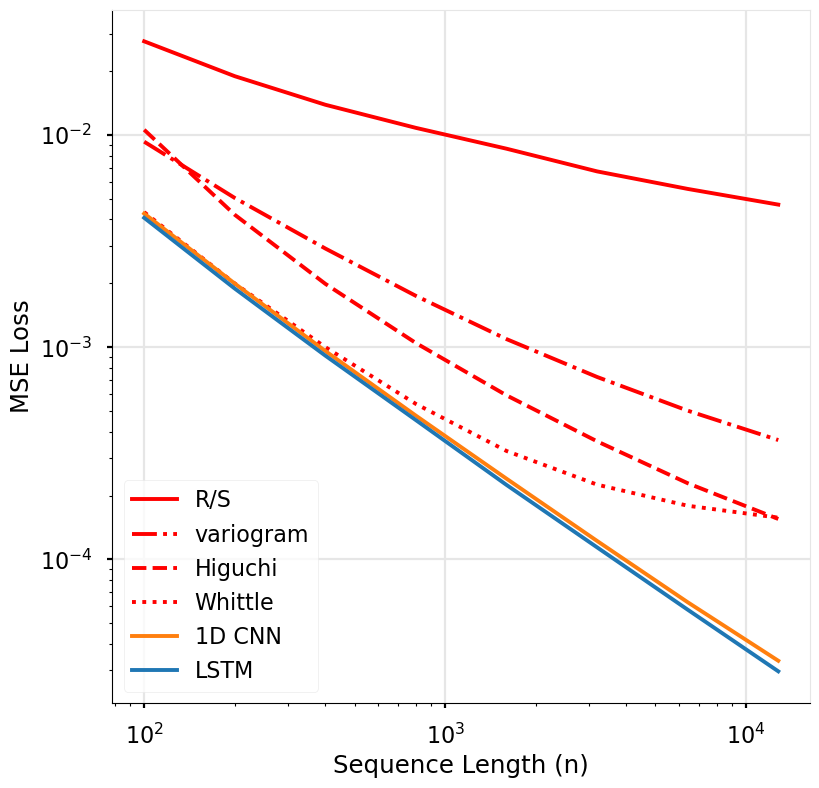

In [3]:
gp_params={
        "Ys": [
        [0.0276449, 0.0189365, 0.0138884, 0.0108062, 0.00862036, 0.00673888, 0.00557211, 0.00469968],
        [0.00930144, 0.00505078, 0.00291788, 0.00174502, 0.00109185, 0.000723842, 0.000502304, 0.000365104],
        [0.0105847, 0.00420909, 0.0019889, 0.00104599, 0.000593053, 0.00036006, 0.000228544, 0.000155049],
        [0.0043292, 0.00199614, 0.00100069, 0.000540158, 0.000324259, 0.000225005, 0.00017898, 0.000157218],
        [0.004266, 0.00199481, 0.000959342, 0.000475629, 0.000240011, 0.000122124, 0.000062808, 0.0000332803],
        [0.00407246, 0.0018894, 0.000912424, 0.000453153, 0.000224341, 0.000113915, 0.000057925, 0.0000296729],
    ],
    "x": [100,200,400,800,1600,3200,6400,12800],
    "xlabel": "Sequence Length (n)",
    "ylabel": "MSE Loss",
    "title": "",
    "fname": "fbm_hurst_loss_by_n",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "bottom_left",
        "labels": ["R/S","variogram","Higuchi","Whittle","1D CNN","LSTM"]#,"Our model with transformer encoder"]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": ["red","red","red","red"]+[bokeh.palettes.Category10[10][1],bokeh.palettes.Category10[10][0]],
    "dashes": ["solid","dashdot","dashed","dotted","solid","solid"],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
#GeneralPlotter(gp_params).export_all()
gp_params["xscale"]="log"
gp_params["yscale"]="log"
gp_params["fname"]+="_loglog"
GeneralPlotter(gp_params).export_all()

## Comparing models trained on different n-s
PEFBM-4965 - PEFBM-5013

In [4]:
FBM_nxn_Ys=[
        [0.00920837, 0.00443827, 0.00256292, 0.00171017, 0.00130304, 0.00108711, 0.000981199, 0.000930546],
        [0.0095864, 0.00413592, 0.0021675, 0.00140661, 0.00109023, 0.000962041, 0.000917925, 0.000915043],
        [0.0104301, 0.00420707, 0.00188037, 0.000947045, 0.000527753, 0.000343587, 0.000264268, 0.000230696],
        [0.012502, 0.00477969, 0.00202007, 0.000939761, 0.000477126, 0.000280757, 0.000195706, 0.000160969],
        [0.012518, 0.00480479, 0.00199526, 0.000912694, 0.000443194, 0.00022961, 0.000133505, 0.000088832],
        [0.0129322, 0.00501386, 0.0021069, 0.000952266, 0.00044714, 0.000220096, 0.000112802, 0.000061733],
        [0.0141555, 0.00544181, 0.00222571, 0.000971535, 0.000453955, 0.000220652, 0.00011109, 0.0000607797]
    ]
print("$N = 50$ & "+"\\\\\n\\hline\n$N = 50$ & ".join([" & ".join([f"${y*1000:#.3g}$" for y in Y]) for Y in FBM_nxn_Ys])+"\\\\")

$N = 50$ & $9.21$ & $4.44$ & $2.56$ & $1.71$ & $1.30$ & $1.09$ & $0.981$ & $0.931$\\
\hline
$N = 50$ & $9.59$ & $4.14$ & $2.17$ & $1.41$ & $1.09$ & $0.962$ & $0.918$ & $0.915$\\
\hline
$N = 50$ & $10.4$ & $4.21$ & $1.88$ & $0.947$ & $0.528$ & $0.344$ & $0.264$ & $0.231$\\
\hline
$N = 50$ & $12.5$ & $4.78$ & $2.02$ & $0.940$ & $0.477$ & $0.281$ & $0.196$ & $0.161$\\
\hline
$N = 50$ & $12.5$ & $4.80$ & $2.00$ & $0.913$ & $0.443$ & $0.230$ & $0.134$ & $0.0888$\\
\hline
$N = 50$ & $12.9$ & $5.01$ & $2.11$ & $0.952$ & $0.447$ & $0.220$ & $0.113$ & $0.0617$\\
\hline
$N = 50$ & $14.2$ & $5.44$ & $2.23$ & $0.972$ & $0.454$ & $0.221$ & $0.111$ & $0.0608$\\


In [5]:
FBM_nxn_Ys=[
        [None, 0.0276449, 0.0189365, 0.0138884, 0.0108062, 0.00862036, 0.00673888, 0.00557211],
        [None, 0.00930144, 0.00505078, 0.00291788, 0.00174502, 0.00109185, 0.000723842, 0.000502304],
        [None, 0.0105847, 0.00420909, 0.0019889, 0.00104599, 0.000593053, 0.00036006, 0.000228544],
        [None, 0.0043292, 0.00199614, 0.00100069, 0.000540158, 0.000324259, 0.000225005, 0.00017898],
        #[0.00920837, 0.00443827, 0.00256292, 0.00171017, 0.00130304, 0.00108711, 0.000981199, 0.000930546],
        [0.0095864, 0.00413592, 0.0021675, 0.00140661, 0.00109023, 0.000962041, 0.000917925, 0.000915043],
        [0.0104301, 0.00420707, 0.00188037, 0.000947045, 0.000527753, 0.000343587, 0.000264268, 0.000230696],
        [0.012502, 0.00477969, 0.00202007, 0.000939761, 0.000477126, 0.000280757, 0.000195706, 0.000160969],
        [0.012518, 0.00480479, 0.00199526, 0.000912694, 0.000443194, 0.00022961, 0.000133505, 0.000088832],
        [0.0129322, 0.00501386, 0.0021069, 0.000952266, 0.00044714, 0.000220096, 0.000112802, 0.000061733],
        [0.0141555, 0.00544181, 0.00222571, 0.000971535, 0.000453955, 0.000220652, 0.00011109, 0.0000607797],
        [None, 0.00478357, 0.00205344, 0.000942329, 0.000451415, 0.000221565, 0.000109246, 0.000056241]
    ]

In [6]:
gp_params={
    "Ys": [Y[1:] for Y in FBM_nxn_Ys[4:]],
    "x": [100,200,400,800,1600,3200,6400],
    "xlabel": "Sequence Length (n)",
    "ylabel": "MSE Loss",
    "title": "", #"Performance of models trained on different sequence lengths",
    "fname": "fbm_hurst_loss_by_n_by_n",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "bottom_left",
        "labels": ["R/S","variogram","Higuchi","Whittle","LSTM trained on n=100",
                   "LSTM trained on n=200","LSTM trained on n=400","LSTM trained on n=800",
                   "LSTM trained on n=1600","LSTM trained on n=3200","LSTM fine-tuned until n=12800"][4:]#,"Our model with transformer encoder"]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": ["red","red","red","red","#003193","#0053A8","#007185","#009658","#00BA2D","#00D40E","black"][4:],
    #"colors": ["red","red","#FED303","#FFF54E","#B2E782","#8FD79F","#70C4BC","#4292B9"],
    "dashes": ["solid","dashdot","dashed","dotted","solid","solid","solid","solid","solid","solid","solid"][4:],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
#GeneralPlotter(gp_params).export_all()
gp_params["xscale"]="log"
gp_params["yscale"]="log"
gp_params["fname"]+="_loglog"
GeneralPlotter(gp_params).export_all()

## fBm biases

In [7]:
R_over_S=[0.12246319442421118,0.12235544192197725,0.1222627694966217,0.12225059892378634,0.12216442285858033,0.12210115912486018,0.1220526555888921,0.12199935124543676,0.12192764731576981,0.12186632444548241,0.12184044462655105,0.12173903714535209,0.12164112126569189,0.12155214167107627,0.12148614236973378,0.12144351449456153,0.12142103181577643,0.12137752476123076,0.12132709299588969,0.121316489295664,0.12130271852042666,0.12126293633582146,0.12118172765254934,0.12109369167830952,0.1210132289154513,0.12091592369294231,0.12080044953222349,0.12068104113978714,0.1205490822382871,0.12039199163708836,0.12026195022155022,0.12016044832942212,0.12001080236380238,0.11991452884124458,0.11969034780924305,0.11956008516362693,0.11944403919740305,0.11927857322565188,0.11910140433820045,0.11900891551681211,0.11881847346571141,0.11871329551862905,0.11866622905660631,0.11849009291600175,0.11832587738377108,0.11819961956362224,0.11801224466316405,0.11790216358515032,0.11768399688200863,0.11759481407774305,0.11752236471303458,0.11739687439971067,0.11722698864573759,0.11709213193525077,0.11701654131944564,0.11686126102458777,0.11666083408873028,0.11650433122259038,0.11635406198399346,0.11626102568591452,0.11606067317782097,0.1158703384598661,0.11576741034186956,0.11561346866372155,0.11547901645988852,0.11532064142059739,0.11512464514366273,0.11497369841787808,0.1147976063437115,0.11456036136219275,0.11429456216642792,0.11412682950678027,0.11389423113950035,0.11375962573792633,0.11354284846092245,0.11336791905907413,0.11321829518716861,0.11304808960408154,0.11294481556284712,0.11281314210089691,0.1126521945711011,0.11247155490410264,0.11234148060857226,0.11218797148773849,0.11203693044616987,0.11184710756970012,0.11163565457578269,0.1114802560784492,0.11131517283664727,0.11112862428954916,0.11097919975125461,0.11081683603834186,0.1106238596316352,0.11038202896533929,0.11012934828177094,0.10997280941655238,0.10967747990347732,0.10947007815815321,0.10922047992757022,0.10909051674043815,0.10880511672322833,0.10855421245451252,0.10826480529972607,0.10804160995073414,0.10783567568533961,0.10769573136030067,0.10751934772349679,0.10730571663293995,0.10702243482257114,0.10684859764037007,0.10654324263936714,0.1063809948929337,0.1061594205564434,0.10595492043006728,0.10569142963810775,0.10546745301647065,0.10533859043556469,0.10510396074140699,0.104985112197152,0.10481027088731722,0.1046809950378363,0.10443792075929614,0.10432179791207481,0.10406363189135175,0.103929636506233,0.10369953875223992,0.10354690378371413,0.10335476477916318,0.10315342014293015,0.10296306892894284,0.1027284466470963,0.10251233363770662,0.10229141090643927,0.10193394520073717,0.10174571008418092,0.10153476615940181,0.10126716489421911,0.1010492309463996,0.10092609691614976,0.1007092898892409,0.10047142127935554,0.10027089946416641,0.10009696247727282,0.09985180150161123,0.0996681653123617,0.09943249704069765,0.0992494309031535,0.09907088660465213,0.09889814213900512,0.09866085043437571,0.09847134239660332,0.09830669867549297,0.09819889981381562,0.09800507959276497,0.09778616103422935,0.09761001315558612,0.09747868716450674,0.09731818119668689,0.09712611047502656,0.09697632567143775,0.0969028933623642,0.09665346101838225,0.09647324753355374,0.09627863888989475,0.09614268833466169,0.09590140192965675,0.09570858966656613,0.09551263502411238,0.09529588208186035,0.09511884402828664,0.09478815467014987,0.09468555738675771,0.09451168056314849,0.09427385883331299,0.09404627076437175,0.09383833614378918,0.09364000797057666,0.09349084513159993,0.093246619177767,0.09306486563339521,0.0928728467651776,0.09267475666707857,0.09245621080764992,0.09238706318392927,0.09219957348056254,0.09208825408745079,0.0919229115486145,0.09174904598895298,0.09149081657153012,0.09127523723022368,0.09107642218100136,0.09077374970050547,0.09059327872345052,0.09039174138951082,0.09016775095066866,0.08986338791411308,0.08969372594423347,0.08953697828339859,0.08933925731902033,0.08910500057799943,0.08888441656649185,0.08871815629801762,0.08848110749311386,0.08822748050695417,0.08808740827616243,0.08782261532198109,0.08766140310250709,0.08744566160897121,0.08724141752757814,0.08701583727757703,0.08678675758767412,0.08658950685073602,0.08637586890095209,0.08627681028462218,0.08588370586264543,0.0857244543686527,0.08550480058627646,0.08528426823851235,0.08506211243487198,0.08490888282979969,0.08478261597297662,0.08461085930289398,0.08447330501998306,0.08422827485516454,0.08400073571006852,0.08391543409012815,0.08357010782946678,0.08339284567780808,0.08315434988005185,0.08291238528055203,0.08278992156889667,0.08255909170759662,0.0823318303778076,0.0820361286838629,0.0817955172064277,0.08156456227875393,0.08142146701779955,0.08128064687129419,0.08114585469611599,0.08097891560193382,0.08086890128620884,0.08074942255006194,0.08057858829243308,0.08044330743823282,0.08018835267404878,0.07997565105435633,0.07979537427053872,0.07959314844038921,0.07941965054360876,0.0792469207158427,0.07912325102424547,0.07889704079644728,0.07869628712989991,0.0786207964669553,0.0784149070756729,0.07816617214350541,0.07786480154131789,0.07754823653343713,0.07729195368322762,0.07697537807123894,0.07685057255346292,0.0766954377106298,0.07658188432583471,0.07630939085109562,0.07623609455435928,0.0761127447380739,0.075931603248714,0.07575986087439845,0.07557453956067187,0.07536613401698422,0.0751252263303726,0.0749186652929187,0.07476690260862098,0.07458711754669183,0.07448641975666333,0.07428876363432045,0.07415826494737511,0.07385871745937493,0.07364847051435565,0.0735956555311109,0.07340964107950296,0.07326638777864185,0.07305859249012144,0.07283807330348957,0.07264827249977689,0.0723609638514955,0.07224838095035094,0.07214468192969319,0.07184413448568368,0.07172948967766117,0.07143174994720539,0.07134834571309534,0.07111606370090823,0.07087587478021398,0.0707249942548579,0.07054502926259014,0.07030209212490682,0.07027104819824366,0.06997629273990895,0.06997584977105759,0.06988436656806007,0.06980164982587266,0.06962209553409329,0.06945941277743334,0.06929536458509546,0.06911065499871567,0.0690791596048707,0.0690128871267267,0.06890549680684692,0.06889542254582376,0.06877090509636814,0.06860010567597499,0.06849128718660469,0.06830532558474879,0.0680532537764602,0.067897601839436,0.06772842395062349,0.06758302359144021,0.06742368629513562,0.06730783727151787,0.0672080224460554,0.06686816801810314,0.06665146542542882,0.06656587929868718,0.0663836120651956,0.06616113069766436,0.06597812502121905,0.0658276435309193,0.06559375082814443,0.06536491671688748,0.06524707587355395,0.06507146113760623,0.06499838622269118,0.06491605530973295,0.06472268663516731,0.06458744910646111,0.0642807067231685,0.0639920954657073,0.06387639680042244,0.06353982872400346,0.06331530206003472,0.06306947189909443,0.06290350719380093,0.06270370285371464,0.06252214061327217,0.062385300819918235,0.06216528413450331,0.06202721984597103,0.06188832029373797,0.06148249385924473,0.06123776558023062,0.06092813623391558,0.06071778138067587,0.06042024944206178,0.06013387513447957,0.05994837388179406,0.05988449158267848,0.05965653474797908,0.059349623465567374,0.05930185261530774,0.05915373081778302,0.05897032166994687,0.05878129925095868,0.058586123055310295,0.05841409442396215,0.05817732323839815,0.057963081307976866,0.05780714488604939,0.05763901815345034,0.05748397858814958,0.05733861036580103,0.05715191895199805,0.05701776985686852,0.05689663763040419,0.056753577743885945,0.056647388478958526,0.05650563058061678,0.0562706805402636,0.056139746899945255,0.05609218755496114,0.05596330644012859,0.055846173018519345,0.05574718618654304,0.055570840726182666,0.05547412469160634,0.055353452568131734,0.05516483923610376,0.05504451070416283,0.05490758428490225,0.054944636889727685,0.054930138103420435,0.05479947109626611,0.054721377544550455,0.05471737511208264,0.05465199890912471,0.054548954922693835,0.05450518922363519,0.05440003813766851,0.05423334579328041,0.05415672303560365,0.05397448644774859,0.053891685022226396,0.053857306749460536,0.05381383290548688,0.053640441931890284,0.053414176149770974,0.05308661556496294,0.05304452220175609,0.052916352992708034,0.052589804399375946,0.05245480972893384,0.052305324843116834,0.052207483686689066,0.05211207894703606,0.05183693972712518,0.05177758596686699,0.051580057234752535,0.05154171480795736,0.05136310038160161,0.051279663647319576,0.05112641791154625,0.05115071458913377,0.05106096207024809,0.05085051798524975,0.05070048373612404,0.050585365786383556,0.05039852661365332,0.05018945394016085,0.04996798668746152,0.04973188515674317,0.04960306125672761,0.04949787243504839,0.04925241865048902,0.049046425230284074,0.048891106239452496,0.04876169476429718,0.04853137669358077,0.04840363575444171,0.04822655760829172,0.047890716971256825,0.04781845970345395,0.04770379769088381,0.04727561857397747,0.0471031375247428,0.04702151871403219,0.04703473290159005,0.0467461666226387,0.046438418060326406,0.046371301460266114,0.04625820009664675,0.04620446121872133,0.0459504741225237,0.045647518428147967,0.045647368146587874,0.045603533259964746,0.04556483639778471,0.04542122191120042,0.04536105480685754,0.04522146288682005,0.045003875392199216,0.044741249924538117,0.04456229202633902,0.044317870874213273,0.04418764307564897,0.0439187072397174,0.04376589904836737,0.04351783679370093,0.043170056819633505,0.043109311973258305,0.04298350601525403,0.04292886919655624,0.04268252638484015,0.042528474647973255,0.04239152038966171,0.04231691978833249,0.042351202817844824,0.04228869224595948,0.04219456838077802,0.04230291828711517,0.042221228796959664,0.04207384411369518,0.04197226961843176,0.041869125593497133,0.04189497267266494,0.041876688454802566,0.04191378793288947,0.04166896845959556,0.04152323441695728,0.041419434076440165,0.04125694445967447,0.04104237158258422,0.040932983046313,0.04099845899948454,0.04089318993923062,0.04066710375108266,0.040208982589632965,0.04023229354608495,0.040315834591436166,0.04014071218603934,0.03995242244139376,0.03976635460891666,0.039707842213766914,0.039523334715020286,0.03922281308401199,0.03898237489010665,0.038851064619164294,0.03879788592769511,0.038641753369938046,0.038616445309170175,0.0386037878333566,0.03852455871510742,0.03847789659554826,0.03828996548738385,0.03823994993936361,0.03837327779024497,0.038308038106810015,0.038172902801363,0.038270352673971754,0.03813004366627025,0.03798699354877648,0.03788628805295133,0.03769756530242537,0.0375922851824347,0.037518766565998306,0.037323428350986204,0.03694084976473031,0.03677046942950493,0.036597641027245595,0.03634449623666591,0.03619969018966743,0.035973346416766826,0.03569661743557357,0.035431094430228745,0.035314262559670614,0.03493828700725422,0.034624463728124784,0.034646550431336944,0.034515469812676836,0.03443938632991826,0.03437610476635745,0.034252389026148654,0.03407460576435348,0.03378167999344112,0.03367257153149694,0.033595073900070695,0.033590625681632846,0.03330248444980838,0.03313999331820891,0.03305618536072605,0.032882477277524406,0.03282589146577979,0.032552568876743314,0.03261645821978053,0.03237666092801056,0.032389005403935814,0.03238773645762212,0.03215937406818471,0.03205166296460593,0.03209240880922579,0.031828980051031526,0.03159273296285418,0.031498334495125305,0.031535980055292095,0.03133177443304161,0.031068813909527614,0.030856285295701055,0.030791785358911448,0.030691070770051575,0.030466022008795963,0.030278555705538883,0.030119665934819385,0.030108953572066097,0.029701373342135837,0.029393864439877328,0.02933945741005495,0.029364612711355677,0.029278513609084934,0.029187948738346375,0.029061714378942772,0.028910012056609105,0.028703956661995086,0.028649231606178747,0.028707938484961094,0.02839937824669003,0.028453117360574612,0.028331189616824366,0.02819464491145905,0.028121446875604167,0.027983736187231247,0.027958678944101593,0.02786347187227673,0.02791461862760819,0.02775765238581477,0.027724514262190143,0.027485819886951462,0.027406281405768035,0.02737575920058261,0.027218894440275882,0.02699691944192902,0.02689707753809051,0.026674530322592514,0.0267972298038816,0.026544562819220466,0.026496961289409905,0.02608217445848329,0.025832946469610964,0.025718759592743157,0.025499188216926538,0.025270329071925238,0.025280530594788735,0.025256946012231937,0.02512781407869549,0.025058318339882774,0.025069120022857074,0.024992001938148285,0.02482925084928205,0.024687662469504254,0.024389827992680597,0.024373733827584905,0.0240782836076065,0.023977740130288045,0.023953984015122613,0.023893854599037093,0.02378901279204698,0.023638575794590506,0.02354661907468523,0.023393603289021854,0.023245216468786533,0.022990750074865157,0.02296578411648913,0.023040111095041244,0.023099475282345325,0.02291003746288961,0.022846798191704255,0.022607682338067935,0.022742072976365383,0.02248780331490271,0.022342035507137942,0.022303528894875153,0.02225640764895906,0.02204468518970158,0.021850096376854405,0.021759260032589788,0.021645340165822122,0.02160621448938246,0.02143621877832515,0.02133590169250965,0.021199366647198303,0.02107322999788333,0.02105022368372464,0.020909907473080514,0.020443998902347535,0.020473844603813195,0.020489996287831415,0.020386079132750437,0.02032571739793212,0.020212107938045305,0.020317201375089394,0.020085982232679673,0.019929591155090888,0.01974716895835761,0.019698992571859884,0.019503505146157563,0.019340164591803363,0.019215718830033413,0.019060971065499317,0.018902373578160856,0.018850852454222692,0.01865164757655398,0.01870989256081395,0.018429906032551294,0.018128836565667043,0.018080754606368026,0.017914592329397242,0.017790797232003917,0.01773352511257893,0.01766393442728716,0.017658235262136196,0.017674436597714026,0.017372309673627868,0.01749244196296418,0.017147869818950924,0.016911532717808164,0.01691613634893741,0.016808305999194233,0.016549901557345596,0.016246475781651337,0.01604337590204558,0.01571415540928353,0.01533067358066758,0.015180722528975307,0.014950556998389437,0.014696047648859718,0.01445091192192608,0.014148031703580302,0.01399450182149959,0.013886205734912544,0.013860843874475063,0.013860602367350547,0.013873178983908493,0.0135994955933646,0.01355370430627169,0.013295962141084264,0.013004250570866046,0.01286061940380512,0.012634329434800811,0.012524775953673087,0.01220987265199028,0.011879668200464608,0.01179715360220248,0.0116870471199811,0.011370447952971693,0.010962518605027314,0.0108547809090148,0.010632767869353528,0.01050871759358019,0.010337451684106257,0.00997316117459259,0.009799726251461251,0.009542822032681428,0.009460452181207495,0.009375087875360141,0.00926372586107949,0.009132252208660272,0.00903566509555258,0.008856654190467456,0.008658398137004737,0.008316682745711972,0.008162593984899824,0.007944979874182374,0.007370815180629664,0.007142028394589917,0.006867307222495645,0.006574872633589106,0.006451518298945126,0.006484403668515757,0.006475155723905101,0.00627723452544231,0.006163251904484621,0.006015492228609307,0.005830701890882555,0.005692123737379961,0.005639571476019803,0.00533087542309568,0.005352689139544964,0.005145484997604608,0.004972483895041726,0.0047229726956087344,0.004381261964217604,0.003971346914768219,0.003918677110642699,0.0036477632506115108,0.003544807250824092,0.003337999500172795,0.0031516612797203697,0.0030727234272791655,0.0027226068987375993,0.0024765971045691607,0.0024995465918737627,0.002095258876292703,0.0019683605616374763,0.001839782338198057,0.0017260049083966619,0.0015476448242106656,0.0012376479109050065,0.0009773700483076155,0.0009256694844817519,0.0009573284083721685,0.000770152078811782,0.0006964557284050032,0.0003970984873788218,3.102530779451143e-05,-0.000123768941195812,-0.0002891820146650931,-0.0005138954403693021,-0.0007455878069380473,-0.0008230127304642179,-0.0010370599635139404,-0.0013080988019669908,-0.001318468211350978,-0.0014439703023089857,-0.0017364049714709085,-0.0019275597449026388,-0.002391493037195489,-0.0027665807850777158,-0.003078985854124217,-0.003179254554512948,-0.003514077258204283,-0.003907323120508361,-0.0037795105701973744,-0.004042579714520519,-0.004215928887238497,-0.0044309776743680345,-0.0046329996062026025,-0.004950916809493331,-0.005231601520190163,-0.005677767496344954,-0.006039688869639131,-0.006181697565245913,-0.006454126544604074,-0.006565915395135749,-0.006732237348641187,-0.006983949035466563,-0.007169867637716098,-0.007316122876952516,-0.007527567040716895,-0.007781515466091145,-0.008035019600118687,-0.008297736585552632,-0.008429617670579249,-0.008778105606136292,-0.009107774619699348,-0.009374234443757592,-0.009652084629417723,-0.009920027069187822,-0.010067995914942238,-0.01036336494214607,-0.010745421202739499,-0.010787993874710163,-0.010977178226261314,-0.011127820444433,-0.011170484881470169,-0.011531348346989292,-0.011737841805849398,-0.012040668042217328,-0.012265914341919986,-0.012660912722590676,-0.01307922959860098,-0.013357096102648165,-0.013528597921169342,-0.013733247425429786,-0.013848960905977823,-0.013800231127962739,-0.013889315998348448,-0.01407313327720394,-0.014423427116253041,-0.014765314387851633,-0.014913528326113987,-0.015096449987071095,-0.015628315244840273,-0.015745654564157302,-0.016003588665791643,-0.016354326595874807,-0.016615095625118332,-0.01696342982820868,-0.01703919295505777,-0.017206925463842497,-0.01742718412951664,-0.01771817112240696,-0.01794884609506535,-0.01843666362142679,-0.018760260582937432,-0.019079072475433348,-0.019310338830062706,-0.019543288795581672,-0.01983684970041236,-0.019907489831741437,-0.020384175850118064,-0.020770435662171495,-0.021122916123514322,-0.021476573376886306,-0.02187839468240258,-0.02211108096229218,-0.022356359496389006,-0.02242007105044682,-0.022642281494009826,-0.023155693855916554,-0.023352175217667335,-0.023829556576014523,-0.02439158219152655,-0.024832168123761163,-0.02513063692026857,-0.025641874846745856,-0.025930888619017503,-0.026420635901779527,-0.02686515156178165,-0.026933207375497994,-0.02704005579931114,-0.027347264617059625,-0.027587458204304617,-0.028109271868974148,-0.028456851065778235,-0.02914663511435383,-0.029390981941153953,-0.02975124130310452,-0.029961838417721792,-0.030364866486054385,-0.030493513313110857,-0.030851685166790346,-0.03098901326433664,-0.03128061221210755,-0.0316726424310063,-0.032057273321969386,-0.03251541220823174,-0.032756290004082755,-0.03322220750819848,-0.033529542834380935,-0.033997288992944755,-0.03416211833923844,-0.03467001754324883,-0.03483618755661327,-0.03515436745765654,-0.03543329460590396,-0.03577328898254465,-0.03598146410457121,-0.03615031570507674,-0.036533285772448194,-0.03685767370139162,-0.03738647527798564,-0.037805118534693594,-0.03792104084229721,-0.03802569615223344,-0.038462774105378815,-0.03869851017411137,-0.03925061450814301,-0.039635176782484176,-0.039863807327413465,-0.04031723808115861,-0.04067842582916489,-0.0410589082738546,-0.04129807154337565,-0.04184212325823189,-0.04214119286019981,-0.042572124021366925,-0.0428522867106256,-0.0429557594948707,-0.04345783337784875,-0.0440987793286137,-0.044511172332884916,-0.044945631924842064,-0.04540230896393871,-0.045800465585896837,-0.04596835835348424,-0.04662949025989296,-0.04695125675855672,-0.047488527758500466,-0.04798619753867089,-0.048336452738647215,-0.048686294962232486,-0.04919500421750603,-0.049778315363656796,-0.05021739879308583,-0.05075898498904948,-0.05104871330472203,-0.0516295269616301,-0.05221339492629164,-0.05261872730251204,-0.05298385746292937,-0.05379114748500015,-0.05417126830503693,-0.054684640145769306,-0.05509381685390614,-0.055555633741649235,-0.056138325686478495,-0.05668858825296595,-0.05735378984381907,-0.05766471820017581,-0.0578718004789754,-0.05810616704626848,-0.05844235749588799,-0.05903946093347425,-0.05952775670160161,-0.05996960675041259,-0.060552687971143326,-0.06088906103438611,-0.061555912876520805,-0.06198169087070131,-0.06263110254666995,-0.06340557810131078,-0.06355482135082315,-0.06419486557055282,-0.06470630985323692,-0.0651963567463164,-0.06569654629355574,-0.06616490827035651,-0.0665197716176411,-0.06665827736661241,-0.06670784101333914,-0.06704498956947007,-0.0673257833028302,-0.06734315723606323,-0.06753014487431462,-0.06785682467261112,-0.06802971789902461,-0.06825413340431756,-0.0682966581303502,-0.06850634609058003,-0.06886422507513583,-0.06911045419258972,-0.06926264217125513,-0.06947696950949435,-0.06969753692781012,-0.06987993348916766,-0.07029941582771214,-0.07056731951989209,-0.07071523172479617,-0.07110836603463333,-0.07158212688431811,-0.07132637366664049,-0.07169029511601092]

In [8]:
R_over_S=[val if (val<0.045 and val>-0.045) else None for val in R_over_S ]

In [9]:
Ys=[
    R_over_S,
    [0.00036186060847832744,0.0003051355510502245,0.0001555161831902816,0.00018953631347374826,0.00019781760880546717,0.00014927792175703034,0.00017191188997284159,0.00018166614806744882,0.00021567727990270754,0.00018244776661722995,0.0001566962850061463,0.0002083043384865421,0.0002072757437824832,0.00018223497542129444,0.00017725287774534622,0.00014341448299930816,0.00014296686353481778,0.00014296952816147325,9.496615695240359e-05,2.9320114233663338e-05,5.9801326346337095e-06,2.2908022583496628e-05,4.7461233304253505e-05,0.00010261757259856905,0.0001243646596120007,0.00014824580965494823,0.00013920946054981758,0.00016746494777272202,0.0001078902298565788,0.0001494183999133188,0.00011120692738386478,0.0001489996644991982,0.00011921632702238982,0.00012163257257877072,0.00018422024129298128,0.0002299806375839619,0.00023456184492890494,0.0002530725573789105,0.00023952219811250152,0.00022181180162114426,0.00025629537021370835,0.000290069041389925,0.0002997615742667417,0.0002767974091047271,0.00032898941007263456,0.0003105412166628349,0.00033720731782101724,0.00031150696183425923,0.00021671634709054355,0.00023538569731304594,0.00022611792756617986,0.00024118687617035557,0.00030557414472448844,0.00030402163659529804,0.0002970786698206597,0.0003120649490756736,0.000263210108754235,0.00022371626507378264,0.00023835631730902262,0.0002692844833124045,0.0002882190477080289,0.00024697619532658297,0.00028562810906231377,0.00032374949707668653,0.00034095425531879825,0.0003471258033028583,0.00039134511432099237,0.0003780579673739132,0.00045233523755270613,0.0005326590780851894,0.0005739771272512336,0.0005377366349387042,0.0005036520952510601,0.00046209542633379865,0.00045725925433914735,0.0004022276497646639,0.00035743171145534593,0.0003131751335104036,0.0003561896095245459,0.0003197488816474363,0.0003128176752467532,0.0003110481594912767,0.0003195682970377115,0.00036145605602922045,0.00035015012261917076,0.00036096126168181394,0.0003728548861613699,0.0003772846616523784,0.00033204122403516286,0.0004117993425343004,0.00042231788022360604,0.00039309072204100817,0.00037905894327249596,0.0004311142652286228,0.0004276138456254212,0.0004557500381868674,0.000405756135781606,0.0003884043596250488,0.000434217209925515,0.000370767605144135,0.0003235607970351228,0.0002988016921120078,0.0003291314836166031,0.0002791424927171312,0.00029485665401984655,0.00028922917932199915,0.000270024719588363,0.0003091923158185986,0.00025596789587912946,0.0002344885914926491,0.00021298971491129427,0.00014835352166777565,0.0001006790985008779,7.888512766879538e-05,0.0001009654262514212,0.00014837985888001894,0.0001306525089143311,0.00013843877952924105,6.0535065314304904e-05,7.129433974419075e-05,1.7715653708356874e-05,3.675718654039188e-05,2.749089858769904e-05,2.349879413866603e-05,2.5663200864075018e-05,4.1752566353743054e-05,0.00010622625862659087,0.00010403090969545776,7.506822821720216e-05,8.31202365631281e-05,7.3815348611592e-05,5.7525665516912916e-05,4.0685915591541936e-05,6.133066501517811e-05,6.555596306391473e-06,3.1450653427905824e-05,5.756131635988477e-05,1.8209002288689178e-05,3.1454512438835045e-05,-2.162512428984195e-05,-4.014563269149035e-05,-6.690966581294915e-05,-7.693622593980911e-05,-0.00011380081395468404,-0.00013222091243261276,-0.00016229372224823145,-0.0001715053494784202,-0.00011943886452288533,-9.345621640303137e-05,-7.044727643651348e-05,-5.997849370769126e-05,-3.556972365830833e-05,-2.4682829498575512e-05,2.259422729365183e-05,3.2220408616319735e-05,4.265522650162816e-05,9.930502703511785e-05,0.00010585384761272295,9.454807571176463e-05,8.40754514608541e-05,0.00013064114615250538,0.00019598228825852453,0.00022935390995051482,0.00022508417663699752,0.000249291523196065,0.00022213340812600243,0.0002927281289010533,0.00028995389743668364,0.0003612200192695378,0.0003642682038731858,0.00041510156619635393,0.0004211676823336057,0.0004639849944341289,0.00046937577441521816,0.0005110149209446162,0.0005011850129400036,0.0004293719370714467,0.00048729183319478464,0.0005642582822925425,0.0005638739324185952,0.0005892293570901184,0.0006056280187258987,0.0006376242973768493,0.0006205510046031024,0.0006193958921918127,0.0006102281739794632,0.0006104684669976206,0.0005825913926866572,0.0005634897053123137,0.0005617787164231741,0.0005524495695721367,0.0005638189972020113,0.0005586292663602606,0.0005977416310964246,0.0006353479403656967,0.0006165871703247572,0.0006056008905029754,0.0006330170621005659,0.0006582796775567764,0.0006764191055964092,0.0007391090097533627,0.0007154989705617684,0.0006892835882891713,0.0007459909919238072,0.0007995290944001555,0.0007641138944252462,0.0007204760412653176,0.0006949042939228254,0.0007257290892094873,0.0007864774995116124,0.0007641632375550913,0.000779906409410417,0.0008152734408987329,0.0007792129013190277,0.0007490528248060939,0.000739591074623415,0.000710170177187185,0.0006886492416303198,0.0006587980862926034,0.0006477841654339352,0.0006227370621335157,0.0006145856520332442,0.0005889624517574208,0.0005866913562978886,0.0005382318364401933,0.000574785788154164,0.0006326971345467469,0.0006037170392766795,0.0005841974169015884,0.0005593460006122159,0.0005762351576541843,0.0005710503697850322,0.0005959942737302697,0.0006259712062171067,0.0006675842672187557,0.0006244962665891867,0.0006370378076411924,0.0007125788876798255,0.0007345964137083929,0.0007252749737517223,0.0006494167549856778,0.00066335598474835,0.0007142746821761452,0.0006902502888354038,0.0006954280512411011,0.0006994832157166011,0.0008234437195490686,0.0007921941025847108,0.0007700643915171944,0.0008210682947384683,0.0008086443386847629,0.0008371286788342162,0.0008380599609615273,0.0008204308364989466,0.0007732190424576402,0.000804553983123836,0.0008850626571386327,0.0008968038156611085,0.0009537856361571954,0.0009399577916699385,0.0009531088005993655,0.0008680883449980378,0.0008403676483730397,0.0008796805435535955,0.0008500944472685876,0.0008910171819342142,0.0008950267283481295,0.0009094179907621689,0.0009419370882623778,0.000988105678399839,0.0010104262380566356,0.0010875607816949282,0.0010760607259847413,0.0010847613038051697,0.0010749440011955497,0.0010797090081596525,0.0010682607637464221,0.0010612974072446919,0.0010924542923847517,0.001146201416552305,0.001151718476747674,0.0011674939828403925,0.0011477473641249116,0.0011742713234641335,0.0011625209182405012,0.001223363182028564,0.0012178878405850805,0.0012077638360517228,0.0012197104169687212,0.0012315519779190773,0.0013413304083295448,0.001326785422486194,0.0013233421971748933,0.0013202445535536187,0.0013369902394122575,0.001407479214203822,0.0013279388832852124,0.001361536447706861,0.001407698875913007,0.0013168640632652778,0.001344666747831466,0.0013595358116251315,0.0013580748399492145,0.001398819250955925,0.001406740704582076,0.0014320063502225296,0.0014391792408908763,0.0014137459064304182,0.0014020084319493063,0.0014680339098471534,0.0015134097554781584,0.0015868889527742825,0.0015929221008690558,0.0015719312726577355,0.0016267722519505926,0.0016558620432970746,0.00160265502814568,0.0016393666539585364,0.00169124032102186,0.0016682936701663705,0.0016543552839288031,0.0016193393543897725,0.0016493503040358657,0.00163170750194037,0.0016867381401387987,0.0017218775516383705,0.0017392785669122853,0.0017545325397698515,0.001754715404876378,0.0017259684855064738,0.0016856875949326567,0.001687257500832954,0.0016809763143758511,0.001635849317207774,0.00169939026449321,0.001677666716323421,0.0016470316196344039,0.0016331618548902265,0.0016569258958766234,0.0016837188317777665,0.0016646234433852465,0.001700484219741975,0.0017098610609805713,0.001775549482003295,0.0017921879522971632,0.0017825276004853746,0.0017611171925467166,0.0017432205615535614,0.0017197490093253907,0.001796812896982475,0.001773047665958811,0.001859350762127982,0.0018188134099478052,0.001762608037006145,0.0018186659495657905,0.0018040937757603738,0.0017868057413559907,0.0018124768383199384,0.0018041978028790755,0.0017651178628531707,0.001753750750162069,0.001774020794767457,0.001851593607746765,0.0018696176303456644,0.0018904495914027375,0.0018843961004374995,0.0019113441552121215,0.0018593347404243015,0.0018185810619638166,0.0018748671824340174,0.0018623438786133733,0.0018916074164996779,0.0019263950020236187,0.0019118713826286288,0.0019011300804525968,0.0018828812131345364,0.001920467317676361,0.001966444057620166,0.001978213019913102,0.0020075999185966277,0.0020427559707993054,0.002087651801668036,0.0021432586812752436,0.0022030797798196643,0.0021886969725352493,0.002242492445653889,0.002321531084867624,0.0023277903181523328,0.0022914058593816533,0.002272817074652331,0.0022838915453603837,0.00224295933313511,0.002261660452447846,0.0022418130949384257,0.0022045308268153585,0.002248646069110854,0.002323093485524998,0.0023191822899712457,0.002320222910276183,0.002337492499543864,0.0023355081086947923,0.002316765969647322,0.0023914150240431425,0.0024624734199964085,0.0024460384461335166,0.002479874250980524,0.0025426982523068195,0.0025564097011649984,0.0026134152595813456,0.002650669268591619,0.0027282510899455667,0.002699356917220514,0.0026993479647054817,0.0027381305530564224,0.0027565991002909537,0.0027927277828714756,0.0028557364036170835,0.0029091516302691568,0.0029484950331197645,0.0029708109824593495,0.0029906133470469958,0.0029998582984329366,0.0029978472496814653,0.003038739953971267,0.0030745080193957768,0.0031079177852744596,0.0030990553893305937,0.0031180270511345343,0.0030952891143719323,0.0031717608847292174,0.0032464247675647183,0.003213474771234473,0.003160691584307182,0.003122191886443611,0.003191214436639379,0.003247309750445948,0.0032537012912665204,0.0032675180747182902,0.0033230869402241774,0.003380965079345463,0.0034103434725870703,0.003480647718705462,0.0035024204366127807,0.0035556426541399114,0.003644718375769596,0.0036444730473752613,0.0036562559051722533,0.003695659444695178,0.00368677057384506,0.003668803766971946,0.003702925915040102,0.0037666675509623066,0.0037597917371735515,0.003761556928981088,0.003815032571673872,0.003817286211042068,0.003816534051822488,0.0038602634027116137,0.003865702168588819,0.0038384563713388933,0.0038572330389600226,0.00390341180410389,0.0038951905905764634,0.0038990572246660284,0.003917888518223547,0.003959057768447143,0.003958013237535435,0.003984513441027079,0.003968720995792271,0.003972720018387634,0.004038689635566905,0.004036760369706174,0.0040738714284284765,0.0041309712258608714,0.004143169759432736,0.0041485532121596095,0.004219422380386482,0.0042841328666734565,0.0043028479155439595,0.0043122461441753865,0.0042778760434154526,0.004350573876465462,0.004420692259628107,0.004505337027001448,0.004502368272547741,0.004479937595946366,0.004562838918349591,0.004604933950283337,0.004637328899602295,0.004674126980481324,0.004710897363797583,0.004755786985688525,0.004788304984739225,0.004807458681385178,0.00480916537192898,0.004809699574477103,0.00484171097095196,0.0048722489763368,0.004908881951539076,0.004966603141594556,0.005045262106050101,0.005025345691560974,0.005112131062021898,0.005146272236058083,0.005167992636259751,0.005247334469624651,0.0052684706880937356,0.005294352217512108,0.005317722767651441,0.005419268015408881,0.0054786157312038,0.0055057208658362755,0.005552623678904608,0.005605399812819832,0.005606810327887871,0.005593457851760698,0.005648627948875611,0.005662241208240354,0.005730749236317502,0.005780710419732891,0.0058114059025634315,0.005927999909187747,0.0060198742473191735,0.006020514261722565,0.00605226083122011,0.006092603037982927,0.0061143775217928865,0.006097036282963912,0.006218743750373103,0.00629026358769005,0.0063346096104582314,0.006339636646165438,0.006356705069882668,0.006373538590564347,0.00643501917973076,0.006485861568810149,0.006486494881972773,0.006528951001889778,0.0065559695365947565,0.006608963604394582,0.006609529329420733,0.00665612999313429,0.006694375718457884,0.006753574447747902,0.006849131913020693,0.006911591767973898,0.006948638199405236,0.007001527669754895,0.007040168506408765,0.0070926617666420685,0.007122924798514851,0.007190686591128086,0.007210834236422564,0.007244567076365153,0.007336731258656689,0.007344957505398034,0.007381622565369452,0.007460558955222308,0.007518529723252645,0.007557411900557581,0.007585709745233709,0.007710016773996357,0.007777883625030518,0.007873038419100439,0.007916401730896276,0.008039873503355026,0.008053547096630883,0.008082078881724821,0.008197142821048137,0.008275335211552793,0.008321205348688125,0.008362524537926175,0.00842758945416396,0.008489051912555869,0.008577277588007907,0.00864516512621759,0.00868825802911667,0.008790919469913755,0.008802001267577571,0.008878366204112228,0.008943317725591798,0.009059480041007966,0.009159074260663591,0.009173347275477261,0.009146973848436725,0.009216221771617928,0.009299330333418726,0.009378002554296973,0.009461099187548911,0.009513076594312319,0.009560539046003642,0.009638781221910787,0.009704459023475647,0.009757968238170711,0.00980634105205536,0.009888213920593261,0.010023911698621098,0.01009801584176528,0.010158148143319253,0.010180690562012507,0.010221272161599338,0.010419086991985526,0.010451616742025037,0.010538426200242024,0.010542083850496924,0.010652494206811787,0.010685209263630998,0.010783232815193878,0.010852420860840603,0.010925410613356504,0.01096975035776589,0.011033601504510675,0.011117960833915695,0.011165266249913361,0.011277538957937686,0.011355269357997987,0.01145330317546079,0.011558468067296714,0.01162226582659451,0.011607818881457085,0.011746344143868674,0.011773632349315026,0.011803253312296579,0.011954216004415536,0.01196258957527087,0.012079901410512708,0.012117740618107954,0.012138708641654566,0.012179267031591643,0.012163124600863127,0.012252297152408817,0.01229546720833088,0.012342278061048982,0.012463030750146702,0.012637151167529935,0.01266211541990439,0.012707948015812329,0.012774277604581106,0.012929538918403493,0.01297244751775587,0.013123271222017249,0.013146575405949452,0.013166598029843516,0.013264665221856311,0.013313840986370357,0.01338530463188475,0.013348707124090755,0.013412843301118194,0.013566606504790543,0.013690248635656016,0.013770258031049665,0.013795367801654,0.013859189917967413,0.013966052788152373,0.014115971405161467,0.01414660382763962,0.014316407662258434,0.014316779476340606,0.014296203404782604,0.014304433214655065,0.014332946682352521,0.014402035491686341,0.014452323640827127,0.014524723883196181,0.014645262973635656,0.014714340108417545,0.014744207534352089,0.014949608134736439,0.015005370326254899,0.01514205698346658,0.0151719149490948,0.01544441507125024,0.015527458614899972,0.015539679149589916,0.015745826673451306,0.015901615245835665,0.015972105418101394,0.01612443890967388,0.016240147848103,0.016295194837719344,0.016324757404604907,0.01637510909967177,0.016469315084853487,0.016489841493905758,0.016545202124554764,0.016617277373756748,0.016655924869334603,0.016774444908507054,0.016827569561717808,0.01692745625782924,0.017024236891238175,0.01706084190104358,0.017164661891915952,0.017220838967547475,0.017303104604047444,0.017426104776045587,0.017538002909372408,0.01760288438014612,0.017689133097739933,0.017738930507605288,0.017806929788343,0.017867563667274693,0.017925121522346817,0.017910953472499228,0.0180569718676875,0.018189786499693193,0.01820080704632836,0.01828875384222553,0.018424543830414062,0.018493654012680053,0.018678877593323106,0.018726511847218862,0.018737031947716986,0.01883865799195393,0.018891737598474144,0.01899548806027557,0.019096787396822853,0.01914146493692867,0.01925496752879746,0.019296435211237563,0.019356051142503782,0.019213917646807015,0.019253833084626838,0.019391064814969154,0.019416178092478947,0.019468640474448528,0.01961740841963701,0.019650217185547745,0.019805378861636278,0.01987444220158534,0.0200209523174976,0.02009757706816767,0.020180756452093163,0.020262781377770874,0.020310320727133107,0.020442285840687892,0.020477033775996387,0.020532624448965583,0.020591637810362776,0.0206812016844701,0.02074934383579132,0.0208792005437927,0.021109043490066218,0.021265237444830696,0.02132482126944895,0.021277050242531716,0.021402611705100955,0.021436009231850822,0.02142880615861823,0.021428167868953508,0.021516498754885625,0.02160405210454529,0.02169236758090328,0.021709941767985318,0.02176414381136412,0.021751625859433216,0.021742016942968668,0.02178629422417976,0.021840305700989143,0.02187283937538234,0.021917029174798458,0.021897887668251795,0.02213733158337156,0.02219026927200094,0.022105034881511422,0.022110827065477467,0.02218485896534175,0.02216033277589289,0.02224089155391771,0.022388068594802104,0.02249838581690959,0.022603058810172244,0.022639533349748765,0.022680818048381728,0.02266029254036042,0.02274105529514336,0.022853843186065734,0.022924018731670808,0.022936632320544995,0.022901885010586896,0.022925472240432728,0.023117655370177247,0.023088600443424246,0.023130394368007526,0.02316430401395399,0.023232372383339497,0.023348022830764186,0.02323362385525423,0.023304655096934506,0.023266933703600123,0.023247211131802822,0.023332950694888246,0.023265716681975895,0.023258234860868792,0.023332708633986097,0.023501167330281035,0.023556180599864668,0.023531147261686487,0.023659516363021035,0.02378651439494701,0.02380648291451058,0.023827552349724106,0.02404259944819989,0.024186642750270163,0.024203523747288833,0.02427029926351842,0.02427707319886419,0.024364920546341394,0.024346868609262304,0.024305955628210932,0.0243894033242473,0.02454469825379104,0.024481271788026702,0.024378745344407517,0.024427626421675085,0.024591755895230747,0.024650099506310377,0.024829498228957633,0.0247534171533547,0.02464482872173989,0.02483813061683921,0.024873148324190148,0.024868012252368676,0.024818676955921135,0.024897264154323875,0.024838521165490384,0.02478177578626835,0.024763468573577026,0.02474899626647925,0.024829749334057013,0.02477341438210891,0.024619755131183283,0.024680946233583696,0.02481609561494704,0.024865778295167413,0.024769103026390075,0.024795619463920594,0.025036792437426326,0.025091811554704257,0.025034040224547388,0.025075739574432373,0.025074851847363855,0.025058031320001065,0.02499705260226919,0.024864297111047526,0.024800833362659782,0.024798422958701848,0.024861567866839584,0.02482065376596859,0.02472630117147688,0.024964475937378713,0.024958705060622272,0.02487767670822442,0.02492195131361063,0.024951159090235615,0.025025253901331444,0.02515068071115003,0.025123764949269815,0.02532638240124815,0.025349951507347934,0.025251575838444316,0.02508487889690265,0.02500832477738425,0.02508564181099507,0.025284428465662857,0.025200231416825713,0.02516771216023123,0.024967669850295016,0.0250311013614386,0.02507914501304281,0.024819810997099567,0.024790035275298085,0.02473550160126949,0.024712459229068107,0.024739810529904874,0.02461034684830588,0.02434735018995744,0.024370780414394957,0.024236762788350578,0.02431209433158962,0.024236475099431404,0.024189764063910844,0.02401166213061379,0.023818991862044895,0.0239021237593981,0.02379550081875111,0.023696914700900806,0.023435624263074602,0.023232137466707114,0.023245768991456087,0.023143977633578033,0.02296332433614035,0.022890715477034803,0.022746877963580783,0.02278060675617233,0.022688136224499243,0.022428430850247302,0.02239255056120575,0.022388224701007143,0.02227015893303184,0.021945428452831255,0.021861907078119944,0.021724014844863422,0.0215082765109157,0.021317465659261334,0.02113701469086071,0.020835696462696406,0.02072374176959791,0.020387825415536603,0.020142603719754442,0.020000862074225575,0.019945486900119196,0.019753778758256332,0.01941180132972896,0.01911197077179263,0.018798614637671268,0.01852594383192907,0.01839482815390131,0.01794368299895418,0.01771360714153352,0.0175950458361989,0.017396689503674286,0.01719794524094415,0.016891897577210747,0.016624366273352086,0.016368210885175476,0.016373954312456418,0.015933795818814007,0.015763914871629155,0.015389089112234588,0.015060353874923785,0.014962817948121697,0.014702484329698584,0.014478118823474004,0.013947062425143762,0.013745478115889534,0.013359077640052999,0.013069672934062717,0.01288185169613814,0.012576226997413438,0.012347370929702893,0.011978746923490451,0.01170503298441569,0.011548325443041118,0.011146717839580265,0.010749066455661656,0.010678168699395857,0.010348624264646672,0.009957182859470268,0.009575721349719984,0.009269957293831342,0.008868139672742399,0.008366468387839828,0.008024700418746266,0.007737301638138542,0.0073591890851594215,0.007090112900687107,0.006800177141646796,0.00641964165797891,0.0060838065297300955,0.005553400247297272,0.00514308774471283,0.004799166216682165,0.004625251593718037,0.004195072826315336,0.003978759729047799,0.003687895789580956,0.0032588438336628987,0.0030171399808480858,0.002605810882206674,0.002139757625655756,0.001814804263080067,0.001606962050903927,0.0012637610590870657,0.001113043335135739,0.0009805144678220713,0.0007991451035060529,0.0007543498730618307,0.000521820622948593,0.00038749267500625507,0.0002714278023864096,-2.8215854384065185e-05,-0.0001906539774846868,-0.0003015792991032376,-0.0003878793448133542,-0.0005505654865450343,-0.0006862648020011479,-0.0008266228865303459,-0.001001513051959462,-0.0011414705833032333,-0.0013806340635505478,-0.0014274363796856454,-0.0016683746589275027,-0.0019061924130828291,-0.002049860303610745,-0.002137461934291141,-0.0024097595452745152,-0.0026552058269348833,-0.002795742752027586,-0.0029396625269101067],
    [-0.0003885509459949381,-0.00038889579949860685,-0.00037264701832861183,-0.00039728267969786515,-0.00039478942516038123,-0.00039015483128253557,-0.0003753758775954867,-0.0003888913547605623,-0.0004078453418253871,-0.0004075234305440351,-0.0003989936841174329,-0.0003791828652634379,-0.00039862841911718507,-0.00039748603912152303,-0.00039049978812803114,-0.00038222322720120127,-0.0003919814606447143,-0.0003781592534673583,-0.00037028492604945307,-0.0003601180301955365,-0.00035573868823272605,-0.00036333019312644006,-0.00036043334716306756,-0.00035999880850378616,-0.0003609599119438521,-0.00035832776327409657,-0.00036047961140295726,-0.00036338608165724606,-0.00035745891835087376,-0.00035499583766193963,-0.0003561497691183483,-0.0003550172941071078,-0.0003429845517009768,-0.000329271790698963,-0.0003245495691064742,-0.0003122875781440039,-0.0003000737154928023,-0.00032207071670604394,-0.00032542354935791596,-0.00030282831710650446,-0.00029281869449560136,-0.0002838898634571588,-0.0003087816629338595,-0.0003042335848343881,-0.0002753986550280878,-0.00028172748810382776,-0.0002804405215671694,-0.00026139745374723354,-0.00027525092070325723,-0.0002737601397835813,-0.000249765681448258,-0.000257246913319498,-0.00025760785017649266,-0.0002442388143275012,-0.00023849147163499797,-0.00022661790276280738,-0.00023367060748346013,-0.00020560878651039303,-0.0001886956973812586,-0.00020643040905987602,-0.00020332754694766576,-0.0002133144262320977,-0.00021725990713390443,-0.00021214163315440963,-0.0002166291406708191,-0.00022092287355639594,-0.00018295375208301066,-0.0002074298724322252,-0.00021323381180106464,-0.00021680440426497186,-0.00022083436374782355,-0.00022419469667581113,-0.00020706206014304808,-0.00023377918531453025,-0.00022211890985781438,-0.00021786505781900734,-0.0002148180083479716,-0.00022397501119579452,-0.00022940490197670494,-0.00021869385661911077,-0.00022238421076769592,-0.00021784536198573412,-0.00024286514671633988,-0.0002523625970366495,-0.00026616572371024766,-0.0002651752925019747,-0.0002633104943931223,-0.0002475582718028381,-0.00025286373622234793,-0.000268277337461818,-0.0002893560442579798,-0.00029929491631206005,-0.00032309295877400206,-0.0003037519641731707,-0.0003248321417120794,-0.00032355509369999015,-0.00031204316923368416,-0.0003317446239358876,-0.00030966511327926426,-0.00030268320889663387,-0.0003199353635881506,-0.0003313175776740721,-0.000316327038779409,-0.00033177841523125565,-0.0003209021761358308,-0.0003212864497346741,-0.0003579221680802224,-0.0003709906079294985,-0.0003694919228553772,-0.00037062515358860117,-0.0003721372035730307,-0.00034351121811639697,-0.00033099212281432523,-0.0003346442256078302,-0.00032086226911771866,-0.0003297349066432374,-0.00034381895128524667,-0.000327163616291472,-0.0003237302263896308,-0.0003232804174797657,-0.00032004860537270967,-0.0003060026568472149,-0.0003153262026178092,-0.0002780907247259964,-0.00029144656548849896,-0.0002988271019969464,-0.00033007255091834756,-0.000327492802322316,-0.00034072946087147045,-0.00036526994095018256,-0.00037956743892296924,-0.0003995813245065642,-0.0004028751714002786,-0.0003976688832280379,-0.00038212614453980964,-0.0003919777965046595,-0.00038333426886390503,-0.00036924878015435846,-0.0003639797916112574,-0.0003718768942304463,-0.00037204399617176033,-0.00037232911328121993,-0.00033948956642664653,-0.00034707863634129716,-0.00032634487160445653,-0.0003242875578669416,-0.00033614689780717534,-0.0003313795755525212,-0.0003454488583960056,-0.0003199913547065335,-0.0003129093474738158,-0.00029389712842696714,-0.00030814305980606834,-0.00029080915920489726,-0.00032764766919428465,-0.000323719593114728,-0.00029555044810735,-0.00031468452703772886,-0.00034517466808390467,-0.0003117413977813569,-0.00028977077123158913,-0.00028807894199764855,-0.00030362511986120193,-0.0002996860380480244,-0.00029032843013406987,-0.0002841921239655307,-0.0002850694341166593,-0.00031653965778056695,-0.0003162439758255637,-0.00032602109666693576,-0.0003379889525989495,-0.000333163841417168,-0.00033729947820494444,-0.0003575102599235078,-0.000351145798873149,-0.0003594502665196793,-0.00031748712062835694,-0.0003111853131226131,-0.0002846485609355846,-0.0002776502614940848,-0.00023570027734975992,-0.00025117932373930693,-0.00025463695649048695,-0.00026089122079929727,-0.0002629929301845947,-0.0002619004819497644,-0.0002740952132762164,-0.0003188273711096801,-0.00033432883031308673,-0.00032173192926815577,-0.00028434905002443055,-0.0002516036153407775,-0.0002488429240471453,-0.00026465268428302655,-0.00028496702736695545,-0.0002978454850364817,-0.00029147456293863327,-0.0002846702003862776,-0.0002965533552747784,-0.0002791944410531752,-0.0002949854386025581,-0.0002981823882590588,-0.000260425504900389,-0.0002705067324293388,-0.00025671892279533067,-0.00028459594910403333,-0.00028445081436122006,-0.0002791355659030587,-0.00023979560306137292,-0.0002409910070676276,-0.0002918055686031248,-0.00032957484300777726,-0.00033792786714437027,-0.0003592142599614564,-0.00037612206259483784,-0.00037813881872931766,-0.00039337497544566645,-0.00035147683474580897,-0.00038585688631109414,-0.0003708614254113493,-0.0003456111551295592,-0.00035533786205641904,-0.0003508533588104928,-0.00033132110174325676,-0.0003520943498124882,-0.0003445531744532641,-0.0003545495763795703,-0.0003628770429754354,-0.00036373548812464987,-0.0003499073561899825,-0.00035616723987145154,-0.0003273485639063362,-0.00031871885193825926,-0.00033399605876166446,-0.0003202491018380008,-0.00031808781181255397,-0.0002873503609850192,-0.00026888718670294953,-0.0002664983949054336,-0.000255857592056219,-0.0002597408567019598,-0.0003045021420702854,-0.0003360686374534748,-0.00034997410556880155,-0.0003352270403341641,-0.0003658980131149292,-0.000356491215186375,-0.0003443568029217214,-0.0003496466753405176,-0.0004222391960423951,-0.0004082558329454166,-0.00037840935007997295,-0.00040626494187030515,-0.00038838602650241973,-0.00036677550059187135,-0.0003472680487326172,-0.00033543652180609344,-0.00036602235072618955,-0.00036208354602984295,-0.00036597027592932244,-0.0003472581021233478,-0.0003481048077894576,-0.00030956764097574054,-0.00025225492141119294,-0.00023740057378088326,-0.00023827389537831283,-0.00023694571569537963,-0.00023206884714009,-0.00020650725325553106,-0.00024030349221095502,-0.0002677202522159812,-0.00025483305846227234,-0.0002652096891117667,-0.0002756066939154442,-0.0002550514630673907,-0.0002504474766363826,-0.00021109301390247374,-0.0002130948475159849,-0.00020367950674839353,-0.00019396541384159106,-0.00020194366216565716,-0.00019292241597945902,-0.0001709465148979181,-0.00017619019964557493,-0.00016733803749084471,-0.0001328698743568048,-0.00017262428595892664,-0.00021601895680954843,-0.0002178614921897626,-0.00021252090171460184,-0.0002587894670978719,-0.00022623178269188794,-0.00021039063929552816,-0.00017740219747651385,-0.00019934396109273357,-0.00019956197560968165,-0.000201948129834324,-0.00021091231121805022,-0.0001443081342750839,-0.00015892349092624749,-0.0001739465578011576,-0.0002039845915825111,-0.000219587755009804,-0.0002686326734794468,-0.00025269646569180083,-0.00026792539916129654,-0.00022810906524129465,-0.0001974330806150669,-0.0002085993027184732,-0.00018906135381690123,-0.0001756380344259328,-0.0001789734822351628,-0.00018920815059061345,-0.00027164841164966974,-0.00027271361995546566,-0.0002708180517446799,-0.00028863163540964745,-0.0003027994846698923,-0.000311617303552231,-0.0002880352528304898,-0.0002837008017985547,-0.0003174328441290479,-0.00030820097968245003,-0.00032070221785780744,-0.0003398110183249963,-0.0003410257647741858,-0.00036973166993839804,-0.00035893968488156673,-0.0003832581093887878,-0.000381741512510338,-0.00039522439644638755,-0.0004597855010155822,-0.00044365944911022574,-0.0004712098333333974,-0.0005046784708308167,-0.0005526981996141123,-0.0005010334814835677,-0.00044426991088876444,-0.00046979942425312554,-0.0005010003862828555,-0.0004696206758007074,-0.00047270736856785473,-0.00046939063283364365,-0.00047791791412065614,-0.00045244899239695654,-0.0004478148990164624,-0.00040172321243715266,-0.0004271262147453394,-0.000435803244436058,-0.0003999063636622996,-0.00035519945545318406,-0.00035698155379951024,-0.0003549987077713013,-0.0003369294285774231,-0.0003432037462241328,-0.00036164789836745957,-0.00039371125768907,-0.0003646665816265472,-0.0003537252187728882,-0.0003927619009609668,-0.0004248047366485349,-0.00039151083981193524,-0.00044029264263749314,-0.000431214391257975,-0.0004961585152502909,-0.0004934425337654104,-0.0004774308512039861,-0.0005087822964813985,-0.0004856562464947068,-0.0005023466699664006,-0.0005049682627065118,-0.0005243211247730603,-0.0005004906185448702,-0.0005134619133813041,-0.000509523107175186,-0.000528899002501982,-0.0005124821154029093,-0.0005206070046716491,-0.0005341564677881838,-0.0005340747505064435,-0.000528160275600503,-0.00048274410902148613,-0.0005011661069206772,-0.0005063040006301899,-0.0005176167465661044,-0.0005141421297534568,-0.0005490007459140215,-0.0005798763163858403,-0.0005736233806180348,-0.0005647074309439441,-0.0006097956679306249,-0.0005890426703053489,-0.0005825302265812084,-0.0006083629018061054,-0.0006241563904607878,-0.000654715995033951,-0.0006972616515818776,-0.0006697035176687744,-0.0006395304174169213,-0.0006084250081921735,-0.000629638996362494,-0.000607233114327188,-0.0005997476586397144,-0.0005685952956786376,-0.0005855231015820212,-0.0005693185175804664,-0.0006153010828708634,-0.0006471812748899463,-0.0006698331926773726,-0.000677552209981081,-0.0006952810315791331,-0.0006900410885775056,-0.0006483236223589282,-0.0006017808362675774,-0.0005205963762519674,-0.0005361951085777612,-0.0005084647291619587,-0.0004922285364705087,-0.0004911883097255046,-0.0004616199940653739,-0.0004689013526874518,-0.00045819860722636163,-0.0004689034090786759,-0.00041057427818588294,-0.00043264945049451876,-0.00044763418445957005,-0.0005058816905263104,-0.0004947320245706235,-0.0004721968803313804,-0.00044583593643857236,-0.0004394792501003511,-0.00045383204851355395,-0.0004786081415644524,-0.0004203395080952509,-0.00040967306655871475,-0.00040424396646460397,-0.0003887466025381331,-0.00037775870830503676,-0.00031801887409003797,-0.0002726212796984689,-0.0002577753488767879,-0.0002549412211276881,-0.0002413600276599535,-0.0002194451185447081,-0.0002180208613736482,-0.00016108125328538888,-0.00015050399394071594,-0.0001281450493898697,-0.00017954186391869181,-0.00022470900115438704,-0.00020323026898044994,-0.00017127527591639767,-0.00019136117847983096,-0.00018023466710545685,-0.0001662606408136972,-0.00014315579002932124,-0.0001139696579256493,-7.632929600561126e-05,-9.873842876875396e-05,-8.611634256040401e-05,-8.129608467425895e-05,-0.00011056392037089746,-0.00010257259311291995,-0.0001424677932082708,-0.00016973549379359126,-0.00014578880640649816,-0.000230075052284266,-0.00019652995120533396,-0.0001973453231140636,-0.00024617841666776046,-0.00023592299521213873,-0.00022940978554910734,-0.00022704599328773767,-0.0002743743200474948,-0.00025402781934789366,-0.00023329206476089935,-0.00020381369903149505,-0.00021321784802957584,-0.00022611297376346783,-0.0002339263830384352,-0.00024099303751575702,-0.00020703707311675256,-0.000189435424039274,-0.0002369036216782191,-0.0002308832645026846,-0.000224505263282212,-0.00022182984767856045,-0.00024466038776646386,-0.0002980532975781043,-0.00033267407835782384,-0.0003435931349269295,-0.00038692547350513694,-0.00042840727284306385,-0.0004486085429187671,-0.0004554640684948593,-0.0005292637356980002,-0.0005350366596130985,-0.000583284101517321,-0.0005903208643440309,-0.0005980618646211713,-0.0006277303278398013,-0.000650189957754843,-0.000677429157481205,-0.0007270268069054836,-0.0007300693289856164,-0.0007648920960883882,-0.0007667121583713309,-0.0007702613699845286,-0.0007237513249834362,-0.0007211238336106442,-0.0007695731161888223,-0.0007361894237365238,-0.000738653867796668,-0.0007200842222650641,-0.0007676939002806239,-0.0008022971571453156,-0.0007449695211053136,-0.0007596722976308386,-0.0007384820914519868,-0.0007462146621554476,-0.0007503762431322178,-0.0007138839493207287,-0.0006856469552718431,-0.0006683740754337165,-0.0006526556820665142,-0.0006306458809716913,-0.0005864951401780554,-0.0005811054295706518,-0.0005834382441978809,-0.0006122817189093297,-0.0006227936198596939,-0.0006271417632765834,-0.0006094288446929472,-0.0006100326849849035,-0.000598275860798884,-0.0006193912810092053,-0.000639038166510554,-0.0005899114492698809,-0.0005575158499708079,-0.0005635674936777213,-0.0005666441978627138,-0.0005272873197171575,-0.0004961321519114239,-0.0004777805680907614,-0.00044111288078114004,-0.0003803327164955829,-0.0004120577955775573,-0.00040915962408170063,-0.0003642055777798443,-0.0003551916940935146,-0.000332620660054315,-0.0003093275411828608,-0.00024832274581565233,-0.00023143400740367534,-0.00024269594196462037,-0.00019584694677147983,-0.00026388977780754185,-0.000262510952835898,-0.0002899644049731168,-0.0002652904708230191,-0.00022389515247566021,-0.0002564456072863503,-0.0002870553575321567,-0.0002871794899385902,-0.00023788956978060456,-0.00022170956134796141,-0.00021300528696577867,-0.0002412099958275777,-0.00022083672748249807,-0.00021995500409059958,-0.00016219355834638354,-0.0001775570382923778,-0.000215440325213919,-0.00022546262578294126,-0.00023471355532880527,-0.0002552013107478571,-0.0002924612081383329,-0.0003281837699414253,-0.0003678617218328484,-0.00031861446250360995,-0.00029661437598575073,-0.00028425170357819577,-0.0002931378989580618,-0.0002863299988564991,-0.0003238280677190862,-0.0003100786459676742,-0.00032836583504194537,-0.0003524143234071995,-0.0003499774912137469,-0.000341914291208646,-0.0003279108336374846,-0.0003661050854522729,-0.000364390170253258,-0.0003967269153446539,-0.0004183951393781728,-0.0004699438417908944,-0.00043654257797541557,-0.0004075898474584054,-0.0004195722267609234,-0.0004563859451863127,-0.0004662147655692784,-0.0004945395313776457,-0.0005026768057182742,-0.0005154001520820922,-0.00048517364438641666,-0.0004705316346128736,-0.0003991038837564101,-0.000402674743107387,-0.0003977499122142068,-0.0004444884017729096,-0.0004557384763445173,-0.00040064539876677837,-0.0003762210465939109,-0.0003928035428943678,-0.00038820514333367623,-0.0003623108935604589,-0.0003851741437286023,-0.000416807545433177,-0.00041430722233292284,-0.00040282801904293323,-0.0004573153554694181,-0.0004729139790908344,-0.00042487023081681183,-0.00039115397265395644,-0.0003509768421228208,-0.00035564603157413815,-0.0003024398564645737,-0.0002830036385767869,-0.00025363763943805673,-0.0002918444247428832,-0.00032632857664952297,-0.00034072271580825984,-0.0003459308284836766,-0.00038557033660847255,-0.000355303726115031,-0.000358931191170174,-0.0003760822432223287,-0.00041427010752036994,-0.00038730256535388807,-0.0003535032500709154,-0.0003611005477013032,-0.0003118760107106684,-0.0003357519498649532,-0.0003158827546020272,-0.0003045486457984951,-0.0002602087945986332,-0.00024465667268746367,-0.00028172897469132366,-0.0002793779608255588,-0.0002452867827676367,-0.0002515768597585074,-0.000299816804882175,-0.00030359209349481176,-0.00031453888740897736,-0.0003423002440341059,-0.0003674828308818384,-0.000383401356836316,-0.00040504299969877866,-0.00036817527984010957,-0.0003803780425899681,-0.00039435681174783145,-0.0004267655400668873,-0.0004201867020907508,-0.00039162869483162815,-0.00036539638700092494,-0.0003472361648291872,-0.0003238062914243468,-0.0002898518321583572,-0.0002905308020683884,-0.00031241111000718025,-0.0003082444769075018,-0.00033434878948122957,-0.000313625744676497,-0.0003590675875370605,-0.00043549882360251554,-0.00046527009847424937,-0.00047319111208221756,-0.000494744746125408,-0.00047596292581109046,-0.0004814495495865332,-0.0004606917762532743,-0.00047005847817092156,-0.0004844264681465529,-0.00044975991342581956,-0.0004123159564598051,-0.00040121149820977466,-0.00040589822211827757,-0.0003674866317154525,-0.0004199341760845635,-0.0004545187807653055,-0.0004354372269897096,-0.0005264441156538466,-0.0005284676494939663,-0.000574612873652709,-0.0005521701268004157,-0.0005790006104001381,-0.00061492746768717,-0.0006281853955040494,-0.0006707563343276066,-0.0006687312792891111,-0.0007270003983122622,-0.0007279684949122522,-0.0007769255105130924,-0.0007852034337661737,-0.0007730954684035679,-0.0007602284710858728,-0.000803368692360227,-0.0008147579414917624,-0.0007968785598425404,-0.0007515760695580209,-0.0006672663891569097,-0.0006892207137459912,-0.0006953817749853704,-0.0007118736826492928,-0.0007311468105392152,-0.0007448551654815674,-0.0007514144075579648,-0.0007698173276043246,-0.0007560572884826042,-0.0007358828217092187,-0.0006858731269451259,-0.0006385126215632219,-0.0006875974192417306,-0.0006885121994495007,-0.0006925488211052181,-0.0006857049162715277,-0.0006483185411703707,-0.0006361017576313327,-0.0006447682336346218,-0.0005847584279096481,-0.0005713870897679767,-0.000574998783342766,-0.0005191153240582299,-0.0005384013351244417,-0.0006243304863264148,-0.0006269828381040429,-0.0006131004994690158,-0.0006482817524268534,-0.0006139355275449873,-0.0006666647559935969,-0.000644414016232483,-0.0005754071159620031,-0.0005704095175267213,-0.0005163511700311285,-0.0004914913892462252,-0.0004988575397810734,-0.00044640431750251014,-0.00041704589102466036,-0.0004724695528493814,-0.00047928371599742346,-0.0003787486243938369,-0.0003438239833362101,-0.00021400968627174302,-0.0002103493435570619,-0.00024142910105610541,-0.00021823478963809272,-0.0002093846388441946,-0.00025519722749769855,-0.00024093241153316856,-0.0003069348063818209,-0.00038853420072099885,-0.0003548987485744335,-0.00031651121177030415,-0.0002735936104799942,-0.0003436854479318605,-0.00027844396448382247,-0.00026159338082241225,-0.00028310494545178533,-0.0002888571050830353,-0.0003491055317240686,-0.00034178642002948896,-0.0003996576379427151,-0.0003738391939950729,-0.0003308228859331338,-0.0003376496294671445,-0.0003103774055661891,-0.0003570456985428399,-0.0003401325041952928,-0.00045448595677767865,-0.0004248310933934192,-0.00048655539786349725,-0.0005017798260388621,-0.0005755932624317059,-0.0006402577454441301,-0.0006030460389302694,-0.00061509661052538,-0.0007191163516963433,-0.0006782548490223611,-0.0006349485695762438,-0.0005413787255989838,-0.0006190415580409826,-0.0006369895311299979,-0.0006657444192704772,-0.0006906903263531564,-0.0007195220055640308,-0.00075629167923706,-0.0007833675346752204,-0.0008109975428808303,-0.0007451255312997861,-0.000787142962746784,-0.0007646878797192397,-0.000820863185225019,-0.0009165341341642335,-0.0009591294248694726,-0.0008947989547501301,-0.0009575274932126867,-0.0009521113738181099,-0.0009513821069522656,-0.0009520651570930602,-0.0008049253031885405,-0.000852809495227352,-0.0008634712539657683,-0.0009119676548254419,-0.0008810606969010299,-0.0007849737065314488,-0.0009581142006933831,-0.0010671278837875433,-0.0011141771049816398,-0.0011512013292124148,-0.0012110280745391605,-0.0012867606429481657,-0.0013023688297460576,-0.001379833864202975,-0.001437873484258452,-0.0014464011861866394,-0.0015669008959894595,-0.0015998383205902728,-0.0015961623680511704,-0.001416163088500831,-0.0015815187752389111,-0.0015171734472994118,-0.0014804982430864089,-0.0015204309285441532,-0.001466222417851289,-0.0014893394615164137,-0.0015649810914070375,-0.0014397499766609322,-0.0015523028537414378,-0.00169913666892409,-0.0017197468880459864,-0.0015651051607509117,-0.001614389552702239,-0.0017601469808464034,-0.0018006488680839539,-0.0018469772566478988,-0.0017757164767063947,-0.0018608720716602075,-0.0019482392505560508,-0.0019742441909939216,-0.0019944757638534006,-0.001985464182645915,-0.0019021827461145136,-0.0019482379690308768,-0.0019136842261993827,-0.0019034839586004034,-0.00209035835676379,-0.00202267060002077,-0.0019248784790115972,-0.0019959409551727984,-0.0022656404756204464,-0.00223670359761198,-0.0021997977739589398,-0.002171609573165017,-0.00227940055994719,-0.0024325126361462376,-0.002322039306645247,-0.0023945023335076765,-0.0023545001430905457,-0.002352864589521001,-0.0022004973455174402,-0.0022443657272432477,-0.0022783001247697527,-0.0022264867473398243,-0.00233974746295384,-0.0024815241318875986,-0.0023637152405978704,-0.002544722521324405,-0.002584627472277642,-0.0026398593750997807,-0.00256520367918476,-0.0026072607193914216,-0.002852289372057549,-0.002701320139962667,-0.0027057008550433674,-0.0027684522053552053,-0.0028345591016630954,-0.0029391244201963512,-0.0029472101220695806,-0.0029914347749007376,-0.00314185172498441,-0.0033527394207347244,-0.003309228857934187,-0.0033221985289674555,-0.003218959126747389,-0.003259546240139084,-0.0034518875420475616,-0.0033030370634699623,-0.0034084790569125353,-0.003403907088169539,-0.00354326153656401,-0.0036909263240219397,-0.0038830454933033347,-0.003949881591811989,-0.004052941173927102,-0.004021309386446791,-0.0037681945442265504,-0.0039316168770223104,-0.0041384280826100555,-0.004267187301212218,-0.004324142518983708,-0.004293811470678728,-0.004486403088721763,-0.004625704969275054,-0.004679998104733983,-0.004603110892095916,-0.004813833973470709,-0.004862306830158633,-0.004880716465705979,-0.004811225636687801,-0.005043090734441009,-0.004902813701161532,-0.004890305015146384,-0.005021446324919762,-0.004971656806787415,-0.004893960280945713,-0.005045771433444331,-0.005164984512973476,-0.005157876304883721,-0.0053833392487854514,-0.005520774308900906,-0.005531907057790722,-0.005609361702702435,-0.0060252174972348915,-0.006364441440399899,-0.006400701940842373,-0.006252202043100871,-0.006321849665694851,-0.00635032659950967,-0.006385889618569361,-0.006513274177914789,-0.0065181933592158015,-0.006747322545292939,-0.006791346491529391,-0.006949350907561484,-0.0070450364276198945,-0.007085068465904973,-0.007500769288341603,-0.007454631359321662,-0.007557781604642303,-0.007597534473861406,-0.0078001647098913385,-0.0077891296169749265,-0.007904776464255091,-0.008023363694049525,-0.008137302084545828,-0.008428725910110199,-0.008612317567502156,-0.008589338761781714,-0.008609179057270648,-0.008429780233201744,-0.008689612826170126,-0.008699645097883223,-0.008837593226701707,-0.008903308851378305,-0.009052247126426922,-0.008977473843975474,-0.00903901813900059,-0.00911254363789947,-0.009242559633707341,-0.009185541396014123,-0.009447588719312417,-0.009436156374314872,-0.009366253596071288,-0.0093796774305857,-0.009357173701220647,-0.009337093655956127,-0.009223172520146225,-0.009305316832308707,-0.009269921800563964,-0.009253942398556442,-0.009418036163478465,-0.009335323719496138,-0.009124848464841065,-0.008949432083063084,-0.008978249955015432,-0.0091463028940906,-0.009162222018589957,-0.00911529603652074,-0.009296070076085058,-0.009173334371752856,-0.009283865607062052,-0.009085243452017838,-0.009105394230425393,-0.009088094616349126,-0.009079589898454072,-0.009034581272052608,-0.008778099764565953,-0.008833993797396139,-0.008919833181900401,-0.008725141075408423],
    [-0.01266672599360867,-0.013198057240024659,-0.01374312610932636,-0.014204391565441978,-0.01485100493704984,-0.015283229743308945,-0.015681712522321634,-0.016234747837062656,-0.016810756047199643,-0.017299708372477372,-0.017744282648091893,-0.018134015440465095,-0.018574354315376514,-0.01913787119473448,-0.019644685073479957,-0.020112090988320997,-0.02056020326757379,-0.02109189381519346,-0.021596593973671238,-0.022013944200957355,-0.022460008231431603,-0.02280921333791348,-0.023342422105884667,-0.023843527976493636,-0.024283973099355344,-0.024763450033218906,-0.025819091189883493,-0.026681064678718128,-0.027567482098942327,-0.028478242125737924,-0.02935006955444612,-0.030024740137728344,-0.030770333695277825,-0.031444919339041345,-0.03213574519360018,-0.032856596508540906,-0.033440320895404226,-0.03407959015764759,-0.03457528428119843,-0.03510240399870179,-0.03566650206904311,-0.03610778917235642,-0.036636322934296285,-0.037024575047017144,-0.03739512578020044,-0.037779074525506225,-0.038169977606697304,-0.03849861721880444,-0.03884335201576037,-0.03911192941654604,-0.03928901081193355,-0.039539176518827754,-0.03970671401017142,-0.039855071746643995,-0.04002918110109419,-0.04008156893093617,-0.040074039883222445,-0.04012137799381015,-0.04017322805152496,-0.040108038167901074,-0.04003854035602326,-0.03996524007433511,-0.039843541273346245,-0.0396983270748264,-0.03954424434895704,-0.039282993270308236,-0.03906077579846181,-0.03880899383640104,-0.03850608620680605,-0.038152475952386786,-0.037768953352498635,-0.037477342339491945,-0.03698156014548262,-0.03655170892591642,-0.03621042523206174,-0.03578344563406929,-0.03525059639925063,-0.03473679953857358,-0.034257004326530574,-0.03380764881106274,-0.03333745351060846,-0.032896069168419056,-0.03246104899325724,-0.03204268484437647,-0.03157433964242409,-0.031118575214614273,-0.030686849551344587,-0.03025425243669377,-0.029818710615820768,-0.02937256924181457,-0.028939266134753804,-0.02846842226218888,-0.02807421563698933,-0.027648868786175746,-0.027234991942561453,-0.026880582249702183,-0.026463729587893597,-0.026057123658013118,-0.025660656318282953,-0.025372368932673424,-0.024988364345971768,-0.024724984955202582,-0.02435978927127742,-0.02402839879667754,-0.023657553471169948,-0.023283428913622128,-0.022944088537495966,-0.02257763732695892,-0.022292284561271206,-0.021920497759764086,-0.02162021219718233,-0.021283650267182163,-0.0209943336799355,-0.02065855064615758,-0.02038530298717164,-0.02005808006803564,-0.01982563222333915,-0.019602825972232743,-0.019259052682675557,-0.01898585217574631,-0.018715217476424996,-0.0184708999956704,-0.01818503396395518,-0.017932190823185805,-0.017724473775636785,-0.017410041079086905,-0.017178933940370223,-0.01697660907084004,-0.016785470991069508,-0.016596523326401148,-0.016339047101848008,-0.016111287445449332,-0.015901304198528112,-0.015692456386383447,-0.01554056811170337,-0.015316879221000154,-0.015112101707769476,-0.014954261877134724,-0.014807108158526034,-0.014648400789275415,-0.014449323500240748,-0.014253126558746677,-0.014053168582492342,-0.013869466257891929,-0.013702306036765758,-0.013510355303782072,-0.013341099539267941,-0.013133094263241047,-0.012977898056245753,-0.012809328843835786,-0.012618924370046568,-0.012478823693714232,-0.012317598166437488,-0.012182030666373737,-0.012038954550463294,-0.01187035006707942,-0.011734747999643892,-0.011589936323386616,-0.011429513582375558,-0.011258250373834015,-0.01112055534612157,-0.011004546537804298,-0.010873231827374923,-0.010756207605202992,-0.010619278641819664,-0.010502127133966359,-0.010359123946430689,-0.01025028653734223,-0.010151662866775997,-0.010033350733632361,-0.009876334698897687,-0.009717464818651409,-0.009610166478387493,-0.009490430349061064,-0.009399088106383104,-0.00925902935739071,-0.00912352465776536,-0.00898924269483763,-0.008861874941411597,-0.008740133259718747,-0.008618374084069477,-0.008506431308725774,-0.008367741488808774,-0.008259460560096467,-0.00814253005832252,-0.008037029232767797,-0.007964031329354295,-0.007837403448004472,-0.0077192897323448365,-0.007600046998077118,-0.007496228241142079,-0.007405204107628608,-0.00732300955878534,-0.007178127406591393,-0.007071532273120052,-0.006972774388377539,-0.006869258961058828,-0.006761631203023698,-0.006676229262955945,-0.006630319476606377,-0.006547705305621664,-0.006485237728795402,-0.006399735134570491,-0.0063017646011453085,-0.006230225365004991,-0.006152519924913624,-0.0060522437729479605,-0.006001659189663339,-0.005917349301833262,-0.0058532962235328615,-0.005773304630742404,-0.005732609924784059,-0.005686731046995159,-0.005636065393840098,-0.005551954358226236,-0.005470248066176927,-0.005379291556641191,-0.005310656911533997,-0.0052538715758737396,-0.005198121427918394,-0.005117357051372528,-0.005058510742389114,-0.004984391341694266,-0.004913955390238676,-0.004837789155489674,-0.0047760122515181315,-0.0047115959802476485,-0.004657488012011329,-0.0046353536632221205,-0.004559902525901417,-0.004491393073796753,-0.004437924305850036,-0.004348270956925146,-0.004335989673268539,-0.004271259832667165,-0.004217390450598852,-0.004167477083947374,-0.004115819569897642,-0.004089582732236718,-0.004058563804626465,-0.004004190329567017,-0.0039716726771412535,-0.003924733485597262,-0.0038878506479934852,-0.0038174263570097578,-0.003763530994283742,-0.0037164272388667233,-0.003659345590196242,-0.003629963002154354,-0.0035667202601036086,-0.003511451443344683,-0.003428833940478423,-0.003401435847923372,-0.0033516558678763917,-0.003281391285523276,-0.00325810589311374,-0.0032187499723049127,-0.003138416097311966,-0.003076287862124081,-0.0030433431797771563,-0.0029812502650568237,-0.002926411373274667,-0.002844315713678143,-0.002804701342167468,-0.0027892280746166405,-0.0027542133543808672,-0.002727705758027356,-0.002674888989128734,-0.0026060605683479923,-0.0025472365810485656,-0.0025237560212372774,-0.0024964481676061035,-0.0024532796496988638,-0.0024418289142854304,-0.0024028845666186067,-0.0023869537951449675,-0.00239785073128173,-0.0023956437873415104,-0.002332940516830648,-0.0022853196235967273,-0.0022777203844650566,-0.0022511883115327804,-0.0022680322165366438,-0.002216027042025739,-0.002188579589549601,-0.0021241328925340947,-0.002098538177023985,-0.002081371931611208,-0.0020605000681648594,-0.0020349033309300228,-0.001999288352567758,-0.0019463617062539904,-0.0019415950951858973,-0.0019214211060084123,-0.0019168820777896104,-0.0018978886761238044,-0.0018838736469009869,-0.0018485982038544519,-0.001787885034818785,-0.0017407579416369567,-0.0017450580529420336,-0.001732412778486417,-0.001713276330162497,-0.0016974210386306353,-0.001686485117557002,-0.0016515759599073738,-0.0016590065685503637,-0.0016417000355295173,-0.0016534298413803262,-0.001642614498145887,-0.0016667366585971506,-0.0016085148370494403,-0.0016046831671198054,-0.0015712918012927616,-0.0015156554053098999,-0.001455878080310695,-0.0014138808241942599,-0.0014096466486886044,-0.0013992843465714514,-0.001392568434313565,-0.0013704110296898157,-0.0013415481196716427,-0.0013359892558051933,-0.0013338443541646141,-0.001292294017786597,-0.00127496486475666,-0.0012603919598662737,-0.0012219176388377376,-0.0011992431835509494,-0.0011828478741102069,-0.0011683578369062744,-0.001157621987537988,-0.0011320296809961912,-0.0011341507010124204,-0.0011034243932778877,-0.0010750054828144238,-0.0010436131288214256,-0.0010316771679511093,-0.001008573024309883,-0.0009486994995976126,-0.0009225970613603101,-0.0009356128173338068,-0.0009062468982365143,-0.000894843191141627,-0.0008804534069734286,-0.0008758925851012133,-0.0008606515906413023,-0.0008545515240753914,-0.000845059916084888,-0.0008578623646469655,-0.00082702407380566,-0.0008145375151688467,-0.0008031509011019472,-0.0008105785535647731,-0.0008233477836724894,-0.00083032337573206,-0.0008248553238441723,-0.0008050644341104105,-0.0007910965350849924,-0.0007894337177276611,-0.0007267396435071385,-0.0007575316395505468,-0.0007573639779306611,-0.000760485405742702,-0.0007647994102216234,-0.0007819153676252298,-0.0008023070994035643,-0.0007971983282053858,-0.0007870593775528332,-0.0007600542592409054,-0.0007950243825384721,-0.0008077340616899378,-0.0007685902662033651,-0.0007449799731683376,-0.0007527765588652469,-0.0007374395542472729,-0.0006993139288582901,-0.0007375999552688869,-0.0007513659414428209,-0.000750977163933115,-0.0007698662235998629,-0.0007428077850446844,-0.0007238521698457487,-0.0006712495334564694,-0.0006745089556774267,-0.0007041317819859408,-0.0007076418468717894,-0.0007286274259840156,-0.0007532075207474772,-0.0007795615962184057,-0.0007696845219292283,-0.000756465651112147,-0.0008015717893643796,-0.0008027319036997281,-0.0008023040717056767,-0.0007828171871155789,-0.0008065399285909292,-0.0007863303899397085,-0.0008005438971841036,-0.0008065061827684626,-0.000856247358240791,-0.0008320947849529077,-0.0008268155301399672,-0.0007940441209659679,-0.0008007050946701405,-0.0008016456087291863,-0.0007729384611154129,-0.0008005755733464875,-0.00076794234650278,-0.0007355188502881846,-0.0007776262358188261,-0.0007574746380176699,-0.0007243642134780943,-0.0006916380772834222,-0.0006782309438467954,-0.0006589507600470755,-0.0006586228164789217,-0.0006683760533282356,-0.0006708512217564592,-0.0006534311524656229,-0.0006036439372368294,-0.0005855306357484371,-0.0006085411359983884,-0.0006158498434137694,-0.0005914239732212025,-0.0005706804241248948,-0.0005571109948644213,-0.0005053390681696429,-0.0004728052977331077,-0.0004618473238562477,-0.00042675236622683057,-0.00043410781004411684,-0.00044493337321462414,-0.00047356837983089076,-0.00047264751371030913,-0.00046519133597189565,-0.00043096373779605133,-0.00040636152004945055,-0.0003867473223364223,-0.0003374462799900202,-0.00032711222761814087,-0.00033716035982092846,-0.0003136551752985241,-0.00029532230316707287,-0.0003014443597758956,-0.00031818788051605226,-0.0002929089972988153,-0.0003140247059250642,-0.0003051306523613341,-0.0002829939091047545,-0.00023569213842342278,-0.00024611765096367187,-0.00023966926336288453,-0.0002526505362137042,-0.0002211504230263886,-0.00018677420709274737,-0.00019077926435368117,-0.00017686688085049627,-0.0002090929758897964,-0.00022918754894016188,-0.00020933356655546394,-0.0002221892289325398,-0.00024025489288161556,-0.00020772050484549627,-0.00020113713237868838,-0.00024367389233881704,-0.0002040689856613642,-0.0002187734019347219,-0.00023088332958554994,-0.00022968341930461892,-0.0002238986942964264,-0.00022036349253048973,-0.00019845932344847087,-0.00017546868531028258,-0.00016600969732393216,-0.0001555123625559818,-0.00019785341870340501,-0.00021186564008658442,-0.00021952885440430973,-0.00020478381667026252,-0.00021140676523957933,-0.00020547869836310006,-0.0002458624736526912,-0.00021276944562008507,-0.00020773831740427575,-0.00020860183437434546,-0.00021486927122628212,-0.00020779800138344387,-0.0001958526783166313,-0.00022930194138096047,-0.00023299119369888453,-0.00020241826587294345,-0.0001860427973317165,-0.00017951535702312034,-0.00016364849390377242,-0.0001521123441185538,-0.00013644382832604852,-0.00014167173906487425,-0.00015631061236438953,-0.0001568263231557671,-0.0001726174157900035,-0.00019010545881801349,-0.0001757120997402372,-0.00018481890830767932,-0.00016682139750298194,-0.0001628748220467124,-0.0001771628927504393,-0.00020058397937475615,-0.00018478116991026453,-0.00014377490128621016,-0.00013132268056255812,-0.00011842564729313865,-0.0001092783519680572,-0.00013523106936930864,-0.0001383874759891242,-0.00011773359958509065,-0.00013577644518738755,-0.00011699872852834166,-0.00011233992486203451,-0.00012007739855961254,-0.0001205126034844782,-0.00012551421644948363,-0.00013398505918392565,-0.00014235948621048759,-0.0001706154327692948,-0.0001928626902018611,-0.00017616641948897525,-0.00016098057297919634,-0.00012669961450581348,-0.00015355357163244015,-0.00016972022376758017,-0.0001513063788888939,-0.0001459200243661358,-0.00016026973914415915,-0.00019095412237609037,-0.0001938337679382703,-0.00021861220160738015,-0.00019518131716102121,-0.00018633855544060492,-0.00014624285176544492,-0.00013186938264533472,-0.0001492747729625664,-0.0001570016086691677,-0.00020044905232685,-0.00020279288996200292,-0.00019551065306284832,-0.000201515832782593,-0.00016445561384348937,-0.00013818768216614108,-0.00015218989683849976,-0.0001543333573877906,-0.000135600543041214,-0.0001366882681178512,-0.00011493819577544153,-0.00013397368552343642,-0.00012059791603758159,-0.00010957448329155892,-9.957656650961992e-05,-8.845463930093843e-05,-0.00011382390264070713,-0.00014170430521961153,-0.00011921647731352283,-0.0001481682390716914,-0.000141457690503035,-0.00015048686952361,-0.00015493613903458473,-0.00016550061678645588,-0.00014891640306816424,-0.00016314032980802091,-0.00018709486679649814,-0.00017548237603141347,-0.0001933984577465362,-0.0001754450540129955,-0.0001557373846170633,-0.00014202632823102207,-0.00015811233311843254,-0.00013890597019118337,-0.00015744994724950482,-0.00017295427430452773,-0.0001424917101134635,-0.00010558955600072957,-0.00011621861808044089,-6.60635615477106e-05,-8.107612389338186e-05,-3.0118589942972662e-05,-2.720274819615828e-06,1.1655013747666599e-05,-1.7306725840923214e-05,-3.609504315544204e-05,-8.235601032175439e-05,-0.0001051461861292255,-0.00013792430043270377,-0.00011098297570041033,-7.517139116923015e-05,-6.562346327569972e-05,-6.678992823550575e-05,-7.732631894828807e-05,-0.00011699474774874173,-8.519533152538169e-05,-4.991672823763993e-05,-6.135907288681196e-05,-4.565903910766804e-05,-8.631840311329193e-05,-5.7873400774869054e-05,-2.2290054780683348e-05,-5.7663554432748376e-05,-7.471080206654554e-05,-7.791424477415998e-05,-0.0001023337456052094,-9.064324016671148e-05,-6.024729774658938e-05,-6.175962772742777e-05,-6.269726207296404e-05,-5.5891018325147536e-05,-5.88982069983286e-05,-5.033065397769977e-05,-2.0346447323145493e-05,-2.4845003603741752e-05,-6.0758136110927245e-06,2.3004225486718515e-05,8.8714159928359e-06,3.965954990604768e-05,3.706086792197882e-05,2.0279230064450848e-05,-1.7035133933009345e-05,1.0261318194361385e-05,-6.142858560983236e-06,-9.286413300770387e-06,1.1051856345384828e-06,-2.768469303907106e-05,-2.577977615032188e-05,-1.9746502745968425e-05,-3.1996757834786024e-05,-1.2480662569020318e-05,-2.5825408416065742e-05,-5.736082997150475e-05,-5.11359180640714e-05,-3.976631585345706e-05,2.4631821947227376e-06,-1.0996891261093952e-05,-2.729575407613967e-05,1.4793621916161159e-05,1.8649194123066476e-06,2.550555740070381e-05,9.237395917929529e-06,2.7778909018190074e-05,2.735691845037375e-06,1.4402222633361816e-05,1.6409626429229676e-06,-7.106814832276079e-06,-2.4730988500200733e-05,5.356374413076073e-06,2.031337881725585e-06,-5.2977405887897434e-05,-8.681185401362033e-05,-5.207839346087328e-05,-4.937770027740329e-05,-3.8721291060300215e-05,-2.1171875489063754e-05,-1.4243442888204762e-05,-4.952239596154079e-05,-4.68686173688497e-05,-6.697042041529712e-05,-4.948640549197664e-05,-3.6291559224884325e-05,-4.075119543686639e-05,-6.780424644152978e-05,-0.00010940511299498705,-0.00011454546397892705,-0.00010113171685852376,-0.00011817953767877861,-0.00010329446014092893,-8.653518428818035e-05,-0.00010135071771638888,-6.544731970440436e-05,-5.145078335538623e-05,-6.189503373178835e-05,-7.54628351896438e-05,-8.699631749462711e-05,-8.023004053272261e-05,-7.694255974557664e-05,-0.0001087795471658512,-0.0001071992342070971,-9.089153866435206e-05,-9.295938451305714e-05,-8.371959101504787e-05,-6.895426220974281e-05,-5.179412871648295e-05,-0.00010004354795740812,-0.000118620133813406,-4.184590172521847e-05,-6.842260007505063e-05,-7.719916949791561e-05,-7.791403706920454e-05,-8.910608818841508e-05,-0.00012273235758936826,-9.362907572226091e-05,-8.545311169349305e-05,-9.643036909777709e-05,-0.00011158615266160536,-9.476368102687298e-05,-0.00012552871073988415,-8.950749872184475e-05,-4.071152181183779e-05,-5.556284535003724e-05,-5.936264077357145e-05,-8.475125438035137e-05,-5.830851859251021e-05,-7.538271527136525e-05,-0.0001005330873103598,-4.849866470693342e-05,-2.912896789784774e-05,-1.717099204442103e-05,-3.880946323125049e-05,-5.854996969086014e-05,-7.417981533457336e-05,-8.568594470227224e-05,-4.421687754849633e-05,-7.128161053324855e-05,-9.02295796878028e-05,-7.905231311698528e-05,-0.00010170696994783055,-9.10895246181995e-05,-8.014278954701966e-05,-7.20514628185603e-05,-6.870354425010788e-05,-3.487383027831441e-05,-2.8522976184978954e-05,1.9506581367984895e-06,1.748529391169644e-05,2.8751924795105688e-05,0.00010293577354488882,0.00011546281073167861,9.61604118347168e-05,8.758285949970114e-05,6.376819889738546e-05,5.059018820631633e-06,-1.698627387933296e-05,-1.5935871038544045e-06,1.6799273619159834e-05,-9.877818191017849e-06,5.89523265195627e-06,3.967801424544011e-05,1.893521797272467e-05,3.232821612290933e-05,6.498477849929663e-05,1.4561517279641349e-05,4.5401526010982724e-05,6.407028750369423e-05,8.30791463517839e-05,0.00010949757252754618,9.390828703001463e-05,5.809773660524312e-05,4.75232271690475e-05,9.130255673259212e-05,0.00010794265865567479,0.0001029578602545149,0.00010510049877858688,9.232041772721175e-05,7.758035115049453e-05,6.175784481433387e-05,7.479795334090946e-06,3.8969173062280834e-05,5.537321170171102e-05,7.712128343882433e-05,9.354652869492912e-05,0.00011427294981630542,0.00011441467589215387,0.00015155164863776935,0.00017890379033705056,0.00020596689300779602,0.00022336899714277058,0.0002273291136706093,0.00018320605305413101,0.00017939874750029565,0.00019224776035743808,0.00015994826006510902,0.00015612291911291698,0.00015068390734390046,0.00015322300227912697,0.0001430292995799394,0.00011771811890611698,0.00011015364443920702,9.47324553103309e-05,0.00013303787572504467,0.00014621190136758825,0.00017759422610932426,0.0002140730948998088,0.00023341389842451533,0.0002610623274651083,0.0002908346885040379,0.0002463883751297445,0.00024973647267210715,0.00023888268062474685,0.00019118455632028037,0.00016509189932108114,0.0002149112717826524,0.000182581953255527,0.0001828794148412958,0.00017707833142525302,0.00016412587887863094,0.00020329483371739067,0.00023638212954168694,0.00020696516403927674,0.0002036517106213616,0.00020426952250038126,0.0002547648269683123,0.0002714865347918342,0.0003019538398076523,0.00030394753052709626,0.00032201870705020715,0.00034608696047113747,0.00032521277383158476,0.00031923499437842037,0.0003433768841735163,0.0003422972215599273,0.00035860077180131165,0.0003373109461107928,0.00036551087324472354,0.00036047078506136037,0.0003236068094216467,0.0002900444569680169,0.0002755991168767866,0.0003053974285781336,0.0003170594394635127,0.0003407473753051025,0.0003450248110361801,0.000360338716972165,0.0003597802210799695,0.00037361780802408853,0.0003581534666605475,0.00034186199313481906,0.0003398978089342976,0.00034826026147262976,0.0003190114311181256,0.0003405467147084628,0.00036686127368324356,0.00037163778342437433,0.0003473868617132118,0.0003412266003724891,0.0003066003589017853,0.00033764408789254877,0.0003275133175111813,0.00038686353061271673,0.00044456397912884113,0.00046754849460900786,0.00045944091656756114,0.0004567535169509405,0.0004408450996350942,0.000427626223372133,0.00041462634654976395,0.000425695143765472,0.00043002363504636356,0.0004572434127833349,0.00042256762100587795,0.00041477370865737335,0.00035381327232599863,0.00033034746199151426,0.00030990830421043827,0.00033309701633251745,0.0003374735112437406,0.0003531469872488549,0.0003406144063858309,0.0003659324551728451,0.0003368019910868753,0.00031002176506899856,0.00031894208563492467,0.0003292420921043925,0.00029095779032656694,0.00028584949237173943,0.0003395031506072098,0.0003673601895570755,0.0003511509199368593,0.000348165869761746,0.0003494230553391437,0.00031693890144816146,0.0003051893821460016,0.0002939710313817991,0.00029930569687668156,0.00027004821862062985,0.000251771086932296,0.00029132491333261405,0.0003213448429533932,0.00033703344458477506,0.0003251060208217235,0.0003149999178193679,0.0002850735683021452,0.0003012184846080603,0.0003430801159584784,0.00034601368849971676,0.00035795190515028525,0.0003969235175843196,0.0003820450482687385,0.0003782423989665783,0.00037638143962853915,0.0003674382634713025,0.00039747564615200766,0.0003950275707438316,0.00038755919406815406,0.0003828689227845763,0.00039826353407079664,0.0003831777412334209,0.0003858114252186785,0.0004051551946158548,0.00042729660046470294,0.00042060208888510133,0.00046376761012864343,0.0004784171635278992,0.000425757981350954,0.00042455109331235443,0.0004071992509528169,0.0004160616349200813,0.000438870463369325,0.0004023860856982472,0.00040586481389311174,0.0004305852053341133,0.0004310799994005342,0.0004355505279550381,0.000483083319800687,0.0004948060868420376,0.0004768060812396576,0.00046321277726560817,0.0004622410637605822,0.0004524918751450734,0.00044022595988766315,0.0004625847010610558,0.0004934861800821152,0.0005052939033041576,0.0004716192621563811,0.0005095630091879753,0.0005515657575240472,0.0005553738930301526,0.0004911578198680114,0.0004762929726819523,0.0004607839257723,0.0004696234148375842,0.0004612705738665035,0.00041181704020384257,0.000391168848468163,0.0003678007235582865,0.0003789384518900225,0.0003552696000226596,0.00035786397061367265,0.00030241680145263675,0.00029706632962175347,0.0002904623758731209,0.00023743209838867187,0.00024622211034149233,0.00025521812185776973,0.0002595694767114911,0.0002419155907345958,0.0002639503676656614,0.00022596391010474022,0.00017881539846562356,0.00016185617522949998,0.00011751106752906839,8.221847622981832e-05,5.393210384580824e-05,8.000377425573822e-05,6.804190059699635e-05,4.300594987929431e-05,1.811554105340349e-05,-3.429377433097008e-05,-2.4666636886929314e-05,-8.771133479215293e-05,-0.00011751522188601286,-0.00016271013407533955,-0.00022612008344128986,-0.00031016293916075546,-0.00037404986509931976,-0.0004299057367891549,-0.000511802238214087,-0.0005908536589589977,-0.0006721375642359701,-0.0007607661724653991,-0.0007938397746412408,-0.0008206078074433154,-0.0008516478064441444,-0.000855893967771631,-0.000906605503401676,-0.0009607991494652664,-0.0010153846160785571,-0.0009974007901502558,-0.0010098944796193944,-0.0010317930541607389,-0.0010460728916448817,-0.0010628449928991412,-0.0010690423095691065,-0.0011337508947388028,-0.0011636063339203362,-0.0012302705652443972,-0.0012848149704676802,-0.0013234805943487902,-0.0013317193948282043,-0.0013506034496527305,-0.0014218066156524974,-0.0014379109655107772,-0.0014940578572071382,-0.001549286688819076,-0.0015839680304145514],
    [0.00047716757788767724,0.00045848185588311064,0.0004175601818035983,0.0003766389282038654,0.0003759573081880584,0.00036767165134469576,0.0003413092939699869,0.0003310356636320137,0.0003153047406864242,0.0003081533144612889,0.0002799400753042493,0.00025234464696137265,0.00023181272567642452,0.00021295491374996676,0.00019440780743816308,0.00017115059237184907,0.00016360725912753176,0.00013676751743513596,0.00011372868404814902,0.00010464914293091903,0.000106480086454877,0.00011669536972817405,0.00011069860512313234,8.998460849517447e-05,8.583788239574566e-05,8.571279949061861e-05,5.145050354540149e-05,2.4746025560110855e-05,1.0720036940095074e-05,-2.175156306179273e-05,-3.236149185886425e-05,-6.1025727303257997e-05,-8.139159285511628e-05,-9.235198657414788e-05,-9.18645066850583e-05,-8.956767781915893e-05,-0.00010247484297625078,-0.00010721794875939814,-9.5943014882357e-05,-9.587917497523034e-05,-9.042141287687102e-05,-8.172339592701999e-05,-6.496924154761314e-05,-4.8577015509599714e-05,-4.9787188243704746e-05,-2.3683495195716193e-05,-7.164115552970503e-07,-1.1375768514237688e-06,2.6682316901149666e-05,4.0493137045525685e-05,5.0174947558539856e-05,5.230158746385689e-05,8.662275454702749e-05,9.195136219155054e-05,9.29224031906869e-05,7.638168297046028e-05,9.261122227632454e-05,9.190454448182736e-05,0.000100584728594301,0.00010753797324003609,0.00012673375102712587,0.00012002647379223181,0.00015008413576700867,0.0001535187887994549,0.0001680666744587124,0.00016373588822992646,0.00015438191482495753,0.00017563464674452982,0.00020135918246113227,0.0002069014500868109,0.00021457901083699242,0.00020790110458571569,0.0001926913268044499,0.00020335410940058437,0.00017755653018624117,0.00017328953405945578,0.00016979236052737864,0.00017422131141075933,0.0001641861916129345,0.00017066846342116105,0.00015240671019659194,0.00015066846707039252,0.0001481738020313572,0.00012871597122864767,0.0001215202648278997,0.00012601120340867582,0.00011572002679242998,0.00010214562148966704,9.573949387250051e-05,7.950172536105625e-05,7.235362536628322e-05,7.76879902493048e-05,5.182139728785542e-05,2.973071896750365e-05,2.620188156665355e-05,7.391943479984432e-06,3.965027894754749e-06,6.035906644448905e-06,3.927034537491712e-05,5.316574284972262e-05,4.409146377129917e-05,3.0564396867370294e-05,2.20421149041831e-05,3.418526033950008e-05,4.129480332770246e-05,6.908610658407407e-05,6.758860749445362e-05,7.544050822019185e-05,0.00010488058383678191,8.273413613468955e-05,0.00011593682932287893,0.00015896222797017812,0.00012816808708287147,0.0001437323085610098,0.00015437657387279958,0.00018980895848200332,0.0002031845283226436,0.00020792663194814604,0.00021317002188146186,0.00020416399784212747,0.00019397809766583118,0.0001840110515802796,0.00019157687049420154,0.0002049192767910641,0.00022036484285346074,0.00022284964337552054,0.00020532336130076119,0.00021322947699381345,0.00022188949763028912,0.00022756177578880308,0.00023834748186080562,0.0002475108450021982,0.00023674006076054244,0.00021644118865585938,0.00017107090506188316,0.00015573712885379791,0.00016921018645922215,0.00015531401617459984,0.00014560339315846396,0.00013556842309973,0.00012792556994606423,0.00012115854622350442,0.00013424477946258025,0.0001420469626341716,0.00012495737267804796,0.00013300311850239691,0.00011936313539708265,0.00010622035891075976,6.920044431159111e-05,4.8364889621734616e-05,5.613830780207081e-05,6.979765490658821e-05,6.525450588373332e-05,7.53481801200661e-05,6.522514102356624e-05,5.1069435580679275e-05,6.5863144440806e-05,5.014156993734267e-05,3.8732361793518065e-05,3.0446854098168546e-05,1.8558685705036244e-05,2.4998550256971496e-07,3.9921411405807424e-05,4.48526307121479e-05,3.998863141495281e-05,4.1976201632791314e-05,6.208312826141586e-05,5.330919915673687e-05,5.5895814994311525e-05,9.251350998093296e-05,9.42682361788323e-05,9.37621945737626e-05,8.972927376076027e-05,9.235533553924025e-05,0.00010181557101678755,0.00011596769409897466,0.00015723664482621147,0.00015378486857099352,0.00012787674157907757,0.00011868465577135335,0.00012315263900953004,0.00010121032477371277,9.816801944731137e-05,0.00012926419377326965,0.00016519115512150838,0.0001730858198096675,0.00017942662409578953,0.0001885005824571605,0.00018161784214188297,0.00019259930756787338,0.00016868564542464815,0.00017844538806773547,0.00016910611104373695,0.00016402905241826946,0.00014627517641288502,0.0001141212578520436,0.00011423588061963642,0.00011704285317905638,6.226580560111693e-05,4.351391499167593e-05,1.924591661216837e-05,2.62159140246994e-05,3.340412699222179e-05,-4.224533275250466e-06,-2.472106229818843e-05,-3.088456813735191e-05,-1.9199370283365344e-05,-1.5214330251569217e-05,-1.2905908886259392e-05,4.0364059412977705e-06,1.667026150294052e-05,4.644498892641261e-06,-3.570012403445944e-05,-3.5104902103693796e-05,-4.5222879223043195e-05,-8.338784803460862e-05,-6.822115660378923e-05,-5.269778702787297e-05,-4.755018422925382e-05,-7.8474853475519e-05,-7.625471020014382e-05,-6.18355674762841e-05,-9.015280538828585e-06,1.4124611732987639e-05,1.623275050197739e-05,1.629608377844275e-05,1.4371919230772899e-05,1.7943950814508406e-05,3.594459543485484e-05,2.2049734969894012e-05,1.640516004974036e-05,2.0155442268593207e-05,3.90431929501963e-05,4.088218520769314e-05,2.3174404151855952e-05,4.089824304967006e-05,5.952325418031664e-05,5.0989936964417724e-05,7.125081172283317e-05,7.646181990229894e-05,0.00010575986449505872,8.739363231651346e-05,0.0001027645541735841,8.621370721711471e-05,6.221225411873164e-05,7.699798556377025e-05,7.980230762173204e-05,7.816120524214797e-05,9.717842217311499e-05,8.983143034623112e-05,0.0001099174039563716,7.402140080600014e-05,4.036889550823486e-05,5.207970429064477e-05,9.552866337806221e-05,9.62259894182699e-05,8.542827456941895e-05,7.220636721031561e-05,4.2035129513829437e-05,5.7178763074612396e-05,3.7668679127107788e-06,3.7303900975462065e-06,3.844870174452334e-05,2.5325357937898948e-05,5.325018045658578e-06,2.2997033658603242e-05,-7.165889674591027e-06,-1.9869727426266408e-05,3.6460134534936693e-06,-9.964653837536029e-06,-1.2245382007396814e-06,-3.8838257479877974e-06,-6.355127504387806e-05,-6.624231807505473e-05,-7.89954639740021e-05,-0.00010491634478817363,-0.00011073975364770174,-9.711142969421634e-05,-8.572641051249948e-05,-3.3589761579726515e-05,-3.098409204232683e-05,-1.89803080794252e-05,-2.4258482588825767e-05,5.169077910513544e-06,2.6583098213642385e-05,8.566106693543302e-06,2.7140978616724512e-05,4.979069155406177e-05,4.195974246917862e-05,2.9539176034362718e-05,4.6627654728711845e-05,6.496439672379341e-05,4.798315647171765e-05,7.909754368057531e-05,0.0001284772990327153,0.0001656227438483989,0.0001417910519733695,0.00015212805346977805,0.000168555222525455,0.0001431019362995834,0.0001442715550216511,0.00016122213319728248,0.00016329150272554777,0.00014824893163598103,0.00011520637230223595,6.852729706857099e-05,2.5407797372801365e-05,-1.4598201844344845e-05,6.259117067230414e-06,-1.8249252688755914e-05,1.4244963269714917e-07,1.8734393597243482e-05,8.821869192044597e-06,3.221110185118421e-05,2.165328620033375e-05,4.0173506120408614e-05,3.518494679286725e-05,2.2882009993058097e-05,-1.1657581466143249e-05,-2.6639523420106984e-05,-2.9152801636574143e-05,-4.6062624715684416e-05,-9.375161195755792e-06,-2.71461289314547e-05,-1.1655296892627073e-05,-1.0199860211890737e-05,-3.301735190530912e-05,-2.7569205230048376e-05,-4.4708405960220246e-05,-7.524428050242526e-05,-5.809771397431627e-05,-9.545642281830873e-05,-9.110955487041747e-05,-0.00012338441932259917,-0.00012597219780216193,-0.00012699834113258392,-0.00014261684981958897,-0.00011158071842390237,-8.776979930499823e-05,-5.439607681575158e-05,-8.05011609705483e-05,-5.856955953921732e-05,-6.87008253879078e-05,-9.382708800886465e-05,-0.00010114931723743912,-0.00014609653903221678,-9.234081570503644e-05,-8.866173733208296e-05,-7.586097559913157e-05,-3.1786923073540046e-05,2.170937828004507e-05,3.403106384152731e-05,5.729018815384409e-05,5.4348066012323485e-05,7.927593421701813e-05,0.00012152280752910324,0.00012589681206632688,0.00015846297580313372,0.00014041690668832132,0.00015492399453151563,0.00016686004566558209,0.00012423773654959402,0.00010169688475820668,9.598547792978318e-05,0.00011208470463996729,0.00011344455151891513,0.00013706619900308157,0.00016281294310600095,0.0001672489267167214,0.00014474346182653024,0.0001413446454149274,0.00013801710840487323,0.00011248594005358274,0.00013595005229047837,0.00011319179487836454,0.00011389783715537882,0.00011652404023315228,0.0001090177537973035,9.664208700937037e-05,0.00011153253757096584,0.00011718318207201615,0.00013493945201237996,0.0001423477086347419,0.0001428128018373375,0.000154885088152831,0.0001233375511286449,0.00010267491213350081,6.213906158597106e-05,8.331705567889226e-05,4.251951323012624e-05,3.95809344198974e-05,3.93712525392662e-05,6.57797861900971e-05,8.634048700332642e-05,7.828356801552438e-05,0.00011329909477264564,9.589411644340528e-05,8.890507357980275e-05,7.977695266006942e-05,0.00011313906119715783,8.644810354036864e-05,8.124621367893335e-05,0.00012036247251482753,0.00012556446574302316,0.0001427972393589189,0.0001672242355269956,0.00022359869260069152,0.0002371855455207287,0.0002496636019132071,0.0002509559342099694,0.00024713022776522544,0.00030901850336351644,0.0003151826797023652,0.0003258650542912009,0.0003218766037873396,0.000336404875074222,0.00030498756721556895,0.0002776823545757093,0.00028159370238177255,0.0002786957674071088,0.0002778971199855834,0.00029796549132500035,0.0002736247246835804,0.00025008760305694105,0.00024195152266016267,0.0002215913583563118,0.00020180796475514123,0.00017525012455053444,0.00017179114612068716,0.00016590178389496525,0.0001329462211402809,0.0001489713553368576,0.00010389501943528278,9.730658188853931e-05,8.649079238667207e-05,0.00010534392462836371,8.585781727022338e-05,5.785734866164192e-05,-2.60709926474401e-06,-3.254119289421924e-06,-9.693269235309176e-06,-1.5350699937171235e-05,-4.399315807626808e-05,-7.209809080162705e-05,-6.26116666601012e-05,-5.878866297527424e-05,-4.410177700279295e-05,-4.5684944660613275e-05,-2.912271143116566e-05,-3.310121558157095e-05,-5.581692960465815e-05,-4.772160439927426e-05,-0.00010036195025724523,-0.00013315789257697618,-0.00014380693389624415,-0.00016488021476335993,-0.00015167671499900448,-0.00019815942192819794,-0.000196809055363896,-0.00019952157747847243,-0.00019493302716851792,-0.00020786481160972096,-0.00017883031743526833,-0.0001678022560379315,-0.00014713139658940227,-0.00015840782676717689,-0.00010056907239021758,-0.00010650797132876521,-0.00012524376897250905,-9.944268267452482e-05,-0.00010044811891928865,-8.615950626622823e-05,-8.132633054720526e-05,-6.45234337392843e-05,-1.0103409684549167e-05,-1.5750790653296157e-05,1.4996808569025387e-07,3.7085741781467056e-05,6.597354386283957e-05,4.213122298821239e-05,7.406129093008899e-05,4.951469456367051e-05,9.131284634394712e-05,0.00011292707929251468,0.0001240284363092391,8.210300939850266e-05,9.772243265545744e-05,0.00014401913285026272,0.0001494218267445933,0.00016504707282890058,0.00017910001577220908,0.0001805406477071748,0.00018978714014872264,0.00021031893266463956,0.0002158354235510541,0.00020279740832835865,0.00015464970336657562,0.00012787128108525983,7.262282196021025e-05,3.801223914014869e-05,3.6640351715747145e-05,-6.416464620718466e-07,3.9429112053736086e-05,8.896258740073284e-05,9.293702946883096e-05,0.0001134981000451569,9.348556784418475e-05,0.00010781076684100354,5.993387510584262e-05,7.817712926789768e-05,3.753475114410999e-05,3.346496603663284e-05,8.703072554267933e-06,-3.403730344008356e-05,-3.0677669490101376e-05,-2.7101342081096644e-05,-6.451748244502277e-05,-7.866048606929471e-05,-7.81538945086415e-05,-6.634344129476055e-05,-6.680970144743966e-05,-0.00010651475814202364,-0.00012724222619052544,-0.00013288123815079553,-0.00014522599300413386,-9.22887180475263e-05,-8.116458491194811e-05,-0.00010573017611543768,-0.00016336796660373567,-0.00015010787038695253,-0.00015847111922103228,-0.00016090316618519885,-0.0001742290396268676,-0.0002051482511191637,-0.0002009115390633551,-0.00018580414215121365,-0.0001371220645537007,-0.00015219269007312884,-0.00011964440825286644,-0.0001437653281645689,-0.0001683709441974599,-0.00017883984122689316,-0.00018047484971747414,-0.00019479989065727382,-0.0002038540421471882,-0.00023227288573388546,-0.0001759696627020319,-0.0001751690057492134,-0.00012367961442404793,-7.709114859819695e-05,-6.677330009580597e-05,-6.558377215540339e-05,-7.972585142783398e-05,-7.890120752132571e-05,-5.766326959409643e-05,-7.60797920122824e-05,-7.641920145007147e-05,-5.3497651241512844e-05,-2.1120731531988652e-05,-4.3570762135799686e-05,-4.0623553786201494e-05,-8.049535547724422e-05,-9.549608988355296e-05,-5.317937935805182e-05,-8.488850588028715e-05,-0.00010670819640805977,-0.0001432330791766827,-0.00010965779366621112,-0.0001451911729410154,-0.0001523676801340111,-0.00014017768232541393,-9.422926349836978e-05,-8.301083739015305e-05,-6.793595821921396e-05,-8.162235410436189e-05,-0.00011345825360054704,-0.00011377002822231651,-0.0001094977015068753,-7.475899952572066e-05,-8.073598660074948e-05,-6.748326179984893e-05,-6.901416826580588e-05,-5.350421294282302e-05,-2.7088704798840054e-05,-1.7888266426327166e-05,-1.0414981435278028e-06,-4.6458993823870734e-05,-6.184109669019007e-05,-7.611237083885579e-05,-6.74112695981137e-05,-6.893441904729335e-05,-9.792229713956083e-05,-8.647729658671362e-05,-6.439732296889753e-05,-3.317493456442874e-05,-2.360575587379761e-05,-4.197222394243975e-06,4.934688517569753e-06,-3.209758939311582e-05,-5.377070090481054e-05,-3.309938570475086e-05,-2.261911053028099e-05,-1.2058237961494533e-05,-2.4488348114966215e-05,-4.0154306313737106e-05,-4.1585144164666454e-05,-5.289041331127134e-05,-4.150171839786947e-05,-4.084956655359531e-05,1.0946559231766359e-05,1.540569129693456e-05,2.9647237316692044e-05,3.98777610159803e-05,-4.953013315488879e-06,1.249995900939893e-07,1.1540781153310644e-05,8.568865993460366e-06,4.35434014673727e-05,8.334033042786131e-05,8.343612838410094e-05,6.557288687417532e-05,7.80535667111944e-05,9.398929712351072e-05,9.1097394751895e-05,9.620039583110123e-05,0.0001022328378302642,0.00011051093245719362,0.00011445609353083052,9.542985413319025e-05,0.00011562614903792387,0.0001096412682304748,7.410176347887687e-05,9.081939713274547e-05,4.5493621085231476e-05,3.5807265112489204e-05,3.9222901928686574e-05,2.5713012079010437e-06,2.1157580445285428e-05,-9.951059459786426e-06,1.2390947341918946e-05,5.8620751070909525e-05,7.04941448432634e-05,6.815328018292905e-05,5.962681040275875e-05,1.4992934958088534e-06,1.740630864616944e-05,3.106852484556286e-05,2.8192708103260046e-05,5.1423901249550946e-05,7.501407366250507e-05,7.523193601346332e-05,7.896066480447552e-05,4.880010890655028e-05,3.240811273125815e-05,2.502508320672281e-05,-3.3096794349827242e-06,-1.4081266725577861e-06,-4.3625747037962146e-05,-1.4426337220269031e-05,-4.8086968770467614e-05,-5.857466407111255e-05,-4.730069056375344e-05,-1.5824356960129698e-05,-4.041024204606537e-05,-3.786437566486048e-05,-1.867600863581524e-05,-1.1655323138084674e-06,-2.641840196251389e-05,-4.837473169604522e-05,-1.2851639848066704e-05,1.0867271877653809e-05,-3.97113116100581e-05,-5.701235883715073e-05,-4.3798568014630336e-05,-7.073599703553296e-05,-3.58925508968962e-05,-5.002994336300458e-05,-9.04873817837367e-05,-8.871471881866455e-05,-8.574670663143791e-05,-7.411381016306768e-05,-3.41255142501794e-05,-6.376866080125045e-05,-5.066282389443338e-05,-9.224812985421373e-05,-8.952813697444642e-05,-8.610962481980913e-05,-4.831922827385443e-05,-2.770491724131926e-05,-2.6075534843371814e-05,-5.931946493330456e-05,-6.02552326523424e-05,-6.046251501329023e-05,-2.3241674198823817e-05,9.20157230443071e-06,2.9010962612621414e-06,-5.9889248171583376e-05,-5.36537667310852e-05,-6.170496315221798e-05,-4.586645791047736e-05,-5.049896202284741e-05,-5.148421023174162e-05,-3.257593781099096e-05,-2.8215068401676594e-06,-3.074815025601852e-05,6.960326456928633e-06,2.5885155758796594e-05,4.540778714432728e-05,9.131140242784451e-06,1.6430829852159832e-05,2.8700941583151414e-05,2.5608937589623747e-05,4.150092649960961e-05,8.28885389802731e-05,6.4624835174954e-05,8.461660691628858e-05,8.354297221356647e-05,9.366709776598997e-05,0.00013346831996435124,0.0001156241555920425,8.191204417695521e-05,0.00011388768241336491,0.0001446964042355316,0.00011830949705727611,0.00013452369037224844,0.00013448817196378627,0.00016230661278559603,0.00019774491814870146,0.0001995269320036074,0.00020302677729043615,0.00020816562835043265,0.00021696298704824437,0.00024582528972050076,0.0002412641043610964,0.0002586656920037807,0.00025680627472090357,0.0002776057046287898,0.0002560766236269801,0.0002519845914202854,0.0002731108550427187,0.000237416167949755,0.0002676711503760403,0.00027985663110454843,0.0002820118332292952,0.0002703212647612385,0.0002660920920152641,0.00027094013471403106,0.00027610266256911553,0.000269760372840817,0.0002255905434429883,0.00021248279030268864,0.00022711192635749224,0.00019644848314155058,0.00016797222182231742,0.00018064228315202018,0.00015217706873370707,0.00013523357221581608,0.00011047826341862949,0.00013288965671317383,0.0001382750205414092,0.00012003477115771513,0.00010658148209957788,0.0001033461749805951,9.28150822025861e-05,8.954695266499065e-05,6.372146236086355e-05,5.3087940156436516e-05,4.5222948787731e-05,9.16593484960947e-06,1.0203037104082238e-06,6.248295050945633e-05,4.616325722612482e-05,3.77115691343445e-05,-1.8053527736701058e-05,-3.503577809938243e-05,-4.5963292028389724e-05,-7.330496419729955e-05,-4.313068326289348e-05,-3.529437793921453e-05,-1.7211996398125204e-05,-4.719101049827355e-05,-8.13352888908939e-05,-2.8889545027712053e-05,-4.31253609148044e-05,-2.1536950953304768e-05,-1.5819281862493146e-05,-2.585169575024099e-05,-4.237726558746661e-05,-4.984451928475169e-05,-7.579116232554621e-05,-3.7903898202834104e-05,-6.315234167201381e-05,-5.848921684577097e-05,-8.796383241179642e-05,-0.00010550756230920754,-0.0001037080689231948,-9.057402185200227e-05,-9.302917927030533e-05,-6.670843039246944e-05,-5.425266327741483e-05,-5.3570989125265096e-05,-0.00011624890967674545,-7.82457476887623e-05,-0.00010157554518847333,-0.00011608360472289156,-0.00010135026584204798,-8.502619360496417e-05,-4.402713810285831e-05,-2.0114077066383776e-05,-2.3517349113011922e-05,-2.187784237677114e-05,-1.7826445019805845e-05,-1.0285840986611007e-05,-2.799062179280566e-05,-8.166584711704432e-06,1.6104117633360703e-06,-1.155487263604714e-05,-5.855045590526946e-06,-1.0285274518051085e-05,4.848636583742618e-07,-5.962260648541277e-05,-0.0001006516875543629,-0.0001429237895669542,-8.936546324141056e-05,-7.465215233283315e-05,-8.460386855496752e-05,-6.75800988508005e-05,-9.403937766628881e-05,-6.88101650493382e-05,-9.59828803281865e-05,-8.731406373826897e-05,-8.130530001085426e-05,-0.0001151248079434116,-9.216171826503073e-05,-7.360461175538346e-05,-7.21347182446383e-05,-4.245527012832387e-05,-3.091681037533317e-05,-5.980511779445935e-05,-6.166434846066775e-05,-2.268287870619032e-05,-3.768911480855577e-05,-5.663240945310385e-05,-4.014639174880613e-05,-1.5752364511359228e-05,1.0577112954491023e-05,9.208230706202179e-07,4.478834809795503e-05,2.6202601777418255e-05,3.7563485930179225e-05,1.4382665389898262e-05,0.00010156837085428555,0.00012333837679139777,0.00015035625600022347,0.0001854452640058921,0.00020470155423272295,0.0002174748086106198,0.00017907658514504236,0.00018448259830474855,0.00014057225069805611,0.00013583499427403844,0.00014675003937638986,0.00012137645698455443,0.00020381843986602637,0.00017157829746824416,0.00018196801543474483,0.00017152567569468795,0.00019561524311321205,0.0001621282247149467,0.00016543211460301924,0.00017608970853428315,0.0002111773930475086,0.0002521100587506993,0.00023348470011311687,0.000254413128663026,0.00029293129104889464,0.0002743263250367019,0.00026604390134730613,0.00023030259786399384,0.00022233574253122495,0.0002596895882144353,0.0002165598840248294,0.00021909846038353152,0.00023415102189088002,0.00022342570726225492,0.0002286572320398148,0.0001969183434337438,0.00022630946426114058,0.00025267392686269816,0.0002762478127810797,0.000266660235891663,0.00025543470332476715,0.00023307832185198626,0.00021377367040596149,0.00017187391298109585,0.00010746859483456959,9.349517597049378e-05,9.195554213020204e-05,9.488023994719487e-05,2.7001844067540767e-05,7.001562955019064e-05,1.8571971010020954e-05,3.417132601905321e-06,3.8265275229827414e-05,4.4493618125687105e-05,3.20492955608345e-05,5.6896757331473736e-05,7.891063490140914e-05,2.5471035549934125e-05,5.267435055416628e-05,7.708076960765399e-05,6.517548436370175e-05,2.110324466137045e-05,-4.0566119096227926e-05,-2.1795343183340406e-05,-2.140555718932489e-05,3.5091400146484377e-06,-4.611127033775981e-05,-4.606956470466568e-05,-6.461831980260008e-05,-6.261671268030382e-05,-5.824796973042814e-05,-5.0574444331131974e-05,-4.849161475751929e-05,-4.872869065491982e-05,-5.389797528713135e-05,-2.8901654060440834e-05,6.09130100595354e-06,-2.5808979358849915e-05,7.137961784519246e-06,1.4771728453898506e-05,1.7538064901200944e-05,2.6120282679580085e-05,2.555333177168426e-05,1.7588122177587158e-05,2.6949662458384222e-05,-8.51619829738203e-06,1.7628018975695606e-05,1.7533207642363566e-05,3.18885582692802e-05,-2.7225691106821922e-06,3.9321460083145334e-05,6.660186883175012e-05,6.625367670643086e-05,0.00012293818045635614,0.0001870441989425529,0.00020663556332640174,0.00013236093733560802,0.00017043018437785986,0.00023076481182082945,0.00018578991835986594,0.00018406863056150415,0.00013704881897190106,0.00014685960251233784,0.00013366450890352208,0.00014232461582460086,9.174058959948527e-05,6.33224603813443e-05,7.076288493982076e-05,1.4472295580735389e-05,1.860192754323599e-05,-1.3201416936148148e-05,-1.8227042409937036e-05,-4.049900044880756e-05,-0.00012007198075782304,-0.00020373356303984714,-0.0002911066834306542,-0.0003242339738042528,-0.0003719697060649014,-0.00043666093362926766,-0.0005376070510340101,-0.0006118559021825042,-0.0007394850968742828,-0.000833786973377458,-0.0009768993427818507,-0.001005221124759777,-0.00105042860576539,-0.0010953319178844418,-0.001098979174265812,-0.0011620824064104136,-0.0012004672004960776,-0.0011805733962642678,-0.0012427882976522946,-0.0012794335298888689,-0.0013072476549662402,-0.0013541900032267283,-0.0013420518881045514,-0.001436868817248243,-0.001469792662714921,-0.0015459985510936356,-0.001586391061976336,-0.0016592934133042318,-0.0017293176668531755,-0.0018170553211032815,-0.001916918781207833,-0.002008174778735094,-0.002096958290048912,-0.0021125220034244286,-0.00224961603654886,-0.0023548063598101653],
    [0.00018456351846346536,0.00016444802287728823,0.00016131910143341702,0.00013590378274518512,0.00014326499220902587,0.00013222591513326653,0.00013131871657910219,0.00014016229022697078,0.00015389351744264242,0.0001592154146294466,0.00015886129157089663,0.0001676376617409216,0.0001720013216613665,0.00017467700774364547,0.00016509554305186216,0.0001569984164737874,0.00014964635497424525,0.00016654940417460301,0.00016436035209839908,0.0001635091072834783,0.0001614072478312596,0.00016043389709118535,0.00016416675007193643,0.0001560177159079778,0.00015827924424723544,0.0001564974294176909,0.00017369524558850436,0.00016258919273492948,0.00015871324866890187,0.0001445951253833051,0.00014746685183108455,0.00014728668597351448,0.00013269512246736148,0.0001220793761630587,0.000119493663078174,0.00012209669417737946,0.00011937681393696347,0.00012456903853498905,0.0001235866039033705,0.00011425945302959319,0.0001138677565714483,0.00011624491896974035,0.0001291442032850964,0.00012738194077110368,0.00010822126371048764,0.00012036638180047202,0.00012151907588709873,0.00011871782328639808,0.00012365961018778314,0.0001317325755505858,0.00011663012395138815,0.00012587489933677142,0.0001236718011243827,0.0001375571091505786,0.0001369372143007667,0.0001500020587196963,0.00012898017365917897,0.00011881509713152341,0.00011335394443960108,0.00010262539963277207,0.00011363537132279098,9.582439604639958e-05,6.274513697933465e-05,7.142571416160713e-05,9.361793314224308e-05,0.00010160985308193172,0.00011237863569863138,9.628657203605594e-05,9.945291468807739e-05,0.00010231955161232768,0.00010862205806685667,0.00011065362479549628,8.717113627744205e-05,9.294978039909744e-05,0.00011480286190307008,0.00010868607829404265,9.851663862124529e-05,8.887398791322566e-05,8.804845541680325e-05,8.810556540558548e-05,8.274728119420107e-05,8.129026045750864e-05,8.356206554237509e-05,8.960658320053879e-05,8.541553809194808e-05,7.085232030586892e-05,9.45853129029274e-05,8.276636793479555e-05,7.984781402624203e-05,8.525961515977588e-05,8.382300515662937e-05,6.964625426680335e-05,6.414572820037106e-05,6.514129060760714e-05,7.546781913497442e-05,6.079731497754915e-05,6.399086632080732e-05,9.255385149391058e-05,9.672128200628559e-05,0.00010549799678751575,0.00011029420363203541,0.00011739308341064889,0.00012485181314099468,0.00014021081350198606,0.00011195540307308733,0.00010048679635528589,0.0001265444399216888,0.00010564414451750305,0.00010442690025217617,0.00011789565184403376,9.785479578321111e-05,0.00011451927453590184,0.00013135992830362944,0.00013122480147733138,0.00011022858743059363,0.00010567506691034721,0.00011518493252975935,0.00011612643368867169,8.189248902470758e-05,8.953614747873892e-05,8.6174499121406e-05,8.549336709228217e-05,0.00011425429131405287,0.00012255457347024702,8.477782942623545e-05,0.0001104547919934256,9.744956767301353e-05,9.058450322702111e-05,9.6813763735021e-05,7.797334548666608e-05,6.641179919242858e-05,6.0246605575563056e-05,5.709548671561551e-05,6.528015503150498e-05,6.609245297746568e-05,8.303478004135808e-05,6.271883886122452e-05,5.738273368659594e-05,6.392982547038472e-05,7.55685633073891e-05,8.717554007663049e-05,9.504455186348273e-05,9.910501161652744e-05,0.0001149442972769676,0.00012738272721665378,0.00014278173701971119,0.00012872972740576817,9.83467068454605e-05,9.207166989858828e-05,0.00010372382464103655,9.88409806391933e-05,5.826085987614422e-05,5.2836155469237805e-05,5.123281746513042e-05,7.78016563956743e-05,8.26482078277626e-05,9.579810833821268e-05,0.0001286738074643849,0.00011104059159479333,0.0001075636851357359,0.00014517980496737043,0.0001452547975083847,0.00016416763258238695,0.00015117366015564697,0.00017216610007237757,0.00016169368237467703,0.0001508896099770163,0.0001376429014564541,0.00017309968324032442,0.00015469942009076475,0.0001394393945478636,0.00013093850392056263,0.0001287787035842384,0.00011648580626377998,0.0001320834924749874,0.00010754590896364701,9.452890212208802e-05,0.00010494077581907814,9.14229610979845e-05,0.00012229735505227192,0.00012115267417829833,0.00010984392460000244,0.00010847016925690231,9.264580588706391e-05,0.00010855280512692395,0.00011722664927369444,0.00010676977263577881,0.0001146960659990716,6.802449392717939e-05,7.885921911063443e-05,4.6543519050060777e-05,3.674985808238649e-05,3.335459825062771e-05,3.225092576815196e-05,2.9565199045093054e-06,-6.465572118759155e-06,-8.40517985441184e-06,-4.1454644962579085e-05,-4.101860694816617e-05,-1.8174114879527057e-05,-2.0568271797698826e-05,1.6182407983825413e-05,5.4799457849786075e-06,-1.4668672914929718e-05,-4.839514517600646e-05,-3.187132549593401e-05,-6.393069283001286e-05,-6.232318951548052e-05,-6.618924162786004e-05,-8.804080188155697e-05,-0.00013004477594271628,-0.00015145981051101836,-0.00012707831884148382,-0.00012464937052900554,-0.00012694097489458704,-9.588638329998176e-05,-9.724740547303278e-05,-0.00011136777124085282,-9.971645195037127e-05,-8.530990542216742e-05,-7.228886557200316e-05,-6.674155244760424e-05,-7.095355860156685e-05,-8.91320433370922e-05,-8.235491336660182e-05,-8.105586124948602e-05,-6.466685022626604e-05,-6.601830187453527e-05,-7.630965041172179e-05,-7.030127951109614e-05,-7.341048786896757e-05,-7.143492499987285e-05,-4.5918421862856446e-05,-2.5084159616057678e-05,-2.9796863432317913e-05,-5.679499343555406e-05,-5.605070634171332e-05,-5.8858974260061736e-05,-3.4494544653331535e-05,-6.098166904552882e-05,-2.6187697348419713e-05,-1.614656687524419e-05,-4.017799277152747e-05,-6.581176145403993e-05,-4.294282135014241e-05,-4.716630762813157e-05,-3.2052148893041516e-05,8.121202482241337e-06,1.267274438263011e-05,-6.330705072967817e-06,2.0438538500543178e-05,3.9261880819484254e-05,3.230380766753909e-05,5.929022613991077e-05,5.9340901273282166e-05,5.105212448335221e-05,5.1138183427235434e-05,2.7357070354753703e-05,1.474172531772603e-05,4.879342947456e-05,4.3555363953351024e-05,3.966039159193951e-05,2.6022364503903473e-05,2.6988394540447625e-05,2.0588589442887874e-05,4.964223174538966e-06,-5.892666299640531e-07,2.6059489605254077e-05,-2.6843472709500694e-06,7.75905768917904e-06,-1.0006404333091192e-05,-5.008191906357592e-07,1.529707753203745e-05,7.168666389742167e-05,6.391051782170524e-05,7.978739396881998e-05,9.240076176252416e-05,9.728883047211215e-05,0.00013779822204794203,0.000131066763829771,0.00014072030547840968,0.00014646806753401524,0.00012790469928077134,7.699033201408308e-05,8.980819747476669e-05,0.00012146889023848206,0.00011400656392242734,0.00011718994485084114,0.00014737886689177406,0.00016817405014258498,0.00013537286827973883,0.0001329020481204512,0.0001894241524610011,0.00020425123778578666,0.00017212248510784574,0.00019311635208523964,0.00020366453740063557,0.0001894100123404271,0.0001792636706498016,0.0001811295513481358,0.00012558675428410844,0.00010690804774222142,0.0001447900856585221,0.00015750720320384742,0.00015415579007477031,0.00014435447798184821,0.00016636680017580505,0.00015879187541469202,0.00021000797805585116,0.00019786858539286908,0.00020716614193386503,0.00021668161153793334,0.0001914535993216474,0.00016623976650800813,0.00019069903860457788,0.00017300412605069122,0.0001630119846070974,0.0001818170557938139,0.00020067894028804627,0.00016774057446378358,0.0001636769827895277,0.00018207727694043925,0.00014440933350292915,0.00011108830827689134,9.752712127442403e-05,6.730027311707135e-05,7.161493475956265e-05,4.2418216137175865e-05,2.5059074186485865e-05,2.0739934778693662e-05,1.3388947461002557e-05,1.2321937172021825e-05,3.4189407995440826e-08,3.4491577542122497e-05,4.964571739827647e-05,3.79234610028147e-05,1.3162638440069253e-05,2.9782208696755665e-05,1.1667068817733247e-05,3.5985783263519927e-06,1.768924414348861e-05,2.518421810107384e-05,-5.4685122105424885e-06,-6.219986761028647e-06,2.4937070047372598e-05,3.887114123763325e-05,4.2634279706607016e-05,2.9490378342176738e-05,5.44081560511016e-05,4.8615382980660987e-05,9.360378783828808e-05,6.810690190328363e-05,5.205915397502255e-05,4.812076144664299e-05,2.5566667318344116e-05,5.927894375111797e-05,5.273403227920805e-05,6.784087665888387e-05,3.7292382463818755e-05,5.247279467335735e-05,4.8356225277318964e-05,5.00870997955803e-05,5.994238037558887e-05,0.00010276899036021542,4.5114543015627325e-05,3.238152166531218e-05,3.7071597460028416e-05,5.072865823302606e-05,4.2089782458932767e-05,3.667919315364464e-05,5.04825410305285e-05,2.7408360947372965e-05,2.4974845097278176e-05,2.3884911122105782e-05,5.024273699087325e-05,6.651651573338915e-05,4.803634978629447e-05,7.943606594562729e-05,7.792975069623837e-05,0.00010638557909737925,0.00012505156309725377,0.00013340810852398435,0.00012156368541638188,0.0001149739672348219,7.442399422426157e-05,9.269128390664708e-05,0.00012599586852770313,0.0001148120363471231,0.0001298592407126217,0.00016956106469786622,0.00015318756250991034,0.0001489938856500675,0.00015254546019990566,0.00015148413988580136,8.844577447750827e-05,0.00011179839989029299,8.13456687792086e-05,7.696017504436993e-05,6.155339588361032e-05,8.441675454378128e-05,8.476949788487562e-05,0.00012607152500635963,0.00011344608097735217,9.31868249197735e-05,0.00013256954457603043,0.00011082545955827396,0.0001246692211748854,0.00010824277657089961,9.715704194048736e-05,6.953612093097908e-05,7.890664425092873e-05,7.157361680901225e-05,9.2200848395947e-05,4.9532185194909375e-05,8.864907737835075e-05,0.00011262753875441987,9.141060585471863e-05,9.566705687690769e-05,9.087483561616896e-05,0.00010121343366813972,0.00012144769780661218,9.728387705432998e-05,0.00015987655790702308,0.00015550937636896005,0.0001496169906730199,0.00012407249002698397,0.0001547749253878413,0.00017297586876582476,0.00015808798635995281,0.00012914208729271074,0.00010417473684881151,7.676118923947703e-05,7.984183450958524e-05,0.00010503230788526118,0.00010044382926019059,8.619387783336833e-05,0.00010011498275372577,0.00011012184590992662,0.00010082665876170434,9.806055129538848e-05,0.00011034494628844822,0.0001253461306876982,0.0001554063199895673,0.00012837661007722727,0.00015223153880616577,8.831329288936797e-05,5.868298342567453e-05,5.953803405324634e-05,5.497591263508495e-05,3.357592481400728e-05,-1.780240074768308e-05,-3.679457796923669e-05,-2.3151751910894817e-05,-1.7473709349538767e-05,-1.3384930236929567e-05,-1.0737133961097866e-05,-4.6131681900592655e-05,-1.2882817339138934e-05,-8.143720425586767e-06,-3.958435889177109e-06,-3.1760760716029575e-06,3.935555787357797e-06,-1.9807592092411462e-05,-2.62111016508646e-05,-5.011342577255213e-05,-7.01314977337608e-05,-3.506541956405369e-05,-2.0773996550771092e-05,-1.7038228782931078e-05,2.8534354201321683e-06,5.797287778880336e-06,2.3055866680182443e-05,1.8639702134868842e-06,-2.1213078703891496e-05,-1.601852153922448e-05,1.2290573512498862e-05,2.2538102990381838e-05,-4.048968520364496e-06,3.807311877608299e-05,3.804932717772702e-05,6.0364920046042946e-05,8.398668452660809e-05,8.486974097433544e-05,7.071018787108309e-05,3.688843232248582e-05,2.9036952661489196e-05,3.546428661338803e-06,-7.860928359135955e-06,-4.778214768494356e-07,-6.618803249581376e-06,-2.3137630816705213e-05,-5.359569963970556e-05,-8.410339504420685e-05,-9.121491915694818e-05,-7.83940408195822e-05,-3.123813917417537e-05,-1.545972394223626e-05,-6.243370185109501e-05,-6.243526178091835e-05,-9.839597229322549e-05,-7.267951168729074e-05,-8.941275618788387e-05,-9.831413626670837e-05,-9.366418269741147e-05,-0.00010727682383270685,-9.292425715108365e-05,-9.085232613324261e-05,-0.00011725707733436641,-6.50902833669798e-05,-6.876347793473137e-05,-6.488076707097757e-05,-5.7282355206852814e-05,-3.703702886029633e-05,-3.132997831213611e-05,-4.372198665151543e-05,-1.0221887376911624e-05,-1.1713198617579113e-05,-1.5366110708497652e-05,-2.673365448161794e-05,-4.4208518749293136e-05,-3.2718747090070676e-05,-5.130595069011752e-05,-4.367163630665279e-05,-5.503998012963182e-05,-6.05350596194388e-05,-7.080154769757137e-05,-0.00011332071246430516,-0.0001368717546695989,-0.00013507717551711277,-0.00010125886262489596,-0.00010007946523434591,-8.654861061325737e-05,-7.983485148066566e-05,-8.875543326316916e-05,-4.876504361417202e-05,-9.419890967282382e-05,-8.799748778108074e-05,-8.79857120226414e-05,-9.617209434509277e-05,-8.723182609667793e-05,-6.159313248147646e-05,-5.743223412162778e-05,-2.1664683816929423e-05,-1.4670463423654823e-05,-2.88006438489519e-05,-6.13425894701524e-05,-4.6606834488685686e-05,-1.1515327793383888e-05,6.187773600969361e-06,2.616547026899664e-05,3.4933747077474786e-05,6.407518799956788e-05,4.225696934354114e-05,3.3707515010591113e-05,1.742446490474791e-05,-9.17347570422423e-06,-2.677021069099856e-05,-1.0280532782793914e-05,-3.9947052304214795e-05,-4.418678175975066e-05,-6.566351066849275e-05,-8.395464127692179e-05,-7.914541423488807e-05,-8.341795114666537e-05,-6.214343161956861e-05,-9.048484583999917e-05,-0.00010171371831371624,-0.00012951235402600093,-0.0001465558472470861,-0.00013708380270921643,-0.00015265720736345881,-0.00012204055871559665,-0.00011994487442619004,-9.041718324284764e-05,-9.685820840262427e-05,-9.745993772296695e-05,-6.323771656684155e-05,-6.398002938901293e-05,-0.00010358866723482216,-0.00012100307208064705,-9.444354753676395e-05,-0.00013572737903548183,-0.0001327508913950681,-9.965950019976272e-05,-9.276643547166875e-05,-6.78105086488456e-05,-8.436398063818679e-05,-5.8637155777568004e-05,-5.577742715048191e-05,-7.559166277478367e-05,-8.526038698477722e-05,-7.35527091705852e-05,-9.625326346661394e-05,-0.00010740861934678657,-0.00011768255233764649,-9.291566393506063e-05,-0.0001038608699742862,-0.00010761156225223293,-0.0001460035156442464,-0.00013783345580572196,-0.00012963517056007476,-0.00010897653920820849,-0.00011303145168060506,-8.583403494856991e-05,-9.440713458591037e-05,-9.335946813050987e-05,-9.216976409055749e-05,-0.00010964233194213288,-0.00010616874314874292,-8.091681073440312e-05,-6.944539324980693e-05,-7.694619662553361e-05,-7.150418885791574e-05,-2.9631039726174696e-05,-5.019756028773941e-05,-7.961968284818946e-05,-8.719472424842277e-05,-4.243359734610737e-05,-3.432060637922758e-05,-1.0713119529524462e-05,-4.747172481895824e-06,-1.4342343921114685e-05,-6.456485335321023e-05,-8.147595904943511e-05,-6.235422079200431e-05,-2.5773418732529497e-05,-4.0164689028566364e-05,-6.545403743547849e-05,-5.644597421250225e-05,-7.474054671396875e-05,-7.913441330277356e-05,-5.6906528638560356e-05,-3.809051131748378e-05,-2.475933612264319e-05,-6.578542306813498e-06,2.3076344513348277e-05,2.4254530762272303e-05,-1.863879243815974e-05,-2.3132975738827546e-05,1.4881253479489276e-06,2.3997772483537726e-05,3.1698660486366977e-06,-4.120254784487607e-06,2.2170332170301867e-05,4.050009484158462e-05,8.590183729483977e-05,0.00010320687883051845,0.00010308974284191742,0.00010136732688316932,0.00012967278880457724,0.0001395122625938124,0.0001261320114135742,0.00014207663672420704,0.00014057830217200962,0.00014142032370733886,0.0001852520764786615,0.00024379547587706707,0.000254744609292616,0.00023179295926521986,0.00023200835964028792,0.00021912782500052127,0.00022820945162270898,0.00022564493194672183,0.0002119873046875,0.00021320349427708462,0.0002387662688811461,0.00025545642216235243,0.00023061476179942993,0.00022814813342508395,0.0002171048362127202,0.00021044466368027524,0.00018685238456037502,0.0002123531562672195,0.00024265562889062026,0.000222305312125814,0.0001534862629157684,0.00017721941284409937,0.0001891307472213497,0.00018364971764959752,0.00020792700940843007,0.00019675183048049769,0.00018172030655568523,0.00016727718025001486,0.0001191920260836781,0.00010002422313387924,9.169362692031735e-05,0.00012835467508596967,0.00012782358103517117,8.294378105197731e-05,0.00010104831384152782,0.00010721900820926586,0.0001212005360895337,9.223720289064591e-05,7.680358208307749e-05,7.581701076108646e-05,4.347154943199901e-05,4.381772346995643e-05,5.77981974205844e-05,8.221343312664933e-05,3.9810406028021995e-05,1.534770424216494e-05,8.426146971266216e-06,1.7596528075755554e-05,3.406426375781835e-06,7.81530777810525e-06,-2.218294005577457e-05,-4.151522474454045e-05,-5.6376699839745776e-05,-4.516611521015589e-05,-2.911230377103269e-05,-4.426295729889267e-05,-3.9394362016869765e-05,-3.801253786811593e-05,-7.393906760966995e-05,-9.755740171643719e-05,-8.988543057451567e-05,-7.88209856170969e-05,-7.853483937717545e-05,-7.82214388989953e-05,-4.2983632028838735e-05,-5.400948879796323e-05,-2.727412865066216e-06,-9.925150480426725e-08,3.0011559779857393e-06,3.5479463682584235e-05,4.2206384423895334e-05,4.147873130941469e-05,3.981644145366885e-05,2.45440804904447e-05,3.7468155584280474e-06,-8.800271798983259e-06,-1.43960296053398e-05,-1.0697196190967615e-06,-2.7846811835608716e-06,2.8967930108575532e-05,3.0734724888122036e-05,7.024641272319559e-05,7.392721654527782e-05,0.00012272248302933072,7.208890557677427e-05,8.129727908101202e-05,6.628411885563e-05,0.00010120548689976717,8.95139927376726e-05,0.00010820865344772156,0.00012139714621880793,0.00010475980927370284,9.283638789762544e-05,9.261002611700732e-05,0.0001213341939434988,8.074540973805067e-05,4.372683117349592e-05,-1.522556446385726e-06,1.6500552495320637e-05,-3.3078107069567453e-06,-1.3285960605299908e-06,-7.375065548961381e-07,2.8323749589652373e-05,4.864530563354492e-05,3.8507330327430884e-05,6.735975823769785e-05,3.533012754521198e-05,3.121604715155874e-05,7.589025076255438e-05,0.00010373891102265674,7.058496793735707e-05,3.6586843986045106e-05,3.298889464280737e-05,4.223528384787187e-05,9.142449977646115e-06,1.2639573191730486e-06,-2.082250500810338e-05,-4.528240681627725e-05,-8.336994497389736e-05,-8.64595069149058e-05,-9.509442505014612e-05,-0.00011570123446278915,-0.00011317055445523066,-6.309035991697114e-05,-4.643856282780275e-05,-2.275382058095124e-05,-3.557182166854666e-05,-1.6723023907839662e-05,-4.794323359687402e-05,-6.785504092422926e-05,-7.026360766722424e-05,-0.00011625659991086783,-0.00012458792045283025,-0.00013013112999866043,-0.00013100510033728287,-0.00012527978250765687,-0.00013323571294865565,-0.00015461577678457276,-0.000139579853960668,-0.0001825433847279955,-0.00018276192035160356,-0.0002042016389319555,-0.0002062920264583929,-0.00020283327121397367,-0.0001870075095647156,-0.00014012373005916248,-0.00010054103088975652,-7.206947777379473e-05,-9.71528797651395e-05,-6.57078640237039e-05,-8.907163255443005e-05,-8.778906688734924e-05,-7.563096291848524e-05,-6.202582495022006e-05,-4.677653778344393e-05,-6.390593013561394e-05,-3.409970314440293e-05,-2.2116176870338704e-05,-3.742763251239276e-05,-3.9369261533415586e-05,1.8542509442072278e-06,8.882670387672115e-06,-1.1148859270373407e-05,-2.5711694108996606e-05,-1.4166402294824047e-05,3.539266686612268e-06,3.9499315632279376e-05,6.661454185110624e-05,8.859272055470893e-05,0.0001066990948170773,0.00014670891778615933,0.00018007690842087204,0.00014698757252223056,0.00010274577056561257,8.946807959334181e-05,7.018449270791008e-05,7.677585869045047e-05,4.32142532566445e-05,7.534419357590958e-05,0.00010422470981577022,0.00010094665438751053,0.00010274324911168456,0.00012908510596955776,0.00011515910508202725,0.00012058773743046343,6.687854268461875e-05,6.645576830455977e-05,4.144271090481027e-05,7.176629104733142e-05,6.672436689815259e-05,6.948839389461874e-05,0.00012637437678039191,0.00013978732676946315,0.00012658888791199088,0.00013033835820748773,0.00011666014866234502,0.00012670303052549672,0.00019102399237453939,0.00015480558806176396,0.00015493493992835283,0.0001274543345603898,0.00011047055782894652,7.16940714762761e-05,3.956666179731781e-05,-8.076323726694618e-06,-1.61805992606301e-05,-1.6026612129150972e-05,-6.966088122934139e-05,-4.693933320092871e-05,-3.824783474254456e-05,-2.5478746298310472e-05,-2.0668881875721942e-05,-1.0602256687892443e-05,-1.1067729001982925e-05,7.285080577686595e-06,-9.614420560820916e-06,-1.9267884418279254e-05,-2.8186450941494097e-05,-1.4203569590573076e-05,-3.53722233074927e-05,-6.753550531353603e-05,-3.4108920954167846e-05,1.2194109185487263e-05,5.134061152832981e-05,6.794654049919647e-05,8.683784877202363e-05,7.59468743793643e-05,8.862009217088021e-05,0.00010724266760475743,6.834857350393304e-05,5.986550635191255e-05,9.147438348508349e-05,6.0352087490756916e-05,6.19650737230449e-05,6.92309953971111e-05,7.362223671998471e-05,0.0001297203576460469,0.00014927949082676865,0.00010919972858179282,0.00012608629370492602,0.0001231364994884962,0.00011005587905621548,0.00013315339359066945,0.00013209932467707542,0.00012153580420772505,0.00012373652131642443,9.423821627018686e-05,5.042471165999566e-05,0.000117552127348286,0.00012407122684068462,0.0001256485939025879,0.0001398555393058198,0.00012122074446355204,0.00014316900101834455,0.00017027541989085674,0.00019525252446074575,0.00025414624695000587,0.00030027342453736234,0.0002703371899263131,0.0002770162732336679,0.00026078498439545454,0.000261749013851772,0.0002948295647236112,0.00031247424508283237,0.0002756977817689947,0.00028394428083682857,0.000265657901763916,0.00023517405763476338,0.000240996979070052,0.00024200641718846936,0.0002443320411953518,0.00023498329755380725,0.0002086878063702824,0.00018728481751473512,0.00016871662424112875,0.0001255933915316437,0.00013714703993919567,0.0001407860750163825,0.00014936940865881382,0.00017544615172570752,0.0001705289609212675,0.00014755974670068497,0.00015945355762100373,0.00016101255158709873,0.00015941168407654564,0.00017096057730051493,0.00010866017269192458,0.00010248437363358669,0.00012232900476780067,0.0001320510901068958,0.00010400854157719211,0.0001342219071627232,0.00012667816981934665,0.00013335506962720175,0.00011737652374783283,0.00011900829714398052,0.00011302943027009941,0.0001245856906973531,7.310377066189417e-05,6.022134965116327e-05,7.97341641456601e-05,8.368042143882164e-05,9.072198408521268e-05,6.405571354674054e-05,4.251330176154708e-05,-2.9725155660084316e-06,-6.286604333727983e-05,-0.00013855467369030047,-0.00014184692050324665,-0.00020184817000413652,-0.00028316545583962905,-0.0003195330864045678,-0.00043051978489300153,-0.0005231848417353552,-0.0005886155084918024,-0.0006770783328700124,-0.000724696226034219,-0.0008081727530547495,-0.0009462231721140837,-0.001043918163335831,-0.001056576232483978,-0.0010982966956960857,-0.001106832708631243,-0.0011411279520255858,-0.0011518501094863738,-0.0011688891529531087,-0.0011841547293741195,-0.0012257936196671995,-0.001258610779610678,-0.0013074885932886986,-0.0013349195750814145,-0.0013755485456283779,-0.0014348013980968579,-0.0014711258941531732,-0.0015050538056273655,-0.0015238707583249526,-0.0015217699227288225,-0.0015849676518153895,-0.001643431894531456,-0.001715298376831354,-0.001768029340799304,-0.001850989594388364,-0.001960578722547191,-0.0020395927521415914,-0.0020985342374368874]
]
gp_params={
    "Ys": Ys[0:],
    "x": [0.0,0.001001001001001001,0.002002002002002002,0.003003003003003003,0.004004004004004004,0.005005005005005005,0.006006006006006006,0.007007007007007007,0.008008008008008008,0.009009009009009009,0.01001001001001001,0.011011011011011011,0.012012012012012012,0.013013013013013013,0.014014014014014014,0.015015015015015015,0.016016016016016016,0.017017017017017015,0.018018018018018018,0.01901901901901902,0.02002002002002002,0.02102102102102102,0.022022022022022022,0.023023023023023025,0.024024024024024024,0.025025025025025023,0.026026026026026026,0.02702702702702703,0.028028028028028028,0.029029029029029027,0.03003003003003003,0.031031031031031032,0.03203203203203203,0.03303303303303303,0.03403403403403403,0.035035035035035036,0.036036036036036036,0.037037037037037035,0.03803803803803804,0.03903903903903904,0.04004004004004004,0.04104104104104104,0.04204204204204204,0.043043043043043044,0.044044044044044044,0.04504504504504504,0.04604604604604605,0.04704704704704705,0.04804804804804805,0.04904904904904905,0.050050050050050046,0.05105105105105105,0.05205205205205205,0.05305305305305305,0.05405405405405406,0.055055055055055056,0.056056056056056056,0.057057057057057055,0.058058058058058054,0.05905905905905906,0.06006006006006006,0.06106106106106106,0.062062062062062065,0.06306306306306306,0.06406406406406406,0.06506506506506507,0.06606606606606606,0.06706706706706707,0.06806806806806806,0.06906906906906907,0.07007007007007007,0.07107107107107107,0.07207207207207207,0.07307307307307308,0.07407407407407407,0.07507507507507508,0.07607607607607608,0.07707707707707707,0.07807807807807808,0.07907907907907907,0.08008008008008008,0.08108108108108109,0.08208208208208208,0.08308308308308308,0.08408408408408408,0.08508508508508508,0.08608608608608609,0.08708708708708708,0.08808808808808809,0.0890890890890891,0.09009009009009009,0.09109109109109109,0.0920920920920921,0.09309309309309309,0.0940940940940941,0.09509509509509509,0.0960960960960961,0.0970970970970971,0.0980980980980981,0.0990990990990991,0.10010010010010009,0.1011011011011011,0.1021021021021021,0.1031031031031031,0.1041041041041041,0.10510510510510511,0.1061061061061061,0.10710710710710711,0.10810810810810811,0.1091091091091091,0.11011011011011011,0.1111111111111111,0.11211211211211211,0.11311311311311312,0.11411411411411411,0.11511511511511512,0.11611611611611611,0.11711711711711711,0.11811811811811812,0.11911911911911911,0.12012012012012012,0.12112112112112113,0.12212212212212212,0.12312312312312312,0.12412412412412413,0.12512512512512514,0.12612612612612611,0.12712712712712712,0.12812812812812813,0.12912912912912913,0.13013013013013014,0.13113113113113112,0.13213213213213212,0.13313313313313313,0.13413413413413414,0.13513513513513514,0.13613613613613612,0.13713713713713713,0.13813813813813813,0.13913913913913914,0.14014014014014015,0.14114114114114115,0.14214214214214213,0.14314314314314314,0.14414414414414414,0.14514514514514515,0.14614614614614616,0.14714714714714713,0.14814814814814814,0.14914914914914915,0.15015015015015015,0.15115115115115116,0.15215215215215216,0.15315315315315314,0.15415415415415415,0.15515515515515516,0.15615615615615616,0.15715715715715717,0.15815815815815815,0.15915915915915915,0.16016016016016016,0.16116116116116116,0.16216216216216217,0.16316316316316315,0.16416416416416416,0.16516516516516516,0.16616616616616617,0.16716716716716717,0.16816816816816815,0.16916916916916916,0.17017017017017017,0.17117117117117117,0.17217217217217218,0.17317317317317318,0.17417417417417416,0.17517517517517517,0.17617617617617617,0.17717717717717718,0.1781781781781782,0.17917917917917917,0.18018018018018017,0.18118118118118118,0.18218218218218218,0.1831831831831832,0.1841841841841842,0.18518518518518517,0.18618618618618618,0.1871871871871872,0.1881881881881882,0.1891891891891892,0.19019019019019018,0.19119119119119118,0.1921921921921922,0.1931931931931932,0.1941941941941942,0.19519519519519518,0.1961961961961962,0.1971971971971972,0.1981981981981982,0.1991991991991992,0.20020020020020018,0.2012012012012012,0.2022022022022022,0.2032032032032032,0.2042042042042042,0.20520520520520522,0.2062062062062062,0.2072072072072072,0.2082082082082082,0.2092092092092092,0.21021021021021022,0.2112112112112112,0.2122122122122122,0.2132132132132132,0.21421421421421422,0.21521521521521522,0.21621621621621623,0.2172172172172172,0.2182182182182182,0.21921921921921922,0.22022022022022023,0.22122122122122123,0.2222222222222222,0.22322322322322322,0.22422422422422422,0.22522522522522523,0.22622622622622623,0.2272272272272272,0.22822822822822822,0.22922922922922923,0.23023023023023023,0.23123123123123124,0.23223223223223222,0.23323323323323322,0.23423423423423423,0.23523523523523523,0.23623623623623624,0.23723723723723725,0.23823823823823823,0.23923923923923923,0.24024024024024024,0.24124124124124124,0.24224224224224225,0.24324324324324323,0.24424424424424424,0.24524524524524524,0.24624624624624625,0.24724724724724725,0.24824824824824826,0.24924924924924924,0.2502502502502503,0.25125125125125125,0.25225225225225223,0.25325325325325326,0.25425425425425424,0.2552552552552553,0.25625625625625625,0.25725725725725723,0.25825825825825827,0.25925925925925924,0.2602602602602603,0.26126126126126126,0.26226226226226224,0.26326326326326327,0.26426426426426425,0.2652652652652653,0.26626626626626626,0.26726726726726724,0.2682682682682683,0.26926926926926925,0.2702702702702703,0.27127127127127126,0.27227227227227224,0.2732732732732733,0.27427427427427425,0.2752752752752753,0.27627627627627627,0.2772772772772773,0.2782782782782783,0.27927927927927926,0.2802802802802803,0.28128128128128127,0.2822822822822823,0.2832832832832833,0.28428428428428426,0.2852852852852853,0.2862862862862863,0.2872872872872873,0.2882882882882883,0.28928928928928926,0.2902902902902903,0.2912912912912913,0.2922922922922923,0.2932932932932933,0.29429429429429427,0.2952952952952953,0.2962962962962963,0.2972972972972973,0.2982982982982983,0.29929929929929927,0.3003003003003003,0.3013013013013013,0.3023023023023023,0.3033033033033033,0.30430430430430433,0.3053053053053053,0.3063063063063063,0.3073073073073073,0.3083083083083083,0.30930930930930933,0.3103103103103103,0.3113113113113113,0.3123123123123123,0.3133133133133133,0.31431431431431434,0.3153153153153153,0.3163163163163163,0.3173173173173173,0.3183183183183183,0.31931931931931934,0.3203203203203203,0.3213213213213213,0.32232232232232233,0.3233233233233233,0.32432432432432434,0.3253253253253253,0.3263263263263263,0.32732732732732733,0.3283283283283283,0.32932932932932935,0.3303303303303303,0.3313313313313313,0.33233233233233234,0.3333333333333333,0.33433433433433435,0.3353353353353353,0.3363363363363363,0.33733733733733734,0.3383383383383383,0.33933933933933935,0.34034034034034033,0.34134134134134136,0.34234234234234234,0.3433433433433433,0.34434434434434436,0.34534534534534533,0.34634634634634637,0.34734734734734735,0.3483483483483483,0.34934934934934936,0.35035035035035034,0.35135135135135137,0.35235235235235235,0.3533533533533533,0.35435435435435436,0.35535535535535534,0.3563563563563564,0.35735735735735735,0.35835835835835833,0.35935935935935936,0.36036036036036034,0.3613613613613614,0.36236236236236236,0.36336336336336333,0.36436436436436437,0.36536536536536535,0.3663663663663664,0.36736736736736736,0.3683683683683684,0.36936936936936937,0.37037037037037035,0.3713713713713714,0.37237237237237236,0.3733733733733734,0.3743743743743744,0.37537537537537535,0.3763763763763764,0.37737737737737737,0.3783783783783784,0.3793793793793794,0.38038038038038036,0.3813813813813814,0.38238238238238237,0.3833833833833834,0.3843843843843844,0.38538538538538536,0.3863863863863864,0.38738738738738737,0.3883883883883884,0.3893893893893894,0.39039039039039036,0.3913913913913914,0.3923923923923924,0.3933933933933934,0.3943943943943944,0.39539539539539537,0.3963963963963964,0.3973973973973974,0.3983983983983984,0.3993993993993994,0.40040040040040037,0.4014014014014014,0.4024024024024024,0.4034034034034034,0.4044044044044044,0.40540540540540543,0.4064064064064064,0.4074074074074074,0.4084084084084084,0.4094094094094094,0.41041041041041043,0.4114114114114114,0.4124124124124124,0.4134134134134134,0.4144144144144144,0.41541541541541543,0.4164164164164164,0.4174174174174174,0.4184184184184184,0.4194194194194194,0.42042042042042044,0.4214214214214214,0.4224224224224224,0.42342342342342343,0.4244244244244244,0.42542542542542544,0.4264264264264264,0.4274274274274274,0.42842842842842843,0.4294294294294294,0.43043043043043044,0.4314314314314314,0.43243243243243246,0.43343343343343343,0.4344344344344344,0.43543543543543545,0.4364364364364364,0.43743743743743746,0.43843843843843844,0.4394394394394394,0.44044044044044045,0.44144144144144143,0.44244244244244246,0.44344344344344344,0.4444444444444444,0.44544544544544545,0.44644644644644643,0.44744744744744747,0.44844844844844844,0.4494494494494494,0.45045045045045046,0.45145145145145144,0.45245245245245247,0.45345345345345345,0.4544544544544544,0.45545545545545546,0.45645645645645644,0.4574574574574575,0.45845845845845845,0.45945945945945943,0.46046046046046046,0.46146146146146144,0.4624624624624625,0.46346346346346345,0.46446446446446443,0.46546546546546547,0.46646646646646645,0.4674674674674675,0.46846846846846846,0.4694694694694695,0.47047047047047047,0.47147147147147145,0.4724724724724725,0.47347347347347346,0.4744744744744745,0.4754754754754755,0.47647647647647645,0.4774774774774775,0.47847847847847846,0.4794794794794795,0.4804804804804805,0.48148148148148145,0.4824824824824825,0.48348348348348347,0.4844844844844845,0.4854854854854855,0.48648648648648646,0.4874874874874875,0.48848848848848847,0.4894894894894895,0.4904904904904905,0.49149149149149146,0.4924924924924925,0.4934934934934935,0.4944944944944945,0.4954954954954955,0.4964964964964965,0.4974974974974975,0.4984984984984985,0.4994994994994995,0.5005005005005005,0.5015015015015015,0.5025025025025025,0.5035035035035035,0.5045045045045045,0.5055055055055055,0.5065065065065065,0.5075075075075075,0.5085085085085085,0.5095095095095095,0.5105105105105106,0.5115115115115115,0.5125125125125125,0.5135135135135135,0.5145145145145145,0.5155155155155156,0.5165165165165165,0.5175175175175175,0.5185185185185185,0.5195195195195195,0.5205205205205206,0.5215215215215215,0.5225225225225225,0.5235235235235235,0.5245245245245245,0.5255255255255256,0.5265265265265265,0.5275275275275275,0.5285285285285285,0.5295295295295295,0.5305305305305306,0.5315315315315315,0.5325325325325325,0.5335335335335335,0.5345345345345345,0.5355355355355356,0.5365365365365365,0.5375375375375375,0.5385385385385385,0.5395395395395395,0.5405405405405406,0.5415415415415415,0.5425425425425425,0.5435435435435435,0.5445445445445445,0.5455455455455456,0.5465465465465466,0.5475475475475475,0.5485485485485485,0.5495495495495496,0.5505505505505506,0.5515515515515516,0.5525525525525525,0.5535535535535535,0.5545545545545546,0.5555555555555556,0.5565565565565566,0.5575575575575575,0.5585585585585585,0.5595595595595596,0.5605605605605606,0.5615615615615616,0.5625625625625625,0.5635635635635635,0.5645645645645646,0.5655655655655656,0.5665665665665666,0.5675675675675675,0.5685685685685685,0.5695695695695696,0.5705705705705706,0.5715715715715716,0.5725725725725725,0.5735735735735735,0.5745745745745746,0.5755755755755756,0.5765765765765766,0.5775775775775776,0.5785785785785785,0.5795795795795796,0.5805805805805806,0.5815815815815816,0.5825825825825826,0.5835835835835835,0.5845845845845846,0.5855855855855856,0.5865865865865866,0.5875875875875876,0.5885885885885885,0.5895895895895896,0.5905905905905906,0.5915915915915916,0.5925925925925926,0.5935935935935935,0.5945945945945946,0.5955955955955956,0.5965965965965966,0.5975975975975976,0.5985985985985985,0.5995995995995996,0.6006006006006006,0.6016016016016016,0.6026026026026026,0.6036036036036035,0.6046046046046046,0.6056056056056056,0.6066066066066066,0.6076076076076076,0.6086086086086087,0.6096096096096096,0.6106106106106106,0.6116116116116116,0.6126126126126126,0.6136136136136137,0.6146146146146146,0.6156156156156156,0.6166166166166166,0.6176176176176176,0.6186186186186187,0.6196196196196196,0.6206206206206206,0.6216216216216216,0.6226226226226226,0.6236236236236237,0.6246246246246246,0.6256256256256256,0.6266266266266266,0.6276276276276276,0.6286286286286287,0.6296296296296297,0.6306306306306306,0.6316316316316316,0.6326326326326326,0.6336336336336337,0.6346346346346347,0.6356356356356356,0.6366366366366366,0.6376376376376376,0.6386386386386387,0.6396396396396397,0.6406406406406406,0.6416416416416416,0.6426426426426426,0.6436436436436437,0.6446446446446447,0.6456456456456456,0.6466466466466466,0.6476476476476476,0.6486486486486487,0.6496496496496497,0.6506506506506506,0.6516516516516516,0.6526526526526526,0.6536536536536537,0.6546546546546547,0.6556556556556556,0.6566566566566566,0.6576576576576576,0.6586586586586587,0.6596596596596597,0.6606606606606606,0.6616616616616616,0.6626626626626626,0.6636636636636637,0.6646646646646647,0.6656656656656657,0.6666666666666666,0.6676676676676676,0.6686686686686687,0.6696696696696697,0.6706706706706707,0.6716716716716716,0.6726726726726726,0.6736736736736737,0.6746746746746747,0.6756756756756757,0.6766766766766766,0.6776776776776777,0.6786786786786787,0.6796796796796797,0.6806806806806807,0.6816816816816816,0.6826826826826827,0.6836836836836837,0.6846846846846847,0.6856856856856857,0.6866866866866866,0.6876876876876877,0.6886886886886887,0.6896896896896897,0.6906906906906907,0.6916916916916916,0.6926926926926927,0.6936936936936937,0.6946946946946947,0.6956956956956957,0.6966966966966966,0.6976976976976977,0.6986986986986987,0.6996996996996997,0.7007007007007007,0.7017017017017017,0.7027027027027027,0.7037037037037037,0.7047047047047047,0.7057057057057057,0.7067067067067067,0.7077077077077077,0.7087087087087087,0.7097097097097097,0.7107107107107107,0.7117117117117117,0.7127127127127127,0.7137137137137137,0.7147147147147147,0.7157157157157157,0.7167167167167167,0.7177177177177178,0.7187187187187187,0.7197197197197197,0.7207207207207207,0.7217217217217217,0.7227227227227228,0.7237237237237237,0.7247247247247247,0.7257257257257257,0.7267267267267267,0.7277277277277278,0.7287287287287287,0.7297297297297297,0.7307307307307307,0.7317317317317317,0.7327327327327328,0.7337337337337337,0.7347347347347347,0.7357357357357357,0.7367367367367368,0.7377377377377378,0.7387387387387387,0.7397397397397397,0.7407407407407407,0.7417417417417418,0.7427427427427428,0.7437437437437437,0.7447447447447447,0.7457457457457457,0.7467467467467468,0.7477477477477478,0.7487487487487487,0.7497497497497497,0.7507507507507507,0.7517517517517518,0.7527527527527528,0.7537537537537538,0.7547547547547547,0.7557557557557557,0.7567567567567568,0.7577577577577578,0.7587587587587588,0.7597597597597597,0.7607607607607607,0.7617617617617618,0.7627627627627628,0.7637637637637638,0.7647647647647647,0.7657657657657657,0.7667667667667668,0.7677677677677678,0.7687687687687688,0.7697697697697697,0.7707707707707707,0.7717717717717718,0.7727727727727728,0.7737737737737738,0.7747747747747747,0.7757757757757757,0.7767767767767768,0.7777777777777778,0.7787787787787788,0.7797797797797797,0.7807807807807807,0.7817817817817818,0.7827827827827828,0.7837837837837838,0.7847847847847848,0.7857857857857857,0.7867867867867868,0.7877877877877878,0.7887887887887888,0.7897897897897898,0.7907907907907907,0.7917917917917918,0.7927927927927928,0.7937937937937938,0.7947947947947948,0.7957957957957957,0.7967967967967968,0.7977977977977978,0.7987987987987988,0.7997997997997998,0.8008008008008007,0.8018018018018018,0.8028028028028028,0.8038038038038038,0.8048048048048048,0.8058058058058059,0.8068068068068068,0.8078078078078078,0.8088088088088088,0.8098098098098098,0.8108108108108109,0.8118118118118118,0.8128128128128128,0.8138138138138138,0.8148148148148148,0.8158158158158159,0.8168168168168168,0.8178178178178178,0.8188188188188188,0.8198198198198198,0.8208208208208209,0.8218218218218218,0.8228228228228228,0.8238238238238238,0.8248248248248248,0.8258258258258259,0.8268268268268268,0.8278278278278278,0.8288288288288288,0.8298298298298298,0.8308308308308309,0.8318318318318318,0.8328328328328328,0.8338338338338338,0.8348348348348348,0.8358358358358359,0.8368368368368369,0.8378378378378378,0.8388388388388388,0.8398398398398398,0.8408408408408409,0.8418418418418419,0.8428428428428428,0.8438438438438438,0.8448448448448448,0.8458458458458459,0.8468468468468469,0.8478478478478478,0.8488488488488488,0.8498498498498498,0.8508508508508509,0.8518518518518519,0.8528528528528528,0.8538538538538538,0.8548548548548548,0.8558558558558559,0.8568568568568569,0.8578578578578578,0.8588588588588588,0.8598598598598598,0.8608608608608609,0.8618618618618619,0.8628628628628628,0.8638638638638638,0.8648648648648649,0.8658658658658659,0.8668668668668669,0.8678678678678678,0.8688688688688688,0.8698698698698699,0.8708708708708709,0.8718718718718719,0.8728728728728729,0.8738738738738738,0.8748748748748749,0.8758758758758759,0.8768768768768769,0.8778778778778779,0.8788788788788788,0.8798798798798799,0.8808808808808809,0.8818818818818819,0.8828828828828829,0.8838838838838838,0.8848848848848849,0.8858858858858859,0.8868868868868869,0.8878878878878879,0.8888888888888888,0.8898898898898899,0.8908908908908909,0.8918918918918919,0.8928928928928929,0.8938938938938938,0.8948948948948949,0.8958958958958959,0.8968968968968969,0.8978978978978979,0.8988988988988988,0.8998998998998999,0.9009009009009009,0.9019019019019019,0.9029029029029029,0.9039039039039038,0.9049049049049049,0.9059059059059059,0.9069069069069069,0.9079079079079079,0.9089089089089089,0.9099099099099099,0.9109109109109109,0.9119119119119119,0.9129129129129129,0.9139139139139139,0.914914914914915,0.9159159159159159,0.9169169169169169,0.9179179179179179,0.9189189189189189,0.91991991991992,0.9209209209209209,0.9219219219219219,0.9229229229229229,0.9239239239239239,0.924924924924925,0.9259259259259259,0.9269269269269269,0.9279279279279279,0.9289289289289289,0.92992992992993,0.9309309309309309,0.9319319319319319,0.9329329329329329,0.933933933933934,0.934934934934935,0.9359359359359359,0.9369369369369369,0.9379379379379379,0.938938938938939,0.93993993993994,0.9409409409409409,0.9419419419419419,0.9429429429429429,0.943943943943944,0.944944944944945,0.9459459459459459,0.9469469469469469,0.9479479479479479,0.948948948948949,0.94994994994995,0.950950950950951,0.9519519519519519,0.9529529529529529,0.953953953953954,0.954954954954955,0.955955955955956,0.9569569569569569,0.9579579579579579,0.958958958958959,0.95995995995996,0.960960960960961,0.9619619619619619,0.9629629629629629,0.963963963963964,0.964964964964965,0.965965965965966,0.9669669669669669,0.9679679679679679,0.968968968968969,0.96996996996997,0.970970970970971,0.9719719719719719,0.9729729729729729,0.973973973973974,0.974974974974975,0.975975975975976,0.9769769769769769,0.9779779779779779,0.978978978978979,0.97997997997998,0.980980980980981,0.9819819819819819,0.9829829829829829,0.983983983983984,0.984984984984985,0.985985985985986,0.986986986986987,0.9879879879879879,0.988988988988989,0.98998998998999,0.990990990990991,0.991991991991992,0.992992992992993,0.993993993993994,0.994994994994995,0.995995995995996,0.996996996996997,0.997997997997998,0.998998998998999,1.0],
    "xlabel": "Hurst",
    "ylabel": "bias",
    "title": "",
    "fname": "fBm_Hurst_biases_12800",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "top_left",
        "labels": ["R/S","variogram","Higuchi","Whittle","1D CNN","LSTM"][0:]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors":  ["red","red","red","red"][0:]+[bokeh.palettes.Category10[10][1],bokeh.palettes.Category10[10][0]],
    "dashes": ["solid","dashdot","dashed","dotted","solid","solid"][0:],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
GeneralPlotter(gp_params).export_all()

## ARFIMA biases

In [10]:
Ys=[
    [0.19391641423169068,0.1938833690419489,0.19397229535712135,0.1938391563984064,0.1934240800993783,0.19309565900928444,0.19269842567252474,0.19225034022178406,0.1920707351042449,0.19183733900152258,0.1914178519933061,0.19114613172772166,0.19085581821572747,0.1906534101528983,0.19041824471397498,0.19007369913254166,0.18971091289192218,0.18956325830315515,0.18903192284482498,0.18877178736048028,0.18832462142526576,0.18806457570804064,0.18771124384892038,0.18737265395102587,0.18713933010224557,0.1866828407051476,0.18617484702769962,0.18554779657950768,0.18471861358582403,0.18410933170708413,0.1835803766691215,0.18319198938456369,0.18273923446365448,0.18227460133201243,0.1819746585462979,0.18134361146776765,0.1808099667378142,0.1803285271428817,0.17989221590578108,0.17925014300881145,0.1788159479253563,0.1783249508416719,0.17770508785933364,0.17716565668691092,0.17656806561079894,0.17598384640512676,0.17539247367429647,0.1749223165389211,0.17438483790215784,0.17408547383514258,0.17368240550133657,0.1732713164341065,0.17275326866059965,0.1720014340341925,0.17151139171981306,0.17078825017417454,0.17041215917705435,0.16981514324938637,0.1691036320271644,0.1685052770322987,0.16805722712394564,0.1675587627172902,0.16710031678813334,0.1666153705553383,0.1663831826859871,0.16604905841701548,0.1654846399495032,0.16489085047803026,0.164630981845607,0.16434554753026792,0.16375556540700187,0.16298686273317034,0.16250332962344424,0.16196634842873478,0.16136141156228326,0.1610242321515214,0.16024619305929982,0.15979767668399775,0.1591047439724207,0.15874650119206843,0.15818465781146593,0.1577303289554336,0.15721605121544555,0.1565251361551511,0.1562967313171953,0.15580571599982002,0.15534437072557816,0.15492170144308795,0.15450686711285797,0.153957828586655,0.15368318946348677,0.1531826177820402,0.15269583589858837,0.15220345973645738,0.15172536687596755,0.1514632847324452,0.15093772124259844,0.15049601055667933,0.1498345482066083,0.14943419792046203,0.1488434140486109,0.14812310642557716,0.1475275511289165,0.14717748325180124,0.1467253694455122,0.14624155410556827,0.14563086929696578,0.14537804919990907,0.14460769692501765,0.14411747020066662,0.1436454212224042,0.14321954490836053,0.1427443087705827,0.14212687142785507,0.1416097949292973,0.1411859639861562,0.14074919775237132,0.1401955409483476,0.14002956821159884,0.13958103579543804,0.13906177141661966,0.1386596623863747,0.13818041568816597,0.13777282063974372,0.13708845706391468,0.13689329935347333,0.136413877190284,0.13616788468679691,0.1356646394208357,0.13527005064216527,0.13451303200175366,0.13422220755912773,0.1339179826260523,0.13344974478623853,0.13325873796493953,0.13294651003984304,0.13242210749290334,0.13206438758359182,0.13175914358073626,0.13141547955438762,0.13091145630275447,0.13059942096766858,0.1300119742216817,0.1297629947614188,0.1296114149581955,0.12929154811519208,0.12880614255413864,0.12874224964881567,0.1283117261413644,0.12811464110646792,0.1278121207137497,0.1272962333444746,0.12662699159403396,0.12606964497676781,0.1257726105470811,0.1253861409712987,0.12504456740448144,0.12468325068068699,0.12436971040442586,0.12396656361115155,0.12388045378500902,0.12325134494652351,0.1226535854307381,0.12235244740751498,0.12181583294742986,0.12164222833558885,0.121488752335439,0.1210419942354743,0.12053807560577352,0.12007521144164505,0.11987401927128816,0.11938826694337891,0.1192640164723763,0.11888554760443619,0.11821970402799695,0.11800410525988689,0.11782228803530531,0.11743705459504737,0.11701740032254622,0.11632927558767847,0.11593734105384297,0.11539876100890124,0.1151077626700996,0.11491952928617827,0.11449207106072988,0.1141845339064031,0.11415404022394955,0.11378748630699904,0.11368450762659377,0.11338384656352749,0.11325270599789089,0.1129823693207332,0.11260067886995691,0.11207886715470317,0.11187255550256539,0.11114734519076974,0.11048575388450249,0.10984020150298703,0.10946365850495882,0.1090031348010327,0.10863453645448563,0.10851569571819022,0.1082781636302981,0.10781325187468738,0.10693588820347098,0.10664001478922551,0.10623428603752437,0.10604063081636764,0.10551338288732755,0.10523615477554803,0.10492596827941993,0.10457579958541639,0.1042662522880546,0.10370934970498345,0.10312448632691273,0.10283080574474043,0.10241460215685697,0.10211575580939555,0.10165490159650686,0.10128430113102654,0.1010450795913736,0.10064840561555397,0.10024718741371891,0.09995939965846608,0.09973559918121679,0.09937222492121253,0.09885786262625787,0.09860389476754314,0.09834476670331618,0.09769398628061109,0.09742100838873838,0.09707384056278638,0.09681131494914237,0.0967389338354512,0.09650192446172116,0.09619789213371376,0.09582250639948621,0.09569334416669242,0.0953851457845214,0.0949264099005579,0.09447985940854729,0.09431509264722103,0.09371439924444815,0.09354067623977236,0.09290585234280556,0.0928868479846466,0.09273686986981017,0.09254477737573888,0.092501998376063,0.09196951535283303,0.09171354904891509,0.09135603236120711,0.09129678777929756,0.09089007673514644,0.09076686882481133,0.09034091825692021,0.09018084388680575,0.08986348961620504,0.08973299309823761,0.0893970633791798,0.089170043473371,0.08857151373358797,0.08846617036202842,0.08820803000690033,0.08782713844686373,0.08734043916476142,0.08692825498399794,0.08643175033257179,0.08601658146512188,0.08560891186671633,0.08532182976510182,0.08530730608874147,0.08513223640153099,0.084807141928053,0.0844457162052331,0.08426198669008372,0.08379467035578603,0.0836080873731699,0.08301234181568239,0.08293111678478432,0.08280673949706434,0.08264789029168404,0.08209894391159904,0.08174822386166063,0.08141877043247223,0.08130758075054757,0.08084519933007898,0.08049724484805154,0.08025718098842954,0.0799894423357078,0.07970626393351891,0.0793795841251442,0.07922858806947868,0.0787425476958659,0.07832791968353965,0.07798590316787148,0.07729891234783176,0.07694629763728356,0.07665583885495099,0.07632546496280002,0.07582817137364514,0.07569072250861766,0.07520113252026835,0.07512720401986057,0.07485742231983386,0.07461880168657962,0.07430612948941595,0.07392410179696132,0.07377522250618597,0.07369716694837125,0.07336963043503818,0.07298998343980029,0.0725722015351953,0.07242462579308757,0.07219509332777259,0.07202303972475992,0.07177599344798223,0.07150768013557925,0.0708920513870011,0.0707990445873954,0.07083198455137986,0.07043084832689454,0.07005107232183218,0.06974297499877656,0.06938734571635723,0.0689466660618782,0.0684612663026497,0.06856979530456724,0.06850452626841601,0.0680838131658794,0.06790331867668709,0.06757029438434282,0.0673542029567455,0.06731137495973155,0.06710620274172485,0.06674165929819625,0.06664756391290964,0.06649732898998385,0.06626924651426187,0.06618108171464132,0.06612863459124946,0.06594840928094604,0.06585274637899985,0.06586074097644969,0.06603460221280497,0.06603326421636756,0.06602229392044691,0.06576494963314289,0.06571556143026952,0.06530321946025953,0.06469628223984672,0.06446369240559827,0.06451898167921802,0.06409872528871971,0.06372137678538016,0.06350534339666841,0.06337278272971335,0.06336116247959214,0.06278614422845995,0.062496267124227,0.06218680273741484,0.062169165618204875,0.061966931570567686,0.06152191287572912,0.06114205915195447,0.06117677414823526,0.06110057058471321,0.06081217207037002,0.060659404721750756,0.06050499577929736,0.06014534035550183,0.05983241786119841,0.059749066782589365,0.059572298558592106,0.059400098844546556,0.059259209882458384,0.0590475764649575,0.05861241575516952,0.05846950676294097,0.058009429798344135,0.057723892086982455,0.05737169826955771,0.057070472758576865,0.05677057098016603,0.056546329180848336,0.056457894009951715,0.05620483236107071,0.05577488504449841,0.05534846277509908,0.05496484517511302,0.05454586564776192,0.05395076614949519,0.053635719743132304,0.05346312613164628,0.05317614949759648,0.05251785006782265,0.05275350120585452,0.052745731061651625,0.052318769619744236,0.052211062479467475,0.052215218730432875,0.052061021164874544,0.05162481740757702,0.05143476827675201,0.05123745763287631,0.051395637457950644,0.051075138938301734,0.05063700392803564,0.050466415103239175,0.050476960807008815,0.05024908835157042,0.050067618880884804,0.050236085108090335,0.050085121414056875,0.05038517879477098,0.05011135479435325,0.05013592332381158,0.049858994145359464,0.049524124237854766,0.04913020412013724,0.04884877248090647,0.04893174040141894,0.04904083915452934,0.04891528170310859,0.04872034842694415,0.04830362011493369,0.048209950777197426,0.04795472599969758,0.04752347823968696,0.04757780918608636,0.04758789736666569,0.04743467970093436,0.047186392674717956,0.04691773594374142,0.04684125649168848,0.046576402021407164,0.04649468947697015,0.046395685185557374,0.046351846316820246,0.04624270708076034,0.04639265618530729,0.04645282139572091,0.04625421257251166,0.04618851062264184,0.04564189385139168,0.045627949934781364,0.04535315449925292,0.04497115548338837,0.04466831201689292,0.04449304552197798,0.04446990336954093,0.04405449589727292,0.04416455096607857,0.04420423686192013,0.043885425639831846,0.04328272070006278,0.04301429319377803,0.04273667343715729,0.0427822459464209,0.042188548892245055,0.042129438124984216,0.041546440308396035,0.041335396565708546,0.0410646149135232,0.040269146502212305,0.04014845409016262,0.03985697905525981,0.039613364183674574,0.03983133705635327,0.04011881625348224,0.039986527097329895,0.039621158619241426,0.03890466321510842,0.0383851782127977,0.038533282912701576,0.038704542923278316,0.038789154657707915,0.038739934351789226,0.03874294537349417,0.038627497699159366,0.03817563214869107,0.03827931597811238,0.038130562054373304,0.0379379231401618,0.0376268275318488,0.0376056458371631,0.0375324805263168,0.0373323398237908,0.03734482529379468,0.03683991284580109,0.03691974198845494,0.03666389255474571,0.0363762276066577,0.03593128009115868,0.03579482182298451,0.03586797252084472,0.03553247956405967,0.03542411969897861,0.03501895389256171,0.034987724328409985,0.03437529137959408,0.034293923211723115,0.03379831704716201,0.03353852785651403,0.03334655659324659,0.03325535398926313,0.033223872766867064,0.03315196558663603,0.03284620361726887,0.03291487308384445,0.03260337931041987,0.03275565877229348,0.032152286920722827,0.032230190317745676,0.03224805501550068,0.0322496639676273,0.03185966277642298,0.0316790479901527,0.03134037320572179,0.030761203819493016,0.03055727695054042,0.030436402686647438,0.030419153430724058,0.030367902542615535,0.029884832930979016,0.029673489008221473,0.029366070673116768,0.028858743273493533,0.028438433725604458,0.027615192056544585,0.027672085607879652,0.027419818551105524,0.02741147499953954,0.02721324080782079,0.026799769628604947,0.027004928496798534,0.02680311978920074,0.026620610215251053,0.0260182775273135,0.025924287341344384,0.025318431499982978,0.02540587558131478,0.025390214771417254,0.025324122470773577,0.025087823887180186,0.024835333406660956,0.024775577169484385,0.024780447206690863,0.02476781757989758,0.024364116898309363,0.024487160911996052,0.024297179730599045,0.02443879391711802,0.02435520796947116,0.024535655943615422,0.02424510978019947,0.024223583659341373,0.023982154331432082,0.024013204032397647,0.023929668353564103,0.023816506630088337,0.02396492255240071,0.023897040748204142,0.023454704065395075,0.02327334545366879,0.02268632317035249,0.023048664828534664,0.022975976900491774,0.02304762943777943,0.023022345160479823,0.02286953475256553,0.02288858795530321,0.022573091719426553,0.022305252935944334,0.02210393126624776,0.02195566627894434,0.02173903081137197,0.021490488555928826,0.021717758989062152,0.021745430685293218,0.021153335034406546,0.021181767012948466,0.020772731448248583,0.020628753522127542,0.021052597990336968,0.020496492610472594,0.019823170001976764,0.019834920486402757,0.020182756030487806,0.020228771282278974,0.020116245830653804,0.019806414955006593,0.01975515530781543,0.019790230908546307,0.019667102062443563,0.019643980197499133,0.01962577480316898,0.019733671144563324,0.019572465073483192,0.019401170133102323,0.018844854198173135,0.019004038918326437,0.018576340435766708,0.018264396448237026,0.01810339053841253,0.01781289745490306,0.017826923035626795,0.017758489703525327,0.017339928745927203,0.016747609184189573,0.016640832167237052,0.016789909175172476,0.016565652825083252,0.016353961007124315,0.01601460179123805,0.016144827429430294,0.015793205251586832,0.015456872391305705,0.015294537180580823,0.015190101027140144,0.015105521514954255,0.014438581103513043,0.014320626092578453,0.014049661953164183,0.013938856579615156,0.013683529890324238,0.013697542506820105,0.013606099837698471,0.013162842609180846,0.012986267557238588,0.012884897914002923,0.012501862126087256,0.012295046338328609,0.012548881228904279,0.012329186912077341,0.012200276787091962,0.012100964986769727,0.011741015486992322,0.011785321494286087,0.011396820076460977,0.011512153668730866,0.011521071297865289,0.01158701745000216,0.01129650470032635,0.011481920357592806,0.010759980006965096,0.010250686459857933,0.009657742508820125,0.009759044380691962,0.010008568719958874,0.010235371197364769,0.01027262218402317,0.010148718753426345,0.0097806508968438,0.009584726311448143,0.009860376280690976,0.009275477838636649,0.009229977870205111,0.00936039525051952,0.00951037109201032,0.009039730936832892,0.008526384024595728,0.008917693201391423,0.008644278898835182,0.008664326159500637,0.008371741342984263,0.008474519605539283,0.008397196498593435,0.007761279798366807,0.0076345688686138245,0.007508500700185555,0.007927764162241694,0.007949204238239893,0.008211948361137126,0.007865888312844111,0.007812750640541617,0.0076386755986380134,0.00730188790655234,0.007662034235029745,0.0075525712457062515,0.007785137681182751,0.007563062617555261,0.007595863997070621,0.007183619304416106,0.007168876249151131,0.007093491137275577,0.00757289560056565,0.007431629389586162,0.006889589268005699,0.0064570028071451666,0.0061059684282349005,0.0058205520814181835,0.005422889584242695,0.005172275817614562,0.00493086676816551,0.004977966307865384,0.0050511889869978175,0.00449994225838858,0.004277883900071911,0.0037059500512450633,0.0033627468794584273,0.0027863063789423433,0.0026348958903503034,0.0029501406558853412,0.0027978860546405645,0.0023619381911130755,0.0022399742801174857,0.0018950558521530845,0.0016607172318694558,0.0017198300476490122,0.0019357347214708522,0.0015748758474743462,0.001066915280356699,0.0007964386980726112,0.000964196234390721,0.0009700817290259285,0.0004713605504390622,0.00047482766451374176,0.0007612239606903352,0.0005456175288704575,0.000598687898602845,-2.6002403891796448e-05,0.0002237372635815912,-0.0002668567400410342,-0.00020589862739847552,-0.0007875235732681975,-0.0006682898893774268,-0.000676995658021324,-0.0010934839526333484,-0.0016186934334753008,-0.0016128117166667347,-0.0018977158861197972,-0.002125477683329152,-0.0024807504920595622,-0.0028490075559327098,-0.0030209210533157565,-0.003178221392042843,-0.003430886891643697,-0.0034856170726319156,-0.0032325847047282356,-0.003407839708721515,-0.003711564130470401,-0.0036577670245754477,-0.0038952941938144403,-0.004217180879518328,-0.003919027269501047,-0.004014207425831261,-0.003171954003180036,-0.0033993345685303213,-0.0036445637998362835,-0.0037334885041252906,-0.004379542190427623,-0.004634875811835334,-0.005738663268677982,-0.0058060121058928155,-0.0059692842154367735,-0.005924753131545974,-0.005500947923260476,-0.005882567657930095,-0.006497484577493649,-0.006296483078791249,-0.006327178156831615,-0.006597424596847903,-0.006332433968782425,-0.0065959717838033555,-0.0065070536388103185,-0.006537126656244641,-0.006853977889733014,-0.007314111618420342,-0.007721630598956007,-0.007506931576218625,-0.007498270401719659,-0.008400829386759977,-0.008894550909356373,-0.009422322685468857,-0.009308601264874634,-0.009680187590186929,-0.010079689605646775,-0.010594089441469026,-0.010453422465687427,-0.010963633562979839,-0.011085967233240854,-0.011599434760404972,-0.01221521853779753,-0.01226339083799836,-0.01210796817801969,-0.012745884830147271,-0.01313278145528952,-0.012898752188113764,-0.013152387446748045,-0.013418347184215822,-0.01377423041795631,-0.013846540981941378,-0.013916531144970596,-0.014650605288484404,-0.015238474348897604,-0.015570665048735758,-0.016413305733073313,-0.016395281719578745,-0.016435178829644754,-0.01662527881029437,-0.016138311150905006,-0.0162941346171012,-0.015685201034136897,-0.015807887791829595,-0.015880955853786186,-0.01584552621413887,-0.016289575625274142,-0.0164153983800852,-0.01655224935805544,-0.01701895098315119,-0.01747171694685699,-0.018192547371512966,-0.018477302036787335,-0.01883730836181198,-0.018993082217687418,-0.019280641844423758,-0.01953862238790571,-0.01963487042745283,-0.019529795861735786,-0.020172124705752546,-0.020496997139090863,-0.02061546401879222,-0.020583584347038903,-0.02060805344779873,-0.020782147094888508,-0.02104641378425702,-0.02079211529932524,-0.020847865883027162,-0.02103582072131177,-0.021716708675751473,-0.021957060069603435,-0.022122240420115197,-0.02243848570312063,-0.023112230143457087,-0.02323966092257012,-0.023403618851797637,-0.023532025205592316,-0.024366639774559922,-0.02481192321731494,-0.024999822830549003,-0.025215683075097892,-0.025794757282273453,-0.026179159359543708,-0.02617605442033153,-0.02606062031115769,-0.026285589149984127,-0.026399277687325317,-0.02681929473463827,-0.027080205475685487,-0.027411885748181163,-0.028260456561792845,-0.02803256917174757,-0.028501864926268657,-0.028478760342259497,-0.02927043557781534,-0.029975589918942492,-0.03005043682871295,-0.029873501779376598,-0.029962284912052467,-0.03037870198118785,-0.030387731499908383,-0.030540120638447042,-0.030750716974337896,-0.031487149999673135,-0.03187799211931519,-0.03223938676233428,-0.0328618438283274,-0.033336368258014046,-0.033719077372502404,-0.03410061550140381,-0.03428554784751938,-0.03439305911982252,-0.03495412824713454,-0.035217658387588675,-0.03534125687520197,-0.03565315376130902,-0.03636829422042529,-0.036623021440380245,-0.03750774390966054,-0.03755971461179711,-0.037874087423086164,-0.03832701704795322,-0.038402825502154764,-0.03865988406001544,-0.03915451957610409,-0.0390032845420566,-0.03932074954112371,-0.03951979670595016,-0.039579061092320726,-0.03995137094701611,-0.040410858604255945,-0.0407541332875981,-0.04134480524927314,-0.04184193570649295,-0.042085489421002646,-0.042310146335315504,-0.04302430285207817,-0.04355570578422302,-0.043658789682287064,-0.0435579494426125,-0.044413621589883635,-0.04542788820432835,-0.04591506805087699,-0.04610975599580287,-0.04643253446364206,-0.04688098090739289,-0.04731616439026239,-0.04758708136247807,-0.048143085300552176,-0.04879011609116379,-0.0493930944235893,-0.0496936281275305,-0.049900898736776764,-0.050415868976126155,-0.051267944040056516,-0.05143608046429498,-0.05168366605315466,-0.052436726809549736,-0.053073528579123175,-0.053528342436601394,-0.05346450360598543,-0.05377429051409575,-0.05357222112580242,-0.0537438441036094,-0.05419241817707711,-0.05449860132599281,-0.0549452142912036,-0.05572906218249084,-0.05624752743269808,-0.05676269958820792,-0.057639756645911776,-0.05795666282503014,-0.05843362010131448,-0.05890177132991644,-0.05896012261352378,-0.06022425869634665,-0.06027189758508014,-0.06049966109072739,-0.06080670842966431,-0.06111391385396322,-0.061084017430692,-0.06133017498954588,-0.061427728314788974,-0.06153026369153237,-0.06170226788326582,-0.06174984880753102,-0.06189151644706726,-0.06251772503575724,-0.06292684668242329,-0.06363195204878717,-0.06346362847343662,-0.06408150062269094,-0.06451390946612638,-0.06557725397133199,-0.06605253059543922,-0.0661077051167469,-0.06650289345269252,-0.06731872340240101,-0.06770561849204403,-0.06817244691407587,-0.06870366810819174,-0.06888990736987492,-0.06940445211327191,-0.06944968078850772,-0.07008924172259867,-0.07066552127274174,-0.07083180664323961,-0.0709291328575014,-0.07143612671460524,-0.07157583263262297,-0.07179555090574118,-0.07252756259762323,-0.07321166419065915,-0.07347265707045392,-0.07366576020964904,-0.07376109007338644,-0.07367609647231374,-0.073756852515804,-0.073784003018314,-0.07349947121002481,-0.07364670862287483,-0.0734245563389489,-0.07336071099040127,-0.07351479124515614,-0.07382829786790196,-0.0738225594868981,-0.07415000328534765,-0.07429397808764265,-0.0746776825940641,-0.07483245576847954,-0.07512055799878876,-0.07530704526340261,-0.07589570462163482,-0.07634742883965373,-0.07718392533640708,-0.07745202685762571,-0.07811319890555803,-0.07759242047156606,-0.07794631913904743],
    [0.20148673766775976,0.20114504074563785,0.2008684483312425,0.20065477169477022,0.20050586787335603,0.20020265515065855,0.1998835099381348,0.19966779706569818,0.199344570011449,0.19897330558972118,0.19861535169184208,0.19845786117590392,0.19829968324890035,0.19808446857734216,0.1978686789108306,0.19749634464581808,0.19724743972539316,0.1969717111375978,0.19645245035213452,0.1962807918463861,0.19599786308486905,0.19573190526295733,0.1954086602482337,0.19503740806124997,0.1947731789253341,0.19430635108653752,0.19376947729344082,0.19317400842331922,0.1924131222881277,0.1920088431284455,0.1916129583768952,0.19129478691445753,0.19092005435862064,0.19053118402169,0.19015993648888663,0.18967096692434063,0.18914991928446975,0.18871815524842708,0.1882126316484204,0.18768194195266083,0.18722887348307354,0.18685797799606713,0.18623534259778676,0.1858613147601458,0.18535059939731252,0.18470947109978564,0.18405360810986016,0.18354560731224728,0.1831038167061162,0.1828264987371007,0.1823003456076771,0.18195444652577028,0.18149929520180216,0.18091858735868147,0.18041935224066336,0.1798423817679551,0.1792839530031238,0.17863365070857967,0.17798448393636562,0.17754704114049674,0.1769577119270817,0.17649753105597218,0.17610111520175012,0.17572224031843192,0.17527994281422776,0.17494957705481476,0.1744151738101402,0.17392197275098334,0.1736951860860526,0.17327330240181515,0.17262971709787317,0.1720476423261865,0.17156983152375976,0.17112327024019022,0.17052695428510364,0.17020074047924613,0.16953540485796084,0.1691071257076926,0.16852557702976115,0.16802500439432513,0.16734906710194844,0.16689250547777523,0.16649515809698995,0.16579675280155926,0.16557277378054483,0.1650503334132108,0.1644777686915536,0.16409484032575075,0.16374079241816486,0.1630554688828332,0.16272250013492948,0.1622495221155645,0.16158586066585404,0.1609693748156947,0.1604627438218278,0.16017721565988133,0.15945359394637817,0.15908617205408276,0.1584145960958174,0.15812290055097578,0.15766741776091775,0.15709912855659894,0.15670618374090994,0.15621785598772545,0.15564694788953035,0.15512939455769198,0.1546268107990424,0.1542694494959147,0.15351164537990114,0.15297264482497291,0.15262413562999833,0.15209840353140058,0.15144090142747132,0.1507792978542349,0.1502736648068811,0.14993663961822923,0.14950760114040687,0.14909829296848992,0.14885836950757286,0.1483396302609548,0.14789532486404947,0.14719070825002975,0.14670145364283627,0.14622491389624218,0.14562845334768737,0.14544014375218572,0.1449268079872401,0.14460163390905845,0.14397845473919532,0.1435277427857121,0.1429080575365912,0.14242295872780583,0.14207270801181102,0.14160338620613808,0.14136605732541047,0.14111206345260144,0.14065066591658945,0.14026525971575046,0.13977055607093258,0.1394461848421725,0.13906861741154913,0.13869983964037186,0.13820432423357945,0.13789051018580042,0.13764836316008167,0.13712594916324805,0.13659790829576626,0.13621996313153617,0.1356999408264024,0.1353494737569879,0.13497991072280066,0.13443375972105412,0.1337107446029353,0.13299373516272153,0.13259303359495056,0.13192993157120594,0.13146164886108258,0.13121766809040938,0.13085534147297342,0.13046398626573494,0.13018662768577222,0.12948316590239603,0.12888443947086214,0.12844224364563012,0.1277358788251877,0.12731309381874012,0.12686939156932747,0.12643356692223323,0.12601251502194974,0.1256130066930607,0.12525297277885625,0.1248752549777623,0.12458151493753705,0.12399502614744348,0.12318430482420174,0.12275565883754629,0.12239838847036445,0.1220468646986107,0.12149917404970219,0.12076576412111134,0.12010803070362444,0.11981131704710012,0.11920213330887601,0.11896798498188423,0.1185332135230835,0.11807588415655271,0.11758857641246293,0.11724117365868195,0.11692600799541847,0.11634729763820217,0.11590907604216491,0.11546343905585153,0.11491846972480252,0.11450125552989819,0.11412869158374282,0.11360505452020127,0.1131909733114679,0.11270933328517552,0.11233272625069166,0.11193903358058727,0.11133209682243356,0.11103216092044887,0.1105730330197394,0.10990217798634579,0.10923909269045534,0.10887934836593947,0.10864699949842574,0.10820614451771243,0.10788269020536895,0.1074339460573564,0.10715008710513023,0.1063893692375257,0.10574433197835822,0.1052823190076159,0.1044992773496665,0.10417727570907742,0.1039406381997055,0.10309546763327584,0.10234591056126116,0.10192049508699581,0.1016930085606873,0.1013424209255947,0.10110803141241445,0.10069374436581577,0.10048345835006088,0.10012114116586901,0.09953480001225364,0.09918628725960944,0.09869755615563501,0.09826238400941063,0.0979429966075009,0.0976185073962017,0.09697737307641541,0.09676571999017786,0.09658993073490632,0.09620745124395001,0.09577172126141062,0.09524379235749342,0.09500038151482619,0.09463132748549635,0.09440520744016566,0.09390736980045714,0.09345661835236983,0.09309982113268694,0.09268741045267351,0.09237729451589045,0.09185406436221769,0.09130226767597276,0.09087675234620331,0.09026246861535675,0.08981784004793476,0.08942736034661951,0.0889830230585029,0.08861511540437281,0.0881090799557794,0.08762407871533413,0.08707916854721744,0.08671746854211243,0.08635616798689798,0.08598897196812394,0.08557040362142684,0.0851032175739442,0.08482838975044893,0.08448090449006414,0.0840129808027874,0.08370540518428861,0.08335040964079099,0.08272979797161732,0.08220469092421898,0.08174788599439677,0.08150185825058215,0.08116791715974328,0.08071452171919735,0.08033883709077815,0.07998176422473546,0.07981777263363612,0.07901273994350139,0.07869947288787195,0.07813200729381285,0.07754510600127416,0.07704927427600128,0.07645250145133918,0.07617787984930086,0.07565496050649219,0.07531525833904743,0.07512257206356358,0.074770602457706,0.07437151830326691,0.07413816980149851,0.07379046218499305,0.07335965795950457,0.07301148330281397,0.07249000258138025,0.07225230541880145,0.07179385796954255,0.0715314021192537,0.07125359576279623,0.07104835782926607,0.07086359576565596,0.07040421840931865,0.06995179961350831,0.06953542462496226,0.06928776423360777,0.06887654390141189,0.06850251246117309,0.06818157343602763,0.06784229520171758,0.06742250667404882,0.06689661048879528,0.06676176658098847,0.06635453380526059,0.06606666269224315,0.06580590965872059,0.06530256720171088,0.06508447339910708,0.06475683900421272,0.06437316922123781,0.06403771352007805,0.06347008995426973,0.06309525640022876,0.06269651993179705,0.062371490733517755,0.06203128258883953,0.061513666429357204,0.06097499403357506,0.060468310296535495,0.05987537417052477,0.05966906074662598,0.0592435335007603,0.058811291334692574,0.05844794848852495,0.05818530793772304,0.05766511170487655,0.05734251520964278,0.056924825925536514,0.056582607344478744,0.05636475481498192,0.05597618355726202,0.055489899933831785,0.05513306669813108,0.054815039007806876,0.0543938560978226,0.05401019990628909,0.05379914930638145,0.05322135020181002,0.052772159948207366,0.05240512505707988,0.05210429090543611,0.051777259626409465,0.05134820771317275,0.05068574989240156,0.05036573014322326,0.050028606647933564,0.04966500965123643,0.04917448224451489,0.04893480298325982,0.04860995452954128,0.048217395743028184,0.047732616722997695,0.04730320728517005,0.04679005735299804,0.04644535193106665,0.04623957274701887,0.045843070698523426,0.0455151992144003,0.04525326127167679,0.04488123656071798,0.04457153291647214,0.04409917872210946,0.043821616896561215,0.043549401310062213,0.04325999330864985,0.04296362247065597,0.0427643173825495,0.04244121062694137,0.04211164619197551,0.041939935344223155,0.04165765158143621,0.041209253256396995,0.040910265756755826,0.04058987744346649,0.04032133769480482,0.04000641886550601,0.03963152381528421,0.039409518979563574,0.03912620201940173,0.038768364141867,0.0384229229480492,0.03806248840968511,0.03762010080943638,0.03735693770843421,0.03704325309030509,0.036779413914796215,0.03636079846182838,0.03581686474930932,0.03544313747715573,0.03517518809989212,0.03474520196420106,0.03436155747768917,0.033951861834993546,0.033436222842507524,0.0331098527237773,0.03278924052326167,0.0324966039125745,0.03219219183056015,0.03204386782850705,0.031784266684553586,0.031497528131200575,0.03113093658574956,0.030645778020879547,0.030353989909802166,0.030121139971489422,0.029703821581681722,0.029576966574369618,0.029314929809569186,0.02889546654610471,0.02871035596085641,0.02826825304608614,0.027788818060610992,0.02745809972300443,0.027152697667479516,0.026945296579355748,0.02669684209013726,0.026346816332729835,0.025944794906213934,0.025610107567669942,0.025379750057085516,0.024989973816009703,0.024675447353050668,0.024153045865215276,0.02386366212305343,0.023564845670182678,0.023301536538839117,0.023008966814950668,0.022703728362185517,0.022419575450048426,0.02222384804434785,0.0219677763737471,0.021777810413366797,0.021364813727923176,0.021222573037101643,0.020901720810910802,0.02073607646672284,0.020447051922701576,0.02007469693445063,0.019733183269959022,0.019537966257075823,0.01933724941322691,0.019043286463945618,0.01878683010741894,0.018448213806119104,0.018236826519641047,0.017814310190300442,0.017587867133836945,0.01730300331807538,0.016880728273733325,0.016512355606025153,0.016180118603124568,0.015861361213442837,0.015407201542109283,0.014971888447508873,0.01470275536813679,0.014460037633356014,0.014122838356726675,0.013935530825414679,0.01380776176952435,0.01375536537190187,0.013412961947604603,0.013205884238599466,0.012999053804488625,0.012750666322107394,0.012568168974580357,0.012211245642010345,0.011953275418247195,0.011622004716710354,0.0114202345517779,0.011255549336797257,0.01095394179741246,0.010590352295310895,0.010146749358173874,0.009851389705696448,0.009563840762447892,0.009205967654249378,0.009067819619910818,0.00882058344809542,0.008631702322858628,0.008417900677064423,0.008077292669437493,0.007870483145103963,0.007581000413515126,0.007240971915080705,0.0070335882828312215,0.006814212442245818,0.006630972725786923,0.006493929165823229,0.0062454438431992065,0.005809472846663441,0.00556894596399846,0.005131125323420552,0.004802148479340982,0.004575535500139592,0.004307257244970291,0.004024904965421497,0.0036707815391812254,0.0034360470924821615,0.0032044101369690828,0.0030322198811149606,0.0028511055511452536,0.0027180526476396016,0.0026287659490337257,0.002633991515003285,0.0024770140017596276,0.0022437243449302145,0.0019977501766912484,0.0017132988291543407,0.001578031982782664,0.0013151425151788966,0.0010718056409581896,0.0009616462925074241,0.0007469029372185301,0.0007148859338974068,0.000435579857682957,0.00019153580576118925,-0.00014513743259781113,-0.00033518346482113966,-0.0005806424734559987,-0.0007621508101623416,-0.0010984753400739456,-0.0012190103069574477,-0.0014526212678643202,-0.0017150922900314191,-0.0017545352367331734,-0.002049295455215157,-0.002157579474789972,-0.0023708916022419893,-0.0025156686504683393,-0.0030405208405378894,-0.0031964983345692784,-0.0033248341718818365,-0.0035390395212989804,-0.003765466732975419,-0.003971395214907844,-0.004059833394010991,-0.004238139988184144,-0.004408541014466998,-0.004609737098473401,-0.00479275138246932,-0.004949086392489185,-0.005027928956585574,-0.005081287092145751,-0.005253640104776252,-0.00539158819022999,-0.005484306023685963,-0.005682649497577197,-0.005846773288570918,-0.006120392365389256,-0.006281181473980893,-0.006489876948006741,-0.006649977856855072,-0.0068442929471597014,-0.007214630372885965,-0.007286449622506747,-0.007704647957432738,-0.008035132084536342,-0.008162610030458402,-0.00835539512254738,-0.008554593777877794,-0.008579814072073415,-0.008717284021354138,-0.008903554608175067,-0.009204554855659406,-0.009349154740177243,-0.00964108772406524,-0.009868951870335473,-0.010180097106652505,-0.010305359811903623,-0.010648025109906468,-0.010917154655927174,-0.011140309024771141,-0.011209911591076588,-0.011409772310539015,-0.011631969084734456,-0.01164036646028838,-0.011886435828131179,-0.01205783427022479,-0.012219743863750177,-0.012343430093356542,-0.01254868653794043,-0.012712993453250672,-0.01298896320488142,-0.01313479727946238,-0.013305588673543313,-0.013436634117301473,-0.013570333614289385,-0.01372662169689482,-0.013900686039802164,-0.013853459676474701,-0.013915071180280373,-0.014013720585810028,-0.014139091145367391,-0.014185606578212537,-0.014330304788784764,-0.014379835771579369,-0.014572866643641809,-0.01460049639650987,-0.01477034590225446,-0.014902909021012207,-0.015130356660562599,-0.015355885843514923,-0.015554896489841732,-0.01565196941651049,-0.01572469990051656,-0.015864736672331386,-0.015951390123847425,-0.016169090139785482,-0.016134699359971878,-0.01614391912668072,-0.016382657354570503,-0.016531726726663042,-0.0166836968726582,-0.016767941918727512,-0.01685416287737151,-0.016982093223273525,-0.017127496834564587,-0.017149984140400858,-0.017245430036409368,-0.01730654542664374,-0.017431521006891316,-0.017459247120569052,-0.01762909192850094,-0.017663808926647786,-0.017773727104505213,-0.01793754552481932,-0.017964379132142543,-0.018062281256267267,-0.018180325065290905,-0.018191918427514477,-0.018232069049890224,-0.018185266589753016,-0.018160587679413916,-0.018226632183673337,-0.018300195491197064,-0.018302777586597027,-0.01848277479291437,-0.018698011597473464,-0.018793580774775522,-0.018938964461416786,-0.019096125221374084,-0.019176323072818236,-0.019271937114611958,-0.01939052799526526,-0.019566471463647383,-0.019642121075969382,-0.01967941720254165,-0.019796076450284902,-0.019899459729189814,-0.019864029143795824,-0.019868436180674763,-0.019813600130940648,-0.01975057277131856,-0.019883430814162713,-0.020003477468782543,-0.020125717352159688,-0.020060130178928375,-0.02026895846569709,-0.020455358549952507,-0.020555805764636215,-0.02057804855253879,-0.020593279018259244,-0.02056904358229017,-0.02060935868452819,-0.020823418764943577,-0.020713223110817237,-0.02059353656402909,-0.020638550222512504,-0.020692619937236863,-0.020812952634735028,-0.020854624405166697,-0.020724214658960547,-0.02070150956845332,-0.020967913514449578,-0.02096152544642488,-0.020917203972943096,-0.021157266460743146,-0.021248288790589754,-0.021129622854091024,-0.02120612251134379,-0.02119159908274933,-0.02115626020665549,-0.021213761453676705,-0.021252854967549924,-0.02116779788018248,-0.021288926462934475,-0.021287102841253888,-0.021054332079936046,-0.021028615154948107,-0.021058750352076053,-0.020883561136249548,-0.020989587825381444,-0.021175555358029376,-0.021169639557600022,-0.02118590522196985,-0.021229862145358516,-0.021013832255172345,-0.0208882146198265,-0.020892057227798213,-0.020863857658963095,-0.02081459863017304,-0.020827679768295367,-0.02077559576677744,-0.020643183132823633,-0.020529903653191357,-0.02040016146338716,-0.020511094889532212,-0.02012285134263597,-0.02040206892358745,-0.020469717527470312,-0.020390812367681536,-0.020444277936304118,-0.02044552848598019,-0.020262061790876137,-0.020184733386646794,-0.020225609505445805,-0.020375598973207513,-0.020047530351627256,-0.02023290707441623,-0.02020537443607452,-0.01998053568139465,-0.02024486062517128,-0.02027244427624871,-0.02008354755868,-0.01996685075665651,-0.020026260692036463,-0.019984196527415968,-0.01997587647702959,-0.020107713843455905,-0.019861102349473615,-0.019991365479834287,-0.02013929570093751,-0.02014914089949364,-0.019926548895147656,-0.02002562442031063,-0.02015234593834196,-0.02025440871352103,-0.02023195033824002,-0.020188964242787707,-0.02014904737224698,-0.020332646882065087,-0.020085291688640913,-0.02001433817983417,-0.019883061939177393,-0.01973383482699552,-0.019664252807961843,-0.019759869409932032,-0.019695397887141797,-0.01913589118463308,-0.019219643502759835,-0.01938534526493408,-0.019477581711319403,-0.019410225317271903,-0.019442023739459052,-0.019065924543490112,-0.019070477912603488,-0.01920580580830574,-0.019394645827912515,-0.01917578657790565,-0.019132303141871927,-0.019316226365367166,-0.019390191189594307,-0.019127038436207344,-0.01926224920975328,-0.019179426118333728,-0.019527376583609424,-0.019543565082840803,-0.020076925107096254,-0.01987326040277817,-0.01992160663599759,-0.02007775115115302,-0.019960280616911883,-0.01992168237642987,-0.019929590927257698,-0.019897140562534332,-0.019644290735468795,-0.019635945775856575,-0.01957077461101681,-0.01932962723304889,-0.01946703656538715,-0.01942808110017564,-0.019141501567472758,-0.019317164511499767,-0.01963946971321298,-0.0196601852595088,-0.019230209381474173,-0.019067590134312407,-0.019020877898700776,-0.018984237810987563,-0.0185011989407001,-0.01816229751941882,-0.01804753045443362,-0.017937469228011805,-0.017930564491539156,-0.017864900629550096,-0.01799971086584873,-0.018429822814514447,-0.018603191253239827,-0.01901922256323942,-0.019018908058792226,-0.018862558339359396,-0.019259421483558768,-0.0189952792956474,-0.01938009189008904,-0.01986985262918371,-0.02004179073007483,-0.019999185675068906,-0.019849663356688457,-0.019630728274091215,-0.019478050569083794,-0.01933203778930546,-0.019269879722644476,-0.019409664943046176,-0.019376200741651108,-0.01931970358017541,-0.019069017393072856,-0.018506310214123953,-0.018018188137026686,-0.018093417463062693,-0.01793591643779283,-0.017701756389517532,-0.017538251737171637,-0.01749210719098436,-0.01727193474265536,-0.017455511868505153,-0.017618525647005792,-0.01756203789263964,-0.01780806303774036,-0.017803105220416393,-0.017683878947104048,-0.017714973042408624,-0.018076958975711453,-0.017856709531739227,-0.01762449212104523,-0.01767542111313241,-0.017553201049182548,-0.01766294726250316,-0.017999371848844585,-0.018021402192265105,-0.01834870145542209,-0.018451128975819735,-0.018345004332588212,-0.018457769287679983,-0.01862407246219458,-0.01890262462603996,-0.0187675607404369,-0.018637671321630477,-0.018560109469487423,-0.018411054869288023,-0.018564855325813135,-0.018649483801888637,-0.018172115766236993,-0.018131562405162387,-0.018127364191141995,-0.017962852600684837,-0.017696515645509885,-0.01736991051584482,-0.017455343819834702,-0.017679111166851516,-0.017832387871049907,-0.018136861033676083,-0.01826126120816954,-0.018602149610364025,-0.01843244993686676,-0.018598828843967644,-0.018567737552427476,-0.019085656076061483,-0.019327311059002015,-0.019301102936633525,-0.01969990614725619,-0.019875807766982074,-0.020141448802928653,-0.0202121761712161,-0.02070744808704134,-0.02091640895605087,-0.0211011519234988,-0.021091979081136244,-0.02132095219414742,-0.021537617032910572,-0.02191097252979511,-0.021758577848474184,-0.02175469727958808,-0.0219066358587277,-0.02196190136033784,-0.02187333854852489,-0.0219106692351213,-0.022146955736156212,-0.022132343863732244,-0.021933277850466244,-0.022253812682553022,-0.0226973465330757,-0.02313144626016291,-0.023139991071826585,-0.023105766334031757,-0.02293358721414538,-0.022850467533361715,-0.02309555181714355,-0.023131814787198474,-0.02324348872850749,-0.02326710842365076,-0.023240190205877566,-0.02305296820695283,-0.02347079542606267,-0.023569876624613392,-0.02400609753767973,-0.024437763059114572,-0.024814181413847145,-0.02519189494673677,-0.025392532096604716,-0.025576197487466475,-0.025617456535086097,-0.02574025739391311,-0.025685284152847515,-0.026256646271105164,-0.026350557344600494,-0.026551254659309305,-0.026642636547231268,-0.026695992383692,-0.026926457628290705,-0.026816069069555252,-0.02709663827877972,-0.027429726745005902,-0.02786756036102131,-0.028016999140541354,-0.028225892310978003,-0.028325213581068903,-0.02847652017312535,-0.028296806045577057,-0.028413874339351695,-0.02853630880302966,-0.028736888104853246,-0.028718460638986,-0.028754750702445306,-0.02915918968096682,-0.02934463810775042,-0.029613549953047564,-0.029960199582333466,-0.030327951056616648,-0.03061613458722769,-0.030878715697796114,-0.03088695514202118,-0.030904759684641042,-0.031024578906068898,-0.03160380381693543,-0.03212738798791448,-0.032649966466183566,-0.03296181620013641,-0.03348487760667627,-0.03369102986876616,-0.033837640427973166,-0.0342694478805619,-0.03468331930660965,-0.035221266196144116,-0.03554074079032958,-0.03580012532596252,-0.03593786192033622,-0.03627250026730658,-0.03639744390309553,-0.036901419749483466,-0.03717032519913844,-0.03750233167021937,-0.037624719756594774,-0.03789007862799294,-0.0380362714676894,-0.038260451933512324,-0.038659441757660645,-0.03907984134096366,-0.03955416246416022,-0.03952757632195833,-0.03969041425475543,-0.03987335589358477,-0.03993545705938638,-0.039950839092588834,-0.04004896828330059,-0.04005577980271922,-0.04014379622170289,-0.04036196139738344,-0.04050515370166048,-0.04064768264137804,-0.04085271012158762,-0.04091174421431143,-0.041155312885892206,-0.041563058506707405,-0.041794724163916636,-0.04212942676640105,-0.04263191617587033,-0.04263613510347925,-0.04255475914105773,-0.04302178015632014,-0.043156751050245044,-0.04378802167785751,-0.044131715276411604,-0.04441144603949327],
    [0.15433545995362197,0.1540749600955418,0.15387017918484552,0.153568072617054,0.1533018871323093,0.15295331366360188,0.1526780825195504,0.15246756976613632,0.15217000072353457,0.15182059516892588,0.15141768550330942,0.15123483489502917,0.1510354413015823,0.1508918275619245,0.15068746711482706,0.15035703748389892,0.1501595290052803,0.14996625865391977,0.14958703497217762,0.14941766722327213,0.14913561999534083,0.14882901176329583,0.14845408761102286,0.1480884906244568,0.14787528215061363,0.1474923871041263,0.1470255789729212,0.14646921312579742,0.14575363168524966,0.14538565878632403,0.14491646246212284,0.14461634076489938,0.14424052208551244,0.14382094885792984,0.14352590506707014,0.1430658652826592,0.14255859186380496,0.1420944875290052,0.1416822900449423,0.14121825756313644,0.14096147976330095,0.14060680543336887,0.14006824496683185,0.13968478827424577,0.139126312028278,0.13866876495363067,0.13799965354578464,0.1375374662509663,0.13706876125431408,0.13662038833065762,0.13625594037225472,0.13590070957778602,0.13549341452291427,0.13499768630607978,0.13452556077555164,0.13395867101662523,0.1334646996143645,0.13293439716259497,0.13220683131234864,0.13181400836578439,0.1313385687472588,0.1308535307753777,0.1304327405481783,0.12996052866075056,0.12955031057374666,0.12927548461585328,0.12875087704278726,0.12828080128904776,0.1279722763587245,0.12759537175297736,0.12704076471581924,0.1264761388828392,0.12606531281030833,0.12561235903835982,0.1250702145931532,0.12473540136103656,0.12404973073341356,0.12366144034936616,0.12310867389554486,0.12264525983141455,0.1221102813843393,0.12178734345869585,0.12139780462550942,0.12077462575296416,0.12060696277462069,0.12016295736486261,0.11974489672676376,0.11936519414454967,0.1189554361892598,0.1184124537876674,0.11805232571397754,0.11762037163176692,0.11700706890037468,0.11659303398984434,0.11616474729688729,0.115882105741869,0.11532524966318673,0.11492280091904448,0.11444962896420272,0.11411144533649115,0.11367004261439917,0.11314043380957918,0.1127278333815345,0.11226744795287097,0.11184414539389945,0.11141454126830462,0.1109300082480466,0.1105666673537967,0.11007708560821064,0.10964111014104941,0.10935307879138875,0.10894867914783604,0.10842015487021625,0.10793550320782194,0.10750829265282973,0.10711257538279971,0.10670137304785478,0.10622193084521728,0.10604071641510183,0.10561772177580499,0.10516015531967825,0.10468755120328113,0.10427391470701837,0.10395496563791339,0.10342819570062782,0.10324973046012662,0.10275336529286402,0.10247901270057297,0.1019922497154642,0.10155540509996089,0.10089371700517157,0.10041902057359973,0.10007790311147238,0.09971012394133112,0.09950446991520073,0.09918980071177849,0.09871768948516957,0.09843892574779631,0.09812546724353585,0.09780295704772135,0.09745823730906797,0.09709903234892553,0.09661335786025363,0.09623989610358923,0.09600718226657814,0.095596181756199,0.09515025925756705,0.094937540995523,0.09443191555755444,0.09422394109329557,0.09380926617554255,0.09331998690622016,0.09286269701925325,0.09223752796289421,0.09185087527599066,0.09140837066862957,0.09107169987467247,0.09079634728349321,0.0904021551211675,0.09005723619561871,0.08979147691515428,0.08924066753437122,0.0887664983091632,0.08834576787559557,0.08771583961813073,0.08741511854420893,0.08712781439998965,0.08680538536408247,0.08648259705330572,0.08607866732023095,0.08581314239109683,0.08543472345877837,0.08514746329286596,0.0846622341793347,0.08406040720460693,0.08377869559072815,0.08359922839564528,0.08331346007593284,0.08282797401449804,0.08223680148780088,0.08189061858449213,0.08153601271614531,0.08106495045467853,0.08082495429131632,0.08048062362442059,0.0801187318458431,0.07978032575203822,0.07944835324002349,0.07914375950438264,0.07874240876537084,0.07845145038659795,0.07812815832567739,0.07769734999596678,0.0774535226406355,0.07708205605224097,0.07663032428867984,0.07625222735285499,0.07573844868175943,0.07541010217291527,0.07506599109223548,0.07465713853174347,0.07445771400589346,0.07398626803708128,0.07357533432935413,0.07304505955053729,0.07260257107664154,0.07235047866792074,0.07211287074575298,0.07189136262862914,0.07143136316499567,0.07120852351061027,0.07062883508102648,0.07016314930601038,0.06982213401586661,0.06935852688460444,0.06919217077215772,0.06893976825963834,0.06840506116591537,0.06779455521142004,0.06742553297328749,0.06722539244219661,0.06701642311574008,0.06681865980003404,0.06642690984677876,0.06606001858271009,0.06578817168663735,0.06523268962053302,0.06500525066237936,0.06460566292061876,0.06422149394609913,0.06392088070852593,0.06365140098698285,0.06321756963979537,0.0630605284397195,0.06289095393630492,0.06266688294862033,0.062340498305781,0.062010762217093486,0.06190222093420282,0.06154638796675304,0.06125775354405854,0.060989896365539815,0.06070222598735732,0.060446454114035555,0.06023479730732018,0.059972253778288444,0.059566061063246294,0.059249371532995684,0.05902113350877037,0.05859801684107099,0.058300554149063974,0.05796613401810168,0.05772376538164193,0.05741245045130482,0.05708113576948028,0.05679637221049289,0.05635029138103733,0.055972677751086365,0.05563953415682262,0.0553823690171595,0.055104229943463444,0.05474540074009541,0.05454174759110393,0.05423889566775928,0.053773235202334416,0.05352972985542927,0.053273657202965424,0.05281431250965472,0.05252745223094711,0.05222128990156522,0.052001854883106366,0.05168753671821059,0.051398538988255055,0.05117417778234062,0.05092379116218947,0.050674738066712605,0.05010048376679911,0.049911987318339276,0.049498663809294616,0.04917601555160981,0.04887517901382061,0.048453355132322004,0.04824035783163642,0.04789344743646757,0.04759887346625328,0.04743544443814692,0.0471781472705545,0.04685652850248553,0.04658259095317389,0.04632716430794625,0.04603742038962817,0.045656446643726145,0.04521508469450765,0.04498025631733955,0.044613026740369856,0.04439875618143493,0.044092482977089696,0.04389046958002312,0.0437308793802479,0.043454506677957985,0.0429682759645064,0.042713563365877165,0.042519946072013474,0.042287759078913426,0.04198836538189662,0.041752933047530125,0.04158775333637073,0.041341351295254895,0.04100954802048327,0.040889498363558194,0.040506673888081594,0.0403352886260975,0.04011929138210828,0.03985808259024033,0.03969028895486615,0.03941935809974919,0.039075567437436634,0.03882353703080401,0.038338652394067356,0.0380174055545017,0.03778977492745494,0.03758416339875229,0.03732501085102558,0.03702712002283108,0.0367666207998991,0.036478981480002406,0.03616471573437304,0.03587648438251748,0.03558369248067258,0.035316152925618356,0.03511228841456455,0.034966919079141796,0.034622774531966764,0.03426239271687359,0.03398659271227211,0.03371026287455439,0.03349183050907805,0.03323342859124144,0.032934611212022555,0.03271118332174974,0.03250244238238404,0.032195789967017635,0.031985049774824095,0.031810083583329804,0.03134329716463488,0.031113914038875316,0.030924355455366263,0.030693561837988256,0.030471010413202392,0.030019901325481647,0.02955704422444398,0.029279692415621884,0.0290324080911443,0.028728874084240425,0.02847529440642355,0.02832882953567012,0.02810314823339579,0.02782648140509453,0.027351829164203197,0.02716809165264879,0.026930259679905092,0.026634836109422962,0.026550575090434125,0.026248039450587297,0.02596137998625636,0.025781868359212666,0.02553208920389715,0.025260563805160754,0.024954135249359438,0.02480246912185815,0.024630110695837967,0.024402341213424196,0.02423310662319528,0.02403924861519607,0.023771401056923817,0.02357341711668624,0.02333088030973083,0.023215204309021912,0.02288353288308583,0.02256989753161504,0.022288864176115673,0.022036175435734173,0.021760469129179963,0.021519807660840898,0.021347761714812553,0.02116011504499413,0.020917691984801617,0.020751704661182858,0.020562067446362436,0.020187899706288173,0.0200335711183012,0.019815961971647082,0.019626515286350715,0.01938862795213936,0.019024706043851067,0.018674687228419563,0.01851645912828408,0.01826532309011004,0.017974289713471425,0.017843440438018127,0.017443774649447522,0.017241908736526965,0.017140081376425143,0.017016329416055454,0.016745096749880096,0.01658611432010052,0.016455191507702693,0.016237046122257636,0.01607439617659499,0.015765803405779533,0.015507191057716098,0.01534538978703634,0.01504326553460751,0.015004400170957794,0.014905060938997846,0.014697764266395208,0.014555412088698557,0.01434226742238661,0.013998660584822667,0.013848489335247578,0.013639223717507861,0.01348427992965672,0.013310182120531741,0.013123671043823773,0.012851576843192436,0.012577267463329314,0.012474878102568667,0.01222483313825937,0.01199287898254706,0.011682828469725137,0.011510600306302587,0.011355954667035126,0.011266610985289818,0.011112963934814124,0.01102562969117399,0.010848276760263415,0.010775985626630413,0.010543384730036175,0.010294358810631388,0.010032812784808325,0.00989255450434026,0.009873410076798164,0.00973046528534931,0.00951117267322843,0.009310863600470698,0.009107847888654435,0.0089582529872132,0.008743365058704974,0.008527581251173094,0.008365920010167527,0.00807917965649675,0.007926453036079441,0.007539010443910215,0.007294474699897472,0.007048202865282256,0.006713578184189828,0.0063680756984467735,0.006266295923869479,0.006218913337395227,0.005856865212409454,0.005597276629001396,0.005482956822582542,0.005376342878507291,0.005035482452967699,0.0047487363600668565,0.00464846094997198,0.004560299773169972,0.004319301281680186,0.004193493065723291,0.004013272021609282,0.0038581229861959663,0.003750105121148957,0.0034610059692920547,0.00324184446404925,0.003001114025088229,0.002982231328559963,0.002825067215391986,0.0026331930211916607,0.0023941020841891734,0.00223127655403081,0.0019369335042386528,0.0017846850560871443,0.0015411210405784695,0.0013513147383317364,0.0011998933470140027,0.0011619419130538332,0.000982119424732735,0.0008570102201979261,0.0007842536134891347,0.000658842854716733,0.00045131061395768354,0.00020100621226401267,2.781295130742391e-05,-0.00015354898547896676,-0.0002901351010925867,-0.000330071608026615,-0.0006037996804787516,-0.0007776423199011758,-0.0009666678482826033,-0.0011731838519028993,-0.0012435777436735408,-0.0013030619867578652,-0.0014481823157256528,-0.0016377270490116145,-0.0017437680774260206,-0.001808002075598478,-0.001854456669131757,-0.002065406793166611,-0.0022950357799187775,-0.0023446163077501542,-0.0023759751654908096,-0.002494877779263575,-0.002607048423149324,-0.0026986420187720176,-0.002761905438765334,-0.0028610972840111886,-0.00302741321299379,-0.0031770123204916353,-0.003243519773209863,-0.0033927523951142002,-0.0034594948055487124,-0.003595125138910843,-0.003808560181896478,-0.003985772128733197,-0.004114279398727376,-0.004252152268641723,-0.004368085353972456,-0.004645722579650047,-0.004731712895312246,-0.00496902916575152,-0.005058454880579076,-0.0051075750820324586,-0.005186217652587375,-0.0051660622844117935,-0.005372844358484704,-0.005423163184135837,-0.005706273771487081,-0.005872084880951579,-0.005958328523595239,-0.006134132323582369,-0.006263345834657251,-0.006458737349547221,-0.006407395009450885,-0.006532213111432416,-0.006629344679224856,-0.006795841047913575,-0.006874466459022744,-0.006840592943471628,-0.006872910823552211,-0.00700694156523027,-0.007001055533618434,-0.007145301170486917,-0.007243222082275656,-0.007358273012384642,-0.007356676651717542,-0.007549435965814445,-0.007685483975724859,-0.007776777897013989,-0.00781888187683133,-0.007906149639405342,-0.008155102640565516,-0.008300780350654166,-0.008619461509533324,-0.008767096507074558,-0.008931854748045262,-0.009081056871384186,-0.009074369449510063,-0.009152536290598331,-0.009240220024303318,-0.009294095567090021,-0.009438938978189676,-0.009577072897790284,-0.009654419445856051,-0.009767197792728742,-0.009946745805759025,-0.01002674365194621,-0.010103931291061536,-0.010333159352590101,-0.010363415921545441,-0.010394148258390008,-0.010509936554756547,-0.010700026592403128,-0.010834759146105538,-0.011025835217341132,-0.01120501926221785,-0.01141639619483865,-0.011612862176620043,-0.011681461064185638,-0.011695248708618025,-0.011821861686589925,-0.011932455601247428,-0.01205361458665595,-0.012119477487942006,-0.01231302010125834,-0.012414227801659876,-0.01253076493583885,-0.012644860456571167,-0.012699425478979032,-0.01275870941488849,-0.012754399284359908,-0.012981764399660324,-0.013111460191118078,-0.013245149577657381,-0.013412801447764848,-0.013515142749433648,-0.013607051083634022,-0.013698863615748456,-0.013828853609973562,-0.013965438577396495,-0.014091781531203919,-0.014116245595413067,-0.014132452622026847,-0.014153320320559383,-0.01422492652575253,-0.014317341931236042,-0.01442199588896703,-0.014561655410142437,-0.014642563951700984,-0.014717137263125612,-0.014776741849806806,-0.014804562244521145,-0.014993350830368655,-0.015029837596715648,-0.015206142052595795,-0.015232588688493013,-0.015447230983885552,-0.015590989903554203,-0.015560160115153841,-0.01565118871673675,-0.015716259771644477,-0.015756854254241084,-0.01575957342194951,-0.015826111895415284,-0.015795848552014165,-0.015764465699939764,-0.015851630550058022,-0.015869064415379087,-0.015954396400887232,-0.016024665500240766,-0.016076891587197203,-0.016125666320908304,-0.016143069416284562,-0.016143302796500746,-0.016156434092626154,-0.016259105916984543,-0.01638107262031285,-0.016427652561808496,-0.016605042803044222,-0.016723582112207647,-0.016830014660804565,-0.016849930493199095,-0.016868437899174603,-0.01686671738772048,-0.01692565028701932,-0.01697962231388906,-0.01699634816361825,-0.01700621969772108,-0.016995750851249113,-0.017084874804539497,-0.017100416987044054,-0.017263606916092956,-0.017389768666150617,-0.017413450756156055,-0.01759836058318615,-0.017732516951965652,-0.017770913353220362,-0.017748999185099895,-0.01783942711957987,-0.017914065152160392,-0.018082255209849133,-0.01810314282623798,-0.018128266296233517,-0.018186379589872036,-0.018172139578526564,-0.018292447281760677,-0.018252175188425816,-0.018368105669897928,-0.018502114979393428,-0.018461926436230024,-0.01850358372489692,-0.018597697839140892,-0.01866108689767619,-0.01874924483573783,-0.018853863321014287,-0.019008217076050868,-0.018970264497517052,-0.018957047522435197,-0.018970144584805823,-0.01901655088051209,-0.019071101088716527,-0.019138769126467167,-0.019175648171233742,-0.019226869398897343,-0.019322999234806584,-0.019245198612310447,-0.019243018538548845,-0.019236265796918655,-0.019306730740294906,-0.01935114724960977,-0.019442432938200055,-0.01943978273868561,-0.01951710020582522,-0.019599635063880873,-0.019541323516774275,-0.019494684769114257,-0.019567278922208668,-0.019591837514442243,-0.0196675626918523,-0.019619272912249845,-0.019585845527252368,-0.01952103969393944,-0.019466838398115423,-0.019565665782714375,-0.019498483673139142,-0.019326233735319526,-0.019371262174442502,-0.019457234485336573,-0.019537822523665045,-0.01959074514972372,-0.019532677763309636,-0.019500044601269508,-0.019574580404303158,-0.019472691679882075,-0.019529469709828065,-0.019481990666639422,-0.019670345736834818,-0.01964058406443235,-0.019645973210543333,-0.019781206775621236,-0.01997290687677101,-0.019936930610839114,-0.020037326034114296,-0.020035177170633075,-0.020053034147105544,-0.02012987266285251,-0.0201988792383163,-0.020118311814074655,-0.020242525931493737,-0.020305572791645923,-0.020287422405211197,-0.02030437493447176,-0.020316839004393485,-0.020359693680490766,-0.02041207517429096,-0.020383635420858123,-0.020331555389866387,-0.020398262818489155,-0.020284425675498773,-0.020256551106770833,-0.020306718448591332,-0.020314608238825277,-0.020416333378592798,-0.0204930576578058,-0.020606752592349738,-0.020703819345155045,-0.0205321096879268,-0.02062648695622345,-0.0205499516125837,-0.020625714878968106,-0.020758743167403237,-0.02073931324505998,-0.02055243497163477,-0.02065281036274294,-0.02068681690096855,-0.02082321234047413,-0.02074363504292757,-0.020692731385771563,-0.02067874484295272,-0.020776118816529802,-0.020791676592051497,-0.020811104112201266,-0.020740637544244222,-0.021029768175766118,-0.02107337429150333,-0.021301685968218888,-0.021195050753174856,-0.021297048178495596,-0.021300692643438066,-0.02130179846012443,-0.02128534577020402,-0.02135886934636527,-0.02136275225229343,-0.02139553796352815,-0.021458515524864198,-0.02146276892822626,-0.021369265967595308,-0.021476124360309382,-0.02144372644579193,-0.021333230566788857,-0.02141304757304772,-0.021538976820245866,-0.021671789687081992,-0.021619867337377446,-0.021590239983616453,-0.021771141898728186,-0.021810782720503644,-0.021636254935254975,-0.021522383600412955,-0.021464884008021073,-0.02148363917944877,-0.021525131199501286,-0.021441027923985636,-0.02151793518949253,-0.021533465254506307,-0.02165020885482683,-0.021882322436938113,-0.021920416394114996,-0.022037393997533846,-0.02229463215134725,-0.02218763917050463,-0.022366848613407566,-0.022702034206906703,-0.02292691578990535,-0.023040507373056913,-0.023082865347087634,-0.02311693990895571,-0.0232075656057623,-0.023245132123072124,-0.023270017198048346,-0.02332940525615338,-0.02351846336101999,-0.023604607999079513,-0.02355859973995956,-0.023427692309734478,-0.023206389433628804,-0.02328307379966512,-0.02327977517615824,-0.023156505258459793,-0.02314471207153847,-0.023137654395813636,-0.023211943044722964,-0.023269227690110774,-0.02335757711681269,-0.023497315496206282,-0.023764052481021522,-0.023828536334266744,-0.02387775989948329,-0.024007465690374374,-0.024326349235285184,-0.024430657935957622,-0.02439590444272467,-0.024444812192366674,-0.024462456994813912,-0.024654772435946853,-0.02481473015940838,-0.024791325183900263,-0.024982100612000575,-0.02517152918597399,-0.025177377997460098,-0.025261871859618312,-0.025362367934315518,-0.025651637293304858,-0.025575653249612643,-0.025700986757874487,-0.02562771361157889,-0.025690878789449475,-0.025870730623233418,-0.025965979414396597,-0.025716603789517106,-0.025618063937489388,-0.02579844693753345,-0.02578167592690996,-0.025623277442936052,-0.025504902563989164,-0.0256704112747208,-0.025870493894658272,-0.02603871471311417,-0.026313332733043954,-0.026559342087412174,-0.02682892550276156,-0.026803288757801056,-0.026921500524360976,-0.02695025810070576,-0.027235002481207554,-0.02752286818672399,-0.0275106462964251,-0.027706907355055516,-0.027857277927727533,-0.028110310102814836,-0.028370890103781177,-0.028713550241220565,-0.028895371437072753,-0.029073912470090772,-0.02919428188208437,-0.02941733299464476,-0.029596130237167263,-0.029844195256388286,-0.029848665868242582,-0.02992825738236874,-0.029969185653222683,-0.029987549007063893,-0.03002573198216942,-0.030050542549926694,-0.030158288697444045,-0.030235680172144733,-0.030181560244387402,-0.030398714617997345,-0.03085882675068071,-0.03117074995723545,-0.03127156321410161,-0.031299043831072355,-0.03133049246413723,-0.031487402368764406,-0.0317376299349011,-0.03183183274298239,-0.031984374727591997,-0.03215151846655144,-0.0321838750486746,-0.032134096764150216,-0.03257327432711426,-0.03272361171488859,-0.03307159181282137,-0.033482120459124166,-0.03377494136082757,-0.03412447283706904,-0.034427271899914895,-0.034675867993290685,-0.0347698649306515,-0.034896423210616874,-0.03501432352791881,-0.035404238046384325,-0.03553622678775619,-0.035770844934819315,-0.03578880925973257,-0.03579254575774201,-0.03609986476441647,-0.036111162059893044,-0.03638539215979062,-0.03682201025606711,-0.037123289736368324,-0.037304601079646726,-0.03777270375663399,-0.037875769548436515,-0.03809500706650443,-0.03807649997055021,-0.03826256301135896,-0.0385058431991382,-0.03868762450882151,-0.03877290884238942,-0.038898869886161376,-0.039375182839087496,-0.03949835259171464,-0.03971049400717623,-0.0400955143631721,-0.04046803852733301,-0.04071473079883397,-0.0409246644666118,-0.04092205917835236,-0.041026438703995666,-0.04115190969573127,-0.041649465769589306,-0.04211186286643843,-0.04249262761096565,-0.04288666183034499,-0.0434888593444476,-0.04365833542628852,-0.04376760600097626,-0.04422171946727868,-0.044714433662962204,-0.04514287514630376,-0.045575351754980765,-0.04594259935115881,-0.04607678235393681,-0.04638890328916531,-0.04647016519470437,-0.04694519279291853,-0.047211975796049375,-0.04751793896187927,-0.047701468658165116,-0.04800448975066539,-0.04811612620603207,-0.04832398410026844,-0.04877848499096357,-0.04925588168776952,-0.04963600279508528,-0.049692330295092436,-0.04985172249687832,-0.05002817372238733,-0.050073989622279345,-0.050106698758581765,-0.05014996096915698,-0.050141805103694564,-0.05017060533637914,-0.050279668685731645,-0.05040774193215877,-0.050518876920312136,-0.05070208566741753,-0.050828619169283516,-0.0509990713911353,-0.05135941705179598,-0.051462469834039744,-0.05179611747634822,-0.05221191329114577,-0.052343261205897954,-0.05235290499404073,-0.05285676025575207,-0.05302638205505857,-0.053583203078983545,-0.05381829185145242,-0.0541590331019936],
    [0.0006149642578157191,0.0005539313871033338,0.0006022738322379097,0.0005882056859823374,0.0006829542773110526,0.0007426406567295393,0.0006571627380855905,0.0006999241618009714,0.0007472296068273439,0.00061249865622478,0.0005695544691248374,0.0006744522642303299,0.0006093978078538839,0.0006498409764433285,0.0006276111012881564,0.0005842428607749461,0.0004929526725037971,0.0005663508276859347,0.0005117042197121514,0.0004547689797394911,0.0004842184418070633,0.0005398123495040402,0.0005251851291337272,0.00046017167534354253,0.000434429223684383,0.0003216045555122096,0.0003591396330868348,0.0003908489186030168,0.0002567822800995515,0.00025150876761389324,0.0001836780311913696,0.00016737553510773047,0.00019314829744814053,0.000181717181772375,0.0001991767980254732,0.00010695175992117988,5.8988932100109165e-05,3.964136210677788e-05,-3.3375239910039685e-06,1.3160761271681741e-05,0.00016252976778055258,0.00016114851097007851,0.00012852191488384765,0.00016036591815429244,0.00020862286741083318,0.00011633782491196681,3.926896789329238e-05,1.2339886015190139e-05,-7.270445136258202e-05,-8.957866979644163e-05,-8.297967097489581e-05,-8.05110273395388e-05,-0.00016829519933653046,-0.00019150352352982636,-0.0002572787186456105,-0.00026922071107341724,-0.00023423570447263464,-0.00037297188282859895,-0.0004890626626657256,-0.0004642928817442485,-0.00043147054605105294,-0.0004965427561082702,-0.0003946724224261486,-0.00042944887639782955,-0.00040137947133157104,-0.00038393240428698553,-0.00038042727824860967,-0.0004142147112399974,-0.0003953687042641125,-0.0002794326948268073,-0.0002384717485546011,-0.0003009243693874076,-0.00030240294776631927,-0.00023746565520334586,-0.00017736048149547988,-8.124783226515301e-05,-0.00017343106467801312,-0.00019597467818251475,-0.00018276323509566924,-0.00016154971096541854,-0.0001751818034770715,-8.281729438088157e-05,-0.00010297497839988694,-0.00017216143599391853,-0.0002274726040810618,-0.0001883621649308638,-0.00014360486597254658,-0.00016519378971409154,-0.00015861870987074716,-0.0002091098576784134,-0.00025769735840584735,-0.0003193858405743265,-0.00032180558453809033,-0.00028617082950440557,-0.00034406649715760173,-0.0002871023162322886,-0.0002269914937675546,-0.0002336646955246846,-0.0003071072114668991,-0.00032606106217175336,-0.0003163486774218942,-0.00032489216175669963,-0.0003120975337759422,-0.00025095271843451043,-0.0002996145689179537,-0.0003281698429650608,-0.00034138974216249253,-0.0002742717146430317,-0.00020064172132055186,-0.00021842001553844004,-0.00029920174015892875,-0.00037274213836473576,-0.0004401409318086406,-0.0004330285155178218,-0.0003815780590920553,-0.0004090769333882375,-0.00038692741280924666,-0.00045519471168518064,-0.00043686292388222435,-0.0005068545141359316,-0.0005821333781107148,-0.0006370517188933358,-0.000730501904861251,-0.0007927949860024808,-0.0007835393582166012,-0.0007419647539363188,-0.0007644155677759422,-0.0008018919864841324,-0.0008311754397113061,-0.000812549087585825,-0.0008043359513535644,-0.0008771543937118501,-0.0008871278348769851,-0.0008282061932857078,-0.0008042695299359679,-0.0007197962930569282,-0.0007411718716417305,-0.000698365505755417,-0.0006329306432788462,-0.0005450101193791616,-0.0006237710042605324,-0.0006069525043563088,-0.0006232393452845721,-0.0007108844891943113,-0.0006804076662982803,-0.0006242906693184729,-0.0006188941724372633,-0.0005529447940273783,-0.00050229932771438,-0.00044785761009386884,-0.0004484869995895697,-0.000503910058749193,-0.0004224538680457284,-0.0004978629970742811,-0.0004020020846397646,-0.0004006030569114838,-0.00040040928416135835,-0.00032448423344914504,-0.00033887047320604327,-0.00021869643546058057,-0.00013205780007165193,-7.381861408551534e-05,-9.958182699715025e-05,-5.814987994636951e-05,-0.00010541495523954693,-5.206599735856311e-06,5.3722492028108406e-05,0.00012163888840448289,6.417866446014143e-05,-4.974103743030179e-07,1.5817901008149496e-05,3.0254486599259386e-05,0.00016778275206848816,0.0001755130836387086,0.00011498347812930479,0.00012135538643440315,0.00022824108600616455,0.0002634946798295623,0.00020224087197205117,0.00010163604697107753,0.00022960142417101083,0.00016793430248015207,6.329726338125684e-05,6.167587328693988e-05,0.00018295698932238987,6.477377225648989e-05,5.288877329983554e-05,2.4297768655030624e-05,3.060289457732556e-06,-1.839126526921535e-05,2.5790176620150964e-05,0.0001438526661841424,0.00017916379911746936,0.00018686627510586075,0.0001907810504302318,0.0001248102961925038,7.116989372602476e-05,1.9171307313031163e-05,2.8576894566930574e-05,5.35378430752044e-05,-2.7465807684397295e-05,0.00012358137250199693,6.820155271443641e-05,0.00022063391250476503,6.983543066999278e-05,7.120860333474267e-05,0.00013746555967977846,9.293609151714726e-05,0.00016168263009799425,3.3220495605877176e-05,0.00011088566683089197,4.9642993715302695e-05,2.7798890293418588e-05,2.4646293363799715e-05,2.4178184552720207e-05,1.3501620760150984e-06,-5.2217683144684496e-05,-8.43853711573554e-05,-0.00022362452984864314,-0.0002080824390147467,-0.00011376384645700455,-0.00012184673388635843,-7.782102365513357e-05,-7.621051720630975e-05,-7.553064724221764e-05,-0.00014151738777320257,-0.00023603286341720048,-0.00013813106904654395,-0.0001554635978785969,-0.0001716027595488428,-0.00014564373265185128,-0.00011142997109160132,-0.00014426019157472332,-0.00011027113693516429,-0.00015973750418412467,-0.00010834407413937918,-0.00010194975296168727,-9.32419482542544e-05,-0.00011452279817351047,-0.0001699067344350263,-0.000143042097062421,-0.000200482615368153,-0.00014823639031612512,-0.00010646952067309546,-4.703827923344028e-05,-3.6425137471768165e-05,-6.011971319564665e-05,1.7818359396365412e-05,4.671345746003138e-06,-2.9560832344755834e-05,3.426338014332389e-05,-1.504675483319841e-05,-2.8014633684389053e-05,-0.00014847102584526826,-8.460461478872398e-05,-0.00010928216637397299,-0.00014532230249265346,-0.000173947161112273,-0.00023115682747601977,-0.0002194558396751498,-0.00024687328989745656,-0.0002754853099338279,-0.00020209280096319758,-0.00014193365292519515,-0.00024551424396586716,-0.00024904737767485,-0.000155380557939502,-0.00023406790089361448,-6.32398493788504e-05,-5.438039658969863e-05,-5.819164760924082e-05,5.145602131289756e-05,-2.9780220037723684e-05,8.949584306161109e-05,8.106882259900258e-05,7.255642684464602e-05,8.955794106785653e-05,5.027249546870132e-05,2.048654735938109e-05,3.8933972477184536e-05,1.7432733015580612e-05,1.1179293316554248e-05,8.294708617107446e-05,1.0647406481733226e-05,-3.1889468431472775e-05,5.829698576000267e-06,-2.9058826546515186e-05,-1.975284655567123e-05,-3.438933666451389e-05,-3.296932175992027e-05,-3.4142925281717318e-06,-1.593916592951528e-05,-0.00010036710437720384,-0.0001505163244918324,-0.00011168655918364163,-9.596788418121651e-05,-7.512893152922331e-05,-9.426258164322722e-05,-9.719971799256891e-05,3.741458985815404e-06,0.00010224357863103063,0.0001308938934783305,0.00012391912741337957,0.00013593949347614763,0.00017560810267092464,0.000182745417928308,0.00025874299644933316,0.0002507754822367245,0.0002408162210926865,0.0003365669511933202,0.00032268006295438795,0.00045690380982936376,0.00038278694143276175,0.00036572999069615014,0.00043958630747423916,0.00045633498198522596,0.00047720696978674146,0.0005609977703828078,0.00043304885177305287,0.0004070492705913505,0.00032912770387392407,0.00033012221777631393,0.00031878459453582765,0.00020140236269734904,0.0002225567102432251,0.00023590067028999328,0.00018862848854841866,0.0001992835986370943,0.0002432356542739712,0.00030307459538100195,0.00031019719375642075,0.00034421394955936967,0.00028703193915517706,0.00027967595002230476,0.0002860937173627004,0.00022263606721886032,0.00021713487336326345,0.00017885142005980015,0.00011947660033994086,0.00016254328175725917,0.0001106164254263568,9.961659185141017e-05,0.0001131335411928902,0.00022692650435662413,9.931221723081581e-05,0.00010131798168220142,0.00011236984950612741,9.030262394064277e-05,9.34309342451263e-05,-8.07798708214092e-06,-9.76926568449129e-05,-0.00011623872411227739,-0.00010715608345711325,-0.0001174323632569608,-0.00012359189654062846,-0.00017697190788109783,-0.00020686744642351928,-0.00021538707102544208,-0.00034421983928907486,-0.000366079325359019,-0.0003920609752337138,-0.000475103555903261,-0.0004242907963200418,-0.0005238773074091934,-0.0006161779465694581,-0.0006065523960220981,-0.0006615667782648645,-0.0006537589741997929,-0.0005588516743496211,-0.00047765793634852176,-0.0004612641979850108,-0.0005209185635512658,-0.0005021716412577541,-0.0004109898332468013,-0.00040558206359135737,-0.00032825846340238434,-0.0002957749070588106,-0.00023796765833664725,-0.00019128918034549603,-0.0001701090363709907,-0.0001978213807385049,-0.0002642868471051019,-0.0003018996355557206,-0.0002841458644762457,-0.00016571075314342386,-0.0001333960552504851,-0.0001671038495684133,-0.00012108857529636487,-4.8180188816658004e-05,-0.00015134520242401827,-0.0001706153789693995,-0.00016587233381048713,-0.00015434293636997927,-0.00022667456505587325,-0.00021704011568966254,-0.00027241383351591736,-0.00021226977650809476,-0.0002073902279546816,-0.0002293367686820781,-0.00022403036116384992,-0.00028703682435672753,-0.00029668973386287687,-0.00024745335593026065,-0.0002448394040580795,-0.0002751816064119339,-0.00023097637675556482,-0.00018840243137674406,-0.00012787012016679357,-9.676385597278006e-05,-0.00014505774439294676,-0.0002127763203212193,-0.0002433352985943871,-0.00031838422456315454,-0.00014140074489465022,-3.225055641172514e-05,-0.00012028577144850384,-0.00011197326861265052,-0.0001755533579658596,-0.0002725499737331106,-0.00035519902203374234,-0.0003896415801275344,-0.0003534959267980699,-0.0003177447774203708,-0.00037918332097028665,-0.00045451763123823707,-0.0005486212822014115,-0.0005964463001954955,-0.0006117095277544291,-0.0006714385739569344,-0.0007283825231960203,-0.0006580273333553956,-0.0006005249189254933,-0.0005094670737773795,-0.000523667845566918,-0.000508835627248472,-0.0005328280732352683,-0.0004631110548394398,-0.00046616171797116596,-0.0005103536385890336,-0.0005381054488286991,-0.0005109346859475982,-0.00036930239059088766,-0.0003672490880387104,-0.00035168113390682265,-0.0003588471740770798,-0.00035384686965110476,-0.0003076796238019597,-0.00043756701791333773,-0.0004273568201053307,-0.0004048236827570129,-0.000431106573066457,-0.0004842870117794619,-0.0005468495590872024,-0.0005430355558069203,-0.000624802129744899,-0.0006719994544255314,-0.0007650138431927189,-0.0007659331992423782,-0.0006647142702767442,-0.0006673280002744005,-0.0006599010403593004,-0.00067970297428375,-0.000625430796270136,-0.0007872187557040888,-0.0008423810089568713,-0.000785191393886492,-0.0008079986803716531,-0.0008236474318515962,-0.0008137926142023621,-0.000789303265264607,-0.0008257755512142018,-0.0008217550512694968,-0.0009523598963323468,-0.0009011589463411989,-0.0008708229287885914,-0.0007758989254585946,-0.0008015126376447436,-0.0007629062595539766,-0.0008950578073596339,-0.000867548636796257,-0.0009721358023488607,-0.001005938287716933,-0.0010362326782545153,-0.0010800155567940784,-0.0010731366866143328,-0.001056961317917875,-0.0009771525080297706,-0.0009751775855800888,-0.0009539160568128666,-0.0008858677815392598,-0.0009061384592491728,-0.0009849942368000352,-0.0010629341734917465,-0.001116615512050051,-0.0010634777900744592,-0.0010277845867827683,-0.0011789057925054736,-0.0012267485328096232,-0.0012811545738535253,-0.0013408360896805375,-0.0012861396641986695,-0.0011972582636936224,-0.0012631502524133704,-0.001249434567721655,-0.0011924617680009447,-0.0011931342170189165,-0.0011168260000025889,-0.001154291467257789,-0.0012101948992659173,-0.0011410026374171732,-0.0010722327477316936,-0.001026885278339247,-0.0010055289964854533,-0.000932871105257909,-0.000926981280594164,-0.0009394553512149917,-0.0009663558391359966,-0.0009034526302246186,-0.0008699990815678233,-0.0008576540439390322,-0.0007941880279169574,-0.0008374284402517627,-0.0007746509441700046,-0.0008484430497093874,-0.0008328165900407343,-0.0008454037095288157,-0.0008372964908522828,-0.0009218433737314254,-0.0008954821807781406,-0.000888798977854428,-0.000888812100795205,-0.0008263570547025547,-0.0007718921913857974,-0.0006737201634872826,-0.0006633415451058401,-0.0006482728896394457,-0.0007900276813338431,-0.0008365258621143393,-0.0008142821425424793,-0.0008757636363008921,-0.0008753110397190689,-0.0008286765199640848,-0.0007276684787469886,-0.0007646544255556115,-0.0007747151060235166,-0.0007640321707604305,-0.0006971981981018137,-0.0005058547592584472,-0.0004259187350182104,-0.0004222745431915802,-0.00034876831614577184,-0.00034423883683899395,-0.0002647040198149877,-0.0003483148726866495,-0.00019580030015536716,-0.0002664063231588451,-0.0002733195957901714,-0.00023986209683862084,-0.00022254803838155793,-0.0002667890797123248,-0.000398343050868338,-0.00040967923153367676,-0.00043566106497330435,-0.00048254693619313493,-0.0004899005040096867,-0.0004724908815757973,-0.000380712134283703,-0.0003525216197331227,-0.0003833111343035011,-0.0004128151894526711,-0.0004508462016540477,-0.00040753201373891853,-0.0003687346862121062,-0.00028398762146631876,-0.0003511261286618192,-0.0003034046846995795,-0.0003076747811415739,-0.00040332779870116015,-0.0003433855608524051,-0.00024284709777150837,-0.0002378557442820498,-0.0003073636050287046,-0.0002931769228085908,-0.00039433057055525156,-0.0005012256800476257,-0.000607439791561466,-0.0006555459001562098,-0.0006619023085941915,-0.0006493827006096912,-0.0006306949759954992,-0.0006147535061241489,-0.0007108965133926992,-0.0007414179279449138,-0.0008113294043256052,-0.0008159971003197441,-0.0008491241300880784,-0.000834034932125743,-0.0008755169504759263,-0.0009203202087386899,-0.000872524545317696,-0.0009537828926316754,-0.0009712220630636272,-0.0009665405633402806,-0.0009950340631627297,-0.0010255561182876856,-0.0010740274320478025,-0.0010620127843733152,-0.0010844179077776606,-0.0010922955086169613,-0.0011326892844100637,-0.0010741522299155357,-0.0010416909119154375,-0.001008579877100102,-0.0010525778316561507,-0.0011033554469918928,-0.001147356777511842,-0.0012081334436381305,-0.0012292621428506415,-0.0011977256506274783,-0.0011162020077249925,-0.0010801379687537557,-0.0011454869919173723,-0.0011436356713412812,-0.001244332391047195,-0.0011919558374118616,-0.0012390778144670896,-0.0012037036280463061,-0.001143583098415352,-0.0011549804722575496,-0.001159357227901421,-0.0011389282112028085,-0.0011068681244047654,-0.001110007917439496,-0.0009807594425497,-0.0009173902632423149,-0.0009092647920955311,-0.0008893324885257455,-0.0008825404712787041,-0.0008932222751365311,-0.0009236049594231022,-0.0009205103066622042,-0.0008572117370717666,-0.0008082563039099816,-0.0006857434829392756,-0.0007448469301659666,-0.0007852438443197223,-0.000792514735184445,-0.0008455170964708134,-0.0008054096403160715,-0.0008607756803692946,-0.0008650385451560117,-0.00084802107866589,-0.0008095689809199461,-0.0007969375453458344,-0.0008020928144697252,-0.0007072158821439936,-0.000673115419016944,-0.0006675722632882077,-0.0006975866474833362,-0.0007076057325291439,-0.0008058883627578162,-0.0008423150650092534,-0.0008441529038255332,-0.0009002645462751389,-0.0009173107902940309,-0.0009073849889587183,-0.0007806446479291332,-0.000759740516265727,-0.0008051693747358874,-0.000913373701940707,-0.0008603182090465243,-0.0007848976307125934,-0.0007993994889135112,-0.0008309989872545299,-0.0008834660882741272,-0.000835236395248259,-0.0008761285205641322,-0.0009025255451456966,-0.0008970732419408266,-0.0009094649079860835,-0.0009533967360977299,-0.0009113822132349014,-0.0010097471077412492,-0.001087656187028,-0.0011482458753684132,-0.0010607510247498193,-0.0010251382354348592,-0.0010389040839351236,-0.0009501605372731184,-0.0009073769805407284,-0.0008946856664073082,-0.0008408823079126745,-0.0009170170986291133,-0.0009568536489651189,-0.0009138172682450742,-0.0009074885162947862,-0.0008362635637635392,-0.0009111332929206037,-0.0009045503540841755,-0.0009153829981582333,-0.0008786203265190124,-0.0008080590576414139,-0.0007862591695400977,-0.0007244667965873533,-0.0006191997940631459,-0.0006920849152559199,-0.0007268447133042905,-0.0007446615683912027,-0.0006751449245951964,-0.0006554358266671821,-0.0006371601503722522,-0.0005574634041243452,-0.0005506250018976173,-0.0004605322952843107,-0.0003246061610979711,-0.00034929214689141647,-0.0003962376701437737,-0.0003878367584078543,-0.00034630718365521497,-0.00029181627953638793,-0.00022502668399189253,-0.00030927366177404197,-0.00021577205746080842,-0.00010078311457064907,-2.406321225627776e-05,-9.987088377604228e-05,-9.934366699233948e-05,-0.00010441430283351162,-0.00015674115543863382,-0.00020827821495566842,-0.00015257750136918755,-0.00023524869572032583,-0.00016065876565142002,-0.00011331184082720653,-0.00015348752941748108,-0.0001856465550029979,-0.00016858900893372273,-0.00013508917495547008,-0.00022756451119979222,-0.0002594000026738569,-0.00032334186367152893,-0.00037992989919224723,-0.00028389899098143286,-0.0003387866223730692,-0.0002301073491328047,-9.793307363372488e-05,-0.00012554553591040217,5.298837494899521e-05,5.517996226747831e-05,5.897507845983684e-05,2.5195640926601507e-05,6.39028908792606e-05,-5.5295118805808946e-05,-7.637280495569049e-05,-0.00019121338332213415,-0.0001910229021238412,-0.0002018148933068798,-0.00019572193759106907,-0.00022771203420995697,-0.00027592015458304637,-0.00025561193545018475,-0.00023896824306165668,-0.0003422650113192123,-0.0003881547451019287,-0.00051686720501992,-0.00045972397554718697,-0.0004200365560257483,-0.0003888972118770032,-0.00043850640455881756,-0.0005284212226790142,-0.0005616367537788894,-0.00044073620371260435,-0.000512400184009896,-0.0005383219539634581,-0.0006139711983639602,-0.0005074648753456447,-0.0004934089293310687,-0.00040749742203399916,-0.0002949988492861951,-0.00032794674850785685,-0.0004324803604241694,-0.00037428905026184463,-0.00046552429575930017,-0.0004956190784772237,-0.0004991522743471839,-0.00043806509859479033,-0.00041169627774052505,-0.0003719217092947351,-0.0002605401379450652,-0.0002974514475839581,-0.00027174310338112616,-0.00030753561052452606,-0.00028109278997428985,-0.00021609868666138313,-0.00027142332926873236,-0.00034179640156188466,-0.0003498390076621886,-0.00037759905170959104,-0.0003809187781300904,-0.00036054970772285774,-0.00034822831368397594,-0.0004249205233150498,-0.00040805776248915924,-0.00043461649487706904,-0.0005018677625615717,-0.0004192711567929343,-0.0004438583106431277,-0.0004900321995807906,-0.00045515208685097575,-0.0003948278249578273,-0.0003767860596622231,-0.00039608020438257043,-0.0003398464227977552,-0.0003409205612383391,-0.0002378170626072944,-0.00026226179166273636,-0.0003861371115429026,-0.00035768476958127364,-0.0003867122260006991,-0.00033022392656385286,-0.0004731863128895662,-0.0005579264566240978,-0.0005348049488264261,-0.0005245985707225522,-0.0005680305918140372,-0.0006510784041206792,-0.0006603083145693414,-0.0006688577877847772,-0.0006598943072881659,-0.0005820108855024297,-0.0005976761874386423,-0.000639967367810718,-0.0005865409591440427,-0.0005496442317962646,-0.00053206229859678,-0.0005767542658867567,-0.0005778701550305765,-0.0006894601508975029,-0.0007846254839675838,-0.0007687702010839414,-0.0008139694719939605,-0.0007852647039625379,-0.0008050822393065359,-0.0009449303523483754,-0.0009521094450890768,-0.0008569558876292442,-0.0008295365778202749,-0.0008090307020534903,-0.00077932699737071,-0.0007833680099024433,-0.0008249507297443438,-0.0008163723362040819,-0.0008038514190249973,-0.0008512456590930621,-0.0007352967725168439,-0.000691071121963029,-0.000749012286012823,-0.000702467792835392,-0.000669382743953918,-0.0006572842720604727,-0.000685667819228054,-0.0007149346850135109,-0.0006615567967724898,-0.0006408580889304479,-0.0007322167326336258,-0.0007578554066393003,-0.000734306247200215,-0.0008269554573642321,-0.0007498319773098686,-0.0007343709226052776,-0.0006222359538078308,-0.0006401682209349916,-0.0006595052057696927,-0.0006161557168376689,-0.0005927171374930711,-0.0006186945672415517,-0.0006029194106861037,-0.0006169115191299098,-0.0007301700163564624,-0.0007448122788794898,-0.0007627514737939077,-0.0006959874033927917,-0.0006956035091030983,-0.0007303055429360704,-0.0007419996574276783,-0.0007538815707336237,-0.0008111725735470531,-0.0007626529783010483,-0.000736611050392505,-0.0007227093168774491,-0.0006693990225562009,-0.0006662672521674807,-0.0006692601101739066,-0.000596859688952025,-0.0005338539363472325,-0.0006679191645274538,-0.0006814030713813249,-0.0007177459009101981,-0.000787274195597722,-0.0008552605938759579,-0.0008337766245791787,-0.0009021652018600814,-0.0008751678540081274,-0.0007755150560472832,-0.0008957311359296748,-0.0009116914646684631,-0.0009091386864007997,-0.0008643745029731452,-0.0009042205380611733,-0.0009053710454739399,-0.0008433402192835905,-0.0009357435761546894,-0.0009576137761891999,-0.0009682857498680194,-0.0009078718877736495,-0.000855379641434103,-0.0009244289718756155,-0.0008653591529956991,-0.0008445499824876545,-0.000804492837530866,-0.0008448680501617897,-0.0008213485258791415,-0.000770347431269747,-0.0007528468457042661,-0.0006405053994594476,-0.0005933024147723584,-0.0005051681172039549,-0.0004979026746044199,-0.0003756900251163209,-0.0003912313651013118,-0.00039078891915478596,-0.00046354430353539623,-0.00047954292888315313,-0.0004148120218414371,-0.00038813455746724055,-0.0004527755317929935,-0.00032057017405658387,-0.0003173905208643982,-0.00021342600312760577,-0.0001773079606563655,-0.0001314274445482733,-0.0001578646012090617,-0.0002147148133289476,-0.00011354398970701257,-0.0001850834914616176,-0.00010726638821137655,-2.5244009110235398e-05,9.497183561325074e-05,0.00019164499873388746,0.0002814928690592448,0.00028476226977419325,0.00031428084412162737,0.00034980384670958226,0.0002638904366483553,0.0003348014054869058,0.00041203508396186903,0.000398499379120025,0.0004217152643685389,0.000439977763903023,0.0004971443084461984,0.0005230531683118325,0.0006442304460036544,0.0006720220739360891,0.0006943670870030968,0.0007572846074048647,0.0008065142901614308,0.0009310199258838047,0.0009267728121793246,0.000911531951535618,0.0009314706494157113,0.0009435019058774608,0.0009463948126022632,0.00090189129114151,0.0008496648990190946,0.0007272753756859399,0.0007601350020989047,0.0006949333381463235,0.0007618747469855518,0.0007002670978952301,0.000766092895442604,0.0007840395625884476,0.0008552897163152161,0.0008912325175099783,0.0008758749043581934,0.0008910629484388563,0.0010075394524211745,0.0009691691458076611,0.0009921218775495698,0.000917648249957228,0.0008996152206656121,0.0008966682525222651,0.0009763042132059733,0.001081613582723281,0.0010214889157574702,0.0010815129615366458,0.0010390771012152395,0.0009481447855098136,0.000776605693610398,0.0007351958325931004,0.0007104792874374669],
    [0.002809977001813521,0.002750073786816802,0.002719880162067764,0.0027028303005731317,0.0026154245350394007,0.002570496411206796,0.002611917645224045,0.002559645859612874,0.00252437699186936,0.0024652154297749246,0.0024128718885158083,0.002388473719926881,0.0023628705341345187,0.0022822711192549633,0.0021898555743561717,0.0021374729330103327,0.0020558207507294732,0.0019900652175804355,0.001983614301659524,0.0019372655949789843,0.001836152821713809,0.0017608359846681496,0.001740354684898575,0.0016981443750514905,0.001674362551722326,0.0015833119316213935,0.0015392566275539898,0.0014602563524569044,0.0013928292127305467,0.001272819485884794,0.0011657929519302422,0.0011299119623728086,0.0010408031164541752,0.00094869022104788,0.0008316747682696964,0.000737795714866732,0.0006752786896914077,0.0005853778138195121,0.000595758095006172,0.0005323347999609346,0.00044320883627185326,0.00038609424004920373,0.00031973792757798616,0.0002692367589209881,0.00018804224444107272,9.734383033167931e-05,3.494878980290368e-05,-6.408100651578619e-06,-7.470605159787231e-05,-0.00015995408309012676,-0.00018583694307407384,-0.00018431248689912072,-0.00023118978098004634,-0.0002809580420017436,-0.00025881753433988923,-0.0002578313226672703,-0.00036766271737965074,-0.0004406878939527869,-0.00044099866248053805,-0.0004500093240311692,-0.00043428855671512307,-0.0004372777070229992,-0.0004496371930773693,-0.00043552485276176096,-0.0003956421306102086,-0.0004110544152779154,-0.0004258563030956764,-0.000425689241209801,-0.0004268250861194169,-0.0004164651360842261,-0.0003652679608476521,-0.00038116366144210574,-0.00041809144462992553,-0.00040593229572213375,-0.0003970774565083506,-0.0003792111833168939,-0.0003934810257446686,-0.0003954765967226662,-0.00040822287696175215,-0.00036375702507764545,-0.0004054331657358565,-0.00040697192361107147,-0.0003840728744941672,-0.0003669901351419172,-0.00032836581315578625,-0.0003314233534736466,-0.0003335417096594993,-0.00028850679940046917,-0.00031179583566203997,-0.00024620088963554456,-0.00023964502265631462,-0.0002662821688465566,-0.00023695973468348236,-0.00023527922775952507,-0.0002266691859398284,-0.00020015743751662825,-0.00020013695198392112,-0.0002738686442375183,-0.0002688368603213718,-0.00023642432718694984,-0.0002121247040099541,-0.0002170210677760126,-0.00019289353234979562,-0.00019746362030192806,-0.00020258711470711615,-0.0002140941371280406,-0.00018840055590424259,-0.00015155848772029003,-0.00017437373919066887,-0.00014879361122385867,-0.00017230606723996387,-0.00019541883536525816,-0.0001934133394556003,-0.00020276716198336495,-0.00018639979845677646,-0.00014848726156927903,-0.00012015686467600864,-3.9980987350859803e-05,-4.022940545018973e-05,-6.759537303968935e-05,-4.399141455632379e-05,1.9941607937127815e-05,5.221587201559676e-05,2.6221088473759e-05,-1.3803341435227723e-05,-3.726357986621026e-05,-1.8645293407341281e-06,-6.306109353929794e-07,-1.81652336235506e-05,-1.4395784826480785e-05,2.8535801452214053e-05,3.587565574038076e-05,7.550906416539821e-07,-3.4766281307853976e-05,-2.1084919806910613e-05,7.151696783832357e-06,2.4237889247832198e-05,-9.09550092561715e-06,-5.335729603156938e-05,-8.276110835532931e-05,-4.0180404397314055e-05,-4.173385614057303e-05,-1.663865074692316e-05,-2.875104782324803e-05,2.6586724893201755e-05,5.655108561998681e-06,4.6043805689117506e-05,0.0001229195487017106,0.0001380059662766344,0.00011971474066667952,7.085763458739827e-05,5.927502222143306e-05,-5.0745533077144916e-06,7.694499713781748e-05,6.662586575762751e-05,3.5274312499875994e-05,4.0524914590004656e-05,2.7772190962181934e-05,4.628915799620711e-05,-1.4486998595573283e-05,6.920922591064691e-06,3.011628125275539e-05,3.0375586356967686e-05,6.880333610609466e-05,8.278838165855855e-05,7.3632786959153e-05,2.9074341011945646e-06,-4.582952618645815e-05,-5.3458071924000686e-05,-8.513884884970529e-05,-9.103728161854869e-05,-0.00011420096196825542,-0.0001463267488030199,-0.00014074712872026436,-0.00014466984512047552,-8.088948491674203e-05,-0.0001032083534640823,-9.751513391315101e-05,-6.545340130945485e-05,-7.85940114526592e-05,-9.609529377215894e-05,-0.00012895585394936433,-9.715226226913666e-05,-7.428704831228976e-05,-0.000127506066768295,-0.00017252768604801252,-0.00017930232675532484,-0.0002135227459832282,-0.00012572041422224506,-0.00012342382964473854,-0.00015274627176997452,-0.00010357940764192548,-0.0001571217800129495,-0.00010311139521425386,-9.676273988217723e-05,-0.00011319775106865885,-0.0001122931840448727,-0.0001180155805034321,-0.00013347958073471532,-0.0001780862911677612,-0.00014735713403547755,-0.00013925076252029788,-8.607855892490028e-05,-0.00013587324429980598,-0.00016874016902993224,-8.050134837312811e-05,-0.00010175049547257462,-7.673006798796192e-05,-4.438092014136152e-05,-2.127676883614377e-05,-8.601101562016162e-05,-0.0001132316211705869,-0.00013170574002221037,-0.00023057123448505895,-0.00021791314341358304,-0.00021970734726191551,-0.00013994418767540048,-0.0001615400195465591,-0.00014350360201301638,-7.55591762946936e-05,-8.192268300328271e-05,-0.00011455024371123857,-2.099865421543137e-05,-3.3483462900276234e-05,-2.7117469421879543e-05,3.0576963186556815e-07,3.4605288133941977e-06,1.9316119562424657e-05,2.5144852422355333e-05,-4.041627490598905e-06,4.397592993493821e-05,0.0001450792205485226,0.00015738908403984208,0.00014154705690002127,0.00021811447702455855,0.00024017460705820195,0.00025522636039979947,0.0002594513246436524,0.0002376278054499587,0.0001930575772058173,0.0001862250520763763,0.00015972540791236683,0.00016112778664022453,0.00015534778307635874,9.767399488502443e-05,9.986977917117694e-05,9.873692637934358e-05,7.219056621297409e-05,8.25779324579278e-05,0.00013233576460224821,0.00011337776133878284,6.859020441157337e-05,6.420534915421518e-05,4.046185631937692e-05,9.225577312565401e-05,3.407627934763788e-05,5.500633906022469e-05,3.365030075070106e-05,2.1995479147651692e-05,5.001538811603337e-06,4.718473125470256e-05,2.906436447229366e-05,4.733606260650012e-05,7.323429493065612e-05,4.333965981487736e-05,3.0834653200566475e-05,-3.0564914819108215e-06,1.6602071995231386e-05,-1.919559899578805e-05,-2.465251906725921e-05,-2.1877778252880825e-05,-2.414669729661961e-05,-5.0758588753762795e-05,1.0829002937464095e-05,4.47581842785976e-05,2.7149320385208632e-05,1.7466023564338684e-05,-1.6706623213241396e-08,-2.0898335776680314e-05,-2.003047336196278e-06,2.725418758237705e-05,-4.432396754931512e-05,-4.6715798457205975e-05,-5.148831347729413e-05,-4.5454417302356504e-05,-7.097654980113476e-05,-0.00011965435779750226,-8.262701216440302e-05,-4.7324849763852196e-05,-4.8502627529456144e-05,-3.0374557638364566e-05,-6.317772247173169e-05,-7.614425692932891e-05,-0.00014233821239627775,-8.949657640845528e-05,-9.651948111903093e-05,-0.00014508102631893624,-0.00013016609744609972,-0.00011009852563168639,-8.989152610911427e-05,-3.9712509990611436e-05,-3.277988486025176e-05,-3.2487087441186835e-05,4.413748126000952e-06,-8.169857349682164e-05,-2.495362874000303e-05,-4.4257967067830654e-05,-1.455032614988079e-05,-5.6555870755741386e-05,-6.528532238220044e-05,-0.0001200553132552521,-7.12439690493551e-05,-5.003431813398871e-05,-2.0041249657129226e-05,-1.9501087173253674e-05,4.362198780840776e-05,5.286083924704804e-05,4.3110959363800016e-05,2.9620037758715585e-05,2.288998463961083e-05,9.65626399662838e-06,3.730671860459661e-05,1.7923268400597216e-05,2.5163444818234912e-05,7.700990365858396e-06,1.722043259664406e-05,1.3391544141679863e-05,-3.435738563163167e-06,5.949697888734873e-05,9.807943124470749e-05,4.0409353280824325e-05,3.9447422142284525e-05,4.1338776607694646e-05,4.341450385140173e-05,5.2419673415233225e-05,6.45049435738364e-05,6.33151808669111e-05,1.3451207671645124e-05,-5.697173522967918e-05,-6.152681023417554e-05,-3.932174601495126e-05,1.9038248362031373e-05,-1.890750688488226e-06,-1.6938778206846182e-05,-1.8582121266777503e-05,-8.511828652334009e-06,2.2797141203884016e-05,3.522914845192015e-05,3.584358491934836e-05,-9.17235765665851e-06,-2.7480094363696898e-05,-2.5222407527510537e-05,-3.078121855948706e-05,-4.81086518212868e-05,-1.5295519578517582e-06,-4.687712850402713e-05,-0.00010482066245017501,-0.00011874945915263632,-6.115873902740812e-05,-5.257275326274582e-05,-2.2325514687746057e-05,-4.1185871186974414e-05,-7.612494528293609e-05,-7.962811884167288e-05,-0.00010176907989946443,-0.00017651157091847427,-0.00014643658723915369,-0.00015022245242097014,-0.00016701846207925567,-0.00011957973851480495,-0.00012291215638104473,-0.00013133323336222085,-0.00011083302984883188,-0.00012171935904688037,-0.0001298130210904298,-0.0001313224187405209,-8.715069858422891e-05,-7.29616996092957e-05,-0.00011927686339204295,-0.00013719615298975562,-0.0001614369306858484,-0.0001779704834290676,-0.00014277831342355039,-0.00012175007840022108,-0.00013408986055047105,-0.00011684563193287882,-8.877958184434234e-05,-8.37518944150815e-05,-6.00059139391576e-05,-4.6738572632962795e-05,-3.527839844291275e-05,-2.8015115506008504e-05,1.6425004900834966e-05,5.9393854159327e-05,5.553934466484076e-05,5.802340408573385e-05,4.65828673559249e-05,4.150151426000018e-05,6.942934342911513e-05,6.662272191908244e-05,5.854891248545688e-05,3.7985211021324346e-05,6.498658770860259e-05,4.4104643166065216e-05,2.6771101470877343e-05,4.217435068728202e-05,0.00012704858201052064,9.309720406506924e-05,5.9774002556337114e-05,8.326415163780384e-05,0.00010047391387607196,0.00011983551084995269,0.0001436971913062436,0.0001323246425739996,0.00010597038201589153,0.00011523880309774061,0.00012146894812048479,0.0001743797262996034,0.00020003241649063148,0.00017090786242358435,0.00016451497110068532,0.00013143622080647016,0.00013692990529532334,0.00010446789636602246,7.094080692633151e-05,6.98283648582346e-05,5.151333685204821e-05,5.7693141706065005e-05,9.57844402129625e-05,4.5069374875937873e-05,2.1125416336120874e-05,2.0418022024004084e-06,-1.8990904635507156e-05,-3.574354273371638e-05,-5.2329368910052544e-05,-1.4002657922943528e-05,-4.6672422697048373e-05,9.838805324601408e-07,-5.594764654591042e-06,-2.3503206658514003e-05,-6.49761040455739e-05,-6.008755140934172e-05,-8.209237073604615e-05,-0.00012796747370458266,-0.00014653184496720695,-0.00011184993142006913,-0.00011540035540507538,-0.00014810186732209976,-0.00016947110638891908,-0.0001524630372059604,-0.00017123065315070423,-0.00018609283975432338,-0.00020658404019881487,-0.00021150869622790555,-0.00019500033492027464,-0.0001661375344878951,-0.00018494542088641974,-0.00014183396217158013,-0.0001599905297986985,-0.00015131282134093284,-8.629543869559245e-05,-8.148136868361057e-05,-9.804444507243164e-05,-0.00012907639294862746,-7.039531723075612e-05,-5.845507378249581e-05,-9.747493729830173e-05,-0.00016646617086570506,-0.000157120050750224,-0.00016110277567708822,-0.00014575962220848927,-0.0001283485572113243,-0.00012449732234635496,-9.437598034315659e-05,-4.202465685834145e-05,-2.7292172746875665e-06,-4.113923717082124e-05,-6.484518558084838e-05,-7.999593251915197e-05,-4.298795747173555e-05,1.1862741833617123e-06,2.9212189796719598e-05,1.972411704119891e-05,6.510903691525178e-05,7.36149320247775e-05,3.217766387771163e-05,2.35356338179555e-05,5.598504852453637e-05,8.75164273695346e-05,8.666430280798662e-05,9.498785615496987e-05,0.00010203465027334459,0.00011286138331991665,0.00018186289733377895,0.00012677988060952417,0.00011981435384913061,0.0001465766654698355,0.00018206242446199255,0.00020001190170841664,0.00019437310152161549,0.00021755566406553805,0.00027918262873920246,0.00027159210865600387,0.00028577962717786645,0.00025423636469721847,0.0002591058602789999,0.000251863568578128,0.0002555527471166261,0.00026809747470533956,0.00022681588961182632,0.00019085270353000924,0.00016413064687427072,0.0001433663033558165,0.00019798942775143592,0.00016684760869781028,0.00014871528790033283,0.0001936288679513148,0.00020077598381339462,0.00015854218654745708,0.00017221725086149646,0.00013233043057097306,0.00012814889365876542,0.0001193149747283831,8.880660869889778e-05,5.5837641611449464e-05,6.86837542488113e-05,0.00011983451628492537,0.00010369409875742494,9.613959469651744e-05,5.837986758070283e-05,7.394605735298605e-05,2.637565522570223e-05,1.1608892758800893e-05,-1.9896489487388943e-05,-5.069984939956741e-05,-4.835286961422669e-06,-5.426010239623978e-06,-8.063580884108655e-05,-9.178497320582935e-05,-6.205124781281055e-05,-5.570817350097491e-05,-0.00012599517138272754,-0.00013757751633723577,-0.00016497862125713198,-9.66224556566735e-05,-7.515972536621672e-05,-8.328274136535751e-05,-9.933630977189763e-05,-8.131997704169035e-05,-8.361175430543495e-05,-7.659031210194272e-05,-0.0001063902349330947,-6.395836132172396e-05,-6.86336150389084e-05,-2.1393713923018488e-05,-4.803317530110363e-05,-5.094540431041663e-05,-4.610539815539873e-05,-5.645866174835804e-05,-1.1451027474732919e-05,-7.805333651456543e-05,-4.044705416652197e-05,-8.180954842974281e-06,-2.435095843874907e-05,-3.597036139475615e-05,-2.2843997255459477e-05,-1.6041123974575436e-05,-1.0702868003815536e-05,-1.2137052142615147e-05,-4.2405674968129414e-05,-8.833419198553675e-06,-3.5043327601361088e-06,-4.0628999422261493e-05,-2.79164487768263e-05,-3.0221483487479142e-05,-2.9324591097835693e-05,-7.866593938470627e-05,-5.485913722060457e-05,-4.5397503768906615e-05,-2.3420853925145363e-05,2.3524014350292497e-05,4.4742592987400976e-05,8.661611867942763e-05,7.796218367995132e-05,0.00011750414486461431,2.1497407040165328e-05,3.006581352789875e-05,4.404315523013431e-05,-1.8148597389940294e-05,-1.3708936376590844e-05,-2.2036747965879575e-05,9.811068209217747e-06,2.2048333141253983e-05,5.793283053093062e-06,-4.2166489704399355e-05,-7.202136705148015e-05,-4.558472318662633e-05,-6.41588144049138e-05,-0.00010758495366789206,-7.927427165443265e-05,-9.442044745673531e-05,-7.419383709693884e-05,-8.7381914438989e-05,-0.00010950147447240078,-0.00015370408819319727,-0.00013907545241342932,-0.00016302626017917598,-0.00013172538268743485,-0.0001381630150293841,-0.00010587285791507311,-6.554971957820515e-05,-0.00010986428811778629,-0.00010584026563100439,-9.503738303494647e-05,-7.21822488220442e-05,-4.931101276774838e-05,-6.683796365910607e-05,-6.416834630586577e-05,-3.775177715659432e-05,1.7874106601044373e-05,5.007648199308114e-06,-7.752420193991626e-06,6.002580853012519e-05,7.649138874434488e-06,1.4008215794166577e-05,-1.5288701718454743e-05,1.7571408690571834e-06,4.963103085817903e-06,4.37854446282076e-05,4.8648277056823676e-05,-3.0507323895571384e-06,1.1038982050873364e-05,-4.672255379417014e-05,-3.409761752210998e-05,-0.00010258496865427203,-5.566464257250217e-06,3.215697593986988e-05,2.0232484566926158e-05,6.033988472220299e-05,9.262228992984236e-05,5.947841234642457e-05,3.4120452515008434e-05,4.085365140809042e-06,3.6623883620534853e-05,2.7570169815557766e-05,5.565577458035771e-06,-6.460490942801405e-05,-7.523061437081415e-05,-4.945522745865123e-05,-6.556405245509606e-05,-6.183988393046135e-05,-7.582489781799916e-05,-6.384165967580157e-05,-6.785267981642703e-05,-1.5444667296803182e-05,-7.655663397225034e-06,2.1161315472502457e-05,1.2520611995742434e-05,-2.0457765372645972e-05,-8.460945924934076e-05,-5.531710400831714e-05,-2.521460095928611e-05,-2.7093172461352182e-05,-3.690391163345096e-05,-5.3137770344672725e-05,-8.396089610913678e-05,-5.4599134282557327e-05,-1.6497021625079777e-05,-4.300856341410015e-05,-5.769245723151067e-05,-1.7950252291635224e-05,-4.190011033190643e-05,-6.888064795480101e-05,-1.1381271638368305e-05,-2.6987263789543737e-05,-5.0558594759098274e-05,-6.504785262009299e-06,-5.452945888281826e-05,-9.170362211865757e-05,-0.00015120698575137224,-0.00016292987674749887,-0.00014233825082530477,-6.937993854656366e-05,-5.726384378112523e-05,-3.364317394844542e-05,-4.6929492025959246e-05,-5.765282937805424e-05,-4.723860759927769e-05,-2.5606434035107373e-05,-2.0664057665509074e-05,-5.040994383455292e-05,-4.5488081475259416e-05,-2.3935620414447746e-05,-2.1640258422444122e-05,-2.299356217287025e-05,2.714862231811859e-05,8.729653578106459e-05,9.142211798963875e-05,4.462231019859653e-05,6.389294163769028e-05,5.2633440008459914e-05,4.756261756644405e-05,4.34111312654624e-06,3.779676530128337e-05,-1.5842729069672e-05,-2.734437193216894e-05,-1.3622879933594592e-05,-5.452066744284933e-05,4.508097966512045e-06,7.282338961206301e-05,6.638476321025512e-06,1.4522226169855907e-05,1.2229979637882839e-05,3.2285455486903965e-05,2.6750928398873132e-05,1.4455270757625321e-05,-1.0307370943950127e-05,-1.588151562728851e-05,9.100272854008594e-06,2.402748070503602e-05,-3.112447984290845e-05,1.3200233367870239e-05,-1.1849466429385254e-05,-3.9339186896718675e-06,3.2050019366733416e-05,3.668862451836986e-05,-8.150253141954279e-06,2.8724518186825956e-05,8.076936258194099e-05,0.00013585542645088198,0.00014807766363505393,0.00017598423397975412,0.00010012209223085182,5.898822376257393e-05,9.294448965423744e-05,6.255241334198563e-05,1.2677343695985234e-05,-1.4892402862389115e-06,-1.1154360925922027e-05,-3.916983473816766e-05,-9.301761484869175e-06,7.805622658315824e-07,6.188694350495786e-05,6.0217222384071196e-05,6.924998052049391e-05,4.452331016007892e-05,2.971057041707742e-05,4.3295264052732416e-05,3.510617518213658e-05,-3.7073703415712942e-06,-3.4350167616888856e-05,-3.8699715243660004e-05,1.2286551242327168e-05,5.1676306298108606e-05,9.518117014579944e-05,7.96644898848241e-05,5.5181670749661216e-05,0.00010902836566643688,8.591455776771364e-05,8.481651690303551e-05,9.328229505507672e-05,9.307950832247249e-05,6.842632619611028e-05,3.219029124902219e-05,6.47898114947363e-05,9.854368503456848e-05,0.00010292962425746715,6.748964071078058e-05,7.241670094058832e-05,5.978121898324815e-05,9.309444500475513e-05,7.75947043949135e-05,7.744550729215169e-05,5.0761762202244724e-05,1.5803667067714516e-05,2.531921184818173e-05,3.705899692507902e-05,6.799819821607091e-05,2.1843429365058662e-05,2.2733365482075194e-05,8.099093187531884e-05,8.980126246827791e-05,9.288475411537406e-05,0.00016279008812057283,0.00011236067988743005,0.00014383561532786107,0.00019837348830370772,0.00020608145337647354,0.00019100178660971394,0.00020192195773124694,0.0002272514511736558,0.0002570793098132705,0.0002215007861582235,0.0002315613921394134,0.00019095413779905137,0.0002011018003627145,0.00023627393886822612,0.00023191881156015302,0.00023041990216217894,0.0002461770654961479,0.0002721850376402605,0.0002495017527018964,0.00023666010005214653,0.00022740183847223816,0.00020619546564276927,0.00019416780920523957,0.00013307065237313508,6.455862568510182e-05,6.98932572943558e-05,3.520025059511063e-05,3.0787379188611956e-05,1.1359760537743569e-05,-1.0800889480076614e-05,3.4007320389116568e-06,-5.988387552623734e-05,-6.069642684739905e-05,-7.183457009813492e-05,-3.5239413830077844e-05,-5.409155966918592e-05,-6.607498861590807e-05,-7.66031343660586e-05,-5.2288561968263866e-05,-6.197997195718848e-05,-2.349895360331405e-05,3.696720541259389e-05,5.7635228209223545e-05,5.821695459338417e-05,2.5546235814253177e-05,4.130579694685144e-05,2.2281802092973714e-05,-1.7385140851813357e-05,-4.935951884500478e-05,-6.626598975237678e-05,-9.752265007904304e-05,-0.0001079144772257177,-0.00010821328196727054,-7.672402687102603e-05,-9.67012054081195e-05,-0.00010636175487238676,-0.00011860233122908225,-0.00013191247336031943,-0.00015975589273847538,-0.00013460169156897806,-0.00014539319118274114,-0.00011541611683882069,-0.0001220245454918289,-9.52328093852914e-05,-7.344103959023036e-05,-8.804550300076937e-05,-8.957584698994954e-05,-3.3301313329349525e-05,3.17227606679879e-05,2.543591357793909e-05,-2.059457901427838e-05,-1.0141153942863897e-05,2.056519003695149e-05,8.29495757771583e-05,0.00013163761914596108,0.00013043855724618504,0.00011593330685030355,0.00011445928383917024,0.0001583413318689103,0.00019754586437802243,0.00021151295653752978,0.00020998826219353697,0.00019893779669687047,0.0002023817848138772,0.00018852487971215374,0.00019335598448757806,0.00018098443063186665,0.00018642623412427564,0.00018315742428773622,0.00020587886510906346,0.00013777018523253442,8.377712438402929e-05,6.280804115929957e-05,5.157381180195493e-05,6.920312132154192e-05,1.7278195809359896e-05,2.9633829057308484e-05,4.497260862414921e-05,4.499175998971021e-05,2.95201891630968e-05,4.9712265142098e-05,6.781107471977433e-05,3.154795077320616e-05,-3.9467042242194646e-05,-1.3049242384859396e-05,3.632188978649321e-05,5.637376590539481e-05,5.695807437102e-05,3.52671009558138e-05,5.924466528190647e-06,2.090780746707463e-05,9.36164041976871e-06,-5.479576737933206e-06,-4.346794078320117e-06,2.4701612497868982e-05,8.437537567671629e-05,9.553605093787442e-05,7.280407061103646e-05,2.6245392633206916e-05,-2.4597624066016678e-06,2.9345720680377837e-05,1.892866743834753e-05,1.2185695832165607e-05,3.417517100464379e-05,3.357891324337128e-05,3.3716255644829625e-06,5.2581621550936564e-05,6.403606555877475e-05,3.299455076341885e-05,5.030812500719368e-05,4.524614709196344e-05,4.456571964640386e-05,3.676628153727945e-05,1.9698397991079722e-05,-4.5827256823049007e-05,-1.4049004656266314e-06,1.1591125839109054e-05,5.924683222929513e-06,-1.3606497186433967e-05,-6.943899058959196e-05,-1.8613204712004173e-05,3.1201914687598717e-06,2.924629787760457e-05,3.078648803002408e-05,5.156922434074237e-05,8.270874625325249e-05,8.240321086751798e-05,5.1898237481807016e-05,8.379109716134361e-05,0.00011998967495099447,8.256244912462414e-05,0.00013905302608626283,0.00018292973254861256,0.00017532018878811074,0.00015803604068870316,0.00012327027635700277,0.0001257089797608153,0.00013637953873076126,0.0001352256082330727,0.00016331823387432363,0.00014156405064715815,9.300706642859041e-05,9.601284890668929e-05,5.279852903149948e-05,-1.0719464858436433e-05,-6.0667207179439234e-05,-9.67936924065585e-05,-0.000127025723030063,-0.00013480970021069905,-0.0001689424489144307,-0.00016019014672860086,-0.0002164303038555842,-0.00023660348830115756,-0.0002328465258630104,-0.0002961493501759539,-0.000279812405983639,-0.00035476155819431427,-0.00036951391030125454,-0.00039035571243906456,-0.0004590966571218995,-0.00048170070570643486,-0.000515971002998973,-0.00054801544388734,-0.0006030159756552994,-0.0006546079405682832,-0.0007606702073879287,-0.0008336551021415849,-0.0008914856606201015,-0.0009618606126420551,-0.001020303304664805,-0.0011072358426221362,-0.0012284471429550652,-0.0012522377563348951,-0.0012794953922422574,-0.0013449425977994122,-0.0013497559082172716,-0.001423977412861539,-0.001447917971623784,-0.0015009441060018322,-0.0015498924210639654,-0.001562465083821432,-0.0016447847513231496,-0.0016965962499380111,-0.0016946007293777428,-0.001731663129688497,-0.0017472001406846033,-0.0017785546172079433,-0.0018715028652652494,-0.0019482095081752447,-0.002017442018595185,-0.0020888336825446,-0.00205958897833244,-0.0021147016021940443,-0.002169625571595243,-0.002185893453566439,-0.002264190738883869,-0.0022989385420946087]
]
gp_params={
    "Ys": Ys[0:],
    "x": [-0.5,-0.498998998998999,-0.497997997997998,-0.496996996996997,-0.495995995995996,-0.494994994994995,-0.493993993993994,-0.492992992992993,-0.491991991991992,-0.49099099099099097,-0.48998998998999,-0.488988988988989,-0.487987987987988,-0.486986986986987,-0.48598598598598597,-0.484984984984985,-0.483983983983984,-0.482982982982983,-0.481981981981982,-0.48098098098098097,-0.47997997997998,-0.478978978978979,-0.477977977977978,-0.476976976976977,-0.47597597597597596,-0.474974974974975,-0.47397397397397395,-0.47297297297297297,-0.471971971971972,-0.47097097097097096,-0.46996996996997,-0.46896896896896895,-0.46796796796796797,-0.466966966966967,-0.46596596596596596,-0.464964964964965,-0.46396396396396394,-0.46296296296296297,-0.46196196196196193,-0.46096096096096095,-0.45995995995996,-0.45895895895895894,-0.45795795795795796,-0.45695695695695693,-0.45595595595595595,-0.45495495495495497,-0.45395395395395394,-0.45295295295295296,-0.4519519519519519,-0.45095095095095095,-0.44994994994994997,-0.44894894894894893,-0.44794794794794796,-0.4469469469469469,-0.44594594594594594,-0.44494494494494496,-0.44394394394394393,-0.44294294294294295,-0.4419419419419419,-0.44094094094094094,-0.43993993993993996,-0.4389389389389389,-0.43793793793793795,-0.4369369369369369,-0.43593593593593594,-0.43493493493493496,-0.4339339339339339,-0.43293293293293295,-0.4319319319319319,-0.43093093093093093,-0.42992992992992995,-0.4289289289289289,-0.42792792792792794,-0.4269269269269269,-0.42592592592592593,-0.42492492492492495,-0.4239239239239239,-0.42292292292292294,-0.4219219219219219,-0.4209209209209209,-0.41991991991991995,-0.4189189189189189,-0.41791791791791794,-0.4169169169169169,-0.4159159159159159,-0.41491491491491495,-0.4139139139139139,-0.41291291291291293,-0.4119119119119119,-0.4109109109109109,-0.40990990990990994,-0.4089089089089089,-0.4079079079079079,-0.4069069069069069,-0.4059059059059059,-0.40490490490490494,-0.4039039039039039,-0.40290290290290287,-0.4019019019019019,-0.4009009009009009,-0.39989989989989994,-0.3988988988988989,-0.39789789789789787,-0.3968968968968969,-0.3958958958958959,-0.3948948948948949,-0.3938938938938939,-0.39289289289289286,-0.3918918918918919,-0.3908908908908909,-0.3898898898898899,-0.3888888888888889,-0.38788788788788786,-0.3868868868868869,-0.3858858858858859,-0.38488488488488487,-0.3838838838838839,-0.38288288288288286,-0.3818818818818819,-0.3808808808808809,-0.37987987987987987,-0.3788788788788789,-0.37787787787787785,-0.3768768768768769,-0.3758758758758759,-0.37487487487487486,-0.3738738738738739,-0.37287287287287285,-0.3718718718718719,-0.3708708708708709,-0.36986986986986986,-0.3688688688688689,-0.36786786786786785,-0.36686686686686687,-0.3658658658658659,-0.36486486486486486,-0.3638638638638639,-0.36286286286286284,-0.36186186186186187,-0.3608608608608609,-0.35985985985985985,-0.3588588588588588,-0.35785785785785784,-0.35685685685685686,-0.3558558558558559,-0.35485485485485485,-0.3538538538538538,-0.35285285285285284,-0.35185185185185186,-0.3508508508508509,-0.34984984984984985,-0.3488488488488488,-0.34784784784784784,-0.34684684684684686,-0.3458458458458459,-0.34484484484484484,-0.3438438438438438,-0.34284284284284283,-0.34184184184184185,-0.3408408408408409,-0.33983983983983984,-0.3388388388388388,-0.33783783783783783,-0.33683683683683685,-0.33583583583583587,-0.33483483483483484,-0.3338338338338338,-0.3328328328328328,-0.33183183183183185,-0.33083083083083087,-0.32982982982982983,-0.3288288288288288,-0.3278278278278278,-0.32682682682682684,-0.32582582582582587,-0.32482482482482483,-0.3238238238238238,-0.3228228228228228,-0.32182182182182184,-0.32082082082082086,-0.31981981981981983,-0.3188188188188188,-0.3178178178178178,-0.31681681681681684,-0.3158158158158158,-0.3148148148148148,-0.3138138138138138,-0.3128128128128128,-0.31181181181181183,-0.3108108108108108,-0.3098098098098098,-0.3088088088088088,-0.3078078078078078,-0.30680680680680683,-0.3058058058058058,-0.3048048048048048,-0.3038038038038038,-0.3028028028028028,-0.30180180180180183,-0.3008008008008008,-0.2997997997997998,-0.2987987987987988,-0.2977977977977978,-0.2967967967967968,-0.2957957957957958,-0.29479479479479476,-0.2937937937937938,-0.2927927927927928,-0.2917917917917918,-0.2907907907907908,-0.28978978978978975,-0.2887887887887888,-0.2877877877877878,-0.2867867867867868,-0.2857857857857858,-0.28478478478478475,-0.28378378378378377,-0.2827827827827828,-0.2817817817817818,-0.2807807807807808,-0.27977977977977975,-0.27877877877877877,-0.2777777777777778,-0.2767767767767768,-0.2757757757757758,-0.27477477477477474,-0.27377377377377377,-0.2727727727727728,-0.2717717717717718,-0.2707707707707708,-0.26976976976976974,-0.26876876876876876,-0.2677677677677678,-0.2667667667667668,-0.26576576576576577,-0.26476476476476474,-0.26376376376376376,-0.2627627627627628,-0.2617617617617618,-0.26076076076076077,-0.25975975975975973,-0.25875875875875876,-0.2577577577577578,-0.2567567567567568,-0.25575575575575576,-0.25475475475475473,-0.25375375375375375,-0.2527527527527528,-0.25175175175175174,-0.25075075075075076,-0.24974974974974973,-0.24874874874874875,-0.24774774774774777,-0.24674674674674674,-0.24574574574574576,-0.24474474474474472,-0.24374374374374375,-0.24274274274274277,-0.24174174174174173,-0.24074074074074076,-0.23973973973973972,-0.23873873873873874,-0.23773773773773776,-0.23673673673673673,-0.23573573573573575,-0.23473473473473472,-0.23373373373373374,-0.23273273273273276,-0.23173173173173173,-0.23073073073073075,-0.22972972972972971,-0.22872872872872874,-0.22772772772772776,-0.22672672672672672,-0.22572572572572575,-0.2247247247247247,-0.22372372372372373,-0.2227227227227227,-0.22172172172172172,-0.22072072072072074,-0.2197197197197197,-0.21871871871871873,-0.2177177177177177,-0.21671671671671672,-0.21571571571571574,-0.2147147147147147,-0.21371371371371373,-0.2127127127127127,-0.21171171171171171,-0.21071071071071074,-0.2097097097097097,-0.20870870870870872,-0.2077077077077077,-0.2067067067067067,-0.20570570570570573,-0.2047047047047047,-0.20370370370370372,-0.2027027027027027,-0.2017017017017017,-0.20070070070070073,-0.1996996996996997,-0.19869869869869872,-0.19769769769769768,-0.1966966966966967,-0.19569569569569567,-0.1946946946946947,-0.1936936936936937,-0.19269269269269268,-0.1916916916916917,-0.19069069069069067,-0.1896896896896897,-0.1886886886886887,-0.18768768768768768,-0.1866866866866867,-0.18568568568568566,-0.18468468468468469,-0.1836836836836837,-0.18268268268268267,-0.1816816816816817,-0.18068068068068066,-0.17967967967967968,-0.1786786786786787,-0.17767767767767767,-0.1766766766766767,-0.17567567567567566,-0.17467467467467468,-0.1736736736736737,-0.17267267267267267,-0.1716716716716717,-0.17067067067067065,-0.16966966966966968,-0.1686686686686687,-0.16766766766766766,-0.16666666666666669,-0.16566566566566565,-0.16466466466466467,-0.1636636636636637,-0.16266266266266266,-0.16166166166166168,-0.16066066066066065,-0.15965965965965967,-0.15865865865865864,-0.15765765765765766,-0.15665665665665668,-0.15565565565565564,-0.15465465465465467,-0.15365365365365363,-0.15265265265265265,-0.15165165165165168,-0.15065065065065064,-0.14964964964964966,-0.14864864864864863,-0.14764764764764765,-0.14664664664664667,-0.14564564564564564,-0.14464464464464466,-0.14364364364364363,-0.14264264264264265,-0.14164164164164167,-0.14064064064064064,-0.13963963963963966,-0.13863863863863862,-0.13763763763763764,-0.13663663663663667,-0.13563563563563563,-0.13463463463463465,-0.13363363363363362,-0.13263263263263264,-0.1316316316316316,-0.13063063063063063,-0.12962962962962965,-0.12862862862862862,-0.12762762762762764,-0.1266266266266266,-0.12562562562562563,-0.12462462462462465,-0.12362362362362361,-0.12262262262262263,-0.1216216216216216,-0.12062062062062062,-0.11961961961961964,-0.11861861861861861,-0.11761761761761763,-0.1166166166166166,-0.11561561561561562,-0.11461461461461464,-0.1136136136136136,-0.11261261261261263,-0.1116116116116116,-0.11061061061061062,-0.10960960960960964,-0.1086086086086086,-0.10760760760760762,-0.10660660660660659,-0.10560560560560561,-0.10460460460460463,-0.1036036036036036,-0.10260260260260262,-0.10160160160160159,-0.10060060060060061,-0.09959959959959963,-0.0985985985985986,-0.09759759759759762,-0.09659659659659658,-0.0955955955955956,-0.09459459459459457,-0.0935935935935936,-0.09259259259259262,-0.09159159159159158,-0.0905905905905906,-0.08958958958958957,-0.08858858858858859,-0.08758758758758761,-0.08658658658658658,-0.0855855855855856,-0.08458458458458457,-0.08358358358358359,-0.08258258258258261,-0.08158158158158157,-0.0805805805805806,-0.07957957957957956,-0.07857857857857858,-0.0775775775775776,-0.07657657657657657,-0.0755755755755756,-0.07457457457457456,-0.07357357357357358,-0.0725725725725726,-0.07157157157157157,-0.07057057057057059,-0.06956956956956956,-0.06856856856856858,-0.06756756756756754,-0.06656656656656657,-0.06556556556556559,-0.06456456456456455,-0.06356356356356357,-0.06256256256256254,-0.06156156156156156,-0.06056056056056058,-0.05955955955955955,-0.05855855855855857,-0.05755755755755754,-0.05655655655655656,-0.05555555555555558,-0.054554554554554546,-0.05355355355355357,-0.052552552552552534,-0.051551551551551555,-0.05055055055055058,-0.04954954954954954,-0.048548548548548565,-0.04754754754754753,-0.04654654654654655,-0.045545545545545574,-0.04454454454454454,-0.04354354354354356,-0.04254254254254253,-0.04154154154154155,-0.04054054054054057,-0.03953953953953954,-0.03853853853853856,-0.037537537537537524,-0.036536536536536546,-0.03553553553553557,-0.03453453453453453,-0.033533533533533555,-0.03253253253253252,-0.03153153153153154,-0.03053053053053051,-0.02952952952952953,-0.02852852852852855,-0.027527527527527518,-0.02652652652652654,-0.025525525525525505,-0.024524524524524527,-0.02352352352352355,-0.022522522522522515,-0.021521521521521536,-0.020520520520520502,-0.019519519519519524,-0.018518518518518545,-0.01751751751751751,-0.016516516516516533,-0.015515515515515499,-0.01451451451451452,-0.013513513513513542,-0.012512512512512508,-0.01151151151151153,-0.010510510510510496,-0.009509509509509517,-0.008508508508508539,-0.007507507507507505,-0.006506506506506526,-0.0055055055055054924,-0.004504504504504514,-0.00350350350350348,-0.0025025025025025016,-0.0015015015015015232,-0.0005005005005004892,0.0005005005005005447,0.0015015015015015232,0.0025025025025025016,0.00350350350350348,0.0045045045045044585,0.005505505505505548,0.006506506506506526,0.007507507507507505,0.008508508508508483,0.009509509509509462,0.010510510510510551,0.01151151151151153,0.012512512512512508,0.013513513513513487,0.014514514514514465,0.015515515515515554,0.016516516516516533,0.01751751751751751,0.01851851851851849,0.019519519519519468,0.020520520520520558,0.021521521521521536,0.022522522522522515,0.023523523523523493,0.02452452452452447,0.02552552552552556,0.02652652652652654,0.027527527527527518,0.028528528528528496,0.029529529529529475,0.030530530530530564,0.03153153153153154,0.03253253253253252,0.0335335335335335,0.03453453453453448,0.03553553553553557,0.036536536536536546,0.037537537537537524,0.0385385385385385,0.03953953953953948,0.04054054054054057,0.04154154154154155,0.04254254254254253,0.043543543543543506,0.044544544544544484,0.045545545545545574,0.04654654654654655,0.04754754754754753,0.04854854854854851,0.0495495495495496,0.05055055055055058,0.051551551551551555,0.052552552552552534,0.05355355355355351,0.0545545545545546,0.05555555555555558,0.05655655655655656,0.05755755755755754,0.058558558558558516,0.059559559559559605,0.06056056056056058,0.06156156156156156,0.06256256256256254,0.06356356356356352,0.06456456456456461,0.06556556556556559,0.06656656656656657,0.06756756756756754,0.06856856856856852,0.06956956956956961,0.07057057057057059,0.07157157157157157,0.07257257257257255,0.07357357357357353,0.07457457457457461,0.0755755755755756,0.07657657657657657,0.07757757757757755,0.07857857857857853,0.07957957957957962,0.0805805805805806,0.08158158158158157,0.08258258258258255,0.08358358358358353,0.08458458458458462,0.0855855855855856,0.08658658658658658,0.08758758758758756,0.08858858858858853,0.08958958958958962,0.0905905905905906,0.09159159159159158,0.09259259259259256,0.09359359359359354,0.09459459459459463,0.0955955955955956,0.09659659659659658,0.09759759759759756,0.09859859859859854,0.09959959959959963,0.10060060060060061,0.10160160160160159,0.10260260260260257,0.10360360360360354,0.10460460460460463,0.10560560560560561,0.10660660660660659,0.10760760760760757,0.10860860860860866,0.10960960960960964,0.11061061061061062,0.1116116116116116,0.11261261261261257,0.11361361361361366,0.11461461461461464,0.11561561561561562,0.1166166166166166,0.11761761761761758,0.11861861861861867,0.11961961961961964,0.12062062062062062,0.1216216216216216,0.12262262262262258,0.12362362362362367,0.12462462462462465,0.12562562562562563,0.1266266266266266,0.12762762762762758,0.12862862862862867,0.12962962962962965,0.13063063063063063,0.1316316316316316,0.13263263263263259,0.13363363363363367,0.13463463463463465,0.13563563563563563,0.1366366366366366,0.1376376376376376,0.13863863863863868,0.13963963963963966,0.14064064064064064,0.1416416416416416,0.1426426426426426,0.14364364364364368,0.14464464464464466,0.14564564564564564,0.14664664664664662,0.1476476476476476,0.14864864864864868,0.14964964964964966,0.15065065065065064,0.15165165165165162,0.1526526526526526,0.1536536536536537,0.15465465465465467,0.15565565565565564,0.15665665665665662,0.1576576576576576,0.1586586586586587,0.15965965965965967,0.16066066066066065,0.16166166166166163,0.1626626626626626,0.1636636636636637,0.16466466466466467,0.16566566566566565,0.16666666666666663,0.1676676676676676,0.1686686686686687,0.16966966966966968,0.17067067067067065,0.17167167167167163,0.1726726726726726,0.1736736736736737,0.17467467467467468,0.17567567567567566,0.17667667667667664,0.17767767767767773,0.1786786786786787,0.17967967967967968,0.18068068068068066,0.18168168168168164,0.18268268268268273,0.1836836836836837,0.18468468468468469,0.18568568568568566,0.18668668668668664,0.18768768768768773,0.1886886886886887,0.1896896896896897,0.19069069069069067,0.19169169169169165,0.19269269269269274,0.1936936936936937,0.1946946946946947,0.19569569569569567,0.19669669669669665,0.19769769769769774,0.19869869869869872,0.1996996996996997,0.20070070070070067,0.20170170170170165,0.20270270270270274,0.20370370370370372,0.2047047047047047,0.20570570570570568,0.20670670670670666,0.20770770770770774,0.20870870870870872,0.2097097097097097,0.21071071071071068,0.21171171171171166,0.21271271271271275,0.21371371371371373,0.2147147147147147,0.21571571571571568,0.21671671671671666,0.21771771771771775,0.21871871871871873,0.2197197197197197,0.2207207207207207,0.22172172172172167,0.22272272272272275,0.22372372372372373,0.2247247247247247,0.2257257257257257,0.22672672672672667,0.22772772772772776,0.22872872872872874,0.22972972972972971,0.2307307307307307,0.23173173173173167,0.23273273273273276,0.23373373373373374,0.23473473473473472,0.2357357357357357,0.23673673673673679,0.23773773773773776,0.23873873873873874,0.23973973973973972,0.2407407407407407,0.2417417417417418,0.24274274274274277,0.24374374374374375,0.24474474474474472,0.2457457457457457,0.2467467467467468,0.24774774774774777,0.24874874874874875,0.24974974974974973,0.2507507507507507,0.2517517517517518,0.2527527527527528,0.25375375375375375,0.25475475475475473,0.2557557557557557,0.2567567567567568,0.2577577577577578,0.25875875875875876,0.25975975975975973,0.2607607607607607,0.2617617617617618,0.2627627627627628,0.26376376376376376,0.26476476476476474,0.2657657657657657,0.2667667667667668,0.2677677677677678,0.26876876876876876,0.26976976976976974,0.2707707707707707,0.2717717717717718,0.2727727727727728,0.27377377377377377,0.27477477477477474,0.2757757757757757,0.2767767767767768,0.2777777777777778,0.27877877877877877,0.27977977977977975,0.2807807807807807,0.2817817817817818,0.2827827827827828,0.28378378378378377,0.28478478478478475,0.28578578578578573,0.2867867867867868,0.2877877877877878,0.2887887887887888,0.28978978978978975,0.29079079079079073,0.2917917917917918,0.2927927927927928,0.2937937937937938,0.29479479479479476,0.29579579579579574,0.2967967967967968,0.2977977977977978,0.2987987987987988,0.29979979979979976,0.30080080080080074,0.30180180180180183,0.3028028028028028,0.3038038038038038,0.30480480480480476,0.30580580580580585,0.30680680680680683,0.3078078078078078,0.3088088088088088,0.30980980980980977,0.31081081081081086,0.31181181181181183,0.3128128128128128,0.3138138138138138,0.31481481481481477,0.31581581581581586,0.31681681681681684,0.3178178178178178,0.3188188188188188,0.3198198198198198,0.32082082082082086,0.32182182182182184,0.3228228228228228,0.3238238238238238,0.3248248248248248,0.32582582582582587,0.32682682682682684,0.3278278278278278,0.3288288288288288,0.3298298298298298,0.33083083083083087,0.33183183183183185,0.3328328328328328,0.3338338338338338,0.3348348348348348,0.33583583583583587,0.33683683683683685,0.33783783783783783,0.3388388388388388,0.3398398398398398,0.3408408408408409,0.34184184184184185,0.34284284284284283,0.3438438438438438,0.3448448448448448,0.3458458458458459,0.34684684684684686,0.34784784784784784,0.3488488488488488,0.3498498498498498,0.3508508508508509,0.35185185185185186,0.35285285285285284,0.3538538538538538,0.3548548548548548,0.3558558558558559,0.35685685685685686,0.35785785785785784,0.3588588588588588,0.3598598598598598,0.3608608608608609,0.36186186186186187,0.36286286286286284,0.3638638638638638,0.3648648648648649,0.3658658658658659,0.36686686686686687,0.36786786786786785,0.3688688688688688,0.3698698698698699,0.3708708708708709,0.3718718718718719,0.37287287287287285,0.37387387387387383,0.3748748748748749,0.3758758758758759,0.3768768768768769,0.37787787787787785,0.37887887887887883,0.3798798798798799,0.3808808808808809,0.3818818818818819,0.38288288288288286,0.38388388388388384,0.3848848848848849,0.3858858858858859,0.3868868868868869,0.38788788788788786,0.38888888888888884,0.38988988988988993,0.3908908908908909,0.3918918918918919,0.39289289289289286,0.39389389389389384,0.39489489489489493,0.3958958958958959,0.3968968968968969,0.39789789789789787,0.39889889889889885,0.39989989989989994,0.4009009009009009,0.4019019019019019,0.40290290290290287,0.40390390390390385,0.40490490490490494,0.4059059059059059,0.4069069069069069,0.4079079079079079,0.40890890890890885,0.40990990990990994,0.4109109109109109,0.4119119119119119,0.4129129129129129,0.41391391391391386,0.41491491491491495,0.4159159159159159,0.4169169169169169,0.4179179179179179,0.41891891891891886,0.41991991991991995,0.4209209209209209,0.4219219219219219,0.4229229229229229,0.42392392392392386,0.42492492492492495,0.42592592592592593,0.4269269269269269,0.4279279279279279,0.42892892892892887,0.42992992992992995,0.43093093093093093,0.4319319319319319,0.4329329329329329,0.433933933933934,0.43493493493493496,0.43593593593593594,0.4369369369369369,0.4379379379379379,0.438938938938939,0.43993993993993996,0.44094094094094094,0.4419419419419419,0.4429429429429429,0.443943943943944,0.44494494494494496,0.44594594594594594,0.4469469469469469,0.4479479479479479,0.448948948948949,0.44994994994994997,0.45095095095095095,0.4519519519519519,0.4529529529529529,0.453953953953954,0.45495495495495497,0.45595595595595595,0.45695695695695693,0.4579579579579579,0.458958958958959,0.45995995995996,0.46096096096096095,0.46196196196196193,0.4629629629629629,0.463963963963964,0.464964964964965,0.46596596596596596,0.46696696696696693,0.4679679679679679,0.468968968968969,0.46996996996997,0.47097097097097096,0.47197197197197194,0.4729729729729729,0.473973973973974,0.474974974974975,0.47597597597597596,0.47697697697697694,0.4779779779779779,0.478978978978979,0.47997997997998,0.48098098098098097,0.48198198198198194,0.4829829829829829,0.483983983983984,0.484984984984985,0.48598598598598597,0.48698698698698695,0.4879879879879879,0.488988988988989,0.48998998998999,0.49099099099099097,0.49199199199199195,0.49299299299299304,0.493993993993994,0.494994994994995,0.495995995995996,0.49699699699699695,0.49799799799799804,0.498998998998999,0.5],
    "xlabel": "d",
    "ylabel": "bias",
    "title": "",
    "fname": "ARFIMA_d_biases_12800",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "top_right",
        "labels": ["R/S","variogram","Higuchi","Whittle","LSTM"][0:]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors":  ["red","red","red","red"][0:]+[bokeh.palettes.Category10[10][0]],
    "dashes": ["solid","dashdot","dashed","dotted","solid"][0:],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
GeneralPlotter(gp_params).export_all()

## fBm deviations

In [11]:
Ys=[
    [0.008251846738209487,0.008278137096466145,0.008290585780090315,0.008311339284086476,0.00831835984754916,0.008350616084934917,0.008336549329304733,0.008316009316664581,0.008307120880863205,0.008325980233821053,0.008292603406827989,0.00835698588154496,0.008361167504055638,0.00840798684777372,0.008408060674689447,0.008429307131682879,0.008431530633588164,0.008413010892111463,0.008399614441396587,0.008410060481352176,0.008402768124505565,0.008431958151376836,0.00844493782305504,0.008508933667059902,0.008487388789868603,0.008514553060874211,0.008559090635171707,0.008543615593864889,0.00853698025255098,0.008584227414791864,0.008643599788290324,0.008663109185643919,0.008707684067862695,0.008715510389568951,0.008729581218452692,0.008703743330912861,0.008727768416424826,0.0087855153028392,0.008774983388612465,0.008759694707888224,0.008757272803554563,0.008828457346238728,0.00884851472151988,0.008884761132842886,0.008896643253334379,0.008944660712957858,0.008909271479367245,0.00893575511948122,0.008991527692148397,0.009018243380920868,0.00901927296909867,0.009040766830524896,0.00905038763619985,0.009050912549156244,0.009054835226769054,0.009099537052422696,0.009136761940394615,0.009192430530607757,0.00922925951583062,0.009234345940846812,0.0093525173178468,0.00936356591757695,0.009412929660371844,0.009420653399317847,0.009504343489283654,0.009472593427499744,0.009498551649816776,0.0095463715739863,0.009593203360324754,0.009624731431795448,0.009633103702320218,0.00959409240327047,0.009677665911821681,0.009659084589758647,0.009811359536335834,0.00985769785886207,0.009965958813761238,0.0100228683695401,0.010059922910468009,0.010095080091025707,0.010085517874386364,0.010155854922165352,0.010265557690094728,0.01028565070405159,0.010323600513467595,0.01043122472955335,0.010434143873742639,0.010433896904521423,0.01045345592115826,0.01045832098545341,0.01045885166735098,0.010459168250006907,0.010510172168769094,0.010557692252617911,0.010604224868796062,0.010617047788034009,0.010672505289977331,0.010696927866774298,0.010820026197765016,0.010852969697802656,0.010957001206752602,0.011065204026110002,0.011089190005296975,0.01116078879173349,0.011207670421911307,0.011232187441663745,0.01132606142843306,0.011323226841927103,0.011290350029350778,0.011252805912847256,0.011303161481242842,0.01139560055267005,0.011450331265289297,0.011497474123612123,0.011475962255836993,0.011516590192787253,0.011560660034789625,0.011584606440515361,0.01163763131625992,0.011718834246697918,0.011848031633161674,0.011909559829737428,0.012000768924948195,0.0120828613053565,0.012118439380191933,0.012165479061300227,0.012150755574571468,0.01220167177762199,0.01215855150734419,0.01219158247620178,0.012227817921720478,0.012213826072275601,0.012167533588989513,0.012180042551013728,0.012199825222584941,0.012214944545248477,0.012300395626137023,0.01231390261804686,0.01237378227075685,0.012323660634991197,0.012362401090094316,0.0123483151288994,0.01240079359827822,0.012488911930328018,0.012524247042706549,0.012564994331415346,0.012610855251475862,0.012647914196686488,0.012676835520743066,0.012644034705181878,0.012679785340684278,0.01267563079956347,0.012721994860079362,0.012759059481979449,0.012794227718294138,0.01277812039270946,0.012755909751771316,0.012826592103098982,0.012930799217557631,0.012918585044824422,0.012963085730757001,0.013027889259396339,0.013036871723169948,0.01307561631503303,0.01314838082152225,0.013194066886955723,0.013191830561793766,0.013221856091126012,0.013217107240302861,0.013302136986992058,0.013267612478478885,0.013314755430611065,0.013312331880675581,0.013280075578348333,0.013254006974141717,0.013271258577998529,0.013277265752298234,0.013287885368664102,0.013220156640649548,0.013276758884836481,0.013353275426039769,0.013378880054671608,0.013436131183747351,0.013488411059195368,0.01352460601611864,0.013515297421597268,0.013545998508274253,0.0135626163844536,0.013589927750310671,0.01363843107513565,0.01366104946268603,0.0137302732485985,0.013761060879842454,0.013756528835561688,0.013802609019904792,0.013862711934232663,0.013916863603920977,0.013934431322822257,0.013919884443271127,0.013912198585882602,0.013938066422720635,0.013933095584262761,0.01396335339037074,0.014013421518364728,0.014043710395610833,0.014068563804808731,0.014058039683987082,0.014078408506641698,0.014086115610752379,0.01411965596431434,0.01411799431101904,0.014188813254625563,0.014264221291858859,0.014348390571301493,0.014312093186763181,0.014370738582979423,0.014424824098513502,0.014557751167065853,0.014564409834270042,0.014603512030452525,0.01463425120174563,0.014618662792973499,0.01463312777818854,0.014685954064242357,0.014748527799749608,0.014808184268710077,0.014846559220862,0.014835827435889676,0.014822297037111487,0.014901201302423886,0.014890006073690036,0.01486108693553774,0.014912452963417706,0.014917622438901011,0.014945130297548868,0.015117560174014987,0.015147193752116022,0.01515836802885863,0.015145168154165965,0.015230261608633958,0.015351103413875813,0.015491165407437002,0.015478705390548828,0.01543862140143918,0.015524445863609479,0.015549814839655124,0.015573154918796602,0.015649461868414382,0.015662312618804294,0.015720011800235596,0.015774230488170855,0.01580703568920621,0.01586872678869008,0.015957474999061676,0.015941682809144635,0.015927767858227505,0.016096989361188634,0.016178561896854987,0.016184098218403664,0.01622106663013829,0.016300521639574884,0.016294053796832665,0.016259031834901464,0.016242866274543986,0.016273762388118014,0.01631373944790632,0.01634142876125445,0.016361631925584322,0.016432515742476155,0.01652076082305677,0.016668927603310308,0.016597847420853965,0.016641612724495825,0.01664189244523345,0.016671465225003124,0.01678562923121455,0.016907596065177707,0.016943701479629952,0.01696133158310206,0.01705728737647618,0.017088850221202673,0.017197729851741422,0.017174747693485298,0.01718836330733378,0.01723276202470216,0.01722354728802551,0.017292561121581524,0.017317804943814536,0.017342506928379835,0.01732161415357518,0.017267656671010486,0.01726885557630701,0.017329943116874587,0.017427007253045024,0.017520557720459337,0.01757229389174406,0.017564836089743546,0.01757439782403785,0.017705449208380387,0.017728240190634233,0.017786730583843603,0.017801114819863198,0.017850284303644735,0.017794139594581652,0.01786605636351889,0.018011787554309367,0.01802545326972019,0.01810628575022018,0.01816031665000154,0.018249088667900096,0.018254020515084998,0.018299763810045583,0.018398209808120885,0.018504193313958476,0.01843695681524015,0.01839935134322462,0.01840055822372662,0.01845607038439834,0.018397345823307175,0.018490239076520355,0.01844838673517622,0.018544041808177335,0.018535263612725127,0.01856676283822203,0.01864889477286247,0.01857673451422553,0.0186422633488649,0.018672275466031413,0.018678626942307597,0.018676858687786343,0.01864603497982603,0.01873880254058284,0.018791616439076637,0.018878276974367197,0.018946260593520028,0.01897256755793887,0.018870621107601914,0.018887566835415023,0.018949396526978524,0.01906864216575407,0.019121002458826808,0.01917113886529255,0.019212560641567695,0.019279392733616226,0.01935455537241899,0.019455489890617916,0.019582469742236243,0.01957154550384185,0.01960631309799891,0.019710097460697275,0.019704996761778126,0.01981911004722415,0.019813642755717245,0.019975646613811335,0.020041501679287067,0.019998111847240714,0.020003659186818266,0.020058420883992456,0.020044939360089123,0.020022009323807724,0.02003829903151783,0.020080755840723816,0.02001653883836932,0.020007951335908238,0.02007100118467534,0.020150421375952937,0.02019099013111281,0.02015261539278866,0.0202317154901827,0.020298693627452603,0.020365936477699558,0.020551062018842232,0.020598842892493155,0.020638022219181363,0.02065272443465677,0.020686254071744497,0.02073664661399476,0.02073610437541713,0.020750115230463172,0.020747808232494783,0.020784718197004944,0.020800307160200933,0.02080434068418778,0.020842089404145683,0.02084706395949698,0.02090315945125458,0.020908773604404726,0.0210021815356361,0.020972288651032383,0.0209962513991228,0.02104971852030482,0.021054607011980465,0.021013088643816243,0.02107015257057639,0.02106041658249423,0.021093043383159902,0.021036830527285996,0.021065288165436385,0.0211104498683769,0.02114024499542115,0.02117669429500276,0.02108742013347006,0.021183412208718156,0.021129272470682952,0.021083753935909364,0.021195713695248256,0.021255212014579025,0.021234129540314128,0.021313383932524358,0.021324815987789316,0.02138820029494008,0.02139909184968369,0.02142988489619314,0.021461192003987113,0.021554808684754494,0.021635209394518785,0.02183430903959024,0.02193777499265632,0.0219131617614266,0.021906302566311063,0.02190655051977713,0.021864938330241293,0.021882295807624654,0.02200804850146725,0.022116666861410315,0.02224586360661539,0.022271288624644628,0.02236162043033534,0.022487086425991495,0.022495126262799574,0.022501239597070694,0.022428194161045186,0.02245253354542698,0.02252650375910744,0.022576813409006944,0.022720677554694303,0.02274537888264377,0.02279272748850173,0.022726429996799496,0.02281808336397167,0.022784082372160203,0.022735637823553884,0.02287411758119955,0.022753275284477407,0.022835102690444583,0.022871556227653755,0.022884087711491165,0.022912765207807037,0.022926021939894216,0.022917578086694188,0.02294013741620854,0.02295210044406938,0.023061652903257835,0.023145608680946356,0.023191147813913956,0.023173495795774702,0.02330986948396484,0.02338092608767997,0.023483853547003424,0.023527311640549626,0.023592072990204778,0.023623673107308896,0.023549525009578562,0.023618623929099875,0.023629982556776334,0.023575931655879807,0.02348100819553086,0.023494870244228062,0.023570872642615454,0.023540563000967473,0.02370532839240431,0.023752029332929636,0.023653545043409194,0.02372480082865199,0.023725258399636347,0.023591808140867684,0.023601950813072925,0.02363862645053456,0.023760687291697054,0.02384017904049109,0.023910478933976822,0.024095941378830393,0.024086182828425357,0.024068009718116592,0.024120320797711255,0.024040003997479208,0.024172582229184014,0.02419483277595091,0.024268349868581736,0.02429255282570892,0.024283457211901126,0.024427884008495028,0.024403190441983386,0.024471753767133817,0.02446188268595653,0.02453585592318567,0.024648608651033733,0.024633507406932407,0.02472296107007368,0.02473272769332719,0.024807091108116564,0.024854168148869465,0.024816027482676056,0.02478383457605414,0.02491535889303543,0.024940747218381246,0.02487454343375238,0.02487578048074032,0.02478361408744885,0.024803085554519412,0.02484746481804431,0.024879579671153333,0.025064359250932016,0.02505682307425632,0.02512896953022053,0.025118615990243228,0.025207078854517766,0.02521975368971078,0.02530850567674378,0.025383515659282027,0.025324948656489696,0.02525110056084427,0.025268898129304794,0.02526639547943487,0.02520393580061166,0.02537559971281,0.025396181550590074,0.02540889584264559,0.02531878809528666,0.025247707792173963,0.025294400901640264,0.025150382986520586,0.025181172266918295,0.025248777963173815,0.025317221653064107,0.025428712935608905,0.025382371484450047,0.02539514643800018,0.02553076764368643,0.02556244901218489,0.025634178141833445,0.025563455104331015,0.02588864102721478,0.025925336067932903,0.025976668379008982,0.025876672552531135,0.025901267589934926,0.02592540899067399,0.02595405539480995,0.025966795544474525,0.025910854298267626,0.025996805464185785,0.026069682878176563,0.026089642824085334,0.026029832230981053,0.02612488806392836,0.026259205923304732,0.026241577203256195,0.026274742045538813,0.02633658717634968,0.02624399030709518,0.026367295591879763,0.026397617500294936,0.02650774033617389,0.02642109221575276,0.026522601852440552,0.02646073400767811,0.026495814491664486,0.026468725267886774,0.02657861422384496,0.026564342656908248,0.026614735425525296,0.02665172208815083,0.026640505818296058,0.02667159857020012,0.0267302587882774,0.02680667843442775,0.026801097135954556,0.026796044880003797,0.027066161490838007,0.027070196093500153,0.027330868177608363,0.027453293923772243,0.027458648523156992,0.027526267959435705,0.027548620298852227,0.02760630672060773,0.027617269283896732,0.02757918907259758,0.027564222611396995,0.027600871113330594,0.027543430171289015,0.02742898507940429,0.027436211157764748,0.027371209505195778,0.027507391286349943,0.0275947416806114,0.027532527781445715,0.02755786636766207,0.027646226230336576,0.027745494497827292,0.027712058246544567,0.02777333922746137,0.027858880382033834,0.027898310249713204,0.027963254055461052,0.027991658983856846,0.028088875847720764,0.02805742181993347,0.02809423241385386,0.028044396587301908,0.027957047288790796,0.0278894808452518,0.02799867339249614,0.028132223908615306,0.02816220223466797,0.028299097197655405,0.028292052364165605,0.02832385798368336,0.028331317454257165,0.0283494178627873,0.02832192070507645,0.028639130084127478,0.028712158433737856,0.028760676377873818,0.028825874295768283,0.028771569362465024,0.028901155555691647,0.029083210838880536,0.028903146600591414,0.029014805503443885,0.02885616400515446,0.028906687570142524,0.0289558465158874,0.028997084319045907,0.029108563592865542,0.029077843186474817,0.02913311659148005,0.02916389912485614,0.029203681222107848,0.029198014063014248,0.0293185892360204,0.029266797048132488,0.02925614764158635,0.029349077250288246,0.029414990934407855,0.0292212523285445,0.029306135718031825,0.029303923789585535,0.029358258394311314,0.02947523707012768,0.02962055993948154,0.029544740968107837,0.029676662403313247,0.029782673390120383,0.029924831735204816,0.02986369388114866,0.029744997239040876,0.029784364930089742,0.029733410695893744,0.029865850406973284,0.029848923890256347,0.029893384515271536,0.029732672345089396,0.029770411738730886,0.029816593806033246,0.029875611338775157,0.029826437426546063,0.029829049221275494,0.029954192210370146,0.029949533454429862,0.029936603540825897,0.029818085582596195,0.029770178898410708,0.029707670074964318,0.029517033934204073,0.02953668036085521,0.02955006247222227,0.02966052324667553,0.02965818786495314,0.029579011198487413,0.029705330493181522,0.029628532757100767,0.029691188939604422,0.029571220462954968,0.029577207685030693,0.029821419603105727,0.029798621068385198,0.029835036585315982,0.029815262914846395,0.029956303035613786,0.029993237734395193,0.030027139100318366,0.03008207773295977,0.030156959035779744,0.03015681948269733,0.030350157194608932,0.030377075331792416,0.030482558656353707,0.03041172707248847,0.030492292629969716,0.03068115799980834,0.03081848593978567,0.03069513149838976,0.030785359911006317,0.030891715977645305,0.030896330009554628,0.03093244184736683,0.03112394755741449,0.03134620092346617,0.03133379664657802,0.03139381933151687,0.03143704107923874,0.031423559085027634,0.03135962244065406,0.03136302033599415,0.03140319747856201,0.03147877688214042,0.03153391636873167,0.03150377321656353,0.03155875648496941,0.031614432415165296,0.031564989476010205,0.03154582762939301,0.03156546821024815,0.03165884647486479,0.03175716892152341,0.03168265193774208,0.03164178790797903,0.031762895006720845,0.03168371280492866,0.0315577135812586,0.03151886353404993,0.03144911397396175,0.031532578727165694,0.031524002283334414,0.03146407382624874,0.03156030892788528,0.03167979276735205,0.03178888209989061,0.03166930798389095,0.031873712858938356,0.032058163955042136,0.03216997681441737,0.032197053120207896,0.03224657141554292,0.03214165741858137,0.032055897978971334,0.03204629335993933,0.03196206380220023,0.03191708287688089,0.031780712146836115,0.031721187618013826,0.031810677381809906,0.03172719259027736,0.03166562657194367,0.031667445639615995,0.0316912239804507,0.03177001547283191,0.03173087822227063,0.0318135640684731,0.03178707905526799,0.031822097608738886,0.0319078296250844,0.032027931200664356,0.03207309773749749,0.03199335758281923,0.03213426251988152,0.03223244769534613,0.03226628956419393,0.032358133452674805,0.032303556060909414,0.032441337446288666,0.032564598861116206,0.03262002338605035,0.0326730965097215,0.03258473167494604,0.032649844441230175,0.032596121436764186,0.03270049407997467,0.03278391073192824,0.03289671190073664,0.03299394211666173,0.033217352131049434,0.033231868900469225,0.03319031719212431,0.033143812631082195,0.033169400174116896,0.033126102891766596,0.03311761225493811,0.03313587470040443,0.032870574697205265,0.03274228502402629,0.03265447790065073,0.03268332319536327,0.032582960810470345,0.03262663903703475,0.03264156353498166,0.03268737610935916,0.03273441023886812,0.032728967831200016,0.032696439293503035,0.03265955486295446,0.03268640771531782,0.03263057177891582,0.032691430717195255,0.03265598925001578,0.03266564690900063,0.03252955589587258,0.032361359453371055,0.03224789147678983,0.032391277651672525,0.03238468233097048,0.032321295978625486,0.032350452660032426,0.03238540016504889,0.03248890732020427,0.03242874827526587,0.03231874184945247,0.0323752052178638,0.032336443155232535,0.03247783200635358,0.03235604198416329,0.03237773846347028,0.03246974404293886,0.032487541058987345,0.032558748874265166,0.03263063509800873,0.03267752552072395,0.032632979877030704,0.03262091577289498,0.03277677366368876,0.03282681114037401,0.032811812190646425,0.03283870371292947,0.03297632206058897,0.033109505302386794,0.033238023879271376,0.033215901595547576,0.033219201770742585,0.033293050472664024,0.033359823241250565,0.03332527600839817,0.03346844986412143,0.03347164624683127,0.03350253088690457,0.03347171346102062,0.033550018166364166,0.033545755474839935,0.033592247977079534,0.033543286023061655,0.03373381014592559,0.033680956386630746,0.03370314279165425,0.0335929630567224,0.03378073792050511,0.03390168803977317,0.034003007172665946,0.03401134026578219,0.034113639376334826,0.034201539120866535,0.03425834265721112,0.03424539724577338,0.03432657711487444,0.0342743237826929,0.03429769262298917,0.03445843354286054,0.034374115391691676,0.03444578083646434,0.0343056204341977,0.03442193009642308,0.034464888673582404,0.034421181922812065,0.034502731788752745,0.03449525529438509,0.03456628353287774,0.034553745644548335,0.03454007717290406,0.03452314848365218,0.03444698363657639,0.03437506645178555,0.034368262115659354,0.034226505563473016,0.03404840926261383,0.03406705571477792,0.03399788544518399,0.03404209325760307,0.033932400698379564,0.03388108484973728,0.03383604385004463,0.033848645161530494,0.033915450389951814,0.033826551283151624,0.03371190982833834,0.03367288060618834,0.033632561325820966,0.03355569262390567,0.03356070973510614,0.03347777715083678,0.03342525011359418,0.033518802227473256,0.03357751033731742,0.03354291945854197,0.033600864396027524,0.03362027364880035,0.033554974977901164,0.033569559251557295,0.03352697616565011,0.03360238125207574,0.03351601032909403,0.03341630561187949,0.03338967876555013,0.033541553509623116,0.03357643458883562,0.03371191615572557,0.03348717538635954,0.03341494788055551,0.03346171414012912,0.033344174733626636,0.033457727697338166,0.033348969639474396,0.03330586072410814,0.03348867730130773,0.033489497883282864,0.03351945708957336,0.03349061675470463,0.033438636166549386,0.033592030335665234,0.03347285003912174,0.03358231249086284,0.03360149761443257,0.03357888185322295,0.033566337961874256,0.03350268310329221,0.03340622498969943,0.03350427762782514,0.0334889693428957,0.03347461390445719,0.03352079671244721,0.03363242401478301,0.03355964700752915,0.03346932637947338,0.03349644365743848,0.033420790566035904,0.033488342111683125,0.03356538290258109,0.03351345467134933,0.03351522664851883,0.03373229232466864,0.03365735914098177,0.03355218730032457,0.03350915151257406,0.033432146903112185,0.03334291961797811,0.03337135207063764,0.033596999317783066,0.03353781304696297,0.033553119504664615,0.03346521937087235,0.0334558127543189,0.03337816954564827,0.033381865392913025,0.0331607379987693,0.03301184836076726,0.033017138105807566,0.03316702310356867,0.03321507502299222,0.033425521732103884,0.03350227794022867,0.03344226022622041,0.03328991915058333,0.033409023928802475,0.03337034899643831,0.03309236411419187,0.033053557498492044,0.03296165972346753,0.03302917141315487,0.033061226749803815,0.0330327520391941,0.03294207014192811,0.03303356807274952,0.0330147370910933,0.033004869384504476,0.03308430374393257,0.033148886505938516,0.033047306171431326,0.03304343798527975,0.03297335105764427,0.03296015547357645,0.032812461455511255,0.03281653520893648,0.032890802623886314,0.03287394130029179,0.0328960793859835,0.03277959383052871,0.03281006717393733,0.032851624606320455,0.03275499876461936,0.03278488752119722,0.03280486065518592],
    [0.009991366248091122,0.010011402607170905,0.010135151421049232,0.010180457767727467,0.010157786815999326,0.010164120685741173,0.010160574353930996,0.010145706703557203,0.010152573871631808,0.01011301102855898,0.010172037603060805,0.010129543702731336,0.01010900524532059,0.010093948867022414,0.010042198485397726,0.010046291788449473,0.010073906402138783,0.010073114247960202,0.010029634440275518,0.010029046792723319,0.010063656563770167,0.010053879529291865,0.010046753818205698,0.010088364048172302,0.010101999404824407,0.010087790349274971,0.010075143535560547,0.01006663860599557,0.010075169887721174,0.010102874541539571,0.010072765444845607,0.010113074497880766,0.010092698601120657,0.010060362047297678,0.010012023039476924,0.010040553943866515,0.010062895304321464,0.010024573600884424,0.010010227750749326,0.009948046043418939,0.00992976334130442,0.009938428912444475,0.00993856757161561,0.009904566212991564,0.009923315833037849,0.009938314025798691,0.009976328759524186,0.009991593569170641,0.009949931104817875,0.009916095970399432,0.009929533037022816,0.00990814293153155,0.009829314025145915,0.009778045728210439,0.009755456046665001,0.009775272342521802,0.009768706045416522,0.009767397482792064,0.00976723108261086,0.009824764824923749,0.00981105955986938,0.009828228318818124,0.009835916963385927,0.009871880619861243,0.009890505239514109,0.009867545767093366,0.009853816071810389,0.009845411432391052,0.009823779145131682,0.009845735430426866,0.009816653108987812,0.009805291230459012,0.009805346652237978,0.009733540296022703,0.009707983053273776,0.009710054736632303,0.009686620479661172,0.009682225409635252,0.009632149110139215,0.009633130480268074,0.009645443998739161,0.009660026094781048,0.00972984346017382,0.009757916878893184,0.009778369989873536,0.009749965087135845,0.009703126326904307,0.009730209916691398,0.009744081968630497,0.009766537719676848,0.00975702630097344,0.009751019385495458,0.009777320761169779,0.009810246489204177,0.00980437258194122,0.009793766001231078,0.009741705283086276,0.009716117272469356,0.009719427758292886,0.00972857279310366,0.00971414689602529,0.009748475417547807,0.00976776852027984,0.00977653190475608,0.009763991529934221,0.009727125021960707,0.009730638816028153,0.009708868562208997,0.009699338946513442,0.009619932153600599,0.009562625995518567,0.009638602290460523,0.009631191127837535,0.0095786153524673,0.009611967405098652,0.009633990101631736,0.009622110085567178,0.009626123661533837,0.009683867918424089,0.009635548941873807,0.00962254608584554,0.00959664905422205,0.009597817629624,0.00962755125395341,0.009619084093765946,0.009601147607275363,0.009614415187238398,0.009570977509992536,0.00959995647040195,0.009589064495395334,0.00955482668386184,0.009515727169220445,0.009493276082681088,0.00947139681267406,0.009473943904992213,0.009500246287740126,0.009546120787615837,0.009564247065657361,0.009588866508447662,0.009606265028549988,0.00962448856698639,0.009653930676306328,0.009619957179780831,0.009575230917938705,0.009544008254750129,0.009567127284464117,0.00956979644912654,0.009577141955477418,0.00954155107215599,0.009508197964870069,0.009535233326889075,0.009523107334823634,0.009513859762501027,0.009517176324688412,0.009594383228564369,0.009597236952927192,0.0095815776965976,0.009553961803417943,0.00954960042622333,0.009591897390060387,0.00958770475274566,0.009518923555323742,0.009506176026290706,0.009485016186140444,0.009473406910995841,0.00945694771060522,0.009469039018970393,0.009472750925949873,0.009457814894995985,0.009446067773820553,0.009420772881439134,0.009421710945679205,0.009426597431969582,0.009420748557362153,0.009425469122690882,0.009433474812247,0.00947238909452981,0.009486809272534619,0.009470425535816434,0.009492069544036327,0.009498483689651532,0.009518043248149697,0.009500813946513654,0.009479463952835459,0.009439893926049834,0.009410222197494869,0.009406169457780425,0.009373857850626591,0.009358074593125643,0.0093358578797327,0.00934326067626983,0.009300512767630706,0.009319691854735822,0.009320912937002648,0.009347778152013817,0.009348689197623626,0.009312128132694946,0.009337799585569524,0.009365522827283666,0.009378588174774502,0.009293679572757526,0.009283523571719807,0.009260690109911802,0.00921856885975776,0.009186533642463371,0.00919286668681086,0.009176578983430791,0.009236934028995804,0.00924379317955696,0.009259022124110046,0.009245414611585973,0.009257810700096656,0.00928024513300036,0.009259259477580162,0.009274398161410964,0.009264458676304295,0.009244579725570617,0.009238401749393962,0.009226836746172062,0.009226343024117255,0.00923563405892515,0.009269917885680061,0.009261307007748137,0.00925436059562587,0.00927759700687668,0.009245676176761232,0.009199175567364794,0.009177935723702825,0.009182274740169754,0.009150140236234765,0.00912275846090079,0.009084104075334803,0.009082325138119558,0.009125172782278554,0.009143753381747733,0.009109972705301068,0.009110337813110946,0.009138530321667076,0.009146902697745055,0.009123888464876656,0.009127343881224043,0.009145570564673957,0.009126988926049169,0.009104617889583425,0.009115717909109136,0.009082295487404921,0.009095053450367664,0.009074838986257236,0.009074920111633597,0.009099641780506635,0.009144622448503286,0.009153447769577303,0.009139173827973324,0.009114849595662666,0.009106934652480081,0.009115205332874878,0.009111239471663495,0.009081722407944347,0.009055293943454841,0.009050934849336756,0.009057195490668005,0.009049911089570624,0.009046219544888974,0.009091697218527699,0.0090542786157998,0.009069220704238897,0.00903984529909709,0.009040745364044792,0.009020979976262432,0.00902285517854683,0.009043056407508169,0.009002418031810847,0.009025692210538895,0.009015997545231483,0.008976660527950967,0.008961631439107087,0.00895761547160581,0.008978424106888688,0.008940044294874206,0.008935738541912992,0.008997939155135757,0.009004805091022182,0.00898174467078245,0.008956394258676215,0.008939957073527433,0.008936158622491985,0.008884609329387162,0.008868018917104379,0.008836573243476567,0.008855673870100587,0.008805415550279649,0.00878330159776004,0.008770300120733715,0.008790073890084892,0.008741772806786615,0.008751001838753256,0.008758931155270802,0.008743982598874598,0.00873661711803663,0.008742041855471509,0.008717630933091323,0.008696198537595694,0.00874041781271128,0.008731400879391494,0.00874855117663881,0.008707313353035645,0.008718919305897329,0.008714361360286218,0.008718664111123809,0.008668814132951013,0.008681108230554077,0.008640102551683038,0.008639161215870494,0.008603461876936301,0.008609928243595827,0.008605587296974889,0.00861930643663019,0.008592258351626027,0.008573920536185681,0.008573925705896747,0.008575802305446809,0.008589544994062899,0.008551749781915391,0.008561864622274592,0.008579234883580497,0.008614501104495662,0.008645541672346609,0.0086207318568671,0.00868164911936428,0.008645885352780363,0.008617670266730255,0.008640502804635264,0.008620094392445007,0.008640229827083668,0.008624043538245807,0.008660432923409048,0.008696138920864373,0.008709339341446824,0.008687481745361767,0.008672767040050279,0.00867303292832748,0.008681754995409368,0.008683500991491323,0.008693273849517772,0.00870165362990944,0.008677773070909611,0.008654088937545478,0.00862146674158495,0.008617755768093366,0.008586897003143143,0.008567503655201696,0.008538807678762222,0.008544896712219509,0.00856403050444534,0.008532852597255686,0.008536363191587314,0.008504899493889608,0.008524729217578757,0.00850892092571397,0.008533819855565106,0.008479592880992624,0.00846355120385242,0.008448163655108379,0.008428609155083535,0.008442541735848803,0.008409243316264664,0.00842517517872793,0.008440490946835496,0.008466922346119744,0.008466852295944426,0.008430230332959658,0.008399014905212101,0.008377566183088355,0.008361734846732943,0.008331594071938824,0.00834432091548736,0.008291371843116926,0.00829511795258331,0.00826708331407013,0.008274924059038364,0.008273576355292423,0.00826840538039197,0.00827750814710014,0.008278380323241971,0.008315513696200842,0.008298104155574108,0.008314299909244444,0.008272692683469501,0.008265307538573638,0.008263736768923094,0.008250063702876906,0.008257726913729743,0.008266290666786894,0.008253050413871596,0.008258296240321974,0.00823488844155377,0.0082582026228032,0.00827182559728523,0.008267607049670698,0.008254769285676504,0.008241588221238385,0.00822173874852516,0.00822769129283269,0.008204796591963631,0.008205095731466197,0.008204952082295606,0.008215450006002526,0.00821039059142968,0.008215210973809155,0.008186988425729383,0.008217042973398335,0.008212466066576251,0.00820875729209799,0.008225400270503645,0.008221806575394062,0.008223738928560006,0.008212503009395933,0.008186332100170859,0.008164068830278691,0.00813921631751744,0.00817281321678219,0.008189260327746755,0.008206843621858608,0.008203022687875452,0.008194008814809806,0.008152650217402592,0.008148623598762249,0.008144645755977144,0.008129197348070332,0.008124721468311384,0.008106010145565367,0.008097805993609663,0.008102735286493242,0.008068441122538492,0.008048369844019113,0.008059968954134543,0.008035498830474264,0.00803264846039583,0.008073767297024106,0.008054597924272117,0.00805224433431969,0.00807292534194841,0.0080560552213056,0.008043061345983947,0.008034609380590392,0.008045942274046524,0.008030744057879336,0.008040956057380944,0.008012940319664286,0.008003401339007335,0.008012551288462814,0.008028254349939727,0.008000009350166372,0.008026796575768063,0.008033978749607278,0.008041827269654292,0.008020079172059002,0.008016712717120142,0.008005130456831197,0.00799959081929806,0.008008711576765366,0.007995772985471404,0.008024765027265622,0.008053320344398018,0.008098373606833307,0.008079083846684109,0.008110402497781995,0.008127994915558222,0.008120236586771731,0.00817434315881556,0.008147107288578023,0.008132124307174434,0.00812320388541002,0.008139824251230277,0.008142762248761518,0.008165296951528046,0.008201546041367561,0.008246372904823591,0.008256950200251826,0.008277862935789682,0.008298594838712418,0.008288321162766153,0.008301142787015273,0.008316489417550416,0.008342487198965942,0.008309422319348383,0.008321448903706875,0.008305248999879779,0.008309117985732153,0.008341799860293852,0.008375020408637709,0.008373057284926438,0.008363944774346568,0.008391710924758239,0.008404749028527577,0.008404323426740556,0.008409869685646087,0.008429838846906693,0.008463149395765177,0.00848980324512572,0.008478555199826807,0.00850879078279494,0.00850494237029335,0.008500289990749407,0.008516954779602426,0.008528733957464512,0.008559517137259706,0.008535381493252453,0.008537271633790554,0.00853974051410196,0.00857652488451033,0.008632295240364843,0.008614595188558654,0.008602064198034035,0.008592158226675578,0.008625345504633975,0.008610918396451906,0.00862985333588471,0.008642574747086927,0.008624136667731316,0.008628905279936518,0.008695354095979187,0.008734682748707576,0.008760026932331983,0.008764417410654049,0.00872793269077949,0.008721998050741166,0.008695717414622104,0.008745095330798673,0.008780137682894104,0.008776832782000317,0.008827285266473953,0.008794454114716316,0.008779803353898961,0.00880577834886925,0.00884738471186068,0.008883611709111961,0.008922870212106169,0.008933794785133148,0.008975621642147071,0.008975335157834139,0.008984148258957419,0.009015223267195475,0.009015635598077698,0.009066795008948884,0.009088319772790347,0.009109641541898156,0.0091394764801943,0.00910957298337442,0.009114586281765811,0.009137642062504125,0.009100968100760956,0.009128784203458017,0.009145379721451649,0.009174468052250978,0.009217966243224195,0.00922215010515058,0.009252004162939965,0.009273082819691534,0.009348448941282454,0.0093690154383195,0.009347339829828577,0.009356912489525733,0.00936176817065241,0.009387803674630397,0.00939441174888483,0.009401830734270717,0.009385118596322644,0.009433086944102385,0.009453011794052526,0.00947888526442136,0.009466619966809081,0.009522286912665715,0.009538783918410452,0.009555483482213583,0.009603969143501279,0.0096674354855081,0.009702365014323058,0.00970279601766004,0.009752347025741804,0.009749812889270253,0.009790351876573393,0.009822492995762789,0.009844114009688834,0.009835367989237696,0.009861589812421905,0.009878368048812354,0.009894485694052128,0.009899268888778574,0.009901649438085199,0.009901823239772048,0.009951788017294842,0.01001218334956084,0.010065913282134742,0.010070104700761489,0.010094732635046547,0.010134952362825514,0.010141166773949025,0.010176810068912003,0.010212354297998282,0.010246835836747965,0.010319608041552922,0.010397939505091816,0.010404167924039195,0.010417135325105954,0.010467123081775333,0.010481575723752046,0.010513060717175426,0.010520456680791521,0.010563077976429358,0.01059620542214749,0.010658984996557862,0.010754065282138157,0.01080230452663081,0.010863316876569135,0.01090880604678786,0.01094827509286589,0.010974142870182715,0.011026104894256615,0.011046103702763163,0.011170568078763782,0.011190158293668309,0.011198438675878128,0.011260109537054247,0.011289377775057343,0.011336557024818944,0.011293817632111876,0.011310706331768602,0.0113662886616111,0.01139832066016656,0.011430841963265355,0.01149105310016513,0.01154233680072838,0.011623448084098426,0.011647972412837864,0.011662963370475232,0.011707732932448764,0.011754900200018573,0.011796832138052412,0.011809937637202974,0.011901828839971151,0.011934429036539206,0.011940737907902874,0.011967568088081032,0.012065258036649639,0.012131632705062411,0.012132118364251397,0.012153024824868013,0.012207784386638597,0.012280247741200035,0.012382869233219875,0.012420180592247808,0.012451080189995559,0.01255940086215251,0.012640150128710795,0.012683155819245739,0.012825570078739298,0.01287108254500014,0.012918327018922437,0.012942383384488488,0.012942070760393219,0.012990729717280379,0.013030706376552889,0.01311695717470791,0.01319764549681191,0.01325055639185091,0.013274445388434862,0.01346025519375191,0.013541440833385982,0.01357254892351083,0.013548476295363024,0.013740573656474079,0.013797912209234955,0.013796708010613433,0.013848087230302536,0.013971868874291598,0.014029213117111283,0.014084821872932274,0.01406554379368415,0.01408133758175755,0.014119272575678998,0.014135207701017737,0.014250948681536398,0.014291425288969898,0.014409717515643463,0.014453528306774783,0.014521822248766757,0.014509692650226273,0.014652206966427585,0.01476547812834565,0.014806512169332162,0.014862028629961862,0.014913958679399224,0.0149115217581387,0.01490253084860785,0.01493946403665668,0.014988703706424963,0.015094878730026283,0.01508192044356992,0.015179004703101356,0.015219011018107619,0.015265448587729956,0.015249199970721466,0.015293260745853047,0.015338102607455844,0.015380902170449318,0.015446206840791291,0.015520182865737791,0.015680923623124024,0.015718832236035516,0.015812521495058632,0.015968030761227176,0.01601536435245099,0.01606163831463103,0.016104032571254052,0.016189286636497314,0.016204501724507086,0.016277339194421873,0.016327912679190308,0.016435822596054805,0.01649320297058712,0.016426576064741186,0.0165003980557958,0.016627408870670775,0.016751847276464817,0.01684436838366639,0.01691848215277023,0.017023620481738225,0.0171747888442012,0.01724401789089567,0.01735613357337088,0.017451807539116,0.01747545986660458,0.017503391278042575,0.01747735173439844,0.017534279345602987,0.017532097069392436,0.017671209682533714,0.01774749566727061,0.01779537081158254,0.017844603246489194,0.017933373972916656,0.018102377687158142,0.018225179534732232,0.01838808518162798,0.01846331343000764,0.01855676889292379,0.01863831856310399,0.01869719905335924,0.018680948746124467,0.018739162436680067,0.01890496126912537,0.018958879125791552,0.018995033054406345,0.01918138101356565,0.019247367046229324,0.019232403827142894,0.01930994874345307,0.019295589188046757,0.019484622330335807,0.019563654856780497,0.019528809888020478,0.019682421395120255,0.0197540758000143,0.019759158884931283,0.019891365176283975,0.02003383626083866,0.020032465961835826,0.020176879335347786,0.0202216380897849,0.02030988075821971,0.02034298042245198,0.02042814289284725,0.020442154160072702,0.02047180688318508,0.02057293093956056,0.02071310591506558,0.020792482207368825,0.020795632349434462,0.020766386972109464,0.02075835169725553,0.020844880302945817,0.020885958356534038,0.020885301014841578,0.021001834283240286,0.021087943318952956,0.021211557334606453,0.02119851463928698,0.021305207050472764,0.02137187320020754,0.021443476571777798,0.021455849255554545,0.021442973598275256,0.021500703169183233,0.021496704182899774,0.02153696878790661,0.021700056301460352,0.02167298520277595,0.02180790884732966,0.022011912965932395,0.022049462005387366,0.021999617622716093,0.02212640746275803,0.022179833621302773,0.022165697493803642,0.02215608109194716,0.022214914613876705,0.022279898299585498,0.022364770695773535,0.02227326373508202,0.022375067161418558,0.022508439793753273,0.02243439728362287,0.02248331988532585,0.02255698345840774,0.022601495065581154,0.022718052626939444,0.022882148135764214,0.022819460970697827,0.0228295250686637,0.022957126828741667,0.02311547570098854,0.02325044687914926,0.023309636839955815,0.023420326956084595,0.023362188537997153,0.02341168921950675,0.023455688220770696,0.023533468318632015,0.02366508755765242,0.02375282697274452,0.023829298146760415,0.023959766551710324,0.024087469281283087,0.024118042387560882,0.024141642691977074,0.024141450374003837,0.024322205309281513,0.024297173177994912,0.02438948598987653,0.024420053836257855,0.024590313003858045,0.02459199604127183,0.02466991048370934,0.024793341208570397,0.024884233382052798,0.024960124536932093,0.025082645305773858,0.025089481379363208,0.02506949720431542,0.0251146458843477,0.025197734434956875,0.02522048150222765,0.025337916773032484,0.025341993115462053,0.025488136363487644,0.025531491847255484,0.025538397948104388,0.025559061565054015,0.02570395650705905,0.0257343139345279,0.02569075211822469,0.025797415122237037,0.025882732686647984,0.025992789861360954,0.026016820465800422,0.026104447882744776,0.026099788229876134,0.02619386220067738,0.026262879183435818,0.026281459714831337,0.026253606312662516,0.026218388475002387,0.026359208164120716,0.02636672567739811,0.02645851275905789,0.026467174233154193,0.026427916650775846,0.026439894515445966,0.026520914042241998,0.026573732149673096,0.026560854433077614,0.026558758555530734,0.026592846501140435,0.02663720561124516,0.026656756245766695,0.02667676135633302,0.026582205045803206,0.026594220337803877,0.026630507495652288,0.02664618016295685,0.02660642297886695,0.026632290442402458,0.02667176786501421,0.026637855671315373,0.026707227675922707,0.02670705177046905,0.026712339610364025,0.026693353402294166,0.026713023096134807,0.0267591104043971,0.026754575057815682,0.026770178047658785,0.026682734377360174,0.02671192945553346,0.0266776900901699,0.026747109001976986,0.02680255872112425,0.02686433594339728,0.026744624275716535,0.02669800913745173,0.026677297866514262,0.026644465828427576,0.026624851271276215,0.026513231162271618,0.02644451505201652,0.026299211832548186,0.026237684680535004,0.026160862413043842,0.026125108745930253,0.02606177052371461,0.026005482183992953,0.026084495895354966,0.025958929046532908,0.025880597792399436,0.025944530914098988,0.025904267852757776,0.025944850460512005,0.025894496835867573,0.025756074483130643,0.025748984320187105,0.025693922972672596,0.025639572997180497,0.025531866213352773,0.025418321411151825,0.02540498698506026,0.025331846135207486,0.025361778519295785,0.025259055039552357,0.02517904185902864,0.025084097208043974,0.025104714694701952,0.024895908740357728,0.02479593826345254,0.024645203248359945,0.024515318423933168,0.024353314543232932,0.0241811869543196,0.024187715212552766,0.02401148479006289,0.023946211114847186,0.02381893897510547,0.023772399874349006,0.02366362628028322,0.02350683297442095,0.023315440424002454,0.023262712987855646,0.023023243370038162,0.022831843208626183,0.022785861346158006,0.022846906617848137,0.02269668767418294,0.022644450834230122,0.022514913247546103,0.022467289863351645,0.022393275149149357,0.022174765573585505,0.022133607035144727,0.021979151789539908,0.021777840913546904,0.021587946064448922,0.021376923192902186,0.02102664435320983,0.020825465832075146,0.02062280339195478,0.020428654058484805,0.020370013530569303,0.02030670931705029,0.020173614144432073,0.020067437922701638,0.019986658534402527,0.019856316824491838,0.01979652353699308,0.01977019921547729,0.01970790741556807,0.019533705816799272,0.019458309661792718,0.019318654520716162,0.01930475394854709,0.019201099961906283,0.01905957491124835,0.018913461929016787,0.0188924588474018,0.018809635250701486,0.018763369783688175,0.01868497168758004,0.018664004669035818,0.018607163802836096,0.01841958857722021,0.01832102271001985],
    [0.002538149606912668,0.0025467267280484566,0.002554472661410014,0.0025683183827260206,0.002569472100889238,0.0025811165179557252,0.0025817141931396203,0.002605232782381285,0.002612760594240001,0.002623463989383537,0.0026319384025023057,0.002638357273916429,0.002642345362834004,0.002640162976204366,0.002649236601761617,0.0026617742277877145,0.0026816232628622022,0.0026975513223985383,0.0026964139157476873,0.0027187869808827808,0.0027156999178239182,0.0027156742013361847,0.002718812051131233,0.002725147870395581,0.0027397914352909492,0.0027444456550632136,0.0027669348445840945,0.002783250939915156,0.0027994633991359793,0.002821517555267743,0.0028326912400345274,0.0028485186321362886,0.002864720297952602,0.0028815438039894972,0.0028982909057917203,0.0029072038011813185,0.002923123750700072,0.002939775877309336,0.002963670196794459,0.0029883993083916925,0.0030054272171967144,0.0030393924151565933,0.0030623049607184766,0.00309610045006713,0.003103324503326988,0.0031474787507403375,0.003160311482427367,0.003183256046534947,0.003201946879453031,0.003219434139418398,0.0032388561848174058,0.003252443076676646,0.0032700741843738244,0.0032730752234685326,0.003296988798537851,0.00331353636878503,0.0033346967784554558,0.003361865498202581,0.0034033875355256003,0.003396477963893658,0.0034169625517479793,0.0034358995224919734,0.0034792701968089684,0.0035018966124446076,0.0035150891628430506,0.0035175108770246323,0.003544915917929256,0.0035685766813591574,0.0035948942051929086,0.003591960022858322,0.0036259339064608964,0.0036377269063002453,0.0036429636521404115,0.0036673102547448346,0.003691576958333873,0.0037018331665224042,0.0037136549194640984,0.003735665287831766,0.0037407433930009993,0.0037548419886376193,0.0038054625129791235,0.0038298285786491806,0.003837425772174345,0.003857274965837124,0.003881600114492319,0.003897729384520608,0.003915951806118561,0.003934977966956755,0.003936102450118398,0.003947345725379878,0.003953578191374945,0.003965018086312795,0.003975847172381458,0.003994136755339393,0.004014469004445781,0.004019643240764192,0.004048692679844154,0.004069935226445707,0.004069593283379125,0.004080406464794862,0.004104799934445693,0.004114769766465907,0.00412919826483998,0.00416615629180793,0.004171864475832312,0.0041840612130872624,0.004195586390559257,0.004213413175693328,0.004211723484638788,0.004245979755462937,0.0042557886146535676,0.004274918203056773,0.0042710010034761525,0.004303152449091714,0.004329817494594238,0.004349847027660203,0.00435596883428214,0.004375108442604159,0.004375595508089948,0.004395944783210177,0.004391733944297089,0.004396017284013189,0.004426538002823316,0.004450751232474348,0.004453962764744367,0.004481356695195708,0.0045092419396330465,0.004543113110625433,0.004562944815319432,0.004572824630778622,0.004574217686506745,0.0045931270217768405,0.0046166344001076455,0.0046308987017823,0.004654198206497241,0.004655979237267856,0.004678835749490495,0.004682624515927466,0.004721787493611676,0.004729318807867182,0.0047549189120702036,0.004762141830892136,0.004773055923849961,0.004788659974644695,0.004791905107891962,0.004811096728357584,0.004822643953072703,0.004843018870838496,0.004864927342450009,0.004891170473697851,0.004916762054934713,0.004926651931684829,0.004932696340613263,0.004922151595982985,0.004957948439192552,0.004955953652243336,0.004977630762804125,0.004969491432810369,0.004980603653148601,0.004990634268249936,0.004995632354192764,0.005011369835085704,0.005015390071509439,0.005008422007744467,0.00501380391322582,0.005019296453402204,0.005029401115888111,0.005034066835743461,0.005058336667344306,0.005074555664897216,0.005088247188846378,0.0051186342392898505,0.005126263965708205,0.005125890848802596,0.005135584591324877,0.005133568155320818,0.005133176161291908,0.005127833732122952,0.005149101155497719,0.005159140671376245,0.00514578613252342,0.0051407651641975066,0.005156345513970501,0.005180019636325186,0.005171737902334898,0.005218795629984931,0.00522641990458099,0.005262348367037713,0.005261799142772145,0.005275276477856876,0.005282532259693554,0.005283721754577656,0.005283661779523648,0.005280276002255604,0.005318586215126545,0.005344105734370107,0.005360882621775847,0.00536567262547638,0.005368120508898231,0.005379181281545675,0.0053821117056942055,0.005382232280651779,0.005430497169082267,0.0054582869297783235,0.005436944146325287,0.0054661236578242775,0.005505168670728393,0.005514113778561846,0.0055097646737691745,0.00552436270056654,0.00554769606415081,0.005557645854383069,0.005562976853467242,0.00559319778425745,0.005605612480448064,0.00561402775199048,0.005620541362140525,0.005617956491968091,0.005613409677985808,0.005610136108248672,0.005607935047992262,0.005613826819470018,0.005620368632269707,0.005612582252578109,0.005622859312428424,0.005638848088429455,0.005659738492274784,0.005659573606584638,0.005660356950170897,0.005670728637312694,0.005689230968982327,0.005703993619733387,0.005695206561104869,0.005689542968354237,0.0057204931316974785,0.005710648047384621,0.005704780563465473,0.005707101898938025,0.005709116866740322,0.005730832968102967,0.0057405947580742335,0.005746023372237794,0.005773307548213659,0.005788029682771133,0.005748847155857444,0.00575791207265454,0.005788211843184974,0.005791093856490345,0.005808534541118017,0.005806337804345082,0.005824470033061766,0.005855115372097259,0.005845855207465907,0.005862883006998043,0.005889472352534988,0.005881872864491486,0.005885311828078502,0.005899332621656361,0.005934208029637109,0.005936996941103829,0.0059385704905531534,0.00592089455363224,0.005963604467120668,0.00595385932048131,0.005966220183633984,0.005993227943678768,0.00603847239153214,0.006068766947213565,0.006076096136194213,0.0061142386279910985,0.006132891310667891,0.006137702208954961,0.006158032572002131,0.006172892602627754,0.006195300552659526,0.006209867711019372,0.006216893418397906,0.006204495958812521,0.00621171749200241,0.006218168140890948,0.006252999815784645,0.006241965883320134,0.006250834968847509,0.006266416244463965,0.006282413388247188,0.006311055151088355,0.0063124942522039245,0.006330549571220175,0.006330294372412818,0.006322665098413585,0.006340418796537363,0.006384056304128412,0.006383929638743855,0.006358436217975276,0.006402324714937643,0.006387688388425469,0.006395946607050254,0.006392465518499033,0.006401868683405059,0.0064155142851328745,0.006425126226537737,0.006423787896478475,0.0064180954145071365,0.006443391832554732,0.006457030443873589,0.006447021308864862,0.006445292906899043,0.0064690335981876755,0.0064732772235289405,0.0064944182622301465,0.006541041298267857,0.006564536276254034,0.006551553621379531,0.006571756746525327,0.006589486672977617,0.006604095839974691,0.00659639080141627,0.0065932357988472525,0.006615654113538885,0.006598669953675454,0.006609283703849026,0.006656340993602552,0.006659188575557425,0.006713801466469897,0.006706461636598272,0.006712069941061154,0.006696008060655834,0.006726562150925657,0.006739633000065835,0.006725476926706252,0.006711490453031503,0.006740864931479288,0.006742273010380129,0.006725412217319177,0.006702987957748618,0.006702482536143593,0.006730475460970453,0.00672628252153644,0.0067414328433818395,0.006744484450855329,0.00675983859374555,0.006756592501666517,0.00677213823057701,0.0067911452906660764,0.0067815708539130815,0.006768821393792298,0.0067645308071484994,0.006761810919849068,0.006772096041609607,0.006766116658319257,0.006779210106507343,0.006760173294805599,0.006793720984667638,0.006775846123584751,0.006774659742025308,0.006823309537178525,0.006832749967690974,0.0068128699787828335,0.0068108663951891805,0.00677940214072911,0.00673496458886934,0.0067269087224780385,0.00673267383856739,0.006715164469976113,0.0066943514439004315,0.006698553011959617,0.006681350009979426,0.006684439140288936,0.0066793216547391294,0.006680984086696385,0.006693740145770236,0.006671883679481398,0.006705178122098265,0.0066551725112848365,0.0066668929948390816,0.00666245706881018,0.00669410963408053,0.006732506186128981,0.006744739744205869,0.00676285479829888,0.006766984274247401,0.00674731937170674,0.006748572584834692,0.006776731881392518,0.006807996808772441,0.006788541666011126,0.00678485149850188,0.006769010219540994,0.006768651209424474,0.006802584961365263,0.006823518710773002,0.00680426832873792,0.006815557451294043,0.006807436185083764,0.006827008693708157,0.006848084644032857,0.00684645132116608,0.006861669185379202,0.0068773696761353096,0.006870704691199057,0.006868060553312742,0.006901628264066796,0.006913857792149542,0.006902270881427119,0.006907989205120159,0.006873332151578275,0.006877720857279825,0.006873768558003215,0.006892405564621368,0.006909473607620903,0.006948986908525004,0.006947607385494807,0.006963903615394902,0.007012778959264054,0.007019260614116943,0.007058974695859342,0.0070713245443591605,0.007089479792005263,0.007070412379340379,0.0070640024678086015,0.00703410028657689,0.007014035781526511,0.007016283511614976,0.007020994469909193,0.00700844805857471,0.007055588001959877,0.007046231034141574,0.007022265009454783,0.00705230034708265,0.007047959109907322,0.00705218077754043,0.007058849029368696,0.007078196321627711,0.007079520478478052,0.00706741953411031,0.007104539972950205,0.007102571356194986,0.007114362037481016,0.007136130994470691,0.007105582797341626,0.00710687530421164,0.0071064731018712175,0.007097125348312779,0.007158013733131443,0.007143284901708189,0.007184826886676847,0.007187462220889546,0.007203327403559215,0.007184967539357614,0.007199580725367966,0.007221487102096856,0.00722020678917181,0.00719948907394666,0.00722358200525412,0.0072209599064969494,0.007214502963694993,0.00721448991826303,0.007217568959818557,0.0072162890163160135,0.007241069127952129,0.007247136499897249,0.0072846905506310025,0.007262098444181714,0.007266750712641549,0.007276955760559104,0.007272502552871018,0.007267422258706432,0.007248513793734078,0.007279237877078215,0.00729994351743995,0.0073225143196561015,0.00735291653988702,0.007355626940375803,0.0073795746224743905,0.0073879593474231765,0.007357780596946527,0.007381463634602391,0.007428662400531368,0.007387054048747613,0.007394507543996802,0.007411434988419651,0.0074253405511329525,0.007418909290834068,0.007422627655293657,0.0074327746122502284,0.007393712520380912,0.00740043271739702,0.007398427990814682,0.007401735705062798,0.007403141239998248,0.007375631454327659,0.007375818331043509,0.007368493967924,0.0073427894983645265,0.00736454084014542,0.007345095543310307,0.007367401623774057,0.007355518077411846,0.007334926582136424,0.007334313561931533,0.007316214327022931,0.007321224588673209,0.00732891328690233,0.007324110225847729,0.007333501977948404,0.007336891987107842,0.007349854421308248,0.00736389367938788,0.007395455845633472,0.007403452401058079,0.0073884866423652605,0.007392805590447074,0.0074075131167043685,0.007379634668333741,0.0073802886463447265,0.007370638854008255,0.0074138302241355,0.007440589413436851,0.007421146818313582,0.007409884644844868,0.007418865492046899,0.00746956995955773,0.007461236233233885,0.007449163125016707,0.007456742615575547,0.00746315539227246,0.007443730891327868,0.007407108225655563,0.007407737857015358,0.007446589971642378,0.007442404123499126,0.007434479013318866,0.007416999766482033,0.0074256062191361116,0.007428873129483865,0.007446782897247651,0.007463212829438646,0.0074851271290850546,0.00745766739279705,0.007478235219506813,0.007496157022117025,0.007508982490015677,0.00753255094487091,0.007530807531113506,0.007513961299945779,0.007494915008533546,0.007449507361099692,0.007490077540635461,0.007532356257616251,0.0075734479609599,0.007557535537782784,0.007564245477793118,0.007571188072345212,0.00756570744905925,0.007592971735802849,0.007621451074006022,0.007625641059636206,0.007611757925676865,0.007602863758909695,0.007567623390650111,0.007563562454708202,0.007564150677712568,0.00757067607690008,0.0075483162840147425,0.007542457499565807,0.007503542246175745,0.007461417469565448,0.007432130349942465,0.007489568697940163,0.0074796114157566615,0.00750167003370186,0.007454052544150983,0.007466248632541673,0.0074760655887445284,0.007545316219933389,0.007527343685795447,0.007525196875144362,0.007511836366239491,0.007536893345745181,0.007520213726554211,0.007513103269088624,0.007509901181966422,0.007536445963736571,0.007544692734939352,0.007558633555382326,0.007567127138211076,0.007587528436290616,0.00758574916260057,0.007616378129451032,0.007621700411410381,0.007622523503535204,0.007617803728294405,0.007638406496710301,0.007657240915308127,0.007693528450712371,0.0077141306325635975,0.0077442949129648015,0.007723473866424735,0.007691917091270574,0.007705909411127017,0.0077310735247099445,0.007711861438733247,0.0077162420494739994,0.007743371905073432,0.007723892157431799,0.007707824158975347,0.00770947343690283,0.007719928377905883,0.007721407387123626,0.007737620028950609,0.007755438626761759,0.007748745358515351,0.007745543974058502,0.007752695401571668,0.007766867917338332,0.007784722691571057,0.007809823532918841,0.007830022519161393,0.007825023565518703,0.00786184009350607,0.007834001603660334,0.007822425906442132,0.00784691662954583,0.007843919104781204,0.007773554219951293,0.007807454223580251,0.007829744741865355,0.007849306083904002,0.007897619448526067,0.007902712955966708,0.007916667691873864,0.00790975091179442,0.007887617006559032,0.007878869801111939,0.007883002500457353,0.00790297065937225,0.007883111436049039,0.00788926616633716,0.007893833206486553,0.007868061818748863,0.007879101209997682,0.007890302714791188,0.00787312546793031,0.00784671354257362,0.007837777585101801,0.007822082760776079,0.00782961340270551,0.007829482965116468,0.00783466237161761,0.007810908480483361,0.007804887695947474,0.007841405755478741,0.007856526256596302,0.00787052404261919,0.00792043158950706,0.00795414013932013,0.007957374208121249,0.00797236131960173,0.007990836214656414,0.008021383067529564,0.008019186432155509,0.00804379612130559,0.008062785975946224,0.008062986948942676,0.008109820022780255,0.00814424972905891,0.008133498957349671,0.008162580502740832,0.008169701499398802,0.008157702744555134,0.008179152176007941,0.008182811752928648,0.008195678689264935,0.008243525972858125,0.00826476436564987,0.008262076255890363,0.008270713344393098,0.00827094561082499,0.008233999690255034,0.00821252915529946,0.00820431713689612,0.00822248757388483,0.008244781614739814,0.008252693547289656,0.008290520290113883,0.008313432116085892,0.008317004777604007,0.008336494918187422,0.008348901935275361,0.00840390032071639,0.008422281894104086,0.008426065326983478,0.008427215757108381,0.00847795593044913,0.00851950629681232,0.008543161527493832,0.008570481969854127,0.008594659568522943,0.00864550636543592,0.008651495865671396,0.00867102663977668,0.008663527331904123,0.008726104649560234,0.008732128886950194,0.008721668536143553,0.008719784978839943,0.008745208420552266,0.008780538691452342,0.008765418844940661,0.00879541698465854,0.008780152499968934,0.008778522239719378,0.008852740970132273,0.008896618067424918,0.00892109027328961,0.008955384528214946,0.00901356908292673,0.009007218169101999,0.009038583271298075,0.009079709577609727,0.009126373553836643,0.00920255053618678,0.009251544307038444,0.009264378129080141,0.009279604583232145,0.009300442771263165,0.009329073489314436,0.009387590246438704,0.009425408128882831,0.009512667288142714,0.009607630530033407,0.009707244352491063,0.009745089964549395,0.009781116021683963,0.009831760569620408,0.009872225147399117,0.009939384523784983,0.010011850015293524,0.010098314821941099,0.010101881417226084,0.010182258115502581,0.010255875805651772,0.01031394146527739,0.010338377148347245,0.010385919449005843,0.010401220321658869,0.0104578432624636,0.01062013308684496,0.010632138728565122,0.010718710296924276,0.010785354436770783,0.01085622902102941,0.01090837823510591,0.010993237661134843,0.011053944031316668,0.011100783079889312,0.01115114841429829,0.011179082625917146,0.0112807117351284,0.011386367292998786,0.011476421353684426,0.011540448437059373,0.011552768106582054,0.01162349615948513,0.01159537418112971,0.011665416168615491,0.01171220145372592,0.011793974471695877,0.0118110501807016,0.011848247764672097,0.011916115097106285,0.011917859239668378,0.011945494450489823,0.012040646383738012,0.01212729675955164,0.012266526335445015,0.01232253842647418,0.012390433728848347,0.012425689510658252,0.012500630542157776,0.01253978534428513,0.012556393814814633,0.012607246265323727,0.012685114566794267,0.012762529617161216,0.012858314457738555,0.012891102077581106,0.012954728674987603,0.013022647809255524,0.013112847561014553,0.013109114105855557,0.013227507009111137,0.013287616262083083,0.013314613357440145,0.013378655392511892,0.013466497750890146,0.01352631411353976,0.013503252164008933,0.013596578966541217,0.013621050905744775,0.013753354111740626,0.013757042386699581,0.013803181191246667,0.013906828316058852,0.014109986533479061,0.014211084020565113,0.01433925989995663,0.01457437637183711,0.01467763658456571,0.014875209077552293,0.014925988350369257,0.015074974559816044,0.015182839444971688,0.015306390827673247,0.015428724180963345,0.015490123987915055,0.015559501045325835,0.015555817221298243,0.015584640340020002,0.015743485018797108,0.015897790721555616,0.016016566933399968,0.016071636883564173,0.016069138521770592,0.0160916154374907,0.016161581437559157,0.016196954388915694,0.016203016715941192,0.016388552561037918,0.016390907321479953,0.016514272442933055,0.016685998713575408,0.01684650517440506,0.016995088824512967,0.017043117496170768,0.017011748477747994,0.017215264512948303,0.017264313742196585,0.017259061655738202,0.01744245268242055,0.017743638842865884,0.017693934854732266,0.017743680168620914,0.017832714263968662,0.01799067133771026,0.018108119573616598,0.01820249094303322,0.018264077816402942,0.01837892624749073,0.01844507972558577,0.01852883468865745,0.018674628008673578,0.018826167754950895,0.01889454375097938,0.01894147410170096,0.018960506195892173,0.01921925341107737,0.019403517353735387,0.019422164030342456,0.019424965096293004,0.019689139806445582,0.019838750520505013,0.0201226096352442,0.020212854874739884,0.020300390798739357,0.020557640550935983,0.020604213168258657,0.020761479419471134,0.02094194548024867,0.021181910491878186,0.021232777091853235,0.021260367756415648,0.02143260678374223,0.021594325075872348,0.021654220682207716,0.02194705093989139,0.02201215124083998,0.02219367815700171,0.022264792959729968,0.022486743469798676,0.022617464981327728,0.02263534842819436,0.02278432312975567,0.022831392704433205,0.023000541259607807,0.02321520021177261,0.023348831071240684,0.02349707442655489,0.023612894310570943,0.023701809323918452,0.023751978783059638,0.023983809448677076,0.024135979392557,0.024260498650266665,0.024385200618517455,0.02449744243909527,0.024685732000396088,0.024742683742401805,0.024906091849326507,0.024979350297264554,0.025131184940029857,0.025206214182274204,0.02520528113301995,0.02526479222021843,0.02543239515076282,0.025658547427855605,0.02569161108852869,0.02568165621225753,0.025733200783239426,0.02582581578411404,0.025857900345667994,0.025844209962542074,0.025895039983382315,0.026037424206530508,0.026216191950835063,0.026258355172721022,0.026379946708394053,0.0265448920851921,0.026687578589456425,0.026690964284990664,0.026789642904522376,0.02701710976463271,0.02705558437359005,0.027095527214581753,0.027225148913568475,0.027161373276533337,0.027308473005529313,0.027373442994447404,0.02741030397867297,0.027421880044099872,0.027558751137204258,0.027616235472460386,0.027677189174345626,0.027780547410423136,0.027822188176456715,0.02786905595556073,0.027941360456020598,0.02800419477782582,0.028092456529660387,0.028109594739673848,0.02813221871442579,0.028125946285564415,0.028145591722375834,0.028193747330573227,0.028201313574834682,0.02823345476606053,0.02831646933811527,0.028380568010700196,0.028376543704972848,0.02847218958653485,0.02839360111513759,0.028409421632224964,0.028499861513834067,0.028463362437363797,0.02841445148236867,0.02827441968256334,0.02825038555038443,0.02817447843511462,0.028244124613076866,0.028172698624396614,0.02811799821534818,0.02807037040646266,0.027946008190535176,0.027705665485401165,0.027537153285634927,0.027417314333637366,0.027370305995112424,0.027181614225170014,0.02694939745307965,0.026716795325187663,0.026575075097586134,0.026268684872744273,0.026112904816362068,0.025911862822320032,0.02564290248617923,0.025673332319759448,0.025637792162977208,0.025565949801315862,0.02553846260395035,0.025479620816217453,0.02530366621603832,0.025286359422825637,0.025205275968501157,0.02509698981478001,0.025012858821746916,0.02490489482596807,0.02478095695462798,0.024613308019009756,0.02452547465978028,0.024392540295295473,0.024309518708193093,0.02430670740848044,0.024264976117205465,0.024117110054744484,0.02395821594496183,0.02377702597573497,0.02341013200837281,0.023322260407250512,0.023106847975901963,0.022923182334229318],
    [0.0072040315221632125,0.007494778167737004,0.007788939883951292,0.008042245103716447,0.008391894842902523,0.008621787692247947,0.008839445849133811,0.009145907814899164,0.009460389088533257,0.009726554485924842,0.009972668453333762,0.010191166386392751,0.010441976759728976,0.010761822190843845,0.011050597841038309,0.011315902727328532,0.011570342549981816,0.011870112761371078,0.012156813986318989,0.012392339543893576,0.012644725663166528,0.012841596066427761,0.013146239302337409,0.013419219262316118,0.013646309932392532,0.013867462976764498,0.013782805539490782,0.013787567789485321,0.013672326076683158,0.01349138315987502,0.013268983893745392,0.013113249758674544,0.012882079145663465,0.01260425367920937,0.012319825447587997,0.01202494328816464,0.011753561983061944,0.01134634610951396,0.011048086582498099,0.010756338279212803,0.010366814152615863,0.010019675905352536,0.00960125051893344,0.009249606240100305,0.008912444554061063,0.008548193668297205,0.008151506277289307,0.007805971415455854,0.007436670549973102,0.007164063485256626,0.006934950470272987,0.006675400281973779,0.006458666573893132,0.006291308755623937,0.006113036072672022,0.006059913424405805,0.006087106238173354,0.006075546713896756,0.006103391420569401,0.006195779178396737,0.00628771131941158,0.006394370563054175,0.006542087273178733,0.006730282613488781,0.0069122743651686865,0.007164251872063453,0.007358190016066012,0.007537861974440672,0.007703865084307448,0.007888621228286655,0.008071144787726778,0.008183381238752462,0.00833436853752954,0.008416911205193908,0.008448283209141727,0.00845003240477836,0.00844940460258283,0.00842068760601187,0.008367532747955162,0.008287601130550722,0.00818979680963876,0.00810677601410097,0.00801071537543948,0.007967483803220933,0.007920446886297648,0.007787147962429772,0.0077024974383684865,0.007693453096357005,0.00764997160563732,0.007483054340299079,0.00738345623357018,0.0073923893198159325,0.0072545944820689495,0.007177340059405726,0.007167424292745182,0.007137989737408237,0.0070507976238345545,0.006995556785752731,0.0069381455166869265,0.006881406331063997,0.006819385267113151,0.006742257842931437,0.006668313551448883,0.00662286814915452,0.006510555517231633,0.006510611909970438,0.006513642268378769,0.006435399236955722,0.006437485691317834,0.006354246568298528,0.00629954933195062,0.0062806181061127835,0.006245323773484757,0.00618607747520861,0.006171187980307063,0.0060897742336011446,0.006072687806340802,0.005992323202873381,0.005893754818713245,0.0058473869277230976,0.005791910362704942,0.005737953256266782,0.005710703995949188,0.0056800142473467955,0.005678054860283554,0.005604357041185952,0.005578526563446371,0.0055305086644323155,0.00550235527460876,0.005468431726851388,0.005385570943407017,0.0053465055930405165,0.005292158391062186,0.005309018008498901,0.005284527409089911,0.005250393082535343,0.005260904050394527,0.005220729918910092,0.005218263807320533,0.005208765870558013,0.00517220917421163,0.005195376467967578,0.005176846575193807,0.005132003426334845,0.005135352327624406,0.005096260444672658,0.005037628551434678,0.00502673365177892,0.004998470846354445,0.004972458202780815,0.004969080272380121,0.004947374020279628,0.004939770585288511,0.004912220130705163,0.0049203458145354335,0.004908552081702013,0.004894750534434485,0.004867149080454333,0.004832605954059634,0.0048279810259991415,0.004833673180618457,0.004853284156040121,0.004846860403994826,0.0048484083663875785,0.0048523500809001165,0.004841424259320556,0.004818237349433159,0.0048066267006509214,0.0048136827450060435,0.004790373962818716,0.0047710719001453974,0.0047735275448100335,0.004750312008149908,0.004766101007056282,0.004759885682769688,0.0047722517173911716,0.0047545049858238745,0.004750564895318695,0.004770822005057546,0.0047580289867881305,0.004742913351868378,0.004755676912310448,0.004725126388188234,0.004756114285894613,0.00475123012325694,0.0047658554919370166,0.004754285681602308,0.00472408529526043,0.004723924000509642,0.004729479636731075,0.004727453812664685,0.004726732680614777,0.004742026141343705,0.004746226150983441,0.004742380277476657,0.004740975469255496,0.004740173864651742,0.004729525451465518,0.004735098097332587,0.004741144447727546,0.0047416129753211,0.004752115846980421,0.004763266450740159,0.004765591899396812,0.004760611689639644,0.004762954726573154,0.004769358808567657,0.004747795352938828,0.00473183655145364,0.00474930060791479,0.004746834495966029,0.004742416798329769,0.004741766135460614,0.004715802298728457,0.004706385324625098,0.004691346889890307,0.00466606417602572,0.004677222187127208,0.004661868325359658,0.004669544417197836,0.004691922228186758,0.0046991058493297275,0.00469426255301306,0.004668855867087421,0.00467667136889483,0.004678044140232254,0.0047040219814401055,0.0047151039769052555,0.00471346354990006,0.004708278579527905,0.004739992861827365,0.004735609885226758,0.004770494017852572,0.004778280778917213,0.0047744490609720885,0.004771453514170441,0.004769531982943915,0.00477849568514886,0.004790856151607528,0.004764145648780051,0.004755738715783354,0.004761165315505487,0.004753306033412012,0.004755499065209904,0.004773099690157946,0.004788963881048671,0.00478395588752683,0.004788012796303096,0.004775002812855098,0.004778900912833843,0.004780700829064639,0.004751519748579234,0.004747536949164645,0.0047628851511839106,0.0047693050826003525,0.004759475921915044,0.004767414019554259,0.00477946986735294,0.004808949565408344,0.004794181037473114,0.004826532974902923,0.004812482999264274,0.004810929119922584,0.004807625296372026,0.004844321897706289,0.0048564762420970084,0.00486537327795471,0.0048572022835006575,0.004897248768237641,0.004906328240654006,0.004887433414713148,0.004882759626359434,0.004883614314618389,0.004904250050799268,0.004883366976239265,0.004876658159507377,0.004878233180450691,0.004867797359434749,0.0048753543408510385,0.004876343302329309,0.004843583197351257,0.004854357560546405,0.004828030847287294,0.004814893545004533,0.004836770738812111,0.004817231058651408,0.00482717616488659,0.00482732984779939,0.004841658982799805,0.004836194927409713,0.004834251518048954,0.004824639725560638,0.004847397573365348,0.004863056183023732,0.004851940959570496,0.004878187939105994,0.0048712175969965995,0.0048814864351208465,0.0048896239570950404,0.00488324683762931,0.0048944437094007014,0.004906718170023207,0.004925488310909512,0.004926753817149652,0.004945619052887239,0.004953322361934426,0.004954468888054404,0.004968016841243509,0.004963063854471355,0.0049847259460433,0.004987665852604638,0.004994594652234274,0.005009908119920649,0.005011587251007385,0.005003010689824998,0.00501628944686189,0.005020610388192512,0.005043391051478102,0.005038046850190888,0.005023900455182755,0.005047833710187532,0.005042364558853072,0.005056029349597335,0.00504923953346603,0.005055747773253113,0.005064009703446469,0.005063810513834724,0.005063089301727195,0.005084986483581234,0.0050826499433603515,0.005098235808334284,0.0051202562570903595,0.00512165001558977,0.005136537122702798,0.005141483132081471,0.0051595721035811466,0.00515310650974055,0.00516391447218743,0.005163475225025276,0.00518302230137885,0.005190005720199416,0.0052030222605465495,0.0052000819612602195,0.0051854142346278685,0.005186809846860382,0.005167393370076168,0.005177856845826763,0.005201593362863671,0.005211315006878942,0.0052398829563181665,0.0052572338098058,0.0052582089315018855,0.005249944755851187,0.005253020242284809,0.005245019294208604,0.005248211415178685,0.005247785095401639,0.005239788407002825,0.005218803734630305,0.005202189544468657,0.0051928751558139585,0.005205804466397543,0.005180888735774718,0.005226021373172022,0.005217295724376779,0.005210646487190005,0.005250238482423496,0.005241672619488638,0.0052296846150064885,0.005237780812803264,0.005240213314684696,0.005263890419596001,0.005266770724093334,0.005271428695332026,0.005290675773972514,0.005295624034424615,0.005308133299786952,0.005315028999911871,0.00530398088422881,0.005316077013141236,0.005363876955175805,0.005360943554450738,0.00535883420836513,0.0053447048979828275,0.0053403520825824405,0.005359700781179702,0.005359042957265696,0.005347266926460242,0.005327202216571029,0.005337858152801009,0.005333352492304874,0.005350786989254085,0.005350023407927983,0.005347834610485164,0.0053589355742655435,0.005367564465528378,0.00536153066577102,0.0053535801831308015,0.005334196407761782,0.005330252149572481,0.005342305838611121,0.005352620604938483,0.005351368099869483,0.005353415598961935,0.005371771719339669,0.0053855190823122396,0.005404336821687672,0.005416735016979455,0.005443234692123942,0.0054547625903466875,0.005469153651449128,0.005473879452968422,0.00548172375436531,0.0054356298389351574,0.005454862924756215,0.005433497587653464,0.0054093310593267335,0.005417341979584198,0.005443974180395476,0.0054492295055494884,0.005443217472929537,0.00543193540243711,0.0054176945135033065,0.0054371177910458104,0.0054395119775341285,0.005435187944726699,0.005421016268064481,0.005406929143015709,0.005449576874354407,0.005423257899002409,0.005376904877370345,0.005365032929391027,0.005386967391644771,0.0053910474769242375,0.0054007289533001615,0.005369159050949553,0.005388329129773642,0.005406179248773957,0.005415932055172821,0.0054302808985981915,0.005446364618181409,0.005421960026810377,0.005417079906056612,0.005447488378532564,0.005461028106900606,0.005454384546535755,0.00546623164229811,0.005449413225061751,0.005452185345708021,0.005458364355834889,0.005432969507952233,0.0054492271473170345,0.005474942949612573,0.005491742053700329,0.005481818331685727,0.00547519870755095,0.005471766860190657,0.005474644038340317,0.005472899373684334,0.0054674302300396875,0.005431007135416415,0.005426942750441429,0.005447137794251963,0.005448172910043018,0.005434951256317942,0.00546443708682198,0.0054697051971653015,0.005464571379131367,0.005472341086367886,0.005474220055000541,0.005471606034588006,0.0054641028194101025,0.005472368978212175,0.005452451750740517,0.00543912777742909,0.0054811177871372805,0.005467185909741839,0.005487573732050967,0.005464463931131176,0.0054783641363806606,0.005494080342560945,0.00549347478197104,0.005475283183665438,0.005480283996735978,0.005489772063320508,0.005502418919809453,0.005508379317452941,0.005499522269343221,0.005505183234580604,0.005488083195295801,0.005482846121059752,0.0055156680782958755,0.005514179863691924,0.0055265750081923744,0.0055103690612555555,0.005529620801813587,0.005542505460506416,0.0055746142663202795,0.005597393620781935,0.005591642521387485,0.005588996410765307,0.005576017357418002,0.005561545050170032,0.0055450745861108175,0.005574427435017318,0.005585729497491327,0.005571909086563618,0.0055607740569759345,0.005546194389237444,0.005555168162440968,0.005581291946135093,0.005571434142403901,0.005588483281655803,0.0056171969873051696,0.005629019593359984,0.00564031938590906,0.005633289398105441,0.005611365719929275,0.005579140051106341,0.005578194456754377,0.005593987793210405,0.005577934701449494,0.005599522538251742,0.005616595755711304,0.005637726904118069,0.005640969985981748,0.005635934857818382,0.0056327467954461925,0.005619111698419853,0.005625338100129968,0.0056464182506893905,0.005660287096159823,0.005651358319055155,0.005677840380716196,0.005651295358567691,0.005638600156371414,0.005641346672243213,0.005645695584943694,0.005625731635374928,0.005658143106611405,0.0056572001841703815,0.005662752828728578,0.005664656796361009,0.005646105235120302,0.005665306913722175,0.0056605203856433355,0.005651266716474979,0.005631055341043726,0.005608756438826643,0.005632058135922937,0.005637292875034866,0.005656129319311922,0.005661599336968408,0.005665438622858265,0.005643591011556455,0.005648601210335401,0.005659192674202025,0.0057023530198244896,0.005733991163439533,0.005733001164126533,0.005733414594142428,0.005753433823868076,0.0057531717508267355,0.005732195747984772,0.005724062481491474,0.0057016337208250995,0.005696715330657181,0.005704030225098797,0.005706193118032706,0.0057320061619865505,0.00575404682733368,0.005765996849040826,0.005747194633548267,0.005739964784436618,0.005715264277310369,0.005708518517369492,0.0057236170622451425,0.005715908433561045,0.005720611497568926,0.005736124813499311,0.00570193689750757,0.0057123892843432885,0.005720797103598228,0.005707942462525669,0.0057013568994633765,0.005706525302946578,0.0057170077207211985,0.005701484427959018,0.005724586247092481,0.005697261727613024,0.005704569386503191,0.005682271514295514,0.005697918221044217,0.005684489159918179,0.00567195470205585,0.005697816239959489,0.005712970669750779,0.005743008177721581,0.005780456143346879,0.005796802872376785,0.005793098775340218,0.005761490038206634,0.005766032393348679,0.005777995772558278,0.00579390229688529,0.005793588148637873,0.0057800332233666025,0.005739492831638125,0.005731452673643512,0.005732646762542707,0.005744606005616268,0.00575214775076962,0.00575368326605461,0.005750134625583252,0.005779098045796278,0.005794058154762008,0.0057876565856310605,0.005788750996519915,0.005795512667724367,0.005792002068946806,0.005768601299134486,0.005775309534553405,0.005771199089408168,0.005777750149875751,0.005817541230609582,0.005792575202964038,0.0057808692227945884,0.005794427399720779,0.005794756147796124,0.0057894142385274214,0.00581418610968954,0.005807795718360025,0.005811478066077798,0.005810256599566088,0.005822113834943574,0.005858680372462259,0.005829525957103925,0.005873496020730307,0.005852675750595395,0.005844759416643945,0.0058476353726268524,0.005850912010812855,0.005854403805984849,0.005865466490504609,0.005885665850893988,0.0058735374032566024,0.005853304239241972,0.005835538583582103,0.005815159187716536,0.005799976866172413,0.00582956228835305,0.0058341478277897695,0.005829954084221357,0.005816737706646006,0.005790224526224991,0.005776649714103841,0.005785906222993767,0.005803433058398009,0.005802494933184923,0.00579012998243728,0.005786092707944556,0.005785457421795774,0.00575538462361067,0.005783094969097504,0.00577973402237253,0.00579244834316621,0.0058019135218578995,0.005819036327753369,0.005795170654308205,0.005806203047117056,0.005817837261814961,0.005818410548908187,0.005847259413115505,0.005838650475598099,0.005804643433501454,0.005819968556975536,0.00582107258666752,0.005814082380352752,0.005823886504333464,0.0058135922001329235,0.005795029226328909,0.005805317525112266,0.00579814093052599,0.005802593944138537,0.0058112436961524966,0.005781873590768338,0.00580223165039151,0.0057942062123319295,0.005804439201949796,0.005814984846178131,0.00580360102564572,0.005806424543030419,0.005815278664598842,0.005842688266269624,0.00582210505372701,0.005823783436325011,0.005814679614926992,0.005830885913979399,0.00583066122686015,0.005821596579846025,0.0057999476539932395,0.005796135901273917,0.005787444280878121,0.0058069623306787905,0.00582569386363911,0.0058180641265720865,0.005825036652814213,0.005816393476524964,0.0058039315492777604,0.0057941299770257635,0.005795432334801529,0.005777125768999466,0.005768584683880943,0.0057513319392231135,0.005734263984071374,0.005723014601205816,0.005734861057385118,0.005728703971693491,0.005761117732478,0.0057418193332466755,0.005716113960826201,0.00571629147797647,0.0057153824349414,0.00571884802465442,0.005734654742827084,0.005743277520159608,0.005754144202625114,0.005746351481212859,0.005756650360370994,0.005756353204122075,0.0057812514009930255,0.005756233474109896,0.005766624441164372,0.005754012626448747,0.005756645156752617,0.005754932613941155,0.005743638697032154,0.0057442587178726115,0.005758924492679389,0.0057548196727913075,0.005770085777087254,0.0057878492354995195,0.005765982944092052,0.005729616069489974,0.005735257930802826,0.005723887427623875,0.005749125545949696,0.005743122299550882,0.0057536973693220325,0.005764772259849342,0.005778516560848891,0.0057853019722854965,0.0057756282429369385,0.005773950840506515,0.00577287055326239,0.00578942029054512,0.005790358929357977,0.005811454312972965,0.005831387559132894,0.005840392224898751,0.005835181616051875,0.0058547013487813045,0.005906194832619202,0.005898139375318202,0.0059146807182770674,0.00590161905460912,0.005900146712216199,0.005880275758350504,0.005872291107513143,0.0058805720320815,0.0059001655374222965,0.005917362352969524,0.00590953045788665,0.005898216725536638,0.005892133281507297,0.005878377382324441,0.005905744497447039,0.005918590074673976,0.00590230180809897,0.00592434229803546,0.005907774296547657,0.005907580940850221,0.005941473162066792,0.005949795950623529,0.0059748390587438145,0.005989563537835221,0.006001517004743302,0.00600339068179615,0.005983159965199475,0.0059769000130756285,0.005982373343473096,0.005982803108729258,0.0060059930259874494,0.0060142878869863655,0.006049860580359945,0.006065384166670556,0.006054080398105666,0.006036306608975606,0.006003367302075076,0.006016952647409369,0.006024421552179712,0.006024431351086857,0.006052521021008777,0.006038373338267342,0.006044113889185553,0.00604315442755942,0.0060408919975643745,0.006035400504982734,0.006048334337179555,0.006055615329524359,0.006059635111794837,0.006054052111426658,0.006038742873420773,0.006053747151236606,0.006059842800282576,0.00605504882021577,0.00604654229779349,0.006048411117139559,0.006070323278215787,0.006088672878179821,0.006077783459833539,0.006038647741871408,0.006068644652177399,0.006084083910762781,0.006083057573670614,0.006082915617730835,0.006064965655621916,0.006050983731719934,0.006048629669829166,0.006060341234300468,0.006073977600763294,0.006086477146713955,0.006073371606591261,0.006072490007652631,0.006042604471766858,0.006029833773375593,0.006022107829724738,0.005997368583355372,0.006029134616877265,0.006032055237351397,0.0060375326076304615,0.006043323244389229,0.006018464794321656,0.006013130995065099,0.005981564484043139,0.005981495226570393,0.005990902580968972,0.0059954602491382085,0.006017096099081397,0.005991824334259434,0.0059655539347878575,0.005965505064391992,0.00594486863027088,0.005973315284732477,0.005952090616610531,0.0059728305265077195,0.005976228579903818,0.005974002983430025,0.005963832591029084,0.0059679712814484165,0.0059791447281788744,0.005949957727661342,0.005913810402780502,0.005914261155605661,0.0058885754180203875,0.005918853625098859,0.005917145801981906,0.005928725000968702,0.00590892372161562,0.005892008967700602,0.005900300736992735,0.00591735275788073,0.0059174766399003225,0.005908731711164676,0.005923498643095603,0.005932252137419331,0.005954600510682626,0.005950177992028085,0.005975033212874453,0.005945707983216489,0.005922257660590582,0.005897744057007392,0.005891654711391452,0.005905981508650034,0.005919380554350678,0.005939310773187047,0.0059511138295533245,0.005936075805095062,0.0059340770488816585,0.0059238865776496145,0.0058919473227505206,0.005875010069016155,0.005898933275875444,0.00591489568617162,0.005917932378996438,0.005929396548572289,0.005924491364708233,0.005944205796370618,0.00594445802553551,0.0059620809356542475,0.0059675242939298,0.005975363458057758,0.005994773628240658,0.005983916549345239,0.006009625727529221,0.00600350752414288,0.00599714433610853,0.005995727758468797,0.005987255213767411,0.005974511812660225,0.0059905108981990925,0.006003233053816935,0.00603007866230074,0.006066544768575572,0.006060731884655372,0.006056818709039205,0.006074827591147667,0.006092768882293338,0.0061023211234364425,0.006099028577244353,0.006102762812245871,0.006100723820146459,0.00608620152501028,0.006100056703841517,0.006074722522296196,0.006080965278893164,0.006054173892801377,0.006067354346812596,0.006068206104379316,0.006087060185742561,0.006097500762641576,0.006129629376541117,0.006165308988187439,0.0061466127197900575,0.0061431441739550965,0.006125328393954784,0.006120774075752206,0.006142195862501564,0.006105126054428929,0.006133539243109688,0.006145326346329088,0.006145228407308421,0.006129397866443151,0.006111959984423681,0.00612548338030483,0.006112642277573127,0.006110523078074385,0.006112935944713654,0.0061237364401185955,0.006109201773310486,0.0060916777310592845,0.00608870450855285,0.0060705509629852715,0.006071769442122026,0.0060766800087506566,0.006064886527704849,0.006054799778942724,0.006044413577736078,0.006057613557839708,0.006046661362008372,0.006036466707385519,0.006026962937873093,0.006034382691843132,0.006005465761039512,0.006020816774679801,0.0059847258792203725,0.005942525562676699,0.005924042039085938,0.005886072955608568,0.005879819828622698,0.0058500315664292025,0.005818124246548334,0.005781647083309277,0.005776383805928443,0.0057560998720482945,0.00574967408758744,0.005749118187492672,0.005749118183369952,0.0057275737485117505,0.005715652929040048,0.005696730532225961,0.005653266286115824,0.005617601774762922,0.005616212108420248,0.005618650192742065,0.005608025378478,0.005580308278549785,0.005574424118862412,0.0055960986328066065,0.005563857718879591,0.005536843486424421,0.005519248054900036,0.005499796116455533,0.005491493564301885,0.005446877673685572,0.005398205542575363,0.005387187067254645,0.005339564511745859,0.005289584621532935,0.0052817264969487665],
    [0.00233062465319384,0.00234272846449173,0.0023511205382448557,0.002360977023019939,0.002400532379270795,0.0024142932325252682,0.0024441466417497787,0.0024461893488269544,0.0024446508819923494,0.002466993034929976,0.0024756815631736574,0.0024766190582205996,0.0024864593008225595,0.0024942588911991935,0.0024940569640161635,0.002489213119006415,0.0024988069687261276,0.0025219395754844916,0.0025318133929243024,0.0025492724039642106,0.0025574581842140592,0.002585652228762869,0.0025872638173756062,0.002600998338393215,0.0026167227274201065,0.002626736627817471,0.002631483215718757,0.0026472161509919945,0.0026811529532135914,0.0026847893366159516,0.002701189779226872,0.0027189756595630975,0.002735813812882166,0.002754453451176621,0.0027732472263246933,0.0027978969263437944,0.002822143389706278,0.0028369153823478233,0.0028547945101674247,0.0029021275448633385,0.0029490704671213406,0.002984706671491247,0.0030049057851276703,0.0030309446808952623,0.0030596624640708715,0.0030787284178348633,0.003083366761482837,0.003101638332231102,0.003133857096048629,0.0031531073497278283,0.003179463359565904,0.0031846484747302052,0.0032193632641129366,0.003245143274601578,0.0032406302203633404,0.0032530469523582867,0.003250933545139707,0.0032660000329687807,0.0032770249245754196,0.0032905737656380857,0.0033009453686642974,0.0033285575903408524,0.0033316104269099853,0.0033557874886971316,0.00337705739982015,0.0033995584945138517,0.0034221782735572937,0.0034244593779768785,0.0034508026309443716,0.0034660372296767645,0.0034890528555690894,0.0034935320648637747,0.00352165498733909,0.003527129421449784,0.003540960680583914,0.0035660136504877386,0.0035903756616460086,0.0036185786372438205,0.0036179598864640515,0.0036361709346792136,0.0036708326612408344,0.0036730460962931307,0.003673482066387514,0.0036796982490231367,0.003690219387684845,0.0036978401234198173,0.003702007485232716,0.0037126475399118625,0.003717938196303167,0.003738808163138871,0.003731537171809088,0.0037279549450131757,0.0037277948360740403,0.003763815478757965,0.0037630028423758315,0.003782969966213351,0.00381187201733017,0.0038324069915686063,0.003849766287719439,0.0038688178581608216,0.0038678569806253494,0.003899402406171858,0.0038906449573923208,0.003900390591226277,0.003922593834218453,0.003941823022066778,0.003944165049808625,0.003945371203194875,0.003967946789389075,0.003988267367609527,0.004001487013910214,0.004013005210583066,0.004033641126843788,0.004019176142443586,0.004025476828858445,0.004028198271657627,0.004043779684789961,0.004061459514405133,0.004066011726490321,0.004070182568745839,0.004063293725176412,0.004090117552992542,0.0040928362146491265,0.004118545530225278,0.004115821640155784,0.004109650828783702,0.004115358980101975,0.004110521179926416,0.004112282152174725,0.004134957896740898,0.00412499433036876,0.0041437078992445165,0.0041485220282278185,0.004183178808404116,0.004214826106969394,0.0042410466199464735,0.004241336628672219,0.004266130367262615,0.00428223830287644,0.0042659368373636555,0.004288580613582917,0.004304205046325771,0.004304326442845583,0.004293661485333413,0.004311004050946777,0.004330088281886335,0.004341595849255976,0.004341828417919219,0.004328699407369694,0.004339840335291265,0.004370815367766575,0.0043666449889916605,0.004385742502184506,0.0043958419121172525,0.004391118218087656,0.004450198121787365,0.004481748655291132,0.00449530289144766,0.00449632976839748,0.004505757556487928,0.004502072176352575,0.0044934463980678616,0.004515096932845453,0.004526331625291095,0.004537325452406317,0.004550246981992123,0.0045436641749342,0.004548095863225048,0.004551624341818349,0.004558496779104178,0.004576858456550159,0.004564532121288299,0.004564485784043651,0.004587701016741165,0.004612895491455625,0.004607298297126032,0.0046254530660920536,0.00463606731400826,0.00463186219098876,0.004637491787814055,0.004633634984738613,0.004642203091982698,0.004668098000556841,0.004651162816571345,0.0046507864744227455,0.00467351204736617,0.004693130118867848,0.004700947022063497,0.004706548453682749,0.004714987313047633,0.00470848177334125,0.004719202492562883,0.004734901943821469,0.004737116687731314,0.004732959668939063,0.004747898437698402,0.004739424998325607,0.004751986894942702,0.004798403356532871,0.004809476439355211,0.0048261536087371324,0.004843792110859778,0.00484590192919368,0.004856962712603406,0.00488623138788698,0.004844588267913333,0.004844386776159589,0.00484681502090772,0.00488130632274715,0.00489304958234057,0.004900428184373353,0.004909035401501453,0.004911486555322627,0.0049195631057404815,0.004937659944592952,0.00495452876177522,0.005001543469108198,0.005011273557312088,0.005029219585962317,0.005055070115774379,0.005052482253413759,0.005059637463362925,0.0050851731254017984,0.005068507252564273,0.005057229796574791,0.005072035543070658,0.005066176519295337,0.005061806137087579,0.005081340919163127,0.005062495846372779,0.005066442049563123,0.00509088908640106,0.0050825159513351,0.005095857503820447,0.005077214623883668,0.005066922210993287,0.005065419682322239,0.005055567214690215,0.005049084057428016,0.0050616515692760424,0.005070583076490928,0.005060581288636258,0.0050769654857268694,0.005071076206510954,0.005071689891307089,0.005041134375830409,0.005071890781362386,0.0050930100942600896,0.00509260253793015,0.005079080656288471,0.005066187847745095,0.005062387823454013,0.005090532846337414,0.005077888314923241,0.005066069928475373,0.005068572263192913,0.0050841525682769,0.005100812695421746,0.005087851334211296,0.005093622128780936,0.005107638038343206,0.005105990893604966,0.005110998549954204,0.005122943287793025,0.0051251125113625775,0.0051143225782944324,0.005122368526211345,0.005143261039804173,0.005144239446794114,0.005137585367858784,0.00515934262317348,0.005182026426450299,0.005164522127277915,0.005164352978124784,0.005200746516713911,0.005214291175680946,0.005228585313495906,0.00524096560865909,0.005248382544725392,0.005257432051069694,0.00527876187702438,0.005285929360151905,0.0053003870155401474,0.005321927355203928,0.00531534751177843,0.005337493280175611,0.005353143361733252,0.005361769750820128,0.005366928499129298,0.005374908055031936,0.005364712377371263,0.005364901246581431,0.0053463191814466585,0.005354174919862,0.0053549579196257475,0.005385127662644019,0.005370043877589162,0.005349759575745993,0.0053280066142335075,0.005349567193915657,0.005335356995824425,0.005332018889451948,0.005321831197939872,0.005326965584570348,0.005336567838897513,0.0053642592381093444,0.005368519304418922,0.005370261843175291,0.005375525068012284,0.005370278944992083,0.005389660555723683,0.005402731616496217,0.005432475140648941,0.005444915293681802,0.00545560981070242,0.0054531258888399015,0.005414945844037659,0.005412373364005484,0.005427020768820648,0.005436330768745487,0.005439783199299703,0.005425738042177919,0.005448183503464578,0.005492924417190116,0.005503311901016757,0.005497934261639402,0.005537606206362029,0.005542458225497114,0.005565485121630134,0.005573922233086558,0.005557819478790224,0.00555988169364777,0.005572198660493555,0.005559490199546049,0.005571585874429804,0.005544394428966649,0.005544472754346882,0.005558941722276427,0.00555941235614205,0.005576829962747312,0.005581764383500303,0.005611007893536694,0.005621549283700682,0.005626569679992946,0.005642305687261686,0.005623107830701555,0.005629781038167244,0.0056506275761520446,0.005647151824183772,0.005652268220887042,0.0056781042285184175,0.005679536630394677,0.005654667819562992,0.005664792275098241,0.0056602550195957255,0.005643909934394928,0.005630138846069579,0.005644652531958052,0.0056248642035077465,0.0056236020856661045,0.005631769394297928,0.005617881235779537,0.005618521991070194,0.005605739779007894,0.005601676018540988,0.005614641873519453,0.005633979119789343,0.005624283503601529,0.005612175583027531,0.005616645347153818,0.005604289045926642,0.005592593706376857,0.005586566578575967,0.0055531877089824355,0.005535053657896586,0.005525623470655545,0.005495815380631776,0.00550766662424782,0.005503768133470065,0.005524950483882299,0.0055392804381623,0.005550922840698614,0.005538465565541563,0.005542573978041878,0.005557676728810143,0.0055871139706773895,0.0055798563930246,0.005557564320574431,0.005573319668123952,0.0055602900995255075,0.005566100293696718,0.005555023401009048,0.005594593999420056,0.005595137373411974,0.0056040246588742225,0.005609086412944059,0.005620535816412828,0.005596520814832678,0.005606467072113998,0.005616132311030019,0.005637849845652092,0.005642850617631789,0.005644059842502089,0.005649511871705146,0.0056444221875275105,0.0056469317146089545,0.005644009490427978,0.0056179569626659915,0.005633645883867485,0.005654203299402846,0.005630894923646917,0.005665569055452096,0.005687372580773001,0.005694767656315752,0.0057001904052023855,0.005696632487112228,0.005673610652795749,0.0056529236241225946,0.005666765450546493,0.005664905747906036,0.005685740591623513,0.005706711037778988,0.0056909908449570635,0.0056693579401156805,0.0056794794173436955,0.005699120095387079,0.0057103057824941005,0.005699046774769147,0.0056853195311739645,0.0056713622943430015,0.00568143248223998,0.005654820687966999,0.005662235302407459,0.005675564056991915,0.005687051122693911,0.005671536897238878,0.005690435344322465,0.0056980958556870276,0.005684275757980329,0.00568499229891884,0.005683106486378203,0.005685104820652497,0.005694716070106875,0.005706451448614313,0.005705576633302357,0.005723635294836319,0.005714743534918817,0.005750801528344443,0.005776423864019679,0.00577334880617833,0.005757684679274888,0.00574518025266239,0.0057686590224576405,0.005797779235625096,0.005824225831457369,0.005823648697176581,0.00586124137497616,0.0058779810257853565,0.00587392462611234,0.005891840943168127,0.005895162392606984,0.0058695466018385935,0.0058485000552296025,0.005835621451708988,0.0058495347746638,0.00584314987263647,0.005849837830803065,0.005888407596196155,0.0058987355640258456,0.0059076609487227144,0.005903622744651965,0.005894444883374427,0.005918070603544237,0.005932323936926307,0.005942570976322105,0.005925573354820693,0.005917971203912595,0.005949053501836161,0.005950524909378838,0.005955305500683374,0.005939866234201218,0.005948863621152409,0.005942619284568923,0.00593890530556835,0.005942806923004469,0.005957642937469589,0.005935433911978948,0.005930245550909585,0.005928434019178898,0.005936006506574413,0.005948760352044414,0.0059459674589418445,0.005902191322862834,0.005889125365949977,0.005889013093020774,0.005892794750462214,0.005906997234694377,0.005883129407472591,0.0058720772906483525,0.005873062386466967,0.005859732082850707,0.005856347592073977,0.00583737716353297,0.005810290488555732,0.0057998945777886345,0.005811702508117734,0.005790490604588171,0.005761373966429883,0.005776436367985502,0.005767504896542028,0.00580188032790077,0.005824518841279751,0.005810828994061068,0.005823058898823409,0.005809724182044727,0.005824218793301888,0.005833981299830251,0.005846795827177787,0.005830081446879979,0.005826084032627973,0.005820020252148389,0.005819471444037723,0.005805551052878174,0.0058178253895041325,0.005834722118641708,0.005844936097229327,0.005830874452572491,0.005813481266820089,0.0058764450180284825,0.005875741557625868,0.005878003630881637,0.005888418810067552,0.00591243918651803,0.00591508843797227,0.005903313372046251,0.005900861825355089,0.005932480898434846,0.00596251320792938,0.005959378369178475,0.0059558239465731825,0.005961359527622233,0.005952459002556323,0.005980180426902888,0.005998202515576976,0.005991933966586105,0.0059662724307993666,0.005951919258123636,0.005970444064729573,0.0059637267226928135,0.005978727325146835,0.005988928961895699,0.005991894916162731,0.005989271468517856,0.005954001006912186,0.005962235861815962,0.005950157358859647,0.005962040403601725,0.005987737643064649,0.005962532276581063,0.005957604653763617,0.005941994406172922,0.005923908323916668,0.005911054997064952,0.0059009262025095125,0.005886144808907066,0.005900685201849193,0.005879691146052143,0.005859865142979845,0.005879546067502499,0.0058895522827433645,0.005900488676845525,0.005918014667159493,0.005922749822103149,0.005896402065791549,0.005861859811198434,0.005871762027595141,0.0058761619650085795,0.00587082718129938,0.005812679638048171,0.0057935866097897065,0.005799347024054591,0.005769518909596779,0.005751161939309621,0.005775395545157216,0.005754250806966505,0.005756237476372074,0.0057205433095891545,0.005710108587349522,0.0056975835987711715,0.005716703878823242,0.005692093159316864,0.005715164011169209,0.00571514077724111,0.005726344700183751,0.0057576962090442755,0.005765044927265133,0.005780737821890121,0.00578587516579313,0.005790769462311398,0.00577470690694554,0.005774545225430774,0.0057725644167355115,0.005792286719127853,0.005801852685215663,0.005795413472895565,0.005799089573201078,0.005783816301863629,0.005799720388476237,0.005827928413320892,0.005829061650306342,0.005835445774233926,0.005840748598902798,0.005873333515582931,0.00589183083860447,0.005904739099853026,0.005884194171259948,0.005897484094392935,0.005910883897455025,0.005890581004897253,0.005899365982853289,0.005915120987575323,0.00590212472444112,0.005924255437050843,0.005924321396892762,0.005937235806160456,0.005926346079047191,0.005926368410696184,0.005912737244122247,0.005926389738012703,0.005946079091292025,0.005967597508725731,0.00599021440192174,0.006013411023662091,0.0060176622140323075,0.006049227938067649,0.0060462907242103,0.006083826377424805,0.006116948493448218,0.006147414360326757,0.006132336564536979,0.006170664769100576,0.006149785747170097,0.006140762424802682,0.0061272201042308575,0.006141808879528607,0.006165652178540295,0.006151049017420633,0.006124350478273759,0.0061249968675640785,0.006132779771677441,0.006133701844993384,0.006142820805696583,0.006149204163927215,0.006163295139743224,0.0061634333942648485,0.006171568119133486,0.006196418163184405,0.006184178386702577,0.006188400251385479,0.006186704022447136,0.006205368956645671,0.006190476632453882,0.006155837375239953,0.006162034442638005,0.006163680303175855,0.0061853067180720365,0.006178132668300742,0.006204024673137486,0.006199779465848034,0.006193632730954473,0.006172382558566337,0.006172427277906152,0.0061788262975593896,0.00620448067441067,0.0062133706035755855,0.006209275378318358,0.006212588805491483,0.006259007963153557,0.006281879801355658,0.006288087892312217,0.006301043838061211,0.006297194167699646,0.00627447287793478,0.006295445312843748,0.006309627841591691,0.006338031573775334,0.006321592825097905,0.0062996871233227045,0.006318954191017372,0.006322594572559642,0.006320651241511955,0.006342763187084593,0.0063336563497595946,0.006321505487636387,0.006298104614793547,0.00628143133805527,0.006293054448051554,0.006306193231622069,0.006311341705826662,0.006332263881536194,0.006330942981959332,0.006323119260822862,0.00636202908595486,0.006382819994888841,0.0063992661302390615,0.006415021604917934,0.006401857177689869,0.006414959839224836,0.00641490001768173,0.006425113760658753,0.006409450673456943,0.006437200527326232,0.006450404569880683,0.006473919712061338,0.006474019246889851,0.006446986052151199,0.006447117694188289,0.0064552226450757,0.006449848216218864,0.006442312613259953,0.006435316606441783,0.006475266732919045,0.006450688866411096,0.006449502558738261,0.0064317506345740036,0.006453069585125072,0.0064546581583133575,0.0064211365862911875,0.0064308911231915,0.0064245962251843515,0.006386969771785984,0.006411364149888979,0.006410316236266969,0.006411356747746906,0.0063780075534241015,0.006359314153120884,0.006356588641900994,0.006344249427163676,0.006378682991383615,0.006363042576904057,0.006350316424706725,0.006337154759354012,0.00636600650876809,0.006399370327564908,0.006385235525684618,0.006415911344072139,0.006424326496213037,0.0064391904431852975,0.006433467031505685,0.006426458703229919,0.006424051500657525,0.006441916810246456,0.006438849817361865,0.006439910837161511,0.00644562968515133,0.0064190050892544434,0.006432029309906139,0.006419406167965517,0.0064064550925766175,0.006391726087055081,0.006388092584522457,0.006407687631684634,0.006417875617951723,0.006394194625319821,0.006408245214513007,0.006441233492385913,0.006471704162909272,0.0064832013641445635,0.006478112485980647,0.006517619615985843,0.006532605752922513,0.006515262527905902,0.0065344119072104825,0.006588503508256896,0.006599960966222791,0.006602626256552529,0.0066412158376088475,0.006649617584615311,0.006647219370595405,0.0066477604995644965,0.00666833088847702,0.006653827854370806,0.006665159665971428,0.00665137147618864,0.006660888363463846,0.006668505326651071,0.006675673864109249,0.006692573104877261,0.006659383680204687,0.006684433977650809,0.0067163887113126505,0.006699231610560137,0.006689235691944844,0.006681325584166687,0.0066926426486353515,0.006716405424148042,0.006728617648612737,0.006718844304184089,0.00673266922404785,0.006731760676646272,0.006752205475448966,0.006753944657214678,0.006744459693671236,0.006721558680655366,0.006731286258238593,0.006762675024772494,0.00675945038666628,0.006744000316324921,0.006747357257243403,0.006759382501545587,0.006808816853491968,0.006776285272288821,0.006797423562715996,0.006800990011245652,0.006799237618558949,0.006790399478767357,0.006773971780312211,0.006742322995562235,0.006771323265253174,0.006776331022477282,0.006787522429548997,0.00677422032736279,0.006774597070536867,0.006729723380539063,0.006742797511600287,0.0067342037534924865,0.006736198354092055,0.0067379217368474156,0.0067094193149789365,0.006770587350562353,0.006773722059761247,0.006808672043935457,0.006810725301514555,0.006840960768237611,0.006836134434665442,0.00685247106399578,0.006848027114342101,0.006852248330486599,0.006906866611378884,0.00688433260133541,0.006891225012417531,0.006911798526355332,0.006928173159027724,0.0069529904470877054,0.006963981518800643,0.006930999983952797,0.006928697703670255,0.006966630940889234,0.006971797703799327,0.0069504636601661705,0.0069844521020239955,0.007039955118336792,0.007038340955490801,0.007033365397438923,0.007045874583925864,0.007036975600398389,0.00703682977104245,0.007051103453254531,0.007093927929521213,0.007089636535050803,0.007074129172632095,0.007080305908553836,0.007049372699917238,0.007076792794044857,0.00709111220737973,0.007075284429093426,0.007068882362668336,0.007092583675054491,0.007095342887293969,0.007109126767604948,0.007107783216281007,0.007094787104668828,0.007073756377740092,0.007120433719071603,0.007142631530622061,0.007138856519244346,0.0071155775378338075,0.007128292937009964,0.007145583874064182,0.007121467763612561,0.007090524155331534,0.00706632376217295,0.007055197461241124,0.007018037721910492,0.007040957108514508,0.007047213523454751,0.0070753441293139804,0.007083365859657739,0.007019831681588979,0.007030715076324069,0.007036397092769056,0.007035509097904047,0.007017480947467374,0.007043443398143859,0.007025330090039516,0.007026189959298943,0.007051162581554261,0.007038148496538866,0.007033667706493521,0.0070611113022084025,0.0070428066525866665,0.006987287976504027,0.007008304404340676,0.007031076371436037,0.007016053560875176,0.007042057644747278,0.007037603706493465,0.007055420023886964,0.007023681884719158,0.007025933551891228,0.007047555809311696,0.007041017503549691,0.007073368004403677,0.007130716920585187,0.007143358088172862,0.0071668512267014295,0.007184503424822123,0.0071911715399148495,0.007157886236287113,0.007150452978312583,0.007173651727152553,0.007183109165511805,0.0072076153631023465,0.007187976218894521,0.0071929503418268655,0.007191356626432615,0.00720938486523301,0.007201994931254192,0.0072214036641950596,0.007214444881807449,0.007247360851805755,0.007289453610423479,0.0073227178107211684,0.007332217820949984,0.007330427302058663,0.007330198259886218,0.0073413655471443375,0.0073311880666689574,0.007348300834644558,0.00739658649950352,0.007378860605813232,0.007374829650946222,0.007421080105001951,0.00737102094129416,0.007365756561526344,0.007389800544256547,0.007370573207278825,0.007363006803821316,0.007361675449818816,0.007331989450785246,0.0073340833361546405,0.007351946190247317,0.007327070647791835,0.007328777851460838,0.007299582306413714,0.0072644463382781415,0.00725903924306042,0.0072513660800372715,0.007231432553809974,0.007228740577466907,0.007213058993336266,0.007213331117055007,0.007185870962196556,0.0070970972098707875,0.007060355599931798,0.007038871573557851,0.0070628362999302745,0.007016229697473977,0.007033480784128648,0.007014096572051388,0.006987537958807437,0.006993109210052095,0.006988951380480427,0.0069747766186645825,0.006948524928415705,0.006978530995053539,0.006970918557676535,0.006956402937955303,0.00693265666274368,0.006917554246443406,0.006899873150090997,0.006865446546162318,0.0068461868048858825,0.00684152801835384,0.0068252967096255395,0.006798962056375133,0.006764564454098664,0.006753276318754573,0.006732904980331636,0.006664005801096416,0.006653173083400703,0.006622749161441651,0.006542517515838528,0.006553919139810545,0.006537753203953998,0.0064585257293406405,0.006422619139735615,0.006409601536933617,0.006357323523135704,0.006383245114885475],
    [0.0019590966561359173,0.001982997348389351,0.0019989738970168022,0.002022536889713042,0.002030352739406788,0.002037248766671326,0.002044807559809738,0.002065971791485688,0.0020838680359289677,0.0020961129675360593,0.0021053642097982952,0.0021193541117816546,0.0021299146666258406,0.002151491425543688,0.0021591455259967786,0.0021769957734959432,0.002183987854042292,0.0021899882417318346,0.002203232828304932,0.0022079574771357484,0.002235214538953441,0.0022440766706399817,0.00224823793836923,0.002261087716181432,0.0022575060682487043,0.002262165500690004,0.002278638266156968,0.0022987481760053286,0.002312394179597688,0.0023269990656744504,0.0023647239982389355,0.0023878997015367807,0.0024085831748333155,0.0024289781575877302,0.002458687416906007,0.002475985023917216,0.002504444540173499,0.002525038142802512,0.002548894363615803,0.0025692778516310227,0.002594661819957791,0.0026250514020315554,0.0026522360512596698,0.0026681752216338246,0.0027143018319760923,0.0027273048260486464,0.0027457377075880414,0.0027744791555133546,0.0027938065008265987,0.0028136190638737954,0.002822039861746489,0.0028205868181587434,0.002843542711391146,0.002863868914378561,0.002882669422901207,0.002900153305559227,0.0029226886976424535,0.002939634030001844,0.002950679001110613,0.0029492529104112606,0.0029925817677375127,0.003008443923912887,0.0030260762316482,0.0030329598510708895,0.003042293319259656,0.003057291863969355,0.003061458692562119,0.003076526798626002,0.003116520244486771,0.0031276100278903665,0.0031279709063612065,0.003129178809507074,0.0031472521813533305,0.0031664318568775797,0.003206570953927646,0.003217855240246428,0.003263281517390352,0.0032811500455740593,0.00329535880456728,0.003323850932773764,0.0033339558717237713,0.0033517194271040014,0.0033825696304816593,0.003399435946113471,0.0034100035722452425,0.0034220199802400693,0.0034263547821433036,0.0034465612587310356,0.0034573547768515936,0.0034717635803347196,0.003483523756021671,0.003502608013973135,0.003511595518560413,0.003511817501988896,0.0035080665712249573,0.0035200469621806422,0.0035289281961081082,0.0035314596321653026,0.0035245638581586757,0.003537352872013063,0.0035633328859082138,0.0035789702275955937,0.0035672499226673325,0.003574214089895999,0.003584622459433515,0.003585740302151182,0.0035889055042100364,0.0036118171744095352,0.0036236057935560297,0.0036620868810246002,0.003662817827514153,0.0036810160682447363,0.0036875688822866405,0.0037152808570067785,0.003738649825964109,0.0037424618638900765,0.0037482830679205696,0.0037466001916802074,0.0037486263993549503,0.0037681773911483175,0.0037918395183451073,0.0038069571285481046,0.003828493073174336,0.0038380898413948924,0.0038602404466123452,0.00385767051919939,0.0038443693173775785,0.0038571238168689593,0.003877935981677534,0.0038863251887314874,0.0038938602750301777,0.003917768579055976,0.0039379886805925675,0.003941614245033622,0.003954733908319181,0.003962410342049634,0.003989180058334733,0.004004214882967265,0.004010422041726506,0.004006013081341514,0.00401406203771081,0.004007878247445959,0.004009796249381216,0.0040273378601783805,0.004043892190730637,0.004059316209547715,0.004047765845055875,0.004061190197675854,0.004075568868983856,0.004076128207541704,0.004080457939932214,0.004088225840592794,0.00412375214809547,0.004148873813558754,0.004158782182669102,0.004172350464096161,0.0041709651842856185,0.004167794814894618,0.004177014578265947,0.0041866746483796525,0.004201822922533463,0.004194702553340926,0.0041993594447705535,0.0041954649857381425,0.004183018616865134,0.004196580468552214,0.004229818731507182,0.0042373993724061565,0.004234032889848481,0.004233164274600431,0.004231302301603429,0.004243384500162397,0.004239561432272758,0.0042483785127981274,0.004228420556155378,0.004245889738177258,0.004244489916881841,0.004242940407368324,0.004244074959590463,0.004252667013903802,0.004264280719711849,0.00426769252730699,0.004250294104661282,0.00428239665264772,0.004288884978514729,0.004296128073923959,0.004297499523363958,0.004308758343602943,0.004346246850595159,0.00436661856962004,0.004368532334200407,0.004386017684261563,0.004399246933814052,0.004407631864863947,0.004416441991083499,0.004430935091474948,0.004457180016527354,0.004477837582529775,0.004490837719810265,0.0045110593246479435,0.00452818319602624,0.004543714536196819,0.004533309778361523,0.004532754085061842,0.004538947604163773,0.00454660200035142,0.004571401953009814,0.004596799118400941,0.004618207856758519,0.0046211306007732985,0.004625905632395244,0.004659747230843479,0.004665905990730574,0.004679054620187269,0.004679581185430139,0.004687135905941799,0.004672542384051561,0.004718544869634393,0.0047292309516842245,0.004728304357751586,0.004732895108625955,0.004736045465561916,0.0047330936804737475,0.004737305867228702,0.00474865975916404,0.004768646514722674,0.004763926448896466,0.004765625131485153,0.004766664829464564,0.004762398294055053,0.0047956318748331095,0.0048120553535375915,0.004809330057042449,0.0048021146606898055,0.004812921527937882,0.004818124985798707,0.004833099276622849,0.004841957884448501,0.004831737107299965,0.004826873953965804,0.004840393076538715,0.004853549749680781,0.004857141935353095,0.004846203193595095,0.00484589237554404,0.004831064308603632,0.004831057557324845,0.004827896140293832,0.004836619026872705,0.004837225809292481,0.004840456512297452,0.004848793074366368,0.00486258775308486,0.00487337984037802,0.004870343606081152,0.004892852929275286,0.004887760991920252,0.004883853786543608,0.004867680686393799,0.00485133094708077,0.004840803522934002,0.0048340922186792794,0.004856033160510515,0.004836633551268231,0.0048648631720974115,0.004872231404418161,0.004869496898383627,0.004867240906455219,0.004879898866583453,0.004911138498499439,0.004905246920194366,0.00490133169266532,0.004944869049840779,0.004949443639100759,0.0049715398538524615,0.0049649689426152525,0.004996437621777873,0.004991801269214022,0.0050048608276538255,0.005028235861306765,0.004989572365906761,0.004987709492831192,0.005022641750725037,0.005028830847625629,0.0050436710009647955,0.005035022938495388,0.005010153402753534,0.004990767819913823,0.005014474874280837,0.005025021040586788,0.005049546584936273,0.0050486579942959145,0.005068284518200073,0.0050984502182989215,0.005089697616772495,0.005111701415079831,0.005129931561908737,0.0051191842311358446,0.0051196335913649485,0.005111396806217738,0.005100063503116819,0.005080915394895783,0.005071761583313026,0.0050807794194302125,0.0050924066230521115,0.005097763864654164,0.005098247078132941,0.0051079146654608365,0.00512634224207499,0.00513596744431779,0.0051373266726307,0.005133622886030202,0.0051300466635705025,0.005150968922824538,0.005146654896539519,0.005143240000755939,0.005156055980138542,0.00514272738643327,0.005145599852304604,0.005143569942599593,0.00515708252780106,0.00517372273707779,0.005161691482478873,0.005176310942643204,0.005193670728644692,0.005214471757621435,0.005211109433454665,0.005237356031566847,0.005222202578429216,0.005238155991671435,0.005242503435782885,0.005228534680181429,0.005233994954455574,0.005237422082835463,0.005248591405424766,0.005263869347371257,0.005284837789523089,0.0052964910679596895,0.005280661922862683,0.0052779818610820635,0.0052621602737389995,0.005262920286619506,0.005268145860833237,0.0052582031283221285,0.0052913130145351706,0.005301182730023664,0.005293549871797588,0.005323818297110311,0.005325084039498639,0.005357506388085313,0.005370947671855062,0.0053892228410818786,0.005395230035006085,0.005401933399876723,0.005411084505969179,0.005408757230948836,0.005397256135915375,0.005385972740692047,0.005379474746023566,0.005389369124636604,0.005406365069124094,0.005424008078583471,0.005430314566138294,0.005433158419403476,0.005443763706896566,0.00544990930811211,0.005444974341046211,0.00545786972422711,0.005450527342684583,0.005458335771472377,0.005465940908148898,0.005473622375705576,0.0054779645266167945,0.00547720557384283,0.0054507499956220114,0.005434358796426791,0.005443591137342588,0.005431846343234436,0.005435422171200203,0.005411821399064657,0.0053926671571214975,0.005398723001737875,0.005403915644355964,0.005407141188059873,0.005394551720801639,0.00539181253150349,0.0053943740530261455,0.005403048126261189,0.00539742749011043,0.005411007845600403,0.0054349633617799264,0.0054287988384389505,0.005431629083339856,0.005438087751309434,0.005421368863615552,0.005412595694428129,0.005425680787071058,0.005402944775281788,0.005406870122767059,0.005413678055924912,0.005406525271621429,0.005416879701559142,0.005425734737881151,0.005413893345631745,0.005420889955731172,0.005435228859483126,0.0054648336335881165,0.0054583687865275244,0.005464637307042172,0.005538023213834892,0.005532036842386563,0.005542110076344429,0.005530283119195409,0.005546265615964727,0.005528087015308854,0.005515922778215866,0.005535463961616359,0.005521018310532785,0.005519554426458543,0.005509881063517227,0.005495194551362916,0.005505486902681545,0.005497950695226826,0.005485487998912608,0.005513211360925774,0.00554073470634863,0.0055416148383048165,0.005578062137160907,0.0055987781475991235,0.0056087512356817314,0.005635414452258416,0.005647286800247044,0.0056345998080013695,0.005592836157448302,0.005602737992771069,0.005631714942940434,0.005628589409961506,0.005628793596844404,0.005631449571912978,0.005626204780928069,0.005615924982695793,0.005630210267523556,0.005619290312736316,0.005621309912013023,0.005640673138200724,0.005648823543704384,0.005661769375782937,0.0056499674144179,0.005647454454325274,0.0056263141586579465,0.005647475954810135,0.005643871213916547,0.0056557597264293635,0.005651519831391701,0.005625337892452408,0.005649448752215346,0.005653473767584221,0.0056507452207642615,0.00564355874468562,0.005591642586104829,0.0055936467698634515,0.005576426630326029,0.005607448775847466,0.0056010807635141,0.005611687135375655,0.005624638078996149,0.00560792538402458,0.005624935794338194,0.005643180562456696,0.005645887349070858,0.00565277026660781,0.005650288136325346,0.005669782582963619,0.005667941463173918,0.0056481183972777,0.0056358801135893335,0.0056229271586238656,0.0056255627266656805,0.005644159985288789,0.005628360559459055,0.005630095419531947,0.00561990610103339,0.005631011597144667,0.005639315924126782,0.0056597569766377,0.005654558532106437,0.005659782710245848,0.005626589655785474,0.005665221830946779,0.005680365759857057,0.005662787910971769,0.0056549607284158785,0.005649581446897829,0.005637883580715829,0.0055961484615253,0.005592839199515708,0.005590203134443065,0.005647679727783741,0.005662933166913005,0.005676241562225617,0.005687333780033296,0.005675483579964874,0.005653794359335021,0.005662439664613982,0.005660984250486583,0.005654593630186012,0.005650799647679181,0.005659505433060033,0.005663664315412399,0.005667218249907157,0.005663188685762456,0.005665830104986246,0.0056618117077317405,0.0056725775857084,0.005670920530582994,0.005696780948673531,0.005706838938062201,0.005694767365493025,0.005688269897664139,0.005705582878463445,0.005743257653950107,0.005737128608269043,0.005718469670032085,0.0057213317560010106,0.005753748085876683,0.005743384170113809,0.005771937306115244,0.005758663699508037,0.00576914976333266,0.00576910008642352,0.005778790110146391,0.005785690594735903,0.005809616308647204,0.005825727712477347,0.005805915278262623,0.005826361353827829,0.0058206447437795135,0.0058408278287574115,0.0058033027069117425,0.005808657001469298,0.005851450955457372,0.005866377997512928,0.005880850978008571,0.005893023235371332,0.005913937459804826,0.005918742570787387,0.005895317231359966,0.0058627255128655825,0.005842060621976298,0.005822278637051985,0.005813275695699409,0.005815752598090898,0.005828771158401762,0.005840140858596914,0.005854195148954862,0.005846470907783025,0.005858434459406514,0.00585301045835908,0.005848359912013676,0.00586075337664047,0.005855775083657698,0.005864919967955555,0.005847036632255213,0.005857926409848175,0.0058808663016100245,0.005862633450249986,0.00587007789958344,0.005871326709666951,0.005864809447099861,0.0058421421665737,0.005830454897237729,0.005828909097228119,0.0058374895986555994,0.005865006100394146,0.0058365031489857385,0.005869971439832581,0.0058817065862168914,0.00585847542714673,0.0058590056797737135,0.005857323909615172,0.005846663445432211,0.005839018255870346,0.005847329804722913,0.0058403221291538935,0.005836069990295459,0.005810396145259372,0.005844784756892357,0.0058515613945908,0.005877546851325971,0.0058497441183866725,0.005814186945317088,0.0058143152746327025,0.005810280791921037,0.005822762484121868,0.0058140058613952795,0.005804684536447949,0.0058144637831099855,0.005823849276986377,0.005855989410955083,0.005899793965083432,0.005895441867436592,0.005904534925590529,0.005927976624387265,0.005902445914027493,0.005890912396670202,0.0058754266674951134,0.00586696048087281,0.005881331623539335,0.005862267307989328,0.005869614519951607,0.005895484533637668,0.005907043016956529,0.005924482403251705,0.005944653552610349,0.0059280197267414115,0.005931528080289372,0.005916837963016844,0.005926913799314833,0.005933486430799561,0.00594761630586878,0.005942455798928899,0.005942800289520044,0.005916801118658495,0.005919117224361132,0.0059223027241714875,0.005925556826990123,0.005886787020247828,0.005894441767148289,0.005886563979343568,0.005903502320882115,0.005916345747713869,0.005908449650268207,0.005886828409046883,0.0058969027237084845,0.005917682407170793,0.005911713829351602,0.005893545908669751,0.0058830017503954165,0.005885373007828719,0.0059082050424024155,0.005925388285475276,0.005932295542702073,0.005907206891508882,0.00590806021616787,0.005959230599700823,0.00598625382542701,0.006017898755097589,0.006016589164680969,0.005993658643876711,0.005984062648143637,0.005996601022103043,0.005997107118180231,0.005981938188270217,0.0060028658657093874,0.006024030631470685,0.006014416564771971,0.006036239750532001,0.006025815675156426,0.006041524822597089,0.006034286220164285,0.006014494343266874,0.0060144923451101425,0.00599926009235558,0.005994445483638706,0.006003468371735355,0.005999431876431671,0.006017557916930282,0.006019386523635875,0.006021018054044008,0.006028629291511475,0.006050003160034417,0.006067226419996176,0.006075105916198502,0.006048274836734273,0.006042889489770678,0.00605815052918194,0.00607592300105452,0.0060668231664448655,0.006069796889956651,0.0060603206156013235,0.0060725743015969565,0.006055310527456415,0.006054222308218834,0.006060226430870413,0.006059462972587892,0.006059325861698431,0.006063561847445184,0.006085960747530023,0.00606692225130191,0.006070514166219688,0.006094459994732759,0.006081072715843087,0.006107671309662174,0.006113585798311081,0.006083617607789595,0.006071982537570429,0.006067596308046568,0.0060759709381123924,0.006091733721626403,0.006069670071391414,0.006051022455903455,0.006047786934512922,0.006034359185411986,0.006067506571518923,0.006090845661570914,0.006100938132534161,0.006072580284284417,0.006075449441218245,0.006083105585470504,0.0061067870923032725,0.0060958008071247,0.006083151199953851,0.0060989831897671695,0.0060849752234550525,0.006077816790904892,0.00607916461653962,0.006047828661793197,0.006031856297165895,0.006037922157126489,0.006029610520942149,0.006019304564690405,0.0060144444398299475,0.006027656640268992,0.006039299107094533,0.0060254077020242625,0.0059838967622011735,0.005997561131109998,0.006022585521935004,0.006035276395051531,0.006002338615418772,0.006008388382594037,0.006031577657378416,0.00604043647074295,0.006057257652142327,0.0060517903661367846,0.006062449314219412,0.006032749471741017,0.006033918816059657,0.006041153455417098,0.006050130496089206,0.006025392094037565,0.006072033580459035,0.006060022917913685,0.006059475598766151,0.006058782254818726,0.00607976552951531,0.006060322020187549,0.00603576979113804,0.006022371151692229,0.006047188411334476,0.006086864466441882,0.006094777687020892,0.006111273892272363,0.006094923871945036,0.006073758574301707,0.006075989650021805,0.006079716943629438,0.00608767937608279,0.006067328438014702,0.006074238597213616,0.006114785551673123,0.006122099884519909,0.006090970223072717,0.006083390497914648,0.006082628480620726,0.006116864345615837,0.006153661019452089,0.006178122701073778,0.006170183703875755,0.0061688859604488765,0.006162375898459256,0.0061430588290495745,0.006137717648949876,0.006156526621483214,0.0061575123386586475,0.0061677381655304495,0.006153855336846261,0.006151839221960116,0.006163644359575309,0.006209617652980985,0.006202463240037596,0.0061824441589303945,0.0061887465314547285,0.0061895645433565,0.00620273470312446,0.006223236123148543,0.0062293527970469125,0.00621903434126791,0.006223395792426762,0.0062015894224430315,0.0062267628897465215,0.006198823428249547,0.0061987227881342135,0.006200367655210784,0.006209689150755203,0.006203868814133089,0.006221462221955648,0.0062332859997471755,0.006244198528835854,0.006224500750629358,0.0062202666848989695,0.006261752898686669,0.006237107734431051,0.006205557056608725,0.006210040297460051,0.006222789460223895,0.006234297779176173,0.006245938131229938,0.00625424439142513,0.006250610736098212,0.006242762568556358,0.006282305619929818,0.006314742885712561,0.006342144927289485,0.0063621871505280475,0.0063249746923899315,0.006304990491621143,0.006319432485346564,0.0063250126262958915,0.0063104476887425355,0.00630079343855602,0.006319405589399663,0.0063273158756613586,0.006316535105658097,0.006333279968037266,0.006359961174398548,0.006364992150537861,0.006365190994329608,0.0063391429078016115,0.00633122075126883,0.006334017130841355,0.006346016984861413,0.00634998132978977,0.006332752166849716,0.006313932623666379,0.0062876976762248965,0.006296629757913161,0.006311059854574452,0.0063252454855295135,0.0063340774197867735,0.006313402204320637,0.006293129234498992,0.006337538363791069,0.006345287311214332,0.006339638729757514,0.006323438297251628,0.006310117317471902,0.0062973612849599155,0.006280548949823131,0.006298925955244884,0.006298167653636994,0.006290671552356628,0.006322903015676093,0.006359037788996831,0.006347396236204891,0.006367992920511087,0.00636881184904804,0.006371927873513541,0.00642194205489051,0.006402905060700086,0.00639310349693394,0.006373080260534208,0.006349341834631069,0.0063201058838677476,0.0063112039017664545,0.006323333986859678,0.006315129647339645,0.006292948891371663,0.006307740185817569,0.006349474788133366,0.006362148808757112,0.006376180999988281,0.006362232423055228,0.006393681454134632,0.006388901106982526,0.006377756248671672,0.006385110252012036,0.006382142463325366,0.006416910852480596,0.006411757239006409,0.00639939545525194,0.006412570119310816,0.0064166338497375144,0.006425337414930113,0.006427826494009661,0.006450085942556327,0.006452355858617772,0.006422187567984397,0.006410932501915135,0.006427071406744441,0.006414313181423046,0.006417913070781043,0.006430040779229967,0.0064381507534590965,0.006452871421845169,0.006466263123409086,0.006457179216626151,0.006471500349022969,0.006473350208319002,0.006468199035069271,0.006469758138979074,0.006462377205391059,0.0064430501914122,0.006425436189710939,0.006456944513833964,0.006430244699670364,0.006410102467823438,0.0064028809413053875,0.006350937552926143,0.006374229521775393,0.006355444903740228,0.0063478443478024995,0.006349531835420305,0.006361871326739971,0.006377529608408349,0.006382110575416853,0.006411127756249546,0.006427207834839605,0.006450626917587112,0.006469210697850921,0.006472956900593418,0.006469718968430386,0.006500247294439875,0.006504253084573659,0.006517550516870173,0.006536503781255577,0.006562584322523083,0.0065528420604530745,0.006552215676401361,0.006582964980619808,0.006634913590862809,0.006635414544360604,0.006635233572193224,0.006649192440979676,0.0066718891950818746,0.006693407068360918,0.006708674199910457,0.006751462564418977,0.00677057925103447,0.006772564287654612,0.006770695628309299,0.0068261300347153015,0.006797390377264833,0.006808666062110582,0.0067996561928884754,0.006787671102711854,0.0068192249573628,0.006829729704754714,0.006863997690053621,0.006841632051114815,0.006823795426797047,0.006829556339210455,0.006841992126507935,0.006849321143048497,0.0068379939420825705,0.006847676554754555,0.006862489880290176,0.006857275238961271,0.0068657487928330966,0.006839084574115852,0.006826557793580319,0.006820237763047351,0.006845735090347706,0.006837000643041632,0.006837980441179016,0.006834827144129914,0.0067948536262591765,0.006786791162707877,0.006753756174175776,0.006706680941413255,0.006682231739801215,0.006648579844488587,0.006641936343673241,0.006614512450644946,0.006598432110748665,0.006585395143495003,0.006554603035699243,0.0065737923166376356,0.006551282409843439,0.006530213422061075,0.006485307328977206,0.006482117910839743,0.006471093793004198,0.006452938819177571,0.006426824326842489,0.006382521462539757,0.006358510009797051,0.006314660282249799,0.0062824361098480315,0.0062547432673978835,0.006262174255091257,0.006192522215480956,0.00619221660049389,0.0061382776674922986,0.0060966188848025045,0.006073386384835062,0.006032814220511582,0.005984230046891014,0.005910780967880892,0.005923239357473904]
]
gp_params={
    "Ys": Ys[0:],
    "x": [0.0,0.001001001001001001,0.002002002002002002,0.003003003003003003,0.004004004004004004,0.005005005005005005,0.006006006006006006,0.007007007007007007,0.008008008008008008,0.009009009009009009,0.01001001001001001,0.011011011011011011,0.012012012012012012,0.013013013013013013,0.014014014014014014,0.015015015015015015,0.016016016016016016,0.017017017017017015,0.018018018018018018,0.01901901901901902,0.02002002002002002,0.02102102102102102,0.022022022022022022,0.023023023023023025,0.024024024024024024,0.025025025025025023,0.026026026026026026,0.02702702702702703,0.028028028028028028,0.029029029029029027,0.03003003003003003,0.031031031031031032,0.03203203203203203,0.03303303303303303,0.03403403403403403,0.035035035035035036,0.036036036036036036,0.037037037037037035,0.03803803803803804,0.03903903903903904,0.04004004004004004,0.04104104104104104,0.04204204204204204,0.043043043043043044,0.044044044044044044,0.04504504504504504,0.04604604604604605,0.04704704704704705,0.04804804804804805,0.04904904904904905,0.050050050050050046,0.05105105105105105,0.05205205205205205,0.05305305305305305,0.05405405405405406,0.055055055055055056,0.056056056056056056,0.057057057057057055,0.058058058058058054,0.05905905905905906,0.06006006006006006,0.06106106106106106,0.062062062062062065,0.06306306306306306,0.06406406406406406,0.06506506506506507,0.06606606606606606,0.06706706706706707,0.06806806806806806,0.06906906906906907,0.07007007007007007,0.07107107107107107,0.07207207207207207,0.07307307307307308,0.07407407407407407,0.07507507507507508,0.07607607607607608,0.07707707707707707,0.07807807807807808,0.07907907907907907,0.08008008008008008,0.08108108108108109,0.08208208208208208,0.08308308308308308,0.08408408408408408,0.08508508508508508,0.08608608608608609,0.08708708708708708,0.08808808808808809,0.0890890890890891,0.09009009009009009,0.09109109109109109,0.0920920920920921,0.09309309309309309,0.0940940940940941,0.09509509509509509,0.0960960960960961,0.0970970970970971,0.0980980980980981,0.0990990990990991,0.10010010010010009,0.1011011011011011,0.1021021021021021,0.1031031031031031,0.1041041041041041,0.10510510510510511,0.1061061061061061,0.10710710710710711,0.10810810810810811,0.1091091091091091,0.11011011011011011,0.1111111111111111,0.11211211211211211,0.11311311311311312,0.11411411411411411,0.11511511511511512,0.11611611611611611,0.11711711711711711,0.11811811811811812,0.11911911911911911,0.12012012012012012,0.12112112112112113,0.12212212212212212,0.12312312312312312,0.12412412412412413,0.12512512512512514,0.12612612612612611,0.12712712712712712,0.12812812812812813,0.12912912912912913,0.13013013013013014,0.13113113113113112,0.13213213213213212,0.13313313313313313,0.13413413413413414,0.13513513513513514,0.13613613613613612,0.13713713713713713,0.13813813813813813,0.13913913913913914,0.14014014014014015,0.14114114114114115,0.14214214214214213,0.14314314314314314,0.14414414414414414,0.14514514514514515,0.14614614614614616,0.14714714714714713,0.14814814814814814,0.14914914914914915,0.15015015015015015,0.15115115115115116,0.15215215215215216,0.15315315315315314,0.15415415415415415,0.15515515515515516,0.15615615615615616,0.15715715715715717,0.15815815815815815,0.15915915915915915,0.16016016016016016,0.16116116116116116,0.16216216216216217,0.16316316316316315,0.16416416416416416,0.16516516516516516,0.16616616616616617,0.16716716716716717,0.16816816816816815,0.16916916916916916,0.17017017017017017,0.17117117117117117,0.17217217217217218,0.17317317317317318,0.17417417417417416,0.17517517517517517,0.17617617617617617,0.17717717717717718,0.1781781781781782,0.17917917917917917,0.18018018018018017,0.18118118118118118,0.18218218218218218,0.1831831831831832,0.1841841841841842,0.18518518518518517,0.18618618618618618,0.1871871871871872,0.1881881881881882,0.1891891891891892,0.19019019019019018,0.19119119119119118,0.1921921921921922,0.1931931931931932,0.1941941941941942,0.19519519519519518,0.1961961961961962,0.1971971971971972,0.1981981981981982,0.1991991991991992,0.20020020020020018,0.2012012012012012,0.2022022022022022,0.2032032032032032,0.2042042042042042,0.20520520520520522,0.2062062062062062,0.2072072072072072,0.2082082082082082,0.2092092092092092,0.21021021021021022,0.2112112112112112,0.2122122122122122,0.2132132132132132,0.21421421421421422,0.21521521521521522,0.21621621621621623,0.2172172172172172,0.2182182182182182,0.21921921921921922,0.22022022022022023,0.22122122122122123,0.2222222222222222,0.22322322322322322,0.22422422422422422,0.22522522522522523,0.22622622622622623,0.2272272272272272,0.22822822822822822,0.22922922922922923,0.23023023023023023,0.23123123123123124,0.23223223223223222,0.23323323323323322,0.23423423423423423,0.23523523523523523,0.23623623623623624,0.23723723723723725,0.23823823823823823,0.23923923923923923,0.24024024024024024,0.24124124124124124,0.24224224224224225,0.24324324324324323,0.24424424424424424,0.24524524524524524,0.24624624624624625,0.24724724724724725,0.24824824824824826,0.24924924924924924,0.2502502502502503,0.25125125125125125,0.25225225225225223,0.25325325325325326,0.25425425425425424,0.2552552552552553,0.25625625625625625,0.25725725725725723,0.25825825825825827,0.25925925925925924,0.2602602602602603,0.26126126126126126,0.26226226226226224,0.26326326326326327,0.26426426426426425,0.2652652652652653,0.26626626626626626,0.26726726726726724,0.2682682682682683,0.26926926926926925,0.2702702702702703,0.27127127127127126,0.27227227227227224,0.2732732732732733,0.27427427427427425,0.2752752752752753,0.27627627627627627,0.2772772772772773,0.2782782782782783,0.27927927927927926,0.2802802802802803,0.28128128128128127,0.2822822822822823,0.2832832832832833,0.28428428428428426,0.2852852852852853,0.2862862862862863,0.2872872872872873,0.2882882882882883,0.28928928928928926,0.2902902902902903,0.2912912912912913,0.2922922922922923,0.2932932932932933,0.29429429429429427,0.2952952952952953,0.2962962962962963,0.2972972972972973,0.2982982982982983,0.29929929929929927,0.3003003003003003,0.3013013013013013,0.3023023023023023,0.3033033033033033,0.30430430430430433,0.3053053053053053,0.3063063063063063,0.3073073073073073,0.3083083083083083,0.30930930930930933,0.3103103103103103,0.3113113113113113,0.3123123123123123,0.3133133133133133,0.31431431431431434,0.3153153153153153,0.3163163163163163,0.3173173173173173,0.3183183183183183,0.31931931931931934,0.3203203203203203,0.3213213213213213,0.32232232232232233,0.3233233233233233,0.32432432432432434,0.3253253253253253,0.3263263263263263,0.32732732732732733,0.3283283283283283,0.32932932932932935,0.3303303303303303,0.3313313313313313,0.33233233233233234,0.3333333333333333,0.33433433433433435,0.3353353353353353,0.3363363363363363,0.33733733733733734,0.3383383383383383,0.33933933933933935,0.34034034034034033,0.34134134134134136,0.34234234234234234,0.3433433433433433,0.34434434434434436,0.34534534534534533,0.34634634634634637,0.34734734734734735,0.3483483483483483,0.34934934934934936,0.35035035035035034,0.35135135135135137,0.35235235235235235,0.3533533533533533,0.35435435435435436,0.35535535535535534,0.3563563563563564,0.35735735735735735,0.35835835835835833,0.35935935935935936,0.36036036036036034,0.3613613613613614,0.36236236236236236,0.36336336336336333,0.36436436436436437,0.36536536536536535,0.3663663663663664,0.36736736736736736,0.3683683683683684,0.36936936936936937,0.37037037037037035,0.3713713713713714,0.37237237237237236,0.3733733733733734,0.3743743743743744,0.37537537537537535,0.3763763763763764,0.37737737737737737,0.3783783783783784,0.3793793793793794,0.38038038038038036,0.3813813813813814,0.38238238238238237,0.3833833833833834,0.3843843843843844,0.38538538538538536,0.3863863863863864,0.38738738738738737,0.3883883883883884,0.3893893893893894,0.39039039039039036,0.3913913913913914,0.3923923923923924,0.3933933933933934,0.3943943943943944,0.39539539539539537,0.3963963963963964,0.3973973973973974,0.3983983983983984,0.3993993993993994,0.40040040040040037,0.4014014014014014,0.4024024024024024,0.4034034034034034,0.4044044044044044,0.40540540540540543,0.4064064064064064,0.4074074074074074,0.4084084084084084,0.4094094094094094,0.41041041041041043,0.4114114114114114,0.4124124124124124,0.4134134134134134,0.4144144144144144,0.41541541541541543,0.4164164164164164,0.4174174174174174,0.4184184184184184,0.4194194194194194,0.42042042042042044,0.4214214214214214,0.4224224224224224,0.42342342342342343,0.4244244244244244,0.42542542542542544,0.4264264264264264,0.4274274274274274,0.42842842842842843,0.4294294294294294,0.43043043043043044,0.4314314314314314,0.43243243243243246,0.43343343343343343,0.4344344344344344,0.43543543543543545,0.4364364364364364,0.43743743743743746,0.43843843843843844,0.4394394394394394,0.44044044044044045,0.44144144144144143,0.44244244244244246,0.44344344344344344,0.4444444444444444,0.44544544544544545,0.44644644644644643,0.44744744744744747,0.44844844844844844,0.4494494494494494,0.45045045045045046,0.45145145145145144,0.45245245245245247,0.45345345345345345,0.4544544544544544,0.45545545545545546,0.45645645645645644,0.4574574574574575,0.45845845845845845,0.45945945945945943,0.46046046046046046,0.46146146146146144,0.4624624624624625,0.46346346346346345,0.46446446446446443,0.46546546546546547,0.46646646646646645,0.4674674674674675,0.46846846846846846,0.4694694694694695,0.47047047047047047,0.47147147147147145,0.4724724724724725,0.47347347347347346,0.4744744744744745,0.4754754754754755,0.47647647647647645,0.4774774774774775,0.47847847847847846,0.4794794794794795,0.4804804804804805,0.48148148148148145,0.4824824824824825,0.48348348348348347,0.4844844844844845,0.4854854854854855,0.48648648648648646,0.4874874874874875,0.48848848848848847,0.4894894894894895,0.4904904904904905,0.49149149149149146,0.4924924924924925,0.4934934934934935,0.4944944944944945,0.4954954954954955,0.4964964964964965,0.4974974974974975,0.4984984984984985,0.4994994994994995,0.5005005005005005,0.5015015015015015,0.5025025025025025,0.5035035035035035,0.5045045045045045,0.5055055055055055,0.5065065065065065,0.5075075075075075,0.5085085085085085,0.5095095095095095,0.5105105105105106,0.5115115115115115,0.5125125125125125,0.5135135135135135,0.5145145145145145,0.5155155155155156,0.5165165165165165,0.5175175175175175,0.5185185185185185,0.5195195195195195,0.5205205205205206,0.5215215215215215,0.5225225225225225,0.5235235235235235,0.5245245245245245,0.5255255255255256,0.5265265265265265,0.5275275275275275,0.5285285285285285,0.5295295295295295,0.5305305305305306,0.5315315315315315,0.5325325325325325,0.5335335335335335,0.5345345345345345,0.5355355355355356,0.5365365365365365,0.5375375375375375,0.5385385385385385,0.5395395395395395,0.5405405405405406,0.5415415415415415,0.5425425425425425,0.5435435435435435,0.5445445445445445,0.5455455455455456,0.5465465465465466,0.5475475475475475,0.5485485485485485,0.5495495495495496,0.5505505505505506,0.5515515515515516,0.5525525525525525,0.5535535535535535,0.5545545545545546,0.5555555555555556,0.5565565565565566,0.5575575575575575,0.5585585585585585,0.5595595595595596,0.5605605605605606,0.5615615615615616,0.5625625625625625,0.5635635635635635,0.5645645645645646,0.5655655655655656,0.5665665665665666,0.5675675675675675,0.5685685685685685,0.5695695695695696,0.5705705705705706,0.5715715715715716,0.5725725725725725,0.5735735735735735,0.5745745745745746,0.5755755755755756,0.5765765765765766,0.5775775775775776,0.5785785785785785,0.5795795795795796,0.5805805805805806,0.5815815815815816,0.5825825825825826,0.5835835835835835,0.5845845845845846,0.5855855855855856,0.5865865865865866,0.5875875875875876,0.5885885885885885,0.5895895895895896,0.5905905905905906,0.5915915915915916,0.5925925925925926,0.5935935935935935,0.5945945945945946,0.5955955955955956,0.5965965965965966,0.5975975975975976,0.5985985985985985,0.5995995995995996,0.6006006006006006,0.6016016016016016,0.6026026026026026,0.6036036036036035,0.6046046046046046,0.6056056056056056,0.6066066066066066,0.6076076076076076,0.6086086086086087,0.6096096096096096,0.6106106106106106,0.6116116116116116,0.6126126126126126,0.6136136136136137,0.6146146146146146,0.6156156156156156,0.6166166166166166,0.6176176176176176,0.6186186186186187,0.6196196196196196,0.6206206206206206,0.6216216216216216,0.6226226226226226,0.6236236236236237,0.6246246246246246,0.6256256256256256,0.6266266266266266,0.6276276276276276,0.6286286286286287,0.6296296296296297,0.6306306306306306,0.6316316316316316,0.6326326326326326,0.6336336336336337,0.6346346346346347,0.6356356356356356,0.6366366366366366,0.6376376376376376,0.6386386386386387,0.6396396396396397,0.6406406406406406,0.6416416416416416,0.6426426426426426,0.6436436436436437,0.6446446446446447,0.6456456456456456,0.6466466466466466,0.6476476476476476,0.6486486486486487,0.6496496496496497,0.6506506506506506,0.6516516516516516,0.6526526526526526,0.6536536536536537,0.6546546546546547,0.6556556556556556,0.6566566566566566,0.6576576576576576,0.6586586586586587,0.6596596596596597,0.6606606606606606,0.6616616616616616,0.6626626626626626,0.6636636636636637,0.6646646646646647,0.6656656656656657,0.6666666666666666,0.6676676676676676,0.6686686686686687,0.6696696696696697,0.6706706706706707,0.6716716716716716,0.6726726726726726,0.6736736736736737,0.6746746746746747,0.6756756756756757,0.6766766766766766,0.6776776776776777,0.6786786786786787,0.6796796796796797,0.6806806806806807,0.6816816816816816,0.6826826826826827,0.6836836836836837,0.6846846846846847,0.6856856856856857,0.6866866866866866,0.6876876876876877,0.6886886886886887,0.6896896896896897,0.6906906906906907,0.6916916916916916,0.6926926926926927,0.6936936936936937,0.6946946946946947,0.6956956956956957,0.6966966966966966,0.6976976976976977,0.6986986986986987,0.6996996996996997,0.7007007007007007,0.7017017017017017,0.7027027027027027,0.7037037037037037,0.7047047047047047,0.7057057057057057,0.7067067067067067,0.7077077077077077,0.7087087087087087,0.7097097097097097,0.7107107107107107,0.7117117117117117,0.7127127127127127,0.7137137137137137,0.7147147147147147,0.7157157157157157,0.7167167167167167,0.7177177177177178,0.7187187187187187,0.7197197197197197,0.7207207207207207,0.7217217217217217,0.7227227227227228,0.7237237237237237,0.7247247247247247,0.7257257257257257,0.7267267267267267,0.7277277277277278,0.7287287287287287,0.7297297297297297,0.7307307307307307,0.7317317317317317,0.7327327327327328,0.7337337337337337,0.7347347347347347,0.7357357357357357,0.7367367367367368,0.7377377377377378,0.7387387387387387,0.7397397397397397,0.7407407407407407,0.7417417417417418,0.7427427427427428,0.7437437437437437,0.7447447447447447,0.7457457457457457,0.7467467467467468,0.7477477477477478,0.7487487487487487,0.7497497497497497,0.7507507507507507,0.7517517517517518,0.7527527527527528,0.7537537537537538,0.7547547547547547,0.7557557557557557,0.7567567567567568,0.7577577577577578,0.7587587587587588,0.7597597597597597,0.7607607607607607,0.7617617617617618,0.7627627627627628,0.7637637637637638,0.7647647647647647,0.7657657657657657,0.7667667667667668,0.7677677677677678,0.7687687687687688,0.7697697697697697,0.7707707707707707,0.7717717717717718,0.7727727727727728,0.7737737737737738,0.7747747747747747,0.7757757757757757,0.7767767767767768,0.7777777777777778,0.7787787787787788,0.7797797797797797,0.7807807807807807,0.7817817817817818,0.7827827827827828,0.7837837837837838,0.7847847847847848,0.7857857857857857,0.7867867867867868,0.7877877877877878,0.7887887887887888,0.7897897897897898,0.7907907907907907,0.7917917917917918,0.7927927927927928,0.7937937937937938,0.7947947947947948,0.7957957957957957,0.7967967967967968,0.7977977977977978,0.7987987987987988,0.7997997997997998,0.8008008008008007,0.8018018018018018,0.8028028028028028,0.8038038038038038,0.8048048048048048,0.8058058058058059,0.8068068068068068,0.8078078078078078,0.8088088088088088,0.8098098098098098,0.8108108108108109,0.8118118118118118,0.8128128128128128,0.8138138138138138,0.8148148148148148,0.8158158158158159,0.8168168168168168,0.8178178178178178,0.8188188188188188,0.8198198198198198,0.8208208208208209,0.8218218218218218,0.8228228228228228,0.8238238238238238,0.8248248248248248,0.8258258258258259,0.8268268268268268,0.8278278278278278,0.8288288288288288,0.8298298298298298,0.8308308308308309,0.8318318318318318,0.8328328328328328,0.8338338338338338,0.8348348348348348,0.8358358358358359,0.8368368368368369,0.8378378378378378,0.8388388388388388,0.8398398398398398,0.8408408408408409,0.8418418418418419,0.8428428428428428,0.8438438438438438,0.8448448448448448,0.8458458458458459,0.8468468468468469,0.8478478478478478,0.8488488488488488,0.8498498498498498,0.8508508508508509,0.8518518518518519,0.8528528528528528,0.8538538538538538,0.8548548548548548,0.8558558558558559,0.8568568568568569,0.8578578578578578,0.8588588588588588,0.8598598598598598,0.8608608608608609,0.8618618618618619,0.8628628628628628,0.8638638638638638,0.8648648648648649,0.8658658658658659,0.8668668668668669,0.8678678678678678,0.8688688688688688,0.8698698698698699,0.8708708708708709,0.8718718718718719,0.8728728728728729,0.8738738738738738,0.8748748748748749,0.8758758758758759,0.8768768768768769,0.8778778778778779,0.8788788788788788,0.8798798798798799,0.8808808808808809,0.8818818818818819,0.8828828828828829,0.8838838838838838,0.8848848848848849,0.8858858858858859,0.8868868868868869,0.8878878878878879,0.8888888888888888,0.8898898898898899,0.8908908908908909,0.8918918918918919,0.8928928928928929,0.8938938938938938,0.8948948948948949,0.8958958958958959,0.8968968968968969,0.8978978978978979,0.8988988988988988,0.8998998998998999,0.9009009009009009,0.9019019019019019,0.9029029029029029,0.9039039039039038,0.9049049049049049,0.9059059059059059,0.9069069069069069,0.9079079079079079,0.9089089089089089,0.9099099099099099,0.9109109109109109,0.9119119119119119,0.9129129129129129,0.9139139139139139,0.914914914914915,0.9159159159159159,0.9169169169169169,0.9179179179179179,0.9189189189189189,0.91991991991992,0.9209209209209209,0.9219219219219219,0.9229229229229229,0.9239239239239239,0.924924924924925,0.9259259259259259,0.9269269269269269,0.9279279279279279,0.9289289289289289,0.92992992992993,0.9309309309309309,0.9319319319319319,0.9329329329329329,0.933933933933934,0.934934934934935,0.9359359359359359,0.9369369369369369,0.9379379379379379,0.938938938938939,0.93993993993994,0.9409409409409409,0.9419419419419419,0.9429429429429429,0.943943943943944,0.944944944944945,0.9459459459459459,0.9469469469469469,0.9479479479479479,0.948948948948949,0.94994994994995,0.950950950950951,0.9519519519519519,0.9529529529529529,0.953953953953954,0.954954954954955,0.955955955955956,0.9569569569569569,0.9579579579579579,0.958958958958959,0.95995995995996,0.960960960960961,0.9619619619619619,0.9629629629629629,0.963963963963964,0.964964964964965,0.965965965965966,0.9669669669669669,0.9679679679679679,0.968968968968969,0.96996996996997,0.970970970970971,0.9719719719719719,0.9729729729729729,0.973973973973974,0.974974974974975,0.975975975975976,0.9769769769769769,0.9779779779779779,0.978978978978979,0.97997997997998,0.980980980980981,0.9819819819819819,0.9829829829829829,0.983983983983984,0.984984984984985,0.985985985985986,0.986986986986987,0.9879879879879879,0.988988988988989,0.98998998998999,0.990990990990991,0.991991991991992,0.992992992992993,0.993993993993994,0.994994994994995,0.995995995995996,0.996996996996997,0.997997997997998,0.998998998998999,1.0],
    "xlabel": "Hurst",
    "ylabel": "deviation",
    "title": "",
    "fname": "fBm_Hurst_deviations_12800",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "top_left",
        "labels": ["R/S","variogram","Higuchi","Whittle","1D CNN","LSTM"][0:]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors":  ["red","red","red","red"][0:]+[bokeh.palettes.Category10[10][1],bokeh.palettes.Category10[10][0]],
    "dashes": ["solid","dashdot","dashed","dotted","solid","solid"][0:],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
GeneralPlotter(gp_params).export_all()

## ARFIMA std

In [12]:
Ys=[
    [0.010886579033968965,0.01078891289002039,0.010689345178093185,0.010696193821653469,0.010715915760890017,0.010681045001808253,0.010895404330346341,0.01113562904228165,0.011047575843591036,0.011018269004901294,0.011174017038351655,0.011179565057270698,0.011316364740745261,0.011320760822996644,0.011397157019877391,0.011463073668149689,0.011656198949589818,0.011639460991077483,0.011877017224151116,0.011996632871115931,0.012230730051200475,0.012296125410121848,0.012444904802428259,0.012532236366846212,0.012578850909116472,0.012775551916113367,0.012763744603256081,0.012721446922586251,0.012822598467199053,0.01291015124013916,0.013100285709653764,0.012994866139448892,0.013023317688546995,0.012896147304838812,0.012822134301452851,0.012655047506030389,0.01270605162240548,0.012764631302054538,0.012754116537393778,0.012790515928871626,0.012761984709651735,0.012804154803396712,0.012866886119867322,0.012745247620310839,0.01285655803951144,0.01294249973637241,0.013128279683153608,0.01329353546798079,0.01317761999211665,0.013200129986881293,0.013284699195182952,0.013226368765282236,0.013018940839530903,0.013125629385599814,0.013117098025931955,0.012922662533787356,0.012909740541802994,0.012996140583673871,0.012752552155881263,0.012689008197994647,0.012464547693633705,0.01250747970806186,0.012614340582617923,0.012675015226618158,0.012601561451340072,0.012598692706004494,0.01281714503906103,0.012687994921818753,0.012811844676491147,0.012808534718943106,0.01293669260174933,0.01293753453860121,0.012870659077258238,0.012706938556770915,0.012636300340379233,0.012644646122128799,0.012690386621765828,0.01257648307263591,0.01263098688397,0.012645290928274797,0.012599411648433147,0.012630862533268318,0.01251249106163267,0.012521360687413448,0.012538716338188118,0.012572455920157332,0.012581758385190487,0.012887664171556339,0.012898306518937653,0.012914107006829824,0.012844651681834829,0.01301040382436989,0.012958879086514996,0.012907543104158235,0.01309111516176892,0.013174020155565654,0.013267954389898912,0.013386538131733983,0.013602306266749797,0.013447269105023519,0.013499583452684745,0.013500510954047864,0.013539778171022194,0.01352373070472078,0.013669307549831708,0.013616303317488141,0.013545617434590271,0.013664558549473951,0.01363011970587358,0.013684453434877043,0.013596439228442926,0.013669830793691938,0.013666077036347753,0.01350876701184469,0.013263928607347293,0.013376762185823886,0.013435728374783204,0.013400439737867871,0.013360215820071302,0.013315423667117356,0.013357137022249803,0.013427872162064081,0.013472363232857236,0.013508059329341867,0.01359610011113526,0.013559813333129824,0.013520988898900806,0.013530342138928033,0.013462815393414908,0.013400546421073188,0.013368524418888998,0.013219877201193943,0.013229284172140745,0.01324181301090721,0.013282892428085141,0.013352630933268276,0.013414505873642601,0.013242381754086464,0.01332160164825599,0.0133186134882174,0.013215556942641054,0.013379125701349527,0.013118731643369175,0.013096811927814615,0.013112154411224661,0.013268607106329601,0.013250256766230525,0.01333661399118807,0.013266801039546288,0.013217745190148051,0.013350682990329012,0.01366633200341856,0.013975053980624326,0.013916424255195698,0.013764092183732039,0.013721436936300253,0.013756336681117424,0.013720986105905124,0.013772491506830567,0.013795205934727228,0.013788886704163523,0.013849736380761863,0.014084643581231779,0.01411197744914885,0.013876609046025423,0.014014995263417918,0.01401884909724878,0.014225479430471017,0.014312483862108472,0.01424603825715816,0.014262889025152064,0.014255535062479865,0.014238043730992028,0.014329779878060682,0.014492861766879094,0.01449984180517328,0.014533760886674553,0.014580101698962733,0.014899150596736185,0.01502443773378869,0.015142853620066796,0.015095217263592217,0.015015245676329178,0.01505621422409438,0.015144048397724662,0.015146729984491738,0.015093093443053115,0.01527912019239041,0.015198831665797741,0.015380341621219172,0.0155202620257411,0.015567173087935508,0.01550638713223176,0.015424813170990884,0.015499675040048618,0.015545868171697237,0.015650112512475806,0.01556241672324656,0.015676625020867085,0.015672025403008227,0.015801324823111272,0.015729480231306884,0.015834269027702665,0.015801966395467264,0.01595990338638035,0.015935115105170167,0.01595403550919164,0.015924170586056094,0.01616859441611143,0.01631995948050425,0.016359906704360806,0.01650680348965523,0.016350494939850985,0.016162309836531958,0.016039049200445077,0.01589164595676011,0.01585524325445161,0.015776576841681766,0.0159958173857778,0.016056520290709413,0.015979471962620888,0.016227465302214635,0.016164960443444825,0.016272534677506043,0.01654083849534858,0.016549200802919148,0.016353135405013847,0.016345791088381963,0.01631642861104969,0.016613384474663973,0.01667963170928387,0.01663716291356879,0.016619131619616832,0.01661939486505898,0.016616616246937405,0.01655011063984818,0.016585427230971384,0.01653356505449015,0.016409816253023898,0.0162111798793706,0.0161662606820809,0.015990752609104597,0.016064559773273243,0.016035416467073727,0.016134019234185726,0.016233693364981747,0.01642770723165225,0.016413847300456613,0.01658601406547831,0.016840340589198696,0.016757435187527866,0.01686326254150783,0.01688735413331164,0.016809311503543395,0.016834521043389544,0.016857991475658436,0.017119311728114924,0.017030785325102868,0.01711351236789528,0.017084014272529965,0.016971096364868727,0.016885769249035617,0.016871692963660603,0.01681711643141527,0.01689705851972479,0.017019252209137175,0.0171410033637723,0.01707180189856584,0.01708730943538198,0.017265632336143137,0.017261314185077543,0.017293526992145872,0.01729310331349292,0.017167894502484335,0.017143566381065255,0.017121450619494143,0.01728820853045008,0.017323884250387552,0.017255259657043054,0.017194067591072983,0.01719653218544477,0.0172666133882604,0.01710430075511937,0.01707880071236171,0.017169328739048164,0.017182921933662297,0.016920534210367252,0.0170652605437711,0.017037834628509555,0.017158683462239983,0.017168177103627665,0.01722035371885969,0.01729090732134147,0.01753232930466844,0.01775324716972973,0.01787794905910986,0.018157591362733302,0.01816728908773194,0.018015177456305934,0.018008565701838473,0.018059954061946326,0.018186450261362515,0.018186800198909354,0.018069051112737274,0.01810713530702683,0.017892745680938946,0.01791572843282676,0.018110356059584477,0.018008592974999956,0.018073999138948235,0.01805114089629706,0.018120326473329732,0.01793220375883121,0.017885014573608353,0.0179792566242655,0.01810391775230915,0.01825590888978901,0.018256498434838772,0.01851690008244974,0.01853422675243711,0.01857720808040793,0.018646009208764757,0.018808287332596024,0.01896045730529801,0.019042093129379767,0.019086620496738267,0.018829911681415058,0.019111303802105958,0.019322555902020772,0.019499632542313936,0.019432913731721898,0.019445266313946923,0.019406376755122225,0.019481069368571708,0.019631392163188797,0.019651566579877502,0.019663898110058364,0.019552025502851816,0.01943107154938082,0.01938120899703397,0.019324707181242066,0.01926644112842527,0.019307457111651438,0.01959196142862042,0.01958196191175387,0.019795604096751015,0.019782377726287246,0.0198509029729913,0.019879006088857117,0.019800653953567837,0.019719659888679613,0.019449930127509174,0.01956784501023096,0.019708275307178058,0.019879011037469887,0.019846268957031676,0.01981173953467392,0.01987001425365535,0.020015005990035646,0.02012024738016456,0.02018845732750279,0.020362513995095234,0.02056165409269717,0.020603125923648165,0.02060636629832388,0.020697693996796943,0.02064572636589887,0.02069487676408294,0.02059090128572471,0.020649635515451563,0.02082233537065041,0.02092897960782633,0.020847681987026034,0.02066294846526574,0.020782914575336445,0.02095522001310666,0.020979494591333366,0.020644648322840672,0.02045744750508121,0.0206022691040525,0.02052470671134759,0.02047384556385926,0.02047507366790055,0.02037902429238198,0.020400620915731776,0.02046283451232567,0.02053485940305586,0.020410505531760995,0.02050567121261772,0.020493175647331455,0.020609936105742944,0.02063775103922951,0.020611455354635017,0.020300924267295708,0.020423791091857203,0.020356001948227086,0.02036185567440531,0.02041404457545892,0.020379977972841988,0.020467175323459607,0.020512901965852384,0.020542933932896884,0.0203394028254064,0.020357159904830273,0.020442906450068563,0.02072959662504909,0.020740623825190818,0.020905506859778676,0.020803789338976628,0.02081154706952253,0.020866224462876483,0.020767756835914256,0.020825856117824795,0.021076743685068726,0.02106450648424316,0.02112178799995613,0.02125875178263474,0.021405698657547302,0.021570095024891153,0.02167339796715332,0.021694724857000778,0.02171528479292583,0.02173131252124843,0.021735954755317314,0.02179141377627387,0.02196314746941095,0.02202486418682151,0.0221036194010287,0.022245127479738516,0.02221996753053059,0.022207426307681626,0.022462236232963104,0.022577074078853242,0.022639128202127597,0.022849969347882828,0.02286019859599992,0.023028976122860402,0.023021646012449642,0.02318110169809234,0.023364019888195222,0.023299685260445423,0.023411324829963907,0.023303305348194175,0.023359433821710483,0.02319459268831267,0.02314710815194881,0.023152239022466038,0.02320551462588658,0.023228920601837663,0.02330183087352792,0.02328862419214478,0.02327638319564585,0.023386416010908812,0.023540067533106467,0.02359334535989393,0.02326792152947662,0.023292677413762838,0.023089655480333184,0.02325134970557659,0.023172070188059824,0.02333645037487761,0.023640275137048153,0.023584147777888916,0.023576924140251528,0.02334115345849349,0.023470267168375036,0.023303294405484377,0.023307001103805423,0.02351881458087866,0.023601842187553127,0.0234287007246933,0.0234664027328464,0.023721056589888944,0.024101296147952034,0.024273687290271354,0.024109144252602455,0.024098893385931016,0.02403869436366806,0.023916780280204202,0.024136181627158287,0.023999822501555464,0.023813678433851678,0.023844660882709534,0.023847307293035438,0.02387702779966472,0.023914602647454236,0.023814444457408355,0.02386697385519461,0.024034566214671958,0.02406512926450428,0.02421521532506912,0.024348146026287126,0.024563142022242822,0.024558309169146326,0.02470136261284182,0.024846706552141856,0.02467853691442575,0.024653010889983045,0.024773663111788923,0.024821800190593445,0.024790474703021387,0.02496546262371511,0.02497328418238732,0.024763633052022414,0.024676544075135837,0.02493499045351361,0.025042409472658327,0.025231487652517943,0.02514133569896919,0.02520578239331155,0.025239814038443435,0.025125887960617644,0.025300363771511035,0.02539156158073903,0.025610450190537256,0.025468161824219133,0.025648665639468212,0.025750957388523045,0.025624388328662276,0.02549786261892893,0.025548693413328508,0.02563620722979951,0.025398541032172622,0.024974650316434532,0.024711249863443387,0.024760396953710025,0.024805325315510544,0.02483649867721525,0.02483217547105607,0.024452106416720472,0.0245521825889837,0.024512932389030826,0.02460527321068183,0.024505884161777774,0.02463440690048761,0.02466254306035646,0.024810992265673064,0.024796090943301798,0.025015360729358303,0.02503236904547762,0.02468216101642885,0.024529891942507407,0.024733044828374004,0.02467631447047906,0.024496664206007063,0.024416833868570693,0.024619865900595447,0.024684086677831646,0.024756519701837162,0.02465600853193068,0.024668381000779442,0.024624026951539906,0.024599994848616594,0.02478704289555761,0.02496799309398176,0.02477301008849077,0.024781034116186606,0.024843582288758798,0.024810597269129455,0.024761060014501627,0.024773529319888524,0.02494791942798069,0.02491349107191691,0.02473563108672987,0.02455623001726338,0.024938591749046526,0.02502401737539957,0.02514285663432521,0.02517021879412297,0.025242218729608374,0.025510671824762236,0.025446842547158604,0.02565560493209264,0.025775128949146967,0.025962505241545048,0.025974472031204243,0.025893202323186194,0.026066655039390353,0.02626904071913019,0.026378603778677463,0.026357011959838184,0.02630042090204358,0.02662570487174463,0.026707466567831312,0.026646991412505774,0.02650156467680552,0.026312094920985362,0.02624772271264109,0.025965090130840758,0.02588329489431393,0.026322681085292926,0.02616939002047825,0.026008410593970084,0.026496649449535406,0.02667952218312509,0.026668411551304314,0.026574049686127685,0.02653432132229,0.02677215587855468,0.02681245173554389,0.02682328229217458,0.02674088895699927,0.02664719066442367,0.026572602221669052,0.02650550581919441,0.02663395963864219,0.026448195169353355,0.02630674290474124,0.026515692014816017,0.026707200162687246,0.0267542871808064,0.026628092054785564,0.02676956913124536,0.02703214262086716,0.02725027638461672,0.02700802728685341,0.026929742736961245,0.026906917195181384,0.026859440201621496,0.02692493673314971,0.02683526612420884,0.027104051592333228,0.02717020199976786,0.02728664694312382,0.027277643654020634,0.027361240865054322,0.02746806101591193,0.027586337544327374,0.02749793434795362,0.027457988112844906,0.027501587707336496,0.027685226083271057,0.027273567392855292,0.027395521290590197,0.02735342832708896,0.0273804010992157,0.027577907458329443,0.027766263919282243,0.02769274641855364,0.027707698598031662,0.027535906181871416,0.02760812567555512,0.027743565144111408,0.027596456733878023,0.027423417354274327,0.027358067764856542,0.027582140741174804,0.027482719687016186,0.027202782355948432,0.027182248240998505,0.027206437962276286,0.027220293425144135,0.027304632123972706,0.02736952587891093,0.02733871229234632,0.027377945471976334,0.027343916541199564,0.02737417742851399,0.027124526241099397,0.027196322132432685,0.027304796557719297,0.027225847272615473,0.026981090689481534,0.0268354701835147,0.026640949641297134,0.026759489909570285,0.026995826153338103,0.02688873076092126,0.027127961537936073,0.027205698535336862,0.02738942481298736,0.027237560891038726,0.027225850840296953,0.02761829340167759,0.027868506329549004,0.027725094197664422,0.027709213482217256,0.02773333802745111,0.02797783044697636,0.028059528872376806,0.02804399026410245,0.02790628099612923,0.027971106080349816,0.027609962796344475,0.027733788619115223,0.027908789927643857,0.0276875982143599,0.027774623750840294,0.02784031230908815,0.027997309343200986,0.02796444087562471,0.027859198142916545,0.028017828203812316,0.02782436444425366,0.027922614313809706,0.028123625243325744,0.028176978797549334,0.028746309170829085,0.028851608805922354,0.028771195781583703,0.02899179214164156,0.02895176107828301,0.028988370515069188,0.029201772856253822,0.02931931209629409,0.029321294197978867,0.029584222184429035,0.02965116687580273,0.02966934954384467,0.029795522943005196,0.029667438517235144,0.029640813520156992,0.02968253784458376,0.030026962821096122,0.030129534093047902,0.030270650479567437,0.030289356407216337,0.030280406606601064,0.03019410885599609,0.030201289663736055,0.03058663931003804,0.03065846883201471,0.0308471490636837,0.030370407623836145,0.030146451315359216,0.030074009842867244,0.030320331514506776,0.030336544571271214,0.03003739201774759,0.030100927951184384,0.029915133856044704,0.029804876099962845,0.029763628203579313,0.02984510122049061,0.029797912466571014,0.030022041718888285,0.030173094863969484,0.03007346687901141,0.030127053181074823,0.030034065004724178,0.030083507830413074,0.02997292148599849,0.02968508343232513,0.029609986406833766,0.029336442574617465,0.02932339085395876,0.029203110436506762,0.02891178380329856,0.029059482293964215,0.02919106472558882,0.029018054917289916,0.029485135517146245,0.02974173831067812,0.030218871041138472,0.030120244657928005,0.030181766322952594,0.030241731959732267,0.030575649529217357,0.030665536044189364,0.031193789213759537,0.03155932315675207,0.03190042067092196,0.03179603753301386,0.031773802799519864,0.031788798378436595,0.031706064664679075,0.03164021668025859,0.03173349570877039,0.03175922865167114,0.03154115544425899,0.031240349963968926,0.03178228242080061,0.031828511432602055,0.03199310674353575,0.03202622255114561,0.03200091150369387,0.03164721129135304,0.032014784293651274,0.03228085158812859,0.03219299287476996,0.03258576592440689,0.03266577781332701,0.032759116367956774,0.033038984093999336,0.03308023745588933,0.03295468751101008,0.03273693925273605,0.03287511748646294,0.03293639745484646,0.033026666953095946,0.03306096075483104,0.03349832518811095,0.03357793525624273,0.033868354557169994,0.034258581255690486,0.03426604020925115,0.034459734180784136,0.034251015254639985,0.03419675049058674,0.03420055661807744,0.03426442913917012,0.03421643142305792,0.03426082267807054,0.03402023511477443,0.03411496326942844,0.03449011997491141,0.034637286985054784,0.03440678043730193,0.03430550094290279,0.03375744792537973,0.03346649479407033,0.03338331591854486,0.033481515971890426,0.033236000057737386,0.03305735871286238,0.03298857523157877,0.03300427324167021,0.032981549943232595,0.0329602020613515,0.03352611214404502,0.03357144725644481,0.03305063691486367,0.03316678433281717,0.03313744264037423,0.033250451543599686,0.0334238387021136,0.03334220264541954,0.033009106007904444,0.03297258352027584,0.03295066162003264,0.03285654685766057,0.03304322551909218,0.03301824128384299,0.033507514454514234,0.033600309534044116,0.03334864254964801,0.033760414376734875,0.03390263686755222,0.03396386003295231,0.034163058419445815,0.03411772013025709,0.034021631427504015,0.034060453100567614,0.033638494458501596,0.033397572974657966,0.03319226634545102,0.03322314420318598,0.03330826166524513,0.03311220957913624,0.03332107353032221,0.03346344705070447,0.03318296667623617,0.03319737761509038,0.03300060225154404,0.03277911323209366,0.0326722890151522,0.032274814271663906,0.03215292824865515,0.03223962148005634,0.03261757994452442,0.03235775516373808,0.032209943423574146,0.032747615475213494,0.03290373418225921,0.03275108473267745,0.032342622970627954,0.03237345796371715,0.0323016701353684,0.03259904976929155,0.031990530576829164,0.03235883597839626,0.03254556277807475,0.03245724587143943,0.03287619148746847,0.032930037246874815,0.03280726958618268,0.032947419322485745,0.0331873107443214,0.03317950171851898,0.033424664521976614,0.033648299753975895,0.033881559192325834,0.03406761499335544,0.03374462782699573,0.03343510763110689,0.03357146751219029,0.03337837509820008,0.033143611066110475,0.033058121346255194,0.03282602187132873,0.03314513264613251,0.033568134967798875,0.0336753435008828,0.033986087315827695,0.034103099476411027,0.03384110121866393,0.0341137711302473,0.034638796709949245,0.034763153901649524,0.03451098780665704,0.03426551755618839,0.03510480573444116,0.035179629539354794,0.0351907006300822,0.035169583300851646,0.03536462887025461,0.035445123370664224,0.035525293638933066,0.03545880805926607,0.03506693714341544,0.0353985338794688,0.03541471654895938,0.03505448616689929,0.03487782857475288,0.03497473997588594,0.034940197342165254,0.03502696024403916,0.03518020207530931,0.03506349396413847,0.03484841298107885,0.0345567381739795,0.03441614327069073,0.034477052692181334,0.03424519943796925,0.03422300719438683,0.03417978960384796,0.03409567381659999,0.034107704263136245,0.034091753066390104,0.03417335547043423,0.03413992170527875,0.0339695289421527,0.034561417782992127,0.03480684836581803,0.034749743079706304,0.03456293517976948,0.034687621374341115,0.034589147325175526,0.03435717605458492,0.034213428105065946,0.034276871819040086,0.033948299848347505,0.033933874571545355,0.0338736489421821,0.03380842195629708,0.033819826136405017,0.03323748038069922,0.033245351214565864,0.033475272742100166,0.033594732304791174,0.03343958908268843,0.03294247100726475,0.03326585592526629,0.033402780813595385,0.0331180037515831,0.033440653419820915,0.033347362536932115,0.033106800514530896,0.033008500394797885,0.03324487853606554,0.03339846224885611,0.03344907683237886,0.033606447826661806,0.03372789597435173,0.03357018804122907,0.033828518571085334,0.033718637111468545,0.03357496726333454,0.033904084980117766,0.033769163005769695,0.033780609356275346,0.03359917601829569,0.03318253284236421,0.03301224072919475,0.032945190138588806,0.03293511538304711,0.03295150598890864,0.033150793143216,0.03303207516981778,0.0331412286381248,0.03312900799329284,0.03314830659076231,0.03263574349725925,0.032575670646798546,0.03275892448231402,0.032856990144436965,0.03225749939638234,0.032221235498216774,0.03228309157781823,0.03254995326984468,0.03238847250320598,0.032523569382424046,0.032197392806397676,0.03210183309028107,0.03217349364364232,0.03199505112582348,0.03203025591767901,0.031721893921429815,0.03143022854102661,0.031185908667232243],
    [0.00918091426726907,0.009283951032128368,0.009369036152270969,0.009435692707592749,0.009333068804422537,0.00931647601170096,0.00935430038209141,0.009334147623403871,0.009419246053831636,0.00951980611089125,0.009595911379758855,0.009605624471482874,0.00974574121398244,0.009886268437570232,0.009990503782714448,0.010223682384709457,0.010351071063059037,0.010420395721822422,0.010941807157214314,0.010957174484331101,0.011074309142794388,0.011192985765395857,0.01128874804638689,0.011407747356151098,0.01148101705147134,0.011676812662898385,0.01177992144543159,0.011809649764307888,0.011619130076221713,0.011630967517460275,0.011636172905842035,0.011623559256385318,0.011618160651903646,0.011610453085344205,0.011570705658557163,0.011650884459428372,0.011630771978675323,0.011539094814987294,0.011382616433161815,0.01119412419759755,0.011278678482250783,0.011303632038077853,0.011247726446227754,0.011209344425742038,0.011199282675843502,0.01118108217166543,0.011154252573000938,0.011175530480176402,0.011139409539371101,0.011201526083312516,0.011377033551999063,0.011486042327713842,0.011667793197309193,0.011772382377180375,0.011570410783662584,0.011384217036048576,0.0115786673073957,0.01156983890660153,0.011510812894116292,0.011683815106945666,0.011587800063917984,0.011396215313407872,0.011245450970761529,0.011273021954240688,0.011255383021384971,0.011306863112631427,0.011493341669689142,0.011574877821906976,0.011393377968300792,0.011412664948614306,0.01143047694014241,0.011275826166322386,0.011205181581373484,0.01115480093354053,0.011347656032447992,0.01132797785186702,0.011390771185918809,0.011320137234007021,0.011182398695945414,0.011134470308139023,0.011062889636725753,0.011007846510537012,0.010993646255458782,0.011071109834704794,0.011210879574415971,0.011386997072424639,0.011457834360053234,0.011415785418720119,0.011406927969405109,0.011397254458493579,0.011340624257622467,0.01147900019958569,0.011603050235285982,0.011663407315704725,0.011700934665549481,0.011731533233492145,0.011824590165368548,0.011770200111295875,0.011726434729826046,0.011670468559121822,0.011774565842917832,0.01192539629358671,0.011978689105253456,0.011920519667325474,0.01183359615455316,0.011740693623748005,0.011776485993569162,0.011884320909829809,0.01185536576772005,0.012056100808421304,0.01201491694018808,0.012048945246686761,0.011776138119028813,0.011707390260238409,0.011701890086143358,0.011711585671780208,0.011621226140805728,0.011601553206642586,0.01146776460260606,0.011314492937671748,0.011222548380874737,0.011167901425777164,0.011147794620230758,0.011102150603899694,0.01114979070866713,0.011109971289710462,0.0110478686201952,0.011102876453130486,0.010883774898022497,0.010780051669831236,0.010785404146345599,0.010766605426899065,0.010543311078621984,0.010688705719372133,0.010796179519355216,0.010792274343250148,0.01066830635586393,0.010571068040183233,0.01053463301307057,0.010621241561707412,0.010754090160736116,0.010795878515397058,0.010657756924267792,0.010701143445260424,0.010869691717326805,0.011052734077187197,0.011062464607656433,0.01106710282683257,0.011173790820925218,0.011124742943223806,0.011203113641233607,0.011175429373551126,0.011295063980998776,0.011305513827111096,0.011285581639022583,0.011289501445401478,0.011337499961325027,0.01132752394279382,0.011308192459863139,0.01128618777517952,0.011307633061588074,0.011443506076450498,0.011399400200194322,0.011437101865572159,0.011323392816396344,0.01120879873328927,0.011239409795680548,0.011103757555306085,0.010968850717851633,0.010973457035600905,0.010998952647111461,0.011049919173189355,0.011027681775242633,0.011263888841328156,0.011438830606012971,0.011404786265119812,0.011406050457085698,0.011416709408023454,0.011476419777408344,0.01133950936485799,0.011087189413131892,0.011165872069905285,0.01101366383881242,0.010879617214319586,0.010932211100349464,0.010918515413067468,0.01090518985747603,0.010796447320154185,0.010815720948635263,0.010823426506242328,0.010912997144146506,0.010766123021994188,0.01059321846510781,0.01067279052676336,0.010746446765900003,0.010780057368542819,0.010850048491915629,0.010812241452694877,0.010710986652679994,0.010660032708475351,0.010801238173995054,0.010813799103767905,0.010727107174969665,0.010480634391921465,0.010353913638543965,0.010420672884974181,0.010510083782022976,0.010405649533692699,0.01044050294935069,0.010401823042958764,0.010360913066002982,0.010324665196509925,0.010435417174281127,0.0102632699423889,0.010320002321148448,0.010169171748060127,0.010292163729257326,0.010359526289243434,0.01033743741895812,0.010332465084784482,0.010320459133626293,0.01044209636382151,0.010346674781245471,0.010375254150048764,0.010356082369055433,0.010387214507726773,0.0104809442164192,0.01040070826165291,0.010377084409427351,0.010365826696075253,0.010248320268975195,0.010105966883659643,0.010131937634271462,0.010084929062437338,0.010102993087691138,0.010143386289549262,0.010247572705170009,0.010228609071676107,0.010248611330372834,0.010279033248992937,0.010235426850368918,0.010316554604233497,0.010258600063118831,0.010296242864900693,0.01024880340660992,0.010282834851992046,0.01034846346326094,0.010276552287982566,0.010246858061165258,0.010167480232157298,0.010357438905668061,0.010420371798577788,0.010452206747090818,0.010478811308895724,0.010470835826300243,0.010515794169014358,0.010397201556627732,0.010447235103741426,0.01025098834297528,0.010311920344130658,0.010304856174419346,0.010399869449659907,0.010408266119867443,0.010328096117202173,0.010499349132623827,0.010524922435876017,0.010529838424315506,0.010698128529782793,0.01072131509502127,0.010646769311958458,0.010520700148057175,0.010547775074584318,0.010344575604993302,0.010170396495789403,0.009997477098015878,0.009940289607854228,0.009961165691931466,0.010048989513629342,0.010040522673306657,0.009995408226484979,0.009896709712101506,0.009728784956138308,0.009731638024292293,0.009818520946108692,0.009847193825830077,0.009876991158484885,0.00995732690179511,0.009982056485289539,0.009999395796367114,0.010049027456127305,0.00986285473710603,0.009981073614117212,0.009850133831822766,0.009832247885749651,0.00978619307089118,0.00976504067447913,0.009831907558635137,0.00973136059892275,0.009738554400264766,0.009749017584753312,0.00958805107799283,0.009717576063215265,0.00983637211504146,0.010017872397779315,0.010004813490012433,0.009973091876021105,0.009904589182732893,0.009932364776610244,0.009957950347540889,0.009947029326081604,0.009852187293556417,0.009850565243622527,0.009835928118053224,0.009882656474094415,0.009887412422115712,0.00985098115272919,0.009786623585165286,0.009780582093071742,0.009880397741421626,0.009863862967453181,0.009678094232878248,0.009657232902997599,0.0097126054697637,0.009670249226889513,0.009656988024605273,0.009623047497022526,0.009695197046019354,0.00976269995261486,0.009618113132026358,0.009723658404409764,0.009778171470049477,0.00979077544377612,0.009850260296881444,0.00989519591756837,0.009944979384999936,0.010009790202680759,0.01006903685965284,0.010054529721389186,0.010147010241013325,0.010125008256360821,0.010099403147276673,0.01011550739493309,0.010202756787901767,0.010137850896450336,0.010096057405854415,0.010141686740179276,0.010121450397696458,0.009941945037190736,0.009964808975018283,0.009718378471570956,0.009627840864835365,0.009693255677270982,0.009671755710837957,0.009737470244302398,0.009783587899713389,0.009891323584992827,0.009890965088924713,0.009942844758864387,0.009841621720836108,0.009742346989252896,0.009493125234942666,0.009456010822515905,0.009447933642284825,0.00949044386442577,0.009449285715097452,0.009401992261116132,0.009379922027100916,0.009445332014204468,0.009408701155859671,0.00953675614199068,0.009530571701998827,0.009527185315421563,0.009448434379311955,0.009464813860778463,0.009418371002461772,0.009416991818281786,0.009478333836904846,0.00936987230672762,0.009261748172142014,0.009348746987867954,0.009532603734297295,0.009596584932031235,0.00955004547050043,0.00956562288737046,0.009582402132936142,0.00971615416413508,0.009756426828769378,0.009817127742557245,0.00988580795291841,0.010042301722143135,0.010043193141580156,0.010057094289230932,0.010158164746636493,0.010097936205275953,0.010309492238757555,0.010178659621263755,0.010192335745170367,0.010077707585061626,0.01000606949604166,0.009893455721125516,0.009862545519478634,0.009838607319733255,0.009968721162000016,0.009962113640020559,0.009953143736822403,0.009980949003994457,0.009964704913157995,0.009970266094563378,0.009930857222173238,0.010050637812030055,0.010053506411374974,0.010026339855819001,0.010078955450093454,0.010002872198523282,0.010027837056779957,0.010048779964856574,0.010103329450299651,0.010012812634058921,0.009917202376546894,0.009926856401897895,0.009966991004227946,0.009940702339333082,0.00989774230059262,0.00980955890086707,0.009810008000474296,0.00975911128694051,0.009815308925648168,0.009776904163592436,0.0096269994052336,0.009581001342202584,0.009569553841974608,0.009435583306064307,0.009448905561871784,0.009387827976361514,0.009324086497221338,0.009181206931763341,0.009204112653326161,0.009221648930006815,0.009235347746370364,0.009264760885265184,0.009290539643306252,0.00922545510498219,0.009095554943473064,0.009013256168677038,0.009051789014866151,0.008908386754075417,0.008815646055764856,0.008838943354300001,0.0087561759294258,0.008718485540200742,0.008784775275912258,0.008817856529711938,0.008858852466168698,0.008829808655519295,0.008783996201133458,0.008765258899662351,0.008861294142940665,0.008890226642451702,0.008976683619494701,0.00897050823918084,0.009133721729052947,0.009185479490031734,0.00911360071543117,0.00891847466915595,0.008856347483051271,0.008843593556842505,0.008829139321521608,0.008956158729977681,0.008996589724100794,0.009040744963162461,0.009130047259086699,0.009217519412119023,0.009328082294833565,0.009349214970893546,0.009308581597036384,0.009368200798351002,0.00945252447291171,0.009412462787957484,0.009418940128188742,0.009479560924098985,0.009546561352689146,0.009458622788609271,0.009384318051133994,0.009384657985029927,0.009323119543649016,0.009255583817180068,0.009234761201291046,0.00928564288196959,0.009181025236608513,0.009098248470076604,0.009181143952689456,0.00916671480604852,0.009146472135044418,0.009128831085267235,0.009142080640659689,0.009199872468066174,0.009279987611136858,0.009294356459744163,0.009347245109168763,0.009312416736689944,0.009318520601611282,0.009369683817010704,0.009540436190354393,0.009487841636607191,0.009477197102320326,0.009419974978606454,0.009320816920438077,0.00935006097314474,0.00927587157874657,0.00928758300267166,0.009353982860150194,0.009434208240244843,0.00944027855940969,0.009379199243186033,0.009261381375608049,0.009309528630628878,0.009257536364590738,0.009229172832465413,0.009239662826210679,0.009228846291046807,0.009240481643527448,0.009188249815644691,0.009180978932090989,0.009102610274903451,0.009039049801267428,0.00902241025109512,0.008953438387754066,0.008907062936327334,0.008864600585367052,0.008961390062240107,0.008933398613689322,0.009028724128089135,0.009122202068747514,0.009164385986884405,0.009052001612135369,0.009083939068168553,0.009069156822386615,0.00917314636960292,0.009127845058582884,0.009137941932198253,0.009190716774484443,0.009142087701068722,0.009140643935832646,0.009219010795334338,0.009169822491714523,0.009157775857604236,0.009302061642704347,0.009350232817185876,0.009392243006462603,0.009442589429459879,0.009493605041682313,0.009541141286451442,0.009574449357000856,0.009645806216303301,0.0097315342188787,0.009787109463217031,0.009868001775929579,0.00985359081687967,0.009859032368768865,0.009845816635753384,0.009948313311509733,0.009978069099913906,0.009997039837526485,0.009940009907432963,0.009967085594430155,0.010050822662836028,0.010109415085907777,0.010087237100855424,0.010065335959689335,0.010027716568263232,0.010036288216708012,0.009987559021568905,0.010004239308449646,0.010159907676618188,0.01022270813215671,0.01021741945820771,0.010315720948840314,0.010406692518652337,0.010488507362391904,0.0106282068210346,0.010608032406429322,0.010549388482035398,0.010535317004183661,0.010359576429716362,0.010297860315215611,0.010407656015578567,0.010533272096037896,0.010612818343383604,0.0106898149048264,0.010547911643159383,0.010522906723180596,0.010699693792044575,0.010621915601550779,0.01070143409476736,0.010770034766623653,0.010758378053677409,0.010909697698888821,0.010984111235833966,0.010928054976058503,0.010950544420851381,0.01093056209090933,0.010918340168993386,0.011290017167048692,0.011299592388292224,0.011277090277020627,0.011381664886202823,0.011346464608048773,0.011415342110586358,0.011347361731781988,0.011331513964851454,0.011230052233952358,0.011278738579204675,0.011229670397546089,0.0113141693971804,0.011336378331193768,0.011437609563548187,0.01144545576168892,0.011414499262622176,0.011419877751382554,0.011425214918303719,0.011442776986524622,0.01151320126103089,0.011486970235317097,0.011522004312819412,0.011528205715496157,0.011657592182439969,0.011627243105959481,0.011753560218001413,0.011773404272005423,0.011785996058210095,0.011838076094564857,0.011893934906788825,0.011919788464098293,0.01191355567233808,0.011905104794054136,0.011911172444039686,0.011873808697396666,0.011958428008339978,0.011919680095821563,0.012097884828656614,0.012258091972622037,0.012140433295892332,0.012232501497569567,0.012169779927623348,0.012111473798816842,0.012175344852408133,0.012061971963322411,0.012085255833291727,0.012054540800055769,0.012172689892784916,0.012195699596503797,0.012442366432953107,0.01221248587871775,0.012481577641333634,0.012451983388746075,0.012457508033633108,0.012493469494115398,0.012511139535746165,0.01260559053685311,0.012728237649729633,0.012873590027360764,0.012901464083809187,0.01309457592685675,0.013107818667839784,0.013281141440430513,0.013305537289948731,0.013420721268050804,0.013486927809140846,0.013510195225209685,0.01368014074735034,0.013768307186160648,0.01378318989894537,0.013838617602165808,0.014048218335105478,0.01397681593688164,0.014036617743321982,0.01409688191115726,0.014039923769848988,0.014371260304880134,0.014387947454026735,0.014425757008839067,0.014412071261428176,0.01463138020832229,0.014617211097299632,0.014689983017406788,0.014853929423451177,0.015062301745823656,0.015038271527110755,0.015138127711137874,0.015153021857382265,0.015042596544890484,0.01517103655729107,0.015305945325570263,0.015427245881612948,0.015753217768187416,0.015788483617026453,0.01578201339110372,0.01586933655910382,0.016022836948675477,0.016086229304525797,0.015966213174351998,0.016092972065605657,0.016072116343081057,0.016242894014457755,0.016348059366495887,0.01647172028548961,0.016664608115121146,0.01665010769606302,0.016643596495290215,0.016881662502864773,0.017013711327393908,0.016983825913390573,0.016914798059710603,0.016961972657566625,0.01713458488246132,0.017098912886721218,0.01713058572911795,0.017216702680680745,0.017211196229882517,0.017333309819638727,0.017295042300598938,0.017532274876672842,0.017508538106277453,0.017392303485766286,0.01754011630662187,0.01749608569804492,0.017578519256894354,0.017768871417926237,0.017531105247335817,0.01758588965119681,0.01762468395030161,0.017817030765320083,0.01788161000410183,0.01792497940804899,0.018061353804975134,0.018125461974949835,0.018443432514730292,0.018507267530798458,0.018504760467431332,0.01856557205749973,0.01885446666644853,0.01883086767622159,0.0186941954256446,0.018733114068577,0.01858183779944329,0.01866210172457094,0.018735510992980157,0.01861398017002438,0.018692291986476213,0.0188056108502114,0.01894141939786264,0.018786003646848723,0.01887780373081562,0.018770634737792714,0.018904643211757603,0.019458296066197135,0.01936854086907732,0.019462918017478886,0.01964797440657013,0.019585400922184304,0.01950876104194068,0.01996911167410298,0.02000544864578458,0.02008208975286448,0.020141692576951954,0.020093141863676365,0.02004932934404884,0.020034388426264482,0.020133030160782807,0.02039123700526165,0.02050865520973666,0.020478893215571604,0.020734417279835545,0.020925723254486748,0.02095806552397324,0.020964943915890072,0.020935495579015088,0.020841180582122223,0.020937069901651537,0.020907060533804197,0.020994950726444594,0.020976397746007,0.021075429506960976,0.02116734262998655,0.02116527810767299,0.021230559585412843,0.021149785205970204,0.021174392785483824,0.021371454634537313,0.021348843932116557,0.021154062730276285,0.021178495821172365,0.02124661145221508,0.021317055668842164,0.021385574527156403,0.02165172677384131,0.02211210991354943,0.02267633187293992,0.022771336481220764,0.022666189662261235,0.02270471820835051,0.02293343096522361,0.02298225896259792,0.022930971952765354,0.02298339029795896,0.022435012165382105,0.022455665510390455,0.022371467889614798,0.022457409155337626,0.02282541515881391,0.02278731921241174,0.022464932895090405,0.022458782373854732,0.02239381651189609,0.022187324935137274,0.022305243036688422,0.022442178826331864,0.02245229994772434,0.022526121666198988,0.022349582969977612,0.02245045641321325,0.022634055519556037,0.022590432987679984,0.02275516609614687,0.02311023150835854,0.023229245704980923,0.023302497108289653,0.023415750530225155,0.023513485927525293,0.023532917946532516,0.023663198964960417,0.02361269082458467,0.023630973934902662,0.02349655054986676,0.02341609744042637,0.02343027506050884,0.02336918019390417,0.02334859349498166,0.02330100684316193,0.02331792081603894,0.023480711357363095,0.023628404353424927,0.023740248495769584,0.023851711281045223,0.023977199725546506,0.023724600891363922,0.023534612468084203,0.023255810828883366,0.02334765882609049,0.02341640607892182,0.023442217358132903,0.0234776400910754,0.023522458106010547,0.023587311770859074,0.023594875192774672,0.02360835735633447,0.02395650147896209,0.024049774858238213,0.023960352782507174,0.024011712294246146,0.024047573790919843,0.024032385879201843,0.024236861958322233,0.024411445939623612,0.024324351868653445,0.024174600190524184,0.024102401016388195,0.02430839850724518,0.0244583674241097,0.024557192900747645,0.02461166192629917,0.0244789237617187,0.024427341329584084,0.024289824464254553,0.023856420100761548,0.02400311689302059,0.024025042873864404,0.024316564252526988,0.02411858630475816,0.024196806973039303,0.024008508027771477,0.02427870532380879,0.02425952895028163,0.024494745744474238,0.024730375752043208,0.024680821309879957,0.024396534259414782,0.024656408358378398,0.024729897044169093,0.024777299852759248,0.024689092008257526,0.024708974084443277,0.024855067552467927,0.025110423055805964,0.02525490362741951,0.02550137877086693,0.025285542765574036,0.025096645179410182,0.02493517169230693,0.02488218876472243,0.024812162407856587,0.02503498955011212,0.025116664478645735,0.025102387466748404,0.025180055107887716,0.02530251231634218,0.025084545018000875,0.02506499021949372,0.025318234041076023,0.024952286553399556,0.025052588008995107,0.025107726498406344,0.024959815380150262,0.024778589059785805,0.024742880797871396,0.025038573628313774,0.025151822825683158,0.02520801660769032,0.025373766102198273,0.025193695226626234,0.024971452640197365,0.025000281066390857,0.024911900610194146,0.024772229114029615,0.02474900065897447,0.02474072289476687,0.024817711712289494,0.024524710376488488,0.024553513515869,0.024634929144417388,0.024689817564559565,0.02462299068872766,0.024633070328150913,0.024454831597187254,0.02433485824118298,0.024343554492179148,0.02455305747878442,0.02441628809018328,0.02430560229523158,0.024182545851879633,0.024245891662263094,0.024205994483908942,0.023878786476438086,0.02344818333298087,0.023382013735353594,0.023068771546585785,0.023030199095500088,0.023080842255647424,0.023077421375473625,0.023196494738906316,0.02325913378154117,0.022861402363064227,0.022701110015253278,0.022864871899781206,0.02275446088872644,0.02254131699480388,0.022492599866065627,0.022084765481728077,0.02183275763757975,0.021668540450910725,0.021481294183477866,0.021658452722239676,0.021639912188703984,0.021864560110536974,0.021931261062174075,0.021988345894208238,0.021833197703899656,0.021837575192696333,0.0217657959107023,0.021658704109342775,0.021631646077762752,0.021636113023163636,0.02175244696073646,0.02183000463160337,0.021789851878322487,0.021730939194594796,0.02167789150444992,0.02154476306633121,0.02164351531256779,0.02165021634585542,0.02168714572118827,0.021612619914680754,0.02161028107923059,0.02163759880457999,0.021728016588752327,0.02168823587050344,0.021726505249379587,0.021660483857188433,0.02173636402037287,0.021532909566038684,0.021465942328789542,0.02126811052203932,0.021064605707263883,0.021195155489208917,0.02110060351986304,0.020944738942715178,0.021099712908686306,0.02085539822036017,0.02056135410285987,0.020295869383488974],
    [0.006290321951394682,0.00640319764426906,0.006512061057574751,0.006674206528045105,0.006686447351949455,0.006773366743472524,0.006841882354503297,0.006864007153075147,0.0069382122413041624,0.0071391447569773255,0.007299402062215585,0.007276410818122433,0.007381809520159247,0.007379647763959937,0.0074289990183406315,0.007617905824218684,0.007706219770698505,0.007769613540047802,0.007964889772680585,0.008022432187261862,0.008118824643665935,0.008238972312355177,0.008472747852296503,0.008645143692397838,0.008706089699399398,0.008862818618063727,0.008756259092733096,0.008659242484515358,0.00858110189758226,0.008548141708253573,0.008612882519324027,0.008615488704972234,0.00863631851760038,0.008596992907802614,0.008519517071398032,0.008528884239792789,0.00850119679165925,0.008368964834125163,0.008396816240384667,0.00826796416148805,0.00831020516101893,0.008312233483140875,0.008322220260046488,0.008421540622900656,0.008373753675859859,0.008334605517422222,0.008435253100032352,0.00839515520641813,0.00825201418859016,0.008293401018063392,0.008355111337067922,0.008408992969137455,0.008500341593957378,0.00866059270243188,0.008609481347039703,0.008501884065209204,0.008544873545973377,0.00842654932038671,0.008528438048733456,0.00858413185676077,0.00855417939777487,0.008450785791537525,0.008508084731901776,0.008553287581637984,0.008597636496541359,0.008620273970051643,0.008646676403005572,0.008610927041919797,0.008520794554678657,0.00848662641107019,0.008469551002632933,0.008522985035752936,0.008567497295276469,0.008555085930483385,0.0085886769300798,0.008550324801985445,0.008510657997007292,0.008417085985009348,0.00835276862256525,0.008247064211648418,0.008303166930260335,0.00826613254497643,0.008143274397451649,0.008162664872891655,0.00816308974083897,0.008219310462050504,0.008244810008732594,0.008263023296193092,0.00838168149150668,0.008324986774855006,0.008167476231055794,0.008246966530220595,0.008261952237946398,0.008197275528880162,0.008158092064502584,0.008206753422023143,0.008278860445258218,0.008299656072374565,0.008355682729004592,0.008443453514528347,0.008362575906743606,0.008492949831302825,0.008564635567332826,0.008441298807255599,0.008447779670661994,0.00837397350932001,0.008435634572674332,0.008434256607498782,0.00854573925301598,0.00863891016633246,0.008601190091559588,0.008684891657670632,0.008633018278265082,0.008696829517499182,0.00864131557509813,0.008753945076638039,0.008717477661947488,0.008761621090435325,0.008737521440671981,0.008598261964126807,0.00846226099075572,0.008506836685742305,0.008589565658282368,0.008603851752680244,0.008550879836968698,0.008556602368522395,0.008531809601416905,0.008547027495325031,0.00832595839590458,0.008276202271858286,0.008391592022238999,0.008194498482717378,0.008053013142978073,0.008092583486173803,0.008106720991832721,0.008103802537600898,0.007945981953651189,0.007857856027058845,0.007876230049284533,0.007860094618151897,0.007965117499952228,0.008003331311212485,0.007933900284868754,0.007866429826789688,0.00792470442508089,0.00797697700618739,0.007925696961594493,0.007946428150604173,0.00784542155834477,0.007939722859371197,0.007868820311677429,0.007903957064172917,0.007927644395018502,0.00810228969153747,0.008083219218142488,0.008111009883893185,0.008006628663518488,0.00803532903829609,0.007962330505124784,0.007839178015040136,0.007948716700877722,0.00799205257945574,0.008069313722421987,0.008056669909893831,0.007974941248777751,0.007908683674126598,0.007809269894167102,0.007871780796883644,0.00787369923469083,0.00782710034935552,0.007886227022824252,0.007857357528899985,0.007884719142172208,0.007991784008264557,0.007853019632283619,0.007774976259918653,0.0077846798926228785,0.007776292248597786,0.007794122840898452,0.007843241428571913,0.007849964971694054,0.007892740518720456,0.007898774771527884,0.007844341704624927,0.007800093289926694,0.007836171252307997,0.007831196813864095,0.007874328152691271,0.007877396255075235,0.007763780967090955,0.007741018140754564,0.007678559880818554,0.007741974814143473,0.007780441698535079,0.007857814190660315,0.007851796002417928,0.007858208513288518,0.007876771156075234,0.007876333166684842,0.007945375072227916,0.007971860915324371,0.007986474316281172,0.007823370133683935,0.007795473418560256,0.007816993977337743,0.007812694438091893,0.007800791975467283,0.007693175048279651,0.007699902475852064,0.0076122164102730575,0.007652736468575061,0.00759925879263365,0.007585931524210808,0.0074901346342094504,0.007438742288865544,0.007400849389185399,0.0073774500890048545,0.007303001655330625,0.0073758921326797285,0.007396690781174262,0.007417708515551831,0.007523355900488905,0.0074845102199685345,0.007549505193723121,0.007549031361392144,0.007473129506049735,0.0074800164909770255,0.0073611751422231406,0.0072928903870051074,0.007575377414805393,0.007493704053233722,0.0075113400303730435,0.007637484569124724,0.007647056153362967,0.007598330496797033,0.007563912726713793,0.007537322852527738,0.007556644875039785,0.00746459315068853,0.007408306137090892,0.007449910459149465,0.007422507915545923,0.007395215918974441,0.007364583841376749,0.007335896544097124,0.007442211121249326,0.007528973693879129,0.007554759938974806,0.007546095047925575,0.007564851584000463,0.007550113569800955,0.007570092864132678,0.007590715596448638,0.007498919526542152,0.007604605185584598,0.00761530643573339,0.0076158350183211715,0.007668422079954797,0.00756833441576949,0.0076437361779245205,0.007599729880348981,0.007648241538204392,0.007670157526308112,0.007681223907355235,0.007843250268407185,0.007849818793103742,0.007784314123145597,0.007875779916818818,0.007909042642207213,0.007913035721143583,0.00785512474987794,0.007791546167916458,0.007794407437195412,0.007724666044833758,0.007791318504719468,0.007862167755662793,0.007949449639812443,0.007848694452366804,0.007894189644024368,0.007885115231938501,0.007823087891615732,0.007811009469245829,0.007816228848650719,0.007784578729743795,0.007859063549620496,0.007823250119774345,0.007788791377205824,0.007775507875705873,0.007760245986950244,0.007849232566625156,0.007776120169731783,0.007849377928674966,0.007801024636011507,0.007780005326628274,0.0076163563833034666,0.0076225505325219645,0.007737920382762069,0.0076920429757394325,0.007694729954241371,0.007634537509535193,0.007524025901996713,0.007488368710092734,0.007440684726834688,0.007511242838176944,0.007521066059065044,0.007503805393786377,0.007590300072168495,0.007656817207370045,0.007784334580897422,0.007826758774154799,0.007884217487297535,0.007867898461411782,0.00786816333254681,0.007817008116548148,0.007801235234959374,0.007812828649689295,0.007718313774297579,0.0076954727850439796,0.007723176953160806,0.0076999480117678765,0.007602040794894015,0.007600387610600333,0.0076459412255464,0.0075571683284734615,0.007556851536819578,0.007588320327890348,0.00750537620018575,0.007488255583506067,0.0074366120737906945,0.007494169717065154,0.00748157764348862,0.007485887570890164,0.007437954452696659,0.00765885446583092,0.007789912820219665,0.007835716756042877,0.007836500620650467,0.007869693982781456,0.00792656361366003,0.00792904881889795,0.00792272957745622,0.008010424756607142,0.008004469499430514,0.008038159602439665,0.00804454070202625,0.00807089988415822,0.008167338580091126,0.008014385309430098,0.008011449806788513,0.007949525587262812,0.00787653523503565,0.007892647187417494,0.007863874204581523,0.007878690179584784,0.007850236634966843,0.007847183341121812,0.007660648656663532,0.007716696308463402,0.007744073907285524,0.00770602614556756,0.007607801820470281,0.007483228238777063,0.007473700307264056,0.00738521125395189,0.007412992140379721,0.007392131127956933,0.0073309290733736985,0.007443125162320001,0.007451470494854515,0.007531174070051971,0.007553351983805574,0.007512327928777335,0.007503320752952337,0.007497175061080932,0.007353867953668543,0.0073332741699408755,0.007322921716163944,0.007280617234544752,0.007288332687905528,0.007340788220959355,0.007378613920992665,0.00741573810210051,0.007567508065382393,0.007554657497826542,0.007590907805632039,0.007682280679156382,0.007659841806592175,0.007612600622650403,0.007579982248341537,0.007684553335554792,0.007647559994518758,0.007761424981283524,0.007786644681590061,0.007773662768029564,0.007798064122723906,0.007753791569118204,0.007767667097307573,0.007725229386131963,0.007677442443784602,0.007724993326400268,0.007683213137936155,0.007664239291724357,0.007642732959719974,0.007629545527342338,0.007549810785862291,0.007551388582512793,0.007493428442797735,0.0075639628687385295,0.007672862864398554,0.007657075440237782,0.007648932283393893,0.00761736534711652,0.0076045152738930385,0.007599093435687348,0.007610223299376264,0.007607262279850162,0.0075570692363402915,0.007562516896372667,0.007541557237266176,0.0075562025909043885,0.007578657075662688,0.007625380085825338,0.00759709605723357,0.007528875541987062,0.007484438298211315,0.007503090458804107,0.007523592472091822,0.007480965181186868,0.007371625980437512,0.007358322025859855,0.007387964547013975,0.007363774206292057,0.00735414934689401,0.007359050494757597,0.007286626619856525,0.007238009410478211,0.007217388754444265,0.007206295419584545,0.007216734043887373,0.007317342728495575,0.007258169475842566,0.007259781456979237,0.00718091628216053,0.007174903587623435,0.007240902777492646,0.007280790399156319,0.007277623701246042,0.007365730203264618,0.007410812468012047,0.007296426030425948,0.0075647941944108265,0.007678417929309103,0.0076179956805169586,0.007592932604742883,0.007705106002331613,0.007690181978690432,0.007715071841282201,0.0076721237262046904,0.00762942529546533,0.007641858436227494,0.007669953529010312,0.007673877983377089,0.0077264183238066764,0.0075898669814297316,0.007558514332571412,0.007528017028794618,0.007557277766699952,0.007537709367247742,0.007563340316758606,0.007486539865466743,0.007500433646342741,0.007473988276345671,0.007659674252632936,0.007643496139159026,0.007656142367374129,0.007695634214114765,0.007723554948834984,0.007676520522114254,0.007740668250452332,0.007702474233944079,0.007761985453227044,0.007747774059494864,0.007734567834559872,0.00781328573680241,0.007755163160679364,0.007714282646642353,0.007664193572629879,0.007636308212661407,0.007668092010437222,0.007731148617980513,0.007724993510019764,0.0076041283604133,0.007665360037918284,0.007744637374543411,0.00775214279012074,0.007767755346592088,0.007764443236510608,0.007808086386643063,0.007793105635108344,0.007772247017708981,0.007808216051537427,0.007698238228392983,0.007755291929622789,0.0076925818226081365,0.007732015722886823,0.0077310342516275984,0.007656091933170153,0.007661987623349058,0.007587870147540939,0.007586016712284067,0.007606410760449023,0.007570474977254816,0.00747592269088846,0.007523266960459074,0.00752683278948587,0.007483221725820698,0.007518814329750171,0.007557537172876459,0.007570464374703581,0.007621315258001849,0.007625660507035091,0.007542947135609346,0.007546988929976875,0.007516623378073029,0.007485014134608922,0.007410227256649568,0.007452407925467881,0.007401578013216651,0.0074590340642545945,0.007478069102664755,0.007505162494236934,0.007546312531764183,0.007565521640810496,0.007581779898251141,0.007497901950179771,0.007462662697767318,0.0074261662436545,0.007416847160395507,0.007432987761059755,0.007470005535232078,0.007411312520043692,0.007405466433748117,0.0073499816515588175,0.007365075330644302,0.007407901035784629,0.007469770925148327,0.007585366221407597,0.007647494365688043,0.007656433268940666,0.007677692134520608,0.007668538103828468,0.007735142159841492,0.007704285762202592,0.007696811011882841,0.007635610179480162,0.007652810199634683,0.007639151946316874,0.007638100072074214,0.007628946004931751,0.007599575925600083,0.007682429446057768,0.007644487468522251,0.007604522987673543,0.007614950065291605,0.007652683051478384,0.007713924390309511,0.0077108603844431595,0.007703729241541853,0.007653039695698459,0.007565546527242648,0.0076762704670252195,0.007716843008100648,0.007721585499620287,0.007723753134534573,0.007805783505001029,0.007794156184885589,0.007753181956840985,0.007891216168752156,0.007856717888533694,0.00788376167612128,0.007797535774898105,0.007737959799526523,0.0076548866009706505,0.007577345494621139,0.007471566520558379,0.007436286311238907,0.007493351611380804,0.007553739712514119,0.00755617756784091,0.007464193171843768,0.007502135986534395,0.0075922290013513034,0.007589739638691747,0.007656639214769987,0.00767603803297169,0.007665084678835559,0.007646316074483687,0.007732222337328029,0.007728193513848238,0.007733085487974271,0.007776666659463474,0.007732023336242839,0.0078169852046967,0.007839707970541199,0.0078088462420644236,0.007831031390733146,0.007834030367568839,0.007900785540854974,0.00785194894849548,0.007824411216305813,0.007734874195654773,0.007848603999526423,0.00781498402662285,0.00780995849856354,0.007821475558932194,0.0077470587445687715,0.007745237268768058,0.007793231007784242,0.007776591125602309,0.007725583377232695,0.007668945827784462,0.00762844768526516,0.007615941604001993,0.007662519275257831,0.007600992916150522,0.007608503508611212,0.00750608703879891,0.0075566592127770844,0.007631098493140613,0.007633072654121832,0.007637773931295172,0.007638065824337489,0.0076234558708222775,0.007729904882037147,0.007751043456736817,0.007826354919212726,0.0078342843368123,0.007825507887705085,0.007812159296758026,0.007849092794001039,0.007853802255217623,0.00784964524620626,0.00783104487066777,0.00784434011580299,0.007828379978169006,0.007856421213395267,0.007922858813258049,0.0078022818730261,0.007757202314616113,0.007761058142685303,0.007672890941887933,0.007835181654042324,0.007799118310661476,0.007892429003477338,0.007871572603783097,0.007895359712948503,0.007923064142843711,0.007908244080587917,0.007953153141127557,0.007971463931413816,0.007955401121570957,0.008012161406244151,0.008119837787791498,0.008183803340429832,0.008217405798084809,0.008341716992179919,0.008363723321228977,0.008309616082725367,0.008381456540452135,0.00854176197377538,0.008615654083175689,0.008610244665534207,0.008626561362454342,0.00875130662732317,0.008707956536757069,0.008769691072898838,0.00882704695083733,0.008788575468774505,0.008786263793007537,0.008786057188140968,0.008871140078259279,0.008954099076782419,0.008970204462331158,0.008868307206053678,0.008832503105356103,0.008904202940330983,0.008906437202018476,0.008913845253706058,0.008941339571706609,0.008994106370395405,0.008980772142087994,0.009023409839943751,0.009015931412804198,0.009004240468519088,0.009115291100532634,0.00910562642254625,0.009042120120189285,0.009053113468800472,0.009030346435589127,0.009081105738613478,0.0090463089591685,0.008980504523216358,0.008897046821057145,0.009028671752962077,0.009030881996845465,0.009074401155310462,0.009058950444522177,0.00906177377308228,0.00902320562855196,0.009089862361158588,0.00913072114616949,0.009071298382499043,0.009034093534873546,0.00902654049621571,0.009175915420215609,0.0091007199143477,0.009058691539735314,0.0091258312669585,0.009041884904389173,0.009015249548978276,0.009043084699807342,0.00912313443356242,0.009149926731695446,0.009021385431878071,0.009078355576806283,0.00904732493262678,0.009119766087676342,0.009200705716627622,0.009174795198379533,0.009224585281902243,0.009204243365881196,0.009238422459189386,0.009297974943555498,0.009285970640820004,0.009326597756490121,0.009297914364636664,0.00955960331875323,0.009588965404494344,0.009598347274397892,0.009560187910707294,0.009623448825114041,0.009585039266664135,0.009632676414765238,0.009649044136848143,0.009585786259444607,0.009712890243482744,0.009771071424586792,0.009850295625236344,0.009898793767296186,0.00999461387669428,0.010089096967201956,0.010046906814645982,0.010102010348906402,0.010039767866216872,0.01007828911551231,0.010265937159252815,0.01043037330834743,0.010427179730193411,0.010575134459481009,0.010644677941746332,0.01070449369867332,0.010841046838821937,0.010811222272850286,0.010784219380287337,0.010751439340048852,0.010770430804295586,0.010824070627410759,0.010860034435550316,0.010930559440995396,0.010917344127329837,0.010916478862187122,0.010926739237371677,0.01104508594251356,0.011047030239007317,0.0110642871147675,0.011106663215935205,0.011100610779771763,0.011092156195687078,0.011142835576483417,0.011131154611367818,0.011193729395658046,0.011231480233026513,0.011298354898469897,0.011343214798817128,0.011460026797977784,0.011611563279934662,0.011536945191118163,0.011554403699630166,0.0116783156671183,0.011702719355082155,0.011733326905753372,0.011838138669676241,0.011837467134769051,0.011897858194728236,0.011881056867806808,0.011953808583771895,0.012097271632342853,0.012386478548142846,0.012489862682113646,0.012448867272125559,0.01245124833522773,0.012550340452500102,0.012623485451374934,0.01269807923205378,0.01273001433683881,0.01261028091057099,0.012541486523761988,0.012560660218972721,0.01268055880740417,0.012911822355927544,0.012968779731742899,0.012980351151493251,0.013037103261844814,0.013060935363628526,0.012970532191133621,0.01299991922951653,0.013073440242945572,0.013075657348744853,0.013119202422297726,0.013236915437383387,0.013291095673924674,0.0133887468880832,0.013399536446981835,0.013576212691495122,0.013827795295852024,0.013874173168151552,0.0138915989935001,0.013959683944523309,0.014038353293903074,0.014054746275759594,0.014062475313302588,0.014045692886094389,0.014033396621872092,0.014042333347472968,0.014046659300531622,0.014061891096465383,0.0142006900627167,0.01422971508317151,0.014261024066701383,0.01429850883941381,0.014283437097666295,0.014398724946569644,0.014379836394408629,0.014539810013237613,0.014562597675153307,0.014414314464030019,0.014452543169703569,0.014302841381437123,0.014358132496910184,0.014592269631464885,0.014624127433808714,0.014702624830388525,0.01474173973775292,0.014713005184665772,0.014768118053799665,0.014745812020575578,0.014890092503824209,0.014930965670660195,0.014876806214522273,0.01502839835443855,0.015028892531939378,0.014885284712224505,0.015073990097964823,0.01519903103551381,0.015155840936738482,0.01508987557658994,0.015080916588413179,0.015172388841617928,0.015406077381466442,0.015429288681445774,0.015608706397733482,0.01568128299375212,0.015691709599245846,0.015740176349387125,0.015516418447400544,0.015612670567694763,0.015695472749464517,0.01601471667863352,0.015932127145627365,0.016011808197352855,0.016031663640372555,0.016275431698369085,0.016283624560594102,0.01643619037617221,0.01663183714574806,0.01659958972114455,0.016395524736077513,0.01658494520700626,0.016638415624084153,0.016610394188225814,0.01663622114699803,0.01672111373391113,0.017034439082166987,0.017228641933407535,0.01743275496469017,0.01764696900437971,0.017484886292518848,0.017507132991675275,0.01741508730975092,0.017299987870155697,0.01722994710753499,0.017431389049754976,0.017547980877714496,0.017657919919604803,0.017609947416223095,0.017799317560769152,0.017849193777696754,0.01792312945082295,0.018207137197925105,0.01793191327304151,0.01803041509950571,0.01813844956376951,0.01803491825908733,0.017945966649148413,0.017936942516040683,0.01812929267929065,0.018305120443397802,0.018366199999956662,0.018520902427141106,0.018453611290403727,0.01829452147276134,0.018267780766655993,0.018240382950920953,0.018049376016944528,0.018057655160548094,0.01810978695984342,0.018083304779135174,0.01797520658189661,0.018073567989050715,0.018270249584447493,0.01828830826695925,0.018333392799312356,0.018456712750534683,0.018532173470720906,0.018480509789953567,0.018505520732039083,0.018642009684900023,0.0184886486054249,0.01842463684367801,0.018436198114008446,0.018548151730734402,0.01846204593648998,0.01818102784485892,0.017919557546904184,0.01793686770283191,0.01765301065548295,0.01758409598253647,0.01765841597347891,0.017847923574247616,0.01792351490491514,0.017999776217137803,0.01778024527288159,0.017749528534425574,0.01801542784452684,0.01808259827996214,0.018018482342178743,0.01798650770750781,0.017639996018135942,0.01751376659309663,0.01737704763968747,0.01738384263945546,0.017541140153566698,0.017588238524898533,0.01779384892263073,0.017941595316197614,0.01806220287137893,0.01803009347170456,0.018084076203671178,0.018119604878037928,0.018057117583554723,0.018005935057672468,0.01808014312057186,0.01814063760874743,0.01823467842939278,0.01818531004050434,0.018142525189372455,0.01816401043337274,0.018006533500507425,0.01809655794240146,0.018124308952806336,0.018227150711543513,0.018203558234997315,0.01818462010577956,0.01811585919806639,0.018224571965849763,0.018255298584825563,0.01828517391148489,0.01827822612668365,0.018359418011839594,0.018241095285994186,0.018268800416913658,0.01815929525483391,0.017957554689258387,0.018046048451553796,0.01806341237301272,0.017873835171267127,0.0180608414913514,0.017859966897964045,0.017462860997673618,0.017214948486624127],
    [0.006960855580952123,0.006930822406683319,0.006891042113210757,0.006892422071044297,0.006898197373636603,0.006860778971637831,0.006913562291730357,0.006930761777861245,0.006966023476141766,0.007019529274230262,0.0069921888201902645,0.006917497783421915,0.006975537457099897,0.00696550148089614,0.006928003046059803,0.006898697139569959,0.006907649130907928,0.006957606619844596,0.007023510858420549,0.006995099772150977,0.007008521420591447,0.007029783800544628,0.007007236390941353,0.006985510108335382,0.007003948932915791,0.007003640425954525,0.007042207422486492,0.007048238009348187,0.007010151265510158,0.007091003503740949,0.007082712354174078,0.00708516454196649,0.007056752019221095,0.007036998107891326,0.007067888474703802,0.007083344424105685,0.007078717547547393,0.007063789344115335,0.0071310046025246775,0.007105689090396564,0.007105535284096679,0.007099438629561582,0.007066727880213388,0.006995160225250092,0.007007916842588152,0.006975244358953379,0.007044778614393211,0.007046720167388995,0.007013719654717104,0.006990253728485529,0.007007374410135451,0.006977766342342567,0.006971192762597232,0.006973776705997629,0.00699061681606364,0.007012222043646841,0.0070140220240435805,0.007050525478176961,0.0070184615676827855,0.00698507533974659,0.006980242414462868,0.007006987999214774,0.006966486289524902,0.006933730294342872,0.006923444370772536,0.006981460888864731,0.0069563902201604305,0.006872086405789965,0.006835026251247219,0.00685971603398387,0.006844971825585343,0.006815548497718446,0.006792112010016733,0.006828810410195479,0.006821039393032731,0.006809446261811397,0.006809942538061495,0.006872100154826561,0.006896061750766096,0.006904455491364417,0.006905991822448667,0.007003652838702985,0.006999726882767732,0.007047975155834733,0.007046332701208345,0.007032798989421294,0.007071973262859012,0.00711782041744967,0.007062330356488964,0.007026125969209815,0.006971448566000168,0.007029389457112142,0.007082072044385732,0.007104651784581794,0.007109348593988198,0.007083163273212802,0.006990686969551724,0.006962985288615716,0.007044090113635751,0.0070195882058848484,0.00698787286808368,0.006990764064117174,0.007002711408129919,0.006979920135972134,0.006982882595326683,0.007008489604117062,0.007002169824947519,0.006914414503678284,0.006925928527127875,0.0068934941227063095,0.0069111437721621925,0.006950963819485497,0.006965259477453372,0.006983886407447329,0.00700971438672884,0.0070140193987360995,0.007017813523828166,0.006998856567379209,0.007000406675996377,0.006946417788153023,0.006975747374256196,0.007010931900506978,0.007165140877347791,0.007161985821080859,0.0071218556359496305,0.007122999756642672,0.0071341480753194,0.007086852010765575,0.0070649312462828864,0.007045213862254937,0.007027566030070133,0.006956511621397264,0.0070009226903581774,0.006972095274249523,0.00692381681846721,0.006980208760105398,0.0069806735273079635,0.006948551242231973,0.00704284303976166,0.00718125124199877,0.0072306577749878575,0.007189595187435426,0.007105667904131678,0.007146535848281539,0.007086559266124744,0.007129203762128343,0.0071634937541644825,0.007174058178641484,0.00707695176481351,0.0070591733404335106,0.007047121090069831,0.007086774551133766,0.007117943740212459,0.007123760514270615,0.0071044322784911155,0.007049975944234336,0.006999262585773291,0.007141870480722927,0.0071265388272338005,0.0071655906993093425,0.00709395456360986,0.007075174781097002,0.007094011037402269,0.007098009556151253,0.007162607736170833,0.007115364191963725,0.007098950212155372,0.007137768624375348,0.0071578736070347405,0.007218492294739741,0.0072396991924088714,0.007204941348375929,0.007061897653633558,0.007014214784418535,0.007035883820187792,0.0070584194383714,0.007087430388474277,0.007085396772340443,0.007101106176892565,0.007088958279236299,0.007135672708262371,0.007115709633798903,0.007050295680517923,0.007083218603441155,0.007054342309053815,0.007035022433312582,0.007015539335149283,0.00699827014237939,0.0069212352896010545,0.006784807093354021,0.006732678645976848,0.00677918178286002,0.0068033481661913505,0.006744324011161818,0.006717043282450007,0.006664885078895969,0.0066169940219914705,0.006612949045372492,0.006632074309832831,0.006663151261715395,0.0066987352656209,0.006664922498030337,0.006648749258065307,0.006680263666055739,0.0066505045150497925,0.0066768664644124625,0.006752378043593974,0.006581009250631217,0.006585919931689308,0.006569345013482795,0.0066487181304069,0.006604656994219418,0.00654971665394668,0.006538114909241324,0.006534807241701352,0.0065382281472116015,0.006550394268119979,0.006513962151280774,0.0065060056236800785,0.006510367183097454,0.0064985578224044695,0.00655312822121194,0.0065916978739865625,0.006610100775079939,0.006627700301901282,0.006616557094999622,0.006652267744032017,0.006603850858553687,0.0066109974560838195,0.006716689785996663,0.006717365216142684,0.00678180948913875,0.006785775532985438,0.006793745717560966,0.006784160408639983,0.00675315695888262,0.006721472783078741,0.006710135121419848,0.00670827370308878,0.006719519455840162,0.006715155905730843,0.0066566637698932075,0.006658349887263779,0.00667078806567878,0.006722421952040217,0.006743595616762228,0.006743293637725699,0.006789436546452487,0.006793296481240999,0.006796196626526979,0.006793596765485525,0.006873794912090603,0.006941729472922203,0.0069102385549710856,0.006922234692362944,0.006955562958658753,0.006897846956447878,0.0069008479573030605,0.006919584876009509,0.0069416885513716034,0.006884704423558046,0.006945512512452713,0.006959108188653227,0.007024793177330335,0.007014046536685261,0.007035911335807522,0.007059628001523735,0.007142641568388775,0.007165280246421066,0.007186407240288847,0.007227384640033781,0.007170955196475732,0.00712749712666076,0.007123016302684366,0.0071644930163491695,0.007146176751365655,0.007110787425985452,0.007085163098393779,0.007097257225288743,0.007081954218361557,0.006996972936853114,0.006952313792046001,0.006944306195949404,0.0069074304480669,0.006946561378828533,0.00694580631419767,0.006965806900004182,0.007002041336068605,0.007008813317005125,0.007001844834282205,0.0070365959356825545,0.007039492707875262,0.007074242481779848,0.0071045170032293225,0.007133653316354075,0.007115225267595958,0.007129593723310861,0.0071706043213908485,0.007201625619961674,0.007244645478487322,0.007249619448533912,0.007156769893111565,0.007076502813636303,0.007088169417259689,0.0070725531398411695,0.007020951907102074,0.0071107815697518265,0.00710111726241366,0.007162288239906576,0.007152545670659999,0.007231968967392909,0.00722662816387342,0.007207968742876738,0.007114592223993954,0.007116425359272452,0.0071118069245411355,0.007070571925627263,0.00699382868702371,0.006981333557552998,0.006904741225349897,0.0068250574401124585,0.0068460248800907095,0.006828859191980195,0.006832713313347309,0.006802786077779701,0.006819014335314977,0.006804110851561717,0.006861854707468944,0.006827528103697771,0.006742768414530091,0.006795824035611894,0.006788878606207215,0.0068078853362108106,0.006871698890651512,0.006906002908536034,0.006889448500092229,0.006942424267994335,0.0069429872732269336,0.006931391525631444,0.006955126934085203,0.006912024763577385,0.006921676511295383,0.006905704267266961,0.006857674604327146,0.006841073402852781,0.006941317256015008,0.006958408839918662,0.006925324191241524,0.0068840584709618895,0.006883811913079695,0.00688263054625034,0.006931599381524704,0.0069179695987556565,0.00690447942303621,0.006891773575770051,0.006887492444725776,0.006819427262389413,0.00686494631199624,0.006819921181242414,0.0068678984427781135,0.0067676538896823705,0.006775186935228873,0.006809129663536701,0.006813625867279954,0.0068038172360232125,0.0067676059533946465,0.006770875045223019,0.006812016910914018,0.006908636304422355,0.006962586696525424,0.006968442931618716,0.00697746606293156,0.006996780284888021,0.0070617709218924254,0.007028360457544456,0.007028443579438261,0.0070254423780719485,0.006986419875922698,0.007028218137651743,0.007081344771452597,0.00708829512696424,0.007193422656910538,0.007250382771166421,0.007260720083510788,0.007216981911685835,0.007275043187200035,0.007209303090390026,0.007156670922161972,0.00716275284770362,0.007189910042663107,0.007231808102325609,0.007274301165870952,0.007353563942877084,0.007339471318970353,0.00733460547457601,0.007255057001918257,0.0072069177635954865,0.0071579885481213605,0.007150576714297621,0.007143079967775861,0.007136692523980018,0.007109032415405762,0.0071267269283852245,0.007117219920092731,0.0071538150059418945,0.007161100837036551,0.007197651570762591,0.007159154037420831,0.00717266285145703,0.007122665741361949,0.007155006026864884,0.007126384837407284,0.007178451420245529,0.007237129419663737,0.007218903185246598,0.007233446880467406,0.007223852252234635,0.007233025407202709,0.007140727985775914,0.007163148921074964,0.007227709129352373,0.007243924774604622,0.007214037334033918,0.007151152576508518,0.007193829157298655,0.007168102033391764,0.007203065194171474,0.0072225116686449615,0.007212621936630891,0.007185308857615023,0.007174989681029211,0.007089962277793313,0.00704057388593241,0.006985845953733149,0.006977697887750186,0.006970382464432145,0.006981336221004432,0.007012780670665644,0.006992897454327071,0.006972547573278183,0.006952539320347501,0.006960454547207654,0.006878664952712275,0.006874991195465744,0.0068377608946670896,0.006816127242451463,0.006813486170263566,0.006852997589972499,0.00684871578318244,0.006797816546920029,0.006872143086545766,0.00693076279423273,0.006916587884152054,0.0069933453578302236,0.007103843176288626,0.007127739135642007,0.007170465699134992,0.007202250031966053,0.007160594330468884,0.007189764572673542,0.007192226078780611,0.007215233172894357,0.007205298361218794,0.007121305122679211,0.007158524321913866,0.007168576496163973,0.00716680572266512,0.007162242455498302,0.007195135591488918,0.007104959282058191,0.007059201503802148,0.007009091900320515,0.007109952590897861,0.007113978019221378,0.0071035672941576035,0.007140043993560185,0.007146140739663131,0.007092121616903431,0.007094853889203822,0.007032476352195952,0.007062007481286014,0.007022663763054552,0.006983445851162085,0.006962953001818744,0.007042118909929598,0.0070064294858115835,0.006996191518175968,0.00697337341145298,0.006975639271124344,0.007002527931098846,0.007021335019219894,0.006981690823373274,0.006990699469235412,0.006998958400812536,0.007022532827802257,0.007062437762511178,0.007074984380960605,0.007053048631057352,0.007054758759393362,0.0070699273380316514,0.007041368877558259,0.006962379473880458,0.007018327578700737,0.0069940663296850026,0.006915033798310959,0.006871980282681946,0.006798948144586367,0.006770197665063324,0.006767519820338629,0.006816098814878466,0.0068192143529564745,0.0068279591736877055,0.006884857289050852,0.006930932000043961,0.006885726698162029,0.00688233611272702,0.006906414942002347,0.0069060754766367685,0.006927983793445063,0.006973072593661851,0.006953055999199637,0.006918879233229184,0.006861820453380483,0.006834106168480678,0.0068351868658846964,0.00679142053328678,0.006795169818296011,0.006807590105437298,0.006778484142179242,0.006827020552697581,0.006796387215167686,0.0069117741498798575,0.006934096873152904,0.006978970062144905,0.006971126018160875,0.00697528265860656,0.006986755622957885,0.0070089650364728445,0.0070031959302289375,0.007031803099246574,0.006981477659562993,0.0070082751787905375,0.007043638557151167,0.007127163378435045,0.0071555477305081,0.007181824174989883,0.007187125937400322,0.007186519309032642,0.007228685269604522,0.007188261209690755,0.007215146647103248,0.007270870726461087,0.007198010001480315,0.007161765011511246,0.007114879506097533,0.007086807644344697,0.0071011961225404385,0.007069825320494192,0.007079176060259405,0.007040011776239052,0.007068423092423045,0.0070325249965780484,0.006968212261338665,0.006968527176609258,0.006987491884162775,0.006972971183183561,0.0069523341411892965,0.006885514684654253,0.0068495475626577165,0.006825197667514102,0.006904787390716451,0.006925091238414919,0.0069255858681772295,0.006931112051066495,0.007036350888217296,0.007024921495673454,0.006991157486095439,0.007043741621458177,0.007053324681902275,0.007059558827895976,0.0069970777989113615,0.006930017752358638,0.006920106616424792,0.006891192365861328,0.006827833317724705,0.006827090145749476,0.006819018802452508,0.0068243938557724215,0.006813419113226391,0.006742456785969842,0.006748141207857607,0.006819273416034638,0.006726187823047959,0.006667295581671563,0.006675200567904381,0.006640747915369491,0.006605847715653574,0.00672199990831926,0.0067208475071307335,0.006761536344852869,0.006701405056621154,0.006692144741892731,0.006764802477224931,0.0068201093606859,0.006831603939789486,0.006877576842748687,0.006856875167197669,0.006900174033996757,0.006894590951953863,0.006836679847304442,0.006754782245518134,0.006837016010138313,0.006752019232460252,0.006763236878967252,0.006730075816414617,0.0066990795910026844,0.006747773023061649,0.006796384158664184,0.006811966359703694,0.006812985662093217,0.006768493529031545,0.006741254293287687,0.006699246259446765,0.006685173190732884,0.006593456651170471,0.0065837669510204625,0.006573102348508582,0.006538081885350149,0.00660914005947738,0.006599022623730078,0.0066239929664351485,0.006649551564614458,0.006637912042367934,0.006718275159407656,0.006717751844874603,0.006741682860915145,0.006767273587965025,0.006790917191848671,0.006797866360825915,0.006905190839991439,0.006914922083500352,0.006918722975921694,0.006926478873677611,0.006887595163126865,0.00688340513140682,0.006900144445635738,0.006961615563459343,0.006874264406955604,0.006837340748204815,0.006845594873212462,0.006830888069952026,0.006874127515995885,0.006824705148419594,0.006828745957995523,0.00680387603675562,0.006770404255246993,0.0068065839847078384,0.006798648420468645,0.006827807769311869,0.00693171342587043,0.006915518159003603,0.006929659853612631,0.007019213307473527,0.007015812145412171,0.007052630250890468,0.007061141248105087,0.007038491064529214,0.0070129332029729855,0.00705976733747926,0.007193088216625747,0.007185462829633707,0.007181395147234984,0.007243079449024661,0.007368304626593638,0.007366821383467714,0.007413148745696222,0.007431144095360791,0.00733050587278515,0.007275854090027418,0.007277391344816085,0.007324886780497597,0.007316197630962543,0.0072676483134282675,0.007232685636421955,0.007222408991544913,0.00725490641051742,0.0072323790681342115,0.007257010028723397,0.007222049503870413,0.007176829252489745,0.00715509482777744,0.0071925141281339875,0.007228831930343443,0.007257222552989774,0.007269553667485108,0.007212477291648942,0.007171564869980938,0.0071691880044128095,0.0071509994457558245,0.0071699135057269985,0.007159525435019891,0.00719525313253075,0.007162266195027088,0.007111979540284425,0.007179036557397662,0.007238712339301506,0.007236202476612897,0.00721366903699063,0.007184526177201788,0.007129261842393416,0.0071403217714103165,0.007095108036069988,0.0070271326848776955,0.007022423787340473,0.0070304925671893235,0.007054636714932191,0.007058454135328172,0.007104052428093156,0.007006126217899791,0.006957966945508487,0.00697759319110797,0.0069925652543849845,0.0069730358972167426,0.006795592811494957,0.006834745330975943,0.006803457020685043,0.006809851822245607,0.006845511830413153,0.00689415542999595,0.0068543595752541715,0.0069137071901149766,0.006907113238693307,0.006953571546342733,0.006957582745152529,0.006964140290488198,0.006927269006197869,0.006942525096210977,0.006870917780267558,0.006921319359899048,0.006955895103458159,0.006983538681263412,0.0069290363994970695,0.006890292167531388,0.006896753187996617,0.00684660546267258,0.006883640713566825,0.006887091543639975,0.006858700017562419,0.006921701850508829,0.006910796087383972,0.006940857852673455,0.006901623850097243,0.006938223275871387,0.006933003178444016,0.006889586108952347,0.0068777430506041185,0.006885128704024495,0.006893284320177526,0.006906104069730779,0.006897681626611081,0.00691713861705235,0.006947582142813663,0.007002412898406533,0.006958468237852152,0.006957119844895679,0.00693733198286005,0.006924690315988974,0.006924166195267262,0.006949834253511421,0.006922385361555501,0.006918420234553906,0.006974306863361377,0.006974560494470008,0.007030978301755884,0.006973213298660454,0.007011459675614448,0.007011949763439555,0.006973560752744324,0.007024833043891611,0.00703955034687677,0.006955446237371215,0.006979951196823844,0.0070062570857261025,0.0069694689043100526,0.00693460025371636,0.006928824231573646,0.006947242003245437,0.007041057205860469,0.007045663032753827,0.006978567082698681,0.006947107645570287,0.006982538944631405,0.006947639330250472,0.006966941425463123,0.006966621137890286,0.006907312702849413,0.006931721647998721,0.006940807772989276,0.006913698107820365,0.006902590928183905,0.006928637042936093,0.006876856836607231,0.006867175326184947,0.006891460635232318,0.006877124097675887,0.006836390960204889,0.006832675396377087,0.006866534631369507,0.0068548255560078085,0.006861996172033687,0.006816972716648452,0.006852347607586955,0.006838332308078057,0.006899680139751083,0.006858486801993607,0.006854203841113282,0.006833348811761399,0.006837211515950996,0.0068751658223881245,0.006821595953918701,0.006887802842671661,0.006872882051016698,0.006909178548696424,0.006896057756714821,0.006931678854938303,0.006976977592937768,0.007009980292975033,0.007036554628906642,0.006968675579213193,0.0069791763997026635,0.006970174833039285,0.006953896444584573,0.007061262382394296,0.007104652383503724,0.007086558034435649,0.0071191842196728795,0.007081180413451423,0.007026401125203548,0.007083487425138741,0.007127836854723084,0.0070981128324914215,0.007066919556128461,0.007082625550842665,0.007053144646684763,0.007057603165609563,0.007147247118375302,0.0071306556124071056,0.007096204661927564,0.007106047785990317,0.007132374604209818,0.007122274743049815,0.007154849444428831,0.007145057384603325,0.0072215846753162505,0.00721932717231014,0.007173710843967685,0.007155836021466953,0.0071364551724744365,0.007110214432022324,0.007129860014518547,0.007198713056675131,0.007117057270938411,0.007115455965164305,0.0070813805407648695,0.0070828494519459195,0.007108079933847768,0.007130792201053382,0.007101906435108439,0.007112241351856899,0.007176303151263263,0.007087350089970597,0.00708421064083617,0.007050264587237701,0.007052541478950293,0.0070078698794867125,0.006947088298762042,0.006965194865652923,0.006944454078160032,0.0069305895886407065,0.006944732681714655,0.0069612910426786485,0.00696218586752555,0.006873678184693477,0.006874075828252498,0.006982402720354758,0.006981713845142724,0.00702137342490915,0.007009938339698464,0.006913821288810473,0.006926673121474772,0.006939441540344532,0.006956902108294027,0.006933263282137043,0.007034492250643257,0.007090710938825256,0.007012508344222777,0.0070018367950913825,0.0069932327734156105,0.0069755130297594805,0.006928125049882733,0.006929104241265699,0.006856829964383326,0.006942292597058123,0.006941402357533109,0.006925775312359951,0.007000622081689571,0.006975607220282952,0.007002898367006611,0.007051332495519999,0.0070541706747096365,0.007004976655874638,0.007011762536054172,0.006981371874701939,0.006968335616966149,0.007017068896201482,0.006996839442230845,0.00695936459025881,0.006999130421541037,0.006975714966278693,0.006921388479493222,0.00692137730748615,0.006891855251310088,0.0069401663256865274,0.006879886502219833,0.006947308838013251,0.007011268317977172,0.006997802439710478,0.007002450789093881,0.007039213081664493,0.0070523727443099595,0.007086230807849035,0.007093627778057161,0.0070440743182077934,0.007039335444844109,0.006990858944144485,0.006981914709687237,0.006925616253213382,0.006924157550178615,0.006908067758831231,0.006864696030124595,0.006863808252193149,0.006843916458283822,0.006927370353561053,0.0068359244640494995,0.006756208972658098,0.0067615218595516715,0.0068146392906612415,0.006910485112926313,0.0069226116703229494,0.00693835798552711,0.006912048576059973,0.00690316553245452,0.006834375773241938,0.006779500587985401,0.0067670661110372085,0.006761291918884374,0.00682229296955143,0.006797172328077786,0.006780791731471386,0.00677590403572337,0.006773012332829061,0.006726412430042556,0.006799887474189209,0.006815131874129939,0.006760653590335506,0.00679344244252753,0.0067879818953313405,0.006734072920342397,0.006698146775823503,0.006667337738218842,0.006657082957184203,0.006634323125757112,0.006535558537915159,0.006550470058491923,0.006502342232808889,0.006443289049240084,0.006437581092710395,0.006437955877597309,0.006431106977644358,0.006383639143604852,0.006303597930314284,0.00627791453386206,0.006291747067718755,0.006286296679893171,0.0062778600287661315,0.00623759409326897,0.006268057035525352,0.0062688269771782835,0.00629731601561853,0.006313494219329892,0.0062532136675797064,0.006266169821518108,0.006156135153100642,0.00618735434180252,0.006234434153666459,0.006249203053470162,0.006195331027683597,0.006076313629772156,0.00604716239841061,0.006004932785807523],
    [0.0075802351006233545,0.007596277486846832,0.007580094606100304,0.007572224401303944,0.007555191588481993,0.007550763483593989,0.007522825867872014,0.007493571775280647,0.007468888266166908,0.007478234953133782,0.007469341439533472,0.007461179080443492,0.007434802653971827,0.007450646378256443,0.007491297733765667,0.007484139088095611,0.007544683935337293,0.007590408745835989,0.007618626526480131,0.0076155306945387335,0.007632596862810114,0.00762798028108162,0.007610255114784488,0.0076423974234296746,0.00763050054470645,0.0076474472780483395,0.007619182980344205,0.007659141733872011,0.007685198904297487,0.007727179253244184,0.007720392136098902,0.0077299192416935775,0.007717047786940465,0.007689214650639765,0.00765324851911228,0.0076399765482127215,0.007605288265740439,0.0075666761529813,0.007589091387566071,0.007602754443107239,0.007630067943461145,0.007649003211641536,0.0076467489577450075,0.007662758315354883,0.007681808569094664,0.007669835909728936,0.007636032216888909,0.007572394473758254,0.007557998535134738,0.007524984650438737,0.007523425562263514,0.007496733223700377,0.007501891586206414,0.007493588730174176,0.0075099043169164865,0.007524602546002976,0.0075065304915114825,0.0075399482316942995,0.007594377498796257,0.007596966069896045,0.007621361710211112,0.007662321415259918,0.007704261552667854,0.0076903126222896785,0.007690362370964355,0.007692511975504703,0.007672957095079546,0.007647888382025501,0.007615506384930533,0.0076109490524469475,0.007645652072393154,0.00767923117826721,0.007698079799880882,0.007695800244361593,0.007716934098480973,0.007734701647274426,0.007765852697026378,0.007743093549129236,0.007722836899085816,0.0076907030897693605,0.0077311233797967,0.007747651810493613,0.007749709461348146,0.007758910935402824,0.00777891272213935,0.007803776472606518,0.007803681446662453,0.007821943156122493,0.00785213292163979,0.007869011409112395,0.00785953788724529,0.007835274779443274,0.007839213545776534,0.00783765851363977,0.00781291368322411,0.007810480744685392,0.00781640862081094,0.00786602602009764,0.007857828067270136,0.007889432275406732,0.007888587021990702,0.007887947393872894,0.007874582614087557,0.00785873012596136,0.00785052487706603,0.00784855801593119,0.007878836671925274,0.007844592440678134,0.007824770609898191,0.007824942395182348,0.007824673900354486,0.007777804095844898,0.007763727411468406,0.007763102335351568,0.007743102455594471,0.007757137522454693,0.007767475096677331,0.00775585368903421,0.007770668892960445,0.007809605227404299,0.007793249976337803,0.007786947953066126,0.0077546876479272255,0.0077557388119914306,0.0077466056546441455,0.007731213145700215,0.007717862323908306,0.007723877073856367,0.007738737152519749,0.007727861769664037,0.007702391700591314,0.00768858569181269,0.007695187144325792,0.007700656736940613,0.007726433037617332,0.007717273466328823,0.007724540854578718,0.007702488024465498,0.00768887904160144,0.007664515388012036,0.007670487186935458,0.007671120285054466,0.007679025643286333,0.007657398922557121,0.0076514319961206055,0.007640649218644331,0.007654016857591981,0.007620799004715578,0.007601823219428031,0.0075663526467627485,0.0075748651626676156,0.007600143352947828,0.007661941189672108,0.007668694385402841,0.007660572902202837,0.00767938932161478,0.007672781103189161,0.007670804198492841,0.007650273621804112,0.007632122871659182,0.007646711592833727,0.007645935660589546,0.007656476129698651,0.007702131276910647,0.00770989525634085,0.007720159593064641,0.0077133247756558535,0.007733929025627527,0.007726501552377017,0.007688368076296822,0.007671341316266211,0.0076440177768607445,0.007669172132319553,0.007670071895828757,0.007679504038098332,0.0076827002195300215,0.007668629789565628,0.007669651508586034,0.007684444957576868,0.007674001806106933,0.007689843564807052,0.007669472096962711,0.007657164102224844,0.0076393620574775195,0.007606142175547488,0.00761443953450244,0.007593463265599093,0.007618045643745261,0.007592681397778373,0.007553761945554141,0.007549045229977227,0.007544138032043,0.007513747803769392,0.007519854272590344,0.007512748391647157,0.007505755314963304,0.007511655739009518,0.0075042068204018335,0.007533797457957182,0.007529561825509993,0.007547390250414334,0.007513918491820928,0.007468262326705404,0.0074510666370016295,0.007442793024164065,0.007421070538278978,0.0074222758051873715,0.007429930972850232,0.007417456404862306,0.00744395264542677,0.007460651028298133,0.007494113793504168,0.007497773701598696,0.007465136914794033,0.00747853956626431,0.007455755050489132,0.007431656957779433,0.007400224727744546,0.0073677218640623935,0.00739997033058095,0.007434702845854047,0.0074374659656015795,0.007438765643439428,0.007452995433479574,0.007475362182239361,0.0074682801476810496,0.007481983371215966,0.007506034005090113,0.0074816608878260854,0.0074877279249844116,0.007462192261788298,0.007506793455887847,0.007539324793005068,0.0075491032036252926,0.0075849899138970694,0.0075742631429749656,0.007574906702909013,0.007541656982704242,0.0075531304725741585,0.007586543118561557,0.0075832834255673935,0.007585296721129274,0.007581482045722186,0.00757903419430577,0.007584593742960015,0.007578852623323989,0.007575512133494108,0.007574735955018403,0.007584235276487165,0.007606337658931091,0.007616323929349428,0.007646098845088015,0.007645446345817114,0.0076784440045818405,0.007670748997283565,0.007671429132422188,0.007656418683659764,0.007655430015308592,0.007673301883653933,0.007651793459557906,0.007602786731038596,0.007590644129901394,0.007595556878150966,0.007574254832567979,0.0075302379624741424,0.007543741517324224,0.007554654679855383,0.007579511775705189,0.007633987988959633,0.007567636938078903,0.007567436519825,0.00753742607606429,0.00751101537684767,0.007489068494045387,0.007473839793270036,0.007472962870988375,0.007475354787171643,0.007439492932946268,0.00745266844414989,0.007440209617172392,0.007424781499641572,0.007411752741181001,0.007367963799375637,0.007359666430339202,0.007347139168087688,0.0073299740865321,0.007316414483501108,0.007347316376971972,0.007368693345123118,0.007359726785731609,0.007366720877597688,0.007398900653873469,0.007426370439985293,0.007447787804225484,0.0074509173928490645,0.0074727210195475804,0.007441963132979888,0.007454728414742205,0.007439745127673406,0.007393410324267649,0.007409969364821278,0.007387088507965523,0.007403351994087114,0.00741054963775681,0.0074298171066651385,0.007435612494683109,0.007400502396907742,0.0073807913211413854,0.007399797342979412,0.007429373633606015,0.007427549359210232,0.007430339027558023,0.007390833739963701,0.007433767550879474,0.007439708076276739,0.007404974872050167,0.00738795094455543,0.007391916852688151,0.0073723227163815085,0.007407246224030172,0.007416421146101549,0.007441550764954467,0.007445753060817282,0.007425520337064124,0.007403167447269359,0.007395526336370986,0.007393357557330223,0.007357993700041074,0.007361051195307321,0.007400333584911056,0.007378792726287791,0.007372606293778715,0.007378724164918931,0.007386446275704695,0.007357824136746771,0.007388426693962013,0.007416766750049347,0.007414682794268542,0.007376581128136225,0.007367769336891738,0.007356128409927743,0.007325814300514457,0.0073210200636173485,0.007299880395870538,0.007296730583775214,0.007292527997081429,0.007329991510942963,0.007306929249745181,0.007317112080288133,0.007363443549413585,0.007308912869469996,0.00732431481095371,0.007307172416329406,0.007310101361817502,0.007293086585758176,0.007293176214608987,0.007325680498517016,0.007332286819381783,0.007322146270018877,0.007285503915534093,0.007299298793604834,0.007294845868189372,0.0072745767601142056,0.007281779752285296,0.007267477411327379,0.0072781392434946345,0.007279552906064315,0.007281853725989317,0.007281572619856009,0.0072648006022719884,0.007224301960514568,0.007200827491828238,0.0071956152954701725,0.0071970738300579755,0.007189906036910561,0.007184381923313893,0.007190415198380692,0.007212102095343926,0.007191739551007372,0.0071649574874539795,0.007171520668965681,0.007200219027204469,0.007205160116539015,0.007213487761374289,0.007225217974416146,0.007202651429717494,0.007174594887178431,0.007144267857932011,0.007143039591199618,0.007167730766846114,0.007189200955436101,0.00721097987394746,0.007213550278503842,0.007219770445788195,0.007235618920948397,0.007249820174088012,0.007225102568520929,0.0072527839051207835,0.007240978888613705,0.0072131268295069105,0.007219604447376065,0.007197255098589954,0.007198925658951563,0.0071823432026485515,0.007178857131676427,0.007181634181342553,0.00717267332202944,0.007166983825888749,0.007157113544713361,0.007120048234660213,0.007128929731193196,0.007100531446661488,0.007107718604129108,0.007087709040351449,0.00711434724943903,0.007127141261183862,0.007138556390428632,0.0071281984661791245,0.007119676902005041,0.007144564789770073,0.007137026093479422,0.007144578372906381,0.007166203256841532,0.007156569834304179,0.00718011338014753,0.007168822570708231,0.007146002853327349,0.007152376017340895,0.007173391332246383,0.007153177001312309,0.007175549747302147,0.007167244990202226,0.007201415522925,0.007175621265754959,0.00716816621840766,0.007167986751146063,0.007205361869776297,0.007258812307103156,0.007260329522584978,0.007249462123508509,0.007231929449143661,0.007217033270251361,0.007191208033021421,0.0072026502238771075,0.007175473504902553,0.007145574628606241,0.007158622554650515,0.007147295494590607,0.007145858611975768,0.007139689879605969,0.007157188660397453,0.007161566557116845,0.0071826445865142965,0.007215801863512492,0.00718042732466121,0.007178241329220285,0.007191428561360177,0.007184725382631648,0.007186110227320113,0.007241509406916051,0.007256926924220168,0.007277365386083382,0.007306324555427252,0.007309150368367085,0.0072929150803902705,0.007282400335255532,0.0072869378545646875,0.0072900771733990675,0.007253947778961584,0.007240380490456808,0.007250606294227281,0.007236387735839445,0.007210511349393981,0.007232359442737323,0.007192101891348715,0.007211474374364698,0.007226472183968287,0.007228480828625547,0.007221354310993975,0.007222076372816675,0.0072415325076805115,0.007222764229523802,0.00718575341234367,0.007227386737243325,0.007236782849511345,0.007207458869760849,0.007190571869867548,0.007169351981955781,0.007177757943514168,0.0071863808192652945,0.007218769436895373,0.007221143710602198,0.007221793270190814,0.007189600490172742,0.00719018060932812,0.007183505148136272,0.007203517893206423,0.007189993382834276,0.007203775986107262,0.007184804988657735,0.007192842185764294,0.007214912650079477,0.007204300704236458,0.007184729580637178,0.0071554134767783046,0.0071620323294406835,0.007184482605445341,0.007180596607283577,0.007188059409375193,0.007148088925156751,0.007118007680873152,0.007094801100973369,0.00705326198592584,0.007048677346625892,0.007032119159336373,0.0070647141627257146,0.0070575135785608,0.0070887832912375414,0.007146134921878275,0.007136671948081828,0.00714325931917281,0.007157688446431905,0.007153307711573368,0.007129118903248016,0.00713971926471218,0.007119493259056846,0.007130072888825422,0.007114291505855415,0.007105382042560295,0.007133409810526452,0.0071065023793996625,0.007126615582459391,0.007126597094239591,0.0071024754972291194,0.00711536748282118,0.007127436964444526,0.007118425598427606,0.007077455756543046,0.007077169328367388,0.007018511093933333,0.007026592631613989,0.007052804188879887,0.00705682585371249,0.007089786728028857,0.007100191223673881,0.007124628517532297,0.007098568458533716,0.007090037515301633,0.007088868044060921,0.007118265908198322,0.007121253648283964,0.007096657511988423,0.007105876417227135,0.0071460193795118455,0.00718583059978013,0.0071707977807685536,0.007179382753992624,0.007164343403562323,0.007185306097818767,0.007205205577536821,0.007199734354679915,0.007232077105317885,0.007239402336012714,0.007238458199041732,0.007232703118212438,0.007233658238387577,0.007240753169131006,0.007244600320155435,0.007238367809687258,0.007263708095112616,0.007257668550754872,0.007243979521892845,0.007280039643080459,0.007286491757597989,0.007297520241190414,0.007329972878049868,0.007304504247965556,0.007324866504991014,0.007321276934914539,0.007299992055008305,0.007301828989485255,0.007273183963248459,0.007273976291311455,0.007252764827598244,0.007255288200265467,0.007285891693736846,0.007311075899243734,0.007347074639176225,0.007361838310662301,0.007384216337437469,0.007358034139174582,0.007342432280251527,0.007343787278400552,0.00732907755515978,0.007299368325328509,0.00730615111970736,0.007282466108416753,0.007296979144842574,0.007292518713583975,0.007272226459045951,0.007254352206189407,0.007244075081553217,0.00722468113745172,0.007210139134412642,0.007187317930275483,0.007192547398447546,0.0071823056036918395,0.007205641816621193,0.007198305331541506,0.0071976610483180945,0.007223136198696154,0.0072071755436045465,0.0072114017109632085,0.007212823195562027,0.007214103583478782,0.007202350979337262,0.007196012885635677,0.007157470975092224,0.007147195665127605,0.007125459930332974,0.007126933760918835,0.007158173681227386,0.00710909066302071,0.007152188799457266,0.007157105720142872,0.007155708158118784,0.007170643045960113,0.007157277729516604,0.007170358697776289,0.007173947780725813,0.007171169417916188,0.007203158050672038,0.007178735922130153,0.007174090241696822,0.0071577789623885725,0.0071424385661181195,0.007133710625158284,0.007136945350555039,0.00712028728254352,0.007119176276146492,0.007148168674110505,0.007138801223540517,0.00712861908032469,0.007129335441589486,0.007138919891629062,0.007132551721173844,0.007168495747392388,0.007182305674800161,0.007203659397543291,0.007225548969107711,0.007202292967267632,0.007222062666173123,0.0072283971741926014,0.00724424565504909,0.007259817329851467,0.007305011114230228,0.007314851410518158,0.007313286265188511,0.007307636993397314,0.007303931018046558,0.00730937242623264,0.0073022531768084055,0.007286189049830062,0.007257623437715893,0.007269832037498137,0.007294401974011823,0.007312498108754529,0.007329609381142449,0.007315644810454505,0.007334874065213732,0.007349044118372045,0.00732680490549186,0.0073550977195006645,0.0073536226016442646,0.007334883101534083,0.0073297539483255895,0.007341967818977405,0.007356634057062729,0.007353193422407164,0.0073381196929191836,0.007353037342524117,0.00732030322214705,0.007351495083407266,0.007355624513645434,0.007371520552482418,0.007356335851438792,0.0073337156777968674,0.007347336048125589,0.007349912381175829,0.007354284143031083,0.007355580908475699,0.007325757590336298,0.007360008599669517,0.0073432251408443875,0.007367093838926615,0.007365483228406929,0.007349751961824735,0.0073335431662981555,0.007322168053453325,0.007302341746807189,0.007330788507329377,0.007312258855727776,0.0073338022295623365,0.007292481299683249,0.007278782740731433,0.007260671159842328,0.007235790462156112,0.007240260365073698,0.007232650730556879,0.0072301092465636785,0.007217810225538668,0.007231512134940532,0.007262627242983172,0.007284565884936358,0.007293082752429995,0.007244044733615892,0.007217474856445578,0.007216311194189889,0.007220188871118608,0.0072340822548951815,0.007235958878485994,0.007229620033829989,0.00724460925987449,0.0072040437631996305,0.007212609740724577,0.007263399099905845,0.007230188878861837,0.007247583325153213,0.007273938330708944,0.007302720205054367,0.00726516242162629,0.007283608867335894,0.0072932457514447826,0.0072861155824883546,0.00727075999501376,0.007287836019077181,0.007313570912387429,0.007290340798205956,0.007277708908563872,0.0072684808237815255,0.007269682866674243,0.007283771021669635,0.00730455012671759,0.007337314283677225,0.007315770425147764,0.007328521074961005,0.007373062960996492,0.007386046371607983,0.007403073175534465,0.007401406225637909,0.007415900790942917,0.007430826877390289,0.007402640627891864,0.007404092409131411,0.0073954752470938145,0.00739775896721993,0.007380567528168538,0.007388111595326552,0.007369576845331181,0.007380113155596758,0.0074013957213079655,0.007396700564445694,0.007391376920558695,0.0074094809809233326,0.007417080482423313,0.007413834104724013,0.007426551833238094,0.007418255448687908,0.007421040396767292,0.007415120100317642,0.007395949251502567,0.007404387924525794,0.007393361289928405,0.007415217666106732,0.0074094607086050935,0.00737707859663468,0.00740371540582563,0.007376751833053786,0.007373384859982258,0.007366224483569095,0.007371020638781031,0.007373449271453609,0.007355038858416766,0.007367088269531517,0.007405359934453365,0.00738633471824543,0.007385151022814176,0.007408928900757519,0.007425336353070699,0.00742554539617689,0.007400724024017842,0.007414069253092719,0.007362641258122458,0.007344607128910345,0.007372028777111899,0.007358397306872022,0.007312250361877809,0.007317709888941626,0.00729838878050477,0.007282350696462326,0.007276996542085569,0.007262120983391831,0.007272955144720281,0.007273832118536126,0.007286975899188768,0.007293340660609094,0.007327771273456217,0.00734495527771401,0.0073412009142851,0.00733960289170351,0.0073250996436431655,0.007346484891850148,0.007381228086301791,0.007356755468026309,0.007339814028363212,0.007348682978823015,0.0073611004555004704,0.007398935505518474,0.007401516326476828,0.00740004024540553,0.007414594901968123,0.007432372465606581,0.007462677861212504,0.007493646373657815,0.007480455382230222,0.007500314180052722,0.007498606740756433,0.007530798656548088,0.007519105455253057,0.007532240830503332,0.007554335178133479,0.0075919672587725475,0.007610872806521116,0.007619658458479696,0.007583211574796478,0.007620592046884399,0.007617189510500109,0.007607825931547307,0.007604497732898467,0.007593152319816119,0.007612546410503278,0.007619617163259672,0.007658542895987256,0.007650179248233888,0.007652183416724303,0.007659395650779499,0.007661191399967471,0.007657871710497663,0.0076729630792003204,0.007693031055553787,0.007678467024017048,0.007696742031126474,0.007690833902281906,0.007704217511727688,0.007713577979256301,0.007712067804351008,0.00770228792833869,0.007698692896613525,0.007718089909840367,0.0077557449178733435,0.0077258360119218175,0.007714994156979146,0.0076848079591260755,0.007673957390456417,0.007660622707339033,0.007675605813401633,0.007670176799492472,0.007667518309992084,0.00765774914668611,0.0076517129832249405,0.007659939264043589,0.0076438289934277915,0.007607113376577716,0.007577593761341122,0.007565757876561269,0.007580793744452001,0.007596667701488731,0.007586403714893396,0.00758582186572717,0.007604139714136916,0.007603298236746866,0.007540019937051521,0.007552658092194193,0.0075548674100990145,0.007567633032518651,0.007536422791378409,0.007544274851621212,0.007545711368380435,0.007558445543717917,0.007582347371761049,0.007571640398125399,0.0075429995066054085,0.007519798976251183,0.00751663333576519,0.007499493243219274,0.007482640305369354,0.007489240142172901,0.007486932578702825,0.007457995955950635,0.007464048871918508,0.007470003048414304,0.00750878682902237,0.007535910012963153,0.00751665180097137,0.00754608179852408,0.00750436387315288,0.007560703368384618,0.007562026972085892,0.007568772455100626,0.007535410237644876,0.0075784002400180114,0.0075758711120066284,0.00758249390124327,0.007607024761192301,0.007614305152517968,0.007618130033262748,0.007638099470270619,0.007607151619737461,0.007623645709287565,0.007637369355357007,0.007661608852158599,0.007652224571990966,0.0076817447789647095,0.007677970080902763,0.007732015003191108,0.007712069313149157,0.007698689576236233,0.0076601063779231085,0.007664342777221381,0.007634243776563417,0.007648315254631647,0.0076729170008806484,0.007696130972027503,0.0077273219752782615,0.007737388292853149,0.007759594858593453,0.007768817122787151,0.007733761325188702,0.007730475512650769,0.007722660494743182,0.007731794650858257,0.007765460553787705,0.007772340123064019,0.007797156276418678,0.007833229269389876,0.007864662219503526,0.007869957863309006,0.007867899761484234,0.007853674592452795,0.007839799203610963,0.007845497052221801,0.007795615268705049,0.007793198868552405,0.007800766870931213,0.007785315050103251,0.007820098381835902,0.00774166764913028,0.0077175226115829484,0.007687471760072691,0.007724271374552532,0.007727006356101902,0.007725943813982328,0.007726782986409809,0.007688270404768101,0.007687756546193776,0.007674747861373329,0.007657141341046328,0.007681782167847142,0.0076679076907808195,0.007675331200984053,0.007630684984015473,0.007640291466185744,0.0076412859663943,0.007631877764123351,0.007588660355778078,0.007587014425513286,0.0075728703285579835,0.007582785484875674,0.007574351594004134,0.007572902542550616,0.007568712411020924,0.007556590440966074,0.007516611471495935,0.007468873337787335,0.007457165331017813,0.007432380531681848,0.007413728032697502,0.00743654067565275,0.0074473979198042845,0.007419186321797323,0.00740438615141596,0.007361755389126606,0.0073646085997101495,0.007297063996036562,0.0072671490650682525,0.007240437304273429,0.007235932291780318,0.007248261747414442,0.007274539607325933,0.0072916080518933245],
]

strt=0
gp_params={
    "Ys": Ys[strt:],
    "x": [-0.5,-0.498998998998999,-0.497997997997998,-0.496996996996997,-0.495995995995996,-0.494994994994995,-0.493993993993994,-0.492992992992993,-0.491991991991992,-0.49099099099099097,-0.48998998998999,-0.488988988988989,-0.487987987987988,-0.486986986986987,-0.48598598598598597,-0.484984984984985,-0.483983983983984,-0.482982982982983,-0.481981981981982,-0.48098098098098097,-0.47997997997998,-0.478978978978979,-0.477977977977978,-0.476976976976977,-0.47597597597597596,-0.474974974974975,-0.47397397397397395,-0.47297297297297297,-0.471971971971972,-0.47097097097097096,-0.46996996996997,-0.46896896896896895,-0.46796796796796797,-0.466966966966967,-0.46596596596596596,-0.464964964964965,-0.46396396396396394,-0.46296296296296297,-0.46196196196196193,-0.46096096096096095,-0.45995995995996,-0.45895895895895894,-0.45795795795795796,-0.45695695695695693,-0.45595595595595595,-0.45495495495495497,-0.45395395395395394,-0.45295295295295296,-0.4519519519519519,-0.45095095095095095,-0.44994994994994997,-0.44894894894894893,-0.44794794794794796,-0.4469469469469469,-0.44594594594594594,-0.44494494494494496,-0.44394394394394393,-0.44294294294294295,-0.4419419419419419,-0.44094094094094094,-0.43993993993993996,-0.4389389389389389,-0.43793793793793795,-0.4369369369369369,-0.43593593593593594,-0.43493493493493496,-0.4339339339339339,-0.43293293293293295,-0.4319319319319319,-0.43093093093093093,-0.42992992992992995,-0.4289289289289289,-0.42792792792792794,-0.4269269269269269,-0.42592592592592593,-0.42492492492492495,-0.4239239239239239,-0.42292292292292294,-0.4219219219219219,-0.4209209209209209,-0.41991991991991995,-0.4189189189189189,-0.41791791791791794,-0.4169169169169169,-0.4159159159159159,-0.41491491491491495,-0.4139139139139139,-0.41291291291291293,-0.4119119119119119,-0.4109109109109109,-0.40990990990990994,-0.4089089089089089,-0.4079079079079079,-0.4069069069069069,-0.4059059059059059,-0.40490490490490494,-0.4039039039039039,-0.40290290290290287,-0.4019019019019019,-0.4009009009009009,-0.39989989989989994,-0.3988988988988989,-0.39789789789789787,-0.3968968968968969,-0.3958958958958959,-0.3948948948948949,-0.3938938938938939,-0.39289289289289286,-0.3918918918918919,-0.3908908908908909,-0.3898898898898899,-0.3888888888888889,-0.38788788788788786,-0.3868868868868869,-0.3858858858858859,-0.38488488488488487,-0.3838838838838839,-0.38288288288288286,-0.3818818818818819,-0.3808808808808809,-0.37987987987987987,-0.3788788788788789,-0.37787787787787785,-0.3768768768768769,-0.3758758758758759,-0.37487487487487486,-0.3738738738738739,-0.37287287287287285,-0.3718718718718719,-0.3708708708708709,-0.36986986986986986,-0.3688688688688689,-0.36786786786786785,-0.36686686686686687,-0.3658658658658659,-0.36486486486486486,-0.3638638638638639,-0.36286286286286284,-0.36186186186186187,-0.3608608608608609,-0.35985985985985985,-0.3588588588588588,-0.35785785785785784,-0.35685685685685686,-0.3558558558558559,-0.35485485485485485,-0.3538538538538538,-0.35285285285285284,-0.35185185185185186,-0.3508508508508509,-0.34984984984984985,-0.3488488488488488,-0.34784784784784784,-0.34684684684684686,-0.3458458458458459,-0.34484484484484484,-0.3438438438438438,-0.34284284284284283,-0.34184184184184185,-0.3408408408408409,-0.33983983983983984,-0.3388388388388388,-0.33783783783783783,-0.33683683683683685,-0.33583583583583587,-0.33483483483483484,-0.3338338338338338,-0.3328328328328328,-0.33183183183183185,-0.33083083083083087,-0.32982982982982983,-0.3288288288288288,-0.3278278278278278,-0.32682682682682684,-0.32582582582582587,-0.32482482482482483,-0.3238238238238238,-0.3228228228228228,-0.32182182182182184,-0.32082082082082086,-0.31981981981981983,-0.3188188188188188,-0.3178178178178178,-0.31681681681681684,-0.3158158158158158,-0.3148148148148148,-0.3138138138138138,-0.3128128128128128,-0.31181181181181183,-0.3108108108108108,-0.3098098098098098,-0.3088088088088088,-0.3078078078078078,-0.30680680680680683,-0.3058058058058058,-0.3048048048048048,-0.3038038038038038,-0.3028028028028028,-0.30180180180180183,-0.3008008008008008,-0.2997997997997998,-0.2987987987987988,-0.2977977977977978,-0.2967967967967968,-0.2957957957957958,-0.29479479479479476,-0.2937937937937938,-0.2927927927927928,-0.2917917917917918,-0.2907907907907908,-0.28978978978978975,-0.2887887887887888,-0.2877877877877878,-0.2867867867867868,-0.2857857857857858,-0.28478478478478475,-0.28378378378378377,-0.2827827827827828,-0.2817817817817818,-0.2807807807807808,-0.27977977977977975,-0.27877877877877877,-0.2777777777777778,-0.2767767767767768,-0.2757757757757758,-0.27477477477477474,-0.27377377377377377,-0.2727727727727728,-0.2717717717717718,-0.2707707707707708,-0.26976976976976974,-0.26876876876876876,-0.2677677677677678,-0.2667667667667668,-0.26576576576576577,-0.26476476476476474,-0.26376376376376376,-0.2627627627627628,-0.2617617617617618,-0.26076076076076077,-0.25975975975975973,-0.25875875875875876,-0.2577577577577578,-0.2567567567567568,-0.25575575575575576,-0.25475475475475473,-0.25375375375375375,-0.2527527527527528,-0.25175175175175174,-0.25075075075075076,-0.24974974974974973,-0.24874874874874875,-0.24774774774774777,-0.24674674674674674,-0.24574574574574576,-0.24474474474474472,-0.24374374374374375,-0.24274274274274277,-0.24174174174174173,-0.24074074074074076,-0.23973973973973972,-0.23873873873873874,-0.23773773773773776,-0.23673673673673673,-0.23573573573573575,-0.23473473473473472,-0.23373373373373374,-0.23273273273273276,-0.23173173173173173,-0.23073073073073075,-0.22972972972972971,-0.22872872872872874,-0.22772772772772776,-0.22672672672672672,-0.22572572572572575,-0.2247247247247247,-0.22372372372372373,-0.2227227227227227,-0.22172172172172172,-0.22072072072072074,-0.2197197197197197,-0.21871871871871873,-0.2177177177177177,-0.21671671671671672,-0.21571571571571574,-0.2147147147147147,-0.21371371371371373,-0.2127127127127127,-0.21171171171171171,-0.21071071071071074,-0.2097097097097097,-0.20870870870870872,-0.2077077077077077,-0.2067067067067067,-0.20570570570570573,-0.2047047047047047,-0.20370370370370372,-0.2027027027027027,-0.2017017017017017,-0.20070070070070073,-0.1996996996996997,-0.19869869869869872,-0.19769769769769768,-0.1966966966966967,-0.19569569569569567,-0.1946946946946947,-0.1936936936936937,-0.19269269269269268,-0.1916916916916917,-0.19069069069069067,-0.1896896896896897,-0.1886886886886887,-0.18768768768768768,-0.1866866866866867,-0.18568568568568566,-0.18468468468468469,-0.1836836836836837,-0.18268268268268267,-0.1816816816816817,-0.18068068068068066,-0.17967967967967968,-0.1786786786786787,-0.17767767767767767,-0.1766766766766767,-0.17567567567567566,-0.17467467467467468,-0.1736736736736737,-0.17267267267267267,-0.1716716716716717,-0.17067067067067065,-0.16966966966966968,-0.1686686686686687,-0.16766766766766766,-0.16666666666666669,-0.16566566566566565,-0.16466466466466467,-0.1636636636636637,-0.16266266266266266,-0.16166166166166168,-0.16066066066066065,-0.15965965965965967,-0.15865865865865864,-0.15765765765765766,-0.15665665665665668,-0.15565565565565564,-0.15465465465465467,-0.15365365365365363,-0.15265265265265265,-0.15165165165165168,-0.15065065065065064,-0.14964964964964966,-0.14864864864864863,-0.14764764764764765,-0.14664664664664667,-0.14564564564564564,-0.14464464464464466,-0.14364364364364363,-0.14264264264264265,-0.14164164164164167,-0.14064064064064064,-0.13963963963963966,-0.13863863863863862,-0.13763763763763764,-0.13663663663663667,-0.13563563563563563,-0.13463463463463465,-0.13363363363363362,-0.13263263263263264,-0.1316316316316316,-0.13063063063063063,-0.12962962962962965,-0.12862862862862862,-0.12762762762762764,-0.1266266266266266,-0.12562562562562563,-0.12462462462462465,-0.12362362362362361,-0.12262262262262263,-0.1216216216216216,-0.12062062062062062,-0.11961961961961964,-0.11861861861861861,-0.11761761761761763,-0.1166166166166166,-0.11561561561561562,-0.11461461461461464,-0.1136136136136136,-0.11261261261261263,-0.1116116116116116,-0.11061061061061062,-0.10960960960960964,-0.1086086086086086,-0.10760760760760762,-0.10660660660660659,-0.10560560560560561,-0.10460460460460463,-0.1036036036036036,-0.10260260260260262,-0.10160160160160159,-0.10060060060060061,-0.09959959959959963,-0.0985985985985986,-0.09759759759759762,-0.09659659659659658,-0.0955955955955956,-0.09459459459459457,-0.0935935935935936,-0.09259259259259262,-0.09159159159159158,-0.0905905905905906,-0.08958958958958957,-0.08858858858858859,-0.08758758758758761,-0.08658658658658658,-0.0855855855855856,-0.08458458458458457,-0.08358358358358359,-0.08258258258258261,-0.08158158158158157,-0.0805805805805806,-0.07957957957957956,-0.07857857857857858,-0.0775775775775776,-0.07657657657657657,-0.0755755755755756,-0.07457457457457456,-0.07357357357357358,-0.0725725725725726,-0.07157157157157157,-0.07057057057057059,-0.06956956956956956,-0.06856856856856858,-0.06756756756756754,-0.06656656656656657,-0.06556556556556559,-0.06456456456456455,-0.06356356356356357,-0.06256256256256254,-0.06156156156156156,-0.06056056056056058,-0.05955955955955955,-0.05855855855855857,-0.05755755755755754,-0.05655655655655656,-0.05555555555555558,-0.054554554554554546,-0.05355355355355357,-0.052552552552552534,-0.051551551551551555,-0.05055055055055058,-0.04954954954954954,-0.048548548548548565,-0.04754754754754753,-0.04654654654654655,-0.045545545545545574,-0.04454454454454454,-0.04354354354354356,-0.04254254254254253,-0.04154154154154155,-0.04054054054054057,-0.03953953953953954,-0.03853853853853856,-0.037537537537537524,-0.036536536536536546,-0.03553553553553557,-0.03453453453453453,-0.033533533533533555,-0.03253253253253252,-0.03153153153153154,-0.03053053053053051,-0.02952952952952953,-0.02852852852852855,-0.027527527527527518,-0.02652652652652654,-0.025525525525525505,-0.024524524524524527,-0.02352352352352355,-0.022522522522522515,-0.021521521521521536,-0.020520520520520502,-0.019519519519519524,-0.018518518518518545,-0.01751751751751751,-0.016516516516516533,-0.015515515515515499,-0.01451451451451452,-0.013513513513513542,-0.012512512512512508,-0.01151151151151153,-0.010510510510510496,-0.009509509509509517,-0.008508508508508539,-0.007507507507507505,-0.006506506506506526,-0.0055055055055054924,-0.004504504504504514,-0.00350350350350348,-0.0025025025025025016,-0.0015015015015015232,-0.0005005005005004892,0.0005005005005005447,0.0015015015015015232,0.0025025025025025016,0.00350350350350348,0.0045045045045044585,0.005505505505505548,0.006506506506506526,0.007507507507507505,0.008508508508508483,0.009509509509509462,0.010510510510510551,0.01151151151151153,0.012512512512512508,0.013513513513513487,0.014514514514514465,0.015515515515515554,0.016516516516516533,0.01751751751751751,0.01851851851851849,0.019519519519519468,0.020520520520520558,0.021521521521521536,0.022522522522522515,0.023523523523523493,0.02452452452452447,0.02552552552552556,0.02652652652652654,0.027527527527527518,0.028528528528528496,0.029529529529529475,0.030530530530530564,0.03153153153153154,0.03253253253253252,0.0335335335335335,0.03453453453453448,0.03553553553553557,0.036536536536536546,0.037537537537537524,0.0385385385385385,0.03953953953953948,0.04054054054054057,0.04154154154154155,0.04254254254254253,0.043543543543543506,0.044544544544544484,0.045545545545545574,0.04654654654654655,0.04754754754754753,0.04854854854854851,0.0495495495495496,0.05055055055055058,0.051551551551551555,0.052552552552552534,0.05355355355355351,0.0545545545545546,0.05555555555555558,0.05655655655655656,0.05755755755755754,0.058558558558558516,0.059559559559559605,0.06056056056056058,0.06156156156156156,0.06256256256256254,0.06356356356356352,0.06456456456456461,0.06556556556556559,0.06656656656656657,0.06756756756756754,0.06856856856856852,0.06956956956956961,0.07057057057057059,0.07157157157157157,0.07257257257257255,0.07357357357357353,0.07457457457457461,0.0755755755755756,0.07657657657657657,0.07757757757757755,0.07857857857857853,0.07957957957957962,0.0805805805805806,0.08158158158158157,0.08258258258258255,0.08358358358358353,0.08458458458458462,0.0855855855855856,0.08658658658658658,0.08758758758758756,0.08858858858858853,0.08958958958958962,0.0905905905905906,0.09159159159159158,0.09259259259259256,0.09359359359359354,0.09459459459459463,0.0955955955955956,0.09659659659659658,0.09759759759759756,0.09859859859859854,0.09959959959959963,0.10060060060060061,0.10160160160160159,0.10260260260260257,0.10360360360360354,0.10460460460460463,0.10560560560560561,0.10660660660660659,0.10760760760760757,0.10860860860860866,0.10960960960960964,0.11061061061061062,0.1116116116116116,0.11261261261261257,0.11361361361361366,0.11461461461461464,0.11561561561561562,0.1166166166166166,0.11761761761761758,0.11861861861861867,0.11961961961961964,0.12062062062062062,0.1216216216216216,0.12262262262262258,0.12362362362362367,0.12462462462462465,0.12562562562562563,0.1266266266266266,0.12762762762762758,0.12862862862862867,0.12962962962962965,0.13063063063063063,0.1316316316316316,0.13263263263263259,0.13363363363363367,0.13463463463463465,0.13563563563563563,0.1366366366366366,0.1376376376376376,0.13863863863863868,0.13963963963963966,0.14064064064064064,0.1416416416416416,0.1426426426426426,0.14364364364364368,0.14464464464464466,0.14564564564564564,0.14664664664664662,0.1476476476476476,0.14864864864864868,0.14964964964964966,0.15065065065065064,0.15165165165165162,0.1526526526526526,0.1536536536536537,0.15465465465465467,0.15565565565565564,0.15665665665665662,0.1576576576576576,0.1586586586586587,0.15965965965965967,0.16066066066066065,0.16166166166166163,0.1626626626626626,0.1636636636636637,0.16466466466466467,0.16566566566566565,0.16666666666666663,0.1676676676676676,0.1686686686686687,0.16966966966966968,0.17067067067067065,0.17167167167167163,0.1726726726726726,0.1736736736736737,0.17467467467467468,0.17567567567567566,0.17667667667667664,0.17767767767767773,0.1786786786786787,0.17967967967967968,0.18068068068068066,0.18168168168168164,0.18268268268268273,0.1836836836836837,0.18468468468468469,0.18568568568568566,0.18668668668668664,0.18768768768768773,0.1886886886886887,0.1896896896896897,0.19069069069069067,0.19169169169169165,0.19269269269269274,0.1936936936936937,0.1946946946946947,0.19569569569569567,0.19669669669669665,0.19769769769769774,0.19869869869869872,0.1996996996996997,0.20070070070070067,0.20170170170170165,0.20270270270270274,0.20370370370370372,0.2047047047047047,0.20570570570570568,0.20670670670670666,0.20770770770770774,0.20870870870870872,0.2097097097097097,0.21071071071071068,0.21171171171171166,0.21271271271271275,0.21371371371371373,0.2147147147147147,0.21571571571571568,0.21671671671671666,0.21771771771771775,0.21871871871871873,0.2197197197197197,0.2207207207207207,0.22172172172172167,0.22272272272272275,0.22372372372372373,0.2247247247247247,0.2257257257257257,0.22672672672672667,0.22772772772772776,0.22872872872872874,0.22972972972972971,0.2307307307307307,0.23173173173173167,0.23273273273273276,0.23373373373373374,0.23473473473473472,0.2357357357357357,0.23673673673673679,0.23773773773773776,0.23873873873873874,0.23973973973973972,0.2407407407407407,0.2417417417417418,0.24274274274274277,0.24374374374374375,0.24474474474474472,0.2457457457457457,0.2467467467467468,0.24774774774774777,0.24874874874874875,0.24974974974974973,0.2507507507507507,0.2517517517517518,0.2527527527527528,0.25375375375375375,0.25475475475475473,0.2557557557557557,0.2567567567567568,0.2577577577577578,0.25875875875875876,0.25975975975975973,0.2607607607607607,0.2617617617617618,0.2627627627627628,0.26376376376376376,0.26476476476476474,0.2657657657657657,0.2667667667667668,0.2677677677677678,0.26876876876876876,0.26976976976976974,0.2707707707707707,0.2717717717717718,0.2727727727727728,0.27377377377377377,0.27477477477477474,0.2757757757757757,0.2767767767767768,0.2777777777777778,0.27877877877877877,0.27977977977977975,0.2807807807807807,0.2817817817817818,0.2827827827827828,0.28378378378378377,0.28478478478478475,0.28578578578578573,0.2867867867867868,0.2877877877877878,0.2887887887887888,0.28978978978978975,0.29079079079079073,0.2917917917917918,0.2927927927927928,0.2937937937937938,0.29479479479479476,0.29579579579579574,0.2967967967967968,0.2977977977977978,0.2987987987987988,0.29979979979979976,0.30080080080080074,0.30180180180180183,0.3028028028028028,0.3038038038038038,0.30480480480480476,0.30580580580580585,0.30680680680680683,0.3078078078078078,0.3088088088088088,0.30980980980980977,0.31081081081081086,0.31181181181181183,0.3128128128128128,0.3138138138138138,0.31481481481481477,0.31581581581581586,0.31681681681681684,0.3178178178178178,0.3188188188188188,0.3198198198198198,0.32082082082082086,0.32182182182182184,0.3228228228228228,0.3238238238238238,0.3248248248248248,0.32582582582582587,0.32682682682682684,0.3278278278278278,0.3288288288288288,0.3298298298298298,0.33083083083083087,0.33183183183183185,0.3328328328328328,0.3338338338338338,0.3348348348348348,0.33583583583583587,0.33683683683683685,0.33783783783783783,0.3388388388388388,0.3398398398398398,0.3408408408408409,0.34184184184184185,0.34284284284284283,0.3438438438438438,0.3448448448448448,0.3458458458458459,0.34684684684684686,0.34784784784784784,0.3488488488488488,0.3498498498498498,0.3508508508508509,0.35185185185185186,0.35285285285285284,0.3538538538538538,0.3548548548548548,0.3558558558558559,0.35685685685685686,0.35785785785785784,0.3588588588588588,0.3598598598598598,0.3608608608608609,0.36186186186186187,0.36286286286286284,0.3638638638638638,0.3648648648648649,0.3658658658658659,0.36686686686686687,0.36786786786786785,0.3688688688688688,0.3698698698698699,0.3708708708708709,0.3718718718718719,0.37287287287287285,0.37387387387387383,0.3748748748748749,0.3758758758758759,0.3768768768768769,0.37787787787787785,0.37887887887887883,0.3798798798798799,0.3808808808808809,0.3818818818818819,0.38288288288288286,0.38388388388388384,0.3848848848848849,0.3858858858858859,0.3868868868868869,0.38788788788788786,0.38888888888888884,0.38988988988988993,0.3908908908908909,0.3918918918918919,0.39289289289289286,0.39389389389389384,0.39489489489489493,0.3958958958958959,0.3968968968968969,0.39789789789789787,0.39889889889889885,0.39989989989989994,0.4009009009009009,0.4019019019019019,0.40290290290290287,0.40390390390390385,0.40490490490490494,0.4059059059059059,0.4069069069069069,0.4079079079079079,0.40890890890890885,0.40990990990990994,0.4109109109109109,0.4119119119119119,0.4129129129129129,0.41391391391391386,0.41491491491491495,0.4159159159159159,0.4169169169169169,0.4179179179179179,0.41891891891891886,0.41991991991991995,0.4209209209209209,0.4219219219219219,0.4229229229229229,0.42392392392392386,0.42492492492492495,0.42592592592592593,0.4269269269269269,0.4279279279279279,0.42892892892892887,0.42992992992992995,0.43093093093093093,0.4319319319319319,0.4329329329329329,0.433933933933934,0.43493493493493496,0.43593593593593594,0.4369369369369369,0.4379379379379379,0.438938938938939,0.43993993993993996,0.44094094094094094,0.4419419419419419,0.4429429429429429,0.443943943943944,0.44494494494494496,0.44594594594594594,0.4469469469469469,0.4479479479479479,0.448948948948949,0.44994994994994997,0.45095095095095095,0.4519519519519519,0.4529529529529529,0.453953953953954,0.45495495495495497,0.45595595595595595,0.45695695695695693,0.4579579579579579,0.458958958958959,0.45995995995996,0.46096096096096095,0.46196196196196193,0.4629629629629629,0.463963963963964,0.464964964964965,0.46596596596596596,0.46696696696696693,0.4679679679679679,0.468968968968969,0.46996996996997,0.47097097097097096,0.47197197197197194,0.4729729729729729,0.473973973973974,0.474974974974975,0.47597597597597596,0.47697697697697694,0.4779779779779779,0.478978978978979,0.47997997997998,0.48098098098098097,0.48198198198198194,0.4829829829829829,0.483983983983984,0.484984984984985,0.48598598598598597,0.48698698698698695,0.4879879879879879,0.488988988988989,0.48998998998999,0.49099099099099097,0.49199199199199195,0.49299299299299304,0.493993993993994,0.494994994994995,0.495995995995996,0.49699699699699695,0.49799799799799804,0.498998998998999,0.5],
    "xlabel": "d",
    "ylabel": "deviation",
    "title": "",
    "fname": "ARFIMA_d_deviations_12800",
    "dirname": "./plots",
    "markers": None,
    "legend": {
        "location": "top_left",
        "labels": ["R/S","variogram","Higuchi","Whittle","LSTM"][strt:]
    },
    "matplotlib": {
        "calc_xtics": False,
        "width": 9,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors":  ["red","red","red","red"][strt:]+[bokeh.palettes.Category10[10][0]],
    "dashes": ["solid","dashdot","dashed","dotted","solid"][strt:],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
GeneralPlotter(gp_params).export_all()

# A+B

In [13]:
sp_params={
    "Xs": list(reversed([
        [0.857549786567688,0.44336143136024475,0.09925995767116547,0.763205885887146,0.5074208378791809,0.8327937126159668,0.28344711661338806,0.37298518419265747,0.9234952330589294,0.7863460779190063,0.29045990109443665,0.337171345949173,0.8963478803634644,0.6316391825675964,0.029656806960701942,0.1808924376964569,0.4605849087238312,0.7501198053359985,0.2761615514755249,0.24640320241451263,0.9712839722633362,0.584767758846283,0.3154465854167938,0.24178355932235718,0.20207896828651428,0.10664988309144974,0.3101438879966736,0.7490410208702087,0.03937484696507454,0.45745646953582764,0.7654363512992859,0.3168874979019165,0.48172542452812195,0.6142125129699707,0.37295109033584595,0.061805978417396545,0.3074781000614166,0.9590943455696106,0.7589301466941833,0.3318912088871002,0.37431785464286804,0.29593920707702637,0.5502500534057617,0.20119278132915497,0.07570769637823105,0.9285593032836914,0.26696860790252686,0.35930874943733215,0.4317967891693115,0.04816914349794388,0.5832567811012268,0.8480103015899658,0.46627137064933777,0.7657051086425781,0.745192289352417,0.2765011787414551,0.026547182351350784,0.945785403251648,0.800237238407135,0.2227436751127243,0.19006331264972687,0.7950699329376221,0.8114571571350098,0.005047289188951254,0.2957014739513397,0.35898637771606445,0.740380585193634,0.1765953153371811,0.6944849491119385,0.5742821097373962,0.6080218553543091,0.9586846232414246,0.4168713688850403,0.39830589294433594,0.6193814277648926,0.916961669921875,0.1401289850473404,0.7532231211662292,0.685752272605896,0.3716086745262146,0.8474685549736023,0.5393831133842468,0.11728744953870773,0.9619093537330627,0.5271211266517639,0.9798991084098816,0.7081124186515808,0.7697087526321411,0.41478291153907776,0.7434877157211304,0.5043858289718628,0.04312033951282501,0.6829000115394592,0.9070529937744141,0.8534278273582458,0.22194582223892212,0.8781971335411072,0.40598854422569275,0.7867377996444702,0.8870754837989807,0.9264803528785706,0.7936114072799683,0.16546522080898285,0.2911015748977661,0.9299167394638062,0.024452393874526024,0.6462864279747009,0.4788532853126526,0.374246746301651,0.7231071591377258,0.6725900769233704,0.5698131322860718,0.2704868018627167,0.2072938233613968,0.6918814778327942,0.2343626469373703,0.5033710598945618,0.6458544135093689,0.6258912086486816,0.7213127017021179,0.4399012625217438,0.4673806130886078,0.817218005657196,0.771562933921814,0.8064583539962769,0.2880646586418152,0.07071870565414429,0.1851150393486023,0.6635177135467529,0.009202959947288036,0.1730705052614212,0.5837368965148926,0.11607667058706284,0.9961746335029602,0.0713922455906868,0.6310074329376221,0.7791448831558228,0.41057005524635315,0.5480530858039856,0.33675193786621094,0.12085240334272385,0.44816601276397705,0.9523329734802246,0.19204562902450562,0.4836778938770294,0.8087430596351624,0.28229013085365295,0.3746230900287628,0.14912112057209015,0.6031734943389893,0.28131476044654846,0.9165842533111572,0.6958712339401245,0.33434996008872986,0.1157112866640091,0.8694412112236023,0.08260416239500046,0.2192569375038147,0.10731921344995499,0.785051703453064,0.16461706161499023,0.8290837407112122,0.7803193926811218,0.27923324704170227,0.9240207672119141,0.6297348737716675,0.5371567606925964,0.07835045456886292,0.12254264205694199,0.45338237285614014,0.5971636176109314,0.4548691213130951,0.43006786704063416,0.9835591316223145,0.24729159474372864,0.5693942308425903,0.506412923336029,0.788453221321106,0.001163097214885056,0.5394255518913269,0.6377084255218506,0.04261745139956474,0.247075617313385,0.25114068388938904,0.9577568769454956,0.501433253288269,0.6380213499069214,0.39120277762413025,0.8959675431251526,0.4314534068107605,0.7740473747253418,0.4092877209186554,0.9261862635612488,0.41002488136291504,0.7726002931594849,0.18712909519672394,0.8434482216835022,0.592025876045227,0.8708320260047913,0.4053233563899994,0.18978872895240784,0.7657198309898376,0.09483253210783005,0.876707911491394,0.7503042221069336,0.5392953753471375,0.5287339687347412,0.8795758485794067,0.5390128493309021,0.6229752898216248,0.6873703002929688,0.8319330811500549,0.7724658846855164,0.7806721329689026,0.032938070595264435,0.20664027333259583,0.673214316368103,0.3829943835735321,0.241904154419899,0.45056191086769104,0.7296873331069946,0.7580388784408569,0.6878525018692017,0.9927874207496643,0.8765926957130432,0.898125171661377,0.28943610191345215,0.3521600663661957,0.32560789585113525,0.8629524111747742,0.879390299320221,0.06007671356201172,0.2923758924007416,0.14764919877052307,0.452530175447464,0.5250639319419861,0.5021724104881287,0.20967426896095276,0.6476123929023743,0.35652488470077515,0.28886622190475464,0.47505614161491394,0.8482277393341064,0.593649685382843,0.22848713397979736,0.8095104694366455,0.12981578707695007,0.12361204624176025,0.4968092441558838,0.18876783549785614,0.9922657608985901,0.9417134523391724,0.2668589651584625,0.2021358162164688,0.5438334345817566,0.43640902638435364,0.5437745451927185,0.20233356952667236,0.14359167218208313,0.6712372899055481,0.6423177123069763,0.7873313426971436,0.49762988090515137,0.6011912226676941,0.7272868156433105,0.9904515743255615,0.5858636498451233,0.655048668384552,0.09774505347013474,0.8853538632392883,0.7762235999107361,0.08211633563041687,0.47822290658950806,0.16958606243133545,0.3781527578830719,0.9931703209877014,0.6977939009666443,0.33806362748146057,0.5622063875198364,0.39359626173973083,0.9682259559631348,0.28877562284469604,0.35329771041870117,0.2894977331161499,0.7448856234550476,0.5940758585929871,0.8918710350990295,0.677515983581543,0.3954465389251709,0.37133753299713135,0.3497498035430908,0.21836620569229126,0.4074021875858307,0.778346061706543,0.05477825552225113,0.2801932394504547,0.43804481625556946,0.5159621834754944,0.9854438304901123,0.6856651306152344,0.29263508319854736,0.465368390083313,0.23226140439510345,0.22641023993492126,0.26716259121894836,0.9113068580627441,0.0028720377013087273,0.38637056946754456,0.5223844051361084,0.009650295600295067,0.8854470252990723,0.14309996366500854,0.6214414834976196,0.8848616480827332,0.18212299048900604,0.811190128326416,0.07454551011323929,0.9816117882728577,0.9140958786010742,0.1618623286485672,0.014198211021721363,0.6235640048980713,0.38376036286354065,0.9346475601196289,0.9539793729782104,0.7661787271499634,0.24366626143455505,0.348037451505661,0.6261793375015259,0.6973358392715454,0.7094630599021912,0.7385369539260864,0.5646812319755554,0.4809741973876953,0.21286934614181519,0.2603760063648224,0.21915407478809357,0.891930341720581,0.04342500865459442,0.09341686218976974,0.5575628876686096,0.7394749522209167,0.06165290251374245,0.4593253433704376,0.5501949191093445,0.3866828680038452,0.9105867743492126,0.3690113425254822,0.2085939347743988,0.8274151086807251,0.4487546682357788,0.6473807096481323,0.8904855251312256,0.6787375807762146,0.8753206133842468,0.23490865528583527,0.010480699129402637,0.8059179782867432,0.5988065004348755,0.599721372127533,0.8539469838142395,0.13255718350410461,0.9474229216575623,0.7732577919960022,0.7679330110549927,0.7065561413764954,0.815860390663147,0.9049030542373657,0.4500782787799835,0.6014761924743652,0.7604554891586304,0.7870573997497559,0.1752798855304718,0.5764488577842712,0.37872353196144104,0.2685719132423401,0.3282441794872284,0.6612367033958435,0.3643040955066681,0.46181720495224,0.4603319764137268,0.22344785928726196,0.39483842253685,0.14024844765663147,0.054491762071847916,0.469108521938324,0.9473939538002014,0.7473883628845215,0.13585756719112396,0.42044925689697266,0.8697218894958496,0.7524623274803162,0.2978675961494446,0.7479336857795715,0.4692879319190979,0.6533791422843933,0.6098810434341431,0.13109539449214935,0.17457689344882965,0.04156988486647606,0.0029444892425090075,0.9065825939178467,0.8506382703781128,0.8795166015625,0.827089786529541,0.5748268365859985,0.5207924842834473,0.5033599138259888,0.1130489930510521,0.1350550651550293,0.5064514875411987,0.8643420934677124,0.9449493288993835,0.954685628414154,0.5697662830352783,0.16614677011966705,0.33963388204574585,0.7988279461860657,0.06409482657909393,0.48616281151771545,0.6073708534240723,0.36395707726478577,0.5794645547866821,0.36152184009552,0.8093175292015076,0.9825735688209534,0.13531504571437836,0.9805519580841064,0.5172021985054016,0.999207615852356,0.3864486515522003,0.018081625923514366,0.32108137011528015,0.6001779437065125,0.541675865650177,0.8731296062469482,0.17003382742404938,0.9443716406822205,0.5686568021774292,0.6413279175758362,0.11840523034334183,0.2052573263645172,0.33242619037628174,0.6459757685661316,0.0005773060256615281,0.07961063086986542,0.8275593519210815,0.3173792064189911,0.4204179346561432,0.7322044372558594,0.6470587849617004,0.4198378622531891,0.03213781863451004,0.017278147861361504,0.48741379380226135,0.7182633280754089,0.6487113237380981,0.9798324108123779,0.7809789776802063,0.7577042579650879,0.07889699190855026,0.7156198024749756,0.4062803089618683,0.04828305169939995,0.8134938478469849,0.08239995688199997,0.41489019989967346,0.7754080295562744,0.4864352345466614,0.9901513457298279,0.9567498564720154,0.78360915184021,0.8615846037864685,0.084830641746521,0.6814624071121216,0.8201302289962769,0.8976394534111023,0.49334365129470825,0.9734964370727539,0.4596688747406006,0.5764086246490479,0.7250001430511475,0.05640677362680435,0.038279782980680466,0.17350485920906067,0.6024646759033203,0.7481473088264465,0.7839219570159912,0.35452473163604736,0.7418303489685059,0.48325315117836,0.8212637901306152,0.06775340437889099,0.5777304172515869,0.6008669137954712,0.26814696192741394,0.42222660779953003,0.8439189791679382,0.7201741337776184,0.12225540727376938,0.16683892905712128,0.6154175400733948,0.6383567452430725,0.3978483974933624,0.3779594600200653,0.5753438472747803,0.9583718776702881,0.29929468035697937,0.05083750933408737,0.4348725974559784,0.2245001196861267,0.5466941595077515,0.476161926984787,0.046568796038627625,0.6901242136955261,0.7072468996047974,0.11887713521718979,0.14491374790668488,0.8358814716339111,0.4590725302696228,0.5956608653068542,0.018689395859837532,0.36832359433174133,0.09137972444295883,0.10549994558095932,0.4912610352039337,0.33087411522865295,0.5008829832077026,0.8258394598960876,0.6970070004463196,0.9255756735801697,0.4972517192363739,0.7148181796073914,0.6220424771308899,0.1975327879190445,0.9411236643791199,0.8213993906974792,0.3756183385848999,0.5040942430496216,0.210317000746727,0.43864136934280396,0.2774198651313782,0.37189432978630066,0.9808158278465271,0.12680664658546448,0.251228928565979,0.9614441394805908,0.10252932459115982,0.10797084867954254,0.9615130424499512,0.30082806944847107,0.14766250550746918,0.5875428915023804,0.3751376271247864,0.21777689456939697,0.09844832867383957,0.45514991879463196,0.7319560050964355,0.16535887122154236,0.8641569018363953,0.15372200310230255,0.9039143919944763,0.7483982443809509,0.6360514163970947,0.6339591145515442,0.6615211963653564,0.5576844811439514,0.3820343017578125,0.7371227145195007,0.8948532938957214,0.6319618821144104,0.5263962149620056,0.9912551641464233,0.6597115397453308,0.4649677872657776,0.4959211051464081,0.7995294332504272,0.4762319028377533,0.5477321147918701,0.9761762022972107,0.6550219058990479,0.7506455183029175,0.4662649929523468,0.23870903253555298,0.7789232730865479,0.060060929507017136,0.9470690488815308,0.11705435067415237,0.47833728790283203,0.4501785933971405,0.7413930296897888,0.874298095703125,0.8251765966415405,0.17437633872032166,0.2531653344631195,0.2979348301887512,0.22749730944633484,0.8461340069770813,0.922054648399353,0.9607030153274536,0.08887188136577606,0.26996827125549316,0.8457971215248108,0.3169712722301483,0.6009040474891663,0.8578819036483765,0.05975806713104248,0.12860511243343353,0.5608437061309814,0.25292307138442993,0.9097744822502136,0.10913372039794922,0.027886616066098213,0.7492533326148987,0.4750356376171112,0.45997628569602966,0.5667295455932617,0.9497037529945374,0.19377735257148743,0.19697807729244232,0.539343535900116,0.9051124453544617,0.3400952219963074,0.7763285636901855,0.008263102732598782,0.29572397470474243,0.877619206905365,0.10714253038167953,0.06575596332550049,0.42168477177619934,0.9060283303260803,0.5740965604782104,0.20411092042922974,0.6908422708511353,0.22351853549480438,0.7670620083808899,0.026078812777996063,0.8767769932746887,0.4744235575199127,0.654930830001831,0.021775849163532257,0.6007291674613953,0.07447469234466553,0.814674973487854,0.9268614649772644,0.4508371651172638,0.5531322360038757,0.573801577091217,0.8925821781158447,0.143269345164299,0.7017859816551208,0.8696734309196472,0.22217139601707458,0.32220208644866943,0.658951461315155,0.052011460065841675,0.48819664120674133,0.41691291332244873,0.9081618189811707,0.08457647264003754,0.5441949367523193,0.6113457679748535,0.6316639184951782,0.442997008562088,0.4284707307815552,0.32391881942749023,0.41459906101226807,0.26987597346305847,0.5443631410598755,0.9042285084724426,0.4909282922744751,0.5366763472557068,0.060007549822330475,0.6646509170532227,0.6578020453453064,0.7342836856842041,0.736735999584198,0.0011255517601966858,0.6412274241447449,0.5670396685600281,0.052289508283138275,0.2263518124818802,0.2735963463783264,0.222553089261055,0.5804035663604736,0.952529788017273,0.049965932965278625,0.7123308777809143,0.5532132983207703,0.6328298449516296,0.8339756727218628,0.7277268767356873,0.08153592050075531,0.24410846829414368,0.2394179254770279,0.30712032318115234,0.43761971592903137,0.46959713101387024,0.03901726379990578,0.34509381651878357,0.7980322241783142,0.1196555495262146,0.24717743694782257,0.35704222321510315,0.18254674971103668,0.984585165977478,0.2975655794143677,0.15652476251125336,0.982694685459137,0.549503743648529,0.33055993914604187,0.8121788501739502,0.02003813534975052,0.5180163383483887,0.9595167636871338,0.7731320858001709,0.035071246325969696,0.6708840727806091,0.854391872882843,0.9053186774253845,0.8766872882843018,0.7513654232025146,0.2120862603187561,0.5255522131919861,0.8657655119895935,0.4311467111110687,0.878714382648468,0.24594072997570038,0.43204694986343384,0.22289401292800903,0.007195420563220978,0.9595670104026794,0.030262183398008347,0.4325273931026459,0.09845545142889023,0.08694979548454285,0.5894748568534851,0.23431959748268127,0.21237950026988983,0.80500727891922,0.8888428211212158,0.9466835260391235,0.40745747089385986,0.953918993473053,0.3838188052177429,0.973402202129364,0.8013262152671814,0.46773406863212585,0.039867330342531204,0.6805016398429871,0.5372509360313416,0.5949788689613342,0.9492129683494568,0.4666886031627655,0.7012207508087158,0.5108033418655396,0.9820128679275513,0.3002617359161377,0.9747470617294312,0.13276369869709015,0.8250399827957153,0.30105873942375183,0.4955361783504486,0.39066898822784424,0.6910367012023926,0.06125856563448906,0.1594385951757431,0.605162501335144,0.9217101335525513,0.3185409605503082,0.49307236075401306,0.18829616904258728,0.8909971117973328,0.3782452344894409,0.9269973039627075,0.27615228295326233,0.2070239782333374,0.03533307462930679,0.5845732092857361,0.4165942370891571,0.7199845910072327,0.7245493531227112,0.27465659379959106,0.0018909646896645427,0.8483930230140686,0.41037800908088684,0.899347722530365,0.5045921206474304,0.05374012887477875,0.3700140714645386,0.7949637174606323,0.15884768962860107,0.5675157904624939,0.8900578022003174,0.4468393325805664,0.2550794184207916,0.6534007787704468,0.7585887312889099,0.25518015027046204,0.507307767868042,0.7694170475006104,0.7367846965789795,0.49936217069625854,0.5897487998008728,0.7348453998565674,0.6813774108886719,0.9626600742340088,0.4545898735523224,0.3701396882534027,0.22674846649169922,0.24743525683879852,0.505645215511322,0.4684211313724518,0.6753087043762207,0.1848369985818863,0.3455280363559723,0.21163751184940338,0.6331190466880798,0.5971519947052002,0.9734050631523132,0.8828917145729065,0.8012444376945496,0.2072673887014389,0.29776236414909363,0.3543296754360199,0.5933915972709656,0.8158693909645081,0.48923566937446594,0.7786436676979065,0.4818670153617859,0.6230061054229736,0.746860146522522,0.8821351528167725,0.26526737213134766,0.6436543464660645,0.14294126629829407,0.5448832511901855,0.8240283727645874,0.32429805397987366,0.8655209541320801,0.1251024454832077,0.8618780970573425,0.3409411311149597,0.8580935597419739,0.030224071815609932,0.20527175068855286,0.7879117131233215,0.7678205966949463,0.7626262903213501,0.62059485912323,0.6528376936912537,0.18150594830513,0.7558042407035828,0.19352860748767853,0.5989543795585632,0.3312802314758301,0.2396429479122162,0.40716034173965454,0.8936931490898132,0.20859220623970032,0.47701868414878845,0.740131139755249,0.5684686303138733,0.10656896233558655,0.6487720608711243,0.2121204137802124,0.19644363224506378,0.018473505973815918,0.1771124005317688,0.9348578453063965,0.33503276109695435,0.46516090631484985,0.896411120891571,0.2992776334285736,0.3496869206428528,0.6566630005836487,0.44901180267333984,0.5796100497245789,0.2654050886631012,0.8386641144752502,0.19433777034282684,0.6284935474395752,0.47067755460739136,0.5369020104408264,0.5661329627037048,0.7914665937423706,0.38575485348701477,0.6397418975830078,0.43273645639419556,0.8195111155509949,0.5397107005119324,0.036740776151418686,0.2315230816602707,0.7936971187591553,0.20590722560882568,0.011207249015569687,0.10834099352359772,0.04574025422334671,0.246287003159523,0.7540749907493591,0.05741409957408905,0.2172035276889801,0.037802908569574356,0.7797513604164124,0.6065497398376465,0.7608160972595215,0.9846851229667664,0.7419052720069885,0.7438033223152161,0.5760517120361328,0.4954450726509094,0.7404863238334656,0.32689690589904785,0.5033824443817139,0.6125712990760803,0.13329066336154938,0.5441977977752686,0.6583045721054077,0.22841112315654755,0.16154609620571136,0.21228624880313873,0.0564676895737648,0.2671307325363159,0.9039109945297241,0.20008207857608795,0.6699650287628174,0.2498595267534256,0.9453295469284058,0.9736405611038208,0.36191877722740173,0.7507526874542236,0.5902707576751709,0.444151908159256,0.33719757199287415,0.9684979319572449,0.6752190589904785,0.5748848915100098,0.8209736943244934,0.04444126784801483,0.5120934247970581,0.07754494249820709,0.06479254364967346,0.9135660529136658,0.014200813136994839,0.657524824142456,0.5942726731300354,0.6069830656051636,0.20762571692466736,0.5854580998420715,0.9981371760368347,0.7810675501823425,0.48881232738494873,0.9478018879890442,0.4359082281589508,0.8306686282157898,0.7295103669166565,0.7842209339141846,0.41541361808776855,0.666549801826477,0.6103200316429138,0.005942953284829855,0.9270999431610107,0.7624356150627136,0.4967363178730011,0.7355958223342896,0.7153968811035156,0.6798074841499329,0.19138170778751373,0.048281263560056686,0.864713191986084,0.7770667672157288,0.8082553744316101,0.6089962720870972,0.23069022595882416,0.19396212697029114,0.1509687900543213,0.8316301107406616,0.4085017144680023,0.6687151193618774,0.7662898898124695,0.9052380919456482,0.8398073315620422,0.6802064180374146,0.28171032667160034,0.7016430497169495,0.7312651872634888,0.8793743848800659,0.5758005380630493,0.5969252586364746,0.5485032796859741,0.9818543791770935,0.8532143235206604,0.8363857269287109,0.9634297490119934,0.9356796741485596,0.8229992389678955,0.6496055722236633,0.807694673538208,0.6680510640144348,0.15269838273525238,0.48275226354599,0.24098482728004456,0.8043051362037659,0.9317629933357239,0.04268502816557884,0.3011997640132904,0.5007562637329102,0.9223117232322693,0.5908826589584351,0.22271642088890076,0.32911497354507446,0.41788336634635925,0.6198087930679321,0.5398643612861633,0.5848644971847534,0.9249513745307922,0.8200693726539612,0.20321644842624664,0.379452109336853,0.751308023929596,0.5548906922340393,0.538863480091095,0.8879752159118652,0.49483123421669006,0.7645644545555115,0.39374202489852905,0.9553220868110657,0.13329274952411652,0.39329829812049866,0.018488192930817604,0.32387775182724,0.6532205939292908,0.25078412890434265,0.9913396239280701,0.6986270546913147,0.19881951808929443,0.5523316860198975,0.6721211671829224,0.8893114328384399,0.23182129859924316,0.8607081770896912,0.4847942888736725,0.045145004987716675,0.473854660987854,0.3026891350746155,0.8235838413238525,0.919625997543335,0.9857897758483887,0.09248001128435135,0.3762696087360382,0.6181092858314514,0.921665608882904,0.39147335290908813,0.13334904611110687,0.1055171936750412,0.5092893242835999,0.690897524356842,0.18577180802822113,0.5772674083709717,0.10901691764593124,0.97154700756073,0.6283998489379883,0.5348343849182129,0.6865174174308777,0.9236674904823303,0.09813549369573593,0.8372464776039124,0.2475249320268631,0.6450660824775696,0.3926582336425781,0.22608445584774017,0.2786296308040619,0.11795292049646378,0.5856736898422241,0.7622343301773071,0.3666134178638458,0.38007470965385437,0.7119630575180054,0.7341388463973999,0.3232661187648773,0.028508855029940605,0.22244597971439362,0.12437419593334198,0.672356128692627,0.3529384136199951,0.8793433904647827,0.9293953776359558,0.3115144371986389,0.33901339769363403,0.47266972064971924,0.11548610031604767,0.672773003578186,0.3395645022392273,0.011491754092276096,0.17101962864398956,0.48686569929122925,0.10731138288974762,0.06476316601037979,0.1771397888660431,0.7294224500656128,0.9135249853134155,0.2462928593158722,0.6094281673431396,0.789362907409668,0.9469223618507385,0.5916354060173035,0.17639219760894775,0.5668923854827881,0.02765291929244995,0.4221454858779907,0.8744730949401855,0.7904114127159119,0.9170765280723572,0.9188517928123474,0.9873124957084656,0.6238546371459961,0.9286476969718933,0.3540318012237549,0.1348874717950821,0.5094469785690308,0.39934203028678894,0.3040858805179596,0.8049029111862183,0.7719215750694275,0.7292098999023438,0.4935697317123413,0.5719224810600281,0.08841501921415329,0.06963244080543518,0.8640066981315613,0.4589712917804718,0.30270883440971375,0.21317867934703827,0.2265477031469345,0.4434044659137726,0.4299655556678772,0.20037135481834412,0.8516354560852051,0.7462087273597717,0.902268648147583,0.8788544535636902,0.2451671063899994,0.21017763018608093,0.12489402294158936,0.14766497910022736,0.2619568109512329,0.6872509121894836,0.5452508330345154,0.8274618983268738,0.361798495054245,0.5650808215141296,0.27697938680648804,0.6286652088165283,0.22661177814006805,0.8799527287483215,0.39614343643188477,0.9126170873641968,0.07636565715074539,0.29599708318710327,0.24330702424049377,0.25521671772003174,0.2624262571334839,0.7750294208526611,0.2290601134300232,0.4578518867492676,0.3082016408443451,0.5571992993354797,0.9022101759910583,0.039333492517471313,0.4322737157344818,0.1814534068107605,0.5355096459388733,0.0823667123913765,0.9755315184593201,0.9597967863082886,0.05209599807858467,0.5168647766113281,0.9084739685058594,0.12618093192577362,0.35147133469581604,0.6193119287490845,0.5376840233802795,0.7786752581596375,0.675300121307373,0.5716812610626221,0.33944839239120483,0.5443697571754456,0.1435641199350357,0.12352242320775986,0.0824379101395607,0.23479843139648438,0.4645495116710663,0.9934008121490479,0.42260274291038513,0.08526984602212906,0.8328238129615784,0.8364310264587402,0.24958711862564087,0.24860136210918427,0.5972622632980347,0.23083998262882233,0.3668993413448334,0.8253892660140991,0.701828122138977,0.13914212584495544,0.6067089438438416,0.8279756307601929,0.6938276886940002,0.36922308802604675,0.39223629236221313,0.14349709451198578,0.20946431159973145,0.22172969579696655,0.652691662311554,0.47664740681648254,0.9266096949577332,0.3515516221523285,0.8731996417045593,0.16542676091194153,0.331865519285202,0.5686002969741821,0.5585423111915588,0.632997453212738,0.36620187759399414,0.41756582260131836,0.11619293689727783,0.1970497965812683,0.09685825556516647,0.09686966985464096,0.7476328015327454,0.5944315791130066,0.08946654200553894,0.07784394174814224,0.09316497296094894,0.25801143050193787,0.2025155872106552,0.9313021898269653,0.7124583721160889,0.19469432532787323,0.5006982088088989,0.22808755934238434,0.571604311466217,0.7481080293655396,0.9358531832695007,0.02214302122592926,0.6731763482093811,0.7827103137969971,0.3299049139022827,0.39888375997543335,0.8955374956130981,0.09711159765720367,0.31910014152526855,0.8932303786277771,0.1257471740245819,0.2317351996898651,0.8338172435760498,0.17941328883171082,0.431888222694397,0.6126058101654053,0.8083161115646362,0.13223916292190552,0.466533362865448,0.7447401285171509,0.40600088238716125,0.61436927318573,0.7045167684555054,0.6488128900527954,0.6337164640426636,0.5259681344032288,0.7872583866119385,0.6097736358642578,0.6765635013580322,0.017738666385412216,0.9318204522132874,0.5857148170471191,0.6511382460594177,0.22713784873485565,0.056400611996650696,0.9175481796264648,0.7195731401443481,0.8071306943893433,0.41632428765296936,0.31203535199165344,0.751581609249115,0.7455235123634338,0.40594226121902466,0.03620430827140808,0.939947783946991,0.06749708205461502,0.904640257358551,0.1641235053539276,0.9338307976722717,0.15904493629932404,0.8661721348762512,0.8563145995140076,0.7510682940483093,0.5475496053695679,0.08930502086877823,0.3686637580394745,0.892471432685852,0.5827433466911316,0.6863260865211487,0.7024241089820862,0.1058192253112793,0.2715670168399811,0.1051269993185997,0.845326840877533,0.33112621307373047,0.8388778567314148,0.6137734651565552,0.12426967173814774,0.9458094239234924,0.42598316073417664,0.03708123788237572,0.684623658657074,0.7553626298904419,0.6476025581359863,0.6945408582687378,0.6070952415466309,0.7821138501167297,0.5256360769271851,0.14628471434116364,0.19656819105148315,0.17446541786193848,0.010234243236482143,0.8845230937004089,0.7113152742385864,0.18955977261066437,0.8911975026130676,0.5655359029769897,0.5904079675674438,0.4162463843822479,0.6387447714805603,0.09838808327913284,0.3388722240924835,0.8660032749176025,0.7706206440925598,0.18103864789009094,0.0358012355864048,0.4321012794971466,0.2909335196018219,0.6953863501548767,0.4068981409072876,0.44517311453819275,0.5850629806518555,0.37406110763549805,0.002096048789098859,0.9259482026100159,0.06481626629829407,0.056561361998319626,0.8677597045898438,0.8219573497772217,0.10464902222156525,0.4188567101955414,0.5564011335372925,0.7635930180549622,0.297759473323822,0.6522480845451355,0.4268615245819092,0.33892685174942017,0.14154386520385742,0.6911711096763611,0.40198054909706116,0.03829215466976166,0.891155481338501,0.4851003885269165,0.12989282608032227,0.4232684373855591,0.6911028027534485,0.5380999445915222,0.6574721932411194,0.6375094056129456,0.6531439423561096,0.5692152976989746,0.15054573118686676,0.5064287185668945,0.17558421194553375,0.6709270477294922,0.24567922949790955,0.8842471241950989,0.7801111340522766,0.06805635243654251,0.049421802163124084,0.9508212208747864,0.47093743085861206,0.41827768087387085,0.04236837476491928,0.17094211280345917,0.673639178276062,0.05989500507712364,0.41750073432922363,0.5299040675163269,0.8668456673622131,0.5615153312683105,0.010318990796804428,0.23898151516914368,0.5536942481994629,0.9132326245307922,0.04610830172896385,0.5974409580230713,0.8030447959899902,0.543921172618866,0.33812835812568665,0.9279323220252991,0.5672131776809692,0.3194633424282074,0.5421078205108643,0.41628751158714294,0.9844083786010742,0.5170760154724121,0.9440737366676331,0.1699295938014984,0.4864899516105652,0.874631941318512,0.44787079095840454,0.7235121726989746,0.1402202993631363,0.562126636505127,0.3027906119823456,0.15624859929084778,0.473331481218338,0.29691606760025024,0.039283860474824905,0.3670536279678345,0.4385204315185547,0.7960594296455383,0.5688278675079346,0.8601089715957642,0.44995880126953125,0.8633716106414795,0.2652979791164398,0.306010901927948,0.4122220277786255,0.5598655939102173,0.05067068710923195,0.2597799599170685,0.05415033921599388,0.5130316615104675,0.5508478283882141,0.823195219039917,0.2797899842262268,0.3129851520061493,0.45521190762519836,0.19984140992164612,0.589981734752655,0.040064211934804916,0.26181501150131226,0.2538829743862152,0.23958005011081696,0.7976418733596802,0.6294213533401489,0.2314387857913971,0.2620101869106293,0.04460783302783966,0.3687533736228943,0.017199337482452393,0.6231393814086914,0.9803361296653748,0.8278773427009583,0.2575954794883728,0.15989837050437927,0.9554769396781921,0.40974292159080505,0.18643948435783386,0.24519136548042297,0.9830673336982727,0.006264131516218185,0.9816904664039612,0.13683129847049713,0.24049195647239685,0.731261670589447,0.802280068397522,0.6886516213417053,0.9935886859893799,0.8469003438949585,0.9070775508880615,0.2788052260875702,0.635250449180603,0.5057470798492432,0.5053867101669312,0.2888532876968384,0.12028590589761734,0.1452641487121582,0.4531840682029724,0.7590562105178833,0.9215760231018066,0.14638735353946686,0.18702681362628937,0.2268698513507843,0.5568130016326904,0.10484533756971359,0.03548431023955345,0.19401465356349945,0.5749794244766235,0.8326449394226074,0.5535931587219238,0.27066129446029663,0.5317749977111816,0.531592845916748,0.47969678044319153,0.8230492472648621,0.17350439727306366,0.9764611124992371,0.5016259551048279,0.4383682310581207,0.7084946036338806,0.7121572494506836,0.5767170190811157,0.25150877237319946,0.5951548218727112,0.7401255965232849,0.5962435603141785,0.5766198039054871,0.08773773163557053,0.5555939674377441,0.512284517288208,0.39332377910614014,0.4359985589981079,0.030901746824383736,0.22110651433467865,0.2693086564540863,0.4156840443611145,0.5733055472373962,0.5581361651420593,0.44257745146751404,0.1636255383491516,0.9189206957817078,0.910102128982544,0.5136921405792236,0.7536863088607788,0.12021719664335251,0.7634280323982239,0.457195907831192,0.19392739236354828,0.8277172446250916,0.9294437170028687,0.8825168013572693,0.9729998111724854,0.3844476044178009,0.5545558929443359,0.45240747928619385,0.9516928195953369,0.397352397441864,0.6399269104003906,0.9624470472335815,0.3240475356578827,0.9730827808380127,0.3560382127761841,0.7444953918457031,0.13018359243869781,0.35697340965270996,0.5668792724609375,0.33252817392349243,0.16951018571853638,0.6637722253799438,0.23395058512687683,0.3498183786869049,0.04173286631703377,0.9135114550590515,0.022727210074663162,0.5161994099617004,0.9074844121932983,0.34372130036354065,0.5341273546218872,0.24541668593883514,0.32620564103126526,0.38828372955322266,0.3774266839027405,0.005339473020285368,0.8985543847084045,0.774044394493103,0.6084060072898865,0.3240620195865631,0.5315682291984558,0.6125283241271973,0.7696365714073181,0.4736907184123993,0.10775274783372879,0.7498050332069397,0.6640783548355103,0.3065115213394165,0.9335211515426636,0.5816259384155273,0.43364065885543823,0.0507817342877388,0.116324782371521,0.5289530754089355,0.5133206248283386,0.45448097586631775,0.5536493062973022,0.75165855884552,0.07059229910373688,0.5850124359130859,0.9770773649215698,0.8697394728660583,0.1254555881023407,0.325196236371994,0.1748170107603073,0.1716235876083374,0.11201983690261841,0.36357325315475464,0.07605422288179398,0.7838612794876099,0.16854409873485565,0.6202512979507446,0.6097874045372009,0.4385892450809479,0.7555279731750488,0.33649590611457825,0.6398785710334778,0.3216199576854706,0.6085299253463745,0.1244928166270256,0.29969459772109985,0.21176102757453918,0.39673447608947754,0.9371023178100586,0.3722448945045471,0.07357516139745712,0.36664488911628723,0.22065383195877075,0.2810264229774475,0.40892481803894043,0.6858653426170349,0.11674685031175613,0.4769466817378998,0.8688217401504517,0.49599772691726685,0.18623578548431396,0.3732485771179199,0.04529714584350586,0.3478308320045471,0.5383766293525696,0.7572053670883179,0.5624033808708191,0.9573405981063843,0.3814128041267395,0.49237173795700073,0.6149594783782959,0.1460971087217331,0.43267175555229187,0.46845245361328125,0.2010764628648758,0.683830976486206,0.1256866306066513,0.9257250428199768,0.9150488376617432,0.5370899438858032,0.8733320236206055,0.7968992590904236,0.1653437316417694,0.025097087025642395,0.47099071741104126,0.3628232181072235,0.6636481881141663,0.8154447674751282,0.9770510196685791,0.41274547576904297,0.04328388720750809,0.688829779624939,0.7315014600753784,0.7501205801963806,0.5745018720626831,0.6551094055175781,0.7548482418060303,0.41661831736564636,0.31364983320236206,0.5804403424263,0.3049090802669525,0.05079169571399689,0.9848138689994812,0.7545310854911804,0.2872375249862671,0.08626913279294968,0.9478539824485779,0.3352246582508087,0.055865973234176636,0.11301962286233902,0.26610371470451355,0.019743941724300385,0.46824124455451965,0.8487608432769775,0.07494240254163742,0.6552483439445496,0.6793341636657715,0.3142787218093872,0.5179072022438049,0.5611226558685303,0.8971922993659973,0.8090447783470154,0.9377135038375854,0.9572738409042358,0.6295060515403748,0.4872388541698456,0.32992681860923767,0.8030937910079956,0.19064316153526306,0.5867869257926941,0.863643229007721,0.4571205675601959,0.35925260186195374,0.7848668098449707,0.5904299020767212,0.0842900201678276,0.8306066393852234,0.7636249661445618,0.4976719319820404,0.5481817126274109,0.2611949145793915,0.5012617111206055,0.15315720438957214,0.30816414952278137,0.8739894032478333,0.10048427432775497,0.7282683849334717,0.0750240907073021,0.9374117851257324,0.6251049041748047,0.6378138065338135,0.20528927445411682,0.42109256982803345,0.6586177945137024,0.0799814835190773,0.808218240737915,0.3895062804222107,0.7109240889549255,0.28600743412971497,0.5087958574295044,0.8792238831520081,0.3778153657913208,0.5815925002098083,0.3244549632072449,0.4301001727581024,0.9641834497451782,0.45068517327308655,0.09059972316026688,0.44069793820381165,0.46016427874565125,0.8625585436820984,0.8525551557540894,0.9200785160064697,0.7391519546508789,0.7805415987968445,0.590348482131958,0.42712029814720154,0.7905662655830383,0.991981029510498,0.5878315567970276,0.4649047553539276,0.2094811350107193,0.6384334564208984,0.1939481645822525,0.37063083052635193,0.12732155621051788,0.3973037302494049,0.9382178783416748,0.514805257320404,0.7521375417709351,0.6604059934616089,0.8810011744499207,0.6873820424079895,0.09960781037807465,0.09846659004688263,0.5588780641555786,0.6308837532997131,0.5324281454086304,0.869641900062561,0.40515798330307007,0.022051051259040833,0.7679019570350647,0.8178431391716003,0.978890597820282,0.9838288426399231,0.4506382942199707,0.9855889081954956,0.5683334469795227,0.8088833093643188,0.9247686862945557,0.3803395628929138,0.7885773181915283,0.7774150967597961,0.14106301963329315,0.5465677380561829,0.03319123014807701,0.1190539002418518,0.4258939325809479,0.4440011978149414,0.8950796723365784,0.0578649640083313,0.11124295741319656,0.15769442915916443,0.8092149496078491,0.43557390570640564,0.9779055714607239,0.9480202198028564,0.7371305823326111,0.331598162651062,0.4311526417732239,0.05906718224287033,0.9860000014305115,0.06266278028488159,0.6853805184364319,0.17132903635501862,0.4642888009548187,0.1878669559955597,0.30295464396476746,0.8335187435150146,0.22717295587062836,0.5690436959266663,0.14680598676204681,0.3989364206790924,0.4645526707172394,0.2841876745223999,0.6311896443367004,0.8381949663162231,0.23609501123428345,0.9340754151344299,0.10553480684757233,0.04662780463695526,0.5730966329574585,0.3491904139518738,0.15660977363586426,0.8734075427055359,0.6758294701576233,0.0941295251250267,0.10014087706804276,0.7098774313926697,0.27449122071266174,0.33474212884902954,0.9109208583831787,0.32661932706832886,0.608364462852478,0.8971051573753357,0.13860014081001282,0.5219408869743347,0.11629869043827057,0.8323022723197937,0.35648447275161743,0.25806283950805664,0.4982497990131378,0.587131917476654,0.6322147846221924,0.9093620777130127,0.12923632562160492,0.5986481308937073,0.16993896663188934,0.5173749327659607,0.22131122648715973,0.018895404413342476,0.6886417269706726,0.20946110785007477,0.9383917450904846,0.650097668170929,0.0916915163397789,0.15976954996585846,0.24294225871562958,0.8146933913230896,0.7216684818267822,0.08104269206523895,0.9548835158348083,0.24827611446380615,0.3796561360359192,0.20614854991436005,0.6173828840255737,0.9697960019111633,0.2707587480545044,0.8121444582939148,0.6119405627250671,0.8848176598548889,0.31854650378227234,0.6946865916252136,0.22463706135749817,0.9469166994094849,0.5233361124992371,0.7839449048042297,0.04987761378288269,0.7205550670623779,0.12364267557859421,0.6033037900924683,0.4042293429374695,0.07130149751901627,0.5500031113624573,0.31397461891174316,0.2944728136062622,0.5764034986495972,0.6312397122383118,0.5631437301635742,0.044554226100444794,0.1263025999069214,0.550964891910553,0.4895203709602356,0.872921347618103,0.9208703637123108,0.8568351864814758,0.2755323052406311,0.48230040073394775,0.8010053038597107,0.6737189292907715,0.8477234244346619,0.9388070702552795,0.16054928302764893,0.47050657868385315,0.7381162047386169,0.8415605425834656,0.5870686769485474,0.8096908926963806,0.045569974929094315,0.9051618576049805,0.6757250428199768,0.8796941041946411,0.47920235991477966,0.2953757643699646,0.44643285870552063,0.8025050759315491,0.30454424023628235,0.603388249874115,0.09752923250198364,0.42972972989082336,0.637509822845459,0.5283084511756897,0.34480005502700806,0.06650380790233612,0.4011061191558838,0.05914381518959999,0.026168445125222206,0.6833308935165405,0.9485716223716736,0.14055883884429932,0.5993806719779968,0.35974380373954773,0.06700603663921356,0.36571091413497925,0.16845636069774628,0.9592206478118896,0.0904979333281517,0.9876901507377625,0.5373475551605225,0.7184037566184998,0.11607004702091217,0.11395633220672607,0.6112841367721558,0.8361006379127502,0.8865422606468201,0.4632878601551056,0.08049215376377106,0.880214512348175,0.7196661233901978,0.306406706571579,0.013582858256995678,0.9253531694412231,0.8716650605201721,0.8045810461044312,0.7844353914260864,0.3804556727409363,0.7579434514045715,0.16231191158294678,0.24820049107074738,0.3825770616531372,0.3587561547756195,0.2369718849658966,0.750315248966217,0.41931015253067017,0.5072998404502869,0.2833985984325409,0.5607609748840332,0.45006081461906433,0.8503099679946899,0.17960494756698608,0.18447931110858917,0.03779418021440506,0.8837210536003113,0.5610918998718262,0.5884321928024292,0.053102362900972366,0.3765200078487396,0.16068115830421448,0.8164172172546387,0.9662274718284607,0.8987179398536682,0.7681962847709656,0.11004193872213364,0.13364291191101074,0.9371114373207092,0.9326311945915222,0.6239442825317383,0.7709197998046875,0.9846041202545166,0.08980803191661835,0.6405385732650757,0.07072684168815613,0.3987664580345154,0.42239582538604736,0.4412182569503784,0.9403476119041443,0.9544978737831116,0.04801221191883087,0.5621867775917053,0.5175819396972656,0.9230169057846069,0.5435065627098083,0.7446795105934143,0.4309898912906647,0.16080375015735626,0.4685432016849518,0.6507467031478882,0.395257830619812,0.45525553822517395,0.8051417469978333,0.3066803812980652,0.9914452433586121,0.7861380577087402,0.7203805446624756,0.8974851369857788,0.8026880025863647,0.2226177453994751,0.2413369119167328,0.6458367705345154,0.5299938321113586,0.6715587377548218,0.19015011191368103,0.6611215472221375,0.14817088842391968,0.9733871221542358,0.674445390701294,0.589389979839325,0.26557657122612,0.45447444915771484,0.9206998348236084,0.38238048553466797,0.0408359169960022,0.7591391801834106,0.40457770228385925,0.6228527426719666,0.12722864747047424,0.48208314180374146,0.8914080858230591,0.2939200699329376,0.06360451132059097,0.35121583938598633,0.16371047496795654,0.7059035301208496,0.6505113840103149,0.4371926188468933,0.02546166628599167,0.5881481170654297,0.08154427260160446,0.28579995036125183,0.25053414702415466,0.05667345970869064,0.4927881360054016,0.9970248937606812,0.31095942854881287,0.26429644227027893,0.8983721733093262,0.4024408459663391,0.0800052285194397,0.633098304271698,0.6271718144416809,0.3761310875415802,0.8079686164855957,0.19712688028812408,0.874768853187561,0.01511700265109539,0.15109163522720337,0.32575723528862,0.292522668838501,0.6043710708618164,0.8058957457542419,0.6513232588768005,0.4980980455875397,0.8388128280639648,0.6710109710693359,0.3592670261859894,0.8256087899208069,0.2556213438510895,0.24706603586673737,0.5594685077667236,0.9054898023605347,0.4875415861606598,0.46232661604881287,0.8950397372245789,0.08932853490114212,0.9597858786582947,0.5039653778076172,0.3382434546947479,0.003681004047393799,0.27309659123420715,0.49034127593040466,0.32608774304389954,0.8220018744468689,0.11878068745136261,0.385486900806427,0.9382656812667847,0.38997629284858704,0.3510229289531708,0.8243786692619324,0.5275111198425293,0.8153831958770752,0.7055075168609619,0.0529293455183506,0.6171766519546509,0.3873247802257538,0.40829798579216003,0.7552304863929749,0.5063170194625854,0.012029868550598621,0.4538576304912567,0.4170475900173187,0.6567642092704773,0.41966861486434937,0.781299352645874,0.6719614267349243,0.3738434612751007,0.35657966136932373,0.7262999415397644,0.6033743023872375,0.33563971519470215,0.9770730137825012,0.759269118309021,0.6048430800437927,0.8363178372383118,0.5618085861206055,0.04113699495792389,0.009435608983039856,0.8797694444656372,0.10234875231981277,0.7804752588272095,0.7693036198616028,0.3405907452106476,0.4374736249446869,0.8708330988883972,0.045797038823366165,0.9606485366821289,0.31119900941848755,0.7529205679893494,0.7328588962554932,0.6869812607765198,0.6952780485153198,0.9089310169219971,0.6056228876113892,0.9053341150283813,0.1016816794872284,0.8629249930381775,0.7886671423912048,0.3024085462093353,0.33230093121528625,0.5539162755012512,0.35994890332221985,0.8094146847724915,0.9138849973678589,0.07137525081634521,0.9864015579223633,0.6861488223075867,0.561105489730835,0.4688163697719574,0.04623972997069359,0.9341827034950256,0.8156334161758423,0.8595641851425171,0.7697535157203674,0.24940378963947296,0.9941053986549377,0.08677863329648972,0.05312483757734299,0.23581816256046295,0.7663806080818176,0.3235642611980438,0.4264516234397888,0.718475878238678,0.7544589638710022,0.5845218300819397,0.06793578714132309,0.1621345579624176,0.0351647213101387,0.49087730050086975,0.41216832399368286,0.49383115768432617,0.46652117371559143,0.4514300525188446,0.863979160785675,0.5760388374328613,0.9898707270622253,0.9640746116638184,0.0753851979970932,0.8233404755592346,0.03920651227235794,0.9971792697906494,0.06436163187026978,0.41434434056282043,0.4254584312438965,0.18193915486335754,0.17351552844047546,0.44784894585609436,0.371715784072876,0.9451149106025696,0.2281435877084732,0.7222059965133667,0.40594273805618286,0.4605322480201721,0.8719270825386047,0.28138649463653564,0.577054500579834,0.5552923083305359,0.1886487901210785,0.42326831817626953,0.9074935913085938,0.7505666613578796,0.9607269763946533,0.47783175110816956,0.8520395159721375,0.18385060131549835,0.5961041450500488,0.07636209577322006,0.9977018237113953,0.18181627988815308,0.09154903888702393,0.3232462704181671,0.08293309807777405,0.8014957904815674,0.06994755566120148,0.1999700963497162,0.07571689784526825,0.9499396085739136,0.12709473073482513,0.9438257217407227,0.33718979358673096,0.396310031414032,0.7408798933029175,0.02224377728998661,0.6156241297721863,0.05745523422956467,0.6499303579330444,0.7463340759277344,0.6322692036628723,0.03940923884510994,0.4259764850139618,0.8576440215110779,0.40800243616104126,0.8162550926208496,0.1605377048254013,0.9516308903694153,0.05348772928118706,0.6400161385536194,0.5017627477645874,0.9331443309783936,0.6387157440185547,0.4805796444416046,0.37759214639663696,0.1376270353794098,0.3016298711299896,0.5683435201644897,0.970877468585968,0.49379321932792664,0.21095438301563263,0.26252320408821106,0.19864949584007263,0.8864421248435974,0.6771149635314941,0.6485122442245483,0.671110212802887,0.6758579611778259,0.9878909587860107,0.5813896059989929,0.8419240117073059,0.10455454140901566,0.9525765776634216,0.084117092192173,0.33447006344795227,0.925370454788208,0.0820995569229126,0.7530497312545776,0.0686684101819992,0.4117569625377655,0.09089500457048416,0.5702030062675476,0.6323756575584412,0.5902138352394104,0.903214156627655,0.3640807271003723,0.5038747787475586,0.09170445799827576,0.979047417640686,0.2515987455844879,0.36243119835853577,0.013729719445109367,0.3540314733982086,0.8265976905822754,0.9561348557472229,0.695273756980896,0.670186460018158,0.903099536895752,0.24946680665016174,0.405366450548172,0.9456490874290466,0.9652029275894165,0.1798349767923355,0.9140058159828186,0.06398288160562515,0.6980393528938293,0.40297257900238037,0.050341423600912094,0.26463085412979126,0.4845743477344513,0.7443788647651672,0.07511588931083679,0.13588400185108185,0.3774000406265259,0.21010743081569672,0.351058691740036,0.8954779505729675,0.47853174805641174,0.500834047794342,0.7097610235214233,0.348597913980484,0.7687135338783264,0.48387959599494934,0.7132415175437927,0.36268290877342224,0.6640452742576599,0.2788342535495758,0.40956369042396545,0.9078430533409119,0.7164604067802429,0.19592462480068207,0.22586290538311005,0.9928029775619507,0.25962239503860474,0.3216879367828369,0.09384506195783615,0.7924313545227051,0.5638381838798523,0.952709972858429,0.08359407633543015,0.07163241505622864,0.9067861437797546,0.6837382316589355,0.17069682478904724,0.9697731137275696,0.017350852489471436,0.7058143019676208,0.402051717042923,0.2602093815803528,0.564153254032135,0.7958138585090637,0.2383824586868286,0.30454710125923157,0.9844861626625061,0.8682913780212402,0.21661555767059326,0.965451717376709,0.05130269005894661,0.5366500616073608,0.6292740106582642,0.7704888582229614,0.8835970163345337,0.373772531747818,0.40706703066825867,0.4472911059856415,0.8475021123886108,0.021781308576464653,0.8072879910469055,0.7835971713066101,0.35807743668556213,0.4151460528373718,0.42588773369789124,0.9287406802177429,0.07253134995698929,0.7058745622634888,0.9547047019004822,0.9954389333724976,0.6062628030776978,0.16718876361846924,0.5796327590942383,0.6674079895019531,0.36372631788253784,0.4421166181564331,0.45152390003204346,0.6645759344100952,0.48216065764427185,0.7392032742500305,0.6656457185745239,0.9797674417495728,0.6402963995933533,0.05881723016500473,0.6640797853469849,0.4740096628665924,0.7867124080657959,0.06690006703138351,0.5682438611984253,0.3597525358200073,0.4155914783477783,0.8547536730766296,0.8911107778549194,0.8225969672203064,0.3104029893875122,0.6869906783103943,0.3984030485153198,0.37980130314826965,0.16538888216018677,0.031636644154787064,0.06410061568021774,0.8006587028503418,0.9851348996162415,0.2206319123506546,0.11788633465766907,0.21182064712047577,0.6251714825630188,0.6461030840873718,0.7710840106010437,0.9395982623100281,0.745040774345398,0.07629745453596115,0.2976449429988861,0.2930718660354614,0.8556110858917236,0.46940526366233826,0.3523252308368683,0.13500651717185974,0.9251588582992554,0.27986910939216614,0.5509431958198547,0.6450889706611633,0.6852051019668579,0.4661795496940613,0.965714156627655,0.6368961930274963,0.009626706130802631,0.8615073561668396,0.24997612833976746,0.980888307094574,0.1617603302001953,0.8506894111633301,0.4627412259578705,0.6866394281387329,0.2852378189563751,0.17943885922431946,0.25360438227653503,0.03436911106109619,0.9802735447883606,0.46112629771232605,0.2956261932849884,0.7921476364135742,0.2342042773962021,0.025480667129158974,0.10234040766954422,0.9389697313308716,0.9605352282524109,0.2735498249530792,0.8088286519050598,0.7505056858062744,0.5736551284790039,0.6531112790107727,0.5456215739250183,0.31913453340530396,0.19388076663017273,0.6226077675819397,0.671913206577301,0.5145545601844788,0.8715604543685913,0.6643555164337158,0.9621621966362,0.6447883248329163,0.21753543615341187,0.1550941914319992,0.7764701843261719,0.21507686376571655,0.1541927456855774,0.02084195241332054,0.4877248704433441,0.7697765827178955,0.5813487768173218,0.13183581829071045,0.731954038143158,0.7376455664634705,0.05590125545859337,0.5485039949417114,0.41662514209747314,0.26752716302871704,0.7402811050415039,0.30371013283729553,0.7004163861274719,0.5925629138946533,0.2373320758342743,0.6600896716117859,0.8717998266220093,0.15387415885925293,0.41722372174263,0.8350587487220764,0.7216717600822449,0.5632210969924927,0.2579401433467865,0.01502741128206253,0.014023401774466038,0.6596758961677551,0.43836793303489685,0.20095235109329224,0.7208186984062195,0.9469911456108093,0.8346009850502014,0.9831728339195251,0.12370088696479797,0.6041301488876343,0.7900161743164062,0.06984762847423553,0.5948520302772522,0.2531476318836212,0.39086759090423584,0.8290761113166809,0.0423714742064476,0.8684441447257996,0.6373701095581055,0.7570967078208923,0.7812726497650146,0.07936973124742508,0.9352375268936157,0.5965635776519775,0.5556156039237976,0.4530251622200012,0.07720599323511124,0.7353235483169556,0.15964162349700928,0.5725135803222656,0.3462994396686554,0.07390103489160538,0.6659165620803833,0.703329861164093,0.9919281601905823,0.5247088670730591,0.09538760781288147,0.06197008863091469,0.8786429166793823,0.8974243402481079,0.47845080494880676,0.4107985496520996,0.4304346442222595,0.1394529789686203,0.2848303020000458,0.23981983959674835,0.0073335603810846806,0.36046484112739563,0.6279438734054565,0.4445299208164215,0.6723908185958862,0.19469480216503143,0.22030730545520782,0.059876665472984314,0.9696629643440247,0.28951898217201233,0.4888685643672943,0.48826879262924194,0.7629871964454651,0.7860991954803467,0.26374685764312744,0.8469113707542419,0.5481838583946228,0.7819032669067383,0.9292451739311218,0.6347428560256958,0.5416281223297119,0.9442257881164551,0.985341489315033,0.4080527424812317,0.351296603679657,0.9437838196754456,0.17281115055084229,0.06991348415613174,0.13074061274528503,0.8613254427909851,0.4517360329627991,0.8812845349311829,0.43353790044784546,0.4776282012462616,0.9564846158027649,0.6524032354354858,0.8021587133407593,0.8988602161407471,0.6591299176216125,0.22388871014118195,0.5997785329818726,0.8722653985023499,0.6393566727638245,0.12986190617084503,0.519923746585846,0.0038778542075306177,0.2057362198829651,0.07245779782533646,0.07767129689455032,0.19961978495121002,0.8708563446998596,0.13584432005882263,0.18178923428058624,0.16804839670658112,0.41751351952552795,0.2927877604961395,0.6234065294265747,0.1999930888414383,0.595122218132019,0.47324705123901367,0.49322909116744995,0.9412901401519775,0.22447419166564941,0.0008551743812859058,0.11678638309240341,0.6028074622154236,0.304963082075119,0.7680555582046509,0.17903439700603485,0.9711178541183472,0.06643196940422058,0.5846494436264038,0.8806033730506897,0.07459372282028198,0.9700291752815247,0.8379781246185303,0.2605290114879608,0.36098647117614746,0.24424834549427032,0.36694350838661194,0.5001041889190674,0.38590335845947266,0.7113863825798035,0.06021242216229439,0.047821175307035446,0.13483436405658722,0.056691739708185196,0.4811859726905823,0.5353984236717224,0.29167380928993225,0.29115423560142517,0.19929970800876617,0.07865163683891296,0.5148768424987793,0.2970483601093292,0.3253380060195923,0.48662787675857544,0.841167151927948,0.08900992572307587,0.6609516739845276,0.8649465441703796,0.5318982601165771,0.5249366164207458,0.8044008016586304,0.6479479074478149,0.7603424787521362,0.36026835441589355,0.9200422763824463,0.4838974177837372,0.9950633645057678,0.047230593860149384,0.7003128528594971,0.44068655371665955,0.6463118195533752,0.3257657587528229,0.3322356045246124,0.1314420849084854,0.30701228976249695,0.7934827208518982,0.38165029883384705,0.058558281511068344,0.3881215453147888,0.2561551630496979,0.12469781190156937,0.5835103392601013,0.2519473731517792,0.6642115116119385,0.9195414781570435,0.3961501717567444,0.7114887237548828,0.35240331292152405,0.2969508171081543,0.5547074675559998,0.8452113270759583,0.4948676824569702,0.296330064535141,0.4691477119922638,0.6358432769775391,0.028273090720176697,0.9725445508956909,0.423408180475235,0.9890576004981995,0.9904511570930481,0.11207447946071625,0.9093079566955566,0.2252809852361679,0.10397352278232574,0.3340928256511688,0.7805922627449036,0.6514851450920105,0.8430702090263367,0.9141050577163696,0.5857478380203247,0.2267075777053833,0.24771837890148163,0.5420289039611816,0.7253367900848389,0.5772587060928345,0.41524338722229004,0.8316620588302612,0.2237289398908615,0.8562405705451965,0.8426019549369812,0.09101355075836182,0.3218405544757843,0.20620575547218323,0.6208454370498657,0.8838280439376831,0.7877084612846375,0.9549455046653748,0.7902542352676392,0.2016381472349167,0.025619661435484886,0.033666037023067474,0.08318331837654114,0.6421374082565308,0.1657664179801941,0.8639705777168274,0.06986157596111298,0.2312629669904709,0.7136287093162537,0.5258246064186096,0.4976314306259155,0.7095255851745605,0.24091355502605438,0.26606079936027527,0.3986966907978058,0.9324683547019958,0.23241505026817322,0.7576456665992737,0.3972529470920563,0.7116857767105103,0.5628653168678284,0.5337417125701904,0.38390088081359863,0.6302070617675781,0.10190770775079727,0.389448344707489,0.7455532550811768,0.9150543212890625,0.15860100090503693,0.15883111953735352,0.04575401172041893,0.500564694404602,0.7188796997070312,0.6694087982177734,0.4974391460418701,0.08892178535461426,0.06019231304526329,0.03523124381899834,0.8084776401519775,0.8679765462875366,0.8303529620170593,0.43241235613822937,0.6362123489379883,0.10827247053384781,0.06749294698238373,0.3169116973876953,0.4050659239292145,0.47010689973831177,0.19863547384738922,0.9966163039207458,0.19893121719360352,0.5811805725097656,0.6440058350563049,0.9141218662261963,0.5116308331489563,0.412719190120697,0.19312158226966858,0.6308848261833191,0.9063163995742798,0.8296070098876953,0.07525086402893066,0.8886340260505676,0.4991121292114258,0.8206620216369629,0.286044180393219,0.5837984085083008,0.28321266174316406,0.8403851389884949,0.7446752190589905,0.9228883385658264,0.8955469131469727,0.19337423145771027,0.4111906886100769,0.2051004022359848,0.08615416288375854,0.46814635396003723,0.47205299139022827,0.12899626791477203,0.321855366230011,0.7338419556617737,0.6451910734176636,0.09522952139377594,0.35575246810913086,0.8674393892288208,0.6043756604194641,0.7306483387947083,0.5453078150749207,0.6727187633514404,0.8495966792106628,0.33524414896965027,0.8304554224014282,0.2784992456436157,0.7397336363792419,0.058802299201488495,0.11764417588710785,0.914533793926239,0.5595486760139465,0.9009626507759094,0.290035218000412,0.17430004477500916,0.305553138256073,0.3887105882167816,0.6516333222389221,0.43239304423332214,0.4292535185813904,0.39930182695388794,0.44767558574676514,0.04673800989985466,0.15561968088150024,0.6741929054260254,0.1887219250202179,0.876670777797699,0.3136269450187683,0.7907267808914185,0.566764771938324,0.005075389519333839,0.38525256514549255,0.4946082532405853,0.4439104497432709,0.7120802998542786,0.23843765258789062,0.520914614200592,0.6693286895751953,0.8336802124977112,0.41740405559539795,0.11190131306648254,0.7374640107154846,0.6156111359596252,0.35073503851890564,0.6313259601593018,0.5374965071678162,0.27582117915153503,0.5054102540016174,0.6600314378738403,0.8330411911010742,0.12243230640888214,0.9455630779266357,0.1160956621170044,0.7899585366249084,0.970207929611206,0.02299412339925766,0.3114387094974518,0.6795472502708435,0.9418340921401978,0.2770180106163025,0.58421391248703,0.39160510897636414,0.8590953350067139,0.6780707240104675,0.9484882354736328,0.7507341504096985,0.6145737767219543,0.14450937509536743,0.10047855228185654,0.252379447221756,0.8660627007484436,0.06416569650173187,0.9762347936630249,0.4378024935722351,0.8875851035118103,0.7716737985610962,0.21157892048358917,0.29542800784111023,0.37776169180870056,0.23845523595809937,0.9720011949539185,0.4825531244277954,0.39101898670196533,0.27586227655410767,0.24025732278823853,0.24399834871292114,0.0365096852183342,0.00944900419563055,0.019764356315135956,0.2623094320297241,0.4292070269584656,0.5235471129417419,0.650553286075592,0.26313695311546326,0.7639880776405334,0.7690747380256653,0.6111270785331726,0.41636499762535095,0.9524707198143005,0.34833964705467224,0.7773199677467346,0.030743291601538658,0.5593340396881104,0.7626017332077026,0.6981573700904846,0.2666257917881012,0.39772602915763855,0.16715766489505768,0.6355180144309998,0.6823258399963379,0.9816420078277588,0.29053497314453125,0.33947473764419556,0.47376549243927,0.3006191551685333,0.07448623329401016,0.728584885597229,0.6266167759895325,0.37192854285240173,0.4808906018733978,0.8206190466880798,0.995558500289917,0.15579743683338165,0.9029718041419983,0.589153528213501,0.2913496196269989,0.5851075053215027,0.13213682174682617,0.3028079569339752,0.7587345242500305,0.1754557192325592,0.8128975033760071,0.6671203374862671,0.07722294330596924,0.05803397670388222,0.7827601432800293,0.984018862247467,0.07786494493484497,0.46254825592041016,0.35725557804107666,0.9646194577217102,0.20427647233009338,0.7639688849449158,0.7508115768432617,0.31148841977119446,0.31917881965637207,0.041331417858600616,0.9999619126319885,0.6161290407180786,0.536769688129425,0.42606720328330994,0.9003274440765381,0.7854486703872681,0.9879751205444336,0.9103943705558777,0.2092999517917633,0.5269137620925903,0.42545291781425476,0.04094645753502846,0.8317362666130066,0.4852372407913208,0.8765090107917786,0.0835069939494133,0.568529486656189,0.6728619933128357,0.9417324662208557,0.6991915106773376,0.28694188594818115,0.19189557433128357,0.2761433720588684,0.026148485019803047,0.09043984860181808,0.3887205421924591,0.3654084801673889,0.9656007885932922,0.5848577618598938,0.47474202513694763,0.665606677532196,0.7176184058189392,0.5092984437942505,0.8721674084663391,0.512099027633667,0.2768584191799164,0.6220047473907471,0.9655442237854004,0.6959707140922546,0.7152926325798035,0.8255316019058228,0.9897014498710632,0.7223149538040161,0.06418627500534058,0.8204728960990906,0.7925147414207458,0.851876974105835,0.9550135731697083,0.1522563099861145,0.7630572319030762,0.24657627940177917,0.4716717600822449,0.36016929149627686,0.44711971282958984,0.02412346377968788,0.0637628510594368,0.861942708492279,0.5851335525512695,0.5310649871826172,0.533247709274292,0.9923058748245239,0.12277217209339142,0.010864749550819397,0.14083229005336761,0.19197547435760498,0.4849332571029663,0.5648304224014282,0.20506715774536133,0.523374617099762,0.28055375814437866,0.8159080147743225,0.5680862069129944,0.38045310974121094,0.411150723695755,0.29065173864364624,0.15246322751045227,0.28584402799606323,0.0882599949836731,0.711774468421936,0.22978414595127106,0.9646435379981995,0.5935037732124329,0.8149325251579285,0.16186754405498505,0.558452308177948,0.7137289643287659,0.4072098135948181,0.5545868873596191,0.9047015905380249,0.2480648010969162,0.3330424427986145,0.4807186424732208,0.14741607010364532,0.778210461139679,0.9935268759727478,0.14698456227779388,0.36828288435935974,0.5485321879386902,0.7401201725006104,0.38771334290504456,0.7585158944129944,0.13365159928798676,0.8523867130279541,0.230828657746315,0.4824906885623932,0.11922609061002731,0.727820634841919,0.2927297055721283,0.2892332673072815,0.13022589683532715,0.7433359026908875,0.962513267993927,0.6676534414291382,0.39875125885009766,0.41331934928894043,0.10366464406251907,0.8442538976669312,0.7083500623703003,0.4002823829650879,0.041837215423583984,0.8646023869514465,0.8624773621559143,0.6096222400665283,0.3350965678691864,0.24244070053100586,0.7856779098510742,0.13912425935268402,0.08128633350133896,0.7248836755752563,0.7832841277122498,0.11560030281543732,0.5717427730560303,0.5259962677955627,0.9565779566764832,0.8869644403457642,0.8532183766365051,0.09987908601760864,0.9431725144386292,0.5901188850402832,0.11319393664598465,0.18673409521579742,0.6697168946266174,0.00828793179243803,0.6130912899971008,0.30349594354629517,0.17711572349071503,0.2746713161468506,0.10699913650751114,0.5639996528625488,0.00829121470451355,0.9999563097953796,0.9027228951454163,0.10084206610918045,0.3415166139602661,0.9175511598587036,0.13273201882839203,0.5306791663169861,0.2578835189342499,0.9275201559066772,0.36608967185020447,0.1171281486749649,0.6315336227416992,0.042038217186927795,0.022457212209701538,0.5058051943778992,0.021816551685333252,0.32515764236450195,0.48222076892852783,0.5519681572914124,0.269747257232666,0.15851221978664398,0.8810348510742188,0.5773960947990417,0.7661721706390381,0.4326494038105011,0.3347303867340088,0.8879207968711853,0.15529099106788635,0.8913806676864624,0.4933433532714844,0.20191888511180878,0.4455454647541046,0.043718233704566956,0.7481830716133118,0.6381152272224426,0.7898278832435608,0.5855891704559326,0.5716097354888916,0.2858288586139679,0.16259455680847168,0.6549351811408997,0.6657364964485168,0.167941614985466,0.605218231678009,0.3327783942222595,0.6968544721603394,0.6127023100852966,0.7460046410560608,0.811331570148468,0.012618846260011196,0.10989946126937866,0.9328886866569519,0.7328113317489624,0.7457695603370667,0.563098669052124,0.671500027179718,0.8265339732170105,0.12990006804466248,0.12307438254356384,0.24763821065425873,0.9359437823295593,0.9585738182067871,0.4650307893753052,0.47480329871177673,0.1579584926366806,0.466871440410614,0.9490082263946533,0.9150912761688232,0.8793059587478638,0.3904257118701935,0.521523654460907,0.900372326374054,0.6938515901565552,0.2861785590648651,0.14013917744159698,0.7778457999229431,0.47246941924095154,0.11820047348737717,0.35065147280693054,0.08804551512002945,0.04305087774991989,0.6401437520980835,0.4125615656375885,0.8561049103736877,0.3864549398422241,0.31814444065093994,0.8054309487342834,0.8441410660743713,0.808599054813385,0.684345543384552,0.9495105743408203,0.18755793571472168,0.7646235823631287,0.5896402597427368,0.7949914336204529,0.16901953518390656,0.16778044402599335,0.2852151393890381,0.8971666693687439,0.4390195310115814,0.5277261137962341,0.13951635360717773,0.48578423261642456,0.4048248827457428,0.32652121782302856,0.513702392578125,0.18664540350437164,0.7319929003715515,0.24216634035110474,0.07627484947443008,0.7596303820610046,0.41975489258766174,0.730566143989563,0.9778990149497986,0.11217130720615387,0.7901725769042969,0.3128631114959717,0.9044851064682007,0.688907265663147,0.8404120802879333,0.4530737102031708,0.023744089528918266,0.5165866017341614,0.7585358619689941,0.7760013341903687,0.6406333446502686,0.06364324688911438,0.44472432136535645,0.535886287689209,0.7671996355056763,0.6463040709495544,0.37752535939216614,0.0005016292561776936,0.2563243508338928,0.22257235646247864,0.028193635866045952,0.9202739000320435,0.5835682153701782,0.45620977878570557,0.585685133934021,0.832001268863678,0.6626964807510376,0.8416500687599182,0.7845388650894165,0.08428899943828583,0.7176153659820557,0.3014005124568939,0.9255565404891968,0.2224607765674591,0.9324568510055542,0.3814873993396759,0.7233782410621643,0.645320475101471,0.31392186880111694,0.06526733189821243,0.08308794349431992,0.010892474092543125,0.4979509711265564,0.2593039274215698,0.8605799078941345,0.7447077631950378,0.7994620203971863,0.8133159279823303,0.10778262466192245,0.5177163481712341,0.6290984749794006,0.6857286691665649,0.914587676525116,0.13326966762542725,0.1735617220401764,0.3087442219257355,0.6057708859443665,0.7412135601043701,0.62410968542099,0.11911632120609283,0.5932143926620483,0.14925669133663177,0.39153337478637695,0.6313988566398621,0.4517119228839874,0.001546336803585291,0.16228239238262177,0.46714693307876587,0.13828755915164948,0.5686619281768799,0.16878363490104675,0.5902519822120667,0.6183555126190186,0.16705048084259033,0.4088873565196991,0.942113995552063,0.0034822712186723948,0.7031092047691345,0.01013319380581379,0.34418612718582153,0.6716960072517395,0.5241738557815552,0.1719176173210144,0.42709124088287354,0.5085924863815308,0.7042785882949829,0.5066045522689819,0.6312792301177979,0.02970854379236698,0.8742174506187439,0.1266661137342453,0.4141259491443634,0.5582127571105957,0.17752613127231598,0.413515567779541,0.9544320106506348,0.7957958579063416,0.7816197276115417,0.10219348967075348,0.13275134563446045,0.11178953945636749,0.3576870262622833,0.7824982404708862,0.6062451004981995,0.5970602631568909,0.5908183455467224,0.5347038507461548,0.05761069804430008,0.6467822194099426,0.09817670285701752,0.8123683929443359,0.02705247886478901,0.8389878869056702,0.6059556007385254,0.0912734791636467,0.4774342179298401,0.6049478054046631,0.2664439082145691,0.3066020905971527,0.12934766709804535,0.44472581148147583,0.3934735953807831,0.06741489470005035,0.35191023349761963,0.445179283618927,0.23768025636672974,0.6598742604255676,0.2765983045101166,0.740141749382019,0.5056434273719788,0.8463907837867737,0.837067723274231,0.43314510583877563,0.339841365814209,0.7263368368148804,0.6348691582679749,0.11205567419528961,0.48832523822784424,0.8708862066268921,0.27358388900756836,0.08503864705562592,0.09915759414434433,0.3564803898334503,0.6988694071769714,0.8567802906036377,0.5248058438301086,0.014116150327026844,0.30933305621147156,0.018146421760320663,0.4844319820404053,0.7131523489952087,0.035741426050662994,0.5374517440795898,0.5089300870895386,0.642712414264679,0.6358822584152222,0.6128773093223572,0.9572669863700867,0.26820921897888184,0.38988056778907776,0.7550061941146851,0.38333743810653687,0.9686791896820068,0.6232028007507324,0.1256464719772339,0.10028769075870514,0.6837475299835205,0.18083922564983368,0.15975290536880493,0.09218285977840424,0.5146790742874146,0.9240488409996033,0.022542450577020645,0.6038216948509216,0.3614346385002136,0.0018560353200882673,0.4122806489467621,0.641553521156311,0.27800253033638,0.3207153081893921,0.3638131618499756,0.4833778738975525,0.9006851315498352,0.9155038595199585,0.2037169337272644,0.20712490379810333,0.5128675103187561,0.013811448588967323,0.8606894612312317,0.9145696759223938,0.2694837152957916,0.6811080574989319,0.06357964873313904,0.5500645637512207,0.8446362018585205,0.10898962616920471,0.4032247066497803,0.881741464138031,0.3083583116531372,0.08741935342550278,0.7592841982841492,0.008943678811192513,0.39540785551071167,0.7360811233520508,0.11979435384273529,0.5950385928153992,0.5282980799674988,0.010858758352696896,0.4460006356239319,0.12566326558589935,0.0771845355629921,0.749153733253479,0.7273484468460083,0.9017236232757568,0.3218505382537842,0.8252321481704712,0.9257984757423401,0.12735112011432648,0.6786291003227234,0.13581064343452454,0.28744572401046753,0.20376352965831757,7.844192441552877e-05,0.9396686553955078,0.7777546048164368,0.17632240056991577,0.29177793860435486,0.1802898347377777,0.8758924603462219,0.021059993654489517,0.6122766733169556,0.47807472944259644,0.7643919587135315,0.5165173411369324,0.5105680823326111,0.7322733998298645,0.8447971343994141,0.2654869258403778,0.005778270773589611,0.7768270373344421,0.9383237957954407,0.5945723652839661,0.7066938877105713,0.5305734872817993,0.27642306685447693,0.3203500807285309,0.14708073437213898,0.9325534105300903,0.056915219873189926,0.309048056602478,0.46764180064201355,0.9601128697395325,0.11028216779232025,0.07866930216550827,0.6401438117027283,0.08136597275733948,0.3926820755004883,0.2212541550397873,0.051687709987163544,0.1985461562871933,0.3551163971424103,0.6344422698020935,0.8720861077308655,0.7656978368759155,0.5636601448059082,0.1150994822382927,0.26489657163619995,0.37509217858314514,0.9253184199333191,0.6828814744949341,0.23764240741729736,0.7670677900314331,0.462039589881897,0.2405177801847458,0.6620234847068787,0.7632838487625122,0.8825081586837769,0.8184294104576111,0.29326575994491577,0.8042281270027161,0.6716293692588806,0.4854743182659149,0.41083890199661255,0.13750340044498444,0.4517572820186615,0.6091936230659485,0.5700103640556335,0.15646931529045105,0.6302321553230286,0.20292237401008606,0.6018861532211304,0.5521448850631714,0.41021913290023804,0.5596381425857544,0.48431873321533203,0.6328452229499817,0.53434818983078,0.2468731552362442,0.177639901638031,0.979421854019165,0.16541798412799835,0.610830545425415,0.09614792466163635,0.5737197399139404,0.2639962136745453,0.4795810282230377,0.23815111815929413,0.08068481832742691,0.24713000655174255,0.134933203458786,0.5558601021766663,0.610061526298523,0.7906163334846497,0.48788633942604065,0.21142517030239105,0.714424729347229,0.5673335194587708,0.714669406414032,0.12411729991436005,0.45274588465690613,0.9461076259613037,0.1912883222103119,0.6579204201698303,0.3508095145225525,0.7111755013465881,0.5315108299255371,0.4478839933872223,0.5960032343864441,0.057436149567365646,0.2489740252494812,0.9153822064399719,0.8931153416633606,0.30442261695861816,0.24322068691253662,0.2359153777360916,0.7226605415344238,0.37939509749412537,0.6217791438102722,0.5419895052909851,0.0693846270442009,0.8203511834144592,0.0597238689661026,0.9969525337219238,0.9844956398010254,0.6681358814239502,0.4358130097389221,0.8971932530403137,0.7093302011489868,0.9094712734222412,0.07087413221597672,0.30833160877227783,0.4451521933078766,0.42171138525009155,0.3215298354625702,0.26197996735572815,0.850864052772522,0.6338808536529541,0.026331936940550804,0.15833447873592377,0.7060949206352234,0.7711201310157776,0.35317185521125793,0.23505546152591705,0.9239489436149597,0.17435137927532196,0.4535314738750458,0.6114737391471863,0.3361150324344635,0.9085444808006287,0.6038658618927002,0.8019832968711853,0.22399970889091492,0.7213865518569946,0.12176394462585449,0.3484601676464081,0.31933701038360596,0.22224462032318115,0.645344614982605,0.5142672657966614,0.3802083730697632,0.5861861705780029,0.743331253528595,0.6481103301048279,0.48635193705558777,0.2367771416902542,0.9006966352462769,0.8011623620986938,0.9058398604393005,0.2548922896385193,0.8171542882919312,0.8691089749336243,0.31357449293136597,0.08860976994037628,0.5329740047454834,0.20014558732509613,0.19281186163425446,0.265536904335022,0.5086501240730286,0.6817837357521057,0.2039402574300766,0.10948378592729568,0.1920796036720276,0.29790744185447693,0.5782025456428528,0.7473848462104797,0.979232907295227,0.2006438970565796,0.3574877977371216,0.11655110865831375,0.3210255801677704,0.20830853283405304,0.073211170732975,0.3382541537284851,0.015001718886196613,0.5177714824676514,0.813662052154541,0.9887928366661072,0.5287677645683289,0.24317017197608948,0.35881149768829346,0.9515255689620972,0.18059580028057098,0.7773328423500061,0.5370056629180908,0.733094334602356,0.8273330926895142,0.3602670729160309,0.5458772778511047,0.8087704181671143,0.31282609701156616,0.6740255951881409,0.02626839652657509,0.3273385167121887,0.5308595299720764,0.5795890688896179,0.20179985463619232,0.25640469789505005,0.657687783241272,0.3320556879043579,0.839972734451294,0.7489374876022339,0.9107305407524109,0.3233449459075928,0.323574960231781,0.4675479233264923,0.0018305507255718112,0.1702784150838852,0.20126840472221375,0.28453367948532104,0.22632171213626862,0.7391269207000732,0.9950741529464722,0.8613311648368835,0.8763322234153748,0.2625048756599426,0.2218644917011261,0.9717505574226379,0.2692911624908447,0.6019970178604126,0.7222657203674316,0.3421495854854584,0.08889409899711609,0.9891869425773621,0.016083762049674988,0.669137179851532,0.34019991755485535,0.15205536782741547,0.6165909171104431,0.2644031047821045,0.009762239642441273,0.9684019684791565,0.6153982281684875,0.08759928494691849,0.374144583940506,0.4341031014919281,0.48944467306137085,0.8886088728904724,0.05716868117451668,0.4700685441493988,0.1975284367799759,0.7311321496963501,0.749126672744751,0.4100634753704071,0.25179606676101685,0.8505279421806335,0.57916659116745,0.6024298071861267,0.3436177670955658,0.4014919102191925,0.5283737778663635,0.4858536124229431,0.11759387701749802,0.9300227165222168,0.5820541381835938,0.5327187776565552,0.4501715898513794,0.13515590131282806,0.8803938627243042,0.49381548166275024,0.3426996171474457,0.0557551234960556,0.20344464480876923,0.20160967111587524,0.4047911465167999,0.21994686126708984,0.5715651512145996,0.6539735794067383,0.8461058735847473,0.9226940274238586,0.830471396446228,0.7557436227798462,0.1779123693704605,0.751291811466217,0.9086511731147766,0.8128491044044495,0.30889174342155457,0.8844026327133179,0.867461085319519,0.7000875473022461,0.5352452397346497,0.08968151360750198,0.4531704783439636,0.47936663031578064,0.7512843608856201,0.6670880913734436,0.7314817905426025,0.5051126480102539,0.8675103187561035,0.5352601408958435,0.2728024423122406,0.5747988820075989,0.25365421175956726,0.5217114090919495,0.9713608026504517,0.4283720552921295,0.513752818107605,0.32656383514404297,0.6277626156806946,0.5282847881317139,0.879344642162323,0.5948468446731567,0.48093414306640625,0.07088210433721542,0.34925079345703125,0.18699145317077637,0.9761837124824524,0.7417507767677307,0.8820152282714844,0.0962098017334938,0.31023433804512024,0.9373152852058411,0.5596557855606079,0.9940222501754761,0.26490670442581177,0.14415812492370605,0.23367375135421753,0.285336434841156,0.32622238993644714,0.9911788105964661,0.7036316394805908,0.11631325632333755,0.5390704274177551,0.863292396068573,0.8950170278549194,0.10254513472318649,0.923682451248169,0.4884254038333893,0.48666873574256897,0.049359750002622604,0.13987597823143005,0.6176508665084839,0.6444895267486572,0.4287683665752411,0.9446768760681152,0.8133304119110107,0.6430356502532959,0.5981112718582153,0.5282692313194275,0.31351086497306824,0.9707112312316895,0.34855523705482483,0.8626225590705872,0.11012918502092361,0.1764986515045166,0.0918816402554512,0.5904421806335449,0.25234681367874146,0.5630399584770203,0.2590256631374359,0.21359001100063324,0.15000690519809723,0.08302897214889526,0.30155327916145325,0.11473190784454346,0.6133062243461609,0.7952522039413452,0.7478788495063782,0.7857929468154907,0.7069470286369324,0.5052180886268616,0.7731388211250305,0.8662921190261841,0.9965202808380127,0.2451769858598709,0.2985970079898834,0.5897599458694458,0.6263241767883301,0.23155717551708221,0.3374475836753845,0.44177988171577454,0.39604246616363525,0.5698904395103455,0.4928749203681946,0.1531139761209488,0.11421076953411102,0.682609498500824,0.551293671131134,0.13291938602924347,0.358616441488266,0.14419566094875336,0.22979728877544403,0.4467606544494629,0.7551683187484741,0.22578592598438263,0.386347234249115,0.18561315536499023,0.5001355409622192,0.3823586106300354,0.32149869203567505,0.46627476811408997,0.13610558211803436,0.9548554420471191,0.2729301154613495,0.478347510099411,0.6628060936927795,0.9833188056945801,0.5551999807357788,0.9646679162979126,0.21507084369659424,0.7070088982582092,0.17614801228046417,0.42810696363449097,0.9709731936454773,0.020502999424934387,0.1839449405670166,0.8835735321044922,0.48269715905189514,0.2590017318725586,0.33343642950057983,0.6003305315971375,0.7587190270423889,0.7266658544540405,0.615544319152832,0.6342799663543701,0.6682074666023254,0.05640437826514244,0.5359054803848267,0.32435545325279236,0.9562923908233643,0.24654622375965118,0.31482934951782227,0.521796703338623,0.8122955560684204,0.5928570032119751,0.8177822232246399,0.20941399037837982,0.4337371289730072,0.082795649766922,0.7750048041343689,0.010798513889312744,0.10294795036315918,0.7993651032447815,0.6586710810661316,0.7576338648796082,0.11378806084394455,0.05225763097405434,0.5182653665542603,0.717851996421814,0.09864387661218643,0.7461338043212891,0.5663770437240601,0.9889392256736755,0.09609544277191162,0.35181915760040283,0.432743638753891,0.6385346055030823,0.5928787589073181,0.5278188586235046,0.7982156276702881,0.8405617475509644,0.4204446077346802,0.1714949607849121,0.37552714347839355,0.12763088941574097,0.0023018040228635073,0.8601453900337219,0.7368630766868591,0.6130756735801697,0.29277411103248596,0.07807213813066483,0.27609509229660034,0.09792651236057281,0.0063859764486551285,0.7384355068206787,0.7194069027900696,0.7347581386566162,0.5400447845458984,0.5726528167724609,0.1934369057416916,0.8529706001281738,0.7567690014839172,0.6882206201553345,0.12292363494634628,0.6669121980667114,0.07781685143709183,0.7956100702285767,0.09806866943836212,0.8090382814407349,0.6954888701438904,0.26589906215667725,0.4149128794670105,0.5435387492179871,0.3516272306442261,0.8356456756591797,0.219585120677948,0.9529865384101868,0.23040981590747833,0.1990521401166916,0.6252273321151733,0.20122337341308594,0.7337939739227295,0.3930664360523224,0.9233274459838867,0.5236895680427551,0.5961371660232544,0.5376396179199219,0.3327362537384033,0.026974430307745934,0.7930842041969299,0.9221921563148499,0.9684546589851379,0.9381086230278015,0.7311810851097107,0.6771817207336426,0.7828403115272522,0.8891648650169373,0.882969856262207,0.47606948018074036,0.4521745443344116,0.9298273324966431,0.7958660125732422,0.040336571633815765,0.3021155297756195,0.12806406617164612,0.696199893951416,0.5372655987739563,0.5456644892692566,0.9429175853729248,0.4296188950538635,0.885646402835846,0.725504994392395,0.3570135235786438,0.9729734063148499,0.6331683993339539,0.3943800628185272,0.06621340662240982,0.6940327882766724,0.33624857664108276,0.414054274559021,0.02155032940208912,0.320843905210495,0.5326600074768066,0.014115110971033573,0.5703924298286438,0.34284597635269165,0.3184724450111389,0.8459011912345886,0.02641667053103447,0.056655749678611755,0.8703056573867798,0.6631739735603333,0.8263772130012512,0.6285784840583801,0.5266628861427307,0.6377773880958557,0.8754480481147766,0.89122074842453,0.4809098243713379,0.6849181056022644,0.2685960531234741,0.05846809595823288,0.22209446132183075,0.9374362826347351,0.0507621206343174,0.7441594004631042,0.09921848773956299,0.8339300155639648,0.7842534780502319,0.1924920678138733,0.9248263835906982,0.3828507363796234,0.7388849854469299,0.8096513748168945,0.7320170402526855,0.2555067837238312,0.9413293600082397,0.7312027812004089,0.7327288389205933,0.8160184025764465,0.0360993891954422,0.9824584126472473,0.8322151899337769,0.5084419250488281,0.5782027840614319,0.9740245938301086,0.8766295313835144,0.33897846937179565,0.19760744273662567,0.9031680822372437,0.40155258774757385,0.735948920249939,0.6912623643875122,0.7552511096000671,0.32000070810317993,0.38741129636764526,0.6199880242347717,0.09939707815647125,0.4537231922149658,0.8505499958992004,0.678174614906311,0.16455170512199402,0.6552022099494934,0.6896377205848694,0.5766903758049011,0.2125260829925537,0.013902103528380394,0.4541102647781372,0.29283300042152405,0.8317058682441711,0.12359374016523361,0.20699019730091095,0.35408076643943787,0.35928744077682495,0.1469818353652954,0.002551016863435507,0.03146275877952576,0.8163407444953918,0.5797268152236938,0.2830307185649872,0.86142897605896,0.7755635380744934,0.5120733976364136,0.9961501359939575,0.08316108584403992,0.4886038303375244,0.6743473410606384,0.7509305477142334,0.15640072524547577,0.07418487221002579,0.6208682060241699,0.7434340715408325,0.9845186471939087,0.515448272228241,0.7545995116233826,0.38673755526542664,0.0930325910449028,0.21519604325294495,0.41975995898246765,0.10638415813446045,0.3510800004005432,0.4908234477043152,0.8642212748527527,0.12910880148410797,0.6106646060943604,0.30906379222869873,0.9610921740531921,0.24951907992362976,0.5529338717460632,0.19880066812038422,0.06151827797293663,0.20539963245391846,0.46047964692115784,0.2569795250892639,0.05523252859711647,0.7174821496009827,0.7416077256202698,0.3230339586734772,0.19254933297634125,0.08514375984668732,0.2831823229789734,0.5509392619132996,0.25836291909217834,0.5803301334381104,0.08712166547775269,0.15102718770503998,0.13313113152980804,0.021934006363153458,0.5349142551422119,0.030857184901833534,0.44475677609443665,0.7894152402877808,0.6351399421691895,0.6600660681724548,0.9454907774925232,0.8605295419692993,0.3862733244895935,0.9145383834838867,0.4384833872318268,0.41577935218811035,0.1962936967611313,0.9984138607978821,0.8144585490226746,0.6773799061775208,0.16524268686771393,0.6741191744804382,0.810905396938324,0.5741471648216248,0.895048201084137,0.13783329725265503,0.9999554753303528,0.13776923716068268,0.0705539658665657,0.9452857375144958,0.9045772552490234,0.27655553817749023,0.28483474254608154,0.3018167316913605,0.9464253783226013,0.8622447848320007,0.882689356803894,0.7094210386276245,0.9146192073822021,0.2682548463344574,0.12775804102420807,0.03483785688877106,0.48032453656196594,0.8399014472961426,0.16438516974449158,0.39394158124923706,0.5241810083389282,0.14968961477279663,0.9821909070014954,0.23677846789360046,0.7481637597084045,0.49546074867248535,0.5765888690948486,0.7152281999588013,0.5449932813644409,0.5363854765892029,0.5515792965888977,0.6333742737770081,0.12099850177764893,0.23813031613826752,0.6901803612709045,0.8779398798942566,0.2624247670173645,0.8759653568267822,0.46550989151000977,0.9213605523109436,0.6440417766571045,0.09015022218227386,0.33693215250968933,0.8219528794288635,0.8640514612197876,0.13086093962192535,0.49376046657562256,0.6598294973373413,0.09603258222341537,0.7962543964385986,0.6719571948051453,0.658987283706665,0.28589823842048645,0.5265991687774658,0.5439837574958801,0.9664334654808044,0.26790741086006165,0.6920771598815918,0.11285988241434097,0.4492892026901245,0.555976152420044,0.9871169328689575,0.3749847114086151,0.23698857426643372,0.27891385555267334,0.9497536420822144,0.8041766881942749,0.4706915616989136,0.8145720958709717,0.5165181756019592,0.4717651903629303,0.48182711005210876,0.5596738457679749,0.8432576060295105,0.8604069948196411,0.2561618387699127,0.40260016918182373,0.16511689126491547,0.7062791585922241,0.45598265528678894,0.9974806904792786,0.6142726540565491,0.7094931602478027,0.618783175945282,0.3861542344093323,0.5882202386856079,0.022726021707057953,0.6352448463439941,0.9560686945915222,0.03586825355887413,0.012418026104569435,0.7889090776443481,0.7594221830368042,0.21707947552204132,0.004872802644968033,0.4986192286014557,0.5212076902389526,0.3856508135795593,0.6488288640975952,0.9391999244689941,0.11105190217494965,0.8649765849113464,0.28664064407348633,0.7805578708648682,0.990147054195404,0.4047134816646576,0.7599249482154846,0.20826390385627747,0.07772346585988998,0.5763051509857178,0.16655564308166504,0.8226056098937988,0.7454727292060852,0.4685899019241333,0.9300866723060608,0.7274443507194519,0.6630726456642151,0.3814205527305603,0.24781115353107452,0.803712010383606,0.33904829621315,0.29194536805152893,0.14066170156002045,0.34592205286026,0.20174995064735413,0.7789685130119324,0.13467666506767273,0.7742658853530884,0.8629311919212341,0.2798810303211212,0.14321908354759216,0.09267071634531021,0.3788377046585083,0.10979749262332916,0.01491553895175457,0.5718300342559814,0.24544236063957214,0.34462618827819824,0.6091364622116089,0.7153680920600891,0.8390835523605347,0.8086586594581604,0.037620656192302704,0.4924345314502716,0.39861688017845154,0.9903414845466614,0.9336597323417664,0.016575248911976814,0.4277893006801605,0.4343160092830658,0.8703011274337769,0.4447455108165741,0.14944395422935486,0.8629866242408752,0.1339799165725708,0.7794615030288696,0.9956874847412109,0.3833525478839874,0.38876327872276306,0.11834316700696945,0.3587518036365509,0.9863507151603699,0.5444003343582153,0.2710320055484772,0.3726145327091217,0.16808290779590607,0.8600234389305115,0.8900865316390991,0.2768446207046509,0.6475882530212402,0.9468017220497131,0.7644437551498413,0.3402218520641327,0.7976656556129456,0.25254279375076294,0.3652666509151459,0.36906707286834717,0.2768678367137909,0.7549764513969421,0.9666991829872131,0.044003307819366455,0.0294019915163517,0.9686076045036316,0.38417157530784607,0.838097870349884,0.4148663580417633,0.17397230863571167,0.49704018235206604,0.9149690270423889,0.3655446767807007,0.2484123259782791,0.24528031051158905,0.8841338157653809,0.4379640817642212,0.8778799176216125,0.7645490169525146,0.9236294031143188,0.17443706095218658,0.3914518356323242,0.18006183207035065,0.3191932737827301,0.19680334627628326,0.07293138653039932,0.4798857271671295,0.1755114495754242,0.40836191177368164,0.9003138542175293,0.2560105621814728,0.2728947699069977,0.5122134685516357,0.9401037693023682,0.8034471273422241,0.8422489762306213,0.4230157732963562,0.1035158708691597,0.1903376281261444,0.5269485712051392,0.9747556447982788,0.985354483127594,0.8681468367576599,0.31061673164367676,0.5804663300514221,0.4274710416793823,0.8145179748535156,0.6085236668586731,0.4688224494457245,0.9320676922798157,0.5316100716590881,0.3016376197338104,0.24822109937667847,0.5967550873756409,0.10289958119392395,0.6942983865737915,0.9168789386749268,0.07318072766065598,0.30016136169433594,0.12889111042022705,0.34466323256492615,0.26901835203170776,0.18568958342075348,0.7077402472496033,0.013929253444075584,0.8611514568328857,0.7345496416091919,0.06793034076690674,0.16842833161354065,0.8226593732833862,0.309723436832428,0.9782888889312744,0.8254145979881287,0.2827029228210449,0.3712253272533417,0.9865904450416565,0.05169225484132767,0.19283704459667206,0.8517667055130005,0.8327604532241821,0.6062497496604919,0.28696927428245544,0.8547203540802002,0.7875846028327942,0.8139016628265381,0.09707623720169067,0.06639255583286285,0.38470524549484253,0.22501958906650543,0.5196435451507568,0.26498472690582275,0.8059384822845459,0.4847103953361511,0.7935256361961365,0.7276036739349365,0.8852975368499756,0.4405406415462494,0.8720866441726685,0.5600992441177368,0.616408109664917,0.8219582438468933,0.5721099376678467,0.7053708434104919,0.991270899772644,0.24324314296245575,0.0969083160161972,0.4258190095424652,0.8427785634994507,0.22764937579631805,0.08698923140764236,0.9464813470840454,0.23893064260482788,0.013594962656497955,0.38868996500968933,0.3691309094429016,0.31873926520347595,0.5637900233268738,0.3307168781757355,0.7264577746391296,0.9818688035011292,0.8182982802391052,0.29946210980415344,0.31203487515449524,0.9977133870124817,0.15008383989334106,0.08486742526292801,0.5762650966644287,0.9326238632202148,0.05360420048236847,0.09613268077373505,0.5196150541305542,0.3213805854320526,0.6683885455131531,0.8078495264053345,0.15929129719734192,0.1273891031742096,0.7466245889663696,0.428669273853302,0.131042018532753,0.8509804606437683,0.790283739566803,0.805084764957428,0.8963303565979004,0.028162704780697823,0.7209400534629822,0.14269877970218658,0.4181981384754181,0.46723705530166626,0.3668547570705414,0.1557013839483261,0.7948506474494934,0.0016722406726330519,0.6973129510879517,0.9487292766571045,0.9518247246742249,0.018376097083091736,0.330323725938797,0.8584225177764893,0.1251269280910492,0.40267273783683777,0.058566443622112274,0.229342982172966,0.2933626174926758,0.7381582260131836,0.726258397102356,0.05767587944865227,0.6877439618110657,0.06430714577436447,0.10855238139629364,0.3586465120315552,0.5390801429748535,0.8432624340057373,0.45003455877304077,0.5433628559112549,0.012464727275073528,0.8062160611152649,0.3207801580429077,0.9259452223777771,0.18332460522651672,0.9859632253646851,0.5401738286018372,0.7712172269821167,0.708364725112915,0.08062489330768585,0.015330689027905464,0.3191721439361572,0.5040123462677002,0.7950234413146973,0.7507869005203247,0.46826696395874023,0.5634002685546875,0.319621205329895,0.16736334562301636,0.4308532476425171,0.19059042632579803,0.6586853861808777,0.6354572176933289,0.8647177815437317,0.5572134256362915,0.7804508209228516,0.876361072063446,0.1782001256942749,0.5584145188331604,0.6802020072937012,0.052392102777957916,0.6592617034912109,0.3689780533313751,0.9093177318572998,0.9547088742256165,0.1788971722126007,0.3991200625896454,0.07686164230108261,0.7779548764228821,0.6275780200958252,0.9530797004699707,0.9835047721862793,0.28518158197402954,0.48721250891685486,0.7847527861595154,0.6875379681587219,0.5084323287010193,0.8938303589820862,0.25072577595710754,0.5283858776092529,0.8122388124465942,0.4850558638572693,0.8638090491294861,0.4547959268093109,0.6282593011856079,0.895911693572998,0.5659835338592529,0.9925442337989807,0.2044936716556549,0.8165801763534546,0.7017189264297485,0.8363090753555298,0.7621814012527466,0.6252598166465759,0.9865413904190063,0.8008747100830078,0.5496683716773987,0.015376848168671131,0.9563196301460266,0.37405046820640564,0.7213886976242065,0.9198607206344604,0.09351333975791931,0.760593593120575,0.49373894929885864,0.8971588015556335,0.2445085346698761,0.15721921622753143,0.9167540073394775,0.7655368447303772,0.3519919812679291,0.38137945532798767,0.1767423152923584,0.8976190090179443,0.029684679582715034,0.8183638453483582,0.9383055567741394,0.3117982745170593,0.10998307168483734,0.978206992149353,0.885698139667511,0.47441476583480835,0.010484248399734497,0.7816718816757202,0.8202400207519531,0.0949745699763298,0.25366559624671936,0.21545016765594482,0.5176680088043213,0.13205575942993164,0.34290623664855957,0.29120320081710815,0.9083941578865051,0.5931411981582642,0.3020766079425812,0.5606235861778259,0.48602744936943054,0.7227427363395691,0.2802463173866272,0.8664921522140503,0.9777346253395081,0.04943353310227394,0.9995729327201843,0.9056111574172974,0.23165130615234375,0.42283526062965393,0.07231750339269638,0.5004171133041382,0.7603365182876587,0.2726918160915375,0.25112178921699524,0.8596630096435547,0.30349186062812805,0.7362280488014221,0.9069004654884338,0.9911266565322876,0.4816511869430542,0.18833348155021667,0.32842257618904114,0.6123933792114258,0.2241019904613495,0.38629868626594543,0.48014435172080994,0.4407028257846832,0.8588704466819763,0.12072248011827469,0.949456512928009,0.5936729907989502,0.6100121140480042,0.1573333591222763,0.8045849800109863,0.07898195087909698,0.14106333255767822,0.7031129002571106,0.06685559451580048,0.40597590804100037,0.6559247374534607,0.822049617767334,0.9769035577774048,0.6464862823486328,0.2225152850151062,0.9945300817489624,0.33581042289733887,0.23420797288417816,0.22619803249835968,0.7340410351753235,0.9065349698066711,0.17766723036766052,0.1981569528579712,0.4591326117515564,0.5041531324386597,0.058809794485569,0.7639815211296082,0.9432809948921204,0.11126566678285599,0.2227923721075058,0.23812955617904663,0.638137698173523,0.5865208506584167,0.975861668586731,0.9985391497612,0.005811859853565693,0.7299802899360657,0.7467852830886841,0.03477887064218521,0.43719592690467834,0.2893315851688385,0.5935764312744141,0.5680161118507385,0.7837847471237183,0.5692181587219238,0.6921171545982361,0.0719585195183754,0.721882700920105,0.3230384588241577,0.6194379329681396,0.6861993074417114,0.025023268535733223,0.01207918580621481,0.16175320744514465,0.7949339747428894,0.5541166067123413,0.027601702138781548,0.6558185815811157,0.1166842058300972,0.20424231886863708,0.8870346546173096,0.9468823075294495,0.11259330809116364,0.17637726664543152,0.7953898906707764,0.7461350560188293,0.9760815501213074,0.9634547233581543,0.15694081783294678,0.005601346958428621,0.7399521470069885,0.4007989466190338,0.8604453206062317,0.4117060601711273,0.026669709011912346,0.8692972660064697,0.7531335353851318,0.76893550157547,0.6478233933448792,0.11749676614999771,0.04344451427459717,0.5540301203727722,0.9457252621650696,0.8318068981170654,0.48813286423683167,0.48550382256507874,0.6769834160804749,0.7108915448188782,0.40172284841537476,0.16381850838661194,0.7813873291015625,0.32215020060539246,0.5753713846206665,0.5958365797996521,0.0714711919426918,0.7436046600341797,0.8014543056488037,0.48991823196411133,0.22677648067474365,0.5273337960243225,0.3500702977180481,0.156644806265831,0.2012317180633545,0.07642421871423721,0.4141244888305664,0.931757390499115,0.4751969873905182,0.3816182315349579,0.056369848549366,0.3510713577270508,0.6263359189033508,0.5374197959899902,0.0458390899002552,0.04752175882458687,0.8535242080688477,0.9678581357002258,0.1906351000070572,0.35268333554267883,0.0887848362326622,0.68586266040802,0.9939900636672974,0.24518591165542603,0.38110220432281494,0.6741262674331665,0.9423168897628784,0.8237125277519226,0.0927579253911972,0.129129558801651,0.4823055863380432,0.0126389991492033,0.7909709215164185,0.46771833300590515,0.19976241886615753,0.992246150970459,0.3028019666671753,0.584926962852478,0.20832644402980804,0.4990525543689728,0.03615092113614082,0.5825849175453186,0.019464006647467613,0.6026051640510559,0.799544632434845,0.337528795003891,0.8382886648178101,0.9678462147712708,0.7546700239181519,0.35349589586257935,0.41289061307907104,0.9758527278900146,0.8493167161941528,0.5255221724510193,0.42244598269462585,0.3222658634185791,0.3117278516292572,0.0006860045832581818,0.4343138337135315,0.1660074144601822,0.9720755219459534,0.6171649098396301,0.7449592351913452,0.7563233375549316,0.1566522717475891,0.2224547415971756,0.3434045910835266,0.9335551261901855,0.5838868021965027,0.9389897584915161,0.11163324862718582,0.008230138570070267,0.9579672813415527,0.6101837754249573,0.12581834197044373,0.7395598888397217,0.33941906690597534,0.053684741258621216,0.3386475443840027,0.9263784289360046,0.6178573369979858,0.33082571625709534,0.17254309356212616,0.5979987382888794,0.6523113250732422,0.4316140413284302,0.295573353767395,0.15632840991020203,0.5279442667961121,0.23546592891216278,0.754580557346344,0.9431388974189758,0.09997176378965378,0.535564661026001,0.23470038175582886,0.46415966749191284,0.6840740442276001,0.9990279674530029,0.15177807211875916,0.09893633425235748,0.24502068758010864,0.25024035573005676,0.5794962048530579,0.7491640448570251,0.283113956451416,0.40066224336624146,0.8137697577476501,0.4823235273361206,0.7567667365074158,0.8564580678939819,0.8475542068481445,0.9035772085189819,0.45211154222488403,0.025199225172400475,0.4730362892150879,0.580943763256073,0.05263311415910721,0.3401479125022888,0.48161807656288147,0.9886305332183838,0.3653585612773895,0.8254789113998413,0.5877301096916199,0.8569359183311462,0.7028581500053406,0.30703940987586975,0.8662007451057434,0.8017210960388184,0.1818273663520813,0.3459424078464508,0.7779774069786072,0.3337233066558838,0.06511037051677704,0.5694672465324402,0.39772480726242065,0.8371376395225525,0.8288511633872986,0.48441579937934875,0.545036792755127,0.9407426714897156,0.7675918340682983,0.525640070438385,0.6825494766235352,0.9468619227409363,0.7095417976379395,0.8762767910957336,0.8895989060401917,0.08919914811849594,0.28339967131614685,0.906604528427124,0.3114936947822571,0.030344493687152863,0.0930912122130394,0.3734239935874939,0.4218328297138214,0.9302325248718262,0.26232409477233887,0.8252688050270081,0.569822371006012,0.1695956587791443,0.5850962400436401,0.9291742444038391,0.9585336446762085,0.9125761985778809,0.6682165265083313,0.59223473072052,0.07158341258764267,0.6726154685020447,0.3376781940460205,0.9038481116294861,0.14944712817668915,0.010469076223671436,0.3803555369377136,0.7340825796127319,0.8313066959381104,0.8549687266349792,0.03342129662632942,0.9282500147819519,0.9308539628982544,0.33302566409111023,0.5558362007141113,0.8214208483695984,0.5811557173728943,0.0012468770146369934,0.20396070182323456,0.4885460436344147,0.8996888995170593,0.5582512021064758,0.36561158299446106,0.6654887795448303,0.39795833826065063,0.9719097018241882,0.9547986388206482,0.402182012796402,0.9802818894386292,0.1794264167547226,0.28295382857322693,0.4596141576766968,0.4679087996482849,0.3993935286998749,0.12290608882904053,0.1413843333721161,0.16398651897907257,0.2845465838909149,0.9928285479545593,0.566539466381073,0.5503354668617249,0.14157399535179138,0.9663715958595276,0.4609415829181671,0.12083601951599121,0.5628088712692261,0.2493327558040619,0.9553594589233398,0.16993384063243866,0.6961991190910339,0.8422567248344421,0.5267658829689026,0.05842467397451401,0.8454700112342834,0.9987999796867371,0.11057616770267487,0.5706881880760193,0.39003872871398926,0.1666199266910553,0.369390606880188,0.1982441395521164,0.5380091071128845,0.8448376655578613,0.16699010133743286,0.07798952609300613,0.27199578285217285,0.09412717074155807,0.29059842228889465,0.6416691541671753,0.14535363018512726,0.6973860859870911,0.11473046988248825,0.6271749138832092,0.8514366745948792,0.8542636036872864,0.5334504842758179,0.9272832274436951,0.025997765362262726,0.7646204829216003,0.22808946669101715,0.4838096797466278,0.670882523059845,0.6152581572532654,0.9301605820655823,0.036514557898044586,0.9511457681655884,0.17145588994026184,0.683216392993927,0.15219607949256897,0.40494444966316223,0.8009955883026123,0.8972618579864502,0.8526362776756287,0.7173723578453064,0.40969133377075195,0.16706398129463196,0.42482414841651917,0.833835244178772,0.5935229659080505,0.8478243947029114,0.053912125527858734,0.4095913767814636,0.5596842169761658,0.22153930366039276,0.30211567878723145,0.584847629070282,0.5061912536621094,0.7632020711898804,0.9839267134666443,0.8321966528892517,0.2750231623649597,0.10569483041763306,0.6243299245834351,0.8035526871681213,0.994589626789093,0.39782294631004333,0.29638826847076416,0.980841875076294,0.49389559030532837,0.2525503635406494,0.9502229690551758,0.6819301247596741,0.33147722482681274][:1000], 
        [0.753940224647522,0.5919699668884277,0.4227122962474823,0.2742055356502533,0.6542059779167175,0.7985115647315979,0.8207975625991821,0.9900898337364197,0.4313891530036926,0.15501545369625092,0.2106846123933792,0.936920702457428,0.3269045650959015,0.0928887128829956,0.5170437097549438,0.13041351735591888,0.6643325686454773,0.005238419398665428,0.4002651572227478,0.433329313993454,0.8096291422843933,0.10133387893438339,0.8629556894302368,0.9671922326087952,0.7313611507415771,0.723087728023529,0.9175400733947754,0.4283026456832886,0.5959511399269104,0.7576650381088257,0.4423414468765259,0.6597384810447693,0.3330466151237488,0.43301934003829956,0.3452260196208954,0.7637930512428284,0.3569451868534088,0.588462233543396,0.740198016166687,0.5252273678779602,0.5169143676757812,0.4200581908226013,0.45590752363204956,0.2770126760005951,0.27010178565979004,0.7163916826248169,0.8328737020492554,0.7240409851074219,0.30659595131874084,0.02760935202240944,0.9220854640007019,0.8133545517921448,0.23832184076309204,0.8018076419830322,0.8559311628341675,0.0800585225224495,0.39792922139167786,0.1642749011516571,0.21999579668045044,0.9066808819770813,0.861602246761322,0.3316098153591156,0.39175909757614136,0.18230517208576202,0.7537879943847656,0.8008555769920349,0.49612221121788025,0.2277705818414688,0.2218717336654663,0.7496264576911926,0.9094917178153992,0.2997119128704071,0.3211745321750641,0.29016658663749695,0.7693324685096741,0.4666810631752014,0.7399138808250427,0.7047286033630371,0.08492680639028549,0.9451293349266052,0.022858843207359314,0.01937398873269558,0.9952484965324402,0.4331759214401245,0.17115242779254913,0.08641551434993744,0.5160473585128784,0.8939529061317444,0.8852528929710388,0.959151029586792,0.14326833188533783,0.36986252665519714,0.49353545904159546,0.1351894587278366,0.9557763338088989,0.8706265091896057,0.18618270754814148,0.47607553005218506,0.5738838315010071,0.6776965856552124,0.7638777494430542,0.05950014665722847,0.7071918249130249,0.6587666273117065,0.47611090540885925,0.3393597900867462,0.7811179757118225,0.576802134513855,0.7222522497177124,0.16776272654533386,0.5777859687805176,0.6845452785491943,0.5626361966133118,0.5567452907562256,0.512612521648407,0.21508078277111053,0.007759513333439827,0.5393176078796387,0.8456072807312012,0.9604411721229553,0.8360641598701477,0.479715496301651,0.4060506820678711,0.5528765320777893,0.433841735124588,0.5898534059524536,0.6222977042198181,0.5031917691230774,0.19280050694942474,0.6325502991676331,0.7467082142829895,0.9567162394523621,0.8474816083908081,0.47845908999443054,0.7827109694480896,0.008869113400578499,0.5569620132446289,0.078995481133461,0.18768812716007233,0.3260378837585449,0.12252575904130936,0.13648302853107452,0.632282555103302,0.5739110708236694,0.8363185524940491,0.6439682841300964,0.049337077885866165,0.502967357635498,0.9419080018997192,0.996399998664856,0.6545568704605103,0.25024962425231934,0.6738290786743164,0.7381357550621033,0.032039664685726166,0.5880200862884521,0.8886257410049438,0.19572976231575012,0.7050479650497437,0.5225409865379333,0.8227997422218323,0.815934956073761,0.848237156867981,0.6598572134971619,0.4221712648868561,0.44221216440200806,0.7078327536582947,0.4001833498477936,0.7075706720352173,0.8803958892822266,0.7744457125663757,0.8510156273841858,0.5929792523384094,0.3267357349395752,0.195718452334404,0.7182111144065857,0.022928137332201004,0.051522474735975266,0.8529662489891052,0.30259445309638977,0.6805678009986877,0.5393946170806885,0.9226168990135193,0.18363416194915771,0.686470627784729,0.810951292514801,0.8700239658355713,0.6296776533126831,0.7049580812454224,0.9823630452156067,0.012136586010456085,0.8521546721458435,0.773517906665802,0.4063461422920227,0.6558138132095337,0.2962503433227539,0.34867075085639954,0.7384735941886902,0.7115727066993713,0.6674584746360779,0.10029922425746918,0.5270013809204102,0.1206015795469284,0.03606425225734711,0.022102251648902893,0.5432611107826233,0.5050982236862183,0.24305826425552368,0.7198938131332397,0.8924701809883118,0.003184069413691759,0.6332764029502869,0.35325902700424194,0.1462455838918686,0.7171000838279724,0.5448737740516663,0.026007642969489098,0.963198721408844,0.1401512324810028,0.6449584364891052,0.4082750380039215,0.3970385491847992,0.5236442685127258,0.1859537959098816,0.7928370833396912,0.7519927620887756,0.9974574446678162,0.07530146092176437,0.468851238489151,0.5681147575378418,0.3693389594554901,0.35830655694007874,0.5426207780838013,0.05481134355068207,0.27522584795951843,0.33398449420928955,0.6138296723365784,0.5824922323226929,0.9335236549377441,0.9456008672714233,0.27275970578193665,0.32176145911216736,0.10182785242795944,0.8331514000892639,0.09783998131752014,0.24799907207489014,0.8255326151847839,0.03934406489133835,0.7566182017326355,0.9618054628372192,0.6284006834030151,0.42166823148727417,0.2476871907711029,0.4088160991668701,0.5216124057769775,0.6495465636253357,0.7432848215103149,0.07266997545957565,0.947664737701416,0.8818662762641907,0.3357047140598297,0.43180641531944275,0.14643718302249908,0.3124181926250458,0.3087307810783386,0.5436156988143921,0.8331645131111145,0.679771363735199,0.17166757583618164,0.16845010221004486,0.9573615193367004,0.042101599276065826,0.6652417778968811,0.07216815650463104,0.9586838483810425,0.38153818249702454,0.25642141699790955,0.2934150695800781,0.3149906098842621,0.6888034343719482,0.6093918681144714,0.2810657024383545,0.05216186121106148,0.9596912860870361,0.8902028203010559,0.02677350863814354,0.3721684217453003,0.833599328994751,0.33314818143844604,0.3545440137386322,0.7116214036941528,0.9310487508773804,0.03163788840174675,0.4348541498184204,0.45996877551078796,0.12723535299301147,0.2645125389099121,0.9011807441711426,0.818175733089447,0.6025907397270203,0.9182913899421692,0.5817825198173523,0.942183792591095,0.1385693997144699,0.3963049352169037,0.16455481946468353,0.6437913179397583,0.7783163189888,0.7046509385108948,0.559532880783081,0.5512396693229675,0.4174818992614746,0.25661930441856384,0.26373007893562317,0.8918876647949219,0.8799450993537903,0.7061882019042969,0.7408354878425598,0.009466606192290783,0.8646837472915649,0.44565969705581665,0.20853561162948608,0.30050861835479736,0.3953059911727905,0.25763851404190063,0.6984251141548157,0.7735723853111267,0.5163542032241821,0.5680903792381287,0.2316429764032364,0.6864976286888123,0.2504614591598511,0.5356693267822266,0.025453394278883934,0.8107152581214905,0.6431212425231934,0.13583071529865265,0.8741412162780762,0.4587245583534241,0.49174243211746216,0.18770021200180054,0.5169199705123901,0.6541774868965149,0.2575813829898834,0.16485744714736938,0.6726242303848267,0.9563109874725342,0.6351227760314941,0.039729371666908264,0.6713787317276001,0.720460832118988,0.6505440473556519,0.4312824606895447,0.5873600840568542,0.48183268308639526,0.2895500063896179,0.37232667207717896,0.908325731754303,0.7226429581642151,0.49279114603996277,0.5708742141723633,0.07707823812961578,0.24983413517475128,0.33649489283561707,0.16055172681808472,0.17595624923706055,0.8189399838447571,0.03161031752824783,0.984789252281189,0.1120859682559967,0.8098591566085815,0.5215628743171692,0.2088398039340973,0.24243766069412231,0.84764564037323,0.4986356794834137,0.5961270928382874,0.1260245442390442,0.14699536561965942,0.7109970450401306,0.5781992673873901,0.9720391035079956,0.3134126663208008,0.796591579914093,0.10619752109050751,0.9283960461616516,0.5787997245788574,0.9706081748008728,0.8873364925384521,0.5023093223571777,0.9630163908004761,0.22303326427936554,0.9980589151382446,0.4312552809715271,0.07903322577476501,0.030548475682735443,0.6963080167770386,0.8481526374816895,0.6877648234367371,0.05257411301136017,0.7498266696929932,0.93247389793396,0.3846772015094757,0.4145492911338806,0.14579835534095764,0.12815359234809875,0.33783307671546936,0.486127644777298,0.6138855814933777,0.7208700180053711,0.21087469160556793,0.633919358253479,0.9440673589706421,0.13222457468509674,0.6368488073348999,0.27054399251937866,0.9905014634132385,0.9934367537498474,0.8890595436096191,0.5157202482223511,0.02373971976339817,0.3829261362552643,0.8004523515701294,0.43056929111480713,0.20113053917884827,0.40044939517974854,0.753534734249115,0.579256534576416,0.8627262115478516,0.40519291162490845,0.5569128394126892,0.49634289741516113,0.03088759444653988,0.29218026995658875,0.5061283111572266,0.7403848767280579,0.49505943059921265,0.9562551975250244,0.2337099313735962,0.9601095914840698,0.9264557361602783,0.25881463289260864,0.5008688569068909,0.6079632043838501,0.3902592957019806,0.6482272744178772,0.35390403866767883,0.14815904200077057,0.22465939819812775,0.8209293484687805,0.6192771792411804,0.4277122914791107,0.423437237739563,0.5744704604148865,0.5474099516868591,0.6265915632247925,0.7217637300491333,0.026562901213765144,0.4213046729564667,0.40904930233955383,0.9236871004104614,0.46241986751556396,0.6655914187431335,0.6316706538200378,0.55989670753479,0.6163306832313538,0.5840082764625549,0.2227240800857544,0.5936313271522522,0.09939167648553848,0.20207779109477997,0.4619223177433014,0.4930638074874878,0.2850692570209503,0.6447145342826843,0.8949756026268005,0.5321001410484314,0.6742587685585022,0.5148000121116638,0.33690139651298523,0.6997907757759094,0.5342473387718201,0.15386371314525604,0.7852411866188049,0.1406548172235489,0.0789467990398407,0.6864935755729675,0.08115225285291672,0.6540983319282532,0.6424691677093506,0.30929505825042725,0.4391971528530121,0.23700915277004242,0.9005483388900757,0.969788670539856,0.25308653712272644,0.2594161331653595,0.887622594833374,0.2528581917285919,0.057071883231401443,0.9965013265609741,0.7540943026542664,0.7115473747253418,0.3002696633338928,0.536682665348053,0.19251249730587006,0.14285387098789215,0.8401013612747192,0.5294675827026367,0.5740280151367188,0.37689441442489624,0.4548356533050537,0.5046328902244568,0.7272141575813293,0.24824175238609314,0.17838403582572937,0.3722967803478241,0.5252552628517151,0.6019535660743713,0.04662502929568291,0.8764602541923523,0.9555008411407471,0.6000932455062866,0.8342697024345398,0.1933232545852661,0.6591126322746277,0.09042109549045563,0.365546315908432,0.06137709692120552,0.39948728680610657,0.5335559248924255,0.42114052176475525,0.8816840648651123,0.8075100183486938,0.4238225221633911,0.39099350571632385,0.360848069190979,0.9977279305458069,0.26267102360725403,0.942981481552124,0.18653301894664764,0.0498427078127861,0.42951464653015137,0.42864280939102173,0.07768853008747101,0.4527917802333832,0.9264729619026184,0.9335193634033203,0.3501393496990204,0.454847127199173,0.31936296820640564,0.5499299168586731,0.3339669406414032,0.9780296087265015,0.9093766212463379,0.6412481069564819,0.14887677133083344,0.5737460255622864,0.7227461338043213,0.047193534672260284,0.8055448532104492,0.027980174869298935,0.7673162221908569,0.5212388634681702,0.463538259267807,0.545214831829071,0.44519487023353577,0.2900727391242981,0.8211420774459839,0.41156280040740967,0.055633630603551865,0.09101248532533646,0.8245179057121277,0.960346519947052,0.018559277057647705,0.7176463007926941,0.4762689471244812,0.5866500735282898,0.47105807065963745,0.06557393819093704,0.3505845367908478,0.2829834818840027,0.339156836271286,0.47452816367149353,0.3382750451564789,0.5997198820114136,0.25412148237228394,0.09004823863506317,0.34106624126434326,0.9912843704223633,0.5446691513061523,0.2984965741634369,0.49648967385292053,0.2500559389591217,0.339656263589859,0.7128886580467224,0.8037674427032471,0.0776066780090332,0.06196829676628113,0.613319456577301,0.35155922174453735,0.37506362795829773,0.972343921661377,0.33035746216773987,0.8265696167945862,0.03778731822967529,0.16453740000724792,0.6203007698059082,0.9485465884208679,0.227564737200737,0.7099999785423279,0.2404414564371109,0.7690646648406982,0.24789480865001678,0.5007985830307007,0.6721318364143372,0.7942816019058228,0.6681070923805237,0.03747802972793579,0.7404519319534302,0.7508093118667603,0.049598801881074905,0.7079027891159058,0.28429585695266724,0.43685382604599,0.7623062133789062,0.8917533159255981,0.1942613571882248,0.5880360007286072,0.39177247881889343,0.8792401552200317,0.8527138829231262,0.48831701278686523,0.5922560691833496,0.22521744668483734,0.3077702522277832,0.4172443747520447,0.8136106729507446,0.2649725377559662,0.2731311321258545,0.5426779389381409,0.575251579284668,0.4465843141078949,0.889927864074707,0.21304617822170258,0.8784419894218445,0.9583570957183838,0.7729129791259766,0.25593847036361694,0.5782793760299683,0.46960628032684326,0.01693190261721611,0.7332634925842285,0.742962658405304,0.7959437370300293,0.6883034706115723,0.7906947135925293,0.20072871446609497,0.6776157021522522,0.8601773977279663,0.6823768615722656,0.40363508462905884,0.907311201095581,0.6091859340667725,0.864029049873352,0.8595356345176697,0.513799786567688,0.8961797952651978,0.8423721790313721,0.20497480034828186,0.3086109161376953,0.06319473683834076,0.2913912236690521,0.7828639149665833,0.9610607624053955,0.5466534495353699,0.7837014198303223,0.1947341114282608,0.5615555644035339,0.5862993597984314,0.19862693548202515,0.9998676180839539,0.22328677773475647,0.9046086072921753,0.9502472877502441,0.43722468614578247,0.7749543190002441,0.09419193118810654,0.3530620038509369,0.35564124584198,0.9005530476570129,0.637969970703125,0.8822470307350159,0.2897161543369293,0.6572164297103882,0.12758544087409973,0.9893331527709961,0.4477725028991699,0.8261808753013611,0.35305869579315186,0.22975000739097595,0.18236377835273743,0.6376858353614807,0.3727814555168152,0.2993887960910797,0.2903277277946472,0.8816476464271545,0.6464757323265076,0.9673551321029663,0.6796258091926575,0.09033969044685364,0.9096746444702148,0.2775145173072815,0.18780039250850677,0.5386330485343933,0.30255743861198425,0.20763598382472992,0.93482506275177,0.24907101690769196,0.6409062147140503,0.8126574158668518,0.8038135766983032,0.2500039339065552,0.06382341682910919,0.9998051524162292,0.15648311376571655,0.7949678301811218,0.6480615139007568,0.6742420792579651,0.9131508469581604,0.9304870963096619,0.4736335873603821,0.7922333478927612,0.4670732021331787,0.6950244307518005,0.515344500541687,0.31382307410240173,0.004535694140940905,0.4895068407058716,0.3850032091140747,0.11007896065711975,0.6125590205192566,0.8122351765632629,0.5373215675354004,0.4177895784378052,0.679259717464447,0.8959880471229553,0.1394587904214859,0.49665504693984985,0.8616513013839722,0.5289596319198608,0.5166577696800232,0.0217912457883358,0.862165093421936,0.22188061475753784,0.6315253973007202,0.470817893743515,0.31262534856796265,0.34854575991630554,0.20068959891796112,0.05525102838873863,0.8155053853988647,0.9829354286193848,0.22732794284820557,0.5429849624633789,0.00442180410027504,0.4761689007282257,0.38244685530662537,0.8717016577720642,0.876253604888916,0.7917026281356812,0.47222137451171875,0.2911425828933716,0.016497736796736717,0.6784948706626892,0.9713035225868225,0.6568958759307861,0.8147838115692139,0.6920999884605408,0.7129144668579102,0.8613390922546387,0.20244546234607697,0.3395528197288513,0.057439543306827545,0.8982419371604919,0.7918513417243958,0.7272406220436096,0.704554557800293,0.27378013730049133,0.1553361415863037,0.996300995349884,0.9365366697311401,0.3344135582447052,0.9591637253761292,0.48517608642578125,0.37668147683143616,0.4208694398403168,0.06487563997507095,0.21119478344917297,0.3123095631599426,0.3586162328720093,0.8641409873962402,0.8028246164321899,0.6344799399375916,0.9018687605857849,0.13882675766944885,0.2941644787788391,0.3918549120426178,0.37324029207229614,0.9995213150978088,0.09345804154872894,0.00712594436481595,0.9936180710792542,0.6088784337043762,0.38781073689460754,0.6349576115608215,0.21218235790729523,0.25675779581069946,0.06895104795694351,0.369738906621933,0.6341209411621094,0.15110813081264496,0.17342263460159302,0.482250839471817,0.5962545871734619,0.9588602185249329,0.7256810665130615,0.12818950414657593,0.8354857563972473,0.8726783394813538,0.05640411376953125,0.39882197976112366,0.23912356793880463,0.35892027616500854,0.9008610844612122,0.8185914754867554,0.8356455564498901,0.3494971692562103,0.6597878336906433,0.6861521601676941,0.3904876112937927,0.26129332184791565,0.9668474197387695,0.23635418713092804,0.8939427137374878,0.2624523937702179,0.7094652652740479,0.8168641924858093,0.9778770208358765,0.5930525064468384,0.16524942219257355,0.5441370606422424,0.0385463573038578,0.3045410215854645,0.507371187210083,0.07692110538482666,0.7001831531524658,0.737585186958313,0.9688501358032227,0.2372761219739914,0.49502214789390564,0.4760957360267639,0.049797892570495605,0.9379618763923645,0.6334503293037415,0.9522001147270203,0.47841134667396545,0.7290599942207336,0.11306875944137573,0.9338277578353882,0.6895636320114136,0.8351777195930481,0.3031504452228546,0.28444063663482666,0.2604984641075134,0.25595319271087646,0.20693439245224,0.7509956359863281,0.8458585143089294,0.7327994108200073,0.9701108336448669,0.24326784908771515,0.885876476764679,0.5019954442977905,0.4453304409980774,0.2197432667016983,0.258659690618515,0.3843013048171997,0.9586133360862732,0.2921011745929718,0.38458770513534546,0.3739679455757141,0.6404600739479065,0.9959467649459839,0.8569297790527344,0.7359657883644104,0.7139253616333008,0.3651784062385559,0.23954316973686218,0.2829759120941162,0.6968701481819153,0.8844431042671204,0.8489928245544434,0.6739611029624939,0.10442004352807999,0.5461983680725098,0.8067464828491211,0.9413524270057678,0.5802714824676514,0.29070228338241577,0.12194135040044785,0.2945854961872101,0.20154839754104614,0.10138103365898132,0.15590427815914154,0.8137065172195435,0.26382166147232056,0.4480951130390167,0.5462442636489868,0.33781978487968445,0.8343937993049622,0.6171994805335999,0.8283336162567139,0.6939589977264404,0.8589910864830017,0.9901030659675598,0.41888055205345154,0.7658922672271729,0.2622411251068115,0.5422508120536804,0.6313831210136414,0.8924014568328857,0.6303711533546448,0.8448367118835449,0.5967022776603699,0.04714897647500038,0.10616675019264221,0.5715855360031128,0.32540178298950195,0.7147871255874634,0.7956693172454834,0.3237535059452057,0.06082844361662865,0.47671952843666077,0.35601532459259033,0.12713435292243958,0.7709522843360901,0.2044823169708252,0.1329319328069687,0.27412399649620056,0.7375925779342651,0.8776723742485046,0.24674159288406372,0.8951066136360168,0.10864327847957611,0.27087298035621643,0.010462895967066288,0.8321014642715454,0.048845116049051285,0.7316828370094299,0.06270432472229004,0.12857933342456818,0.28637856245040894,0.12435996532440186,0.6647220849990845,0.7730848789215088,0.8745402097702026,0.630914568901062,0.48391517996788025,0.8933447599411011,0.5685473084449768,0.8987049460411072,0.13134098052978516,0.816918671131134,0.17155463993549347,0.417420357465744,0.44923704862594604,0.8237125277519226,0.11557109653949738,0.5535829067230225,0.6878689527511597,0.10645491629838943,0.1082872524857521,0.14100469648838043,0.6554354429244995,0.3443951904773712,0.009250245057046413,0.6806308627128601,0.9817630052566528,0.05900295823812485,0.25151321291923523,0.22316257655620575,0.9325628876686096,0.6188634037971497,0.8919645547866821,0.7888375520706177,0.272743821144104,0.49823665618896484,0.21611805260181427,0.4829418659210205,0.44296643137931824,0.2636277973651886,0.5185174345970154,0.9548283815383911,0.0036032390780746937,0.5101521015167236,0.6291196346282959,0.46520283818244934,0.6556825637817383,0.0330643467605114,0.4679369330406189,0.6977348923683167,0.6767089366912842,0.07717303186655045,0.9138215184211731,0.9356287717819214,0.8542358875274658,0.4413406252861023,0.3445398807525635,0.8437124490737915,0.696300208568573,0.9209198355674744,0.4370557963848114,0.9669270515441895,0.06150727719068527,0.6635350584983826,0.951362133026123,0.7697343826293945,0.8211679458618164,0.13831859827041626,0.343048632144928,0.8070167303085327,0.01096720527857542,0.37962377071380615,0.49349045753479004,0.6084284782409668,0.30892428755760193,0.08441756665706635,0.3814214766025543,0.10238508135080338,0.30391135811805725,0.7197103500366211,0.608592689037323,0.9816047549247742,0.811714768409729,0.6615360379219055,0.09800998866558075,0.6766063570976257,0.35612624883651733,0.34206944704055786,0.6195564270019531,0.01784144714474678,0.6918472051620483,0.5905265212059021,0.9683329463005066,0.5605353116989136,0.6038751006126404,0.4324316382408142,0.8396496176719666,0.3938043415546417,0.8728644847869873,0.8682326674461365,0.43014276027679443,0.36368927359580994,0.8620863556861877,0.8262975811958313,0.5368217825889587,0.15252937376499176,0.08347705006599426,0.3589014708995819,0.12566249072551727,0.17533327639102936,0.486199289560318,0.5691074728965759,0.36752283573150635,0.04883275926113129,0.013100892305374146,0.5823071002960205,0.10940258204936981,0.3797512948513031,0.5257163047790527,0.951240062713623,0.4699573516845703,0.26887184381484985,0.5024697184562683,0.05531306192278862,0.2925589978694916,0.8284481763839722,0.9044584035873413,0.5444017052650452,0.4969015121459961,0.2704926133155823,0.6143688559532166,0.431674987077713,0.5355568528175354,0.6536235809326172,0.5507007241249084,0.992693305015564,0.3923855721950531,0.8934453129768372,0.8503018617630005,0.8223298192024231,0.34074681997299194,0.09008244425058365,0.001702606095932424,0.1328325718641281,0.9498061537742615,0.46571722626686096,0.8238436579704285,0.4566364288330078,0.9577867388725281,0.3671882152557373,0.05853715166449547,0.13816769421100616,0.7298252582550049,0.40076762437820435,0.8247411847114563,0.47338172793388367,0.8459356427192688,0.5835557579994202,0.7331346273422241,0.8872684836387634,0.3510161340236664,0.7520866394042969,0.36848127841949463,0.3983412981033325,0.056543707847595215,0.09642578661441803,0.49818307161331177,0.06268403679132462,0.977878749370575,0.012003269046545029,0.44057199358940125,0.696813702583313,0.17930997908115387,0.7465639114379883,0.39101162552833557,0.21572209894657135,0.2120363563299179,0.4331803023815155,0.7938962578773499,0.1416049599647522,0.08917096257209778,0.917536735534668,0.3198285400867462,0.08321225643157959,0.44656291604042053,0.03395495191216469,0.18107043206691742,0.8547678589820862,0.8195854425430298,0.7159470319747925,0.1844368427991867,0.5431865453720093,0.6638505458831787,0.36989933252334595,0.8898290395736694,0.9311864972114563,0.4711364209651947,0.2944391369819641,0.911540687084198,0.9232316017150879,0.3000413775444031,0.31863903999328613,0.7970281839370728,0.44838136434555054,0.8884645104408264,0.5422900319099426,0.5053931474685669,0.2005697637796402,0.8552841544151306,0.5775845646858215,0.3347722589969635,0.3516235947608948,0.4287198781967163,0.04941960424184799,0.8246338963508606,0.376094788312912,0.567950963973999,0.24364064633846283,0.08439745754003525,0.3243277966976166,0.11540037393569946,0.7273148894309998,0.04687604308128357,0.5947680473327637,0.04393463209271431,0.2360168844461441,0.3419419825077057,0.17055422067642212,0.8503808379173279,0.8388643860816956,0.4519905149936676,0.7285627126693726,0.6073192358016968,0.19088365137577057,0.2033594399690628,0.03132784739136696,0.7239741683006287,0.5757802724838257,0.6482149958610535,0.299065500497818,0.23679964244365692,0.13200496137142181,0.20145846903324127,0.2618958353996277,0.8133401870727539,0.3875613808631897,0.22270721197128296,0.08371707797050476,0.22904948890209198,0.5309610366821289,0.9576006531715393,0.7948195934295654,0.11679144948720932,0.19841159880161285,0.54091477394104,0.26108965277671814,0.04383189231157303,0.5178459882736206,0.40651175379753113,0.7878227233886719,0.04425330460071564,0.6155827641487122,0.9536242485046387,0.41430166363716125,0.17973360419273376,0.621070384979248,0.6831722855567932,0.06390751153230667,0.8865193128585815,0.7394495606422424,0.6515100598335266,0.337181031703949,0.7650241255760193,0.41676047444343567,0.11540378630161285,0.03286498785018921,0.5115984082221985,0.26361995935440063,0.34283190965652466,0.021645769476890564,0.49550729990005493,0.4959903955459595,0.6206421852111816,0.0615573488175869,0.8175261616706848,0.4485090672969818,0.06658141314983368,0.9980139136314392,0.5980084538459778,0.08890232443809509,0.7247103452682495,0.03864240273833275,0.7373902201652527,0.28956732153892517,0.5027065873146057,0.7303346395492554,0.9255795478820801,0.8406895995140076,0.020774219185113907,0.009760585613548756,0.2329723834991455,0.06060057505965233,0.9218849539756775,0.5074723362922668,0.17158247530460358,0.9949144721031189,0.007688728626817465,0.6918570399284363,0.19687490165233612,0.8355791568756104,0.3129074275493622,0.5837258696556091,0.43259280920028687,0.17969612777233124,0.7879189848899841,0.6197410225868225,0.014342480339109898,0.4357273280620575,0.9096758365631104,0.1586555391550064,0.2339448183774948,0.19382081925868988,0.9049381613731384,0.43847522139549255,0.85963374376297,0.38962557911872864,0.3985796570777893,0.4365094304084778,0.9431213140487671,0.27292683720588684,0.055903494358062744,0.23320239782333374,0.9026723504066467,0.09491632133722305,0.9564322829246521,0.4425789713859558,0.16243994235992432,0.6446678042411804,0.8390324115753174,0.04106266796588898,0.8449655771255493,0.5480841994285583,0.3873778283596039,0.37166696786880493,0.33907073736190796,0.5328885912895203,0.23860035836696625,0.9385554194450378,0.2941879630088806,0.7419341206550598,0.020765021443367004,0.409153550863266,0.5007486343383789,0.6339295506477356,0.09809333831071854,0.7901474833488464,0.01519316527992487,0.6414612531661987,0.35288071632385254,0.2508465647697449,0.5628822445869446,0.9830363392829895,0.07305269688367844,0.6991575360298157,0.5772577524185181,0.20221777260303497,0.9437111616134644,0.3531878888607025,0.15034033358097076,0.5373525619506836,0.41346535086631775,0.43066632747650146,0.29012244939804077,0.1434829980134964,0.9224167466163635,0.04644700139760971,0.8228631019592285,0.00041428269469179213,0.049618978053331375,0.1014498695731163,0.9018661379814148,0.3377436101436615,0.936121940612793,0.6750853061676025,0.9984356760978699,0.08365197479724884,0.21871298551559448,0.05277369171380997,0.44581255316734314,0.09954095631837845,0.9838535189628601,0.9789119362831116,0.8989890813827515,0.33885642886161804,0.1469593346118927,0.6262661218643188,0.47835594415664673,0.8867402076721191,0.14033091068267822,0.34451961517333984,0.22236712276935577,0.5362686514854431,0.5025556683540344,0.7482689619064331,0.7833661437034607,0.46981024742126465,0.47039595246315,0.009194791316986084,0.2994624674320221,0.8482934236526489,0.2729719877243042,0.8186291456222534,0.20265386998653412,0.15737739205360413,0.9653040766716003,0.9793552756309509,0.7684651017189026,0.620123028755188,0.51837158203125,0.7264993786811829,0.7652722597122192,0.4451332688331604,0.49445247650146484,0.028494004160165787,0.7072167992591858,0.11374222487211227,0.33543652296066284,0.6263142824172974,0.28246936202049255,0.06951247900724411,0.39809632301330566,0.7489060759544373,0.5091902017593384,0.5709356069564819,0.7770737409591675,0.1627618372440338,0.8991629481315613,0.5971513986587524,0.7488940954208374,0.8229063749313354,0.9686027765274048,0.2678528428077698,0.5035974383354187,0.5192108750343323,0.6786679029464722,0.7918422222137451,0.4374818801879883,0.6001960039138794,0.04341908171772957,0.41789087653160095,0.08509448170661926,0.47804024815559387,0.896869421005249,0.7961413264274597,0.06781671941280365,0.7523012757301331,0.5240064263343811,0.5224400758743286,0.933649480342865,0.2465222030878067,0.7022730112075806,0.09609095007181168,0.12250326573848724,0.4278304874897003,0.5901094079017639,0.5471115112304688,0.4137116074562073,0.1596331149339676,0.3952285945415497,0.6643950343132019,0.8646392822265625,0.25701087713241577,0.19175922870635986,0.10714519768953323,0.1109086200594902,0.6273224949836731,0.0815729945898056,0.3513854146003723,0.6378408074378967,0.7952231764793396,0.9767424464225769,0.5538368821144104,0.8258126974105835,0.23737457394599915,0.15953877568244934,0.637010395526886,0.45581871271133423,0.35760003328323364,0.05452031269669533,0.03541499376296997,0.32578450441360474,0.47773468494415283,0.4323413372039795,0.8132655620574951,0.6185808777809143,0.17126193642616272,0.8745908141136169,0.30967363715171814,0.08334021270275116,0.2961704730987549,0.5146180987358093,0.3559829294681549,0.5243942141532898,0.40198561549186707,0.8904618620872498,0.3483318090438843,0.4733719527721405,0.9278696179389954,0.0820993185043335,0.25157788395881653,0.41624778509140015,0.2003246545791626,0.967341959476471,0.8380054235458374,0.5020933747291565,0.670302152633667,0.3686767518520355,0.45886534452438354,0.02091526798903942,0.2995975613594055,0.9884272217750549,0.5988605618476868,0.481675386428833,0.3642139434814453,0.20032444596290588,0.5289993286132812,0.12350829690694809,0.40141913294792175,0.33048146963119507,0.5479047894477844,0.8702066540718079,0.4235538840293884,0.2901431918144226,0.3258326053619385,0.7035675048828125,0.8660841584205627,0.06434612721204758,0.08807989209890366,0.550349771976471,0.2855505347251892,0.17782621085643768,0.7897799015045166,0.7159673571586609,0.1404242068529129,0.895268976688385,0.8370110988616943,0.3657766878604889,0.9233360290527344,0.5071187019348145,0.8349248170852661,0.07678922265768051,0.9823410511016846,0.5194743275642395,0.8238093852996826,0.22243815660476685,0.9223923087120056,0.47114989161491394,0.7041679620742798,0.17489339411258698,0.37429842352867126,0.8884009718894958,0.3017794191837311,0.6451433897018433,0.8579105138778687,0.13199976086616516,0.841606855392456,0.056794244796037674,0.9359480142593384,0.06086702272295952,0.47879675030708313,0.7901243567466736,0.12360862642526627,0.9148358702659607,0.7237430810928345,0.28034913539886475,0.6589893698692322,0.6410629153251648,0.9692119359970093,0.11782858520746231,0.3412615656852722,0.7191097736358643,0.6280160546302795,0.4800114333629608,0.8031501770019531,0.3064480423927307,0.7134737968444824,0.4184494912624359,0.741895854473114,0.7812613844871521,0.025694590061903,0.39723658561706543,0.15843835473060608,0.8189413547515869,0.5518456101417542,0.9521681070327759,0.23523971438407898,0.10115678608417511,0.9881798028945923,0.06901713460683823,0.5512658953666687,0.2967933416366577,0.4867999255657196,0.6623610258102417,0.06805366277694702,0.3039434552192688,0.9349814653396606,0.9553621411323547,0.6988637447357178,0.018814949318766594,0.7284060716629028,0.08171126246452332,0.8709416389465332,0.15089848637580872,0.07540524750947952,0.6982724666595459,0.6652253866195679,0.19717596471309662,0.9379472136497498,0.1451447457075119,0.708871066570282,0.1936417520046234,0.34162113070487976,0.22518101334571838,0.6346026062965393,0.6522860527038574,0.8606548309326172,0.7048096060752869,0.842522919178009,0.013066963292658329,0.4870282709598541,0.08663202822208405,0.1797517091035843,0.6230950355529785,0.29845601320266724,0.31085309386253357,0.18196673691272736,0.24710245430469513,0.5748350024223328,0.6080291867256165,0.24733783304691315,0.8113381862640381,0.18817389011383057,0.40711769461631775,0.6065380573272705,0.2238045334815979,0.10700381547212601,0.9204114675521851,0.8596064448356628,0.804657518863678,0.7770454287528992,0.9299211502075195,0.2378116101026535,0.1304866373538971,0.45019370317459106,0.46144261956214905,0.5777644515037537,0.6081057190895081,0.18264561891555786,0.6829786896705627,0.10409820824861526,0.10513598471879959,0.2967923581600189,0.8513978123664856,0.8512205481529236,0.8081148862838745,0.3231331706047058,0.8625232577323914,0.004674087278544903,0.13787221908569336,0.14946196973323822,0.7516735792160034,0.7375072836875916,0.05507316440343857,0.5992117524147034,0.3245044946670532,0.7944392561912537,0.7685169577598572,0.07625245302915573,0.01455962099134922,0.11666195839643478,0.9820820689201355,0.7428394556045532,0.08050135523080826,0.5040726661682129,0.5328719019889832,0.5967093110084534,0.9395374655723572,0.9498717188835144,0.42767804861068726,0.5243071913719177,0.007295964751392603,0.40294915437698364,0.5587373971939087,0.4346785247325897,0.5754299759864807,0.5152471661567688,0.6898909211158752,0.4994964003562927,0.7849366068840027,0.13642676174640656,0.7824078798294067,0.7597606778144836,0.029095526784658432,0.1446809470653534,0.44399985671043396,0.5411999225616455,0.623343825340271,0.5465087890625,0.49057990312576294,0.8453262448310852,0.27657681703567505,0.044982776045799255,0.1570032387971878,0.09958028048276901,0.8785028457641602,0.2355780452489853,0.782772958278656,0.20292697846889496,0.6634162068367004,0.10670293122529984,0.7045897245407104,0.6096032857894897,0.2843998074531555,0.7638992667198181,0.13161854445934296,0.09864459931850433,0.6590059995651245,0.15352477133274078,0.3093794584274292,0.004365845583379269,0.8302275538444519,0.6854135394096375,0.6570044159889221,0.49249160289764404,0.3211230933666229,0.1463545262813568,0.40344375371932983,0.4254170358181,0.3372613787651062,0.35659512877464294,0.06906034052371979,0.05871136486530304,0.7106185555458069,0.8734617233276367,0.6258766055107117,0.19817288219928741,0.862893283367157,0.16742241382598877,0.8872222900390625,0.5786200761795044,0.6169523596763611,0.025820447131991386,0.7383398413658142,0.9157711863517761,0.4894503951072693,0.2826065421104431,0.179656982421875,0.0780806913971901,0.6800658702850342,0.41869500279426575,0.06875485181808472,0.9762734770774841,0.9630671739578247,0.03601102903485298,0.5260586738586426,0.25511983036994934,0.5715851187705994,0.8011807203292847,0.4715745449066162,0.03437228500843048,0.25645875930786133,0.7423049807548523,0.3039669096469879,0.7769767642021179,0.6851122379302979,0.2210344821214676,0.9729903340339661,0.04958761855959892,0.6456088423728943,0.08006828278303146,0.02266359142959118,0.40106430649757385,0.5362356305122375,0.20856885612010956,0.549765944480896,0.33128997683525085,0.9969115257263184,0.542288064956665,0.2145296186208725,0.815825879573822,0.7521759867668152,0.9787938594818115,0.06147792935371399,0.1359972059726715,0.11723235994577408,0.49745142459869385,0.8975330591201782,0.7268101572990417,0.06329132616519928,0.295974999666214,0.8201814889907837,0.22974742949008942,0.9839581251144409,0.06827972084283829,0.8101022839546204,0.5005755424499512,0.9081928133964539,0.7666690349578857,0.1428471803665161,0.3907594382762909,0.8741899728775024,0.0215164702385664,0.4510512948036194,0.31908881664276123,0.506357729434967,0.22859413921833038,0.47601455450057983,0.9679834842681885,0.18425068259239197,0.9737619161605835,0.9746509790420532,0.35638606548309326,0.7091009616851807,0.8573988080024719,0.6184009313583374,0.6968986988067627,0.4848833978176117,0.620842456817627,0.02133149653673172,0.8010529279708862,0.5729930400848389,0.28791356086730957,0.4203694760799408,0.06466485559940338,0.40823736786842346,0.16965684294700623,0.2221326380968094,0.7837808728218079,0.544350802898407,0.31631720066070557,0.6644068360328674,0.16253431141376495,0.9035158157348633,0.4061861038208008,0.14444467425346375,0.35462844371795654,0.19450435042381287,0.19872555136680603,0.6345553398132324,0.39375776052474976,0.61641925573349,0.6302579641342163,0.07044419646263123,0.9748879671096802,0.807027280330658,0.9452707767486572,0.4561895430088043,0.44128772616386414,0.742250919342041,0.693093478679657,0.9009725451469421,0.3317660391330719,0.8249568939208984,0.7391366958618164,0.3977998197078705,0.5961741209030151,0.09991583228111267,0.44310635328292847,0.85637366771698,0.3082820475101471,0.8726828098297119,0.6295105218887329,0.279598206281662,0.4375187158584595,0.48830151557922363,0.08590584248304367,0.8171706795692444,0.4527970850467682,0.016637049615383148,0.2707657814025879,0.30138280987739563,0.15432657301425934,0.5301396250724792,0.9029351472854614,0.6669845581054688,0.34913700819015503,0.6329067945480347,0.3010702133178711,0.46411246061325073,0.6578415036201477,0.38472980260849,0.25753384828567505,0.668796718120575,0.9288252592086792,0.7310413718223572,0.3250744938850403,0.06497586518526077,0.12929439544677734,0.28094321489334106,0.9765862226486206,0.3138764202594757,0.45998242497444153,0.6464616656303406,0.7488568425178528,0.6731348633766174,0.8884299397468567,0.6654202342033386,0.5413153767585754,0.8862897753715515,0.1712915152311325,0.8228331208229065,0.8343213796615601,0.5094227194786072,0.07162437587976456,0.7208073139190674,0.47828155755996704,0.17313694953918457,0.02467253804206848,0.10568930953741074,0.1972225159406662,0.9664958119392395,0.6037120223045349,0.3047870993614197,0.22563090920448303,0.8518086671829224,0.6808964014053345,0.8452118635177612,0.9721843004226685,0.2778545320034027,0.5517891645431519,0.8483335971832275,0.7051772475242615,0.8747935891151428,0.6251078248023987,0.8266329169273376,0.2769632339477539,0.4814073145389557,0.3654932379722595,0.19801338016986847,0.5611603260040283,0.4643584191799164,0.7861998081207275,0.039963215589523315,0.4952937364578247,0.14537613093852997,0.5670876502990723,0.8527019619941711,0.24834920465946198,0.12086417526006699,0.11053359508514404,0.059934332966804504,0.19628353416919708,0.6849275231361389,0.47116348147392273,0.6328763365745544,0.1308896839618683,0.16764304041862488,0.06726092100143433,0.424670934677124,0.11571407318115234,0.8497645258903503,0.9194439649581909,0.3949664831161499,0.27646827697753906,0.10265591740608215,0.02865208499133587,0.6695243120193481,0.015619326382875443,0.4289158284664154,0.44718804955482483,0.6410292387008667,0.6783525347709656,0.5197451710700989,0.9023032188415527,0.7684562802314758,0.4216761589050293,0.6038311719894409,0.24935153126716614,0.7987076044082642,0.2361510843038559,0.5756456255912781,0.6482616066932678,0.2753891050815582,0.008083663880825043,0.010928302071988583,0.45078396797180176,0.042596254497766495,0.0018207149114459753,0.6189224123954773,0.7688327431678772,0.18488629162311554,0.5956304669380188,0.10405663400888443,0.9959509968757629,0.6261237263679504,0.18990261852741241,0.40065205097198486,0.8780899047851562,0.7429088950157166,0.17110185325145721,0.8897885680198669,0.220517098903656,0.11052706092596054,0.02635890431702137,0.30221277475357056,0.20938946306705475,0.3353802263736725,0.0795300304889679,0.32617422938346863,0.5132325887680054,0.8151184916496277,0.8688428401947021,0.6726606488227844,0.3139018416404724,0.8405922651290894,0.9901704788208008,0.8675359487533569,0.35710859298706055,0.9734945297241211,0.47352829575538635,0.18045304715633392,0.6633603572845459,0.863711953163147,0.542546272277832,0.8137577176094055,0.8711684346199036,0.684421956539154,0.23955278098583221,0.1464942991733551,0.786444902420044,0.7039468288421631,0.5142738223075867,0.9481024742126465,0.14782282710075378,0.214181050658226,0.7618468403816223,0.8005330562591553,0.24709902703762054,0.9347053170204163,0.6122263669967651,0.8864390254020691,0.020193621516227722,0.1715565025806427,0.08856471627950668,0.937950074672699,0.792087197303772,0.5913843512535095,0.76094651222229,0.5611291527748108,0.46365606784820557,0.5349111557006836,0.6191831827163696,0.13346128165721893,0.3709401488304138,0.04336832836270332,0.5381225943565369,0.47833186388015747,0.1315433531999588,0.7422804832458496,0.560348391532898,0.5778235793113708,0.7942848801612854,0.8833991289138794,0.7262657284736633,0.09217804670333862,0.10857566446065903,0.28817445039749146,0.7539714574813843,0.9165026545524597,0.8367465138435364,0.4745483100414276,0.033770814538002014,0.17258986830711365,0.7473902702331543,0.8840546607971191,0.1769505739212036,0.30872946977615356,0.21233493089675903,0.3126845955848694,0.7691451907157898,0.13934406638145447,0.9780874848365784,0.054749034345149994,0.6947765946388245,0.7572413086891174,0.6068506240844727,0.13728861510753632,0.37198084592819214,0.4576071500778198,0.2177756428718567,0.2838728427886963,0.8170948028564453,0.0572211928665638,0.5247274041175842,0.36206987500190735,0.04139414429664612,0.3238507807254791,0.28946444392204285,0.7889114618301392,0.9264659881591797,0.7636228799819946,0.5423722267150879,0.24769847095012665,0.3688059151172638,0.5667322278022766,0.3308032155036926,0.677326500415802,0.29643166065216064,0.6303370594978333,0.1588193029165268,0.7253274321556091,0.9609013199806213,0.1713554412126541,0.6421104669570923,0.9059821963310242,0.601853609085083,0.1947493702173233,0.1889437437057495,0.3794799745082855,0.6629337668418884,0.19087469577789307,0.6499269008636475,0.490918904542923,0.54722660779953,0.9000299572944641,0.031948160380125046,0.2826085686683655,0.3643074035644531,0.0001739718863973394,0.6079952716827393,0.7392349243164062,0.5859341621398926,0.36191484332084656,0.27533021569252014,0.7941259741783142,0.13756538927555084,0.1257924884557724,0.38249751925468445,0.11025518923997879,0.10132484883069992,0.4299345314502716,0.7891936898231506,0.6167021989822388,0.6494513154029846,0.8803493976593018,0.47908851504325867,0.7919116020202637,0.30623528361320496,0.9937556385993958,0.2974427342414856,0.7209966778755188,0.9266074299812317,0.843468964099884,0.5713948607444763,0.5259871482849121,0.7491041421890259,0.9489523768424988,0.7386412024497986,0.4244519770145416,0.06711048632860184,0.36439061164855957,0.8250042796134949,0.7244517803192139,0.320451021194458,0.9989258050918579,0.31814005970954895,0.24055184423923492,0.7472389936447144,0.34951499104499817,0.05872089043259621,0.38948264718055725,0.5866063237190247,0.9806990027427673,0.7551352977752686,0.2825736105442047,0.036808863282203674,0.8830350041389465,0.5557408332824707,0.4121071696281433,0.772325336933136,0.1538134515285492,0.7814451456069946,0.5561535954475403,0.012246263213455677,0.2890116274356842,0.7098231911659241,0.40451496839523315,0.31578972935676575,0.26563069224357605,0.06304971873760223,0.6965569853782654,0.3048291504383087,0.02789611928164959,0.8765334486961365,0.05875631421804428,0.6609028577804565,0.10425971448421478,0.5423231720924377,0.5022249221801758,0.8115478157997131,0.8413662314414978,0.01965119130909443,0.14503511786460876,0.18238015472888947,0.7981575131416321,0.36862263083457947,0.4274229407310486,0.5351821184158325,0.04597938433289528,0.171473428606987,0.6493042707443237,0.28490614891052246,0.6158422231674194,0.6664365530014038,0.894041895866394,0.28506308794021606,0.15591761469841003,0.47156020998954773,0.8090440034866333,0.8731928467750549,0.4424811899662018,0.9234616756439209,0.0915510356426239,0.44131702184677124,0.830845296382904,0.30394217371940613,0.42702651023864746,0.4162817597389221,0.8699426054954529,0.5080398917198181,0.8146379590034485,0.8659558892250061,0.5774450302124023,0.25687167048454285,0.7467092275619507,0.10418060421943665,0.1461816281080246,0.40478721261024475,0.6678593754768372,0.5739019513130188,0.11660318076610565,0.9901435971260071,0.2911144495010376,0.5205211639404297,0.2519959807395935,0.6314864754676819,0.5332556962966919,0.8086887001991272,0.9120053052902222,0.46443188190460205,0.5265481472015381,0.7876092791557312,0.553726315498352,0.4381274878978729,0.5256428718566895,0.013898646458983421,0.8741658926010132,0.1969975084066391,0.740007758140564,0.5526185631752014,0.852931022644043,0.5758004784584045,0.13040867447853088,0.8762654066085815,0.5217039585113525,0.7490593194961548,0.39041823148727417,0.7595289349555969,0.09549491852521896,0.9631544351577759,0.7690452933311462,0.6971484422683716,0.1402869075536728,0.7308453321456909,0.9299240708351135,0.047168754041194916,0.8570423722267151,0.13336986303329468,0.8925560712814331,0.48976853489875793,0.12255357950925827,0.1311800181865692,0.6685202121734619,0.10892117023468018,0.9051995277404785,0.4308784604072571,0.44575124979019165,0.37272152304649353,0.39229029417037964,0.7855224013328552,0.8739339709281921,0.44282618165016174,0.7846074104309082,0.5940672755241394,0.11260591447353363,0.10938111692667007,0.5577085614204407,0.39100077748298645,0.6212723851203918,0.4132035970687866,0.5646910071372986,0.23398572206497192,0.8753904700279236,0.4389357566833496,0.8955098390579224,0.3405515253543854,0.47482168674468994,0.1788022369146347,0.3555837869644165,0.4615679085254669,0.010659019462764263,0.9011011719703674,0.5133852362632751,0.3014637231826782,0.7638683319091797,0.8256329298019409,0.5586444139480591,0.06751424819231033,0.14960117638111115,0.8532732129096985,0.7328273057937622,0.8505886197090149,0.9066397547721863,0.7645469307899475,0.9318335056304932,0.9429038763046265,0.020333824679255486,0.16094689071178436,0.8660717606544495,0.5289305448532104,0.860775887966156,0.5349560379981995,0.5746534466743469,0.055385150015354156,0.27342814207077026,0.8099510669708252,0.7060462236404419,0.4305918514728546,0.21529048681259155,0.4391588866710663,0.9570152759552002,0.44721806049346924,0.17365913093090057,0.33561718463897705,0.621917188167572,0.36971861124038696,0.9397802948951721,0.6349183917045593,0.15577369928359985,0.3803297281265259,0.2661145329475403,0.45244067907333374,0.377471923828125,0.8688486218452454,0.5079917907714844,0.5970661044120789,0.002275484148412943,0.48797523975372314,0.22100864350795746,0.0325063019990921,0.7373573184013367,0.24012736976146698,0.530836820602417,0.41323715448379517,0.5845104455947876,0.2952725291252136,0.7878763675689697,0.36195018887519836,0.9245719313621521,0.7851119637489319,0.23065981268882751,0.7941367030143738,0.60457843542099,0.6470856070518494,0.694868803024292,0.038409896194934845,0.7814450263977051,0.5468933582305908,0.45560139417648315,0.7942582964897156,0.9209250807762146,0.2712535262107849,0.018990330398082733,0.641952395439148,0.294528603553772,0.6625083088874817,0.4590396285057068,0.7311960458755493,0.7412020564079285,0.9006770849227905,0.563035249710083,0.09067828208208084,0.37886950373649597,0.005634844768792391,0.10452348738908768,0.4600040018558502,0.09366534650325775,0.7224135994911194,0.5962105393409729,0.5831921100616455,0.13754916191101074,0.8279431462287903,0.09034427255392075,0.5016165971755981,0.7579349279403687,0.29031556844711304,0.14449045062065125,0.3170078992843628,0.8072261810302734,0.31769680976867676,0.6586839556694031,0.9492689967155457,0.24355380237102509,0.20547151565551758,0.5201622843742371,0.9480551481246948,0.7646968364715576,0.45378994941711426,0.7101669311523438,0.1147291362285614,0.32294341921806335,0.6496259570121765,0.9658483266830444,0.817619800567627,0.07205788791179657,0.702307403087616,0.15718962252140045,0.5893501043319702,0.04672551900148392,0.7919837236404419,0.5069881677627563,0.5607424974441528,0.7952339053153992,0.9020646810531616,0.7070490121841431,0.09398717433214188,0.3422275185585022,0.6433369517326355,0.7017849683761597,0.8683603405952454,0.7295511364936829,0.20412500202655792,0.38996410369873047,0.35920649766921997,0.2614760994911194,0.9018426537513733,0.11465774476528168,0.5905848741531372,0.600716769695282,0.2500403821468353,0.6906536817550659,0.05878075212240219,0.944771409034729,0.2090536653995514,0.1868119239807129,0.6630461812019348,0.7930984497070312,0.9653005599975586,0.6485965847969055,0.5617948174476624,0.003883913392201066,0.4122408330440521,0.5871017575263977,0.1892024576663971,0.12410692125558853,0.7467778325080872,0.11780272424221039,0.8395454287528992,0.6519914865493774,0.33897948265075684,0.5896198749542236,0.34825798869132996,0.7660340666770935,0.7843992710113525,0.5146497488021851,0.4970008134841919,0.19771407544612885,0.14695851504802704,0.24169981479644775,0.5895036458969116,0.13431057333946228,0.41303667426109314,0.07731867581605911,0.23178403079509735,0.7554380297660828,0.19200238585472107,0.17500875890254974,0.7924947142601013,0.846748948097229,0.9186965227127075,0.11163438856601715,0.7691828608512878,0.026577645912766457,0.76594078540802,0.38217318058013916,0.85338294506073,0.1783955991268158,0.23090499639511108,0.393871009349823,0.46775469183921814,0.9372368454933167,0.8150638937950134,0.6113385558128357,0.7936353087425232,0.15487660467624664,0.1520087867975235,0.1908503919839859,0.3130257725715637,0.8534730672836304,0.4100061357021332,0.4738492965698242,0.30888494849205017,0.884864866733551,0.39060232043266296,0.09769109636545181,0.9024966955184937,0.8577560782432556,0.034370169043540955,0.07682298123836517,0.9722973108291626,0.2477153241634369,0.6150621175765991,0.5273049473762512,0.48334240913391113,0.5543337464332581,0.6354296803474426,0.11370640993118286,0.447147011756897,0.5400476455688477,0.6641750931739807,0.2304861694574356,0.1192600205540657,0.37477922439575195,0.3904046416282654,0.7209937572479248,0.9782836437225342,0.5347483158111572,0.4762636721134186,0.05197376757860184,0.6300081014633179,0.7033532857894897,0.5177299976348877,0.34207695722579956,0.5382809042930603,0.7249597311019897,0.1829441338777542,0.39458468556404114,0.9734556078910828,0.6004481315612793,0.8854576945304871,0.4657645523548126,0.5310848355293274,0.8562486171722412,0.9646255373954773,0.7774516940116882,0.9417892098426819,0.13112789392471313,0.34769341349601746,0.9927570819854736,0.6043726801872253,0.7315195798873901,0.5860161185264587,0.5408918857574463,0.7387505173683167,0.8186997771263123,0.9047664403915405,0.6922656297683716,0.4613145589828491,0.18821141123771667,0.9714007377624512,0.8882628679275513,0.07563240826129913,0.6347341537475586,0.9898211359977722,0.5477631688117981,0.8902702927589417,0.02805095724761486,0.890588641166687,0.730822741985321,0.1993199735879898,0.6386514902114868,0.811359703540802,0.7067147493362427,0.24132749438285828,0.6306971907615662,0.7256945371627808,0.4083852171897888,0.0895901694893837,0.9701902866363525,0.4350038170814514,0.0620223768055439,0.30611416697502136,0.1432933658361435,0.4239841103553772,0.4429360032081604,0.9024973511695862,0.32392194867134094,0.05821940302848816,0.7576905488967896,0.07969986647367477,0.8946201801300049,0.4011850357055664,0.6037308573722839,0.003021023003384471,0.13862121105194092,0.9159040451049805,0.5153045654296875,0.5904235243797302,0.041594017297029495,0.4284810721874237,0.5358364582061768,0.4505540430545807,0.6624358296394348,0.040139902383089066,0.0806330144405365,0.6412984728813171,0.34108731150627136,0.6647257208824158,0.12919315695762634,0.06351672112941742,0.08971549570560455,0.6172096133232117,0.037705063819885254,0.8739421963691711,0.10203700512647629,0.07056717574596405,0.8598870038986206,0.944187343120575,0.7177302837371826,0.1482287049293518,0.4815864562988281,0.9115911722183228,0.06401704996824265,0.5321341156959534,0.3621387183666229,0.4325616955757141,0.8066179156303406,0.5266186594963074,0.5847504734992981,0.9186766743659973,0.09537163376808167,0.165793314576149,0.02657545916736126,0.37998494505882263,0.7117979526519775,0.106809601187706,0.10756835341453552,0.505004346370697,0.9645654559135437,0.819214940071106,0.9936317205429077,0.5892544388771057,0.00581630552187562,0.5015560984611511,0.41366738080978394,0.7997557520866394,0.9855980277061462,0.3344721496105194,0.22264669835567474,0.47926756739616394,0.19247464835643768,0.978961706161499,0.018447017297148705,0.850692629814148,0.2652773857116699,0.9864405989646912,0.8848665952682495,0.20260649919509888,0.011775295250117779,0.1222829669713974,0.9515620470046997,0.7674567103385925,0.7051828503608704,0.07240861654281616,0.527921736240387,0.35515764355659485,0.11656783521175385,0.2579866647720337,0.6209772229194641,0.9971290230751038,0.9337312579154968,0.5646195411682129,0.6476813554763794,0.7818167209625244,0.46985161304473877,0.32962602376937866,0.7382870316505432,0.433382123708725,0.9606279134750366,0.478401780128479,0.8622024059295654,0.6143881678581238,0.22690024971961975,0.41090574860572815,0.5878137946128845,0.21328754723072052,0.49775010347366333,0.6109530925750732,0.7464284896850586,0.46478691697120667,0.2617890238761902,0.2600051164627075,0.50005704164505,0.5742923617362976,0.7440009713172913,0.23694385588169098,0.028750495985150337,0.5898483395576477,0.8303849101066589,0.8156775236129761,0.9716669321060181,0.6348419785499573,0.12484337389469147,0.5425707697868347,0.3425605893135071,0.432944118976593,0.3905155062675476,0.7256645560264587,0.961201548576355,0.5735457539558411,0.2871188521385193,0.7877702116966248,0.9111078977584839,0.4596554636955261,0.5460968613624573,0.0010907698888331652,0.49964651465415955,0.4680788815021515,0.5964444279670715,0.29485180974006653,0.5998530983924866,0.06743156909942627,0.8610785007476807,0.37115082144737244,0.678482174873352,0.8560588359832764,0.662513256072998,0.6013451218605042,0.7198082804679871,0.4460724890232086,0.9397674798965454,0.37390846014022827,0.9962877035140991,0.8909890651702881,0.11679500341415405,0.9970791339874268,0.09316013008356094,0.35888803005218506,0.44927600026130676,0.4343423843383789,0.9073209166526794,0.5298991203308105,0.4911520183086395,0.5740243792533875,0.14641037583351135,0.4920935332775116,0.30668342113494873,0.3785999119281769,0.5964151620864868,0.46631214022636414,0.3113327920436859,0.5459802150726318,0.8093340396881104,0.22836148738861084,0.7776804566383362,0.03898133337497711,0.5287563800811768,0.8605617880821228,0.17550945281982422,0.03709079697728157,0.6208573579788208,0.12751299142837524,0.3365476727485657,0.7637649774551392,0.4101077914237976,0.020441535860300064,0.4724215269088745,0.27904224395751953,0.34818845987319946,0.8246543407440186,0.6540287733078003,0.8344075083732605,0.4212324023246765,0.654507040977478,0.460543692111969,0.4883553087711334,0.47723135352134705,0.026662295684218407,0.7339485883712769,0.5812799334526062,0.27223706245422363,0.658271074295044,0.19000929594039917,0.31815651059150696,0.2987336814403534,0.6215033531188965,0.9423489570617676,0.8977349996566772,0.01781476102769375,0.40816277265548706,0.6031990647315979,0.05691118165850639,0.44858917593955994,0.38967448472976685,0.11318127065896988,0.2821691036224365,0.5192540884017944,0.20733679831027985,0.6113132834434509,0.60988450050354,0.1175752803683281,0.3728015720844269,0.7892249822616577,0.026555316522717476,0.006327012553811073,0.20394733548164368,0.0763893872499466,0.23211756348609924,0.4920094311237335,0.10770367085933685,0.9313568472862244,0.2830198407173157,0.10771617293357849,0.4613470435142517,0.37594908475875854,0.27858206629753113,0.5685374736785889,0.2792436480522156,0.33599531650543213,0.049713414162397385,0.12843026220798492,0.25142374634742737,0.303406685590744,0.29971492290496826,0.5585276484489441,0.8503217101097107,0.9229220747947693,0.04626644775271416,0.2745974361896515,0.7774002552032471,0.5567769408226013,0.4910362660884857,0.21213291585445404,0.14487944543361664,0.9334986209869385,0.8066706657409668,0.8729652762413025,0.47101446986198425,0.25638920068740845,0.8925859332084656,0.324335515499115,0.9303329586982727,0.18584665656089783,0.090805783867836,0.8684014081954956,0.1910976618528366,0.41173142194747925,0.4178903102874756,0.9819353222846985,0.33585789799690247,0.6669153571128845,0.4105156660079956,0.6734890937805176,0.2972969114780426,0.8914021849632263,0.4504895508289337,0.4866137206554413,0.9092246890068054,0.9083311557769775,0.8779929280281067,0.9328646659851074,0.9720990061759949,0.4757835865020752,0.4812766909599304,0.7729340195655823,0.6539434790611267,0.395572692155838,0.9850074648857117,0.9736550450325012,0.18840034306049347,0.8994649052619934,0.6440083980560303,0.7388863563537598,0.12397988885641098,0.5530751347541809,0.10577816516160965,0.9146044254302979,0.284350723028183,0.6265047788619995,0.6451423168182373,0.5354383587837219,0.23353268206119537,0.9788615107536316,0.7971145510673523,0.6712723970413208,0.23199687898159027,0.5962511897087097,0.7348558306694031,0.28141871094703674,0.9015170335769653,0.9814668297767639,0.43792110681533813,0.7262802720069885,0.25620904564857483,0.04387237876653671,0.9826099276542664,0.17954638600349426,0.588104784488678,0.2476862370967865,0.6637895107269287,0.6294930577278137,0.6235657334327698,0.5420371294021606,0.8728916049003601,0.8792204260826111,0.7471686005592346,0.5039739608764648,0.5239046216011047,0.012786797247827053,0.684698760509491,0.750510036945343,0.825259268283844,0.33332616090774536,0.3258094787597656,0.23591308295726776,0.017207665368914604,0.005924681201577187,0.9886949062347412,0.10237240791320801,0.8651405572891235,0.5619033575057983,0.6880557537078857,0.14227212965488434,0.7786494493484497,0.6470073461532593,0.5217581391334534,0.286304235458374,0.9228096604347229,0.5223844051361084,0.9222146272659302,0.5052642226219177,0.9638444185256958,0.6034888029098511,0.7392302751541138,0.3194056749343872,0.51705002784729,0.8156604170799255,0.7961853742599487,0.4060831367969513,0.18661782145500183,0.26428771018981934,0.8022472858428955,0.8894608020782471,0.044480834156274796,0.997348964214325,0.9051806926727295,0.42703211307525635,0.312853068113327,0.9700397253036499,0.8177632093429565,0.8934138417243958,0.6587590575218201,0.5089313983917236,0.7589784264564514,0.7191577553749084,0.09091020375490189,0.841376543045044,0.2056763619184494,0.034909702837467194,0.798124372959137,0.4173298180103302,0.1057477742433548,0.06228015571832657,0.7030583024024963,0.0381409116089344,0.6539366245269775,0.6217840313911438,0.28606316447257996,0.45836296677589417,0.445066899061203,0.32500723004341125,0.9740011096000671,0.772602379322052,0.0427062101662159,0.927943229675293,0.28425201773643494,0.5633733868598938,0.9746044874191284,0.4909657835960388,0.28512731194496155,0.5427463054656982,0.8142054677009583,0.8412790894508362,0.4817279279232025,0.9476974010467529,0.782964289188385,0.5833048224449158,0.3785102069377899,0.6404061317443848,0.5160155296325684,0.4334700405597687,0.5298276543617249,0.7871724367141724,0.3272016942501068,0.15709245204925537,0.8780021071434021,0.12470843642950058,0.9445814490318298,0.2677774131298065,0.5993534326553345,0.16447579860687256,0.08678765594959259,0.3693615794181824,0.015852270647883415,0.07857862114906311,0.3614335060119629,0.5576974153518677,0.9475355744361877,0.8933281898498535,0.7933184504508972,0.619499921798706,0.7114694118499756,0.7803559899330139,0.2054087221622467,0.14311090111732483,0.08274798095226288,0.2539428174495697,0.055036209523677826,0.904714047908783,0.3571304678916931,0.2775328457355499,0.9784949421882629,0.20950725674629211,0.2867124676704407,0.7128512263298035,0.6672096848487854,0.7967900037765503,0.3735828101634979,0.5033034086227417,0.6446914076805115,0.2630283236503601,0.7907829284667969,0.007097461260855198,0.2859455943107605,0.05639863759279251,0.23278209567070007,0.1679230034351349,0.4906191825866699,0.6041507720947266,0.14737138152122498,0.17074190080165863,0.2200811803340912,0.3396167755126953,0.5144538879394531,0.20710335671901703,0.19498483836650848,0.3258630931377411,0.49027618765830994,0.549338161945343,0.16342753171920776,0.7640989422798157,0.5456570386886597,0.21729323267936707,0.6873331665992737,0.2398044317960739,0.8771937489509583,0.2233954817056656,0.2666163444519043,0.8333601355552673,0.49239930510520935,0.9800940155982971,0.7498431205749512,0.4667481780052185,0.7712786197662354,0.26218554377555847,0.3186264932155609,0.2198801189661026,0.9938309788703918,0.6477210521697998,0.15278959274291992,0.29260024428367615,0.3352218270301819,0.04795653373003006,0.6643512845039368,0.31160968542099,0.36884093284606934,0.2555013597011566,0.16861356794834137,0.945983350276947,0.2355450689792633,0.9045343995094299,0.8261826634407043,0.8666859865188599,0.6656407713890076,0.09143224358558655,0.5544134974479675,0.6795682907104492,0.770645260810852,0.015370040200650692,0.2687499523162842,0.9130907654762268,0.3091430366039276,0.9786917567253113,0.3358418047428131,0.19621199369430542,0.7312085628509521,0.30484887957572937,0.8903725147247314,0.9366710782051086,0.6084476113319397,0.6627547740936279,0.07788138091564178,0.281050443649292,0.9031407237052917,0.21398353576660156,0.2832471430301666,0.6540057063102722,0.3990303874015808,0.31085923314094543,0.56874018907547,0.24856498837471008,0.4668932259082794,0.06251119077205658,0.8536497950553894,0.3754180371761322,0.15847007930278778,0.6779575943946838,0.014338484033942223,0.6580648422241211,0.02912279963493347,0.7675551176071167,0.41792944073677063,0.023363465443253517,0.9715631604194641,0.2679166793823242,0.888340413570404,0.42420274019241333,0.43504977226257324,0.4439951181411743,0.6607207655906677,0.6453149914741516,0.49469780921936035,0.050220828503370285,0.7491018176078796,0.8863620758056641,0.6095824241638184,0.9617814421653748,0.545585572719574,0.11597426235675812,0.14480295777320862,0.1426004320383072,0.20680080354213715,0.9516041874885559,0.7821820974349976,0.10059606283903122,0.7581815123558044,0.4437674582004547,0.9782876968383789,0.12502050399780273,0.3945503532886505,0.4745343029499054,0.008503482677042484,0.8330997824668884,0.3452397882938385,0.5187879800796509,0.2544739246368408,0.3620855212211609,0.49287286400794983,0.4189976751804352,0.2315870225429535,0.5630307793617249,0.7356204986572266,0.3951816260814667,0.6739712357521057,0.40502917766571045,0.5981851816177368,0.9071530699729919,0.5577285289764404,0.15197229385375977,0.5024738907814026,0.698209285736084,0.5886873006820679,0.23358047008514404,0.6973224878311157,0.9353945851325989,0.42829009890556335,0.5373035669326782,0.4485665559768677,0.585432231426239,0.26681679487228394,0.12905961275100708,0.7310323715209961,0.7609760761260986,0.5565163493156433,0.05258126184344292,0.3182387948036194,0.4924112856388092,0.09866547584533691,0.8152060508728027,0.23572403192520142,0.11266615241765976,0.6337476372718811,0.9273471236228943,0.8386141061782837,0.9636410474777222,0.6416927576065063,0.8713899850845337,0.6962445378303528,0.515261709690094,0.5127748847007751,0.23978275060653687,0.8263496160507202,0.04332475736737251,0.9835135340690613,0.1676281839609146,0.30418193340301514,0.10954633355140686,0.7622805237770081,0.6055230498313904,0.22947867214679718,0.4692133963108063,0.6480854153633118,0.9663040637969971,0.9774404168128967,0.40470629930496216,0.06796801835298538,0.3153311610221863,0.3039655387401581,0.3576889932155609,0.11156897246837616,0.9358021020889282,0.41802987456321716,0.6294510960578918,0.3460933268070221,0.3065594732761383,0.692651629447937,0.17181487381458282,0.012248191051185131,0.7564405798912048,0.04899861291050911,0.20159247517585754,0.01109423115849495,0.4151616394519806,0.21829847991466522,0.043305836617946625,0.09465651214122772,0.668571949005127,0.7730453610420227,0.1964922696352005,0.5849553942680359,0.34573498368263245,0.5767183303833008,0.32022756338119507,0.24766553938388824,0.43750545382499695,0.8208328485488892,0.7750295996665955,0.45136940479278564,0.7232187986373901,0.34795626997947693,0.29975590109825134,0.25354549288749695,0.8534054756164551,0.4076635539531708,0.22792066633701324,0.5941972136497498,0.6843568086624146,0.5686095356941223,0.24417941272258759,0.22742454707622528,0.10470068454742432,0.3700377643108368,0.6991592645645142,0.503460705280304,0.035427361726760864,0.7271477580070496,0.9528005123138428,0.4757625162601471,0.1335168331861496,0.9971213340759277,0.2890018820762634,0.08069959282875061,0.0237369854003191,0.6946507096290588,0.42562657594680786,0.3628043830394745,0.6828434467315674,0.6489742398262024,0.8872509002685547,0.3678162693977356,0.6878390312194824,0.5663018226623535,0.3480752110481262,0.0848117470741272,0.4404065012931824,0.4221552908420563,0.2474810779094696,0.4780542850494385,0.12623317539691925,0.7967733144760132,0.8022171854972839,0.4429101347923279,0.10759209841489792,0.9288281798362732,0.6224011778831482,0.5741548538208008,0.9919217824935913,0.7630348801612854,0.8488792181015015,0.04841196537017822,0.9118133187294006,0.3413013517856598,0.2882978618144989,0.43799179792404175,0.21443575620651245,0.8618484139442444,0.17134569585323334,0.09985540062189102,0.3743356764316559,0.6984325647354126,0.9392615556716919,0.7523118257522583,0.7983711361885071,0.9325301647186279,0.9338627457618713,0.8915020823478699,0.2562941908836365,0.7816847562789917,0.23506784439086914,0.5853931307792664,0.6120548844337463,0.06824563443660736,0.8107779622077942,0.9019380211830139,0.4490683078765869,0.9549681544303894,0.7963035702705383,0.51950603723526,0.6397244930267334,0.002611766569316387,0.8473336100578308,0.518280029296875,0.7419341802597046,0.4912354052066803,0.48808494210243225,0.31622061133384705,0.013810950331389904,0.459076464176178,0.18214690685272217,0.12575384974479675,0.002119500422850251,0.6229050755500793,0.2788774371147156,0.6181437969207764,0.6025380492210388,0.46479272842407227,0.5584656596183777,0.9260093569755554,0.737311065196991,0.9711418747901917,0.7221041321754456,0.28343090415000916,0.8406224250793457,0.9020380973815918,0.528207540512085,0.8580998182296753,0.2433319240808487,0.3302389681339264,0.991225004196167,0.12499900162220001,0.7748241424560547,0.6002999544143677,0.8889421224594116,0.47202548384666443,0.774524450302124,0.6338969469070435,0.9260674118995667,0.7069506645202637,0.2831408679485321,0.35426586866378784,0.24397513270378113,0.6787043809890747,0.834662675857544,0.2596217691898346,0.7842143774032593,0.2316058874130249,0.3641843795776367,0.41591402888298035,0.056511905044317245,0.027492059394717216,0.8052093386650085,0.4860745668411255,0.9464972615242004,0.5256876945495605,0.15735596418380737,0.12316344678401947,0.2735266387462616,0.21371817588806152,0.9769001007080078,0.14262454211711884,0.6760010719299316,0.7911165952682495,0.3565845787525177,0.2551959455013275,0.9198180437088013,0.6539452075958252,0.9096644520759583,0.408649742603302,0.8098664879798889,0.5427405834197998,0.1660904735326767,0.28694283962249756,0.5527877807617188,0.6784749031066895,0.8028073310852051,0.4388098418712616,0.4315263628959656,0.08195362985134125,0.21287548542022705,0.7759985327720642,0.3624536395072937,0.6192055344581604,0.11239659041166306,0.15849994122982025,0.9297181367874146,0.8126355409622192,0.17074526846408844,0.4591078460216522,0.7202942371368408,0.5412042140960693,0.10677723586559296,0.8982703685760498,0.5223729610443115,0.6031894683837891,0.6365569233894348,0.2857762277126312,0.8507579565048218,0.38477495312690735,0.27659690380096436,0.11538766324520111,0.6281700134277344,0.36874353885650635,0.015602465718984604,0.2786749303340912,0.7293485403060913,0.5395430326461792,0.5848795771598816,0.845310389995575,0.989599347114563,0.5936183333396912,0.6554911732673645,0.3833211362361908,0.41108742356300354,0.6721717715263367,0.054339054971933365,0.09419430792331696,0.30292922258377075,0.5087048411369324,0.8238787651062012,0.6341848373413086,0.4952990710735321,0.9562293887138367,0.19708897173404694,0.444313108921051,0.4044118821620941,0.6766429543495178,0.5885301232337952,0.6313397884368896,0.8434929251670837,0.7477988004684448,0.9122127294540405,0.1865442842245102,0.6511074304580688,0.3272252380847931,0.10276249796152115,0.7058043479919434,0.7173159718513489,0.2505038380622864,0.18044497072696686,0.21347962319850922,0.250659704208374,0.28425371646881104,0.23965518176555634,0.8601264357566833,0.39027997851371765,0.10588745772838593,0.1968453973531723,0.16187477111816406,0.5283337831497192,0.19972680509090424,0.26329854130744934,0.961008608341217,0.020024767145514488,0.45029738545417786,0.3210655450820923,0.419670969247818,0.18875955045223236,0.3286939859390259,0.5430654883384705,0.6052847504615784,0.9796730875968933,0.1256084442138672,0.0042835259810090065,0.02437472715973854,0.4042353928089142,0.7974656820297241,0.0073299044743180275,0.39679527282714844,0.7192729711532593,0.43849635124206543,0.3687300682067871,0.16111132502555847,0.8245872259140015,0.776406466960907,0.8750258088111877,0.8545517325401306,0.3192974925041199,0.2294837385416031,0.012000647373497486,0.4234297573566437,0.09942257404327393,0.37253907322883606,0.6787400841712952,0.7909795641899109,0.048405006527900696,0.1257592737674713,0.008554132655262947,0.781356930732727,0.16722270846366882,0.44332313537597656,0.43120571970939636,0.03124874271452427,0.7265849709510803,0.9830818772315979,0.9261124730110168,0.9986216425895691,0.19044896960258484,0.6798722147941589,0.6497417688369751,0.4223308563232422,0.11374383419752121,0.2241450697183609,0.22125203907489777,0.5205769538879395,0.4064570963382721,0.4205152690410614,0.6926175951957703,0.45719075202941895,0.5989677309989929,0.6743706464767456,0.5740154981613159,0.27554991841316223,0.6183724403381348,0.9967091083526611,0.800588071346283,0.934237539768219,0.04977395385503769,0.7576068043708801,0.8897073864936829,0.9795544147491455,0.2091694474220276,0.6577741503715515,0.6074808239936829,0.7286943793296814,0.5985465049743652,0.9750686287879944,0.8133198618888855,0.23059554398059845,0.7114367485046387,0.9550855755805969,0.8930491805076599,0.7736150026321411,0.012404223904013634,0.5475553870201111,0.932553231716156,0.03603975847363472,0.35113540291786194,0.5979322791099548,0.6230747103691101,0.407449334859848,0.6245241761207581,0.7565187215805054,0.6348162889480591,0.9005142450332642,0.7146557569503784,0.14833134412765503,0.4307718873023987,0.24842441082000732,0.8518290519714355,0.8463688492774963,0.032725684344768524,0.9425787925720215,0.8197066187858582,0.9232355952262878,0.22220860421657562,0.8555229902267456,0.3692951798439026,0.6025547981262207,0.48673611879348755,0.472455769777298,0.17374207079410553,0.9545792937278748,0.14494185149669647,0.4691094160079956,0.06310366839170456,0.47485169768333435,0.938214898109436,0.06846006214618683,0.3074544370174408,0.3289567828178406,0.14713647961616516,0.8926489353179932,0.3101583421230316,0.6838651895523071,0.8729946613311768,0.7058440446853638,0.992390513420105,0.8538156747817993,0.5237104892730713,0.518372118473053,0.7599430084228516,0.005608030129224062,0.2560504674911499,0.7224950790405273,0.5699518918991089,0.6956645846366882,0.971268892288208,0.9565091133117676,0.7377383708953857,0.9151228666305542,0.5991175174713135,0.2820032835006714,0.861096203327179,0.8480004668235779,0.5862709283828735,0.7720192074775696,0.6212702989578247,0.3736247718334198,0.8721669912338257,0.5693520903587341,0.7072564363479614,0.23348669707775116,0.6815628409385681,0.82260662317276,0.4838714003562927,0.14677678048610687,0.05095183849334717,0.31238216161727905,0.5636146068572998,0.5039666295051575,0.8383224606513977,0.9746142625808716,0.717556893825531,0.9310532212257385,0.6077525615692139,0.3820423483848572,0.06661619991064072,0.4515701234340668,0.928348183631897,0.41412052512168884,0.3261192739009857,0.6620293855667114,0.3750700056552887,0.8849759697914124,0.4591670334339142,0.41375261545181274,0.8776164650917053,0.6342164278030396,0.8596943616867065,0.030947338789701462,0.31402960419654846,0.21783383190631866,0.5001898407936096,0.769802987575531,0.3918687105178833,0.8388874530792236,0.08740577846765518,0.30643609166145325,0.5956484079360962,0.6680542826652527,0.6167539358139038,0.10083279758691788,0.9797857403755188,0.46029239892959595,0.05954046919941902,0.5889437794685364,0.5231132507324219,0.5684285163879395,0.19961170852184296,0.5414111614227295,0.37796029448509216,0.4038311541080475,0.7812173366546631,0.38526448607444763,0.869638979434967,0.2895511984825134,0.2793489992618561,0.28912991285324097,0.8632350564002991,0.34323638677597046,0.3262326121330261,0.31753888726234436,0.1902923583984375,0.9489265084266663,0.9577603340148926,0.5024325251579285,0.47609829902648926,0.942226767539978,0.36750495433807373,0.764153778553009,0.5819602608680725,0.0897609144449234,0.6630388498306274,0.7968912124633789,0.7445951700210571,0.4581884741783142,0.8838050961494446,0.647465169429779,0.028070004656910896,0.5386155843734741,0.7788358330726624,0.6247890591621399,0.10664012283086777,0.09754525870084763,0.6620089411735535,0.3568536639213562,0.5465978980064392,0.14335529506206512,0.3580065965652466,0.02690097689628601,0.11238401383161545,0.1551903635263443,0.20386865735054016,0.29440632462501526,0.44869929552078247,0.6638022661209106,0.20375178754329681,0.7416086196899414,0.828056275844574,0.34674370288848877,0.7881397008895874,0.8761298656463623,0.06804638355970383,0.8730003833770752,0.7660713791847229,0.9129424095153809,0.7159112691879272,0.01895427145063877,0.7880390882492065,0.542395293712616,0.4010716378688812,0.08043154329061508,0.7923769950866699,0.635737955570221,0.20649045705795288,0.6932847499847412,0.012884149327874184,0.5912787318229675,0.39639416337013245,0.4962925612926483,0.0853407084941864,0.5796541571617126,0.8816031813621521,0.45741525292396545,0.2114349752664566,0.7301371693611145,0.9186978936195374,0.7592609524726868,0.7218271493911743,0.40899044275283813,0.40990692377090454,0.7105085253715515,0.06941086798906326,0.08295184373855591,0.6118285655975342,0.601693332195282,0.5626165866851807,0.7575391530990601,0.9159521460533142,0.8960039019584656,0.04235823452472687,0.64031583070755,0.5696388483047485,0.1504756361246109,0.6430827379226685,0.6412947773933411,0.49207839369773865,0.5628010630607605,0.8733824491500854,0.07372374832630157,0.847606360912323,0.7349046468734741,0.9199212193489075,0.5165398120880127,0.7711936235427856,0.5709457397460938,0.6364930868148804,0.4897233247756958,0.25409287214279175,0.17711402475833893,0.8724144697189331,0.6090802550315857,0.6676398515701294,0.24460573494434357,0.8009212017059326,0.6336416602134705,0.8878844976425171,0.24218903481960297,0.8539851903915405,0.6426591873168945,0.18267036974430084,0.21004684269428253,0.5275214314460754,0.3101097345352173,0.9149994254112244,0.49526122212409973,0.3015008270740509,0.4800648093223572,0.8818493485450745,0.7715203166007996,0.9458171129226685,0.3591856360435486,0.8134697079658508,0.6620163321495056,0.17612165212631226,0.05611760914325714,0.2794881761074066,0.4454978108406067,0.7537269592285156,0.4842396378517151,0.73188316822052,0.939823567867279,0.8558271527290344,0.8568121194839478,0.9055444002151489,0.46434369683265686,0.6643919348716736,0.28754299879074097,0.16653898358345032,0.515127956867218,0.3845888078212738,0.73243647813797,0.33740973472595215,0.3778958022594452,0.5599815845489502,0.4571901261806488,0.7547012567520142,0.6851906180381775,0.19932471215724945,0.6920959949493408,0.25902876257896423,0.24352066218852997,0.9468388557434082,0.641198456287384,0.39821115136146545,0.41232672333717346,0.5476119518280029,0.7630584836006165,0.7534105777740479,0.8458466529846191,0.977386474609375,0.5674097537994385,0.02226448245346546,0.395137757062912,0.5746235251426697,0.5316953063011169,0.6821529269218445,0.6246821284294128,0.7978370189666748,0.9352153539657593,0.010627095587551594,0.09608108550310135,0.5388695597648621,0.8332202434539795,0.2648243308067322,0.658351480960846,0.3278886079788208,0.11318036913871765,0.7785701751708984,0.5104419589042664,0.04027109593153,0.4936612546443939,0.8366504311561584,0.6901683211326599,0.631512463092804,0.1219213530421257,0.4036901295185089,0.8691251277923584,0.13758514821529388,0.4226670563220978,0.40462595224380493,0.29411354660987854,0.41236403584480286,0.2370312362909317,0.21363836526870728,0.12013454735279083,0.6843492984771729,0.37600386142730713,0.26915252208709717,0.45639511942863464,0.3442383110523224,0.2616371512413025,0.15384027361869812,0.4244299530982971,0.8314675092697144,0.793032705783844,0.07944916933774948,0.8545622825622559,0.21742409467697144,0.040964461863040924,0.6443115472793579,0.7668332457542419,0.04377597197890282,0.0016341166337952018,0.6867796182632446,0.579329252243042,0.3064061403274536,0.3167709410190582,0.030193399637937546,0.15981164574623108,0.5628154873847961,0.34332823753356934,0.7192062735557556,0.7020815014839172,0.6095456480979919,0.6340025067329407,0.4713694751262665,0.1572951227426529,0.13465537130832672,0.23051154613494873,0.07145284861326218,0.5274288654327393,0.9812523722648621,0.5170114636421204,0.38523009419441223,0.6291177272796631,0.7438682317733765,0.35669365525245667,0.6437444686889648,0.7546544075012207,0.4433702826499939,0.43227308988571167,0.5529648661613464,0.5568047761917114,0.09624527394771576,0.4054824709892273,0.18267464637756348,0.4598369598388672,0.2823454737663269,0.9726904630661011,0.6347047090530396,0.3348761200904846,0.5700758099555969,0.7414112091064453,0.16495291888713837,0.1318206787109375,0.5927948355674744,0.5082559585571289,0.07024430483579636,0.8562108278274536,0.033799078315496445,0.11373328417539597,0.3114205300807953,0.9577233791351318,0.037064023315906525,0.3664871156215668,0.7259801030158997,0.21981987357139587,0.6487547159194946,0.9990960955619812,0.05740788206458092,0.9832130670547485,0.8181461691856384,0.8835241198539734,0.34310194849967957,0.45053786039352417,0.24204374849796295,0.30202600359916687,0.22818316519260406,0.9598143696784973,0.6670591235160828,0.6570879220962524,0.046876177191734314,0.22305914759635925,0.7499067783355713,0.13245081901550293,0.20115064084529877,0.16682475805282593,0.5370358824729919,0.4383995234966278,0.4769994616508484,0.7505473494529724,0.6131454706192017,0.6320368051528931,0.6678398251533508,0.03832698613405228,0.7443700432777405,0.24766723811626434,0.3165959119796753,0.26098546385765076,0.14031922817230225,0.3684079647064209,0.9314327836036682,0.5091673135757446,0.6467548608779907,0.6732190847396851,0.5518670678138733,0.48969337344169617,0.9381583333015442,0.42071333527565,0.48569002747535706,0.03394452482461929,0.6110367774963379,0.7672062516212463,0.32090020179748535,0.26706111431121826,0.3761650025844574,0.30845174193382263,0.7285504341125488,0.838883101940155,0.7904304265975952,0.008578511886298656,0.9553594589233398,0.686560869216919,0.2715342342853546,0.33855217695236206,0.7225841283798218,0.5257032513618469,0.08100298047065735,0.007838211953639984,0.6149181127548218,0.41715288162231445,0.9791543483734131,0.11556694656610489,0.6861223578453064,0.3259498178958893,0.9591051340103149,0.5224329233169556,0.26423951983451843,0.537352979183197,0.028134537860751152,0.9966848492622375,0.09223764389753342,0.6322535276412964,0.3278864622116089,0.03471047058701515,0.8535492420196533,0.22146263718605042,0.8389027118682861,0.05795154348015785,0.8847932815551758,0.7931883335113525,0.04035129398107529,0.2451610267162323,0.3735329210758209,0.8512170314788818,0.6863404512405396,0.14498589932918549,0.9094964861869812,0.6760823130607605,0.5812352895736694,0.78265780210495,0.49550479650497437,0.993677020072937,0.08204073458909988,0.1630730926990509,0.16529661417007446,0.3159043788909912,0.3539727032184601,0.8401663899421692,0.05056697502732277,0.8903672099113464,0.23219740390777588,0.5704860687255859,0.14611507952213287,0.5628555417060852,0.4573783278465271,0.2046010047197342,0.79730623960495,0.2398623675107956,0.25732114911079407,0.8866568803787231,0.6540911197662354,0.15209995210170746,0.9311634302139282,0.18822896480560303,0.7215894460678101,0.8590705990791321,0.5375129580497742,0.19727051258087158,0.4849914610385895,0.7334674000740051,0.24227707087993622,0.45399728417396545,0.6940395832061768,0.4681765139102936,0.3752973675727844,0.10855492204427719,0.6440063714981079,0.5940045714378357,0.8557413816452026,0.32802408933639526,0.04206645116209984,0.14108587801456451,0.9987208247184753,0.13500948250293732,0.876838743686676,0.002791821025311947,0.5860199928283691,0.8078134059906006,0.23588863015174866,0.3120138645172119,0.18798194825649261,0.6948365569114685,0.614467978477478,0.2539161741733551,0.7417640686035156,0.7018923759460449,0.6450125575065613,0.6591718196868896,0.5930796265602112,0.3558664321899414,0.1709025800228119,0.2995515465736389,0.6660618185997009,0.1288331151008606,0.702014684677124,0.5670146346092224,0.5381518602371216,0.48463529348373413,0.4737844467163086,0.8807651996612549,0.6636733412742615,0.23802945017814636,0.33095410466194153,0.6213492155075073,0.19039911031723022,0.5571366548538208,0.38491371273994446,0.29388535022735596,0.5197697877883911,0.07152384519577026,0.4815555214881897,0.7495859265327454,0.33908727765083313,0.7641661763191223,0.8798323273658752,0.4719645082950592,0.15141423046588898,0.7974516749382019,0.9053229093551636,0.10302760452032089,0.25022265315055847,0.5757078528404236,0.042214229702949524,0.931776225566864,0.49814003705978394,0.8156237006187439,0.7313176989555359,0.38975459337234497,0.4999701678752899,0.6967055797576904,0.7923709750175476,0.4170210063457489,0.3560587167739868,0.4530072510242462,0.6725412607192993,0.19555062055587769,0.14992214739322662,0.4970177710056305,0.392993688583374,0.9461374878883362,0.5191043019294739,0.4348156750202179,0.5210174322128296,0.7171651721000671,0.8043611645698547,0.7298364043235779,0.896554708480835,0.8617075681686401,0.4405471980571747,0.026642726734280586,0.9736062288284302,0.47309717535972595,0.9611443877220154,0.184260293841362,0.981076717376709,0.7689806222915649,0.9901244640350342,0.8539258241653442,0.17669792473316193,0.661144495010376,0.2667113244533539,0.5279564261436462,0.2614137530326843,0.5898241996765137,0.2783368229866028,0.6318367123603821,0.6648222804069519,0.7107418775558472,0.8054179549217224,0.8622961044311523,0.390499085187912,0.8219241499900818,0.47732752561569214,0.5346956849098206,0.505387544631958,0.19876183569431305,0.6438448429107666,0.23898746073246002,0.26596540212631226,0.5444836020469666,0.6035783886909485,0.12710221111774445,0.5846052765846252,0.004196057561784983,0.8751839399337769,0.20797905325889587,0.7706136107444763,0.9285003542900085,0.7350670099258423,0.792919397354126,0.4203711450099945,0.06026843935251236,0.09188953042030334,0.707274854183197,0.8494790196418762,0.6356154084205627,0.41140052676200867,0.5778416395187378,0.8519560694694519,0.698021650314331,0.7818184494972229,0.11932481080293655,0.2601020932197571,0.6659538745880127,0.3927563726902008,0.5354524850845337,0.08368042856454849,0.3774518668651581,0.39707398414611816,0.032861001789569855,0.24803043901920319,0.7052953243255615,0.8737708926200867,0.5089167356491089,0.5174606442451477,0.9386946558952332,0.9231280088424683,0.5404511094093323,0.4838210344314575,0.6930164098739624,0.019067665562033653,0.6553000807762146,0.7424407005310059,0.8979655504226685,0.5672281384468079,0.6666388511657715,0.031448978930711746,0.9596638679504395,0.22756388783454895,0.8872937560081482,0.32155469059944153,0.8132333159446716,0.3117125928401947,0.9191120266914368,0.49276959896087646,0.1594833880662918,0.08974481374025345,0.45052820444107056,0.608837366104126,0.26840832829475403,0.6833314895629883,0.8162888288497925,0.06806007772684097,0.049924928694963455,0.9590960741043091,0.11068779230117798,0.5875079035758972,0.838181734085083,0.8703433871269226,0.8122736811637878,0.19374598562717438,0.5352911949157715,0.8867745995521545,0.9860210418701172,0.4693935215473175,0.010503408499062061,0.31971654295921326,0.8717808127403259,0.23055273294448853,0.8027993440628052,0.7301018834114075,0.8816681504249573,0.7228641510009766,0.9865588545799255,0.738463819026947,0.7246623635292053,0.4629193842411041,0.6911723017692566,0.8765937685966492,0.7475541830062866,0.13233017921447754,0.09432157874107361,0.7299155592918396,0.6283371448516846,0.8422827124595642,0.26137489080429077,0.2867603898048401,0.37232735753059387,0.2267080843448639,0.8474311828613281,0.8834701776504517,0.5753596425056458,0.7150276303291321,0.5903066396713257,0.0556536540389061,0.34535232186317444,0.6956124305725098,0.7413424253463745,0.3153865337371826,0.983319878578186,0.8885048627853394,0.2121865600347519,0.8721210956573486,0.5241058468818665,0.7241419553756714,0.24519039690494537,0.4083624482154846,0.8452701568603516,0.8489295244216919,0.5736866593360901,0.0009330082102678716,0.5780268907546997,0.7623693346977234,0.8263192176818848,0.7642012238502502,0.058425113558769226,0.7554445862770081,0.1347627490758896,0.6256670951843262,0.33395081758499146,0.5973420143127441,0.824182391166687,0.3003474771976471,0.759229838848114,0.8938944935798645,0.3550049960613251,0.5424812436103821,0.1732153743505478,0.16262996196746826,0.728125274181366,0.4586867690086365,0.8751172423362732,0.5170273184776306,0.20573490858078003,0.7305850982666016,0.25343772768974304,0.15553820133209229,0.2006383240222931,0.702073872089386,0.6926057934761047,0.6131956577301025,0.524161696434021,0.876027524471283,0.18474964797496796,0.9131019115447998,0.7660287022590637,0.6344572901725769,0.7440035939216614,0.9173529744148254,0.20375730097293854,0.5154992341995239,0.7491826415061951,0.6161384582519531,0.3535417318344116,0.36410728096961975,0.6285357475280762,0.2758578062057495,0.5899627208709717,0.5517542362213135,0.21211020648479462,0.7840130925178528,0.6196581125259399,0.4229176342487335,0.23862551152706146,0.3207063376903534,0.6017488241195679,0.6886205673217773,0.7579456567764282,0.19850659370422363,0.5442556142807007,0.7824987173080444,0.141914501786232,0.2723206877708435,0.6084970235824585,0.7839400768280029,0.5140082240104675,0.6497887969017029,0.4562840461730957,0.6810612678527832,0.6463298797607422,0.5574289560317993,0.6441964507102966,0.0898229107260704,0.047957006841897964,0.5536002516746521,0.021321944892406464,0.9009255170822144,0.6303966641426086,0.18397551774978638,0.6585143208503723,0.8820427060127258,0.8402763605117798,0.7252868413925171,0.3118637800216675,0.9197078347206116,0.9267094731330872,0.49780768156051636,0.6049178242683411,0.891832709312439,0.5912021398544312,0.8582311272621155,0.5226432085037231,0.8542076945304871,0.612348198890686,0.02354595623910427,0.3098852336406708,0.287203311920166,0.7377302646636963,0.6480334401130676,0.17654210329055786,0.11984064429998398,0.250277578830719,0.6800963282585144,0.19138161838054657,0.22142985463142395,0.7229673862457275,0.7533318400382996,0.19405603408813477,0.5914667844772339,0.31832200288772583,0.07776391506195068,0.23922526836395264,0.6915067434310913,0.970565140247345,0.7837097644805908,0.2790619134902954,0.09353319555521011,0.11008809506893158,0.3721024990081787,0.38949093222618103,0.42579585313796997,0.8332623243331909,0.5006054043769836,0.9680803418159485,0.6476569175720215,0.9585092663764954,0.21851201355457306,0.3407301604747772,0.08698435127735138,0.24730966985225677,0.7601591944694519,0.635392963886261,0.05956297740340233,0.16675816476345062,0.05857270583510399,0.9848417043685913,0.13552482426166534,0.8711065053939819,0.12118010222911835,0.18833088874816895,0.9083093404769897,0.6370038986206055,0.9129458069801331,0.9877688884735107,0.9443288445472717,0.129084974527359,0.6459956169128418,0.23484016954898834,0.8051388263702393,0.03977860510349274,0.950960099697113,0.12037036567926407,0.7904014587402344,0.45695143938064575,0.1850922554731369,0.3623986542224884,0.05696704983711243,0.7250733375549316,0.15977466106414795,0.5688410401344299,0.22579079866409302,0.7527937293052673,0.8937060236930847,0.5888481140136719,0.9135733842849731,0.8161289095878601,0.23654140532016754,0.33157968521118164,0.6087974905967712,0.18377703428268433,0.9470407366752625,0.5674962997436523,0.0181528739631176,0.10399319231510162,0.3365820348262787,0.9267691373825073,0.13208219408988953,0.05806005373597145,0.21004018187522888,0.7143309116363525,0.15488605201244354,0.5170897245407104,0.6588104963302612,0.7648351788520813,0.22716285288333893,0.34797170758247375,0.7753872275352478,0.0069307624362409115,0.8276334404945374,0.37407296895980835,0.7599297761917114,0.4588119685649872,0.43344417214393616,0.6086476445198059,0.49913057684898376,0.08692654222249985,0.7452402710914612,0.5555209517478943,0.41465866565704346,0.5372380018234253,0.8176193237304688,0.28076475858688354,0.23882493376731873,0.31962132453918457,0.8071207404136658,0.5606549382209778,0.9618806838989258,0.5115061402320862,0.10887379944324493,0.7968453168869019,0.9231113791465759,0.38583123683929443,0.8237423300743103,0.3636294901371002,0.8590887784957886,0.01716015674173832,0.3913150131702423,0.6927298903465271,0.4351515769958496,0.5911842584609985,0.7385397553443909,0.833451509475708,0.08324891328811646,0.12459035962820053,0.03026059828698635,0.05849773809313774,0.7572146058082581,0.9128966331481934,0.5357157588005066,0.48128801584243774,0.3298867642879486,0.08206882327795029,0.9387539625167847,0.009668291546404362,0.7117882370948792,0.7967537045478821,0.19781963527202606,0.8855658769607544,0.4430314898490906,0.030986977741122246,0.2096415013074875,0.7785567045211792,0.006647602654993534,0.015406496822834015,0.9173679351806641,0.025127209722995758,0.9965930581092834,0.7953139543533325,0.43635621666908264,0.3070787489414215,0.4566134214401245,0.025320054963231087,0.648320198059082,0.8733251690864563,0.7712386250495911,0.44402140378952026,0.11077819764614105,0.6511801481246948,0.2608729302883148,0.8089935779571533,0.34322142601013184,0.3531348705291748,0.5864847302436829,0.590144693851471,0.43824735283851624,0.9457289576530457,0.5189111232757568,0.1193845346570015,0.5011692047119141,0.541715681552887,0.9204583168029785,0.3960835039615631,0.017329981550574303,0.629951536655426,0.9420803189277649,0.2775452435016632,0.8469138741493225,0.2417270988225937,0.36356255412101746,0.8402855396270752,0.5472585558891296,0.24771040678024292,0.49574029445648193,0.14608579874038696,0.33593565225601196,0.4170314073562622,0.7087076902389526,0.9947065114974976,0.0214835237711668,0.08962655812501907,0.6847509145736694,0.9089168906211853,0.12171213328838348,0.18458382785320282,0.10455897450447083,0.22479377686977386,0.6861544251441956,0.918596625328064,0.013114864006638527,0.9945687651634216,0.24673664569854736,0.9749182462692261,0.7671451568603516,0.6125486493110657,0.3456305265426636,0.9287359714508057,0.3857070803642273,0.3415956199169159,0.7335255742073059,0.7030929923057556,0.9992854595184326,0.4371459186077118,0.819871187210083,0.04110521450638771,0.733471155166626,0.4395667314529419,0.40371066331863403,0.9255847334861755,0.0870227962732315,0.6475611329078674,0.2689416706562042,0.7398273944854736,0.8612403273582458,0.056326184421777725,0.9089162349700928,0.8836758732795715,0.12538540363311768,0.11080721020698547,0.8902796506881714,0.9887391924858093,0.9026620388031006,0.7633400559425354,0.9182829260826111,0.7828826904296875,0.2698248028755188,0.4775553047657013,0.42082712054252625,0.7372115850448608,0.28933876752853394,0.2567397654056549,0.7954410910606384,0.7363170385360718,0.679669976234436,0.5228310823440552,0.6699087619781494,0.681082010269165,0.13938045501708984,0.6943401098251343,0.9879188537597656,0.630939245223999,0.2679760158061981,0.11917374283075333,0.3877502977848053,0.05976786091923714,0.9591683149337769,0.054255079478025436,0.6277483105659485,0.4054914116859436,0.8553804755210876,0.3587133586406708,0.1667068600654602,0.9741443991661072,0.7736548781394958,0.6773397922515869,0.6134558320045471,0.5594120025634766,0.5806633234024048,0.6046217083930969,0.21236298978328705,0.8470024466514587,0.012880899012088776,0.7957928776741028,0.8044089674949646,0.7766680717468262,0.4924023747444153,0.014048386365175247,0.4329729378223419,0.5060203075408936,0.7115234732627869,0.46823641657829285,0.5299426913261414,0.255217969417572,0.7956722974777222,0.27680686116218567,0.03573068976402283,0.999845027923584,0.4229888916015625,0.01607009768486023,0.43917936086654663,0.859744131565094,0.8442022204399109,0.16661742329597473,0.28931519389152527,0.6691823601722717,0.771734356880188,0.06525368243455887,0.6421368718147278,0.5005156993865967,0.2993294596672058,0.8444884419441223,0.38001835346221924,0.9522534012794495,0.28859958052635193,0.9251822233200073,0.2943861186504364,0.7473628520965576,0.03629539534449577,0.3438621163368225,0.720470130443573,0.13697603344917297,0.15091873705387115,0.2799674868583679,0.260061115026474,0.9718884229660034,0.26806607842445374,0.29454901814460754,0.5912812352180481,0.3953534960746765,0.14207887649536133,0.481451153755188,0.44303131103515625,0.5090016722679138,0.08158490061759949,0.7321488857269287,0.6069142818450928,0.7631592750549316,0.9838811159133911,0.842032253742218,0.29170286655426025,0.3121155798435211,0.8381361365318298,0.7494543790817261,0.05650494247674942,0.3683907687664032,0.25904032588005066,0.923021674156189,0.43528661131858826,0.5420089364051819,0.5792431831359863,0.9338343739509583,0.8393020629882812,0.1078178882598877,0.6377015113830566,0.5730105042457581,0.6602137684822083,0.9886320233345032,0.7776105403900146,0.913679301738739,0.04573225602507591,0.17437636852264404,0.4137572944164276,0.8932601809501648,0.037075888365507126,0.9218740463256836,0.7937853932380676,0.19977541267871857,0.9945478439331055,0.15981601178646088,0.8559637069702148,0.299528568983078,0.27406248450279236,0.7355663776397705,0.7435972690582275,0.35249873995780945,0.5235682129859924,0.33316770195961,0.8070585131645203,0.8057712316513062,0.7327499389648438,0.3264290392398834,0.9502999186515808,0.7722673416137695,0.6838229298591614,0.7324565649032593,0.1460600197315216,0.7856226563453674,0.2058001160621643,0.949265718460083,0.6495049595832825,0.030299343168735504,0.6166314482688904,0.18699590861797333,0.020591814070940018,0.5966147184371948,0.5744430422782898,0.5246643424034119,0.8279280662536621,0.35410988330841064,0.36440184712409973,0.40116992592811584,0.8697544932365417,0.13447235524654388,0.12253154069185257,0.12855349481105804,0.9159690737724304,0.223166823387146,0.36177152395248413,0.5156735777854919,0.3512217104434967,0.6508219242095947,0.026028580963611603,0.7219865322113037,0.38216641545295715,0.8286265134811401,0.6474964022636414,0.5318560600280762,0.1468762904405594,0.2799977660179138,0.7986140847206116,0.414831280708313,0.7368082404136658,0.7178789377212524,0.5862328410148621,0.17911112308502197,0.39046618342399597,0.9447206258773804,0.42472365498542786,0.486708402633667,0.18937303125858307,0.4062361717224121,0.32968342304229736,0.6696075797080994,0.7898109555244446,0.46188491582870483,0.828335165977478,0.6317647099494934,0.6543668508529663,0.03363170102238655,0.024317970499396324,0.2259874790906906,0.09639859944581985,0.07760386914014816,0.550355851650238,0.052959978580474854,0.25949427485466003,0.05653715506196022,0.1438799351453781,0.6313206553459167,0.5851645469665527,0.9543924331665039,0.5490065813064575,0.6490175724029541,0.3512724041938782,0.7885652780532837,0.7996039390563965,0.3015170693397522,0.6316129565238953,0.8781949877738953,0.5645007491111755,0.9135804772377014,0.9256690740585327,0.5040638446807861,0.14649266004562378,0.2875346541404724,0.14772102236747742,0.8397091031074524,0.7718098759651184,0.40978625416755676,0.9776520133018494,0.7119227647781372,0.4246268570423126,0.960975706577301,0.18224643170833588,0.11852885782718658,0.6587308645248413,0.18714208900928497,0.30753710865974426,0.6189419627189636,0.5284026861190796,0.02726025879383087,0.6214625835418701,0.502700686454773,0.8664703369140625,0.19781319797039032,0.11890792846679688,0.7803018093109131,0.5466327667236328,0.6179173588752747,0.37611472606658936,0.23535141348838806,0.5218116641044617,0.9817610383033752,0.5473328828811646,0.6556966304779053,0.15029393136501312,0.10187415033578873,0.7666763663291931,0.3670012950897217,0.9538497924804688,0.4775906801223755,0.7652075886726379,0.8340039253234863,0.5038175582885742,0.6145427227020264,0.3355441093444824,0.2077927589416504,0.19039517641067505,0.5648359060287476,0.9599282741546631,0.09341336041688919,0.9253801703453064,0.6882708072662354,0.7821915149688721,0.2671853005886078,0.3749213218688965,0.05008695647120476,0.7734071612358093,0.9200373888015747,0.7035928964614868,0.9492383003234863,0.4806362986564636,0.12673506140708923,0.09884582459926605,0.7640474438667297,0.5974975228309631,0.8360554575920105,0.014587360434234142,0.4739604592323303,0.20624449849128723,0.24335232377052307,0.8973684906959534,0.3667103946208954,0.42322278022766113,0.07125094532966614,0.9634717106819153,0.757086992263794,0.6758249402046204,0.0866079330444336,0.6390336751937866,0.6691102385520935,0.6780446171760559,0.1480182558298111,0.7903367877006531,0.5024521350860596,0.6549262404441833,0.3989322781562805,0.042551327496767044,0.5780525803565979,0.28992539644241333,0.6724444627761841,0.4003739058971405,0.841643750667572,0.16612783074378967,0.37508437037467957,0.2905746400356293,0.24998588860034943,0.8359941840171814,0.3637445271015167,0.09848151355981827,0.11139838397502899,0.7303870320320129,0.5369430780410767,0.7599031329154968,0.44683709740638733,0.032686568796634674,0.0869026854634285,0.7203488349914551,0.28768759965896606,0.31357473134994507,0.031724706292152405,0.3008127808570862,0.0086281169205904,0.49487343430519104,0.9419426918029785,0.3200843334197998,0.7832685112953186,0.4678259789943695,0.003457377664744854,0.9146813154220581,0.9673985242843628,0.5069553852081299,0.24351990222930908,0.3810686767101288,0.8824535608291626,0.8888535499572754,0.243429034948349,0.47462198138237,0.6602350473403931,0.27800214290618896,0.8770299553871155,0.5379279851913452,0.15931494534015656,0.5338528156280518,0.3241042196750641,0.7714740633964539,0.15859177708625793,0.19937162101268768,0.3170498311519623,0.38878706097602844,0.27608591318130493,0.9876981973648071,0.8492184281349182,0.5512251853942871,0.08535143733024597,0.961936891078949,0.20004864037036896,0.6889516115188599,0.9765167832374573,0.08415234088897705,0.7436737418174744,0.636713445186615,0.28583014011383057,0.7594402432441711,0.7546021342277527,0.3193473815917969,0.8983612656593323][:1000],
        [0.4274357259273529,0.3488103151321411,0.7245699763298035,0.5308737754821777,0.4967643618583679,0.8056901693344116,0.7562084197998047,0.1208014190196991,0.12401513755321503,0.29549941420555115,0.4919957220554352,0.8632375597953796,0.10393308103084564,0.7539867162704468,0.18459410965442657,0.32857245206832886,0.780369222164154,0.09951082617044449,0.7032351493835449,0.7215843200683594,0.41982802748680115,0.7054373025894165,0.42193281650543213,0.48636090755462646,0.17964927852153778,0.5584232211112976,0.1128075048327446,0.7798457145690918,0.7098612785339355,0.7985161542892456,0.8133931159973145,0.1821591556072235,0.1719665676355362,0.229508176445961,0.464669406414032,0.7568559646606445,0.5811727046966553,0.28716108202934265,0.8430932760238647,0.0748927965760231,0.7575140595436096,0.3141059875488281,0.2668910622596741,0.012207265011966228,0.013934040442109108,0.33668920397758484,0.16118767857551575,0.3201233446598053,0.01723959483206272,0.22572992742061615,0.5503629446029663,0.7622420191764832,0.9498121738433838,0.02922390028834343,0.44447609782218933,0.24800549447536469,0.1710357815027237,0.37857863306999207,0.826515793800354,0.463060200214386,0.7791330218315125,0.6003850698471069,0.883105456829071,0.1257035732269287,0.9713047742843628,0.6713523864746094,0.8599437475204468,0.09537141770124435,0.7755638360977173,0.3529518246650696,0.0076658036559820175,0.41993311047554016,0.0842430591583252,0.3536509573459625,0.4295693039894104,0.8157885074615479,0.053257640451192856,0.46248212456703186,0.9312857389450073,0.21044275164604187,0.08793032169342041,0.9789139032363892,0.8392034769058228,0.1796722710132599,0.7604954242706299,0.7656158208847046,0.21321766078472137,0.1465848833322525,0.16267821192741394,0.7878945469856262,0.9973402619361877,0.18021641671657562,0.744260311126709,0.7833421230316162,0.9310441017150879,0.9077568054199219,0.5078496932983398,0.09638342261314392,0.35780900716781616,0.8681861162185669,0.42754971981048584,0.09092392027378082,0.16513477265834808,0.9465436935424805,0.3805040717124939,0.7962312698364258,0.48528918623924255,0.7594402432441711,0.7343462109565735,0.25373125076293945,0.8278779983520508,0.04395192861557007,0.7542120814323425,0.47718915343284607,0.2591400444507599,0.17344889044761658,0.2599495053291321,0.24810169637203217,0.36024123430252075,0.36850571632385254,0.02689743973314762,0.2962151765823364,0.028792867437005043,0.07905874401330948,0.9918094277381897,0.6912541389465332,0.6605259776115417,0.4124676287174225,0.015927931293845177,0.5560778379440308,0.09544065594673157,0.9990699291229248,0.5571605563163757,0.2879085838794708,0.6970669031143188,0.10388453304767609,0.6754285097122192,0.018501972779631615,0.7079189419746399,0.8906077146530151,0.7534928917884827,0.5807576775550842,0.899598240852356,0.6115582585334778,0.2210373878479004,0.7378673553466797,0.05568805709481239,0.27926191687583923,0.6551918387413025,0.8815954327583313,0.3405765891075134,0.12300397455692291,0.24245117604732513,0.9782389402389526,0.9636344909667969,0.5328114032745361,0.4937377870082855,0.29738909006118774,0.17757275700569153,0.3347501754760742,0.3254849314689636,0.6718928813934326,0.19204598665237427,0.4547940492630005,0.01774555630981922,0.8266420364379883,0.8047476410865784,0.9683476090431213,0.7169832587242126,0.23230458796024323,0.21732006967067719,0.5637291073799133,0.5652739405632019,0.7640888094902039,0.9016854763031006,0.46148350834846497,0.151370570063591,0.5963951349258423,0.8110218048095703,0.3334238827228546,0.6317521929740906,0.5341987609863281,0.2565304934978485,0.6403716206550598,0.36025354266166687,0.50472092628479,0.6705101132392883,0.10370342433452606,0.45850005745887756,0.35615846514701843,0.4078514575958252,0.8228715658187866,0.5832277536392212,0.9537823796272278,0.34569260478019714,0.29309895634651184,0.4053478538990021,0.9113669395446777,0.30359727144241333,0.3194585144519806,0.5986554026603699,0.29447516798973083,0.5902287364006042,0.8704965114593506,0.7328771948814392,0.3658604323863983,0.0025637608487159014,0.4498564302921295,0.8036432266235352,0.6779838800430298,0.5634602904319763,0.5661713480949402,0.3444902002811432,0.938149631023407,0.9041421413421631,0.784764289855957,0.7356617450714111,0.5858446359634399,0.31631359457969666,0.1000107079744339,0.5337355732917786,0.972948431968689,0.241682767868042,0.5020285844802856,0.12573206424713135,0.45352378487586975,0.39950159192085266,0.639487624168396,0.28162428736686707,0.7225760817527771,0.04805295541882515,0.24394287168979645,0.38303476572036743,0.8235361576080322,0.2807557284832001,0.501981258392334,0.8659145832061768,0.8809013962745667,0.9146268963813782,0.8772506713867188,0.40799379348754883,0.7945411801338196,0.8538644313812256,0.7319419384002686,0.709872841835022,0.8598235845565796,0.6683673858642578,0.6394354701042175,0.3869880437850952,0.576475203037262,0.7346600294113159,0.6621918678283691,0.6866476535797119,0.4717051386833191,0.8272945880889893,0.19013193249702454,0.4647989273071289,0.3777983784675598,0.5012968182563782,0.6275255680084229,0.4881017804145813,0.019899344071745872,0.24546654522418976,0.20610493421554565,0.9450666904449463,0.6278970837593079,0.16323435306549072,0.9239599704742432,0.966116726398468,0.9158586859703064,0.786713182926178,0.14021199941635132,0.31855711340904236,0.5547423958778381,0.036460455507040024,0.331686407327652,0.9238027930259705,0.24651631712913513,0.7925678491592407,0.025642167776823044,0.9059327840805054,0.9425029754638672,0.43536069989204407,0.23044848442077637,0.5859434604644775,0.16800446808338165,0.7445086240768433,0.4890037775039673,0.59839928150177,0.9708380103111267,0.4445097744464874,0.7907066941261292,0.8741419911384583,0.11011335253715515,0.6882941126823425,0.011798964813351631,0.969875156879425,0.020306823775172234,0.4390498101711273,0.6673159599304199,0.34157586097717285,0.8466095328330994,0.11424887925386429,0.5065904259681702,0.2225438505411148,0.5938176512718201,0.9775490164756775,0.2086869180202484,0.5554041266441345,0.7877027988433838,0.36316153407096863,0.8718012571334839,0.4671258330345154,0.5038068890571594,0.17202860116958618,0.24938514828681946,0.8737239837646484,0.03574860841035843,0.07626371085643768,0.9298213124275208,0.376140296459198,0.8483446836471558,0.45966821908950806,0.5352481603622437,0.7014099955558777,0.5488428473472595,0.5235967040061951,0.2530551850795746,0.6141530275344849,0.48625436425209045,0.7255604267120361,0.9733834862709045,0.42306220531463623,0.2527138888835907,0.707766056060791,0.014601177535951138,0.10109958797693253,0.776947021484375,0.9980801343917847,0.3154985308647156,0.3196057975292206,0.790939211845398,0.052026327699422836,0.5713834166526794,0.259976863861084,0.6424070000648499,0.2028438001871109,0.9678886532783508,0.8466286063194275,0.28602904081344604,0.03592732921242714,0.4910682439804077,0.664793074131012,0.678218424320221,0.6913518309593201,0.38505661487579346,0.6836025714874268,0.4036461412906647,0.7311986088752747,0.4682876467704773,0.00636111618950963,0.3235280513763428,0.014565094374120235,0.6855805516242981,0.49298742413520813,0.9751092195510864,0.5868140459060669,0.6318986415863037,0.7014955282211304,0.9641252160072327,0.33606141805648804,0.14393070340156555,0.33907830715179443,0.9509074091911316,0.38743120431900024,0.34590885043144226,0.5931923389434814,0.12854044139385223,0.9968085289001465,0.5600556135177612,0.46676793694496155,0.20045772194862366,0.6025744080543518,0.7456337213516235,0.5940539240837097,0.9286816716194153,0.10409504175186157,0.7425245642662048,0.4556037187576294,0.4679071605205536,0.22184009850025177,0.4546813666820526,0.8678494691848755,0.19862326979637146,0.7510921955108643,0.8761065602302551,0.9358924031257629,0.4328467547893524,0.7434855699539185,0.6859027743339539,0.4202679693698883,0.7725290656089783,0.16821341216564178,0.7413932681083679,0.5229814052581787,0.003314088797196746,0.1707800030708313,0.4586833119392395,0.8172136545181274,0.6479992866516113,0.46300387382507324,0.7570573091506958,0.021363181993365288,0.563511073589325,0.7331125140190125,0.9027944207191467,0.27154844999313354,0.04394982010126114,0.04660153016448021,0.7560743689537048,0.5490591526031494,0.9780398607254028,0.07865608483552933,0.14533983170986176,0.8071238994598389,0.15418320894241333,0.13006162643432617,0.08992981910705566,0.35992199182510376,0.17019817233085632,0.8179944157600403,0.2551671266555786,0.8656823039054871,0.33881476521492004,0.1482362449169159,0.9645246267318726,0.2570742964744568,0.0832444354891777,0.9705641269683838,0.14244002103805542,0.48782193660736084,0.9194403886795044,0.12662595510482788,0.723483145236969,0.29198917746543884,0.08759447187185287,0.8274386525154114,0.949400782585144,0.46984174847602844,0.09179937839508057,0.07152566313743591,0.4518794119358063,0.718634307384491,0.1367257684469223,0.46149829030036926,0.3351971209049225,0.788267195224762,0.16746382415294647,0.34048742055892944,0.8863664865493774,0.1841721087694168,0.47399765253067017,0.07668901234865189,0.17365971207618713,0.900742769241333,0.8067288994789124,0.8832764029502869,0.021036997437477112,0.937701940536499,0.2644166350364685,0.2595146596431732,0.26683932542800903,0.9066389799118042,0.04812050610780716,0.930314838886261,0.6499060392379761,0.33909472823143005,0.6460531949996948,0.16312819719314575,0.9939411878585815,0.7326403856277466,0.7127389311790466,0.5804296135902405,0.7432872653007507,0.10962776094675064,0.6038661599159241,0.05224297568202019,0.978583037853241,0.5012589693069458,0.06597419083118439,0.4210481345653534,0.01830826699733734,0.6075897812843323,0.15045751631259918,0.010193156078457832,0.471788614988327,0.5345789194107056,0.8684530854225159,0.10024788975715637,0.2758651077747345,0.2986776530742645,0.1460827887058258,0.7288023233413696,0.8669791221618652,0.4952585697174072,0.8390757441520691,0.7168757319450378,0.5609138607978821,0.04887475073337555,0.5431692600250244,0.7646946310997009,0.5068404078483582,0.5756712555885315,0.2411341816186905,0.03244040533900261,0.5137078762054443,0.8800490498542786,0.82992023229599,0.2586083710193634,0.3931470811367035,0.7115048766136169,0.09106947481632233,0.2699804902076721,0.20433108508586884,0.2570805251598358,0.27184629440307617,0.7496424317359924,0.9860413074493408,0.8656241297721863,0.7559788227081299,0.6103668808937073,0.1546100378036499,0.760557234287262,0.8096529245376587,0.8981655240058899,0.27289026975631714,0.872572124004364,0.09025019407272339,0.7781883478164673,0.46142739057540894,0.626457154750824,0.01898372545838356,0.4529834985733032,0.5376362204551697,0.26818254590034485,0.866401195526123,0.8050025701522827,0.7936695218086243,0.701941192150116,0.6958006024360657,0.125095397233963,0.8373565077781677,0.412853479385376,0.5104212164878845,0.16800180077552795,0.5905193090438843,0.42719385027885437,0.3478415906429291,0.876961886882782,0.8365532755851746,0.2262861579656601,0.2992885112762451,0.16535288095474243,0.4735383689403534,0.06544120609760284,0.028529688715934753,0.44553348422050476,0.13135312497615814,0.8150737285614014,0.6053851246833801,0.23908138275146484,0.6550737619400024,0.2030639350414276,0.004398493096232414,0.5877530574798584,0.8223994374275208,0.8568956255912781,0.36771678924560547,0.4073437452316284,0.8403961658477783,0.20930559933185577,0.06383682787418365,0.5747513175010681,0.6757597923278809,0.1473623812198639,0.8100367188453674,0.18347927927970886,0.9128919839859009,0.4105514883995056,0.43298330903053284,0.7667576670646667,0.5655856132507324,0.15048740804195404,0.4518145024776459,0.9283339977264404,0.6538933515548706,0.37520644068717957,0.314788818359375,0.97945636510849,0.8049807548522949,0.898291826248169,0.9750450253486633,0.02539808303117752,0.22899769246578217,0.6129372119903564,0.6476224660873413,0.44831013679504395,0.1420353204011917,0.2650042474269867,0.6286807656288147,0.14846312999725342,0.9850341081619263,0.7216700911521912,0.19988204538822174,0.10203530639410019,0.7873706817626953,0.9956897497177124,0.28867244720458984,0.5117833018302917,0.07273577898740768,0.37213486433029175,0.9812455177307129,0.3905215263366699,0.8604050278663635,0.5726251006126404,0.9202874302864075,0.7749038338661194,0.24360054731369019,0.21996213495731354,0.772003173828125,0.1897774487733841,0.49247312545776367,0.6651079058647156,0.2942695915699005,0.18665266036987305,0.8298422694206238,0.5474201440811157,0.9078301787376404,0.914996862411499,0.4190424978733063,0.9404028654098511,0.5748504400253296,0.9941605925559998,0.9968177080154419,0.2592109143733978,0.260956346988678,0.5608921647071838,0.8451719284057617,0.8491210341453552,0.2146843522787094,0.2553027868270874,0.42363062500953674,0.0018586802762001753,0.2833245098590851,0.695631206035614,0.6917969584465027,0.43464934825897217,0.9505648612976074,0.43886473774909973,0.4877582788467407,0.14001481235027313,0.9954684972763062,0.2342521846294403,0.6286507248878479,0.08595076203346252,0.7029756903648376,0.4536915123462677,0.10942157357931137,0.3051713705062866,0.7557131052017212,0.44781914353370667,0.8209821581840515,0.5208063125610352,0.46551764011383057,0.43957605957984924,0.8898322582244873,0.8540657758712769,0.2092621922492981,0.8496109247207642,0.9846276044845581,0.8671590089797974,0.5072884559631348,0.18432143330574036,0.7729910612106323,0.5296194553375244,0.8096423149108887,0.7208850979804993,0.1871950328350067,0.8420668840408325,0.5108268857002258,0.44118553400039673,0.7828741669654846,0.12622219324111938,0.5087249279022217,0.11070182919502258,0.5008928179740906,0.002182638505473733,0.8125565648078918,0.7618587613105774,0.9479860067367554,0.43953827023506165,0.5707885026931763,0.9964067339897156,0.7223790884017944,0.25132912397384644,0.7187741994857788,0.003671211190521717,0.9549243450164795,0.7868709564208984,0.036606863141059875,0.8921151161193848,0.6032031178474426,0.11336951702833176,0.7169104218482971,0.40160664916038513,0.04634644836187363,0.9851517677307129,0.46457964181900024,0.28366369009017944,0.6767172813415527,0.24627989530563354,0.16614407300949097,0.5173506140708923,0.7467042803764343,0.7449210286140442,0.7296550273895264,0.6701494455337524,0.17087048292160034,0.20230601727962494,0.15371349453926086,0.9279429316520691,0.3135293126106262,0.00498431921005249,0.9136497378349304,0.06665609031915665,0.3283388018608093,0.5377364754676819,0.847801923751831,0.745612621307373,0.6661040186882019,0.5800634026527405,0.16871751844882965,0.3387581706047058,0.6086437106132507,0.845189094543457,0.04455450922250748,0.4028850197792053,0.2596359848976135,0.8604348301887512,0.2191433161497116,0.6487654447555542,0.19035162031650543,0.7028688192367554,0.3039463758468628,0.07856009155511856,0.6003564596176147,0.40227067470550537,0.2680777311325073,0.39832940697669983,0.2746718227863312,0.6857030987739563,0.4778311848640442,0.7997551560401917,0.8814876079559326,0.572597086429596,0.22411438822746277,0.29124024510383606,0.5502650737762451,0.840734601020813,0.5268252491950989,0.5644882917404175,0.15318110585212708,0.8261290192604065,0.535952627658844,0.058281607925891876,0.9024209380149841,0.3090797960758209,0.0336771197617054,0.7180460691452026,0.6897283792495728,0.5845310091972351,0.5523713827133179,0.9332761764526367,0.9918560981750488,0.02558833733201027,0.4674326777458191,0.5619415044784546,0.17152060568332672,0.7719558477401733,0.46742433309555054,0.8403699398040771,0.9547957181930542,0.44035065174102783,0.8728401064872742,0.9299569129943848,0.9653995633125305,0.3587229549884796,0.8680294156074524,0.3278665840625763,0.7919950485229492,0.26417580246925354,0.6744873523712158,0.6393770575523376,0.5851868391036987,0.2462233155965805,0.3408086895942688,0.9632779359817505,0.6287170052528381,0.03576306626200676,0.013203257694840431,0.31545373797416687,0.5807657837867737,0.746552586555481,0.8808760643005371,0.3262384533882141,0.30334222316741943,0.37052011489868164,0.9481473565101624,0.6253496408462524,0.08551757037639618,0.6997630000114441,0.14653383195400238,0.8451087474822998,0.2118128389120102,0.18521642684936523,0.5033363699913025,0.8123006224632263,0.9923797249794006,0.09907855838537216,0.42293480038642883,0.7635113000869751,0.2653850018978119,0.27157488465309143,0.35341915488243103,0.27415621280670166,0.1440078169107437,0.44192665815353394,0.15405701100826263,0.6978648900985718,0.05218581482768059,0.8389940857887268,0.8595724105834961,0.03505987673997879,0.7927775979042053,0.19779402017593384,0.6795648336410522,0.25565171241760254,0.6857337355613708,0.3389906585216522,0.4783996641635895,0.7463870048522949,0.0005409392761066556,0.383621484041214,0.05920902267098427,0.7546815276145935,0.27128809690475464,0.6871196627616882,0.31302186846733093,0.3460072875022888,0.9812306761741638,0.11336671561002731,0.88520747423172,0.5862721800804138,0.9128550887107849,0.6263068318367004,0.12161619961261749,0.2624746859073639,0.7339605689048767,0.3564833998680115,0.9999517202377319,0.2956874370574951,0.981191098690033,0.4005841612815857,0.843583345413208,0.6450643539428711,0.8341525197029114,0.43289846181869507,0.5796202421188354,0.40725740790367126,0.15414422750473022,0.0660136416554451,0.4491038918495178,0.23648832738399506,0.13680274784564972,0.841278076171875,0.672889769077301,0.8964565396308899,0.6971714496612549,0.3603176474571228,0.9751652479171753,0.6617789268493652,0.4670615494251251,0.73472660779953,0.12240000069141388,0.7899843454360962,0.3951892554759979,0.9604807496070862,0.4819769263267517,0.7472761869430542,0.3453570604324341,0.11855842173099518,0.8294413089752197,0.0642625093460083,0.8458591103553772,0.8188038468360901,0.10502160340547562,0.6639186143875122,0.7893844246864319,0.7919864058494568,0.19752666354179382,0.6220784187316895,0.1206192672252655,0.764488697052002,0.6383535861968994,0.4618668556213379,0.035724397748708725,0.7560724020004272,0.9344519972801208,0.11194594949483871,0.36027875542640686,0.022638000547885895,0.5540668368339539,0.2573922276496887,0.13099777698516846,0.6187620759010315,0.05004571005702019,0.45772629976272583,0.42772677540779114,0.03245937451720238,0.5103374719619751,0.0718926191329956,0.7175642251968384,0.6109563112258911,0.7483753561973572,0.9622701406478882,0.7328652739524841,0.9649459719657898,0.38042473793029785,0.670544445514679,0.38041821122169495,0.19276723265647888,0.46058061718940735,0.05940479785203934,0.8303343057632446,0.07107067108154297,0.7564970254898071,0.7864254117012024,0.16695663332939148,0.9265317916870117,0.20598366856575012,0.8699614405632019,0.43598973751068115,0.8615198135375977,0.005978504195809364,0.098548024892807,0.8342185616493225,0.51727694272995,0.9074538350105286,0.32012030482292175,0.4394610524177551,0.7350636124610901,0.6923319697380066,0.30132025480270386,0.048302941024303436,0.16397924721240997,0.6363785266876221,0.9217981696128845,0.07195217162370682,0.13158109784126282,0.9935122132301331,0.5863858461380005,0.8076111674308777,0.6445356607437134,0.03070923127233982,0.3088463842868805,0.5376989245414734,0.08553779870271683,0.32920563220977783,0.061726294457912445,0.4239668846130371,0.34365400671958923,0.8868509531021118,0.18939559161663055,0.4106653034687042,0.017555512487888336,0.8430115580558777,0.8768134117126465,0.30758193135261536,0.28216198086738586,0.44453781843185425,0.9914602041244507,0.8554979562759399,0.3506958484649658,0.9765711426734924,0.9288027882575989,0.6957636475563049,0.6164573431015015,0.5567496418952942,0.4373740553855896,0.8617569804191589,0.07297997921705246,0.8435508608818054,0.18736837804317474,0.8154563307762146,0.14948847889900208,0.8918946385383606,0.30186131596565247,0.09601327776908875,0.3735796809196472,0.15827062726020813,0.379225492477417,0.4937523305416107,0.9112531542778015,0.017003796994686127,0.005172770470380783,0.4611380100250244,0.3886157274246216,0.03842801973223686,0.5872449278831482,0.772077739238739,0.6527370810508728,0.436555951833725,0.5799584984779358,0.582447350025177,0.35887858271598816,0.22504973411560059,0.42114323377609253,0.3416331112384796,0.21134088933467865,0.4937429130077362,0.2752443253993988,0.2956525385379791,0.33013588190078735,0.17302817106246948,0.3667733371257782,0.7982558012008667,0.6582680940628052,0.29156532883644104,0.07578090578317642,0.3690638542175293,0.4692234694957733,0.037902262061834335,0.4141967296600342,0.4380595088005066,0.19546706974506378,0.5709108114242554,0.44616350531578064,0.5519475936889648,0.32895994186401367,0.3408316373825073,0.5001736283302307,0.023831479251384735,0.3353767395019531,0.9345867037773132,0.71797114610672,0.8552457094192505,0.4943923056125641,0.17048680782318115,0.751254141330719,0.9357147812843323,0.1706625521183014,0.8747892379760742,0.3145114481449127,0.7193969488143921,0.9169365167617798,0.03803331032395363,0.16929243505001068,0.8638424873352051,0.4760282039642334,0.19294686615467072,0.7063511610031128,0.44053807854652405,0.5721619129180908,0.4764522612094879,0.3252483308315277,0.14965663850307465,0.4750640392303467,0.70470130443573,0.6933133602142334,0.30589669942855835,0.9188968539237976,0.5687611699104309,0.7292084693908691,0.9681053757667542,0.40074455738067627,0.266070157289505,0.972378134727478,0.6655785441398621,0.8577609658241272,0.8377540111541748,0.2436274141073227,0.24365916848182678,0.9269781112670898,0.055254023522138596,0.18033528327941895,0.11123580485582352,0.162522554397583,0.5994014739990234,0.8681419491767883,0.9257602691650391,0.018922943621873856,0.5597448945045471,0.9696129560470581,0.45332562923431396,0.36601853370666504,0.10680539906024933,0.5484210848808289,0.8798779845237732,0.8364211320877075,0.8169937133789062,0.9726654887199402,0.623413622379303,0.9166221022605896,0.7230746746063232,0.2015688568353653,0.383441299200058,0.20079971849918365,0.6369740962982178,0.33535850048065186,0.04778026044368744,0.43268507719039917,0.4526248574256897,0.7679356336593628,0.2028837949037552,0.4125012755393982,0.33005595207214355,0.6398861408233643,0.23494254052639008,0.034432824701070786,0.8553052544593811,0.22245199978351593,0.8209238648414612,0.9097687005996704,0.24516098201274872,0.1229645311832428,0.7852528095245361,0.5119724869728088,0.0034387779887765646,0.06940262764692307,0.260153591632843,0.6593254804611206,0.07842176407575607,0.7216842770576477,0.670525848865509,0.28253960609436035,0.24587829411029816,0.4848431646823883,0.2674686014652252,0.8525136113166809,0.867710530757904,0.7819761037826538,0.0024487804621458054,0.4383019506931305,0.1843293309211731,0.9185497760772705,0.6478216052055359,0.9958720207214355,0.05781061202287674,0.435777872800827,0.09216096252202988,0.5486960411071777,0.8057644367218018,0.3892991840839386,0.0591043122112751,0.47210070490837097,0.5667049288749695,0.6428132653236389,0.28688475489616394,0.7181625962257385,0.012997191399335861,0.8546417355537415,0.2720573842525482,0.4717220067977905,0.899154543876648,0.9143456220626831,0.6982919573783875,0.7690593004226685,0.4510653614997864,0.8245636224746704,0.7206427454948425,0.3826543092727661,0.2932373583316803,0.6531535387039185,0.19888848066329956,0.15101224184036255,0.40233513712882996,0.33631229400634766,0.4267488718032837,0.1750696301460266,0.5265669822692871,0.05418361350893974,0.04424065351486206,0.07055040448904037,0.22442296147346497,0.1593330055475235,0.011441104114055634,0.5792577862739563,0.9040611386299133,0.24759377539157867,0.13107554614543915,0.7595667839050293,0.9909777641296387,0.2684081196784973,0.551086962223053,0.6561599373817444,0.4273972511291504,0.4873153567314148,0.5007042288780212,0.14518453180789948,0.10412970930337906,0.32122063636779785,0.739912748336792,0.08428586274385452,0.5786352157592773,0.8019644618034363,0.35867175459861755,0.37252771854400635,0.9767245054244995,0.5988776683807373,0.7445098757743835,0.9644454121589661,0.866307258605957,0.72938472032547,0.7548982501029968,0.6605469584465027,0.21422693133354187,0.12716864049434662,0.014768796041607857,0.20718564093112946,0.629814088344574,0.6727913618087769,0.5615012049674988,0.9527865052223206,0.7272514700889587,0.17363306879997253,0.9941557049751282,0.6056278944015503,0.11717205494642258,0.5349894165992737,0.6728989481925964,0.7797303795814514,0.809107780456543,0.25815969705581665,0.160906121134758,0.12587523460388184,0.6625766158103943,0.18635372817516327,0.7341062426567078,0.942380428314209,0.3908774256706238,0.681389570236206,0.27075690031051636,0.27562084794044495,0.8072623610496521,0.36918309330940247,0.47947925329208374,0.5550094246864319,0.41035500168800354,0.7874593138694763,0.4611770212650299,0.8888633251190186,0.5572083592414856,0.7040485143661499,0.6775983572006226,0.796668291091919,0.782619833946228,0.2101026028394699,0.8114145398139954,0.1440718024969101,0.7565030455589294,0.378936767578125,0.6318374276161194,0.9209271669387817,0.9874511361122131,0.27632176876068115,0.4592744708061218,0.9904839396476746,0.2673247456550598,0.03730982914566994,0.9502457976341248,0.329987496137619,0.8963310718536377,0.8771334290504456,0.20455272495746613,0.9432415962219238,0.19456492364406586,0.07789582014083862,0.7019442319869995,0.15655238926410675,0.32533204555511475,0.3000612258911133,0.18013031780719757,0.57289719581604,0.12256114929914474,0.41109421849250793,0.4151384234428406,0.4205365777015686,0.33104968070983887,0.8650375008583069,0.4967767894268036,0.27864909172058105,0.7035526633262634,0.5578200221061707,0.0748150572180748,0.9739615321159363,0.8663084506988525,0.7518678307533264,0.5834218263626099,0.8314933776855469,0.4547291398048401,0.43952447175979614,0.916887104511261,0.05306072533130646,0.35729679465293884,0.7219222187995911,0.7488987445831299,0.41781526803970337,0.30397579073905945,0.9916685223579407,0.17000167071819305,0.5598549246788025,0.2239348441362381,0.45965179800987244,0.6896122097969055,0.4038614332675934,0.6498990654945374,0.45453396439552307,0.5657339096069336,0.35199788212776184,0.11532963812351227,0.7961720824241638,0.8166714310646057,0.9827513694763184,0.3894447088241577,0.05937856063246727,0.8333803415298462,0.5373749136924744,0.06681633740663528,0.6182240843772888,0.32963377237319946,0.6669802069664001,0.1596718579530716,0.7094462513923645,0.8701075911521912,0.7243223786354065,0.012274214066565037,0.8791360259056091,0.3935514986515045,0.4237414300441742,0.9734103679656982,0.09555339068174362,0.5626593232154846,0.26373717188835144,0.39855363965034485,0.1832016557455063,0.9181175231933594,0.0952494740486145,0.864531934261322,0.5057077407836914,0.4842207729816437,0.21129301190376282,0.06891756504774094,0.7069509625434875,0.6079585552215576,0.7362866401672363,0.15555734932422638,0.802502453327179,0.2519620656967163,0.6559280753135681,0.16691148281097412,0.18506678938865662,0.8338267207145691,0.7787532806396484,0.7578837275505066,0.2264871746301651,0.3388995826244354,0.4150969088077545,0.28046131134033203,0.20791973173618317,0.871877133846283,0.8693726062774658,0.2773330509662628,0.5927894115447998,0.7845678329467773,0.08271537721157074,0.2403784543275833,0.9977689981460571,0.9401119947433472,0.9853522777557373,0.24212701618671417,0.37990662455558777,0.6474030017852783,0.8287690281867981,0.1922251433134079,0.2324555516242981,0.6623023152351379,0.5776962637901306,0.7526473999023438,0.43441036343574524,0.2805904746055603,0.8494859337806702,0.9441519975662231,0.7122271656990051,0.7884344458580017,0.07808055728673935,0.22004151344299316,0.8328631520271301,0.22614505887031555,0.7391388416290283,0.8193489909172058,0.8076574802398682,0.06517895311117172,0.07204228639602661,0.6967256665229797,0.27353376150131226,0.595625638961792,0.4964215159416199,0.44102972745895386,0.9967592358589172,0.6354000568389893,0.11129922419786453,0.5054420232772827,0.1681850552558899,0.1474723368883133,0.35351982712745667,0.8853459358215332,0.6436094045639038,0.09256081283092499,0.29464542865753174,0.6724793910980225,0.5513030886650085,0.1900220662355423,0.29200270771980286,0.9517165422439575,0.24196244776248932,0.7452207207679749,0.21393853425979614,0.8609764575958252,0.06809501349925995,0.13389497995376587,0.9842844605445862,0.7310088276863098,0.1711670607328415,0.3431234359741211,0.42111438512802124,0.5060879588127136,0.5556229948997498,0.5505187511444092,0.41496986150741577,0.2894415259361267,0.8692930936813354,0.38448455929756165,0.8876295685768127,0.6455374956130981,0.5667856335639954,0.4617833197116852,0.19537432491779327,0.855143666267395,0.45494115352630615,0.4551900029182434,0.6977174878120422,0.6706066131591797,0.8503437042236328,0.3703823387622833,0.4079224765300751,0.061693497002124786,0.4767109751701355,0.08455462753772736,0.879455029964447,0.9682363271713257,0.8290576934814453,0.7589453458786011,0.25173813104629517,0.8723412156105042,0.4145585298538208,0.757059633731842,0.666918158531189,0.568471372127533,0.14183498919010162,0.18764036893844604,0.7247752547264099,0.10328960418701172,0.3178350627422333,0.30046188831329346,0.3421678841114044,0.3901839256286621,0.7362277507781982,0.07016235589981079,0.9762359857559204,0.3070904612541199,0.7359180450439453,0.6729450225830078,0.4205581247806549,0.7897182703018188,0.7975752949714661,0.9700600504875183,0.0024897444527596235,0.16931526362895966,0.8628574013710022,0.0667029321193695,0.5770683884620667,0.45573630928993225,0.2732532322406769,0.22942842543125153,0.6531446576118469,0.39194604754447937,0.1763894408941269,0.42829179763793945,0.6537070870399475,0.7982421517372131,0.999803364276886,0.03166840597987175,0.21194778382778168,0.5943852663040161,0.6043583154678345,0.5496053099632263,0.8477494716644287,0.8765762448310852,0.3378659188747406,0.7005333304405212,0.6646109819412231,0.2256050705909729,0.9226273894309998,0.8949143290519714,0.4963303208351135,0.9712778329849243,0.8524720668792725,0.7113646864891052,0.9280847907066345,0.55574631690979,0.16492098569869995,0.39242416620254517,0.6794660091400146,0.5137774348258972,0.012249111197888851,0.5779120922088623,0.6301609873771667,0.5775537490844727,0.3269592821598053,0.6288517713546753,0.5860666036605835,0.8290673494338989,0.6057731509208679,0.3394019603729248,0.30174335837364197,0.8366222977638245,0.20507463812828064,0.44335833191871643,0.9795984029769897,0.42891764640808105,0.4128701090812683,0.5427170991897583,0.6980082988739014,0.3850577175617218,0.5021138191223145,0.25805795192718506,0.2377108782529831,0.7188351154327393,0.21820665895938873,0.7633288502693176,0.354135662317276,0.32303738594055176,0.17893348634243011,0.05272310599684715,0.40806135535240173,0.7445752620697021,0.8819940090179443,0.868308424949646,0.7891626358032227,0.09066376835107803,0.06536772847175598,0.9877185225486755,0.6373900771141052,0.8099057674407959,0.3766021728515625,0.10642539709806442,0.8479605913162231,0.6174448728561401,0.8751161098480225,0.24923215806484222,0.27654191851615906,0.9974738359451294,0.7044433355331421,0.2350325584411621,0.6716263890266418,0.8037910461425781,0.9779663681983948,0.33845826983451843,0.920295238494873,0.41009894013404846,0.7721884846687317,0.6933066248893738,0.902243435382843,0.7613116502761841,0.022053048014640808,0.9831569194793701,0.3991580009460449,0.5301113128662109,0.2954966127872467,0.5489588975906372,0.32259833812713623,0.6108357906341553,0.9471301436424255,0.8534374833106995,0.3951529860496521,0.04701850935816765,0.9164304733276367,0.06722941249608994,0.23368017375469208,0.3584127724170685,0.3267455995082855,0.23429527878761292,0.5017377138137817,0.4966602623462677,0.5606262683868408,0.12926936149597168,0.07282529771327972,0.35640841722488403,0.705694854259491,0.08231931924819946,0.6450691819190979,0.7807829976081848,0.12836435437202454,0.3079128861427307,0.23013147711753845,0.8278433084487915,0.6578784584999084,0.43150055408477783,0.4351837933063507,0.7229948043823242,0.1424674242734909,0.4888717532157898,0.12900152802467346,0.9273583889007568,0.2069467157125473,0.46309512853622437,0.9387716054916382,0.9527451992034912,0.7788060903549194,0.9722222089767456,0.2657640874385834,0.3416149616241455,0.9437525868415833,0.28561490774154663,0.7265657782554626,0.08781208842992783,0.03751082718372345,0.1937045007944107,0.46136149764060974,0.47078588604927063,0.1916070282459259,0.36153048276901245,0.8546943068504333,0.6730547547340393,0.19326788187026978,0.9953063726425171,0.11924165487289429,0.9195200800895691,0.1523565649986267,0.4095807373523712,0.995936930179596,0.682207465171814,0.9003475308418274,0.8166316151618958,0.2330649495124817,0.5378758311271667,0.5777326822280884,0.6753515601158142,0.8479989767074585,0.8524450063705444,0.43143564462661743,0.6184935569763184,0.7670286297798157,0.07112614065408707,0.24926751852035522,0.9245593547821045,0.7228019833564758,0.3392212390899658,0.8044437766075134,0.37685471773147583,0.5518725514411926,0.0983695536851883,0.13720270991325378,0.9025455117225647,0.47900503873825073,0.860350489616394,0.017862485721707344,0.7865220308303833,0.8848565816879272,0.8260162472724915,0.2761307656764984,0.4993487000465393,0.9962328672409058,0.6251012086868286,0.5298258662223816,0.7936456799507141,0.7749892473220825,0.80374675989151,0.34553956985473633,0.03336610645055771,0.19224701821804047,0.13654522597789764,0.9632921814918518,0.4538215398788452,0.6076834797859192,0.47238442301750183,0.6230623722076416,0.22656893730163574,0.978850245475769,0.04536154493689537,0.22749575972557068,0.025274379178881645,0.1804293990135193,0.2337397336959839,0.4375310242176056,0.06910649687051773,0.8713817000389099,0.007402747869491577,0.7572025656700134,0.047335755079984665,0.1295914351940155,0.390023410320282,0.9244841933250427,0.21938686072826385,0.17557992041110992,0.6516094207763672,0.1446005403995514,0.31786128878593445,0.2621414065361023,0.47312697768211365,0.5486676692962646,0.6221574544906616,0.6067330837249756,0.4499122202396393,0.3794516921043396,0.8967301249504089,0.9668969511985779,0.09722340106964111,0.1472925841808319,0.32973891496658325,0.46282073855400085,0.33266401290893555,0.19394060969352722,0.23055794835090637,0.437532514333725,0.26754412055015564,0.37947890162467957,0.1463674008846283,0.38605570793151855,0.20876257121562958,0.11559192836284637,0.07252514362335205,0.4316706955432892,0.29157042503356934,0.040076110512018204,0.1691714972257614,0.5000988245010376,0.2343435138463974,0.7577394247055054,0.4924337863922119,0.5964674353599548,0.23611293733119965,0.5961019396781921,0.5463430285453796,0.8138067722320557,0.06475493311882019,0.22161179780960083,0.2432233691215515,0.19557443261146545,0.883433997631073,0.83927983045578,0.03272192180156708,0.7106661796569824,0.8116794228553772,0.3904515206813812,0.7471835613250732,0.6749061942100525,0.5884726047515869,0.2532237470149994,0.8574230670928955,0.49400416016578674,0.4275053143501282,0.3646145164966583,0.3364192843437195,0.5787120461463928,0.5537624359130859,0.8774695992469788,0.8687533140182495,0.45105960965156555,0.5209447145462036,0.6473339796066284,0.8923838138580322,0.6483334302902222,0.1618642956018448,0.19367501139640808,0.203129842877388,0.8888260126113892,0.06376947462558746,0.015162218362092972,0.007430952973663807,0.8842334747314453,0.1137712150812149,0.21714703738689423,0.7395929098129272,0.45135819911956787,0.7074651122093201,0.2803702652454376,0.6895451545715332,0.08002851158380508,0.8663229942321777,0.39363425970077515,0.5234663486480713,0.5863256454467773,0.4972080588340759,0.5129422545433044,0.7185982465744019,0.14928866922855377,0.21150468289852142,0.689018726348877,0.6315065026283264,0.305915892124176,0.030991090461611748,0.5311554670333862,0.1757548749446869,0.0282159261405468,0.3589452803134918,0.9167786240577698,0.14556992053985596,0.1371571272611618,0.23460029065608978,0.4185847342014313,0.8067916035652161,0.3841026723384857,0.023820336908102036,0.532798171043396,0.73390132188797,0.0117294667288661,0.9243518114089966,0.939764142036438,0.8640530109405518,0.04378524795174599,0.4656498432159424,0.8558456301689148,0.676230251789093,0.8963683843612671,0.3658246397972107,0.7914145588874817,0.6794883608818054,0.940095067024231,0.9136345982551575,0.11129873991012573,0.4944140315055847,0.04135765880346298,0.123573899269104,0.991666316986084,0.4584754407405853,0.2964141070842743,0.10541604459285736,0.7048302888870239,0.07926249504089355,0.9730879068374634,0.41231727600097656,0.10295519977807999,0.8163611888885498,0.8138919472694397,0.3735182583332062,0.5077456831932068,0.4468590319156647,0.402980774641037,0.865228533744812,0.3910897970199585,0.6150701642036438,0.1414063572883606,0.8265717029571533,0.13423936069011688,0.2741899788379669,0.1612725853919983,0.7775125503540039,0.016119256615638733,0.6563559770584106,0.11860363930463791,0.1482827365398407,0.3888295292854309,0.6271210312843323,0.5418831706047058,0.2552109658718109,0.2911686897277832,0.4392757713794708,0.4054087996482849,0.026907777413725853,0.8291226029396057,0.1598740667104721,0.24866808950901031,0.982286274433136,0.631817638874054,0.6396727561950684,0.3949473798274994,0.2510027587413788,0.3326014280319214,0.8613796830177307,0.5120404362678528,0.5827157497406006,0.6123232245445251,0.8632457256317139,0.4525422155857086,0.16149428486824036,0.29457828402519226,0.611398458480835,0.6964629292488098,0.19693219661712646,0.17670917510986328,0.09322153776884079,0.39470890164375305,0.2193150669336319,0.8785803318023682,0.5004178881645203,0.7165101766586304,0.42654287815093994,0.2725163400173187,0.4568703770637512,0.9860950112342834,0.822109043598175,0.5941149592399597,0.9191842675209045,0.46586355566978455,0.09660229831933975,0.6315541863441467,0.6207723617553711,0.8788877129554749,0.7974191308021545,0.914954662322998,0.19294506311416626,0.9426217079162598,0.6381509900093079,0.4689159691333771,0.02801881916821003,0.1260410100221634,0.1387026458978653,0.9688521027565002,0.8695192933082581,0.9297764897346497,0.05350426584482193,0.01999269425868988,0.4468227028846741,0.6438697576522827,0.539502739906311,0.857561469078064,0.13086779415607452,0.9795687198638916,0.48820337653160095,0.9637247920036316,0.42673128843307495,0.5748522281646729,0.16701041162014008,0.2627633512020111,0.32508304715156555,0.3028509318828583,0.5257131457328796,0.7485942244529724,0.041982993483543396,0.514644205570221,0.0015934171387925744,0.3454185724258423,0.6298577189445496,0.40339040756225586,0.26239508390426636,0.16370943188667297,0.6998052000999451,0.04236259311437607,0.7753973603248596,0.7648019194602966,0.822155237197876,0.2928439676761627,0.3035300374031067,0.4311777353286743,0.6458359956741333,0.9522568583488464,0.6469647288322449,0.977789044380188,0.6162576079368591,0.9897324442863464,0.936439037322998,0.8296478390693665,0.24820785224437714,0.8072863817214966,0.41926079988479614,0.07607401907444,0.7164097428321838,0.5163519382476807,0.287324994802475,0.46588143706321716,0.28952300548553467,0.3829858601093292,0.08540497720241547,0.8273926377296448,0.14215920865535736,0.13265575468540192,0.7462510466575623,0.2010430246591568,0.30008599162101746,0.04824238643050194,0.9046664834022522,0.8252823948860168,0.934266984462738,0.6062570214271545,0.30738309025764465,0.9509466290473938,0.5230922102928162,0.09669295698404312,0.70624178647995,0.8304486274719238,0.27032020688056946,0.4936494827270508,0.4422072470188141,0.22379566729068756,0.18228836357593536,0.9855404496192932,0.9866580963134766,0.020109692588448524,0.402797132730484,0.26181191205978394,0.09598468244075775,0.027218932285904884,0.39388447999954224,0.4339473843574524,0.9234287738800049,0.27829623222351074,0.5776318907737732,0.5144990682601929,0.33673223853111267,0.46246084570884705,0.2754534184932709,0.9938351511955261,0.8194395303726196,0.4330002963542938,0.7354074716567993,0.5745929479598999,0.4711247384548187,0.2955603301525116,0.9172405004501343,0.33472782373428345,0.26756346225738525,0.6006492972373962,0.22927087545394897,0.3551986515522003,0.3503780961036682,0.4149436950683594,0.8447965383529663,0.7928147912025452,0.28035303950309753,0.45592042803764343,0.8547605276107788,0.38342294096946716,0.42599809169769287,0.20225755870342255,0.49858224391937256,0.3033609092235565,0.3476434051990509,0.07437323778867722,0.3984338939189911,0.38982731103897095,0.990750253200531,0.6001363396644592,0.587042510509491,0.9261719584465027,0.5360187292098999,0.4280260503292084,0.16297432780265808,0.38067054748535156,0.41527965664863586,0.2342536449432373,0.15292538702487946,0.17927882075309753,0.8988122344017029,0.9929583668708801,0.9778910279273987,0.15209895372390747,0.12369053810834885,0.018267683684825897,0.13334794342517853,0.579253613948822,0.5813038349151611,0.7177143692970276,0.7662644386291504,0.9919446110725403,0.290880024433136,0.7242177128791809,0.7610377073287964,0.39362165331840515,0.29720538854599,0.28728652000427246,0.7582682967185974,0.32554250955581665,0.16885101795196533,0.08564592897891998,0.2492026686668396,0.8690481185913086,0.9404913783073425,0.9882294535636902,0.907117486000061,0.7802370190620422,0.6168933510780334,0.025335760787129402,0.5287443399429321,0.6159120202064514,0.23156876862049103,0.4046151041984558,0.0707215964794159,0.1848582923412323,0.5989705920219421,0.8034911155700684,0.8700019121170044,0.7973406314849854,0.6171008944511414,0.41654935479164124,0.4337948262691498,0.9408106803894043,0.6682336926460266,0.931388795375824,0.46371713280677795,0.6837283968925476,0.5259544253349304,0.5859912037849426,0.5143797397613525,0.22793656587600708,0.0901101753115654,0.03408656641840935,0.5520980358123779,0.9330398440361023,0.47384020686149597,0.12207535654306412,0.14753614366054535,0.2934304177761078,0.062120240181684494,0.9173550605773926,0.2722668945789337,0.7298420071601868,0.5420840382575989,0.37299883365631104,0.23169264197349548,0.5460115075111389,0.007311027497053146,0.10244681686162949,0.2135390043258667,0.24764595925807953,0.7529642581939697,0.5872012972831726,0.5222234725952148,0.23991993069648743,0.8091488480567932,0.3618323504924774,0.305491179227829,0.49409377574920654,0.09832794219255447,0.3627343475818634,0.560857892036438,0.7964820861816406,0.8071325421333313,0.10915137082338333,0.8402741551399231,0.6319167017936707,0.5857584476470947,0.42730745673179626,0.3164328336715698,0.7725410461425781,0.7872427105903625,0.400317907333374,0.1630743145942688,0.5661131739616394,0.28581660985946655,0.4158962070941925,0.797650933265686,0.1667930632829666,0.5028607845306396,0.9352514743804932,0.8537958860397339,0.2533418536186218,0.6733234524726868,0.8995418548583984,0.4402550160884857,0.9573463797569275,0.975580096244812,0.9713426232337952,0.7015103697776794,0.2424997240304947,0.050331126898527145,0.9983916878700256,0.9957159757614136,0.607551634311676,0.14419519901275635,0.8888210654258728,0.9268242120742798,0.9095437526702881,0.8670865893363953,0.6747318506240845,0.819831907749176,0.06252112239599228,0.981997013092041,0.7307600378990173,0.47602829337120056,0.5649632811546326,0.1911204606294632,0.1909145563840866,0.27986228466033936,0.1940898299217224,0.08718251436948776,0.7513277530670166,0.5302425622940063,0.5482770800590515,0.9574053287506104,0.3667175769805908,0.8265265822410583,0.9481719732284546,0.9770535230636597,0.024461939930915833,0.18990632891654968,0.22838278114795685,0.29328736662864685,0.04966147616505623,0.7333301901817322,0.31940171122550964,0.5640355348587036,0.6306689977645874,0.4335362911224365,0.11959706991910934,0.95206218957901,0.40336838364601135,0.4284336566925049,0.22751891613006592,0.9160855412483215,0.8013542294502258,0.4510439336299896,0.39544928073883057,0.2807697653770447,0.2600497901439667,0.5051431655883789,0.8139970302581787,0.28406697511672974,0.30857816338539124,0.18933673202991486,0.16004207730293274,0.8063195943832397,0.5897746682167053,0.13604411482810974,0.2539798617362976,0.566735565662384,0.8438392877578735,0.7125288248062134,0.8244235515594482,0.8645011186599731,0.9456346035003662,0.8337450623512268,0.7077159285545349,0.9118276834487915,0.8115586042404175,0.3531646728515625,0.9192904829978943,0.25774991512298584,0.6861177682876587,0.9526127576828003,0.6728872060775757,0.28072142601013184,0.7878652811050415,0.39869996905326843,0.07149261981248856,0.4289373755455017,0.16225695610046387,0.8421834707260132,0.9576094150543213,0.4306809604167938,0.5445137023925781,0.8686079978942871,0.40085452795028687,0.8301646709442139,0.9078457951545715,0.9913351535797119,0.8589654564857483,0.8579148650169373,0.026607783511281013,0.8457226753234863,0.6643642783164978,0.6232981085777283,0.1158742755651474,0.09449322521686554,0.7338765859603882,0.5414016246795654,0.009007982909679413,0.544468343257904,0.3196420669555664,0.5273444056510925,0.10531513392925262,0.31910693645477295,0.5844762921333313,0.3195132315158844,0.4088664650917053,0.2988090515136719,0.5211099982261658,0.3180570900440216,0.7377363443374634,0.20886516571044922,0.0984652042388916,0.6924286484718323,0.2994769215583801,0.7216371893882751,0.5417619347572327,0.8677555918693542,0.4490373432636261,0.7913521528244019,0.5378828048706055,0.5205541253089905,0.43290016055107117,0.1418139934539795,0.42009711265563965,0.5145882964134216,0.20856286585330963,0.18995942175388336,0.8780507445335388,0.23583170771598816,0.137653186917305,0.2823173403739929,0.030588291585445404,0.6932482123374939,0.38973158597946167,0.8714002966880798,0.7199947834014893,0.5527542233467102,0.24385614693164825,0.7101417183876038,0.15893317759037018,0.16600072383880615,0.4918718934059143,0.7028741836547852,0.4520092308521271,0.3063124120235443,0.3604053556919098,0.6235406994819641,0.870402455329895,0.12030383199453354,0.04067109897732735,0.40282320976257324,0.13375042378902435,0.0544426254928112,0.31116601824760437,0.280070036649704,0.4301389753818512,0.606626033782959,0.8728756308555603,0.019752150401473045,0.32084909081459045,0.1539095789194107,0.8924020528793335,0.9850532412528992,0.28203997015953064,0.2841336727142334,0.748100996017456,0.9505845308303833,0.6122856140136719,0.951316773891449,0.796954333782196,0.6423597931861877,0.6615043878555298,0.38646361231803894,0.6510459780693054,0.08054555952548981,0.9654806852340698,0.586706280708313,0.7758053541183472,0.3639930784702301,0.09028766304254532,0.9444500207901001,0.7108308672904968,0.4369919002056122,0.3574141263961792,0.24061958491802216,0.19381992518901825,0.6577951312065125,0.4242668151855469,0.7438133955001831,0.28021329641342163,0.6913061738014221,0.8178871870040894,0.6601359844207764,0.985852062702179,0.7354323267936707,0.0863494873046875,0.8490285277366638,0.37048014998435974,0.11934355646371841,0.12980975210666656,0.17441530525684357,0.04674201086163521,0.29681676626205444,0.4534298777580261,0.20971420407295227,0.8515152335166931,0.003511816496029496,0.00861364882439375,0.7284761071205139,0.3873302936553955,0.9480885863304138,0.44611915946006775,0.3544467091560364,0.5502027273178101,0.7844578623771667,0.419189453125,0.7710269093513489,0.9353927969932556,0.8933093547821045,0.7567082643508911,0.999427080154419,0.06159673258662224,0.8334082961082458,0.0854407325387001,0.8122352957725525,0.49647536873817444,0.15407679975032806,0.8098079562187195,0.7073383927345276,0.9537502527236938,0.4062008857727051,0.9708795547485352,0.571114718914032,0.9640682339668274,0.8205804228782654,0.7068390250205994,0.536996066570282,0.49904975295066833,0.6500689387321472,0.03211088851094246,0.8603450059890747,0.3981386721134186,0.9379677772521973,0.5572230815887451,0.781417727470398,0.5405513048171997,0.232635959982872,0.46806570887565613,0.4962593615055084,0.9022775292396545,0.19812490046024323,0.7958466410636902,0.15684236586093903,0.9818734526634216,0.19818635284900665,0.18647538125514984,0.25573983788490295,0.26518017053604126,0.36760371923446655,0.200338214635849,0.24331216514110565,0.17236971855163574,0.1271396428346634,0.9496128559112549,0.695347011089325,0.11427845060825348,0.8513109087944031,0.9397193193435669,0.21168802678585052,0.365845263004303,0.27895665168762207,0.9872526526451111,0.4669985771179199,0.3291874825954437,0.0982154980301857,0.971038281917572,0.6661715507507324,0.5289434194564819,0.8749421238899231,0.5455779433250427,0.520487904548645,0.9647995233535767,0.08619701862335205,0.8341487646102905,0.9495449066162109,0.25022080540657043,0.625892698764801,0.17642618715763092,0.5839871764183044,0.7384467124938965,0.03564578294754028,0.17090114951133728,0.0023338631726801395,0.6672002673149109,0.44994428753852844,0.04980352520942688,0.340227335691452,0.028836533427238464,0.809231162071228,0.88797926902771,0.3964250981807709,0.4435442090034485,0.9637675881385803,0.8113906979560852,0.6852982640266418,0.24873682856559753,0.7184823751449585,0.9171406626701355,0.6405438780784607,0.3598977327346802,0.7187641263008118,0.0726582407951355,0.5682226419448853,0.03678619861602783,0.2925989329814911,0.011427800171077251,0.022619357332587242,0.7564702033996582,0.22736549377441406,0.8556652665138245,0.4166412651538849,0.19438648223876953,0.3917527198791504,0.7424251437187195,0.8999456763267517,0.5767834186553955,0.1421244889497757,0.3353683054447174,0.6536587476730347,0.12293443083763123,0.856917142868042,0.8440406918525696,0.10465851426124573,0.20744620263576508,0.7508574724197388,0.21082869172096252,0.00879345741122961,0.9260197877883911,0.30872878432273865,0.27632108330726624,0.4404464066028595,0.8405631184577942,0.4737505316734314,0.03514356166124344,0.380858838558197,0.3629818260669708,0.7089976668357849,0.9999313354492188,0.1437930017709732,0.442097544670105,0.6123287081718445,0.11543330550193787,0.6766437888145447,0.25290846824645996,0.7946524620056152,0.32557886838912964,0.18571606278419495,0.30609625577926636,0.62001633644104,0.9453067183494568,0.9568172693252563,0.33250686526298523,0.17796237766742706,0.33922621607780457,0.9631022214889526,0.3803817629814148,0.7961935997009277,0.5189212560653687,0.10734888166189194,0.8323948979377747,0.8953213691711426,0.7336407899856567,0.2232443243265152,0.8109343647956848,0.22912225127220154,0.7355684638023376,0.19081361591815948,0.16658750176429749,0.2404530793428421,0.2230697125196457,0.13000938296318054,0.21860334277153015,0.6989017724990845,0.33533281087875366,0.9060482978820801,0.831247866153717,0.08089978992938995,0.11990108340978622,0.9836309552192688,0.9149962067604065,0.1348067969083786,0.47305190563201904,0.5844906568527222,0.6913056969642639,0.9668799638748169,0.599374532699585,0.32340648770332336,0.9308375716209412,0.14953435957431793,0.39864394068717957,0.253260999917984,0.14057941734790802,0.5625820159912109,0.3331040143966675,0.8916959166526794,0.8559846878051758,0.6998342275619507,0.3562810719013214,0.35498765110969543,0.22077907621860504,0.9859776496887207,0.3066645562648773,0.2542772591114044,0.016808243468403816,0.40188226103782654,0.028209364041686058,0.5217536687850952,0.08972102403640747,0.8825413584709167,0.9824990034103394,0.611041247844696,0.5017743110656738,0.47097352147102356,0.17742858827114105,0.3528750538825989,0.08280117809772491,0.8368108868598938,0.7412844896316528,0.8706929087638855,0.34640422463417053,0.6840447783470154,0.10540393739938736,0.26527586579322815,0.6587514877319336,0.3678218722343445,0.9362856149673462,0.7760070562362671,0.18138077855110168,0.9075742959976196,0.29761141538619995,0.7842708826065063,0.4665515720844269,0.967962384223938,0.2712950110435486,0.575900137424469,0.4505402743816376,0.08613625913858414,0.7447136044502258,0.07682062685489655,0.5492425560951233,0.4928470551967621,0.36259371042251587,0.37216201424598694,0.03154103457927704,0.37010714411735535,0.3903609812259674,0.17568568885326385,0.4199453592300415,0.24300643801689148,0.4690656363964081,0.8999565243721008,0.8628811836242676,0.8920759558677673,0.47892525792121887,0.8401811122894287,0.8141520023345947,0.5984873175621033,0.5430867671966553,0.12815499305725098,0.3004703223705292,0.9469642639160156,0.10290553420782089,0.7235721945762634,0.7965549230575562,0.2725779712200165,0.43639448285102844,0.32063028216362,0.42958396673202515,0.2164960652589798,0.6176479458808899,0.40117397904396057,0.637096107006073,0.08337832987308502,0.7049392461776733,0.27040648460388184,0.4295694828033447,0.6970130205154419,0.1868431270122528,0.17216026782989502,0.8284099698066711,0.037401940673589706,0.9133761525154114,0.45941343903541565,0.40080541372299194,0.5265114307403564,0.6493611335754395,0.12700411677360535,0.09517799317836761,0.34333133697509766,0.1192302405834198,0.055597588419914246,0.07882901281118393,0.5042961239814758,0.7037006616592407,0.6920704245567322,0.10144048929214478,0.06317780911922455,0.7323008179664612,0.8891328573226929,0.5301945805549622,0.6354610919952393,0.519684374332428,0.27080556750297546,0.8231067061424255,0.12584535777568817,0.8758357167243958,0.7704276442527771,0.027074018493294716,0.9870063066482544,0.6144513487815857,0.27942419052124023,0.9431694149971008,0.2685799300670624,0.27816540002822876,0.6782848834991455,0.5646188855171204,0.9817548990249634,0.32033273577690125,0.9993510246276855,0.7423952221870422,0.111600860953331,0.017770973965525627,0.45870086550712585,0.9039896130561829,0.6557362675666809,0.9241588115692139,0.3579075038433075,0.8456287980079651,0.1256285309791565,0.7146735787391663,0.8881707191467285,0.010953405871987343,0.2597907483577728,0.48696058988571167,0.4042641818523407,0.2974782884120941,0.07710718363523483,0.08435719460248947,0.45981302857398987,0.03801881894469261,0.48722776770591736,0.9341467022895813,0.13078109920024872,0.661480188369751,0.8244386911392212,0.6820841431617737,0.38831767439842224,0.8749536275863647,0.8463451862335205,0.7399523258209229,0.552527129650116,0.37845319509506226,0.9667701721191406,0.9044371247291565,0.7654790878295898,0.9018294215202332,0.5666463971138,0.8746985197067261,0.5325013995170593,0.4570830166339874,0.24888575077056885,0.846588671207428,0.8865967392921448,0.0622609443962574,0.2937493324279785,0.4106900095939636,0.0259547159075737,0.85113525390625,0.014249704778194427,0.46744561195373535,0.31576529145240784,0.9565439224243164,0.5946143269538879,0.5985984206199646,0.5677515864372253,0.07558860629796982,0.9816448092460632,0.852407693862915,0.4665432274341583,0.34919387102127075,0.5891770124435425,0.08196669816970825,0.6677500605583191,0.5473774075508118,0.6987271308898926,0.5832719206809998,0.9687272906303406,0.5624377131462097,0.16427402198314667,0.2788693308830261,0.5205880999565125,0.6510716080665588,0.33917492628097534,0.5640860795974731,0.2376350611448288,0.8840627670288086,0.8916116952896118,0.2916073799133301,0.7482061386108398,0.4620223939418793,0.7499448657035828,0.38026168942451477,0.6670096516609192,0.6181796193122864,0.3445855379104614,0.035748787224292755,0.8072239756584167,0.7264480590820312,0.8242482542991638,0.7152314186096191,0.5910506844520569,0.3734005391597748,0.42726901173591614,0.3639034330844879,0.5607549548149109,0.2548368275165558,0.7775554656982422,0.7005511522293091,0.7999115586280823,0.1275484561920166,0.09628567099571228,0.21690526604652405,0.03856582194566727,0.612079918384552,0.7979543209075928,0.267240971326828,0.9561659097671509,0.9252383708953857,0.8414029479026794,0.09597849100828171,0.0213820468634367,0.16658295691013336,0.5575096607208252,0.10677269846200943,0.36347755789756775,0.8572077751159668,0.1813076138496399,0.7569759488105774,0.9942367076873779,0.9463922381401062,0.9840486645698547,0.861126720905304,0.9692305326461792,0.4668513834476471,0.869785726070404,0.22154149413108826,0.4249351918697357,0.8215305805206299,0.6830884218215942,0.791081428527832,0.04478045925498009,0.8159109354019165,0.6892260909080505,0.6101697683334351,0.34625348448753357,0.5246615409851074,0.9198653697967529,0.734735906124115,0.9444025754928589,0.5191592574119568,0.15339991450309753,0.835586428642273,0.6962001919746399,0.38678884506225586,0.3526594638824463,0.21592795848846436,0.7880598306655884,0.1990245282649994,0.3747672438621521,0.5959479808807373,0.3098592758178711,0.35342952609062195,0.3056360185146332,0.14353640377521515,0.975692629814148,0.4628318250179291,0.3942413032054901,0.2522462010383606,0.32362255454063416,0.8639929890632629,0.019581275060772896,0.7626819014549255,0.7606509923934937,0.2954672873020172,0.7486655712127686,0.40015295147895813,0.45213064551353455,0.9519855976104736,0.43624410033226013,0.2626027762889862,0.3297346830368042,0.12428482621908188,0.4947054088115692,0.2217945009469986,0.5068417191505432,0.6541616916656494,0.18680144846439362,0.01833178848028183,0.358598917722702,0.17626912891864777,0.48975706100463867,0.03486364334821701,0.30650556087493896,0.06337521225214005,0.8280326724052429,0.7790046334266663,0.7652378082275391,0.2321528196334839,0.9707472324371338,0.9071404337882996,0.6120936870574951,0.6461297869682312,0.7183887362480164,0.7898058295249939,0.06397635489702225,0.7900546193122864,0.3765891194343567,0.9899212718009949,0.5281989574432373,0.3191031813621521,0.7187360525131226,0.6399304270744324,0.16017593443393707,0.34206724166870117,0.9897754192352295,0.8699105381965637,0.5375022292137146,0.9620833992958069,0.5468682646751404,0.9254801869392395,0.7980731725692749,0.2063848078250885,0.5539808869361877,0.6937423944473267,0.5253890752792358,0.4461398124694824,0.8070671558380127,0.7213876843452454,0.195917010307312,0.040088437497615814,0.7585546970367432,0.7438951730728149,0.03281717747449875,0.25559064745903015,0.4317258596420288,0.9500059485435486,0.49538758397102356,0.8192738890647888,0.9786983132362366,0.5499386191368103,0.6585476398468018,0.2585192024707794,0.37235337495803833,0.2698443531990051,0.8753836154937744,0.9060186147689819,0.9010589718818665,0.7130105495452881,0.9133470058441162,0.7964882850646973,0.968450129032135,0.5670419335365295,0.6453301310539246,0.7695746421813965,0.5299872756004333,0.20878827571868896,0.9993009567260742,0.9198875427246094,0.1092674657702446,0.8772889971733093,0.326180100440979,0.9033135771751404,0.650291919708252,0.2646175026893616,0.3379687964916229,0.42827948927879333,0.7642166614532471,0.20967543125152588,0.6229830384254456,0.4539739787578583,0.5314300060272217,0.28166663646698,0.3845612406730652,0.33631327748298645,0.8293183445930481,0.6490625143051147,0.8643634915351868,0.20968201756477356,0.344575434923172,0.173837810754776,0.8057914972305298,0.1462881863117218,0.4855440557003021,0.6253678202629089,0.4521853029727936,0.9105293154716492,0.41825389862060547,0.19607625901699066,0.206707164645195,0.8454525470733643,0.30110472440719604,0.08288589119911194,0.6776683926582336,0.4689815938472748,0.06225195899605751,0.08899035304784775,0.245536208152771,0.9530169367790222,0.5743617415428162,0.8604083061218262,0.8829835057258606,0.5685153603553772,0.6853252649307251,0.054480236023664474,0.6572169661521912,0.9021103382110596,0.8630884885787964,0.0748029351234436,0.9957364797592163,0.2518797814846039,0.3683176338672638,0.6532759070396423,0.13699987530708313,0.6667097210884094,0.8305956721305847,0.37824079394340515,0.8818325400352478,0.013428702019155025,0.644961953163147,0.14697009325027466,0.21460027992725372,0.7973460555076599,0.5999462604522705,0.8079999089241028,0.2869722843170166,0.14927445352077484,0.23705090582370758,0.3592945337295532,0.8579820394515991,0.8322052955627441,0.6391592621803284,0.8874647617340088,0.9137825965881348,0.36121004819869995,0.45663386583328247,0.7333882451057434,0.8977127075195312,0.8830864429473877,0.5899066925048828,0.15766510367393494,0.34321099519729614,0.7889728546142578,0.19746260344982147,0.42816898226737976,0.09839819371700287,0.1629113107919693,0.36270859837532043,0.4620351493358612,0.7485712170600891,0.814939022064209,0.33866772055625916,0.6764459609985352,0.3707423806190491,0.8841105103492737,0.3015531301498413,0.2888089120388031,0.4533939063549042,0.07128545641899109,0.36921513080596924,0.2710661292076111,0.9223458766937256,0.5951845645904541,0.8091761469841003,0.17296744883060455,0.5818765163421631,0.5349767804145813,0.5313653349876404,0.8688231110572815,0.4811851382255554,0.45881736278533936,0.49000105261802673,0.6589890718460083,0.021703466773033142,0.5203871726989746,0.5027969479560852,0.30760055780410767,0.5059084296226501,0.47944462299346924,0.6107740998268127,0.5400039553642273,0.027709638699889183,0.7420244216918945,0.3594960868358612,0.4042636454105377,0.2978168725967407,0.4156157672405243,0.8324508666992188,0.3119441568851471,0.18977224826812744,0.8477240800857544,0.5547905564308167,0.5080137252807617,0.8451456427574158,0.9426263570785522,0.6933432817459106,0.38414883613586426,0.0018627067329362035,0.43321216106414795,0.9450969696044922,0.368321031332016,0.23455940186977386,0.8964080214500427,0.8920843601226807,0.012582066468894482,0.680526852607727,0.24067822098731995,0.1260475218296051,0.7520788908004761,0.48373815417289734,0.1752755492925644,0.5235580205917358,0.1381501406431198,0.22418087720870972,0.29677149653434753,0.968061089515686,0.1872035562992096,0.8968856930732727,0.6804998517036438,0.4937349259853363,0.42028674483299255,0.9928684830665588,0.2702983319759369,0.8570431470870972,0.6726399660110474,0.8354188799858093,0.20744961500167847,0.8801459074020386,0.6953392028808594,0.2139846533536911,0.8089114427566528,0.8900365233421326,0.7577858567237854,0.6277146935462952,0.4151462912559509,0.540311872959137,0.41209328174591064,0.0925573781132698,0.4611656963825226,0.3807721436023712,0.6095100045204163,0.8441371917724609,0.9552026987075806,0.8880042433738708,0.6800193190574646,0.38827982544898987,0.5521889925003052,0.5079150795936584,0.5453047156333923,0.7916951775550842,0.07318252325057983,0.05439657345414162,0.4224260449409485,0.39637356996536255,0.9681445956230164,0.5607935190200806,0.14786823093891144,0.597224235534668,0.5487534403800964,0.42969632148742676,0.08218010514974594,0.3551754653453827,0.02043519727885723,0.796862006187439,0.488527774810791,0.9714577794075012,0.9128203392028809,0.954244077205658,0.9970191121101379,0.5943489074707031,0.2025345265865326,0.8331843018531799,0.5142432451248169,0.9625766277313232,0.7172558903694153,0.12740443646907806,0.36277562379837036,0.6266404986381531,0.09312215447425842,0.9023950099945068,0.22343756258487701,0.4453016221523285,0.9834804534912109,0.07458121329545975,0.1984538435935974,0.025089306756854057,0.7258831262588501,0.6020677089691162,0.39857956767082214,0.8796446323394775,0.9297540783882141,0.5242270231246948,0.38020631670951843,0.7344331741333008,0.5999884605407715,0.9906185865402222,0.7756568789482117,0.18854603171348572,0.7770603895187378,0.07035697251558304,0.33893629908561707,0.8385905623435974,0.04882657900452614,0.9611411690711975,0.8289921283721924,0.6203877925872803,0.9131374955177307,0.1572670042514801,0.5797893404960632,0.20092646777629852,0.482656866312027,0.8393059968948364,0.13380137085914612,0.2533961832523346,0.9090523719787598,0.7958134412765503,0.3262157142162323,0.1407119631767273,0.8443789482116699,0.528701663017273,0.9627435207366943,0.30780985951423645,0.9530616998672485,0.7469300031661987,0.7866988778114319,0.5121698975563049,0.9698835015296936,0.8871304392814636,0.005679455120116472,0.977681577205658,0.08350744098424911,0.022357599809765816,0.20318222045898438,0.043085552752017975,0.4812539517879486,0.9550420641899109,0.08384232223033905,0.9270527362823486,0.21287402510643005,0.558803379535675,0.4891834855079651,0.3992907702922821,0.050650812685489655,0.9446446299552917,0.8106974959373474,0.5904107093811035,0.006467554718255997,0.03608760982751846,0.1204158216714859,0.14121820032596588,0.5895212292671204,0.4722215235233307,0.49718889594078064,0.2361721247434616,0.04975077882409096,0.894504189491272,0.8547613024711609,0.3807181417942047,0.12794838845729828,0.8829934000968933,0.2698650360107422,0.749662458896637,0.13685789704322815,0.8313332200050354,0.7199030518531799,0.8750051856040955,0.8654956817626953,0.0359826497733593,0.9117383360862732,0.7322902083396912,0.49676790833473206,0.3615242838859558,0.22389569878578186,0.7095617651939392,0.6876319050788879,0.27834486961364746,0.8858582377433777,0.8385353088378906,0.5533410310745239,0.12402103841304779,0.5154472589492798,0.2878667414188385,0.6063910722732544,0.45621487498283386,0.797832727432251,0.7138471007347107,0.2364644706249237,0.8029726147651672,0.7549343109130859,0.4859764575958252,0.5296200513839722,0.3811727464199066,0.8972419500350952,0.25720590353012085,0.6179078817367554,0.15378540754318237,0.20697253942489624,0.009655822068452835,0.8985463380813599,0.3692888915538788,0.11173821240663528,0.566844642162323,0.6857427954673767,0.027983756735920906,0.5305665731430054,0.995368242263794,0.2891826927661896,0.8635657429695129,0.892392098903656,0.20547974109649658,0.03291776776313782,0.16742582619190216,0.040447432547807693,0.34154996275901794,0.9673222899436951,0.5057064294815063,0.42363590002059937,0.3563995659351349,0.19281266629695892,0.9975101947784424,0.00962843932211399,0.47817596793174744,0.5746162533760071,0.9548915028572083,0.7806000709533691,0.6470035910606384,0.5902974605560303,0.9965291619300842,0.4721255302429199,0.5036553144454956,0.27562645077705383,0.07447189092636108,0.8897128701210022,0.5905259847640991,0.07193460315465927,0.07876519858837128,0.04610079899430275,0.8364779353141785,0.2667771279811859,0.9209755659103394,0.8800651431083679,0.10170624405145645,0.5651201009750366,9.31944596231915e-05,0.6383144855499268,0.9849411249160767,0.3458458185195923,0.6980618238449097,0.0518428198993206,0.1915532350540161,0.14386028051376343,0.31041219830513,0.7925810217857361,0.89368736743927,0.10059357434511185,0.5406298041343689,0.6160481572151184,0.7863978147506714,0.18401530385017395,0.45481330156326294,0.17604143917560577,0.3439376950263977,0.4048769772052765,0.5521361827850342,0.6835622787475586,0.10972757637500763,0.40482035279273987,0.8195642232894897,0.32678014039993286,0.2029705047607422,0.24869002401828766,0.11475806683301926,0.8961870074272156,0.08889245241880417,0.31038668751716614,0.3723023533821106,0.2480166256427765,0.887959361076355,0.43052634596824646,0.7140320539474487,0.6044940948486328,0.6718775629997253,0.7467607855796814,0.24815934896469116,0.6268839240074158,0.1330224722623825,0.943640410900116,0.618070662021637,0.07282671332359314,0.27799761295318604,0.5636038780212402,0.6116368770599365,0.8140590190887451,0.3829687237739563,0.4864431917667389,0.6930274367332458,0.5154394507408142,0.04676932841539383,0.9059167504310608,0.7657524347305298,0.3370285928249359,0.15115466713905334,0.8510759472846985,0.7138693928718567,0.1778385490179062,0.4349886476993561,0.5778180360794067,0.534358561038971,0.10014252364635468,0.3431461453437805,0.280224084854126,0.681703507900238,0.12321614474058151,0.6630769371986389,0.2836269438266754,0.9241792559623718,0.8004892468452454,0.039287686347961426,0.7600433230400085,0.7619495987892151,0.15053652226924896,0.18481023609638214,0.526556134223938,0.8708135485649109,0.37030309438705444,0.6891868114471436,0.7034258842468262,0.46813270449638367,0.5628506541252136,0.1450517773628235,0.3523324131965637,0.6844319701194763,0.22262097895145416,0.028320878744125366,0.19586479663848877,0.1633685976266861,0.33273613452911377,0.6699263453483582,0.5964646935462952,0.7035309076309204,0.11048166453838348,0.43788662552833557,0.2744944989681244,0.5275207757949829,0.7501406073570251,0.8356178402900696,0.8510257601737976,0.3506482243537903,0.884414792060852,0.03598986193537712,0.7587006092071533,0.2879600524902344,0.8492289781570435,0.7604461312294006,0.6582300066947937,0.9136961102485657,0.12891438603401184,0.3939126431941986,0.6120805144309998,0.7964906692504883,0.9628117084503174,0.12198813259601593,0.5066452622413635,0.7756198048591614,0.756504237651825,0.756507933139801,0.5641836524009705,0.8880174160003662,0.8415641188621521,0.9277162551879883,0.5933077335357666,0.1734369695186615,0.9990406036376953,0.027629472315311432,0.20611751079559326,0.08982407301664352,0.21662867069244385,0.39251595735549927,0.7115650177001953,0.10398519039154053,0.23423904180526733,0.35744553804397583,0.6952567100524902,0.9063281416893005,0.8087877631187439,0.8748853206634521,0.6037375330924988,0.8446100950241089,0.18892626464366913,0.0017052902840077877,0.06849785149097443,0.6789638996124268,0.9174944758415222,0.27321866154670715,0.8975483775138855,0.9482666850090027,0.9433705806732178,0.5211037993431091,0.7326323390007019,0.10833971947431564,0.06487159430980682,0.2175663560628891,0.27787184715270996,0.7146497964859009,0.7190676927566528,0.7352311015129089,0.8876944184303284,0.30577826499938965,0.1960471123456955,0.6455608010292053,0.7986450791358948,0.3122313320636749,0.14976012706756592,0.3677093982696533,0.45271024107933044,0.923393726348877,0.8849817514419556,0.43449968099594116,0.6166830062866211,0.7928003668785095,0.6054381728172302,0.02349502593278885,0.5631387829780579,0.6260249614715576,0.763523280620575,0.3463297188282013,0.6883940100669861,0.9684085249900818,0.11973261088132858,0.8716647028923035,0.9117560386657715,0.8354893326759338,0.47961634397506714,0.24509811401367188,0.23352916538715363,0.20265011489391327,0.9693016409873962,0.048689018934965134,0.8979335427284241,0.40914279222488403,0.11141791194677353,0.5011521577835083,0.5570148825645447,0.37077826261520386,0.16007868945598602,0.22507961094379425,0.4899090826511383,0.8542568683624268,0.2729475796222687,0.7670816779136658,0.3192283809185028,0.7982693314552307,0.4001127779483795,0.6902385354042053,0.3837355971336365,0.9826613068580627,0.1886877566576004,0.4873337745666504,0.6324392557144165,0.6990010738372803,0.04109897091984749,0.7222530841827393,0.6402009725570679,0.77016282081604,0.8464985489845276,0.4464595913887024,0.6001625657081604,0.8095520734786987,0.5113849639892578,0.5801312923431396,0.349835067987442,0.6346271634101868,0.2116277664899826,0.6340428590774536,0.6854852437973022,0.5164312124252319,0.7868506908416748,0.6226702928543091,0.9720495939254761,0.5487488508224487,0.4440203607082367,0.5956562161445618,0.05946381762623787,0.43278613686561584,0.0031966569367796183,0.39233464002609253,0.309055894613266,0.20623764395713806,0.9598305821418762,0.7240726947784424,0.4035654366016388,0.22086188197135925,0.5463826656341553,0.5778291821479797,0.34694793820381165,0.3379674553871155,0.9542548656463623,0.5957090258598328,0.20751738548278809,0.7807258367538452,0.3869485855102539,0.9007485508918762,0.39729705452919006,0.5655540823936462,0.7518081068992615,0.06174471601843834,0.6125261783599854,0.3935791850090027,0.9775568246841431,0.6043280363082886,0.602384626865387,0.8898719549179077,0.05968904867768288,0.7501502633094788,0.7286943197250366,0.21552774310112,0.872800350189209,0.8852401971817017,0.47659748792648315,0.8453435897827148,0.18846942484378815,0.6448540091514587,0.7147391438484192,0.6471471190452576,0.5435522794723511,0.19193413853645325,0.7452300190925598,0.22910600900650024,0.3619619905948639,0.26360848546028137,0.5443122982978821,0.09313631802797318,0.870417594909668,0.9048650860786438,0.7201052308082581,0.32805201411247253,0.85343998670578,0.5338528752326965,0.6531485915184021,0.607347846031189,0.5598613023757935,0.3887128233909607,0.5688194036483765,0.5851118564605713,0.473875492811203,0.8455487489700317,0.12918677926063538,0.6538153290748596,0.6762456297874451,0.06066804379224777,0.5506033301353455,0.6636750102043152,0.08171629905700684,0.0909712165594101,0.3652460277080536,0.08861421048641205,0.8134713172912598,0.09790154546499252,0.12515243887901306,0.197519913315773,0.38797906041145325,0.4913879334926605,0.330110639333725,0.5411384701728821,0.09120531380176544,0.7700409293174744,0.009080772288143635,0.8106808662414551,0.6437538862228394,0.6701724529266357,0.7561589479446411,0.378938227891922,0.2411632090806961,0.7329074740409851,0.7133353352546692,0.8126006126403809,0.0009743458940647542,0.44561338424682617,0.376090943813324,0.8259315490722656,0.8563417792320251,0.24338820576667786,0.43945348262786865,0.7629448771476746,0.34442052245140076,0.9477471709251404,0.8351768851280212,0.4452379643917084,0.8463101387023926,0.024921080097556114,0.07407946139574051,0.27236828207969666,0.603029727935791,0.19935138523578644,0.08640314638614655,0.9579500555992126,0.052226096391677856,0.24292722344398499,0.7526217699050903,0.8912551403045654,0.6094812154769897,0.352370947599411,0.5000365972518921,0.7338934540748596,0.13957905769348145,0.8392993807792664,0.8769862651824951,0.4669201672077179,0.05501234158873558,0.4788934886455536,0.5316070318222046,0.45713499188423157,0.3711867034435272,0.41224995255470276,0.05312539264559746,0.7149068117141724,0.5842715501785278,0.8338962197303772,0.845725417137146,0.8569806814193726,0.11440830677747726,0.46569162607192993,0.08835790306329727,0.6610062718391418,0.4260913133621216,0.24727393686771393,0.8304551243782043,0.1880178451538086,0.5283064246177673,0.6213369965553284,0.14660324156284332,0.28197237849235535,0.5446832776069641,0.6238390207290649,0.3898064196109772,0.546488344669342,0.9240361452102661,0.415574848651886,0.4278177320957184,0.3462148606777191,0.851272463798523,0.8188222646713257,0.9557226896286011,0.6589940786361694,0.7766056060791016,0.4790225625038147,0.3133693337440491,0.5341058373451233,0.7592591047286987,0.10778016597032547,0.10477165132761002,0.7995127439498901,0.2697906494140625,0.25673556327819824,0.8546450138092041,0.7526774406433105,0.7645009160041809,0.21461805701255798,0.8712164163589478,0.43656545877456665,0.5976855158805847,0.5330458283424377,0.5171923637390137,0.8814690709114075,0.6467090845108032,0.04143069311976433,0.6122465133666992,0.5819109678268433,0.17522048950195312,0.3982577621936798,0.05103794112801552,0.3463769257068634,0.9778525829315186,0.06981183588504791,0.6528155207633972,0.8121090531349182,0.26323994994163513,0.35834112763404846,0.7219728827476501,0.986443817615509,0.4844728112220764,0.45520108938217163,0.33516111969947815,0.18239392340183258,0.12354189157485962,0.8607110381126404,0.5728181600570679,0.37092453241348267,0.8645575642585754,0.4478919208049774,0.8982592821121216,0.11179593205451965,0.9077262282371521,0.9460462927818298,0.8087788820266724,0.8693311810493469,0.4241233766078949,0.32916173338890076,0.15852124989032745,0.996813178062439,0.6196852326393127,0.7936419248580933,0.0053487480618059635,0.03915095329284668,0.6532499194145203,0.08353670686483383,0.1493762880563736,0.38976526260375977,0.5268639326095581,0.05337994173169136,0.48927736282348633,0.173798069357872,0.386092871427536,0.39785271883010864,0.880805253982544,0.27929583191871643,0.03660304844379425,0.8425222635269165,0.45062950253486633,0.10389178991317749,0.5281592607498169,0.5106760263442993,0.2258313000202179,0.5771082043647766,0.20213095843791962,0.3597683012485504,0.5061768889427185,0.5822389721870422,0.42534640431404114,0.366033673286438,0.09705176949501038,0.03980165347456932,0.4646546542644501,0.2814488708972931,0.8728094100952148,0.7583255767822266,0.6414080262184143,0.28506648540496826,0.20372897386550903,0.5565373301506042,0.015997201204299927,0.02696840837597847,0.6233653426170349,0.38156768679618835,0.03569340333342552,0.703400194644928,0.43095487356185913,0.903571605682373,0.5720211863517761,0.32373061776161194,0.008121699094772339,0.44696733355522156,0.837915301322937,0.2325202375650406,0.11209814995527267,0.23087778687477112,0.5888066291809082,0.2906564176082611,0.13980898261070251,0.27803346514701843,0.6242446899414062,0.9416586756706238,0.8511492609977722,0.5588065385818481,0.3266284465789795,0.9475705027580261,0.08854103833436966,0.37763431668281555,0.03157735615968704,0.13308101892471313,0.06690869480371475,0.07532915472984314,0.05738889053463936,0.664522647857666,0.04417119175195694,0.4610246419906616,0.9196922183036804,0.1908007115125656,0.10597215592861176,0.2669135630130768,0.08669731020927429,0.8344056010246277,0.6470385193824768,0.22619356215000153,0.30371981859207153,0.7066905498504639,0.23007288575172424,0.6616252660751343,0.7523372173309326,0.3604162633419037,0.6519789099693298,0.16935646533966064,0.7757667303085327,0.7566977739334106,0.07043908536434174,0.8376569151878357,0.5030439496040344,0.9936363697052002,0.9402962327003479,0.9742506742477417,0.7298603057861328,0.7595410346984863,0.8497699499130249,0.6539084911346436,0.3024577796459198,0.5074807405471802,0.07416469603776932,0.39396458864212036,0.7304074764251709,0.9870508313179016,0.9052797555923462,0.8113117814064026,0.8080722093582153,0.09452887624502182,0.8063958287239075,0.31055495142936707,0.752932608127594,0.6845994591712952,0.6501635313034058,0.9313888549804688,0.41084620356559753,0.6265102028846741,0.5713287591934204,0.23409217596054077,0.9391531944274902,0.5600029826164246,0.1405634880065918,0.23458915948867798,0.9835291504859924,0.8954553008079529,0.24559928476810455,0.28940656781196594,0.5144229531288147,0.882774293422699,0.3453162908554077,0.23660176992416382,0.5179287195205688,0.6415237188339233,0.5770489573478699,0.6556529402732849,0.08071904629468918,0.28736457228660583,0.21761025488376617,0.6876673698425293,0.41305047273635864,0.32578709721565247,0.853558361530304,0.8784546256065369,0.11960777640342712,0.4467725157737732,0.5846464037895203,0.32506296038627625,0.9235305190086365,0.9427919983863831,0.7406959533691406,0.21622341871261597,0.028689520433545113,0.8076614141464233,0.7443950176239014,0.2544040083885193,0.691061794757843,0.5624348521232605,0.4838923215866089,0.6820892691612244,0.614436686038971,0.4448658227920532,0.5140336751937866,0.053312040865421295,0.9446461200714111,0.161420077085495,0.08452341705560684,0.21462783217430115,0.6770517826080322,0.16862532496452332,0.7056310176849365,0.9607287049293518,0.24942432343959808,0.4459238648414612,0.5790424942970276,0.8578673005104065,0.5195215940475464,0.9487659931182861,0.6781525015830994,0.22569620609283447,0.42120614647865295,0.5380523800849915,0.5349173545837402,0.9517995715141296,0.1093137115240097,0.9464437365531921,0.3676340579986572,0.17854702472686768,0.7708807587623596,0.07685349136590958,0.347972571849823,0.8150377869606018,0.45266419649124146,0.6320641040802002,0.38016122579574585,0.8248881697654724,0.405445396900177,0.41344988346099854,0.9290060997009277,0.4733685255050659,0.8254002928733826,0.7140058875083923,0.22780749201774597,0.8548672795295715,0.6031644940376282,0.28569740056991577,0.4300462603569031,0.022145168855786324,0.8690232038497925,0.38755425810813904,0.46105727553367615,0.674780011177063,0.43541353940963745,0.14328457415103912,0.9817440509796143,0.303453654050827,0.5985676646232605,0.06991106271743774,0.06603451073169708,0.41382840275764465,0.2635330557823181,0.8861683011054993,0.29007506370544434,0.1642679125070572,0.7216132283210754,0.25249990820884705,0.7255011796951294,0.16064298152923584,0.13961787521839142,0.18535453081130981,0.4894736707210541,0.8536469340324402,0.5350847840309143,0.9820746183395386,0.30384591221809387,0.25017061829566956,0.4056242108345032,0.6202264428138733,0.14554691314697266,0.4928441345691681,0.2789481580257416,0.6140813231468201,0.8761234283447266,0.37704434990882874,0.48176318407058716,0.437886506319046,0.5164278745651245,0.768742561340332,0.4287079870700836,0.5360079407691956,0.8647007942199707,0.10629783570766449,0.9334811568260193,0.2073868066072464,0.22749513387680054,0.889625608921051,0.5345355272293091,0.26821810007095337,0.3494572937488556,0.39356473088264465,0.42420706152915955,0.35300731658935547,0.15306870639324188,0.6354039311408997,0.39166024327278137,0.36980172991752625,0.5476978421211243,0.9524458050727844,0.6572545766830444,0.9181433916091919,0.8714191913604736,0.04341251775622368,0.5636824369430542,0.5625534653663635,0.334823876619339,0.08387589454650879,0.2713128626346588,0.7725884914398193,0.7657712697982788,0.9040130376815796,0.7066531181335449,0.9323918223381042,0.12231364846229553,0.9286553859710693,0.9590813517570496,0.3916706144809723,0.0072338092140853405,0.24854786694049835,0.34052005410194397,0.9384025931358337,0.512074887752533,0.2861119210720062,0.02480880729854107,0.7674419283866882,0.6400700807571411,0.38446033000946045,0.2849859595298767,0.8862885236740112,0.7421042919158936,0.33844834566116333,0.4090239107608795,0.14950598776340485,0.23256169259548187,0.9129652976989746,0.3104962110519409,0.1638406366109848,0.2851388454437256,0.8397868871688843,0.8750589489936829,0.9535340070724487,0.17527621984481812,0.863564133644104,0.27155980467796326,0.8681280612945557,0.3731653690338135,0.42524874210357666,0.06728364527225494,0.5794907212257385,0.450431227684021,0.09230455011129379,0.22422197461128235,0.8128494024276733,0.6404849290847778,0.9143708944320679,0.02872440032660961,0.5239422917366028,0.202983096241951,0.8560876250267029,0.4288296401500702,0.6168127655982971,0.3993653953075409,0.5304125547409058,0.4394965171813965,0.7499809861183167,0.9966716170310974,0.0601150281727314,0.9980198740959167,0.7952436804771423,0.8974273800849915,0.43236151337623596,0.6484999656677246,0.9534416794776917,0.41684746742248535,0.599203884601593,0.38636305928230286,0.4972326159477234,0.26858454942703247,0.19656315445899963,0.3707059323787689,0.7470253705978394,0.018802180886268616,0.007460081484168768,0.49771347641944885,0.35699841380119324,0.4398251473903656,0.37136146426200867,0.729070782661438,0.2645130157470703,0.4514837861061096,0.38099879026412964,0.11970982700586319,0.8680400848388672,0.42597997188568115,0.7849433422088623,0.4512985646724701,0.14017903804779053,0.5871592164039612,0.29394885897636414,0.8971487283706665,0.44858577847480774,0.777098536491394,0.6095494627952576,0.022315502166748047,0.212759867310524,0.8320940136909485,0.22863230109214783,0.9503547549247742,0.6414466500282288,0.7641385793685913,0.2841365933418274,0.7247464656829834,0.4256901144981384,0.7910569906234741,0.6772504448890686,0.29655423760414124,0.7647558450698853,0.9322960376739502,0.694068431854248,0.8967232704162598,0.8715296983718872,0.6619099378585815,0.59743732213974,0.7258957624435425,0.4094015955924988,0.5797123908996582,0.24227949976921082,0.25011926889419556,0.7590445280075073,0.2501121759414673,0.2313252091407776,0.8017705678939819,0.6822189688682556,0.4221765995025635,0.5037581920623779,0.9764907956123352,0.39972299337387085,0.39990895986557007,0.003171767806634307,0.5719306468963623,0.561835765838623,0.30616870522499084,0.39680203795433044,0.7271158695220947,0.14985910058021545,0.8964322805404663,0.9227999448776245,0.45108580589294434,0.33475443720817566,0.5408903360366821,0.2523840665817261,0.14360478520393372,0.5377523303031921,0.20183631777763367,0.20504061877727509,0.6891506314277649,0.001951489015482366,0.41430097818374634,0.5587565898895264,0.1753959208726883,0.928957462310791,0.19180577993392944,0.9714385867118835,0.5763100385665894,0.6226825714111328,0.23928984999656677,0.440515398979187,0.310403436422348,0.08983216434717178,0.015339266508817673,0.011273764073848724,0.6217198371887207,0.31818681955337524,0.7271583676338196,0.9342414140701294,0.6933504343032837,0.13417735695838928,0.8275145292282104,0.4015448987483978,0.7522294521331787,0.8259292244911194,0.8762748837471008,0.9278714656829834,0.16169793903827667,0.5727096199989319,0.17115993797779083,0.08477576822042465,0.5640403628349304,0.05221496522426605,0.8234257698059082,0.13807126879692078,0.5293907523155212,0.9524694681167603,0.8692370057106018,0.5792806148529053,0.9298259019851685,0.04668613523244858,0.6649847030639648,0.8913600444793701,0.662699818611145,0.19116857647895813,0.1975104957818985,0.8045992851257324,0.34160056710243225,0.0772324725985527,0.6609434485435486,0.6090276837348938,0.5402032732963562,0.05258727818727493,0.1793508380651474,0.6614511013031006,0.32303744554519653,0.6975445747375488,0.45045381784439087,0.3103362023830414,0.6575894355773926,0.9187577366828918,0.940180778503418,0.020093312487006187,0.45997554063796997,0.41363781690597534,0.9369032382965088,0.8554962873458862,0.11609256267547607,0.653896152973175,0.7074161767959595,0.5653276443481445,0.8515837788581848,0.47956326603889465,0.5805188417434692,0.269008606672287,0.9087854027748108,0.3825579285621643,0.5732536911964417,0.36824139952659607,0.02262258715927601,0.5988425016403198,0.40930187702178955,0.34996235370635986,0.23988713324069977,0.5539395809173584,0.00582253560423851,0.1279100477695465,0.9535993337631226,0.25095194578170776,0.06127748265862465,0.021305019035935402,0.2818641662597656,0.7067756652832031,0.9010236263275146,0.6627606749534607,0.5701016187667847,0.7029154896736145,0.7734219431877136,0.6372002959251404,0.5709293484687805,0.9733484983444214,0.4656619727611542,0.043919000774621964,0.7340052723884583,0.052339330315589905,0.2524659037590027,0.19490942358970642,0.15476036071777344,0.3972324728965759,0.9777177572250366,0.8059471845626831,0.8968040943145752,0.7236805558204651,0.369895339012146,0.8446120023727417,0.9331556558609009,0.7309343814849854,0.7047290205955505,0.6823559403419495,0.4456903338432312,0.5187181830406189,0.010566337034106255,0.43903517723083496,0.9097335338592529,0.8331078290939331,0.5955673456192017,0.10535874962806702,0.5038204193115234,0.8419173359870911,0.558565616607666,0.8152546286582947,0.438622385263443,0.5547189712524414,0.25155654549598694,0.9447843432426453,0.16047124564647675,0.0512193888425827,0.9605371356010437,0.9286943674087524,0.006332314573228359,0.9166160225868225,0.6851412653923035,0.20481741428375244,0.5723790526390076,0.6533783078193665,0.8382595181465149,0.4515010416507721,0.6556512713432312,0.5861479043960571,0.7506513595581055,0.010764796286821365,0.8917950391769409,0.36887994408607483,0.5381767749786377,0.2669859528541565,0.9901846051216125,0.7612966299057007,0.08828733116388321,0.9718529582023621,0.08906252682209015,0.615058958530426,0.5813840627670288,0.7923001050949097,0.21998398005962372,0.6690203547477722,0.9725537300109863,0.8167274594306946,0.33716487884521484,0.09920969605445862,0.7498756051063538,0.0809154286980629,0.19959072768688202,0.07424768060445786,0.3227825462818146,0.21903976798057556,0.17209963500499725,0.305393785238266,0.32079124450683594,0.8787925243377686,0.2975473999977112,0.5811652541160583,0.0995665192604065,0.7018132209777832,0.6751548647880554,0.994147539138794,0.5078637003898621,0.8817617297172546,0.08630742877721786,0.8178191781044006,0.20821182429790497,0.5373115539550781,0.9640542268753052,0.48581790924072266,0.8128361105918884,0.08707650005817413,0.6786192655563354,0.5024157166481018,0.13228757679462433,0.6274617314338684,0.6848708987236023,0.8660871386528015,0.8139322400093079,0.29079651832580566,0.9299075603485107,0.8854727745056152,0.38832080364227295,0.5472626090049744,0.8946529626846313,0.3557019531726837,0.2549714148044586,0.16271470487117767,0.44965559244155884,0.49431562423706055,0.6893073320388794,0.702139675617218,0.8589217662811279,0.4181276857852936,0.8838329315185547,0.6820315718650818,0.7304866313934326,0.46303611993789673,0.8864466547966003,0.5153010487556458,0.9438783526420593,0.4105722904205322,0.9690625667572021,0.8126201033592224,0.49439069628715515,0.2676392197608948,0.27050381898880005,0.7480443120002747,0.8795854449272156,0.9092887043952942,0.017650526016950607,0.07250770181417465,0.5573452711105347,0.8911924958229065,0.22259117662906647,0.4946158826351166,0.006193310953676701,0.6944605708122253,0.11040481925010681,0.951659619808197,0.9377780556678772,0.8519300222396851,0.2078915387392044,0.75193190574646,0.36145034432411194,0.6144921183586121,0.4441152513027191,0.7297189831733704,0.6198034286499023,0.02157525159418583,0.2090091109275818,0.4218420088291168,0.13562379777431488,0.14127495884895325,0.2857259213924408,0.17292623221874237,0.2635654807090759,0.5571811199188232,0.8053056597709656,0.47371765971183777,0.9955974817276001,0.8228520750999451,0.8395482897758484,0.8399604558944702,0.23899561166763306,0.09292980283498764,0.3564251661300659,0.543018102645874,0.3935701549053192,0.10452664643526077,0.07332510501146317,0.24542303383350372,0.7991523742675781,0.26870599389076233,0.1265425831079483,0.5323234796524048,0.9549307227134705,0.4074312150478363,0.4737587571144104,0.10133025795221329,0.8889032006263733,0.3735811412334442,0.1857544183731079,0.01226039882749319,0.2397262156009674,0.7309750914573669,0.6530530452728271,0.5778181552886963,0.33870747685432434,0.9525963068008423,0.2076481282711029,0.04162529483437538,0.9648876786231995,0.3379767835140228,0.25061967968940735,0.6070323586463928,0.4617426097393036,0.5819327235221863,0.1384468972682953,0.725033700466156,0.8262577652931213,0.5642132759094238,0.16974757611751556,0.5647333860397339,0.06888269633054733,0.2948025166988373,0.45897552371025085,0.7870991230010986,0.452877402305603,0.40546947717666626,0.6068882346153259,0.2972082197666168,0.5554380416870117,0.4900231659412384,0.3651968240737915,0.5458168387413025,0.8414371609687805,0.3267311453819275,0.9965376257896423,0.06485007703304291,0.7731323838233948,0.10562743246555328,0.23797544836997986,0.41159743070602417,0.760834813117981,0.7513956427574158,0.826996922492981,0.57310551404953,0.9985801577568054,0.8008408546447754,0.2920645773410797,0.35699233412742615,0.5627532601356506,0.27602246403694153,0.35373759269714355,0.6914838552474976,0.26216036081314087,0.08255243301391602,0.9044722318649292,0.5263158679008484,0.8708395957946777,0.5290372371673584,0.938024640083313,0.04856628552079201,0.8113281726837158,0.8533066511154175,0.3215460479259491,0.22056716680526733,0.2264949530363083,0.03293940797448158,0.3636320233345032,0.8244510889053345,0.48434358835220337,0.12724004685878754,0.6940167546272278,0.9410791397094727,0.6437633037567139,0.3687268793582916,0.2666536569595337,0.6003794074058533,0.16809554398059845,0.8297523856163025,0.09073472023010254,0.7225587964057922,0.5533075928688049,0.624711275100708,0.08584349602460861,0.2668095529079437,0.16569150984287262,0.3276819884777069,0.3872731029987335,0.1696421205997467,0.5540729761123657,0.5793862342834473,0.9639930129051208,0.684199869632721,0.9294578433036804,0.14899711310863495,0.6498211026191711,0.015844881534576416,0.6074884533882141,0.049440860748291016,0.6355267763137817,0.19797462224960327,0.9883906245231628,0.33679288625717163,0.6321286559104919,0.4257151186466217,0.5754335522651672,0.048791173845529556,0.007404699455946684,0.257260262966156,0.4440781772136688,0.8590475916862488,0.5652023553848267,0.9998862743377686,0.11978220194578171,0.42911845445632935,0.6288823485374451,0.8844720125198364,0.8592666983604431,0.3871816396713257,0.8308835029602051,0.9479783177375793,0.7949426174163818,0.8829745054244995,0.4404357671737671,0.1253514587879181,0.9180149435997009,0.23332564532756805,0.9021210074424744,0.7885130047798157,0.4834897220134735,0.4633740782737732,0.35540178418159485,0.6531160473823547,0.5895829796791077,0.4324617087841034,0.051836904138326645,0.9976302981376648,0.7689774632453918,0.5368713736534119,0.24222613871097565,0.5777239203453064,0.24177582561969757,0.9898977279663086,0.3867572247982025,0.47147849202156067,0.20880423486232758,0.24222800135612488,0.6437551975250244,0.6533499360084534,0.3312518894672394,0.5808471441268921,0.5791336297988892,0.6466321349143982,0.08153153955936432,0.039593540132045746,0.6056194305419922,0.7909582853317261,0.4438563585281372,0.24123679101467133,0.6531155705451965,0.005880286451429129,0.5959579944610596,0.8006573915481567,0.103599913418293,0.6017780900001526,0.4159630239009857,0.20986635982990265,0.3795348107814789,0.6778523921966553,0.9965144395828247,0.12700141966342926,0.5161749720573425,0.5502210259437561,0.27596530318260193,0.129800483584404,0.42467379570007324,0.007399062160402536,0.22490563988685608,0.8998442888259888,0.6761881113052368,0.3190392553806305,0.4334537088871002,0.9039260149002075,0.7580931782722473,0.8574318289756775,0.021953852847218513,0.13228686153888702,0.5195874571800232,0.6788908839225769,0.19344601035118103,0.10492796450853348,0.3240787982940674,0.15219038724899292,0.8116617798805237,0.37703168392181396,0.9436664581298828,0.6556957960128784,0.046854935586452484,0.628567636013031,0.38496407866477966,0.07794051617383957,0.8586058616638184,0.3204869031906128,0.9964249134063721,0.5647274851799011,0.1300589144229889,0.4136791527271271,0.6939648985862732,0.3259490430355072,0.4341948926448822,0.657791793346405,0.03350836783647537,0.008309015072882175,0.16166502237319946,0.5857294797897339,0.2787504494190216,0.3569245934486389,0.622842013835907,0.02066194824874401,0.2816486060619354,0.11726202070713043,0.3640361726284027,0.7631670832633972,0.9468040466308594,0.3059684932231903,0.5728572607040405,0.4962250292301178,0.9652981758117676,0.42972874641418457,0.37604185938835144,0.4976065754890442,0.751063883304596,0.9881190061569214,0.8133872151374817,0.510370135307312,0.3531557023525238,0.17275647819042206,0.5541996359825134,0.6429675817489624,0.5270713567733765,0.46272531151771545,0.0961950495839119,0.4384066164493561,0.6237038373947144,0.33822935819625854,0.2879752516746521,0.8784263730049133,0.801328182220459,0.921770453453064,0.7793782353401184,0.3454407751560211,0.2714599072933197,0.6162956357002258,0.6232321262359619,0.5891197919845581,0.8093249201774597,0.0336211659014225,0.7014774084091187,0.9386187791824341,0.7225104570388794,0.5886854529380798,0.6267505288124084,0.5504711866378784,0.9934945702552795,0.8134010434150696,0.8319882750511169,0.6126551628112793,0.47343936562538147,0.2960677742958069,0.4373779296875,0.14149506390094757,0.38259243965148926,0.9673182368278503,0.6260548830032349,0.6809934377670288,0.9262634515762329,0.9361871480941772,0.22197668254375458,0.4278627634048462,0.8980544805526733,0.01744220033288002,0.11796116828918457,0.34164127707481384,0.6534539461135864,0.7982699871063232,0.5765458941459656,0.8169329166412354,0.5062829256057739,0.4584778845310211,0.9802418947219849,0.7691923975944519,0.31942903995513916,0.5114325284957886,0.5430813431739807,0.48173660039901733,0.04735901951789856,0.4883856177330017,0.3844960033893585,0.9863630533218384,0.46434032917022705,0.1455216109752655,0.922939658164978,0.7839994430541992,0.5865240097045898,0.1341506838798523,0.8593156337738037,0.431697815656662,0.6723710894584656,0.035717472434043884,0.04333570972084999,0.8401967883110046,0.5546465516090393,0.1666232794523239,0.8809932470321655,0.3977450728416443,0.6680319905281067,0.1167876198887825,0.9771703481674194,0.7724993824958801,0.25510281324386597,0.38309046626091003,0.1230739951133728,0.8272812366485596,0.9739711284637451,0.7301181554794312,0.11185678094625473,0.06497170031070709,0.11396945267915726,0.5588308572769165,0.7398988604545593,0.8118144869804382,0.8502088189125061,0.5619569420814514,0.9540377855300903,0.2651607096195221,0.7873743772506714,0.9674593806266785,0.943427324295044,0.8174846172332764,0.9690461158752441,0.5703374147415161,0.9608982801437378,0.5476989150047302,0.7621809840202332,0.8498266935348511,0.6526115536689758,0.6090791821479797,0.24295291304588318,0.872412383556366,0.7683613896369934,0.23163264989852905,0.5291414260864258,0.4762360453605652,0.9988187551498413,0.977674663066864,0.039089709520339966,0.5086641311645508,0.07664386928081512,0.19822871685028076,0.04733943194150925,0.9362713098526001,0.982361912727356,0.921731173992157,0.11607158184051514,0.33279716968536377,0.06661030650138855,0.5187260508537292,0.9025336503982544,0.4738682508468628,0.17121967673301697,0.8459274172782898,0.08270543813705444,0.21019704639911652,0.9635903835296631,0.09671279788017273,0.06817162036895752,0.7435461282730103,0.39128607511520386,0.17915578186511993,0.4459240138530731,0.8532889485359192,0.2331913858652115,0.16066743433475494,0.8346622586250305,0.23583124577999115,0.4895228147506714,0.6054736971855164,0.19461938738822937,0.788058876991272,0.12024274468421936,0.3949613571166992,0.958022952079773,0.14232304692268372,0.027232110500335693,0.3046836256980896,0.7314373850822449,0.06886747479438782,0.43397146463394165,0.9594349265098572,0.33997640013694763,0.06988579034805298,0.7240803837776184,0.27138352394104004,0.6263172030448914,0.47612106800079346,0.9508054256439209,0.4933469295501709,0.6398591995239258,0.9082872867584229,0.522101640701294,0.7052721381187439,0.6016005277633667,0.8459845185279846,0.6828156113624573,0.33763283491134644,0.4010235667228699,0.1730104237794876,0.18160444498062134,0.5488096475601196,0.4510011374950409,0.6794509887695312,0.0046979873441159725,0.18494339287281036,0.22319991886615753,0.6304286122322083,0.7383568286895752,0.6502464413642883,0.8309956789016724,0.6598648428916931,0.4779079556465149,0.640984058380127,0.47629085183143616,0.7089852690696716,0.6321075558662415,0.4801223874092102,0.08215616643428802,0.48738619685173035,0.3012428879737854,0.3410244286060333,0.7774385809898376,0.3451719284057617,0.2881148159503937,0.7601045370101929,0.37620535492897034,0.4307298958301544,0.9074292778968811,0.9717718362808228,0.37078621983528137,0.32316839694976807,0.4751719534397125,0.9773269891738892,0.5254654884338379,0.44823402166366577,0.8704049587249756,0.210490882396698,0.5750249624252319,0.00480998307466507,0.1486169397830963,0.14866404235363007,0.23200200498104095,0.6390532851219177,0.9813436269760132,0.9801476001739502,0.9367239475250244,0.3195568919181824,0.851344883441925,0.2644214630126953,0.6918004155158997,0.3019639849662781,0.9569894075393677,0.41981127858161926,0.3360970914363861,0.8595924377441406,0.6845697164535522,0.6384274959564209,0.9526640772819519,0.1499292105436325][:1000],
        [0.7503147125244141,0.9853088855743408,0.35682833194732666,0.6501097679138184,0.8815626502037048,0.5119643807411194,0.8228736519813538,0.4802517294883728,0.18631049990653992,0.27058160305023193,0.8895879983901978,0.8889830112457275,0.28836721181869507,0.5198659300804138,0.6886263489723206,0.8843393921852112,0.8748509287834167,0.7784435749053955,0.14218328893184662,0.2989487648010254,0.7174906134605408,0.3675399720668793,0.08003761619329453,0.8118675351142883,0.06438834965229034,0.1805817037820816,0.2298351228237152,0.7117816209793091,0.04184993728995323,0.4189249277114868,0.19845443964004517,0.7487990856170654,0.39405760169029236,0.73797208070755,0.35837921500205994,0.5653392672538757,0.2310853749513626,0.7187327742576599,0.08198397606611252,0.5646393299102783,0.6170886158943176,0.7328019142150879,0.3850928544998169,0.17390981316566467,0.10273713618516922,0.19026681780815125,0.4271673858165741,0.9210911393165588,0.8973498940467834,0.16620200872421265,0.5742107629776001,0.6050306558609009,0.811674177646637,0.3345452547073364,0.6001960635185242,0.7899758815765381,0.9180372357368469,0.5260676145553589,0.07604391872882843,0.819066047668457,0.20398516952991486,0.25973719358444214,0.7076966762542725,0.4244554042816162,0.6886278986930847,0.08684349060058594,0.6989988684654236,0.35853031277656555,0.45232778787612915,0.412954181432724,0.8529209494590759,0.22515234351158142,0.8709926605224609,0.5877655744552612,0.5969418883323669,0.41253915429115295,0.6667397022247314,0.1709190309047699,0.21190166473388672,0.1486450731754303,0.7086963653564453,0.751545786857605,0.4117606580257416,0.19041842222213745,0.8260435461997986,0.3123995065689087,0.4245602488517761,0.6253811717033386,0.7766401171684265,0.24950876832008362,0.4163302779197693,0.05157871171832085,0.06519371271133423,0.26663583517074585,0.15784302353858948,0.9581302404403687,0.9006771445274353,0.13693931698799133,0.8442788124084473,0.18702052533626556,0.9346252679824829,0.712899923324585,0.6588587760925293,0.3952760100364685,0.10011661797761917,0.5135927796363831,0.36857181787490845,0.30223512649536133,0.13704602420330048,0.19527782499790192,0.31643393635749817,0.4538876414299011,0.821491539478302,0.8639535903930664,0.8128804564476013,0.767052948474884,0.22874131798744202,0.4179128408432007,0.07836108654737473,0.9901896715164185,0.5494202971458435,0.17218951880931854,0.5121370553970337,0.9932388067245483,0.40144386887550354,0.930215060710907,0.5384749174118042,0.7798455953598022,0.790592610836029,0.45290708541870117,0.813178539276123,0.7926459908485413,0.09671033918857574,0.5064846277236938,0.8975952863693237,0.7881923317909241,0.6722421050071716,0.17994116246700287,0.9684301018714905,0.15890240669250488,0.0395130030810833,0.466082900762558,0.8003703951835632,0.4166029989719391,0.8976833820343018,0.12115295976400375,0.9040583372116089,0.8424393534660339,0.28766581416130066,0.9189183712005615,0.9319955706596375,0.8949739933013916,0.4223059415817261,0.1243533045053482,0.42392250895500183,0.8896543979644775,0.7297374606132507,0.8830860257148743,0.9325125217437744,0.6386773586273193,0.46853452920913696,0.5077863931655884,0.8894992470741272,0.7845638990402222,0.04463110491633415,0.6281421780586243,0.07377173751592636,0.20011480152606964,0.7658271789550781,0.6215306520462036,0.3780480623245239,0.6626012325286865,0.9887823462486267,0.908039391040802,0.018950797617435455,0.8890851736068726,0.7240525484085083,0.6893202662467957,0.9569205641746521,0.9333236813545227,0.7604948282241821,0.9088400602340698,0.7496073842048645,0.18636493384838104,0.35657864809036255,0.34198814630508423,0.768589437007904,0.8256344795227051,0.2437935620546341,0.3931005895137787,0.6131092309951782,0.18417491018772125,0.5905174612998962,0.6535940170288086,0.07699287682771683,0.6278591156005859,0.7055330872535706,0.7493998408317566,0.956880509853363,0.30936920642852783,0.9747361540794373,0.3496990501880646,0.020890461280941963,0.9906544089317322,0.5695496201515198,0.6712467670440674,0.43975165486335754,0.10526091605424881,0.6439666152000427,0.6663380861282349,0.32400286197662354,0.7548028826713562,0.8385229706764221,0.9161818027496338,0.9081975817680359,0.1675981879234314,0.9955142140388489,0.7579286098480225,0.0794786587357521,0.9239389896392822,0.8546149730682373,0.764399528503418,0.11098497360944748,0.1106162816286087,0.17313405871391296,0.648749053478241,0.29976242780685425,0.04811374843120575,0.2653418183326721,0.9404735565185547,0.4060729742050171,0.9412851929664612,0.9073449969291687,0.22516924142837524,0.17868158221244812,0.26865607500076294,0.4816529154777527,0.5491008758544922,0.18370813131332397,0.8580087423324585,0.4591248035430908,0.41109785437583923,0.972288966178894,0.032338570803403854,0.9074774384498596,0.2413347214460373,0.3226245641708374,0.8240513801574707,0.8791872262954712,0.12531375885009766,0.2831991910934448,0.114329494535923,0.3276110887527466,0.5743229985237122,0.31117111444473267,0.11959391087293625,0.7063461542129517,0.25530263781547546,0.31036579608917236,0.8500315546989441,0.7043832540512085,0.3860631585121155,0.6370892524719238,0.7808012962341309,0.9626824259757996,0.1987312138080597,0.16715247929096222,0.8655504584312439,0.41772404313087463,0.8821156620979309,0.853974461555481,0.021842792630195618,0.6157922744750977,0.44057759642601013,0.17805354297161102,0.10619484633207321,0.8838733434677124,0.5504173636436462,0.7645825743675232,0.25269320607185364,0.9688643217086792,0.026439841836690903,0.2298307865858078,0.5519163608551025,0.8969031572341919,0.5327544808387756,0.05121980234980583,0.2189740240573883,0.02101713791489601,0.0908898115158081,0.4007062017917633,0.604337215423584,0.862632691860199,0.45204636454582214,0.5790260434150696,0.2280312329530716,0.9362624287605286,0.8572991490364075,0.5853092670440674,0.40824997425079346,0.9917374849319458,0.5358977913856506,0.5949499011039734,0.184987410902977,0.8257415294647217,0.08615954220294952,0.5835905075073242,0.12342125177383423,0.07326836884021759,0.6054335236549377,0.21543081104755402,0.1527189165353775,0.2718944251537323,0.6884337067604065,0.34450528025627136,0.4416738748550415,0.10733827203512192,0.6693515777587891,0.13615497946739197,0.5008834004402161,0.5022218227386475,0.23093849420547485,0.5854188203811646,0.9044253826141357,0.19366225600242615,0.24690492451190948,0.5195928812026978,0.41986316442489624,0.5038753747940063,0.7795717716217041,0.6727818846702576,0.08718501031398773,0.25515931844711304,0.8849626183509827,0.8545700907707214,0.019349008798599243,0.9654434323310852,0.3953072428703308,0.811102569103241,0.07227546721696854,0.2831709384918213,0.019978176802396774,0.03149203956127167,0.7425280213356018,0.17040413618087769,0.9298040866851807,0.012487410567700863,0.7291971445083618,0.14746813476085663,0.1864619255065918,0.8251416087150574,0.9471338987350464,0.07666478306055069,0.0827547162771225,0.37440863251686096,0.7853529453277588,0.07265853136777878,0.4870493412017822,0.6846281886100769,0.016954030841588974,0.7870140671730042,0.8428504467010498,0.39857369661331177,0.13755744695663452,0.007669657468795776,0.9146997928619385,0.4354468584060669,0.8200764060020447,0.19233201444149017,0.1599147766828537,0.870328962802887,0.5501453876495361,0.8914278149604797,0.3825957775115967,0.5758190155029297,0.2623727321624756,0.2167132943868637,0.6599122285842896,0.7379301190376282,0.05651428550481796,0.5946261882781982,0.8438978791236877,0.6763271689414978,0.06313490867614746,0.9165019392967224,0.9574971199035645,0.24485798180103302,0.07544603943824768,0.17036254703998566,0.8559722900390625,0.11547038704156876,0.2268708199262619,0.8809139728546143,0.36783432960510254,0.8941648006439209,0.5103181600570679,0.04379655420780182,0.019735733047127724,0.6437020897865295,0.7016459703445435,0.44287240505218506,0.7218636274337769,0.983406662940979,0.846457302570343,0.6602582931518555,0.7505882978439331,0.12921637296676636,0.5621153712272644,0.5943788886070251,0.7221978306770325,0.35899990797042847,0.587628185749054,0.1760069727897644,0.48741135001182556,0.11698693782091141,0.13216987252235413,0.3178831934928894,0.6177921891212463,0.770038366317749,0.8567481637001038,0.5887600183486938,0.3805857002735138,0.059950731694698334,0.6026683449745178,0.02517642453312874,0.14986521005630493,0.11342474818229675,0.5911608934402466,0.6412988901138306,0.3399880826473236,0.18821071088314056,0.4920395016670227,0.8570914268493652,0.08507850021123886,0.953935980796814,0.9293955564498901,0.0698530450463295,0.6403910517692566,0.9650962352752686,0.2964215874671936,0.9263595938682556,0.3298241198062897,0.4365135729312897,0.48584210872650146,0.009211072698235512,0.19886478781700134,0.37731611728668213,0.9335566759109497,0.6328011155128479,0.4960891902446747,0.9278709292411804,0.8691049218177795,0.1498078554868698,0.05223993584513664,0.4552551209926605,0.7438428997993469,0.7942723631858826,0.6477511525154114,0.23915418982505798,0.08211673051118851,0.26113444566726685,0.9010238647460938,0.4002290368080139,0.706364095211029,0.5770339369773865,0.4669492542743683,0.8709781169891357,0.5934548377990723,0.9342649579048157,0.7482049465179443,0.9100766181945801,0.8016310930252075,0.4932060241699219,0.35177627205848694,0.17931373417377472,0.9092521667480469,0.39090606570243835,0.3820804953575134,0.016255106776952744,0.7640447616577148,0.5889932513237,0.2733621299266815,0.5320720672607422,0.04755661264061928,0.5992293953895569,0.42519548535346985,0.15086020529270172,0.7763459086418152,0.21460910141468048,0.020209698006510735,0.5647388696670532,0.07997982949018478,0.8862574100494385,0.221436008810997,0.48981159925460815,0.28890034556388855,0.6258795261383057,0.7161370515823364,0.5005974173545837,0.6191681623458862,0.22752125561237335,0.28377100825309753,0.44987770915031433,0.2848184108734131,0.5362986922264099,0.2545509934425354,0.28153255581855774,0.5674145817756653,0.7508559823036194,0.3202354609966278,0.5460094213485718,0.04666301608085632,0.1898704171180725,0.4865424931049347,0.7059748768806458,0.1735898107290268,0.9925656914710999,0.15039792656898499,0.9208776354789734,0.04703272506594658,0.1965286135673523,0.6250740885734558,0.7637919783592224,0.5340138077735901,0.5093930959701538,0.3373606503009796,0.8719847202301025,0.8496684432029724,0.8502095937728882,0.4108462929725647,0.351115882396698,0.21827493607997894,0.2209465056657791,0.20300224423408508,0.8211021423339844,0.9085685610771179,0.49158886075019836,0.5711225271224976,0.5661227703094482,0.2743651270866394,0.6303272247314453,0.063310906291008,0.7744112014770508,0.2896411716938019,0.7258387207984924,0.6298456788063049,0.29975783824920654,0.7515517473220825,0.8214855790138245,0.13570906221866608,0.7645931839942932,0.9893447160720825,0.11502379179000854,0.20484386384487152,0.886116087436676,0.8014135360717773,0.7993572354316711,0.16127416491508484,0.888592541217804,0.46670958399772644,0.6293582916259766,0.9175081849098206,0.8847553133964539,0.486541748046875,0.47930237650871277,0.3095191419124603,0.12592273950576782,0.9298586249351501,0.3432108163833618,0.3433171212673187,0.8662073016166687,0.25623220205307007,0.7367741465568542,0.633673369884491,0.24848835170269012,0.937201738357544,0.42396092414855957,0.5266270637512207,0.6734517216682434,0.4926045536994934,0.9069116711616516,0.4440229833126068,0.3282891511917114,0.21318191289901733,0.04298027604818344,0.2225421518087387,0.3071857988834381,0.8451709151268005,0.29709288477897644,0.32686635851860046,0.5959442853927612,0.7967155575752258,0.22826546430587769,0.15906904637813568,0.4243296682834625,0.7955955862998962,0.7113741636276245,0.2609904408454895,0.6293433308601379,0.6580737829208374,0.0017051536124199629,0.6076671481132507,0.22623683512210846,0.25852927565574646,0.6946113705635071,0.5791528820991516,0.7684342265129089,0.027383049950003624,0.8932331800460815,0.9117125272750854,0.0027193394489586353,0.6547642946243286,0.9242284297943115,0.32815614342689514,0.6537967920303345,0.6941546201705933,0.35483410954475403,0.2275642305612564,0.4052245616912842,0.7466747760772705,0.5242094993591309,0.04034126177430153,0.8065122961997986,0.381816029548645,0.9848612546920776,0.3056410551071167,0.4233885705471039,0.5386011600494385,0.48594751954078674,0.5272406339645386,0.5471064448356628,0.9354351758956909,0.3753356635570526,0.7587118744850159,0.05988537520170212,0.541465163230896,0.7502684593200684,0.5675269365310669,0.6923149824142456,0.9468926787376404,0.31775999069213867,0.4574165344238281,0.10131833702325821,0.9712334275245667,0.2565062344074249,0.3618263900279999,0.7439359426498413,0.33182862401008606,0.7344995141029358,0.21834668517112732,0.1415042132139206,0.8060469627380371,0.11821455508470535,0.8955999612808228,0.2275235801935196,0.251423716545105,0.8673254251480103,0.7541577219963074,0.40723416209220886,0.3835374712944031,0.08128536492586136,0.12215215712785721,0.8009211421012878,0.713815450668335,0.13332059979438782,0.7432326674461365,0.7875568866729736,0.08276326954364777,0.10606628656387329,0.5603375434875488,0.6172151565551758,0.5132821798324585,0.8148636817932129,0.2806393504142761,0.7621949911117554,0.9958599209785461,0.6208586096763611,0.2510238587856293,0.4288800358772278,0.8722850680351257,0.44073164463043213,0.3102014660835266,0.4583500921726227,0.8350197672843933,0.9307371973991394,0.09926329553127289,0.8880417943000793,0.7976955771446228,0.6483644247055054,0.8641200661659241,0.7072270512580872,0.39905673265457153,0.06812843680381775,0.31762027740478516,0.10984073579311371,0.9722567796707153,0.094300277531147,0.039092786610126495,0.926392674446106,0.08119454234838486,0.001647487748414278,0.18172098696231842,0.6605591177940369,0.035918474197387695,0.20852535963058472,0.792116105556488,0.4030206799507141,0.531278133392334,0.5088978409767151,0.036726612597703934,0.8472078442573547,0.526614785194397,0.19373232126235962,0.3739432692527771,0.3778154253959656,0.329990416765213,0.7053781151771545,0.16432295739650726,0.042472269386053085,0.18996058404445648,0.5664219856262207,0.7979026436805725,0.26281294226646423,0.046327222138643265,0.9697077870368958,0.7410380840301514,0.2282739132642746,0.3091815710067749,0.6434969902038574,0.5022993087768555,0.6500735282897949,0.8652070760726929,0.3335447609424591,0.838336706161499,0.7895726561546326,0.4162959158420563,0.2561050057411194,0.10746205598115921,0.8543459177017212,0.5107222199440002,0.42208248376846313,0.8319470882415771,0.8682126402854919,0.8693826198577881,0.17890892922878265,0.8305653929710388,0.2627926170825958,0.43048524856567383,0.47087812423706055,0.1814260631799698,0.35049381852149963,0.3844214677810669,0.7850547432899475,0.009632011875510216,0.8513131141662598,0.6955695748329163,0.47501134872436523,0.7313903570175171,0.14896422624588013,0.06363889575004578,0.14432914555072784,0.05271681398153305,0.3919883072376251,0.9914178252220154,0.22468407452106476,0.12791281938552856,0.2172837257385254,0.17624709010124207,0.37035053968429565,0.2694648206233978,0.2777167558670044,0.5935905575752258,0.8421898484230042,0.8360415697097778,0.0367593951523304,0.8091225624084473,0.3909977078437805,0.25734296441078186,0.5264585614204407,0.3495413064956665,0.8112718462944031,0.8264150619506836,0.29236382246017456,0.2526233494281769,0.9642013311386108,0.5500741600990295,0.611531138420105,0.9804964661598206,0.455528199672699,0.25273194909095764,0.8887856602668762,0.5198235511779785,0.5606298446655273,0.44572779536247253,0.3931453824043274,0.755039393901825,0.026352159678936005,0.43155065178871155,0.9354166984558105,0.5395544171333313,0.39445462822914124,0.6139026880264282,0.935436487197876,0.27749499678611755,0.8255597949028015,0.2289247214794159,0.37585508823394775,0.6257475018501282,0.7113752961158752,0.5241521000862122,0.8801633715629578,0.31260693073272705,0.019182926043868065,0.3222876787185669,0.6157723069190979,0.0363631434738636,0.37429407238960266,0.06316366046667099,0.7229143381118774,0.6836503744125366,0.8105140328407288,0.29607057571411133,0.8641961216926575,0.37578484416007996,0.4280601441860199,0.5212448239326477,0.10522236675024033,0.7272936701774597,0.1859322339296341,0.8870328664779663,0.8016533851623535,0.8240708112716675,0.7665964961051941,0.31509634852409363,0.08100060373544693,0.15034952759742737,0.2224520444869995,0.7535065412521362,0.8409639596939087,0.8988892436027527,0.6438652276992798,0.09847024083137512,0.9591149687767029,0.9580619931221008,0.841549277305603,0.38996776938438416,0.5705463290214539,0.8235883712768555,0.14209188520908356,0.43672975897789,0.0035698849242180586,0.601361870765686,0.08683838695287704,0.20122547447681427,0.953923225402832,0.4253293573856354,0.41785183548927307,0.22559314966201782,0.31619176268577576,0.3206406533718109,0.921604573726654,0.4834751486778259,0.0038798865862190723,0.8799310326576233,0.6995704174041748,0.0380450040102005,0.10390592366456985,0.8524355888366699,0.03168618679046631,0.9250768423080444,0.5635882019996643,0.24676240980625153,0.5707923173904419,0.6244035363197327,0.6936493515968323,0.1736198514699936,0.6300055980682373,0.12798845767974854,0.9673551321029663,0.6750470399856567,0.3928270637989044,0.9133245348930359,0.078860804438591,0.02137117274105549,0.05513254925608635,0.13184192776679993,0.2619969844818115,0.9457975625991821,0.9430046081542969,0.7386350035667419,0.13309623301029205,0.38574129343032837,0.05424041301012039,0.6444573998451233,0.8272143602371216,0.3966138958930969,0.6612188816070557,0.80607008934021,0.7869075536727905,0.494415819644928,0.08505561947822571,0.8373703360557556,0.27167248725891113,0.10881104320287704,0.0835094302892685,0.6307678818702698,0.28922656178474426,0.34209632873535156,0.42254528403282166,0.4312860071659088,0.3128622770309448,0.5984335541725159,0.08889368921518326,0.8882305026054382,0.8554951548576355,0.48865675926208496,0.8528158068656921,0.2095256894826889,0.8280189633369446,0.5044665336608887,0.3084338307380676,0.34218332171440125,0.723075807094574,0.8834046721458435,0.21876901388168335,0.7087958455085754,0.991951048374176,0.4310430586338043,0.20276659727096558,0.4931160509586334,0.03904188796877861,0.5591305494308472,0.0799669697880745,0.11545531451702118,0.4122782349586487,0.8363277316093445,0.46670135855674744,0.4127309024333954,0.3679971396923065,0.6319272518157959,0.2199281007051468,0.7280758023262024,0.3001962900161743,0.374820351600647,0.014793827198445797,0.5803263783454895,0.32614877820014954,0.952430248260498,0.44123518466949463,0.4419673979282379,0.030255654826760292,0.22665169835090637,0.6269452571868896,0.3658720850944519,0.15977102518081665,0.39187029004096985,0.8130579590797424,0.9616161584854126,0.6481062769889832,0.9701811671257019,0.4106959104537964,0.5510448217391968,0.9050347805023193,0.4937474727630615,0.01564040780067444,0.9827876091003418,0.6011753082275391,0.8407884836196899,0.6563476920127869,0.23002661764621735,0.6988629698753357,0.28276878595352173,0.2812465727329254,0.6026853322982788,0.330562025308609,0.8324499130249023,0.44096189737319946,0.4560592472553253,0.1642351895570755,0.010547591373324394,0.08156207948923111,0.39120838046073914,0.8046391010284424,0.012610889039933681,0.7362629771232605,0.04109339788556099,0.41269081830978394,0.787265419960022,0.7414578199386597,0.1085025817155838,0.5311253070831299,0.0911964699625969,0.22336307168006897,0.9832590222358704,0.8361371755599976,0.2959502637386322,0.6367583274841309,0.7381680607795715,0.937989354133606,0.8530283570289612,0.5412256717681885,0.5070910453796387,0.030472122132778168,0.16496826708316803,0.7747097611427307,0.31310853362083435,0.7234923243522644,0.7856103181838989,0.30599647760391235,0.8669611811637878,0.15807963907718658,0.626011312007904,0.3061365783214569,0.357001394033432,0.029803819954395294,0.026022620499134064,0.34641698002815247,0.04864275082945824,0.13515827059745789,0.09259956330060959,0.20025959610939026,0.34790879487991333,0.32325267791748047,0.09146906435489655,0.16994109749794006,0.032778363674879074,0.207317516207695,0.9292384386062622,0.5236485004425049,0.6483157873153687,0.6168111562728882,0.8423467874526978,0.1900257021188736,0.19197112321853638,0.03818931430578232,0.9205115437507629,0.5929529070854187,0.7635401487350464,0.21478872001171112,0.7434561252593994,0.7609798312187195,0.6089563369750977,0.2720654010772705,0.9956722855567932,0.48340144753456116,0.03595929220318794,0.31351596117019653,0.5851438641548157,0.34055328369140625,0.02092776633799076,0.6753683686256409,0.7262151837348938,0.0038320054300129414,0.40325069427490234,0.22155724465847015,0.6016575694084167,0.983059823513031,0.2604960799217224,0.3686025142669678,0.6530288457870483,0.50167316198349,0.25258582830429077,0.9985101222991943,0.3730829656124115,0.5397497415542603,0.8832668662071228,0.6765795946121216,0.37672796845436096,0.3293831944465637,0.6795120239257812,0.39193037152290344,0.5217945575714111,0.8622020483016968,0.7815914750099182,0.5215877890586853,0.11740908771753311,0.7794332504272461,0.11962340027093887,0.8901054859161377,0.839320957660675,0.6087950468063354,0.5283938646316528,0.3137587010860443,0.9076943397521973,0.5233598351478577,0.6778209805488586,0.27145349979400635,0.5755316019058228,0.4375183582305908,0.43557700514793396,0.5351248979568481,0.49660179018974304,0.25315436720848083,0.46740439534187317,0.9083930850028992,0.31143638491630554,0.009107758291065693,0.5174978375434875,0.9366751909255981,0.19831842184066772,0.2880169153213501,0.6402424573898315,0.806837797164917,0.43438515067100525,0.15794382989406586,0.016460489481687546,0.36668598651885986,0.8727293610572815,0.9679455757141113,0.46818962693214417,0.9382811188697815,0.08861355483531952,0.9677532315254211,0.23217585682868958,0.24249166250228882,0.04419083893299103,0.303244948387146,0.9934250116348267,0.9451814293861389,0.803581178188324,0.9536245465278625,0.4169730544090271,0.1445198655128479,0.5786788463592529,0.30922070145606995,0.42613863945007324,0.9747069478034973,0.15420562028884888,0.8098475933074951,0.7323830723762512,0.9357685446739197,0.5996906757354736,0.09731896221637726,0.2671138048171997,0.5430784821510315,0.7912750840187073,0.32094940543174744,0.19760528206825256,0.3316684663295746,0.49275270104408264,0.10595621913671494,0.1923535168170929,0.3000510632991791,0.8446334600448608,0.6398431062698364,0.20513756573200226,0.9664480090141296,0.6250017285346985,0.48084908723831177,0.07468876242637634,0.852053701877594,0.17665362358093262,0.15013854205608368,0.2700081467628479,0.7984840869903564,0.44863319396972656,0.27610498666763306,0.6595047116279602,0.2683398723602295,0.9381315112113953,0.9139371514320374,0.10058385878801346,0.9050376415252686,0.6030812859535217,0.8972114324569702,0.7470160722732544,0.23273512721061707,0.4497537910938263,0.5488116145133972,0.3903583288192749,0.1405842900276184,0.29773372411727905,0.10728304833173752,0.057269297540187836,0.7776402235031128,0.28884273767471313,0.5014633536338806,0.5294316411018372,0.2862263321876526,0.42518123984336853,0.4456739127635956,0.5081487894058228,0.7115584015846252,0.6208608746528625,0.0029302125331014395,0.7033437490463257,0.9914433360099792,0.8971099853515625,0.6284777522087097,0.9693217277526855,0.48596036434173584,0.9459706544876099,0.9574830532073975,0.879237949848175,0.30436331033706665,0.16930970549583435,0.6250925064086914,0.22175900638103485,0.6850467920303345,0.9989084601402283,0.9831629395484924,0.11710488051176071,0.23576612770557404,0.30609002709388733,0.1801261156797409,0.8712949156761169,0.9257147908210754,0.5976331830024719,0.8235283493995667,0.8936436772346497,0.7812778353691101,0.20397531986236572,0.49606019258499146,0.398855984210968,0.44475996494293213,0.9884690642356873,0.5392882227897644,0.1598483771085739,0.47330862283706665,0.7229346632957458,0.06462989747524261,0.6066554188728333,0.3716032803058624,0.8153119683265686,0.9832813143730164,0.7116219401359558,0.185870960354805,0.9219635725021362,0.4049166738986969,0.6160341501235962,0.8568559885025024,0.7290337681770325,0.592534065246582,0.038669656962156296,0.6317854523658752,0.26769140362739563,0.5317115783691406,0.027899611741304398,0.5064066052436829,0.6622766256332397,0.8051149249076843,0.7904760837554932,0.9265754222869873,0.9375452995300293,0.87981116771698,0.3713856041431427,0.3494032323360443,0.1465200036764145,0.919697105884552,0.5393478870391846,0.35502922534942627,0.581788957118988,0.4198615550994873,0.02965988963842392,0.988514244556427,0.5667544007301331,0.13383172452449799,0.944962739944458,0.5311733484268188,0.5440352559089661,0.653281569480896,0.17649342119693756,0.5846171975135803,0.7583070993423462,0.026646297425031662,0.021337108686566353,0.46297457814216614,0.1154167577624321,0.3027302026748657,0.27408117055892944,0.11570453643798828,0.7540543675422668,0.08131429553031921,0.6162291169166565,0.3644923269748688,0.5090256333351135,0.8947460055351257,0.46957096457481384,0.07494402676820755,0.5503008961677551,0.5636722445487976,0.2923235297203064,0.7343183755874634,0.7078054547309875,0.8329229354858398,0.6031954288482666,0.34446069598197937,0.0586925633251667,0.29232048988342285,0.008577515371143818,0.1885647028684616,0.0809638500213623,0.64874267578125,0.3905371427536011,0.4841781556606293,0.33116236329078674,0.1163085550069809,0.8779438734054565,0.9165388345718384,0.8192272186279297,0.44187214970588684,0.41609495878219604,0.969657838344574,0.49633559584617615,0.11481160670518875,0.489838182926178,0.14134886860847473,0.25234150886535645,0.45394381880760193,0.1960885226726532,0.005299175623804331,0.6443427205085754,0.2238098382949829,0.06172063946723938,0.34562453627586365,0.7590204477310181,0.007223113439977169,0.9957689642906189,0.9045695066452026,0.5094872117042542,0.4655863642692566,0.09073271602392197,0.07635645568370819,0.2561954855918884,0.8991950750350952,0.959086000919342,0.5848776698112488,0.0007854921859689057,0.8887667655944824,0.22641298174858093,0.027055585756897926,0.48808613419532776,0.3235371708869934,0.9653555750846863,0.6924668550491333,0.4979749023914337,0.9559513330459595,0.6342543363571167,0.36650174856185913,0.445027232170105,0.9470321536064148,0.09078723192214966,0.3533553183078766,0.08524792641401291,0.5083348751068115,0.2634347379207611,0.12187446653842926,0.3480549156665802,0.6558180451393127,0.18892107903957367,0.43441179394721985,0.8191390037536621,0.6321648955345154,0.8792549967765808,0.6856496334075928,0.24426986277103424,0.16467605531215668,0.3930857479572296,0.8755770921707153,0.65301513671875,0.18731027841567993,0.719308078289032,0.10417997092008591,0.0352528877556324,0.08213358372449875,0.43236836791038513,0.9092292189598083,0.17575713992118835,0.33442962169647217,0.36859166622161865,0.044496770948171616,0.5412545800209045,0.7668381929397583,0.5646862387657166,0.6218869090080261,0.36584582924842834,0.023235026746988297,0.6913250088691711,0.2913001477718353,0.8180657029151917,0.7108569145202637,0.9410447478294373,0.03992200642824173,0.2953556776046753,0.3268198072910309,0.5000393986701965,0.1507544070482254,0.8968673348426819,0.19605204463005066,0.8104131817817688,0.9297230839729309,0.36610010266304016,0.16779494285583496,0.5744771957397461,0.4741619825363159,0.4133569300174713,0.9523835778236389,0.7715398073196411,0.27535751461982727,0.05818821117281914,0.7070324420928955,0.9433589577674866,0.5626183748245239,0.44967666268348694,0.4128401577472687,0.9731377363204956,0.2710299491882324,0.5933674573898315,0.8421393036842346,0.6834943294525146,0.670915961265564,0.9728218913078308,0.714884877204895,0.3771212100982666,0.5157386064529419,0.7734514474868774,0.34813404083251953,0.15254271030426025,0.09989472478628159,0.373562753200531,0.21965891122817993,0.8851080536842346,0.7754536271095276,0.7413114905357361,0.22316670417785645,0.059023454785346985,0.8256391286849976,0.9450916051864624,0.13005472719669342,0.1542731523513794,0.3024313449859619,0.8354701399803162,0.10816175490617752,0.47656092047691345,0.8938615918159485,0.8155890703201294,0.3627965450286865,0.9525584578514099,0.37345170974731445,0.3316963315010071,0.13628509640693665,0.3897455930709839,0.759486734867096,0.8922333121299744,0.06846844404935837,0.20069627463817596,0.3910273611545563,0.7074487209320068,0.6387733817100525,0.36083412170410156,0.4782792031764984,0.3831464648246765,0.3529166877269745,0.14962762594223022,0.5371512174606323,0.5706678628921509,0.4066591262817383,0.7657600045204163,0.38930752873420715,0.22706852853298187,0.9067466855049133,0.8523768186569214,0.19706031680107117,0.7484486699104309,0.4422011077404022,0.1334584504365921,0.43675729632377625,0.8846645355224609,0.8406366109848022,0.8222123384475708,0.29726579785346985,0.45837754011154175,0.3896220028400421,0.27545058727264404,0.14483048021793365,0.8010126948356628,0.9863578081130981,0.5306758880615234,0.08434408158063889,0.6302667260169983,0.9989367127418518,0.3354697525501251,0.37653592228889465,0.5742618441581726,0.8978298902511597,0.01531632523983717,0.7282606959342957,0.7423931956291199,0.9047732949256897,0.6365962028503418,0.9238787889480591,0.13567161560058594,0.5389389991760254,0.4637429416179657,0.8393988609313965,0.6409783363342285,0.4875509440898895,0.6060341596603394,0.5639569759368896,0.40592435002326965,0.07579825073480606,0.34865325689315796,0.17822691798210144,0.04044771194458008,0.841912567615509,0.2689262926578522,0.4529951214790344,0.1014864444732666,0.8852133750915527,0.6900525093078613,0.8920078873634338,0.60145103931427,0.21277165412902832,0.39318838715553284,0.09030992537736893,0.11694014817476273,0.3085392117500305,0.36700040102005005,0.7371507287025452,0.14653505384922028,0.42624297738075256,0.2325599193572998,0.4828450679779053,0.4749384820461273,0.4999780058860779,0.6697587966918945,0.48161032795906067,0.5331310629844666,0.950829267501831,0.12758615612983704,0.7371966242790222,0.835429847240448,0.061269018799066544,0.7687537670135498,0.3169785737991333,0.5321465134620667,0.386982262134552,0.7513446807861328,0.36382952332496643,0.7238461375236511,0.5654747486114502,0.05800968036055565,0.03315216675400734,0.8344298005104065,0.7638176083564758,0.4212477207183838,0.8736273050308228,0.03941746801137924,0.849701464176178,0.9549920558929443,0.10591046512126923,0.5394366979598999,0.984379231929779,0.34653937816619873,0.5814605355262756,0.6049463748931885,0.39238253235816956,0.31995049118995667,0.6482641696929932,0.4171656370162964,0.04878232628107071,0.1747475117444992,0.41714245080947876,0.224752739071846,0.27768248319625854,0.9276664853096008,0.5640702843666077,0.07603085786104202,0.5012310147285461,0.8998919129371643,0.7689549922943115,0.1979038417339325,0.10551421344280243,0.5713215470314026,0.4406815469264984,0.2667137384414673,0.5137626528739929,0.23000489175319672,0.557340681552887,0.7020211219787598,0.9204592108726501,0.9709516763687134,0.5056427121162415,0.40855661034584045,0.29120445251464844,0.8595746755599976,0.8252671360969543,0.5268632769584656,0.7352509498596191,0.40798699855804443,0.6722740530967712,0.19226320087909698,0.09810337424278259,0.6685507893562317,0.22309225797653198,0.19992567598819733,0.5043380260467529,0.8241060972213745,0.024268828332424164,0.8449320197105408,0.4389010965824127,0.3749099373817444,0.7311765551567078,0.31360235810279846,0.02964504063129425,0.8881957530975342,0.5324739217758179,0.5752158164978027,0.007750753778964281,0.8154641389846802,0.42616069316864014,0.07481572777032852,0.49406784772872925,0.8169107437133789,0.7970885634422302,0.6915963888168335,0.3329838216304779,0.831514835357666,0.5944575071334839,0.6083735823631287,0.6507506370544434,0.2291238158941269,0.4071960151195526,0.29462292790412903,0.7152194976806641,0.9520975351333618,0.10582239925861359,0.9101597666740417,0.8544082045555115,0.07699622958898544,0.45163092017173767,0.7078340649604797,0.2744763195514679,0.8452041149139404,0.31792446970939636,0.7619321942329407,0.06435424089431763,0.718595027923584,0.06537032127380371,0.9715041518211365,0.3442302942276001,0.9905515313148499,0.016775056719779968,0.900734007358551,0.9949147701263428,0.8538616895675659,0.22110475599765778,0.992637038230896,0.7048625946044922,0.5132720470428467,0.9375649690628052,0.28434067964553833,0.7672823071479797,0.7985742688179016,0.27699628472328186,0.3873342275619507,0.387861430644989,0.7776684165000916,0.8323613405227661,0.642673134803772,0.6324452757835388,0.10340150445699692,0.29787886142730713,0.012098204344511032,0.604153573513031,0.41389772295951843,0.17050477862358093,0.3232690989971161,0.3628993332386017,0.4326702356338501,0.4532949924468994,0.05252717062830925,0.9049762487411499,0.8273905515670776,0.7280896902084351,0.11675780266523361,0.05758095160126686,0.29950109124183655,0.4665168821811676,0.02768521197140217,0.24759331345558167,0.37081167101860046,0.8429152965545654,0.5485861897468567,0.8904139995574951,0.49680447578430176,0.16748899221420288,0.34752920269966125,0.15243101119995117,0.7951695322990417,0.6658688187599182,0.537533700466156,0.06519943475723267,0.05876891314983368,0.406545490026474,0.45201224088668823,0.28721171617507935,0.18540093302726746,0.653159499168396,0.3974246084690094,0.19504526257514954,0.16240045428276062,0.06730005890130997,0.6395837068557739,0.8781229853630066,0.7822867035865784,0.5208802223205566,0.6107140183448792,0.39321765303611755,0.43722569942474365,0.24989107251167297,0.1999778002500534,0.993873119354248,0.6672803163528442,0.8561691045761108,0.47320643067359924,0.03900490701198578,0.9299781918525696,0.5656343698501587,0.9989811778068542,0.36966320872306824,0.21770143508911133,0.7515749931335449,0.019923333078622818,0.3048565089702606,0.27354276180267334,0.7154604196548462,0.38467708230018616,0.2906939387321472,0.6891337037086487,0.8443915247917175,0.17678098380565643,0.6720909476280212,0.30677467584609985,0.22245526313781738,0.5301991105079651,0.657650887966156,0.6315061450004578,0.5179219841957092,0.8964484333992004,0.8558199405670166,0.717873215675354,0.6058316826820374,0.18327681720256805,0.3065166473388672,0.6400338411331177,0.8114102482795715,0.6080383658409119,0.5610847473144531,0.7156633138656616,0.7745042443275452,0.17345649003982544,0.22692367434501648,0.3137117922306061,0.8414340615272522,0.04175053909420967,0.4248664081096649,0.3010125458240509,0.6364603638648987,0.2042081356048584,0.6607834100723267,0.4661002457141876,0.8860535025596619,0.29224318265914917,0.6545198559761047,0.9808902144432068,0.11981894075870514,0.7438315153121948,0.06681282818317413,0.1767697036266327,0.6297137141227722,0.8054186105728149,0.08714724332094193,0.11361347138881683,0.5487186312675476,0.007476868573576212,0.9791468977928162,0.34293675422668457,0.06771427392959595,0.3360830247402191,0.46164560317993164,0.7140005826950073,0.8597107529640198,0.3873498737812042,0.5715488791465759,0.6047031283378601,0.703911542892456,0.8348628282546997,0.21972879767417908,0.7267054319381714,0.08296756446361542,0.5396375060081482,0.586033821105957,0.46977055072784424,0.5817064046859741,0.5793876051902771,0.7048913836479187,0.2378159463405609,0.7202022671699524,0.23427818715572357,0.70079106092453,0.2328069657087326,0.909913957118988,0.09063497930765152,0.04401303827762604,0.25600796937942505,0.7863044738769531,0.2508154511451721,0.009154822677373886,0.02245926856994629,0.46600639820098877,0.8446024656295776,0.7505354285240173,0.6385886669158936,0.6678770184516907,0.047122642397880554,0.26955097913742065,0.33664146065711975,0.4635378122329712,0.25183165073394775,0.1423921436071396,0.3236037492752075,0.9910581707954407,0.015821021050214767,0.959486186504364,0.5963611006736755,0.9501941204071045,0.59076988697052,0.15251097083091736,0.3389703631401062,0.9614856839179993,0.31219831109046936,0.7465682625770569,0.4687791168689728,0.5468600988388062,0.9835965037345886,0.0594518668949604,0.4693639576435089,0.5082367062568665,0.08944576233625412,0.7242593169212341,0.3959750235080719,0.5344425439834595,0.7860318422317505,0.1483023762702942,0.9078298807144165,0.4815843403339386,0.9942190647125244,0.20979423820972443,0.22017483413219452,0.7817142605781555,0.9290050864219666,0.19020624458789825,0.38953736424446106,0.6081746816635132,0.5062695145606995,0.6965391039848328,0.49355563521385193,0.7366788387298584,0.16954123973846436,0.590915322303772,0.8506016731262207,0.2058965563774109,0.9905816316604614,0.9714585542678833,0.15428879857063293,0.6823736429214478,0.8506599068641663,0.8998826742172241,0.2233044058084488,0.059694115072488785,0.8189284801483154,0.172198086977005,0.932647705078125,0.33575984835624695,0.3784301280975342,0.5378305315971375,0.5617324709892273,0.21974040567874908,0.10227549076080322,0.3773591220378876,0.8484306335449219,0.5812662243843079,0.6512366533279419,0.46725955605506897,0.21604381501674652,0.19427259266376495,0.8457220792770386,0.21792545914649963,0.060083094984292984,0.691012442111969,0.4239628314971924,0.18920795619487762,0.9071889519691467,0.12010961771011353,0.023082328960299492,0.6678871512413025,0.4978117048740387,0.05452795699238777,0.10379055142402649,0.4031720757484436,0.48212575912475586,0.4344160556793213,0.7970150113105774,0.5161798596382141,0.4224938452243805,0.03984875604510307,0.6645253896713257,0.5464689135551453,0.5506444573402405,0.22038094699382782,0.6274270415306091,0.7913540601730347,0.17577311396598816,0.690647542476654,0.27316606044769287,0.02475983276963234,0.5142056345939636,0.4313565194606781,0.9514408111572266,0.928346574306488,0.9260468482971191,0.9617879390716553,0.9727432727813721,0.10302681475877762,0.44672536849975586,0.34158337116241455,0.3750893175601959,0.12374426424503326,0.5323340892791748,0.5031425952911377,0.7505707740783691,0.12557117640972137,0.5897878408432007,0.17770573496818542,0.9510685205459595,0.9097687005996704,0.7708526849746704,0.4852015972137451,0.037531666457653046,0.6709152460098267,0.4213533103466034,0.5602999925613403,0.32370471954345703,0.500315248966217,0.37474748492240906,0.7663583755493164,0.27823424339294434,0.8593912720680237,0.41067975759506226,0.8645120859146118,0.1792300045490265,0.3313197195529938,0.016127748414874077,0.9201756715774536,0.5654697418212891,0.86279296875,0.16145183145999908,0.09374628216028214,0.6793364882469177,0.8245586156845093,0.4007242023944855,0.6161595582962036,0.6875422596931458,0.5450602769851685,0.2523639500141144,0.7017966508865356,0.4129170775413513,0.07364948838949203,0.9413596987724304,0.8582814931869507,0.039459437131881714,0.5780531764030457,0.6936200261116028,0.553775429725647,0.9761478900909424,0.8144018650054932,0.672441303730011,0.19868355989456177,0.25584158301353455,0.1854771375656128,0.031926438212394714,0.6760492920875549,0.21238407492637634,0.7076873779296875,0.3752259314060211,0.24168744683265686,0.2366228550672531,0.48153969645500183,0.17450271546840668,0.9174644947052002,0.24447034299373627,0.5312010645866394,0.8771122694015503,0.025016246363520622,0.8665383458137512,0.949479877948761,0.6750110983848572,0.4300768971443176,0.5646955966949463,0.1245352178812027,0.9691382050514221,0.45928332209587097,0.6694556474685669,0.2541668117046356,0.6369355320930481,0.4514540731906891,0.8234169483184814,0.37710538506507874,0.31682178378105164,0.5335001945495605,0.04505749046802521,0.7626289129257202,0.7152959108352661,0.5658842325210571,0.4689982831478119,0.04915396869182587,0.6808592677116394,0.8382058143615723,0.031741973012685776,0.636283278465271,0.7678970098495483,0.35780951380729675,0.4556162357330322,0.06332284212112427,0.8631919026374817,0.7206020355224609,0.9027288556098938,0.1169859766960144,0.49127596616744995,0.9622872471809387,0.12572966516017914,0.8046941757202148,0.6910529732704163,0.7193378210067749,0.8220464587211609,0.19660861790180206,0.7531628012657166,0.9012227654457092,0.593691349029541,0.9273422360420227,0.31354665756225586,0.4877525568008423,0.02740221843123436,0.2676558494567871,0.0629853755235672,0.021696459501981735,0.5197721123695374,0.8036872148513794,0.42840710282325745,0.11647438257932663,0.8276405930519104,0.8651465177536011,0.9071923494338989,0.7404736876487732,0.12126302719116211,0.1982342004776001,0.6586064100265503,0.15662126243114471,0.29448071122169495,0.5004116296768188,0.9575365781784058,0.23144403100013733,0.9768694639205933,0.5972040295600891,0.6001476049423218,0.17366378009319305,0.44436267018318176,0.4874367415904999,0.7390575408935547,0.4888703227043152,0.7626149654388428,0.7427211999893188,0.3821253776550293,0.48546257615089417,0.42404142022132874,0.463043212890625,0.5326001644134521,0.07423117011785507,0.9660186171531677,0.9001361727714539,0.4524828791618347,0.9992647171020508,0.5052952766418457,0.7621233463287354,0.2192329615354538,0.08026878535747528,0.947256863117218,0.25412681698799133,0.9685651659965515,0.26194360852241516,0.39641648530960083,0.3601529002189636,0.6064992547035217,0.5952731370925903,0.5762285590171814,0.39627981185913086,0.16399769484996796,0.036251749843358994,0.059056445956230164,0.8709796667098999,0.2623293995857239,0.4423772692680359,0.8469968438148499,0.29444706439971924,0.8389720320701599,0.95259690284729,0.41125351190567017,0.12325454503297806,0.06086717173457146,0.6780946254730225,0.05862288922071457,0.7397575378417969,0.355853408575058,0.2381572276353836,0.6065279245376587,0.48521965742111206,0.24193644523620605,0.5227646827697754,0.35268670320510864,0.021573791280388832,0.12829001247882843,0.8978909850120544,0.1572517603635788,0.7281152606010437,0.054942067712545395,0.3756348490715027,0.7873347401618958,0.4462774395942688,0.39528098702430725,0.3080562651157379,0.9213356375694275,0.7611876726150513,0.610996425151825,0.9159874320030212,0.05475466325879097,0.39731255173683167,0.26317015290260315,0.477857381105423,0.306932657957077,0.836111843585968,0.4984988868236542,0.1517021209001541,0.28114235401153564,0.9608128070831299,0.7722957134246826,0.315665066242218,0.6695156693458557,0.13246524333953857,0.22015997767448425,0.8388465642929077,0.06694596260786057,0.663192629814148,0.2883378267288208,0.986627995967865,0.3023255169391632,0.6997905969619751,0.38516515493392944,0.4232751429080963,0.9652809500694275,0.8605775833129883,0.04025023803114891,0.9811108112335205,0.2449272871017456,0.04464876651763916,0.6057331562042236,0.9251291751861572,0.33852890133857727,0.7150103449821472,0.6330581307411194,0.7871294021606445,0.5649062395095825,0.3200135827064514,0.763313353061676,0.057709887623786926,0.8774779438972473,0.5899426937103271,0.7812384963035583,0.011627289466559887,0.4468829333782196,0.184901624917984,0.5967446565628052,0.22760005295276642,0.05304725840687752,0.11741050332784653,0.7294884324073792,0.8939507603645325,0.5104132890701294,0.2539811432361603,0.3125128149986267,0.17518188059329987,0.25851765275001526,0.31039711833000183,0.5522645115852356,0.9671949744224548,0.19930876791477203,0.537421464920044,0.04134070873260498,0.7669374942779541,0.22504864633083344,0.17729094624519348,0.8179202675819397,0.2616848647594452,0.8091887831687927,0.8652076125144958,0.5061198472976685,0.6483199000358582,0.733533501625061,0.8164432644844055,0.2223525047302246,0.46928712725639343,0.5926041603088379,0.0018312518950551748,0.02482563816010952,0.025936510413885117,0.3563295602798462,0.0597698912024498,0.49524956941604614,0.40249431133270264,0.5167484879493713,0.2497984617948532,0.015374632552266121,0.9848389029502869,0.803331196308136,0.9393877983093262,0.6664961576461792,0.5235224366188049,0.6429093480110168,0.33645403385162354,0.3628699481487274,0.38522040843963623,0.48537933826446533,0.1572066992521286,0.32039937376976013,0.4301786422729492,0.15275710821151733,0.07770899683237076,0.45793068408966064,0.3433416485786438,0.12467750161886215,0.46294599771499634,0.37443459033966064,0.4101220667362213,0.698421061038971,0.5575533509254456,0.15206637978553772,0.16179947555065155,0.9866402745246887,0.4855983257293701,0.6852091550827026,0.9990834593772888,0.4018992483615875,0.5165681838989258,0.9469875693321228,0.5467144846916199,0.2160819172859192,0.12715944647789001,0.3417099416255951,0.894121527671814,0.4396030306816101,0.46207869052886963,0.27474719285964966,0.13882258534431458,0.5624988079071045,0.8430253267288208,0.5441657900810242,0.4932269752025604,0.5933557152748108,0.3319837152957916,0.8406938910484314,0.778592050075531,0.7238625288009644,0.6201104521751404,0.804772675037384,0.2423952966928482,0.22883714735507965,0.1749640554189682,0.6836960911750793,0.9372419714927673,0.5545229315757751,0.36656785011291504,0.17999355494976044,0.960016131401062,0.8550618290901184,0.9590677618980408,0.4745329022407532,0.2022160291671753,0.45327234268188477,0.9369497299194336,0.6564285159111023,0.3419977128505707,0.9797862768173218,0.21443811058998108,0.9818035364151001,0.8371198773384094,0.4702419340610504,0.7203567624092102,0.6499178409576416,0.22764943540096283,0.8696077466011047,0.2929673492908478,0.3972705602645874,0.47431787848472595,0.4259691834449768,0.19402092695236206,0.3624396026134491,0.8470285534858704,0.40978124737739563,0.4441150724887848,0.51479572057724,0.32126832008361816,0.9643067121505737,0.4586690068244934,0.5468459129333496,0.41317319869995117,0.9046856760978699,0.6288743615150452,0.3441025912761688,0.0811457559466362,0.3877696692943573,0.30784183740615845,0.7243788838386536,0.9061117172241211,0.15429723262786865,0.06931417435407639,0.43894535303115845,0.9618046283721924,0.12243245542049408,0.7924111485481262,0.23029150068759918,0.8848198056221008,0.08564695715904236,0.2686949074268341,0.2772247791290283,0.8299365639686584,0.19069333374500275,0.49094662070274353,0.5682457089424133,0.9996899962425232,0.7204219102859497,0.13567253947257996,0.28414034843444824,0.3346986174583435,0.07135230302810669,0.3100975751876831,0.4517391622066498,0.8042569756507874,0.6597883701324463,0.7384278178215027,0.42830219864845276,0.05703486129641533,0.2725026607513428,0.9990252256393433,0.5199869275093079,0.9417633414268494,0.6212355494499207,0.732304036617279,0.63813716173172,0.5925878286361694,0.8205430507659912,0.9691455960273743,0.018720582127571106,0.2229020893573761,0.4453493654727936,0.1587965488433838,0.45309314131736755,0.5046896934509277,0.3539882004261017,0.652481734752655,0.4722282588481903,0.9549568295478821,0.07486893236637115,0.8483585715293884,0.0014610630460083485,0.16386012732982635,0.1919862926006317,0.5191769003868103,0.6148849725723267,0.42744410037994385,0.4476229250431061,0.6036331653594971,0.1845034658908844,0.3900848925113678,0.9900363087654114,0.8833936452865601,0.4982185959815979,0.48743343353271484,0.43543219566345215,0.7950020432472229,0.9651845693588257,0.4396190941333771,0.724785327911377,0.21581394970417023,0.07956168800592422,0.739868700504303,0.4186186194419861,0.419262170791626,0.3915574848651886,0.15436814725399017,0.5097349882125854,0.31695160269737244,0.6214306354522705,0.977009654045105,0.16933561861515045,0.8999689221382141,0.307644248008728,0.02408403530716896,0.4578962028026581,0.22328515350818634,0.6365131735801697,0.47616809606552124,0.6750423312187195,0.7914602160453796,0.21421422064304352,0.40495020151138306,0.01700418069958687,0.3952181935310364,0.8215217590332031,0.14943811297416687,0.17604544758796692,0.2609362304210663,0.7424024343490601,0.4453272521495819,0.5191417336463928,0.7561250329017639,0.13291752338409424,0.1569860875606537,0.5420476198196411,0.2535763680934906,0.653120219707489,0.18467745184898376,0.8333521485328674,0.3376232385635376,0.8792815208435059,0.4700820744037628,0.671082079410553,0.9408566355705261,0.9084420800209045,0.7203420400619507,0.7806756496429443,0.3123724162578583,0.8800479173660278,0.8651620149612427,0.04027774557471275,0.44311362504959106,0.7811713814735413,0.8003742098808289,0.1710275560617447,0.7096108198165894,0.4535905718803406,0.7613738179206848,0.8370694518089294,0.4325633943080902,0.12780584394931793,0.9006160497665405,0.4939255118370056,0.9055057764053345,0.15163470804691315,0.2235204577445984,0.9953368306159973,0.32248762249946594,0.3549855649471283,0.794715940952301,0.38794568181037903,0.2510659098625183,0.027659974992275238,0.9754408597946167,0.07998443394899368,0.3132195770740509,0.6492641568183899,0.8082598447799683,0.8715647459030151,0.0816984623670578,0.7669673562049866,0.40335485339164734,0.7170917987823486,0.01618853770196438,0.43735963106155396,0.4932002127170563,0.9250025749206543,0.08599352091550827,0.7885267734527588,0.3484545350074768,0.6036181449890137,0.42275071144104004,0.13811878859996796,0.50504070520401,0.8227394223213196,0.9459812641143799,0.9501911401748657,0.9420440793037415,0.1706455498933792,0.29127034544944763,0.230183944106102,0.42152807116508484,0.30515173077583313,0.0908818244934082,0.2025756984949112,0.9528926014900208,0.8185096383094788,0.8768311142921448,0.9141724705696106,0.5486699342727661,0.4381026029586792,0.3761255741119385,0.32366693019866943,0.8751087188720703,0.29490092396736145,0.9512233138084412,0.6437086462974548,0.018155217170715332,0.5610234141349792,0.9217253923416138,0.8313336372375488,0.5430620312690735,0.05031183362007141,0.7980873584747314,0.3643108904361725,0.842279851436615,0.29866400361061096,0.7540502548217773,0.4955950081348419,0.08557629585266113,0.510118305683136,0.11226704716682434,0.8109018802642822,0.8693404197692871,0.8990516066551208,0.6124640703201294,0.8242048025131226,0.8508946299552917,0.3299022912979126,0.8414957523345947,0.7732187509536743,0.38559699058532715,0.1472274661064148,0.17255304753780365,0.5328974723815918,0.23265334963798523,0.2840307950973511,0.292262464761734,0.8923377394676208,0.1779009848833084,0.12137774378061295,0.13384993374347687,0.07364417612552643,0.2055296003818512,0.01926807127892971,0.18271513283252716,0.3313305974006653,0.2575282156467438,0.9458697438240051,0.9488515853881836,0.36319413781166077,0.4262215197086334,0.819291889667511,0.4906063973903656,0.9160727262496948,0.7484735250473022,0.2646767497062683,0.2162337452173233,0.2887686789035797,0.32670044898986816,0.4379998743534088,0.6495938301086426,0.25213560461997986,0.9946454167366028,0.012955883517861366,0.21943660080432892,0.4515613913536072,0.8090803623199463,0.3849185109138489,0.7030249238014221,0.7899541854858398,0.48888325691223145,0.6784230470657349,0.9498887062072754,0.674667477607727,0.593580424785614,0.7983563542366028,0.5223366022109985,0.5355668067932129,0.06413228064775467,0.05197357013821602,0.6462886333465576,0.32246169447898865,0.5722911357879639,0.46975311636924744,0.7206906080245972,0.7345328330993652,0.5988455414772034,0.000812520447652787,0.8578127026557922,0.22695545852184296,0.6664759516716003,0.5858806371688843,0.6087930798530579,0.3556234538555145,0.013216467574238777,0.562953770160675,0.3972301185131073,0.9638538956642151,0.8965370655059814,0.7424207329750061,0.7054925560951233,0.7441325187683105,0.8773753643035889,0.2956274151802063,0.362760066986084,0.2888735234737396,0.7840541005134583,0.7083234786987305,0.6383224725723267,0.9596555829048157,0.23537185788154602,0.08449719846248627,0.5453749895095825,0.8429495096206665,0.06620122492313385,0.6518582105636597,0.5051285028457642,0.6742899417877197,0.5049492716789246,0.2288466989994049,0.9989272952079773,0.04715900868177414,0.22607235610485077,0.9165546298027039,0.7306258082389832,0.0579519160091877,0.0284286942332983,0.658366858959198,0.2384912520647049,0.5130594968795776,0.17620117962360382,0.41709718108177185,0.9933865666389465,0.32371091842651367,0.7079071998596191,0.7243235111236572,0.6281045079231262,0.8600958585739136,0.9986142516136169,0.5858374238014221,0.4855287969112396,0.48566338419914246,0.22807322442531586,0.6354494094848633,0.12273668497800827,0.8539431691169739,0.4989015758037567,0.11352283507585526,0.45580896735191345,0.004421492572873831,0.4909786283969879,0.5565489530563354,0.6916012763977051,0.8187660574913025,0.6904927492141724,0.07413826137781143,0.5671308636665344,0.08674531430006027,0.4568062424659729,0.8917344212532043,0.6969355344772339,0.6920881867408752,0.32064276933670044,0.26856279373168945,0.2734537720680237,0.09973817318677902,0.8459733724594116,0.7007241249084473,0.5272921323776245,0.19825705885887146,0.5166815519332886,0.4801938533782959,0.290213406085968,0.01826426200568676,0.3840923309326172,0.4153977334499359,0.4419986307621002,0.16270263493061066,0.3287412226200104,0.5838091969490051,0.2964361011981964,0.44227874279022217,0.79849773645401,0.5047010183334351,0.2434794008731842,0.5542210936546326,0.22901050746440887,0.910955548286438,0.7077890634536743,0.7342023253440857,0.23648963868618011,0.049787674099206924,0.611040472984314,0.1569160670042038,0.011438514105975628,0.7524702548980713,0.9208561778068542,0.6838901042938232,0.3568745255470276,0.9055804014205933,0.28190839290618896,0.5775606036186218,0.02453620359301567,0.14093120396137238,0.2526341378688812,0.1295093446969986,0.12455287575721741,0.1885492503643036,0.8138611316680908,0.7320884466171265,0.35887542366981506,0.17912742495536804,0.45144346356391907,0.1706937551498413,0.4386589825153351,0.47443434596061707,0.05989503487944603,0.5097774863243103,0.6378276944160461,0.1514727920293808,0.6737732887268066,0.07021106779575348,0.823144793510437,0.7540510296821594,0.26738932728767395,0.33400648832321167,0.8631554245948792,0.021139293909072876,0.9965524673461914,0.5312892198562622,0.34487384557724,0.9592049717903137,0.20115120708942413,0.38119474053382874,0.9823930859565735,0.07556288689374924,0.3865184485912323,0.9233027696609497,0.7592388987541199,0.9723257422447205,0.84177565574646,0.022591937333345413,0.43122076988220215,0.4397900700569153,0.7876903414726257,0.9084895849227905,0.2069041132926941,0.1576072871685028,0.42659589648246765,0.6241195797920227,0.2960328757762909,0.40591996908187866,0.8375740051269531,0.8457942605018616,0.945737361907959,0.7689393758773804,0.9785904884338379,0.20097556710243225,0.7926477789878845,0.6392484903335571,0.6367102265357971,0.6679257154464722,0.22197096049785614,0.7765432596206665,0.9653543829917908,0.14820359647274017,0.7699111104011536,0.3318924605846405,0.41788429021835327,0.27688783407211304,0.07383938878774643,0.9439993500709534,0.9802348613739014,0.03500715270638466,0.3077802062034607,0.5846859216690063,0.7872334718704224,0.8553745150566101,0.04343293234705925,0.10823511332273483,0.09587561339139938,0.5199958086013794,0.13491380214691162,0.598448634147644,0.048044558614492416,0.044037897139787674,0.31750643253326416,0.8307746052742004,0.6478885412216187,0.513670027256012,0.12845078110694885,0.47301074862480164,0.8136494159698486,0.7722249031066895,0.06519757956266403,0.7211965322494507,0.6628618240356445,0.8056055903434753,0.11058859527111053,0.728473424911499,0.9513893723487854,0.8279992341995239,0.6888538002967834,0.028049897402524948,0.2605332136154175,0.6516640186309814,0.18364089727401733,0.11517848819494247,0.9129964113235474,0.9911624193191528,0.2617145776748657,0.8777256011962891,0.92291259765625,0.4006319046020508,0.12637023627758026,0.870842695236206,0.36392509937286377,0.7108399271965027,0.4982774257659912,0.12047981470823288,0.17534570395946503,0.7915483713150024,0.07622536271810532,0.7693901658058167,0.04521339759230614,0.2183161824941635,0.45558324456214905,0.31445735692977905,0.9624849557876587,0.27223265171051025,0.04931782931089401,0.8278665542602539,0.10056930035352707,0.17063118517398834,0.8616651892662048,0.16274797916412354,0.2438409924507141,0.34804588556289673,0.3056695759296417,0.46930915117263794,0.19359378516674042,0.9604923129081726,0.592017650604248,0.34197625517845154,0.23358222842216492,0.10445000976324081,0.8759539127349854,0.5609495639801025,0.18896327912807465,0.38427990674972534,0.5470283627510071,0.8503980040550232,0.9000088572502136,0.6420974135398865,0.6810601949691772,0.15197372436523438,0.23683945834636688,0.728613018989563,0.20057125389575958,0.860480785369873,0.22253474593162537,0.37917667627334595,0.022245917469263077,0.8888530731201172,0.6618112325668335,0.12252669781446457,0.27000218629837036,0.43844833970069885,0.8155511021614075,0.04656229913234711,0.09474965929985046,0.9358842968940735,0.78988116979599,0.8271535038948059,0.5058872103691101,0.6506409049034119,0.3330702781677246,0.3209705650806427,0.8297262787818909,0.0015559883322566748,0.2788294553756714,0.8334465622901917,0.32755231857299805,0.012157147750258446,0.7349600195884705,0.6477967500686646,0.2597436010837555,0.41639983654022217,0.7334189414978027,0.4919959306716919,0.9504238963127136,0.23463976383209229,0.12947314977645874,0.3687805235385895,0.23963364958763123,0.4158862233161926,0.4220583438873291,0.9597895741462708,0.7473951578140259,0.04228800907731056,0.7036884427070618,0.21285592019557953,0.9840491414070129,0.6696106195449829,0.7938212156295776,0.6519528031349182,0.21745768189430237,0.024344943463802338,0.5790114998817444,0.9568518400192261,0.5581393837928772,0.87078857421875,0.35331156849861145,0.8213747143745422,0.10068623721599579,0.7968413233757019,0.262216180562973,0.953030526638031,0.4436052441596985,0.5786086320877075,0.3136672377586365,0.7893653512001038,0.02679479494690895,0.5360314846038818,0.28206390142440796,0.7037671804428101,0.41816598176956177,0.9942683577537537,0.20150955021381378,0.2833479046821594,0.7195704579353333,0.007167091593146324,0.10312877595424652,0.23734751343727112,0.585364580154419,0.790740430355072,0.9056075811386108,0.6814154982566833,0.3862376809120178,0.7742540836334229,0.5610632300376892,0.4277011752128601,0.14096011221408844,0.20305845141410828,0.9355614185333252,0.7586890459060669,0.28633201122283936,0.7184118032455444,0.6528267860412598,0.9944592714309692,0.799203634262085,0.35455086827278137,0.37727195024490356,0.13645651936531067,0.13603448867797852,0.22275862097740173,0.08301999419927597,0.15840765833854675,0.9316839575767517,0.2019805759191513,0.992317259311676,0.5163045525550842,0.7651920318603516,0.5495351552963257,0.33266812562942505,0.9759848713874817,0.7781862616539001,0.8317381739616394,0.06278766691684723,0.7268060445785522,0.9416779279708862,0.29069221019744873,0.40281617641448975,0.5531032085418701,0.30808165669441223,0.7920299768447876,0.9037114977836609,0.20546692609786987,0.40122926235198975,0.8716630935668945,0.7044431567192078,0.2779916822910309,0.3791056275367737,0.8024498224258423,0.5061928033828735,0.29356464743614197,0.9704699516296387,0.8092101216316223,0.8409436345100403,0.13933664560317993,0.6513081192970276,0.6717556118965149,0.7380774617195129,0.22561320662498474,0.3100069463253021,0.050947997719049454,0.6287039518356323,0.816243052482605,0.5680025219917297,0.11254479736089706,0.718534529209137,0.6402824521064758,0.10110149532556534,0.6981596946716309,0.4033139646053314,0.41377586126327515,0.005826637148857117,0.6255988478660583,0.42672592401504517,0.6765109896659851,0.6703380346298218,0.41974854469299316,0.917795717716217,0.35067784786224365,0.8752270340919495,0.6175422668457031,0.6793585419654846,0.21763969957828522,0.4565638601779938,0.43753179907798767,0.2862873375415802,0.3506588041782379,0.34320634603500366,0.006010042503476143,0.9804264307022095,0.5219135284423828,0.4755405783653259,0.7277076244354248,0.8940897583961487,0.6752516031265259,0.5236868262290955,0.7812691926956177,0.1893162727355957,0.7977330088615417,0.5181547999382019,0.6898461580276489,0.36880171298980713,0.8590893745422363,0.11030140519142151,0.856025755405426,0.12497793138027191,0.034734126180410385,0.44996917247772217,0.5169827938079834,0.7377521991729736,0.09783954173326492,0.3798554241657257,0.5162399411201477,0.7400914430618286,0.36356016993522644,0.07312461733818054,0.6647655963897705,0.02271650731563568,0.7861161828041077,0.5274887084960938,0.6432350873947144,0.8706763386726379,0.27803489565849304,0.5480777621269226,0.20287105441093445,0.7888123989105225,0.31788405776023865,0.4053232669830322,0.275094211101532,0.8184930086135864,0.7043055295944214,0.7483500838279724,0.5017493367195129,0.7097848057746887,0.5099671483039856,0.3746662437915802,0.5579033493995667,0.2553560137748718,0.651045560836792,0.2379951924085617,0.649026095867157,0.3483859598636627,0.665361762046814,0.17412902414798737,0.393729031085968,0.016767192631959915,0.18644481897354126,0.24985995888710022,0.30347374081611633,0.27067264914512634,0.06882283091545105,0.6363131403923035,0.4916934370994568,0.5388978719711304,0.14423885941505432,0.7535812854766846,0.7899340391159058,0.683256983757019,0.9345085620880127,0.9081443548202515,0.6688140034675598,0.4695991575717926,0.9176650047302246,0.3394032418727875,0.38392606377601624,0.12508442997932434,0.5266631245613098,0.15693268179893494,0.17213588953018188,0.8103374242782593,0.7205197215080261,0.8609758615493774,0.3288711607456207,0.8960583209991455,0.767329216003418,0.1129065454006195,0.4504122734069824,0.7678364515304565,0.38274091482162476,0.0698561817407608,0.633571982383728,0.2122449278831482,0.8585495352745056,0.9304711818695068,0.3846624195575714,0.444027304649353,0.032276701182127,0.4398682713508606,0.8676610589027405,0.5497490763664246,0.8072196245193481,0.11497624218463898,0.5495895147323608,0.6352505683898926,0.3926728367805481,0.9630464911460876,0.3830628991127014,0.7718936204910278,0.2493516206741333,0.5874330401420593,0.8210945725440979,0.4385618269443512,0.7795602083206177,0.5522840023040771,0.6862662434577942,0.46522361040115356,0.12906669080257416,0.4185830354690552,0.26911646127700806,0.6918656826019287,0.16270774602890015,0.8049640655517578,0.5427063703536987,0.24248956143856049,0.28387683629989624,0.22068943083286285,0.6829346418380737,0.2791343331336975,0.13537737727165222,0.6025119423866272,0.7718806862831116,0.6894965171813965,0.02770415134727955,0.6699967384338379,0.7249405980110168,0.9608836770057678,0.9252248406410217,0.4660818874835968,0.807792067527771,0.13678662478923798,0.011287807486951351,0.33274713158607483,0.23370549082756042,0.870607316493988,0.19808219373226166,0.5937369465827942,0.6597011089324951,0.6247110962867737,0.24466484785079956,0.832965612411499,0.6618656516075134,0.6661433577537537,0.9137128591537476,0.3755079209804535,0.41482505202293396,0.8820749521255493,0.7750304937362671,0.15702565014362335,0.5920218229293823,0.4175894260406494,0.4296949505805969,0.07513264566659927,0.4456533193588257,0.39777737855911255,0.05729597434401512,0.7949300408363342,0.4093073606491089,0.06490223854780197,0.6188433766365051,0.6034870147705078,0.9184390306472778,0.474944531917572,0.801737904548645,0.14280961453914642,0.3362782895565033,0.4637272357940674,0.5849218368530273,0.11070167273283005,0.344052255153656,0.2295854687690735,0.5689420700073242,0.7505620718002319,0.14217568933963776,0.3006223142147064,0.31579509377479553,0.30696678161621094,0.24483978748321533,0.22839730978012085,0.9495080709457397,0.22721050679683685,0.8625282049179077,0.019999252632260323,0.07979237288236618,0.7939953804016113,0.7039849162101746,0.4110434055328369,0.7505509257316589,0.5027580261230469,0.6639175415039062,0.8122326731681824,0.42496365308761597,0.48123717308044434,0.5261326432228088,0.9218442440032959,0.5300425887107849,0.5301880240440369,0.9930883049964905,0.07776159048080444,0.29837048053741455,0.7665964961051941,0.3225412964820862,0.7790805697441101,0.8414123058319092,0.6455474495887756,0.9458164572715759,0.7651121020317078,0.2334458976984024,0.6331413984298706,0.9022159576416016,0.3671334683895111,0.4121214747428894,0.7220566868782043,0.5934754014015198,0.903468132019043,0.46066468954086304,0.95589280128479,0.6486011147499084,0.1615084707736969,0.8414868712425232,0.20181643962860107,0.9872977137565613,0.8383061289787292,0.3226191997528076,0.8911062479019165,0.5123180150985718,0.44952547550201416,0.7855320572853088,0.33307814598083496,0.6999831199645996,0.9705669283866882,0.5181926488876343,0.7970636487007141,0.05374201387166977,0.49508294463157654,0.6327189207077026,0.2410171627998352,0.09471531957387924,0.07948675006628036,0.9333389401435852,0.8849189281463623,0.11891219019889832,0.9547773003578186,0.7512789964675903,0.6024329662322998,0.4717146158218384,0.46397802233695984,0.9427820444107056,0.662412166595459,0.17180828750133514,0.8827740550041199,0.7302644848823547,0.8396311402320862,0.721375584602356,0.8731672763824463,0.006132482085376978,0.9921978712081909,0.13244278728961945,0.7803270816802979,0.8260439038276672,0.2686949074268341,0.7324351668357849,0.96248459815979,0.8669295310974121,0.4204908013343811,0.2621825337409973,0.7927508354187012,0.07160875201225281,0.2529999315738678,0.08406799286603928,0.3013263940811157,0.21383315324783325,0.12815725803375244,0.524588942527771,0.41402164101600647,0.890731930732727,0.13153178989887238,0.3280264437198639,0.9844797849655151,0.41000986099243164,0.3844536244869232,0.2746708393096924,0.856704831123352,0.7946351170539856,0.37319129705429077,0.6134940385818481,0.713007926940918,0.5620449781417847,0.3206143081188202,0.8688212633132935,0.4996773302555084,0.9612167477607727,0.5344272255897522,0.36942964792251587,0.030488554388284683,0.560283899307251,0.47707822918891907,0.5366004705429077,0.547292172908783,0.9517717361450195,0.1691313236951828,0.5666683316230774,0.30081191658973694,0.2312009483575821,0.4718649685382843,0.6972843408584595,0.03670303523540497,0.25661641359329224,0.2612578272819519,0.08282355219125748,0.38776007294654846,0.8281532526016235,0.969629168510437,0.9479949474334717,0.6694610714912415,0.5410318374633789,0.7303375005722046,0.6223913431167603,0.1665278971195221,0.3317342698574066,0.4442705810070038,0.7760876417160034,0.2054651379585266,0.9244949817657471,0.6754887700080872,0.19415144622325897,0.034894078969955444,0.14624473452568054,0.5986407995223999,0.6637687683105469,0.2191181182861328,0.5222282409667969,0.3151271343231201,0.888964831829071,0.8102660179138184,0.7767419219017029,0.42936187982559204,0.44534462690353394,0.14973509311676025,0.6856266856193542,0.548029899597168,0.07273265719413757,0.5435601472854614,0.10100913792848587,0.34547170996665955,0.6067910194396973,0.3150043785572052,0.8877202272415161,0.7160937190055847,0.6079134941101074,0.02392447181046009,0.2335876226425171,0.517516016960144,0.07794898748397827,0.4304843842983246,0.23847299814224243,0.0953187495470047,0.277096152305603,0.3919493854045868,0.781302273273468,0.14109006524085999,0.9921714067459106,0.44982340931892395,0.6874312162399292,0.2464921474456787,0.5395229458808899,0.45349007844924927,0.8168215751647949,0.7692437171936035,0.29288697242736816,0.4663088321685791,0.07101069390773773,0.7363052368164062,0.5367299914360046,0.8102582693099976,0.9025664329528809,0.2822331190109253,0.8171954154968262,0.5487338304519653,0.19983333349227905,0.08956651389598846,0.9138714075088501,0.9747496843338013,0.5106532573699951,0.12918923795223236,0.7695670127868652,0.7788875102996826,0.9176136255264282,0.112198106944561,0.296871542930603,0.343718558549881,0.5189718008041382,0.1226128339767456,0.42006370425224304,0.2446729987859726,0.7818149924278259,0.13163155317306519,0.8355645537376404,0.6565588712692261,0.9259042143821716,0.6258339285850525,0.05111157149076462,0.36793753504753113,0.2683078944683075,0.1823941171169281,0.9799275994300842,0.20412294566631317,0.3544968068599701,0.7632554769515991,0.3457120656967163,0.3288450837135315,0.5524708032608032,0.2806045711040497,0.6097602248191833,0.43565452098846436,0.8841273784637451,0.4196172058582306,0.9077677726745605,0.9427725076675415,0.7320762872695923,0.1529093086719513,0.4780256450176239,0.1880144476890564,0.5445268154144287,0.044508855789899826,0.3214397728443146,0.8552872538566589,0.015305540524423122,0.9476807713508606,0.011355385184288025,0.4288140535354614,0.31545233726501465,0.5556225180625916,0.5588725209236145,0.6194165349006653,0.3434925079345703,0.8599467277526855,0.25525492429733276,0.8620367050170898,0.26993441581726074,0.9225008487701416,0.17975585162639618,0.4768292009830475,0.4352245032787323,0.9424575567245483,0.0009133846615441144,0.5768849849700928,0.06873489171266556,0.3384533226490021,0.22326064109802246,0.5974640250205994,0.24438129365444183,0.03917387127876282,0.5911213755607605,0.09424962103366852,0.728527843952179,0.21866267919540405,0.4335150122642517,0.7187562584877014,0.5664610266685486,0.5431743860244751,0.7047457098960876,0.18965554237365723,0.19053934514522552,0.5890210866928101,0.5699008107185364,0.6658173203468323,0.509832501411438,0.2659945487976074,0.12076013535261154,0.6683526635169983,0.5195779204368591,0.674406886100769,0.22409841418266296,0.1729521006345749,0.1977081000804901,0.283914178609848,0.7351403832435608,0.7839537858963013,0.4325808882713318,0.9522890448570251,0.547356367111206,0.252573698759079,0.4691682755947113,0.1541920006275177,0.9703158140182495,0.2669636309146881,0.7077876329421997,0.510096549987793,0.5043537616729736,0.34468305110931396,0.5246117115020752,0.036087583750486374,0.4257163107395172,0.0326167568564415,0.5423073768615723,0.6937721371650696,0.8643606901168823,0.09075307101011276,0.8777108192443848,0.6444610953330994,0.8810840249061584,0.8756844997406006,0.3878469467163086,0.7320287227630615,0.1489410102367401,0.7631153464317322,0.7425356507301331,0.5880140662193298,0.3492205739021301,0.9740036129951477,0.5131763815879822,0.6259467601776123,0.08651044219732285,0.08015190809965134,0.6534022092819214,0.6546543836593628,0.33586806058883667,0.41371119022369385,0.20202824473381042,0.17748825252056122,0.8167968392372131,0.30850037932395935,0.18211063742637634,0.22892385721206665,0.6555295586585999,0.488983690738678,0.2850128710269928,0.9889219999313354,0.9898836016654968,0.023305630311369896,0.0010854566935449839,0.4468997120857239,0.5638300180435181,0.25077301263809204,0.24992713332176208,0.3342297077178955,0.6928443312644958,0.24447569251060486,0.16542397439479828,0.9313451051712036,0.482612282037735,0.9189510345458984,0.9744551181793213,0.9262977838516235,0.4714337885379791,0.49092793464660645,0.9858667254447937,0.5034325122833252,0.2517108619213104,0.6701340675354004,0.7606201171875,0.5310884118080139,0.856095016002655,0.5076411366462708,0.3310544788837433,0.6675856709480286,0.03851984813809395,0.09508925676345825,0.3322225511074066,0.22340530157089233,0.9052000045776367,0.6645526885986328,0.6107165813446045,0.7776904106140137,0.8916289806365967,0.19768168032169342,0.9109092354774475,0.22470808029174805,0.2484138309955597,0.14767487347126007,0.30420514941215515,0.7923773527145386,0.36256712675094604,0.33743372559547424,0.20188084244728088,0.7619099617004395,0.07895971834659576,0.4135463833808899,0.3288273811340332,0.4354003369808197,0.3153006136417389,0.9299076199531555,0.20624469220638275,0.6942756772041321,0.04821641370654106,0.1989040970802307,0.32473427057266235,0.15196502208709717,0.6741219758987427,0.9310469031333923,0.2415018081665039,0.26942405104637146,0.477096825838089,0.49237120151519775,0.9571821689605713,0.5214051008224487,0.6308409571647644,0.5627227425575256,0.23358066380023956,0.9740247130393982,0.770368218421936,0.3091566562652588,0.5159991383552551,0.25359779596328735,0.49456608295440674,0.5283145308494568,0.8969751000404358,0.1845039278268814,0.9206780791282654,0.29211869835853577,0.4057231545448303,0.9094414114952087,0.3573741316795349,0.3791290521621704,0.4151660203933716,0.5045158863067627,0.15388387441635132,0.17003268003463745,0.4517613351345062,0.8776100277900696,0.9557174444198608,0.7164491415023804,0.8483070731163025,0.7569119334220886,0.09860517829656601,0.9262961149215698,0.8905576467514038,0.13243500888347626,0.5587652921676636,0.19465981423854828,0.7820566892623901,0.982344925403595,0.916400671005249,0.34289905428886414,0.16646291315555573,0.8190697431564331,0.7022515535354614,0.4127236306667328,0.7406096458435059,0.21531668305397034,0.6039791703224182,0.9722166061401367,0.36056065559387207,0.784430980682373,0.40063783526420593,0.6800216436386108,0.99996417760849,0.06784031540155411,0.4720149338245392,0.1544007658958435,0.5773501396179199,0.13318178057670593,0.2608242630958557,0.10465111583471298,0.33014675974845886,0.9570940136909485,0.36398205161094666,0.44165685772895813,0.37322109937667847,0.1552026867866516,0.9132183194160461,0.12367114424705505,0.543222963809967,0.026705900207161903,0.6758909225463867,0.8706440925598145,0.7394729852676392,0.6004281044006348,0.31490033864974976,0.8302844166755676,0.5937095284461975,0.8323281407356262,0.5696589350700378,0.24291303753852844,0.31161069869995117,0.3364100158214569,0.1177658811211586,0.624329149723053,0.42003196477890015,0.5366070866584778,0.1099400743842125,0.6112412214279175,0.41946926712989807,0.11282220482826233,0.198025181889534,0.1322416067123413,0.6596289873123169,0.17210224270820618,0.608977198600769,0.11937548965215683,0.6985070705413818,0.4317612648010254,0.7870473861694336,0.4836445748806,0.10075441002845764,0.6231022477149963,0.5043118000030518,0.6851850152015686,0.8521257042884827,0.0818333625793457,0.5073516964912415,0.15233029425144196,0.8022273182868958,0.40896907448768616,0.5292665362358093,0.9148422479629517,0.5920986533164978,0.9436643719673157,0.5956118106842041,0.6014987826347351,0.21916018426418304,0.5906998515129089,0.8501579165458679,0.5941738486289978,0.3050474524497986,0.9779391884803772,0.2949606776237488,0.668641984462738,0.6738171577453613,0.181923508644104,0.7607558965682983,0.06200079247355461,0.46625587344169617,0.36289921402931213,0.8864306807518005,0.8151409029960632,0.37676241993904114,0.413998544216156,0.3864787518978119,0.7434186935424805,0.5819247961044312,0.8533928990364075,0.7883948683738708,0.43541330099105835,0.7099267840385437,0.30742982029914856,0.10544788092374802,0.9435663819313049,0.6639432311058044,0.4761430323123932,0.39648115634918213,0.6976263523101807,0.2520402669906616,0.7631613612174988,0.6969601511955261,0.9295851588249207,0.8850535750389099,0.7461799383163452,0.7905828952789307,0.1456192433834076,0.1731133908033371,0.8093429803848267,0.48369306325912476,0.6999258399009705,0.2746639549732208,0.366068959236145,0.942415177822113,0.6675819158554077,0.36894306540489197,0.13754025101661682,0.9564191699028015,0.4422281086444855,0.3154858648777008,0.6319311857223511,0.03433431312441826,0.7132119536399841,0.40099775791168213,0.12387547641992569,0.8656517267227173,0.2742927074432373,0.774514377117157,0.6373817920684814,0.07092875242233276,0.018138213083148003,0.5347466468811035,0.10635818541049957,0.29982277750968933,0.03900284320116043,0.7140101790428162,0.7488110065460205,0.5241609215736389,0.533349871635437,0.6384621858596802,0.3589093089103699,0.7900841236114502,0.35035818815231323,0.7484272718429565,0.5197574496269226,0.18119224905967712,0.3995504379272461,0.9606859683990479,0.670853853225708,0.21518300473690033,0.6572557687759399,0.6989040970802307,0.5763721466064453,0.7739442586898804,0.4762362837791443,0.3133745789527893,0.4691723585128784,0.28778600692749023,0.9966688752174377,0.6896780729293823,0.2796417772769928,0.5283159613609314,0.5505222082138062,0.4103545546531677,0.6388990879058838,0.2914881408214569,0.5932745337486267,0.9708961844444275,0.29219377040863037,0.5582008361816406,0.7400841116905212,0.17727769911289215,0.38257336616516113,0.5047827959060669,0.792687714099884,0.2405354380607605,0.39638033509254456,0.883003830909729,0.055378466844558716,0.2371247261762619,0.5855568647384644,0.6381998658180237,0.6945973634719849,0.07031573355197906,0.27394500374794006,0.03944255784153938,0.5895313024520874,0.8665292263031006,0.4817219078540802,0.9975715279579163,0.40703845024108887,0.9538787007331848,0.8891352415084839,0.5901040434837341,0.7082674503326416,0.30682504177093506,0.9360354542732239,0.33673980832099915,0.8550543189048767,0.34795713424682617,0.78664231300354,0.9636037945747375,0.5431192517280579,0.38880401849746704,0.7376797199249268,0.6808087825775146,0.7138760685920715,0.6873368620872498,0.7061274647712708,0.13800618052482605,0.9709423780441284,0.6274453997612,0.6311531662940979,0.23996931314468384,0.053991805762052536,0.6481900215148926,0.5933682322502136,0.08096097409725189,0.27414071559906006,0.8932288885116577,0.4603042006492615,0.6538947820663452,0.8688814640045166,0.9587095975875854,0.548750102519989,0.7597107291221619,0.9446334838867188,0.1100444495677948,0.2321312576532364,0.8793672919273376,0.9586473107337952,0.5960782170295715,0.5237215757369995,0.6121701598167419,0.49140045046806335,0.3595578372478485,0.9459230899810791,0.9931196570396423,0.1885131597518921,0.7809470295906067,0.14794334769248962,0.9538251757621765,0.8062500357627869,0.4740808308124542,0.5812327861785889,0.18544887006282806,0.28773751854896545,0.6796769499778748,0.5451696515083313,0.22045354545116425,0.09503613412380219,0.5128396153450012,0.38752058148384094,0.6716570854187012,0.5210719704627991,0.0651913583278656,0.7537419199943542,0.6654072403907776,0.8551065325737,0.23569263517856598,0.16836169362068176,0.12171635776758194,0.8679985404014587,0.17503958940505981,0.23679223656654358,0.278852641582489,0.8611246943473816,0.9728305339813232,0.3829364478588104,0.6065431833267212,0.7660296559333801,0.019850512966513634,0.9101755619049072,0.4926280081272125,0.5088366866111755,0.5512691140174866,0.43804606795310974,0.7007173299789429,0.1274968981742859,0.8775281310081482,0.4891881048679352,0.7444574236869812,0.21748390793800354,0.6868603825569153,0.11757872998714447,0.934425413608551,0.7525517344474792,0.7458293437957764,0.43736836314201355,0.2767610251903534,0.15198493003845215,0.5792458653450012,0.23759108781814575,0.9900768995285034,0.07260103523731232,0.3017462491989136,0.5792689919471741,0.2061183899641037,0.3750549852848053,0.29238322377204895,0.604983389377594,0.6013917922973633,0.07699368894100189,0.17505691945552826,0.5152580142021179,0.3237326443195343,0.6874361634254456,0.16312043368816376,0.13258199393749237,0.8085877895355225,0.9299122095108032,0.49109601974487305,0.6190792322158813,0.33571434020996094,0.8565717339515686,0.18055927753448486,0.7273831367492676,0.5806574821472168,0.0885695219039917,0.6986775398254395,0.5785485506057739,0.27669990062713623,0.2520698010921478,0.9077230095863342,0.15078812837600708,0.624835729598999,0.847844660282135,0.14387747645378113,0.41849517822265625,0.6084656119346619,0.1292676031589508,0.13630016148090363,0.8651959300041199,0.24274520576000214,0.9247346520423889,0.01968604139983654,0.08850600570440292,0.8810099959373474,0.5508395433425903,0.5150639414787292,0.1800588220357895,0.20526918768882751,0.29207125306129456,0.33365505933761597,0.1362413913011551,0.9772824645042419,0.4425750970840454,0.6947234869003296,0.2329430729150772,0.5107806324958801,0.7151181101799011,0.25663667917251587,0.9468163847923279,0.9211885929107666,0.7691415548324585,0.6720525622367859,0.41123849153518677,0.00600090716034174,0.20905813574790955,0.4138193726539612,0.8857545852661133,0.6212478876113892,0.088472381234169,0.41660556197166443,0.35493436455726624,0.8893727660179138,0.7482934594154358,0.44011545181274414,0.596666693687439,0.45600536465644836,0.7606807351112366,0.4861322045326233,0.23100553452968597,0.14063358306884766,0.716219425201416,0.04574306681752205,0.958940327167511,0.10549923777580261,0.3246978223323822,0.1291133463382721,0.16562284529209137,0.6797766089439392,0.931361198425293,0.8061091899871826,0.7302780747413635,0.12126116454601288,0.4692019820213318,0.928260087966919,0.9446092247962952,0.847526490688324,0.9136534333229065,0.3638359308242798,0.3026476800441742,0.5022382736206055,0.730059802532196,0.6180275678634644,0.3969740867614746,0.9012927412986755,0.6941638588905334,0.1769534945487976,0.01753581315279007,0.8074873685836792,0.22140228748321533,0.1272352635860443,0.9307330250740051,0.11907633394002914,0.1758662760257721,0.9625800848007202,0.2753029465675354,0.30276528000831604,0.2218908667564392,0.5447707772254944,0.9978747367858887,0.8757496476173401,0.24224139750003815,0.15982277691364288,0.1628318428993225,0.866457998752594,0.4841914474964142,0.036086007952690125,0.9656158089637756,0.0538010448217392,0.6431592702865601,0.49824368953704834,0.6161729693412781,0.4719288647174835,0.2315540909767151,0.9342895746231079,0.7805609703063965,0.10886764526367188,0.2093556523323059,0.6144812107086182,0.29849088191986084,0.41165927052497864,0.6383770704269409,0.4302860498428345,0.055206459015607834,0.891871988773346,0.2826324999332428,0.8927040696144104,0.07595700770616531,0.9954684376716614,0.4051550626754761,0.5254680514335632,0.20045480132102966,0.8095717430114746,0.30931970477104187,0.3804260790348053,0.8571619987487793,0.1793106198310852,0.431092232465744,0.25588828325271606,0.9757435321807861,0.38923487067222595,0.1168026477098465,0.7811808586120605,0.6901593804359436,0.5720282793045044,0.7499404549598694,0.014637871645390987,0.5865052938461304,0.2527913451194763,0.13427697122097015,0.5706412196159363,0.017851615324616432,0.8323663473129272,0.5315479040145874,0.7785405516624451,0.6642125844955444,0.022753819823265076,0.8787633776664734,0.42903047800064087,0.30295515060424805,0.35828688740730286,0.10467024892568588,0.6392613649368286,0.476100891828537,0.25141510367393494,0.21864496171474457,0.3050219416618347,0.32834261655807495,0.06730520725250244,0.41876593232154846,0.5287675261497498,0.3952382802963257,0.10677127540111542,0.7233515381813049,0.31206318736076355,0.5806310772895813,0.125619575381279,0.8405903577804565,0.8785317540168762,0.6992865800857544,0.9416491985321045,0.09168174117803574,0.1570299118757248,0.7986857295036316,0.9855919480323792,0.13846316933631897,0.1288653463125229,0.33859387040138245,0.5076156258583069,0.8447400331497192,0.13796474039554596,0.961469292640686,0.303443968296051,0.2804306149482727,0.9048564434051514,0.440773069858551,0.6748985052108765,0.8077390193939209,0.07592643797397614,0.26854610443115234,0.23201756179332733,0.9757296442985535,0.5933535099029541,0.2577446699142456,0.2585769593715668,0.34868136048316956,0.37041378021240234,0.0161538477987051,0.603661060333252,0.39018791913986206,0.6964530944824219,0.4929198920726776,0.13186015188694,0.509082555770874,0.07484756410121918,0.1739218831062317,0.012913594953715801,0.520224392414093,0.2711985409259796,0.09603509306907654,0.430751770734787,0.08340781182050705,0.982511579990387,0.005950580816715956,0.04272529110312462,0.7903003692626953,0.6496028900146484,0.6648365259170532,0.7885029911994934,0.7366949915885925,0.879484236240387,0.2665002942085266,0.718217670917511,0.48139774799346924,0.21068522334098816,0.6181836724281311,0.06525036692619324,0.9166842103004456,0.37641972303390503,0.042972151190042496,0.971819281578064,0.8097701668739319,0.5751386880874634,0.4804166555404663,0.06402498483657837,0.30865776538848877,0.2750811278820038,0.44348853826522827,0.6855512857437134,0.25743383169174194,0.9056820273399353,0.36001893877983093,0.38160204887390137,0.3979576826095581,0.8590532541275024,0.8070881962776184,0.9637479782104492,0.9734147787094116,0.6819734573364258,0.4572327733039856,0.9885188341140747,0.5755215287208557,0.7013317942619324,0.13310597836971283,0.16437456011772156,0.6102433800697327,0.5586516857147217,0.8872398734092712,0.3018588125705719,0.6643611192703247,0.6324741840362549,0.402904748916626,0.515941321849823,0.3791532516479492,0.42298412322998047,0.29346153140068054,0.6880236268043518,0.7885217070579529,0.11581628769636154,0.8448963761329651,0.8204603791236877,0.1777554303407669,0.045332662761211395,0.9669456481933594,0.6743976473808289,0.8724794983863831,0.874871015548706,0.10233331471681595,0.5216767191886902,0.3393731713294983,0.20129583775997162,0.7689038515090942,0.049854833632707596,0.878422200679779,0.544758141040802,0.7625616788864136,0.9919441342353821,0.0901665911078453,0.3800610303878784,0.3908141553401947,0.780816912651062,0.8187363147735596,0.300516813993454,0.013935381546616554,0.5388893485069275,0.7444683313369751,0.9790176749229431,0.8391135931015015,0.9710310101509094,0.2407323122024536,0.91156405210495,0.9704864025115967,0.8119289875030518,0.8843065500259399,0.7590135931968689,0.5130021572113037,0.07818061113357544,0.06377124041318893,0.7460532784461975,0.15997116267681122,0.5278568267822266,0.533299446105957,0.11441075801849365,0.20527495443820953,0.25418034195899963,0.8256020545959473,0.06583362072706223,0.06730848550796509,0.7964975833892822,0.8570177555084229,0.15868143737316132,0.10412172973155975,0.12915048003196716,0.23925244808197021,0.8255894184112549,0.11311023682355881,0.8460401296615601,0.7841571569442749,0.7780097723007202,0.7454545497894287,0.6708813905715942,0.4442117214202881,0.6238238215446472,0.5389630198478699,0.8645428419113159,0.8262996077537537,0.4709532856941223,0.451132595539093,0.8746268153190613,0.40995892882347107,0.14302313327789307,0.18417589366436005,0.957537829875946,0.07280708104372025,0.17352181673049927,0.4614562690258026,0.01627269573509693,0.35889822244644165,0.11823254078626633,0.2073519378900528,0.5301697850227356,0.2639932632446289,0.19790329039096832,0.8066806197166443,0.9051235318183899,0.2657640874385834,0.3505103290081024,0.2447548657655716,0.8892866969108582,0.6856640577316284,0.526879072189331,0.57315993309021,0.3996504843235016,0.06657227873802185,0.4985024929046631,0.373079776763916,0.983096718788147,0.08919920772314072,0.002056106459349394,0.267658531665802,0.49072882533073425,0.266888290643692,0.6811505556106567,0.8383153676986694,0.2539267838001251,0.7893456816673279,0.9575179219245911,0.00470130005851388,0.4572758078575134,0.5315380096435547,0.6916888356208801,0.19207371771335602,0.17391420900821686,0.04201550409197807,0.5264192819595337,0.4530695676803589,0.2062210738658905,0.17961427569389343,0.3189654052257538,0.132629856467247,0.8974581956863403,0.5156800746917725,0.7085192203521729,0.39109164476394653,0.6293394565582275,0.7074435949325562,0.6685943603515625,0.1794930398464203,0.34128060936927795,0.2890002727508545,0.6441768407821655,0.9982998967170715,0.600122332572937,0.04025948792695999,0.984284520149231,0.8566043376922607,0.31609779596328735,0.41611191630363464,0.11034919321537018,0.5322970151901245,0.4030912220478058,0.611072301864624,0.7032912373542786,0.9956507682800293,0.26212888956069946,0.1785256266593933,0.8022828102111816,0.09495915472507477,0.8482489585876465,0.4731028378009796,0.9225649833679199,0.9307151436805725,0.2061232030391693,0.7805749177932739,0.9721847772598267,0.6542119383811951,0.21666857600212097,0.3693663775920868,0.7492558360099792,0.6875011920928955,0.4208459258079529,0.9522418975830078,0.2481505423784256,0.9152601361274719,0.6785998344421387,0.1345013678073883,0.5159486532211304,0.22663849592208862,0.26211827993392944,0.6367495059967041,0.5360140204429626,0.6961758732795715,0.7414969801902771,0.5346238017082214,0.7749217748641968,0.3987196981906891,0.9265843033790588,0.7708103060722351,0.46307268738746643,0.6250604391098022,0.828520655632019,0.4071921110153198,0.6886339783668518,0.6394590735435486,0.4742231070995331,0.2722495198249817,0.4666757881641388,0.3672369122505188,0.5882474780082703,0.5796087980270386,0.6188518404960632,0.07505535334348679,0.9762194156646729,0.06458830833435059,0.25682947039604187,0.8764405846595764,0.24291326105594635,0.6133173108100891,0.5817263126373291,0.5345612168312073,0.45184892416000366,0.7686460018157959,0.6792525053024292,0.3549381494522095,0.9822083711624146,0.4923946261405945,0.02156285010278225,0.3158247172832489,0.4214397072792053,0.33520635962486267,0.6069403290748596,0.38512828946113586,0.31509193778038025,0.309991717338562,0.0647914782166481,0.16514478623867035,0.7694849967956543,0.9212426543235779,0.15161113440990448,0.9983170628547668,0.0019685213919728994,0.5162426233291626,0.8119773268699646,0.7095644474029541,0.6584674119949341,0.6912084817886353,0.19321152567863464,0.04205793887376785,0.7992658615112305,0.1569034606218338,0.5897347331047058,0.8914476633071899,0.07785672694444656,0.5896291136741638,0.9433941841125488,0.6032638549804688,0.25445833802223206,0.47596684098243713,0.14330977201461792,0.24482065439224243,0.40196260809898376,0.21079938113689423,0.6264379620552063,0.03670376166701317,0.28455406427383423,0.623816192150116,0.9072389602661133,0.39410218596458435,0.6126807332038879,0.5694695711135864,0.9760845899581909,0.664424479007721,0.3695126175880432,0.49437758326530457,0.8487145900726318,0.5074236989021301,0.909105658531189,0.9343055486679077,0.538475751876831,0.9560333490371704,0.3987242877483368,0.450377494096756,0.8250003457069397,0.6805999875068665,0.9610427021980286,0.028057996183633804,0.9176628589630127,0.4564552903175354,0.6306913495063782,0.9123181104660034,0.37674590945243835,0.7235171794891357,0.2103111743927002,0.4219675064086914,0.44804805517196655,0.703100860118866,0.4323785603046417,0.15998601913452148,0.2540522515773773,0.26284629106521606,0.5158389806747437,0.7447746396064758,0.031289197504520416,0.25936251878738403,0.5816636681556702,0.9356204271316528,0.5018087029457092,0.9601907134056091,0.045499954372644424,0.915992259979248,0.17283830046653748,0.37206554412841797,0.002965339692309499,0.21492478251457214,0.06698673218488693,0.12090764194726944,0.9722648859024048,0.14224842190742493,0.7838934063911438,0.22711941599845886,0.3862876892089844,0.06183472275733948,0.732053816318512,0.675710916519165,0.5805076956748962,0.5976404547691345,0.7290916442871094,0.41255998611450195,0.2816588282585144,0.8911317586898804,0.07257156074047089,0.9464276432991028,0.5781111121177673,0.29612186551094055,0.3029956519603729,0.9004583358764648,0.34130510687828064,0.09974352270364761,0.3467436134815216,0.736840009689331,0.5665678381919861,0.8526596426963806,0.21404631435871124,0.16766299307346344,0.9235252141952515,0.01806665025651455,0.9123005867004395,0.8598654866218567,0.9664422273635864,0.7844350934028625,0.41945672035217285,0.343185156583786,0.31151431798934937,0.5921655893325806,0.06516580283641815,0.6822934150695801,0.4940049946308136,0.6264905333518982,0.6698466539382935,0.22390539944171906,0.7302886247634888,0.6008435487747192,0.5331979393959045,0.4493599832057953,0.9074890613555908,0.48981973528862,0.5355893969535828,0.26032230257987976,0.14855515956878662,0.32892584800720215,0.06943404674530029,0.0010938503546640277,0.07276958227157593,0.44768866896629333,0.3211136758327484,0.5250745415687561,0.5539896488189697,0.6236838102340698,0.866068422794342,0.3701634705066681,0.7120287418365479,0.18403981626033783,0.1923438012599945,0.18679018318653107,0.24567601084709167,0.660091757774353,0.11739882081747055,0.44939741492271423,0.15225325524806976,0.4082849621772766,0.8742765784263611,0.7657249569892883,0.9335942268371582,0.5662010312080383,0.588913083076477,0.2073269635438919,0.4438045024871826,0.7523449063301086,0.8182156682014465,0.9988397359848022,0.5730201005935669,0.30306071043014526,0.40418246388435364,0.0950240045785904,0.4210394620895386,0.09051717072725296,0.5933719873428345,0.20267906785011292,0.38181328773498535,0.018703680485486984,0.4545811712741852,0.04019685834646225,0.6541525721549988,0.6896854639053345,0.7487888932228088,0.15848024189472198,0.312250554561615,0.815954864025116,0.9559669494628906,0.7913194298744202,0.9480545520782471,0.7821031808853149,0.3234330415725708,0.7331228256225586,0.34261587262153625,0.9091155529022217,0.07016237825155258,0.33666959404945374,0.4175792932510376,0.3743048310279846,0.07041830569505692,0.0049977656453847885,0.7325066328048706,0.32406413555145264,0.9139219522476196,0.7436577677726746,0.048927098512649536,0.5223413109779358,0.7223430275917053,0.014178370125591755,0.05601820722222328,0.13664810359477997,0.1077759712934494,0.6967774033546448,0.15284162759780884,0.5644488334655762,0.8200989961624146,0.2766566276550293,0.4394511282444,0.0016210915055125952,0.2423543632030487,0.3052997887134552,0.9943148493766785,0.29940682649612427,0.030492961406707764,0.7080694437026978,0.9465002417564392,0.13218307495117188,0.3334037661552429,0.3359249234199524,0.22328518331050873,0.2396518439054489,0.4448927938938141,0.922105610370636,0.8959933519363403,0.8621096611022949,0.2192661017179489,0.4067629873752594,0.2640296220779419,0.5928030014038086,0.2899234890937805,0.4635102152824402,0.9943078756332397,0.449249804019928,0.12939752638339996,0.09557934105396271,0.29048416018486023,0.7454701662063599,0.5876543521881104,0.09804382175207138,0.22836266458034515,0.3750293552875519,0.8589332699775696,0.7194305062294006,0.33587878942489624,0.6116896271705627,0.9783279895782471,0.9930471181869507,0.38659146428108215,0.9399446845054626,0.035602547228336334,0.6710574626922607,0.46900686621665955,0.9292106628417969,0.04749884083867073,0.8913876414299011,0.7798094749450684,0.7287201285362244,0.7112340331077576,0.5384293794631958,0.5577751398086548,0.6292598843574524,0.5010497570037842,0.8554355502128601,0.8899952173233032,0.5554066896438599,0.7503121495246887,0.14245913922786713,0.8950302004814148,0.3974943161010742,0.7530453205108643,0.16848278045654297,0.2109319120645523,0.31655940413475037,0.2446897178888321,0.5243642330169678,0.505837619304657,0.8792305588722229,0.06827820092439651,0.7159743905067444,0.9035851955413818,0.9350219964981079,0.27158042788505554,0.1485162377357483,0.6388866901397705,0.4674571752548218,0.08909491449594498,0.7468439936637878,0.9420915842056274,0.4599047303199768,0.1467479169368744,0.26785916090011597,0.8097352385520935,0.15208442509174347,0.716835081577301,0.375473290681839,0.30597367882728577,0.1406308263540268,0.11608888953924179,0.1557568460702896,0.21701115369796753,0.6380575299263,0.9623897075653076,0.43954724073410034,0.6301112771034241,0.0068160612136125565,0.16897030174732208,0.36559364199638367,0.5516793131828308,0.18045574426651,0.18147586286067963,0.20309826731681824,0.95929354429245,0.4183560907840729,0.9028186202049255,0.8984562754631042,0.7702534198760986,0.25797170400619507,0.35366490483283997,0.34709474444389343,0.5071194171905518,0.7450312376022339,0.701109766960144,0.5075748562812805,0.8809533715248108,0.6609225869178772,0.6472464799880981,0.08638733625411987,0.7664942741394043,0.5674166083335876,0.633752167224884,0.5283579230308533,0.9379115104675293,0.0015431336360052228,0.013413730077445507,0.6991618871688843,0.6412101984024048,0.06512727588415146,0.7474265694618225,0.3816736340522766,0.8935405611991882,0.6948705911636353,0.3673444986343384,0.39301222562789917,0.4083375632762909,0.1889858841896057,0.5116289258003235,0.19857369363307953,0.08459807932376862,0.5227552652359009,0.8578381538391113,0.266719788312912,0.5055363178253174,0.20664285123348236,0.19703958928585052,0.7521052956581116,0.9139780402183533,0.378784716129303,0.39002302289009094,0.48883938789367676,0.3937894105911255,0.25684890151023865,0.2267920821905136,0.576378583908081,0.2686190605163574,0.8092196583747864,0.050991617143154144,0.5613315105438232,0.727371335029602,0.6543111801147461,0.5702255368232727,0.4020000398159027,0.7140119075775146,0.04673254117369652,0.4496512711048126,0.3368713855743408,0.015900569036602974,0.2781163156032562,0.6579098701477051,0.9223845601081848,0.4071377217769623,0.6019811630249023,0.16816267371177673,0.10584861785173416,0.7789652943611145,0.6299455165863037,0.15832850337028503,0.6609976887702942,0.7464491128921509,0.577592134475708,0.5488375425338745,0.3334667682647705,0.7265796065330505,0.9684109091758728,0.09678792208433151,0.6692495942115784,0.9980760812759399,0.05686985328793526,0.4525596797466278,0.19902218878269196,0.8739334344863892,0.8154452443122864,0.7498309016227722,0.0011926682200282812,0.2555505037307739,0.07157913595438004,0.24798354506492615,0.9731873273849487,0.10194822400808334,0.526120126247406,0.2914792001247406,0.2851717174053192,0.041506364941596985,0.49458691477775574,0.9914283156394958,0.9810136556625366,0.060722775757312775,0.86960768699646,0.15030065178871155,0.6523569822311401,0.04481331259012222,0.36091113090515137,0.5127755403518677,0.4759165644645691,0.19818706810474396,0.0027368958108127117,0.1291576772928238,0.9194501042366028,0.4156532883644104,0.48240819573402405,0.3621661067008972,0.9259793758392334,0.2377186119556427,0.9831027984619141,0.7307465076446533,0.060687124729156494,0.7570784091949463,0.5157813429832458,0.09118959307670593,0.6154048442840576,0.10241083055734634,0.29516738653182983,0.43028387427330017,0.11173493415117264,0.7483438849449158,0.09321010112762451,0.6447933912277222,0.11401794105768204,0.2974216639995575,0.42007607221603394,0.25266072154045105,0.5452322959899902,0.43049848079681396,0.3401651978492737,0.5529840588569641,0.8935070037841797,0.7465289831161499,0.8388730883598328,0.38330668210983276,0.18455447256565094,0.5488498210906982,0.931212842464447,0.5909225940704346,0.059465181082487106,0.5809255838394165,0.44379234313964844,0.4641619026660919,0.24854326248168945,0.4432757496833801,0.5206457376480103,0.6021807193756104,0.8339183926582336,0.4192022979259491,0.5781755447387695,0.7460386157035828,0.19635207951068878,0.20814722776412964,0.7545801997184753,0.750697672367096,0.40195009112358093,0.22408407926559448,0.3517521917819977,0.04607725143432617,0.14031744003295898,0.6889156103134155,0.9192861914634705,0.27358371019363403,0.8450108766555786,0.7720864415168762,0.5455094575881958,0.8395569324493408,0.878326416015625,0.11354086548089981,0.6227032542228699,0.5734729170799255,0.8302868604660034,0.12702897191047668,0.39495253562927246,0.3506124019622803,0.32372698187828064,0.3825018107891083,0.8504338264465332,0.5014470815658569,0.5898672342300415,0.41292259097099304][:1000],
        [0.5156965851783752,0.8025972843170166,0.46411120891571045,0.9351602792739868,0.46722906827926636,0.9232537150382996,0.9250280857086182,0.7871590256690979,0.37762346863746643,0.24747362732887268,0.5138538479804993,0.049519240856170654,0.2940843105316162,0.8242448568344116,0.07298284024000168,0.6601744890213013,0.9063480496406555,0.8756688237190247,0.6390622854232788,0.142869770526886,0.11723463982343674,0.9593322277069092,0.9741188883781433,0.43663567304611206,0.614601731300354,0.5018314719200134,0.5077338814735413,0.48915213346481323,0.4503292441368103,0.23551234602928162,0.593490719795227,0.14565588533878326,0.8730440139770508,0.856974720954895,0.6883348822593689,0.7443195581436157,0.8053285479545593,0.28018906712532043,0.9801385998725891,0.6818682551383972,0.8032453060150146,0.3308872580528259,0.5800647735595703,0.08787443488836288,0.7365244626998901,0.3134481608867645,0.03713427484035492,0.9034444689750671,0.6664338707923889,0.7937284111976624,0.2247343212366104,0.3211224377155304,0.6402808427810669,0.5889814496040344,0.5494423508644104,0.21557016670703888,0.249512180685997,0.20626583695411682,0.5321691036224365,0.9582350850105286,0.3691035509109497,0.11007436364889145,0.6589486598968506,0.5226714015007019,0.5477598905563354,0.16783256828784943,0.1651403307914734,0.05360953137278557,0.7115723490715027,0.5936725735664368,0.25542643666267395,0.11712741106748581,0.5159862637519836,0.38039061427116394,0.7456116676330566,0.012941662222146988,0.3915354013442993,0.8372185826301575,0.7015842199325562,0.5918177962303162,0.22921955585479736,0.7992972135543823,0.22064952552318573,0.6603560447692871,0.4181518256664276,0.7066938281059265,0.5269705653190613,0.18292440474033356,0.9894511699676514,0.5812491774559021,0.16087564826011658,0.5734801888465881,0.794922947883606,0.17520880699157715,0.003991797100752592,0.05358871445059776,0.4326011836528778,0.7592951655387878,0.09959398210048676,0.30425363779067993,0.03898171707987785,0.03707984834909439,0.38458389043807983,0.9502706527709961,0.7188330888748169,0.8641427159309387,0.20620115101337433,0.9221763610839844,0.7666611075401306,0.5632113218307495,0.4568054974079132,0.8483924269676208,0.7931132912635803,0.2762473523616791,0.3177221715450287,0.8728891015052795,0.49737077951431274,0.37325945496559143,0.11206626147031784,0.46107009053230286,0.7737876176834106,0.38315314054489136,0.8787264823913574,0.20925001800060272,0.0779862329363823,0.2654340863227844,0.5986300706863403,0.12411810457706451,0.8295099139213562,0.6293672919273376,0.7032216191291809,0.8975162506103516,0.9297062754631042,0.9747625589370728,0.1953819841146469,0.7892725467681885,0.6859505772590637,0.6093949675559998,0.8501685857772827,0.15983276069164276,0.8886118531227112,0.6014089584350586,0.1553114503622055,0.7535509467124939,0.9577307105064392,0.17295712232589722,0.34695255756378174,0.8885474801063538,0.011054452508687973,0.1101105660200119,0.9198852777481079,0.5786983370780945,0.26121464371681213,0.1020599827170372,0.519449770450592,0.5208597183227539,0.535612940788269,0.899937093257904,0.9777651429176331,0.06606399267911911,0.8679216504096985,0.23293836414813995,0.4488156735897064,0.7376666069030762,0.28490573167800903,0.8097245693206787,0.12058576941490173,0.9343835711479187,0.7256746292114258,0.36655277013778687,0.899959921836853,0.7296971082687378,0.7540286183357239,0.3902886211872101,0.10783670097589493,0.773240327835083,0.8977725505828857,0.1711103916168213,0.7052021026611328,0.9969542026519775,0.13870744407176971,0.060546621680259705,0.14821909368038177,0.6877011656761169,0.6892752051353455,0.07598787546157837,0.20414958894252777,0.21038496494293213,0.014847319573163986,0.9500061273574829,0.18706925213336945,0.2361581176519394,0.33262065052986145,0.6254926919937134,0.9382027983665466,0.8243950009346008,0.50621497631073,0.1222752258181572,0.29676640033721924,0.9446299076080322,0.427304744720459,0.16622309386730194,0.652195394039154,0.34610655903816223,0.7185727953910828,0.2509821057319641,0.4285448491573334,0.3810897469520569,0.7268427014350891,0.8334981203079224,0.8678370714187622,0.2693790793418884,0.7498323321342468,0.9002553224563599,0.14562268555164337,0.1879243403673172,0.8520220518112183,0.20926177501678467,0.9682132005691528,0.8836859464645386,0.3904491066932678,0.2652764320373535,0.9251434206962585,0.7786755561828613,0.06742570549249649,0.007085046730935574,0.13024862110614777,0.8005581498146057,0.8949167132377625,0.773764967918396,0.8677341938018799,0.14893433451652527,0.9400855898857117,0.6582329273223877,0.19992560148239136,0.8161046504974365,0.7556574940681458,0.554980456829071,0.2053414285182953,0.5382819175720215,0.7110903859138489,0.09726092964410782,0.7482225298881531,0.7669789791107178,0.6475870609283447,0.45011967420578003,0.6427173614501953,0.5913437604904175,0.6304875016212463,0.1164228543639183,0.36142709851264954,0.16311071813106537,0.9390619397163391,0.4495620131492615,0.6821847558021545,0.7644345164299011,0.3693428635597229,0.8763319253921509,0.9269073009490967,0.24455256760120392,0.34339678287506104,0.25047528743743896,0.6483646035194397,0.49063968658447266,0.25881534814834595,0.3102046847343445,0.23393315076828003,0.8264346122741699,0.6078927516937256,0.40809574723243713,0.33857235312461853,0.06105916202068329,0.5540235638618469,0.3371681571006775,0.2681542932987213,0.15378542244434357,0.661535918712616,0.22589269280433655,0.40605494379997253,0.8139683604240417,0.781522810459137,0.611711859703064,0.9088954925537109,0.3831855058670044,0.9276401400566101,0.9814943075180054,0.6406933665275574,0.9024186134338379,0.0931435152888298,0.7873993515968323,0.7106683850288391,0.5817530155181885,0.4159192740917206,0.3691565990447998,0.9584314227104187,0.22013382613658905,0.6028880476951599,0.0009042441379278898,0.8723007440567017,0.3066416084766388,0.5503756999969482,0.9222502112388611,0.4421890079975128,0.7663079500198364,0.23575203120708466,0.322417676448822,0.3503267467021942,0.5927298069000244,0.8339130282402039,0.3002298176288605,0.281168133020401,0.7560046315193176,0.7589538097381592,0.4526076316833496,0.19165471196174622,0.6949915885925293,0.32188883423805237,0.12745346128940582,0.3462909460067749,0.9900484085083008,0.34775039553642273,0.6817365884780884,0.8371860980987549,0.165650874376297,0.530556857585907,0.9360576272010803,0.5068438649177551,0.7466318607330322,0.6414535641670227,0.9249011874198914,0.9181491136550903,0.3328816890716553,0.6974210739135742,0.42897236347198486,0.3429510295391083,0.2573181092739105,0.2716950476169586,0.8204193711280823,0.4356473684310913,0.3603650629520416,0.27978408336639404,0.2936405837535858,0.6355413794517517,0.14603988826274872,0.022407550364732742,0.5482061505317688,0.4997132122516632,0.6498725414276123,0.1136925145983696,0.6336417198181152,0.11716383695602417,0.337651789188385,0.9527592062950134,0.3787771165370941,0.5417622923851013,0.9153109192848206,0.8011136651039124,0.9644039273262024,0.9483262300491333,0.6843786239624023,0.5567077994346619,0.4508318305015564,0.22346946597099304,0.42910271883010864,0.33646103739738464,0.30548354983329773,0.03759050741791725,0.9997783899307251,0.5660949349403381,0.8419597148895264,0.3964118957519531,0.396945983171463,0.7664036154747009,0.9666846394538879,0.6961230635643005,0.4863540530204773,0.7206445932388306,0.17492231726646423,0.41003191471099854,0.7898886203765869,0.1275412142276764,0.6637826561927795,0.059427350759506226,0.2835887670516968,0.2934962511062622,0.6183044910430908,0.42048949003219604,0.8717623949050903,0.13196805119514465,0.0026186469476670027,0.8687196969985962,0.5572100281715393,0.5161670446395874,0.935863196849823,0.8208524584770203,0.8806535601615906,0.2510406970977783,0.42657342553138733,0.9186481833457947,0.22677624225616455,0.8501396179199219,0.08945555239915848,0.70697021484375,0.005870871711522341,0.2915818691253662,0.4464477598667145,0.9276708960533142,0.8374469876289368,0.8618376851081848,0.013633440248668194,0.8772186636924744,0.8750757575035095,0.9208832383155823,0.1293332427740097,0.5073246955871582,0.774558424949646,0.9206538796424866,0.27827322483062744,0.24370752274990082,0.6653384566307068,0.550164520740509,0.5027502775192261,0.8335428237915039,0.05267299339175224,0.8609137535095215,0.12560497224330902,0.21869105100631714,0.5423809885978699,0.49996256828308105,0.4936358332633972,0.8182257413864136,0.6615172028541565,0.9477052688598633,0.3725118339061737,0.5084847807884216,0.41644391417503357,0.5024514198303223,0.8810562491416931,0.6077815294265747,0.47929930686950684,0.11284404247999191,0.9466162919998169,0.3768518269062042,0.014525524340569973,0.6583775877952576,0.19224867224693298,0.6434711217880249,0.1387149691581726,0.05314315855503082,0.859991192817688,0.4741467237472534,0.14458902180194855,0.8146001100540161,0.25337252020835876,0.9178479909896851,0.2109929919242859,0.4770771265029907,0.9854894280433655,0.6064296960830688,0.9818295240402222,0.6068838238716125,0.13711823523044586,0.005985530558973551,0.9354593753814697,0.1781979352235794,0.03605269268155098,0.7532479166984558,0.01238279975950718,0.6175859570503235,0.4540877938270569,0.9779642820358276,0.9714197516441345,0.3210817277431488,0.3907773196697235,0.3414314091205597,0.10104053467512131,0.6001434326171875,0.3299287259578705,0.8045205473899841,0.287434458732605,0.8057058453559875,0.2796781659126282,0.7251023650169373,0.8774551153182983,0.20748727023601532,0.516269862651825,0.3760988712310791,0.5122376084327698,0.33104538917541504,0.7450331449508667,0.5656469464302063,0.18170438706874847,0.5534154772758484,0.5290030837059021,0.4962024688720703,0.6431264281272888,0.12084924429655075,0.25032711029052734,0.4636807441711426,0.5117095708847046,0.28738293051719666,0.7863900661468506,0.5650374889373779,0.6006341576576233,0.18082869052886963,0.7636476755142212,0.4604650139808655,0.6150264143943787,0.7236573696136475,0.9961352348327637,0.22680559754371643,0.37747687101364136,0.9246437549591064,0.8996060490608215,0.8131498694419861,0.6625404953956604,0.3480162024497986,0.3968522250652313,0.6471729874610901,0.8007358312606812,0.6000073552131653,0.717500627040863,0.38197046518325806,0.8816827535629272,0.7904741168022156,0.7653535008430481,0.7492660880088806,0.41772565245628357,0.7270737886428833,0.27813518047332764,0.8691378235816956,0.5206140875816345,0.3476661741733551,0.08708114176988602,0.9673815965652466,0.2818740904331207,0.7888225317001343,0.20328955352306366,0.5167193412780762,0.21340732276439667,0.13163213431835175,0.7094686031341553,0.12030787765979767,0.15534554421901703,0.6709330081939697,0.012064283713698387,0.6035658121109009,0.16422231495380402,0.530623197555542,0.47719627618789673,0.224978968501091,0.3961567282676697,0.30670589208602905,0.9483192563056946,0.6662480235099792,0.3298976421356201,0.5433096289634705,0.6108469367027283,0.7736671566963196,0.9429823160171509,0.9154907464981079,0.8055495619773865,0.849219799041748,0.5909715890884399,0.2255505621433258,0.2117917239665985,0.380795419216156,0.21013283729553223,0.5253064036369324,0.713804304599762,0.16349641978740692,0.07712072134017944,0.9907529354095459,0.44705766439437866,0.8206807374954224,0.8005251288414001,0.41912591457366943,0.3501630127429962,0.6411085724830627,0.8883139491081238,0.7816497087478638,0.030327672138810158,0.407244473695755,0.5568745732307434,0.9559850692749023,0.16552194952964783,0.7655630707740784,0.5654676556587219,0.994168758392334,0.24130961298942566,0.36113303899765015,0.8876901865005493,0.8215036392211914,0.005642435047775507,0.2731265723705292,0.5826348662376404,0.032370761036872864,0.02755991742014885,0.6690393090248108,0.2572064995765686,0.3325667083263397,0.783597469329834,0.6896775364875793,0.583079993724823,0.2005053162574768,0.8142729997634888,0.6381770968437195,0.005780587904155254,0.9599357843399048,0.08199995011091232,0.4908011555671692,0.7145439982414246,0.64703768491745,0.7445316910743713,0.6883826851844788,0.9179348349571228,0.9795984029769897,0.5343788862228394,0.14880497753620148,0.8728137612342834,0.4070323407649994,0.051541827619075775,0.6752173900604248,0.6613681316375732,0.0054574827663600445,0.3590177297592163,0.1777721345424652,0.4319300949573517,0.02404676005244255,0.19056251645088196,0.062381621450185776,0.5069034695625305,0.9488259553909302,0.28202927112579346,0.9963642358779907,0.8088810443878174,0.561169445514679,0.7171353101730347,0.731666088104248,0.23396001756191254,0.5536733269691467,0.38004642724990845,0.13654999434947968,0.353041410446167,0.5157398581504822,0.9422867298126221,0.3803807199001312,0.6953803896903992,0.4096977412700653,0.7406635284423828,0.31257930397987366,0.6084578037261963,0.07122677564620972,0.8465220332145691,0.3572094738483429,0.9845155477523804,0.006548619829118252,0.5475542545318604,0.5129876136779785,0.7320458292961121,0.4418320953845978,0.9103942513465881,0.457170307636261,0.17697559297084808,0.010331553407013416,0.582476794719696,0.024195795878767967,0.7851980924606323,0.17366620898246765,0.9387026429176331,0.5121050477027893,0.31123924255371094,0.27216750383377075,0.733208954334259,0.2998155653476715,0.3257535398006439,0.33012405037879944,0.2505250871181488,0.21290723979473114,0.15266430377960205,0.9677540063858032,0.8841813802719116,0.7808465957641602,0.48889610171318054,0.5574507117271423,0.8717132210731506,0.32256993651390076,0.8185248970985413,0.6445589661598206,0.19869811832904816,0.7626281380653381,0.06410697102546692,0.7627357840538025,0.30877557396888733,0.8615996837615967,0.6942647099494934,0.17539983987808228,0.5592483282089233,0.9976843595504761,0.02688468061387539,0.7067873477935791,0.9589452147483826,0.15936261415481567,0.6606488823890686,0.15209873020648956,0.6980361342430115,0.5085840821266174,0.6466773152351379,0.6403594613075256,0.7525491714477539,0.39459145069122314,0.23486481606960297,0.1906130611896515,0.912272036075592,0.8938388228416443,0.23978181183338165,0.7139352560043335,0.4923659861087799,0.1121804341673851,0.23753687739372253,0.8790214657783508,0.1803736388683319,0.6313974261283875,0.9441226720809937,0.5472080111503601,0.008374029770493507,0.9603448510169983,0.31760716438293457,0.7839779853820801,0.5245470404624939,0.5562124848365784,0.8048030138015747,0.10515936464071274,0.0501922070980072,0.032592013478279114,0.06675280630588531,0.16280601918697357,0.9858250617980957,0.0028599342331290245,0.014581499621272087,0.6311078667640686,0.664148211479187,0.9711536169052124,0.6555998921394348,0.7685989141464233,0.7461169362068176,0.6926063895225525,0.12160134315490723,0.8385098576545715,0.564318060874939,0.1054048165678978,0.8731625080108643,0.25878992676734924,0.6725054383277893,0.824895441532135,0.6804940104484558,0.6328430771827698,0.7859330177307129,0.3752014636993408,0.0697508379817009,0.46655622124671936,0.6731933355331421,0.7961407899856567,0.8975236415863037,0.6734390258789062,0.24022455513477325,0.8399836421012878,0.622277557849884,0.40244805812835693,0.8461861610412598,0.25774863362312317,0.5961087942123413,0.31553542613983154,0.11548613011837006,0.3848293125629425,0.5885318517684937,0.6644942164421082,0.8961147665977478,0.28135591745376587,0.7910130620002747,0.6837974190711975,0.4123322367668152,0.11292441934347153,0.24567626416683197,0.33275651931762695,0.5798220038414001,0.3010178506374359,0.9615426063537598,0.6961806416511536,0.6017431020736694,0.2625938057899475,0.29494598507881165,0.11144721508026123,0.24655358493328094,0.462035208940506,0.34031230211257935,0.7485593557357788,0.19599884748458862,0.059475384652614594,0.35954275727272034,0.8480374217033386,0.28069227933883667,0.6086840629577637,0.9996113777160645,0.8300535678863525,0.23248285055160522,0.2983993887901306,0.0871364027261734,0.041968267410993576,0.06378606706857681,0.16099929809570312,0.4281635284423828,0.989534854888916,0.7094395756721497,0.8547836542129517,0.3057705760002136,0.42252376675605774,0.5770358443260193,0.849853515625,0.031064767390489578,0.4385329484939575,0.7636009454727173,0.16729892790317535,0.4685575067996979,0.8722976446151733,0.7091567516326904,0.9896410703659058,0.5403895974159241,0.3719746172428131,0.45577600598335266,0.44106999039649963,0.37187543511390686,0.12676630914211273,0.717311680316925,0.8357082009315491,0.4476912021636963,0.686567485332489,0.7221075296401978,0.36235713958740234,0.6070241928100586,0.3974900543689728,0.6160429120063782,0.6210831999778748,0.2895835041999817,0.4519721269607544,0.7202731966972351,0.08733246475458145,0.19012603163719177,0.030378632247447968,0.8244442939758301,0.8236047029495239,0.8872261643409729,0.5555385947227478,0.5124998688697815,0.7564245462417603,0.3224955201148987,0.09773285686969757,0.47389623522758484,0.5587942600250244,0.32654398679733276,0.33572670817375183,0.12928570806980133,0.015762006863951683,0.4215119481086731,0.6595637798309326,0.5238908529281616,0.890565812587738,0.9705681800842285,0.8868436217308044,0.13781073689460754,0.4248661398887634,0.43965691328048706,0.5980290770530701,0.006159889046102762,0.5043047070503235,0.011946055106818676,0.2296656370162964,0.8484659194946289,0.40002983808517456,0.8270647525787354,0.43518349528312683,0.316048800945282,0.12172191590070724,0.3730818033218384,0.38202157616615295,0.8214510679244995,0.16517598927021027,0.548237681388855,0.7656134963035583,0.36079472303390503,0.4583394527435303,0.47480064630508423,0.40823087096214294,0.1278206706047058,0.3364933431148529,0.7860003709793091,0.9831174612045288,0.05737200379371643,0.8415102362632751,0.022548295557498932,0.20609767735004425,0.3546048104763031,0.06156956031918526,0.9209595918655396,0.7681984901428223,0.28598546981811523,0.6361282467842102,0.03369205445051193,0.6491922736167908,0.5169155597686768,0.10008116811513901,0.8604276776313782,0.9744943380355835,0.7895520329475403,0.41637542843818665,0.1895572543144226,0.28155848383903503,0.14032085239887238,0.31216496229171753,0.07270348817110062,0.653997004032135,0.15586626529693604,0.5588662624359131,0.1066732332110405,0.7229936122894287,0.4375699460506439,0.04359409585595131,0.2278139293193817,0.3064531683921814,0.026432717218995094,0.4878322184085846,0.926407516002655,0.346027135848999,0.6289632320404053,0.2890298068523407,0.9471070766448975,0.7859566807746887,0.8224029541015625,0.7859011292457581,0.4645102918148041,0.7474408745765686,0.5997936725616455,0.26658639311790466,0.3254547119140625,0.5399773120880127,0.3825741112232208,0.5711007714271545,0.3050822615623474,0.6713189482688904,0.3490763008594513,0.3255298137664795,0.8310775756835938,0.6455003023147583,0.03249546140432358,0.41768983006477356,0.33680662512779236,0.6154336333274841,0.01116311363875866,0.9702962040901184,0.10502637922763824,0.5527727603912354,0.7133216261863708,0.18925847113132477,0.7158755660057068,0.23896490037441254,0.18748971819877625,0.25298741459846497,0.5631518363952637,0.24637970328330994,0.508359968662262,0.1446731984615326,0.49320849776268005,0.12239649891853333,0.162394717335701,0.39126694202423096,0.8924204707145691,0.741651713848114,0.7738832831382751,0.47279584407806396,0.8704773187637329,0.24187687039375305,0.9846510291099548,0.009973078034818172,0.7217620015144348,0.9901871085166931,0.29501259326934814,0.49298104643821716,0.8358529210090637,0.04095485061407089,0.3817642331123352,0.07586722075939178,0.14213699102401733,0.2365119904279709,0.9183956384658813,0.4024117887020111,0.458689421415329,0.8314478993415833,0.5050327181816101,0.27154234051704407,0.33815497159957886,0.9969095587730408,0.7073094844818115,0.48190006613731384,0.007672184146940708,0.10931180417537689,0.40105685591697693,0.24153955280780792,0.7709710001945496,0.43692654371261597,0.7582741379737854,0.4285641312599182,0.43354442715644836,0.4445938766002655,0.3730657994747162,0.11475460976362228,0.9071240425109863,0.18739883601665497,0.9285005331039429,0.8181068897247314,0.05619683489203453,0.7541834712028503,0.3069760203361511,0.058917976915836334,0.8688021302223206,0.10904105007648468,0.14168435335159302,0.1828816682100296,0.1826036125421524,0.5955165028572083,0.610550582408905,0.6990494132041931,0.12965074181556702,0.2910057306289673,0.22353807091712952,0.15534301102161407,0.6506765484809875,0.030475175008177757,0.29784005880355835,0.2564871311187744,0.756798505783081,0.18636125326156616,0.40343356132507324,0.8636587262153625,0.3710006773471832,0.8673427104949951,0.2324957549571991,0.5313572883605957,0.9768848419189453,0.06243591383099556,0.8796895146369934,0.21511709690093994,0.757740318775177,0.6866275668144226,0.38848862051963806,0.5174346566200256,0.6782408356666565,0.14034885168075562,0.17849567532539368,0.25287050008773804,0.11616357415914536,0.6251508593559265,0.029374845325946808,0.7765353918075562,0.12167638540267944,0.34267130494117737,0.4842723608016968,0.2778434455394745,0.01818276196718216,0.8440198302268982,0.9080255031585693,0.974772572517395,0.15736326575279236,0.262114942073822,0.0502573624253273,0.20534959435462952,0.2653912901878357,0.5700942277908325,0.21689805388450623,0.6858471632003784,0.31543076038360596,0.5546140670776367,0.08747286349534988,0.6697466373443604,0.07848288118839264,0.29736894369125366,0.4929337501525879,0.3668251633644104,0.1583038568496704,0.2752511203289032,0.18439185619354248,0.31233730912208557,0.9198524355888367,0.9038681983947754,0.3461812436580658,0.953110933303833,0.5098548531532288,0.41357165575027466,0.49211278557777405,0.7450752854347229,0.8758366703987122,0.8100327849388123,0.8712685704231262,0.9329857230186462,0.9515523314476013,0.5817049145698547,0.893356442451477,0.3418198823928833,0.839320719242096,0.1415899395942688,0.5964177846908569,0.2799335718154907,0.9357722401618958,0.8754605650901794,0.512725293636322,0.380596786737442,0.6755214929580688,0.7447044253349304,0.26620733737945557,0.5051966905593872,0.26554277539253235,0.8072544932365417,0.6668018102645874,0.8759550452232361,0.01748673804104328,0.12394426763057709,0.5920108556747437,0.9111566543579102,0.7346322536468506,0.6870476007461548,0.4808354377746582,0.8310126662254333,0.549306333065033,0.5896820425987244,0.41011282801628113,0.8298546075820923,0.027237070724368095,0.9691488742828369,0.543999195098877,0.06730831414461136,0.4704214334487915,0.21445348858833313,0.9344613552093506,0.50074303150177,0.3875482380390167,0.8917796611785889,0.30647507309913635,0.925865113735199,0.6481426358222961,0.6932029724121094,0.774881899356842,0.7695016264915466,0.42651110887527466,0.7185659408569336,0.9919540286064148,0.26255735754966736,0.9758642315864563,0.5675044059753418,0.07887673377990723,0.3274522125720978,0.12046627700328827,0.19398100674152374,0.796951174736023,0.8386904001235962,0.9806841015815735,0.23671096563339233,0.2060146927833557,0.6658215522766113,0.04413239657878876,0.20791099965572357,0.8192232847213745,0.7612122893333435,0.8621169328689575,0.5660143494606018,0.6320207118988037,0.2861326336860657,0.6779001951217651,0.1447199136018753,0.5587530136108398,0.8919514417648315,0.27907830476760864,0.24383413791656494,0.661095142364502,0.7540304660797119,0.2302999347448349,0.5314670205116272,0.9382112622261047,0.9771111011505127,0.09018296003341675,0.19703812897205353,0.9370787739753723,0.6501827836036682,0.2849698066711426,0.7201667428016663,0.6583873629570007,0.9326738119125366,0.4413493275642395,0.700762927532196,0.9235460162162781,0.15997381508350372,0.0832732543349266,0.271928071975708,0.24755530059337616,0.853341817855835,0.34292322397232056,0.6412666440010071,0.07931660115718842,0.7552377581596375,0.24699100852012634,0.03622749075293541,0.16124238073825836,0.03837282210588455,0.16025689244270325,0.6331731677055359,0.9454072713851929,0.903612494468689,0.21972721815109253,0.9208012223243713,0.18374066054821014,0.054199788719415665,0.3744623064994812,0.41228190064430237,0.4355747103691101,0.30251380801200867,0.6237953305244446,0.9190399050712585,0.7030386328697205,0.4613513946533203,0.3232756555080414,0.8092275261878967,0.5585157871246338,0.05527513101696968,0.8991455435752869,0.18148384988307953,0.5177843570709229,0.12514600157737732,0.33370620012283325,0.7803763151168823,0.570963978767395,0.2544536292552948,0.596778392791748,0.5367240905761719,0.06296281516551971,0.8547007441520691,0.2970450222492218,0.24872297048568726,0.42028743028640747,0.4919542968273163,0.68672114610672,0.41796642541885376,0.5170266628265381,0.46852630376815796,0.33790460228919983,0.41944536566734314,0.2720241844654083,0.7796906232833862,0.32632508873939514,0.9862624406814575,0.6193617582321167,0.36940839886665344,0.9693587422370911,0.9196764230728149,0.09770863503217697,0.6897408962249756,0.3414076864719391,0.6966561675071716,0.16474701464176178,0.057842038571834564,0.8902705907821655,0.3156600892543793,0.3071117401123047,0.3155616819858551,0.7626256942749023,0.5818782448768616,0.8436118960380554,0.7763020992279053,0.9081268906593323,0.14351505041122437,0.003916379529982805,0.5812760591506958,0.27240124344825745,0.2677769064903259,0.3618920147418976,0.49779602885246277,0.23318706452846527,0.9504241943359375,0.5034305453300476,0.482779860496521,0.9355623126029968,0.9553098082542419,0.8449339270591736,0.6590052843093872,0.8380772471427917,0.02279265783727169,0.9522303938865662,0.35886266827583313,0.09062396734952927,0.49458763003349304,0.01622355356812477,0.3867589831352234,0.20213516056537628,0.8313983678817749,0.0418970063328743,0.16078034043312073,0.10295026004314423,0.8412994146347046,0.4204431176185608,0.014753216877579689,0.551397979259491,0.13463185727596283,0.1481904685497284,0.21561118960380554,0.32014578580856323,0.3038330674171448,0.257455050945282,0.8835824728012085,0.16007307171821594,0.7032711505889893,0.580150842666626,0.7962131500244141,0.3429063856601715,0.7226554751396179,0.3792966604232788,0.8146188855171204,0.935209333896637,0.8380340337753296,0.1311962604522705,0.36595419049263,0.5871707797050476,0.22059226036071777,0.3956378996372223,0.1955951303243637,0.15612246096134186,0.09094605594873428,0.005464760586619377,0.13615837693214417,0.08265343308448792,0.6269299983978271,0.17913365364074707,0.7287469506263733,0.5321463346481323,0.0748840719461441,0.9629287719726562,0.4423865079879761,0.7757588028907776,0.20570094883441925,0.29168936610221863,0.8830611109733582,0.564065158367157,0.48840656876564026,0.8291430473327637,0.559333324432373,0.8584840893745422,0.9572077989578247,0.7664234638214111,0.509896457195282,0.9121710658073425,0.8605706095695496,0.03423931822180748,0.7655560374259949,0.42432019114494324,0.673559844493866,0.05188732594251633,0.2213139832019806,0.19921687245368958,0.37040892243385315,0.10998540371656418,0.2591117322444916,0.4173406660556793,0.8466548919677734,0.5857083201408386,0.3906804919242859,0.4133865237236023,0.23645514249801636,0.4096505343914032,0.9621000289916992,0.006623758003115654,0.9754154682159424,0.7201554179191589,0.4884960949420929,0.7982451915740967,0.390763521194458,0.8737205862998962,0.6271572113037109,0.4349114000797272,0.7145393490791321,0.1499330997467041,0.308639794588089,0.21027937531471252,0.44632673263549805,0.7446528673171997,0.9080149531364441,0.6288210153579712,0.7107362151145935,0.2695092558860779,0.683854341506958,0.26377245783805847,0.596948504447937,0.8142303228378296,0.05255889520049095,0.5437382459640503,0.9436586499214172,0.5065587162971497,0.2374202162027359,0.3917536735534668,0.5843679904937744,0.09253863245248795,0.13056638836860657,0.627541720867157,0.17831574380397797,0.5624995827674866,0.7011674642562866,0.44946980476379395,0.08510570228099823,0.16076473891735077,0.4541897773742676,0.8239172101020813,0.5002133250236511,0.06431473046541214,0.8376868963241577,0.5167494416236877,0.6519879102706909,0.2614494860172272,0.44408586621284485,0.7250656485557556,0.9221569895744324,0.7765569090843201,0.8260729908943176,0.26608774065971375,0.16939900815486908,0.7976426482200623,0.3460787236690521,0.7336108088493347,0.2971010208129883,0.9280300736427307,0.9105613827705383,0.4654861390590668,0.8644705414772034,0.5473352670669556,0.9082409143447876,0.7507421970367432,0.6932237148284912,0.32628577947616577,0.6770798563957214,0.9269280433654785,0.36713820695877075,0.6194286942481995,0.8010714650154114,0.8082824349403381,0.2505589723587036,0.09810192137956619,0.11300044506788254,0.6321168541908264,0.9866892695426941,0.8111289143562317,0.6675488352775574,0.8468630313873291,0.8911574482917786,0.7417595386505127,0.6270194053649902,0.9572265148162842,0.8310438990592957,0.19277432560920715,0.6239666938781738,0.856106698513031,0.7730919122695923,0.9428931474685669,0.5578559637069702,0.30605950951576233,0.745891809463501,0.7776367664337158,0.6664412021636963,0.7230494022369385,0.6358968019485474,0.7964009046554565,0.16750718653202057,0.9442532062530518,0.39687564969062805,0.5053896903991699,0.051964882761240005,0.3469929099082947,0.5928104519844055,0.8935027718544006,0.9407864212989807,0.4949354827404022,0.867172360420227,0.47594887018203735,0.6600004434585571,0.9514371752738953,0.9167662262916565,0.9465126395225525,0.8633551597595215,0.18392257392406464,0.7063807845115662,0.3436344265937805,0.0841359943151474,0.3871627151966095,0.5660662651062012,0.5178687572479248,0.9513602256774902,0.9667233228683472,0.35390180349349976,0.6924257874488831,0.2516745924949646,0.2723234295845032,0.8466061949729919,0.6663712859153748,0.8462725877761841,0.9293776154518127,0.15926851332187653,0.5632631778717041,0.06788623332977295,0.3039739727973938,0.3171151280403137,0.9579232335090637,0.5956332087516785,0.5253691077232361,0.418284147977829,0.520278811454773,0.4509727954864502,0.06531225144863129,0.05400137975811958,0.5469066500663757,0.8406810164451599,0.06582300364971161,0.21136988699436188,0.1452917605638504,0.26017218828201294,0.35377973318099976,0.974886417388916,0.17600230872631073,0.7389501333236694,0.8433736562728882,0.536549985408783,0.1687479168176651,0.44729241728782654,0.6299851536750793,0.8846326470375061,0.5874379873275757,0.5417253971099854,0.9303889870643616,0.7802538275718689,0.9534586668014526,0.9725884795188904,0.14313393831253052,0.5584147572517395,0.8489957451820374,0.27041056752204895,0.23507100343704224,0.5020642876625061,0.6761745810508728,0.5410783886909485,0.7838011384010315,0.8442338109016418,0.6407580971717834,0.4264092743396759,0.8584660887718201,0.9296332597732544,0.6887531876564026,0.2396165132522583,0.9376839399337769,0.298574835062027,0.3540724813938141,0.4704498052597046,0.2832602858543396,0.7612971067428589,0.6648634076118469,0.7460949420928955,0.9468337893486023,0.7166876196861267,0.7712324857711792,0.899802565574646,0.750210702419281,0.6452444195747375,0.5635997653007507,0.11179596930742264,0.1371874064207077,0.7658308148384094,0.8427937030792236,0.5826619863510132,0.27011680603027344,0.8132895231246948,0.6792639493942261,0.3997061252593994,0.9098021984100342,0.9139076471328735,0.7547309398651123,0.776677668094635,0.8535502552986145,0.24361096322536469,0.18027135729789734,0.8865504264831543,0.23867185413837433,0.544590413570404,0.8183457851409912,0.16253015398979187,0.13476169109344482,0.392569899559021,0.33081182837486267,0.3665730655193329,0.0990283265709877,0.4409305155277252,0.5189247131347656,0.6060140132904053,0.1594255268573761,0.5337954759597778,0.8440119624137878,0.8135539293289185,0.6116515398025513,0.5842641592025757,0.2825920879840851,0.9616302251815796,0.9214958548545837,0.04673028737306595,0.6345297694206238,0.5086901187896729,0.17036838829517365,0.9616068601608276,0.32010382413864136,0.7883186340332031,0.26602035760879517,0.3209282159805298,0.945748507976532,0.8453996181488037,0.1322845220565796,0.6846491694450378,0.11844541877508163,0.1852235198020935,0.7341250777244568,0.9621238112449646,0.9598996639251709,0.6360934376716614,0.12930242717266083,0.4012324810028076,0.4969709813594818,0.6052314043045044,0.47011598944664,0.3077278733253479,0.39925575256347656,0.9905886650085449,0.19315661489963531,0.7305328249931335,0.275371253490448,0.2847774028778076,0.6103340983390808,0.5075124502182007,0.054299622774124146,0.05258103087544441,0.9348240494728088,0.3945083022117615,0.03775718808174133,0.5604310035705566,0.49443960189819336,0.30699050426483154,0.6116290092468262,0.3622058928012848,0.126300647854805,0.8255845904350281,0.19281020760536194,0.3559267222881317,0.22566761076450348,0.9317514300346375,0.07598458230495453,0.8015745282173157,0.4570694863796234,0.9699193239212036,0.7671302556991577,0.3276779353618622,0.723960816860199,0.8851575255393982,0.9879406690597534,0.2790234386920929,0.8954334855079651,0.549522876739502,0.06004657223820686,0.3893983066082001,0.9758862853050232,0.8701241612434387,0.3559201657772064,0.7581136226654053,0.3865111172199249,0.6997441053390503,0.7703626155853271,0.20216326415538788,0.8498848676681519,0.05091574788093567,0.045723021030426025,0.31100696325302124,0.4890196621417999,0.2327355444431305,0.7898851037025452,0.19034259021282196,0.26836472749710083,0.37855586409568787,0.8352300524711609,0.3059215843677521,0.2254127711057663,0.8065664172172546,0.5995805263519287,0.151703879237175,0.06767411530017853,0.32035914063453674,0.876290500164032,0.7175934910774231,0.6954103708267212,0.08028822392225266,0.6663312911987305,0.24423226714134216,0.5263992547988892,0.2404860556125641,0.36472249031066895,0.6085777282714844,0.6252665519714355,0.6171280145645142,0.06858830153942108,0.6376983523368835,0.5288109183311462,0.7084794044494629,0.023748135194182396,0.6538293361663818,0.08186014741659164,0.510449230670929,0.5261775851249695,0.4990358054637909,0.17314986884593964,0.16592101752758026,0.8832005262374878,0.6024030447006226,0.2923510670661926,0.3010147213935852,0.4096110761165619,0.4764902889728546,0.8790002465248108,0.454860121011734,0.488459974527359,0.6405950784683228,0.3051961064338684,0.7534475326538086,0.059213075786828995,0.2828974425792694,0.9583627581596375,0.10016202181577682,0.18190288543701172,0.21317453682422638,0.9513416886329651,0.8012809753417969,0.08325944095849991,0.6963456869125366,0.4395887851715088,0.2885400950908661,0.6622074246406555,0.0843646377325058,0.573274552822113,0.22545044124126434,0.7213516235351562,0.32044970989227295,0.7352684140205383,0.7731278538703918,0.36658546328544617,0.4114265739917755,0.43974077701568604,0.41370460391044617,0.8147999048233032,0.4177785813808441,0.25593867897987366,0.7758427262306213,0.6956621408462524,0.20902034640312195,0.8515262007713318,0.4509025812149048,0.18655826151371002,0.8240121603012085,0.3771446943283081,0.5321053266525269,0.9947667717933655,0.27346205711364746,0.2546473741531372,0.7066745758056641,0.9230387210845947,0.43314406275749207,0.8396461009979248,0.39243364334106445,0.16059055924415588,0.6882804036140442,0.409856379032135,0.7772297859191895,0.9581121206283569,0.7861418724060059,0.5362328886985779,0.7309699654579163,0.09598726034164429,0.7575620412826538,0.6828181147575378,0.13003379106521606,0.9203029870986938,0.2519727647304535,0.9512837529182434,0.8400372862815857,0.002865350339561701,0.5224712491035461,0.8592431545257568,0.518783450126648,0.651786208152771,0.607139527797699,0.11267077922821045,0.814458966255188,0.2971011698246002,0.8104794025421143,0.860994815826416,0.7613211274147034,0.8959901332855225,0.009423865005373955,0.9866370558738708,0.24045315384864807,0.3645513355731964,0.6221277713775635,0.981194019317627,0.6514366269111633,0.6216462254524231,0.0682620033621788,0.278248131275177,0.1914316862821579,0.3568906784057617,0.6273292303085327,0.0737529844045639,0.22113284468650818,0.306522399187088,0.5282674431800842,0.36064183712005615,0.17457406222820282,0.14931443333625793,0.9526896476745605,0.65062016248703,0.31969213485717773,0.735862672328949,0.2624412477016449,0.9931556582450867,0.17054888606071472,0.16498532891273499,0.025960860773921013,0.885367214679718,0.17032921314239502,0.43823063373565674,0.7129160761833191,0.7278279066085815,0.415392130613327,0.32027795910835266,0.3408598005771637,0.1497686505317688,0.36930716037750244,0.24626293778419495,0.05360115319490433,0.28148239850997925,0.07547403872013092,0.7647082805633545,0.7463917136192322,0.44210085272789,0.17935141921043396,0.4985657036304474,0.09363196790218353,0.6727945804595947,0.034103166311979294,0.7650025486946106,0.6416481733322144,0.48363497853279114,0.9975208640098572,0.47253328561782837,0.4074465036392212,0.12667112052440643,0.7531116008758545,0.5820596218109131,0.7750169634819031,0.3913491666316986,0.659756600856781,0.05407942458987236,0.6499567627906799,0.6325820088386536,0.20866070687770844,0.3400686979293823,0.49632301926612854,0.4483659863471985,0.7352216243743896,0.06003972515463829,0.21957722306251526,0.8196608424186707,0.009347011335194111,0.10640377551317215,0.17201273143291473,0.06428956985473633,0.6131764650344849,0.3919079303741455,0.22949610650539398,0.9296220541000366,0.6261532306671143,0.5715236663818359,0.32677334547042847,0.34422504901885986,0.863075852394104,0.6617512702941895,0.4537624418735504,0.8870590925216675,0.9914572238922119,0.11967921257019043,0.026379497721791267,0.9646919965744019,0.3790915012359619,0.0762004554271698,0.36270132660865784,0.46796494722366333,0.6857835650444031,0.1657145917415619,0.29940691590309143,0.8898129463195801,0.17623141407966614,0.7082873582839966,0.08913577347993851,0.501637876033783,0.02070748619735241,0.9522545337677002,0.5060241222381592,0.43820658326148987,0.8820093274116516,0.662696123123169,0.3141624927520752,0.6493514776229858,0.5196688771247864,0.9033212065696716,0.5353030562400818,0.8657712936401367,0.4123278856277466,0.8830999732017517,0.22389796376228333,0.727466344833374,0.6967539191246033,0.7690461874008179,0.5787673592567444,0.9682583808898926,0.21512115001678467,0.15301813185214996,0.6062683463096619,0.946944534778595,0.13818076252937317,0.4563215970993042,0.28028374910354614,0.9254209399223328,0.38912081718444824,0.17249757051467896,0.28441861271858215,0.5643613934516907,0.29137760400772095,0.13126975297927856,0.021567661315202713,0.9333152174949646,0.8898969292640686,0.6267827153205872,0.44740161299705505,0.9763314723968506,0.4167470335960388,0.4657607674598694,0.06201987713575363,0.21549353003501892,0.6968249082565308,0.36591818928718567,0.6018284559249878,0.9738984704017639,0.7964510321617126,0.5941160321235657,0.23948556184768677,0.49559441208839417,0.9195526242256165,0.28228142857551575,0.9084705114364624,0.1675456315279007,0.5476612448692322,0.353178471326828,0.13035021722316742,0.8988144397735596,0.29428258538246155,0.4205445647239685,0.9746829271316528,0.12609916925430298,0.8063634634017944,0.5868574976921082,0.1914624273777008,0.01520616002380848,0.6755738258361816,0.3580199182033539,0.7572539448738098,0.35636645555496216,0.13149598240852356,0.40054965019226074,0.04442743584513664,0.9391652345657349,0.8505688309669495,0.5096315145492554,0.10391736030578613,0.716842770576477,0.2205355316400528,0.33252865076065063,0.5467091202735901,0.6475496888160706,0.4413088858127594,0.6797149777412415,0.5351683497428894,0.28284746408462524,0.34779947996139526,0.6526733636856079,0.387019544839859,0.98518967628479,0.49191179871559143,0.6198376417160034,0.9812721610069275,0.7710708379745483,0.708251416683197,0.9977866411209106,0.32887908816337585,0.4069870710372925,0.11309370398521423,0.9518420696258545,0.1167001724243164,0.5002833604812622,0.5568162798881531,0.8746405839920044,0.777561366558075,0.7938997149467468,0.3695535957813263,0.7232261300086975,0.45392826199531555,0.4468686282634735,0.15476162731647491,0.9147037267684937,0.9721235036849976,0.3025006353855133,0.513067364692688,0.4564612805843353,0.290274441242218,0.7908912897109985,0.3669171631336212,0.270256370306015,0.9752678275108337,0.9399864673614502,0.7708025574684143,0.2037736028432846,0.3455111086368561,0.7025339603424072,0.1244325339794159,0.7416260838508606,0.5667944550514221,0.6125303506851196,0.8664870262145996,0.8195174932479858,0.23375825583934784,0.40901386737823486,0.2088443487882614,0.6798891425132751,0.9237855672836304,0.5946475863456726,0.7225651741027832,0.8852410912513733,0.777424693107605,0.6365023851394653,0.39736342430114746,0.1205352395772934,0.022031811997294426,0.040153633803129196,0.7191977500915527,0.5677722096443176,0.6891442537307739,0.7993080019950867,0.9798624515533447,0.9996121525764465,0.41577306389808655,0.5028852224349976,0.3071603775024414,0.660904049873352,0.5474140644073486,0.07348410785198212,0.3323780596256256,0.26139935851097107,0.4523492157459259,0.9993963241577148,0.832955539226532,0.20210595428943634,0.8575639128684998,0.2757836580276489,0.5414554476737976,0.2340233027935028,0.3828895092010498,0.04910517856478691,0.11418437212705612,0.03959492966532707,0.5487250685691833,0.32523539662361145,0.09102927893400192,0.20864874124526978,0.059967413544654846,0.2533852159976959,0.7773599028587341,0.7960847020149231,0.6713923811912537,0.460639089345932,0.5113104581832886,0.12027102708816528,0.5117686986923218,0.8977912068367004,0.5920007824897766,0.2542097270488739,0.8458293676376343,0.7338864207267761,0.6514986753463745,0.6637555360794067,0.9282931089401245,0.08462578803300858,0.738723635673523,0.31931957602500916,0.8272472620010376,0.2777501046657562,0.43889153003692627,0.6091701984405518,0.222088024020195,0.3502051532268524,0.864409327507019,0.67466801404953,0.16485479474067688,0.6957581639289856,0.9519103765487671,0.5361366271972656,0.45727601647377014,0.87065190076828,0.4427463114261627,0.8585289716720581,0.5944846868515015,0.32873567938804626,0.16624845564365387,0.07384853065013885,0.4797177314758301,0.9522516131401062,0.9135124087333679,0.7294897437095642,0.8449835181236267,0.9460000395774841,0.4775930345058441,0.22430123388767242,0.7923798561096191,0.41818559169769287,0.8934428691864014,0.10135868936777115,0.7126581072807312,0.9107856750488281,0.7294787764549255,0.15710866451263428,0.024677520617842674,0.3543258309364319,0.14317162334918976,0.9600272178649902,0.739166259765625,0.98130863904953,0.9749208688735962,0.7172642946243286,0.37296062707901,0.4161887466907501,0.26260483264923096,0.0738014429807663,0.9985052347183228,0.29408228397369385,0.14090850949287415,0.9293464422225952,0.21351905167102814,0.9471960067749023,0.7271361947059631,0.32572856545448303,0.8412998914718628,0.8791510462760925,0.9616289734840393,0.5921486616134644,0.8447737097740173,0.9740129113197327,0.17985282838344574,0.5139344930648804,0.726632833480835,0.4813520312309265,0.42174410820007324,0.661972165107727,0.12538859248161316,0.46074479818344116,0.6574636101722717,0.8559991121292114,0.48548200726509094,0.6053869128227234,0.08673528581857681,0.14399489760398865,0.8500348329544067,0.8308486342430115,0.6895925998687744,0.6005768179893494,0.9358648657798767,0.8121109008789062,0.4164491295814514,0.9182678461074829,0.7593706846237183,0.16514380276203156,0.5053094625473022,0.1685594618320465,0.7774505019187927,0.38669395446777344,0.9223865270614624,0.5660532712936401,0.038897719234228134,0.4842391610145569,0.6919438242912292,0.7341826558113098,0.06578075885772705,0.8610540628433228,0.4057607054710388,0.022796306759119034,0.6924248933792114,0.003545468207448721,0.8981136083602905,0.9274563789367676,0.24339734017848969,0.6633816957473755,0.04396532475948334,0.09968463331460953,0.17254996299743652,0.10952166467905045,0.05019088834524155,0.20059484243392944,0.9860193729400635,0.22228297591209412,0.516356885433197,0.8109784722328186,0.9698440432548523,0.7461683750152588,0.15868806838989258,0.6441562175750732,0.8258941173553467,0.4287673234939575,0.35661977529525757,0.6197834610939026,0.5534020066261292,0.410144567489624,0.7070519924163818,0.18285520374774933,0.5894178748130798,0.6825359463691711,0.023883342742919922,0.2722832262516022,0.13489891588687897,0.33305424451828003,0.8548819422721863,0.0484556183218956,0.31790891289711,0.34635117650032043,0.16423480212688446,0.7885121703147888,0.6331892013549805,0.34944531321525574,0.6269790530204773,0.18476496636867523,0.3419041335582733,0.48340874910354614,0.6018424034118652,0.28243616223335266,0.5290461778640747,0.11518559604883194,0.7246512174606323,0.027464307844638824,0.7055441737174988,0.7647846937179565,0.3750861585140228,0.04762549698352814,0.15492455661296844,0.9757484197616577,0.16498368978500366,0.6527536511421204,0.52616286277771,0.3181285262107849,0.07386036217212677,0.15303541719913483,0.9094842672348022,0.05735775828361511,0.5483749508857727,0.9551523923873901,0.9345513582229614,0.1960352659225464,0.9025896787643433,0.09239690005779266,0.7913918495178223,0.7576086521148682,0.41632506251335144,0.9217102527618408,0.07632621377706528,0.9808637499809265,0.02481723763048649,0.5527774095535278,0.07719995081424713,0.13037258386611938,0.3190808594226837,0.7379266619682312,0.9605228304862976,0.03843046352267265,0.18849103152751923,0.05379558727145195,0.9104883074760437,0.01761007308959961,0.588176429271698,0.013276316225528717,0.23277318477630615,0.673352062702179,0.039457667618989944,0.8474010229110718,0.2332136183977127,0.13624726235866547,0.3496082127094269,0.3559007942676544,0.1357075273990631,0.4669862687587738,0.8951297998428345,0.13051964342594147,0.20725354552268982,0.8239799737930298,0.7798133492469788,0.33062365651130676,0.19862863421440125,0.7825873494148254,0.42406797409057617,0.6957951188087463,0.8911581635475159,0.41599950194358826,0.07887227088212967,0.29027679562568665,0.055994316935539246,0.9455238580703735,0.5737414956092834,0.8700606226921082,0.4720030725002289,0.39356887340545654,0.7038021683692932,0.7045146226882935,0.9184749126434326,0.8030221462249756,0.22221633791923523,0.6185807585716248,0.6615044474601746,0.21135559678077698,0.36406075954437256,0.9937189221382141,0.086714968085289,0.11860428005456924,0.6039677858352661,0.5155035853385925,0.2986103892326355,0.5322702527046204,0.004771118983626366,0.43828433752059937,0.8739232420921326,0.7352924346923828,0.868788480758667,0.8850774765014648,0.9030488133430481,0.11727632582187653,0.7058375477790833,0.2182089239358902,0.7465234398841858,0.6883867979049683,0.46075376868247986,0.42896491289138794,0.20361250638961792,0.14764973521232605,0.868890643119812,0.6593757271766663,0.5638869404792786,0.9004131555557251,0.3272346556186676,0.3092036247253418,0.7599166631698608,0.3960120975971222,0.03797784075140953,0.728337287902832,0.18679240345954895,0.23251600563526154,0.7982932925224304,0.3749808371067047,0.0764743983745575,0.7789061069488525,0.8570064306259155,0.01791210100054741,0.18832279741764069,0.22873124480247498,0.7069742679595947,0.5945720076560974,0.7657679319381714,0.9089590907096863,0.7244738340377808,0.8303428292274475,0.12412390857934952,0.7621636390686035,0.5811327695846558,0.35030853748321533,0.28785184025764465,0.9986517429351807,0.2986498773097992,0.9254776239395142,0.8557313680648804,0.2418815940618515,0.02604861371219158,0.8694337606430054,0.4415103495121002,0.6329373121261597,0.5352984666824341,0.28941240906715393,0.040122199803590775,0.06700838357210159,0.5709452033042908,0.21610428392887115,0.10077118873596191,0.6225367188453674,0.24529008567333221,0.33083635568618774,0.2256436049938202,0.6590818762779236,0.9132585525512695,0.159017413854599,0.6898895502090454,0.6566213965415955,0.6474422812461853,0.7370710372924805,0.9405916929244995,0.022224023938179016,0.36215728521347046,0.3561226427555084,0.309347540140152,0.783039391040802,0.9311174154281616,0.17833706736564636,0.8629751205444336,0.5953158140182495,0.16907763481140137,0.1661710888147354,0.7695383429527283,0.43662017583847046,0.36151185631752014,0.9919836521148682,0.3469839096069336,0.5404581427574158,0.5689488053321838,0.5330449342727661,0.6066844463348389,0.3936960697174072,0.0740673616528511,0.6446603536605835,0.7238020896911621,0.7022538185119629,0.05477738380432129,0.11213938891887665,0.6465625166893005,0.4074772894382477,0.5371690392494202,0.9843643307685852,0.03616104647517204,0.8030548691749573,0.6642321348190308,0.31509628891944885,0.028191829100251198,0.2402486503124237,0.4288743734359741,0.2561531960964203,0.747423529624939,0.3508218228816986,0.28146296739578247,0.3030189573764801,0.6074864268302917,0.2892587184906006,0.09048318862915039,0.5711679458618164,0.1816926747560501,0.9893876910209656,0.4819653630256653,0.19038009643554688,0.33217427134513855,0.25572142004966736,0.29526159167289734,0.007549452129751444,0.9919298887252808,0.996989369392395,0.09673743695020676,0.5046167969703674,0.016523031517863274,0.2172820270061493,0.14656056463718414,0.8542344570159912,0.09988339990377426,0.5667515397071838,0.7109702825546265,0.2864248752593994,0.39549750089645386,0.3196265995502472,0.540587842464447,0.11472316086292267,0.9247944951057434,0.7415016293525696,0.807528018951416,0.1351603865623474,0.9184263348579407,0.7663926482200623,0.7786949872970581,0.16881458461284637,0.283795028924942,0.8969265222549438,0.48611873388290405,0.7057328224182129,0.3247157037258148,0.9899781346321106,0.23280563950538635,0.043474312871694565,0.11651980876922607,0.42438527941703796,0.4148668348789215,0.47069838643074036,0.8323978781700134,0.7971870303153992,0.9348958134651184,0.07039572298526764,0.14503148198127747,0.9750797748565674,0.9310905337333679,0.6665490865707397,0.3535887897014618,0.5510126352310181,0.21173474192619324,0.30016329884529114,0.6955075263977051,0.4025169909000397,0.5604641437530518,0.5796573758125305,0.6535047888755798,0.685193657875061,0.6459823846817017,0.8833930492401123,0.2910788655281067,0.1595783531665802,0.949730634689331,0.29853734374046326,0.6118154525756836,0.17188982665538788,0.10225560516119003,0.8871073722839355,0.4786897599697113,0.14206817746162415,0.9353975653648376,0.3218429684638977,0.8519726395606995,0.8274357914924622,0.312879353761673,0.3111792504787445,0.20557090640068054,0.26003947854042053,0.5054681301116943,0.7108995914459229,0.9500269293785095,0.5567398071289062,0.7010878920555115,0.04236312583088875,0.5414925217628479,0.01751905307173729,0.1298016905784607,0.48897767066955566,0.6246853470802307,0.12685371935367584,0.5904243588447571,0.12216528505086899,0.45020484924316406,0.2462526559829712,0.8370649218559265,0.2501227855682373,0.2082175761461258,0.22146400809288025,0.9682233333587646,0.6364392638206482,0.7197235226631165,0.5213219523429871,0.3630346357822418,0.25853416323661804,0.836496889591217,0.28122618794441223,0.2951454222202301,0.4872782826423645,0.08478203415870667,0.16236110031604767,0.7273778319358826,0.5922243595123291,0.34787997603416443,0.42360755801200867,0.48654624819755554,0.13881133496761322,0.5202773809432983,0.9103102684020996,0.6742944717407227,0.6819280385971069,0.8955460786819458,0.47340071201324463,0.9145574569702148,0.5097781419754028,0.14420464634895325,0.19467602670192719,0.38318702578544617,0.10313446074724197,0.17346633970737457,0.18665306270122528,0.1969144195318222,0.5124725103378296,0.8550062775611877,0.08745656907558441,0.4488040506839752,0.05943197384476662,0.6419739723205566,0.9113969206809998,0.6476908326148987,0.9234743714332581,0.859990119934082,0.11239664256572723,0.4944470524787903,0.2237255573272705,0.65782630443573,0.2749451994895935,0.7364968657493591,0.986492395401001,0.8794954419136047,0.05383609980344772,0.009729629382491112,0.6992508172988892,0.82857745885849,0.7372867465019226,0.14123588800430298,0.5794727802276611,0.5677472949028015,0.7439228296279907,0.44778522849082947,0.5946983695030212,0.5985578894615173,0.8703437447547913,0.21872198581695557,0.2781186103820801,0.17258910834789276,0.9631778597831726,0.6024807691574097,0.16890859603881836,0.5832735896110535,0.16961997747421265,0.8707882761955261,0.8957166075706482,0.2961576581001282,0.7738550305366516,0.11423321813344955,0.21095509827136993,0.3887273967266083,0.7393199801445007,0.5745143294334412,0.23380011320114136,0.7289820909500122,0.5390344262123108,0.041900213807821274,0.6646512746810913,0.19298794865608215,0.5881792902946472,0.10474102944135666,0.29316359758377075,0.22191955149173737,0.1318424940109253,0.1815916895866394,0.8098039031028748,0.5797725319862366,0.9718343019485474,0.14263798296451569,0.6814203262329102,0.017793739214539528,0.2643999755382538,0.9647286534309387,0.7281280755996704,0.1055637076497078,0.7877140045166016,0.9586127996444702,0.6647934913635254,0.6944032907485962,0.05400596186518669,0.5362399816513062,0.008829225786030293,0.24631370604038239,0.039405517280101776,0.4656635522842407,0.07840783894062042,0.8552534580230713,0.016287393867969513,0.3897790312767029,0.8496075868606567,0.7261945605278015,0.9187778830528259,0.8131063580513,0.011731470935046673,0.7414777278900146,0.22646214067935944,0.860990047454834,0.3795355558395386,0.49087485671043396,0.8273576498031616,0.46158191561698914,0.5538982152938843,0.6992440819740295,0.942872166633606,0.47048550844192505,0.9505184292793274,0.9673751592636108,0.19841940701007843,0.3615928590297699,0.8654173612594604,0.42212095856666565,0.13193871080875397,0.36423590779304504,0.04150896146893501,0.7804638743400574,0.4916563332080841,0.5456070303916931,0.13136059045791626,0.7003488540649414,0.1678696721792221,0.14179904758930206,0.9051467180252075,0.5089332461357117,0.8485832214355469,0.7748231291770935,0.5900270342826843,0.2656523585319519,0.3300652503967285,0.26587769389152527,0.6764694452285767,0.24256093800067902,0.6662304401397705,0.5727319717407227,0.11212953925132751,0.05268144607543945,0.16767844557762146,0.08171569555997849,0.46879538893699646,0.6761031150817871,0.7183921337127686,0.0249578058719635,0.37840840220451355,0.9095374345779419,0.9949113726615906,0.00800101924687624,0.10466445982456207,0.9952893257141113,0.8553014397621155,0.37707266211509705,0.10489969700574875,0.1443430781364441,0.3095513582229614,0.5293455719947815,0.27423110604286194,0.3231416642665863,0.3658365309238434,0.020235273987054825,0.8036120533943176,0.9521549344062805,0.4443705379962921,0.3437678813934326,0.13242530822753906,0.4299832880496979,0.7279945611953735,0.07117702811956406,0.7095199823379517,0.18702605366706848,0.6746647357940674,0.7838761210441589,0.7005372643470764,0.3460444509983063,0.5171955227851868,0.13513101637363434,0.3708653450012207,0.16081173717975616,0.8829610347747803,0.7373811602592468,0.8599018454551697,0.6144438982009888,0.1967497617006302,0.4849792420864105,0.7820737361907959,0.4647912085056305,0.48347026109695435,0.7911827564239502,0.9761961102485657,0.22468724846839905,0.8347133994102478,0.6380848288536072,0.9344000220298767,0.41719189286231995,0.2807789742946625,0.04056766256690025,0.12318871170282364,0.483068585395813,0.5915522575378418,0.4334859251976013,0.44812893867492676,0.9625434875488281,0.86444091796875,0.8782280683517456,0.0825519785284996,0.5938682556152344,0.8789727091789246,0.3718233108520508,0.6840814352035522,0.3276989161968231,0.9049226641654968,0.28531694412231445,0.9149413704872131,0.507009744644165,0.7982690334320068,0.07125212252140045,0.11985483020544052,0.7376279234886169,0.019603624939918518,0.42480984330177307,0.6096234321594238,0.005464036483317614,0.5922414064407349,0.29547861218452454,0.2553272843360901,0.3200546205043793,0.6757946014404297,0.5513744950294495,0.9903391599655151,0.6460533142089844,0.34434741735458374,0.12841856479644775,0.9006964564323425,0.24619930982589722,0.3200283646583557,0.1430259495973587,0.3807438313961029,0.3136451840400696,0.33746227622032166,0.5540693402290344,0.84013831615448,0.260398268699646,0.09780094027519226,0.5174351334571838,0.09503594785928726,0.20370987057685852,0.5876009464263916,0.05833253636956215,0.9436013698577881,0.19018332660198212,0.27538347244262695,0.8707634210586548,0.02588358335196972,0.49349722266197205,0.27344807982444763,0.604530930519104,0.12730029225349426,0.13575363159179688,0.1206071674823761,0.4639723002910614,0.4496622085571289,0.863579273223877,0.3970405161380768,0.09161105006933212,0.2913220524787903,0.9845244884490967,0.41054749488830566,0.3910902738571167,0.9236814975738525,0.3324820101261139,0.13284491002559662,0.07162997126579285,0.9812777638435364,0.1618557721376419,0.11225180327892303,0.052402641624212265,0.9014527201652527,0.49974238872528076,0.9251030087471008,0.21633833646774292,0.839048445224762,0.3975900411605835,0.6415462493896484,0.6610643267631531,0.4447217583656311,0.21681134402751923,0.052522458136081696,0.1577230989933014,0.93538498878479,0.5048441290855408,0.7463390827178955,0.2514929175376892,0.3937072455883026,0.5931459069252014,0.09818196296691895,0.018283139914274216,0.9557611346244812,0.4158208966255188,0.4368453025817871,0.6553639769554138,0.34146028757095337,0.963898241519928,0.9486774206161499,0.5175206661224365,0.6887191534042358,0.17911580204963684,0.8543624877929688,0.2848801016807556,0.31804853677749634,0.7310647368431091,0.5674322843551636,0.748383641242981,0.4638539254665375,0.7042354941368103,0.667320191860199,0.8300305008888245,0.7990729212760925,0.8132805228233337,0.22398896515369415,0.36187654733657837,0.20160819590091705,0.7554547190666199,0.89817214012146,0.6996680498123169,0.5236572623252869,0.24698896706104279,0.5153913497924805,0.9312098026275635,0.07070961594581604,0.7168946862220764,0.4558601975440979,0.1716318130493164,0.13033892214298248,0.5684076547622681,0.1763773262500763,0.6602965593338013,0.8406912088394165,0.8476355075836182,0.2540813386440277,0.6295755505561829,0.9741680026054382,0.5778198838233948,0.8971297740936279,0.6471187472343445,0.6656196713447571,0.9674489498138428,0.631641149520874,0.209066703915596,0.5032408237457275,0.893458902835846,0.20824222266674042,0.33919867873191833,0.9873130321502686,0.08960902690887451,0.06557679921388626,0.5750715732574463,0.11094536632299423,0.09082958847284317,0.10340479761362076,0.6362685561180115,0.6523104906082153,0.10230854153633118,0.26238539814949036,0.16357626020908356,0.4226183593273163,0.40549856424331665,0.6871559619903564,0.306059867143631,0.08287829905748367,0.2771914005279541,0.3594229221343994,0.1134503185749054,0.12154461443424225,0.30025649070739746,0.8975276947021484,0.7806591391563416,0.5586886405944824,0.11671123653650284,0.9092047810554504,0.5737082958221436,0.2064342051744461,0.597186267375946,0.5169211030006409,0.7393572330474854,0.2650830149650574,0.3930129110813141,0.27450892329216003,0.053788501769304276,0.7351581454277039,0.9029271602630615,0.8476821780204773,0.3818851709365845,0.10260280221700668,0.3497803509235382,0.9706084728240967,0.22720451653003693,0.4888424575328827,0.6953169107437134,0.8440567255020142,0.4830996096134186,0.11227328330278397,0.5642215013504028,0.14907164871692657,0.967025876045227,0.1387052983045578,0.09803759306669235,0.4792899489402771,0.7186422348022461,0.05891633778810501,0.6349347829818726,0.4955015182495117,0.10163075476884842,0.0005295314476825297,0.6625524163246155,0.05053055286407471,0.21653783321380615,0.43416979908943176,0.3045344054698944,0.508178174495697,0.6451267004013062,0.7645035982131958,0.8334358930587769,0.3218984603881836,0.8431820273399353,0.6407353281974792,0.507665753364563,0.17784801125526428,0.2586885690689087,0.7105456590652466,0.7969530820846558,0.40471652150154114,0.35736650228500366,0.4992966949939728,0.014120007865130901,0.5669234395027161,0.5084488987922668,0.17602558434009552,0.4088476598262787,0.14587698876857758,0.4516342580318451,0.3497074544429779,0.26749303936958313,0.7133334875106812,0.747773289680481,0.04176396504044533,0.770236611366272,0.1049204170703888,0.7387959361076355,0.9051000475883484,0.044932764023542404,0.6000877022743225,0.007088762708008289,0.0765458419919014,0.49875035881996155,0.27931132912635803,0.6882719397544861,0.23321369290351868,0.22002717852592468,0.11725377291440964,0.7640441060066223,0.7211753726005554,0.9634433388710022,0.3523736000061035,0.72954261302948,0.9303122162818909,0.494201123714447,0.9663416147232056,0.46876513957977295,0.3574327826499939,0.14207018911838531,0.9353615045547485,0.35756370425224304,0.5724372267723083,0.05342670530080795,0.44463905692100525,0.44380834698677063,0.9760140180587769,0.13020552694797516,0.10467813163995743,0.6208088994026184,0.3929128050804138,0.04420917108654976,0.6509117484092712,0.8900347352027893,0.979475736618042,0.3972183167934418,0.9178977608680725,0.1558050811290741,0.9714779257774353,0.5409863591194153,0.7476716637611389,0.31819838285446167,0.23422610759735107,0.5629957914352417,0.4447956681251526,0.1840033382177353,0.3076893985271454,0.24699607491493225,0.7589941620826721,0.31860849261283875,0.42864635586738586,0.795054018497467,0.693580687046051,0.27176010608673096,0.6460471749305725,0.25336214900016785,0.4807709753513336,0.28157612681388855,0.007402596529573202,0.4806358516216278,0.7978392839431763,0.5630420446395874,0.8451114892959595,0.12056846916675568,0.42575183510780334,0.9725335836410522,0.5739597678184509,0.14821121096611023,0.8254132270812988,0.7031844854354858,0.3114371597766876,0.552605390548706,0.2239741086959839,0.26266008615493774,0.3764703869819641,0.9673929214477539,0.07025289535522461,0.8183572292327881,0.6525577902793884,0.5693778991699219,0.24574366211891174,0.9576346278190613,0.7958697080612183,0.914729654788971,0.4959191381931305,0.5162344574928284,0.7130342125892639,0.47234269976615906,0.7911622524261475,0.040383193641901016,0.02206268534064293,0.10414211452007294,0.4870827794075012,0.7148829102516174,0.1643720418214798,0.5913465023040771,0.6359403729438782,0.12299715727567673,0.40203097462654114,0.4322892725467682,0.8152908086776733,0.913621187210083,0.5198385119438171,0.15793316066265106,0.05416741594672203,0.5015857219696045,0.2767190635204315,0.7748866677284241,0.593740701675415,0.25774142146110535,0.3708849847316742,0.5841842293739319,0.24033524096012115,0.5739686489105225,0.6239835023880005,0.4038475453853607,0.8843144178390503,0.4070338308811188,0.14390970766544342,0.20436608791351318,0.5216372013092041,0.6995415687561035,0.1770174354314804,0.8249760270118713,0.10782578587532043,0.14558528363704681,0.7518081068992615,0.19085092842578888,0.16023334860801697,0.8224912285804749,0.09962238371372223,0.32659539580345154,0.06485319882631302,0.8764200210571289,0.5142887234687805,0.44722187519073486,0.11761671304702759,0.17530778050422668,0.1958276331424713,0.8823072910308838,0.24053217470645905,0.8556686043739319,0.5540633797645569,0.2784324288368225,0.6170174479484558,0.4554900527000427,0.9753888249397278,0.33761653304100037,0.32883596420288086,0.7538191676139832,0.24738195538520813,0.17406222224235535,0.6061267852783203,0.9036228060722351,0.46025729179382324,0.35269033908843994,0.11765790730714798,0.8539326786994934,0.6267907619476318,0.8735256195068359,0.2095360904932022,0.4985335171222687,0.2133212834596634,0.04137955605983734,0.8637128472328186,0.40485066175460815,0.35912325978279114,0.040772758424282074,0.8187246322631836,0.103118896484375,0.6725564002990723,0.5985258221626282,0.6988183856010437,0.6996539831161499,0.08500873297452927,0.7691019773483276,0.9374077916145325,0.9646396040916443,0.792204737663269,0.9693315625190735,0.8071548938751221,0.5509892702102661,0.05367584899067879,0.6925097703933716,0.8322941660881042,0.3098438084125519,0.45725810527801514,0.7634970545768738,0.501788854598999,0.9257537126541138,0.37720465660095215,0.48403871059417725,0.07293002307415009,0.37708622217178345,0.9410396218299866,0.2602649927139282,0.16497492790222168,0.44666269421577454,0.44981464743614197,0.620997428894043,0.6611571907997131,0.14387845993041992,0.6766224503517151,0.14446939527988434,0.17585285007953644,0.7874824404716492,0.8035187125205994,0.010167212225496769,0.7012476921081543,0.1924559324979782,0.9090359210968018,0.055708955973386765,0.5691435933113098,0.7450889348983765,0.8968690633773804,0.11969976872205734,0.43609586358070374,0.9893938302993774,0.5446707606315613,0.4590883255004883,0.2074647694826126,0.8357853889465332,0.7105889320373535,0.14586575329303741,0.050819031894207,0.738290011882782,0.11382321268320084,0.9667737483978271,0.9913220405578613,0.6234477162361145,0.4721212387084961,0.2452392876148224,0.4244338274002075,0.6139776706695557,0.5372252464294434,0.6804875135421753,0.13719037175178528,0.35643869638442993,0.2604735791683197,0.001068450277671218,0.20877006649971008,0.9755204916000366,0.7709735631942749,0.7597471475601196,0.33489739894866943,0.9071456789970398,0.8054278492927551,0.5457504391670227,0.5683301091194153,0.05476783961057663,0.9622467160224915,0.02062598243355751,0.5459081530570984,0.5866445899009705,0.19116680324077606,0.19875159859657288,0.039676763117313385,0.16186195611953735,0.9885513186454773,0.6104311347007751,0.03729156404733658,0.4002073109149933,0.3588462769985199,0.27591419219970703,0.3245375156402588,0.8723357915878296,0.7677245140075684,0.4136696755886078,0.00044094875920563936,0.32268714904785156,0.5100560188293457,0.7470884323120117,0.23782818019390106,0.24116578698158264,0.7720186114311218,0.8948160409927368,0.39898520708084106,0.7136316299438477,0.19154159724712372,0.0638771802186966,0.8809716701507568,0.44944286346435547,0.22591866552829742,0.402580201625824,0.750383198261261,0.5578113198280334,0.5033311247825623,0.14372171461582184,0.5220654010772705,0.9377174377441406,0.6451644897460938,0.5883859395980835,0.4066632390022278,0.5502521991729736,0.49861249327659607,0.3779526650905609,0.7014658451080322,0.06014552712440491,0.40030038356781006,0.8458038568496704,0.49251589179039,0.8135663866996765,0.48426929116249084,0.9384126663208008,0.12582403421401978,0.7706706523895264,0.9104695916175842,0.7673238515853882,0.3311479389667511,0.36470022797584534,0.6823773384094238,0.6072742938995361,0.4411402940750122,0.7064072489738464,0.6575157046318054,0.22344470024108887,0.6866403818130493,0.2350849062204361,0.17676733434200287,0.30293670296669006,0.40497711300849915,0.7592078447341919,0.6397863626480103,0.8491592407226562,0.09170305728912354,0.5055657625198364,0.933508574962616,0.49518850445747375,0.1264701783657074,0.9119762778282166,0.009338770061731339,0.3501843810081482,0.20147641003131866,0.260495662689209,0.45534631609916687,0.44535601139068604,0.008387848734855652,0.9108006358146667,0.9154984354972839,0.10620561242103577,0.994954526424408,0.13630738854408264,0.027602678164839745,0.8179318904876709,0.6303660273551941,0.350069522857666,0.6769151091575623,0.6646631360054016,0.7933152914047241,0.4310917854309082,0.07487831264734268,0.6620000600814819,0.46242019534111023,0.45185765624046326,0.3769495189189911,0.2736511826515198,0.5820765495300293,0.7202231287956238,0.8598915338516235,0.9659407734870911,0.1382586807012558,0.3143641948699951,0.6985219717025757,0.3863227665424347,0.27163487672805786,0.8370683789253235,0.8984901309013367,0.6197166442871094,0.1995248943567276,0.76824951171875,0.28951796889305115,0.4115294814109802,0.49881720542907715,0.09591913223266602,0.56712406873703,0.6621842980384827,0.8507546782493591,0.8123869299888611,0.6037181615829468,0.21290293335914612,0.7390878200531006,0.23654480278491974,0.17376092076301575,0.10361632704734802,0.49030178785324097,0.5472113490104675,0.2809772491455078,0.9893103837966919,0.5526894927024841,0.26160433888435364,0.06754788011312485,0.7465736865997314,0.756231427192688,0.21906419098377228,0.2053128182888031,0.7961742281913757,0.264523983001709,0.6985812783241272,0.6984902620315552,0.9652016162872314,0.9974322319030762,0.24062460660934448,0.953082799911499,0.9985963702201843,0.10113859921693802,0.1269015222787857,0.8092196583747864,0.8625630736351013,0.7590094208717346,0.44958561658859253,0.9400011301040649,0.6622486114501953,0.5350145697593689,0.15313784778118134,0.762877345085144,0.5347617268562317,0.988169252872467,0.10035481303930283,0.7869073152542114,0.3166303038597107,0.27414411306381226,0.6333059668540955,0.8882567882537842,0.4080125391483307,0.029474958777427673,0.3229933977127075,0.48541876673698425,0.2915833592414856,0.3383329510688782,0.7334309816360474,0.5432854890823364,0.6330708265304565,0.8336727023124695,0.3327016532421112,0.8164428472518921,0.5842092633247375,0.8740615248680115,0.834114670753479,0.3092791736125946,0.2767608165740967,0.10454455018043518,0.8393773436546326,0.23146532475948334,0.504716694355011,0.5028129816055298,0.8199967741966248,0.26546016335487366,0.3516339957714081,0.5142828822135925,0.13218961656093597,0.17557182908058167,0.5494776368141174,0.2582870125770569,0.7957552671432495,0.2266748696565628,0.9765398502349854,0.6710823774337769,0.47610631585121155,0.27588245272636414,0.19888456165790558,0.1213180422782898,0.09921377152204514,0.6485684514045715,0.9209225177764893,0.1596313714981079,0.796340823173523,0.6059920787811279,0.9257314801216125,0.40044495463371277,0.8681923151016235,0.4767788350582123,0.5010079741477966,0.4062894582748413,0.7737681269645691,0.242700457572937,0.647106409072876,0.5530176162719727,0.034197479486465454,0.730027437210083,0.05414734035730362,0.59317946434021,0.03438708931207657,0.6496065855026245,0.24588543176651,0.14609825611114502,0.30258187651634216,0.2531045377254486,0.07392996549606323,0.4889183044433594,0.008158111944794655,0.660460889339447,0.11531128734350204,0.3231971859931946,0.3271249830722809,0.6899777054786682,0.2205510139465332,0.45092225074768066,0.4083804190158844,0.030552232638001442,0.4623965620994568,0.1495090126991272,0.8594499230384827,0.2839699387550354,0.7010970711708069,0.004012086428701878,0.5322999358177185,0.8078426718711853,0.44730374217033386,0.39229366183280945,0.6482874155044556,0.3966400623321533,0.13352429866790771,0.4050072729587555,0.8448119759559631,0.07299581170082092,0.31495049595832825,0.18142256140708923,0.7231046557426453,0.46467235684394836,0.169304758310318,0.038429148495197296,0.5910618305206299,0.4267456829547882,0.8017140626907349,0.9696555733680725,0.45121869444847107,0.3386954069137573,0.5316768288612366,0.20930340886116028,0.6344282627105713,0.12971526384353638,0.24569407105445862,0.12731486558914185,0.8436013460159302,0.7146329879760742,0.6304202675819397,0.42304661870002747,0.8258788585662842,0.29427552223205566,0.05658094957470894,0.04390488564968109,0.4990503489971161,0.3044516444206238,0.8738412261009216,0.872563898563385,0.3087521195411682,0.8193020224571228,0.4705609977245331,0.8302874565124512,0.13250009715557098,0.692298173904419,0.7980106472969055,0.39726850390434265,0.024829845875501633,0.6889266967773438,0.11469744890928268,0.1317402720451355,0.16405650973320007,0.48888149857521057,0.8085103631019592,0.3123910427093506,0.8509009480476379,0.12933984398841858,0.9304864406585693,0.08855794370174408,0.5522003173828125,0.5915766954421997,0.42870670557022095,0.17768210172653198,0.44448941946029663,0.6985692977905273,0.7454190254211426,0.7021875977516174,0.0586397722363472,0.05546225234866142,0.2759349048137665,0.699241578578949,0.9617018699645996,0.3796578645706177,0.2340681403875351,0.5574607849121094,0.6574894785881042,0.8857232928276062,0.9081219434738159,0.8768848180770874,0.6950251460075378,0.2729942798614502,0.5659482479095459,0.7617668509483337,0.20707857608795166,0.1604597419500351,0.5123400688171387,0.807797372341156,0.8803474307060242,0.457182377576828,0.4209710359573364,0.4927092492580414,0.245975524187088,0.1915205419063568,0.4959259331226349,0.7099564075469971,0.6110084652900696,0.7154031991958618,0.8823163509368896,0.842134952545166,0.9103110432624817,0.26165226101875305,0.3078874349594116,0.1538071185350418,0.2992321848869324,0.9150620102882385,0.49431270360946655,0.19834356009960175,0.2830098271369934,0.8962715268135071,0.7615438103675842,0.29703837633132935,0.8500233292579651,0.20009967684745789,0.8884362578392029,0.017228877171874046,0.4845682978630066,0.274444580078125,0.8851785063743591,0.5329316854476929,0.4550750255584717,0.7166107296943665,0.8580329418182373,0.43593090772628784,0.6624693274497986,0.701143741607666,0.9980130791664124,0.002539378358051181,0.8041589260101318,0.9270502328872681,0.20549462735652924,0.16617506742477417,0.8662651777267456,0.0626446083188057,0.04827236756682396,0.08398164063692093,0.963860273361206,0.6345281600952148,0.43861302733421326,0.23174124956130981,0.48625457286834717,0.5161857008934021,0.503437876701355,0.8351131081581116,0.5818398594856262,0.9208753705024719,0.532742440700531,0.9017424583435059,0.3755955100059509,0.01732991822063923,0.7179442644119263,0.06323476880788803,0.2897084355354309,0.028526121750473976,0.9548971652984619,0.048691317439079285,0.9294009804725647,0.5472416877746582,0.09237463772296906,0.2547394931316376,0.36055290699005127,0.22577597200870514,0.41182011365890503,0.11272631585597992,0.9577266573905945,0.06859371066093445,0.8489846587181091,0.05836067721247673,0.3223409354686737,0.6178047060966492,0.2912830710411072,0.37880703806877136,0.28596222400665283,0.8756222128868103,0.918994128704071,0.6968689560890198,0.5572999119758606,0.6578771471977234,0.05954315513372421,0.12461311370134354,0.2638522684574127,0.2873222827911377,0.6148132085800171,0.14052890241146088,0.9942991137504578,0.20355819165706635,0.2923578917980194,0.4706462323665619,0.19707566499710083,0.6487810611724854,0.4112328290939331,0.45194223523139954,0.8371531963348389,0.21936793625354767,0.22437728941440582,0.6723014116287231,0.4344559609889984,0.11299856752157211,0.6926007270812988,0.3639256954193115,0.33962878584861755,0.19412891566753387,0.7680140137672424,0.4550986886024475,0.034207865595817566,0.2991572916507721,0.6429168581962585,0.8460789918899536,0.5374432802200317,0.5629854202270508,0.26086780428886414,0.7660273313522339,0.04319144785404205,0.4695405960083008,0.1979794055223465,0.7828347086906433,0.5645343065261841,0.29918771982192993,0.751349687576294,0.8005784749984741,0.5287103652954102,0.5328720211982727,0.7400242686271667,0.13551706075668335,0.8981985449790955,0.047948237508535385,0.8342772126197815,0.0886930525302887,0.8298909068107605,0.9885222315788269,0.8149238228797913,0.7227963805198669,0.19344215095043182,0.43337005376815796,0.5567012429237366,0.9852078557014465,0.03343042731285095,0.21722407639026642,0.9404904246330261,0.45908138155937195,0.17115871608257294,0.348736435174942,0.9625030755996704,0.5568711161613464,0.15235315263271332,0.18069742619991302,0.6213798522949219,0.7655465006828308,0.030049854889512062,0.8162255883216858,0.884189784526825,0.20138980448246002,0.8009230494499207,0.6075608134269714,0.06837742775678635,0.3018582761287689,0.8863584399223328,0.06697353720664978,0.6901513934135437,0.8999112844467163,0.36925429105758667,0.5045995116233826,0.22430454194545746,0.46905049681663513,0.019371705129742622,0.920093297958374,0.8923203945159912,0.3824992775917053,0.35745540261268616,0.5077069401741028,0.7140284180641174,0.06530774384737015,0.030693087726831436,0.5686340928077698,0.7802087068557739,0.5526196956634521,0.5950826406478882,0.7359216809272766,0.40835022926330566,0.8816723227500916,0.5848479270935059,0.027153007686138153,0.48307621479034424,0.2749219536781311,0.7604942917823792,0.46279507875442505,0.22279611229896545,0.7474909424781799,0.7567802667617798,0.4567495584487915,0.30933678150177,0.971377968788147,0.8443219661712646,0.6003347039222717,0.5077491402626038,0.02386535331606865,0.31361111998558044,0.24954473972320557,0.29739996790885925,0.49999284744262695,0.3925222158432007,0.21288728713989258,0.7173538208007812,0.5241056084632874,0.23414644598960876,0.6991567015647888,0.15721431374549866,0.7306753993034363,0.17793971300125122,0.9316352605819702,0.469518780708313,0.3772870898246765,0.1858483999967575,0.9311660528182983,0.5170568227767944,0.3381384611129761,0.4889804720878601,0.021256718784570694,0.9167779088020325,0.985288679599762,0.7669085264205933,0.7760122418403625,0.23270267248153687,0.9840826988220215,0.837376594543457,0.8446367383003235,0.4805898070335388,0.41100457310676575,0.9387867450714111,0.5117384791374207,0.5081399083137512,0.8276563882827759,0.8644310235977173,0.8547977805137634,0.4764176607131958,0.3914729356765747,0.03083874098956585,0.6609511375427246,0.14920012652873993,0.3223419785499573,0.07636933773756027,0.6899928450584412,0.8830616474151611,0.6937254667282104,0.9963181018829346,0.8625411987304688,0.3533230125904083,0.44367480278015137,0.9509904980659485,0.5531519651412964,0.37854140996932983,0.16503289341926575,0.9479432106018066,0.9820098280906677,0.8887034058570862,0.6900306344032288,0.5181329250335693,0.4340207576751709,0.3540460765361786,0.8527050614356995,0.9813835024833679,0.7404024600982666,0.1615760326385498,0.7198230624198914,0.3190052807331085,0.8064947128295898,0.5057732462882996,0.28067025542259216,0.6136688590049744,0.8534281849861145,0.6591308116912842,0.6803535223007202,0.0989365205168724,0.9257016181945801,0.525206446647644,0.8925188183784485,0.2517012357711792,0.9252486228942871,0.24085663259029388,0.25907593965530396,0.1866520196199417,0.22047719359397888,0.46409809589385986,0.3416775166988373,0.8572998046875,0.2701818645000458,0.5033662915229797,0.4345668852329254,0.9757331013679504,0.23391132056713104,0.404562771320343,0.9551770687103271,0.3307705521583557,0.6946768164634705,0.25535354018211365,0.19448673725128174,0.8651031851768494,0.4952252209186554,0.9145943522453308,0.6352069973945618,0.4423585832118988,0.06061726063489914,0.7580561637878418,0.297524631023407,0.6048402786254883,0.6150496006011963,0.5119264125823975,0.021772582083940506,0.8753524422645569,0.6680676937103271,0.3697051703929901,0.039212316274642944,0.5279232263565063,0.39405372738838196,0.9587625861167908,0.9935611486434937,0.0759119912981987,0.13835810124874115,0.0028195162303745747,0.7264991402626038,0.6493123173713684,0.25796303153038025,0.014077837578952312,0.7532699704170227,0.8601413369178772,0.9162243604660034,0.6914417147636414,0.9721633195877075,0.559523344039917,0.7533370852470398,0.26990389823913574,0.7210775017738342,0.3973524272441864,0.04073313996195793,0.06977556645870209,0.6527246832847595,0.8081331253051758,0.7841837406158447,0.6889111399650574,0.9833996891975403,0.43301957845687866,0.1086241751909256,0.4160389304161072,0.9399011731147766,0.8284200429916382,0.7426638603210449,0.9687073826789856,0.9821572303771973,0.1388643980026245,0.8773138523101807,0.5415744185447693,0.037344660609960556,0.13166233897209167,0.7214658260345459,0.5325436592102051,0.18442699313163757,0.04709998145699501,0.5358631014823914,0.13210751116275787,0.3075231909751892,0.48178616166114807,0.4998859167098999,0.6006195545196533,0.7673693299293518,0.16211862862110138,0.7127098441123962,0.3822478652000427,0.7002407312393188,0.6535536646842957,0.087604820728302,0.399101197719574,0.3917919099330902,0.5840341448783875,0.8483334183692932,0.7961523532867432,0.3333921730518341,0.9288519024848938,0.5619114637374878,0.7240238785743713,0.9897037744522095,0.12062972784042358,0.9271926283836365,0.32516759634017944,0.33848366141319275,0.4339101016521454,0.09487009048461914,0.4149981141090393,0.9256879687309265,0.9625065326690674,0.9720019698143005,0.015906432643532753,0.7419440746307373,0.01651643216609955,0.373536080121994,0.6320149898529053,0.511570930480957,0.3600238859653473,0.5373265147209167,0.055841267108917236,0.7952322959899902,0.3848555386066437,0.6623120307922363,0.9093050360679626,0.8574384450912476,0.5052833557128906,0.7499499917030334,0.1431872844696045,0.44729599356651306,0.6651169657707214,0.29377904534339905,0.7445042133331299,0.7392452359199524,0.35484418272972107,0.30939483642578125,0.5106297731399536,0.5101402401924133,0.6819744110107422,0.33050408959388733,0.5424191951751709,0.44380852580070496,0.5449130535125732,0.4880622625350952,0.029659762978553772,0.5532201528549194,0.9416554570198059,0.06417634338140488,0.5061724185943604,0.7375432848930359,0.8115889430046082,0.728661298751831,0.9290159940719604,0.16247640550136566,0.45862510800361633,0.19182071089744568,0.21236062049865723,0.05485662445425987,0.6849370002746582,0.044890645891427994,0.3360658288002014,0.016233783215284348,0.18077506124973297,0.7644765377044678,0.032445091754198074,0.5112243890762329,0.550183117389679,0.19724033772945404,0.22421331703662872,0.5804250836372375,0.6817528009414673,0.016451139003038406,0.00872543640434742,0.7659647464752197,0.5266136527061462,0.6232686042785645,0.7314538955688477,0.4620377719402313,0.26664066314697266,0.6256614327430725,0.20642440021038055,0.41120773553848267,0.042435117065906525,0.10287874937057495,0.8235654234886169,0.4766877293586731,0.5594505667686462,0.8617306351661682,0.3645930290222168,0.8691511750221252,0.8169696927070618,0.626369297504425,0.7312251925468445,0.4293693006038666,0.8093737363815308,0.42842796444892883,0.2228936403989792,0.09102747589349747,0.27220648527145386,0.8674477934837341,0.9059576988220215,0.09888734668493271,0.9012972712516785,0.3217026889324188,0.9293848872184753,0.9544970393180847,0.7077444195747375,0.8114012479782104,0.32439300417900085,0.6907415986061096,0.5070984363555908,0.24069496989250183,0.33236899971961975,0.6169677972793579,0.632297694683075,0.7790371775627136,0.1748173087835312,0.750835657119751,0.8699659705162048,0.38945963978767395,0.1923186033964157,0.999581515789032,0.14861339330673218,0.43130266666412354,0.3652479946613312,0.04500618949532509,0.41960814595222473,0.9384573698043823,0.8236077427864075,0.8103172183036804,0.9399988055229187,0.000750859035179019,0.23828043043613434,0.7403481006622314,0.03841770067811012,0.17773398756980896,0.20878085494041443,0.17717604339122772,0.8883216977119446,0.7412979602813721,0.5035472512245178,0.8856477737426758,0.648900032043457,0.2087225317955017,0.24767571687698364,0.02694837376475334,0.730971097946167,0.645064651966095,0.10275942087173462,0.05623152479529381,0.9473926424980164,0.5301703810691833,0.03992249444127083,0.05874554440379143,0.06983952969312668,0.26834797859191895,0.47770294547080994,0.2544935345649719,0.4246526062488556,0.5703670382499695,0.27235305309295654,0.7770149111747742,0.6104030013084412,0.8918776512145996,0.10363375395536423,0.0023154832888394594,0.3702791929244995,0.6760485768318176,0.9996161460876465,0.1307251751422882,0.4472072124481201,0.9674626588821411,0.33043235540390015,0.6451869010925293,0.06611732393503189,0.3834676444530487,0.7810147404670715,0.25281432271003723,0.2617529332637787,0.1769513636827469,0.997691810131073,0.6142202019691467,0.08745697885751724,0.7768132090568542,0.4569309651851654,0.9493462443351746,0.4929126799106598,0.4375498294830322,0.4625924825668335,0.33368119597435,0.23284365236759186,0.6640803217887878,0.9501709938049316,0.4443334937095642,0.04475925490260124,0.5081852078437805,0.44621148705482483,0.657452404499054,0.4983953535556793,0.14937664568424225,0.46496739983558655,0.95045405626297,0.1979559063911438,0.9959797859191895,0.7945277094841003,0.8905928134918213,0.6192631125450134,0.021813655272126198,0.7317191362380981,0.4586055278778076,0.798563539981842,0.17619259655475616,0.3227265477180481,0.7979437112808228,0.6915168166160583,0.23201541602611542,0.8491688966751099,0.9675528407096863,0.6064836978912354,0.6736807227134705,0.36896106600761414,0.05319682136178017,0.7293732762336731,0.6785539388656616,0.7121241688728333,0.9823918342590332,0.21519792079925537,0.3851192891597748,0.12577082216739655,0.2052251547574997,0.8261936902999878,0.5821475386619568,0.7995038628578186,0.8598310947418213,0.9232214093208313,0.43557819724082947,0.06918320804834366,0.19805794954299927,0.48697608709335327,0.3957287669181824,0.19880275428295135,0.8287662267684937,0.7429895401000977,0.9026108980178833,0.5772152543067932,0.16305211186408997,0.19103136658668518,0.7533177733421326,0.2004290670156479,0.5950413346290588,0.2784650921821594,0.23217558860778809,0.627865195274353,0.7682395577430725,0.4558921456336975,0.29203879833221436,0.3596518337726593,0.8834457397460938,0.580424427986145,0.05852809548377991,0.23664504289627075,0.9494758248329163,0.8667065501213074,0.45791319012641907,0.25266554951667786,0.282850444316864,0.9905385375022888,0.9534423351287842,0.8474975824356079,0.20867010951042175,0.2461901605129242,0.29492759704589844,0.7039661407470703,0.07128090411424637,0.12547555565834045,0.06374955177307129,0.23922684788703918,0.10798382759094238,0.5161003470420837,0.5986793637275696,0.1740065962076187,0.3602857291698456,0.6081007122993469,0.5832120180130005,0.6499729752540588,0.23168344795703888,0.6988867521286011,0.3195354640483856,0.02417386882007122,0.48430135846138,0.5524033308029175,0.2060793787240982,0.012569321319460869,0.6841335892677307,0.25331035256385803,0.8452146053314209,0.739461362361908,0.34706059098243713,0.5870736241340637,0.8731042146682739,0.27826547622680664,0.8178724646568298,0.15829259157180786,0.2513763904571533,0.3198235034942627,0.9265541434288025,0.8160299062728882,0.30927011370658875,0.005503231193870306,0.42865249514579773,0.8678348064422607,0.3281521201133728,0.46272221207618713,0.5096254944801331,0.9927862882614136,0.3981717526912689,0.13456027209758759,0.3773697018623352,0.6214604377746582,0.6486796736717224,0.9744160175323486,0.9633454084396362,0.05981111899018288,0.9291531443595886,0.7917792201042175,0.9942525029182434,0.39541882276535034,0.6207635402679443,0.6831043362617493,0.8074380159378052,0.6694065928459167,0.2669546604156494,0.9217610359191895,0.7108910083770752,0.20723944902420044,0.9217404723167419,0.7638537287712097,0.46118438243865967,0.21866288781166077,0.26732826232910156,0.7040804028511047,0.22985507547855377,0.9865769743919373,0.6672837734222412,0.5867124795913696,0.38998469710350037,0.017206158488988876,0.6511220932006836,0.06986169517040253,0.6381931304931641,0.9117637276649475,0.38424697518348694,0.38939934968948364,0.8471852540969849,0.102933369576931,0.14686022698879242,0.8107978701591492,0.574629545211792,0.6731629371643066,0.48755428194999695,0.43211567401885986,0.016023563221096992,0.6890158653259277,0.4764471650123596,0.5749915242195129,0.22264501452445984,0.972269594669342,0.710529088973999,0.7782271504402161,0.09647628664970398,0.49491018056869507,0.2914847135543823,0.8445904850959778,0.3613705039024353,0.527242124080658,0.9089559316635132,0.06461774557828903,0.8222353458404541,0.06682272255420685,0.4719659686088562,0.5696799755096436,0.30974963307380676,0.8209377527236938,0.5059709548950195,0.49775734543800354,0.9353110790252686,0.5541818737983704,0.2214142233133316,0.4772680699825287,0.8542729020118713,0.9360405802726746,0.1514449268579483,0.9611340165138245,0.7764257192611694,0.8323652744293213,0.7928649187088013,0.3106802999973297,0.6651947498321533,0.8077332377433777,0.3094080686569214,0.037561189383268356,0.8720076680183411,0.7497199177742004,0.3075496554374695,0.7629519104957581,0.7528548836708069,0.19979503750801086,0.4823218882083893,0.7459129691123962,0.16879555583000183,0.006941957399249077,0.025946784764528275,0.7478954195976257,0.1905200183391571,0.9344738125801086,0.834841251373291,0.80635666847229,0.3249024748802185,0.5726904273033142,0.7553568482398987,0.9155223965644836,0.720291018486023,0.7065625190734863,0.38000255823135376,0.32028302550315857,0.17364664375782013,0.13969208300113678,0.5615512132644653,0.6391775608062744,0.348086953163147,0.32738587260246277,0.022938372567296028,0.631882905960083,0.40427425503730774,0.3281586766242981,0.7923912405967712,0.27336955070495605,0.7732260823249817,0.46076956391334534,0.43717604875564575,0.3839896023273468,0.3602719306945801,0.2836321294307709,0.45549145340919495,0.6715868711471558,0.87442946434021,0.3519465923309326,0.6254360675811768,0.4063798487186432,0.5566235780715942,0.6013039350509644,0.9933397769927979,0.15623871982097626,0.1311578005552292,0.2832116186618805,0.707230269908905,0.32709649205207825,0.8668142557144165,0.16131453216075897,0.1830807477235794,0.5196941494941711,0.2381078451871872,0.6198005080223083,0.5554038882255554,0.43302538990974426,0.26847410202026367,0.13562588393688202,0.8450400829315186,0.5468173027038574,0.34819912910461426,0.2316683679819107,0.38318485021591187,0.2944695055484772,0.6624195575714111,0.2511063516139984,0.10564520955085754,0.23002180457115173,0.2229900360107422,0.5345218777656555,0.057790692895650864,0.413479208946228,0.2492067664861679,0.9947108626365662,0.8947499990463257,0.4762960374355316,0.6271703243255615,0.5279053449630737,0.14823520183563232,0.7091987133026123,0.5499827265739441,0.7758557796478271,0.9035852551460266,0.31764528155326843,0.8385106921195984,0.8223450779914856,0.4457293748855591,0.35925036668777466,0.8062637448310852,0.45722219347953796,0.516632080078125,0.9490123391151428,0.011265368200838566,0.196160688996315,0.10448240488767624,0.8498386740684509,0.2546394467353821,0.523520827293396,0.9367383718490601,0.9157400131225586,0.6642554402351379,0.5811954140663147,0.21699082851409912,0.9176924824714661,0.8261998295783997,0.4948524236679077,0.75404292345047,0.11045699566602707,0.7063900828361511,0.556119441986084,0.11638615280389786,0.302715539932251,0.29902955889701843,0.6693370342254639,0.08148844540119171,0.9562968015670776,0.7671369314193726,0.9802083373069763,0.5177695751190186,0.04800242930650711,0.718943178653717,0.35155051946640015,0.5109922885894775,0.12396052479743958,0.08206425607204437,0.12991972267627716,0.5779697895050049,0.26625707745552063,0.24171242117881775,0.9605675339698792,0.23297475278377533,0.21574687957763672,0.8072178363800049,0.48846837878227234,0.23095861077308655,0.021992210298776627,0.18720798194408417,0.479831725358963,0.25573620200157166,0.8025520443916321,0.019249478355050087,0.4642448425292969,0.995810329914093,0.9827480316162109,0.7678148746490479,0.7800173759460449,0.7084957361221313,0.5554776787757874,0.6745690107345581,0.1138560101389885,0.5292273163795471,0.26109182834625244,0.4670025110244751,0.17144502699375153,0.6120485067367554,0.2546456754207611,0.17059363424777985,0.8243018984794617,0.46389853954315186,0.06495223194360733,0.7347413301467896,0.2760487496852875,0.6879881620407104,0.23364372551441193,0.38869959115982056,0.7075927257537842,0.7729440331459045,0.7282506227493286,0.06399741023778915,0.5794827938079834,0.23361696302890778,0.563569188117981,0.5832006335258484,0.5530531406402588,0.3316599726676941,0.18744218349456787,0.4680026173591614,0.9924399256706238,0.3605523109436035,0.35974588990211487,0.7025654315948486,0.6904255151748657,0.5977418422698975,0.17664121091365814,0.30119407176971436,0.353267103433609,0.504176914691925,0.06203938275575638,0.8309190273284912,0.18478423357009888,0.32069942355155945,0.21321146190166473,0.22537893056869507,0.6628060340881348,0.20277579128742218,0.3143858015537262,0.18805049359798431,0.012027704156935215,0.7658633589744568,0.07011669129133224,0.2682730555534363,0.2565050721168518,0.9695298075675964,0.5605262517929077,0.08950774371623993,0.6924461126327515,0.3592287600040436,0.6268943548202515,0.6210108399391174,0.5928620100021362,0.7885592579841614,0.34272301197052,0.7921462059020996,0.2633962333202362,0.8104038238525391,0.3414286971092224,0.48842525482177734,0.22116398811340332,0.05336188152432442,0.42166221141815186,0.19993676245212555,0.2984577417373657,0.648140013217926,0.7629638314247131,0.9633761644363403,0.5237095952033997,0.542543351650238,0.6542761325836182,0.2851686477661133,0.13013756275177002,0.7996898293495178,0.2602783143520355,0.5385897159576416,0.13989219069480896,0.5769703388214111,0.8556289076805115,0.6766716837882996,0.661779522895813,0.3019333779811859,0.28838247060775757,0.1960628181695938,0.07004917412996292,0.7430595755577087,0.37060436606407166,0.568132758140564,0.030566629022359848,0.20884078741073608,0.3663126528263092,0.14351843297481537,0.8391098380088806,0.5529391169548035,0.8371729254722595,0.3405483663082123,0.8725482225418091,0.41199764609336853,0.08431440591812134,0.7916461229324341,0.723777711391449,0.8401321768760681,0.7972977161407471,0.6368315815925598,0.35939469933509827,0.4557301998138428,0.542782723903656,0.16615770757198334,0.10253870487213135,0.3228638172149658,0.6310918927192688,0.09580584615468979,0.8869156837463379,0.9025379419326782,0.31005051732063293,0.88811194896698,0.47370901703834534,0.2320147454738617,0.7775041460990906,0.22409480810165405,0.46882691979408264,0.47007715702056885,0.43954482674598694,0.35867974162101746,0.2541414201259613,0.1772613823413849,0.6446051597595215,0.437394917011261,0.7434361577033997,0.603441059589386,0.9133503437042236,0.2892003059387207,0.11069058626890182,0.3900575041770935,0.9321433901786804,0.869421124458313,0.6602242588996887,0.7591633200645447,0.27783605456352234,0.7362550497055054,0.4777393043041229,0.05184825137257576,0.11950178444385529,0.7366281747817993,0.4512304663658142,0.4755004644393921,0.8647756576538086,0.10322661697864532,0.8601266741752625,0.874459445476532,0.9926844835281372,0.1420997530221939,0.4547273814678192,0.8023963570594788,0.06859134882688522,0.013457873836159706,0.9651360511779785,0.8952159881591797,0.7009570598602295,0.28091540932655334,0.2260664701461792,0.6381511092185974,0.049549371004104614,0.7131454348564148,0.7360807061195374,0.689788818359375,0.8309056758880615,0.008321602828800678,0.30082541704177856,0.7643188834190369,0.1587308943271637,0.6544243097305298,0.01617616042494774,0.07084859907627106,0.12220831960439682,0.6142630577087402,0.8812516927719116,0.6802579164505005,0.7842893004417419,0.5514413714408875,0.7306914329528809,0.32694798707962036,0.940968930721283,0.8872931599617004,0.5286732316017151,0.5003789067268372,0.09384093433618546,0.48257502913475037,0.9902985095977783,0.32725778222084045,0.22169089317321777,0.18236041069030762,0.004798154346644878,0.5641083717346191,0.6175727844238281,0.22965821623802185,0.8535929322242737,0.5156866312026978,0.512719988822937,0.2750644087791443,0.3851030468940735,0.9010223150253296,0.3622947037220001,0.09610998630523682,0.18829554319381714,0.13565148413181305,0.13192573189735413,0.2956940233707428,0.2481808066368103,0.498811811208725,0.20220397412776947,0.4553062915802002,0.9891693592071533,0.8189061880111694,0.5898234844207764,0.5066808462142944,0.5675114393234253,0.7015932202339172,0.628642737865448,0.384422242641449,0.38222166895866394,0.5524715781211853,0.09754683822393417,0.9939929842948914,0.6735126376152039,0.825900137424469,0.27814072370529175,0.35244470834732056,0.7292795181274414,0.20886637270450592,0.2655288279056549,0.42200562357902527,0.509607195854187,0.4585683345794678,0.140862837433815,0.23255738615989685,0.8646593689918518,0.8394376039505005,0.7486687302589417,0.9111419320106506,0.011428211815655231,0.018276652321219444,0.9511436223983765,0.6507787108421326,0.17810378968715668,0.6959372162818909,0.3948693573474884,0.6650832891464233,0.13801999390125275,0.9037923812866211,0.2117893248796463,0.17563149333000183,0.416502982378006,0.5144205093383789,0.5885576009750366,0.623808741569519,0.34762483835220337,0.5363981127738953,0.6922691464424133,0.6961296200752258,0.5392839908599854,0.6449821591377258,0.3403739631175995,0.03001057356595993,0.3875298798084259,0.11609990894794464,0.9600358605384827,0.5538684129714966,0.03836413472890854,0.21025608479976654,0.610314130783081,0.43213650584220886,0.94423508644104,0.20718485116958618,0.3894146680831909,0.9160366058349609,0.29032692313194275,0.7130588889122009,0.7053686380386353,0.4920713007450104,0.7206559181213379,0.9100892543792725,0.626954972743988,0.587369441986084,0.7060769200325012,0.8435223698616028,0.2257460057735443,0.7573263645172119,0.43969064950942993,0.917028546333313,0.451796293258667,0.5888009071350098,0.2063676416873932,0.3357262909412384,0.7693905830383301,0.10661548376083374,0.26013872027397156,0.35571765899658203,0.3743517994880676,0.8474160432815552,0.557073712348938,0.5407258868217468,0.722625732421875,0.7006879448890686,0.9915599226951599,0.6680856347084045,0.9997277855873108,0.33333757519721985,0.1414707452058792,0.2771737277507782,0.478408545255661,0.1881902813911438,0.10980189591646194,0.9354360699653625,0.6736375689506531,0.1738630086183548,0.01996263861656189,0.39841341972351074,0.15756238996982574,0.9960846900939941,0.6266928911209106,0.6278867721557617,0.7169932126998901,0.6794666647911072,0.7875857353210449,0.9351573586463928,0.15644371509552002,0.682187557220459,0.9649661183357239,0.6439287662506104,0.6636850237846375,0.9841660857200623,0.9313367605209351,0.17275458574295044,0.1442861258983612,0.2677175998687744,0.38285091519355774,0.3926640748977661,0.5946630239486694,0.6693538427352905,0.23048856854438782,0.525911271572113,0.427550345659256,0.006941044703125954,0.7376554608345032,0.13976693153381348,0.2004411518573761,0.9725690484046936,0.903657853603363,0.3126769959926605,0.1869790405035019,0.06251579523086548,0.867989182472229,0.019233964383602142,0.37317073345184326,0.6355422139167786,0.8739311099052429,0.3915526270866394,0.05758479982614517,0.23166532814502716,0.960660457611084,0.8179111480712891,0.3770240247249603,0.5703409910202026,0.3743552565574646,0.760192334651947,0.15099507570266724,0.8089988827705383,0.7797541618347168,0.8171132802963257,0.4878771901130676,0.6964007019996643,0.7558869123458862,0.7634613513946533,0.43142715096473694,0.29765743017196655,0.36423248052597046,0.9069908857345581,0.29384496808052063,0.5735390782356262,0.33616527915000916,0.014111381955444813,0.9393922686576843,0.31784436106681824,0.9269136190414429,0.21200282871723175,0.8369747996330261,0.07560665905475616,0.7549195885658264,0.9472975134849548,0.9450135231018066,0.884920597076416,0.2543804347515106,0.5637984275817871,0.4215114414691925,0.21584442257881165,0.1646292358636856,0.010510222986340523,0.692556619644165,0.4893133044242859][:1000]
    ])), 
    "Ys": list(reversed([
        [0.5618520975112915,0.3322589099407196,0.10154476016759872,0.5261154174804688,0.381796270608902,0.5618578791618347,0.2148914784193039,0.2775673270225525,0.5492887496948242,0.548465371131897,0.21076545119285583,0.25414854288101196,0.5523344278335571,0.47403815388679504,0.06521278619766235,0.14555543661117554,0.3252451717853546,0.5270837545394897,0.21371357142925262,0.177591934800148,0.5082895159721375,0.4194338321685791,0.22904744744300842,0.18526950478553772,0.1584300994873047,0.09590939432382584,0.22900119423866272,0.5253747701644897,0.07063961774110794,0.33360975980758667,0.5257294178009033,0.23604094982147217,0.3635975420475006,0.4567123353481293,0.27691495418548584,0.07827761769294739,0.22235852479934692,0.5162684917449951,0.5190281271934509,0.23792803287506104,0.26903843879699707,0.2203414887189865,0.39939355850219727,0.1541413813829422,0.08530230820178986,0.5381609201431274,0.19467118382453918,0.27061787247657776,0.3207276463508606,0.07522819936275482,0.4295024573802948,0.5936115980148315,0.34631413221359253,0.5383150577545166,0.5481330752372742,0.2068958878517151,0.061581555753946304,0.5684853792190552,0.5555909872055054,0.17386513948440552,0.14275170862674713,0.540627121925354,0.5716429948806763,0.06165744736790657,0.22883598506450653,0.2565563917160034,0.5247446894645691,0.13466700911521912,0.4951939582824707,0.42360442876815796,0.43731576204299927,0.5141655802726746,0.30779170989990234,0.29291969537734985,0.44919443130493164,0.5560377240180969,0.12750038504600525,0.5397321581840515,0.4993508756160736,0.27764031291007996,0.5829020142555237,0.3919547200202942,0.10778223723173141,0.5301289558410645,0.38476449251174927,0.4542694091796875,0.5033618211746216,0.5445317029953003,0.30937910079956055,0.5199877023696899,0.36801064014434814,0.0702100396156311,0.4858235716819763,0.557858943939209,0.5705642700195312,0.16683149337768555,0.5857983827590942,0.2940555512905121,0.554507851600647,0.573525071144104,0.5518307685852051,0.560409665107727,0.13225631415843964,0.22544650733470917,0.5816416144371033,0.0672430545091629,0.48238134384155273,0.3665633797645569,0.2709319293498993,0.5106595754623413,0.4833138585090637,0.4167633056640625,0.1976320743560791,0.1604333072900772,0.48534342646598816,0.17047366499900818,0.3638221323490143,0.46532294154167175,0.43685197830200195,0.5044690370559692,0.3211698830127716,0.35947608947753906,0.5557142496109009,0.5292117595672607,0.5466048717498779,0.21681317687034607,0.08453214913606644,0.14407184720039368,0.46168673038482666,0.06441561132669449,0.13125395774841309,0.4157824218273163,0.09981191903352737,0.34691035747528076,0.07738426327705383,0.46813005208969116,0.5536718368530273,0.3042794466018677,0.4169054627418518,0.23778989911079407,0.11066021025180817,0.3264891505241394,0.5470477342605591,0.15071310102939606,0.36245420575141907,0.5628557205200195,0.20696388185024261,0.2778157591819763,0.12310046702623367,0.43213534355163574,0.20195883512496948,0.5606206655502319,0.49197956919670105,0.24219195544719696,0.1139758974313736,0.5571452379226685,0.09390631318092346,0.1640819013118744,0.09580716490745544,0.544608473777771,0.13498330116271973,0.5659708380699158,0.5371536016464233,0.2076789140701294,0.5759943723678589,0.4566233158111572,0.38392025232315063,0.0930597260594368,0.11824069917201996,0.3325977325439453,0.4283972382545471,0.3296295404434204,0.31586766242980957,0.49714213609695435,0.1792532205581665,0.41796714067459106,0.35833603143692017,0.5508348941802979,0.054830554872751236,0.39613136649131775,0.4619041979312897,0.0782226175069809,0.1943059265613556,0.18782567977905273,0.5156623721122742,0.3726329505443573,0.46625858545303345,0.28434932231903076,0.5558925271034241,0.3185945749282837,0.5442333817481995,0.29977649450302124,0.5533773303031921,0.31225264072418213,0.534372866153717,0.15094956755638123,0.5650514960289001,0.44360706210136414,0.5709551572799683,0.2915213108062744,0.14451776444911957,0.5374811887741089,0.09682898968458176,0.5782752633094788,0.5232571363449097,0.39399805665016174,0.38363024592399597,0.5676622986793518,0.3966659903526306,0.45153483748435974,0.4904380440711975,0.5542895793914795,0.5315556526184082,0.5326629877090454,0.06305636465549469,0.16589388251304626,0.48344630002975464,0.2889938950538635,0.18684858083724976,0.3308761715888977,0.5147300958633423,0.534613311290741,0.502525269985199,0.42014068365097046,0.5811933279037476,0.552386999130249,0.22166383266448975,0.2541236877441406,0.23638376593589783,0.575930118560791,0.5745351314544678,0.07829506695270538,0.2154393494129181,0.12478934228420258,0.32605206966400146,0.38440394401550293,0.37122228741645813,0.15761251747608185,0.4735005497932434,0.261329710483551,0.21010655164718628,0.3515044152736664,0.5884051322937012,0.43781206011772156,0.16601702570915222,0.5479339361190796,0.11533737927675247,0.11218126118183136,0.37630853056907654,0.14424708485603333,0.4060854911804199,0.5513807535171509,0.1943971812725067,0.1656615138053894,0.39112645387649536,0.3294019103050232,0.3979666531085968,0.15936727821826935,0.12645351886749268,0.48756420612335205,0.47205066680908203,0.542145848274231,0.362610787153244,0.4338531792163849,0.5185469388961792,0.39555177092552185,0.4278702437877655,0.47006672620773315,0.1023295447230339,0.5756819844245911,0.5416262149810791,0.09224449843168259,0.3606953024864197,0.13858865201473236,0.28088247776031494,0.3806993067264557,0.4961540400981903,0.2517209053039551,0.42453619837760925,0.27780473232269287,0.5075811147689819,0.20943480730056763,0.25901511311531067,0.21315601468086243,0.5264110565185547,0.43528252840042114,0.5675551891326904,0.4938775300979614,0.2944701313972473,0.2806420922279358,0.26367783546447754,0.16394373774528503,0.28769564628601074,0.5550628900527954,0.07658254355192184,0.20374779403209686,0.3183627724647522,0.3591952621936798,0.4352733790874481,0.4855508506298065,0.21478956937789917,0.34663546085357666,0.1767038106918335,0.18400681018829346,0.19610683619976044,0.5790039896965027,0.06056506931781769,0.29049792885780334,0.38977283239364624,0.05296064168214798,0.575119137763977,0.12853841483592987,0.46094411611557007,0.5774571299552917,0.14194518327713013,0.5518496036529541,0.0905747041106224,0.46829915046691895,0.5680428743362427,0.13366758823394775,0.05777958035469055,0.45852017402648926,0.2902767062187195,0.5802039504051208,0.5243072509765625,0.5388568639755249,0.18540997803211212,0.265985369682312,0.4529150128364563,0.5091860294342041,0.5031763315200806,0.5135046243667603,0.400022029876709,0.3620038628578186,0.16290819644927979,0.1973946988582611,0.16663594543933868,0.5675873756408691,0.07540759444236755,0.09548835456371307,0.40518897771835327,0.5346385836601257,0.0872504860162735,0.3392353653907776,0.40275463461875916,0.2794729471206665,0.5398437976837158,0.26639503240585327,0.17411884665489197,0.5758033990859985,0.33228713274002075,0.47335654497146606,0.5684649348258972,0.49615469574928284,0.5742723941802979,0.17302779853343964,0.0612889789044857,0.537988543510437,0.4473808705806732,0.4336702227592468,0.5861678123474121,0.11827714741230011,0.5480765700340271,0.5332103967666626,0.5312584638595581,0.4945624768733978,0.5476255416870117,0.5534327030181885,0.33292433619499207,0.4365805983543396,0.530967116355896,0.5638464689254761,0.13933442533016205,0.41735076904296875,0.2775217890739441,0.19125497341156006,0.23515161871910095,0.4830765724182129,0.27211490273475647,0.3367449641227722,0.34558969736099243,0.16671185195446014,0.2792529761791229,0.11585207283496857,0.08018582314252853,0.3419032096862793,0.5489212274551392,0.5193546414375305,0.10798629373311996,0.3097204566001892,0.5871942043304443,0.5287907719612122,0.2116861492395401,0.518379807472229,0.34262603521347046,0.46713611483573914,0.43993332982063293,0.114631287753582,0.13820451498031616,0.0703519731760025,0.05891440063714981,0.5423145890235901,0.577262282371521,0.5661978721618652,0.5400086641311646,0.4184277355670929,0.3858017921447754,0.37206244468688965,0.10331230610609055,0.11668044328689575,0.37548425793647766,0.5652135014533997,0.5322026014328003,0.5722096562385559,0.4268830716609955,0.13216036558151245,0.254036545753479,0.5369433164596558,0.08018698543310165,0.373388409614563,0.4490200877189636,0.2660943269729614,0.42989006638526917,0.2688848376274109,0.5535874366760254,0.4358358681201935,0.11829672753810883,0.48641741275787354,0.3718665838241577,0.23794503509998322,0.2956172525882721,0.06449376046657562,0.2475309669971466,0.44564804434776306,0.4036140441894531,0.5814528465270996,0.1371140480041504,0.5570743083953857,0.408599317073822,0.4756506085395813,0.11084456741809845,0.15972939133644104,0.23791101574897766,0.46543392539024353,0.05562316253781319,0.09025447815656662,0.5516422390937805,0.23250538110733032,0.315345823764801,0.5241214632987976,0.4677586555480957,0.3200168311595917,0.06632187217473984,0.06355650722980499,0.35968920588493347,0.5146946310997009,0.4811648428440094,0.49554118514060974,0.5487061738967896,0.5287671685218811,0.09852252900600433,0.5075346231460571,0.313092976808548,0.07653939723968506,0.5679548978805542,0.08798798173666,0.30689942836761475,0.5403043627738953,0.36452510952949524,0.40594109892845154,0.5438258051872253,0.5407180786132812,0.5839918255805969,0.09582551568746567,0.4877849817276001,0.5582106113433838,0.5757908821105957,0.3653307557106018,0.46173349022865295,0.35117119550704956,0.4339568614959717,0.5144832730293274,0.07618027925491333,0.06844118237495422,0.14150477945804596,0.4330998361110687,0.5333687663078308,0.5590102672576904,0.2597639560699463,0.5293183922767639,0.3489743173122406,0.5312219858169556,0.07905364036560059,0.4246104955673218,0.43779289722442627,0.19099366664886475,0.3140782117843628,0.5631997585296631,0.5074870586395264,0.11030451953411102,0.1309201717376709,0.44788068532943726,0.4669179320335388,0.28923147916793823,0.28030306100845337,0.41630539298057556,0.5407252907752991,0.21797765791416168,0.07546475529670715,0.32219231128692627,0.16878914833068848,0.3992055058479309,0.3497310280799866,0.07025083154439926,0.48987990617752075,0.5262762308120728,0.1108141839504242,0.12117145955562592,0.5406461358070374,0.3373664617538452,0.43104058504104614,0.06104382127523422,0.2700074315071106,0.09126812219619751,0.11167214810848236,0.366996169090271,0.23447494208812714,0.38551193475723267,0.5454717874526978,0.5004446506500244,0.5674938559532166,0.3678254187107086,0.5042482614517212,0.4498101472854614,0.14978399872779846,0.5721632838249207,0.5587180852890015,0.2795923948287964,0.3578595817089081,0.15732747316360474,0.33069711923599243,0.2129250168800354,0.27902311086654663,0.47977742552757263,0.10468864440917969,0.19740791618824005,0.4972250759601593,0.10891665518283844,0.10255792737007141,0.4875915050506592,0.22100132703781128,0.12487480789422989,0.4291900098323822,0.278128057718277,0.16296818852424622,0.10145395994186401,0.3410896062850952,0.5235515832901001,0.14073637127876282,0.5772179365158081,0.1346706598997116,0.5565328598022461,0.5329465866088867,0.4757252335548401,0.45613786578178406,0.47742632031440735,0.407418429851532,0.2873890995979309,0.527124285697937,0.557375967502594,0.4630461037158966,0.39679592847824097,0.39634084701538086,0.4820716679096222,0.34787511825561523,0.36457759141921997,0.5735645890235901,0.34247124195098877,0.40864676237106323,0.48931923508644104,0.47800490260124207,0.5238125324249268,0.3321772813796997,0.18085110187530518,0.5311765670776367,0.07963117957115173,0.5387740135192871,0.10786840319633484,0.3609580099582672,0.32628968358039856,0.5255738496780396,0.562593936920166,0.5762324929237366,0.13000689446926117,0.18792195618152618,0.21782171726226807,0.17208656668663025,0.5666226148605347,0.5285474061965942,0.5287428498268127,0.0934278592467308,0.20101793110370636,0.5451021194458008,0.2260362058877945,0.42849981784820557,0.5704492330551147,0.07546000182628632,0.10326983779668808,0.40439504384994507,0.19012373685836792,0.587213933467865,0.09728319942951202,0.07012028247117996,0.5282853841781616,0.34936806559562683,0.33776354789733887,0.4040871262550354,0.5423738956451416,0.14558741450309753,0.15621748566627502,0.40425020456314087,0.6165131330490112,0.2507159113883972,0.536745548248291,0.06433311104774475,0.22030502557754517,0.5869061946868896,0.1061086431145668,0.08655115216970444,0.3035985231399536,0.580204427242279,0.4210341274738312,0.16516351699829102,0.5018966197967529,0.168838769197464,0.5222698450088501,0.05928247421979904,0.5793609619140625,0.34442704916000366,0.4757448732852936,0.066192127764225,0.4399184286594391,0.08507640659809113,0.5468853712081909,0.574323832988739,0.31674712896347046,0.4009767770767212,0.42872580885887146,0.5782071352005005,0.12810321152210236,0.4983845353126526,0.5642005801200867,0.16707050800323486,0.23562747240066528,0.4742889106273651,0.07938382029533386,0.3720339834690094,0.3114604353904724,0.5646746754646301,0.09417672455310822,0.3951237201690674,0.4445843994617462,0.44336894154548645,0.32365959882736206,0.3056589663028717,0.22944952547550201,0.3044198751449585,0.1928613781929016,0.41415247321128845,0.5590031743049622,0.37458959221839905,0.3861733376979828,0.07693187892436981,0.48270487785339355,0.4703770577907562,0.5344359874725342,0.5154123306274414,0.05716578662395477,0.4616626799106598,0.4093417823314667,0.0724673718214035,0.1714400053024292,0.2074892520904541,0.17130765318870544,0.4290456175804138,0.5247257947921753,0.07640238106250763,0.5112451314926147,0.4198310971260071,0.4626823365688324,0.5695288181304932,0.5204820036888123,0.09214256703853607,0.1864253282546997,0.1811630129814148,0.2335425466299057,0.3223097324371338,0.34883376955986023,0.0659017264842987,0.2587616443634033,0.5609070658683777,0.11914275586605072,0.18307289481163025,0.24602742493152618,0.1334325522184372,0.4195955693721771,0.2130586951971054,0.1297921985387802,0.444513201713562,0.4013291597366333,0.23622341454029083,0.5808461904525757,0.06193675845861435,0.3767325282096863,0.5091484785079956,0.5288936495780945,0.06707477569580078,0.4890132248401642,0.576975405216217,0.5725106000900269,0.5792528390884399,0.5242992639541626,0.15657863020896912,0.38955533504486084,0.5860901474952698,0.32962366938591003,0.5615402460098267,0.18045532703399658,0.3120752274990082,0.16962134838104248,0.05824511870741844,0.5002384185791016,0.06513620913028717,0.32435235381126404,0.10162921994924545,0.09367238730192184,0.42267903685569763,0.17323938012123108,0.15249696373939514,0.546271026134491,0.5677591562271118,0.5337056517601013,0.303622841835022,0.5448790788650513,0.2867159843444824,0.5368303656578064,0.5476964712142944,0.34535717964172363,0.06384839117527008,0.48687535524368286,0.4041629731655121,0.4253181517124176,0.5170009136199951,0.32988396286964417,0.5021962523460388,0.3696337938308716,0.4877716898918152,0.2103508561849594,0.48461347818374634,0.11282266676425934,0.5599497556686401,0.22831834852695465,0.3765103220939636,0.2986898422241211,0.5030262470245361,0.0802215188741684,0.11901617050170898,0.43109196424484253,0.5718867778778076,0.232760950922966,0.35836026072502136,0.1531648486852646,0.5683251619338989,0.26368212699890137,0.5667132139205933,0.20487046241760254,0.16600635647773743,0.07963742315769196,0.4197212755680084,0.31803423166275024,0.506069540977478,0.5248119831085205,0.19979827105998993,0.06154941767454147,0.56709223985672,0.3003881871700287,0.569724440574646,0.3713383972644806,0.07784060388803482,0.2693386375904083,0.544728696346283,0.12608551979064941,0.42317360639572144,0.5504907369613647,0.33762115240097046,0.18955348432064056,0.46975287795066833,0.5401980876922607,0.19729411602020264,0.3870786428451538,0.5395543575286865,0.5059909820556641,0.3710724711418152,0.43607112765312195,0.5279455184936523,0.4852670431137085,0.4814590513706207,0.33585554361343384,0.26982182264328003,0.17123335599899292,0.1924838423728943,0.3753325045108795,0.3433535099029541,0.46864479780197144,0.14488723874092102,0.25466984510421753,0.15763044357299805,0.4556971490383148,0.43776223063468933,0.47768208384513855,0.5606409311294556,0.5609230995178223,0.16545411944389343,0.21500647068023682,0.2552729547023773,0.4386160373687744,0.5663534998893738,0.3724755644798279,0.5560894012451172,0.3536626100540161,0.46283337473869324,0.5177977681159973,0.5844576954841614,0.1999066174030304,0.47177383303642273,0.11419720947742462,0.40120038390159607,0.5574567914009094,0.2399100363254547,0.5644536018371582,0.12344275414943695,0.5786489844322205,0.2582554817199707,0.5614810585975647,0.06340944766998291,0.16387362778186798,0.5612783432006836,0.549157440662384,0.5347791910171509,0.4532628655433655,0.47303637862205505,0.13986583054065704,0.5202819108963013,0.15114599466323853,0.44427165389060974,0.24038192629814148,0.18484261631965637,0.30822545289993286,0.569039523601532,0.16237467527389526,0.34624266624450684,0.5216958522796631,0.41580504179000854,0.09966982901096344,0.4797810912132263,0.16944602131843567,0.16343167424201965,0.060336507856845856,0.1429366022348404,0.5449023246765137,0.25159841775894165,0.3583761155605316,0.566718578338623,0.20994645357131958,0.25330686569213867,0.4678587019443512,0.3296785354614258,0.3966750502586365,0.18970446288585663,0.55595862865448,0.1586310863494873,0.4498376250267029,0.34843432903289795,0.38817673921585083,0.4209038019180298,0.5541267991065979,0.2921246886253357,0.4577206075191498,0.3287219703197479,0.5623681545257568,0.39129677414894104,0.06827618926763535,0.1804279386997223,0.5391029119491577,0.16304221749305725,0.06690502166748047,0.10366186499595642,0.06619364023208618,0.18117889761924744,0.5373331308364868,0.07307948917150497,0.15861082077026367,0.07275765389204025,0.5444900989532471,0.4466171860694885,0.5224428176879883,0.43703150749206543,0.5264151096343994,0.5319129228591919,0.4280042052268982,0.36544275283813477,0.5134902000427246,0.23802293837070465,0.37280622124671936,0.4408303201198578,0.12607575953006744,0.40458598732948303,0.4699995815753937,0.17614257335662842,0.12849007546901703,0.15767300128936768,0.08080749213695526,0.1871243566274643,0.5672197341918945,0.16129174828529358,0.4594266414642334,0.18229122459888458,0.5482815504074097,0.49552983045578003,0.2657875418663025,0.5330790877342224,0.43564701080322266,0.33151471614837646,0.24139612913131714,0.5069993138313293,0.482610821723938,0.4271385073661804,0.5600078105926514,0.0724051296710968,0.3746028542518616,0.09353885799646378,0.0815412774682045,0.5704686641693115,0.06254421174526215,0.4614656865596771,0.4236905872821808,0.4356573522090912,0.15378490090370178,0.447654664516449,0.30452656745910645,0.5437018871307373,0.3594107925891876,0.5305966138839722,0.31947657465934753,0.5515387058258057,0.5148376822471619,0.5480568408966064,0.3088718056678772,0.49133700132369995,0.44342970848083496,0.05684307962656021,0.5748202204704285,0.5509793162345886,0.3572315573692322,0.5148069858551025,0.5177690982818604,0.49198514223098755,0.15600720047950745,0.07215642184019089,0.5838574171066284,0.5362296104431152,0.5563699007034302,0.4581165015697479,0.17480632662773132,0.15684939920902252,0.12955884635448456,0.5539363622665405,0.2957773804664612,0.49097540974617004,0.5249121785163879,0.5640251636505127,0.5705298185348511,0.4832516610622406,0.20502345263957977,0.5164686441421509,0.5264936685562134,0.5788358449935913,0.4290650188922882,0.43902644515037537,0.40362024307250977,0.4182596802711487,0.5732595324516296,0.5581047534942627,0.5616875886917114,0.5601933598518372,0.5713653564453125,0.48322802782058716,0.5767895579338074,0.4717695713043213,0.12927637994289398,0.3665315508842468,0.1807190179824829,0.5455976724624634,0.5466285943984985,0.0769151896238327,0.223608136177063,0.3617163300514221,0.5626196265220642,0.42487525939941406,0.1637621968984604,0.23429065942764282,0.29996752738952637,0.46214571595191956,0.4112509489059448,0.4388664960861206,0.560073733329773,0.5602966547012329,0.15059468150138855,0.2863962650299072,0.5251631736755371,0.39876940846443176,0.3950624465942383,0.578571081161499,0.37216776609420776,0.5453170537948608,0.28845465183258057,0.5053730010986328,0.11570510268211365,0.28774404525756836,0.06520520150661469,0.2375618815422058,0.4711703360080719,0.18591929972171783,0.4177854657173157,0.49748048186302185,0.16343334317207336,0.4051109850406647,0.47638970613479614,0.5862720012664795,0.17380914092063904,0.5641870498657227,0.3540956377983093,0.07294461131095886,0.33909177780151367,0.21294885873794556,0.5703030824661255,0.5980625152587891,0.45714515447616577,0.09810163825750351,0.2770482003688812,0.44429728388786316,0.5410122871398926,0.2856054902076721,0.11785897612571716,0.10447102040052414,0.3585669696331024,0.4920284152030945,0.15154269337654114,0.4250297248363495,0.10332753509283066,0.5015456676483154,0.45450490713119507,0.3930118978023529,0.48282915353775024,0.5456674695014954,0.09062410891056061,0.5695245265960693,0.19175097346305847,0.46714913845062256,0.29124003648757935,0.16894862055778503,0.21279427409172058,0.11406218260526657,0.4284520447254181,0.5117402076721191,0.26700669527053833,0.28582772612571716,0.5069868564605713,0.5057478547096252,0.2321763038635254,0.06371346116065979,0.15930014848709106,0.11386578530073166,0.4815899431705475,0.2637600302696228,0.5661022067070007,0.5594922304153442,0.23021556437015533,0.251667857170105,0.36057573556900024,0.10345660895109177,0.4825087785720825,0.25295141339302063,0.05710279569029808,0.1395197957754135,0.35520902276039124,0.10424535721540451,0.08917619287967682,0.14639444649219513,0.5113856792449951,0.5701818466186523,0.19933876395225525,0.43289950489997864,0.545935332775116,0.5222206711769104,0.4288169741630554,0.14747045934200287,0.4175148904323578,0.07164277136325836,0.32460981607437134,0.5729042887687683,0.5396487712860107,0.5837985873222351,0.5881083011627197,0.41917163133621216,0.4604320228099823,0.5620796084403992,0.26495781540870667,0.1171906590461731,0.38002753257751465,0.29888832569122314,0.21911239624023438,0.5520293712615967,0.5257338285446167,0.49997904896736145,0.36291301250457764,0.42923974990844727,0.0961376205086708,0.08456987887620926,0.5928744077682495,0.33881455659866333,0.2271992266178131,0.16150394082069397,0.174777090549469,0.331575870513916,0.31182682514190674,0.1431282013654709,0.5779995918273926,0.528695285320282,0.5794000625610352,0.5602942705154419,0.19178315997123718,0.163374125957489,0.1032581627368927,0.11963934451341629,0.18726029992103577,0.5046889781951904,0.4089317321777344,0.5684127807617188,0.27890530228614807,0.4081087112426758,0.2003808319568634,0.4676221013069153,0.16380122303962708,0.5779045820236206,0.30092257261276245,0.5641117691993713,0.08730906993150711,0.22056281566619873,0.17675821483135223,0.18789319694042206,0.19491472840309143,0.5391298532485962,0.1736513376235962,0.3523080050945282,0.23339803516864777,0.40647652745246887,0.5726808309555054,0.07813025265932083,0.31821000576019287,0.15301117300987244,0.40056005120277405,0.09235955774784088,0.4724353849887848,0.5311414003372192,0.07766174525022507,0.3777053654193878,0.5575095415115356,0.11993741989135742,0.24906054139137268,0.4373905658721924,0.3997567296028137,0.5455019474029541,0.49904340505599976,0.4071771800518036,0.2478511929512024,0.38955172896385193,0.12144780904054642,0.11160659044981003,0.09259001165628433,0.16951732337474823,0.34229275584220886,0.37266480922698975,0.2996237277984619,0.09099526703357697,0.5486315488815308,0.5592897534370422,0.1845315396785736,0.18553324043750763,0.43997010588645935,0.168768510222435,0.2674895226955414,0.5589310526847839,0.5084441900253296,0.11764558404684067,0.4363136291503906,0.5474604368209839,0.5083417296409607,0.26966801285743713,0.2824725806713104,0.1257922649383545,0.16417250037193298,0.16363389790058136,0.48025140166282654,0.36271944642066956,0.5482040047645569,0.25829994678497314,0.568108081817627,0.13563787937164307,0.23852072656154633,0.41068947315216064,0.42604219913482666,0.4625682234764099,0.27598899602890015,0.3091925382614136,0.10917137563228607,0.14070172607898712,0.09681982547044754,0.09920630604028702,0.5302951335906982,0.4493560791015625,0.0970417931675911,0.09076081216335297,0.09574359655380249,0.18478021025657654,0.15573960542678833,0.5729759335517883,0.5237776041030884,0.14942610263824463,0.3757506310939789,0.16577285528182983,0.4209739565849304,0.5220006704330444,0.5643703937530518,0.06585642695426941,0.4849895238876343,0.5419789552688599,0.2488306760787964,0.2962489724159241,0.5709689855575562,0.0970192477107048,0.228353351354599,0.5851656198501587,0.11063160002231598,0.1748761236667633,0.563605785369873,0.14440518617630005,0.3148293197154999,0.42874449491500854,0.5540741682052612,0.11594973504543304,0.3489164710044861,0.5247993469238281,0.30130735039711,0.4464322626590729,0.5131757259368896,0.46623191237449646,0.4642561078071594,0.39483383297920227,0.5475871562957764,0.43896767497062683,0.48319336771965027,0.06558038294315338,0.5686586499214172,0.4345698356628418,0.4764237403869629,0.17587797343730927,0.0846458226442337,0.5715945959091187,0.5252804756164551,0.5516811609268188,0.32174086570739746,0.23351134359836578,0.5225475430488586,0.5436432361602783,0.297706663608551,0.06573112308979034,0.543401300907135,0.07841856777667999,0.5714523196220398,0.1355029046535492,0.5550984144210815,0.13363178074359894,0.5603708028793335,0.5683808326721191,0.5358908176422119,0.4080480933189392,0.09793671220541,0.27561771869659424,0.5718359351158142,0.4201473891735077,0.48594632744789124,0.5013270974159241,0.11737503856420517,0.1932741403579712,0.10040455311536789,0.5535032749176025,0.24738110601902008,0.5706743001937866,0.4404732584953308,0.11857487261295319,0.5456293225288391,0.30704328417778015,0.06998336315155029,0.5034599304199219,0.5284464955329895,0.4601914882659912,0.49173080921173096,0.4293675422668457,0.5468969345092773,0.39470362663269043,0.12152954190969467,0.1502067893743515,0.13838723301887512,0.06209910288453102,0.5870927572250366,0.5045571327209473,0.15541008114814758,0.5652782917022705,0.4190932810306549,0.44004756212234497,0.30521297454833984,0.457489937543869,0.10138507187366486,0.23907575011253357,0.5604418516159058,0.5306164026260376,0.13978445529937744,0.06692948937416077,0.3242923617362976,0.21371057629585266,0.5000185966491699,0.30261775851249695,0.33029451966285706,0.4205446243286133,0.28097766637802124,0.057910505682229996,0.5644822120666504,0.08010778576135635,0.07635468989610672,0.5564625263214111,0.5674940347671509,0.09515781700611115,0.299998015165329,0.4053453505039215,0.5258225202560425,0.21412867307662964,0.4600569009780884,0.3125610947608948,0.24114136397838593,0.12944133579730988,0.5021383166313171,0.29825884103775024,0.07158742100000381,0.5826752185821533,0.3608074188232422,0.11194030940532684,0.2994990646839142,0.49426400661468506,0.40631401538848877,0.4756520688533783,0.4625202715396881,0.4704570174217224,0.41191384196281433,0.13178962469100952,0.37897413969039917,0.13219788670539856,0.48727092146873474,0.17835086584091187,0.5765156149864197,0.5415952205657959,0.08328696340322495,0.07296501845121384,0.5307989120483398,0.33681410551071167,0.2994459271430969,0.07425840198993683,0.1380484402179718,0.4944601058959961,0.07998401671648026,0.30771297216415405,0.39320123195648193,0.5916647911071777,0.40859508514404297,0.05372283235192299,0.1766815483570099,0.4094294309616089,0.5483310222625732,0.07590002566576004,0.4138340651988983,0.5651955604553223,0.39300137758255005,0.24471314251422882,0.5583600401878357,0.4184111952781677,0.23173576593399048,0.4004976153373718,0.3063368499279022,0.4706590473651886,0.37954941391944885,0.5930657982826233,0.14023292064666748,0.36379721760749817,0.5941226482391357,0.3403337597846985,0.517014741897583,0.12232057750225067,0.4059879183769226,0.22711315751075745,0.13369804620742798,0.3532610237598419,0.2124396562576294,0.07069316506385803,0.27806198596954346,0.3209351897239685,0.5485901832580566,0.41757625341415405,0.571373701095581,0.333969384431839,0.5479333400726318,0.19981561601161957,0.22163206338882446,0.3092101812362671,0.40220698714256287,0.07144422829151154,0.19684280455112457,0.07736806571483612,0.3753678500652313,0.39533495903015137,0.5552515983581543,0.21010902523994446,0.2365473061800003,0.3303970396518707,0.15937046706676483,0.4340612590312958,0.0750507265329361,0.18623286485671997,0.18455937504768372,0.17628934979438782,0.542431116104126,0.4492092728614807,0.17526626586914062,0.19375914335250854,0.07326799631118774,0.2645877003669739,0.06799212843179703,0.4611480236053467,0.4523950517177582,0.5620540380477905,0.18939201533794403,0.1297542005777359,0.5241918563842773,0.29357457160949707,0.1541626751422882,0.18508192896842957,0.42992299795150757,0.05278531089425087,0.4442231357097626,0.11183539032936096,0.17030106484889984,0.5149548053741455,0.5393773317337036,0.48727619647979736,0.38253653049468994,0.5594147443771362,0.6014421582221985,0.21771010756492615,0.45900362730026245,0.38016340136528015,0.3670392334461212,0.21562708914279938,0.11492642015218735,0.12451448291540146,0.33337125182151794,0.5352173447608948,0.5837368965148926,0.1268988996744156,0.1504943072795868,0.166020005941391,0.40542072057724,0.09954597055912018,0.0717276930809021,0.15633940696716309,0.42248350381851196,0.5730248689651489,0.43176236748695374,0.19740554690361023,0.38765403628349304,0.3834124803543091,0.3625355064868927,0.558282732963562,0.13903868198394775,0.48434242606163025,0.36406925320625305,0.3291168808937073,0.5124660134315491,0.5155295133590698,0.4065653085708618,0.18820995092391968,0.43732914328575134,0.5256546139717102,0.4335498809814453,0.4105992615222931,0.09091123193502426,0.4139390289783478,0.3750423789024353,0.29076528549194336,0.3177870512008667,0.06746964156627655,0.1750175654888153,0.20674660801887512,0.3017027676105499,0.42245179414749146,0.4066779911518097,0.32722383737564087,0.1408950388431549,0.5546570420265198,0.5765729546546936,0.3759898245334625,0.5300872325897217,0.10642831772565842,0.5367956757545471,0.35317039489746094,0.1524946391582489,0.5655306577682495,0.5667723417282104,0.5641329288482666,0.4929535686969757,0.26984313130378723,0.4086008071899414,0.3209074139595032,0.507737398147583,0.2912706434726715,0.4620099365711212,0.5175267457962036,0.2409324198961258,0.4926290214061737,0.26435840129852295,0.5184231400489807,0.11363653093576431,0.25651222467422485,0.4082545042037964,0.24141591787338257,0.13843360543251038,0.4839193522930145,0.17381778359413147,0.25531476736068726,0.06651587039232254,0.5643797516822815,0.07288159430027008,0.3734372854232788,0.5765662789344788,0.2572706937789917,0.38148370385169983,0.1843816637992859,0.2515609562397003,0.2944522500038147,0.2636200189590454,0.058616816997528076,0.6041037440299988,0.5261750221252441,0.4462280869483948,0.24274849891662598,0.3943730294704437,0.45115163922309875,0.5367008447647095,0.3546741306781769,0.10374899953603745,0.5412607192993164,0.488158255815506,0.2172040343284607,0.5508328080177307,0.4303426146507263,0.31968408823013306,0.06964334845542908,0.10894249379634857,0.3839240074157715,0.3819923400878906,0.3355734050273895,0.4007929563522339,0.5257807970046997,0.0889100730419159,0.4428367614746094,0.5014451742172241,0.5537017583847046,0.11298897862434387,0.24200589954853058,0.13913175463676453,0.14354869723320007,0.10110235959291458,0.263422429561615,0.08822416514158249,0.5433313846588135,0.1439962536096573,0.4561827778816223,0.4470744729042053,0.3096800446510315,0.5408540964126587,0.2519001364707947,0.48278626799583435,0.2399543672800064,0.44322723150253296,0.11918243765830994,0.21753662824630737,0.1714206337928772,0.2937813997268677,0.5733430981636047,0.2707135081291199,0.08637399226427078,0.2667723596096039,0.1738070696592331,0.2092471420764923,0.30462539196014404,0.48849427700042725,0.10455256700515747,0.3473529517650604,0.5779705047607422,0.36593660712242126,0.1453912854194641,0.2744382619857788,0.07482145726680756,0.2532169818878174,0.40020155906677246,0.5315085649490356,0.4034455716609955,0.5417665243148804,0.28765901923179626,0.3612009286880493,0.44919756054878235,0.11957715451717377,0.3101302683353424,0.3481907248497009,0.14413826167583466,0.49642711877822876,0.10563322901725769,0.5712888240814209,0.6054729223251343,0.4040754437446594,0.5763757824897766,0.5573501586914062,0.13112623989582062,0.07100652158260345,0.3376534879207611,0.2693697512149811,0.499297171831131,0.5682554244995117,0.5184465646743774,0.3033731281757355,0.0715910792350769,0.5086437463760376,0.5063910484313965,0.5246158838272095,0.4293394386768341,0.4765597879886627,0.5323354005813599,0.3193131685256958,0.23592956364154816,0.4327475428581238,0.22707994282245636,0.0799310952425003,0.4104406535625458,0.5261505842208862,0.22166655957698822,0.09379050880670547,0.5252038240432739,0.24546679854393005,0.080333411693573,0.10499471426010132,0.2123333364725113,0.06721023470163345,0.345501184463501,0.5647858381271362,0.09227662533521652,0.47406694293022156,0.4800187647342682,0.22362014651298523,0.3805312216281891,0.40788552165031433,0.5651570558547974,0.5614331960678101,0.5479027032852173,0.525830864906311,0.4534021317958832,0.3425198793411255,0.2412392795085907,0.5564553737640381,0.15460406243801117,0.43057072162628174,0.5502707958221436,0.3344902992248535,0.25574666261672974,0.5165843367576599,0.4211084246635437,0.08870460093021393,0.5783805251121521,0.5473096370697021,0.36654001474380493,0.41040337085723877,0.19202864170074463,0.37953028082847595,0.13406750559806824,0.22988280653953552,0.5965016484260559,0.10035321861505508,0.5164168477058411,0.08091770112514496,0.5388262271881104,0.45584994554519653,0.4633216857910156,0.15292726457118988,0.31733059883117676,0.48370498418807983,0.08640368282794952,0.5577259063720703,0.28657734394073486,0.5081477761268616,0.19932156801223755,0.37428340315818787,0.5736863017082214,0.27729886770248413,0.4261023700237274,0.24145427346229553,0.31487080454826355,0.48983466625213623,0.33104902505874634,0.09332170337438583,0.3357430100440979,0.34265589714050293,0.5801593065261841,0.5707894563674927,0.5542014837265015,0.5104759931564331,0.544787585735321,0.429698646068573,0.31782591342926025,0.5481183528900146,0.3806832432746887,0.42886748909950256,0.3372827172279358,0.15830673277378082,0.4657733142375946,0.1452353298664093,0.27745842933654785,0.10599483549594879,0.2846391201019287,0.591359555721283,0.3725665509700775,0.5409834384918213,0.4707172214984894,0.581802248954773,0.4879072606563568,0.09332931786775589,0.10482505708932877,0.4098551571369171,0.4490423798561096,0.39738380908966064,0.5606849193572998,0.30161964893341064,0.05660838633775711,0.5291454792022705,0.5442600250244141,0.4840758442878723,0.43808239698410034,0.3334096372127533,0.42425715923309326,0.42186155915260315,0.5693800449371338,0.5838998556137085,0.27930137515068054,0.5610193014144897,0.554232120513916,0.11437126994132996,0.39842119812965393,0.0682939887046814,0.11098553240299225,0.309009313583374,0.3283892571926117,0.5840932726860046,0.0740366131067276,0.09888278692960739,0.13215240836143494,0.5516088008880615,0.3241788148880005,0.4608525335788727,0.5172759890556335,0.5298674702644348,0.2407987117767334,0.3203960657119751,0.08544278144836426,0.47089752554893494,0.08435483276844025,0.4860241115093231,0.13658909499645233,0.3463659882545471,0.15123707056045532,0.23257768154144287,0.5738070607185364,0.1747235208749771,0.41759952902793884,0.1154845803976059,0.2832719087600708,0.3275744318962097,0.21281413733959198,0.4511229693889618,0.5587363243103027,0.17818757891654968,0.5683552026748657,0.10008576512336731,0.07057669758796692,0.42992091178894043,0.25346532464027405,0.12726156413555145,0.5723412036895752,0.47492918372154236,0.10027420520782471,0.09633183479309082,0.513069212436676,0.20424725115299225,0.24747033417224884,0.5919000506401062,0.2467540204524994,0.4509304165840149,0.5649306774139404,0.11859896034002304,0.3708644211292267,0.10815414041280746,0.5684624910354614,0.251691997051239,0.17805621027946472,0.3640636205673218,0.4297811985015869,0.4460282027721405,0.5551616549491882,0.11361058056354523,0.44119390845298767,0.1365487277507782,0.38473057746887207,0.1560237854719162,0.06274138391017914,0.4969508945941925,0.1608240008354187,0.541884183883667,0.46940910816192627,0.09613949805498123,0.13399338722229004,0.179396390914917,0.5610185861587524,0.5136820077896118,0.08272745460271835,0.5261077880859375,0.1938236653804779,0.28744038939476013,0.15214848518371582,0.44732993841171265,0.5052727460861206,0.1990271508693695,0.5619878768920898,0.4426615536212921,0.5613449215888977,0.24254459142684937,0.49374306201934814,0.17773079872131348,0.5499858856201172,0.383752703666687,0.5458362698554993,0.07177241146564484,0.5004348754882812,0.11150352656841278,0.4562278687953949,0.3018519878387451,0.08059685677289963,0.3955014646053314,0.24178877472877502,0.21999716758728027,0.4216899871826172,0.4427329897880554,0.4137500822544098,0.07302072644233704,0.11378450691699982,0.4012434482574463,0.3613639771938324,0.5758843421936035,0.5933222770690918,0.5804080963134766,0.19647541642189026,0.3530513048171997,0.5545176267623901,0.4933618903160095,0.5793783664703369,0.5246574878692627,0.132742241024971,0.351575642824173,0.5098669528961182,0.564991295337677,0.43660396337509155,0.5386022329330444,0.07499036192893982,0.5655202865600586,0.49138280749320984,0.5814132690429688,0.3480827212333679,0.22115546464920044,0.3260095715522766,0.545785665512085,0.22843731939792633,0.44389545917510986,0.09448292851448059,0.30886518955230713,0.46893370151519775,0.399025022983551,0.24592441320419312,0.07760484516620636,0.2860913574695587,0.0790582150220871,0.06717994064092636,0.49422773718833923,0.5382249355316162,0.11940878629684448,0.4328184723854065,0.2569296956062317,0.08661375939846039,0.26708984375,0.1364688128232956,0.5295401811599731,0.09484948962926865,0.48148027062416077,0.3969264626502991,0.5136551260948181,0.11207526922225952,0.11400432139635086,0.4344012439250946,0.5772666335105896,0.5634737014770508,0.34080612659454346,0.09112836420536041,0.5770831108093262,0.5287787914276123,0.22051462531089783,0.06094943359494209,0.5753746032714844,0.5740755796432495,0.5363965034484863,0.5332894325256348,0.271109938621521,0.5374317169189453,0.1393141895532608,0.2017051875591278,0.29673999547958374,0.26666802167892456,0.1823011338710785,0.5162631273269653,0.3077247738838196,0.3694019913673401,0.20813769102096558,0.4083687365055084,0.3396454453468323,0.5822972655296326,0.14299629628658295,0.13724607229232788,0.07023057341575623,0.5621365904808044,0.42250800132751465,0.4310801327228546,0.08481863141059875,0.2713093161582947,0.1285863220691681,0.541813313961029,0.5285977125167847,0.5684249401092529,0.5332987308502197,0.11150164902210236,0.1156238466501236,0.5275412797927856,0.5447918772697449,0.4495028555393219,0.5319805145263672,0.48101258277893066,0.09016609191894531,0.46952980756759644,0.08792467415332794,0.281250536441803,0.3107651472091675,0.3285102844238281,0.5647789239883423,0.541655421257019,0.07158435136079788,0.4135039746761322,0.3807067275047302,0.5526930093765259,0.39177483320236206,0.5113810896873474,0.3172357678413391,0.14394277334213257,0.3493393063545227,0.47385966777801514,0.2928618788719177,0.3380994200706482,0.5407176613807678,0.2244751900434494,0.39525118470191956,0.5525351762771606,0.5197582244873047,0.5756771564483643,0.5420751571655273,0.17185884714126587,0.19744040071964264,0.46856093406677246,0.3858131766319275,0.49140065908432007,0.15249675512313843,0.47781553864479065,0.12720124423503876,0.4686240255832672,0.47078704833984375,0.4389890134334564,0.18633294105529785,0.32861605286598206,0.5728169679641724,0.28446999192237854,0.06921934336423874,0.5182554721832275,0.312006413936615,0.4621925950050354,0.11246132850646973,0.3543645739555359,0.5440913438796997,0.21850594878196716,0.08295007050037384,0.2710355520248413,0.1379164457321167,0.489626944065094,0.4612240791320801,0.32459574937820435,0.05987947806715965,0.4343785047531128,0.08883244544267654,0.22521406412124634,0.1866065263748169,0.07488523423671722,0.3504573106765747,0.36141976714134216,0.2323862612247467,0.19086603820323944,0.5667510032653809,0.29587721824645996,0.08160188049077988,0.4642083942890167,0.4634370803833008,0.2774193286895752,0.5388643741607666,0.16454440355300903,0.5835538506507874,0.0592304989695549,0.13835926353931427,0.23453369736671448,0.22199463844299316,0.43040239810943604,0.5707658529281616,0.47244012355804443,0.37041231989860535,0.55776447057724,0.4821245074272156,0.26535069942474365,0.5601524710655212,0.19067078828811646,0.18475104868412018,0.4233382046222687,0.5691472887992859,0.36380499601364136,0.3476347327232361,0.566243052482605,0.09027782082557678,0.4966869652271271,0.3586257994174957,0.24594822525978088,0.05805622786283493,0.19803586602210999,0.37477609515190125,0.24513038992881775,0.5426318645477295,0.10123398154973984,0.2783278226852417,0.5751816630363464,0.29299628734588623,0.24994328618049622,0.5649425387382507,0.388837069272995,0.5568024516105652,0.49022769927978516,0.07481642067432404,0.45318374037742615,0.2926425337791443,0.30269867181777954,0.5278806686401367,0.36683332920074463,0.05549059063196182,0.3476490378379822,0.3031104505062103,0.47065111994743347,0.3133710026741028,0.5315294861793518,0.4771546721458435,0.2731185853481293,0.26131671667099,0.512614369392395,0.44191765785217285,0.2456706464290619,0.45991450548171997,0.5381906032562256,0.4358445405960083,0.5834718942642212,0.4190647304058075,0.07654190808534622,0.06568057835102081,0.5841645002365112,0.10197530686855316,0.5531928539276123,0.5306832790374756,0.2525947690010071,0.3183213472366333,0.5828843116760254,0.0776112973690033,0.5845279097557068,0.23635271191596985,0.5334115028381348,0.5100435018539429,0.4909890592098236,0.49839597940444946,0.5752296447753906,0.42663663625717163,0.5773065090179443,0.10088378936052322,0.5555956363677979,0.5426543354988098,0.221188023686409,0.2385268360376358,0.3904910683631897,0.2552676200866699,0.5345078110694885,0.5870338678359985,0.08705267310142517,0.44073614478111267,0.4848130941390991,0.40368250012397766,0.3536740243434906,0.07142658531665802,0.568421483039856,0.5600356459617615,0.5867527723312378,0.5335628986358643,0.18137747049331665,0.36012646555900574,0.1013946682214737,0.07807967066764832,0.17157331109046936,0.5380922555923462,0.22241775691509247,0.30383533239364624,0.506625235080719,0.519733726978302,0.42264601588249207,0.08456926792860031,0.12588410079479218,0.06835009157657623,0.3627077341079712,0.31361180543899536,0.3550029397010803,0.34268611669540405,0.33177343010902405,0.5811775922775269,0.40900918841362,0.4113946259021759,0.5354743003845215,0.08652918040752411,0.5520477294921875,0.06754182279109955,0.3173167407512665,0.08140596002340317,0.29886767268180847,0.3067699372768402,0.13997453451156616,0.14036330580711365,0.3278498947620392,0.26766878366470337,0.5390671491622925,0.16868460178375244,0.5028246641159058,0.2982984781265259,0.3385559320449829,0.5820965766906738,0.21329788863658905,0.4310194253921509,0.421461820602417,0.14794762432575226,0.31112897396087646,0.5574297904968262,0.5206956267356873,0.5105131268501282,0.3502824008464813,0.5659486055374146,0.13903594017028809,0.43027421832084656,0.08622758090496063,0.29290303587913513,0.1540224403142929,0.10764406621456146,0.23179499804973602,0.08934884518384933,0.5490902662277222,0.09096908569335938,0.14944089949131012,0.08293572068214417,0.5889632105827332,0.09695608168840408,0.5545966625213623,0.2603667080402374,0.2923136055469513,0.536547064781189,0.06459708511829376,0.4558406472206116,0.07876688987016678,0.4758298993110657,0.5286850929260254,0.4587167501449585,0.07564551383256912,0.30741843581199646,0.5857622623443604,0.2940771281719208,0.557039737701416,0.13007406890392303,0.4926067590713501,0.08053665608167648,0.4572129547595978,0.37257900834083557,0.5326856374740601,0.4716784358024597,0.35678109526634216,0.2726519703865051,0.11825090646743774,0.23468522727489471,0.4168122410774231,0.5015470385551453,0.3625580668449402,0.16033028066158295,0.1882236748933792,0.15544511377811432,0.5889019966125488,0.48818010091781616,0.4780241549015045,0.48181211948394775,0.491430401802063,0.4180535674095154,0.42839357256889343,0.5583980083465576,0.10550598055124283,0.5195121765136719,0.09739015996456146,0.23847752809524536,0.586267352104187,0.08853636682033539,0.5292443037033081,0.07843927294015884,0.30684351921081543,0.0931137278676033,0.4261675477027893,0.4558371305465698,0.4350956678390503,0.5928768515586853,0.2709077298641205,0.385005384683609,0.095570869743824,0.4623405933380127,0.18758761882781982,0.25566577911376953,0.06248187646269798,0.2605202794075012,0.5635313987731934,0.5528245568275452,0.49803540110588074,0.4779806435108185,0.5923666954040527,0.1850617527961731,0.29790937900543213,0.530039370059967,0.5289129018783569,0.14168475568294525,0.6071449518203735,0.07454070448875427,0.47268301248550415,0.3003489375114441,0.07467992603778839,0.19220596551895142,0.3604589104652405,0.5224359631538391,0.07763085514307022,0.11566159874200821,0.28392767906188965,0.16444623470306396,0.253811240196228,0.5809182524681091,0.34314239025115967,0.36336278915405273,0.5066072940826416,0.25485002994537354,0.534928023815155,0.3622605800628662,0.49734926223754883,0.27493083477020264,0.4725252687931061,0.20352359116077423,0.314694881439209,0.5595566034317017,0.5040704607963562,0.15621888637542725,0.1841931939125061,0.3869067430496216,0.1934269219636917,0.23692427575588226,0.08866047859191895,0.5446406006813049,0.4114849269390106,0.5556797981262207,0.09136945009231567,0.07785175740718842,0.5711358189582825,0.4912869930267334,0.13558024168014526,0.5153446197509766,0.059085216373205185,0.5111953020095825,0.280357301235199,0.19516870379447937,0.41767266392707825,0.5736970901489258,0.185565784573555,0.21573986113071442,0.43258270621299744,0.5644576549530029,0.1668689250946045,0.5206730961799622,0.0833483636379242,0.38585272431373596,0.4351468086242676,0.5338530540466309,0.5755891799926758,0.273232102394104,0.29087933897972107,0.31459131836891174,0.5671892166137695,0.0646011084318161,0.5492614507675171,0.535236120223999,0.27174142003059387,0.30062153935432434,0.3153488039970398,0.580078125,0.08258136361837387,0.5287781953811646,0.5226246118545532,0.37093251943588257,0.43670180439949036,0.1295357048511505,0.4168824553489685,0.49311113357543945,0.2555149793624878,0.32356345653533936,0.34995347261428833,0.4817129671573639,0.3639475703239441,0.5390921235084534,0.46920108795166016,0.47487324476242065,0.4617730379104614,0.08098642528057098,0.46324118971824646,0.3700465261936188,0.5463358163833618,0.09405689686536789,0.43244701623916626,0.2792370915412903,0.30338817834854126,0.571753978729248,0.5724735260009766,0.5609813928604126,0.23019665479660034,0.5005919933319092,0.2826264500617981,0.2747252583503723,0.1310529112815857,0.07545783370733261,0.08445516973733902,0.5423590540885925,0.42329099774360657,0.17390680313110352,0.10011081397533417,0.16132453083992004,0.44542890787124634,0.4692855179309845,0.5463514924049377,0.5458259582519531,0.5187962055206299,0.08531013131141663,0.22952936589717865,0.22665554285049438,0.5830618739128113,0.3448444604873657,0.2610282003879547,0.10990700870752335,0.5414649248123169,0.20966380834579468,0.3919254243373871,0.4733853042125702,0.48501908779144287,0.3559280335903168,0.4962520897388458,0.46508434414863586,0.06431034207344055,0.5749654173851013,0.18875038623809814,0.46741193532943726,0.13796186447143555,0.5593356490135193,0.3431761860847473,0.4879225492477417,0.20621755719184875,0.1492198258638382,0.18801501393318176,0.07040414959192276,0.4669075310230255,0.32740944623947144,0.21551457047462463,0.5388473272323608,0.1776966154575348,0.06990671902894974,0.09954030066728592,0.5440785884857178,0.49502068758010864,0.19657635688781738,0.5463588237762451,0.5311967730522156,0.42286378145217896,0.48322439193725586,0.39735233783721924,0.23401910066604614,0.14499232172966003,0.4696364998817444,0.4819003939628601,0.38068145513534546,0.5880889892578125,0.47254639863967896,0.4981605112552643,0.4669901430606842,0.1657632291316986,0.12384483963251114,0.5435134172439575,0.16562044620513916,0.1314156949520111,0.061325959861278534,0.3689103424549103,0.5456175804138184,0.43243563175201416,0.122861847281456,0.5264939069747925,0.5203368663787842,0.07412219047546387,0.4038308262825012,0.30976182222366333,0.20431609451770782,0.5317106246948242,0.2326902449131012,0.49227195978164673,0.45525339245796204,0.18270303308963776,0.47408491373062134,0.5708550810813904,0.12894023954868317,0.2920799255371094,0.573757529258728,0.5160172581672668,0.3986980617046356,0.18987227976322174,0.06667453795671463,0.053368136286735535,0.46648910641670227,0.32322657108306885,0.1569053828716278,0.5030344724655151,0.5586194396018982,0.5601720809936523,0.4281405210494995,0.10888025164604187,0.43420225381851196,0.5413680076599121,0.08456915616989136,0.44441723823547363,0.1921423375606537,0.2883315980434418,0.5631811022758484,0.06580570340156555,0.5775444507598877,0.46475014090538025,0.5247584581375122,0.521672248840332,0.09639622271060944,0.5577923059463501,0.4408267140388489,0.4001808762550354,0.3304946720600128,0.0929146558046341,0.5278970003128052,0.12126016616821289,0.41597869992256165,0.2624189853668213,0.08820153772830963,0.4886707067489624,0.5106395483016968,0.3825106918811798,0.37908822298049927,0.09736315906047821,0.08141665160655975,0.5756034851074219,0.5864771604537964,0.3560631275177002,0.29831743240356445,0.31744521856307983,0.1173376739025116,0.20320986211299896,0.17555540800094604,0.060894470661878586,0.25287413597106934,0.46170198917388916,0.32930395007133484,0.49261659383773804,0.14539577066898346,0.15845856070518494,0.08211314678192139,0.48646241426467896,0.21591562032699585,0.3702131509780884,0.35501933097839355,0.530243992805481,0.5579890608787537,0.19784440100193024,0.5728821754455566,0.3879620432853699,0.5393017530441284,0.5513761043548584,0.45814287662506104,0.40730881690979004,0.5632072687149048,0.4162372946739197,0.3054061532020569,0.26470059156417847,0.5530073046684265,0.13774865865707397,0.09154491126537323,0.10931460559368134,0.5652647018432617,0.33305639028549194,0.5592603087425232,0.32309818267822266,0.34148210287094116,0.5400205850601196,0.44029510021209717,0.5524152517318726,0.5724709033966064,0.4803566336631775,0.1708473116159439,0.428975373506546,0.5881925821304321,0.4664766192436218,0.11369653046131134,0.38885223865509033,0.0653810054063797,0.16670174896717072,0.08283191919326782,0.07696755230426788,0.16456718742847443,0.5662115812301636,0.11411990225315094,0.1371062695980072,0.13672509789466858,0.3096250891685486,0.21026453375816345,0.43780753016471863,0.15445870161056519,0.4225286841392517,0.35302847623825073,0.3644283413887024,0.5847154855728149,0.16605737805366516,0.05852196365594864,0.11674357950687408,0.43215706944465637,0.22485889494419098,0.5206344723701477,0.1421787142753601,0.4858008921146393,0.08239318430423737,0.43505528569221497,0.5667309761047363,0.07825563848018646,0.4950122833251953,0.564376711845398,0.19144262373447418,0.2748464345932007,0.18228739500045776,0.2730898857116699,0.37824323773384094,0.2941870093345642,0.5107938647270203,0.07097625732421875,0.07692175358533859,0.11624392122030258,0.06982418894767761,0.3654237389564514,0.3929225504398346,0.21495932340621948,0.2197420448064804,0.15124791860580444,0.09458482265472412,0.37028613686561584,0.21606329083442688,0.23475195467472076,0.348619669675827,0.5674009323120117,0.09185407310724258,0.4823687672615051,0.5687388777732849,0.39495617151260376,0.3956124186515808,0.5506293177604675,0.4689723253250122,0.5476454496383667,0.262434184551239,0.5592204332351685,0.3428232669830322,0.36077895760536194,0.08056528121232986,0.5075793266296387,0.311882883310318,0.4666781425476074,0.2336590588092804,0.24015145003795624,0.11342381685972214,0.22398126125335693,0.547852098941803,0.2941570281982422,0.07869676500558853,0.2839319705963135,0.19165194034576416,0.11278402805328369,0.4170050323009491,0.19507157802581787,0.4643267095088959,0.5629522204399109,0.2932371497154236,0.49431508779525757,0.2611309289932251,0.22086504101753235,0.4019987881183624,0.5660915970802307,0.36382630467414856,0.2108447551727295,0.35193654894828796,0.4625498652458191,0.0674506276845932,0.48314398527145386,0.3151356875896454,0.42250850796699524,0.4062604606151581,0.10409773886203766,0.6548823118209839,0.1672627329826355,0.10227159410715103,0.2615640461444855,0.5250328183174133,0.4764167368412018,0.5959088802337646,0.5695197582244873,0.41312742233276367,0.17307505011558533,0.18890635669231415,0.38680407404899597,0.5171600580215454,0.4327215850353241,0.3114331066608429,0.5556321144104004,0.17570769786834717,0.5669808983802795,0.5645809173583984,0.08824244886636734,0.23890884220600128,0.1504516899585724,0.45471471548080444,0.5655276775360107,0.5416473150253296,0.5362165570259094,0.5523899793624878,0.1583426594734192,0.06891070306301117,0.06707416474819183,0.08498910069465637,0.476779043674469,0.13865698873996735,0.572848916053772,0.08561503142118454,0.17423677444458008,0.5181114673614502,0.3865147531032562,0.3576108515262604,0.5090138912200928,0.17547817528247833,0.19342546164989471,0.30585232377052307,0.5520614981651306,0.17985990643501282,0.5306870937347412,0.3018357753753662,0.5068531036376953,0.40779513120651245,0.4016563892364502,0.29317352175712585,0.4632805585861206,0.1085103303194046,0.276589572429657,0.5290248394012451,0.5603965520858765,0.13518740236759186,0.12899811565876007,0.07584629952907562,0.3756011724472046,0.4901004433631897,0.48674193024635315,0.3693405091762543,0.08770483732223511,0.07868243008852005,0.06617307662963867,0.5358520150184631,0.5633856058120728,0.5561507940292358,0.3114406168460846,0.463229775428772,0.09431570768356323,0.07707999646663666,0.22848941385746002,0.30301570892333984,0.3565901517868042,0.15194007754325867,0.35726672410964966,0.1503455936908722,0.422402948141098,0.4719496965408325,0.574283242225647,0.3863986134529114,0.29717668890953064,0.15361067652702332,0.458665132522583,0.569737434387207,0.5618883371353149,0.07894457131624222,0.577804446220398,0.36658310890197754,0.5613511800765991,0.20667406916618347,0.44290614128112793,0.20856742560863495,0.5591386556625366,0.5471493601799011,0.5463429689407349,0.579962968826294,0.159669429063797,0.31243640184402466,0.15433305501937866,0.08567031472921371,0.3487130105495453,0.3476380705833435,0.1210591048002243,0.2406194657087326,0.5260175466537476,0.45623940229415894,0.1042420044541359,0.2715952396392822,0.577297568321228,0.43818771839141846,0.522286057472229,0.394492506980896,0.48070940375328064,0.5765711069107056,0.23691819608211517,0.5744864344596863,0.20503240823745728,0.5430399179458618,0.08129763603210449,0.1055215373635292,0.5651944279670715,0.42614948749542236,0.564995527267456,0.21053212881088257,0.14666537940502167,0.23453664779663086,0.2903425097465515,0.46175697445869446,0.3233877718448639,0.32290613651275635,0.30102062225341797,0.3255567252635956,0.07557699084281921,0.1283750832080841,0.4833376705646515,0.15275155007839203,0.5870760679244995,0.22991889715194702,0.5546234250068665,0.4166335463523865,0.06218566745519638,0.2873423099517822,0.37150266766548157,0.31530797481536865,0.5152348279953003,0.1814592182636261,0.39135289192199707,0.4886913597583771,0.556857705116272,0.3167099058628082,0.10721265524625778,0.5153409242630005,0.4410257935523987,0.2683435082435608,0.4578253924846649,0.399383008480072,0.2119387686252594,0.36981701850891113,0.470086008310318,0.5661518573760986,0.10469653457403183,0.563618540763855,0.11333635449409485,0.5586313605308533,0.5054137706756592,0.06938804686069489,0.23076902329921722,0.48604869842529297,0.5469439029693604,0.2067490816116333,0.4318944811820984,0.2952972650527954,0.5877652764320374,0.48702889680862427,0.5400062799453735,0.5212352871894836,0.43906837701797485,0.1195121556520462,0.10065656155347824,0.1840766817331314,0.5784915685653687,0.086422398686409,0.5015681982040405,0.3185598850250244,0.5748469829559326,0.5317876935005188,0.1597389578819275,0.22052277624607086,0.27916812896728516,0.18647028505802155,0.4615899920463562,0.35653775930404663,0.2953062951564789,0.19681406021118164,0.17740115523338318,0.18491855263710022,0.07583694159984589,0.06420305371284485,0.05552429333329201,0.19152188301086426,0.3088526129722595,0.3952614367008209,0.4708033800125122,0.18372821807861328,0.5337634682655334,0.535589337348938,0.43683886528015137,0.3036313056945801,0.5848434567451477,0.2642957270145416,0.5337626934051514,0.060941584408283234,0.4107057452201843,0.5382732152938843,0.47996699810028076,0.1951172649860382,0.2816844582557678,0.13635288178920746,0.4581660032272339,0.4782840609550476,0.42773643136024475,0.21455788612365723,0.23859257996082306,0.34979677200317383,0.21808046102523804,0.08953329175710678,0.526423454284668,0.4616161286830902,0.2789043188095093,0.3632601201534271,0.5436119437217712,0.3589882552623749,0.11532212793827057,0.5960699319839478,0.42719215154647827,0.2127898633480072,0.41506484150886536,0.10764863342046738,0.22559568285942078,0.5251211524009705,0.14528484642505646,0.5540494322776794,0.4756419062614441,0.08922664821147919,0.08428951352834702,0.5400769710540771,0.44330650568008423,0.09663593024015427,0.3431951105594635,0.2703692317008972,0.5176839828491211,0.1538832187652588,0.5312091112136841,0.5359514355659485,0.22899197041988373,0.24655559659004211,0.06871410459280014,0.12786349654197693,0.45184510946273804,0.4030120372772217,0.3180703818798065,0.5704567432403564,0.5431605577468872,0.4143378734588623,0.5780129432678223,0.17522722482681274,0.38741806149482727,0.3017989695072174,0.07231368124485016,0.5711627006530762,0.3660682141780853,0.5516937375068665,0.09653029590845108,0.42243924736976624,0.48218783736228943,0.5529434680938721,0.5009398460388184,0.2128385305404663,0.15575924515724182,0.21123254299163818,0.06492698192596436,0.08967773616313934,0.2913844883441925,0.26501283049583435,0.5417007803916931,0.4185880720615387,0.35109880566596985,0.4936349093914032,0.5136862993240356,0.37238484621047974,0.5935959815979004,0.3784387707710266,0.20599037408828735,0.4571854770183563,0.511433482170105,0.4966662526130676,0.5209768414497375,0.5490341186523438,0.40003859996795654,0.5124387741088867,0.08633957803249359,0.5497633218765259,0.5423454642295837,0.5599946975708008,0.5187158584594727,0.13557584583759308,0.5313196182250977,0.1801842749118805,0.35146528482437134,0.280221551656723,0.332493394613266,0.061495341360569,0.08587715774774551,0.5482609272003174,0.4291161298751831,0.3945327401161194,0.39323723316192627,0.3884029984474182,0.10041965544223785,0.061861999332904816,0.11328718066215515,0.15398161113262177,0.36117902398109436,0.4236393868923187,0.15916094183921814,0.3883741497993469,0.20201197266578674,0.5705292820930481,0.40986230969429016,0.2704859972000122,0.2978917360305786,0.21730677783489227,0.12928158044815063,0.21872620284557343,0.09166549146175385,0.5147120952606201,0.18047907948493958,0.5036132335662842,0.4322288930416107,0.5422241687774658,0.12871482968330383,0.4104337692260742,0.5041930675506592,0.2917366027832031,0.4053336977958679,0.5771588087081909,0.18185412883758545,0.2349487990140915,0.3564123213291168,0.1280149668455124,0.5256098508834839,0.4067170023918152,0.12834498286247253,0.28509870171546936,0.41747257113456726,0.528226375579834,0.28844979405403137,0.5212612748146057,0.11242760717868805,0.5631252527236938,0.17072832584381104,0.3491755723953247,0.1081116795539856,0.5207386016845703,0.20516450703144073,0.22494210302829742,0.10965820401906967,0.5111350417137146,0.5124475955963135,0.49190765619277954,0.3039974570274353,0.29947972297668457,0.10753069072961807,0.5824282169342041,0.4996865689754486,0.2998879551887512,0.065434530377388,0.569534420967102,0.6050010323524475,0.44502773880958557,0.24284005165100098,0.18595343828201294,0.5419025421142578,0.11356427520513535,0.08939411491155624,0.5117368698120117,0.5400594472885132,0.10478254407644272,0.4239759147167206,0.39698323607444763,0.542365550994873,0.5482714176177979,0.5847184658050537,0.09740398079156876,0.5259038805961609,0.4451636075973511,0.1103784516453743,0.14693689346313477,0.48470374941825867,0.06314612179994583,0.44530677795410156,0.21376639604568481,0.13978040218353271,0.19285446405410767,0.09806812554597855,0.4038286805152893,0.06167061999440193,0.11861012130975723,0.5904846787452698,0.11199130862951279,0.2515815496444702,0.572531521320343,0.11348338425159454,0.38339465856552124,0.19342750310897827,0.5665479302406311,0.2722320556640625,0.11257200688123703,0.46791893243789673,0.07449580729007721,0.06061780825257301,0.380580872297287,0.06422856450080872,0.24308742582798004,0.36082515120506287,0.4122231900691986,0.20916205644607544,0.13901205360889435,0.5517017841339111,0.4231727719306946,0.5348495244979858,0.32551664113998413,0.2517141103744507,0.5677815079689026,0.13651521503925323,0.5676237344741821,0.3565402626991272,0.14873279631137848,0.3263359069824219,0.07035525143146515,0.5134037137031555,0.4740821421146393,0.5384864807128906,0.4214320778846741,0.41340693831443787,0.2110167145729065,0.1337202489376068,0.477612167596817,0.47842592000961304,0.1341324746608734,0.42114830017089844,0.24063682556152344,0.5055568218231201,0.44366806745529175,0.5171539187431335,0.5494859218597412,0.05886218324303627,0.10717211663722992,0.5613884925842285,0.5139011144638062,0.5361806154251099,0.4064060151576996,0.4746570587158203,0.5666640996932983,0.12070688605308533,0.1128310039639473,0.17931251227855682,0.5449550747871399,0.5277836918830872,0.34158650040626526,0.3556135594844818,0.12854279577732086,0.33316367864608765,0.5313713550567627,0.5558397769927979,0.5513110756874084,0.28414830565452576,0.39464136958122253,0.5708582401275635,0.4781748950481415,0.20976930856704712,0.11943206936120987,0.5381722450256348,0.3349658250808716,0.10959526896476746,0.25971853733062744,0.09386938065290451,0.07262016832828522,0.46245720982551575,0.30188697576522827,0.5685772895812988,0.2838180661201477,0.23281003534793854,0.5496548414230347,0.5857449173927307,0.5508696436882019,0.4839663505554199,0.5490103960037231,0.1445985585451126,0.5379430055618286,0.43618297576904297,0.53758704662323,0.13578388094902039,0.13474738597869873,0.205956369638443,0.5626584887504578,0.32539236545562744,0.3827773928642273,0.12149401754140854,0.3577747344970703,0.30016499757766724,0.23325198888778687,0.3906899094581604,0.14505958557128906,0.5137348175048828,0.1633416712284088,0.08308559656143188,0.5334576368331909,0.3103334307670593,0.5237957835197449,0.46585750579833984,0.10404572635889053,0.557673454284668,0.23811805248260498,0.555152177810669,0.4870935380458832,0.5612768530845642,0.32637494802474976,0.06720426678657532,0.38815146684646606,0.5237777829170227,0.5367387533187866,0.4609340727329254,0.09087878465652466,0.32154980301856995,0.3952694535255432,0.5287410020828247,0.474896103143692,0.28084835410118103,0.05090894550085068,0.1828714907169342,0.17280647158622742,0.06268288940191269,0.5538685321807861,0.4317074716091156,0.3288453221321106,0.43436315655708313,0.5683413147926331,0.4828983247280121,0.5641236305236816,0.546412467956543,0.09519696235656738,0.5046780705451965,0.22490686178207397,0.5439435839653015,0.16860121488571167,0.5602155923843384,0.27731603384017944,0.5138431787490845,0.48078587651252747,0.22898106276988983,0.0843890830874443,0.09499107301235199,0.06041904166340828,0.3709110617637634,0.19493255019187927,0.5615665912628174,0.5333195328712463,0.5535698533058167,0.5480155944824219,0.10787197947502136,0.37709808349609375,0.45169758796691895,0.4813232421875,0.5723440647125244,0.11967882513999939,0.13874481618404388,0.23253829777240753,0.44087284803390503,0.5103419423103333,0.4561194181442261,0.1119731068611145,0.43992823362350464,0.12117306143045425,0.2901272773742676,0.44478175044059753,0.3424801826477051,0.06071591004729271,0.13599516451358795,0.3418053388595581,0.12157244235277176,0.41963067650794983,0.12874048948287964,0.42507511377334595,0.4436534643173218,0.13280145823955536,0.30358174443244934,0.5348209142684937,0.059961333870887756,0.49571841955184937,0.062219247221946716,0.25207996368408203,0.4898090958595276,0.37280407547950745,0.1311083436012268,0.30734488368034363,0.3769015967845917,0.5019193887710571,0.37978535890579224,0.4543573558330536,0.06681060791015625,0.5797960758209229,0.1122889518737793,0.3053566515445709,0.4086418151855469,0.14656928181648254,0.3009396195411682,0.49953627586364746,0.5550659894943237,0.5490778684616089,0.09238707274198532,0.12020667642354965,0.10980737209320068,0.2723638713359833,0.5420185327529907,0.4359421730041504,0.44039812684059143,0.431966632604599,0.39267203211784363,0.08615609258413315,0.46579301357269287,0.0985557958483696,0.548310399055481,0.06882026791572571,0.5728628635406494,0.4434537887573242,0.09949640184640884,0.3471285402774811,0.4471701979637146,0.20403239130973816,0.22780153155326843,0.12472239136695862,0.3308558464050293,0.286262184381485,0.0904620885848999,0.2639762759208679,0.32224759459495544,0.18280047178268433,0.4719984829425812,0.20321188867092133,0.5223510265350342,0.364444375038147,0.5824016332626343,0.5568651556968689,0.322085976600647,0.23934702575206757,0.49974325299263,0.4578059911727905,0.11124894767999649,0.3608649671077728,0.5668982863426208,0.20477041602134705,0.08747121691703796,0.09044107794761658,0.26240044832229614,0.4892449378967285,0.5861212015151978,0.38023295998573303,0.06414779275655746,0.23130890727043152,0.06683516502380371,0.36694028973579407,0.5185564756393433,0.06524287164211273,0.394775927066803,0.3760949969291687,0.46236175298690796,0.46035146713256836,0.43712297081947327,0.5084214210510254,0.20414933562278748,0.2830175459384918,0.5094649791717529,0.2834807336330414,0.517507791519165,0.44577401876449585,0.11145289987325668,0.1004360243678093,0.49370041489601135,0.152108296751976,0.13033580780029297,0.09549632668495178,0.3873502314090729,0.56773841381073,0.0670773983001709,0.4349649250507355,0.281984806060791,0.06066873297095299,0.3135744333267212,0.4687871038913727,0.20796403288841248,0.23358315229415894,0.25405895709991455,0.3594616651535034,0.5790718793869019,0.5587748885154724,0.15700922906398773,0.15928319096565247,0.3788125216960907,0.06893674284219742,0.530210018157959,0.5479827523231506,0.19240045547485352,0.4879894554615021,0.08348532766103745,0.4143769443035126,0.5668482780456543,0.10008539259433746,0.29401928186416626,0.5416464805603027,0.24042420089244843,0.08959361910820007,0.5247067213058472,0.058219484984874725,0.29569369554519653,0.5245977640151978,0.11269794404506683,0.4473283588886261,0.39470723271369934,0.06361492723226547,0.3284464478492737,0.11698651313781738,0.08272324502468109,0.5268354415893555,0.5184122323989868,0.57745760679245,0.24204285442829132,0.5749049186706543,0.5512924194335938,0.11803533136844635,0.5011229515075684,0.11763470619916916,0.21087007224559784,0.15817297995090485,0.060800932347774506,0.5495563745498657,0.5644575953483582,0.13530290126800537,0.209465891122818,0.14658918976783752,0.5749626755714417,0.06580250710248947,0.4485718309879303,0.3493475317955017,0.5269598364830017,0.3740290403366089,0.3692173957824707,0.5220652222633362,0.5856767892837524,0.19733959436416626,0.06274951249361038,0.5467084646224976,0.5735182166099548,0.4265666604042053,0.4966677725315094,0.3962186872959137,0.20397931337356567,0.2429174929857254,0.12765604257583618,0.5558722019195557,0.0816483348608017,0.23972459137439728,0.3468165397644043,0.5051485300064087,0.10673865675926208,0.08759638667106628,0.46463918685913086,0.08269355446100235,0.2879992127418518,0.16493269801139832,0.07207699865102768,0.15862581133842468,0.24068117141723633,0.4672747254371643,0.5811948776245117,0.5449961423873901,0.4180217683315277,0.1083136722445488,0.19201016426086426,0.27414360642433167,0.5815396308898926,0.4936187267303467,0.19158144295215607,0.5374130010604858,0.33668434619903564,0.18969734013080597,0.4756714105606079,0.54061359167099,0.5921794176101685,0.5485854148864746,0.21218377351760864,0.5485618114471436,0.47518885135650635,0.3619876205921173,0.3165452778339386,0.11680060625076294,0.33302241563796997,0.44353529810905457,0.41916149854660034,0.12930038571357727,0.4671899676322937,0.15442302823066711,0.4473941922187805,0.3995572030544281,0.30542755126953125,0.4074214994907379,0.37276721000671387,0.452012300491333,0.39831095933914185,0.18293997645378113,0.1367792785167694,0.5048026442527771,0.13053706288337708,0.440138041973114,0.09319646656513214,0.4203863739967346,0.19528049230575562,0.3514251410961151,0.18466463685035706,0.08728046715259552,0.1833692193031311,0.1160966232419014,0.4083595275878906,0.4401862323284149,0.5537374019622803,0.35891246795654297,0.15573276579380035,0.5135284662246704,0.4227660596370697,0.5204088687896729,0.105809286236763,0.33547544479370117,0.5625337362289429,0.14197558164596558,0.47040364146232605,0.25488153100013733,0.5111936330795288,0.3841397166252136,0.31950944662094116,0.4333077073097229,0.0794520452618599,0.18763643503189087,0.579419732093811,0.5831226110458374,0.22415302693843842,0.18246649205684662,0.17659887671470642,0.5030472874641418,0.28933173418045044,0.44349730014801025,0.4008667767047882,0.083281509578228,0.5755231380462646,0.08481323719024658,0.34068813920021057,0.4599722921848297,0.4812047779560089,0.3190160393714905,0.5732742547988892,0.5025591850280762,0.5638576149940491,0.09543143957853317,0.23252759873867035,0.317257821559906,0.31130364537239075,0.23302321135997772,0.18660889565944672,0.5738283395767212,0.4650197923183441,0.06988151371479034,0.1324218511581421,0.5095798969268799,0.5372405052185059,0.25962263345718384,0.17550742626190186,0.5568485856056213,0.13004514575004578,0.33052968978881836,0.4370046854019165,0.2535044848918915,0.5886856317520142,0.43803006410598755,0.5432180762290955,0.17576150596141815,0.5108908414840698,0.11203526705503464,0.25746190547943115,0.2354113757610321,0.1623402088880539,0.48508191108703613,0.3764829933643341,0.2748345732688904,0.43229150772094727,0.515377402305603,0.46901437640190125,0.3444022536277771,0.17348867654800415,0.5500678420066833,0.5348283052444458,0.5490102767944336,0.18221724033355713,0.5488370656967163,0.5592251420021057,0.242078498005867,0.09650881588459015,0.39601507782936096,0.15681985020637512,0.15589185059070587,0.19562628865242004,0.3825054466724396,0.4731474220752716,0.16150589287281036,0.10642607510089874,0.14955270290374756,0.223721444606781,0.4202560484409332,0.5206030607223511,0.46931734681129456,0.15543346107006073,0.2516722083091736,0.11272323131561279,0.23330052196979523,0.15356245636940002,0.08389665931463242,0.23583850264549255,0.06598800420761108,0.3830649256706238,0.547728955745697,0.4244590103626251,0.39367786049842834,0.17383335530757904,0.25603339076042175,0.5179485082626343,0.14208576083183289,0.5352416038513184,0.3795108199119568,0.5182037353515625,0.5602436661720276,0.2866206169128418,0.4003675878047943,0.5606945753097534,0.22862361371517181,0.4889242649078369,0.0690632089972496,0.2469659000635147,0.3799178898334503,0.4113558530807495,0.15396517515182495,0.18671193718910217,0.48067066073417664,0.24379286170005798,0.5474755764007568,0.5225096344947815,0.5788173675537109,0.24171660840511322,0.23475252091884613,0.3421452045440674,0.057210780680179596,0.136255145072937,0.15769696235656738,0.21426266431808472,0.1673153191804886,0.5307974815368652,0.3465999960899353,0.5915874242782593,0.5880261063575745,0.18557435274124146,0.1630399227142334,0.5402964949607849,0.19712606072425842,0.44359931349754333,0.5186511278152466,0.2596134841442108,0.09374729543924332,0.3897254168987274,0.06590133905410767,0.4756602644920349,0.24711516499519348,0.12553444504737854,0.45189186930656433,0.20033913850784302,0.06132188439369202,0.49770912528038025,0.45297157764434814,0.09895850718021393,0.27623096108436584,0.30675652623176575,0.3566533923149109,0.5638633966445923,0.07599733769893646,0.34639403223991394,0.14672836661338806,0.5151809453964233,0.5110034942626953,0.2959781587123871,0.19099834561347961,0.5689229965209961,0.430871844291687,0.43990007042884827,0.25471341609954834,0.29186326265335083,0.38523122668266296,0.3709830343723297,0.11193021386861801,0.5382171869277954,0.41925033926963806,0.37440282106399536,0.33167701959609985,0.12502849102020264,0.5865844488143921,0.3584788739681244,0.24578161537647247,0.07253275066614151,0.1566046178340912,0.16027654707431793,0.3041827082633972,0.1672191023826599,0.4172283411026001,0.46731916069984436,0.5453922748565674,0.5736186504364014,0.5581079125404358,0.5356388688087463,0.1434703916311264,0.5325419902801514,0.5715856552124023,0.5445529222488403,0.22059936821460724,0.5814274549484253,0.5587047338485718,0.5094902515411377,0.3873404860496521,0.09408815205097198,0.3229573369026184,0.3525177836418152,0.5139846801757812,0.4768770635128021,0.5102167129516602,0.3623879551887512,0.5666642189025879,0.37481191754341125,0.19089704751968384,0.43030020594596863,0.1871938407421112,0.3812289237976074,0.490457147359848,0.3165685534477234,0.37676993012428284,0.23242104053497314,0.4392147362232208,0.3938671350479126,0.5735503435134888,0.43491074442863464,0.35905981063842773,0.080302894115448,0.2668149173259735,0.15933716297149658,0.4667395353317261,0.5167566537857056,0.5785070657730103,0.09280932694673538,0.2385888546705246,0.5759614706039429,0.4185229539871216,0.39170223474502563,0.19637468457221985,0.12203291803598404,0.17927469313144684,0.2011372298002243,0.2501966953277588,0.39002758264541626,0.5087975263595581,0.10519405454397202,0.39706844091415405,0.5945541858673096,0.5685877203941345,0.10147308558225632,0.5651392936706543,0.35161715745925903,0.35620003938674927,0.07259071618318558,0.1136544942855835,0.4370429813861847,0.45878463983535767,0.3096185028553009,0.5474846959114075,0.5454070568084717,0.46509572863578796,0.4219689667224884,0.3920956552028656,0.231865793466568,0.4936980903148651,0.2597654461860657,0.5759886503219604,0.09675659239292145,0.14574992656707764,0.09007252752780914,0.4285477101802826,0.1935928910970688,0.41092824935913086,0.19014231860637665,0.16570977866649628,0.12619447708129883,0.08775261789560318,0.22209149599075317,0.11049264669418335,0.45130112767219543,0.5473736524581909,0.5253779888153076,0.5480955839157104,0.5115775465965271,0.38310766220092773,0.5494629740715027,0.5833519697189331,0.32836341857910156,0.19413405656814575,0.22973331809043884,0.437914103269577,0.46723926067352295,0.16759681701660156,0.23857325315475464,0.31715330481529236,0.28524288535118103,0.4142666459083557,0.36687302589416504,0.12478198856115341,0.10226321220397949,0.5029251575469971,0.41227811574935913,0.108347587287426,0.25990355014801025,0.12845785915851593,0.17441383004188538,0.31611597537994385,0.5095716118812561,0.17000311613082886,0.2809842526912689,0.14173659682273865,0.364045113325119,0.280569463968277,0.22623565793037415,0.3310926854610443,0.11772186309099197,0.529835045337677,0.21129357814788818,0.3494357466697693,0.4781936705112457,0.43675312399864197,0.40944960713386536,0.5053229928016663,0.1584254950284958,0.5032496452331543,0.14371168613433838,0.32658150792121887,0.4800283908843994,0.06076684221625328,0.1497534215450287,0.5605555772781372,0.35506829619407654,0.19598081707954407,0.24940238893032074,0.44700372219085693,0.5349798202514648,0.5163334608078003,0.44680291414260864,0.4533911347389221,0.4853965938091278,0.08477285504341125,0.3872945010662079,0.23704251646995544,0.5039246082305908,0.19533073902130127,0.24603962898254395,0.40438586473464966,0.5528621673583984,0.4308474659919739,0.5558331608772278,0.16054615378379822,0.31332990527153015,0.09031915664672852,0.5424736142158508,0.06229424476623535,0.10115612298250198,0.5547986030578613,0.4761604964733124,0.5213875770568848,0.1074352115392685,0.07979793101549149,0.36371344327926636,0.5091938376426697,0.10171908140182495,0.5265956521034241,0.4124279022216797,0.40311723947525024,0.09195923805236816,0.26519107818603516,0.30786678194999695,0.470338374376297,0.4297027587890625,0.38707563281059265,0.5538305044174194,0.5587952136993408,0.3274863362312317,0.1375112384557724,0.29302728176116943,0.11104027926921844,0.057943351566791534,0.5857040882110596,0.5262057781219482,0.42981261014938354,0.20868706703186035,0.07997388392686844,0.19444744288921356,0.10256816446781158,0.06050879880785942,0.5314537286758423,0.5169985294342041,0.530895471572876,0.40930482745170593,0.4123409390449524,0.14429305493831635,0.5496281385421753,0.5398162603378296,0.49168357253074646,0.11458737403154373,0.47557777166366577,0.08734738826751709,0.5536804795265198,0.09137414395809174,0.5770323872566223,0.49587082862854004,0.19197630882263184,0.306951642036438,0.40823855996131897,0.2624894380569458,0.5754502415657043,0.17017154395580292,0.5190942287445068,0.17503494024276733,0.1439383327960968,0.45109298825263977,0.1590525507926941,0.5146822929382324,0.29242634773254395,0.5435915589332581,0.3803611099720001,0.42463418841362,0.3922607898712158,0.24215437471866608,0.06641584634780884,0.530511736869812,0.5588976740837097,0.4836854338645935,0.5287901759147644,0.5256485939025879,0.4946818947792053,0.5517866611480713,0.5783268213272095,0.5743671655654907,0.34526848793029785,0.3456652760505676,0.5672398805618286,0.5528308153152466,0.0752633810043335,0.24246032536029816,0.11059002578258514,0.4882446229457855,0.40466049313545227,0.3918640613555908,0.5163933634757996,0.3101348280906677,0.5895445942878723,0.5063360929489136,0.27225375175476074,0.4915395975112915,0.4465199112892151,0.28911834955215454,0.08547466993331909,0.5016090273857117,0.24337376654148102,0.3035524785518646,0.06795178353786469,0.2294795662164688,0.3784315884113312,0.06013517081737518,0.41363224387168884,0.24833719432353973,0.23520846664905548,0.5701535940170288,0.06808514893054962,0.0852334201335907,0.5633213520050049,0.4704410135746002,0.5606878399848938,0.4578312933444977,0.3872684836387634,0.47821080684661865,0.5744273662567139,0.5774197578430176,0.3592109978199005,0.49142470955848694,0.19275185465812683,0.08266100287437439,0.17188388109207153,0.5501877665519714,0.07804545760154724,0.5383850932121277,0.09455955028533936,0.5593923330307007,0.5446585416793823,0.14385643601417542,0.5794199109077454,0.27891260385513306,0.5053364038467407,0.587123692035675,0.5199519395828247,0.18403449654579163,0.5337511301040649,0.5336579084396362,0.5331686735153198,0.556430459022522,0.07010995596647263,0.44901877641677856,0.5736826658248901,0.36921873688697815,0.40961912274360657,0.47843337059020996,0.5661258697509766,0.23657062649726868,0.15076301991939545,0.5667767524719238,0.2906433939933777,0.5279285907745361,0.49581485986709595,0.5369992256164551,0.23422978818416595,0.2841615378856659,0.45826461911201477,0.09847807139158249,0.33853578567504883,0.5384945869445801,0.48023587465286255,0.1300051361322403,0.4858330488204956,0.48766085505485535,0.4202643632888794,0.1678115874528885,0.05992935597896576,0.34360748529434204,0.22387319803237915,0.5686213374137878,0.10761485993862152,0.1552036702632904,0.24963580071926117,0.266541987657547,0.12111948430538177,0.05684830993413925,0.06416258215904236,0.5519158840179443,0.41410690546035767,0.2021273672580719,0.5700979232788086,0.5339784622192383,0.3658304512500763,0.3582149147987366,0.08723250031471252,0.3564475476741791,0.47396185994148254,0.5369229912757874,0.13350160419940948,0.08606667071580887,0.4639419913291931,0.5309512615203857,0.4447406232357025,0.3643241226673126,0.5238863229751587,0.28184306621551514,0.10248365253210068,0.16993553936481476,0.30841994285583496,0.10991958528757095,0.25177231431007385,0.3619774281978607,0.5784501433372498,0.11879323422908783,0.4506170153617859,0.2291409820318222,0.5173169374465942,0.1912594437599182,0.3956606090068817,0.1494339108467102,0.07852011173963547,0.1648482084274292,0.3349270224571228,0.19300858676433563,0.08144640922546387,0.515331506729126,0.5321109890937805,0.23696385324001312,0.14866352081298828,0.09180484712123871,0.205876886844635,0.4145609736442566,0.20101462304592133,0.4125477969646454,0.09314251691102982,0.12574879825115204,0.11006668955087662,0.07066266983747482,0.39541393518447876,0.0634186789393425,0.3289782404899597,0.547322154045105,0.46213430166244507,0.47175121307373047,0.5651915669441223,0.5716138482093811,0.28569743037223816,0.5896514654159546,0.3185756802558899,0.2927079498767853,0.14731907844543457,0.30522698163986206,0.5555007457733154,0.4837089478969574,0.13713671267032623,0.5002567768096924,0.5536869168281555,0.42988958954811096,0.5591326951980591,0.11603677272796631,0.12970073521137238,0.1199209988117218,0.07996752113103867,0.5370928049087524,0.5941450595855713,0.2040824592113495,0.21024572849273682,0.22498145699501038,0.5517042875289917,0.5599493980407715,0.5795762538909912,0.5067768096923828,0.5580576658248901,0.2035994529724121,0.10926865041255951,0.06571528315544128,0.3525359630584717,0.5572217702865601,0.1359674036502838,0.2848394811153412,0.3953225612640381,0.12092305719852448,0.4610508978366852,0.18021255731582642,0.5350481867790222,0.37062302231788635,0.4281129240989685,0.5132389068603516,0.40180903673171997,0.39218732714653015,0.4045659303665161,0.45848923921585083,0.10460970550775528,0.17704378068447113,0.4996494650840759,0.5572494268417358,0.19346052408218384,0.530009388923645,0.33921727538108826,0.576691746711731,0.4683012068271637,0.09112940728664398,0.2515944242477417,0.5490751266479492,0.5661303997039795,0.11396574974060059,0.3644498884677887,0.4900846481323242,0.0988241657614708,0.5404709577560425,0.5002397894859314,0.4689669609069824,0.2259560376405716,0.37674134969711304,0.39227524399757385,0.48517706990242004,0.19703230261802673,0.4968299865722656,0.11055038869380951,0.32637709379196167,0.40892142057418823,0.4373853802680969,0.2710532546043396,0.18233053386211395,0.21312063932418823,0.5536324977874756,0.5743712782859802,0.34982830286026,0.5549466609954834,0.38644134998321533,0.34845882654190063,0.3655141294002533,0.40192681550979614,0.567135751247406,0.5878230333328247,0.1973644495010376,0.28967586159706116,0.133823424577713,0.5036685466766357,0.3309718668460846,0.2961733937263489,0.4459749460220337,0.5107139348983765,0.4411974549293518,0.2648230195045471,0.43779560923576355,0.06727240979671478,0.46807941794395447,0.533141016960144,0.07110605388879776,0.05717618763446808,0.5425295829772949,0.5342150926589966,0.16120731830596924,0.05378270149230957,0.37284722924232483,0.38546329736709595,0.2771657705307007,0.46947330236434937,0.5867878198623657,0.11333317309617996,0.5532063245773315,0.21563401818275452,0.537006139755249,0.40574198961257935,0.29104533791542053,0.5258011817932129,0.16260629892349243,0.08276763558387756,0.4288964569568634,0.13896659016609192,0.5620958805084229,0.5137699842453003,0.33814042806625366,0.5600928068161011,0.516329288482666,0.48125964403152466,0.28415945172309875,0.18701012432575226,0.5463258028030396,0.2523716688156128,0.2325165569782257,0.12244986742734909,0.2619040608406067,0.1571228951215744,0.5396857857704163,0.11988019198179245,0.5326749086380005,0.5861326456069946,0.20069047808647156,0.13175909221172333,0.0982300266623497,0.28774043917655945,0.10347846895456314,0.06278398633003235,0.4148557484149933,0.19133993983268738,0.2616090178489685,0.44545620679855347,0.5066916942596436,0.5659225583076477,0.5617344975471497,0.06843482702970505,0.36150822043418884,0.2887781262397766,0.39850279688835144,0.5586425065994263,0.0667160302400589,0.31348729133605957,0.31780338287353516,0.5819123983383179,0.32642847299575806,0.1299772709608078,0.5672945380210876,0.11192231625318527,0.5433475971221924,0.34725505113601685,0.2806773781776428,0.2823604941368103,0.09629734605550766,0.26659631729125977,0.44426193833351135,0.40329137444496155,0.19891786575317383,0.2747178077697754,0.13074472546577454,0.5757842063903809,0.6104211211204529,0.20636078715324402,0.46027350425720215,0.5363438129425049,0.5332972407341003,0.24989649653434753,0.5380027294158936,0.18574553728103638,0.2650243043899536,0.264455109834671,0.20734766125679016,0.5243213176727295,0.5139057040214539,0.07334165275096893,0.06490220874547958,0.4758051335811615,0.2775360941886902,0.5752663612365723,0.305295467376709,0.13416799902915955,0.36717337369918823,0.6020558476448059,0.2682502269744873,0.18812349438667297,0.18176071345806122,0.5788143873214722,0.3130180239677429,0.5949145555496216,0.5264375805854797,0.5597266554832458,0.13955959677696228,0.28358107805252075,0.15297454595565796,0.2308998852968216,0.14460378885269165,0.08315159380435944,0.3544383943080902,0.14941918849945068,0.300640732049942,0.578747034072876,0.19794298708438873,0.20168626308441162,0.3900037705898285,0.5849472284317017,0.553083598613739,0.5555649995803833,0.3030421733856201,0.09687977284193039,0.14880183339118958,0.37770506739616394,0.48175641894340515,0.40598300099372864,0.567132830619812,0.22439461946487427,0.42937788367271423,0.3119412660598755,0.55948805809021,0.46080270409584045,0.34899812936782837,0.6377866268157959,0.3966529965400696,0.21374040842056274,0.18902748823165894,0.42658960819244385,0.0958632305264473,0.5009534358978271,0.5942709445953369,0.085982546210289,0.22054269909858704,0.1196492612361908,0.25965815782546997,0.19367463886737823,0.14517205953598022,0.5050279498100281,0.06074259430170059,0.5674850940704346,0.5168490409851074,0.07790212333202362,0.14181336760520935,0.5517480373382568,0.22260476648807526,0.5273715257644653,0.5626678466796875,0.20169368386268616,0.2835361957550049,0.4500163197517395,0.07310248166322708,0.15310639142990112,0.5684192180633545,0.5542854070663452,0.43894270062446594,0.2079298347234726,0.5844478607177734,0.5556857585906982,0.580398678779602,0.095467209815979,0.08057291805744171,0.2588905096054077,0.16011899709701538,0.374775230884552,0.1854954957962036,0.5540763139724731,0.3561508357524872,0.5514154434204102,0.5120137333869934,0.5723377466201782,0.31288161873817444,0.5606537461280823,0.4225497841835022,0.4356749653816223,0.546715259552002,0.40667974948883057,0.4981929659843445,0.419406533241272,0.1735411435365677,0.09302809089422226,0.3060230314731598,0.57621830701828,0.16484269499778748,0.09767071902751923,0.5463662147521973,0.1834632009267807,0.05381053686141968,0.2826468348503113,0.27050846815109253,0.23228734731674194,0.4267602562904358,0.2385137975215912,0.528171181678772,0.4560513496398926,0.554045557975769,0.21573160588741302,0.21750745177268982,0.3231167793273926,0.13174140453338623,0.08520307391881943,0.42315325140953064,0.5910484790802002,0.07789179682731628,0.09334170818328857,0.38856634497642517,0.2463768720626831,0.4942590892314911,0.5545082092285156,0.13504715263843536,0.11940407752990723,0.5108436346054077,0.317769855260849,0.1152288019657135,0.5569815635681152,0.54224693775177,0.5440149307250977,0.5683835744857788,0.0692233219742775,0.5161865949630737,0.12161611765623093,0.30514782667160034,0.35550907254219055,0.25215598940849304,0.13292713463306427,0.553016722202301,0.056446634232997894,0.504024863243103,0.5206451416015625,0.5369341373443604,0.06539686024188995,0.24808497726917267,0.5686315894126892,0.11515821516513824,0.29930657148361206,0.07225672900676727,0.16007526218891144,0.21955394744873047,0.5200070738792419,0.5220965147018433,0.07371215522289276,0.50350022315979,0.08677405118942261,0.1006501168012619,0.28009897470474243,0.4009840190410614,0.5663563013076782,0.3423083424568176,0.3999795913696289,0.06306427717208862,0.5545505285263062,0.2360163778066635,0.5478003621101379,0.14749372005462646,0.4591703712940216,0.3903511166572571,0.5358730554580688,0.5048408508300781,0.08984597027301788,0.058597709983587265,0.23126229643821716,0.36544060707092285,0.5460848808288574,0.5257615447044373,0.33928948640823364,0.4109594523906708,0.2419368028640747,0.12978796660900116,0.31622833013534546,0.15779142081737518,0.46507009863853455,0.46902886033058167,0.5788739919662476,0.3898927569389343,0.5343481302261353,0.5772427320480347,0.14470121264457703,0.4235877990722656,0.4903009533882141,0.07373110949993134,0.4589380621910095,0.268340528011322,0.5420950055122375,0.5055704712867737,0.14571858942508698,0.306152880191803,0.09006153047084808,0.5361933708190918,0.45861873030662537,0.5397474765777588,0.4367777705192566,0.22161373496055603,0.343623548746109,0.5358978509902954,0.48900917172431946,0.3686588406562805,0.5662212371826172,0.1892060488462448,0.39315328001976013,0.5658514499664307,0.3699342906475067,0.5658804178237915,0.3280216455459595,0.4749942421913147,0.5494483709335327,0.4265165328979492,0.385936975479126,0.1566847860813141,0.5397233963012695,0.49526557326316833,0.5633015632629395,0.5351498126983643,0.45820382237434387,0.4127139151096344,0.536274790763855,0.41149425506591797,0.06362898647785187,0.5085327625274658,0.2759682834148407,0.5161911249160767,0.598866879940033,0.0929718166589737,0.5277507305145264,0.36179086565971375,0.5954532623291016,0.18109701573848724,0.12870173156261444,0.5504453182220459,0.5162123441696167,0.25983309745788574,0.2731207609176636,0.13888204097747803,0.5696144700050354,0.07032962888479233,0.5357437133789062,0.5458875298500061,0.24074259400367737,0.10279399156570435,0.45148900151252747,0.5768249034881592,0.3410252630710602,0.059527765959501266,0.5431377291679382,0.5501424074172974,0.09643276035785675,0.18932414054870605,0.16029733419418335,0.3731898069381714,0.1165774017572403,0.24393241107463837,0.22578150033950806,0.5867831707000732,0.4459080696105957,0.22946268320083618,0.41771578788757324,0.35220828652381897,0.5120965242385864,0.20389382541179657,0.5767667293548584,0.46173223853111267,0.0753123015165329,0.21098092198371887,0.5888634920120239,0.17687579989433289,0.29937273263931274,0.09188400208950043,0.38477712869644165,0.5249972343444824,0.19818776845932007,0.18610729277133942,0.5667250156402588,0.21974784135818481,0.5194820165634155,0.5645835399627686,0.4035967290401459,0.36627838015556335,0.14764732122421265,0.23507708311080933,0.438331663608551,0.16593565046787262,0.2985660433769226,0.35937169194221497,0.33126869797706604,0.5652171969413757,0.11481929570436478,0.5608041882514954,0.4338086247444153,0.4335446059703827,0.13110828399658203,0.5569233298301697,0.0924307331442833,0.11616422981023788,0.502959132194519,0.08153313398361206,0.29938024282455444,0.48616456985473633,0.565477192401886,0.48336079716682434,0.4753758907318115,0.17397569119930267,0.36857661604881287,0.24655482172966003,0.16855975985527039,0.16749346256256104,0.4932565987110138,0.5838875770568848,0.13139842450618744,0.1578526645898819,0.3293749690055847,0.3747461140155792,0.08300318568944931,0.5342562198638916,0.5422446727752686,0.1045951247215271,0.1644640564918518,0.18171507120132446,0.4631544351577759,0.42940741777420044,0.4618383049964905,0.2639864683151245,0.05919170007109642,0.5271896123886108,0.5193653702735901,0.0699242576956749,0.3141138553619385,0.21014118194580078,0.44187766313552856,0.4247031509876251,0.5434058904647827,0.41336309909820557,0.48740440607070923,0.08869730681180954,0.5113223195075989,0.23544402420520782,0.4601914584636688,0.49090224504470825,0.06287412345409393,0.06320586800575256,0.13900184631347656,0.5409018993377686,0.4114552438259125,0.06196332722902298,0.48098835349082947,0.10876163840293884,0.17306488752365112,0.5714455246925354,0.5254038572311401,0.10517610609531403,0.146320641040802,0.55002760887146,0.5266799926757812,0.4648532569408417,0.5651262998580933,0.13007597625255585,0.0563412681221962,0.5322632789611816,0.28786981105804443,0.556306004524231,0.3003435730934143,0.07039995491504669,0.5727428793907166,0.5290774703025818,0.5292302370071411,0.4644109606742859,0.10253294557332993,0.0743800476193428,0.4094740152359009,0.5745545625686646,0.557621419429779,0.3581639230251312,0.3432939648628235,0.4832453727722168,0.5036406517028809,0.302128404378891,0.14075995981693268,0.5482734441757202,0.22555449604988098,0.4300503730773926,0.4239059090614319,0.08374671638011932,0.5124943256378174,0.5717395544052124,0.3562496304512024,0.1618981808423996,0.38008731603622437,0.25286298990249634,0.12428359687328339,0.16303986310958862,0.08163575828075409,0.302095502614975,0.5296006202697754,0.3544052839279175,0.28418803215026855,0.07285657525062561,0.2526794672012329,0.45550787448883057,0.3837853670120239,0.07661110162734985,0.08488720655441284,0.5778375267982483,0.47749125957489014,0.14901095628738403,0.2654205560684204,0.08917452394962311,0.4946157932281494,0.37761759757995605,0.17769566178321838,0.2938956022262573,0.5017882585525513,0.5364433526992798,0.5586906671524048,0.09694266319274902,0.10664933174848557,0.35392552614212036,0.05910630151629448,0.529827356338501,0.35398003458976746,0.15497085452079773,0.3837845027446747,0.2110956609249115,0.4335842430591583,0.16042658686637878,0.3672413229942322,0.06548547744750977,0.42687320709228516,0.061989784240722656,0.4452356696128845,0.5583919286727905,0.2436404973268509,0.5582977533340454,0.49457427859306335,0.540838360786438,0.26330992579460144,0.3021929860115051,0.5174017548561096,0.5820763111114502,0.3804968595504761,0.33155763149261475,0.23882895708084106,0.2211473435163498,0.05913439393043518,0.32136672735214233,0.1323641985654831,0.5069940090179443,0.45648565888404846,0.5297901630401611,0.5284699201583862,0.1257713884115219,0.17128627002239227,0.24848295748233795,0.5643563270568848,0.43554574251174927,0.5922003984451294,0.1029243990778923,0.064246766269207,0.5446724891662598,0.4377290904521942,0.10985781252384186,0.5294680595397949,0.2528546452522278,0.07950519025325775,0.23803335428237915,0.5698058605194092,0.45908820629119873,0.2488061785697937,0.13443207740783691,0.43805497884750366,0.46769285202026367,0.32209572196006775,0.2225366234779358,0.13455240428447723,0.3834535777568817,0.18342635035514832,0.5261589288711548,0.528977632522583,0.10532333701848984,0.37606632709503174,0.17049816250801086,0.34989190101623535,0.4837372303009033,0.2557659149169922,0.12376904487609863,0.09212730824947357,0.1800113320350647,0.19523358345031738,0.4137359857559204,0.5339490175247192,0.2211945354938507,0.2970145344734192,0.5479893684387207,0.34136998653411865,0.5113429427146912,0.5700597763061523,0.5529311895370483,0.5745530724525452,0.3450812101364136,0.06531459093093872,0.3434097468852997,0.4294239580631256,0.0730922669172287,0.2517586350440979,0.3431447148323059,0.39421346783638,0.2697448432445526,0.5464850068092346,0.4238584637641907,0.573569118976593,0.49464696645736694,0.22888138890266418,0.5747390389442444,0.5545207262039185,0.144780695438385,0.25483420491218567,0.5407895445823669,0.2366391122341156,0.08282148838043213,0.4208071827888489,0.29153111577033997,0.5868865251541138,0.5856063961982727,0.3458901345729828,0.3966284990310669,0.557204008102417,0.549366295337677,0.38690271973609924,0.5037925243377686,0.5290913581848145,0.5158181190490723,0.5674869418144226,0.5685593485832214,0.09532122313976288,0.2087436020374298,0.5717198848724365,0.23334935307502747,0.0666576474905014,0.09261475503444672,0.26657840609550476,0.3110654950141907,0.5953540802001953,0.19545353949069977,0.5845342874526978,0.3966662883758545,0.13400797545909882,0.42894089221954346,0.5974595546722412,0.5026618242263794,0.576284646987915,0.48177385330200195,0.4185408055782318,0.08888375759124756,0.499918133020401,0.2521774172782898,0.5782056450843811,0.12345372140407562,0.06098359078168869,0.2879721224308014,0.5182327032089233,0.572075605392456,0.5710203647613525,0.05743676796555519,0.5443763732910156,0.5620916485786438,0.2464449405670166,0.40745270252227783,0.5512213110923767,0.43439915776252747,0.05950695648789406,0.15097543597221375,0.35804322361946106,0.5749460458755493,0.4107533097267151,0.27031293511390686,0.4892347455024719,0.2985525131225586,0.5185516476631165,0.49850618839263916,0.2951805889606476,0.4752586781978607,0.1454099416732788,0.19280412793159485,0.3265565037727356,0.35349735617637634,0.2888227701187134,0.1142297014594078,0.12454613298177719,0.133384108543396,0.20690719783306122,0.3951670527458191,0.4145926237106323,0.39374250173568726,0.1241150051355362,0.49836036562919617,0.34040576219558716,0.11819460988044739,0.41303929686546326,0.18545308709144592,0.5422118902206421,0.14438793063163757,0.5136940479278564,0.5504099130630493,0.3882960379123688,0.07394799590110779,0.5463078618049622,0.2994115352630615,0.11456361413002014,0.4115613102912903,0.2795270085334778,0.13398435711860657,0.27258265018463135,0.15320485830307007,0.40017908811569214,0.5493963956832886,0.13336743414402008,0.09652270376682281,0.2021476924419403,0.09435500204563141,0.21561437845230103,0.4633415639400482,0.12645871937274933,0.5001585483551025,0.10782727599143982,0.45927539467811584,0.5602824687957764,0.5710132718086243,0.38963979482650757,0.5613433122634888,0.07185804098844528,0.5275944471359253,0.16458402574062347,0.3505695164203644,0.4848470687866211,0.4570748507976532,0.5935131907463074,0.07008061558008194,0.5353570580482483,0.14168348908424377,0.4813552796840668,0.13804788887500763,0.2960512042045593,0.5306499004364014,0.5768548250198364,0.5641509294509888,0.5181249976158142,0.2975732088088989,0.1332380324602127,0.31250396370887756,0.5589441061019897,0.4328000247478485,0.5726009011268616,0.08088629692792892,0.2978423833847046,0.4132411777973175,0.16890215873718262,0.23016060888767242,0.4210767149925232,0.3832564353942871,0.5312213897705078,0.4749329686164856,0.5580242872238159,0.21459975838661194,0.0961344763636589,0.4527125954627991,0.5596263408660889,0.3647848963737488,0.288086861371994,0.2221982479095459,0.4551544487476349,0.35629114508628845,0.19315968453884125,0.515129804611206,0.48144716024398804,0.24738451838493347][:1000], 
        [0.5735903978347778,0.4711421728134155,0.36215832829475403,0.2887898087501526,0.5175092816352844,0.5962910652160645,0.5862367153167725,0.5024341344833374,0.36452388763427734,0.23691797256469727,0.2816057801246643,0.6013776659965515,0.3154294490814209,0.2261585295200348,0.4206646680831909,0.2353477030992508,0.5366687774658203,0.19812533259391785,0.3638666570186615,0.3805338442325592,0.614231526851654,0.2108682096004486,0.6409397125244141,0.5615463852882385,0.5631412267684937,0.5527471303939819,0.6445648670196533,0.3714735507965088,0.48633790016174316,0.5748671293258667,0.37920624017715454,0.5186104774475098,0.30486348271369934,0.39177191257476807,0.3201395273208618,0.585737943649292,0.3273930549621582,0.48724547028541565,0.5695631504058838,0.4365895390510559,0.4316110610961914,0.3603002429008484,0.3824114501476288,0.2893603444099426,0.28455400466918945,0.5636478662490845,0.6205400228500366,0.5586974620819092,0.3032476007938385,0.20507265627384186,0.5971947312355042,0.6079834699630737,0.2739267945289612,0.5947823524475098,0.6081154942512512,0.21947434544563293,0.34934166073799133,0.2422877997159958,0.2605188190937042,0.6090105175971985,0.6124557256698608,0.323201060295105,0.35935962200164795,0.248971626162529,0.5741875171661377,0.5969995260238647,0.41549718379974365,0.26644110679626465,0.26234617829322815,0.567481279373169,0.6163948774337769,0.3080381155014038,0.3149426579475403,0.2888358235359192,0.5929463505744934,0.40237388014793396,0.5580323338508606,0.5538839101791382,0.21962660551071167,0.6158456206321716,0.1940416842699051,0.202918142080307,0.42531436681747437,0.3822808265686035,0.24097461998462677,0.22299954295158386,0.43104031682014465,0.6138128638267517,0.6390371918678284,0.6027700304985046,0.23156796395778656,0.33925724029541016,0.4189961552619934,0.23135171830654144,0.6120964288711548,0.6081734895706177,0.23917095363140106,0.39884912967681885,0.4655219614505768,0.537761926651001,0.5814541578292847,0.21296043694019318,0.5440977811813354,0.521288275718689,0.3905387818813324,0.32336485385894775,0.5938358306884766,0.47549986839294434,0.55991131067276,0.2420654147863388,0.4717369079589844,0.5418735146522522,0.4619685709476471,0.44446516036987305,0.43348366022109985,0.24989578127861023,0.20211161673069,0.46266329288482666,0.6113490462303162,0.5948885679244995,0.6109337210655212,0.3959459960460663,0.3667265474796295,0.4379180073738098,0.3722790479660034,0.46643927693367004,0.4916934669017792,0.3964116871356964,0.24374878406524658,0.5151455402374268,0.5782548785209656,0.5808078646659851,0.5985808968544006,0.3925657272338867,0.6009253263473511,0.2037714123725891,0.4530274271965027,0.20916041731834412,0.2511909008026123,0.3010157346725464,0.22821040451526642,0.2448352575302124,0.5097395181655884,0.46288174390792847,0.6032394766807556,0.5275051593780518,0.20275810360908508,0.4265407621860504,0.6155861020088196,0.44213202595710754,0.5240272283554077,0.27018389105796814,0.5240472555160522,0.567372739315033,0.2013278305530548,0.4792511463165283,0.6293039917945862,0.24494238197803497,0.5493732690811157,0.4397532045841217,0.6123059988021851,0.5867269039154053,0.6243568658828735,0.5319606065750122,0.37449395656585693,0.3807235658168793,0.5495619177818298,0.3560889959335327,0.5281651020050049,0.6091470122337341,0.5733765363693237,0.6002357006072998,0.49297329783439636,0.3204936981201172,0.25493916869163513,0.5609414577484131,0.1942977011203766,0.22478170692920685,0.6039904356002808,0.30752697587013245,0.5288821458816528,0.44154125452041626,0.6083419322967529,0.24551329016685486,0.5262317657470703,0.5888006687164307,0.6106841564178467,0.49308690428733826,0.5436414480209351,0.5114158987998962,0.1936768740415573,0.6201002597808838,0.585512101650238,0.3572966158390045,0.5145246982574463,0.2962942123413086,0.33186453580856323,0.5642902851104736,0.5406699180603027,0.5188907384872437,0.2098027467727661,0.43539726734161377,0.22350238263607025,0.20100082457065582,0.20331507921218872,0.4506743550300598,0.42098063230514526,0.26094192266464233,0.5492649078369141,0.6325201988220215,0.19929921627044678,0.5063132643699646,0.326503187417984,0.2370491623878479,0.551695704460144,0.4550531506538391,0.20457708835601807,0.5629056096076965,0.23517024517059326,0.5111334323883057,0.36930426955223083,0.36900460720062256,0.4310672879219055,0.23999518156051636,0.5865463018417358,0.5784492492675781,0.4060419797897339,0.21868395805358887,0.39843302965164185,0.47116920351982117,0.3277958631515503,0.3195992708206177,0.44265761971473694,0.20943394303321838,0.2983406186103821,0.3198968470096588,0.5061200857162476,0.46807152032852173,0.5858703255653381,0.6116905808448792,0.28162798285484314,0.3081820011138916,0.20817506313323975,0.599871814250946,0.21226409077644348,0.2745484411716461,0.6130732297897339,0.20630203187465668,0.5760125517845154,0.6095002293586731,0.5004392862319946,0.36513763666152954,0.28590038418769836,0.3454986810684204,0.43029022216796875,0.5100486278533936,0.5826462507247925,0.2227613627910614,0.5893071293830872,0.6030774712562561,0.3177497088909149,0.37039610743522644,0.22342512011528015,0.29994332790374756,0.302778422832489,0.4283931851387024,0.6052144765853882,0.5279808640480042,0.23851212859153748,0.24500519037246704,0.6312869191169739,0.20584499835968018,0.5199508666992188,0.21100951731204987,0.6122497320175171,0.34028270840644836,0.2825847864151001,0.29012331366539,0.3109169900417328,0.531461238861084,0.48476600646972656,0.27828338742256165,0.211869016289711,0.5849616527557373,0.6367414593696594,0.21409249305725098,0.3320139944553375,0.6016309857368469,0.30616965889930725,0.3329472839832306,0.5508666634559631,0.6343708634376526,0.21253007650375366,0.37251949310302734,0.4003484845161438,0.24200952053070068,0.28169959783554077,0.6129225492477417,0.6167967915534973,0.4701192080974579,0.6359940767288208,0.46176037192344666,0.6067163944244385,0.23374253511428833,0.36105602979660034,0.23634296655654907,0.5162510871887207,0.572809100151062,0.5456385612487793,0.4614952802658081,0.4533679187297821,0.36022821068763733,0.2659512758255005,0.29639530181884766,0.6265797019004822,0.6197339296340942,0.5495655536651611,0.5689840316772461,0.20127594470977783,0.6237823963165283,0.3917366564273834,0.25023412704467773,0.2976366877555847,0.3556791841983795,0.2763553857803345,0.5398047566413879,0.5848236680030823,0.41650277376174927,0.44412022829055786,0.2579115927219391,0.5312662124633789,0.2672843933105469,0.4432987868785858,0.20566825568675995,0.59736168384552,0.5093801021575928,0.2334940880537033,0.6071540117263794,0.3964523375034332,0.4198977053165436,0.24350768327713013,0.42963680624961853,0.5266953110694885,0.28554239869117737,0.2365443855524063,0.5211329460144043,0.6067787408828735,0.518669605255127,0.2107921540737152,0.5345059633255005,0.548134446144104,0.5030959844589233,0.3735634684562683,0.4762393534183502,0.4105280339717865,0.2891027331352234,0.3331150412559509,0.6129669547080994,0.5542904138565063,0.40321651101112366,0.454600989818573,0.22054126858711243,0.2777402997016907,0.323539674282074,0.2289426475763321,0.24844996631145477,0.6018832921981812,0.20999696850776672,0.5132838487625122,0.2136145681142807,0.6009112000465393,0.4310436546802521,0.24487429857254028,0.2633522152900696,0.6294090151786804,0.4022238552570343,0.4955510199069977,0.23289664089679718,0.23898600041866302,0.543134868144989,0.45681238174438477,0.5409974455833435,0.30772653222084045,0.5999326705932617,0.22238415479660034,0.585364818572998,0.47337451577186584,0.5578196048736572,0.612756073474884,0.40758228302001953,0.5753086805343628,0.2597094774246216,0.39501768350601196,0.3819313943386078,0.2156071811914444,0.19791744649410248,0.5554549694061279,0.6028627157211304,0.5311399698257446,0.20059114694595337,0.5634620785713196,0.6063071489334106,0.3435293436050415,0.35965654253959656,0.24596433341503143,0.22863468527793884,0.32896238565444946,0.4045257568359375,0.4851416051387787,0.5408453941345215,0.2598915100097656,0.5158877372741699,0.5898851156234741,0.2310219705104828,0.48563361167907715,0.2760124206542969,0.4570162892341614,0.4566807448863983,0.6602814793586731,0.4229556918144226,0.20300878584384918,0.3445202708244324,0.5987261533737183,0.3729880154132843,0.23866739869117737,0.3475020229816437,0.5791271328926086,0.46536386013031006,0.6140976548194885,0.34240907430648804,0.4520187973976135,0.41299188137054443,0.1967102438211441,0.29591161012649536,0.4280368685722351,0.5692653656005859,0.41672149300575256,0.5660735368728638,0.27487924695014954,0.5738580226898193,0.6246991157531738,0.282115638256073,0.41342881321907043,0.4721433222293854,0.3533148467540741,0.5085992813110352,0.32127541303634644,0.24096308648586273,0.2632180452346802,0.6054919958114624,0.479965478181839,0.3736397325992584,0.36973509192466736,0.4560282230377197,0.4393012523651123,0.492576003074646,0.562352180480957,0.19788837432861328,0.3700993061065674,0.351522296667099,0.6191509366035461,0.3801560401916504,0.5313150882720947,0.5018941164016724,0.45167240500450134,0.4739825427532196,0.46416300535202026,0.2636018395423889,0.46939730644226074,0.23389214277267456,0.2509008049964905,0.39745599031448364,0.41908982396125793,0.2918303608894348,0.5141095519065857,0.6165238618850708,0.42942607402801514,0.5265147089958191,0.41838616132736206,0.318244606256485,0.5473184585571289,0.4515109062194824,0.23197169601917267,0.5818130970001221,0.23484936356544495,0.21702708303928375,0.5248523950576782,0.2192782759666443,0.521263837814331,0.5011321306228638,0.3037698268890381,0.36754995584487915,0.271121621131897,0.6050950884819031,0.548267662525177,0.2701452970504761,0.2821369171142578,0.6153783202171326,0.27403882145881653,0.20354700088500977,0.4293597936630249,0.5788382887840271,0.5479419827461243,0.3086462914943695,0.4268001317977905,0.2389129251241684,0.24141959846019745,0.6040452122688293,0.4360910952091217,0.4685187339782715,0.343161940574646,0.3836970627307892,0.4132121205329895,0.5558068752288818,0.2613506019115448,0.24371257424354553,0.33866918087005615,0.42691150307655334,0.48875877261161804,0.2180221527814865,0.6181493997573853,0.5959498882293701,0.4894924461841583,0.6169660091400146,0.24202129244804382,0.5199753046035767,0.2109733372926712,0.33459198474884033,0.20890310406684875,0.3446201682090759,0.43332138657569885,0.3587852418422699,0.637296736240387,0.5837777256965637,0.36211296916007996,0.34997597336769104,0.33155208826065063,0.3853898346424103,0.2787509560585022,0.6038707494735718,0.2523323893547058,0.2066580057144165,0.37572968006134033,0.37768039107322693,0.21162250638008118,0.3979297876358032,0.6093559861183167,0.6119228005409241,0.3240983486175537,0.3865952491760254,0.31878384947776794,0.4465235769748688,0.3322615921497345,0.5311270952224731,0.6444925665855408,0.5146191120147705,0.23917235434055328,0.4816376864910126,0.5536594390869141,0.21409602463245392,0.5889111757278442,0.21608054637908936,0.5881662964820862,0.43575480580329895,0.37178534269332886,0.45141372084617615,0.3818925619125366,0.28660082817077637,0.606154203414917,0.35532256960868835,0.20715874433517456,0.22532163560390472,0.6198832988739014,0.5806882381439209,0.2053299844264984,0.5533840656280518,0.40141695737838745,0.4640740156173706,0.4000980854034424,0.21811622381210327,0.33218473196029663,0.28468775749206543,0.32935917377471924,0.40615034103393555,0.32035934925079346,0.4898477792739868,0.2667448818683624,0.2276412397623062,0.31144818663597107,0.4971638023853302,0.44204285740852356,0.30904221534729004,0.41786205768585205,0.281541109085083,0.31069332361221313,0.5514556169509888,0.5947481393814087,0.21696031093597412,0.2011803388595581,0.5020097494125366,0.3210715651512146,0.341292142868042,0.5575375556945801,0.3094256520271301,0.5897157192230225,0.2036556750535965,0.23760199546813965,0.48771408200263977,0.6118834018707275,0.251658171415329,0.5650162696838379,0.26881176233291626,0.5880730152130127,0.27549105882644653,0.4278852343559265,0.5163713693618774,0.5754419565200806,0.5180539488792419,0.20091110467910767,0.5816041231155396,0.5746161937713623,0.20032821595668793,0.5356663465499878,0.2824346125125885,0.38107675313949585,0.5788397192955017,0.6165138483047485,0.24698799848556519,0.47388193011283875,0.3573343753814697,0.598358154296875,0.6280227899551392,0.4120827615261078,0.4721941351890564,0.26679885387420654,0.28789985179901123,0.3578806221485138,0.5902432799339294,0.2812466323375702,0.2824910283088684,0.4512331485748291,0.4570557177066803,0.3665904998779297,0.6168545484542847,0.2637437880039215,0.6441462635993958,0.5742724537849426,0.5802369117736816,0.26800668239593506,0.45942071080207825,0.39487072825431824,0.2127738744020462,0.5632725954055786,0.5641812086105347,0.5876999497413635,0.5361472964286804,0.5838276147842407,0.25622403621673584,0.5166605114936829,0.5919293761253357,0.5290238857269287,0.3491518795490265,0.6538782715797424,0.48841628432273865,0.6209694147109985,0.6105000972747803,0.43074971437454224,0.6142234206199646,0.6205382347106934,0.2481665015220642,0.30885496735572815,0.20391598343849182,0.2925708293914795,0.6014806628227234,0.5664263367652893,0.4442196488380432,0.597939670085907,0.24757887423038483,0.4499422311782837,0.4769945442676544,0.259696364402771,0.322496235370636,0.27271366119384766,0.5945357084274292,0.6230729818344116,0.3675077259540558,0.5799036622047424,0.2193828523159027,0.32663917541503906,0.33618852496147156,0.6109126806259155,0.4966556131839752,0.608457624912262,0.27446210384368896,0.5013911724090576,0.2343595027923584,0.4780523180961609,0.3760548233985901,0.6028328537940979,0.33084210753440857,0.2602754831314087,0.24193793535232544,0.5038783550262451,0.329289048910141,0.29668164253234863,0.287289559841156,0.6123538613319397,0.5042723417282104,0.5556416511535645,0.5236539840698242,0.2312597632408142,0.6225030422210693,0.289611279964447,0.2402050495147705,0.4452795684337616,0.30447834730148315,0.265211820602417,0.6289129853248596,0.26693010330200195,0.5143998861312866,0.6089551448822021,0.6106867790222168,0.2622978389263153,0.20897176861763,0.3201324939727783,0.2384839504957199,0.5875267386436462,0.5283976197242737,0.5258904695510864,0.596668004989624,0.6183844804763794,0.3949379622936249,0.5910847783088684,0.4029172956943512,0.5427179336547852,0.43363508582115173,0.3119887709617615,0.20132948458194733,0.41015905141830444,0.3408365845680237,0.21580439805984497,0.49109476804733276,0.6000668406486511,0.44735556840896606,0.36728423833847046,0.5266251564025879,0.6257758736610413,0.2314509153366089,0.40820756554603577,0.6030999422073364,0.43281489610671997,0.42578011751174927,0.20175175368785858,0.6354990005493164,0.2611425220966339,0.4950864911079407,0.3973925709724426,0.3170299828052521,0.3415052890777588,0.24570979177951813,0.20796218514442444,0.6036967635154724,0.5184246301651001,0.2649914026260376,0.4416586756706238,0.19947533309459686,0.3990069627761841,0.3383258581161499,0.5987619757652283,0.6307325959205627,0.5927902460098267,0.3884069323539734,0.30380508303642273,0.20674216747283936,0.5288118124008179,0.5362985730171204,0.5199242234230042,0.5985061526298523,0.5443739891052246,0.5543158054351807,0.6072198152542114,0.25036078691482544,0.3168140947818756,0.19215427339076996,0.6380806565284729,0.596201479434967,0.568809986114502,0.5518826246261597,0.276786744594574,0.23066186904907227,0.43969953060150146,0.6006600856781006,0.3142445683479309,0.5926156044006348,0.40081512928009033,0.33439934253692627,0.36764243245124817,0.21181698143482208,0.25744062662124634,0.30663150548934937,0.33250316977500916,0.6248695254325867,0.5800491571426392,0.5023752450942993,0.6061971783638,0.23176798224449158,0.3002840280532837,0.34922364354133606,0.34236210584640503,0.34530359506607056,0.22320356965065002,0.20792469382286072,0.46565377712249756,0.4946058690547943,0.34311091899871826,0.4989481270313263,0.2568087577819824,0.26555803418159485,0.20651578903198242,0.3461485505104065,0.48871803283691406,0.24090948700904846,0.241919606924057,0.40521174669265747,0.4729979336261749,0.5828403830528259,0.5487743616104126,0.22662539780139923,0.6111791729927063,0.6102815866470337,0.21419771015644073,0.3474271297454834,0.26659488677978516,0.33941328525543213,0.6251341104507446,0.5900704860687256,0.6053637862205505,0.33780014514923096,0.5167673826217651,0.5395933985710144,0.3398595452308655,0.2790672481060028,0.5594071745872498,0.26664507389068604,0.6097850203514099,0.2963610291481018,0.5452222228050232,0.6331326961517334,0.5377504229545593,0.4808148741722107,0.2404145896434784,0.45729735493659973,0.20008262991905212,0.30653247237205505,0.4222468137741089,0.223263218998909,0.5426819324493408,0.565437912940979,0.560010552406311,0.26419785618782043,0.40499982237815857,0.3897486627101898,0.20992958545684814,0.6052401065826416,0.5150676965713501,0.5892269015312195,0.4109983444213867,0.5616250038146973,0.2333149015903473,0.6050487756729126,0.5386545658111572,0.6088933348655701,0.3062000274658203,0.29527008533477783,0.2786793112754822,0.2785320281982422,0.24674764275550842,0.5701171159744263,0.623863697052002,0.5614016652107239,0.5632145404815674,0.26792964339256287,0.6074115037918091,0.42112278938293457,0.37985333800315857,0.25633352994918823,0.27025529742240906,0.338232159614563,0.5832091569900513,0.2936561405658722,0.35678040981292725,0.3431874215602875,0.5141342282295227,0.42719924449920654,0.6035425066947937,0.5743343830108643,0.5454712510108948,0.3214651644229889,0.2605564296245575,0.29546457529067993,0.5470374226570129,0.6218450665473938,0.6264141798019409,0.532292366027832,0.2134409248828888,0.44128042459487915,0.5976438522338867,0.5687195658683777,0.47174355387687683,0.29224881529808044,0.22924363613128662,0.3063352406024933,0.2640133500099182,0.22536538541316986,0.24341876804828644,0.6056223511695862,0.2803151607513428,0.37365368008613586,0.43125560879707336,0.3279702365398407,0.6099751591682434,0.4823836088180542,0.5944355726242065,0.5361924171447754,0.6121113300323486,0.500738263130188,0.36013397574424744,0.5687049627304077,0.2699403166770935,0.43541258573532104,0.5135527849197388,0.6261463165283203,0.5108064413070679,0.604695200920105,0.48000597953796387,0.19952979683876038,0.21983423829078674,0.47356685996055603,0.3096352815628052,0.562030553817749,0.5987823009490967,0.3138325810432434,0.21238183975219727,0.3851555287837982,0.3299022912979126,0.23065313696861267,0.5789605379104614,0.25156909227371216,0.22784438729286194,0.2948330342769623,0.5699465274810791,0.6005106568336487,0.2601766884326935,0.6278823614120483,0.21657699346542358,0.27196910977363586,0.19086205959320068,0.609844982624054,0.2034776210784912,0.5495197772979736,0.22220051288604736,0.231085866689682,0.2915368676185608,0.2406892478466034,0.5354887843132019,0.5764726996421814,0.6042677164077759,0.49969708919525146,0.4082958996295929,0.6211740374565125,0.46666547656059265,0.6426939964294434,0.22764039039611816,0.5999430418014526,0.24224375188350677,0.35921916365623474,0.38390496373176575,0.5925189256668091,0.22839424014091492,0.45350873470306396,0.535941481590271,0.2213631570339203,0.22512954473495483,0.2329341471195221,0.5089071989059448,0.31574395298957825,0.20424333214759827,0.532744288444519,0.5449231863021851,0.20757965743541718,0.2702597379684448,0.26267027854919434,0.628662109375,0.4867440164089203,0.6333720684051514,0.583199143409729,0.29130983352661133,0.40419015288352966,0.2553935647010803,0.4066789448261261,0.3863673210144043,0.280142605304718,0.43743032217025757,0.5715838074684143,0.19360196590423584,0.42790353298187256,0.5142214298248291,0.3971690535545349,0.5080894231796265,0.2069690078496933,0.4088464379310608,0.5457537174224854,0.529130756855011,0.22345934808254242,0.5988476872444153,0.5873777866363525,0.61102294921875,0.3827293813228607,0.31086185574531555,0.6307359933853149,0.5415639281272888,0.6211407780647278,0.37781715393066406,0.5473150610923767,0.2155083417892456,0.5165565013885498,0.5767961740493774,0.5850754380226135,0.600740909576416,0.23685964941978455,0.33203691244125366,0.5931631922721863,0.20066353678703308,0.35112419724464417,0.40222448110580444,0.47492215037345886,0.2951692044734955,0.2256699502468109,0.33241593837738037,0.2291926145553589,0.29935652017593384,0.5470712184906006,0.477998822927475,0.5229526162147522,0.6104977130889893,0.5234220027923584,0.21690599620342255,0.5433188676834106,0.3232007622718811,0.31903547048568726,0.5059432983398438,0.2132105827331543,0.5408253073692322,0.47518759965896606,0.555682897567749,0.4489842355251312,0.48527610301971436,0.3803025484085083,0.6212741136550903,0.3569793701171875,0.6117672920227051,0.615437388420105,0.3649482727050781,0.33505910634994507,0.626060426235199,0.6222944259643555,0.43736201524734497,0.2335430234670639,0.21218539774417877,0.333263099193573,0.2331816554069519,0.24342499673366547,0.41654205322265625,0.47100239992141724,0.33923232555389404,0.2174973487854004,0.19731459021568298,0.46782007813453674,0.23026803135871887,0.3402968645095825,0.4288460612297058,0.572957456111908,0.4112694561481476,0.2914383113384247,0.4201068878173828,0.21804192662239075,0.28894463181495667,0.6185651421546936,0.6164486408233643,0.4514850080013275,0.41358456015586853,0.28202152252197266,0.4920929968357086,0.36733436584472656,0.4340399503707886,0.5104959011077881,0.4558369815349579,0.45360666513442993,0.349361777305603,0.6213301420211792,0.6237763166427612,0.5902382135391235,0.32452157139778137,0.2138531506061554,0.18892773985862732,0.23366683721542358,0.5851779580116272,0.40532025694847107,0.5863335728645325,0.3981744647026062,0.5944467782974243,0.34472841024398804,0.2120264172554016,0.24112233519554138,0.5708023905754089,0.3607880771160126,0.6006733775138855,0.397931307554245,0.6036449670791626,0.4745635986328125,0.5645962953567505,0.6046876907348633,0.3245629668235779,0.5750885009765625,0.3365251421928406,0.3431227207183838,0.22226601839065552,0.22871831059455872,0.4180348217487335,0.2172713577747345,0.5393190979957581,0.1988186240196228,0.37714362144470215,0.536675214767456,0.24540822207927704,0.5716384053230286,0.3398743271827698,0.2560451030731201,0.2569015920162201,0.37071698904037476,0.5919488072395325,0.23682691156864166,0.22694791853427887,0.6104661226272583,0.31020286679267883,0.2138788253068924,0.3813897967338562,0.20673447847366333,0.2494862973690033,0.6108196973800659,0.6041051745414734,0.5337197780609131,0.24436287581920624,0.4481677711009979,0.5320463180541992,0.3387831747531891,0.6240634918212891,0.6253728270530701,0.38913264870643616,0.2999989092350006,0.6207977533340454,0.6110377311706543,0.2961299419403076,0.3049830198287964,0.5774595141410828,0.38979417085647583,0.6223163604736328,0.4399154484272003,0.4146597981452942,0.24996180832386017,0.6147310733795166,0.4632927477359772,0.32101720571517944,0.3243083357810974,0.38002175092697144,0.20643456280231476,0.6097918152809143,0.3494437634944916,0.45470139384269714,0.26882869005203247,0.2234344184398651,0.30691465735435486,0.2382526695728302,0.5565663576126099,0.20371955633163452,0.47110408544540405,0.21045781672000885,0.2717365026473999,0.32539379596710205,0.2341412603855133,0.6149903535842896,0.61032634973526,0.3726583421230316,0.5673229694366455,0.4988497197628021,0.2479890137910843,0.2671104669570923,0.2116185426712036,0.5540753602981567,0.4636813700199127,0.5289733409881592,0.3006283938884735,0.2670525908470154,0.22399088740348816,0.2645137310028076,0.27146658301353455,0.5997867584228516,0.35307398438453674,0.26433342695236206,0.22864358127117157,0.25776225328445435,0.44322383403778076,0.5894450545310974,0.6048684120178223,0.22520509362220764,0.25013840198516846,0.426661878824234,0.2701198160648346,0.20369574427604675,0.43167051672935486,0.3461287021636963,0.5866066217422485,0.19286394119262695,0.49476727843284607,0.6016359329223633,0.3483467698097229,0.24883782863616943,0.5087368488311768,0.5375547409057617,0.21448269486427307,0.6095181703567505,0.565180778503418,0.5077640414237976,0.31218308210372925,0.5780974626541138,0.3596251606941223,0.22459416091442108,0.21282443404197693,0.42993029952049255,0.2766343355178833,0.3193591833114624,0.20522312819957733,0.41350623965263367,0.4163435399532318,0.4904952049255371,0.210214301943779,0.6013786196708679,0.37504199147224426,0.21133095026016235,0.4022018313407898,0.4737224578857422,0.22698472440242767,0.5622619390487671,0.20015332102775574,0.5741169452667236,0.2974022328853607,0.42120933532714844,0.5557169318199158,0.6548252701759338,0.6120619773864746,0.19599615037441254,0.20372061431407928,0.2632582187652588,0.20661993324756622,0.6076673865318298,0.40869849920272827,0.23966944217681885,0.45779889822006226,0.20264378190040588,0.5472010970115662,0.26017671823501587,0.6165001392364502,0.3073056936264038,0.4881414771080017,0.3655538856983185,0.23722541332244873,0.5742272138595581,0.5041899681091309,0.20249389111995697,0.3652946650981903,0.5990476608276367,0.23554134368896484,0.26381242275238037,0.24857176840305328,0.6312243938446045,0.369799941778183,0.6357884407043457,0.3531762361526489,0.34562456607818604,0.36791500449180603,0.5869970321655273,0.2870815098285675,0.20531325042247772,0.2587893009185791,0.6240932941436768,0.22045065462589264,0.5679542422294617,0.37769225239753723,0.23431402444839478,0.4994821846485138,0.6181545853614807,0.21476785838603973,0.600879430770874,0.44720086455345154,0.342328816652298,0.34330451488494873,0.3215429186820984,0.4391973912715912,0.27388206124305725,0.5914610624313354,0.3020971417427063,0.5818502902984619,0.1925295740365982,0.34415996074676514,0.4220150113105774,0.5035058259963989,0.22372037172317505,0.5894767045974731,0.20017321407794952,0.5169937610626221,0.3208177089691162,0.28534528613090515,0.46465373039245605,0.5224801301956177,0.2011256068944931,0.5432698726654053,0.46571019291877747,0.2542874217033386,0.5767371654510498,0.3334548771381378,0.23121754825115204,0.42345908284187317,0.36713287234306335,0.3753356635570526,0.29968804121017456,0.23773854970932007,0.6031036972999573,0.20428672432899475,0.6147350668907166,0.20214159786701202,0.21299868822097778,0.22010451555252075,0.6267036199569702,0.3329419493675232,0.6045053005218506,0.5478869676589966,0.3727482259273529,0.21431973576545715,0.2654697895050049,0.210216224193573,0.3610844612121582,0.21787729859352112,0.5060349702835083,0.5141400098800659,0.6032716631889343,0.3348745107650757,0.23008419573307037,0.5091613531112671,0.40311262011528015,0.6085351705551147,0.21936291456222534,0.32766562700271606,0.2621447443962097,0.4325923025608063,0.4059709310531616,0.5762526988983154,0.6018463373184204,0.3987622857093811,0.39109665155410767,0.20016059279441833,0.29482805728912354,0.5891164541244507,0.269109308719635,0.5916754007339478,0.2599995732307434,0.22959060966968536,0.5842932462692261,0.5190318822860718,0.5919689536094666,0.49098169803619385,0.42261525988578796,0.559096097946167,0.5867549180984497,0.3876899480819702,0.4077446460723877,0.19388313591480255,0.5592193603515625,0.2281627058982849,0.3190596401691437,0.49470651149749756,0.2958984971046448,0.2070421725511551,0.3412817120552063,0.570318877696991,0.4131409823894501,0.45994168519973755,0.5777690410614014,0.2303207367658615,0.6323907971382141,0.4822218418121338,0.5741324424743652,0.5990961790084839,0.5278839468955994,0.29384300112724304,0.42242544889450073,0.422812283039093,0.5258827209472656,0.5960031151771545,0.38575252890586853,0.478413850069046,0.2034432739019394,0.35316869616508484,0.223250612616539,0.4067997634410858,0.6259883046150208,0.5988060235977173,0.21380630135536194,0.5608572959899902,0.4344756603240967,0.42119795083999634,0.6191937327384949,0.2748839557170868,0.5414853096008301,0.2241540402173996,0.22809040546417236,0.37100502848625183,0.49157530069351196,0.4588223695755005,0.36780354380607605,0.24326206743717194,0.35183894634246826,0.5282502174377441,0.6091918349266052,0.26703959703445435,0.24601975083351135,0.22458717226982117,0.21683666110038757,0.4975605607032776,0.20941992104053497,0.31822559237480164,0.5066840052604675,0.5975824594497681,0.5170042514801025,0.4539467692375183,0.6162933707237244,0.2646022140979767,0.23859940469264984,0.4867848753929138,0.38258567452430725,0.32056495547294617,0.20613521337509155,0.19553977251052856,0.32112711668014526,0.3924337327480316,0.3644197881221771,0.5894772410392761,0.49062812328338623,0.24504096806049347,0.6124292612075806,0.300790011882782,0.22349852323532104,0.2986834645271301,0.41706177592277527,0.31884655356407166,0.43962156772613525,0.36322662234306335,0.605585515499115,0.3284554183483124,0.4114263653755188,0.5937379002571106,0.22300773859024048,0.2658139765262604,0.3574760854244232,0.24866363406181335,0.5847443342208862,0.6159400343894958,0.42840346693992615,0.5171946287155151,0.3292304277420044,0.3909592032432556,0.19915521144866943,0.29335981607437134,0.47207027673721313,0.4772966802120209,0.4121399521827698,0.32727915048599243,0.2612260580062866,0.4316222071647644,0.2259037047624588,0.3593830168247223,0.30586323142051697,0.43885475397109985,0.6286720037460327,0.37271055579185486,0.28085577487945557,0.30785664916038513,0.5504436492919922,0.6216518878936768,0.22549517452716827,0.21802520751953125,0.42302069067955017,0.2874939739704132,0.24238726496696472,0.5676578879356384,0.5691578388214111,0.23563803732395172,0.6100804805755615,0.6002829670906067,0.3231407403945923,0.6304612159729004,0.416775107383728,0.6133524775505066,0.2168935090303421,0.5257651805877686,0.4319711923599243,0.599799394607544,0.2672317326068878,0.6204439401626587,0.3950921297073364,0.5398190021514893,0.2419239729642868,0.33627331256866455,0.6190328598022461,0.3061326742172241,0.5207561254501343,0.6183968782424927,0.2380719929933548,0.6036484241485596,0.21470262110233307,0.6167741417884827,0.2134436070919037,0.40497756004333496,0.5926715135574341,0.21980896592140198,0.6004598736763,0.5619015693664551,0.30725979804992676,0.5213431715965271,0.5112903714179993,0.5693399906158447,0.21644234657287598,0.3143633008003235,0.5526878833770752,0.5018812417984009,0.3956241309642792,0.6010098457336426,0.31219881772994995,0.5572920441627502,0.3804144561290741,0.5769096612930298,0.5941409468650818,0.20459169149398804,0.36050060391426086,0.22464056313037872,0.6100882291793823,0.4557840824127197,0.5587079524993896,0.26101893186569214,0.23224838078022003,0.4972747564315796,0.21984557807445526,0.4477846026420593,0.2971417307853699,0.4140404760837555,0.5352612733840942,0.20543977618217468,0.2939385771751404,0.6145524978637695,0.5793566107749939,0.5339803099632263,0.18861356377601624,0.5774267911911011,0.22639399766921997,0.6038893461227417,0.24229159951210022,0.20941561460494995,0.5347208976745605,0.5162231922149658,0.24475102126598358,0.6084721088409424,0.2362251728773117,0.5605300068855286,0.25184082984924316,0.33310896158218384,0.2529132068157196,0.4892854392528534,0.5230635404586792,0.6235255002975464,0.5412095189094543,0.6159002184867859,0.20752084255218506,0.40896734595298767,0.22181323170661926,0.25230392813682556,0.4926607310771942,0.3038742244243622,0.2993878424167633,0.23980765044689178,0.2720763087272644,0.4623296558856964,0.47856444120407104,0.2727048397064209,0.6064363718032837,0.2464286983013153,0.3465825319290161,0.48260214924812317,0.26697689294815063,0.2285764366388321,0.6251501441001892,0.6156001091003418,0.6043102741241455,0.5941105484962463,0.6188775300979614,0.27688950300216675,0.22485122084617615,0.39516115188598633,0.3952048420906067,0.46704477071762085,0.4720756709575653,0.24499239027500153,0.5396842956542969,0.22893677651882172,0.2234620749950409,0.3137865662574768,0.613474428653717,0.6106200814247131,0.6024516820907593,0.3018070459365845,0.6326003670692444,0.19977545738220215,0.2360713630914688,0.23972250521183014,0.576252281665802,0.5536852478981018,0.2071630358695984,0.47877585887908936,0.31946098804473877,0.5999020934104919,0.5805268287658691,0.21292230486869812,0.20117220282554626,0.23291300237178802,0.5075132846832275,0.5610722303390503,0.23386910557746887,0.41923415660858154,0.44880935549736023,0.494693785905838,0.5863238573074341,0.5945999026298523,0.37088096141815186,0.43842464685440063,0.20058782398700714,0.35043808817863464,0.4533313810825348,0.37356269359588623,0.4659338593482971,0.4362027943134308,0.5443463325500488,0.41876381635665894,0.5892359018325806,0.23848050832748413,0.5928869843482971,0.5876626968383789,0.20065456628799438,0.24652010202407837,0.383747935295105,0.44193464517593384,0.48361891508102417,0.45168280601501465,0.40473324060440063,0.6119677424430847,0.29794925451278687,0.2015630602836609,0.23995785415172577,0.2232852578163147,0.6238994598388672,0.27593329548835754,0.6017352938652039,0.25511133670806885,0.5251677632331848,0.21504370868206024,0.5402204990386963,0.4968450963497162,0.28863078355789185,0.5780472755432129,0.22919683158397675,0.2145960032939911,0.5167797803878784,0.24287943542003632,0.30229583382606506,0.20472288131713867,0.6133967638015747,0.5467329025268555,0.5055966973304749,0.4122145473957062,0.29720455408096313,0.23480385541915894,0.3540014326572418,0.3645332455635071,0.3184654712677002,0.33825159072875977,0.22113311290740967,0.1999470591545105,0.542625904083252,0.6169471144676208,0.5031418800354004,0.25658369064331055,0.6377601027488708,0.25560009479522705,0.6160520911216736,0.46791401505470276,0.48781293630599976,0.1970749795436859,0.5736703276634216,0.5955837965011597,0.4068877696990967,0.29023098945617676,0.2526546120643616,0.21905924379825592,0.5314309000968933,0.3507782816886902,0.20704972743988037,0.519085168838501,0.5935019254684448,0.20523490011692047,0.42298343777656555,0.2881029546260834,0.46319806575775146,0.6040502190589905,0.4051324427127838,0.20868819952011108,0.28124502301216125,0.5684514045715332,0.30121201276779175,0.6028605103492737,0.5327659845352173,0.2702169418334961,0.5334051251411438,0.21493500471115112,0.5140036344528198,0.21733663976192474,0.20886974036693573,0.3496983051300049,0.44192439317703247,0.25760748982429504,0.4419417977333069,0.32501357793807983,0.42730438709259033,0.4365145266056061,0.258150190114975,0.5868464708328247,0.5664750933647156,0.5442371964454651,0.21939873695373535,0.22432741522789001,0.22469647228717804,0.41307297348976135,0.6435743570327759,0.551439642906189,0.20900797843933105,0.29141101241111755,0.603212833404541,0.2508946657180786,0.5064038038253784,0.21298351883888245,0.5945606231689453,0.40764760971069336,0.6224894523620605,0.5702687501907349,0.23126220703125,0.35368773341178894,0.6118947267532349,0.21131764352321625,0.3851849436759949,0.3021678924560547,0.41764551401138306,0.26910561323165894,0.40298953652381897,0.5854104161262512,0.24472667276859283,0.5330996513366699,0.5544118881225586,0.32718148827552795,0.5472410917282104,0.6162430047988892,0.4775184988975525,0.5295482873916626,0.3859702944755554,0.49289944767951965,0.2063710242509842,0.5936369299888611,0.473021000623703,0.28979426622390747,0.3617894947528839,0.20828676223754883,0.360272616147995,0.25050151348114014,0.26041853427886963,0.5969154834747314,0.4546237587928772,0.3137717545032501,0.5234770774841309,0.23887982964515686,0.6096644997596741,0.36274483799934387,0.2417771816253662,0.33039391040802,0.26399844884872437,0.2506498098373413,0.5208585262298584,0.3498026430606842,0.4808294177055359,0.4855080544948578,0.2237962931394577,0.5360708236694336,0.5964603424072266,0.5939178466796875,0.38901492953300476,0.37563174962997437,0.5730749368667603,0.5629372596740723,0.6172879934310913,0.3169952929019928,0.6105232834815979,0.5635731220245361,0.34882915019989014,0.4701828360557556,0.2022523581981659,0.3887518346309662,0.630606472492218,0.30904072523117065,0.6074976325035095,0.5130850076675415,0.27548179030418396,0.38267016410827637,0.42393094301223755,0.21858350932598114,0.5915894508361816,0.3963157832622528,0.20816072821617126,0.26380425691604614,0.2921668589115143,0.23839233815670013,0.43429580330848694,0.6040551066398621,0.529716968536377,0.32911330461502075,0.5097861289978027,0.31106141209602356,0.39938461780548096,0.5238009691238403,0.3397044539451599,0.27475446462631226,0.529677152633667,0.5928900241851807,0.5558331608772278,0.3055993914604187,0.21211256086826324,0.2331957072019577,0.29275184869766235,0.5187208652496338,0.31060999631881714,0.3887482285499573,0.515156626701355,0.5586788654327393,0.5263779163360596,0.619884192943573,0.5090407133102417,0.44947516918182373,0.608966052532196,0.24349834024906158,0.6239244341850281,0.6086171269416809,0.4239323139190674,0.20505072176456451,0.5555431842803955,0.40305158495903015,0.24874846637248993,0.2129337191581726,0.21757349371910095,0.24053218960762024,0.5762962102890015,0.48020464181900024,0.3039371371269226,0.26570194959640503,0.6071923971176147,0.5332647562026978,0.6120973229408264,0.5435315370559692,0.281258761882782,0.4529740512371063,0.6277526617050171,0.5333432555198669,0.633879542350769,0.49436134099960327,0.6035876274108887,0.2960031032562256,0.41257354617118835,0.3382261097431183,0.25682830810546875,0.43790265917778015,0.3780262768268585,0.5981708765029907,0.20690010488033295,0.4149366319179535,0.23641277849674225,0.47627773880958557,0.6144089102745056,0.2788658142089844,0.22517076134681702,0.22801390290260315,0.21895474195480347,0.2619393467903137,0.5382439494132996,0.40104833245277405,0.5010521411895752,0.22962476313114166,0.24961590766906738,0.2083761841058731,0.37850838899612427,0.2268376648426056,0.6024271249771118,0.6145971417427063,0.3466881513595581,0.2870761454105377,0.23201699554920197,0.2143731415271759,0.522835373878479,0.19493746757507324,0.3690747320652008,0.394745409488678,0.49623551964759827,0.5279756784439087,0.4308556318283081,0.6098620295524597,0.5926700234413147,0.36913108825683594,0.49653151631355286,0.27017173171043396,0.5977219343185425,0.2660615146160126,0.46626928448677063,0.505328893661499,0.2812645137310028,0.20200702548027039,0.20164307951927185,0.3683210015296936,0.21123754978179932,0.2014271467924118,0.48984286189079285,0.5772616267204285,0.2448377013206482,0.48779386281967163,0.22625510394573212,0.4121703803539276,0.504041850566864,0.25378403067588806,0.35615232586860657,0.6015067100524902,0.5821640491485596,0.2385597825050354,0.6062123775482178,0.2686636447906494,0.22225002944469452,0.21189811825752258,0.29338762164115906,0.2615068554878235,0.3156697750091553,0.20212231576442719,0.3159453272819519,0.4284888207912445,0.60075443983078,0.6119809746742249,0.5276447534561157,0.3064109683036804,0.6314266324043274,0.4767240285873413,0.6167703866958618,0.3210022449493408,0.5606437921524048,0.3893366754055023,0.23566028475761414,0.521916389465332,0.6019039750099182,0.4468021094799042,0.6070490479469299,0.6199504137039185,0.5335362553596497,0.25739163160324097,0.24108637869358063,0.598179817199707,0.5362343788146973,0.4252273738384247,0.598722517490387,0.22645314037799835,0.2502358555793762,0.5797945857048035,0.5979448556900024,0.28227901458740234,0.6587747931480408,0.4879113435745239,0.5926247835159302,0.21029961109161377,0.2367333620786667,0.2203049659729004,0.6118685603141785,0.5988113284111023,0.4714064598083496,0.573152482509613,0.4547175168991089,0.39538267254829407,0.4386342763900757,0.5093045830726624,0.23528902232646942,0.3306684195995331,0.20265518128871918,0.44254299998283386,0.3919529616832733,0.21951118111610413,0.5667502880096436,0.4533741772174835,0.46788129210472107,0.5840630531311035,0.6093178391456604,0.5680797696113586,0.2241182029247284,0.2151673138141632,0.30455902218818665,0.5522998571395874,0.6150219440460205,0.6262885928153992,0.3911624848842621,0.20581310987472534,0.24033337831497192,0.5692972540855408,0.6310057640075684,0.2480669468641281,0.30079853534698486,0.26200801134109497,0.2928425669670105,0.5623135566711426,0.23554955422878265,0.5489730834960938,0.21926316618919373,0.524378776550293,0.5788098573684692,0.4913533627986908,0.2285325825214386,0.3472909927368164,0.38917291164398193,0.26644766330718994,0.3048188090324402,0.6200177669525146,0.2035789042711258,0.44380778074264526,0.340972900390625,0.20141880214214325,0.31299567222595215,0.3018466830253601,0.5993261337280273,0.5923129320144653,0.5774538516998291,0.44326847791671753,0.27358222007751465,0.3518744707107544,0.46067649126052856,0.3246757388114929,0.5362090468406677,0.3022301495075226,0.4905957579612732,0.23209248483181,0.5622291564941406,0.5793700218200684,0.24044863879680634,0.4907405972480774,0.6311137676239014,0.478854238986969,0.259188711643219,0.2359953224658966,0.3529056906700134,0.5165219902992249,0.25843673944473267,0.5203393697738647,0.40819230675697327,0.42985162138938904,0.6336095929145813,0.1977800726890564,0.28843697905540466,0.3293977677822113,0.2064543217420578,0.4841756820678711,0.5739122629165649,0.4716591238975525,0.3261508345603943,0.28365761041641235,0.5963701009750366,0.23228321969509125,0.2362753450870514,0.3412153720855713,0.2260000854730606,0.232705220580101,0.3705979585647583,0.5941066741943359,0.49336251616477966,0.5083012580871582,0.6270805597305298,0.4021257162094116,0.5888838171958923,0.30821168422698975,0.4552015960216522,0.309332013130188,0.5639533996582031,0.5877861976623535,0.6110184788703918,0.4493829011917114,0.42073243856430054,0.5744731426239014,0.5910497307777405,0.5683885216712952,0.37437453866004944,0.206651508808136,0.3251297175884247,0.6080632209777832,0.5733205080032349,0.31858476996421814,0.3916488587856293,0.3089805245399475,0.27724796533584595,0.5794752836227417,0.3211500942707062,0.21944531798362732,0.33864691853523254,0.48101767897605896,0.5400803089141846,0.562240719795227,0.29392892122268677,0.2140415608882904,0.614302396774292,0.44484734535217285,0.36214253306388855,0.5781477689743042,0.22247472405433655,0.5748735666275024,0.4607146084308624,0.2027120739221573,0.28920480608940125,0.5434637665748596,0.355808824300766,0.30317583680152893,0.2724885642528534,0.20988686382770538,0.5459771752357483,0.2990792989730835,0.21042689681053162,0.6235500574111938,0.20840373635292053,0.5228185653686523,0.234332874417305,0.44431793689727783,0.4105183780193329,0.5931482315063477,0.6183069348335266,0.203191876411438,0.23683927953243256,0.24896126985549927,0.5980445146560669,0.3343322277069092,0.37784117460250854,0.44246232509613037,0.20947781205177307,0.2362721711397171,0.5165002942085266,0.29780569672584534,0.503694474697113,0.5169512033462524,0.6222862601280212,0.2924334406852722,0.2433183640241623,0.3976350426673889,0.5985990762710571,0.6312622427940369,0.3686969578266144,0.6156409978866577,0.21625182032585144,0.3800335228443146,0.6086077690124512,0.29814857244491577,0.3578210175037384,0.34825044870376587,0.6082403063774109,0.4255349040031433,0.590727686882019,0.619215190410614,0.4752808213233948,0.270571231842041,0.5785661339759827,0.2189180701971054,0.23864002525806427,0.3675500452518463,0.5387576222419739,0.4546169638633728,0.2333492636680603,0.47741809487342834,0.29576659202575684,0.4314132630825043,0.28728747367858887,0.5023189783096313,0.4472498595714569,0.6144839525222778,0.6075502634048462,0.39367178082466125,0.44250619411468506,0.5862851142883301,0.44263148307800293,0.38122227787971497,0.4297202527523041,0.19852784276008606,0.627202033996582,0.2455103099346161,0.5773599147796631,0.4532095789909363,0.634541392326355,0.45094406604766846,0.23744209110736847,0.6258055567741394,0.4282820522785187,0.563629686832428,0.34641993045806885,0.5811593532562256,0.2188478410243988,0.5879390239715576,0.5868666172027588,0.5232109427452087,0.22731374204158783,0.5607102513313293,0.6142761707305908,0.20461176335811615,0.6134776473045349,0.23711122572422028,0.6221529245376587,0.4113331437110901,0.22535134851932526,0.2239254117012024,0.5203018188476562,0.22464865446090698,0.6113947033882141,0.36609578132629395,0.37892577052116394,0.34737682342529297,0.34729838371276855,0.5851371884346008,0.6377676129341125,0.3773614168167114,0.5907320976257324,0.4726383686065674,0.23640617728233337,0.23381666839122772,0.4373435378074646,0.3414681553840637,0.49876275658607483,0.35670992732048035,0.4518735110759735,0.2732280194759369,0.6310983300209045,0.3788120448589325,0.6227806210517883,0.3298056125640869,0.40429091453552246,0.24700771272182465,0.32048940658569336,0.3903169631958008,0.21046869456768036,0.6277051568031311,0.4291593134403229,0.3028166890144348,0.5770330429077148,0.6175654530525208,0.4631015360355377,0.20822560787200928,0.24045708775520325,0.5992527604103088,0.5632906556129456,0.603908360004425,0.6030895113945007,0.5733429789543152,0.6113318800926208,0.6128301620483398,0.20496824383735657,0.23737743496894836,0.5990003943443298,0.43695637583732605,0.6165488362312317,0.44239455461502075,0.45430657267570496,0.20705747604370117,0.2838250696659088,0.5974075794219971,0.5545483827590942,0.3675536811351776,0.26929405331611633,0.38303282856941223,0.6010605692863464,0.3879176080226898,0.2335754632949829,0.31118640303611755,0.4970696270465851,0.34499549865722656,0.6154913902282715,0.5000232458114624,0.24360346794128418,0.36033517122268677,0.2837148904800415,0.3960120379924774,0.33355748653411865,0.5935255289077759,0.42357391119003296,0.4853566884994507,0.19488796591758728,0.3972198963165283,0.25640150904655457,0.19829288125038147,0.571357011795044,0.2666414976119995,0.42833754420280457,0.35514384508132935,0.4617801606655121,0.2939065098762512,0.5863478779792786,0.33102425932884216,0.6128519773483276,0.5721392631530762,0.2658239006996155,0.5844471454620361,0.4745807647705078,0.4960901737213135,0.5341700315475464,0.21236899495124817,0.5964246988296509,0.45108023285865784,0.3775833547115326,0.5881319642066956,0.6042919754981995,0.27003443241119385,0.2021755427122116,0.5105295181274414,0.29009222984313965,0.5135856866836548,0.39464572072029114,0.5599621534347534,0.5551072955131531,0.6363270282745361,0.47555315494537354,0.22269564867019653,0.3509698808193207,0.19958268105983734,0.22148668766021729,0.4000645875930786,0.22361686825752258,0.5540485382080078,0.46597281098365784,0.48166123032569885,0.2389388382434845,0.5949938297271729,0.22427792847156525,0.4149000942707062,0.5699240565299988,0.2964969575405121,0.2353816032409668,0.30301499366760254,0.5931684970855713,0.2994808852672577,0.5214211940765381,0.5886114239692688,0.27279749512672424,0.2608341574668884,0.42154160141944885,0.6006985902786255,0.5784858465194702,0.38393306732177734,0.5524855852127075,0.2307325303554535,0.32051655650138855,0.5017737150192261,0.5632673501968384,0.5861326456069946,0.2154352366924286,0.5462450981140137,0.24869264662265778,0.46893173456192017,0.22233274579048157,0.5944921970367432,0.42161333560943604,0.4452093243598938,0.5906444787979126,0.6117603182792664,0.552512526512146,0.22122986614704132,0.3309570848941803,0.5009552240371704,0.540905237197876,0.6290054321289062,0.5736372470855713,0.2545057535171509,0.3615618944168091,0.33278417587280273,0.27625417709350586,0.6157713532447815,0.2148459106683731,0.4831075966358185,0.4819231629371643,0.27577102184295654,0.548392653465271,0.21063287556171417,0.6017671823501587,0.2687283158302307,0.25358694791793823,0.5150468945503235,0.5818389654159546,0.5621638298034668,0.502883791923523,0.4680413007736206,0.19015777111053467,0.376461923122406,0.47212329506874084,0.258023738861084,0.22092287242412567,0.5828771591186523,0.2332959622144699,0.6030080318450928,0.5110615491867065,0.3253089487552643,0.4745885133743286,0.3421657681465149,0.590864896774292,0.5909316539764404,0.42929238080978394,0.41018661856651306,0.2575654685497284,0.2434592992067337,0.2563393712043762,0.466200053691864,0.23388227820396423,0.35193005204200745,0.2093818336725235,0.2683056592941284,0.5675691366195679,0.24498960375785828,0.23997896909713745,0.6076424717903137,0.5860147476196289,0.629277765750885,0.23521338403224945,0.5725964307785034,0.1957385540008545,0.5737866759300232,0.3396879732608795,0.5994160175323486,0.2443818300962448,0.2762519121170044,0.3467448353767395,0.39330631494522095,0.5913049578666687,0.6065223217010498,0.48226213455200195,0.6069543361663818,0.2304181158542633,0.23752093315124512,0.24775341153144836,0.3038455843925476,0.6364384293556213,0.37171670794487,0.4156654477119446,0.2975492477416992,0.6213264465332031,0.3418765366077423,0.2190260887145996,0.624070942401886,0.6127448678016663,0.19937539100646973,0.2224673628807068,0.5804339647293091,0.26080912351608276,0.4921286106109619,0.4338506758213043,0.4012905955314636,0.46990156173706055,0.5099353790283203,0.2218603491783142,0.3944367468357086,0.4367702007293701,0.5170208811759949,0.27341675758361816,0.22957518696784973,0.3430018424987793,0.3533106744289398,0.5601188540458679,0.5292179584503174,0.4470093548297882,0.40401580929756165,0.20962199568748474,0.5128403902053833,0.5411132574081421,0.41852447390556335,0.31988126039505005,0.4438226819038391,0.5679457187652588,0.2437424510717392,0.3395875096321106,0.5532793998718262,0.473079651594162,0.6180562376976013,0.3901381492614746,0.43348369002342224,0.613806962966919,0.5600869059562683,0.5815969705581665,0.6099413633346558,0.23915605247020721,0.3246316909790039,0.4546965956687927,0.4730658233165741,0.5628095865249634,0.46672123670578003,0.445997416973114,0.5722060203552246,0.6088793277740479,0.6134368777275085,0.5448163747787476,0.3876311779022217,0.23963238298892975,0.5668780207633972,0.6287845373153687,0.212549090385437,0.5020707249641418,0.48084521293640137,0.4484418034553528,0.6224386692047119,0.20073962211608887,0.620108962059021,0.5520176291465759,0.24673029780387878,0.5033095479011536,0.6065371036529541,0.5394909381866455,0.2705892026424408,0.5079784393310547,0.5493714809417725,0.35326072573661804,0.2103269398212433,0.5565584897994995,0.3759880065917969,0.2026861011981964,0.2923277020454407,0.22751657664775848,0.3783518970012665,0.371705025434494,0.6146742105484009,0.310767263174057,0.21858727931976318,0.5759310722351074,0.21450872719287872,0.6134803295135498,0.35166776180267334,0.4921964406967163,0.1969442069530487,0.23318073153495789,0.6033607721328735,0.4368308186531067,0.4710426330566406,0.21503017842769623,0.3614855706691742,0.45135778188705444,0.384220153093338,0.5184309482574463,0.20582467317581177,0.21151582896709442,0.4962570071220398,0.31383001804351807,0.5187956094741821,0.23023533821105957,0.21360893547534943,0.20930251479148865,0.48789748549461365,0.21052198112010956,0.5978496670722961,0.22639384865760803,0.20679470896720886,0.6263903379440308,0.6214936375617981,0.5616960525512695,0.24381601810455322,0.3994992971420288,0.6138626337051392,0.21181508898735046,0.45020246505737305,0.33233314752578735,0.36806318163871765,0.5999833941459656,0.43208029866218567,0.4807833135128021,0.6271995306015015,0.21555371582508087,0.23154066503047943,0.21267366409301758,0.34953850507736206,0.5594946146011353,0.22460825741291046,0.2278517335653305,0.41109830141067505,0.582780122756958,0.6007118225097656,0.44906118512153625,0.4822801649570465,0.2074621617794037,0.4099591374397278,0.3646271526813507,0.5947680473327637,0.49553829431533813,0.31612658500671387,0.27064022421836853,0.41183575987815857,0.24565933644771576,0.532303512096405,0.20515598356723785,0.6091800928115845,0.27779287099838257,0.47689661383628845,0.6197159886360168,0.2573873996734619,0.20606672763824463,0.221011221408844,0.5787233114242554,0.5835826396942139,0.5503901839256287,0.2099413275718689,0.42534157633781433,0.3334970772266388,0.22470888495445251,0.2812286615371704,0.48264724016189575,0.40911200642585754,0.5941324234008789,0.46543997526168823,0.4997519850730896,0.5809521675109863,0.4018234610557556,0.31227126717567444,0.5657917261123657,0.37288591265678406,0.5674362182617188,0.408588171005249,0.6101412773132324,0.49288201332092285,0.2693038880825043,0.356222540140152,0.4793819785118103,0.26544907689094543,0.4064459502696991,0.48063796758651733,0.5635899305343628,0.3961513042449951,0.26792553067207336,0.2710239291191101,0.42349132895469666,0.46654456853866577,0.5701040625572205,0.2629513144493103,0.21533305943012238,0.4700012505054474,0.6123881340026855,0.6189860701560974,0.5662011504173279,0.5037891864776611,0.22150731086730957,0.4361872375011444,0.33124232292175293,0.3779563307762146,0.3405342102050781,0.5674052238464355,0.5626952648162842,0.4585385322570801,0.2982809841632843,0.5955590009689331,0.620455801486969,0.3961375057697296,0.454399436712265,0.19913250207901,0.4262165427207947,0.39742887020111084,0.47164201736450195,0.28646549582481384,0.48181188106536865,0.21093055605888367,0.6253373622894287,0.3411473333835602,0.5328106880187988,0.61794114112854,0.5137564539909363,0.4849754571914673,0.5428348779678345,0.37541133165359497,0.6182596683502197,0.33783841133117676,0.4253314435482025,0.6195669174194336,0.21836942434310913,0.39928770065307617,0.20932242274284363,0.3293909430503845,0.3810133934020996,0.38230839371681213,0.6131891012191772,0.4432638883590698,0.4003875255584717,0.4611135721206665,0.2304653823375702,0.41475436091423035,0.3130664527416229,0.3464627265930176,0.4841071367263794,0.39298534393310547,0.3022877275943756,0.4431578516960144,0.5944910049438477,0.26613128185272217,0.5854987502098083,0.2146831750869751,0.42946624755859375,0.6219562292098999,0.24065309762954712,0.2056829035282135,0.5011419057846069,0.23349054157733917,0.32437896728515625,0.5761380195617676,0.3579184412956238,0.20200227200984955,0.40784183144569397,0.30005717277526855,0.34056922793388367,0.6179477572441101,0.5168310403823853,0.6145853996276855,0.3604053258895874,0.5228963494300842,0.38895300030708313,0.38708168268203735,0.4094059467315674,0.20446021854877472,0.5644353628158569,0.46345841884613037,0.28228485584259033,0.5302109122276306,0.237066388130188,0.2994496524333954,0.29626983404159546,0.4903251528739929,0.5860143899917603,0.6141917705535889,0.20076459646224976,0.3499360680580139,0.4934537708759308,0.21588446199893951,0.38450056314468384,0.3471774458885193,0.22725346684455872,0.28287994861602783,0.4295727610588074,0.25515419244766235,0.4964345693588257,0.48348039388656616,0.23272927105426788,0.3216284513473511,0.5765424966812134,0.21642231941223145,0.1979946494102478,0.25930577516555786,0.2137502133846283,0.26698219776153564,0.40582478046417236,0.22893112897872925,0.6142883896827698,0.28128454089164734,0.229867085814476,0.3961668610572815,0.3285974860191345,0.2869138717651367,0.4515889883041382,0.2802833914756775,0.31061357259750366,0.20549196004867554,0.2301323413848877,0.282321035861969,0.3066367506980896,0.2977660894393921,0.45726555585861206,0.6420562863349915,0.6185225248336792,0.20358914136886597,0.29428601264953613,0.5788463950157166,0.44563746452331543,0.41503605246543884,0.27252018451690674,0.24593716859817505,0.6067550182342529,0.5943207144737244,0.6174665093421936,0.39801836013793945,0.2762373983860016,0.6197718977928162,0.30971622467041016,0.6281818747520447,0.24880088865756989,0.2245194911956787,0.6413866877555847,0.24395275115966797,0.3737563490867615,0.36849623918533325,0.4873095750808716,0.31981322169303894,0.5385248064994812,0.35633614659309387,0.5337729454040527,0.30230143666267395,0.6102356314659119,0.38203540444374084,0.4102269411087036,0.6505157351493835,0.6043534278869629,0.6301460266113281,0.6008061170578003,0.5544737577438354,0.3959222137928009,0.4003240466117859,0.5738580822944641,0.5002046823501587,0.3485531508922577,0.5142836570739746,0.5619516968727112,0.24374166131019592,0.6028469204902649,0.5022484660148621,0.5649884343147278,0.2341005504131317,0.45458969473838806,0.21876326203346252,0.5964850187301636,0.28064411878585815,0.5091606974601746,0.5086935758590698,0.43523767590522766,0.27207693457603455,0.5064041614532471,0.5997165441513062,0.5368859171867371,0.261540949344635,0.4911261796951294,0.5715525150299072,0.28627026081085205,0.6067783236503601,0.5101911425590515,0.38555222749710083,0.5639716386795044,0.28460127115249634,0.20645636320114136,0.5133645534515381,0.2418881207704544,0.47235825657844543,0.27850914001464844,0.5221086740493774,0.5013248920440674,0.49293243885040283,0.4466630816459656,0.6237580180168152,0.6141893267631531,0.5638372302055359,0.4389496445655823,0.438679039478302,0.20182570815086365,0.5393613576889038,0.565099835395813,0.603092610836029,0.3122398555278778,0.31182724237442017,0.2687893509864807,0.19594764709472656,0.19605663418769836,0.4778510332107544,0.2247634083032608,0.6126599311828613,0.4568733274936676,0.5294485092163086,0.2390139102935791,0.5967454314231873,0.5222065448760986,0.431914359331131,0.29056552052497864,0.6275342702865601,0.43810293078422546,0.6143226623535156,0.4193670451641083,0.5705509781837463,0.4803733229637146,0.5712169408798218,0.28671228885650635,0.42307329177856445,0.607357382774353,0.5830909013748169,0.3517538011074066,0.2595137357711792,0.2826891839504242,0.5914233922958374,0.5969282388687134,0.20704443752765656,0.42431992292404175,0.6077254414558411,0.3733632266521454,0.3084465265274048,0.5615701675415039,0.5945876240730286,0.6226286888122559,0.5262161493301392,0.43079015612602234,0.5740607380867004,0.5528813600540161,0.2147192358970642,0.6089954972267151,0.24873894453048706,0.20236609876155853,0.6029716730117798,0.37629401683807373,0.22116605937480927,0.2083834707736969,0.5380774736404419,0.20457300543785095,0.5155469179153442,0.4968537390232086,0.2944912910461426,0.37985944747924805,0.38953572511672974,0.3135487139225006,0.5888932943344116,0.5654681324958801,0.2144155651330948,0.6314736008644104,0.30046406388282776,0.4663200080394745,0.5288072824478149,0.4217837154865265,0.27304336428642273,0.4377066493034363,0.5976803302764893,0.6221212148666382,0.39947226643562317,0.6080775260925293,0.5924521088600159,0.47505903244018555,0.33978888392448425,0.5052642822265625,0.42365866899490356,0.3734479546546936,0.4357656240463257,0.6016705632209778,0.324598103761673,0.23740290105342865,0.6173338890075684,0.2353333830833435,0.5942910313606262,0.27797794342041016,0.4843042492866516,0.23323869705200195,0.21946555376052856,0.3348379135131836,0.20141291618347168,0.2170296609401703,0.3373681306838989,0.44467923045158386,0.6171208024024963,0.626182496547699,0.5855051279067993,0.4879559874534607,0.5617273449897766,0.590938925743103,0.2611149251461029,0.23263657093048096,0.21312904357910156,0.2757858633995056,0.2166711390018463,0.6287180781364441,0.327656090259552,0.28979095816612244,0.5361288189888,0.25885385274887085,0.28949856758117676,0.5531021356582642,0.5246856212615967,0.5956976413726807,0.33001285791397095,0.41781434416770935,0.5041261911392212,0.27592533826828003,0.6089138984680176,0.20315973460674286,0.28254610300064087,0.2186976820230484,0.2612754702568054,0.24112126231193542,0.41545411944389343,0.482168048620224,0.24713896214962006,0.24231353402137756,0.267570436000824,0.32332032918930054,0.42482903599739075,0.25024789571762085,0.25239020586013794,0.3209129571914673,0.40466421842575073,0.44536301493644714,0.24322009086608887,0.5778657793998718,0.45161670446395874,0.2522645592689514,0.5187947750091553,0.2835468053817749,0.6108995676040649,0.2574397921562195,0.27089840173721313,0.5972813367843628,0.40702691674232483,0.544791579246521,0.5766286849975586,0.39547792077064514,0.5829094648361206,0.26866641640663147,0.30767104029655457,0.25921258330345154,0.46449416875839233,0.5100856423377991,0.22914797067642212,0.2918200194835663,0.323559045791626,0.20736920833587646,0.5098199844360352,0.3118017017841339,0.33749330043792725,0.2776392102241516,0.24149920046329498,0.588952898979187,0.258428156375885,0.594968318939209,0.6132179498672485,0.6067681908607483,0.5250532627105713,0.22182777523994446,0.4490848779678345,0.5302537083625793,0.5897333025932312,0.20392580330371857,0.28926560282707214,0.6211184859275818,0.30210232734680176,0.517005980014801,0.30611494183540344,0.26671868562698364,0.5737150311470032,0.29876649379730225,0.6098576784133911,0.6027724742889404,0.48254871368408203,0.5050194263458252,0.21007221937179565,0.29441845417022705,0.6187862157821655,0.2563019394874573,0.29786810278892517,0.5187723636627197,0.36013874411582947,0.30513179302215576,0.46324974298477173,0.2637597322463989,0.4017508924007416,0.20057854056358337,0.6276572942733765,0.3401676118373871,0.23814766108989716,0.542859673500061,0.20861881971359253,0.5262709259986877,0.20559635758399963,0.5754737854003906,0.36392173171043396,0.19541172683238983,0.5477567911148071,0.2860885262489319,0.6027162671089172,0.3507753610610962,0.37077081203460693,0.37129390239715576,0.5081189870834351,0.5116419792175293,0.41441309452056885,0.19933879375457764,0.5776046514511108,0.6136102676391602,0.49471139907836914,0.5699265003204346,0.45475783944129944,0.2272844910621643,0.23873195052146912,0.23107123374938965,0.2552497386932373,0.5863903760910034,0.5828119516372681,0.22089585661888123,0.5871975421905518,0.36866724491119385,0.5262462496757507,0.22954770922660828,0.3508085310459137,0.3913590908050537,0.1984969973564148,0.6092649698257446,0.32881104946136475,0.4277953803539276,0.26412948966026306,0.3276284635066986,0.42239296436309814,0.35990720987319946,0.2688934803009033,0.47197484970092773,0.5623836517333984,0.35709625482559204,0.5356646776199341,0.3770959973335266,0.4701554775238037,0.6287468671798706,0.45202553272247314,0.22373536229133606,0.41862156987190247,0.5444563627243042,0.45978841185569763,0.26373034715652466,0.540216326713562,0.6157016754150391,0.36551016569137573,0.44758379459381104,0.3849984407424927,0.469510018825531,0.30115044116973877,0.21888411045074463,0.569770336151123,0.592965304851532,0.4473921060562134,0.20765486359596252,0.30702006816864014,0.4184949994087219,0.21613705158233643,0.6271377801895142,0.26689934730529785,0.22285020351409912,0.4971407353878021,0.6223774552345276,0.6041415929794312,0.562947154045105,0.516962468624115,0.6179767847061157,0.5536659359931946,0.41755321621894836,0.4176371395587921,0.2828046679496765,0.6036124229431152,0.20569546520709991,0.5486185550689697,0.23584026098251343,0.303607314825058,0.23525792360305786,0.5727506875991821,0.4827807545661926,0.26615703105926514,0.40202587842941284,0.5155178308486938,0.5641778111457825,0.5392348766326904,0.3443705439567566,0.21153342723846436,0.3110690712928772,0.2984393537044525,0.3192412257194519,0.22982138395309448,0.6097480058670044,0.36462104320526123,0.5086686611175537,0.31887155771255493,0.286770761013031,0.5478646755218506,0.243460550904274,0.18903154134750366,0.5729371905326843,0.21130156517028809,0.25298357009887695,0.2051277905702591,0.3529302477836609,0.27242937684059143,0.21552777290344238,0.21928183734416962,0.5318397283554077,0.5878474116325378,0.2622007131576538,0.4682691693305969,0.3243773579597473,0.45474135875701904,0.30225491523742676,0.253545880317688,0.3846285939216614,0.5884735584259033,0.5812025666236877,0.39439627528190613,0.5474708676338196,0.31941458582878113,0.2966312766075134,0.2674100399017334,0.6116005778312683,0.36377137899398804,0.2535322308540344,0.4892885982990265,0.5281076431274414,0.451616108417511,0.2768062949180603,0.24909758567810059,0.2223224937915802,0.3435661494731903,0.5321168899536133,0.41226595640182495,0.20026130974292755,0.5683215856552124,0.5897327065467834,0.3966595530509949,0.22669275104999542,0.4184136390686035,0.29456979036331177,0.2127368152141571,0.209684818983078,0.5595701932907104,0.37296339869499207,0.31322574615478516,0.527890682220459,0.5109972953796387,0.6342719197273254,0.34131914377212524,0.53995680809021,0.4663337469100952,0.3267359733581543,0.20931276679039001,0.3721935451030731,0.3650677502155304,0.2612123191356659,0.40439167618751526,0.23391151428222656,0.5967370271682739,0.5954780578613281,0.38443660736083984,0.23058821260929108,0.5967628359794617,0.48097842931747437,0.465819388628006,0.5055508613586426,0.5802216529846191,0.6354926228523254,0.2168843001127243,0.62413489818573,0.31688055396080017,0.3001942038536072,0.3764898180961609,0.2604905962944031,0.6239169239997864,0.24477311968803406,0.22113654017448425,0.3334695100784302,0.545477032661438,0.6253165006637573,0.5703058242797852,0.6006996631622314,0.6194658279418945,0.6349550485610962,0.5861320495605469,0.2802959382534027,0.584174633026123,0.2615931034088135,0.45840492844581604,0.4813675880432129,0.2155470848083496,0.6033551692962646,0.6293700337409973,0.3877241611480713,0.6022707223892212,0.5891458988189697,0.4378717839717865,0.49570077657699585,0.20205003023147583,0.6132825016975403,0.41934987902641296,0.5735329985618591,0.4251194894313812,0.40362176299095154,0.3129723370075226,0.1907830834388733,0.38367411494255066,0.2580493092536926,0.23396025598049164,0.2039855420589447,0.4934488832950592,0.2845616936683655,0.4839157462120056,0.47312241792678833,0.3867613673210144,0.4551685154438019,0.6120645999908447,0.5673922300338745,0.5727283954620361,0.5578356981277466,0.290201336145401,0.6216359734535217,0.6071203947067261,0.4359818696975708,0.6129662394523621,0.28197211027145386,0.31677988171577454,0.4828929305076599,0.23966726660728455,0.5912840366363525,0.46369174122810364,0.6247590780258179,0.3977031111717224,0.5869624018669128,0.4929054081439972,0.603482723236084,0.5320467948913574,0.3012757897377014,0.3326152563095093,0.26768219470977783,0.5352375507354736,0.6225465536117554,0.27041053771972656,0.596996545791626,0.2633783221244812,0.3378196954727173,0.35830357670783997,0.2008490264415741,0.2163456678390503,0.6020992398262024,0.4065079391002655,0.6006792187690735,0.4459002912044525,0.2359880805015564,0.23013661801815033,0.28804612159729004,0.2539750039577484,0.5530412793159485,0.22594663500785828,0.5333672761917114,0.5860321521759033,0.33724910020828247,0.27489399909973145,0.5914471745491028,0.5144169330596924,0.585685670375824,0.3640066385269165,0.5825558304786682,0.4453842341899872,0.24981607496738434,0.30520865321159363,0.4620751440525055,0.5232285261154175,0.590837836265564,0.3671185374259949,0.3598060607910156,0.20699703693389893,0.25520437955856323,0.5936943888664246,0.3493175804615021,0.4976493716239929,0.2208576649427414,0.2352576106786728,0.6057353019714355,0.6160003542900085,0.24930593371391296,0.39335834980010986,0.5658671855926514,0.45533105731010437,0.22958114743232727,0.6164259314537048,0.4275776445865631,0.48253732919692993,0.5125176310539246,0.2823404371738434,0.5965582132339478,0.3420533239841461,0.2881651520729065,0.22570845484733582,0.5103336572647095,0.3274019658565521,0.2023739069700241,0.29967087507247925,0.5540003776550293,0.4449866712093353,0.4646894335746765,0.6224210858345032,0.5033692121505737,0.48222142457962036,0.5197108387947083,0.3365320563316345,0.369231253862381,0.5319030284881592,0.2191220223903656,0.2267923504114151,0.2938682436943054,0.43080002069473267,0.5986809134483337,0.5055219531059265,0.4162294268608093,0.5760488510131836,0.259685218334198,0.3806324005126953,0.35630008578300476,0.5295227766036987,0.47743362188339233,0.5052489042282104,0.6029258966445923,0.5636367797851562,0.6281569004058838,0.24071243405342102,0.506030797958374,0.31574004888534546,0.22217223048210144,0.5353159308433533,0.5606551170349121,0.2665644884109497,0.24525296688079834,0.25526338815689087,0.28086787462234497,0.2892014980316162,0.2719098925590515,0.6110308766365051,0.34546995162963867,0.218892902135849,0.24993063509464264,0.23810915648937225,0.4214661121368408,0.2561188340187073,0.2632542848587036,0.5708685517311096,0.2100217342376709,0.39159807562828064,0.31304123997688293,0.36313730478286743,0.24813884496688843,0.31635111570358276,0.4487777054309845,0.48512959480285645,0.5245645642280579,0.2267187535762787,0.1927347332239151,0.20160004496574402,0.35874730348587036,0.6032333970069885,0.21201010048389435,0.3707321286201477,0.5571042895317078,0.3727568984031677,0.33574068546295166,0.24283647537231445,0.5881741046905518,0.586146354675293,0.5990384817123413,0.6193994879722595,0.31689828634262085,0.2694839537143707,0.20189183950424194,0.37141820788383484,0.22754882276058197,0.3345702290534973,0.5423183441162109,0.5940531492233276,0.21197766065597534,0.23383647203445435,0.19842730462551117,0.5960376858711243,0.23942261934280396,0.38358163833618164,0.3748031258583069,0.2054734081029892,0.5498825311660767,0.5210618376731873,0.629982590675354,0.3882503807544708,0.2332722693681717,0.533417820930481,0.5047140121459961,0.36015546321868896,0.22952502965927124,0.26232805848121643,0.2666940689086914,0.4281548857688904,0.36455169320106506,0.3519890606403351,0.5436877012252808,0.3770517408847809,0.48146092891693115,0.5265357494354248,0.46037399768829346,0.2810088098049164,0.5010881423950195,0.4047488570213318,0.5754976272583008,0.5912865400314331,0.21171358227729797,0.5746229290962219,0.6316757202148438,0.5432382225990295,0.25708192586898804,0.511580228805542,0.47599998116493225,0.5752971172332764,0.48609688878059387,0.5308566689491272,0.6024872064590454,0.269718736410141,0.5493738651275635,0.6158959865570068,0.6252464056015015,0.5872430801391602,0.20745247602462769,0.42844581604003906,0.6142021417617798,0.21986930072307587,0.3329375088214874,0.48193976283073425,0.5019055604934692,0.3621954619884491,0.5085698366165161,0.5755794048309326,0.49373766779899597,0.621029794216156,0.5627062916755676,0.22969427704811096,0.3682228624820709,0.2816377282142639,0.60484379529953,0.6198034286499023,0.20072461664676666,0.5807040929794312,0.6137697696685791,0.6271142959594727,0.26381784677505493,0.6295149326324463,0.3328302800655365,0.49171149730682373,0.4060070812702179,0.3886687457561493,0.23503898084163666,0.5810750722885132,0.23218750953674316,0.3978250026702881,0.21676480770111084,0.4050658941268921,0.6151257157325745,0.2228674441576004,0.30436527729034424,0.3174094557762146,0.22632937133312225,0.6170486807823181,0.312947154045105,0.5316735506057739,0.6148214936256409,0.5452393293380737,0.4612213373184204,0.6201198697090149,0.42984822392463684,0.4423663318157196,0.5744852423667908,0.19434024393558502,0.28610658645629883,0.5636148452758789,0.448543518781662,0.5315107703208923,0.5501276254653931,0.5853211283683777,0.563281774520874,0.6038834452629089,0.47495195269584656,0.2901667356491089,0.6285082697868347,0.6175227165222168,0.4654277563095093,0.5868330001831055,0.491487979888916,0.3428659737110138,0.6308530569076538,0.46214592456817627,0.5450637936592102,0.2592056691646576,0.5409966707229614,0.6061348915100098,0.4077557623386383,0.24064384400844574,0.21975678205490112,0.30348145961761475,0.4411458373069763,0.4144931733608246,0.6057732701301575,0.5476785898208618,0.5604569911956787,0.6068235635757446,0.4897173345088959,0.35143277049064636,0.22342389822006226,0.38898995518684387,0.6325876116752625,0.3603084683418274,0.2934536635875702,0.4996534585952759,0.3405636250972748,0.6095499992370605,0.3843858242034912,0.3563265800476074,0.6366193294525146,0.506743311882019,0.6079833507537842,0.20610317587852478,0.29865047335624695,0.25663548707962036,0.41265323758125305,0.5780982971191406,0.34953346848487854,0.5959460735321045,0.22811104357242584,0.30925941467285156,0.4794435501098633,0.5230932235717773,0.4911242127418518,0.21176114678382874,0.522087812423706,0.3944788873195648,0.20854178071022034,0.4730735421180725,0.43033042550086975,0.47133493423461914,0.25554895401000977,0.4361117482185364,0.33784231543540955,0.3577755093574524,0.573039174079895,0.3418847918510437,0.6204474568367004,0.2954328656196594,0.28300541639328003,0.2956240773200989,0.6270490288734436,0.3320574164390564,0.3191685676574707,0.315493643283844,0.24500030279159546,0.5792450308799744,0.5516217350959778,0.4208957850933075,0.40681540966033936,0.6201165318489075,0.3305574357509613,0.5848256349563599,0.46926265954971313,0.22492268681526184,0.518855631351471,0.5921245813369751,0.5570122003555298,0.3896665573120117,0.6226974129676819,0.5054013729095459,0.21094009280204773,0.4489372670650482,0.5879315137863159,0.500086784362793,0.22837698459625244,0.21806004643440247,0.5271202325820923,0.3365776836872101,0.4578012228012085,0.23370443284511566,0.32703226804733276,0.20365309715270996,0.21308386325836182,0.23545849323272705,0.2617667317390442,0.29033714532852173,0.3737620413303375,0.532089352607727,0.24914595484733582,0.5737471580505371,0.5925299525260925,0.31565266847610474,0.5965379476547241,0.606978178024292,0.21902303397655487,0.6056475043296814,0.5791537761688232,0.6041367650032043,0.5442647933959961,0.19297686219215393,0.5988799333572388,0.45996925234794617,0.3664858043193817,0.2109067738056183,0.6187159419059753,0.49141690135002136,0.26490408182144165,0.5561107397079468,0.20382913947105408,0.46815523505210876,0.3445369601249695,0.41750916838645935,0.21441692113876343,0.4705829620361328,0.6027776598930359,0.4020894169807434,0.2609271705150604,0.5667720437049866,0.6160348057746887,0.5684044361114502,0.554937481880188,0.3532680571079254,0.33860868215560913,0.539726197719574,0.21309201419353485,0.2170284390449524,0.4722517728805542,0.47579604387283325,0.47776931524276733,0.5596194267272949,0.6324959993362427,0.617781937122345,0.2090471088886261,0.4971126317977905,0.4831330180168152,0.23682069778442383,0.5116454362869263,0.5043780207633972,0.40450921654701233,0.4466468393802643,0.613955557346344,0.21137213706970215,0.6127368211746216,0.5541807413101196,0.5996410846710205,0.4250088930130005,0.5699412226676941,0.4639201760292053,0.4967937767505646,0.42141640186309814,0.2668048143386841,0.24447031319141388,0.6041747331619263,0.48287233710289,0.53357994556427,0.26880210638046265,0.5875495076179504,0.502331018447876,0.5993263125419617,0.2657882571220398,0.606873095035553,0.5070549249649048,0.2470746785402298,0.26192808151245117,0.4286864697933197,0.30235016345977783,0.6027089357376099,0.41468653082847595,0.30604732036590576,0.4204806089401245,0.622995138168335,0.5709289908409119,0.6126059293746948,0.34849655628204346,0.592456579208374,0.5015189051628113,0.24416975677013397,0.21449175477027893,0.2858191132545471,0.38697588443756104,0.5719915628433228,0.41671299934387207,0.5729465484619141,0.6018497943878174,0.6116077899932861,0.6132830381393433,0.6208528280258179,0.38558629155158997,0.51973557472229,0.2927071154117584,0.2402869313955307,0.4153834879398346,0.33427777886390686,0.5592513084411621,0.31965819001197815,0.35443779826164246,0.4587438702583313,0.3876487910747528,0.5633087158203125,0.5391411185264587,0.2619527280330658,0.5512771606445312,0.26747602224349976,0.2756103277206421,0.5814028978347778,0.509075403213501,0.3582073748111725,0.3688320815563202,0.4375430643558502,0.6005015969276428,0.5791052579879761,0.6075674295425415,0.5344265699386597,0.44989997148513794,0.19827917218208313,0.3573971688747406,0.4608367085456848,0.43983563780784607,0.5412096977233887,0.49618399143218994,0.5928600430488586,0.6093910932540894,0.20065796375274658,0.2229846864938736,0.4399678409099579,0.590761125087738,0.29308611154556274,0.5318191051483154,0.3170625567436218,0.22061800956726074,0.5903549194335938,0.4361497461795807,0.20671866834163666,0.39573606848716736,0.6168733835220337,0.551343560218811,0.5084377527236938,0.2377694994211197,0.34479230642318726,0.6247076392173767,0.23723691701889038,0.3724870979785919,0.35408174991607666,0.27569010853767395,0.37539535760879517,0.26882505416870117,0.25797897577285767,0.21442869305610657,0.530461847782135,0.3395819365978241,0.29226943850517273,0.3981929421424866,0.32696884870529175,0.2721264362335205,0.23478014767169952,0.37351250648498535,0.6106327176094055,0.6025359034538269,0.21405728161334991,0.6101654767990112,0.25910434126853943,0.20578470826148987,0.5126373171806335,0.5758784413337708,0.2165963053703308,0.19942036271095276,0.5220239758491516,0.4721841514110565,0.296672523021698,0.31525343656539917,0.20328904688358307,0.24727478623390198,0.46627384424209595,0.32253551483154297,0.5592122673988342,0.5567995309829712,0.49984240531921387,0.513512134552002,0.4070466160774231,0.2387557327747345,0.23064081370830536,0.26297247409820557,0.2165389060974121,0.439441978931427,0.5370723009109497,0.4246046543121338,0.33625349402427673,0.5110920667648315,0.5678113698959351,0.3301565945148468,0.5056828856468201,0.5647302269935608,0.37805187702178955,0.38138166069984436,0.4418307840824127,0.4606500267982483,0.21435461938381195,0.359481543302536,0.2420627921819687,0.4019290804862976,0.29535776376724243,0.5374076962471008,0.5026463270187378,0.31803756952285767,0.46614524722099304,0.5684629082679749,0.24264174699783325,0.2245892584323883,0.4619443714618683,0.4143098294734955,0.21708491444587708,0.6044629216194153,0.2051505446434021,0.22025224566459656,0.31118661165237427,0.5804013013839722,0.21374331414699554,0.33412790298461914,0.5609971284866333,0.2611744701862335,0.519790530204773,0.35100799798965454,0.20903286337852478,0.5224812626838684,0.6216052174568176,0.625149130821228,0.3264276385307312,0.3756258189678192,0.28147679567337036,0.304811954498291,0.26697254180908203,0.6123722791671753,0.5329803824424744,0.5205649137496948,0.2132754623889923,0.25989070534706116,0.5742833614349365,0.23140591382980347,0.25284117460250854,0.23177416622638702,0.4435158669948578,0.37885454297065735,0.4046075940132141,0.5797919034957886,0.49517273902893066,0.49571073055267334,0.5221797227859497,0.20445069670677185,0.5765361785888672,0.28322485089302063,0.3095918297767639,0.27926158905029297,0.22714099287986755,0.32759207487106323,0.5951713919639587,0.42040055990219116,0.5126503705978394,0.5289626121520996,0.4262719452381134,0.410622775554657,0.6064693927764893,0.3743916153907776,0.41002535820007324,0.1999312937259674,0.47567296028137207,0.5764780044555664,0.31073540449142456,0.2924807071685791,0.3440929651260376,0.29553481936454773,0.5580402612686157,0.6106166839599609,0.598396897315979,0.19928807020187378,0.5958150625228882,0.5327045917510986,0.287178099155426,0.30850452184677124,0.562869668006897,0.4325042963027954,0.21237224340438843,0.20009993016719818,0.4966294467449188,0.3666866719722748,0.529009222984314,0.22982770204544067,0.5349709987640381,0.30518293380737305,0.5819411277770996,0.4363793730735779,0.28934967517852783,0.45408111810684204,0.20107963681221008,0.4101114869117737,0.22158417105674744,0.4996877610683441,0.31492483615875244,0.2098916620016098,0.6185320615768433,0.2556554675102234,0.6195271611213684,0.21621417999267578,0.6033838391304016,0.5888696908950806,0.21000038087368011,0.2768956422805786,0.33852362632751465,0.599592924118042,0.5460515022277832,0.23789241909980774,0.6117666363716125,0.533766508102417,0.4569118618965149,0.5949757695198059,0.4160008430480957,0.44522204995155334,0.22163066267967224,0.2291271686553955,0.23061920702457428,0.3019113838672638,0.3264903426170349,0.5980888605117798,0.20735178887844086,0.6188552379608154,0.2697603404521942,0.4504784643650055,0.23794709146022797,0.449250727891922,0.3949927091598511,0.2583553194999695,0.5626041889190674,0.26727259159088135,0.284326434135437,0.6367121934890747,0.5141021013259888,0.2534346282482147,0.6152637600898743,0.2447943240404129,0.5481735467910767,0.6082033514976501,0.4427275061607361,0.2568686008453369,0.4202304482460022,0.560514509677887,0.26292192935943604,0.38749536871910095,0.548438549041748,0.3943440318107605,0.32498452067375183,0.22302520275115967,0.5078568458557129,0.47183656692504883,0.610958993434906,0.31610918045043945,0.19981133937835693,0.23503392934799194,0.37388449907302856,0.24149805307388306,0.6470990777015686,0.1938389241695404,0.4860450029373169,0.5897231101989746,0.2617863118648529,0.30397605895996094,0.2481137067079544,0.5477275848388672,0.5000297427177429,0.28236648440361023,0.5758627653121948,0.5693678855895996,0.5066079497337341,0.5117056369781494,0.4761928915977478,0.3219154477119446,0.23270341753959656,0.2897587716579437,0.526550829410553,0.23180712759494781,0.5468745827674866,0.4541906714439392,0.43950918316841125,0.4088127315044403,0.41395303606987,0.6294971108436584,0.5140154957771301,0.2593577206134796,0.30264812707901,0.49972620606422424,0.25277912616729736,0.4481115937232971,0.3410559296607971,0.2939888536930084,0.4326401948928833,0.2154676616191864,0.40424975752830505,0.5736222267150879,0.306151807308197,0.5858058929443359,0.6297585368156433,0.4038190245628357,0.22795529663562775,0.5819205045700073,0.6134395599365234,0.23304598033428192,0.2779063582420349,0.4691161811351776,0.20406955480575562,0.5837048292160034,0.4026763439178467,0.6039459109306335,0.5499318838119507,0.35051923990249634,0.41179952025413513,0.5358684062957764,0.5785004496574402,0.358319491147995,0.32117795944213867,0.3901679813861847,0.5261631011962891,0.24791881442070007,0.23617321252822876,0.41033264994621277,0.3532027304172516,0.582771360874176,0.41726237535476685,0.37400633096694946,0.43841609358787537,0.5504546165466309,0.5961720943450928,0.5584433674812317,0.6109732389450073,0.6359539031982422,0.37267982959747314,0.20157527923583984,0.5630868673324585,0.39593151211738586,0.5881453156471252,0.2571936845779419,0.5287477374076843,0.5773410201072693,0.4697098135948181,0.6370729804039001,0.2461058795452118,0.5208845734596252,0.2868601083755493,0.43810808658599854,0.2876376509666443,0.46675390005111694,0.294488787651062,0.5089988708496094,0.523779571056366,0.5455062389373779,0.5989886522293091,0.5962424278259277,0.3511732816696167,0.5781184434890747,0.39873388409614563,0.4378868043422699,0.42375457286834717,0.2554500699043274,0.5111316442489624,0.2691776752471924,0.2783709466457367,0.4520975351333618,0.48848554491996765,0.22968943417072296,0.47416508197784424,0.2052401453256607,0.6189116835594177,0.2628221809864044,0.5740594267845154,0.6077752709388733,0.5720146298408508,0.5828334093093872,0.38179564476013184,0.2105955183506012,0.2243604212999344,0.5585991144180298,0.613239586353302,0.5037235617637634,0.34884247183799744,0.4792840778827667,0.5959937572479248,0.5513359308242798,0.5809141993522644,0.23146191239356995,0.26161348819732666,0.5118542909622192,0.3629973530769348,0.44605115056037903,0.20609508454799652,0.3384382724761963,0.3483816981315613,0.20410454273223877,0.2733094096183777,0.5423330068588257,0.6414041519165039,0.4148584008216858,0.4291849434375763,0.6117847561836243,0.6613466143608093,0.4347425103187561,0.410037100315094,0.5330172181129456,0.19726835191249847,0.512492299079895,0.5699409246444702,0.6199735403060913,0.46217066049575806,0.5287226438522339,0.20601043105125427,0.5866042375564575,0.2502203583717346,0.6299233436584473,0.3125702738761902,0.5966312885284424,0.2925741672515869,0.6219186782836914,0.41493719816207886,0.23208566009998322,0.21885031461715698,0.39069563150405884,0.48220768570899963,0.2686675190925598,0.5159095525741577,0.6106079816818237,0.2140934318304062,0.20471245050430298,0.5847090482711792,0.21812531352043152,0.4788755178451538,0.6076855659484863,0.6189364194869995,0.613052248954773,0.25203216075897217,0.4271118938922882,0.614630401134491,0.5145137310028076,0.3929610252380371,0.20766159892082214,0.32057005167007446,0.6148717999458313,0.26068615913391113,0.6088979840278625,0.5581110715866089,0.6200506091117859,0.5401676297187805,0.5023733377456665,0.5756527185440063,0.5524513721466064,0.3836788237094879,0.5385843515396118,0.6083182692527771,0.5729798078536987,0.24121083319187164,0.22903521358966827,0.5743499994277954,0.5090600252151489,0.6127219200134277,0.27750974893569946,0.3031824231147766,0.3364707827568054,0.2608896493911743,0.6350647807121277,0.6352995038032532,0.4688127934932709,0.5555911064147949,0.4851379990577698,0.2196667194366455,0.3206261992454529,0.5342080593109131,0.56235271692276,0.30008265376091003,0.4954182803630829,0.596567690372467,0.26499056816101074,0.634834349155426,0.42971089482307434,0.5631477236747742,0.26692622900009155,0.3418050706386566,0.6043227910995483,0.6276339292526245,0.4589926600456238,0.19533425569534302,0.45276910066604614,0.5782748460769653,0.615520715713501,0.5709723234176636,0.21891409158706665,0.5646013617515564,0.2376461625099182,0.497704416513443,0.32741886377334595,0.48783794045448303,0.6108277440071106,0.30079326033592224,0.5892692804336548,0.6258055567741394,0.3162115216255188,0.45235440135002136,0.24357658624649048,0.2385573834180832,0.5679556131362915,0.3863305151462555,0.6145485639572144,0.4291708767414093,0.2646288275718689,0.563151478767395,0.27796539664268494,0.23155935108661652,0.2544634938240051,0.5405129194259644,0.5302120447158813,0.5055743455886841,0.4356251657009125,0.6090301275253296,0.24764910340309143,0.6199527978897095,0.571805477142334,0.5157079100608826,0.5610532760620117,0.6317499279975891,0.2578376531600952,0.4203528165817261,0.5694152116775513,0.4860988259315491,0.31940096616744995,0.33544668555259705,0.5108869075775146,0.2923070788383484,0.47417205572128296,0.44883355498313904,0.2573147714138031,0.5784950256347656,0.49678003787994385,0.37250176072120667,0.26932212710380554,0.3165053129196167,0.4703804552555084,0.5335759520530701,0.575472354888916,0.2609943449497223,0.44740045070648193,0.5623074769973755,0.2300654798746109,0.28682124614715576,0.48813480138778687,0.5915746688842773,0.41298890113830566,0.5095433592796326,0.3869978189468384,0.5291650891304016,0.5096323490142822,0.4593243896961212,0.5059224367141724,0.20223021507263184,0.20363569259643555,0.46011823415756226,0.19421079754829407,0.6222804188728333,0.4910947382450104,0.2494230419397354,0.529035210609436,0.607580304145813,0.6142128705978394,0.5615454912185669,0.2995453476905823,0.6156814098358154,0.6017499566078186,0.4229457378387451,0.48411014676094055,0.6268962621688843,0.4882255494594574,0.651118278503418,0.4465959370136261,0.6157029271125793,0.4894341230392456,0.21340753138065338,0.3094943165779114,0.2970624566078186,0.5739841461181641,0.5217044353485107,0.24168312549591064,0.22401630878448486,0.2761993408203125,0.5441736578941345,0.2455955296754837,0.26119476556777954,0.5656901597976685,0.5856893062591553,0.25412389636039734,0.47644126415252686,0.314456582069397,0.20926015079021454,0.2638840675354004,0.5403066277503967,0.5561938285827637,0.5807644724845886,0.28560638427734375,0.22515691816806793,0.2323642522096634,0.33327460289001465,0.3464793264865875,0.37127846479415894,0.5960731506347656,0.40118685364723206,0.5631722807884216,0.5127424001693726,0.5761322379112244,0.2589329481124878,0.32081615924835205,0.21931052207946777,0.2744761109352112,0.5775377750396729,0.5112614631652832,0.20058491826057434,0.23964987695217133,0.2217477262020111,0.5154939889907837,0.23570969700813293,0.6397319436073303,0.22552883625030518,0.24775511026382446,0.6154788136482239,0.5113553404808044,0.6261245608329773,0.5101195573806763,0.5949000120162964,0.2349180430173874,0.5186780691146851,0.2653796076774597,0.5870046615600586,0.21233147382736206,0.631820559501648,0.2250041365623474,0.578683614730835,0.39968928694725037,0.24106274545192719,0.3276219367980957,0.21073879301548004,0.5618438720703125,0.22457562386989594,0.46805113554000854,0.2767077088356018,0.5548746585845947,0.6075702905654907,0.48185300827026367,0.6050664186477661,0.6050545573234558,0.2617962658405304,0.3180658519268036,0.4841442108154297,0.25248268246650696,0.5823400020599365,0.45240259170532227,0.21099033951759338,0.21516917645931244,0.32307520508766174,0.5933536291122437,0.22881683707237244,0.21326811611652374,0.2610246539115906,0.5399736762046814,0.23375669121742249,0.442300021648407,0.5168570876121521,0.5685638189315796,0.27094486355781555,0.33961963653564453,0.5767273902893066,0.21240219473838806,0.6077350974082947,0.3390721380710602,0.5571131706237793,0.3853346109390259,0.36777883768081665,0.4755549132823944,0.41174861788749695,0.2192467749118805,0.566932201385498,0.4432442784309387,0.3631088137626648,0.43703991174697876,0.6086583733558655,0.2882300019264221,0.25346025824546814,0.31014513969421387,0.5948723554611206,0.4489794373512268,0.5878415107727051,0.4262527823448181,0.21636858582496643,0.5866410136222839,0.6076939105987549,0.34031134843826294,0.5903797745704651,0.33940455317497253,0.6236673593521118,0.1979808807373047,0.35492104291915894,0.5150901079177856,0.3745908737182617,0.4828426241874695,0.5601809620857239,0.5985847115516663,0.2213866412639618,0.23098409175872803,0.1991175413131714,0.21517643332481384,0.5811747312545776,0.6352497339248657,0.4338599443435669,0.40399983525276184,0.30791208148002625,0.224632129073143,0.5987344980239868,0.21036945283412933,0.5638997554779053,0.5864659547805786,0.24320200085639954,0.6223706603050232,0.376263290643692,0.2038668543100357,0.2522587776184082,0.5725159645080566,0.18891945481300354,0.20842570066452026,0.6248795390129089,0.2091442346572876,0.43307995796203613,0.597198486328125,0.3754405975341797,0.29424190521240234,0.40221577882766724,0.20249024033546448,0.5212059020996094,0.6338939070701599,0.563376247882843,0.38555240631103516,0.22067329287528992,0.5226514935493469,0.2822057902812958,0.6015271544456482,0.3198077082633972,0.3273938000202179,0.473228394985199,0.4701346755027771,0.36307966709136963,0.5914305448532104,0.429050475358963,0.2156815528869629,0.41142550110816956,0.43827489018440247,0.6050847172737122,0.35704442858695984,0.19987154006958008,0.5012046694755554,0.6114123463630676,0.30125099420547485,0.6149755120277405,0.26671987771987915,0.32775604724884033,0.6003057956695557,0.4340999722480774,0.2713698148727417,0.39154931902885437,0.23154154419898987,0.3169671297073364,0.3493638038635254,0.561111330986023,0.45230621099472046,0.1995261013507843,0.21530568599700928,0.5172394514083862,0.6260883212089539,0.23512330651283264,0.24468451738357544,0.22893770039081573,0.2726430594921112,0.5341396331787109,0.6166200637817383,0.19843167066574097,0.434501588344574,0.26781588792800903,0.5430992841720581,0.5700035095214844,0.47829321026802063,0.3100796937942505,0.6171940565109253,0.3499246835708618,0.3178820013999939,0.5539368391036987,0.5586671829223633,0.35579395294189453,0.38041409850120544,0.597190797328949,0.21638453006744385,0.5751813650131226,0.38039514422416687,0.36016130447387695,0.6118648648262024,0.2304563969373703,0.5292379856109619,0.29566335678100586,0.5841443538665771,0.6227152347564697,0.22391186654567719,0.6129610538482666,0.6075946092605591,0.2235596776008606,0.2224164754152298,0.61138916015625,0.49144574999809265,0.6140737533569336,0.5795993804931641,0.5957299470901489,0.5850563645362854,0.2882566452026367,0.4048691391944885,0.3716984987258911,0.5496846437454224,0.2775060534477234,0.2753799855709076,0.5981770753860474,0.5713560581207275,0.546191930770874,0.4238997995853424,0.5305635929107666,0.5268692970275879,0.2443869411945343,0.546653687953949,0.4826808571815491,0.4966232478618622,0.280204713344574,0.2221040427684784,0.3586995601654053,0.2046792209148407,0.559667706489563,0.20113834738731384,0.48907777667045593,0.3640787601470947,0.6186590194702148,0.3282482624053955,0.244231179356575,0.5182557702064514,0.5834062099456787,0.5285753607749939,0.48860877752304077,0.4566430449485779,0.4535403847694397,0.4829171895980835,0.2664329409599304,0.6166322231292725,0.19332440197467804,0.5976657271385193,0.5887120962142944,0.6034560203552246,0.40689295530319214,0.2056768536567688,0.37559327483177185,0.40734079480171204,0.5635544061660767,0.38881945610046387,0.42052924633026123,0.28279733657836914,0.5687674283981323,0.29002898931503296,0.1977636069059372,0.3153771162033081,0.36602354049682617,0.21029870212078094,0.38582491874694824,0.6097237467765808,0.631941020488739,0.23635300993919373,0.3098684549331665,0.5115205645561218,0.5559751987457275,0.20222368836402893,0.5200704336166382,0.4217212200164795,0.30638349056243896,0.6204506158828735,0.3352600336074829,0.5956088304519653,0.297737717628479,0.6233104467391968,0.28979846835136414,0.5775744318962097,0.21567584574222565,0.32053494453430176,0.5424255132675171,0.2237638235092163,0.2272508591413498,0.29606977105140686,0.27029669284820557,0.5653068423271179,0.2837911546230316,0.297435462474823,0.47209474444389343,0.3496282696723938,0.23362718522548676,0.40278536081314087,0.37807440757751465,0.42484810948371887,0.21736054122447968,0.560623049736023,0.49523311853408813,0.593268871307373,0.5185387134552002,0.6229466795921326,0.2846996486186981,0.3071460723876953,0.6011089086532593,0.5748639106750488,0.207906574010849,0.3365306854248047,0.2799491882324219,0.6120527982711792,0.38520270586013794,0.4335903823375702,0.46494147181510925,0.600675642490387,0.6209574341773987,0.221230611205101,0.5026903748512268,0.4601854383945465,0.5319483280181885,0.49348920583724976,0.5955839157104492,0.608083963394165,0.20915251970291138,0.24790042638778687,0.36129289865493774,0.6089438796043396,0.20781968533992767,0.6065996289253235,0.5857349634170532,0.25681909918785095,0.4338819086551666,0.23792585730552673,0.6119287610054016,0.2743130326271057,0.29117321968078613,0.56822270154953,0.5781583786010742,0.3220728039741516,0.4236723780632019,0.3220019042491913,0.601475179195404,0.5997740030288696,0.5501185655593872,0.31119656562805176,0.6039543151855469,0.5915742516517639,0.5316531658172607,0.5666344165802002,0.2329142838716507,0.5843260288238525,0.25374162197113037,0.5876429080963135,0.5075036287307739,0.20611049234867096,0.48686838150024414,0.241254985332489,0.2026803195476532,0.4743232727050781,0.47326868772506714,0.4245917797088623,0.6113986968994141,0.326599657535553,0.3435782194137573,0.35389864444732666,0.6346258521080017,0.23211684823036194,0.22924326360225677,0.23054760694503784,0.6209933161735535,0.2586706280708313,0.3198997974395752,0.43118804693222046,0.3159254789352417,0.5056225061416626,0.20671045780181885,0.564258337020874,0.34465283155441284,0.6076380014419556,0.5150595903396606,0.44044381380081177,0.23835505545139313,0.28284409642219543,0.5938258171081543,0.35753005743026733,0.5585982799530029,0.5624275207519531,0.4764770269393921,0.23928047716617584,0.355410635471344,0.5949974060058594,0.3718874752521515,0.412019819021225,0.2519451379776001,0.34793782234191895,0.3177053928375244,0.524707555770874,0.5935448408126831,0.3863022029399872,0.607797384262085,0.49692246317863464,0.5154292583465576,0.2039046287536621,0.21028032898902893,0.26000168919563293,0.21612092852592468,0.21568283438682556,0.4344601035118103,0.218725323677063,0.2652793526649475,0.20802319049835205,0.23017162084579468,0.5113551616668701,0.46944013237953186,0.5697554349899292,0.4486541152000427,0.5120168328285217,0.32591187953948975,0.5783100128173828,0.618084192276001,0.30085617303848267,0.5134438276290894,0.6168720722198486,0.45111629366874695,0.6124662756919861,0.6249678730964661,0.42471757531166077,0.2308116853237152,0.28335416316986084,0.23665328323841095,0.6016089916229248,0.5903577208518982,0.33920079469680786,0.526579737663269,0.5643216967582703,0.3726964592933655,0.5606908798217773,0.24554254114627838,0.24090446531772614,0.5072097182273865,0.2534729838371277,0.3067253828048706,0.4949871003627777,0.4270835518836975,0.19362872838974,0.4828125834465027,0.41522297263145447,0.619024395942688,0.24816912412643433,0.23175880312919617,0.5919504165649414,0.4427870213985443,0.4985198974609375,0.3341318964958191,0.2661396265029907,0.4237343668937683,0.5078494548797607,0.44754791259765625,0.5175796747207642,0.2348727583885193,0.2209436297416687,0.5842775702476501,0.3289797306060791,0.5872718095779419,0.38165029883384705,0.5837607979774475,0.6116130352020264,0.4143604636192322,0.49755269289016724,0.32179227471351624,0.2553063631057739,0.2467130422592163,0.4604029655456543,0.5687069296836853,0.21853883564472198,0.6081929206848145,0.5398291349411011,0.5676658153533936,0.2751309871673584,0.3321636915206909,0.2106305956840515,0.594870924949646,0.6288221478462219,0.5467493534088135,0.6065355539321899,0.4034094214439392,0.2321767508983612,0.22835277020931244,0.5806823372840881,0.49009060859680176,0.6094937324523926,0.19140025973320007,0.3952842652797699,0.24584446847438812,0.2738741636276245,0.6253664493560791,0.3282623887062073,0.3565729260444641,0.21105754375457764,0.55516517162323,0.5636626482009888,0.5164180994033813,0.2071215808391571,0.49964404106140137,0.5272536277770996,0.5356521606445312,0.23347732424736023,0.578900933265686,0.4188454747200012,0.5088409781455994,0.3561232089996338,0.2099175602197647,0.46600624918937683,0.29474443197250366,0.5224394798278809,0.3511526584625244,0.6141815781593323,0.23534129559993744,0.3323904573917389,0.2971501052379608,0.284985214471817,0.6002025008201599,0.33019059896469116,0.2280379980802536,0.2171391248703003,0.5479766130447388,0.4434071481227875,0.584557056427002,0.38072469830513,0.2144119292497635,0.2208239734172821,0.5546603798866272,0.2896328568458557,0.31013256311416626,0.21265864372253418,0.2842584550380707,0.20305970311164856,0.41377535462379456,0.5781201124191284,0.30711689591407776,0.5901870727539062,0.40609976649284363,0.2090263068675995,0.6112822890281677,0.5911993384361267,0.41895791888237,0.2745395004749298,0.3356054425239563,0.6222872138023376,0.6197454929351807,0.26592525839805603,0.40766632556915283,0.5237008333206177,0.29125094413757324,0.6280354261398315,0.45142048597335815,0.23669828474521637,0.4331860840320587,0.29983603954315186,0.5743467211723328,0.23888462781906128,0.24633076786994934,0.3044075667858124,0.34576416015625,0.28876060247421265,0.49557992815971375,0.6292784810066223,0.44977429509162903,0.2240174412727356,0.5655273199081421,0.2563181519508362,0.5341704487800598,0.5806789994239807,0.21826738119125366,0.5863305330276489,0.51708984375,0.2893686890602112,0.5615200996398926,0.5712848901748657,0.3119228482246399,0.6325496435165405][:1000], 
        [0.44397902488708496,0.4329855144023895,0.6198647618293762,0.5087238550186157,0.48743879795074463,0.6678748726844788,0.6379068493843079,0.36953169107437134,0.36720600724220276,0.4175005257129669,0.5021411776542664,0.6984500288963318,0.375177264213562,0.6433357000350952,0.3783905804157257,0.41519370675086975,0.6627323627471924,0.36768636107444763,0.6059513688087463,0.6107393503189087,0.45544615387916565,0.5997206568717957,0.45845502614974976,0.48947906494140625,0.38109290599823,0.5168125629425049,0.36863604187965393,0.6723867058753967,0.6053525805473328,0.6607330441474915,0.6565115451812744,0.38810494542121887,0.37309691309928894,0.3923773765563965,0.47221437096595764,0.6245085000991821,0.5407576560974121,0.4222431182861328,0.6586113572120667,0.3487650752067566,0.6382749080657959,0.4317571520805359,0.40123406052589417,0.35315024852752686,0.3581506311893463,0.4208582937717438,0.38216862082481384,0.4419843852519989,0.35973718762397766,0.404062420129776,0.5140538215637207,0.625708818435669,0.653111457824707,0.35766884684562683,0.47027409076690674,0.3871915638446808,0.3937050402164459,0.43982505798339844,0.6666349768638611,0.49527689814567566,0.657085657119751,0.5500776767730713,0.6969813704490662,0.36332792043685913,0.6420868039131165,0.6032934784889221,0.6772780418395996,0.36562633514404297,0.663006603717804,0.4376334249973297,0.35491815209388733,0.45516788959503174,0.3585371673107147,0.4261077046394348,0.46481990814208984,0.6642186641693115,0.3634929656982422,0.4913957715034485,0.6911230087280273,0.38452571630477905,0.38251060247421265,0.6374737620353699,0.6672356724739075,0.38325539231300354,0.6360962986946106,0.653928279876709,0.385964959859848,0.36364221572875977,0.3837595582008362,0.660515546798706,0.5357906818389893,0.3735675811767578,0.6300221085548401,0.6542075872421265,0.6797453165054321,0.6610639691352844,0.49820953607559204,0.366970419883728,0.43373948335647583,0.6882814764976501,0.4667433798313141,0.3549478352069855,0.3946860134601593,0.6843876242637634,0.4357726573944092,0.6521948575973511,0.4900089502334595,0.6370952129364014,0.6228798627853394,0.40415799617767334,0.6774671673774719,0.35805055499076843,0.6387305855751038,0.4791932702064514,0.4079177677631378,0.40104496479034424,0.4053958058357239,0.40655088424682617,0.43233010172843933,0.4301176965236664,0.3688776195049286,0.43318310379981995,0.35194775462150574,0.3584948778152466,0.5673379302024841,0.6041425466537476,0.5737189054489136,0.4554453492164612,0.34825053811073303,0.523451030254364,0.37721431255340576,0.5211124420166016,0.5220370888710022,0.40640848875045776,0.6124914288520813,0.3590448796749115,0.6016231179237366,0.33932286500930786,0.6166378259658813,0.6891688704490662,0.6396252512931824,0.534234881401062,0.7005280256271362,0.5563409328460693,0.3829585909843445,0.6176444888114929,0.35623353719711304,0.3983619809150696,0.5690491795539856,0.6924955248832703,0.4310748279094696,0.3791993260383606,0.40247446298599243,0.6163707971572876,0.6406827569007874,0.5212661027908325,0.48258545994758606,0.4078855812549591,0.3910644054412842,0.4107111692428589,0.43346279859542847,0.5798354148864746,0.380806565284729,0.4655778706073761,0.3624769449234009,0.666122555732727,0.6584545969963074,0.6545730829238892,0.6056603789329529,0.4024847149848938,0.3842759430408478,0.5189021825790405,0.5290401577949524,0.6359633803367615,0.689586877822876,0.4806115925312042,0.379046231508255,0.5316503047943115,0.6536096334457397,0.4446538984775543,0.5645860433578491,0.5106940865516663,0.40088528394699097,0.5815723538398743,0.4301735460758209,0.4851832389831543,0.5931251645088196,0.3762354254722595,0.48222318291664124,0.43604570627212524,0.44454193115234375,0.6714327931404114,0.5388420224189758,0.65948885679245,0.4380580484867096,0.40912747383117676,0.45238643884658813,0.6755021214485168,0.41315820813179016,0.4203067719936371,0.5577300786972046,0.4212649166584015,0.5444663763046265,0.6902921795845032,0.6236447095870972,0.43707531690597534,0.35475844144821167,0.4771422743797302,0.6789398193359375,0.6036813855171204,0.5290865302085876,0.5315037369728088,0.4237228035926819,0.6752923727035522,0.6878443956375122,0.6599966883659363,0.6339574456214905,0.533532977104187,0.4236416220664978,0.3551485538482666,0.5097548961639404,0.6500144004821777,0.39468270540237427,0.504841685295105,0.3747028410434723,0.48272231221199036,0.44481152296066284,0.5697475671768188,0.4002709984779358,0.6118261814117432,0.3601289391517639,0.405080109834671,0.43931931257247925,0.661511242389679,0.412797749042511,0.49122413992881775,0.6712053418159485,0.6881425380706787,0.6890777349472046,0.6776823401451111,0.45464980602264404,0.6481226682662964,0.6721996068954468,0.6200311183929443,0.6223246455192566,0.6842786073684692,0.5876403450965881,0.5717616081237793,0.4492969810962677,0.5410484671592712,0.6312820911407471,0.6026895642280579,0.5939874053001404,0.4926781952381134,0.6671491265296936,0.39141029119491577,0.4889000654220581,0.44454002380371094,0.4917721152305603,0.5617663860321045,0.4929150342941284,0.35353824496269226,0.393037348985672,0.3879188597202301,0.6703653335571289,0.5640748739242554,0.37253350019454956,0.6717779040336609,0.641062319278717,0.6919131278991699,0.6690763831138611,0.36875465512275696,0.4359724819660187,0.5271934270858765,0.3568428158760071,0.4327140152454376,0.6633670330047607,0.3987842798233032,0.6660361289978027,0.3526383340358734,0.6894322037696838,0.6683101654052734,0.45676949620246887,0.39189478754997253,0.5441074967384338,0.37558677792549133,0.6372482180595398,0.4907152056694031,0.5566561222076416,0.6425427794456482,0.4602130055427551,0.6636770963668823,0.6783251166343689,0.3729637563228607,0.594115138053894,0.35298141837120056,0.6266918778419495,0.35893514752388,0.4678257405757904,0.5764675140380859,0.4260019063949585,0.662887454032898,0.3667195737361908,0.49568721652030945,0.40363144874572754,0.5480446815490723,0.6232375502586365,0.3916935622692108,0.5286261439323425,0.6519666314125061,0.4375156760215759,0.6960833668708801,0.481545090675354,0.5049041509628296,0.3765065670013428,0.4053266644477844,0.6896445751190186,0.3510906398296356,0.3602893054485321,0.6722795963287354,0.4449669122695923,0.6732696294784546,0.48296624422073364,0.5218411684036255,0.6013367772102356,0.5188554525375366,0.511069118976593,0.3926423490047455,0.5530152320861816,0.4915865659713745,0.6297689080238342,0.6461470723152161,0.46527567505836487,0.3919318616390228,0.6201157569885254,0.35522952675819397,0.3625848889350891,0.6445562243461609,0.5366290807723999,0.42755213379859924,0.42022666335105896,0.6607118248939514,0.361325204372406,0.5320570468902588,0.40823861956596375,0.5761046409606934,0.38299810886383057,0.6666805148124695,0.6646010875701904,0.4251854419708252,0.3596077859401703,0.4919131398200989,0.5910284519195557,0.6038351655006409,0.6136044263839722,0.4445216655731201,0.6092119812965393,0.46085765957832336,0.6171137094497681,0.4736294150352478,0.35797375440597534,0.42892125248908997,0.3541361689567566,0.608582615852356,0.49063602089881897,0.6160728335380554,0.5401562452316284,0.571042537689209,0.6025322079658508,0.6482239961624146,0.42203181982040405,0.3815446197986603,0.4181220829486847,0.6923673748970032,0.442897230386734,0.4401707351207733,0.533549964427948,0.3713465631008148,0.5379533171653748,0.5440650582313538,0.48327237367630005,0.38707467913627625,0.5470595359802246,0.6374067664146423,0.5505276322364807,0.6814237236976624,0.3608313798904419,0.6434734463691711,0.4779742360115051,0.477956622838974,0.4030117094516754,0.4707598090171814,0.6716719269752502,0.3878307044506073,0.6391858458518982,0.6838741898536682,0.6949031949043274,0.4567456543445587,0.6354876756668091,0.5949915647506714,0.46293047070503235,0.6399853825569153,0.3661687672138214,0.6277809739112854,0.5144213438034058,0.3415912985801697,0.38171589374542236,0.4781675338745117,0.6627947688102722,0.5841584205627441,0.4670392870903015,0.6382635831832886,0.35673731565475464,0.5153603553771973,0.6337369680404663,0.672151505947113,0.4024919867515564,0.3615458011627197,0.35771188139915466,0.6440175175666809,0.5197519063949585,0.6151140332221985,0.36550989747047424,0.37143003940582275,0.6747564077377319,0.37662768363952637,0.3842036724090576,0.3613198399543762,0.412092924118042,0.38738855719566345,0.6663095355033875,0.3973354995250702,0.6851804256439209,0.4330825209617615,0.3772818148136139,0.6434586048126221,0.40519964694976807,0.36652591824531555,0.6374917030334473,0.377666711807251,0.4851280748844147,0.6870707869529724,0.37591809034347534,0.6220079660415649,0.4216028153896332,0.3648150861263275,0.6830758452415466,0.6669387817382812,0.4852020740509033,0.37226730585098267,0.37008562684059143,0.48158320784568787,0.6384050250053406,0.36143651604652405,0.48191624879837036,0.42083966732025146,0.6333532333374023,0.37444716691970825,0.4241396486759186,0.664040744304657,0.3656027913093567,0.4919681251049042,0.35973164439201355,0.3874908983707428,0.6965494155883789,0.6554260849952698,0.6882762908935547,0.3623735010623932,0.6810663938522339,0.4144604802131653,0.39937928318977356,0.3881508708000183,0.6918712854385376,0.36721527576446533,0.6957923769950867,0.5791103839874268,0.43174636363983154,0.5781124234199524,0.38136258721351624,0.5558451414108276,0.6180056929588318,0.6067644357681274,0.5491065382957458,0.6203760504722595,0.3745814859867096,0.5536453723907471,0.362266480922699,0.6101354956626892,0.4918794333934784,0.3586028218269348,0.4612793028354645,0.3556440472602844,0.5502884984016418,0.38200467824935913,0.35455045104026794,0.47829681634902954,0.5081107020378113,0.691389799118042,0.3674125075340271,0.392295241355896,0.42676877975463867,0.37671995162963867,0.6226484775543213,0.6682378649711609,0.47811412811279297,0.6724401116371155,0.6165275573730469,0.5204194188117981,0.3658369481563568,0.5184082984924316,0.6366614103317261,0.5029048919677734,0.5402418375015259,0.3988686501979828,0.3573431968688965,0.5125205516815186,0.6802691221237183,0.6887348890304565,0.3987099230289459,0.44435882568359375,0.6091203689575195,0.3652961850166321,0.40666186809539795,0.412263959646225,0.40538281202316284,0.4013521075248718,0.6150136590003967,0.5903643369674683,0.6820593476295471,0.6315603256225586,0.5582268834114075,0.38159388303756714,0.6332103610038757,0.6497921347618103,0.6797109246253967,0.39991462230682373,0.6764647364616394,0.3686266541481018,0.6416859030723572,0.4856637418270111,0.5698325037956238,0.3461518883705139,0.47906577587127686,0.5250908136367798,0.412570983171463,0.6728291511535645,0.6527673006057739,0.6520859599113464,0.6101416945457458,0.6049674153327942,0.3688676357269287,0.6717185974121094,0.4358058571815491,0.48581597208976746,0.3826366066932678,0.5496563911437988,0.45788076519966125,0.43325483798980713,0.6950259208679199,0.6830945611000061,0.38708174228668213,0.41933000087738037,0.3788509964942932,0.4770541489124298,0.36401820182800293,0.35733136534690857,0.47824931144714355,0.3785528540611267,0.6644272804260254,0.545311689376831,0.403573215007782,0.5761354565620422,0.3935970962047577,0.3380950093269348,0.5480768084526062,0.6474134922027588,0.6921786069869995,0.4375178813934326,0.44487521052360535,0.6748113632202148,0.3820960223674774,0.3725169897079468,0.5294997692108154,0.5922558307647705,0.38822421431541443,0.6701235771179199,0.39052966237068176,0.699250340461731,0.4531242251396179,0.453176885843277,0.6473615765571594,0.5193307399749756,0.3691507577896118,0.46782365441322327,0.7080778479576111,0.5882135629653931,0.4560765027999878,0.40883123874664307,0.6345734000205994,0.6545318961143494,0.6768664121627808,0.6282162070274353,0.35248807072639465,0.39361777901649475,0.5747441053390503,0.5709636211395264,0.48048126697540283,0.36249011754989624,0.402212917804718,0.56010502576828,0.37722304463386536,0.5845409631729126,0.6116496920585632,0.39801445603370667,0.36970558762550354,0.6525369882583618,0.5445418357849121,0.4052915871143341,0.507724404335022,0.3644088804721832,0.44747281074523926,0.6161585450172424,0.45033982396125793,0.6827266812324524,0.5332194566726685,0.6792755722999573,0.6636978983879089,0.4044700264930725,0.39898747205734253,0.6534226536750793,0.3770033121109009,0.48809510469436646,0.5903303623199463,0.40675827860832214,0.380991131067276,0.6798250675201416,0.5231512784957886,0.6938263773918152,0.6866823434829712,0.47072046995162964,0.6736445426940918,0.5180513858795166,0.5523865222930908,0.548434317111969,0.41025105118751526,0.4000081419944763,0.5333293676376343,0.6701356768608093,0.6748537421226501,0.3914027214050293,0.385280966758728,0.46856531500816345,0.3606721758842468,0.41222554445266724,0.5985853672027588,0.5790079236030579,0.4704262614250183,0.6940812468528748,0.4591977596282959,0.5041859149932861,0.3831259310245514,0.5496165156364441,0.39774632453918457,0.5711857080459595,0.3682348132133484,0.6115440726280212,0.4848913848400116,0.36702650785446167,0.4258163571357727,0.6408424377441406,0.47023290395736694,0.6698784232139587,0.5064246654510498,0.49445846676826477,0.46628373861312866,0.6739060282707214,0.6791229844093323,0.3979603946208954,0.6665419340133667,0.6153765916824341,0.6752974987030029,0.4995119571685791,0.38522836565971375,0.6619941592216492,0.50168776512146,0.6495075821876526,0.6216866970062256,0.3891628086566925,0.6686201095581055,0.4889737367630005,0.47482603788375854,0.6381452679634094,0.37978529930114746,0.4959752559661865,0.38310059905052185,0.5022212862968445,0.36518362164497375,0.668337345123291,0.633516252040863,0.6794961094856262,0.46315068006515503,0.5344154238700867,0.5333153009414673,0.6206788420677185,0.40559127926826477,0.6245766878128052,0.3541710376739502,0.6551334261894226,0.6531880497932434,0.35544657707214355,0.694898247718811,0.5442115068435669,0.3725496828556061,0.6153177618980408,0.45581191778182983,0.36390018463134766,0.610357940196991,0.4792498052120209,0.4181322753429413,0.5944029092788696,0.40342846512794495,0.39089301228523254,0.5087912678718567,0.6201821565628052,0.6259333491325378,0.6256145238876343,0.5967228412628174,0.3803682327270508,0.4060489535331726,0.3787495493888855,0.6896803975105286,0.4282477796077728,0.34974485635757446,0.6726304292678833,0.35113081336021423,0.4249877631664276,0.5255544185638428,0.6653566956520081,0.6455517411231995,0.5969787240028381,0.5304486751556396,0.37732812762260437,0.4221770763397217,0.5616199970245361,0.6686674952507019,0.36455368995666504,0.447441428899765,0.402375727891922,0.6959500908851624,0.39001086354255676,0.5747445225715637,0.390614777803421,0.594504177570343,0.4203453063964844,0.36670351028442383,0.5457578897476196,0.4486052691936493,0.39114412665367126,0.45552965998649597,0.4132034182548523,0.6057705879211426,0.4936690032482147,0.6595442295074463,0.6736738085746765,0.5456621050834656,0.3963174819946289,0.412296861410141,0.5195088982582092,0.6837184429168701,0.5126698017120361,0.5319589972496033,0.3824302554130554,0.6637384295463562,0.4965134561061859,0.3575526475906372,0.6731477379798889,0.412761926651001,0.36431705951690674,0.6205856800079346,0.599256694316864,0.5461311340332031,0.5188985466957092,0.6785976886749268,0.5571621656417847,0.352617472410202,0.4841378629207611,0.5387000441551208,0.38616085052490234,0.6495481133460999,0.4885944724082947,0.6740573644638062,0.6347489953041077,0.46527817845344543,0.6779783368110657,0.6596482396125793,0.646308958530426,0.4418582320213318,0.6807228326797485,0.43712228536605835,0.6384766101837158,0.39433830976486206,0.5981739163398743,0.5722934603691101,0.5439461469650269,0.4030330181121826,0.4294380843639374,0.6455528736114502,0.5615319609642029,0.355621874332428,0.3673151135444641,0.42901840806007385,0.5477792024612427,0.6285858154296875,0.6803023815155029,0.423848420381546,0.4084916412830353,0.4351245164871216,0.6477455496788025,0.5776078104972839,0.3748842477798462,0.600977897644043,0.38138142228126526,0.6897488236427307,0.37485599517822266,0.3812999427318573,0.49740877747535706,0.66569584608078,0.5825947523117065,0.3748469054698944,0.4682011008262634,0.6419339776039124,0.3962653875350952,0.4107823073863983,0.4284083843231201,0.39716941118240356,0.37661826610565186,0.4802389442920685,0.3935714066028595,0.6069810390472412,0.3565289080142975,0.683021068572998,0.6695337295532227,0.363134503364563,0.6557601094245911,0.39398112893104553,0.585040271282196,0.41089919209480286,0.6010339260101318,0.43739867210388184,0.4808727204799652,0.6275886297225952,0.3462657332420349,0.43395930528640747,0.36918535828590393,0.647350013256073,0.4128003418445587,0.5954548120498657,0.4195282757282257,0.4342094659805298,0.6187472343444824,0.3866872191429138,0.6905259490013123,0.5465830564498901,0.7081512212753296,0.568415641784668,0.37266990542411804,0.3965100646018982,0.6383614540100098,0.4347934424877167,0.5059179663658142,0.4080960750579834,0.6028169393539429,0.44554904103279114,0.6696541905403137,0.5740000009536743,0.6734880805015564,0.4657251834869385,0.5418187379837036,0.46153610944747925,0.37421488761901855,0.34929153323173523,0.47161105275154114,0.39176255464553833,0.36956071853637695,0.690565288066864,0.5896173715591431,0.6918136477470398,0.5832549929618835,0.43002668023109436,0.6210652589797974,0.5838989019393921,0.48375192284584045,0.6334194540977478,0.36909452080726624,0.6573787331581116,0.44377851486206055,0.6569324135780334,0.4868498742580414,0.6392711997032166,0.4305095374584198,0.37308552861213684,0.6683380603790283,0.3594438433647156,0.6745249032974243,0.6486941576004028,0.37269189953804016,0.5798252820968628,0.6457411646842957,0.6610626578330994,0.40219512581825256,0.5591738224029541,0.3791434168815613,0.6480403542518616,0.5680942535400391,0.4711500406265259,0.36743035912513733,0.6245502233505249,0.6756618618965149,0.3807905912399292,0.4322188198566437,0.35640621185302734,0.5057079195976257,0.39798983931541443,0.37630122900009155,0.57923424243927,0.3664574921131134,0.47376930713653564,0.45045891404151917,0.36023882031440735,0.4915648400783539,0.358590304851532,0.6196927428245544,0.5646179914474487,0.6180139183998108,0.6647985577583313,0.6192814707756042,0.6530850529670715,0.45316171646118164,0.5850788354873657,0.44411951303482056,0.396105021238327,0.46933847665786743,0.36317092180252075,0.6745676398277283,0.3538118600845337,0.6232733130455017,0.652748703956604,0.3759984076023102,0.673390805721283,0.4053563177585602,0.6897945404052734,0.46986663341522217,0.6826425194740295,0.34400278329849243,0.3504102826118469,0.678740382194519,0.522064208984375,0.679027259349823,0.4262904226779938,0.4692554473876953,0.632869303226471,0.6115189790725708,0.4186233878135681,0.3488072156906128,0.3881755769252777,0.5767369866371155,0.6983337998390198,0.36527588963508606,0.35697975754737854,0.5652836561203003,0.521761417388916,0.6670863032341003,0.5793371200561523,0.35696086287498474,0.4141363799571991,0.5079610347747803,0.35768768191337585,0.43148091435432434,0.36145442724227905,0.47400784492492676,0.42116791009902954,0.6815556287765503,0.3979717493057251,0.44686442613601685,0.3626643717288971,0.66269451379776,0.7028199434280396,0.4245913624763489,0.4078979194164276,0.4710700213909149,0.5750104784965515,0.6766600608825684,0.4254215955734253,0.6108412146568298,0.6678576469421387,0.6097497940063477,0.5629564523696899,0.516971230506897,0.46311137080192566,0.6798999309539795,0.36846664547920227,0.677886962890625,0.3873934745788574,0.6536989212036133,0.3748360574245453,0.6877549290657043,0.414829820394516,0.3675660789012909,0.44333145022392273,0.3657795488834381,0.44720372557640076,0.5024657249450684,0.6685250401496887,0.3569052517414093,0.3555661737918854,0.47019335627555847,0.443488746881485,0.36324670910835266,0.5409381985664368,0.6511216163635254,0.5866297483444214,0.4650067687034607,0.5299814939498901,0.5406106114387512,0.4269305169582367,0.40756484866142273,0.4585278034210205,0.42081910371780396,0.39021891355514526,0.5004878044128418,0.4237138032913208,0.41480395197868347,0.429345965385437,0.38429024815559387,0.43269702792167664,0.6654561161994934,0.5793254375457764,0.4157661199569702,0.35935667157173157,0.4323900640010834,0.48003455996513367,0.3540232181549072,0.4619129002094269,0.4674292206764221,0.38631415367126465,0.5300597548484802,0.4796111583709717,0.521985650062561,0.4320974349975586,0.4247819185256958,0.5001412630081177,0.3510980010032654,0.4258077144622803,0.6706684827804565,0.6167857050895691,0.6807204484939575,0.49997416138648987,0.3883655071258545,0.6310775876045227,0.6771246790885925,0.38068848848342896,0.6927362084388733,0.42489954829216003,0.624218225479126,0.6999017000198364,0.368453711271286,0.38546547293663025,0.692111074924469,0.47930908203125,0.3858921229839325,0.5911362171173096,0.47375017404556274,0.5332968235015869,0.5000489950180054,0.4220447540283203,0.377452552318573,0.4844338595867157,0.6011223793029785,0.5943586826324463,0.41539502143859863,0.6906878352165222,0.5462836027145386,0.6328116059303284,0.6266109943389893,0.4611912965774536,0.4005108177661896,0.6390688419342041,0.5859139561653137,0.6746917963027954,0.6704927682876587,0.4031911790370941,0.3964408040046692,0.6733120679855347,0.36473554372787476,0.36729106307029724,0.36994248628616333,0.39349067211151123,0.5497546792030334,0.6696879267692566,0.6855720281600952,0.3476576805114746,0.5202405452728271,0.6291036605834961,0.47849130630493164,0.4411269724369049,0.3793485760688782,0.5198290944099426,0.6795145273208618,0.6785460114479065,0.6674279570579529,0.6410213708877563,0.5600913166999817,0.6869502067565918,0.6118232011795044,0.3909885287284851,0.45336464047431946,0.40069684386253357,0.582822859287262,0.4361502230167389,0.3659399747848511,0.4636191129684448,0.4642278254032135,0.634406566619873,0.38653233647346497,0.4552917778491974,0.42186644673347473,0.5777517557144165,0.4100322127342224,0.3520609438419342,0.680992841720581,0.40308284759521484,0.6469182968139648,0.6747552752494812,0.3923713266849518,0.36983227729797363,0.6422739028930664,0.4975060224533081,0.35930177569389343,0.35427403450012207,0.3985311985015869,0.5755343437194824,0.36140352487564087,0.6306945085525513,0.6124931573867798,0.4195270538330078,0.4070732295513153,0.4765261113643646,0.39821821451187134,0.6865912675857544,0.6885166168212891,0.6370233297348022,0.34866762161254883,0.4688946306705475,0.3789578378200531,0.6851704716682434,0.5699262619018555,0.5467516779899597,0.37270793318748474,0.4633108973503113,0.36919838190078735,0.5157237648963928,0.657878577709198,0.4562777280807495,0.35067856311798096,0.4774715006351471,0.529499888420105,0.5819989442825317,0.4181322753429413,0.6236616373062134,0.36223289370536804,0.6676519513130188,0.40970122814178467,0.4741362929344177,0.6939539313316345,0.67037433385849,0.6078794598579407,0.6427115797996521,0.4739910960197449,0.6674187183380127,0.6227333545684814,0.45550718903541565,0.41214534640312195,0.5885024070739746,0.3875187933444977,0.3862956166267395,0.4601547420024872,0.4262850284576416,0.4607844650745392,0.3874828815460205,0.49947088956832886,0.3693910539150238,0.3585747182369232,0.36637425422668457,0.3898501396179199,0.3859122395515442,0.3550858497619629,0.5343930721282959,0.6952489018440247,0.399547278881073,0.3733871877193451,0.6247050762176514,0.5725484490394592,0.40424755215644836,0.5319371223449707,0.585641622543335,0.4696122109889984,0.4839271306991577,0.4899945557117462,0.37924814224243164,0.37313079833984375,0.4176771938800812,0.6128506660461426,0.35715624690055847,0.5240217447280884,0.6594710946083069,0.4351089298725128,0.4446628987789154,0.6243347525596619,0.5529485940933228,0.6268119812011719,0.6419568061828613,0.6725976467132568,0.6245384216308594,0.6389457583427429,0.5878679752349854,0.38814008235931396,0.36756691336631775,0.34725135564804077,0.3913767635822296,0.5709766149520874,0.5726275444030762,0.5301077365875244,0.65291428565979,0.6336780190467834,0.3877847194671631,0.5712292194366455,0.5434123277664185,0.36881643533706665,0.5074642896652222,0.6165834665298462,0.6561506390571594,0.6796854734420776,0.4092744290828705,0.38844799995422363,0.3772984445095062,0.5728683471679688,0.38128089904785156,0.6178617477416992,0.6852862238883972,0.45232027769088745,0.5974447727203369,0.40375399589538574,0.4192175269126892,0.6545767188072205,0.4463161826133728,0.48761042952537537,0.5240271091461182,0.466630220413208,0.6551105380058289,0.4922465682029724,0.712062418460846,0.5260188579559326,0.6055446267127991,0.5911992788314819,0.676035463809967,0.6448491811752319,0.3920236825942993,0.6635369062423706,0.3740590512752533,0.6427261829376221,0.4669702649116516,0.5619774460792542,0.701119065284729,0.5892219543457031,0.40536439418792725,0.4788774847984314,0.5690903663635254,0.41575172543525696,0.3526727855205536,0.6861065030097961,0.43133601546287537,0.6880313754081726,0.680997371673584,0.39253509044647217,0.6530343890190125,0.3880608081817627,0.3575505316257477,0.6009393334388733,0.3793092966079712,0.4192228615283966,0.4182538390159607,0.3709084689617157,0.5402059555053711,0.3694647252559662,0.4517531394958496,0.46754881739616394,0.4567987620830536,0.4299679100513458,0.6866931319236755,0.49433350563049316,0.4138089418411255,0.6021184325218201,0.5166267156600952,0.3674207925796509,0.6302332878112793,0.6788203716278076,0.6259287595748901,0.5456304550170898,0.6581034064292908,0.4744911789894104,0.46796587109565735,0.6672434210777283,0.3598455786705017,0.4290502369403839,0.6178324818611145,0.6271629333496094,0.45899316668510437,0.41720181703567505,0.5991091728210449,0.39342135190963745,0.5309765338897705,0.40274733304977417,0.4688761830329895,0.6100804805755615,0.44980791211128235,0.5726132392883301,0.47279655933380127,0.5262202024459839,0.4409722685813904,0.3787994980812073,0.6406435370445251,0.6746947169303894,0.6079665422439575,0.45233532786369324,0.3592703342437744,0.675749659538269,0.5079914331436157,0.36971065402030945,0.5553510189056396,0.4044356048107147,0.586654543876648,0.37545886635780334,0.608334481716156,0.6869522333145142,0.6127980947494507,0.3471398949623108,0.6859310269355774,0.44747626781463623,0.46289512515068054,0.6256864666938782,0.3691708743572235,0.5316348075866699,0.4023686945438385,0.4356142580509186,0.3876318335533142,0.6917092204093933,0.3697716295719147,0.6716088056564331,0.5020827054977417,0.4994930028915405,0.40048104524612427,0.3685380816459656,0.6183876991271973,0.5421295166015625,0.6369848847389221,0.3817455470561981,0.6759300231933594,0.39708757400512695,0.579808235168457,0.3756898045539856,0.39104190468788147,0.6619276404380798,0.6432523727416992,0.6289641261100769,0.3877876102924347,0.4205898642539978,0.45707088708877563,0.39802950620651245,0.39510679244995117,0.6738914847373962,0.6864414215087891,0.39282605051994324,0.5395809412002563,0.6400524377822876,0.3786175549030304,0.3916018307209015,0.5396891236305237,0.6651061773300171,0.595064640045166,0.3871117830276489,0.4340501129627228,0.5695266127586365,0.6622227430343628,0.3878919780254364,0.39302152395248413,0.5882816314697266,0.528111457824707,0.6392859220504761,0.4534820020198822,0.4200695753097534,0.688681423664093,0.6997714042663574,0.6113914847373962,0.6528286933898926,0.3557775914669037,0.39116570353507996,0.6668614149093628,0.39310315251350403,0.6343688368797302,0.6591603755950928,0.6628890037536621,0.357112318277359,0.36798223853111267,0.629168689250946,0.40890246629714966,0.5592226982116699,0.49254176020622253,0.46264004707336426,0.5395330786705017,0.568029522895813,0.37278398871421814,0.4960428774356842,0.38344240188598633,0.37878260016441345,0.43734273314476013,0.6805682182312012,0.5665987133979797,0.3594996929168701,0.4146575629711151,0.599429726600647,0.5335001945495605,0.39273253083229065,0.42598921060562134,0.6823873519897461,0.3944724500179291,0.6153126358985901,0.3998124301433563,0.676625669002533,0.3572206497192383,0.386726438999176,0.6183894872665405,0.6376878619194031,0.38184958696365356,0.4398268163204193,0.4618024230003357,0.4970954656600952,0.5141202211380005,0.5241862535476685,0.45399966835975647,0.4162067174911499,0.6864838600158691,0.44723406434059143,0.6783266663551331,0.5628169775009155,0.5265642404556274,0.4839947819709778,0.3815710246562958,0.683295488357544,0.4789367616176605,0.4793100655078888,0.5918052196502686,0.5762758255004883,0.6713246703147888,0.43902572989463806,0.4688749313354492,0.3506220281124115,0.47824379801750183,0.3625549376010895,0.6818811297416687,0.6545996069908142,0.6583437323570251,0.6453573107719421,0.39917999505996704,0.687194287776947,0.4658587872982025,0.6500482559204102,0.5907714366912842,0.5396962761878967,0.36738792061805725,0.3865889012813568,0.6308918595314026,0.3683481514453888,0.41598913073539734,0.4086940586566925,0.4268340468406677,0.43649160861968994,0.6333289742469788,0.35268253087997437,0.6273451447486877,0.4268937110900879,0.6194716095924377,0.5933198928833008,0.4574064314365387,0.6488808989524841,0.651321291923523,0.6374333500862122,0.3583694100379944,0.3860427141189575,0.6759361028671265,0.35594019293785095,0.5410797595977783,0.47050485014915466,0.4103485941886902,0.39016586542129517,0.5793843269348145,0.4458112418651581,0.3701777160167694,0.4492820203304291,0.579071581363678,0.666128933429718,0.5081576108932495,0.360286682844162,0.38702383637428284,0.547326922416687,0.5544789433479309,0.5340023040771484,0.6557186245918274,0.675966203212738,0.42171934247016907,0.6068723201751709,0.5947471261024475,0.3964858949184418,0.7022414207458496,0.6809762120246887,0.4920733571052551,0.6322993040084839,0.6755565404891968,0.5910829305648804,0.695439875125885,0.5281142592430115,0.3811472952365875,0.4527600407600403,0.6065655946731567,0.4973721206188202,0.35431385040283203,0.5335490703582764,0.562578022480011,0.5346840023994446,0.42576441168785095,0.5752420425415039,0.5375292301177979,0.664264440536499,0.5427201986312866,0.4203031361103058,0.41299331188201904,0.6654663681983948,0.37881702184677124,0.47107449173927307,0.6279672384262085,0.4620550870895386,0.44701534509658813,0.5235507488250732,0.6038376092910767,0.43716782331466675,0.5022417902946472,0.4105391204357147,0.40187564492225647,0.6220909953117371,0.3925868272781372,0.6398754119873047,0.43164685368537903,0.4201597571372986,0.3911270499229431,0.35839495062828064,0.4497583210468292,0.6174273490905762,0.6839857697486877,0.6776856780052185,0.640648603439331,0.380474716424942,0.364266961812973,0.6066581010818481,0.575208306312561,0.6603061556816101,0.44093599915504456,0.36823052167892456,0.6809079051017761,0.5544106960296631,0.6955576539039612,0.40078771114349365,0.40454867482185364,0.5320174098014832,0.6057624220848083,0.38881856203079224,0.5842608213424683,0.6598880290985107,0.6161959171295166,0.4287659227848053,0.7084436416625977,0.4483506381511688,0.6475885510444641,0.5982582569122314,0.6913162469863892,0.6414674520492554,0.3543546199798584,0.6247485876083374,0.45659294724464417,0.5218332409858704,0.41455936431884766,0.5285972356796265,0.42768144607543945,0.5675690770149231,0.6680914759635925,0.6607999205589294,0.4570894241333008,0.3810400068759918,0.6840600967407227,0.36096709966659546,0.40113216638565063,0.4351900815963745,0.40843549370765686,0.3943973183631897,0.5004270672798157,0.5177077054977417,0.5313337445259094,0.38282302021980286,0.371208518743515,0.43219324946403503,0.6104342937469482,0.3624613881111145,0.5906468033790588,0.6455175876617432,0.3864480257034302,0.40638506412506104,0.3947209417819977,0.6647323966026306,0.5895742774009705,0.4703860878944397,0.46689119935035706,0.6050001382827759,0.3743695616722107,0.49644342064857483,0.36907970905303955,0.6798998117446899,0.3916797637939453,0.4530859589576721,0.6846067309379578,0.6787193417549133,0.656082034111023,0.6362819075584412,0.39901483058929443,0.436505526304245,0.6578713655471802,0.4088425040245056,0.625076949596405,0.36523011326789856,0.35883828997612,0.39745670557022095,0.4784824848175049,0.49021896719932556,0.3924686908721924,0.430271178483963,0.6695314049720764,0.5938069820404053,0.39786258339881897,0.5425535440444946,0.3676339387893677,0.6775781512260437,0.3681892454624176,0.4499903619289398,0.5520567297935486,0.5968878269195557,0.6906365156173706,0.6755297780036926,0.3950643837451935,0.5130093097686768,0.5535634756088257,0.5983506441116333,0.678848385810852,0.6836910247802734,0.4629896879196167,0.5618818998336792,0.6485917568206787,0.364786833524704,0.4033997058868408,0.708441972732544,0.6215697526931763,0.43268856406211853,0.6637486219406128,0.443878710269928,0.5307044982910156,0.3730904757976532,0.3697975277900696,0.6741782426834106,0.4900210499763489,0.6737082004547119,0.3543121814727783,0.6522184610366821,0.6881986856460571,0.6684129238128662,0.41380634903907776,0.4893096685409546,0.5522575378417969,0.5543022751808167,0.5271868705749512,0.6473067402839661,0.6508899331092834,0.6535508036613464,0.4311847388744354,0.34219953417778015,0.3942452073097229,0.3699985444545746,0.6635804176330566,0.4812195897102356,0.5473436117172241,0.48912423849105835,0.563603937625885,0.38514775037765503,0.6499816179275513,0.35777199268341064,0.40057703852653503,0.362654447555542,0.38088393211364746,0.390399694442749,0.4653717279434204,0.3603198230266571,0.7018275856971741,0.3604919910430908,0.6266732215881348,0.3543701767921448,0.3734063506126404,0.4546063542366028,0.69257652759552,0.39498329162597656,0.37816572189331055,0.5907920598983765,0.37372124195098877,0.44155746698379517,0.4009726941585541,0.49781838059425354,0.5379027128219604,0.5726491212844849,0.5529863834381104,0.46965450048446655,0.4389536380767822,0.6785087585449219,0.6467519402503967,0.3694058954715729,0.3810550570487976,0.4310777187347412,0.4620002210140228,0.41549935936927795,0.38462314009666443,0.39209645986557007,0.4735240042209625,0.4103577733039856,0.4463481307029724,0.37981563806533813,0.4519273042678833,0.3772624731063843,0.3881097733974457,0.360944539308548,0.4738297462463379,0.41535866260528564,0.36852696537971497,0.37991660833358765,0.48859474062919617,0.40315955877304077,0.6293864250183105,0.49055829644203186,0.5361893177032471,0.39064449071884155,0.5472358465194702,0.5347214341163635,0.65383380651474,0.36367541551589966,0.39334726333618164,0.4048677980899811,0.381576806306839,0.6868182420730591,0.6529072523117065,0.36276593804359436,0.6210461854934692,0.6625768542289734,0.45770955085754395,0.6461564898490906,0.5793821811676025,0.5457909107208252,0.40483975410461426,0.6988407969474792,0.5005035400390625,0.46891623735427856,0.4269270896911621,0.41744694113731384,0.5250075459480286,0.5269702672958374,0.677265465259552,0.6835869550704956,0.4682014286518097,0.5070306658744812,0.5863834023475647,0.6956645250320435,0.5820635557174683,0.37406301498413086,0.384184867143631,0.38488486409187317,0.6991481781005859,0.36148253083229065,0.3610406816005707,0.35489052534103394,0.6685909628868103,0.3662514090538025,0.3849685490131378,0.6178561449050903,0.4720800220966339,0.6175364255905151,0.40941888093948364,0.6018595099449158,0.3674260675907135,0.6712281703948975,0.45198482275009155,0.5190382599830627,0.5242322087287903,0.49401432275772095,0.4985828101634979,0.6223604679107666,0.37679919600486755,0.3948357105255127,0.6108055114746094,0.5693881511688232,0.42075493931770325,0.35255667567253113,0.5062054395675659,0.3714044392108917,0.35494086146354675,0.4412418603897095,0.6794266104698181,0.36790362000465393,0.3930935263633728,0.391191303730011,0.4624236524105072,0.6756455898284912,0.4475729465484619,0.3581711947917938,0.49693331122398376,0.6243184208869934,0.3665998876094818,0.6697158217430115,0.6722425818443298,0.6975284218788147,0.3603716194629669,0.4806186854839325,0.6838244199752808,0.6023574471473694,0.6877936124801636,0.43904200196266174,0.6630927324295044,0.6011158227920532,0.6826592087745667,0.6847787499427795,0.3628809452056885,0.4909370541572571,0.3603519797325134,0.3757660984992981,0.560585618019104,0.49079763889312744,0.43263107538223267,0.37865355610847473,0.6107833385467529,0.36194878816604614,0.6251832246780396,0.4515586197376251,0.37481969594955444,0.6496511697769165,0.6675921678543091,0.43987494707107544,0.4994453489780426,0.46561211347579956,0.4521304965019226,0.673237144947052,0.4393675625324249,0.5527328252792358,0.36985623836517334,0.6798045635223389,0.38007667660713196,0.41118690371513367,0.3738985061645508,0.6453382968902588,0.35485997796058655,0.5754108428955078,0.3664989173412323,0.3615914583206177,0.4413622319698334,0.5486519932746887,0.5147303342819214,0.3857633173465729,0.4170948565006256,0.47294217348098755,0.4425342381000519,0.35450905561447144,0.6780455708503723,0.36329537630081177,0.402453750371933,0.601314902305603,0.5687912702560425,0.5679296851158142,0.4476417601108551,0.40058550238609314,0.4386436343193054,0.6765378713607788,0.49326393008232117,0.5410873889923096,0.5614988803863525,0.6650215983390808,0.4828457236289978,0.3851272165775299,0.4067671298980713,0.5605063438415527,0.586662769317627,0.3866887092590332,0.40426504611968994,0.35486936569213867,0.451820969581604,0.4033144414424896,0.6736878156661987,0.4890988767147064,0.6169543266296387,0.4732615351676941,0.4039810597896576,0.4734407067298889,0.5973656177520752,0.6650642156600952,0.5486311912536621,0.682674765586853,0.4950961470603943,0.361709862947464,0.5604108572006226,0.5591403245925903,0.6838833093643188,0.6470142006874084,0.6722188591957092,0.3896782398223877,0.6712841391563416,0.567386269569397,0.4718419313430786,0.3692931532859802,0.3708520233631134,0.3773394227027893,0.6294816136360168,0.6869038343429565,0.6622628569602966,0.36035656929016113,0.35368916392326355,0.4714508056640625,0.5791645646095276,0.5232551693916321,0.6932671666145325,0.3816494047641754,0.6351972818374634,0.497711718082428,0.6664404273033142,0.4568469524383545,0.5461905002593994,0.3897116482257843,0.40414273738861084,0.43585526943206787,0.4147772789001465,0.5122787952423096,0.6308395862579346,0.36901047825813293,0.506321907043457,0.36136728525161743,0.42965492606163025,0.5735654830932617,0.44414427876472473,0.40561148524284363,0.375567764043808,0.607900857925415,0.3535784184932709,0.6397629976272583,0.6532121300697327,0.6800722479820251,0.4147977828979492,0.42337340116500854,0.46103212237358093,0.5690684914588928,0.6758538484573364,0.5770730972290039,0.6309056282043457,0.5556434392929077,0.5906033515930176,0.677423357963562,0.683648407459259,0.39940518140792847,0.6537001132965088,0.4636276066303253,0.35824382305145264,0.6305640935897827,0.5140334367752075,0.4036562740802765,0.4926953911781311,0.39989179372787476,0.4314967095851898,0.3624412715435028,0.6859352588653564,0.36937326192855835,0.36951711773872375,0.634721040725708,0.38382941484451294,0.41086724400520325,0.3652317225933075,0.6852037310600281,0.6771171689033508,0.6789146065711975,0.5471419095993042,0.4173245429992676,0.6772867441177368,0.5104732513427734,0.370606929063797,0.6084636449813843,0.6620063185691833,0.40309977531433105,0.49614059925079346,0.4733627438545227,0.39358073472976685,0.3841015696525574,0.587709903717041,0.6006155014038086,0.34970512986183167,0.4417160749435425,0.42631131410598755,0.3651277422904968,0.36586153507232666,0.4414427578449249,0.47238242626190186,0.6797223091125488,0.41974541544914246,0.5485198497772217,0.5033809542655945,0.4166068136692047,0.47672027349472046,0.40946000814437866,0.5584646463394165,0.6508930921554565,0.472795695066452,0.6258701086044312,0.5415348410606384,0.4845232367515564,0.420381098985672,0.6950536370277405,0.4277741014957428,0.41861027479171753,0.5472512245178223,0.39428889751434326,0.4419091045856476,0.4307027757167816,0.4533047080039978,0.6642912030220032,0.6691863536834717,0.4067153036594391,0.4836632311344147,0.6871985197067261,0.43455010652542114,0.47194069623947144,0.38825932145118713,0.5031309127807617,0.42523664236068726,0.42904067039489746,0.36427804827690125,0.44918444752693176,0.44139188528060913,0.5859503746032715,0.551997721195221,0.5393491387367249,0.6605349779129028,0.5185824632644653,0.46507197618484497,0.3648684322834015,0.4485328197479248,0.4599878489971161,0.38391977548599243,0.3840140104293823,0.38011398911476135,0.6725022196769714,0.5691713094711304,0.6204014420509338,0.37834081053733826,0.36862972378730774,0.3561173975467682,0.3780568242073059,0.5465247631072998,0.5343647003173828,0.6257555484771729,0.6479840278625488,0.5862828493118286,0.4214511513710022,0.6028051972389221,0.6495378017425537,0.4387773275375366,0.4126756191253662,0.41455405950546265,0.6491243839263916,0.4127715229988098,0.37566959857940674,0.36806219816207886,0.39660999178886414,0.7079907059669495,0.6815346479415894,0.565643846988678,0.6814476251602173,0.650493323802948,0.567952036857605,0.35818785429000854,0.509469211101532,0.5638620853424072,0.40892478823661804,0.4581466019153595,0.35704389214515686,0.3940920829772949,0.5574731826782227,0.6660112738609314,0.6815565228462219,0.6485894918441772,0.5509829521179199,0.4654141068458557,0.4618034362792969,0.68691086769104,0.5768589973449707,0.6811479926109314,0.4857226610183716,0.6051248908042908,0.5177907943725586,0.5484259128570557,0.4939314126968384,0.40539106726646423,0.357530802488327,0.3679712116718292,0.526398777961731,0.6750397086143494,0.4866599440574646,0.3725753724575043,0.3714466094970703,0.4146280288696289,0.35686472058296204,0.6789535880088806,0.41003692150115967,0.6331353187561035,0.5095295906066895,0.4387080669403076,0.3949742019176483,0.5149359107017517,0.3508273661136627,0.37635934352874756,0.3907933235168457,0.4133540093898773,0.6327574849128723,0.5393190383911133,0.5097846984863281,0.37814614176750183,0.6602951884269714,0.4277108311653137,0.41685107350349426,0.48242518305778503,0.3609619736671448,0.44288307428359985,0.5435773134231567,0.6530947685241699,0.6635131239891052,0.36547383666038513,0.6697415113449097,0.5650063753128052,0.5435760021209717,0.45498472452163696,0.42337656021118164,0.6581117510795593,0.6563208103179932,0.4465038776397705,0.37477827072143555,0.5235564708709717,0.40860477089881897,0.4379168152809143,0.667701005935669,0.3891874849796295,0.4971517026424408,0.6829429864883423,0.6852184534072876,0.40225154161453247,0.6004053354263306,0.6676561236381531,0.45778968930244446,0.6594428420066833,0.6453059315681458,0.6341812610626221,0.6016914248466492,0.4114930033683777,0.373882532119751,0.5432984828948975,0.5477811098098755,0.5653987526893616,0.37229621410369873,0.6843336224555969,0.6785997152328491,0.684788703918457,0.6602573394775391,0.601301372051239,0.6785805225372314,0.3552516996860504,0.6443364024162292,0.6130807399749756,0.4905043840408325,0.5340071320533752,0.387717604637146,0.3894418179988861,0.4057950973510742,0.37877336144447327,0.37142983078956604,0.6497975587844849,0.5114025473594666,0.5266509652137756,0.6649999618530273,0.44327375292778015,0.6683517098426819,0.6743349432945251,0.6194884777069092,0.35586848855018616,0.38847285509109497,0.3758295774459839,0.4101129174232483,0.350689560174942,0.6187131404876709,0.42680829763412476,0.5207862854003906,0.5628208518028259,0.4635946452617645,0.3854352533817291,0.6507663726806641,0.4487406313419342,0.47220778465270996,0.39461949467658997,0.7019217610359192,0.6663674116134644,0.4802044630050659,0.45695915818214417,0.41054466366767883,0.4173595905303955,0.48598381876945496,0.6584101915359497,0.4134247601032257,0.42762571573257446,0.37995919585227966,0.38447076082229614,0.6582406163215637,0.5479781031608582,0.374891459941864,0.38414546847343445,0.5229446887969971,0.6647042036056519,0.6213661432266235,0.6787856817245483,0.6849392652511597,0.6651560068130493,0.6754584908485413,0.5948888063430786,0.6928607821464539,0.6505902409553528,0.44153451919555664,0.6690973043441772,0.40430495142936707,0.5951473712921143,0.6732724905014038,0.6013700366020203,0.4059428572654724,0.6557939648628235,0.4471161663532257,0.36603081226348877,0.4587610960006714,0.38626933097839355,0.6821748614311218,0.665362536907196,0.4705081582069397,0.5162215232849121,0.6679584383964539,0.4451289474964142,0.6557459831237793,0.6752161979675293,0.5906540155410767,0.6897313594818115,0.6748110055923462,0.3631424307823181,0.6649714708328247,0.5825809240341187,0.5636940002441406,0.36724790930747986,0.3641406297683716,0.6290327906608582,0.5225564241409302,0.344072163105011,0.5278545022010803,0.4287574589252472,0.4983983337879181,0.37175413966178894,0.41414862871170044,0.5409913659095764,0.4278968870639801,0.465422123670578,0.41639941930770874,0.5124757885932922,0.4195067882537842,0.6293603181838989,0.39904943108558655,0.3683401048183441,0.6091042160987854,0.41625410318374634,0.6073122620582581,0.5285700559616089,0.6911821961402893,0.47840365767478943,0.6610605120658875,0.49894678592681885,0.4857235550880432,0.4778960347175598,0.3816026449203491,0.4592345058917999,0.500264048576355,0.3832888901233673,0.38206782937049866,0.7044341564178467,0.3949613571166992,0.37168216705322266,0.4109635651111603,0.35377949476242065,0.604217529296875,0.4357481002807617,0.6839863061904907,0.6228019595146179,0.527891993522644,0.3967539668083191,0.6081206798553467,0.38203081488609314,0.3738614618778229,0.49646317958831787,0.6002796292304993,0.4782494008541107,0.4225102365016937,0.4347915053367615,0.5485631227493286,0.6652843356132507,0.3745078444480896,0.34788113832473755,0.44977307319641113,0.3678648769855499,0.36891356110572815,0.41629350185394287,0.41435956954956055,0.4611040949821472,0.5566146969795227,0.6839215159416199,0.35893768072128296,0.4275304675102234,0.3649671971797943,0.6835055947303772,0.5970836877822876,0.4139899015426636,0.4211169481277466,0.6377595663070679,0.6588077545166016,0.548885703086853,0.6573256850242615,0.6615248918533325,0.5707907676696777,0.5928313136100769,0.44177985191345215,0.5850174427032471,0.3723102807998657,0.6406458020210266,0.5380626916885376,0.6413049697875977,0.4356015920639038,0.37509259581565857,0.713609516620636,0.6163936853408813,0.47208189964294434,0.44343388080596924,0.4058833122253418,0.3845800459384918,0.5944563150405884,0.4669766128063202,0.6335895657539368,0.4002319276332855,0.6187752485275269,0.6658933162689209,0.5891242623329163,0.5969115495681763,0.636109471321106,0.36434686183929443,0.6886014342308044,0.44391846656799316,0.37556907534599304,0.3626932203769684,0.3779742419719696,0.37170401215553284,0.431888610124588,0.4670502245426178,0.3867887258529663,0.6878038644790649,0.34273144602775574,0.36729368567466736,0.626305103302002,0.44318652153015137,0.6794028878211975,0.47293365001678467,0.43886926770210266,0.5179132223129272,0.641124963760376,0.46184003353118896,0.6475317478179932,0.698115885257721,0.6814879179000854,0.632357120513916,0.5031664371490479,0.36328694224357605,0.6762573719024658,0.3678884208202362,0.6664119362831116,0.49066099524497986,0.36701470613479614,0.6662306785583496,0.6091258525848389,0.6643710732460022,0.4573717713356018,0.6598464250564575,0.5288877487182617,0.667418360710144,0.6648101806640625,0.6145343780517578,0.5256776809692383,0.49865537881851196,0.586266040802002,0.36069950461387634,0.6723753809928894,0.44557011127471924,0.6857946515083313,0.5239458680152893,0.6473629474639893,0.5024827718734741,0.3963371217250824,0.48327454924583435,0.4849777817726135,0.6666961908340454,0.3934231996536255,0.6728799343109131,0.37492167949676514,0.6115149855613708,0.37575390934944153,0.39879563450813293,0.38953354954719543,0.4044071137905121,0.4276729226112366,0.39187413454055786,0.39009028673171997,0.39038944244384766,0.37497273087501526,0.6557263135910034,0.5995526313781738,0.3691507875919342,0.6569781303405762,0.673740804195404,0.3869642913341522,0.42675453424453735,0.4171331524848938,0.5953292846679688,0.4784725308418274,0.4284934103488922,0.36868515610694885,0.6922324895858765,0.5909541249275208,0.5053800344467163,0.6803611516952515,0.5165257453918457,0.5159447193145752,0.6460362076759338,0.369453489780426,0.6730169057846069,0.6520346403121948,0.4079710841178894,0.5682141780853271,0.38267165422439575,0.5294503569602966,0.6324654817581177,0.3618975877761841,0.3851151466369629,0.3546113669872284,0.5927528142929077,0.47057485580444336,0.3577350080013275,0.4395749270915985,0.3501109778881073,0.6532219648361206,0.6731290221214294,0.4547708332538605,0.45578715205192566,0.6649149656295776,0.6782239079475403,0.6053164005279541,0.40122541785240173,0.611487090587616,0.6857863068580627,0.5729410648345947,0.43951061367988586,0.6172735095024109,0.3786719739437103,0.5353648662567139,0.34971883893013,0.4176994562149048,0.3545551598072052,0.338819682598114,0.6410593390464783,0.4016215205192566,0.6695797443389893,0.4578510522842407,0.3964833915233612,0.4392938017845154,0.6250234246253967,0.7017802596092224,0.5342097282409668,0.37433600425720215,0.4305955171585083,0.5888491272926331,0.3889855444431305,0.6710771322250366,0.6862035393714905,0.36703771352767944,0.3956328332424164,0.6452321410179138,0.3804793059825897,0.3550415635108948,0.6590628623962402,0.4128197431564331,0.40730610489845276,0.46671274304389954,0.6757239699363708,0.4878842234611511,0.35602229833602905,0.44877076148986816,0.4324894845485687,0.6039325594902039,0.4972749948501587,0.39607173204421997,0.46062174439430237,0.5692751407623291,0.37277287244796753,0.5804967284202576,0.39452996850013733,0.6571462750434875,0.42626339197158813,0.38456666469573975,0.42352813482284546,0.539865255355835,0.6760964393615723,0.6648043990135193,0.42470061779022217,0.39219534397125244,0.4183632433414459,0.6452441215515137,0.45255032181739807,0.650523841381073,0.5027529001235962,0.37026575207710266,0.6732255816459656,0.6784640550613403,0.6226961016654968,0.39472973346710205,0.6588441729545593,0.4026647210121155,0.618766188621521,0.3813818097114563,0.37119030952453613,0.3858684003353119,0.39619162678718567,0.3851918578147888,0.3861229717731476,0.6147953867912292,0.43587949872016907,0.6835416555404663,0.6715585589408875,0.3736467957496643,0.365725576877594,0.5946009159088135,0.6697837114334106,0.38629385828971863,0.5015175938606262,0.545372724533081,0.6154870986938477,0.6636450290679932,0.5492302179336548,0.4213992953300476,0.6785800457000732,0.37141481041908264,0.45422837138175964,0.40110543370246887,0.37971818447113037,0.5425418615341187,0.4144758880138397,0.6857235431671143,0.6888924837112427,0.5969855785369873,0.42925724387168884,0.43707382678985596,0.39222416281700134,0.59937983751297,0.411796897649765,0.4001138508319855,0.35064077377319336,0.4587913751602173,0.3686327338218689,0.515821099281311,0.3623741865158081,0.6909551024436951,0.6056993007659912,0.549513578414917,0.5077084302902222,0.4802975058555603,0.3855190575122833,0.42856866121292114,0.3642962872982025,0.6809436082839966,0.6258532404899597,0.6601297855377197,0.4226965606212616,0.5887056589126587,0.3721226751804352,0.3987993896007538,0.5952515602111816,0.4310548007488251,0.6869251728057861,0.6503264307975769,0.3863998353481293,0.6944076418876648,0.4154292047023773,0.648881733417511,0.47541728615760803,0.6397694945335388,0.397996723651886,0.5442149043083191,0.48020222783088684,0.36525970697402954,0.6391265988349915,0.36224856972694397,0.5091139078140259,0.501354992389679,0.44050562381744385,0.4492582678794861,0.36014309525489807,0.4537487030029297,0.4474450945854187,0.37292155623435974,0.47486016154289246,0.4032020568847656,0.4832637310028076,0.6732614636421204,0.6814864873886108,0.6664685606956482,0.4730035364627838,0.6795752048492432,0.6705074906349182,0.5509137511253357,0.5170384645462036,0.37940099835395813,0.417309433221817,0.6437205672264099,0.36611124873161316,0.6138573288917542,0.6555363535881042,0.4010227620601654,0.47447362542152405,0.4166664779186249,0.4549703598022461,0.38063883781433105,0.541614294052124,0.4494549334049225,0.5658885836601257,0.3519306182861328,0.6144033670425415,0.41655421257019043,0.4675084948539734,0.6090561151504517,0.36856332421302795,0.3759644031524658,0.6699416637420654,0.352789044380188,0.6711863279342651,0.4864800274372101,0.44867435097694397,0.5146217346191406,0.5775966644287109,0.377748966217041,0.3690353035926819,0.4291299283504486,0.36782166361808777,0.3623338043689728,0.35666629672050476,0.4905881881713867,0.6147323846817017,0.6201471090316772,0.3673202395439148,0.34848296642303467,0.619231104850769,0.6858553886413574,0.5074104070663452,0.5679299235343933,0.4904102683067322,0.4098362326622009,0.6597763895988464,0.36399680376052856,0.6733421683311462,0.6493269205093384,0.36567118763923645,0.6014346480369568,0.5532786846160889,0.4048076272010803,0.674540638923645,0.401522159576416,0.4055231213569641,0.6065685749053955,0.5347568392753601,0.6346514225006104,0.4140101969242096,0.5113778710365295,0.6167683005332947,0.3643682599067688,0.3482671082019806,0.4743991494178772,0.6877593398094177,0.5849270820617676,0.6901154518127441,0.43605485558509827,0.6640675663948059,0.3704395294189453,0.6055536866188049,0.684738278388977,0.36730289459228516,0.3857995569705963,0.485636830329895,0.45072266459465027,0.3937634229660034,0.3598176836967468,0.37189850211143494,0.47877052426338196,0.3508443832397461,0.490000456571579,0.6971425414085388,0.38548022508621216,0.5920842289924622,0.6735928058624268,0.5990358591079712,0.45782536268234253,0.6639223098754883,0.669219970703125,0.6333011388778687,0.5151873826980591,0.4345894753932953,0.6458668112754822,0.6896575093269348,0.6433442234992981,0.6810542941093445,0.5252215266227722,0.6903571486473083,0.5219473838806152,0.48473548889160156,0.39132463932037354,0.665324866771698,0.6854385733604431,0.36260467767715454,0.40442928671836853,0.458516001701355,0.3491583466529846,0.679791271686554,0.3513941764831543,0.47040942311286926,0.42820537090301514,0.6764859557151794,0.5581512451171875,0.5639311075210571,0.5369502902030945,0.349626749753952,0.6007143259048462,0.6804429292678833,0.4736301004886627,0.4418881833553314,0.5395978689193726,0.36342304944992065,0.589847981929779,0.5077208280563354,0.5897462368011475,0.5382577180862427,0.6385846734046936,0.5325478315353394,0.37821289896965027,0.4040743112564087,0.5147669315338135,0.5985639691352844,0.44564998149871826,0.5284320116043091,0.4088839590549469,0.69594407081604,0.6822242140769958,0.4226475954055786,0.6248681545257568,0.48637109994888306,0.6347039341926575,0.45764440298080444,0.5871525406837463,0.5619953870773315,0.43248802423477173,0.358364462852478,0.6569474339485168,0.6157742738723755,0.6790716052055359,0.614085853099823,0.5600115060806274,0.4369173049926758,0.46585050225257874,0.43550369143486023,0.5184117555618286,0.39568695425987244,0.6517824530601501,0.6117419004440308,0.6455479264259338,0.37183356285095215,0.3736022412776947,0.39800721406936646,0.35795632004737854,0.5541948676109314,0.6583673357963562,0.4145255386829376,0.6563096642494202,0.6771901249885559,0.6626634001731873,0.3672524392604828,0.35636135935783386,0.38021281361579895,0.525963306427002,0.3759857416152954,0.453602135181427,0.6904709935188293,0.3838548958301544,0.6337687969207764,0.5658310055732727,0.659943699836731,0.5959872007369995,0.6742023229598999,0.6822351217269897,0.4675006866455078,0.6765692830085754,0.3917185068130493,0.463767945766449,0.6715377569198608,0.6033679246902466,0.6640515327453613,0.35020962357521057,0.6764547824859619,0.6123992800712585,0.5464375019073486,0.4260706305503845,0.5001834034919739,0.6926826238632202,0.6316826343536377,0.6688992977142334,0.5028232336044312,0.3771055042743683,0.6711852550506592,0.6010969281196594,0.44682884216308594,0.44180765748023987,0.39362743496894836,0.656348466873169,0.39602258801460266,0.42732134461402893,0.5614879131317139,0.41987332701683044,0.44788435101509094,0.3962017595767975,0.38108184933662415,0.6403917670249939,0.4900669753551483,0.43875852227211,0.40374013781547546,0.4264407753944397,0.6786959171295166,0.3591308891773224,0.649337649345398,0.6306257247924805,0.40500420331954956,0.629010796546936,0.4447421133518219,0.4583197236061096,0.6766449809074402,0.4609205722808838,0.40088531374931335,0.4210360646247864,0.3657349944114685,0.5030896663665771,0.3796957731246948,0.503793478012085,0.5713235139846802,0.3795895576477051,0.3520859479904175,0.434518039226532,0.37472832202911377,0.4892420768737793,0.34737205505371094,0.41452860832214355,0.36556771397590637,0.6805599331855774,0.6474689841270447,0.6509923934936523,0.40296339988708496,0.6600671410560608,0.6841228604316711,0.5491375923156738,0.5756947994232178,0.6446734070777893,0.6555289626121521,0.3639124631881714,0.665703535079956,0.4351254403591156,0.615858793258667,0.5152127742767334,0.41104719042778015,0.6070883274078369,0.5706733465194702,0.3741796016693115,0.4336414337158203,0.5940827131271362,0.6833150386810303,0.5008174777030945,0.6653919219970703,0.5301640629768372,0.6797032356262207,0.6755771040916443,0.39887893199920654,0.5231491327285767,0.6066714525222778,0.5116957426071167,0.4812854528427124,0.6568660736083984,0.6041532158851624,0.39573943614959717,0.35853856801986694,0.6243612766265869,0.6307311058044434,0.35968607664108276,0.3956415355205536,0.4697449207305908,0.6538752317428589,0.5008558630943298,0.6574304699897766,0.6220724582672119,0.5121864080429077,0.5661221742630005,0.3990729749202728,0.4315665364265442,0.42174068093299866,0.6837575435638428,0.6949139833450317,0.6812883615493774,0.6174787282943726,0.6839644908905029,0.6571242809295654,0.650970458984375,0.5332320928573608,0.5712915062904358,0.644341230392456,0.5186059474945068,0.3925332725048065,0.4945424497127533,0.6871677041053772,0.367277055978775,0.6830527186393738,0.4264957010746002,0.6804127097129822,0.5871554613113403,0.39717626571655273,0.4304113984107971,0.4595188498497009,0.6368731260299683,0.4006763994693756,0.5495646595954895,0.4879305362701416,0.5136928558349609,0.4058009386062622,0.44743266701698303,0.42544177174568176,0.6732949614524841,0.5677713751792908,0.6841855049133301,0.40313443541526794,0.4403408467769623,0.37320074439048767,0.6652294397354126,0.37993258237838745,0.479171484708786,0.5672895908355713,0.479738712310791,0.6869246959686279,0.4706103801727295,0.38487011194229126,0.40930411219596863,0.6744402647018433,0.4221687614917755,0.3648715019226074,0.5837786197662354,0.48849600553512573,0.36410894989967346,0.36680614948272705,0.4034504294395447,0.6651129722595215,0.5246312022209167,0.6856486797332764,0.687736988067627,0.5382641553878784,0.6030963659286499,0.35369744896888733,0.566670298576355,0.6833443641662598,0.6707993745803833,0.36149102449417114,0.5544899702072144,0.4007333219051361,0.4413926303386688,0.5785170793533325,0.3639693260192871,0.5797756910324097,0.6644404530525208,0.4414207935333252,0.6831899881362915,0.35862892866134644,0.5766732692718506,0.3657234013080597,0.39047473669052124,0.6781981587409973,0.5575032234191895,0.6618736982345581,0.4085110127925873,0.36606571078300476,0.3968983292579651,0.4360790550708771,0.681621253490448,0.6596114635467529,0.5860873460769653,0.6874427795410156,0.6902183890342712,0.4353128969669342,0.48077571392059326,0.6178096532821655,0.6796569228172302,0.6889623999595642,0.5686513185501099,0.3844189941883087,0.4212099313735962,0.6605360507965088,0.3883873522281647,0.4767214059829712,0.370179146528244,0.3767343759536743,0.4436537027359009,0.4871852993965149,0.6352348923683167,0.6634085178375244,0.4242613911628723,0.5914790034294128,0.44307830929756165,0.6811445951461792,0.4048810303211212,0.41683295369148254,0.47414785623550415,0.36215531826019287,0.44291388988494873,0.4116975963115692,0.6671863794326782,0.5464732646942139,0.6536053419113159,0.3855716288089752,0.5336093902587891,0.5228558778762817,0.5290865898132324,0.6837306618690491,0.4930790960788727,0.47193875908851624,0.4746585488319397,0.5807123184204102,0.3760794699192047,0.5007628798484802,0.49081289768218994,0.40765097737312317,0.5111669301986694,0.492907851934433,0.5609921813011169,0.5099958181381226,0.36194249987602234,0.6452686786651611,0.4195496737957001,0.45738133788108826,0.4191407561302185,0.451334685087204,0.6779261827468872,0.41964372992515564,0.36943960189819336,0.6923152208328247,0.5237627625465393,0.5137940645217896,0.6680200695991516,0.6642710566520691,0.602095365524292,0.45046618580818176,0.3440154194831848,0.464547336101532,0.6593050956726074,0.4515124261379242,0.39282315969467163,0.7066708207130432,0.6847265958786011,0.3532598316669464,0.5924960374832153,0.39232978224754333,0.3878055512905121,0.6407151222229004,0.49521902203559875,0.39474332332611084,0.5016396045684814,0.37975645065307617,0.3895074725151062,0.4174578785896301,0.6375085711479187,0.3973619043827057,0.6904706358909607,0.6037414073944092,0.4896785616874695,0.4592532515525818,0.5751283764839172,0.41031402349472046,0.6852734088897705,0.5909277200698853,0.6750856637954712,0.3910236358642578,0.6802984476089478,0.6083522439002991,0.39747437834739685,0.6663997769355774,0.6854702234268188,0.6323439478874207,0.5494312047958374,0.4474602937698364,0.5096943974494934,0.4623304605484009,0.3598758578300476,0.47426438331604004,0.45152992010116577,0.5522270202636719,0.6716972589492798,0.6635155081748962,0.7123373746871948,0.582581639289856,0.45194870233535767,0.5296262502670288,0.4958680272102356,0.5143824815750122,0.6600876450538635,0.3636819124221802,0.3516462445259094,0.4665049910545349,0.43888092041015625,0.6301124691963196,0.5310071110725403,0.37525784969329834,0.5668609738349915,0.5281620025634766,0.47401943802833557,0.3753405809402466,0.4379391670227051,0.34357550740242004,0.6652291417121887,0.5073208808898926,0.6540733575820923,0.6974968910217285,0.6419098377227783,0.5408936738967896,0.5561306476593018,0.38506361842155457,0.669266939163208,0.5142056941986084,0.637570858001709,0.6273878216743469,0.36552122235298157,0.43460166454315186,0.5696613788604736,0.3691249191761017,0.6898208260536194,0.39094066619873047,0.4680716395378113,0.6042688488960266,0.36104342341423035,0.3933689296245575,0.343764066696167,0.6243972182273865,0.5628489851951599,0.448466420173645,0.6715556979179382,0.6843971610069275,0.48978105187416077,0.4361709952354431,0.626107931137085,0.540052056312561,0.5861130356788635,0.6462913751602173,0.38856178522109985,0.642178475856781,0.3677995204925537,0.43091264367103577,0.6814044713973999,0.34809017181396484,0.6569706797599792,0.6748013496398926,0.5630851984024048,0.7145763635635376,0.36951902508735657,0.5502386689186096,0.38315317034721375,0.5014335513114929,0.6862573623657227,0.3728545308113098,0.4124986529350281,0.6947709321975708,0.6480538845062256,0.4214072823524475,0.3753260374069214,0.6864905953407288,0.517019510269165,0.6636472940444946,0.4271320104598999,0.6650745272636414,0.6361177563667297,0.6549693942070007,0.5022027492523193,0.6414991617202759,0.6892203688621521,0.3510597050189972,0.6311631798744202,0.3648018538951874,0.3560321033000946,0.3711819350719452,0.3525066375732422,0.4814605414867401,0.6821544766426086,0.36255308985710144,0.697460412979126,0.37559229135513306,0.5178884267807007,0.4936106204986572,0.45923736691474915,0.35250282287597656,0.6868442893028259,0.6635600328445435,0.5553271770477295,0.36337119340896606,0.36260080337524414,0.3798160254955292,0.38012656569480896,0.558635413646698,0.4776036739349365,0.49469271302223206,0.39320093393325806,0.3644278943538666,0.6773600578308105,0.6765057444572449,0.4375278949737549,0.37368956208229065,0.6859790086746216,0.4048701226711273,0.6463046669960022,0.3852880895137787,0.6726654767990112,0.6180811524391174,0.6692720651626587,0.6816394329071045,0.35732755064964294,0.6903904676437378,0.6281213760375977,0.497223824262619,0.43314188718795776,0.397748202085495,0.6075878739356995,0.6085990071296692,0.4061746895313263,0.6858788132667542,0.6815173625946045,0.5287655591964722,0.36855366826057434,0.5214351415634155,0.4235214293003082,0.5507622957229614,0.46721941232681274,0.6594581007957458,0.6303771734237671,0.3985021412372589,0.6657013297080994,0.631488561630249,0.49077939987182617,0.5017572641372681,0.4407607614994049,0.6714411377906799,0.39826110005378723,0.5711771249771118,0.3712005019187927,0.3929808735847473,0.3502638339996338,0.6958715319633484,0.4323752224445343,0.37474074959754944,0.5278444290161133,0.599766194820404,0.3631379306316376,0.5164145827293396,0.5527870655059814,0.4089306592941284,0.6780517101287842,0.6875709295272827,0.4004223942756653,0.3624823987483978,0.38951873779296875,0.3651803731918335,0.44535303115844727,0.6592254638671875,0.4992089867591858,0.469677209854126,0.4409908950328827,0.38008028268814087,0.5366396903991699,0.3466483950614929,0.48597562313079834,0.534651517868042,0.6346182823181152,0.658928394317627,0.5741909146308899,0.5442160367965698,0.5323922634124756,0.47874993085861206,0.4995273947715759,0.4030929207801819,0.37024205923080444,0.6971916556358337,0.5456937551498413,0.3728925883769989,0.366900771856308,0.34846359491348267,0.6744848489761353,0.4065430760383606,0.6984508633613586,0.6860496401786804,0.3676663637161255,0.534509539604187,0.3502884805202484,0.5709534883499146,0.6098276972770691,0.42912715673446655,0.6073030233383179,0.3561481535434723,0.3791545033454895,0.39109328389167786,0.4107242524623871,0.648457407951355,0.6902174353599548,0.36065468192100525,0.5108077526092529,0.5630211234092712,0.6618077158927917,0.38044407963752747,0.47959253191947937,0.37944406270980835,0.41672512888908386,0.4485177993774414,0.5186363458633423,0.5910422205924988,0.36271047592163086,0.45041224360466003,0.6614717841148376,0.42644426226615906,0.393311083316803,0.40875470638275146,0.37506234645843506,0.6800908446311951,0.3747531771659851,0.4082782566547394,0.43211862444877625,0.4128791391849518,0.6919587254524231,0.4727741479873657,0.6141014695167542,0.5640019178390503,0.5862424373626709,0.6266498565673828,0.3953876495361328,0.5667056441307068,0.3858134150505066,0.6713434457778931,0.5515234470367432,0.3531905710697174,0.4121926724910736,0.5258339047431946,0.5449799299240112,0.675957441329956,0.4388361871242523,0.49053576588630676,0.5997681617736816,0.49433401226997375,0.3473808467388153,0.6994920372962952,0.6534847617149353,0.4239084720611572,0.3816361427307129,0.6543939709663391,0.6203171610832214,0.3764508068561554,0.45894673466682434,0.5347697138786316,0.5130592584609985,0.3743608593940735,0.44297051429748535,0.4040534496307373,0.5847911834716797,0.3476865887641907,0.5878570079803467,0.4013272523880005,0.6848905086517334,0.6497552990913391,0.3476584255695343,0.6566982865333557,0.6412327885627747,0.37608101963996887,0.38726702332496643,0.5100815892219543,0.6860026121139526,0.425691157579422,0.5897073745727539,0.6153472661972046,0.47196388244628906,0.5263001918792725,0.3713485896587372,0.4308750033378601,0.5960241556167603,0.3948640823364258,0.36516422033309937,0.40076348185539246,0.38425230979919434,0.4275195002555847,0.5868369340896606,0.5566388964653015,0.599635124206543,0.3689724802970886,0.4828746020793915,0.4003191292285919,0.5127578973770142,0.643115758895874,0.6792876720428467,0.6638504266738892,0.44568970799446106,0.691376805305481,0.35876592993736267,0.6385784149169922,0.41462382674217224,0.6646379828453064,0.6440550088882446,0.571785569190979,0.6893920302391052,0.3672160506248474,0.45112091302871704,0.5628268122673035,0.6622540950775146,0.6620535254478455,0.3670467734336853,0.49342605471611023,0.6628514528274536,0.6432327032089233,0.6287353038787842,0.5442630052566528,0.6882399320602417,0.6796019673347473,0.672944962978363,0.5400846600532532,0.37724101543426514,0.5157550573348999,0.3453385829925537,0.39069047570228577,0.3647500276565552,0.39213791489601135,0.4497883915901184,0.6139472723007202,0.3799009621143341,0.39457449316978455,0.43420445919036865,0.6087050437927246,0.6941908597946167,0.6677671074867249,0.6815578937530518,0.5472204685211182,0.6750661134719849,0.39244702458381653,0.34871751070022583,0.3667256534099579,0.5950787663459778,0.6679517030715942,0.399122029542923,0.6936941146850586,0.691114068031311,0.6714466214179993,0.5135612487792969,0.6311582326889038,0.3643335998058319,0.3460071086883545,0.38870155811309814,0.40127643942832947,0.6163462996482849,0.6321536302566528,0.6324446797370911,0.7018824219703674,0.43734440207481384,0.38494282960891724,0.5795952081680298,0.6695014834403992,0.41880425810813904,0.3805036246776581,0.4236447513103485,0.4706306755542755,0.6648228764533997,0.6951293349266052,0.4645729959011078,0.560910701751709,0.6563177704811096,0.5556322932243347,0.35085010528564453,0.5358214974403381,0.551313042640686,0.632942795753479,0.4330418109893799,0.613351047039032,0.6594517827033997,0.37027794122695923,0.6876770853996277,0.6922934055328369,0.6565552353858948,0.4869469106197357,0.4024938642978668,0.3893681466579437,0.37965428829193115,0.6337789297103882,0.35990110039711,0.6882969737052917,0.45145082473754883,0.3675021231174469,0.5021672248840332,0.5278242230415344,0.43860381841659546,0.3726263642311096,0.399155855178833,0.5101900100708008,0.6611046195030212,0.3971034586429596,0.6308390498161316,0.41336414217948914,0.6570711135864258,0.4624106287956238,0.5857527852058411,0.4487837553024292,0.6281987428665161,0.3868297338485718,0.48200300335884094,0.5769147872924805,0.5986579656600952,0.34805989265441895,0.6172356009483337,0.5740445852279663,0.6400318145751953,0.694781482219696,0.4531214237213135,0.5526812076568604,0.6833201050758362,0.5102454423904419,0.5305034518241882,0.42531412839889526,0.5748768448829651,0.3840387761592865,0.5616945624351501,0.5904501676559448,0.5071545243263245,0.6473225355148315,0.5620022416114807,0.6299587488174438,0.5245323777198792,0.4758552312850952,0.542724609375,0.35232219099998474,0.48039481043815613,0.35644611716270447,0.4406079053878784,0.4097497761249542,0.38648250699043274,0.6793685555458069,0.6347985863685608,0.46120503544807434,0.3995274007320404,0.5188782215118408,0.5348689556121826,0.4457883834838867,0.42240142822265625,0.6536104083061218,0.5447348952293396,0.39010268449783325,0.6481890678405762,0.4389915466308594,0.6862577795982361,0.4531043767929077,0.529099702835083,0.6370387077331543,0.36870256066322327,0.5605842471122742,0.44964319467544556,0.6136822700500488,0.5351097583770752,0.5530022382736206,0.7040629982948303,0.372207909822464,0.6467257738113403,0.6345956325531006,0.40084996819496155,0.6574469208717346,0.6959795951843262,0.4882822632789612,0.6698152422904968,0.3844645619392395,0.5811636447906494,0.6139158010482788,0.5800542831420898,0.5113586783409119,0.3855963349342346,0.6285908818244934,0.4096941351890564,0.42822492122650146,0.4039492607116699,0.5160684585571289,0.37270456552505493,0.6979120969772339,0.6923165321350098,0.6093343496322632,0.42063722014427185,0.6805562376976013,0.49279356002807617,0.5741027593612671,0.5577521324157715,0.5415501594543457,0.4431406557559967,0.5318697690963745,0.5422629714012146,0.4783952534198761,0.6703463196754456,0.3743099570274353,0.5826654434204102,0.5962865948677063,0.36917680501937866,0.5311347246170044,0.5886342525482178,0.36164355278015137,0.3670891523361206,0.4434121251106262,0.3597080409526825,0.6494322419166565,0.36403733491897583,0.3654310703277588,0.401462584733963,0.4315318763256073,0.48376062512397766,0.4297935962677002,0.5168583989143372,0.3672294616699219,0.6347394585609436,0.3567049503326416,0.6717000007629395,0.572949230670929,0.5804897546768188,0.6279301047325134,0.4448825716972351,0.39246809482574463,0.611397385597229,0.6197677254676819,0.6575976014137268,0.3428667187690735,0.4715462625026703,0.43731436133384705,0.6583860516548157,0.680886447429657,0.40277913212776184,0.4668850302696228,0.6336226463317871,0.43526390194892883,0.6632493734359741,0.6780185103416443,0.48150894045829773,0.6645923256874084,0.3646446764469147,0.3502371609210968,0.4075694680213928,0.5342550873756409,0.3854835331439972,0.3632541000843048,0.6509648561477661,0.3590531647205353,0.4047798216342926,0.6205474734306335,0.6869511008262634,0.5558712482452393,0.4373902976512909,0.49783289432525635,0.6098024845123291,0.3903833031654358,0.6837491393089294,0.6706335544586182,0.477104514837265,0.36136394739151,0.4810717701911926,0.49530598521232605,0.4899572730064392,0.4537525773048401,0.45452892780303955,0.3540198802947998,0.6082869172096252,0.5425670146942139,0.6708199977874756,0.6806142926216125,0.683510959148407,0.3839607536792755,0.4730708599090576,0.3654416501522064,0.5669691562652588,0.4695093333721161,0.3909751772880554,0.6777127981185913,0.39274147152900696,0.5184766054153442,0.5790653824806213,0.3717613220214844,0.40649014711380005,0.5143469572067261,0.571597158908844,0.44439375400543213,0.5203076004981995,0.6775825023651123,0.4409763514995575,0.45924049615859985,0.4352460205554962,0.6658003926277161,0.6599353551864624,0.6665903925895691,0.5929007530212402,0.6419649124145508,0.46557632088661194,0.415523886680603,0.5207871794700623,0.6298912763595581,0.37442007660865784,0.36742815375328064,0.6437081694602966,0.40145808458328247,0.4181738793849945,0.6899287700653076,0.630964994430542,0.6443959474563599,0.3899308145046234,0.6822860240936279,0.47021928429603577,0.5588456988334656,0.5049328207969666,0.4948585331439972,0.6939331293106079,0.5748546719551086,0.3650042712688446,0.5659021735191345,0.5464270710945129,0.3965744972229004,0.44425323605537415,0.35211336612701416,0.4314267933368683,0.6291192173957825,0.36572664976119995,0.5687211751937866,0.6627767086029053,0.40669581294059753,0.4356703758239746,0.6158392429351807,0.6035614609718323,0.48422354459762573,0.4843459129333496,0.42857474088668823,0.37975749373435974,0.3677935302257538,0.6904973387718201,0.5349256992340088,0.4420276880264282,0.6868151426315308,0.4737905263900757,0.7033661603927612,0.37020328640937805,0.6739484071731567,0.6845042109489441,0.6478989124298096,0.6737816333770752,0.44663679599761963,0.4252588748931885,0.3827255964279175,0.5485895276069641,0.5618644952774048,0.6510533094406128,0.3447122871875763,0.3579080104827881,0.5712049007415771,0.3628120422363281,0.3764103651046753,0.4432658553123474,0.5085474848747253,0.3552212417125702,0.49028393626213074,0.3718973994255066,0.43832141160964966,0.44757211208343506,0.6928262114524841,0.4027511775493622,0.35773956775665283,0.6755226254463196,0.4701448380947113,0.37114280462265015,0.517400860786438,0.4979659914970398,0.40026620030403137,0.5207561254501343,0.3853793144226074,0.4354187846183777,0.5075767040252686,0.5392090678215027,0.4446953535079956,0.4340987801551819,0.37233784794807434,0.35676711797714233,0.4743999242782593,0.4015510380268097,0.6791877150535583,0.6397413611412048,0.5713744163513184,0.4115762412548065,0.3787049651145935,0.530746579170227,0.3491232395172119,0.356840580701828,0.5578120946884155,0.4425079822540283,0.365652471780777,0.6174592971801758,0.46173295378685,0.6915836334228516,0.5387649536132812,0.4055299162864685,0.3409579396247864,0.4743652045726776,0.6676255464553833,0.41155382990837097,0.38132181763648987,0.3866626024246216,0.5386998057365417,0.42236387729644775,0.37303444743156433,0.4005357027053833,0.5652189254760742,0.6597117781639099,0.6859781742095947,0.5311577320098877,0.4305962920188904,0.658126175403595,0.36157411336898804,0.44745033979415894,0.3563042879104614,0.3659433424472809,0.3628978729248047,0.362784206867218,0.36371561884880066,0.5987207889556885,0.35243844985961914,0.47198182344436646,0.6892404556274414,0.3828811049461365,0.36793872714042664,0.3991173505783081,0.3658662438392639,0.6672091484069824,0.5823724865913391,0.39121052622795105,0.41464707255363464,0.6144684553146362,0.39757177233695984,0.5880454778671265,0.6368474960327148,0.4259409010410309,0.5713098645210266,0.37963366508483887,0.6428819298744202,0.6280759572982788,0.36669403314590454,0.6712128520011902,0.5013405680656433,0.5554125308990479,0.6975710391998291,0.6350581049919128,0.6214094758033752,0.646207332611084,0.6818066835403442,0.5659999251365662,0.4125436842441559,0.5062245726585388,0.36222314834594727,0.46302536129951477,0.6382239460945129,0.5808248519897461,0.6967986226081848,0.676641583442688,0.6525251865386963,0.36564385890960693,0.666459321975708,0.42578640580177307,0.6326513886451721,0.5879195332527161,0.5709856748580933,0.6999306678771973,0.46466925740242004,0.5702869892120361,0.5408960580825806,0.3984811305999756,0.6864119172096252,0.5221105813980103,0.37583085894584656,0.39350906014442444,0.6245083212852478,0.6894575953483582,0.39686739444732666,0.42010244727134705,0.5037715435028076,0.6786714196205139,0.4279479384422302,0.39001667499542236,0.5025829076766968,0.5638300180435181,0.5462371110916138,0.5892508029937744,0.3545330762863159,0.4108447730541229,0.4092145562171936,0.6055133938789368,0.44781678915023804,0.4193662405014038,0.672673761844635,0.669946551322937,0.38008785247802734,0.4719894826412201,0.5386887788772583,0.4206845164299011,0.6747624278068542,0.6681920886039734,0.6298276782035828,0.3917517066001892,0.34893471002578735,0.6619306802749634,0.6209338903427124,0.3984460234642029,0.590369701385498,0.5312230587005615,0.4849884808063507,0.6022880673408508,0.5730780363082886,0.4772661626338959,0.5002309083938599,0.36766886711120605,0.6730940341949463,0.3678434491157532,0.35808464884757996,0.38465291261672974,0.5914816856384277,0.37818676233291626,0.6124104261398315,0.6503094434738159,0.40298527479171753,0.47352418303489685,0.5376043915748596,0.6749008297920227,0.5126597285270691,0.6839106678962708,0.5943615436553955,0.39745569229125977,0.4485243558883667,0.5022194981575012,0.500877857208252,0.6615055203437805,0.35484734177589417,0.684585452079773,0.4385078549385071,0.3911741375923157,0.6692755222320557,0.3594803810119629,0.43746301531791687,0.6664230823516846,0.4773421585559845,0.5631359815597534,0.4432663023471832,0.6825982332229614,0.44455328583717346,0.4614556133747101,0.6949687004089355,0.476693719625473,0.6685342192649841,0.6287771463394165,0.3922816812992096,0.6824322938919067,0.5644910931587219,0.42221271991729736,0.4616391658782959,0.346427857875824,0.6755062937736511,0.4435252249240875,0.48658910393714905,0.5826339721679688,0.4660378694534302,0.37442952394485474,0.6101167798042297,0.41240498423576355,0.5569258332252502,0.36360466480255127,0.3661253750324249,0.46313154697418213,0.4085786044597626,0.6736795902252197,0.40438178181648254,0.37187573313713074,0.6193966269493103,0.40491604804992676,0.6203770041465759,0.3785801827907562,0.36185550689697266,0.38053712248802185,0.4921422302722931,0.693292498588562,0.5023411512374878,0.6094990372657776,0.41238167881965637,0.4021446704864502,0.45038455724716187,0.5567639470100403,0.3805539011955261,0.49498888850212097,0.4274805784225464,0.5582234859466553,0.6855180859565735,0.44460636377334595,0.4918535649776459,0.46627455949783325,0.5071465969085693,0.627505898475647,0.4641038477420807,0.522154688835144,0.6831420660018921,0.37128955125808716,0.6697694659233093,0.4009089767932892,0.40276625752449036,0.6827168464660645,0.5134631395339966,0.41389891505241394,0.4317573010921478,0.44869229197502136,0.44904211163520813,0.4390850365161896,0.3818508982658386,0.5650479793548584,0.4454633593559265,0.4376545250415802,0.5277849435806274,0.6579380035400391,0.5902060270309448,0.6909336447715759,0.6812741756439209,0.36473777890205383,0.5234453678131104,0.5248200297355652,0.42480728030204773,0.3637017607688904,0.4141887426376343,0.660030722618103,0.650361955165863,0.6981511116027832,0.6019614934921265,0.666203498840332,0.3752063810825348,0.677480161190033,0.6888551115989685,0.44792085886001587,0.3503173589706421,0.3942134380340576,0.4314478635787964,0.6829675436019897,0.5101553201675415,0.39646056294441223,0.3572476804256439,0.6463418006896973,0.5706058740615845,0.448474645614624,0.40994104743003845,0.6835749745368958,0.6426669955253601,0.4224618971347809,0.46231508255004883,0.3750602602958679,0.3959921598434448,0.6860089898109436,0.4271509647369385,0.38882800936698914,0.423267126083374,0.6781487464904785,0.6812310814857483,0.6558821797370911,0.39414581656455994,0.6827608346939087,0.40954628586769104,0.6721658110618591,0.4505983591079712,0.45352619886398315,0.35756364464759827,0.5273071527481079,0.4686906635761261,0.36670663952827454,0.3990989625453949,0.6646392345428467,0.5745847225189209,0.6834058165550232,0.35205334424972534,0.5051494836807251,0.39995479583740234,0.6751723289489746,0.48097652196884155,0.5529760122299194,0.44749295711517334,0.5016500949859619,0.4733087718486786,0.6402019262313843,0.5426185131072998,0.35744792222976685,0.5378707647323608,0.6538795232772827,0.6832419633865356,0.46733802556991577,0.5775209069252014,0.6648474931716919,0.45809435844421387,0.5613754987716675,0.4435330629348755,0.480744868516922,0.4033060669898987,0.38932889699935913,0.44668176770210266,0.6526944041252136,0.3655261695384979,0.35147303342819214,0.49993079900741577,0.4333665072917938,0.45974022150039673,0.44135674834251404,0.6278594732284546,0.4098052382469177,0.46550312638282776,0.44775691628456116,0.3594970405101776,0.6841133236885071,0.4658164381980896,0.6491689085960388,0.47387245297431946,0.37911456823349,0.5461254119873047,0.42533189058303833,0.691972017288208,0.479740172624588,0.6584168076515198,0.5478479266166687,0.3502061665058136,0.3878023624420166,0.681550145149231,0.39871329069137573,0.668131947517395,0.5749843716621399,0.6345866322517395,0.4044874906539917,0.6154205203056335,0.4769047796726227,0.6616280674934387,0.5996205806732178,0.4114724099636078,0.650765061378479,0.6858056783676147,0.5960781574249268,0.6892459988594055,0.6896184086799622,0.5790781378746033,0.5641435384750366,0.6215387582778931,0.4622504413127899,0.5538313984870911,0.39984068274497986,0.4030563235282898,0.6351096630096436,0.4110921323299408,0.3932490050792694,0.656339168548584,0.598883867263794,0.45669400691986084,0.4960861802101135,0.6202623844146729,0.45502662658691406,0.4584903419017792,0.34263232350349426,0.5444514751434326,0.5325156450271606,0.4191499352455139,0.44854310154914856,0.6264522671699524,0.3746374249458313,0.6960253715515137,0.6840943694114685,0.4660628139972687,0.4304094612598419,0.528247058391571,0.41454634070396423,0.3736075758934021,0.5085918307304382,0.38739708065986633,0.3959285318851471,0.6024526357650757,0.3572640120983124,0.4659738838672638,0.5346299409866333,0.3961772918701172,0.6983708739280701,0.3841177821159363,0.6341806650161743,0.5374281406402588,0.5666093826293945,0.4076817035675049,0.4735925495624542,0.4289337992668152,0.35145390033721924,0.34694188833236694,0.3467067778110504,0.5576390624046326,0.4191158413887024,0.6172281503677368,0.6885569095611572,0.6102726459503174,0.3694792091846466,0.6494483947753906,0.45909440517425537,0.635712742805481,0.6586218476295471,0.6820389032363892,0.6766058802604675,0.3765520751476288,0.537523090839386,0.3791719675064087,0.3623918890953064,0.538965106010437,0.3596983253955841,0.6627126932144165,0.3799453377723694,0.5142678022384644,0.6694188714027405,0.6787827014923096,0.5340807437896729,0.6903344392776489,0.35734543204307556,0.6024696230888367,0.6874364018440247,0.5809370279312134,0.38666415214538574,0.3841111660003662,0.6643273830413818,0.4309113919734955,0.36624637246131897,0.583598256111145,0.558151125907898,0.5137278437614441,0.344053715467453,0.38197261095046997,0.5860006809234619,0.4269854426383972,0.6227790117263794,0.4676651358604431,0.40592753887176514,0.5767803192138672,0.685863196849823,0.6771677732467651,0.35088616609573364,0.47525709867477417,0.4614875316619873,0.6844304203987122,0.6833000183105469,0.3788914680480957,0.5809706449508667,0.6097773313522339,0.5192008018493652,0.6489279270172119,0.4925689399242401,0.5508852601051331,0.4178493022918701,0.6925982236862183,0.4343385100364685,0.5243366360664368,0.4465116560459137,0.36272501945495605,0.5553765892982483,0.43826285004615784,0.43046772480010986,0.3998323976993561,0.5367761850357056,0.3553910553455353,0.38166704773902893,0.6453120112419128,0.4053483307361603,0.3596858084201813,0.36676937341690063,0.4138410687446594,0.6098624467849731,0.7106766104698181,0.5810105800628662,0.5321949124336243,0.6058249473571777,0.651976466178894,0.5748245716094971,0.5428329706192017,0.6424916982650757,0.4760088324546814,0.3524235785007477,0.6255964636802673,0.3650456964969635,0.4052218496799469,0.39008864760398865,0.3808012902736664,0.43934136629104614,0.6347541809082031,0.6531358957290649,0.7004839777946472,0.6068479418754578,0.4383735656738281,0.6684457659721375,0.6635156273841858,0.6560654044151306,0.6063107848167419,0.5912693738937378,0.47730305790901184,0.5239741802215576,0.3565063178539276,0.46940484642982483,0.6666585803031921,0.6734466552734375,0.537893533706665,0.3677811026573181,0.4954458475112915,0.6690818071365356,0.5215916633605957,0.6750295162200928,0.4747782349586487,0.5386213660240173,0.4061014652252197,0.669640839099884,0.37798187136650085,0.36630433797836304,0.6510299444198608,0.6768742799758911,0.3472925126552582,0.702019214630127,0.6023388504981995,0.3896190822124481,0.5334948301315308,0.5823347568511963,0.6740534901618958,0.48725539445877075,0.5991994142532349,0.544381320476532,0.6280542016029358,0.36274224519729614,0.675176739692688,0.434927761554718,0.5196645259857178,0.39640265703201294,0.6007328033447266,0.6520960927009583,0.35260990262031555,0.6637629866600037,0.3533901572227478,0.547791600227356,0.5358210802078247,0.6721775531768799,0.3873225748538971,0.5908333659172058,0.6504698395729065,0.6618211269378662,0.42974814772605896,0.37003830075263977,0.6215765476226807,0.36003950238227844,0.3874293565750122,0.3669261336326599,0.4225262403488159,0.39587661623954773,0.3747601807117462,0.411647230386734,0.42151105403900146,0.6794472336769104,0.41734060645103455,0.5331798791885376,0.3755386769771576,0.6049183011054993,0.596735954284668,0.5626864433288574,0.4886714816093445,0.696115255355835,0.3743007779121399,0.6504751443862915,0.38792192935943604,0.5026518106460571,0.6705923080444336,0.4905836284160614,0.6504016518592834,0.3738667368888855,0.5908751487731934,0.4865396320819855,0.3639536499977112,0.5602075457572937,0.6036635637283325,0.685004472732544,0.6770420074462891,0.41748902201652527,0.6914824843406677,0.6915009021759033,0.4488050937652588,0.5223792791366577,0.6829579472541809,0.4165942370891571,0.4042433798313141,0.3766130805015564,0.46810370683670044,0.4884933531284332,0.5988512635231018,0.6131625771522522,0.6854429244995117,0.463565468788147,0.6860552430152893,0.6072666049003601,0.6277862787246704,0.4893474280834198,0.6793076395988464,0.5141334533691406,0.6886534094810486,0.45091181993484497,0.6359281539916992,0.6518796682357788,0.4915047585964203,0.41856852173805237,0.3942444920539856,0.6408804059028625,0.6873664259910583,0.6660138368606567,0.36988985538482666,0.35564038157463074,0.522064208984375,0.6964927315711975,0.4016611576080322,0.49008914828300476,0.3569610118865967,0.6160740852355957,0.36367541551589966,0.6571783423423767,0.6739795207977295,0.6644834280014038,0.38654813170433044,0.6415563821792603,0.433622807264328,0.5479353070259094,0.4725857377052307,0.6140407919883728,0.562157154083252,0.35091808438301086,0.38959649205207825,0.4728264808654785,0.3804720640182495,0.363247275352478,0.4261925220489502,0.3815552592277527,0.3964989185333252,0.5192291140556335,0.6591660976409912,0.4890284240245819,0.5592114329338074,0.6738560199737549,0.6756381988525391,0.6732094287872314,0.3994511663913727,0.3635041117668152,0.4389892816543579,0.5198768377304077,0.4476197361946106,0.37955209612846375,0.37343645095825195,0.39813876152038574,0.6395659446716309,0.40691736340522766,0.37473490834236145,0.5099857449531555,0.667345404624939,0.4509213864803314,0.49362412095069885,0.3706618547439575,0.6875735521316528,0.44223520159721375,0.39037320017814636,0.36519479751586914,0.3941596448421478,0.6394810676574707,0.5707620978355408,0.5418251752853394,0.4178639352321625,0.6488986611366272,0.3875753581523895,0.34886032342910767,0.6424710154533386,0.4348938763141632,0.39169323444366455,0.5632203817367554,0.4870186746120453,0.5318591594696045,0.3776153326034546,0.624738872051239,0.669441819190979,0.5233297348022461,0.3751051723957062,0.5433766841888428,0.3651394248008728,0.4132142961025238,0.47217419743537903,0.6598740220069885,0.47597983479499817,0.4491325616836548,0.5551977157592773,0.41751277446746826,0.5361872911453247,0.48949795961380005,0.43262434005737305,0.5229260921478271,0.6680735349655151,0.42426127195358276,0.5493494272232056,0.36970028281211853,0.6391465067863464,0.36332711577415466,0.39753177762031555,0.45609962940216064,0.639714777469635,0.6340667605400085,0.672392725944519,0.5341271162033081,0.5115393400192261,0.6332926154136658,0.40815824270248413,0.4193132519721985,0.5291895866394043,0.40934517979621887,0.4422625005245209,0.6040266156196594,0.40676650404930115,0.37155255675315857,0.6809074878692627,0.5089907050132751,0.6899453401565552,0.5010481476783752,0.6905689239501953,0.3566591441631317,0.6617213487625122,0.6673776507377625,0.421349436044693,0.4013170599937439,0.38954904675483704,0.35947057604789734,0.44030824303627014,0.6580029129981995,0.4965346157550812,0.36734411120414734,0.5994032621383667,0.6780165433883667,0.5811454057693481,0.4443264305591583,0.39699554443359375,0.5582557320594788,0.38182294368743896,0.679073691368103,0.3705701529979706,0.6097286343574524,0.5160130858421326,0.5768405199050903,0.36108386516571045,0.39600813388824463,0.366043359041214,0.431446373462677,0.4514774978160858,0.3856557607650757,0.5360473394393921,0.5334311723709106,0.6279788017272949,0.6019323468208313,0.6862832903862,0.3800860345363617,0.5779805183410645,0.3748185932636261,0.5501549243927002,0.36026453971862793,0.5709206461906433,0.38105425238609314,0.625801146030426,0.4271422326564789,0.5648257732391357,0.46896326541900635,0.5398691892623901,0.3529525697231293,0.34185171127319336,0.39714568853378296,0.4654987156391144,0.6840659379959106,0.5478955507278442,0.5002037882804871,0.37706080079078674,0.4678737223148346,0.569632887840271,0.6816973686218262,0.6852391958236694,0.44156184792518616,0.6654852628707886,0.6805868148803711,0.6511810421943665,0.6886696219444275,0.4706222116947174,0.3736468553543091,0.6976635456085205,0.3967761993408203,0.6974727511405945,0.6608290672302246,0.4822375178337097,0.47212135791778564,0.4302813708782196,0.5767452120780945,0.5373452305793762,0.46680188179016113,0.36073318123817444,0.5280004143714905,0.6511459350585938,0.514147937297821,0.39759594202041626,0.5437369346618652,0.39421653747558594,0.5862362384796143,0.44708624482154846,0.488067626953125,0.3876093924045563,0.40945306420326233,0.5750711560249329,0.5818777084350586,0.42454540729522705,0.5385487675666809,0.5426270961761475,0.5717778205871582,0.3554271459579468,0.35742899775505066,0.5517646074295044,0.6640815734863281,0.4666951596736908,0.3988344073295593,0.5818535089492798,0.36079058051109314,0.55869460105896,0.6696451306343079,0.36901623010635376,0.550800085067749,0.46049049496650696,0.39525744318962097,0.4426884353160858,0.5977947115898132,0.531377911567688,0.3723686635494232,0.5050017833709717,0.5218346118927002,0.410400927066803,0.3920481204986572,0.46387118101119995,0.359052449464798,0.394022673368454,0.6996040940284729,0.5905399322509766,0.42116713523864746,0.4619007110595703,0.6634613275527954,0.653734564781189,0.6682955026626587,0.35903963446617126,0.37049511075019836,0.5041370391845703,0.5936143398284912,0.38574379682540894,0.3795783519744873,0.4272044003009796,0.3767963945865631,0.6684076189994812,0.4290010929107666,0.6625766754150391,0.5823633670806885,0.36784616112709045,0.5591992139816284,0.44194281101226807,0.3627905249595642,0.6753501892089844,0.4075368046760559,0.5674048662185669,0.5481370687484741,0.38052862882614136,0.44718748331069946,0.6005511283874512,0.4288109540939331,0.47168460488319397,0.5692269802093506,0.3644073009490967,0.3464338779449463,0.37872862815856934,0.5452355146408081,0.41728857159614563,0.4294135868549347,0.5711823105812073,0.35153454542160034,0.41097715497016907,0.3818114697933197,0.4278409481048584,0.6417129039764404,0.6712354421615601,0.41622158885002136,0.5203626155853271,0.4907073676586151,0.654660701751709,0.4633408486843109,0.4415961503982544,0.49065476655960083,0.6198312640190125,0.5903099775314331,0.6692950129508972,0.4982621669769287,0.4381157159805298,0.38671553134918213,0.5217428207397461,0.574724555015564,0.49813133478164673,0.4763452112674713,0.36610889434814453,0.4633665084838867,0.5648794174194336,0.4349658787250519,0.4147203266620636,0.6872081160545349,0.6428646445274353,0.6769371628761292,0.658588707447052,0.43247225880622864,0.4119154214859009,0.5724228024482727,0.5609484910964966,0.5464810132980347,0.6460580825805664,0.349221408367157,0.6006994843482971,0.7035377025604248,0.619566798210144,0.5343464612960815,0.5525676608085632,0.5158982276916504,0.5598952770233154,0.6682332158088684,0.655401349067688,0.5654783248901367,0.47638311982154846,0.4272821545600891,0.46350133419036865,0.3764668405056,0.4457307457923889,0.6656419634819031,0.5732191205024719,0.6039303541183472,0.6843876838684082,0.6731340289115906,0.36988553404808044,0.45639070868492126,0.6972876191139221,0.35519829392433167,0.36176127195358276,0.436570942401886,0.5786559581756592,0.6531093716621399,0.5228292346000671,0.6624899506568909,0.505075991153717,0.4721349775791168,0.629324197769165,0.6470214128494263,0.4257504343986511,0.49659404158592224,0.5268407464027405,0.49853938817977905,0.36096176505088806,0.49283355474472046,0.42673465609550476,0.6006143689155579,0.49477311968803406,0.37567612528800964,0.6946461200714111,0.639098584651947,0.5429251194000244,0.36449602246284485,0.6951783299446106,0.4711777865886688,0.5830220580101013,0.3597726821899414,0.356597363948822,0.684134304523468,0.5377012491226196,0.3660622835159302,0.6876328587532043,0.4493911862373352,0.5839223861694336,0.36452940106391907,0.6336067914962769,0.6355547308921814,0.40389353036880493,0.4428170323371887,0.35839974880218506,0.6796911358833313,0.6412021517753601,0.6103315353393555,0.3807740807533264,0.36196401715278625,0.3779505491256714,0.5245565176010132,0.6297065615653992,0.6797552704811096,0.6820327639579773,0.5349702835083008,0.6738033890724182,0.4030466079711914,0.6508539915084839,0.6445438265800476,0.6636295318603516,0.6727952361106873,0.6464949250221252,0.5367711782455444,0.6568397879600525,0.5130091309547424,0.6320391297340393,0.6743783950805664,0.5786425471305847,0.544912576675415,0.39542073011398315,0.6784258484840393,0.6493566036224365,0.4027356207370758,0.505351185798645,0.4817827045917511,0.521058201789856,0.6353211402893066,0.3660503923892975,0.49178168177604675,0.36629465222358704,0.3941799998283386,0.3621041178703308,0.6922358274459839,0.6055033802986145,0.6739340424537659,0.3677121698856354,0.4411652386188507,0.3652687072753906,0.5087023973464966,0.685570478439331,0.4766053557395935,0.3731617331504822,0.6843152046203613,0.35876211524009705,0.37732774019241333,0.646819531917572,0.3719068467617035,0.3712082505226135,0.6277315616607666,0.44065627455711365,0.394165575504303,0.46701446175575256,0.6682292819023132,0.40882739424705505,0.3846755027770996,0.6684741973876953,0.4039912223815918,0.47814875841140747,0.5402030944824219,0.3983544111251831,0.651291012763977,0.3828621208667755,0.4483141601085663,0.6646139025688171,0.3731265664100647,0.3655235469341278,0.42457085847854614,0.6126256585121155,0.35984277725219727,0.4778484106063843,0.6517034769058228,0.4325137734413147,0.358047217130661,0.6245421767234802,0.41740673780441284,0.5586893558502197,0.48053568601608276,0.6762322187423706,0.47815364599227905,0.5690323114395142,0.6917718648910522,0.5149272680282593,0.598423957824707,0.5435563325881958,0.6835535168647766,0.612856388092041,0.4182370901107788,0.46206292510032654,0.3757985532283783,0.39744383096694946,0.523758053779602,0.47964170575141907,0.5976747274398804,0.3630492687225342,0.38367941975593567,0.39845290780067444,0.5729576349258423,0.6346513628959656,0.5758360624313354,0.6680699586868286,0.5809750556945801,0.47854703664779663,0.5816844701766968,0.4741474390029907,0.5957157611846924,0.5628571510314941,0.48107507824897766,0.3754907548427582,0.48739856481552124,0.41755154728889465,0.4284188747406006,0.660125195980072,0.4288170337677002,0.4163406491279602,0.6390926241874695,0.4448755979537964,0.4758826494216919,0.6869127750396729,0.6456835269927979,0.44312727451324463,0.4272269904613495,0.48631560802459717,0.6409769058227539,0.5056265592575073,0.4745672941207886,0.6880401372909546,0.3877744674682617,0.5505630970001221,0.3565881848335266,0.3700382113456726,0.37651538848876953,0.40047818422317505,0.5615394711494446,0.612257182598114,0.6095304489135742,0.6956812143325806,0.4223671555519104,0.6884450316429138,0.3981195092201233,0.5922050476074219,0.41497012972831726,0.6613010168075562,0.47276008129119873,0.4264557957649231,0.6746792793273926,0.5924632549285889,0.5835696458816528,0.6802692413330078,0.385023832321167][:1000], 
        [0.7309771776199341,0.7330124974250793,0.5477840900421143,0.6782110929489136,0.7953712940216064,0.5926246047019958,0.7520644068717957,0.5966641306877136,0.5226187705993652,0.5409919619560242,0.7754707932472229,0.7820775508880615,0.5564320683479309,0.6190401911735535,0.6874389052391052,0.7704064249992371,0.7692862153053284,0.7354209423065186,0.5080925226211548,0.5360713005065918,0.7051331996917725,0.5496363639831543,0.4945771396160126,0.7542890906333923,0.4994502067565918,0.532332181930542,0.530025839805603,0.7092092633247375,0.4848368763923645,0.5749776363372803,0.5144501328468323,0.7154393196105957,0.5708513259887695,0.7345258593559265,0.5659996271133423,0.6315696835517883,0.5174039006233215,0.7022632360458374,0.49805623292922974,0.6341366767883301,0.6553147435188293,0.7218937873840332,0.569983720779419,0.511281430721283,0.5168430805206299,0.5256515145301819,0.5782194137573242,0.776722252368927,0.7738694548606873,0.5148905515670776,0.6180769801139832,0.6529923677444458,0.7505666017532349,0.5614678859710693,0.6534005403518677,0.7345782518386841,0.7807896137237549,0.6367668509483337,0.5010433793067932,0.7541512846946716,0.5273198485374451,0.5373814702033997,0.6901894807815552,0.5594435334205627,0.6877143383026123,0.4917396008968353,0.690662145614624,0.5548093318939209,0.5910313129425049,0.564415454864502,0.761681318283081,0.5241784453392029,0.7667409181594849,0.6438940167427063,0.6469683647155762,0.5857818126678467,0.6756894588470459,0.5072646737098694,0.5366185903549194,0.5049383640289307,0.6975365877151489,0.7216370701789856,0.5745162963867188,0.520182728767395,0.7487741112709045,0.5481913089752197,0.5654594302177429,0.6488162875175476,0.7324448227882385,0.5214549899101257,0.5706225037574768,0.5008699893951416,0.4890215992927551,0.5294788479804993,0.5185534358024597,0.7702345252037048,0.8000725507736206,0.5251600742340088,0.7709982991218567,0.5149325728416443,0.7973763346672058,0.7022285461425781,0.6909435391426086,0.584135890007019,0.4996362328529358,0.6075875163078308,0.5633477568626404,0.5425767302513123,0.5038187503814697,0.5138021111488342,0.5493708848953247,0.5777568817138672,0.7511993050575256,0.7719144821166992,0.7589159607887268,0.7389156818389893,0.5314854979515076,0.5656607151031494,0.4894453287124634,0.7121771574020386,0.6389579772949219,0.49938303232192993,0.6210572123527527,0.7240925431251526,0.5728821754455566,0.7829819321632385,0.6248307228088379,0.7323907613754272,0.7347528338432312,0.5838658809661865,0.7525288462638855,0.7340003252029419,0.4883613884449005,0.616806149482727,0.785006582736969,0.7380163669586182,0.6808603405952454,0.5206015110015869,0.7649682760238647,0.5019869804382324,0.4899970591068268,0.595595121383667,0.7502228617668152,0.5725079774856567,0.7702808380126953,0.5221896171569824,0.7773189544677734,0.7643630504608154,0.5286949872970581,0.7850561141967773,0.7785019874572754,0.7810430526733398,0.5664487481117249,0.48483753204345703,0.5719079971313477,0.7711479663848877,0.71844482421875,0.7751668691635132,0.7819109559059143,0.6549877524375916,0.5961976647377014,0.6044639348983765,0.7840684056282043,0.7306978106498718,0.4868521988391876,0.6556630730628967,0.48149508237838745,0.5203158855438232,0.7273536920547485,0.669612467288971,0.5679078102111816,0.6715332865715027,0.736326277256012,0.7803125381469727,0.4997580349445343,0.7650715708732605,0.7186856269836426,0.706375777721405,0.7740057706832886,0.7828354239463806,0.728804886341095,0.7891905307769775,0.7191659808158875,0.5078524351119995,0.5653979778289795,0.5526285767555237,0.7441625595092773,0.7591136693954468,0.538100004196167,0.5660073757171631,0.6470689177513123,0.49550795555114746,0.6305686831474304,0.6744204759597778,0.506467878818512,0.6754863858222961,0.7122160792350769,0.722196102142334,0.7684977054595947,0.5443110466003418,0.760301411151886,0.5480807423591614,0.48451143503189087,0.7316162586212158,0.6387359499931335,0.6884583830833435,0.592559278011322,0.5023298263549805,0.6663403511047363,0.6819065809249878,0.5412510633468628,0.7254014611244202,0.7602300643920898,0.8032861351966858,0.7937812805175781,0.5013110637664795,0.7149577736854553,0.7285773158073425,0.5032653212547302,0.7906738519668579,0.7649010419845581,0.7138903737068176,0.4936787784099579,0.5033788681030273,0.5202978253364563,0.6701446175575256,0.548416256904602,0.49570706486701965,0.5288320779800415,0.7827354073524475,0.5645054578781128,0.7846958041191101,0.7708096504211426,0.5334103107452393,0.494060754776001,0.5474749803543091,0.603831946849823,0.6268594861030579,0.5227540731430054,0.7683840990066528,0.5933313369750977,0.5839589834213257,0.7502367496490479,0.48746323585510254,0.7867749929428101,0.5173243284225464,0.56236332654953,0.758438229560852,0.7812222242355347,0.5033278465270996,0.5283666253089905,0.5039888620376587,0.5436703562736511,0.6439806222915649,0.5449891090393066,0.5036708116531372,0.6920780539512634,0.5430411100387573,0.5525455474853516,0.7682563662528992,0.7087833881378174,0.5757474899291992,0.6737361550331116,0.7465904355049133,0.7729833126068115,0.5206884145736694,0.4985668957233429,0.782353937625885,0.5654133558273315,0.7648614048957825,0.7660404443740845,0.48096343874931335,0.6630364656448364,0.5874045491218567,0.523842453956604,0.5028236508369446,0.7794979214668274,0.6398463249206543,0.7307689785957336,0.5425063967704773,0.7646284103393555,0.47792375087738037,0.5234443545341492,0.6202306747436523,0.795077383518219,0.6200081706047058,0.48641806840896606,0.5276883840560913,0.48690265417099,0.49496981501579285,0.5730317831039429,0.6508265733718872,0.7735955715179443,0.5857385993003845,0.6417701840400696,0.5052457451820374,0.7768998742103577,0.7643880844116211,0.6468896269798279,0.5676088333129883,0.7214580774307251,0.6240021586418152,0.6433515548706055,0.5190134048461914,0.75319504737854,0.4974301755428314,0.6424631476402283,0.5138274431228638,0.5006752610206604,0.6368135213851929,0.5097273588180542,0.5106357932090759,0.547552227973938,0.6906962394714355,0.5451860427856445,0.5866444110870361,0.5082072019577026,0.6990005970001221,0.5020986795425415,0.6132200360298157,0.6113283634185791,0.5274721384048462,0.6361307501792908,0.7819843292236328,0.5298283100128174,0.5385755300521851,0.6163641810417175,0.5961809158325195,0.6238448619842529,0.7446965575218201,0.6910909414291382,0.5009517669677734,0.5216251611709595,0.7774665951728821,0.7720993757247925,0.49004504084587097,0.7521892786026001,0.5786404609680176,0.7514564990997314,0.46837106347084045,0.5299859046936035,0.49011197686195374,0.49544912576675415,0.7202931642532349,0.5166097283363342,0.789981484413147,0.47136595845222473,0.7292407751083374,0.5041301250457764,0.5197411179542542,0.7551456689834595,0.7673590779304504,0.5023201704025269,0.4937126636505127,0.5728969573974609,0.7347290515899658,0.5124387741088867,0.5880767703056335,0.6931136846542358,0.48781445622444153,0.7414348125457764,0.7730934619903564,0.5542548894882202,0.5016837120056152,0.4714072644710541,0.7892001271247864,0.5889727473258972,0.7530929446220398,0.5229892134666443,0.5209823846817017,0.7775212526321411,0.6279195547103882,0.7787142992019653,0.570368766784668,0.632077157497406,0.539814829826355,0.5303172469139099,0.6810910105705261,0.7169190049171448,0.4868776202201843,0.6517593264579773,0.7645400762557983,0.6968128681182861,0.49806463718414307,0.7843098640441895,0.7652609348297119,0.519039511680603,0.5003294348716736,0.5098543167114258,0.7626872658729553,0.5011582970619202,0.528374195098877,0.7814471125602722,0.556876540184021,0.7610521912574768,0.6179838180541992,0.49586835503578186,0.4923747181892395,0.6744396090507507,0.7073639035224915,0.5909385085105896,0.70399409532547,0.7441143989562988,0.7613171339035034,0.6734735369682312,0.7200751900672913,0.5130329728126526,0.6334992051124573,0.6486269235610962,0.717214047908783,0.5597666501998901,0.6534532308578491,0.5106426477432251,0.5902599096298218,0.4919092655181885,0.510825514793396,0.5587913990020752,0.6645404100418091,0.7261070013046265,0.7865907549858093,0.6361220479011536,0.5711145401000977,0.49845582246780396,0.6376804113388062,0.4919021725654602,0.5098065137863159,0.5177104473114014,0.6473624110221863,0.6616061925888062,0.5538719892501831,0.5280848145484924,0.6146435737609863,0.77608323097229,0.4946852922439575,0.7903640270233154,0.7817491292953491,0.4961015582084656,0.6816392540931702,0.7588391900062561,0.5488229990005493,0.7887773513793945,0.5497329235076904,0.5903429985046387,0.6024160385131836,0.48165327310562134,0.5327356457710266,0.5804566144943237,0.782027006149292,0.6556605100631714,0.6185435652732849,0.7839810848236084,0.7770295143127441,0.506144642829895,0.48909226059913635,0.5948404669761658,0.7221773862838745,0.7454372644424438,0.6754726767539978,0.5581612586975098,0.4757979214191437,0.5231566429138184,0.7709507942199707,0.5757343173027039,0.7002896666526794,0.629535973072052,0.6077167391777039,0.7616642117500305,0.6446882486343384,0.7938210964202881,0.7006549835205078,0.795791745185852,0.7557228803634644,0.608798086643219,0.535132110118866,0.5264021158218384,0.7761958241462708,0.5693687796592712,0.5519583821296692,0.4809514582157135,0.7129918336868286,0.6426187753677368,0.5244879722595215,0.6315686106681824,0.4962042272090912,0.6364861726760864,0.5748300552368164,0.5211102962493896,0.7451146841049194,0.5299270153045654,0.48363980650901794,0.632636308670044,0.5059479475021362,0.7827762961387634,0.5138238668441772,0.604935884475708,0.5331520438194275,0.6469215750694275,0.7044872641563416,0.6091403961181641,0.6675469875335693,0.5104416608810425,0.5269540548324585,0.5918184518814087,0.5300630331039429,0.6177108287811279,0.5259912014007568,0.5447129011154175,0.6311723589897156,0.7294661998748779,0.5409631133079529,0.6381347179412842,0.48918595910072327,0.5179799199104309,0.6097491979598999,0.6976100206375122,0.5129610896110535,0.7332676649093628,0.5036906003952026,0.7840700745582581,0.4829176664352417,0.519955039024353,0.6525315046310425,0.7199498414993286,0.610708475112915,0.5960937738418579,0.5517351627349854,0.7713747620582581,0.7691100835800171,0.7635717391967773,0.5875903367996216,0.5535787343978882,0.5187544822692871,0.5306558012962341,0.5183262228965759,0.7642389535903931,0.7709712982177734,0.6039021015167236,0.640892744064331,0.6308777928352356,0.541536808013916,0.6648781895637512,0.48289668560028076,0.7481500506401062,0.5276845097541809,0.7110750675201416,0.6684859395027161,0.5498747229576111,0.734751284122467,0.7558059692382812,0.5051647424697876,0.736611545085907,0.7314543724060059,0.5090261697769165,0.5197216272354126,0.7823079228401184,0.7515326738357544,0.7540972828865051,0.5188596248626709,0.7725520133972168,0.60269695520401,0.6732661128044128,0.7764366865158081,0.7763358354568481,0.5879451036453247,0.5845283269882202,0.5475441217422485,0.51053386926651,0.7809034585952759,0.550803542137146,0.5381624698638916,0.7969290018081665,0.5276995897293091,0.7188202142715454,0.6609806418418884,0.5161805152893066,0.7938015460968018,0.5875739455223083,0.6236903071403503,0.6936439275741577,0.6095977425575256,0.7941904664039612,0.5904830694198608,0.5494425296783447,0.5205054879188538,0.5025403499603271,0.5448050498962402,0.5443630218505859,0.7806777954101562,0.5359659194946289,0.539695143699646,0.6564215421676636,0.7479734420776367,0.5332431793212891,0.5131001472473145,0.5915522575378418,0.7427769899368286,0.7064597606658936,0.5301861763000488,0.6730532646179199,0.672978401184082,0.5021947622299194,0.6542290449142456,0.5129601955413818,0.5220922231674194,0.6923615336418152,0.6376287341117859,0.7399805784225464,0.48536592721939087,0.8019763231277466,0.7821765542030334,0.4875507354736328,0.6715558171272278,0.7896600365638733,0.5488955974578857,0.6840595602989197,0.6893695592880249,0.5410836935043335,0.5104213953018188,0.5729175806045532,0.7292245030403137,0.6230411529541016,0.48966270685195923,0.759513258934021,0.568557620048523,0.7378206253051758,0.5427849292755127,0.5780619978904724,0.6047353744506836,0.5944420695304871,0.6101617813110352,0.6179056763648987,0.7719593048095703,0.5563806295394897,0.7297588586807251,0.4949139952659607,0.6177598237991333,0.7375383377075195,0.6289190649986267,0.6969581246376038,0.7683055400848389,0.5450234413146973,0.5979820489883423,0.508285641670227,0.7390472292900085,0.5407805442810059,0.565438985824585,0.7241424322128296,0.5520817041397095,0.7010095119476318,0.5167009234428406,0.5115634202957153,0.7487215399742126,0.5023817420005798,0.7877276539802551,0.536785364151001,0.5321180820465088,0.7508696913719177,0.7214378118515015,0.5768476724624634,0.5637484192848206,0.5074872970581055,0.49427178502082825,0.7505019307136536,0.7171238660812378,0.5102200508117676,0.7143115401268005,0.754250168800354,0.48964983224868774,0.5076283812522888,0.6338210105895996,0.648946225643158,0.625186562538147,0.750275731086731,0.526035487651825,0.7241880297660828,0.7212867140769958,0.6541904807090759,0.5243580341339111,0.5743107795715332,0.7694612145423889,0.5944905281066895,0.5481742024421692,0.5944725275039673,0.7680647969245911,0.7936662435531616,0.49351412057876587,0.7792763710021973,0.7354423403739929,0.6734311580657959,0.7745887041091919,0.7078349590301514,0.5572770833969116,0.5088677406311035,0.5375402569770813,0.5199272036552429,0.7671201229095459,0.4788396954536438,0.5016497373580933,0.7732654809951782,0.4986177682876587,0.47734907269477844,0.5109209418296814,0.6768128275871277,0.49568742513656616,0.5117277503013611,0.7373272776603699,0.5760903358459473,0.6256608963012695,0.610844612121582,0.49325689673423767,0.7675383687019348,0.6158304810523987,0.5119279623031616,0.5756720304489136,0.5629370212554932,0.563481330871582,0.7021970748901367,0.5105888247489929,0.4894369840621948,0.5183497667312622,0.6465213298797607,0.7448007464408875,0.5351343154907227,0.48936915397644043,0.7655929327011108,0.7028235197067261,0.5153709650039673,0.5401395559310913,0.6681426763534546,0.6234561800956726,0.6737024188041687,0.7595269680023193,0.5485385656356812,0.7703543901443481,0.7495956420898438,0.5827187299728394,0.5252972841262817,0.4864477217197418,0.7680653929710388,0.6149955987930298,0.5806824564933777,0.7627309560775757,0.7867634296417236,0.7733413577079773,0.5200201272964478,0.7683034539222717,0.548977792263031,0.5800197720527649,0.59462571144104,0.5090510249137878,0.5580741167068481,0.5637907981872559,0.7503406405448914,0.49391278624534607,0.7479391098022461,0.6910187005996704,0.6101241707801819,0.7104184031486511,0.5243432521820068,0.4826645255088806,0.5141934752464294,0.49719512462615967,0.566480278968811,0.7358686327934265,0.5215850472450256,0.49633878469467163,0.5173711776733398,0.515861988067627,0.5626754760742188,0.5366367101669312,0.5430504679679871,0.6501595377922058,0.7545363306999207,0.7721402645111084,0.4989390969276428,0.7532210946083069,0.5636869668960571,0.5352184772491455,0.6195708513259888,0.5597729682922363,0.7531503438949585,0.7678380012512207,0.5297129154205322,0.5308341979980469,0.773019552230835,0.6299024224281311,0.6499148607254028,0.7394717931747437,0.5906836986541748,0.5405439138412476,0.7672086358070374,0.6109784841537476,0.6352571249008179,0.5881099700927734,0.5839303731918335,0.7166531682014465,0.48485079407691956,0.5848763585090637,0.7798980474472046,0.6204469203948975,0.5755678415298462,0.6478251218795776,0.7899802327156067,0.5379021763801575,0.7689679861068726,0.5310747623443604,0.5513281226158142,0.6664316058158875,0.697080671787262,0.602399468421936,0.777637243270874,0.5482816100120544,0.5109829902648926,0.5522498488426208,0.6558399796485901,0.49927327036857605,0.5729466676712036,0.4984815716743469,0.7147760391235352,0.6893913149833679,0.7480014562606812,0.5476936101913452,0.7791017889976501,0.5730494260787964,0.5785720348358154,0.6227209568023682,0.49717849493026733,0.709775447845459,0.5368359684944153,0.7854182720184326,0.7344224452972412,0.7523608207702637,0.7354006171226501,0.5544789433479309,0.5001053214073181,0.5135467052459717,0.5253561735153198,0.7238758206367493,0.7690517902374268,0.7789788842201233,0.6682756543159485,0.49133649468421936,0.7726094722747803,0.763470470905304,0.754837155342102,0.5730158090591431,0.631662130355835,0.7634933590888977,0.5096949934959412,0.5798700451850891,0.48933935165405273,0.6377511024475098,0.5058578848838806,0.5234378576278687,0.7722172737121582,0.5771205425262451,0.5776298642158508,0.5400228500366211,0.5545372366905212,0.5361108779907227,0.7790000438690186,0.5915216207504272,0.4858468770980835,0.7575525045394897,0.6941726803779602,0.4901050925254822,0.4959039092063904,0.7555198669433594,0.4920799434185028,0.776951253414154,0.6306731700897217,0.5137342810630798,0.6330785751342773,0.6522470116615295,0.7038060426712036,0.5133428573608398,0.6668788194656372,0.5097800493240356,0.764016330242157,0.694974958896637,0.5818074941635132,0.7802138924598694,0.4920065402984619,0.4882664084434509,0.5003868341445923,0.5109238624572754,0.5332485437393188,0.7717877626419067,0.7929851412773132,0.7050044536590576,0.5068796873092651,0.5655173063278198,0.49261197447776794,0.6738826632499695,0.7592242360115051,0.5744954347610474,0.6744029521942139,0.7441926002502441,0.7474964261054993,0.615893542766571,0.5097788572311401,0.759941041469574,0.5243154764175415,0.5238165855407715,0.5076401829719543,0.671188473701477,0.5417375564575195,0.557029128074646,0.5790818929672241,0.5796462297439575,0.532198429107666,0.6348655223846436,0.48420435190200806,0.7800135612487793,0.7549022436141968,0.6025691628456116,0.7622688412666321,0.5125738978385925,0.7462618350982666,0.6152926683425903,0.5561866760253906,0.552471399307251,0.7104197144508362,0.7754479050636292,0.5124565958976746,0.7046679258346558,0.7227243185043335,0.5757927894592285,0.533311128616333,0.6008590459823608,0.48720505833625793,0.6282336115837097,0.5100575685501099,0.5002685785293579,0.5786558389663696,0.760968804359436,0.591118335723877,0.5979501008987427,0.5655578970909119,0.6737489700317383,0.5243374109268188,0.7200249433517456,0.5483121871948242,0.5565172433853149,0.48885998129844666,0.6362788677215576,0.5437940955162048,0.7504842877388,0.5839642882347107,0.5826238393783569,0.4843780994415283,0.5315049886703491,0.6743746995925903,0.5580389499664307,0.5065174102783203,0.5755389928817749,0.7489767670631409,0.7579954862594604,0.6675223112106323,0.7614544630050659,0.5566490888595581,0.624640941619873,0.7952013611793518,0.5889298915863037,0.4867617189884186,0.7446492910385132,0.6582862138748169,0.7775103449821472,0.6691189408302307,0.5311182737350464,0.7137404680252075,0.5310371518135071,0.531243085861206,0.6600341796875,0.554780125617981,0.7617471814155579,0.5880627036094666,0.6008002758026123,0.5218276977539062,0.491840124130249,0.4996793866157532,0.5690168142318726,0.7477455139160156,0.4839322566986084,0.715593159198761,0.49420320987701416,0.5847848653793335,0.7450053095817566,0.7285453081130981,0.5081971287727356,0.627983033657074,0.48489949107170105,0.5409578084945679,0.7379502058029175,0.7567062377929688,0.5400752425193787,0.6639732718467712,0.7300868630409241,0.7746034264564514,0.7631528377532959,0.6228715181350708,0.6138288974761963,0.4975775182247162,0.5190274715423584,0.7481138706207275,0.5392053127288818,0.6997215747833252,0.747097909450531,0.532427191734314,0.7715243101119995,0.5100138783454895,0.6571658253669739,0.5392177104949951,0.5526869893074036,0.48349782824516296,0.4951212704181671,0.5642896890640259,0.4934026300907135,0.5043336153030396,0.5022714138031006,0.5193962454795837,0.5669843554496765,0.5588448643684387,0.4818843901157379,0.5169960260391235,0.4886479079723358,0.5330522656440735,0.7908427715301514,0.6185488104820251,0.6615736484527588,0.638195276260376,0.7882375717163086,0.503520131111145,0.5179663896560669,0.4911748766899109,0.7743995785713196,0.6415291428565979,0.7432186603546143,0.5296603441238403,0.7264224290847778,0.7321122288703918,0.6639861464500427,0.5180093050003052,0.7222368717193604,0.6063911318778992,0.49846988916397095,0.5316686630249023,0.6488026976585388,0.5390929579734802,0.4975774884223938,0.6823368072509766,0.7092182040214539,0.48047763109207153,0.5738619565963745,0.5220295190811157,0.6718124151229858,0.7520124316215515,0.538436770439148,0.5600532293319702,0.6558047533035278,0.6104773879051208,0.519086480140686,0.7146272659301758,0.5598220229148865,0.6296895742416382,0.7725657224655151,0.6831847429275513,0.5731515288352966,0.5594431161880493,0.6892872452735901,0.5709607005119324,0.6323232650756836,0.7580535411834717,0.7356353998184204,0.6260871887207031,0.5003500580787659,0.7390595078468323,0.48826003074645996,0.7979819774627686,0.7595358490943909,0.659240186214447,0.6202031970024109,0.5496234893798828,0.7958812117576599,0.6265659928321838,0.6904087662696838,0.5512639880180359,0.6445871591567993,0.5883728265762329,0.579121470451355,0.6229945421218872,0.6030489802360535,0.5412650108337402,0.6100673675537109,0.7786707878112793,0.5320188999176025,0.47580552101135254,0.6318908333778381,0.7795667052268982,0.5195187330245972,0.5427706837654114,0.6690526604652405,0.751995325088501,0.5793297290802002,0.4985741674900055,0.49101492762565613,0.5467105507850647,0.7663277983665466,0.7607415914535522,0.5893939733505249,0.7764120697975159,0.5005862712860107,0.7641031742095947,0.5271323323249817,0.5398096442222595,0.4955465495586395,0.5341980457305908,0.7267025113105774,0.7688137292861938,0.7461612224578857,0.787970781326294,0.5640372037887573,0.5077124834060669,0.6318623423576355,0.5590787529945374,0.5688074827194214,0.7565631866455078,0.5213112831115723,0.7558613419532776,0.7055622339248657,0.7940810918807983,0.6470462083816528,0.49183160066604614,0.540886402130127,0.6260707378387451,0.7533631920814514,0.557024359703064,0.5295227766036987,0.5587359666824341,0.5897749662399292,0.5117257237434387,0.5085039138793945,0.5455890893936157,0.7540870308876038,0.6695008277893066,0.5197612643241882,0.7483361959457397,0.6501146554946899,0.5824511647224426,0.48734110593795776,0.7769702076911926,0.5123800039291382,0.48948219418525696,0.5310783982276917,0.7410688400268555,0.575161337852478,0.5475974678993225,0.6728655099868774,0.531692385673523,0.7793940305709839,0.7790300250053406,0.5021612644195557,0.7755151987075806,0.6533737182617188,0.7836653590202332,0.7090224623680115,0.534651517868042,0.5837739109992981,0.6159669160842896,0.5755095481872559,0.4943021535873413,0.5437384843826294,0.5054178237915039,0.5006301403045654,0.7322814464569092,0.5336732864379883,0.5982688069343567,0.6245656609535217,0.5337482690811157,0.5770459175109863,0.5993539094924927,0.6052185297012329,0.7039297819137573,0.6662740111351013,0.4911962151527405,0.7083123922348022,0.7289717793464661,0.772817850112915,0.668795645236969,0.7598239779472351,0.5929864645004272,0.7665107250213623,0.7833608984947205,0.7568455934524536,0.5463653802871704,0.5035992860794067,0.6733380556106567,0.5236471891403198,0.6839494109153748,0.6887112855911255,0.7482613325119019,0.5118767023086548,0.5469450354576111,0.5462329387664795,0.5154367685317993,0.7757400274276733,0.7698220014572144,0.6541308164596558,0.7582578659057617,0.7802920937538147,0.7448217868804932,0.5139408707618713,0.6058596968650818,0.5759530067443848,0.5830719470977783,0.733168363571167,0.6238316893577576,0.5153279304504395,0.5990183353424072,0.7058011889457703,0.5107296109199524,0.6652424931526184,0.5649430155754089,0.7550346255302429,0.7438595294952393,0.6911513209342957,0.5288612246513367,0.7706291675567627,0.5932140350341797,0.6483044028282166,0.7650560736656189,0.7058296203613281,0.625015377998352,0.5048574805259705,0.6633617281913757,0.5446217060089111,0.6082614064216614,0.4815807342529297,0.6096675992012024,0.6840175986289978,0.7405323386192322,0.7385430335998535,0.8024836778640747,0.7834353446960449,0.7761239409446716,0.5688608884811401,0.5487054586410522,0.49166300892829895,0.7889227271080017,0.6319922804832458,0.5576651096343994,0.6499709486961365,0.5841236114501953,0.49057483673095703,0.7357379198074341,0.644700288772583,0.49973011016845703,0.7542715668678284,0.6257776021957397,0.6242131590843201,0.6739142537117004,0.5141395330429077,0.6356050968170166,0.7425985336303711,0.48041200637817383,0.4841102957725525,0.5891114473342896,0.49580851197242737,0.5391478538513184,0.5212757587432861,0.5086081027984619,0.7285436987876892,0.4925108850002289,0.656632125377655,0.5556899309158325,0.6187254190444946,0.778357982635498,0.5965805053710938,0.48270243406295776,0.639826774597168,0.6337918639183044,0.5540280938148499,0.7170023918151855,0.7111956477165222,0.7659199237823486,0.6464787125587463,0.5641111135482788,0.49252620339393616,0.5396438837051392,0.4869501292705536,0.5127697587013245,0.49909746646881104,0.6864325404167175,0.5780732035636902,0.6001805067062378,0.5406219959259033,0.5093075633049011,0.7796459794044495,0.7758100032806396,0.7676003575325012,0.5930701494216919,0.5832873582839966,0.7769652605056763,0.6057012677192688,0.5075885057449341,0.602182924747467,0.5120836496353149,0.5252571105957031,0.5899898409843445,0.5291184186935425,0.5048516988754272,0.6735764741897583,0.5178960561752319,0.49149811267852783,0.5489487648010254,0.7396875023841858,0.4926614761352539,0.71254563331604,0.7834099531173706,0.6105327606201172,0.5892825126647949,0.4954371452331543,0.48659414052963257,0.5396656394004822,0.7892881631851196,0.7683558464050293,0.6158703565597534,0.48404204845428467,0.7729895114898682,0.5253611207008362,0.4974212944507599,0.6050615906715393,0.5630553960800171,0.7671879529953003,0.6944599151611328,0.6224921941757202,0.7727721929550171,0.6682383418083191,0.5661795139312744,0.5768299102783203,0.7761649489402771,0.49478334188461304,0.5567864179611206,0.49628162384033203,0.6085175275802612,0.541581392288208,0.5052165389060974,0.5501046180725098,0.6846418380737305,0.5113945007324219,0.6046323180198669,0.7518781423568726,0.6526076793670654,0.7838596701622009,0.6971966028213501,0.5219545364379883,0.5229104161262512,0.5823766589164734,0.774108350276947,0.6746826171875,0.5084441304206848,0.6997122764587402,0.5000675320625305,0.483862966299057,0.4902907609939575,0.587547779083252,0.7763665914535522,0.5159629583358765,0.5510864853858948,0.5677696466445923,0.4891199469566345,0.6125814914703369,0.746896505355835,0.6364453434944153,0.6551685333251953,0.5542590618133545,0.496029257774353,0.6823902130126953,0.5445675849914551,0.7581756711006165,0.7182642221450806,0.7800381183624268,0.47327950596809387,0.5418499112129211,0.5664456486701965,0.6108434796333313,0.5006740093231201,0.7611004710197449,0.5202943086624146,0.7540174722671509,0.7773805260658264,0.5812277793884277,0.5103511214256287,0.6196306347846985,0.5813515186309814,0.580801248550415,0.7715398073196411,0.7394575476646423,0.5482581853866577,0.481254518032074,0.7053864002227783,0.7762828469276428,0.6199805736541748,0.5854551196098328,0.5694226026535034,0.771614670753479,0.5283980369567871,0.6622025370597839,0.7681251168251038,0.6806462407112122,0.6736288666725159,0.7677327394485474,0.6859531402587891,0.5512751340866089,0.6124414801597595,0.7254709005355835,0.5606787800788879,0.5063830614089966,0.5030314326286316,0.5590604543685913,0.5367788076400757,0.7794250845909119,0.734925389289856,0.7327072620391846,0.5254201889038086,0.4893028736114502,0.7575151324272156,0.7726863026618958,0.5027714967727661,0.5023398399353027,0.5468794107437134,0.7695208787918091,0.4847043752670288,0.5980708599090576,0.7795929312705994,0.7424728870391846,0.5639986991882324,0.7765449285507202,0.5780491828918457,0.5630500912666321,0.49105632305145264,0.5797277688980103,0.7178042531013489,0.7715659141540527,0.4999869167804718,0.5175760984420776,0.5821775197982788,0.709801435470581,0.6711313724517822,0.5561108589172363,0.5944415330886841,0.5621263980865479,0.5591461658477783,0.5075167417526245,0.6240707039833069,0.6447153687477112,0.5725891590118408,0.7335759997367859,0.5657224655151367,0.5327650308609009,0.7704507112503052,0.7538314461708069,0.5218248963356018,0.7325642704963684,0.5825884342193604,0.5082772970199585,0.5841748118400574,0.7812476754188538,0.7563543319702148,0.7555921673774719,0.5438697338104248,0.5931398868560791,0.5707290172576904,0.5324347019195557,0.5067624449729919,0.7572062611579895,0.7493090629577637,0.615021288394928,0.5114028453826904,0.6594278812408447,0.7013081908226013,0.5567526817321777,0.5524348020553589,0.6444743275642395,0.7867867350578308,0.4972958266735077,0.7101647853851318,0.7334092855453491,0.785388171672821,0.6713195443153381,0.7802818417549133,0.5134047865867615,0.6065670847892761,0.5845801830291748,0.7626293897628784,0.67340487241745,0.6019014716148376,0.6451345086097717,0.6309157609939575,0.5760359764099121,0.4939254820346832,0.5527671575546265,0.5202610492706299,0.48801976442337036,0.7710006237030029,0.5377407073974609,0.5874249935150146,0.5114408135414124,0.7832455039024353,0.6804225444793701,0.7828744053840637,0.6473804116249084,0.5273487567901611,0.5732356905937195,0.505756139755249,0.5142159461975098,0.55246901512146,0.5548052191734314,0.7405490875244141,0.49899953603744507,0.5822131037712097,0.5316808223724365,0.6035442352294922,0.5983917117118835,0.60862797498703,0.6797188520431519,0.5962899327278137,0.6177763342857361,0.7862895727157593,0.49829190969467163,0.7230076789855957,0.762171745300293,0.4954553246498108,0.7300992608070374,0.5508385896682739,0.6130806803703308,0.5540401935577393,0.7333129048347473,0.5563568472862244,0.70823734998703,0.6232808232307434,0.4957961440086365,0.4973776042461395,0.749994695186615,0.7417331337928772,0.5828647017478943,0.7786407470703125,0.4954073131084442,0.775550901889801,0.7809851169586182,0.5015907287597656,0.6218056678771973,0.7506576776504517,0.5471858382225037,0.646674394607544,0.651258647441864,0.5662070512771606,0.5480886697769165,0.6688925623893738,0.5752520561218262,0.48755308985710144,0.5204370617866516,0.5722309947013855,0.5380891561508179,0.5290664434432983,0.790546178817749,0.6519296765327454,0.4913123846054077,0.6019392609596252,0.7943699359893799,0.732196569442749,0.5232071876525879,0.5003454685211182,0.641008734703064,0.5840983390808105,0.5460011959075928,0.6174151301383972,0.5260187387466431,0.6377065777778625,0.6961856484413147,0.7715049982070923,0.7546325922012329,0.6156266927719116,0.5738946199417114,0.5386216640472412,0.7731404304504395,0.7506625056266785,0.6329195499420166,0.7054726481437683,0.5583199858665466,0.6806978583335876,0.5162671804428101,0.49456876516342163,0.6780372858047485,0.5101751089096069,0.5063318610191345,0.6064075231552124,0.7709171175956726,0.4871799349784851,0.7665317058563232,0.5694021582603455,0.5526733994483948,0.7280668020248413,0.5533376932144165,0.4816102981567383,0.7947689890861511,0.6264963746070862,0.6388509273529053,0.4848923683166504,0.748052179813385,0.5860969424247742,0.4957191050052643,0.6004026532173157,0.7435075044631958,0.7387542724609375,0.6822165846824646,0.5529255270957947,0.7706525325775146,0.6486892104148865,0.6706498265266418,0.6796387434005737,0.5421117544174194,0.5793572068214417,0.5471204519271851,0.7198259234428406,0.7619291543960571,0.5039463043212891,0.7839800119400024,0.7670133709907532,0.48503339290618896,0.5915614366531372,0.6958528757095337,0.5323919057846069,0.7670953869819641,0.5708604454994202,0.7374426126480103,0.49530893564224243,0.7052015662193298,0.48805081844329834,0.7606647610664368,0.5611953735351562,0.7293429374694824,0.4890289604663849,0.7766043543815613,0.7010818719863892,0.7607235908508301,0.5159624218940735,0.7151930332183838,0.7227193713188171,0.6227605938911438,0.767014741897583,0.5549476146697998,0.7291582226753235,0.7531049847602844,0.5357211828231812,0.5587748885154724,0.5599155426025391,0.7433441281318665,0.7526693940162659,0.6655704379081726,0.6601697206497192,0.5062909722328186,0.5504959225654602,0.47501909732818604,0.6491789221763611,0.5863461494445801,0.524776816368103,0.5524104833602905,0.5656024217605591,0.5915642976760864,0.5940237045288086,0.49243858456611633,0.7876086235046387,0.7634435892105103,0.7015728950500488,0.4959140121936798,0.48708075284957886,0.5414780974388123,0.5986150503158569,0.4942706823348999,0.5449072122573853,0.573850154876709,0.7736809849739075,0.6250542402267456,0.7891446352005005,0.596513032913208,0.5094839334487915,0.5583837032318115,0.5228009223937988,0.7422424554824829,0.6786115765571594,0.6101939678192139,0.5082003474235535,0.47744056582450867,0.5737963914871216,0.5769400596618652,0.5267878770828247,0.5294557809829712,0.6713827252388,0.5714641809463501,0.5298940539360046,0.5136756896972656,0.5008127689361572,0.6709268093109131,0.7898894548416138,0.744902491569519,0.6142072081565857,0.6481353640556335,0.5635641813278198,0.5784857869148254,0.5283061265945435,0.5130938291549683,0.720073401927948,0.6767734289169312,0.7845436334609985,0.588093638420105,0.4947926700115204,0.7789230942726135,0.6505892276763916,0.7130703926086426,0.551293134689331,0.5279635190963745,0.7049815058708191,0.46831706166267395,0.5372251272201538,0.5424726605415344,0.7022360563278198,0.5648143887519836,0.5324697494506836,0.6956038475036621,0.7595008611679077,0.5257636904716492,0.6999878287315369,0.5354176759719849,0.5104770660400391,0.6048493981361389,0.6798794865608215,0.6647928357124329,0.6246904730796814,0.7811338901519775,0.7727514505386353,0.7129217982292175,0.651624858379364,0.5106723308563232,0.5380614399909973,0.6827095746994019,0.7474997043609619,0.6324267387390137,0.632855236530304,0.7235100269317627,0.7231691479682922,0.5177361369132996,0.512511670589447,0.5461834669113159,0.7692477107048035,0.48776769638061523,0.5784251093864441,0.5433615446090698,0.6482834219932556,0.5181180238723755,0.6826640367507935,0.5927011966705322,0.7733625769615173,0.5382951498031616,0.6701583862304688,0.7559891939163208,0.4984061121940613,0.7292516231536865,0.4992794990539551,0.5177918672561646,0.6746533513069153,0.7589225172996521,0.484605997800827,0.5034703612327576,0.6210397481918335,0.49053844809532166,0.7479009628295898,0.5744487643241882,0.49528300762176514,0.5634076595306396,0.6024048328399658,0.7111086249351501,0.7726523876190186,0.5741586089134216,0.6298292279243469,0.6353289484977722,0.6955545544624329,0.7639740705490112,0.5087568163871765,0.7120610475540161,0.4961029589176178,0.619114339351654,0.6378660798072815,0.5897660851478577,0.6392608880996704,0.6450194716453552,0.6901788115501404,0.539980947971344,0.6985012888908386,0.5388301014900208,0.6916120648384094,0.522376537322998,0.7861394882202148,0.5064034461975098,0.503063440322876,0.5341500043869019,0.7544775009155273,0.5255702137947083,0.5012153387069702,0.48481279611587524,0.5884544849395752,0.7658081650733948,0.7223812937736511,0.6791045069694519,0.6884955763816833,0.4910188615322113,0.5101847648620605,0.5494744777679443,0.5954707860946655,0.5356680750846863,0.5035064220428467,0.546044111251831,0.7316645383834839,0.47820404171943665,0.7715582847595215,0.6610482335090637,0.7664358615875244,0.6393325328826904,0.5103360414505005,0.5532758235931396,0.7581493854522705,0.555448055267334,0.7289985418319702,0.6022534370422363,0.6247991323471069,0.7355927228927612,0.5016728639602661,0.5915771126747131,0.6143023371696472,0.48685920238494873,0.7064340114593506,0.5756741762161255,0.6218051910400391,0.7329703569412231,0.5049079656600952,0.7637780904769897,0.6030321717262268,0.7295199036598206,0.516787052154541,0.532489538192749,0.745065450668335,0.7702358365058899,0.5193597078323364,0.5607872605323792,0.6502261161804199,0.6173593997955322,0.686941385269165,0.6088059544563293,0.7247449159622192,0.5291516184806824,0.6356264352798462,0.7697281241416931,0.5182502269744873,0.7207992672920227,0.7548403739929199,0.5003372430801392,0.6713132262229919,0.7597179412841797,0.7753422260284424,0.5309460163116455,0.49301207065582275,0.7612983584403992,0.5210420489311218,0.7705790996551514,0.5563762187957764,0.5632732510566711,0.6190857887268066,0.6214857697486877,0.5155733823776245,0.4944332540035248,0.5646100044250488,0.7649361491203308,0.6428622007369995,0.6737728714942932,0.5785180330276489,0.5191184878349304,0.5215729475021362,0.7662090063095093,0.5213608741760254,0.47869887948036194,0.6838479042053223,0.585864782333374,0.5159501433372498,0.7801190614700317,0.5024014711380005,0.47026944160461426,0.691719651222229,0.6136612296104431,0.47337806224823,0.49209028482437134,0.5801852941513062,0.5916244983673096,0.5897922515869141,0.7485969066619873,0.6197470426559448,0.60001540184021,0.49388784170150757,0.675564169883728,0.6328325867652893,0.6200660467147827,0.5235917568206787,0.6606988906860352,0.7562028765678406,0.5308514833450317,0.7060695290565491,0.5392227172851562,0.48710501194000244,0.6125476360321045,0.5803152322769165,0.7782167792320251,0.7717313766479492,0.7834245562553406,0.7759290337562561,0.749738872051239,0.5215297341346741,0.6035038232803345,0.5644756555557251,0.5579180717468262,0.5079127550125122,0.621669590473175,0.5910742282867432,0.7279254794120789,0.5158378481864929,0.6537312269210815,0.5023629069328308,0.7767239212989807,0.7751551270484924,0.7246163487434387,0.6001349687576294,0.48895731568336487,0.6652937531471252,0.5723707675933838,0.6313185095787048,0.5443685054779053,0.6021788120269775,0.5642619729042053,0.7184317111968994,0.5378214120864868,0.7843420505523682,0.5755693912506104,0.764790952205658,0.5277490019798279,0.5459713935852051,0.4936683177947998,0.7782241106033325,0.6285792589187622,0.77949458360672,0.5167279243469238,0.5133609771728516,0.6818484663963318,0.7620322108268738,0.5602225661277771,0.6636993288993835,0.6966354846954346,0.6194051504135132,0.5276106595993042,0.6939952373504639,0.5775424242019653,0.49250465631484985,0.7861984968185425,0.7736164927482605,0.4892399311065674,0.6382157206535339,0.7017405033111572,0.6292970776557922,0.7534320950508118,0.7661338448524475,0.6875801682472229,0.5299760699272156,0.5456259250640869,0.5161325931549072,0.48388200998306274,0.688483715057373,0.5262624025344849,0.7003908157348633,0.5752561092376709,0.5348982810974121,0.5374296307563782,0.6120602488517761,0.5146870613098145,0.7634192705154419,0.5200242400169373,0.6235530376434326,0.7825786471366882,0.4788355827331543,0.7537485361099243,0.7680017948150635,0.6831371188163757,0.5972461700439453,0.6289136409759521,0.499490886926651,0.7735142707824707,0.5848279595375061,0.6813742518424988,0.539315938949585,0.6703423857688904,0.5798155069351196,0.7385453581809998,0.575545608997345,0.5524054169654846,0.6122133135795593,0.4887227416038513,0.7320177555084229,0.698307991027832,0.6466563940048218,0.6000601053237915,0.48366349935531616,0.6885834336280823,0.7640566825866699,0.48253217339515686,0.6758920550346375,0.7266396880149841,0.5461742877960205,0.5906317234039307,0.4940361976623535,0.7791501879692078,0.7054470777511597,0.777012825012207,0.5137168765068054,0.6071823239326477,0.7734131813049316,0.5027359127998352,0.7306821346282959,0.6929304599761963,0.6912814378738403,0.7704721689224243,0.5160190463066101,0.7212163209915161,0.7796258926391602,0.6528403759002686,0.7772023677825928,0.5439866781234741,0.6038700342178345,0.49746572971343994,0.548384428024292,0.4981726408004761,0.48506176471710205,0.6141653656959534,0.7582938075065613,0.5830433964729309,0.5139898657798767,0.7696521878242493,0.7829107642173767,0.7736617922782898,0.7259796857833862,0.5071273446083069,0.5313265323638916,0.6755090355873108,0.5338953733444214,0.5514768362045288,0.5957536101341248,0.7623025178909302,0.5205100774765015,0.7493413686752319,0.6576986312866211,0.6453003287315369,0.5177995562553406,0.5961552858352661,0.6205152273178101,0.7001283168792725,0.6026740670204163,0.7368075847625732,0.713596522808075,0.569336473941803,0.613125205039978,0.5642180442810059,0.5814701318740845,0.612274706363678,0.48265212774276733,0.7620741128921509,0.7815972566604614,0.6053096055984497,0.7032841444015503,0.6146920323371887,0.7377170920372009,0.53821861743927,0.4975149929523468,0.775317907333374,0.5194944739341736,0.7607390284538269,0.5363693833351135,0.5812382698059082,0.5769133567810059,0.664726972579956,0.6392606496810913,0.6455065608024597,0.5798752307891846,0.5236610174179077,0.476140558719635,0.5042598247528076,0.7671968340873718,0.534346342086792,0.6005896925926208,0.753200352191925,0.5340715050697327,0.7535871863365173,0.7919546961784363,0.5759613513946533,0.5014724731445312,0.48746687173843384,0.6883144378662109,0.4908851385116577,0.7246887683868408,0.5471406579017639,0.5356204509735107,0.6474577784538269,0.5992743372917175,0.5163825154304504,0.6126455664634705,0.5456956624984741,0.48463115096092224,0.5074343681335449,0.7868857979774475,0.515332818031311,0.7178924679756165,0.4894838333129883,0.5452819466590881,0.7398549318313599,0.5894020795822144,0.5711026191711426,0.5423082113265991,0.7757611870765686,0.7295953631401062,0.6766529083251953,0.7947134375572205,0.49413034319877625,0.5670385360717773,0.530597448348999,0.5838548541069031,0.5530862808227539,0.7622025609016418,0.6032900810241699,0.5215867757797241,0.5462510585784912,0.7597589492797852,0.7235426306724548,0.5437878370285034,0.6740633845329285,0.48892009258270264,0.5117682814598083,0.751609742641449,0.5019849538803101,0.6764010787010193,0.5310735702514648,0.7211684584617615,0.5498066544532776,0.7016196250915527,0.5703634023666382,0.5877857208251953,0.7755118608474731,0.7951375246047974,0.5046145915985107,0.7387558221817017,0.5342490673065186,0.49363675713539124,0.651716947555542,0.7811397314071655,0.5532753467559814,0.7095644474029541,0.6557309031486511,0.7461225986480713,0.6183429956436157,0.5416803359985352,0.7209799289703369,0.48954272270202637,0.7871896028518677,0.6538722515106201,0.7443966269493103,0.4931444525718689,0.5902912020683289,0.523240327835083,0.6506136059761047,0.5131837725639343,0.49210357666015625,0.5089049339294434,0.7083131670951843,0.7914941310882568,0.6088875532150269,0.5269239544868469,0.5438780784606934,0.5192968845367432,0.5296273231506348,0.5430800914764404,0.623104989528656,0.7631117105484009,0.5320349335670471,0.6374346613883972,0.4828345775604248,0.7337588667869568,0.5203405618667603,0.5230822563171387,0.7672414183616638,0.5222306847572327,0.7570544481277466,0.7827363014221191,0.5982674360275269,0.6822832226753235,0.7289301753044128,0.7522662878036499,0.5300179719924927,0.6009975671768188,0.637422502040863,0.48855602741241455,0.4939756393432617,0.4903627336025238,0.5624490976333618,0.49998632073402405,0.6033069491386414,0.5641038417816162,0.6153582334518433,0.5253941416740417,0.4873181879520416,0.7479244470596313,0.7533113360404968,0.7899469137191772,0.6824038624763489,0.6136571168899536,0.6701015830039978,0.5512516498565674,0.5591345429420471,0.5637841820716858,0.6035370826721191,0.5177121162414551,0.5426205992698669,0.5758857727050781,0.506810188293457,0.48300135135650635,0.5987657308578491,0.5574502944946289,0.49549561738967896,0.6001420617103577,0.5635336637496948,0.5639449954032898,0.7024276852607727,0.6342012286186218,0.5078125,0.5047523379325867,0.7307872176170349,0.6107833385467529,0.695844292640686,0.7194851636886597,0.5701169967651367,0.6173580884933472,0.7741983532905579,0.622767448425293,0.5182312726974487,0.5000064373016357,0.5498913526535034,0.7657803893089294,0.588097870349884,0.5780501961708069,0.5396871566772461,0.509520947933197,0.6291491985321045,0.7737295031547546,0.6293774247169495,0.6040550470352173,0.6538618206977844,0.5530972480773926,0.7589992880821228,0.7486118674278259,0.6993650197982788,0.6729166507720947,0.746704638004303,0.5342540144920349,0.5270466208457947,0.5252373218536377,0.6672149300575256,0.7827158570289612,0.623133659362793,0.5608322024345398,0.5125371217727661,0.7620859146118164,0.7713353037834167,0.7716026902198792,0.5894869565963745,0.5296902656555176,0.5951326489448547,0.7928949594497681,0.6875913143157959,0.5713738203048706,0.7319214940071106,0.5156859159469604,0.7469137907028198,0.762946605682373,0.6047127842903137,0.7193419337272644,0.6642314195632935,0.5305353999137878,0.7813227772712708,0.5263563394546509,0.5604231357574463,0.5891284942626953,0.5831484198570251,0.5162159204483032,0.5663294792175293,0.766667902469635,0.5635033249855042,0.5931688547134399,0.6118038892745972,0.5476356744766235,0.777325451374054,0.5935436487197876,0.615196168422699,0.5887132287025452,0.7761735320091248,0.6682918667793274,0.5603591203689575,0.501555323600769,0.5589504837989807,0.5451282858848572,0.7204737663269043,0.7893273830413818,0.49597233533859253,0.5024203062057495,0.5863327980041504,0.7703590393066406,0.5083330869674683,0.7543287873268127,0.5191216468811035,0.7719179391860962,0.508873462677002,0.5340688228607178,0.5358219146728516,0.7606522440910339,0.5221809148788452,0.588950514793396,0.6409429311752319,0.6851844191551208,0.708584725856781,0.48977500200271606,0.5321699380874634,0.5506215691566467,0.49252551794052124,0.542250394821167,0.5896463394165039,0.7467166185379028,0.672349750995636,0.7154592871665955,0.5741948485374451,0.4934164583683014,0.522395133972168,0.7005907297134399,0.6113436222076416,0.7614524364471436,0.665276050567627,0.7176837921142578,0.6469230651855469,0.6484236121177673,0.7516341209411621,0.767453134059906,0.49410635232925415,0.5394684076309204,0.5787181854248047,0.5008180737495422,0.5867562294006348,0.6110889911651611,0.562228798866272,0.6875209212303162,0.5968908071517944,0.7802353501319885,0.49276143312454224,0.7673370242118835,0.48141926527023315,0.5023198127746582,0.5085867047309875,0.595553457736969,0.648856520652771,0.5669503808021545,0.5922800302505493,0.6376380920410156,0.5266323089599609,0.5657581090927124,0.738144040107727,0.786251962184906,0.6093237400054932,0.5961940288543701,0.589701235294342,0.7483525276184082,0.7526615858078003,0.5870327949523926,0.7084563374519348,0.5165671110153198,0.4952983558177948,0.7189634442329407,0.5837690234184265,0.5844815969467163,0.570468544960022,0.5088610053062439,0.608313798904419,0.5536981821060181,0.6733829975128174,0.7518916130065918,0.5197911262512207,0.7810038328170776,0.5315493941307068,0.4977712333202362,0.599078357219696,0.520325779914856,0.6562280058860779,0.5986860990524292,0.6883449554443359,0.7470265030860901,0.5344990491867065,0.5728102326393127,0.47632473707199097,0.5446143746376038,0.7623743414878845,0.5061850547790527,0.5129221677780151,0.5472456216812134,0.7296062707901001,0.590893030166626,0.6207221746444702,0.7227504253387451,0.5109423995018005,0.5148337483406067,0.6077971458435059,0.5468913316726685,0.6715452671051025,0.5081120729446411,0.7465431690216064,0.5484504699707031,0.7753880620002747,0.6002511978149414,0.6815705299377441,0.7903809547424316,0.771102786064148,0.7112330198287964,0.7342579960823059,0.5430667996406555,0.7816287279129028,0.7619240880012512,0.48745250701904297,0.5943212509155273,0.7386947274208069,0.7456997632980347,0.5175232887268066,0.7067665457725525,0.5892631411552429,0.7096015214920044,0.7583406567573547,0.5803938508033752,0.511771559715271,0.7825955152511597,0.6070299744606018,0.7891895174980164,0.5087571144104004,0.5125350952148438,0.7108969688415527,0.5473562479019165,0.5420600175857544,0.7513793110847473,0.5627559423446655,0.5261861085891724,0.5018559694290161,0.7518905997276306,0.4920652508735657,0.5317016839981079,0.6870671510696411,0.7640742659568787,0.7780405282974243,0.5013713836669922,0.7453694343566895,0.5567302703857422,0.7067304253578186,0.4939512014389038,0.5892945528030396,0.6079095005989075,0.7726185917854309,0.5167524218559265,0.7471003532409668,0.5524246692657471,0.6441510915756226,0.5829111933708191,0.5062956213951111,0.6145267486572266,0.7502717971801758,0.7759724259376526,0.7731114625930786,0.7771092653274536,0.503261387348175,0.5368325710296631,0.5323759317398071,0.5688998699188232,0.5431743860244751,0.49988600611686707,0.5299901962280273,0.7745723724365234,0.7531601190567017,0.7770525813102722,0.779934823513031,0.6433550119400024,0.5844963788986206,0.5585229396820068,0.5445319414138794,0.7658367156982422,0.5484951138496399,0.7730540633201599,0.6643340587615967,0.4873783588409424,0.644879162311554,0.7723774909973145,0.7570748329162598,0.6123570799827576,0.492768794298172,0.7388060688972473,0.5639457702636719,0.7630635499954224,0.53745436668396,0.7241358160972595,0.6057464480400085,0.49851784110069275,0.6193957328796387,0.49807417392730713,0.7487510442733765,0.7941536903381348,0.7827692627906799,0.6558074951171875,0.7560349702835083,0.7722668647766113,0.5623306035995483,0.7612289786338806,0.7343463897705078,0.5745812654495239,0.5015029907226562,0.5296831130981445,0.6202725172042847,0.5277865529060364,0.536302924156189,0.5385414361953735,0.7807924747467041,0.5114835500717163,0.509065568447113,0.5012402534484863,0.5066871047019958,0.5236237049102783,0.47562700510025024,0.5297754406929016,0.5542923212051392,0.5281883478164673,0.7860321402549744,0.7914760708808899,0.5636467337608337,0.5850175023078918,0.7476481795310974,0.6023920178413391,0.7753732204437256,0.7235770225524902,0.5309206247329712,0.5336415767669678,0.5411524772644043,0.5433557629585266,0.5818126201629639,0.6927655339241028,0.5251283645629883,0.7069877982139587,0.4937198758125305,0.5229295492172241,0.5994006991386414,0.7309001684188843,0.5649418234825134,0.687783420085907,0.7421987056732178,0.6102314591407776,0.6808621287345886,0.7834358215332031,0.6848984956741333,0.6516690850257874,0.7442539930343628,0.6225233674049377,0.6203633546829224,0.5092988014221191,0.4945732355117798,0.671088457107544,0.547128438949585,0.6471335291862488,0.5919260382652283,0.6991551518440247,0.7064667344093323,0.6398947834968567,0.4864466190338135,0.7765322327613831,0.5178157687187195,0.6707877516746521,0.637495219707489,0.6372849941253662,0.5589410662651062,0.4685869812965393,0.6347789168357849,0.5757178664207458,0.7807500958442688,0.7964395880699158,0.7198850512504578,0.6972473859786987,0.7124227285385132,0.7700438499450684,0.5307554006576538,0.5524311065673828,0.5345857739448547,0.7312936782836914,0.7205981016159058,0.6773998141288757,0.7722726464271545,0.5328347682952881,0.5019736886024475,0.6276170015335083,0.7735581994056702,0.4846227169036865,0.6766140460968018,0.6032834053039551,0.6839609146118164,0.6115633845329285,0.5320683717727661,0.7131333351135254,0.4767630100250244,0.5404514074325562,0.7901490926742554,0.7098363041877747,0.48892268538475037,0.48313164710998535,0.6777224540710449,0.5276846885681152,0.6041595935821533,0.5199527740478516,0.5708581209182739,0.7139581441879272,0.5479106307029724,0.728851318359375,0.7066177725791931,0.6537836790084839,0.7703446745872498,0.702351450920105,0.6454806923866272,0.6136528253555298,0.609994649887085,0.5335151553153992,0.6769481301307678,0.5018771886825562,0.7780487537384033,0.5974045991897583,0.5029234290122986,0.5833003520965576,0.5015209913253784,0.5994748473167419,0.6318570375442505,0.6885870099067688,0.7558742165565491,0.6948281526565552,0.4779457449913025,0.6388947367668152,0.49994876980781555,0.590882420539856,0.7786329388618469,0.698013424873352,0.6968735456466675,0.5460079908370972,0.5410704612731934,0.5469745397567749,0.5079691410064697,0.7756566405296326,0.7081102728843689,0.6166407465934753,0.5158864855766296,0.6087046265602112,0.5993844270706177,0.5552746057510376,0.501690149307251,0.5623840689659119,0.5740430355072021,0.5969458222389221,0.5188355445861816,0.5558987259864807,0.6410771608352661,0.5508911609649658,0.5892331600189209,0.7450914978981018,0.6072870492935181,0.5210081338882446,0.6332722902297974,0.5263990163803101,0.776395320892334,0.7097756862640381,0.7297132015228271,0.5154756903648376,0.49485647678375244,0.6564993858337402,0.5059570670127869,0.5006074905395508,0.7062673568725586,0.7890993356704712,0.6735023260116577,0.5561729669570923,0.7792528867721558,0.5243054628372192,0.6487125754356384,0.4778651297092438,0.5045127868652344,0.5277172923088074,0.5015209913253784,0.5124093890190125,0.5279685258865356,0.7402591109275818,0.7252790927886963,0.5715958476066589,0.5317443013191223,0.5830430388450623,0.5036527514457703,0.575702965259552,0.6052443981170654,0.4959620237350464,0.6134777665138245,0.6807289719581604,0.5106292366981506,0.6852893233299255,0.4947177767753601,0.759575366973877,0.7225888967514038,0.5341063737869263,0.5543484687805176,0.7541790008544922,0.47883275151252747,0.714367151260376,0.6140679121017456,0.5496764183044434,0.7940578460693359,0.5064724683761597,0.5622249841690063,0.7439460754394531,0.48401758074760437,0.5836917161941528,0.7804208993911743,0.724333643913269,0.7711799144744873,0.7643445730209351,0.483106404542923,0.5882488489151001,0.5779516696929932,0.7534828782081604,0.7913451194763184,0.5265767574310303,0.5086205005645752,0.5823328495025635,0.6669741868972778,0.5382959842681885,0.5769288539886475,0.7686210870742798,0.7654657959938049,0.790717363357544,0.7329546213150024,0.759726881980896,0.5208785533905029,0.7325210571289062,0.6797385215759277,0.6583089232444763,0.6785272359848022,0.525170087814331,0.7156651616096497,0.7790547609329224,0.49784496426582336,0.7275535464286804,0.5525257587432861,0.6010362505912781,0.5314542651176453,0.4856160581111908,0.7769417762756348,0.7491901516914368,0.5002470016479492,0.5501847863197327,0.6500213742256165,0.7521801590919495,0.7621393203735352,0.49409008026123047,0.48259320855140686,0.47971227765083313,0.6212738752365112,0.5204786658287048,0.6572697162628174,0.4898837208747864,0.489107221364975,0.5567411184310913,0.754871129989624,0.682494580745697,0.5986227989196777,0.5088717341423035,0.5979576110839844,0.7577574253082275,0.7355058789253235,0.49046289920806885,0.7091858386993408,0.6798904538154602,0.7575271725654602,0.501833975315094,0.7156615257263184,0.7913495898246765,0.7710165977478027,0.6895095705986023,0.508563756942749,0.5337975025177002,0.6906558275222778,0.5223549604415894,0.5115563273429871,0.7839056253433228,0.705051600933075,0.5403532981872559,0.783852756023407,0.7818300724029541,0.558596134185791,0.4896511435508728,0.7848029136657715,0.5551254749298096,0.7092883586883545,0.5989335775375366,0.4926033914089203,0.5301529765129089,0.7326365113258362,0.49698758125305176,0.7415921688079834,0.479637086391449,0.5020636916160583,0.5931708812713623,0.5472266674041748,0.7699869871139526,0.5172364115715027,0.494496613740921,0.7452284097671509,0.5144532918930054,0.5126677751541138,0.771885335445404,0.5209842920303345,0.5266352295875549,0.5500922203063965,0.5411452054977417,0.5930301547050476,0.5277928709983826,0.7720274925231934,0.6407951712608337,0.5611355304718018,0.5388970375061035,0.4944518804550171,0.7692883014678955,0.613060474395752,0.5149511098861694,0.5681500434875488,0.6297361254692078,0.7774627208709717,0.7791044116020203,0.6772196292877197,0.688440203666687,0.5057374238967896,0.5273361206054688,0.7111003398895264,0.5137738585472107,0.7831490635871887,0.5271739959716797,0.5647990703582764,0.49918556213378906,0.7819220423698425,0.6753185987472534,0.5059230327606201,0.5210803747177124,0.5813510417938232,0.7554658651351929,0.4955222010612488,0.5010240077972412,0.7686222195625305,0.7396366596221924,0.7708854675292969,0.6060690879821777,0.6846703290939331,0.5466440916061401,0.553259015083313,0.7531352043151855,0.4790247082710266,0.5466824173927307,0.7733907103538513,0.553650975227356,0.49008288979530334,0.7128360867500305,0.6836143136024475,0.5228825211524963,0.5894951820373535,0.7292418479919434,0.6057977676391602,0.7745201587677002,0.5284385681152344,0.5200270414352417,0.5682774186134338,0.5279433727264404,0.5813045501708984,0.5876681804656982,0.7738270163536072,0.7355533242225647,0.48667219281196594,0.6994752883911133,0.5153049230575562,0.7427451610565186,0.6686503887176514,0.7377944588661194,0.6774348020553589,0.5336689949035645,0.4924461543560028,0.6321746110916138,0.7681449055671692,0.6211292743682861,0.7881450653076172,0.5544188022613525,0.7698735594749451,0.48027756810188293,0.7455084323883057,0.5458381175994873,0.7770342826843262,0.5849648714065552,0.6499753594398499,0.553088903427124,0.7422677874565125,0.4766489863395691,0.6124559044837952,0.5346564650535583,0.701367199420929,0.5795415639877319,0.7204344272613525,0.5301425457000732,0.5420781373977661,0.7011445760726929,0.49737176299095154,0.4970386028289795,0.5278281569480896,0.6449238061904907,0.7494319081306458,0.7803395986557007,0.6940023899078369,0.5651414394378662,0.7537701725959778,0.646605372428894,0.5835456848144531,0.49251028895378113,0.5113182067871094,0.7810977101325989,0.7370867133140564,0.5439162254333496,0.7083252668380737,0.6711968183517456,0.730706512928009,0.7433759570121765,0.5741308927536011,0.5579380989074707,0.5030328035354614,0.5142459273338318,0.5296083688735962,0.49184930324554443,0.510841965675354,0.7711067795753479,0.5354394316673279,0.7312573194503784,0.6118873953819275,0.725950300693512,0.624385416507721,0.5556768178939819,0.7565211057662964,0.7556026577949524,0.7686197757720947,0.5002893209457397,0.7200269103050232,0.7980923652648926,0.5426066517829895,0.5698785781860352,0.6325694918632507,0.5371317267417908,0.7500081658363342,0.7787676453590393,0.5285823345184326,0.5698103904724121,0.7754814028739929,0.6994547843933105,0.5380713939666748,0.5722771883010864,0.7460402846336365,0.6144787669181824,0.5386650562286377,0.7630264759063721,0.7547601461410522,0.7736260294914246,0.5098850727081299,0.6710322499275208,0.686241865158081,0.7264952659606934,0.521171510219574,0.5324304699897766,0.4899325668811798,0.6795774102210999,0.7484592795372009,0.629896879196167,0.49482086300849915,0.7138841152191162,0.6536134481430054,0.5118993520736694,0.7117516398429871,0.5841578245162964,0.5712392330169678,0.48418286442756653,0.6613879203796387,0.5791435241699219,0.6905408501625061,0.6871700882911682,0.5848618745803833,0.7840438485145569,0.5518110990524292,0.774111270904541,0.6610255837440491,0.6931918263435364,0.5305969715118408,0.5944804549217224,0.57576984167099,0.5459257364273071,0.5565141439437866,0.5509166121482849,0.47936275601387024,0.7513328194618225,0.614805281162262,0.5988907814025879,0.7183548808097839,0.7851724028587341,0.6812326312065125,0.6105115413665771,0.7382926940917969,0.5152443051338196,0.7429473400115967,0.6126883029937744,0.7017929553985596,0.582095742225647,0.7825657725334167,0.49922236800193787,0.7722755670547485,0.5069761872291565,0.49001002311706543,0.6025227308273315,0.6149318814277649,0.719310998916626,0.5093713402748108,0.5675468444824219,0.5980170369148254,0.7350045442581177,0.5614696741104126,0.5051719546318054,0.687136173248291,0.4813064932823181,0.7487046122550964,0.6132937669754028,0.6651686429977417,0.7968804836273193,0.5419552326202393,0.6403353810310364,0.5179725885391235,0.732905924320221,0.5555582046508789,0.5712592005729675,0.5304701328277588,0.7615688443183899,0.7020739316940308,0.7170512676239014,0.6188890933990479,0.7086523175239563,0.6200167536735535,0.5617327094078064,0.6364283561706543,0.5466579794883728,0.6725964546203613,0.5192719101905823,0.6894252300262451,0.5560119152069092,0.6817193031311035,0.5210027694702148,0.5812446475028992,0.48604273796081543,0.5178406238555908,0.5302677750587463,0.5347883701324463,0.5408357381820679,0.4960048198699951,0.662782609462738,0.6093733310699463,0.6181650161743164,0.5028969049453735,0.7325603365898132,0.7439823746681213,0.6874815225601196,0.7804763317108154,0.7652737498283386,0.6736268997192383,0.5900841951370239,0.7654861211776733,0.5528942942619324,0.5751912593841553,0.5075850486755371,0.6342034339904785,0.5111665725708008,0.5262247323989868,0.7569878101348877,0.7111605405807495,0.7735077142715454,0.5472813844680786,0.7825127840042114,0.7382657527923584,0.4875987768173218,0.5732998847961426,0.7497352957725525,0.5618946552276611,0.4904513955116272,0.6705554127693176,0.5124889612197876,0.7617768049240112,0.7746367454528809,0.5675395727157593,0.5866944789886475,0.4914494454860687,0.5778735876083374,0.7680549621582031,0.6353510618209839,0.7395110130310059,0.4926312267780304,0.6340757608413696,0.6648009419441223,0.5648094415664673,0.7718644142150879,0.5634456872940063,0.7252264618873596,0.5459529757499695,0.6531457901000977,0.7635051608085632,0.5909649133682251,0.7255918979644775,0.620255172252655,0.7005564570426941,0.5993942022323608,0.4915250837802887,0.5746515989303589,0.5242922306060791,0.7083811163902283,0.5189081430435181,0.7413751482963562,0.6327770948410034,0.5257434844970703,0.553589940071106,0.5334524512290955,0.6942801475524902,0.527972936630249,0.5068839192390442,0.6552111506462097,0.736266553401947,0.6996842622756958,0.4908072352409363,0.6876674294471741,0.7030737996101379,0.7796433568000793,0.7679982781410217,0.5926722288131714,0.7677707672119141,0.5119670629501343,0.49032336473464966,0.5467419028282166,0.5314968824386597,0.7692609429359436,0.5350268483161926,0.6442499160766602,0.6827998161315918,0.664685070514679,0.543257474899292,0.7703121900558472,0.674139142036438,0.6718646287918091,0.7910768985748291,0.5549555420875549,0.5792409777641296,0.7762858271598816,0.73759925365448,0.5182887315750122,0.6389290690422058,0.5722264051437378,0.580436646938324,0.4999544620513916,0.5780397653579712,0.5780931711196899,0.5004301071166992,0.7485002875328064,0.5662655234336853,0.4943027198314667,0.6466610431671143,0.6550506353378296,0.8009014129638672,0.594831109046936,0.742891788482666,0.531106173992157,0.5594030618667603,0.6009557247161865,0.6502056121826172,0.4986175298690796,0.5410330295562744,0.523288369178772,0.6466495394706726,0.7128558158874512,0.515721321105957,0.5495907068252563,0.5497075319290161,0.5534362196922302,0.5246485471725464,0.5335558652877808,0.7787672281265259,0.537835419178009,0.7821119427680969,0.48298513889312744,0.4979596436023712,0.744572639465332,0.705141544342041,0.5747363567352295,0.7275349497795105,0.6086660623550415,0.689227819442749,0.755706250667572,0.5707523822784424,0.5878170728683472,0.6107745170593262,0.7733121514320374,0.635334849357605,0.6197826862335205,0.7171245217323303,0.4884037673473358,0.5375899076461792,0.733951210975647,0.5428668856620789,0.7327598929405212,0.758522093296051,0.6561899185180664,0.7723455429077148,0.7322051525115967,0.5235332250595093,0.6606224775314331,0.7794198393821716,0.5561478734016418,0.5849529504776001,0.7170009613037109,0.6384513974189758,0.7795721888542175,0.5819195508956909,0.7568264007568359,0.6601550579071045,0.5071332454681396,0.770992636680603,0.521857738494873,0.7270939946174622,0.7592434883117676,0.5574418902397156,0.7832390069961548,0.6114229559898376,0.6014373898506165,0.7148234844207764,0.5579633712768555,0.6975467801094055,0.7759643197059631,0.6055750846862793,0.7501388788223267,0.4965037703514099,0.6125156879425049,0.6705542802810669,0.5348896384239197,0.491707980632782,0.5045738816261292,0.776869535446167,0.7967888712882996,0.508722722530365,0.7714168429374695,0.7211005091667175,0.643222451210022,0.5925288796424866,0.5871252417564392,0.7789761424064636,0.6763712763786316,0.5159757137298584,0.7806268930435181,0.7132788896560669,0.7606292963027954,0.7189355492591858,0.7634034752845764,0.47755151987075806,0.7315276861190796,0.5137476921081543,0.7442787289619446,0.7476751804351807,0.5360943078994751,0.7199494242668152,0.7689719200134277,0.77985680103302,0.5665220618247986,0.5497417449951172,0.7420345544815063,0.49471956491470337,0.5459075570106506,0.5133496522903442,0.5360422134399414,0.5142365097999573,0.4949229955673218,0.6147316694259644,0.584945559501648,0.7851871252059937,0.5119822025299072,0.545932948589325,0.74942946434021,0.5795619487762451,0.5611073970794678,0.5641127228736877,0.7798076272010803,0.7483040690422058,0.5527320504188538,0.6608729958534241,0.7164974808692932,0.6266721487045288,0.5526406764984131,0.790121853351593,0.5976487398147583,0.7731262445449829,0.6335625052452087,0.5637897253036499,0.4896429479122162,0.6364910006523132,0.5983929634094238,0.6135520339012146,0.6250661015510559,0.771608829498291,0.5032505393028259,0.6415144801139832,0.5547383427619934,0.5449578762054443,0.595016360282898,0.7082186341285706,0.48366639018058777,0.5380303859710693,0.5372329950332642,0.5048872232437134,0.5703231692314148,0.7477418780326843,0.7698272466659546,0.8050142526626587,0.6711792349815369,0.6301804184913635,0.7120935320854187,0.6655520796775818,0.511688232421875,0.5562744140625,0.5931223034858704,0.7331463098526001,0.5225748419761658,0.779994010925293,0.6799682974815369,0.5219113826751709,0.5049275755882263,0.515730082988739,0.6535192728042603,0.6877284646034241,0.5256606936454773,0.6159156560897827,0.5457882881164551,0.7814037203788757,0.7530608773231506,0.7137888669967651,0.5979461073875427,0.5906484127044678,0.5000966191291809,0.6835620999336243,0.6258578896522522,0.5029461979866028,0.6222724914550781,0.5121892690658569,0.5659167766571045,0.6514086127281189,0.5507285594940186,0.7701516151428223,0.6975362300872803,0.6553046703338623,0.48038673400878906,0.5239254236221313,0.6188127994537354,0.49556416273117065,0.5875020027160645,0.5309737920761108,0.508268415927887,0.5410604476928711,0.573957085609436,0.7433282136917114,0.4965990483760834,0.7283481359481812,0.5834723114967346,0.6809885501861572,0.5396469235420227,0.6193265318870544,0.594443678855896,0.7515074610710144,0.7299670577049255,0.5417759418487549,0.5994366407394409,0.48807740211486816,0.7124828696250916,0.6275655031204224,0.7482961416244507,0.7740266919136047,0.546756386756897,0.7515093088150024,0.6233296394348145,0.5140230655670166,0.5068000555038452,0.7842041254043579,0.7526254653930664,0.6036707162857056,0.5062604546546936,0.7400201559066772,0.7429395914077759,0.7746251821517944,0.5095077753067017,0.535163164138794,0.566489577293396,0.618381917476654,0.5021719932556152,0.573501467704773,0.5330958366394043,0.7324616312980652,0.501693606376648,0.7680301070213318,0.6748122572898865,0.7778583765029907,0.669207751750946,0.5030341148376465,0.5669307708740234,0.5351560115814209,0.508470892906189,0.7633752822875977,0.5092829465866089,0.5639592409133911,0.7168165445327759,0.552829384803772,0.5443562865257263,0.6307471990585327,0.5447388291358948,0.6635827422142029,0.5746927857398987,0.7845700979232788,0.5821572542190552,0.7776974439620972,0.765269935131073,0.7111018300056458,0.5150415897369385,0.6048689484596252,0.5102110505104065,0.632984459400177,0.4958149492740631,0.561631441116333,0.7686099410057068,0.499580442905426,0.7890183329582214,0.4879884719848633,0.5798113346099854,0.5428097248077393,0.6335724592208862,0.6277390718460083,0.6610203385353088,0.5685170292854309,0.7589724063873291,0.5426381826400757,0.7835214734077454,0.5415401458740234,0.7860124111175537,0.5066087245941162,0.607308566570282,0.5762113332748413,0.7793890833854675,0.48437488079071045,0.642373263835907,0.49662506580352783,0.553386390209198,0.5215383768081665,0.6326718330383301,0.5394847393035889,0.4743766486644745,0.6524765491485596,0.5095047950744629,0.7195667624473572,0.5205870866775513,0.5706740617752075,0.7050106525421143,0.6356077194213867,0.6164553165435791,0.6782255172729492,0.5139232873916626,0.5205713510513306,0.6423527002334595,0.6442473530769348,0.6792844533920288,0.6114897131919861,0.5513466596603394,0.5100088119506836,0.6626322269439697,0.6133468151092529,0.6859913468360901,0.5342735648155212,0.520127534866333,0.5178489089012146,0.5301353931427002,0.7292041182518005,0.7383885979652405,0.5917192697525024,0.7656359672546387,0.6132096648216248,0.5247562527656555,0.6013975143432617,0.5134069323539734,0.7509626746177673,0.538277804851532,0.7060308456420898,0.6198821067810059,0.6179273724555969,0.5430981516838074,0.6168785691261292,0.4839814603328705,0.584543764591217,0.4698999524116516,0.624244749546051,0.6991967558860779,0.7695887684822083,0.4995000660419464,0.7864035367965698,0.6622681617736816,0.7747288346290588,0.779665470123291,0.5814765691757202,0.7222840785980225,0.5206116437911987,0.7354912161827087,0.7256128191947937,0.6369138956069946,0.5442112684249878,0.7572600245475769,0.6041728258132935,0.6749941110610962,0.4947088360786438,0.489778071641922,0.6765924692153931,0.6849718689918518,0.5446017980575562,0.5938506126403809,0.523304283618927,0.5114458203315735,0.7483320236206055,0.5303035378456116,0.5137325525283813,0.5282844305038452,0.6766476035118103,0.6250360608100891,0.5374451875686646,0.7153611183166504,0.7242199778556824,0.5011026859283447,0.4874145984649658,0.5892393589019775,0.6494094133377075,0.5313022136688232,0.5338684320449829,0.5600806474685669,0.6855137348175049,0.5294949412345886,0.5297874212265015,0.7983883619308472,0.5974282026290894,0.7848447561264038,0.7784833908081055,0.791398823261261,0.5894732475280762,0.5887559652328491,0.7454748153686523,0.6072970628738403,0.5392636060714722,0.6930748224258423,0.7243987321853638,0.6395785808563232,0.7668014168739319,0.6172366142272949,0.5570008754730225,0.6776076555252075,0.48695725202560425,0.5173059701919556,0.5549209117889404,0.5162229537963867,0.7692914605140686,0.69020015001297,0.6379441022872925,0.72738116979599,0.7789431810379028,0.519206166267395,0.7870229482650757,0.5247194766998291,0.5296406745910645,0.5159708261489868,0.5532313585281372,0.7390061616897583,0.5600371956825256,0.5494416356086731,0.5306309461593628,0.7233825922012329,0.4901912808418274,0.5890346169471741,0.5637638568878174,0.585180401802063,0.5452173352241516,0.7816593050956726,0.513202428817749,0.7074159383773804,0.48420512676239014,0.5214388370513916,0.5383632779121399,0.513314962387085,0.6884272694587708,0.780964732170105,0.5428469181060791,0.5349017381668091,0.5934500694274902,0.5946829319000244,0.7666250467300415,0.6191202402114868,0.6725361943244934,0.6335445642471313,0.5339863896369934,0.764960527420044,0.7468845844268799,0.5574624538421631,0.6178850531578064,0.5239816308021545,0.5975713729858398,0.6173585057258606,0.7749341726303101,0.5278118252754211,0.789966881275177,0.5443761348724365,0.57161545753479,0.7812936305999756,0.5637390613555908,0.5675406455993652,0.5668067932128906,0.5956374406814575,0.5097017288208008,0.5189697742462158,0.5834945440292358,0.7785742282867432,0.7787579894065857,0.6986556053161621,0.7715432047843933,0.7259542346000671,0.49371668696403503,0.7847374677658081,0.7765295505523682,0.49537813663482666,0.6325277090072632,0.5239601135253906,0.7311966419219971,0.7533619403839111,0.7877373099327087,0.552918553352356,0.5216354131698608,0.7587987780570984,0.7044936418533325,0.5663578510284424,0.7128976583480835,0.5103954076766968,0.6488412618637085,0.7594111561775208,0.5483644604682922,0.7364526391029358,0.5879919528961182,0.6972577571868896,0.7043366432189941,0.48886558413505554,0.5923340916633606,0.524192214012146,0.6353735327720642,0.5108106136322021,0.518097996711731,0.4926718771457672,0.5443466305732727,0.7771783471107483,0.5561579465866089,0.5752192139625549,0.5539725422859192,0.5139682292938232,0.7857261300086975,0.5059496760368347,0.6382524967193604,0.4879911541938782,0.6854824423789978,0.7760953307151794,0.7160104513168335,0.638821005821228,0.5324510335922241,0.762276828289032,0.6491158604621887,0.766280472278595,0.6390745639801025,0.5358413457870483,0.5430378913879395,0.5650579929351807,0.5051693916320801,0.6693296432495117,0.5808979272842407,0.6227847933769226,0.4984195828437805,0.6449034214019775,0.5777201652526855,0.5026087164878845,0.5130585432052612,0.4999922811985016,0.6644324660301208,0.5170683264732361,0.6420208215713501,0.5013770461082458,0.6817442178726196,0.5876424312591553,0.7263686060905457,0.6017906665802002,0.5028704404830933,0.663938045501709,0.605076014995575,0.691286563873291,0.7673813700675964,0.500627875328064,0.6138644218444824,0.5094201564788818,0.7675186991691589,0.579623818397522,0.6231622695922852,0.7750049829483032,0.6411663889884949,0.7876547574996948,0.6549486517906189,0.6475905179977417,0.5338355898857117,0.6499987244606018,0.7708512544631958,0.6450626850128174,0.5359161496162415,0.7535167932510376,0.5311136841773987,0.6692302823066711,0.6814748644828796,0.5028133392333984,0.7412484288215637,0.48125195503234863,0.6055835485458374,0.5645723342895508,0.7777389287948608,0.753563642501831,0.5663232207298279,0.5778300762176514,0.5675243735313416,0.7100821137428284,0.647072970867157,0.7846759557723999,0.736716628074646,0.5968500375747681,0.71444171667099,0.5505217909812927,0.5061569213867188,0.7786924242973328,0.6851091384887695,0.5876770615577698,0.561479389667511,0.681840181350708,0.5432780385017395,0.7364688515663147,0.7006909847259521,0.7734941244125366,0.7670657634735107,0.7334364056587219,0.7519915699958801,0.5050603747367859,0.5321991443634033,0.7691627740859985,0.6105911731719971,0.705819308757782,0.5332434177398682,0.5674526691436768,0.7696527242660522,0.6826724410057068,0.5742126107215881,0.49659669399261475,0.77392578125,0.5843201875686646,0.5534472465515137,0.678982138633728,0.4954506456851959,0.7123613953590393,0.579300045967102,0.5155692100524902,0.7740105986595154,0.536919355392456,0.7318941354751587,0.6676183938980103,0.5008249282836914,0.4865727424621582,0.6241881847381592,0.49090340733528137,0.5495511889457703,0.47669896483421326,0.7039842009544373,0.7332878708839417,0.6295164227485657,0.625216007232666,0.6586522459983826,0.5561776757240295,0.7502855658531189,0.5581142902374268,0.7158167958259583,0.6167172789573669,0.5057229995727539,0.5647441744804382,0.7564310431480408,0.6927989721298218,0.5218054056167603,0.6825093030929565,0.7156155109405518,0.6233450174331665,0.726715624332428,0.5950102806091309,0.5608941316604614,0.6094586849212646,0.5500572323799133,0.7132364511489868,0.6960917711257935,0.5396627187728882,0.6268936395645142,0.6325202584266663,0.5774365663528442,0.6665714979171753,0.5269209146499634,0.6476433277130127,0.7582017183303833,0.5440480709075928,0.6363968253135681,0.7108768224716187,0.5206748247146606,0.5588836669921875,0.6138578057289124,0.7418309450149536,0.5235041379928589,0.5712835788726807,0.7836427092552185,0.4838530719280243,0.5342645645141602,0.6407912969589233,0.6768485903739929,0.7049424052238464,0.49694445729255676,0.549491286277771,0.4963361620903015,0.6205665469169617,0.7610296010971069,0.6108220815658569,0.7156798243522644,0.578009843826294,0.7528665661811829,0.7800846099853516,0.6324216723442078,0.7050290703773499,0.5226680040359497,0.7730145454406738,0.5404539108276367,0.7623676061630249,0.5518285036087036,0.7510175108909607,0.7650213241577148,0.6198278665542603,0.560413122177124,0.7024589776992798,0.7016161680221558,0.7153373956680298,0.7034655213356018,0.7051762342453003,0.497830331325531,0.7739484310150146,0.6607191562652588,0.6731559038162231,0.5348237752914429,0.48071348667144775,0.6960169076919556,0.64190673828125,0.48490017652511597,0.5352710485458374,0.7710392475128174,0.5949325561523438,0.6790201663970947,0.7820082306861877,0.7635391354560852,0.6196304559707642,0.7395579814910889,0.7747629880905151,0.4939781427383423,0.513667643070221,0.7690674066543579,0.7739697098731995,0.6423678994178772,0.6317383050918579,0.6660508513450623,0.6129706501960754,0.5689806938171387,0.7719401121139526,0.7231907844543457,0.5102542638778687,0.7499387860298157,0.5066088438034058,0.7735673785209656,0.7562016844749451,0.6067876219749451,0.6384060382843018,0.5462737083435059,0.54931640625,0.6803239583969116,0.6238638162612915,0.5261296033859253,0.508094072341919,0.5890514850616455,0.55879807472229,0.6884774565696716,0.6282629370689392,0.4985363483428955,0.7252086400985718,0.6874597668647766,0.7749958038330078,0.5310518741607666,0.5185008645057678,0.5110567808151245,0.7846195697784424,0.4999646544456482,0.5301347970962524,0.5442140102386475,0.7629810571670532,0.769012451171875,0.5645930767059326,0.6530479788780212,0.7404588460922241,0.4795445501804352,0.7816370725631714,0.6086038947105408,0.6089207530021667,0.628187894821167,0.572758674621582,0.6921593546867371,0.5083508491516113,0.7767170667648315,0.6084429025650024,0.7172693610191345,0.5177192687988281,0.67977374792099,0.5047511458396912,0.7706456184387207,0.7147082686424255,0.7254816889762878,0.580986738204956,0.5496176481246948,0.5081422924995422,0.6535885334014893,0.5272067785263062,0.7290499210357666,0.5228112936019897,0.5510082244873047,0.64320969581604,0.5344665050506592,0.5650761127471924,0.5617735981941223,0.6587411165237427,0.6610615849494934,0.501046895980835,0.5155822038650513,0.6138889193534851,0.557624101638794,0.7053409814834595,0.5080001354217529,0.4987840950489044,0.752544105052948,0.7676937580108643,0.6023001074790955,0.6557422876358032,0.5474621057510376,0.7825193405151367,0.5180002450942993,0.7148939967155457,0.6423857808113098,0.49510809779167175,0.6816251277923584,0.637277364730835,0.5465750694274902,0.541757345199585,0.7892796993255615,0.506193995475769,0.6660065054893494,0.763491153717041,0.5172072649002075,0.5866531729698181,0.662431538105011,0.5231270790100098,0.5128501057624817,0.7798033356666565,0.5342046618461609,0.7915955781936646,0.4784524142742157,0.4857594072818756,0.7833743095397949,0.6284944415092468,0.6163933873176575,0.504858136177063,0.5096020698547363,0.5406724214553833,0.562449038028717,0.5206630229949951,0.7488460540771484,0.6040673851966858,0.6993747353553772,0.5305886268615723,0.6231823563575745,0.7071455717086792,0.5501824617385864,0.7811686396598816,0.7784215807914734,0.7344446182250977,0.6788544654846191,0.5702301263809204,0.4761162996292114,0.5128104090690613,0.5709554553031921,0.7706997990608215,0.6489644050598145,0.5070505142211914,0.577252984046936,0.5721167922019958,0.796592652797699,0.7268630862236023,0.5822098255157471,0.6525295376777649,0.5997259020805359,0.7283195853233337,0.6024667024612427,0.5214277505874634,0.5271437168121338,0.6927160024642944,0.49222031235694885,0.7620594501495361,0.48392796516418457,0.557559609413147,0.4977284371852875,0.5156540870666504,0.6868890523910522,0.784001886844635,0.7503355145454407,0.7128163576126099,0.5055892467498779,0.6037911176681519,0.784160852432251,0.7707280516624451,0.7597748637199402,0.7773609161376953,0.5554959177970886,0.5430759191513062,0.6005354523658752,0.7067750096321106,0.659238874912262,0.580043375492096,0.7846660614013672,0.7003613710403442,0.5166640877723694,0.4953407645225525,0.7579747438430786,0.536544919013977,0.5159982442855835,0.7927197217941284,0.5031929016113281,0.5072790384292603,0.7554411292076111,0.5488101243972778,0.5466365814208984,0.5210942029953003,0.6227019429206848,0.7024840712547302,0.7724234461784363,0.5263863801956177,0.5054784417152405,0.5073070526123047,0.7663176655769348,0.5965834856033325,0.5003212690353394,0.7565932273864746,0.4935106039047241,0.6719076037406921,0.6131175756454468,0.6504952907562256,0.5897005796432495,0.5258920192718506,0.7690138816833496,0.7471531629562378,0.5110529661178589,0.5081688165664673,0.660476803779602,0.5355132818222046,0.5756075978279114,0.6808786988258362,0.5735341310501099,0.48645374178886414,0.7860305309295654,0.5393549203872681,0.7998279929161072,0.4885173439979553,0.7172663807868958,0.5769186615943909,0.6238452792167664,0.5112854242324829,0.7410510182380676,0.5384376049041748,0.5779919624328613,0.7873324155807495,0.5372494459152222,0.5820341110229492,0.531550407409668,0.7647362351417542,0.571823239326477,0.49757957458496094,0.7256742715835571,0.7057094573974609,0.639159083366394,0.7260401248931885,0.4901472330093384,0.627402126789093,0.5348190069198608,0.5025342702865601,0.6301705837249756,0.47139447927474976,0.7616224884986877,0.6242278814315796,0.7369800806045532,0.6752721667289734,0.4938475489616394,0.7689316272735596,0.5752816796302795,0.5538975596427917,0.5810930728912354,0.505294144153595,0.6584703922271729,0.6050781011581421,0.5245292782783508,0.5303345322608948,0.5438939332962036,0.5383185744285583,0.4935568869113922,0.5887519121170044,0.629308819770813,0.5589534044265747,0.5040311217308044,0.6986088156700134,0.5459250211715698,0.646787166595459,0.5111871361732483,0.761711835861206,0.7949863076210022,0.6894179582595825,0.7644955515861511,0.5170793533325195,0.5111161470413208,0.749859631061554,0.7401625514030457,0.508978545665741,0.5089418888092041,0.5575617551803589,0.596967339515686,0.7709284424781799,0.5043277740478516,0.7691105604171753,0.5546901822090149,0.5318930149078369,0.7822614312171936,0.577275276184082,0.6810647249221802,0.7430241703987122,0.48682719469070435,0.5240986347198486,0.5236731171607971,0.7567971348762512,0.6402571201324463,0.5403932929039001,0.534552276134491,0.5478733777999878,0.5584039092063904,0.49309390783309937,0.6524025201797485,0.5831778049468994,0.700334370136261,0.5925793051719666,0.49809810519218445,0.6226550936698914,0.47770991921424866,0.5186092853546143,0.4923323690891266,0.6130089163780212,0.5402825474739075,0.49207380414009094,0.5828341841697693,0.49352753162384033,0.7467913031578064,0.4803113639354706,0.485879510641098,0.7150039076805115,0.6766631603240967,0.6693587303161621,0.719588577747345,0.7265106439590454,0.7848467826843262,0.5332046747207642,0.6984468698501587,0.5862168073654175,0.5258345603942871,0.649299144744873,0.5028256177902222,0.7894369959831238,0.5659242272377014,0.49453800916671753,0.7496309876441956,0.7384063005447388,0.6392438411712646,0.6096293926239014,0.5017305612564087,0.5455968379974365,0.5349205732345581,0.5863179564476013,0.6853225231170654,0.5367229580879211,0.7794861197471619,0.5473074913024902,0.5610828995704651,0.5766618251800537,0.777572751045227,0.7607888579368591,0.7710216045379639,0.7386115193367004,0.6889446973800659,0.5916568636894226,0.7528600096702576,0.6433244943618774,0.7053879499435425,0.5140062570571899,0.5134637355804443,0.6560434699058533,0.6334390640258789,0.771155834197998,0.551542341709137,0.6921646595001221,0.6771274209022522,0.5814789533615112,0.6012555360794067,0.5607893466949463,0.5883700847625732,0.5296761989593506,0.6965101957321167,0.7414984703063965,0.5041804313659668,0.7673861384391785,0.7518283128738403,0.507576584815979,0.48871785402297974,0.7679249048233032,0.6904991865158081,0.7737240791320801,0.7912816405296326,0.5054448246955872,0.6093329787254333,0.5568753480911255,0.5191895961761475,0.7365850210189819,0.4789443910121918,0.7685776352882385,0.6132593750953674,0.7264273166656494,0.7119886875152588,0.48735931515693665,0.5546404123306274,0.5628179311752319,0.7330285310745239,0.7637699246406555,0.5522304773330688,0.4685971438884735,0.623775839805603,0.7123157382011414,0.7461763024330139,0.7473434805870056,0.7470756769180298,0.5354881882667542,0.7730767130851746,0.7455628514289856,0.7550588846206665,0.7790253162384033,0.738797128200531,0.6099576354026794,0.4981492757797241,0.5019673705101013,0.7285489439964294,0.5218331813812256,0.6244605779647827,0.6224982738494873,0.50174880027771,0.5124644637107849,0.5329886674880981,0.7513412833213806,0.4969259202480316,0.4942461848258972,0.7574833035469055,0.7784464955329895,0.5080169439315796,0.5018937587738037,0.5145610570907593,0.5339595079421997,0.763063371181488,0.5034425258636475,0.7655903697013855,0.7405665516853333,0.7409549951553345,0.7163234353065491,0.6827855110168457,0.5862619876861572,0.6521160006523132,0.6248035430908203,0.7625362873077393,0.7645485401153564,0.587843120098114,0.5956027507781982,0.7871464490890503,0.5782817006111145,0.5179017186164856,0.5188789367675781,0.7768803834915161,0.49418509006500244,0.5163724422454834,0.5864008665084839,0.4903445839881897,0.5534577369689941,0.5065086483955383,0.5234682559967041,0.6342494487762451,0.5395376682281494,0.5326184034347534,0.7336371541023254,0.7838571667671204,0.5317592024803162,0.5530093312263489,0.5451404452323914,0.7824918627738953,0.682998538017273,0.6046788692474365,0.6417714953422546,0.5910729169845581,0.49971842765808105,0.5997933745384216,0.553229570388794,0.7524909973144531,0.49537885189056396,0.48699790239334106,0.5375940799713135,0.6160904765129089,0.5284409523010254,0.6885080337524414,0.7627938985824585,0.5322596430778503,0.7408914566040039,0.7687280178070068,0.47812166810035706,0.5898287296295166,0.6141875386238098,0.6854044198989868,0.5106825828552246,0.5058560371398926,0.4791196286678314,0.6192184686660767,0.5844936370849609,0.5142778158187866,0.5207688808441162,0.556877851486206,0.5145468711853027,0.7807219624519348,0.6198858022689819,0.6913706064224243,0.5623970031738281,0.6643421053886414,0.6924583911895752,0.6832395792007446,0.5043536424636841,0.5635608434677124,0.5383749008178711,0.6662808656692505,0.7018303275108337,0.6471976637840271,0.4898549020290375,0.7461520433425903,0.7512100338935852,0.5692555904388428,0.5675123929977417,0.505298376083374,0.6275738477706909,0.5702265501022339,0.6512698531150818,0.6962972283363342,0.7164456844329834,0.5374240279197693,0.5191188454627991,0.7509845495223999,0.4949462115764618,0.7633411884307861,0.5984185934066772,0.7863004803657532,0.7729434967041016,0.5184805989265442,0.7334448099136353,0.7554205656051636,0.6692882776260376,0.5307080745697021,0.5548340678215027,0.728728711605072,0.7010031938552856,0.5714105367660522,0.7659121751785278,0.5304027795791626,0.7781472206115723,0.6778642535209656,0.5193614959716797,0.6174064874649048,0.5345368385314941,0.5180688500404358,0.6694965362548828,0.6073038578033447,0.7060945630073547,0.7137750387191772,0.6210336685180664,0.738884687423706,0.5872036218643188,0.7810352444648743,0.7307875156402588,0.6081242561340332,0.664897620677948,0.765160858631134,0.584230899810791,0.7108909487724304,0.6646156907081604,0.593518853187561,0.5348614454269409,0.5887342691421509,0.5699940919876099,0.6466017961502075,0.6384425759315491,0.6464359164237976,0.4873533546924591,0.7668861150741577,0.4954475164413452,0.5375667810440063,0.7729772925376892,0.5154255628585815,0.6612521409988403,0.6524218916893005,0.6215693950653076,0.5807360410690308,0.7256940603256226,0.6866399049758911,0.559857964515686,0.7632431387901306,0.6057724356651306,0.49443092942237854,0.562882661819458,0.5801515579223633,0.5616205930709839,0.6648546457290649,0.5630178451538086,0.5443001985549927,0.5496125817298889,0.494113564491272,0.5204416513442993,0.7335326671600342,0.7889469265937805,0.5143905878067017,0.7131339907646179,0.4810614585876465,0.6128358840942383,0.7481732368469238,0.7125594615936279,0.6707941889762878,0.6972795724868774,0.5092922449111938,0.48478469252586365,0.7229506969451904,0.5132598280906677,0.6571460962295532,0.7721014022827148,0.4942443370819092,0.6526238322257996,0.7684281468391418,0.6534237265586853,0.5407813787460327,0.5971672534942627,0.5092371702194214,0.5228512287139893,0.5615072250366211,0.5241023302078247,0.6440775394439697,0.4930988848209381,0.5461118817329407,0.6702236533164978,0.7840626239776611,0.5708199143409729,0.6602928042411804,0.6443523168563843,0.7473704814910889,0.6806814074516296,0.5687609910964966,0.6159999966621399,0.7638591527938843,0.6073029637336731,0.7826066017150879,0.7887420654296875,0.6133774518966675,0.7888704538345337,0.5787413716316223,0.5786646604537964,0.7779638171195984,0.6737310290336609,0.7645597457885742,0.5004836320877075,0.7818120718002319,0.5820252299308777,0.674934983253479,0.7999528646469116,0.5662472248077393,0.7089000344276428,0.5319989919662476,0.5637674331665039,0.5925821661949158,0.7022454142570496,0.5846691131591797,0.5054208636283875,0.5306762456893921,0.532328188419342,0.6061710715293884,0.7293979525566101,0.49153944849967957,0.5342150926589966,0.642856240272522,0.7771778702735901,0.6187080144882202,0.7643862962722778,0.4926815629005432,0.7837726473808289,0.507872998714447,0.5642890930175781,0.4762844443321228,0.528130054473877,0.49195387959480286,0.4924539625644684,0.7731955051422119,0.5243444442749023,0.7517426013946533,0.5091360807418823,0.5748344659805298,0.5009901523590088,0.7173389792442322,0.6955257654190063,0.6527528166770935,0.6571208238601685,0.7191996574401855,0.578545868396759,0.537132740020752,0.7746695876121521,0.4835241138935089,0.7658424973487854,0.6412848830223083,0.5565142631530762,0.5361931324005127,0.770904541015625,0.5487591028213501,0.5056159496307373,0.5530750751495361,0.726972222328186,0.6184645295143127,0.7594096064567566,0.5002667903900146,0.5182256698608398,0.7772964835166931,0.4789552390575409,0.7879880666732788,0.7729598879814148,0.7652766108512878,0.7513730525970459,0.5706979632377625,0.5613812804222107,0.5503872632980347,0.6459022760391235,0.49831512570381165,0.6878677606582642,0.6036123633384705,0.6472187042236328,0.6986783742904663,0.5176906585693359,0.7127689123153687,0.637091875076294,0.6215577721595764,0.5920318365097046,0.7682095766067505,0.5931620597839355,0.6194725632667542,0.5398696660995483,0.5158897638320923,0.555813193321228,0.489591121673584,0.4917296767234802,0.4980035722255707,0.5892590284347534,0.5493508577346802,0.6127378940582275,0.6330438852310181,0.6542428731918335,0.7822551727294922,0.5632189512252808,0.7067874073982239,0.5187765955924988,0.5133035182952881,0.5096954703330994,0.5268616676330566,0.6760405898094177,0.4907551109790802,0.5941663980484009,0.5131561756134033,0.5810565948486328,0.769946813583374,0.7369107007980347,0.7794597148895264,0.6421549320220947,0.6272856593132019,0.5260059237480164,0.5779957175254822,0.7126588821411133,0.7408602833747864,0.7088682055473328,0.6492005586624146,0.5334612131118774,0.5678013563156128,0.4888423681259155,0.5898317098617554,0.517608642578125,0.6391323208808899,0.5168492794036865,0.5637995004653931,0.4916263222694397,0.5864578485488892,0.48561161756515503,0.6765162944793701,0.706563413143158,0.7243355512619019,0.48765382170677185,0.5504817962646484,0.7553476691246033,0.7703322172164917,0.7546027302742004,0.7637032866477966,0.7276376485824585,0.5519682765007019,0.7297947406768799,0.5516782999038696,0.7804704904556274,0.5060991048812866,0.5683165192604065,0.5776423215866089,0.5609698295593262,0.49983876943588257,0.46800896525382996,0.7202535271644592,0.5479305982589722,0.7979350686073303,0.7078642845153809,0.48921439051628113,0.6156854033470154,0.7023802399635315,0.47851917147636414,0.49815911054611206,0.5083635449409485,0.5025987029075623,0.6895676255226135,0.5018612146377563,0.6421613097190857,0.7545403838157654,0.541816234588623,0.591005802154541,0.47799253463745117,0.5322837233543396,0.5461557507514954,0.7337770462036133,0.5537840723991394,0.49314314126968384,0.7097578644752502,0.786439061164856,0.49709081649780273,0.5392086505889893,0.5413498878479004,0.5157085061073303,0.5414267778396606,0.5980123281478882,0.7962333559989929,0.7750862240791321,0.7838510870933533,0.5241497159004211,0.5587389469146729,0.5383281111717224,0.6495489478111267,0.5468881726264954,0.5994149446487427,0.7204859256744385,0.5904225707054138,0.47932830452919006,0.4883668124675751,0.5398178100585938,0.7211301922798157,0.6493185758590698,0.5098761320114136,0.5370570421218872,0.558555543422699,0.7752268314361572,0.7087348103523254,0.5608829259872437,0.6640567779541016,0.7472907900810242,0.7171779274940491,0.5848640203475952,0.7799170017242432,0.4894302189350128,0.6802310943603516,0.5896005630493164,0.7852705717086792,0.4792536795139313,0.7878789305686951,0.7250922918319702,0.698937177658081,0.6990708112716675,0.6265273094177246,0.6310237050056458,0.6546328663825989,0.6059040427207947,0.7725813388824463,0.7686196565628052,0.6217167377471924,0.7253397107124329,0.519839346408844,0.7818689942359924,0.5662412643432617,0.7388435006141663,0.5063570141792297,0.5092383623123169,0.5539019107818604,0.5271114110946655,0.6176398396492004,0.6186990737915039,0.7801153659820557,0.4989844262599945,0.6995115280151367,0.7749320864677429,0.7865758538246155,0.5368177890777588,0.5193284749984741,0.6775890588760376,0.5841525197029114,0.5072411298751831,0.7369844913482666,0.7682628631591797,0.5963762998580933,0.511384129524231,0.5328965783119202,0.7590861916542053,0.5046306848526001,0.6947757601737976,0.5666776299476624,0.5670580863952637,0.5223814249038696,0.4945783019065857,0.5137901902198792,0.5279768705368042,0.664831817150116,0.7660579681396484,0.5901755094528198,0.6737105250358582,0.4910961389541626,0.5043734312057495,0.5578805208206177,0.6377155184745789,0.5089427828788757,0.534911036491394,0.512547492980957,0.7588611245155334,0.5866110324859619,0.7838409543037415,0.7929000854492188,0.728293240070343,0.5393786430358887,0.5521370768547058,0.5700884461402893,0.6103985905647278,0.7288616895675659,0.7129930257797241,0.6001991033554077,0.7852259278297424,0.6820040941238403,0.6570544242858887,0.5029944181442261,0.728385865688324,0.6453133821487427,0.6570805311203003,0.6124940514564514,0.7807961702346802,0.48382583260536194,0.4973228871822357,0.6920906901359558,0.6588938236236572,0.5113131999969482,0.7152841091156006,0.5745128393173218,0.7713050246238708,0.6987365484237671,0.5732276439666748,0.5617098808288574,0.5739034414291382,0.5141623020172119,0.619454026222229,0.5296835899353027,0.49324584007263184,0.6223744750022888,0.7834537029266357,0.5286562442779541,0.61555415391922,0.5262951850891113,0.5220197439193726,0.7313895225524902,0.7803089618682861,0.5549619793891907,0.571477472782135,0.6120659112930298,0.5738339424133301,0.5153186321258545,0.5132445096969604,0.6380488872528076,0.5389787554740906,0.7427892088890076,0.4952610731124878,0.6326742768287659,0.7061383128166199,0.6774235963821411,0.6245176196098328,0.5736487507820129,0.7029418349266052,0.49245381355285645,0.6043849587440491,0.561102032661438,0.4806736707687378,0.5431596040725708,0.6856333017349243,0.7689576745033264,0.5607047080993652,0.6549513339996338,0.5119385719299316,0.519909143447876,0.7456705570220947,0.6762875914573669,0.5245689749717712,0.6909422278404236,0.7325024604797363,0.6412240862846375,0.6311389207839966,0.5535828471183777,0.7116867303848267,0.7708538770675659,0.5079901814460754,0.6822013258934021,0.7072305083274841,0.4860793352127075,0.5866084098815918,0.5196332335472107,0.7839391231536865,0.7572760581970215,0.7349599003791809,0.4863660931587219,0.5302415490150452,0.5042673349380493,0.5320425033569336,0.7756342887878418,0.4978531002998352,0.6109644770622253,0.5440502166748047,0.5400887131690979,0.49005624651908875,0.6039448380470276,0.7298567295074463,0.7404098510742188,0.49750807881355286,0.7839559316635132,0.5189625024795532,0.6700653433799744,0.48571649193763733,0.5410364270210266,0.6119208931922913,0.6006584763526917,0.5221520066261292,0.48226436972618103,0.5000114440917969,0.7951127290725708,0.5746917128562927,0.60202556848526,0.5493220090866089,0.7846865653991699,0.5207347869873047,0.7313422560691833,0.7190775871276855,0.4920659065246582,0.7281742691993713,0.6131634712219238,0.500203013420105,0.6594957113265991,0.5008137226104736,0.5515683889389038,0.5728999376296997,0.4898073077201843,0.7215426564216614,0.5110858082771301,0.6775173544883728,0.4985883831977844,0.5501129627227783,0.5921174883842468,0.5423333644866943,0.603498101234436,0.5892336368560791,0.5646803379058838,0.6315639019012451,0.773474395275116,0.7265217304229736,0.7744389176368713,0.5706747770309448,0.5098471641540527,0.6351304054260254,0.774858832359314,0.6427620053291321,0.5027518272399902,0.6384385824203491,0.5866298079490662,0.5906834602355957,0.5305196642875671,0.5845739245414734,0.6130400896072388,0.6544069647789001,0.7593981027603149,0.5845266580581665,0.636898398399353,0.7261629104614258,0.511689305305481,0.5275391340255737,0.7151308655738831,0.7239740490913391,0.5654917359352112,0.5209750533103943,0.5579806566238403,0.5040408372879028,0.5101186037063599,0.6961363554000854,0.7771880626678467,0.5385990142822266,0.7722582817077637,0.7259136438369751,0.6341654062271118,0.7709771990776062,0.772251307964325,0.5054618120193481,0.665091335773468,0.6510962247848511,0.7519176006317139,0.5101370215415955,0.5886802077293396,0.5587577223777771,0.5533401966094971,0.5563124418258667,0.7810254693031311,0.6070218086242676,0.6590496897697449,0.5811598300933838][:1000], 
        [0.6900437474250793,0.8487301468849182,0.6887859106063843,0.9071457386016846,0.6697741150856018,0.9115815758705139,0.9053270816802979,0.8295772671699524,0.6445831656455994,0.5970515012741089,0.6951498985290527,0.5847377181053162,0.6293623447418213,0.846877932548523,0.5606526136398315,0.759141206741333,0.9001085162162781,0.8865232467651367,0.7507612109184265,0.5784761309623718,0.576468288898468,0.9098162055015564,0.9077118635177612,0.6734796166419983,0.7443878650665283,0.6898620128631592,0.6869152188301086,0.6636971831321716,0.6598137021064758,0.5956130027770996,0.718605637550354,0.5613002777099609,0.8882336616516113,0.8722038865089417,0.7784621715545654,0.8045405745506287,0.852087140083313,0.6089935898780823,0.9082183241844177,0.7584953904151917,0.8459282517433167,0.6323479413986206,0.737011194229126,0.5573921203613281,0.8018666505813599,0.6322891712188721,0.5523529052734375,0.8969874978065491,0.7802994847297668,0.829249382019043,0.5732227563858032,0.6282115578651428,0.761103630065918,0.7258526086807251,0.7009532451629639,0.6272717118263245,0.6064141988754272,0.5961726307868958,0.6978799104690552,0.914281964302063,0.6522740125656128,0.5604767799377441,0.7696743607521057,0.7074136137962341,0.7123293280601501,0.5851871967315674,0.5932450294494629,0.5486322045326233,0.7835204601287842,0.7283849716186523,0.6491994261741638,0.5862000584602356,0.7035138607025146,0.6475962400436401,0.809502363204956,0.5648127794265747,0.6342129111289978,0.8656502962112427,0.7745645642280579,0.7264922857284546,0.6020064949989319,0.8346954584121704,0.6197800636291504,0.7577271461486816,0.6549740433692932,0.7945111989974976,0.704965353012085,0.6115180850028992,0.9003472924232483,0.7071630954742432,0.5729647874832153,0.7199015021324158,0.8406884670257568,0.5820433497428894,0.5617517232894897,0.5770749449729919,0.6575274467468262,0.8229665160179138,0.5521479845046997,0.6370856165885925,0.5529084205627441,0.5614079236984253,0.6504666805267334,0.9256137609481812,0.782589316368103,0.8751308917999268,0.5926526188850403,0.9070481061935425,0.8233590722084045,0.740127444267273,0.6635919213294983,0.86521977186203,0.8431075811386108,0.6102191805839539,0.6089427471160889,0.8702004551887512,0.7035471796989441,0.6388335824012756,0.5859534740447998,0.671194851398468,0.8064672946929932,0.6439447402954102,0.878376305103302,0.5730925798416138,0.5838581323623657,0.6107563972473145,0.7128258347511292,0.590294599533081,0.8527921438217163,0.7386130094528198,0.7865185737609863,0.9001790881156921,0.910319447517395,0.9213470220565796,0.5920553207397461,0.832663357257843,0.7662509679794312,0.7496463060379028,0.8734821677207947,0.5675200819969177,0.9087927341461182,0.736008882522583,0.6040034294128418,0.7928987145423889,0.9140201807022095,0.5866364240646362,0.6392784714698792,0.891967236995697,0.5699725151062012,0.5950022339820862,0.906140923500061,0.7185055017471313,0.5935694575309753,0.5714027881622314,0.7010684013366699,0.6903544068336487,0.7085698843002319,0.9014010429382324,0.9254977107048035,0.5437155961990356,0.8718885183334351,0.6055536270141602,0.6651884317398071,0.7990493774414062,0.6211347579956055,0.8484804630279541,0.5783244371414185,0.9178237318992615,0.7959465384483337,0.6267436146736145,0.8888234496116638,0.7899947762489319,0.8181714415550232,0.6420547366142273,0.5936434864997864,0.8202990889549255,0.8843969106674194,0.6140618324279785,0.7891978621482849,0.9082074761390686,0.5613281726837158,0.5700938701629639,0.5692002773284912,0.774426281452179,0.7804629802703857,0.5348688364028931,0.5859522819519043,0.5990896224975586,0.5703932046890259,0.9130833148956299,0.5624424815177917,0.6090103387832642,0.6441996693611145,0.7396242618560791,0.9223561882972717,0.8561469316482544,0.6966134905815125,0.5686914324760437,0.610310971736908,0.9045886993408203,0.623953640460968,0.5828573703765869,0.7538544535636902,0.6231339573860168,0.7893174290657043,0.6040651798248291,0.6476706266403198,0.6380506157875061,0.7985866069793701,0.8561840057373047,0.876465380191803,0.6042395234107971,0.804340660572052,0.9067816734313965,0.5797882080078125,0.5918322801589966,0.8762718439102173,0.5834932327270508,0.935552179813385,0.9039404988288879,0.6552470326423645,0.617230236530304,0.9081247448921204,0.8254175782203674,0.5982942581176758,0.5472321510314941,0.5803443193435669,0.8216553330421448,0.8997393846511841,0.8212999105453491,0.8893576264381409,0.6164366006851196,0.9095829129219055,0.7741926908493042,0.595517635345459,0.848429262638092,0.8209748864173889,0.706445038318634,0.6049368977546692,0.7009166479110718,0.7778677940368652,0.5607880353927612,0.8266310691833496,0.8298851847648621,0.7657893896102905,0.6675719022750854,0.7578923106193542,0.7239134311676025,0.7513504028320312,0.584621787071228,0.6078506112098694,0.5658926963806152,0.9050225615501404,0.676945149898529,0.7785332202911377,0.8165343403816223,0.6222531795501709,0.8928007483482361,0.9100861549377441,0.6056713461875916,0.6465705633163452,0.6037071347236633,0.7653955817222595,0.6825804114341736,0.621964156627655,0.6331985592842102,0.6086558699607849,0.8430341482162476,0.7320799827575684,0.6474732160568237,0.611329197883606,0.5457756519317627,0.7090704441070557,0.6636669039726257,0.6259925961494446,0.5744218230247498,0.7700287103652954,0.5885703563690186,0.6519787311553955,0.8634491562843323,0.8206108808517456,0.7304288744926453,0.9005078077316284,0.6377444267272949,0.9266489744186401,0.9163103699684143,0.7510147094726562,0.905751645565033,0.5707372426986694,0.8331605792045593,0.7878641486167908,0.7385448813438416,0.6606117486953735,0.6410256624221802,0.9195464253425598,0.6009438633918762,0.7200732231140137,0.5909368991851807,0.8753356337547302,0.6151052117347717,0.6891245245933533,0.9143640995025635,0.6781768798828125,0.8247568607330322,0.6180238723754883,0.6127682328224182,0.6198360919952393,0.7178199887275696,0.8574485182762146,0.611456573009491,0.6202695369720459,0.8089794516563416,0.8229012489318848,0.6692995429039001,0.5898070335388184,0.7736879587173462,0.634162425994873,0.5795953273773193,0.6358487010002136,0.898658275604248,0.6171858906745911,0.7732552289962769,0.8695966005325317,0.5701344013214111,0.6921508312225342,0.9250332117080688,0.6683180928230286,0.812396228313446,0.7490163445472717,0.8987587690353394,0.9070444107055664,0.6500239968299866,0.7799829840660095,0.6570629477500916,0.6422331929206848,0.6060448288917542,0.5803009271621704,0.8424513339996338,0.6767371892929077,0.6351407766342163,0.6037384271621704,0.6241500377655029,0.7500946521759033,0.5959147214889526,0.5879071950912476,0.7050676941871643,0.6897989511489868,0.7599533796310425,0.582248330116272,0.7649135589599609,0.5728781223297119,0.6172266602516174,0.917455792427063,0.6433945894241333,0.7085216045379639,0.9056742191314697,0.8164064288139343,0.9147037863731384,0.9151356220245361,0.7694768309593201,0.7140567898750305,0.647936224937439,0.5955488085746765,0.6502400040626526,0.6576433777809143,0.6121086478233337,0.5401265025138855,0.9035211801528931,0.7028846740722656,0.8555384278297424,0.6485298275947571,0.6379820704460144,0.816676676273346,0.9032602906227112,0.7760478854179382,0.6895094513893127,0.8018550276756287,0.5704723596572876,0.6573728919029236,0.8162272572517395,0.5677304267883301,0.7579702138900757,0.5740393996238708,0.605394184589386,0.6474131941795349,0.7255855798721313,0.6437679529190063,0.8931858539581299,0.6102887392044067,0.5730915069580078,0.9000189304351807,0.7132173776626587,0.6842926740646362,0.91532301902771,0.8575478196144104,0.887141764163971,0.5938063859939575,0.6769456267356873,0.9105467200279236,0.5985615253448486,0.8719151020050049,0.5758910179138184,0.7790844440460205,0.5435277223587036,0.643712043762207,0.6869670152664185,0.907129168510437,0.8701109290122986,0.8745743632316589,0.5721627473831177,0.8928613662719727,0.885760486125946,0.912205696105957,0.5820885896682739,0.6820409893989563,0.8140996694564819,0.914828360080719,0.615836501121521,0.6081797480583191,0.7700315117835999,0.7121665477752686,0.6984241008758545,0.8522114753723145,0.5558894872665405,0.8822652697563171,0.5735921859741211,0.5962507128715515,0.6921657919883728,0.6965517401695251,0.6829602122306824,0.8628774285316467,0.7566799521446228,0.9327563643455505,0.6345659494400024,0.6852196455001831,0.6618370413780212,0.6956077814102173,0.8940797448158264,0.7362937927246094,0.6771623492240906,0.577397346496582,0.9122185707092285,0.6367502808570862,0.574439525604248,0.7749493718147278,0.6041150689125061,0.7444907426834106,0.5758733749389648,0.5561128854751587,0.8763749003410339,0.6701670289039612,0.5794041156768799,0.8588979840278625,0.6014012694358826,0.8964055180549622,0.5805944204330444,0.6743236780166626,0.9217348098754883,0.7244194149971008,0.9080982208251953,0.7427215576171875,0.5869306921958923,0.5777180194854736,0.9221628308296204,0.5902025103569031,0.5677999258041382,0.8223652243614197,0.5676560401916504,0.7280628085136414,0.6611003875732422,0.9169948101043701,0.9270969033241272,0.6115031242370605,0.6372845768928528,0.6307306885719299,0.5818930268287659,0.7213147878646851,0.621189534664154,0.8447645902633667,0.6119842529296875,0.853385329246521,0.6121764183044434,0.7795306444168091,0.8894435167312622,0.6061859130859375,0.6734468340873718,0.6437475681304932,0.6964450478553772,0.6310771107673645,0.8071734309196472,0.7086315155029297,0.5788910984992981,0.7057716250419617,0.6863240003585815,0.6791121363639832,0.7466375827789307,0.567798376083374,0.5984447598457336,0.6626157164573669,0.6787225008010864,0.6326263546943665,0.8373377323150635,0.7105886340141296,0.7170789241790771,0.6031374931335449,0.8198700547218323,0.6437578797340393,0.730006217956543,0.7973635196685791,0.9110338091850281,0.60029137134552,0.6507446765899658,0.9218379855155945,0.8895072937011719,0.8465331792831421,0.7742375135421753,0.6447378396987915,0.647452712059021,0.7531664371490479,0.8371347188949585,0.7187336087226868,0.7835677862167358,0.6349366903305054,0.8879731893539429,0.8228247165679932,0.8258525133132935,0.8131763935089111,0.6628841161727905,0.8085700273513794,0.6223382949829102,0.8828221559524536,0.6864773631095886,0.6355029940605164,0.5591728687286377,0.9096968770027161,0.6127647161483765,0.8253902196884155,0.5852862596511841,0.6899943947792053,0.5963690280914307,0.5715645551681519,0.7873837947845459,0.5777891874313354,0.5874456167221069,0.7649051547050476,0.5751864910125732,0.7252570986747742,0.5961250066757202,0.6977055072784424,0.679313600063324,0.606740415096283,0.6327846646308899,0.6073244214057922,0.9210355281829834,0.749932050704956,0.660037100315094,0.6933366656303406,0.7304766178131104,0.8352353572845459,0.922677755355835,0.900485098361969,0.836128830909729,0.8783485889434814,0.7195544838905334,0.5889880657196045,0.6194052696228027,0.6505220532417297,0.6143394708633423,0.6833125352859497,0.7904530763626099,0.5906017422676086,0.575880229473114,0.9171335697174072,0.6535962224006653,0.8564897179603577,0.83290034532547,0.6631935834884644,0.6120272874832153,0.7545852065086365,0.8920469880104065,0.8184788227081299,0.55728679895401,0.6642982363700867,0.698988139629364,0.9101895093917847,0.5788530111312866,0.8132156133651733,0.7080157995223999,0.9105865359306335,0.5973936319351196,0.636345624923706,0.8926551938056946,0.846819281578064,0.5516874194145203,0.6266665458679199,0.7191286683082581,0.5889862775802612,0.565754771232605,0.7521814107894897,0.6048617959022522,0.6131327748298645,0.8341442346572876,0.7658358216285706,0.7232326865196228,0.5988986492156982,0.8433383703231812,0.7461447715759277,0.5683591365814209,0.9197658896446228,0.5762633085250854,0.6733263731002808,0.7925993800163269,0.7603847980499268,0.8182845115661621,0.7657833695411682,0.9090108871459961,0.9206295609474182,0.7135404348373413,0.5912485122680664,0.8870710730552673,0.6611347794532776,0.545996904373169,0.7736345529556274,0.7492427229881287,0.5562177896499634,0.6347624659538269,0.5857419967651367,0.6692137718200684,0.5521637201309204,0.5793287754058838,0.5600321888923645,0.6971228718757629,0.9343082904815674,0.6136176586151123,0.8954968452453613,0.8412482738494873,0.6970138549804688,0.7831571698188782,0.7817375659942627,0.6103727221488953,0.7113703489303589,0.6681908965110779,0.5700234174728394,0.610538899898529,0.7111608982086182,0.9133995175361633,0.6149033904075623,0.7770141959190369,0.6686074733734131,0.7990279197692871,0.6135828495025635,0.7351718544960022,0.5745934247970581,0.866027295589447,0.6418163180351257,0.9079664945602417,0.5629090070724487,0.7181530594825745,0.6984894871711731,0.8060892820358276,0.6713191866874695,0.9112614393234253,0.6740390062332153,0.5618531703948975,0.5703738927841187,0.7157596349716187,0.5844045281410217,0.847524881362915,0.5730950832366943,0.9139882326126099,0.6910476684570312,0.5992353558540344,0.6270800232887268,0.8052590489387512,0.6132500171661377,0.6324793100357056,0.6412349939346313,0.6281586289405823,0.6028572916984558,0.5921589136123657,0.9140956997871399,0.8878878355026245,0.8400882482528687,0.6906722187995911,0.6991996765136719,0.8885303735733032,0.6253411769866943,0.835579514503479,0.7525739073753357,0.5823293924331665,0.8140507340431213,0.5595434904098511,0.8233289122581482,0.6313472986221313,0.8864336013793945,0.7770397663116455,0.5763181447982788,0.7055639028549194,0.9096510410308838,0.5533537864685059,0.7915536165237427,0.9178526401519775,0.570522665977478,0.7599693536758423,0.5555396676063538,0.7773054242134094,0.6830878853797913,0.740003228187561,0.7503606677055359,0.8106984496116638,0.6578170657157898,0.5995324850082397,0.5902876853942871,0.9021592140197754,0.916420042514801,0.6092043519020081,0.7983138561248779,0.6687173247337341,0.566386342048645,0.6023039817810059,0.8951615691184998,0.57344651222229,0.7431135177612305,0.9072045683860779,0.69749915599823,0.5556996464729309,0.9094554781913757,0.6058327555656433,0.8217840194702148,0.6918713450431824,0.6952434182167053,0.8502246141433716,0.5778439044952393,0.5837401747703552,0.5840247869491577,0.5733746290206909,0.5807472467422485,0.9104206562042236,0.5832914113998413,0.5702006220817566,0.7505050301551819,0.7619930505752563,0.9217371940612793,0.7584121823310852,0.8202733993530273,0.8059263825416565,0.7789381742477417,0.5771533250808716,0.8570798635482788,0.7265071868896484,0.5814747214317322,0.8881888389587402,0.5938448309898376,0.7641893029212952,0.852872908115387,0.7781907320022583,0.7548703551292419,0.8394161462783813,0.6847755312919617,0.587414026260376,0.6778043508529663,0.7675423622131348,0.8384041786193848,0.9033339619636536,0.771061897277832,0.6092408895492554,0.8569926619529724,0.7493830919265747,0.6419474482536316,0.8570019006729126,0.6201076507568359,0.7301722764968872,0.6272874474525452,0.5662606954574585,0.6320984363555908,0.7161572575569153,0.7623740434646606,0.8993288278579712,0.589348316192627,0.8369283676147461,0.7718762159347534,0.6474363207817078,0.5739353895187378,0.6112887859344482,0.6087449789047241,0.7268427014350891,0.6136566996574402,0.9161102175712585,0.7691845893859863,0.7401930093765259,0.60483318567276,0.6286892294883728,0.5736991167068481,0.5994305610656738,0.6761536598205566,0.6290643215179443,0.8189126253128052,0.5880074501037598,0.5511072874069214,0.621025562286377,0.8792720437049866,0.6233188509941101,0.730831503868103,0.9012973308563232,0.8546968102455139,0.5990687012672424,0.6116334199905396,0.5563193559646606,0.5710052251815796,0.5793026685714722,0.5618428587913513,0.6759369373321533,0.9070422649383545,0.7823912501335144,0.8583199977874756,0.6371042132377625,0.6641132831573486,0.7119978666305542,0.8726665377616882,0.5532509684562683,0.6681959629058838,0.8091498613357544,0.5736291408538818,0.6796120405197144,0.8839592337608337,0.7745113968849182,0.9093765020370483,0.6901270151138306,0.651969313621521,0.6765395402908325,0.6495106816291809,0.6353514194488525,0.5775741934776306,0.800630509853363,0.8620913028717041,0.6702287793159485,0.7944554090499878,0.7880957722663879,0.6501419544219971,0.7250763773918152,0.650519609451294,0.7462257146835327,0.7408493161201477,0.5916473865509033,0.6560967564582825,0.7987489104270935,0.5999137759208679,0.5973783731460571,0.5667992830276489,0.8382088541984558,0.8443646430969238,0.8948233723640442,0.7191371917724609,0.683410108089447,0.829572319984436,0.6362106800079346,0.5725740790367126,0.677873432636261,0.7045552730560303,0.6353687644004822,0.6302058696746826,0.6133067607879639,0.5641351938247681,0.6451293230056763,0.7717926502227783,0.6973522901535034,0.8871490955352783,0.9247125387191772,0.8946515321731567,0.572486162185669,0.6952922344207764,0.6669406294822693,0.7215374112129211,0.5465903282165527,0.6877433061599731,0.5651424527168274,0.5873085260391235,0.870328962802887,0.6489789485931396,0.877977728843689,0.6662785410881042,0.6277434825897217,0.5490236282348633,0.6265156269073486,0.6600216031074524,0.8616881370544434,0.5921579003334045,0.6978326439857483,0.8203526735305786,0.637101948261261,0.6712493896484375,0.6892441511154175,0.6298119425773621,0.5823099613189697,0.644792914390564,0.8283540606498718,0.9037879109382629,0.5746734142303467,0.8715381622314453,0.5489267706871033,0.6044257879257202,0.625180184841156,0.5718921422958374,0.9096978306770325,0.8420240879058838,0.6095691323280334,0.7436845898628235,0.5377761125564575,0.7551288604736328,0.6816641092300415,0.5699873566627502,0.8809125423431396,0.9041461944580078,0.83013516664505,0.6520873308181763,0.5956634283065796,0.6224725246429443,0.5948280096054077,0.6363111138343811,0.5589463114738464,0.7840811014175415,0.5908395051956177,0.7055566906929016,0.6058673858642578,0.7939176559448242,0.6694802641868591,0.5651474595069885,0.592302680015564,0.6348699331283569,0.5525998473167419,0.6696426868438721,0.9101284146308899,0.6423267722129822,0.7340971827507019,0.595384955406189,0.9178183674812317,0.8284568786621094,0.8446789979934692,0.819530189037323,0.6572079062461853,0.8216567635536194,0.7244961857795715,0.6176865100860596,0.6346951723098755,0.6961740851402283,0.6392328143119812,0.7122464179992676,0.6246089339256287,0.7727047204971313,0.6489984393119812,0.6248868107795715,0.8305025100708008,0.7476459741592407,0.5527474880218506,0.6491320133209229,0.6152830123901367,0.7374253273010254,0.5842283964157104,0.9130314588546753,0.5766018033027649,0.7151475548744202,0.7772339582443237,0.5949716567993164,0.7866995334625244,0.6151549816131592,0.5950034856796265,0.6130231618881226,0.7367322444915771,0.6166999936103821,0.6875157952308655,0.569184422492981,0.6859152913093567,0.6113429665565491,0.5802013278007507,0.6848658919334412,0.8849393725395203,0.8084974884986877,0.8297346830368042,0.6822342872619629,0.8905767798423767,0.6252838969230652,0.8967807292938232,0.565226137638092,0.792594850063324,0.9123942852020264,0.6038445234298706,0.6794857978820801,0.8452363014221191,0.5746695399284363,0.6538923978805542,0.5694438219070435,0.5660715699195862,0.5825424194335938,0.8904141783714294,0.6642124056816101,0.6622911691665649,0.8688185214996338,0.7001416087150574,0.6200190782546997,0.6048943996429443,0.9174244403839111,0.7846157550811768,0.6930370926856995,0.5534347295761108,0.5782492160797119,0.6664448976516724,0.6236326098442078,0.8199898600578308,0.6631339192390442,0.8226141929626465,0.6521300077438354,0.6693010330200195,0.6608233451843262,0.6509127020835876,0.5598442554473877,0.9130570888519287,0.5886369943618774,0.9244148135185242,0.8403208255767822,0.566288411617279,0.7982190847396851,0.6091498136520386,0.5511627793312073,0.8774774670600891,0.5828930139541626,0.5804551839828491,0.6013168692588806,0.5578678846359253,0.7232786417007446,0.7340530753135681,0.7795838117599487,0.5977862477302551,0.606146514415741,0.5936183929443359,0.5907565355300903,0.7450294494628906,0.5768063068389893,0.6446524858474731,0.6164641380310059,0.8187191486358643,0.5782856941223145,0.6588374376296997,0.8856565356254578,0.6308181285858154,0.8845198750495911,0.6339627504348755,0.6954403519630432,0.9110223650932312,0.5688380002975464,0.9005869030952454,0.5967223644256592,0.8153555393218994,0.7706058025360107,0.6594989895820618,0.6947160363197327,0.7674725651741028,0.5552061200141907,0.5776264667510986,0.5950850248336792,0.5740393996238708,0.7344026565551758,0.5836098790168762,0.8338698148727417,0.5742772817611694,0.6629351377487183,0.6790056228637695,0.6121028661727905,0.5552529096603394,0.8637522459030151,0.9169661998748779,0.9309875965118408,0.5750320553779602,0.6131205558776855,0.5562783479690552,0.5713467001914978,0.6084554195404053,0.71678227186203,0.6036970615386963,0.7676547169685364,0.6269229650497437,0.7086143493652344,0.560094952583313,0.7648977637290955,0.5749242901802063,0.6192894577980042,0.6947511434555054,0.6416103839874268,0.5883593559265137,0.6212274432182312,0.6017951369285583,0.6145721077919006,0.897851824760437,0.9019811749458313,0.6048538684844971,0.9167448878288269,0.693535566329956,0.6429956555366516,0.6813300251960754,0.8085904121398926,0.8950456976890564,0.8359280824661255,0.8876822590827942,0.9200050234794617,0.9133242964744568,0.7156105041503906,0.9009391069412231,0.632510781288147,0.867739737033844,0.5932772159576416,0.7493880987167358,0.606176495552063,0.9155035018920898,0.8888965249061584,0.6881208419799805,0.638557493686676,0.7896949052810669,0.8204753994941711,0.6040439009666443,0.6798651814460754,0.6092259287834167,0.8432797193527222,0.7534394264221191,0.9045714735984802,0.5499186515808105,0.6018783450126648,0.7287992238998413,0.9080828428268433,0.814471423625946,0.7820712924003601,0.700158953666687,0.8657522201538086,0.6995447874069214,0.7361273765563965,0.6507545709609985,0.8578740954399109,0.5623884797096252,0.926876962184906,0.7189456224441528,0.5705989003181458,0.6756519079208374,0.6024342179298401,0.9057212471961975,0.674106240272522,0.6530774831771851,0.8804173469543457,0.6413196325302124,0.899490237236023,0.7567418217658997,0.7804102897644043,0.8255457282066345,0.8308714628219604,0.6631885170936584,0.7997100353240967,0.892126202583313,0.62274169921875,0.9179494380950928,0.7049624919891357,0.5566946268081665,0.613994300365448,0.5728036165237427,0.5939592123031616,0.8378322720527649,0.8574439287185669,0.9272294640541077,0.6005545854568481,0.5846161842346191,0.7625872492790222,0.5729821920394897,0.60633385181427,0.8539350628852844,0.8353046178817749,0.8753906488418579,0.6854950189590454,0.7410852313041687,0.6104193925857544,0.763097882270813,0.5574681162834167,0.70487380027771,0.9028657674789429,0.6169784665107727,0.6057862639427185,0.7723312377929688,0.8195479512214661,0.5958395600318909,0.6852024793624878,0.915815532207489,0.9196329712867737,0.5862458944320679,0.5816473364830017,0.9113271236419678,0.7492485642433167,0.6244316101074219,0.7955461144447327,0.7557243704795837,0.9070720076560974,0.6590425968170166,0.7856377959251404,0.911250114440918,0.5965343713760376,0.5586479902267456,0.6279788613319397,0.6006187796592712,0.888141930103302,0.6241310834884644,0.7466813921928406,0.5723037719726562,0.7961447238922119,0.6083744168281555,0.5575591325759888,0.5847258567810059,0.5372014045715332,0.5797014236450195,0.748618483543396,0.9173750877380371,0.9134305119514465,0.6272880434989929,0.9255396127700806,0.595454216003418,0.538515567779541,0.6591838598251343,0.6600772142410278,0.6708712577819824,0.639945387840271,0.7291337251663208,0.8977808356285095,0.7689640522003174,0.6718205809593201,0.6167507767677307,0.8487080931663513,0.7204731702804565,0.5618059635162354,0.8968307971954346,0.5952141880989075,0.699151873588562,0.5746064782142639,0.6203193068504333,0.8256586790084839,0.73309326171875,0.5876342058181763,0.7230461835861206,0.7064870595932007,0.5443553328514099,0.8811352849006653,0.6076894402503967,0.5914090871810913,0.6306808590888977,0.705811083316803,0.7842057943344116,0.6482177972793579,0.6794506907463074,0.6758750677108765,0.6385628581047058,0.6701577305793762,0.590397834777832,0.8407094478607178,0.6210150718688965,0.9064169526100159,0.7154192328453064,0.6467932462692261,0.9125154614448547,0.9075655341148376,0.5781673192977905,0.7663114070892334,0.6406168341636658,0.7826446294784546,0.6079652905464172,0.5820733904838562,0.9058716893196106,0.6780334711074829,0.6117106080055237,0.6380449533462524,0.807537853717804,0.7233546376228333,0.8750178217887878,0.8289399743080139,0.8955432176589966,0.5612571835517883,0.567154586315155,0.7382983565330505,0.6165056824684143,0.6053233742713928,0.6524707078933716,0.663117527961731,0.589425265789032,0.9129365682601929,0.6810598969459534,0.6688641905784607,0.925761342048645,0.9234583973884583,0.8611859083175659,0.762325644493103,0.8635042905807495,0.5790553092956543,0.915184736251831,0.6350653171539307,0.5758962631225586,0.7004607319831848,0.6072224974632263,0.6495037078857422,0.5830585360527039,0.8507487177848816,0.5717794299125671,0.5789095163345337,0.5764133334159851,0.8698962330818176,0.668728232383728,0.6115438938140869,0.6890029907226562,0.5768466591835022,0.5897279977798462,0.6037133932113647,0.6414408087730408,0.6200361847877502,0.626557469367981,0.904797375202179,0.580064594745636,0.7958166003227234,0.7205976247787476,0.8349919319152832,0.608626127243042,0.7907541394233704,0.6611429452896118,0.8637343049049377,0.9306913018226624,0.8689700365066528,0.5897486209869385,0.6378165483474731,0.715103030204773,0.6068311929702759,0.643649697303772,0.6012797355651855,0.6196170449256897,0.5666885375976562,0.5385168194770813,0.5830984711647034,0.5580575466156006,0.7401256561279297,0.5820924043655396,0.7831417918205261,0.7038968801498413,0.5778067111968994,0.9206868410110474,0.6620951890945435,0.8353308439254761,0.5831877589225769,0.6272537112236023,0.8952857255935669,0.7076995968818665,0.6826512813568115,0.8657559156417847,0.710054874420166,0.871573269367218,0.9249393939971924,0.8170968294143677,0.6944721341133118,0.9047830700874329,0.8811042308807373,0.5622305870056152,0.8128133416175842,0.6285505294799805,0.7635070085525513,0.5777883529663086,0.6053504943847656,0.5994300842285156,0.6415309906005859,0.5846899747848511,0.6053297519683838,0.6476066708564758,0.875659167766571,0.7221327424049377,0.6617313623428345,0.6465925574302673,0.6035785675048828,0.6609535217285156,0.9344573616981506,0.5717434883117676,0.9104412198066711,0.8062916398048401,0.6558870077133179,0.8546088933944702,0.6259805560112,0.8939657807350159,0.7313870191574097,0.6648519039154053,0.8025010824203491,0.6163234710693359,0.6301931738853455,0.5981142520904541,0.6999088525772095,0.8101276159286499,0.8991059064865112,0.7437980771064758,0.7834392786026001,0.5991337299346924,0.7707948684692383,0.6156777143478394,0.7134636640548706,0.8430132865905762,0.5508714318275452,0.7172513604164124,0.9386706352233887,0.6961174011230469,0.6076878905296326,0.6367607712745667,0.7172314524650574,0.549561083316803,0.5831894874572754,0.7428126335144043,0.5801950097084045,0.6990976929664612,0.7768210172653198,0.6755313873291016,0.5742220282554626,0.5873066186904907,0.6628649830818176,0.8543798327445984,0.671797513961792,0.5807346701622009,0.8619893193244934,0.7015762329101562,0.7679038643836975,0.6135901212692261,0.6576891541481018,0.800902247428894,0.9159348607063293,0.820766031742096,0.8552402853965759,0.6042798757553101,0.5852771997451782,0.8317309021949768,0.639767587184906,0.795097291469574,0.6123709082603455,0.917475163936615,0.9170293211936951,0.6602340340614319,0.8826171159744263,0.6818193197250366,0.9106500148773193,0.814124345779419,0.792672872543335,0.6431041955947876,0.7749391198158264,0.9156534671783447,0.6408596634864807,0.741693377494812,0.8506749272346497,0.8522459268569946,0.6076957583427429,0.5613901615142822,0.5840721130371094,0.74715256690979,0.9107981324195862,0.8531591892242432,0.7667624950408936,0.8777430653572083,0.8955202698707581,0.8116250038146973,0.7446821331977844,0.9261234402656555,0.8381348252296448,0.592054009437561,0.7394776940345764,0.8869038224220276,0.8109514117240906,0.9214847087860107,0.6939638257026672,0.6092080473899841,0.8023409843444824,0.8188594579696655,0.7700916528701782,0.783106803894043,0.751768171787262,0.8351097106933594,0.6029719114303589,0.9215280413627625,0.6467396020889282,0.6966168880462646,0.5632688403129578,0.6327082514762878,0.7252402305603027,0.8899914026260376,0.922480046749115,0.6671543717384338,0.8806328177452087,0.6908313632011414,0.7676071524620056,0.9023557901382446,0.9047540426254272,0.9198926091194153,0.8655609488487244,0.606826901435852,0.791970431804657,0.6521198153495789,0.5561206936836243,0.6560647487640381,0.7112011313438416,0.7083061337471008,0.9278711676597595,0.915463924407959,0.6460340619087219,0.7673793435096741,0.6091609597206116,0.6150139570236206,0.8731012344360352,0.764573335647583,0.8714091181755066,0.9147144556045532,0.557367205619812,0.710169792175293,0.5517377853393555,0.6249111294746399,0.6154287457466125,0.938867449760437,0.7214510440826416,0.7075733542442322,0.6581405401229858,0.6887469291687012,0.6593648791313171,0.5647374391555786,0.5622011423110962,0.704839289188385,0.8668444156646729,0.5789469480514526,0.5778732895851135,0.5698895454406738,0.596173882484436,0.639802098274231,0.914412260055542,0.5726107358932495,0.7895116806030273,0.846302330493927,0.706211268901825,0.5986725091934204,0.657256543636322,0.7372511625289917,0.8980954885482788,0.7363290190696716,0.7085691690444946,0.9091144800186157,0.8281893730163574,0.9091574549674988,0.9179607629776001,0.5636910200119019,0.7062865495681763,0.8729177713394165,0.6480615139007568,0.6213392019271851,0.6862395405769348,0.766735851764679,0.7157384157180786,0.8320110440254211,0.8723782300949097,0.7563290596008301,0.6353567838668823,0.8686963319778442,0.9237145185470581,0.7751282453536987,0.6007866263389587,0.9139716625213623,0.62566739320755,0.6165342330932617,0.6732483506202698,0.611637532711029,0.80912184715271,0.7521556615829468,0.8008365631103516,0.9110993146896362,0.7787513136863708,0.8154728412628174,0.9013929963111877,0.8080768585205078,0.7688608765602112,0.7357317805290222,0.583720326423645,0.5716193914413452,0.8244444131851196,0.862337589263916,0.709552526473999,0.6178827881813049,0.8319873213768005,0.7783731818199158,0.6398502588272095,0.9042810797691345,0.9125540256500244,0.821497917175293,0.804178774356842,0.8670148253440857,0.600864827632904,0.5880598425865173,0.9042221307754517,0.6045815944671631,0.7108727693557739,0.839470386505127,0.5690576434135437,0.5721348524093628,0.6505587697029114,0.6346341967582703,0.6359589099884033,0.5773472785949707,0.6386969089508057,0.6944267153739929,0.722051739692688,0.5802606344223022,0.7202389240264893,0.8763191103935242,0.8463701605796814,0.7179827690124512,0.7425633668899536,0.5985994338989258,0.9206749796867371,0.8989396095275879,0.5440160036087036,0.7528761625289917,0.7006702423095703,0.5907773971557617,0.9212285876274109,0.6297486424446106,0.8337381482124329,0.6356348991394043,0.6466167569160461,0.9233283996582031,0.8683004975318909,0.5944101214408875,0.7790391445159912,0.6000127792358398,0.5831494927406311,0.7981399297714233,0.9205387830734253,0.9180898070335388,0.7455241084098816,0.5691075325012207,0.6318477988243103,0.6735589504241943,0.7402523756027222,0.678101122379303,0.6086131930351257,0.6515820026397705,0.9246219992637634,0.5796594023704529,0.8030612468719482,0.5984916687011719,0.6146067976951599,0.7345437407493591,0.7112807035446167,0.6010204553604126,0.5442920923233032,0.910464882850647,0.6656230688095093,0.5477441549301147,0.6994162797927856,0.6896803379058838,0.6199069023132324,0.7374151945114136,0.6332654356956482,0.5590932369232178,0.8515996336936951,0.5819721221923828,0.6365079283714294,0.6016030311584473,0.9295101165771484,0.5827001929283142,0.8296590447425842,0.6673291325569153,0.9391915798187256,0.8263322710990906,0.6272439956665039,0.7910995483398438,0.8831416368484497,0.9156284332275391,0.6173907518386841,0.8947824835777283,0.7023330926895142,0.5755329132080078,0.6341037154197693,0.9098858833312988,0.8876871466636658,0.639817476272583,0.8115419745445251,0.6352417469024658,0.7731325626373291,0.8390020132064819,0.5856485366821289,0.8792508840560913,0.5678712129592896,0.5616532564163208,0.6524244546890259,0.6826524138450623,0.5806917548179626,0.838570237159729,0.6075661182403564,0.6396546959877014,0.6332137584686279,0.8610242009162903,0.6174573302268982,0.6075753569602966,0.8510004281997681,0.7284129858016968,0.5902887582778931,0.6111711859703064,0.6329179406166077,0.888028621673584,0.7846643328666687,0.7662267684936523,0.577194094657898,0.7525253295898438,0.6018822193145752,0.7015340924263,0.6083734035491943,0.6431033611297607,0.73716801404953,0.7459088563919067,0.7106389999389648,0.5522453784942627,0.7496002912521362,0.7050502896308899,0.7775717973709106,0.5595820546150208,0.7623076438903809,0.5463001132011414,0.687464714050293,0.6961405277252197,0.6743078231811523,0.5995893478393555,0.5908409357070923,0.8881345987319946,0.7388302683830261,0.6154700517654419,0.6215173006057739,0.6482775211334229,0.6758766174316406,0.8806343078613281,0.6677230000495911,0.6907017230987549,0.7557721138000488,0.6142277717590332,0.8114595413208008,0.5803653597831726,0.6176974177360535,0.932258129119873,0.5672084093093872,0.6201854348182678,0.5867033004760742,0.9099820852279663,0.8577755093574524,0.5628491044044495,0.7725059986114502,0.6732977628707886,0.6314423084259033,0.758340060710907,0.5608998537063599,0.7140570282936096,0.5985208749771118,0.804489016532898,0.6114721894264221,0.8009139895439148,0.8099247217178345,0.6398178935050964,0.6469830274581909,0.6662343144416809,0.6487467885017395,0.8588807582855225,0.6623116135597229,0.6074336767196655,0.8297746777534485,0.7839539647102356,0.5862472057342529,0.8761643171310425,0.6805890202522278,0.5742806196212769,0.8612720966339111,0.6519535779953003,0.7122005820274353,0.9068558216094971,0.5936596393585205,0.6022056341171265,0.7830904722213745,0.9159416556358337,0.6426483988761902,0.8736389875411987,0.6416803002357483,0.5769563317298889,0.7509641647338867,0.6824741959571838,0.8250210881233215,0.9231159090995789,0.8154065608978271,0.712013840675354,0.8071397542953491,0.559314489364624,0.8300389051437378,0.7648077607154846,0.5732513070106506,0.9082602858543396,0.6298820972442627,0.9094133973121643,0.8617786169052124,0.5770977139472961,0.6965058445930481,0.8961846828460693,0.6978341341018677,0.7650865316390991,0.7328165173530579,0.5676102638244629,0.8647803068161011,0.6211573481559753,0.8345758318901062,0.8830798864364624,0.81633061170578,0.889923632144928,0.5641787052154541,0.9263179898262024,0.5969850420951843,0.6473773717880249,0.7454513907432556,0.9093291163444519,0.7460892796516418,0.7270730137825012,0.5649158954620361,0.6079909801483154,0.6038635969161987,0.6211469173431396,0.7544389963150024,0.6005999445915222,0.5934858322143555,0.6173251867294312,0.7019639611244202,0.6255556344985962,0.5906271934509277,0.5922642946243286,0.9213296175003052,0.7712380886077881,0.6194901466369629,0.7881575226783752,0.6128860712051392,0.9080127477645874,0.5977467894554138,0.5697900056838989,0.5614941716194153,0.8864166140556335,0.5881709456443787,0.676672637462616,0.7853058576583862,0.7954583168029785,0.6711683869361877,0.6066364645957947,0.6236260533332825,0.6051790714263916,0.6400449275970459,0.6117510795593262,0.554633617401123,0.6151226758956909,0.5521219968795776,0.8283252716064453,0.8210666179656982,0.6454480290412903,0.5681401491165161,0.6813170909881592,0.5916893482208252,0.7559264898300171,0.5808545351028442,0.819475531578064,0.7408969402313232,0.6939734816551208,0.9026079177856445,0.6592012047767639,0.6391740441322327,0.5794997215270996,0.7987957000732422,0.7134214043617249,0.8267720937728882,0.6474953293800354,0.7625681161880493,0.5919607281684875,0.7548313736915588,0.7658969163894653,0.5965912938117981,0.6175647974014282,0.6830000281333923,0.6580053567886353,0.7995150089263916,0.5617835521697998,0.599040150642395,0.8415972590446472,0.5878838300704956,0.5533774495124817,0.5984160900115967,0.5677372217178345,0.7345490455627441,0.6515293121337891,0.5834062099456787,0.9143644571304321,0.7514155507087708,0.7071993947029114,0.6279261708259583,0.610308825969696,0.8908993005752563,0.7638073563575745,0.6539502143859863,0.8951982259750366,0.9153727293014526,0.5907986164093018,0.5571117401123047,0.9252020716667175,0.6345645189285278,0.5727223753929138,0.642327606678009,0.6578352451324463,0.791162371635437,0.580618143081665,0.6215242147445679,0.8944300413131714,0.5927548408508301,0.8090739846229553,0.5639282464981079,0.6889044642448425,0.5587286353111267,0.9216335415840149,0.6804568767547607,0.6563870906829834,0.8890424966812134,0.7649219632148743,0.6461610794067383,0.7495111227035522,0.691381573677063,0.9044507145881653,0.701799750328064,0.8861876130104065,0.6634484529495239,0.8889304399490356,0.6009172797203064,0.8087912797927856,0.775573194026947,0.8206933736801147,0.7001655101776123,0.914119303226471,0.5890177488327026,0.5949558019638062,0.7376923561096191,0.9099023342132568,0.5704957246780396,0.6753074526786804,0.6022242307662964,0.9053240418434143,0.6433900594711304,0.6021662950515747,0.6136667728424072,0.7189406752586365,0.6030367016792297,0.5606242418289185,0.5707464218139648,0.9107310175895691,0.9013482928276062,0.738990306854248,0.6655149459838867,0.9249510169029236,0.6735904812812805,0.6540709733963013,0.5390715599060059,0.5989702343940735,0.7756146192550659,0.6313186287879944,0.7276157736778259,0.9308156967163086,0.8572785258293152,0.7299962639808655,0.6058443784713745,0.6669932007789612,0.9147670269012451,0.6021947860717773,0.899445116519928,0.5941881537437439,0.7130512595176697,0.6374815702438354,0.5557699203491211,0.9079824686050415,0.6005343794822693,0.6460523009300232,0.9136561751365662,0.5568290948867798,0.8446882963180542,0.7277446985244751,0.5998967289924622,0.5693627595901489,0.7849133014678955,0.6448538303375244,0.8128817677497864,0.6073431968688965,0.5798845291137695,0.6578138470649719,0.5635666847229004,0.896181046962738,0.8632070422172546,0.6903325319290161,0.5820630788803101,0.7808961868286133,0.598311185836792,0.6334604620933533,0.6937538385391235,0.7460736036300659,0.6723726987838745,0.7767199873924255,0.6843912601470947,0.5993048548698425,0.6261019110679626,0.7529250383377075,0.6511600613594055,0.8963832855224609,0.659099280834198,0.736962080001831,0.9073999524116516,0.821683943271637,0.7959604859352112,0.8893250226974487,0.6152846813201904,0.6392520666122437,0.5728118419647217,0.9219818115234375,0.5807799100875854,0.6813836097717285,0.6986093521118164,0.8910689949989319,0.8397001028060913,0.8373309969902039,0.6481223106384277,0.8030226826667786,0.6616559028625488,0.6630257368087769,0.6051803827285767,0.9102675318717957,0.916451632976532,0.6356171369552612,0.6935676336288452,0.6662541031837463,0.6156692504882812,0.816301703453064,0.6407271027565002,0.6173936128616333,0.9175472259521484,0.9072716236114502,0.823165774345398,0.6004040241241455,0.6242923736572266,0.7930102944374084,0.585694432258606,0.8275902271270752,0.7085347175598145,0.7362520694732666,0.8696805238723755,0.8499362468719482,0.6089791655540466,0.6474052667617798,0.6314888596534729,0.7525873184204102,0.9097622036933899,0.7195005416870117,0.8169914484024048,0.8936150670051575,0.8280078172683716,0.7418155074119568,0.6511555910110474,0.5564019680023193,0.5637413263320923,0.5542585849761963,0.7870103120803833,0.7071697115898132,0.7826454043388367,0.842616617679596,0.900553822517395,0.9059081077575684,0.6501164436340332,0.712487518787384,0.6393924355506897,0.765897810459137,0.6913050413131714,0.578994631767273,0.6387699842453003,0.6092459559440613,0.6739396452903748,0.8956844806671143,0.8616797924041748,0.5970004200935364,0.8837689757347107,0.6021897792816162,0.7006279826164246,0.6125800609588623,0.6316877603530884,0.5616059303283691,0.5749702453613281,0.5662454962730408,0.7083085775375366,0.6307247281074524,0.5513883829116821,0.590922474861145,0.5193109512329102,0.6367185115814209,0.8454628586769104,0.8413982391357422,0.7720158696174622,0.6854251027107239,0.6836355924606323,0.5838445425033569,0.6905810832977295,0.9133718013763428,0.7177436351776123,0.6165188550949097,0.8760114908218384,0.7999218702316284,0.7455957531929016,0.7645068168640137,0.9120904803276062,0.5775910019874573,0.8036718964576721,0.6078611016273499,0.8659347295761108,0.6134568452835083,0.6658145189285278,0.7262313365936279,0.596739649772644,0.6399967074394226,0.8779172897338867,0.7799298763275146,0.6071430444717407,0.7812425494194031,0.9323415756225586,0.7074217796325684,0.6509325504302979,0.8915929794311523,0.6649269461631775,0.8969319462776184,0.718223512172699,0.6233826279640198,0.5794602632522583,0.574989378452301,0.6775049567222595,0.9228498339653015,0.8974510431289673,0.7935114502906799,0.8646112680435181,0.9140019416809082,0.6865766048431396,0.5901031494140625,0.8312816619873047,0.6668394207954407,0.9105449914932251,0.6057823300361633,0.8019007444381714,0.9030344486236572,0.7922461628913879,0.5754643678665161,0.5719311237335205,0.6259263753890991,0.5778483748435974,0.9343158006668091,0.7918947339057922,0.9148865342140198,0.9203210473060608,0.78910893201828,0.6410674452781677,0.6678960919380188,0.6285856366157532,0.5647944211959839,0.8962211608886719,0.6208831071853638,0.5655682682991028,0.9162987470626831,0.6129859685897827,0.9140898585319519,0.7958793640136719,0.6358963251113892,0.8566886186599731,0.8796759247779846,0.915813684463501,0.7134575247764587,0.8716275095939636,0.9205390214920044,0.5836613774299622,0.7101745009422302,0.7973567247390747,0.6860493421554565,0.6581751704216003,0.745644748210907,0.5594640970230103,0.6639986038208008,0.7725223302841187,0.8775091171264648,0.6612861752510071,0.7320352792739868,0.5545201897621155,0.5962337851524353,0.8711075782775879,0.8581783175468445,0.7684919238090515,0.7212462425231934,0.9257737994194031,0.8543473482131958,0.6294777393341064,0.8998457789421082,0.8117084503173828,0.5850787162780762,0.682354211807251,0.5714819431304932,0.8254718780517578,0.6448390483856201,0.8959807753562927,0.7053599953651428,0.5333117246627808,0.6803027391433716,0.7890079617500305,0.8002834320068359,0.5675029754638672,0.8760400414466858,0.6436178088188171,0.5537201762199402,0.7656847238540649,0.5764707326889038,0.9004091024398804,0.9112589359283447,0.6055687665939331,0.7696045637130737,0.5550323724746704,0.5577068328857422,0.6187053322792053,0.5762419700622559,0.5524992346763611,0.6190320253372192,0.9184318780899048,0.6026443839073181,0.6748789548873901,0.8519917726516724,0.9297374486923218,0.807817816734314,0.5860642194747925,0.7603001594543457,0.8572084307670593,0.6431543827056885,0.6248725652694702,0.743585467338562,0.7133029103279114,0.6632509827613831,0.7997170686721802,0.5772954821586609,0.7066478729248047,0.7650414705276489,0.5854942798614502,0.6088545918464661,0.5590001344680786,0.6370120644569397,0.8688158392906189,0.5628570318222046,0.621271014213562,0.6534963250160217,0.5649808049201965,0.832233190536499,0.7446303367614746,0.6599600911140442,0.7365410923957825,0.5964800119400024,0.6247217655181885,0.6700035333633423,0.7422667741775513,0.6115882992744446,0.7093864679336548,0.5983542799949646,0.807335615158081,0.5379046201705933,0.7673298716545105,0.8057987689971924,0.6458431482315063,0.5731222033500671,0.5658798217773438,0.9220976233482361,0.58968186378479,0.7710586786270142,0.7060275673866272,0.6149638891220093,0.5689955949783325,0.5661828517913818,0.9070321321487427,0.5474656820297241,0.7249671220779419,0.9186856746673584,0.9257723689079285,0.587640106678009,0.8939045071601868,0.5795646905899048,0.8332257270812988,0.8089443445205688,0.6606278419494629,0.9008608460426331,0.5776392221450806,0.9192832708358765,0.5585958957672119,0.7202917337417603,0.5680279731750488,0.5717706680297852,0.6441651582717896,0.8048056364059448,0.921642541885376,0.5720279216766357,0.5725785493850708,0.5533007979393005,0.9104484915733337,0.5552728176116943,0.7153173089027405,0.5799650549888611,0.5964620113372803,0.7656521201133728,0.5594158172607422,0.8801830410957336,0.5959131717681885,0.5824569463729858,0.6463033556938171,0.632892906665802,0.5811304450035095,0.6593508720397949,0.9089143872261047,0.5765631198883057,0.6155803799629211,0.861251711845398,0.8375750184059143,0.6424456834793091,0.5705429315567017,0.8259497284889221,0.6649646759033203,0.7713407874107361,0.8969176411628723,0.6549375057220459,0.5718313455581665,0.5894898176193237,0.5604914426803589,0.9223055839538574,0.7216920256614685,0.8804500102996826,0.6824270486831665,0.6426417827606201,0.7703942060470581,0.7741004228591919,0.8972188234329224,0.8310683369636536,0.6138602495193481,0.745240330696106,0.7663928866386414,0.599122166633606,0.6312097311019897,0.9035184383392334,0.5924627780914307,0.5561022758483887,0.7104091644287109,0.717652440071106,0.6185562014579773,0.6838844418525696,0.5415975451469421,0.6557678580284119,0.8892675638198853,0.8115045428276062,0.8773046135902405,0.891526460647583,0.9043509364128113,0.5752794146537781,0.7893490195274353,0.5843767523765564,0.7991288304328918,0.7830802798271179,0.6691688895225525,0.6355292201042175,0.6066283583641052,0.5957790613174438,0.8652045130729675,0.753729522228241,0.7101948857307434,0.888863742351532,0.620803713798523,0.625648021697998,0.8096587657928467,0.6333639621734619,0.5817950963973999,0.7926206588745117,0.5857524871826172,0.6012948751449585,0.8435962796211243,0.6435775756835938,0.5578883290290833,0.8365097641944885,0.8897243142127991,0.5283156633377075,0.6230085492134094,0.6108787655830383,0.7792580127716064,0.725881040096283,0.8216565847396851,0.9017762541770935,0.7973688244819641,0.8585342168807983,0.5584777593612671,0.8207929134368896,0.7250344753265381,0.645117998123169,0.6088996529579163,0.8812427520751953,0.6171232461929321,0.9031680822372437,0.876624584197998,0.5827731490135193,0.5505439043045044,0.8832228183746338,0.6622165441513062,0.740118145942688,0.7119659185409546,0.6285244226455688,0.5517303347587585,0.5544401407241821,0.7231684923171997,0.5816048383712769,0.5612508654594421,0.7551610469818115,0.6009734869003296,0.6214799880981445,0.5925847291946411,0.7552443146705627,0.906334400177002,0.5882276296615601,0.7805700302124023,0.7554367184638977,0.7575678825378418,0.8077313899993896,0.9191678166389465,0.550392746925354,0.6472396850585938,0.6426829695701599,0.6144149303436279,0.8139212131500244,0.9255189895629883,0.5965149998664856,0.8796355128288269,0.7260510921478271,0.5940420627593994,0.581619381904602,0.8172167539596558,0.6662733554840088,0.6055968999862671,0.8922113180160522,0.6397396326065063,0.6957036256790161,0.724777102470398,0.6800826787948608,0.7252249121665955,0.6444044709205627,0.578509509563446,0.7329156994819641,0.8044314980506897,0.7813078761100769,0.5865018367767334,0.5871689915657043,0.7343941926956177,0.6477121114730835,0.7094836831092834,0.9195954203605652,0.6029236316680908,0.8602132797241211,0.757376492023468,0.6298366785049438,0.5597646236419678,0.6203181743621826,0.6371042728424072,0.6066681146621704,0.818321943283081,0.6345177292823792,0.6269271373748779,0.6232274770736694,0.7329420447349548,0.6427230834960938,0.5749640464782715,0.7131778597831726,0.5696001052856445,0.9042916297912598,0.6922299861907959,0.6124595999717712,0.6362900733947754,0.5884987115859985,0.616430401802063,0.5428940057754517,0.9178449511528015,0.8974111676216125,0.6078308820724487,0.684881329536438,0.5805948972702026,0.5771149396896362,0.5892949104309082,0.8675069808959961,0.5795968770980835,0.6957311630249023,0.7913193106651306,0.6288925409317017,0.6667301654815674,0.6340449452400208,0.7085567712783813,0.5775814056396484,0.9277198314666748,0.797380268573761,0.8498591184616089,0.5795743465423584,0.88835608959198,0.8124936819076538,0.8211193680763245,0.5768247842788696,0.6071204543113708,0.9058976173400879,0.696154773235321,0.784669041633606,0.6216180324554443,0.899630606174469,0.6163256168365479,0.5540738701820374,0.5650578141212463,0.6547435522079468,0.657550036907196,0.6926855444908142,0.8716773390769958,0.8483362197875977,0.9107726216316223,0.5757608413696289,0.5910919308662415,0.9205131530761719,0.912913978099823,0.7593709826469421,0.6322473287582397,0.7122246026992798,0.60662442445755,0.6154109239578247,0.7835113406181335,0.6472717523574829,0.7217662334442139,0.7118542790412903,0.7490946054458618,0.7844436168670654,0.7639237642288208,0.8853368163108826,0.6323248744010925,0.5947771072387695,0.9146619439125061,0.5962480306625366,0.7235158681869507,0.6001869440078735,0.5714874267578125,0.8751766681671143,0.6822373270988464,0.5769844651222229,0.911497950553894,0.6317884922027588,0.8647453188896179,0.8519681096076965,0.6153236627578735,0.6155827641487122,0.604522705078125,0.5957870483398438,0.6763890981674194,0.792269766330719,0.9156211614608765,0.6961950063705444,0.7669211030006409,0.5746726393699646,0.701250433921814,0.5866286158561707,0.5982856154441833,0.6777961850166321,0.752055823802948,0.5704511404037476,0.721994161605835,0.5958701968193054,0.6858782768249512,0.5897582769393921,0.8603842258453369,0.5905285477638245,0.5975253582000732,0.5977709293365479,0.9233327507972717,0.7533547878265381,0.8009422421455383,0.6997255086898804,0.6118170619010925,0.6019150614738464,0.858744740486145,0.6218545436859131,0.5941246151924133,0.7137304544448853,0.5634825825691223,0.5780544281005859,0.7894660830497742,0.7220954895019531,0.6485646367073059,0.6533687710762024,0.6901581883430481,0.6020711660385132,0.6990445852279663,0.8981472253799438,0.7622013688087463,0.7837152481079102,0.8909125328063965,0.6799859404563904,0.8969910740852356,0.672425389289856,0.5738784074783325,0.5599290728569031,0.6396748423576355,0.5786020755767822,0.5870701670646667,0.5727652311325073,0.6141232252120972,0.7054404020309448,0.8670430779457092,0.5651061534881592,0.6609386801719666,0.5799726843833923,0.7479625940322876,0.8981641530990601,0.7720874547958374,0.9183575510978699,0.883079469203949,0.5793753862380981,0.6925179362297058,0.5889946818351746,0.7538764476776123,0.597790539264679,0.8027451038360596,0.9032115340232849,0.8824918270111084,0.5516165494918823,0.5553836822509766,0.7847509980201721,0.8722442388534546,0.7924875617027283,0.5817003846168518,0.7095796465873718,0.7386267185211182,0.8132908940315247,0.6667389273643494,0.7388231754302979,0.7301983833312988,0.8682113885879517,0.610785186290741,0.5963572263717651,0.5731844902038574,0.9071738719940186,0.7298464775085449,0.6089640855789185,0.7258618474006653,0.5817859768867493,0.8843079805374146,0.8983540534973145,0.6390749216079712,0.8289161920547485,0.5862393379211426,0.5941162705421448,0.647398829460144,0.8033915162086487,0.7176913619041443,0.604367196559906,0.7994638681411743,0.6869205236434937,0.5633314251899719,0.7448723316192627,0.6022158861160278,0.728206217288971,0.587691068649292,0.6171560883522034,0.5829721093177795,0.57881760597229,0.6179605722427368,0.8392418622970581,0.7251120805740356,0.9239730834960938,0.5657343864440918,0.7821630239486694,0.5533270835876465,0.613612174987793,0.9189449548721313,0.7801070809364319,0.589881181716919,0.829884946346283,0.9127122759819031,0.773165762424469,0.7736628651618958,0.5736232995986938,0.7005494236946106,0.5240477919578552,0.587159276008606,0.5701513290405273,0.6973487138748169,0.5619861483573914,0.886122465133667,0.53484046459198,0.6598944067955017,0.8732368350028992,0.8048918843269348,0.9079490900039673,0.8533965945243835,0.5898247957229614,0.8009662628173828,0.6035228371620178,0.8873447775840759,0.6332394480705261,0.6830269694328308,0.8589322566986084,0.6682784557342529,0.6932970881462097,0.7802181243896484,0.9301237463951111,0.6906289458274841,0.9133501648902893,0.9092841744422913,0.587165355682373,0.6419904828071594,0.8843706250190735,0.6589280962944031,0.5620681047439575,0.6311801075935364,0.571846604347229,0.8370063304901123,0.6531068086624146,0.6881481409072876,0.5676788687705994,0.7781623005867004,0.5741301774978638,0.5671054720878601,0.9072573781013489,0.6936498284339905,0.875495970249176,0.8253051042556763,0.7233213782310486,0.6214367747306824,0.6492840051651001,0.6389670372009277,0.7724288702011108,0.6143837571144104,0.7710590958595276,0.7201757431030273,0.5630602836608887,0.5483852624893188,0.5917071104049683,0.5574953556060791,0.6810190677642822,0.7673885226249695,0.7904052138328552,0.5731489658355713,0.6386287808418274,0.9177842736244202,0.9011732935905457,0.5641891956329346,0.5579736232757568,0.9029175043106079,0.8906486630439758,0.6433377861976624,0.5491175651550293,0.5856539011001587,0.616830050945282,0.7023905515670776,0.6086194515228271,0.6184915900230408,0.6636903882026672,0.5965749025344849,0.8398508429527283,0.9206727743148804,0.6676580905914307,0.6175934672355652,0.5716402530670166,0.6767991781234741,0.7980679869651794,0.5710672736167908,0.7813095450401306,0.5678943395614624,0.7623714804649353,0.8223731517791748,0.7758275270462036,0.6305656433105469,0.6911547183990479,0.5910919904708862,0.6394363641738892,0.5955798029899597,0.8668206930160522,0.792601466178894,0.8878613710403442,0.7463059425354004,0.6127138137817383,0.7011805772781372,0.8309097290039062,0.6559840440750122,0.6537672281265259,0.8063297271728516,0.9215495586395264,0.5889887809753418,0.8606818914413452,0.7339479327201843,0.906696081161499,0.6600915193557739,0.6229937672615051,0.5649563670158386,0.5755914449691772,0.6902135014533997,0.7402913570404053,0.6348428726196289,0.6876362562179565,0.9139600992202759,0.896956205368042,0.8862486481666565,0.5620813965797424,0.7160020470619202,0.88004469871521,0.6574954986572266,0.7776032090187073,0.6268002986907959,0.8957427740097046,0.6077466607093811,0.9024612903594971,0.68993079662323,0.8395412564277649,0.5539817214012146,0.5498801469802856,0.8080702424049377,0.5495759844779968,0.655771017074585,0.7398858666419983,0.5651284456253052,0.7252903580665588,0.6353316307067871,0.611770749092102,0.6081696152687073,0.7734821438789368,0.7187408208847046,0.9166669249534607,0.7545059323310852,0.6412543058395386,0.5855785608291626,0.9043114185333252,0.6031259298324585,0.6349915266036987,0.5849102735519409,0.6417029500007629,0.6148838400840759,0.6215872764587402,0.6944838166236877,0.8738960027694702,0.6189144253730774,0.594468355178833,0.6980791687965393,0.5910170078277588,0.5790095329284668,0.718853771686554,0.5877227783203125,0.9088243246078491,0.5739481449127197,0.615836501121521,0.8832255601882935,0.5419240593910217,0.6999061107635498,0.6015411615371704,0.7358235716819763,0.564087450504303,0.6172158718109131,0.5639896392822266,0.6618116497993469,0.6565484404563904,0.862456738948822,0.6355462670326233,0.5791940093040466,0.6065748929977417,0.8939849138259888,0.6579908132553101,0.6361482739448547,0.906718373298645,0.6214174032211304,0.5915529727935791,0.5480787754058838,0.922774612903595,0.5629475116729736,0.5972368717193604,0.565153956413269,0.8861396908760071,0.6866113543510437,0.9128551483154297,0.6004098057746887,0.8573541045188904,0.6474451422691345,0.7555176615715027,0.7674772143363953,0.6647369265556335,0.5726149678230286,0.5672509670257568,0.5732223987579346,0.9070642590522766,0.6837683916091919,0.8222147226333618,0.6150842905044556,0.6629731059074402,0.7381273508071899,0.5776431560516357,0.5586084127426147,0.9284060597419739,0.664489209651947,0.6685433387756348,0.7372629046440125,0.6325791478157043,0.9127674698829651,0.9165235757827759,0.6776087284088135,0.7775819897651672,0.5922920107841492,0.8874835968017578,0.6000364422798157,0.625116765499115,0.7894108295440674,0.7185354232788086,0.8114821314811707,0.6709405183792114,0.7811950445175171,0.7623752355575562,0.8687431812286377,0.8414074182510376,0.8496495485305786,0.6029961705207825,0.6507888436317444,0.6135667562484741,0.8121718764305115,0.9030556082725525,0.7829079031944275,0.6859992742538452,0.592997670173645,0.6914288997650146,0.9193470478057861,0.5489397048950195,0.8135817646980286,0.6722092628479004,0.5839076042175293,0.5980970859527588,0.7145180702209473,0.6274155378341675,0.7545608282089233,0.8654497265815735,0.8747527003288269,0.5993954539299011,0.7312353849411011,0.905947744846344,0.7146258354187012,0.9019773006439209,0.748805046081543,0.757414698600769,0.9152988195419312,0.762247622013092,0.595668613910675,0.6726357936859131,0.9008649587631226,0.5773627758026123,0.6107405424118042,0.8902589678764343,0.5939508676528931,0.585142970085144,0.7101701498031616,0.5735678672790527,0.5493306517601013,0.5596005916595459,0.7377113699913025,0.7668678164482117,0.5703877210617065,0.6254910826683044,0.5762372016906738,0.6529560685157776,0.6570839285850525,0.7702085971832275,0.6445229649543762,0.5638609528541565,0.6095903515815735,0.6354924440383911,0.558588981628418,0.572433590888977,0.6239246726036072,0.8858397006988525,0.8260712623596191,0.7193311452865601,0.5829561948776245,0.8982388377189636,0.7099212408065796,0.592368483543396,0.7392288446426392,0.6845833659172058,0.7894520163536072,0.6024622917175293,0.6447352170944214,0.6148115992546082,0.5611175298690796,0.8043962121009827,0.9067413210868835,0.8624474406242371,0.6576557159423828,0.5728598833084106,0.6312687993049622,0.9136626124382019,0.5950373411178589,0.6833261251449585,0.7811319828033447,0.8660261034965515,0.6782105565071106,0.5670497417449951,0.7196459174156189,0.5943022966384888,0.9193968772888184,0.5961544513702393,0.5658926963806152,0.6860396265983582,0.7943514585494995,0.5823858976364136,0.7437729835510254,0.6941455006599426,0.578942060470581,0.5511815547943115,0.7601321935653687,0.5761914849281311,0.6194785833358765,0.651342511177063,0.6230425834655762,0.7080333828926086,0.7498165965080261,0.822777271270752,0.8749350309371948,0.6690735816955566,0.8725477457046509,0.745374321937561,0.6927930116653442,0.6024923920631409,0.6195712685585022,0.7893469929695129,0.8436139822006226,0.641535758972168,0.6360403895378113,0.6755576729774475,0.5696403980255127,0.7130027413368225,0.6909652948379517,0.5754702687263489,0.6610625982284546,0.5753181576728821,0.67291259765625,0.6240698099136353,0.6363953351974487,0.7916094064712524,0.8066547513008118,0.5711967349052429,0.8246340751647949,0.5815780758857727,0.8079114556312561,0.8964510560035706,0.5749520659446716,0.7090365290641785,0.5525797009468079,0.5856107473373413,0.6672601103782654,0.6091130971908569,0.7717196941375732,0.5988932847976685,0.6122134327888489,0.5785495042800903,0.833459734916687,0.7848948240280151,0.9101749658584595,0.6329439878463745,0.80230712890625,0.916008472442627,0.6816595196723938,0.9124430418014526,0.6781070828437805,0.629286527633667,0.5896011590957642,0.9186472296714783,0.6185095906257629,0.7173827886581421,0.5686417818069458,0.6612675189971924,0.6596136093139648,0.9033725261688232,0.6058651208877563,0.5937107801437378,0.7413433790206909,0.6543313264846802,0.5453128218650818,0.7443350553512573,0.8974270224571228,0.9108605980873108,0.6500861644744873,0.8976192474365234,0.5761826634407043,0.9212693572044373,0.6966415643692017,0.8221064209938049,0.6426905989646912,0.5968418717384338,0.7129449248313904,0.6818472743034363,0.5792366862297058,0.6107034683227539,0.6280229091644287,0.824344277381897,0.622159481048584,0.6697000861167908,0.8396790623664856,0.7811871767044067,0.6124945878982544,0.7544935345649719,0.6321879029273987,0.7151580452919006,0.6255114078521729,0.5616288185119629,0.6581440567970276,0.8477076888084412,0.6925908923149109,0.8559269905090332,0.5706117749214172,0.6475555896759033,0.9277054667472839,0.7282966375350952,0.5774775743484497,0.8669784665107727,0.7739178538322449,0.6186880469322205,0.7191247940063477,0.5833872556686401,0.6106361746788025,0.660754382610321,0.9376871585845947,0.5967087149620056,0.8639456629753113,0.7566813826560974,0.7211733460426331,0.6009921431541443,0.9228143692016602,0.8574365973472595,0.910387396812439,0.6943105459213257,0.6885905861854553,0.7974316477775574,0.6487197279930115,0.831940770149231,0.5471504330635071,0.5513025522232056,0.5869619846343994,0.6685768365859985,0.7876859307289124,0.5905719995498657,0.7495988607406616,0.7581000924110413,0.5900546908378601,0.632611870765686,0.6639687418937683,0.8585934042930603,0.9123790264129639,0.6835680603981018,0.5948346257209778,0.5786187648773193,0.6664019227027893,0.634726345539093,0.8215340375900269,0.7140894532203674,0.6035773158073425,0.633558452129364,0.7150192260742188,0.5934537649154663,0.7223628163337708,0.7603791356086731,0.6442651152610779,0.8920692801475525,0.6355329751968384,0.5830403566360474,0.5989476442337036,0.708713948726654,0.7732597589492798,0.5757095813751221,0.8422029614448547,0.5800269842147827,0.5659810900688171,0.8134257793426514,0.6044846773147583,0.5816062688827515,0.8681412935256958,0.587559700012207,0.6274176239967346,0.5535459518432617,0.8865062594413757,0.700242817401886,0.6557924151420593,0.5773191452026367,0.5861753821372986,0.5962458848953247,0.8745959401130676,0.5951009392738342,0.8872900009155273,0.710763692855835,0.6058220863342285,0.756287693977356,0.6716837882995605,0.9317847490310669,0.6309223771095276,0.6374571323394775,0.8011745810508728,0.6217412352561951,0.5734038352966309,0.7319415807723999,0.8916773200035095,0.6633391380310059,0.6497365832328796,0.5857549905776978,0.8810290098190308,0.7500981688499451,0.882082998752594,0.5902836918830872,0.6790400743484497,0.587525486946106,0.5670881867408752,0.8733100891113281,0.663238525390625,0.6318651437759399,0.5604562759399414,0.8386971354484558,0.5646787285804749,0.7585524320602417,0.7138009071350098,0.761946976184845,0.7901907563209534,0.5786353349685669,0.8102818727493286,0.9185822010040283,0.9200847744941711,0.8297286033630371,0.9187791347503662,0.8495004773139954,0.6948889493942261,0.5607624053955078,0.7919840812683105,0.8544455170631409,0.6346067786216736,0.6585509777069092,0.8171845078468323,0.6763761043548584,0.9217395186424255,0.6394848823547363,0.6926007866859436,0.5633219480514526,0.639499306678772,0.9246129393577576,0.6096698641777039,0.6046831011772156,0.6551722884178162,0.6749036908149719,0.7544997334480286,0.7657996416091919,0.5753538608551025,0.781008243560791,0.5705759525299072,0.5841575860977173,0.8379548788070679,0.8430412411689758,0.5643062591552734,0.793550968170166,0.5737897753715515,0.8972978591918945,0.587688148021698,0.7150227427482605,0.8179405927658081,0.9076497554779053,0.5772868394851685,0.6533332467079163,0.9114686250686646,0.70017409324646,0.6699004173278809,0.5955625772476196,0.8573276996612549,0.8044149875640869,0.570982813835144,0.5670118927955627,0.8024396300315857,0.5801818370819092,0.9244347810745239,0.9060752391815186,0.7472829222679138,0.6585345268249512,0.6195549964904785,0.6635591983795166,0.730672299861908,0.7048819661140442,0.7573446035385132,0.5888352990150452,0.6250872015953064,0.595826268196106,0.5848490595817566,0.5949835181236267,0.927225649356842,0.8278639316558838,0.8096085786819458,0.6275346875190735,0.892144501209259,0.841600775718689,0.7128407955169678,0.7221688032150269,0.5402059555053711,0.9197547435760498,0.5482803583145142,0.6975646018981934,0.7303961515426636,0.5769144296646118,0.586143970489502,0.5749287009239197,0.5884215831756592,0.9181170463562012,0.7234329581260681,0.551423966884613,0.6418401598930359,0.6558393239974976,0.6408764719963074,0.6374533772468567,0.891372799873352,0.8192770481109619,0.6335695385932922,0.5485230684280396,0.6338468790054321,0.7055342197418213,0.8050730228424072,0.5995171666145325,0.6088435053825378,0.8290687799453735,0.8975368738174438,0.6549191474914551,0.7935435175895691,0.6048150658607483,0.5687515139579773,0.8912125825881958,0.673619270324707,0.6169039011001587,0.6443098187446594,0.8219916820526123,0.7192481160163879,0.6532445549964905,0.5802885890007019,0.7020447254180908,0.9182398915290833,0.7684676051139832,0.7268940806388855,0.6530012488365173,0.6953973770141602,0.6931883692741394,0.6587932705879211,0.7751798033714294,0.5563913583755493,0.6385449767112732,0.8707535862922668,0.7044669389724731,0.8458421230316162,0.6788188815116882,0.922554612159729,0.578009843826294,0.8440104722976685,0.9044480919837952,0.8179394006729126,0.6360839605331421,0.6500216126441956,0.7747645974159241,0.7318786382675171,0.6628774404525757,0.7844385504722595,0.7660664916038513,0.5861140489578247,0.7725619077682495,0.6040448546409607,0.5970861911773682,0.6094886064529419,0.6571707725524902,0.8051075339317322,0.7442696690559387,0.8587259650230408,0.5733158588409424,0.686614453792572,0.9154812097549438,0.6809334754943848,0.5735760927200317,0.9087587594985962,0.5502691268920898,0.6209200024604797,0.6064621806144714,0.6159119606018066,0.6848351359367371,0.6761785745620728,0.5430717468261719,0.9068319797515869,0.906570315361023,0.5697436332702637,0.9204493761062622,0.5710226893424988,0.5766795873641968,0.8463444709777832,0.7407305240631104,0.6184501647949219,0.7706490755081177,0.7703728675842285,0.8380647897720337,0.6580914258956909,0.5920131802558899,0.7607433199882507,0.6713411211967468,0.6754664778709412,0.6695729494094849,0.6231197118759155,0.7273934483528137,0.7935249209403992,0.853172242641449,0.9137312769889832,0.5824686288833618,0.626442551612854,0.7751898169517517,0.6560624241828918,0.6291061639785767,0.8576114177703857,0.8907589316368103,0.7446569204330444,0.5800570845603943,0.8332771062850952,0.6255925297737122,0.6602306365966797,0.6950567960739136,0.5730088353157043,0.7302666902542114,0.7631567716598511,0.863389790058136,0.8586910963058472,0.7380841970443726,0.6237722635269165,0.8007394671440125,0.5888593196868896,0.5626705884933472,0.5704257488250732,0.6929393410682678,0.7071608304977417,0.5977463126182556,0.914132297039032,0.6958149671554565,0.5909721851348877,0.5684969425201416,0.8016523718833923,0.8133442997932434,0.5971797704696655,0.5580074787139893,0.8481234312057495,0.5997996926307678,0.7850472927093506,0.797860324382782,0.9100931882858276,0.913336992263794,0.5864446759223938,0.9098207950592041,0.8985877633094788,0.5754976272583008,0.573384165763855,0.8517698049545288,0.8789467811584473,0.7938064932823181,0.6584351658821106,0.9186162352561951,0.7544568181037903,0.704015851020813,0.5724433660507202,0.8116773962974548,0.7042064070701599,0.8958502411842346,0.5759502649307251,0.8265587687492371,0.5941762924194336,0.6198281049728394,0.7488473057746887,0.8888168334960938,0.6597874164581299,0.5437086820602417,0.636974036693573,0.667424738407135,0.6371109485626221,0.6436221599578857,0.7914895415306091,0.7221872806549072,0.7424352765083313,0.8551429510116577,0.6329099535942078,0.8447081446647644,0.7040231823921204,0.8978059887886047,0.8617639541625977,0.6218343377113342,0.6189611554145813,0.5917865633964539,0.8602074980735779,0.597801923751831,0.6874052882194519,0.687437117099762,0.8503515720367432,0.6036798357963562,0.6246248483657837,0.6963046193122864,0.5776021480560303,0.5841927528381348,0.6914436221122742,0.6133540272712708,0.8283633589744568,0.5925261378288269,0.9120721817016602,0.7776596546173096,0.6820449233055115,0.6249607801437378,0.5915485620498657,0.5721673965454102,0.6056270003318787,0.7507271766662598,0.9148945808410645,0.5917152166366577,0.8313676714897156,0.7310218214988708,0.9098711013793945,0.6500638127326965,0.8728660941123962,0.6643972992897034,0.6975711584091187,0.6383691430091858,0.8271699547767639,0.5832924842834473,0.7482653260231018,0.7191921472549438,0.5504758358001709,0.7876338362693787,0.5461291074752808,0.7109615206718445,0.5778865814208984,0.7568839192390442,0.6038098335266113,0.5822790861129761,0.6218573451042175,0.6094303727149963,0.571476936340332,0.6718996167182922,0.5717342495918274,0.7538715600967407,0.5522886514663696,0.638160765171051,0.6244274973869324,0.7698044776916504,0.6011700630187988,0.656755805015564,0.6510881781578064,0.5444496870040894,0.6874552965164185,0.5756599307060242,0.8502975106239319,0.5940203666687012,0.7771924138069153,0.5332785248756409,0.6989127993583679,0.834429144859314,0.668501615524292,0.6453851461410522,0.750645101070404,0.6513185501098633,0.5661895275115967,0.6553060412406921,0.863204300403595,0.575916051864624,0.5964524745941162,0.5737558007240295,0.8037311434745789,0.6536845564842224,0.5756499767303467,0.5470762252807617,0.7187262177467346,0.6490656137466431,0.8483618497848511,0.9151502251625061,0.6717249155044556,0.6318740844726562,0.7110595107078552,0.5879795551300049,0.7383833527565002,0.5687741041183472,0.5999999642372131,0.5665909051895142,0.866563081741333,0.8021798133850098,0.7464417815208435,0.6614832282066345,0.8593640327453613,0.6195940375328064,0.5757269859313965,0.5489765405654907,0.6669027805328369,0.6455122828483582,0.8776875734329224,0.8959161639213562,0.6214567422866821,0.858588457107544,0.6644831299781799,0.8588197231292725,0.5788760185241699,0.7665691375732422,0.8417669534683228,0.6550023555755615,0.5646833181381226,0.7878146767616272,0.5631111860275269,0.5675837397575378,0.5921859741210938,0.6845807433128357,0.8593752980232239,0.6263538002967834,0.86537766456604,0.585160493850708,0.9333244562149048,0.5604634284973145,0.7011623978614807,0.717049241065979,0.6527422070503235,0.579200267791748,0.6675077676773071,0.8044859170913696,0.7923662066459656,0.784775972366333,0.554399311542511,0.5608680248260498,0.638220489025116,0.775321364402771,0.934074342250824,0.6355109214782715,0.5864118337631226,0.6959372758865356,0.7452284693717957,0.8909597992897034,0.9182707071304321,0.877439022064209,0.7877610921859741,0.6206631660461426,0.7026351690292358,0.8084695935249329,0.5965629816055298,0.5877562165260315,0.6902545690536499,0.8417390584945679,0.8937212824821472,0.6784204840660095,0.6646245718002319,0.7005472183227539,0.6257168650627136,0.5649703741073608,0.6855902671813965,0.7963400483131409,0.7472514510154724,0.7750259041786194,0.8939856886863708,0.8681674599647522,0.8983529210090637,0.6232860088348389,0.6360259056091309,0.5808401107788086,0.6205953359603882,0.9011264443397522,0.686302661895752,0.6145687699317932,0.5979143381118774,0.8858309984207153,0.8346157670021057,0.6321073770523071,0.8710852265357971,0.5877824425697327,0.897890567779541,0.5464998483657837,0.6738367080688477,0.5896974802017212,0.9134280681610107,0.6985473036766052,0.6675586104393005,0.7883360385894775,0.8866654634475708,0.6723363995552063,0.7721059322357178,0.7732919454574585,0.8969484567642212,0.5558524131774902,0.8379944562911987,0.9086227416992188,0.5986413955688477,0.5699336528778076,0.8716490268707275,0.5543254613876343,0.5599431991577148,0.5724079012870789,0.9209142327308655,0.7350453734397888,0.6654955744743347,0.5851694345474243,0.6736526489257812,0.6842324733734131,0.6860911846160889,0.862546443939209,0.7295717000961304,0.9256709814071655,0.6837881207466125,0.8886942267417908,0.6553664207458496,0.5638558864593506,0.7854215502738953,0.602904736995697,0.5943790674209595,0.5472710132598877,0.9230421185493469,0.5739337801933289,0.906071662902832,0.720192551612854,0.5761367678642273,0.6000458598136902,0.6310608386993408,0.5937812328338623,0.6437233090400696,0.5670267343521118,0.9246352910995483,0.5536879301071167,0.8504911065101624,0.5971829891204834,0.6151854395866394,0.7434326410293579,0.6081997156143188,0.6463980674743652,0.6074866652488708,0.883465051651001,0.896763801574707,0.7786957621574402,0.6915759444236755,0.7724076509475708,0.5715323686599731,0.5948683023452759,0.619329571723938,0.6392548680305481,0.7451961636543274,0.5759344100952148,0.9029459953308105,0.5832923650741577,0.6256645321846008,0.6639979481697083,0.5926380157470703,0.757921576499939,0.6620403528213501,0.6652368307113647,0.879252552986145,0.6186209917068481,0.6131865382194519,0.7742656469345093,0.6522766351699829,0.5700407028198242,0.7799017429351807,0.6453791856765747,0.6392225623130798,0.5787303447723389,0.8207454085350037,0.6806727647781372,0.5531452894210815,0.6217106580734253,0.7550022602081299,0.8650925755500793,0.7109009027481079,0.6998609304428101,0.5920491218566895,0.8210476040840149,0.5614446401596069,0.6639543175697327,0.5859882831573486,0.8320932388305664,0.7330617308616638,0.606698215007782,0.8348565697669983,0.8441110253334045,0.6925739049911499,0.6980715394020081,0.8038504123687744,0.594754159450531,0.8968126177787781,0.5687406659126282,0.8625450134277344,0.5517575144767761,0.8507076501846313,0.9171656966209412,0.8361945152282715,0.7807325720787048,0.5821737051010132,0.6520627737045288,0.712604820728302,0.9102345108985901,0.6020760536193848,0.6040438413619995,0.9313703775405884,0.6605623960494995,0.5727542042732239,0.6236968040466309,0.9111003875732422,0.7122262120246887,0.5796396732330322,0.6034737825393677,0.7292278409004211,0.8229017853736877,0.5609992742538452,0.8528239130973816,0.8971399068832397,0.6043452620506287,0.84654301404953,0.734640896320343,0.5559130907058716,0.622931182384491,0.8857249617576599,0.5813601016998291,0.7777848839759827,0.8993524312973022,0.6345243453979492,0.6735911965370178,0.5975204110145569,0.6620886921882629,0.5601393580436707,0.8987101912498474,0.9127466678619385,0.6317593455314636,0.633194088935852,0.6760637164115906,0.7785708904266357,0.5704116821289062,0.5599572658538818,0.7129942774772644,0.8312609195709229,0.7114906311035156,0.7288448810577393,0.8283752202987671,0.6181194186210632,0.8835760951042175,0.7309978008270264,0.5755139589309692,0.6845180988311768,0.6203233003616333,0.813214898109436,0.6629542708396912,0.6058833599090576,0.8115732669830322,0.7984076738357544,0.6822205185890198,0.6247954368591309,0.9337800741195679,0.8870429396629333,0.732731282711029,0.6862424612045288,0.5505251884460449,0.6199572682380676,0.6149010062217712,0.6164471507072449,0.6868646740913391,0.6512210965156555,0.576890230178833,0.7896558046340942,0.7012274265289307,0.572642982006073,0.7819262146949768,0.6037933230400085,0.8082667589187622,0.5762038230895996,0.9105439186096191,0.6853814721107483,0.6570917963981628,0.6095857620239258,0.9146087765693665,0.708838939666748,0.6438104510307312,0.6720239520072937,0.5735582113265991,0.9182687401771545,0.9280502796173096,0.817317008972168,0.834930419921875,0.6164344549179077,0.9268419742584229,0.8670626282691956,0.8767461180686951,0.6655693054199219,0.6563975214958191,0.9166476726531982,0.6786885261535645,0.6847924590110779,0.8599867224693298,0.8892124891281128,0.8798738121986389,0.6702805757522583,0.6441575884819031,0.5682928562164307,0.760810136795044,0.561016321182251,0.6514272093772888,0.5574460029602051,0.7615802884101868,0.8876377940177917,0.761896014213562,0.9021698832511902,0.8776683807373047,0.6207943558692932,0.671726644039154,0.9507863521575928,0.720325231552124,0.6519405841827393,0.5802379250526428,0.9129707217216492,0.9234283566474915,0.8952090740203857,0.7558159828186035,0.6971597671508789,0.6476470828056335,0.6248304843902588,0.8697024583816528,0.9115694761276245,0.7935425043106079,0.5884458422660828,0.7933359146118164,0.6308919787406921,0.849152684211731,0.6939194202423096,0.620576024055481,0.7226641774177551,0.8706493973731995,0.7650984525680542,0.7885496020317078,0.5919614434242249,0.8919668197631836,0.685238242149353,0.8940391540527344,0.591883659362793,0.916506826877594,0.6034387946128845,0.5915329456329346,0.584179699420929,0.5904316902160645,0.6675941944122314,0.6254076957702637,0.8728358745574951,0.6086500287055969,0.6865667104721069,0.6703515648841858,0.9180675745010376,0.6062586903572083,0.6506525278091431,0.9150038361549377,0.6302852630615234,0.7814430594444275,0.6180667877197266,0.6058825850486755,0.8762543797492981,0.6686875820159912,0.9040383696556091,0.7368174195289612,0.6735294461250305,0.5670130252838135,0.8058027625083923,0.6065924167633057,0.7310025095939636,0.7374622225761414,0.6841920614242554,0.5704118013381958,0.8745373487472534,0.7651047706604004,0.6322354078292847,0.57258141040802,0.7088972330093384,0.6539235711097717,0.9200445413589478,0.92070072889328,0.556189775466919,0.5827873349189758,0.5511741638183594,0.8041514158248901,0.7489733099937439,0.586502730846405,0.5771428942680359,0.808759331703186,0.8686641454696655,0.904319703578949,0.7683128714561462,0.9301269054412842,0.7200835943222046,0.8214865922927856,0.6084140539169312,0.7904071807861328,0.6507468223571777,0.5400583148002625,0.5704623460769653,0.7644624710083008,0.8442511558532715,0.8380837440490723,0.7856323719024658,0.9106245636940002,0.6711264252662659,0.5599507093429565,0.6567678451538086,0.9275296926498413,0.8641231060028076,0.7853996157646179,0.902099072933197,0.9245501756668091,0.5927828550338745,0.8656151294708252,0.7080138921737671,0.5441238284111023,0.5783562660217285,0.7875413298606873,0.6905527710914612,0.5939934253692627,0.5630217790603638,0.6967969536781311,0.5608394145965576,0.6134617924690247,0.6737159490585327,0.6900283098220825,0.7244315147399902,0.8144667148590088,0.5878943204879761,0.7843101620674133,0.6487783789634705,0.7742313146591187,0.7517892718315125,0.5649960041046143,0.6559926271438599,0.6425244808197021,0.7293945550918579,0.8788304924964905,0.8280740976333618,0.6627175807952881,0.9130071997642517,0.7110813856124878,0.7965153455734253,0.9214143753051758,0.6050367951393127,0.903314471244812,0.6347036361694336,0.642324686050415,0.6524207592010498,0.5817247033119202,0.6435031294822693,0.9072805643081665,0.9284945130348206,0.9153393507003784,0.5465150475502014,0.7888771295547485,0.5406975746154785,0.6348038911819458,0.7513948678970337,0.6833787560462952,0.661144495010376,0.6958308815956116,0.5889344811439514,0.8220776319503784,0.6669869422912598,0.7425212860107422,0.8959724307060242,0.8772285580635071,0.6907622218132019,0.8004166483879089,0.5828914642333984,0.6539602279663086,0.7503357529640198,0.6192493438720703,0.81074059009552,0.8009064197540283,0.6555390357971191,0.6073192954063416,0.6980787515640259,0.707068145275116,0.7757219672203064,0.6297694444656372,0.7129253149032593,0.6553964614868164,0.6896116137504578,0.6772077083587646,0.5763449668884277,0.7030094265937805,0.9088946580886841,0.5877301692962646,0.6799305081367493,0.8000574111938477,0.8445578813552856,0.7936533093452454,0.9199948906898499,0.5658824443817139,0.6787461042404175,0.5861184000968933,0.5875518321990967,0.5517230033874512,0.7680041790008545,0.5700624585151672,0.6429721117019653,0.5533501505851746,0.5881850719451904,0.826514720916748,0.551156222820282,0.7002701759338379,0.7017029523849487,0.6041719317436218,0.6068195104598999,0.726357102394104,0.7631462812423706,0.5325424075126648,0.552258312702179,0.828929603099823,0.6783614754676819,0.7369312644004822,0.7861965298652649,0.6675838232040405,0.6003863215446472,0.7507646083831787,0.5862897038459778,0.6408190131187439,0.5589315891265869,0.5816317200660706,0.8418697118759155,0.6727831959724426,0.705635130405426,0.8940771222114563,0.6549067497253418,0.8870247602462769,0.8540408611297607,0.746263325214386,0.79729825258255,0.6436272859573364,0.8533819913864136,0.6510781645774841,0.600763201713562,0.5548218488693237,0.5947569608688354,0.8856827020645142,0.9117493629455566,0.5825238823890686,0.909335732460022,0.6302320957183838,0.9075353741645813,0.9150142669677734,0.7799418568611145,0.8542699813842773,0.6253556609153748,0.7768955230712891,0.6812261343002319,0.6127840876579285,0.6214894652366638,0.7422652840614319,0.7379723787307739,0.8202115893363953,0.5979427099227905,0.8104747533798218,0.8908478021621704,0.62970370054245,0.5898281931877136,0.9124330878257751,0.5832624435424805,0.6756983399391174,0.6532764434814453,0.5697957277297974,0.643951416015625,0.9274430871009827,0.8782873749732971,0.8335821032524109,0.9104392528533936,0.5714880228042603,0.6077399253845215,0.800574541091919,0.5457621812820435,0.5759704113006592,0.6043927669525146,0.6117125749588013,0.8959636688232422,0.7951188683509827,0.6679024696350098,0.8876222372055054,0.7504228353500366,0.6201111674308777,0.6068585515022278,0.5481624007225037,0.7889926433563232,0.7578657269477844,0.5840813517570496,0.593788743019104,0.9102635383605957,0.7136129140853882,0.5595982074737549,0.5653303265571594,0.5586891174316406,0.5884082317352295,0.6811606287956238,0.5896857976913452,0.6600930094718933,0.7165756225585938,0.6213260293006897,0.8312572240829468,0.7341828346252441,0.9027003049850464,0.5672868490219116,0.5406018495559692,0.6338568925857544,0.7733870148658752,0.8881438970565796,0.5879878997802734,0.6515126824378967,0.9150775074958801,0.6211186051368713,0.7409510612487793,0.5501309633255005,0.6492664217948914,0.8339558243751526,0.6115888953208923,0.5881384611129761,0.5655072927474976,0.91867595911026,0.7451677322387695,0.5499222278594971,0.8343088626861572,0.6716335415840149,0.9218043088912964,0.6664236783981323,0.6656157970428467,0.6745281219482422,0.6224091053009033,0.5768644213676453,0.760336697101593,0.916469395160675,0.6471167802810669,0.556130051612854,0.6917452812194824,0.6633947491645813,0.7575545310974121,0.6741703748703003,0.5677793622016907,0.6608115434646606,0.9143450856208801,0.6080942749977112,0.9058104753494263,0.8401929140090942,0.8949383497238159,0.7285402417182922,0.5714002251625061,0.8130742907524109,0.6859755516052246,0.8464107513427734,0.5802431702613831,0.6321711540222168,0.8584749102592468,0.7642123699188232,0.5979236364364624,0.8737807273864746,0.9201846122741699,0.7406697869300842,0.7793006896972656,0.6534906625747681,0.5336790084838867,0.8097183704376221,0.7870988249778748,0.7901685237884521,0.9010367393493652,0.5891519784927368,0.6450225710868835,0.5849840641021729,0.6025123596191406,0.8583530187606812,0.7269655466079712,0.8403881192207336,0.8779545426368713,0.9045685529708862,0.6600162982940674,0.5830457210540771,0.5796908736228943,0.6881236433982849,0.6562601923942566,0.5907496213912964,0.8556064367294312,0.8196555972099304,0.9003627300262451,0.7178823351860046,0.6066874861717224,0.5907784700393677,0.8292343020439148,0.6177406907081604,0.7136698365211487,0.639028787612915,0.5905307531356812,0.7398371696472168,0.837494432926178,0.6951166987419128,0.6177797913551331,0.6243159174919128,0.8951101899147034,0.7295935750007629,0.5920400619506836,0.5914140939712524,0.9160361886024475,0.8814695477485657,0.6814640164375305,0.6078187227249146,0.6122986078262329,0.9301905035972595,0.9237273931503296,0.8763272166252136,0.6009120941162109,0.6006251573562622,0.6214299201965332,0.7875451445579529,0.5764163732528687,0.5883945822715759,0.5728248357772827,0.6011314392089844,0.5866885185241699,0.67561274766922,0.7414783239364624,0.5784751772880554,0.6340012550354004,0.73775714635849,0.7119724154472351,0.7565799355506897,0.6156564354896545,0.7748634815216064,0.6298803091049194,0.5848727226257324,0.6957294940948486,0.6866265535354614,0.5984118580818176,0.572307825088501,0.7755650877952576,0.5995301604270935,0.8735608458518982,0.7865127325057983,0.6370819807052612,0.7255823612213135,0.8826679587364197,0.6077257990837097,0.8609492182731628,0.591646671295166,0.5868927240371704,0.6352256536483765,0.906782329082489,0.8388872742652893,0.6430026888847351,0.5478307008743286,0.6577256917953491,0.8651225566864014,0.6062536239624023,0.6786548495292664,0.6849178075790405,0.907602071762085,0.6636859178543091,0.5737599730491638,0.6401573419570923,0.7414697408676147,0.7781339287757874,0.9159154891967773,0.9260793924331665,0.5627684593200684,0.9087117910385132,0.8508191108703613,0.8993549942970276,0.6361129879951477,0.7236741781234741,0.7878848910331726,0.8402152061462402,0.7688784003257751,0.62625652551651,0.9157553315162659,0.7947348952293396,0.5771498084068298,0.9125513434410095,0.8195639848709106,0.6551793813705444,0.5944766402244568,0.6059278249740601,0.7898969054222107,0.6087949872016907,0.9125703573226929,0.7606921792030334,0.7259432077407837,0.6438567638397217,0.5630643963813782,0.7474428415298462,0.5838977694511414,0.7600342035293579,0.8940620422363281,0.6450620889663696,0.6524217128753662,0.868895411491394,0.5887353420257568,0.5936849117279053,0.8384832143783569,0.7308652400970459,0.7611651420593262,0.6806871294975281,0.6605026721954346,0.5513333678245544,0.7608082294464111,0.6923390626907349,0.7304859161376953,0.5924734473228455,0.910854160785675,0.7749752998352051,0.8236758708953857,0.5680055618286133,0.6595360040664673,0.6096903085708618,0.8684645891189575,0.6621661186218262,0.7056812047958374,0.9059087634086609,0.5670354962348938,0.8691527247428894,0.5689634084701538,0.6790099143981934,0.6993210315704346,0.6269913911819458,0.8648009300231934,0.6752703785896301,0.6923791766166687,0.9288333058357239,0.7065979242324829,0.587828516960144,0.6918386816978455,0.8792062401771545,0.9178797006607056,0.575072705745697,0.9331910610198975,0.8357633948326111,0.8647421002388,0.84979647397995,0.6512867212295532,0.7613425254821777,0.834094762802124,0.6283886432647705,0.576575756072998,0.8925905823707581,0.8119525909423828,0.6261519193649292,0.8284986615180969,0.8143563270568848,0.6068269610404968,0.7123674750328064,0.8126057386398315,0.5932102203369141,0.5611140131950378,0.5625340938568115,0.8223592042922974,0.5913951396942139,0.918255090713501,0.8554455041885376,0.8428201675415039,0.6228277683258057,0.7226960062980652,0.803227961063385,0.9093721508979797,0.7818275690078735,0.7945190072059631,0.665149986743927,0.6388868689537048,0.5858525633811951,0.5669770240783691,0.7233518362045288,0.7601355910301208,0.6485133171081543,0.6396576166152954,0.555874228477478,0.744551956653595,0.6513223648071289,0.6257792711257935,0.8201802372932434,0.6196405291557312,0.826923131942749,0.6711506247520447,0.6503726840019226,0.6456292867660522,0.6308563351631165,0.6126671433448792,0.6496488451957703,0.7729263305664062,0.8821141123771667,0.6427584886550903,0.747230052947998,0.6557894349098206,0.6882492899894714,0.7215099334716797,0.9224357604980469,0.5824189782142639,0.5800865888595581,0.6112015247344971,0.7802827954292297,0.5964299440383911,0.8941977620124817,0.5855759382247925,0.5890243649482727,0.693815290927887,0.6030441522598267,0.738757848739624,0.6911804676055908,0.6605321168899536,0.594260573387146,0.559006929397583,0.8713985085487366,0.6947105526924133,0.63823002576828,0.6053887009620667,0.6434688568115234,0.6075234413146973,0.7837517261505127,0.6211209297180176,0.5618048906326294,0.5813075304031372,0.5851190090179443,0.6920584440231323,0.5552204847335815,0.6691615581512451,0.6027522683143616,0.9214363098144531,0.8973497152328491,0.6715506315231323,0.7624580264091492,0.6896597146987915,0.5802328586578369,0.7870498895645142,0.7063285112380981,0.8397945761680603,0.9234908223152161,0.6358755826950073,0.8499074578285217,0.8506183624267578,0.680472731590271,0.6353200674057007,0.8522758483886719,0.6697155237197876,0.6976146101951599,0.9121685028076172,0.5517774820327759,0.591111958026886,0.603681206703186,0.8588353395462036,0.6307534575462341,0.7032853364944458,0.9354527592658997,0.9066475629806519,0.7699834108352661,0.7178860306739807,0.5968928337097168,0.9159956574440002,0.8584731221199036,0.666692316532135,0.831096887588501,0.5693309903144836,0.7878855466842651,0.7083852887153625,0.5534113645553589,0.6405667066574097,0.6110302805900574,0.760830819606781,0.5685656666755676,0.9079198837280273,0.8238127827644348,0.9164592623710632,0.7176340818405151,0.5610749125480652,0.7976701855659485,0.6143226623535156,0.6900198459625244,0.5493388175964355,0.5692529678344727,0.5791471004486084,0.7254161834716797,0.6077128052711487,0.6204853653907776,0.9060112833976746,0.5943435430526733,0.5988156199455261,0.8454796671867371,0.6974342465400696,0.6104877591133118,0.5866560339927673,0.5914921760559082,0.6720835566520691,0.6114201545715332,0.8499804735183716,0.5739079713821411,0.6538215279579163,0.893621027469635,0.9078279137611389,0.8213948011398315,0.8268651962280273,0.7816263437271118,0.7083979845046997,0.7724741101264954,0.5635083317756653,0.6835080981254578,0.5852311253547668,0.6657906770706177,0.6050436496734619,0.7426277995109558,0.6038929224014282,0.5837429761886597,0.8555099368095398,0.6694543957710266,0.5793840289115906,0.7951318025588989,0.6039541959762573,0.7763077616691589,0.5908113718032837,0.6348086595535278,0.7943401336669922,0.8285319805145264,0.8040320873260498,0.5595794916152954,0.7181367874145508,0.6324132084846497,0.7109017968177795,0.7432183027267456,0.7086153626441956,0.6391064524650574,0.5936183929443359,0.67429518699646,0.9021555781364441,0.648520290851593,0.6227023601531982,0.7895132303237915,0.7639418244361877,0.724220871925354,0.5931661128997803,0.6027805805206299,0.628958523273468,0.6937340497970581,0.5696916580200195,0.8572138547897339,0.601301908493042,0.6209275126457214,0.588196873664856,0.5866727828979492,0.7582702040672302,0.5872597694396973,0.625577986240387,0.5944145321846008,0.549789547920227,0.8098574876785278,0.5776649713516235,0.62629634141922,0.6113386154174805,0.9203673601150513,0.6995464563369751,0.5705651044845581,0.7835830450057983,0.6420385241508484,0.7307897806167603,0.7322174310684204,0.7170301079750061,0.8289787173271179,0.6245008111000061,0.8412128686904907,0.5940306186676025,0.8443230390548706,0.6248893737792969,0.67276930809021,0.5907444953918457,0.5727922916412354,0.6754566431045532,0.5985011458396912,0.6147211790084839,0.752024233341217,0.824638843536377,0.9308242797851562,0.7061963081359863,0.6971042156219482,0.7614196538925171,0.6097748279571533,0.5425071716308594,0.8343080878257751,0.6111878156661987,0.7040793895721436,0.5749658346176147,0.71240234375,0.8689032793045044,0.7665513753890991,0.7599673867225647,0.6086553931236267,0.6476104259490967,0.583027720451355,0.5745202302932739,0.8212641477584839,0.6445733904838562,0.7070531845092773,0.5609735250473022,0.5940378308296204,0.6446024775505066,0.566567063331604,0.8499599099159241,0.7063506245613098,0.8724278807640076,0.6322938799858093,0.8844318985939026,0.6530227661132812,0.5860435962677002,0.8353937268257141,0.7934912443161011,0.8680420517921448,0.8420241475105286,0.7464828491210938,0.6259534955024719,0.6680514812469482,0.7023211717605591,0.5696558356285095,0.5846465826034546,0.6187063455581665,0.7424701452255249,0.5668053030967712,0.8868017196655273,0.897780179977417,0.6165615320205688,0.9053865075111389,0.6936105489730835,0.6043704748153687,0.8165385127067566,0.5917340517044067,0.6758785247802734,0.6794664859771729,0.6433524489402771,0.6364332437515259,0.6376175880432129,0.584418773651123,0.7355770468711853,0.6531930565834045,0.7963460087776184,0.7302466034889221,0.8890795111656189,0.6171627044677734,0.5809749364852905,0.6533477306365967,0.9162530303001404,0.8672854900360107,0.7639099955558777,0.8213377594947815,0.5952454805374146,0.8017308115959167,0.6616789102554321,0.5458481311798096,0.6133366823196411,0.803235650062561,0.6733546853065491,0.6770574450492859,0.8592796921730042,0.5391043424606323,0.8823450803756714,0.881132185459137,0.9192692041397095,0.5938804745674133,0.6832862496376038,0.8469892740249634,0.5591882467269897,0.5800373554229736,0.9199838638305664,0.896034300327301,0.7876797318458557,0.6403161883354187,0.6096828579902649,0.7567999958992004,0.5686359405517578,0.8080660104751587,0.810103714466095,0.7769849300384521,0.8646069169044495,0.557235836982727,0.6025474667549133,0.8208916783332825,0.60445237159729,0.7567993402481079,0.5470412373542786,0.5585731267929077,0.5791679620742798,0.7654683589935303,0.889705240726471,0.7632785439491272,0.829798698425293,0.7027382850646973,0.8042608499526978,0.6065966486930847,0.9159371852874756,0.9101042151451111,0.6793534755706787,0.6843143105506897,0.5653886795043945,0.675979733467102,0.916105329990387,0.6263130903244019,0.5909392237663269,0.5879186391830444,0.5881441831588745,0.7052828073501587,0.7397765517234802,0.6189631819725037,0.8568423986434937,0.7189663052558899,0.6985586881637573,0.6041523218154907,0.6795799136161804,0.8934367895126343,0.6345633864402771,0.5512948036193848,0.5891686677932739,0.5707266330718994,0.5823671817779541,0.6118362545967102,0.5897336006164551,0.6879739761352539,0.5824130177497864,0.6666327714920044,0.9101273417472839,0.8520112633705139,0.7200027108192444,0.6931648254394531,0.7094778418540955,0.7860959768295288,0.7316112518310547,0.6449829936027527,0.6417199969291687,0.7053167223930359,0.5607887506484985,0.9052789211273193,0.7565507292747498,0.8525366187095642,0.6043022274971008,0.6173088550567627,0.7868644595146179,0.6120661497116089,0.6105350255966187,0.6503496766090393,0.6857683658599854,0.6486514210700989,0.5681616067886353,0.604882001876831,0.8744863271713257,0.8583018779754639,0.814829409122467,0.9136711359024048,0.5809215307235718,0.5706961750984192,0.9349339604377747,0.7509693503379822,0.5951138734817505,0.778733491897583,0.6567511558532715,0.7473350763320923,0.5829952955245972,0.9082274436950684,0.5911507606506348,0.5932959318161011,0.6417510509490967,0.6876403093338013,0.7242622375488281,0.7459107637405396,0.6431192755699158,0.6974139213562012,0.7708514332771301,0.7794935703277588,0.6925050020217896,0.7389384508132935,0.6344485282897949,0.5668835639953613,0.6414312124252319,0.5931041240692139,0.9268012046813965,0.6992360949516296,0.598244309425354,0.5826831459999084,0.7183049917221069,0.6665376424789429,0.9139156341552734,0.5950634479522705,0.6359658241271973,0.9089193940162659,0.6098127961158752,0.7825522422790527,0.7884668111801147,0.7023635506629944,0.7950889468193054,0.9008863568305969,0.7471895813941956,0.7232686877250671,0.7738490104675293,0.8495175242424011,0.6165827512741089,0.8175249099731445,0.6666436195373535,0.9163693189620972,0.6607552170753479,0.719071090221405,0.5803238153457642,0.6149522066116333,0.8302777409553528,0.5494347810745239,0.6048743724822998,0.6648837327957153,0.6900149583816528,0.876911997795105,0.7184538245201111,0.6961381435394287,0.7964590787887573,0.7887579202651978,0.9154804348945618,0.7693724632263184,0.910469651222229,0.6527014374732971,0.5782358646392822,0.6152763366699219,0.6839197278022766,0.6078240275382996,0.5801061391830444,0.9099910855293274,0.7692276239395142,0.5873473882675171,0.5504564046859741,0.6489585638046265,0.5856537818908691,0.9028838872909546,0.7448755502700806,0.7454398274421692,0.7902048230171204,0.775679349899292,0.8203563094139099,0.9229714870452881,0.5970734357833862,0.7651990056037903,0.9161018133163452,0.7597393989562988,0.7618341445922852,0.9150385856628418,0.9067977666854858,0.5819317102432251,0.5812217593193054,0.6307772397994995,0.6314554214477539,0.6419488787651062,0.7355900406837463,0.7742475867271423,0.6096664667129517,0.7060575485229492,0.6565729975700378,0.5312984585762024,0.7991069555282593,0.5909945964813232,0.5753195881843567,0.9167119264602661,0.9073209762573242,0.615544855594635,0.602074146270752,0.5728733539581299,0.893541693687439,0.574173092842102,0.6343585252761841,0.7643830180168152,0.8718748688697815,0.6381407976150513,0.557052731513977,0.5803971290588379,0.9084360599517822,0.8523817658424377,0.6276958584785461,0.698703408241272,0.6553530693054199,0.8179159164428711,0.5809099674224854,0.8488829135894775,0.8214930891990662,0.8554786443710327,0.6910796165466309,0.7854665517807007,0.8172004222869873,0.8300926685333252,0.6748964786529541,0.6207401752471924,0.6247825026512146,0.9107406139373779,0.6277143359184265,0.7139819860458374,0.6230930089950562,0.5645933151245117,0.8971966505050659,0.6440660953521729,0.919743537902832,0.6068425178527832,0.8651769161224365,0.559943437576294,0.8121135234832764,0.9111173152923584,0.9197138547897339,0.8911324739456177,0.6116114854812622,0.699081301689148,0.661189615726471,0.602203369140625,0.6176910400390625,0.5466760993003845,0.7846348285675049,0.6777623891830444][:1000]
    ])), 
    "xlabel": "H₂",
    "ylabel": "Inferred Hurst",
    "title": "",
    "fname": "scatter_from_fbm_to_fbm_sum_lstm",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": "black",
    "legend": {
        "labels": list(reversed(["H₁ = 0.1","H₁ = 0.3","H₁ = 0.5","H₁ = 0.7","H₁ = 0.9"])),
        "location": "top_left",
        "markerscale": 2.
    },
    "matplotlib": {
        "width": 10,
        "height": 10,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()

# Autoregression FBM

In [14]:
Xs = [
    [-0.3471473157405853,0.3002516031265259,0.006108895409852266,0.626162588596344,-0.9715511202812195,-0.19045071303844452,-0.0796002745628357,-0.5076569318771362,0.029851460829377174,-0.30583110451698303,0.6970363855361938,0.6171478629112244,-0.6430227160453796,0.4797716736793518,0.509330689907074,0.025033285841345787,0.47607314586639404,-0.9821533560752869,-0.7058899998664856,-0.7565100789070129,0.20606650412082672,0.6503905653953552,-0.8434491753578186,-0.007283210288733244,-0.6473414301872253,-0.49040111899375916,-0.10180575400590897,0.6633436679840088,0.011831964366137981,-0.08755341172218323,0.7407025694847107,0.0008820503717288375,0.44435709714889526,0.9860239624977112,0.5772570967674255,-0.03814396262168884,0.6384061574935913,0.6059684753417969,-0.5034295320510864,0.14254529774188995,0.4429202973842621,0.7516411542892456,0.22163158655166626,-0.8239105939865112,0.46659961342811584,-0.6720502376556396,-0.7698298096656799,0.01686960831284523,0.9681891798973083,-0.18622149527072906,-0.4470532536506653,0.9522768259048462,0.4580816328525543,-0.8316178917884827,-0.510508120059967,0.8331261873245239,-0.3064836263656616,-0.6344828009605408,0.9984164834022522,-0.08196038007736206,-0.19591906666755676,-0.18256285786628723,0.8124669194221497,-0.42590221762657166,-0.05642743036150932,-0.36944711208343506,0.665885329246521,0.24162212014198303,0.20606720447540283,-0.19277821481227875,0.6159257292747498,0.2688273787498474,-0.34142571687698364,0.8676947355270386,0.9546692967414856,-0.16080433130264282,-0.23657771944999695,0.4740312695503235,-0.2625858783721924,-0.7656986117362976,0.37129834294319153,-0.834737241268158,0.407303124666214,-0.7366101741790771,-0.06298971176147461,-0.2479943037033081,0.7983250021934509,0.6996451616287231,0.24560758471488953,-0.8432185649871826,0.2555603086948395,0.9586275219917297,0.3327920138835907,-0.44116440415382385,-0.6998703479766846,-0.4214852452278137,0.4418036937713623,0.6687870621681213,-0.04044092819094658,0.9332771897315979,0.696584939956665,0.8023868799209595,0.11518243700265884,-0.23569463193416595,-0.7555032968521118,-0.33260735869407654,0.5055843591690063,0.8231946229934692,-0.503501296043396,-0.9952741861343384,-0.13034717738628387,-0.7074434757232666,0.5335047841072083,0.15713541209697723,0.34645333886146545,-0.7099531292915344,0.8249090909957886,-0.42308351397514343,-0.053184255957603455,-0.5811659693717957,-0.4202027916908264,0.9876096844673157,-0.17069685459136963,-0.627662718296051,-0.039139632135629654,0.7850205898284912,-0.8721928000450134,0.9480627775192261,0.9732857346534729,-0.4289274513721466,0.3544936776161194,0.8284313678741455,0.6178531646728516,-0.7795335054397583,-0.7404728531837463,0.7434083819389343,-0.8968861699104309,0.12139024585485458,0.04652344807982445,0.877126157283783,-0.5136880278587341,0.3928716480731964,-0.9710025191307068,-0.03915474936366081,0.6787223815917969,-0.07346320897340775,-0.4355385899543762,0.035312384366989136,-0.3215303122997284,-0.18009741604328156,0.8468263745307922,-0.7936263084411621,-0.9357693791389465,-0.008935864083468914,-0.5639640688896179,0.1307622641324997,-0.21932291984558105,0.8834055066108704,-0.5930881500244141,0.27641019225120544,0.945762038230896,-0.2184992879629135,0.19901920855045319,0.09429559856653214,-0.14583231508731842,0.7276300191879272,-0.7557539343833923,-0.9978525638580322,-0.9046699404716492,-0.1895088106393814,0.7501717805862427,-0.1941821277141571,-0.6407409310340881,0.054950665682554245,-0.40406909584999084,-0.30082932114601135,0.07141667604446411,0.22529563307762146,-0.05359470844268799,0.14653047919273376,-0.501096785068512,-0.07067178189754486,-0.5788170099258423,0.18673749268054962,0.8308253884315491,-0.15118050575256348,-0.4427379071712494,0.5596193671226501,0.6654420495033264,0.2995225191116333,0.03895112872123718,-0.30467718839645386,-0.05490041524171829,-0.12333007156848907,0.4049626886844635,-0.9247140288352966,-0.8381010293960571,-0.10235556215047836,0.41055893898010254,0.2541826665401459,-0.5535671710968018,-0.6221195459365845,0.42602989077568054,0.16440917551517487,-0.38828596472740173,-0.3109620213508606,-0.05904247611761093,-0.3657855689525604,0.8822877407073975,0.20425818860530853,0.5472636818885803,0.3669203221797943,0.4360661506652832,-0.8262553811073303,-0.6952535510063171,-0.9062250256538391,0.6136369705200195,-0.15574225783348083,-0.9543024301528931,-0.5817257165908813,0.5013542175292969,0.7264218330383301,0.6818296909332275,-0.0350622795522213,-0.9211190342903137,-0.5469797253608704,0.2696678042411804,0.22317726910114288,-0.23286662995815277,0.14843180775642395,0.2082885205745697,-0.5651087760925293,0.1740318089723587,0.9433684945106506,-0.7970504760742188,-0.9276923537254333,0.09546682983636856,0.6408162713050842,-0.3224949538707733,0.049122292548418045,-0.2798590660095215,-0.8734081983566284,-0.4412318170070648,-0.6134071350097656,-0.15616218745708466,-0.15036679804325104,-0.5854179859161377,0.6923904418945312,-0.7233173847198486,0.368205189704895,0.3989236056804657,-0.6976122260093689,0.6402151584625244,-0.1600165069103241,0.2651428282260895,-0.6601268649101257,-0.7860393524169922,0.4616553783416748,0.23843726515769958,0.8955407738685608,-0.9191164374351501,-0.2941908538341522,0.1091541200876236,-0.7715588808059692,-0.034920331090688705,-0.06396902352571487,-0.3422207236289978,-0.9493587613105774,0.9297724366188049,0.6605066061019897,0.8192856907844543,-0.1931772530078888,-0.4574522376060486,0.1812017410993576,-0.49978405237197876,-0.579521119594574,-0.31225812435150146,0.017260516062378883,0.42106905579566956,-0.5772321820259094,-0.4238479733467102,0.37201574444770813,0.2928796112537384,0.9227094650268555,-0.17836812138557434,0.21055655181407928,-0.36197295784950256,-0.7625489830970764,0.1468120515346527,-0.12331946194171906,-0.39097511768341064,0.6760765910148621,-0.18996405601501465,0.842913806438446,-0.7759414315223694,0.36932751536369324,0.1273546665906906,0.5385746955871582,-0.35418760776519775,0.8554898500442505,0.6926705837249756,0.654869019985199,0.5620228052139282,-0.17300255596637726,0.5607128143310547,0.551858127117157,-0.09970897436141968,0.5806860327720642,-0.3816142976284027,0.47267696261405945,-0.434090793132782,-0.965265691280365,-0.7438003420829773,0.3191894590854645,0.4469386041164398,0.6374297738075256,0.421289324760437,-0.5424872040748596,-0.8736316561698914,-0.6380169987678528,0.48106467723846436,-0.3712400496006012,0.0045051840133965015,0.25375139713287354,-0.5139436721801758,0.6869953274726868,0.7974109053611755,0.1232156977057457,-0.5927285552024841,0.29527246952056885,0.5389097929000854,0.14341947436332703,-0.7695289850234985,0.5980475544929504,0.18438158929347992,-0.9995967745780945,0.7009708881378174,0.176438108086586,0.3075161874294281,0.5023179650306702,0.6814966797828674,-0.2203538715839386,0.7807759642601013,0.9428732395172119,-0.41539788246154785,-0.5014582276344299,0.5089375376701355,0.4986817240715027,0.2028624266386032,0.3513573408126831,0.13428950309753418,0.6760978698730469,0.9008638858795166,0.189606711268425,0.2929699420928955,-0.6595016121864319,0.2524324953556061,0.968112587928772,0.2089271992444992,0.0013988272985443473,0.841813862323761,-0.11127033829689026,0.860232949256897,0.053766172379255295,0.395030677318573,0.462142676115036,-0.911199688911438,-0.08717143535614014,0.5910118818283081,0.7917840480804443,-0.15502524375915527,0.430353581905365,-0.7061148285865784,-0.389555960893631,-0.9998735785484314,-0.21993453800678253,0.6394801735877991,0.2321861982345581,-0.15236696600914001,0.24608966708183289,0.402531236410141,-0.4638134241104126,0.241802379488945,0.10675670951604843,-0.034743327647447586,-0.277393102645874,-0.35768234729766846,-0.349498450756073,0.8667151927947998,-0.518904447555542,-0.5698816180229187,-0.10155226290225983,-0.5147106051445007,-0.12828272581100464,0.7764831781387329,0.6029240489006042,0.41179323196411133,-0.06414756923913956,-0.9138766527175903,0.48572972416877747,-0.011370150372385979,0.8622075319290161,-0.7680720686912537,0.8635193705558777,0.41873395442962646,0.42652684450149536,0.7923114895820618,0.5533642768859863,0.6986988186836243,0.9279561042785645,0.8475967645645142,0.4741019904613495,-0.8098291754722595,0.914690375328064,-0.5978517532348633,-0.6624540686607361,-0.9414868354797363,-0.13802403211593628,-0.9278990626335144,-0.6374973058700562,-0.6222026944160461,-0.49976322054862976,0.41824689507484436,-0.5488013625144958,-0.8751206398010254,-0.688174307346344,-0.8088182210922241,0.9431596398353577,-0.9867722392082214,0.7632367014884949,-0.8815271258354187,0.9369015693664551,0.7065142393112183,-0.863884687423706,0.7370488047599792,-0.04490475356578827,0.4917222559452057,-0.4416232109069824,0.13580214977264404,-0.6484104990959167,-0.8837983012199402,0.0382549948990345,-0.6712532043457031,0.48572611808776855,-0.020616313442587852,0.6696101427078247,-0.1335500329732895,-0.7829469442367554,0.9100013971328735,0.3706507980823517,-0.5727747678756714,0.964851438999176,-0.31863412261009216,-0.7760554552078247,0.190216064453125,0.45851603150367737,0.7187185287475586,0.2979843020439148,0.22625552117824554,0.9117909669876099,-0.1526029258966446,0.03252887353301048,0.1092180460691452,-0.7466132640838623,0.38018086552619934,-0.10632610321044922,0.8134092092514038,-0.4862217903137207,0.41176262497901917,-0.16959521174430847,0.7818573713302612,-0.2780053913593292,0.31157809495925903,-0.08465074747800827,-0.14224611222743988,-0.01888805814087391,-0.49379464983940125,-0.06483916938304901,-0.2853740453720093,0.7547059655189514,-0.5969310998916626,-0.18311701714992523,0.029690321534872055,-0.8628957271575928,0.2525658905506134,0.08868496119976044,-0.09712962806224823,0.4133782684803009,-0.49149778485298157,-0.3857143223285675,-0.010121610015630722,0.029193300753831863,0.8810285925865173,0.1733497679233551,-0.2505117654800415,0.15615764260292053,0.5119473338127136,-0.12025878578424454,-0.13450545072555542,-0.12670017778873444,0.6429026126861572,-0.42434221506118774,-0.8544076681137085,0.29439717531204224,0.003309424966573715,-0.05045585706830025,0.4675350785255432,0.6945873498916626,-0.6879932284355164,0.0904340147972107,-0.5994828343391418,0.3218167722225189,0.4243147671222687,-0.538463830947876,-0.9721117615699768,-0.19459795951843262,-0.2519190311431885,-0.7222184538841248,0.7258695363998413,-0.9335956573486328,-0.30768296122550964,0.5791685581207275,0.5828983187675476,-0.13921649754047394,0.5413884520530701,-0.9797751307487488,-0.25978127121925354,-0.8519614338874817,-0.4287237226963043,-0.20606017112731934,-0.3451823890209198,0.43002551794052124,0.5088356137275696,-0.09381147474050522,-0.6688781976699829,-0.37344223260879517,-0.7413216233253479,0.7610899806022644,0.07256748527288437,-0.9081073999404907,-0.1854824721813202,-0.6211255192756653,0.5704244375228882,-0.2877994775772095,-0.0004913383745588362,-0.8174411058425903,0.5430940985679626,-0.4940154254436493,-0.23338431119918823,-0.15576432645320892,-0.37642791867256165,0.5931878089904785,-0.19916169345378876,-0.9185100197792053,-0.36777034401893616,0.7443915009498596,0.1484353095293045,-0.7423586249351501,-0.7979504466056824,0.529025137424469,0.31417837738990784,-0.810235857963562,-0.5430330634117126,0.06476272642612457,-0.46900278329849243,0.7554208040237427,-0.7091209292411804,-0.4636639654636383,-0.9144392609596252,-0.7872109413146973,0.547307014465332,0.594421923160553,0.08055059611797333,0.4643435478210449,0.12703929841518402,0.8303731083869934,-0.39571413397789,0.17101019620895386,0.7402251362800598,0.5407907962799072,-0.7819398045539856,-0.2068100869655609,-0.7725362181663513,-0.010257446207106113,-0.5824812650680542,-0.09955395013093948,-0.7499980926513672,0.27021050453186035,-0.7260754108428955,-0.05716272071003914,-0.01647511124610901,0.427978515625,0.44846048951148987,-0.6148381233215332,-0.5017603635787964,-0.8896328806877136,0.5517492294311523,-0.010230944491922855,0.279507577419281,-0.04156078025698662,0.959722101688385,-0.8661973476409912,-0.47089552879333496,-0.9572348594665527,0.19146884977817535,-0.4317925274372101,0.06985117495059967,-0.7271430492401123,-0.27944859862327576,0.17566460371017456,0.3546048104763031,-0.03410883992910385,-0.8138895630836487,0.9104439616203308,-0.3753047287464142,0.17834539711475372,-0.24089938402175903,-0.01941327005624771,0.04184374585747719,-0.9752280712127686,0.973008930683136,-0.28751417994499207,-0.12754128873348236,0.607853353023529,0.762451171875,0.06925556808710098,-0.22702792286872864,0.6439482569694519,0.7279092073440552,0.29865318536758423,-0.6898331046104431,-0.5212876796722412,0.6201154589653015,0.7545233964920044,0.08817116916179657,0.7978463172912598,-0.5228003263473511,-0.5218660235404968,-0.8781152367591858,0.842090368270874,0.9694990515708923,-0.5037177205085754,-0.9124424457550049,0.27503839135169983,0.520031213760376,0.65883868932724,-0.10649873316287994,0.7213810682296753,-0.37262940406799316,0.34812498092651367,0.43516331911087036,-0.20496515929698944,-0.21820813417434692,0.8009244203567505,-0.04790914058685303,-0.484964519739151,-0.35940197110176086,-0.19769877195358276,-0.3691689968109131,0.9554612636566162,-0.18344350159168243,-0.4979107081890106,-0.5607702136039734,0.9208457469940186,0.046141576021909714,-0.781233012676239,-0.2959182858467102,-0.6990231275558472,0.45031630992889404,-0.38127610087394714,0.5603439807891846,0.352681040763855,-0.24849078059196472,0.3974541127681732,-0.537941038608551,0.017030145972967148,0.21981187164783478,-0.11440311372280121,-0.3820889890193939,0.6179042458534241,0.7839478254318237,-0.2746105194091797,0.924956738948822,-0.020849838852882385,0.16937054693698883,-0.8558067083358765,-0.2556668519973755,-0.21234308183193207,0.06236189976334572,-0.5625060200691223,-0.7651800513267517,0.1301949918270111,-0.15086764097213745,-0.4495227038860321,-0.38620442152023315,0.788168728351593,-0.9508575797080994,0.8684277534484863,-0.11389078199863434,0.3286553621292114,-0.13861800730228424,0.621589183807373,0.6111714839935303,-0.28024280071258545,-0.7824743390083313,0.8521683812141418,-0.8432769775390625,0.11815004795789719,0.4305139183998108,-0.26473280787467957,0.15299315750598907,0.740615725517273,0.47398966550827026,0.6672236323356628,0.12453950941562653,-0.4824826121330261,-0.39498695731163025,-0.5251668691635132,0.3205201327800751,-0.027523644268512726,0.39420148730278015,0.3293839395046234,0.10968423634767532,0.5684298276901245,0.10201950371265411,0.884207546710968,0.9847245216369629,-0.17157498002052307,-0.4704601764678955,0.06070827320218086,-0.47770383954048157,-0.6266060471534729,-0.32669076323509216,-0.40642085671424866,-0.06698688119649887,0.39321157336235046,-0.8871721625328064,0.5905671715736389,-0.7132288217544556,0.21167130768299103,-0.7732774019241333,-0.6527242064476013,0.40830639004707336,0.13337460160255432,-0.7811413407325745,-0.14919812977313995,-0.011694828979671001,-0.1973925530910492,-0.35898885130882263,0.674973726272583,-0.5447613000869751,0.5997339487075806,-0.2757270336151123,0.6820498108863831,-0.43984586000442505,0.4201393723487854,-0.46900445222854614,0.12298374623060226,-0.5957601070404053,-0.2518041431903839,-0.9934332370758057,-0.04050525650382042,-0.607270359992981,0.586132824420929,-0.4714621603488922,-0.16091392934322357,0.7929535508155823,-0.9809257388114929,0.33396631479263306,0.5088578462600708,-0.18987222015857697,-0.4526570439338684,0.4404467046260834,0.4277726113796234,-0.6144886612892151,-0.7166059613227844,0.31909218430519104,-0.5871268510818481,-0.34382036328315735,-0.35776811838150024,-0.19165639579296112,0.1708068549633026,-0.9308097958564758,0.43046921491622925,0.7162312865257263,-0.5400418043136597,0.7349360585212708,-0.23534011840820312,0.01440412923693657,0.624459445476532,0.9880610108375549,-0.3940604031085968,0.8850635886192322,-0.9401692748069763,-0.034504398703575134,-0.1303350180387497,0.47851890325546265,0.3410550653934479,0.8606326580047607,-0.8130861520767212,0.9426074028015137,-0.1721983551979065,0.3525415062904358,0.08547061681747437,0.42598971724510193,-0.16776446998119354,-0.6541029810905457,0.6413761377334595,-0.7442581653594971,0.3806424140930176,-0.8557395935058594,-0.9200566411018372,0.49139878153800964,-0.09471441060304642,-0.1955171823501587,-0.9892007112503052,0.4513480067253113,-0.19314634799957275,0.1861647516489029,0.5476874709129333,0.4396747052669525,0.04523257911205292,-0.055980976670980453,0.058745816349983215,-0.02249707654118538,0.6057445406913757,-0.7588375210762024,0.43052181601524353,-0.8668561577796936,0.3457111716270447,-0.5086538791656494,-0.44019925594329834,0.6001191139221191,0.9683606624603271,0.9753410220146179,-0.7290565371513367,0.4345467686653137,0.5336934328079224,-0.3296513855457306,0.2463616132736206,-0.8848325610160828,-0.9916673302650452,0.6506869196891785,-0.2936286926269531,-0.9968364238739014,0.7393910884857178,-0.5112253427505493,0.930139422416687,0.32447028160095215,0.09753962606191635,-0.09071208536624908,0.5674915909767151,-0.9054700136184692,0.5783607363700867,0.08676820993423462,-0.5518572926521301,-0.2539806365966797,-0.9724619388580322,0.005915365181863308,-0.9709638953208923,-0.31890708208084106,0.2983051538467407,0.25883620977401733,0.03355508670210838,-0.6681235432624817,-0.1269729733467102,0.5478070378303528,0.6610502600669861,-0.02281096577644348,0.500789999961853,-0.7929105758666992,0.9672370553016663,-0.4656059741973877,0.01958318054676056,0.21884368360042572,-0.47820180654525757,-0.25664564967155457,-0.48620566725730896,-0.2696956694126129,0.8750520944595337,0.9192501306533813,-0.2334665060043335,0.9595379829406738,0.1993163675069809,0.77605801820755,-0.044424571096897125,0.3512200713157654,-0.3459389805793762,0.9982122182846069,0.26293066143989563,0.4956861138343811,-0.9326462745666504,-0.39589643478393555,-0.06095840781927109,0.9990552067756653,-0.6211322546005249,-0.2862977683544159,0.6003550887107849,-0.2889538109302521,0.4196893572807312,-0.4687044322490692,-0.24986541271209717,-0.41837576031684875,-0.6943460702896118,-0.23077821731567383,0.5987193584442139,-0.8111497163772583,0.24560901522636414,0.2719237208366394,0.6504770517349243,-0.9219101071357727,0.23991964757442474,-0.07342443615198135,-0.3928007483482361,0.1697327345609665,-0.3993551731109619,0.011183597147464752,0.7459620237350464,-0.8103104829788208,0.6372976899147034,0.1762508898973465,0.05047573894262314,0.579170823097229,-0.6618167757987976,0.16251999139785767,0.7196972966194153,-0.9104923009872437,0.7282600402832031,-0.07254241406917572,-0.8536595106124878,0.1810789555311203,0.6270961761474609,-0.3993193507194519,0.5950914025306702,0.2571875751018524,-0.9260649681091309,-0.05995047092437744,0.38486894965171814,0.5481628179550171,0.1925087422132492,-0.5703614354133606,-0.7246577143669128,-0.4794795513153076,0.9230524301528931,0.04981284588575363,-0.7949020266532898,-0.6422120332717896,-0.8836415410041809,-0.33576852083206177,-0.020221423357725143,0.07261421531438828,-0.880150318145752,-0.41867905855178833,0.9368956685066223,0.6270384788513184,0.18058471381664276,0.961473822593689,0.2648076117038727,0.7370682954788208,0.892337441444397,-0.9757469892501831,0.6240413784980774,0.06915263831615448,-0.43303611874580383,0.8818467259407043,0.375110924243927,-0.1202273815870285,0.39261844754219055,-0.6570658683776855,0.7607868909835815,0.6058604717254639,0.9864330291748047,0.9424012899398804,-0.23798198997974396,-0.47957494854927063,0.629905641078949,-0.27020761370658875,0.8005416393280029,0.5139554738998413,-0.7353975772857666,0.3027971684932709,0.8946789503097534,0.9334551095962524,-0.04301941767334938,0.8678680658340454,-0.12854023277759552,-0.6198317408561707,0.8956831693649292,-0.1820221096277237,-0.5393651723861694,-0.9639752507209778,0.43746376037597656,0.5142022371292114,-0.9475526213645935,-0.12705598771572113,-0.8204601407051086,-0.006351645570248365,-0.2308710664510727,0.10666652768850327,-0.49579864740371704,-0.1479538083076477,-0.9716246128082275,-0.7418603301048279,0.41459041833877563,0.039377178996801376,-0.10784168541431427,0.9769208431243896,0.9616224765777588,0.788390040397644,0.13648134469985962,0.0784263163805008,0.32574665546417236,0.28815799951553345,0.6992544531822205,-0.6423518061637878,-0.7987887263298035,-0.44218122959136963,0.8414201736450195,-0.5098029375076294,-0.9376143217086792,-0.5379094481468201,-0.929434061050415,0.1827298253774643,-0.1457144170999527,-0.13450901210308075,-0.26557672023773193,0.12946264445781708,0.6351291537284851,0.21749155223369598,0.06990797817707062,0.19650526344776154,-0.940757691860199,-0.6969907283782959,-0.21702350676059723,-0.7241901755332947,0.3109308183193207,-0.2205611616373062,-0.6409064531326294,0.22578269243240356,0.8800845742225647,-0.25493162870407104,-0.5876869559288025,-0.4765274226665497,-0.8573865294456482,0.15648241341114044,0.515877902507782,-0.10886584222316742,0.32363444566726685,0.23204131424427032,0.5601915717124939,-0.8502257466316223,0.1245884969830513,0.23003894090652466,0.3937886655330658,0.1363561600446701,-0.3096851110458374,0.30653679370880127,-0.21102945506572723,0.7312637567520142,0.07234419882297516,-0.8149627447128296,0.2399992197751999,0.5851437449455261,-0.5588502287864685,-0.9490926265716553,0.72695392370224,0.9929835200309753,0.9256731271743774,-0.3400770127773285,-0.9197314381599426,0.4759739339351654,0.4961262047290802,-0.27984970808029175,0.6240410208702087,-0.730884850025177,-0.7067869305610657,-0.6765827536582947,-0.7917006611824036,0.9321170449256897,-0.11453557014465332,-0.5486498475074768,-0.8272965550422668,-0.7400708794593811,-0.6004335880279541,0.2920304834842682,-0.380526602268219,-0.02017461322247982,0.09168713539838791,-0.7291675806045532,-0.04084084555506706,0.4592907428741455,-0.422955721616745,0.5302949547767639,0.26278552412986755,0.7592484354972839,0.9046170115470886,0.7187087535858154,0.5940293073654175,0.7404736876487732,0.5462915301322937,0.6427028775215149,0.9484205842018127,0.46124741435050964,0.7162221074104309,0.44850286841392517,-0.8681665658950806,0.6234254837036133,-0.3569873869419098,0.09221784770488739,-0.19663110375404358,0.892472505569458,-0.773634672164917,-0.08925623446702957,0.9369876384735107,0.5142832398414612,0.08736225217580795,-0.2748605012893677,-0.2722530961036682,-0.07333758473396301,-0.1565392166376114,-0.9900213479995728,-0.631749153137207,0.18663868308067322,-0.8721628785133362,0.11803864687681198,-0.9761225581169128,0.4750158190727234,-0.712984025478363,0.5182060599327087,-0.09867405146360397,0.4397968649864197,-0.2773144841194153,0.17053034901618958,-0.23353034257888794,-0.3642086684703827,-0.19822706282138824,-0.23337718844413757,0.6188258528709412,-0.35221901535987854,0.2964951992034912,-0.08762450516223907,0.3417525589466095,-0.9936234951019287,0.20761778950691223,0.15422426164150238,-0.5635335445404053,0.8582926988601685,0.18417564034461975,0.561129629611969,-0.801842451095581,0.5887570381164551,0.4867570996284485,0.5880057215690613,-0.09641814231872559,0.27168184518814087,0.6420694589614868,-0.4295477271080017,-0.40187355875968933,-0.38526806235313416,-0.10698263347148895,-0.059446875005960464,-0.1609380841255188,-0.44484061002731323,0.2464558631181717,0.43957361578941345,-0.766490638256073,0.21042008697986603,-0.19513492286205292,-0.03625597059726715,-0.4073908030986786,-0.6447117328643799,-0.13550080358982086,-0.22320571541786194,-0.7334685325622559,0.4293852150440216,0.6460837721824646,0.7326894998550415,-0.8883191347122192,-0.4806961715221405,-0.2896324098110199,0.10273702442646027,0.3694840669631958,-0.2979004979133606,0.8758870363235474,0.3519403636455536,0.9872821569442749,-0.44422274827957153,0.8480749726295471,-0.3631477952003479,0.4466486871242523,-0.274372935295105,-0.7887853980064392,0.5560053586959839,0.3054337501525879,0.30861595273017883,0.4598322808742523,-0.03559833765029907,-0.5574910640716553,0.5989280939102173,0.7048388719558716,-0.964500904083252,-0.9967118501663208,-0.47910913825035095,0.6020419597625732,0.972886323928833,-0.2799958288669586,-0.1094183623790741,-0.5638428926467896,0.9769245982170105,0.7273039221763611,0.1701672226190567,0.6768344640731812,-0.3922308385372162,0.20799097418785095,0.9867308139801025,-0.10967051982879639,-0.12060859799385071,0.05010813847184181,0.9469298124313354,0.8175925612449646,0.7086325883865356,-0.3090028762817383,-0.48765042424201965,-0.8913391828536987,0.15607598423957825,-0.060561247169971466,-0.6162365078926086,-0.4202756881713867,0.32431429624557495,-0.7092244625091553,0.5802286863327026,0.1630895882844925,0.013933234848082066,0.8065808415412903,-0.27731040120124817,0.13530133664608002,0.2394057959318161,0.4163391590118408,0.4747445583343506,-0.7303705811500549,-0.8458871245384216,-0.2856927514076233,-0.6550642848014832,-0.5621601939201355,0.6489494442939758,-0.8216460943222046,0.24900664389133453,0.023148341104388237,-0.0005919975228607655,0.89922034740448,-0.584660530090332,-0.8603228330612183,0.8906152248382568,-0.6380901336669922,-0.06746409833431244,0.7130593657493591,-0.4958181083202362,-0.6843000054359436,0.6783127188682556,-0.26031339168548584,0.29466870427131653,0.581290066242218,-0.4611817002296448,0.49553748965263367,-0.8324490785598755,-0.5981335639953613,0.07094567269086838,0.5253172516822815,0.6061148047447205,-0.1649780571460724,-0.02942204661667347,-0.4729423224925995,-0.8012571930885315,0.9368582367897034,0.17753653228282928,-0.7512537837028503,0.32023298740386963,-0.7909473180770874,0.6313852071762085,0.005091655999422073,0.7374418377876282,-0.9522393345832825,0.06293436884880066,-0.29810985922813416,-0.5470613837242126,-0.6659562587738037,0.6135912537574768,-0.513641357421875,-0.15552470088005066,0.7261344194412231,-0.3174351453781128,0.38378849625587463,0.8657995462417603,-0.4032839238643646,0.643418550491333,-0.14868910610675812,-0.931288480758667,-0.5138350129127502,0.8107056617736816,-0.09824244678020477,-0.005115612410008907,-0.8810922503471375,0.6701342463493347,0.18136349320411682,-0.35423633456230164,0.1660195291042328,-0.28836140036582947,-0.7211865782737732,-0.29990094900131226,-0.22638735175132751,0.6562607288360596,0.6323427557945251,-0.29047924280166626,0.9257466197013855,0.852474570274353,0.008171498775482178,-0.9533348679542542,-0.5290470123291016,-0.33968040347099304,-0.12314780801534653,0.190761536359787,-0.5564863681793213,0.25042808055877686,-0.05439934879541397,0.6841745972633362,0.8532423973083496,-0.19784539937973022,-0.7962118983268738,-0.5226746797561646,0.2541704475879669,0.3926435112953186,-0.7767757773399353,0.994079053401947,-0.47041642665863037,-0.8718934059143066,0.9559990167617798,-0.27779924869537354,-0.9974112510681152,0.12425518780946732,0.07121547311544418,0.9402976036071777,0.6745052337646484,-0.5817825198173523,0.6265507936477661,0.8898703455924988,0.5820745229721069,-0.28544360399246216,0.6122609972953796,-0.3587547540664673,-0.6293755769729614,0.4508333206176758,-0.84830641746521,-0.6323423981666565,-0.24854137003421783,0.6541565656661987,-0.8283951878547668,0.15315739810466766,0.4426340162754059,0.17310434579849243,-0.3881981074810028,-0.0007625168655067682,-0.4850238859653473,0.2599375545978546,0.027068043127655983,-0.949874222278595,0.9219081997871399,-0.8877825736999512,0.484584242105484,0.9277815222740173,0.6442151665687561,0.6895824670791626,0.04969886690378189,-0.8017427921295166,-0.702689528465271,0.11904990673065186,-0.5036361217498779,0.8011330962181091,-0.7352940440177917,-0.4112909734249115,-0.8376317620277405,-0.14969253540039062,-0.7215365767478943,-0.4125567078590393,-0.8593629598617554,0.8307319283485413,-0.2259674072265625,-0.7313838005065918,0.8232816457748413,-0.9028173089027405,0.09081760048866272,0.7591283321380615,0.5886248350143433,-0.276923805475235,0.880738377571106,0.5767574310302734,-0.6521958708763123,0.057698268443346024,0.6203597784042358,0.7434468269348145,0.21564775705337524,0.14752337336540222,0.21681839227676392,0.9573816657066345,0.6242411136627197,-0.49257853627204895,-0.48009201884269714,0.9832850098609924,-0.46608468890190125,-0.7892016172409058,0.6521304249763489,0.12081729620695114,-0.6386613845825195,0.7940265536308289,-0.7677936553955078,-0.03967823088169098,0.3540242612361908,0.3600025475025177,-0.5796876549720764,-0.2961536645889282,-0.0054518673568964005,0.9212948083877563,0.40404266119003296,-0.3791542053222656,-0.23558388650417328,0.19245222210884094,-0.3203616440296173,-0.713123083114624,0.9410625100135803,0.0662807822227478,-0.7696964740753174,-0.5289535522460938,-0.9857944846153259,-0.058079127222299576,0.6082327961921692,-0.3637218773365021,-0.033345531672239304,0.2925143837928772,-0.09952609986066818,-0.24477241933345795,-0.0809287279844284,-0.1827724426984787,-0.21271555125713348,0.42870429158210754,-0.4078555107116699,-0.5624548196792603,-0.8149078488349915,-0.42621833086013794,-0.37225571274757385,0.9761407375335693,-0.8499095439910889,-0.8053093552589417,0.9068939089775085,-0.38010725378990173,-0.43059882521629333,0.5018268823623657,-0.27883169054985046,-0.8879561424255371,0.06351155042648315,0.8877056837081909,-0.7949599623680115,-0.5853296518325806,-0.8620457649230957,0.10047595202922821,0.989018976688385,0.41698744893074036,-0.9824594259262085,-0.42144474387168884,0.09237317740917206,-0.10374785959720612,-0.6710967421531677,-0.8863486647605896,-0.17835351824760437,0.5684095025062561,0.003226021770387888,0.3664359748363495,0.6021198630332947,0.5638369917869568,0.39539116621017456,-0.30958840250968933,0.4062938988208771,-0.06713537871837616,0.04828944057226181,-0.31700944900512695,-0.5155255794525146,0.3975578546524048,-0.895799994468689,-0.7197681069374084,0.1175384446978569,0.2815074324607849,-0.4463864862918854,0.2025630921125412,-0.5644112825393677,0.1257038563489914,-0.3026060461997986,0.5389383435249329,-0.574630081653595,0.4212764799594879,0.2359003871679306,0.12341583520174026,-0.22813519835472107,-0.06863588839769363,-0.4368249475955963,-0.17027632892131805,-0.3971298038959503,-0.3276731073856354,0.9845957159996033,-0.6301946640014648,0.030945157632231712,0.6662436723709106,0.0629718154668808,-0.9147035479545593,-0.73036789894104,-0.48815229535102844,0.6289483308792114,-0.7070354223251343,0.7665903568267822,0.9818294048309326,-0.224946528673172,-0.2702806890010834,0.4705720543861389,0.5868566036224365,0.8398011922836304,-0.7296140789985657,-0.15858246386051178,0.6778531074523926,0.1753159612417221,-0.051275502890348434,-0.43905574083328247,-0.18003208935260773,-0.931847870349884,-0.3382979929447174,-0.013541960157454014,0.8105373978614807,0.7914754152297974,0.9707755446434021,-0.7526745200157166,0.40382346510887146,-0.442317396402359,0.7824636101722717,-0.37641510367393494,0.7714283466339111,0.5218896269798279,0.8588539361953735,-0.33237919211387634,-0.014121169224381447,0.43598636984825134,0.4593740999698639,-0.33696478605270386,-0.605023980140686,-0.9668757319450378,0.17064431309700012,0.1555049866437912,0.8386462330818176,-0.17140480875968933,0.47434017062187195,-0.9317839741706848,0.08629307150840759,0.6572616100311279,0.6356065273284912,-0.1740976721048355,0.7343339323997498,-0.28501391410827637,0.6243637204170227,-0.571010410785675,0.39763787388801575,0.2440347820520401,-0.0887741819024086,-0.598214328289032,-0.5270437002182007,0.9213225245475769,0.5718424320220947,0.4460435211658478,-0.10970748215913773,0.6610488295555115,0.7701345682144165,-0.1605241894721985,0.6822009086608887,-0.8426777720451355,-0.05451621487736702,-0.2785128951072693,0.9186177849769592,0.14323754608631134,-0.3519584834575653,0.9817530512809753,-0.9852432608604431,0.9633718729019165,0.3068794012069702,0.8065885901451111,0.26761165261268616,0.8425101041793823,-0.2054549604654312,0.2368413805961609,-0.7934184670448303,0.1800488978624344,-0.5424050092697144,0.8950848579406738,0.3515627682209015,-0.07471099495887756,0.4736675024032593,0.2528797686100006,0.09301833063364029,0.3616206645965576,0.38547787070274353,-0.8716605305671692,-0.9810019135475159,-0.9197229743003845,-0.1463673710823059,0.714650571346283,0.17777211964130402,0.19885413348674774,0.9086303114891052,0.5416026711463928,0.20841313898563385,-0.6298101544380188,-0.08472764492034912,0.964949369430542,0.005204642191529274,-0.8158066868782043,-0.04333726689219475,0.6820631623268127,-0.10359746962785721,-0.7187232971191406,0.46028265357017517,0.34214022755622864,0.9949535131454468,0.32895684242248535,-0.3394801914691925,0.20925851166248322,-0.05045786127448082,0.8247359991073608,0.5490760207176208,-0.2231288105249405,-0.5868368148803711,0.7793220281600952,-0.12871842086315155,-0.16863615810871124,0.5277527570724487,0.30490583181381226,-0.9360975027084351,-0.3927331864833832,-0.8271702527999878,-0.7224496603012085,0.6458496451377869,-0.4907371699810028,0.945822536945343,0.8141909241676331,-0.022327052429318428,-0.2826506495475769,0.5210292935371399,-0.5825875997543335,0.48126018047332764,-0.23030723631381989,0.03694527596235275,-0.32319146394729614,0.5395581722259521,-0.8471055626869202,0.0044310311786830425,-0.5188007950782776,0.38377583026885986,0.35495251417160034,-0.9757208824157715,-0.8748888373374939,-0.20666860044002533,-0.6603725552558899,0.2666396200656891,0.8284170627593994,0.917251467704773,-0.701981782913208,-0.9398771524429321,-0.6856487989425659,-0.7462754249572754,-0.009175368584692478,-0.637873113155365,0.9379972815513611,0.23504546284675598,-0.8263919353485107,-0.1872885376214981,-0.985414981842041,-0.9620488286018372,0.4466215968132019,-0.8498028516769409,0.10771133005619049,0.5037811994552612,0.003986684139817953,-0.6934594511985779,0.5261112451553345,-0.3963650166988373,0.2551228404045105,0.4382891058921814,-0.6667985320091248,0.1266760528087616,0.7493628859519958,-0.5502697825431824,-0.7703828811645508,-0.1540115624666214,-0.11554991453886032,0.8285427689552307,-0.119801826775074,-0.25291907787323,-0.4592663645744324,-0.16326700150966644,0.25186076760292053,-0.7237226366996765,-0.624913215637207,0.7161282300949097,0.12731589376926422,0.7148750424385071,-0.7814798951148987,-0.0012324651470407844,0.9578208327293396,0.12927109003067017,-0.6918606162071228,0.03288465738296509,-0.0022214618511497974,0.03941822052001953,-0.8528952598571777,0.09398771822452545,-0.7370645403862,0.28243598341941833,-0.8129392862319946,0.7915356755256653,0.5593822598457336,-0.5892293453216553,0.5465773940086365,0.6230638027191162,-0.7131935954093933,-0.858367383480072,-0.8814003467559814,-0.739327609539032,0.46175581216812134,0.4841632544994354,0.38274070620536804,-0.666077196598053,-0.7068614959716797,0.051245637238025665,0.17443682253360748,0.8444118499755859,0.020266959443688393,-0.22596757113933563,-0.3529109060764313,-0.20935706794261932,-0.4746732711791992,0.782278835773468,-0.20303809642791748,-0.9463436603546143,-0.7892608642578125,0.31511279940605164,0.9680065512657166,-0.5938102602958679,0.6157385110855103,-0.602746844291687,-0.7132994532585144,0.3483685851097107,-0.06758899986743927,-0.992771565914154,0.522326648235321,-0.7289755940437317,-0.9027249217033386,-0.9715396761894226,0.8047319650650024,0.8090699315071106,0.4204452931880951,0.7151896953582764,-0.7446984052658081,0.9725744128227234,-0.13754600286483765,0.33170968294143677,-0.3604808747768402,0.0221463143825531,-0.9450897574424744,-0.7305814623832703,-0.7904985547065735,-0.9622147679328918,0.5901040434837341,0.39115917682647705,0.1843600571155548,-0.8769912123680115,0.04122162237763405,0.04067045450210571,0.43947121500968933,0.21515007317066193,0.418287992477417,-0.9943528771400452,-0.5917758941650391,0.4435957670211792,-0.03734162077307701,-0.9820383787155151,-0.45672330260276794,-0.460939884185791,-0.039687737822532654,-0.6781141757965088,-0.1158219575881958,-0.19266512989997864,-0.35239967703819275,0.5003581047058105,-0.34549444913864136,-0.22495335340499878,-0.40374407172203064,-0.2791770100593567,0.5627462267875671,0.23335058987140656,0.5383077263832092,-0.2316812127828598,0.8341853022575378,0.15449143946170807,-0.06134829670190811,0.20842084288597107,0.663160502910614,0.9929522275924683,-0.3404867947101593,0.6353625059127808,0.8350346684455872,0.744587242603302,-0.689266562461853,0.020768841728568077,-0.9713775515556335,-0.3645429015159607,-0.344005823135376,0.6081833243370056,0.5346674919128418,-0.3496193587779999,-0.13499362766742706,0.03392026945948601,-0.7824899554252625,0.056029804050922394,-0.9178893566131592,0.49540430307388306,0.3562888503074646,0.19267237186431885,0.47384971380233765,-0.7257355451583862,0.38262030482292175,-0.5514037013053894,-0.7628000974655151,0.13871780037879944,-0.4679356515407562,-0.012992619536817074,-0.5462068319320679,-0.5123241543769836,0.6429269909858704,-0.7762560844421387,-0.2568299174308777,-0.5030198097229004,-0.24030055105686188,0.4080500304698944,0.34478187561035156,-0.5608406662940979,-0.8971551656723022,-0.24407516419887543,-0.49107399582862854,-0.052558381110429764,0.7899214029312134,-0.96000075340271,-0.15834683179855347,0.26677462458610535,-0.6786898970603943,-0.890348494052887,0.40011417865753174,-0.8580698370933533,0.24436736106872559,0.7573098540306091,0.05452357232570648,0.9403201937675476,0.39754781126976013,-0.36853769421577454,0.9138780236244202,0.9708476066589355,-0.4007757604122162,-0.6370147466659546,0.7162798643112183,0.9519832730293274,0.6426607966423035,0.20849815011024475,-0.4649643003940582,-0.73680180311203,0.7271315455436707,0.6131660342216492,0.20141640305519104,0.03167460486292839,0.4931538701057434,-0.29015499353408813,-0.7543487548828125,0.8042314052581787,-0.4799092411994934,-0.6792598366737366,0.5245866775512695,-0.6404603123664856,0.8531038761138916,0.1117791011929512,0.9228644967079163,0.44204697012901306,0.11205536127090454,0.17481261491775513,-0.1719018518924713,-0.369942307472229,0.14125441014766693,-0.3392462134361267,-0.6137358546257019,0.6488390564918518,0.0007562947575934231,0.9715036153793335,0.5752584934234619,0.8622633814811707,0.45302167534828186,-0.2310658097267151,-0.31954699754714966,-0.9034106135368347,0.7362105250358582,0.03402884677052498,0.8704836964607239,0.615645706653595,0.9076982140541077,-0.32328087091445923,-0.8784220814704895,-0.33594176173210144,0.09782186150550842,0.8507652878761292,0.5380246639251709,-0.8000158667564392,0.44449299573898315,0.056174665689468384,0.06435175240039825,0.35671666264533997,-0.12097027897834778,0.9353560209274292,0.8357489705085754,0.6556231379508972,0.10011842846870422,0.6354048252105713,0.6325562000274658,-0.07856680452823639,0.15054430067539215,0.206989586353302,0.04818948730826378,0.3443200886249542,0.7389916777610779,0.712674081325531,-0.9588043689727783,-0.11140146106481552,0.6688787341117859,0.4147971570491791,0.020464856177568436,-0.5665018558502197,-0.2587937116622925,0.12644940614700317,0.8545224070549011,-0.01435078401118517,0.5401089787483215,-0.07276753336191177,-0.3137820363044739,0.4695757329463959,0.7970988750457764,-0.18872883915901184,-0.7871590852737427,-0.7328290343284607,-0.7286675572395325,-0.019126806408166885,0.14525984227657318,0.013178647495806217,0.8831475377082825,0.6436029672622681,0.8207758069038391,-0.32733187079429626,0.3321742117404938,0.9049320220947266,-0.35170745849609375,-0.08111202716827393,0.13233552873134613,-0.7187498807907104,0.5079011917114258,-0.9031827449798584,-0.6133792996406555,-0.8372526168823242,-0.42662373185157776,0.9139891266822815,-0.8134587407112122,-0.3697524964809418,0.8279959559440613,0.4202210307121277,0.5999423861503601,-0.12769895792007446,0.5354828834533691,0.03466639667749405,0.08111559599637985,-0.9296711087226868,-0.7189285755157471,0.4921306073665619,-0.31299033761024475,-0.3104371428489685,-0.3992736339569092,-0.4364975392818451,0.9621497392654419,-0.6943844556808472,0.8106796741485596,-0.3071264624595642,0.16287030279636383,0.2782328128814697,0.18531574308872223,-0.007150176912546158,0.3406515419483185,0.9417966604232788,0.8744192719459534,-0.6328625082969666,-0.7878701686859131,-0.9549312591552734,-0.8809030055999756,-0.5585806965827942,-0.16334082186222076,0.8749768137931824,-0.11659016460180283,-0.9806649088859558,-0.292984277009964,-0.2632961869239807,-0.49170586466789246,0.5755967497825623,0.18575836718082428,0.962116539478302,-0.6249966621398926,0.04564599320292473,-0.24056343734264374,0.6076815128326416,-0.15283089876174927,-0.43630358576774597,0.7861805558204651,0.18059907853603363,-0.24396869540214539,0.7495359182357788,0.6278398633003235,0.9114329218864441,-0.062417756766080856,-0.14690358936786652,-0.897269070148468,-0.3023858368396759,0.8657243847846985,-0.04066232964396477,-0.4249036908149719,0.37484487891197205,0.3230965733528137,-0.5860669016838074,-0.3111036717891693,-0.9974064826965332,0.8729304671287537,0.8644778728485107,-0.9581735134124756,-0.29960694909095764,-0.7000645995140076,0.7970426678657532,0.10121766477823257,0.7515197396278381,-0.3386174738407135,-0.60575932264328,0.10059679299592972,0.5367369651794434,-0.5697708129882812,-0.9596344232559204,0.4782617688179016,0.41295745968818665,-0.543915331363678,0.5438192486763,0.42427313327789307,0.3642079532146454,0.1262923628091812,-0.7824658751487732,-0.13403509557247162,-0.9595232605934143,-0.637598991394043,-0.2940433919429779,-0.6483652591705322,0.8692255020141602,-0.7675769329071045,-0.3730952739715576,-0.22053316235542297,0.792065441608429,0.5089802742004395,0.8944475650787354,0.47420233488082886,0.6215185523033142,-0.5619489550590515,-0.9477555751800537,-0.058517955243587494,0.6155538558959961,0.4575783610343933,-0.1573602557182312,0.6365401148796082,0.27401426434516907,0.6226745247840881,-0.30669838190078735,-0.0952221006155014,-0.9131041765213013,-0.35378047823905945,-0.7281079292297363,0.5105366110801697,0.11144700646400452,-0.9064080119132996,0.40660011768341064,-0.6928595304489136,-0.14122988283634186,-0.8048679232597351,-0.37028127908706665,0.3719143569469452,0.5555887818336487,-0.23409120738506317,-0.11056451499462128,-0.15301449596881866,-0.8477298617362976,0.457187294960022,0.6348608732223511,-0.3125254809856415,0.2910161316394806,-0.38530945777893066,0.18054763972759247,0.6207172870635986,0.31970229744911194,0.8146228790283203,-0.2914402186870575,0.003996376413851976,0.5191258192062378,0.9158441424369812,-0.03245660290122032,0.0041601890698075294,-0.06640742719173431,0.9991934895515442,0.0014419445069506764,0.6636313199996948,0.9704731106758118,0.2355857938528061,-0.3423807919025421,-0.3194526433944702,0.5308859944343567,-0.18764455616474152,0.9526283144950867,-0.9988240003585815,0.9951603412628174,-0.5838112831115723,-0.6299306154251099,0.42578548192977905,0.008318332023918629,-0.8439809083938599,0.7993463277816772,-0.7877116799354553,0.6696536540985107,0.600118100643158,-0.6662245392799377,0.7579694390296936,-0.8680837750434875,-0.20029059052467346,-0.08879724144935608,0.8313418030738831,-0.449192076921463,-0.3955319821834564,-0.059954531490802765,0.8939316868782043,-0.9421979188919067,-0.8462382555007935,0.9988669157028198,-0.10829609632492065,0.4448607265949249,-0.8482349514961243,0.2586311399936676,0.07899006456136703,0.4275328814983368,-0.6489648818969727,0.0507161021232605,-0.019064290449023247,-0.4661535918712616,0.40288156270980835,0.09129698574542999,0.4857047200202942,0.5945321321487427,0.7345439195632935,-0.572766900062561,0.21112094819545746,0.9013254642486572,0.9105831384658813,-0.9197058081626892,-0.15158596634864807,-0.9209107160568237,-0.07240159064531326,-0.6354730725288391,0.7322003245353699,-0.9667792916297913,0.8886426687240601,-0.37661877274513245,0.18240034580230713,0.6492967009544373,-0.5456874966621399,-0.6553472280502319,-0.11981670558452606,-0.5308715105056763,0.070348359644413,0.6914535760879517,-0.0020458465442061424,0.41205301880836487,0.243528813123703,0.028252825140953064,0.044943030923604965,0.610840916633606,-0.37254878878593445,0.8480090498924255,-0.9597773551940918,0.6782244443893433,-0.2712676227092743,-0.5075695514678955,0.33393558859825134,0.6656680703163147,0.4209030270576477,0.6855349540710449,-0.3326118290424347,0.5098509192466736,-0.5749943256378174,-0.6271427869796753,-0.029381640255451202,-0.23769250512123108,-0.7776438593864441,-0.9806532859802246,0.4402628540992737,-0.42567288875579834,0.31549686193466187,0.06078144907951355,0.8200002908706665,-0.8361371755599976,-0.5432150363922119,0.9004886746406555,0.29033398628234863,-0.25135910511016846,-0.4969421327114105,-0.7700016498565674,-0.21171189844608307,0.2460412085056305,0.7278618216514587,-0.8380559682846069,-0.3287625312805176,0.6677711606025696,0.3705804646015167,-0.24134114384651184,-0.367455393075943,-0.6717506051063538,-0.14227816462516785,0.8292639255523682,-0.2416059523820877,-0.4774480164051056,0.5010628700256348,0.0029766596853733063,-0.24303027987480164,-0.7615296244621277,0.8698359131813049,-0.8456025123596191,-0.8561557531356812,0.5624637007713318,0.3510591983795166,-0.09117930382490158,0.42486080527305603,-0.33579736948013306,-0.8783095479011536,-0.5587944984436035,0.11269856244325638,-0.18121758103370667,0.4082358777523041,-0.4755704402923584,-0.21834808588027954,-0.06387541443109512,0.39314699172973633,-0.9178725481033325,-0.15898168087005615,0.3383280336856842,-0.6153998970985413,0.9784437417984009,-0.643683671951294,0.6400172710418701,-0.0915016382932663,0.9814996123313904,0.7180032730102539,0.8358539342880249,-0.953606903553009,-0.28687381744384766,0.7745480537414551,0.2378452569246292,0.6608983278274536,0.5259141325950623,0.0077888015657663345,-0.31292274594306946,-0.5414794683456421,0.8375093936920166,0.39226382970809937,0.2582583427429199,-0.20154991745948792,-0.808891236782074,-0.35419201850891113,-0.7251864671707153,0.9749760627746582,0.8657951951026917,-0.29224467277526855,-0.6649695634841919,0.4771542251110077,0.4852621853351593,-0.6690723299980164,-0.08020853251218796,0.6110934019088745,0.207209512591362,-0.24065998196601868,0.15689872205257416,-0.02742304839193821,0.8971462249755859,-0.42432305216789246,0.9998657703399658,-0.8847178816795349,0.12214471399784088,0.20886892080307007,-0.8434211611747742,0.12617938220500946,-0.012322822585701942,-0.23357225954532623,0.049942776560783386,0.9161834716796875,0.5507016777992249,0.9524799585342407,-0.9733489751815796,0.4804431200027466,0.32518845796585083,0.7404298186302185,0.3450879454612732,-0.6650523543357849,0.7217615246772766,-0.9032328724861145,0.6333479881286621,0.25350356101989746,-0.3179815411567688,-0.09612440317869186,-0.1388072967529297,0.26869869232177734,0.769167423248291,0.7072059512138367,0.18137559294700623,-0.47693300247192383,-0.0695093646645546,0.9912452697753906,0.5888455510139465,0.7561413049697876,-0.24438369274139404,-0.1443028301000595,-0.670924723148346,0.2922007441520691,-0.11748003959655762,0.43017131090164185,-0.7822050452232361,-0.4974827468395233,0.7303284406661987,0.20253242552280426,-0.7549437284469604,0.7315200567245483,-0.3687960207462311,0.379387229681015,-0.7948222756385803,-0.26403945684432983,0.738565981388092,-0.5560235381126404,0.4104365110397339,0.21047785878181458,0.10614016652107239,-0.6813490390777588,-0.9902564883232117,0.349342942237854,-0.40347498655319214,0.04385324940085411,-0.39983639121055603,-0.18889120221138,0.02245030552148819,0.8559246063232422,-0.8675810098648071,-0.36866191029548645,-0.6821878552436829,0.7791537642478943,0.3778257966041565,0.9628612995147705,0.006506597623229027,0.10108823329210281,0.0021683035884052515,0.9393112063407898,0.3268214762210846,-0.833925724029541,-0.32383424043655396,-0.55138099193573,0.6771169900894165,-0.30516767501831055,-0.09603755921125412,-0.8680120706558228,0.6922372579574585,0.2754150927066803,0.8365434408187866,-0.3542851507663727,0.8514692783355713,0.8313988447189331,0.5578765869140625,-0.49562227725982666,-0.6235995888710022,0.8398687839508057,0.18773432075977325,-0.23937048017978668,0.33672407269477844,0.25065213441848755,-0.7482733130455017,0.043556101620197296,0.16052667796611786,-0.5367904901504517,-0.9186698198318481,0.7942726612091064,0.09566111117601395,0.34466981887817383,-0.33464375138282776,0.44467678666114807,-0.7105494141578674,-0.7654486894607544,0.42167598009109497,0.1967584192752838,0.1841876357793808,0.6158295273780823,-0.14726565778255463,-0.264475017786026,0.36262428760528564,-0.30452579259872437,-0.16484405100345612,-0.34412306547164917,-0.06484690308570862,0.8130717873573303,0.7278059720993042,-0.11335720121860504,-0.5912735462188721,0.9881821274757385,0.919237494468689,-0.5828710198402405,0.6355367302894592,-0.7253792881965637,0.6323889493942261,-0.3080691695213318,-0.18803416192531586,0.3200500011444092,0.2428913116455078,0.13421879708766937,-0.5600427985191345,-0.9454381465911865,0.1810619980096817,0.13094179332256317,0.9315347075462341,0.11759535223245621,-0.9739488959312439,-0.4522765278816223,-0.9067426323890686,0.5709120035171509,0.6685047745704651,0.8455857634544373,-0.7331138253211975,0.17435696721076965,-0.4143090844154358,-0.34461432695388794,0.25069868564605713,0.9582845568656921,-0.6245600581169128,-0.8198497891426086,0.728094220161438,0.5387150645256042,-0.1615581065416336,-0.13960079848766327,0.3684958815574646,0.6131387948989868,0.30692625045776367,-0.6467981338500977,-0.6374487280845642,0.2026587277650833,-0.590989887714386,-0.24205689132213593,0.3437037169933319,0.003378824796527624,-0.8005226850509644,0.22605544328689575,-0.7478253841400146,0.8369494080543518,-0.7865734696388245,0.9253395795822144,-0.07241619378328323,-0.04041769355535507,0.3721632659435272,-0.270944744348526,0.5171161890029907,0.09527000039815903,-0.2548004686832428,-0.5550268292427063,-0.9967226386070251,0.511621356010437,0.07597088813781738,0.9619778394699097,-0.20902690291404724,0.7289482355117798,0.5186397433280945,0.710143506526947,-0.5427367091178894,0.23658053576946259,-0.06797098368406296,-0.7373248338699341,-0.7202521562576294,-0.5472150444984436],
    #[-0.9771860837936401,0.144593745470047,-0.37943410873413086,-0.17665556073188782,0.5988903641700745,-0.8866840600967407,0.783247172832489,-0.5810571312904358,0.1734236180782318,-0.9540573358535767,0.12162304669618607,-0.8807662725448608,-0.8448631167411804,-0.3041786849498749,-0.06812778860330582,0.6666797995567322,0.926565408706665,-0.48130732774734497,0.9817669987678528,0.18865595757961273,-0.9310295581817627,0.7675151228904724,0.214361310005188,0.7790195941925049,0.6620979905128479,0.5522117018699646,0.44150057435035706,-0.6459054946899414,-0.6654629707336426,0.7421197295188904,0.9255554676055908,0.9432883858680725,-0.7068809866905212,0.5974119901657104,0.41760939359664917,-0.49883580207824707,0.8149652481079102,0.5550339221954346,0.7857347726821899,0.1264919638633728,-0.5134554505348206,0.35700422525405884,0.5953994989395142,0.2619481384754181,-0.8049125075340271,0.9552022218704224,0.6398652195930481,0.16622459888458252,0.796338677406311,0.4907010793685913,-0.21455015242099762,-0.8641218543052673,-0.7805681228637695,-0.5432630777359009,-0.832480251789093,0.36299148201942444,-0.37736114859580994,-0.20936140418052673,0.20157113671302795,-0.3218274712562561,0.8104966282844543,0.03538207709789276,-0.41425055265426636,-0.34044820070266724,0.4075120687484741,-0.45914432406425476,-0.6718018054962158,-0.7959811091423035,-0.8787297010421753,-0.7086278796195984,0.9859893321990967,0.15409038960933685,0.6669310927391052,-0.7488536834716797,-0.37021180987358093,-0.8941221833229065,-0.9622128009796143,0.4976390600204468,0.3917970657348633,-0.6877157092094421,-0.4605884552001953,-0.26047855615615845,-0.7699036002159119,0.8804853558540344,0.04464217275381088,-0.17185038328170776,-0.1906406283378601,0.5621975064277649,0.8338067531585693,0.486002653837204,0.1718597710132599,0.3507623076438904,0.20711293816566467,0.4963279068470001,0.5238024592399597,0.7969934940338135,-0.5170724391937256,-0.6849867701530457,0.2112395018339157,0.07263040542602539,-0.030642317607998848,-0.4034910500049591,-0.45328769087791443,-0.9849795699119568,0.8633682131767273,-0.6403253674507141,-0.6977759003639221,-0.25796961784362793,-0.7177869081497192,0.25796571373939514,0.13886068761348724,-0.2284555286169052,-0.6019765138626099,-0.5826497077941895,0.8060095906257629,-0.2985961437225342,-0.967357873916626,-0.6210432648658752,-0.9256253838539124,0.7531130313873291,0.2261514961719513,0.4641765058040619,-0.10535165667533875,0.41329482197761536,-0.7620364427566528,0.9770300388336182,-0.07949540764093399,0.6127956509590149,0.2690451145172119,0.9381935000419617,-0.3535231649875641,-0.5478981137275696,-0.17276783287525177,-0.1735970824956894,0.2088579386472702,-0.9514275789260864,0.9787360429763794,-0.15448257327079773,0.6503487229347229,-0.5680818557739258,-0.6678087115287781,0.2089010775089264,-0.7802103161811829,-0.3780403733253479,0.5466594696044922,-0.3012983202934265,-0.7147122025489807,0.32635682821273804,-0.883676290512085,-0.012061217799782753,-0.1311797946691513,-0.020904622972011566,-0.6040027141571045,-0.2699989080429077,0.9528087973594666,-0.6638560891151428,0.02943994849920273,-0.11973454058170319,-0.2959998548030853,-0.5633207559585571,-0.05280604213476181,0.527254045009613,-0.5633093118667603,0.42416515946388245,0.5193743109703064,-0.6730222105979919,0.5000364184379578,0.5107303857803345,-0.3446230888366699,-0.053050052374601364,0.5519070029258728,0.8034191727638245,0.11025141179561615,0.37531793117523193,0.44749584794044495,-0.14812764525413513,-0.4064866006374359,0.5450329184532166,-0.4819091260433197,0.3760277330875397,0.5162687301635742,0.7927640676498413,-0.9445805549621582,-0.9767076373100281,0.9307227730751038,-0.07475349307060242,-0.17825570702552795,0.887283444404602,0.45772692561149597,0.8239914178848267,0.017378559336066246,-0.4160120487213135,-0.8665794134140015,0.6262343525886536,-0.860363781452179,-0.47391384840011597,0.08501866459846497,0.407077819108963,-0.5636019706726074,-0.32539886236190796,-0.7038189172744751,0.8747327923774719,-0.71442049741745,0.5955811142921448,-0.5716652274131775,0.7475647330284119,0.3281579315662384,0.530389666557312,0.3301747143268585,-0.018408117815852165,-0.937268078327179,0.5217117667198181,0.5285550951957703,0.7262170314788818,-0.9608316421508789,-0.0011500476393848658,0.7164454460144043,0.49845999479293823,0.6128134727478027,-0.3013409376144409,0.4607452154159546,-0.08755402266979218,-0.9444358944892883,-0.015958251431584358,-0.7443130016326904,-0.513859212398529,-0.9293226599693298,-0.6164908409118652,0.7910032868385315,0.9501103758811951,0.03935975208878517,-0.5444092750549316,-0.4954812824726105,-0.4240407347679138,0.5809454321861267,-0.5974273681640625,0.2171534299850464,-0.7489994168281555,-0.9764150381088257,0.29775550961494446,0.0405910462141037,0.23462536931037903,-0.5553265810012817,-0.9651938080787659,0.6875962615013123,0.21807953715324402,-0.6596591472625732,0.11513569951057434,0.8286530375480652,0.3981574773788452,0.5815489888191223,0.13136745989322662,0.38287755846977234,-0.12080317735671997,-0.5119357109069824,-0.9734737277030945,0.573267936706543,0.49879637360572815,0.6068242788314819,-0.3640962541103363,-0.1704857051372528,0.8398558497428894,0.11411617696285248,-0.01353723555803299,0.5213407278060913,0.9058555960655212,0.2275875359773636,-0.5478784441947937,-0.5721568465232849,-0.8516221642494202,-0.30046823620796204,-0.27700668573379517,-0.6171302199363708,0.8828717470169067,-0.5104256272315979,0.723543643951416,0.8133119344711304,0.06401031464338303,-0.7865269780158997,-0.6946011781692505,0.2632317841053009,0.012838977389037609,0.3478924334049225,-0.12858004868030548,0.5755826830863953,0.38639700412750244,-0.07047390192747116,-0.7571442127227783,-0.19756491482257843,0.4169576168060303,0.4577889144420624,-0.194993793964386,0.6380451917648315,0.20911286771297455,0.14217695593833923,0.6440601348876953,-0.27310043573379517,-0.9602380394935608,0.35986748337745667,-0.7199898362159729,-0.9148303866386414,0.07680506259202957,-0.11341621726751328,-0.25062793493270874,0.4902063310146332,-0.13922420144081116,-0.8040918111801147,-0.4391193389892578,0.4477057158946991,0.23218785226345062,0.8325775861740112,0.6311932802200317,-0.1096077486872673,-0.4362415075302124,0.197474867105484,0.2501785159111023,0.08012168109416962,-0.40422680974006653,-0.5638582110404968,0.7543167471885681,-0.7706187963485718,0.06958805024623871,0.34142187237739563,0.20236440002918243,0.6280451416969299,0.15997453033924103,-0.4754527509212494,0.6845925450325012,0.6345768570899963,0.812130331993103,0.3727754056453705,-0.707695484161377,0.48578765988349915,0.7175215482711792,-0.272658109664917,0.004429822321981192,0.7852060794830322,-0.803842306137085,-0.8417819738388062,-0.8189489841461182,-0.8154951333999634,0.6625092029571533,-0.4956684112548828,0.5403326153755188,-0.17148925364017487,-0.04312925040721893,0.5289247632026672,-0.7915678024291992,0.04724566638469696,-0.9676787853240967,0.10628008097410202,-0.12476523220539093,-0.06799174845218658,0.686081051826477,0.5664501786231995,-0.4768674969673157,-0.9947300553321838,-0.7980450391769409,0.6742426156997681,-0.5769985914230347,-0.5948510766029358,0.5496479868888855,0.32085397839546204,0.727199375629425,0.7924230694770813,0.41257932782173157,-0.7696191072463989,0.37514910101890564,0.9724377393722534,-0.8214417695999146,-0.8483079075813293,-0.804095983505249,-0.16366390883922577,0.3955303430557251,-0.8317779898643494,0.8643609285354614,0.1313496083021164,0.20342665910720825,-0.9284768104553223,0.6737028360366821,-0.05482246354222298,-0.38930290937423706,-0.6106975674629211,-0.050673551857471466,-0.07155568152666092,0.05052001774311066,-0.9910029768943787,-0.794756293296814,-0.8026719689369202,-0.401172399520874,-0.05489511787891388,-0.8823943734169006,0.45956525206565857,0.20115990936756134,-0.2972262501716614,0.5950911045074463,-0.6774014234542847,-0.6879704594612122,-0.38956013321876526,-0.9612237811088562,-0.2537928819656372,-0.7368840575218201,0.7960935235023499,-0.4531205892562866,0.528658926486969,0.06572093814611435,0.9519423842430115,0.4407525062561035,-0.5714645981788635,-0.3463529050350189,-0.09289572387933731,0.37048718333244324,-0.6492800712585449,-0.5919393301010132,-0.7649263739585876,0.03798532858490944,0.1952226161956787,0.11200138926506042,0.4352246820926666,-0.7744975686073303,-0.14670133590698242,0.42317208647727966,-0.2750714123249054,-0.44855937361717224,0.21324412524700165,-0.6961373090744019,-0.1290299892425537,0.6799448132514954,-0.5439518094062805,0.4385909140110016,-0.9056764841079712,0.082069993019104,-0.6618597507476807,-0.9921438097953796,0.823720395565033,0.8902822732925415,0.041651565581560135,0.8558181524276733,0.808505117893219,-0.6570577621459961,-0.5228750705718994,0.14104682207107544,-0.427771657705307,-0.5834705233573914,-0.2852369248867035,0.2637907862663269,-0.4635547697544098,-0.5715283155441284,0.16888077557086945,0.1564706563949585,-0.45967337489128113,-0.38780736923217773,-0.5775654911994934,0.8596088886260986,-0.9743308424949646,0.8360852003097534,-0.038161586970090866,0.26084330677986145,-0.13914760947227478,-0.4019387662410736,0.61016845703125,-0.7212296724319458,0.595155656337738,0.2120991349220276,-0.026266198605298996,-0.6136717796325684,-0.2858603298664093,-0.6265191435813904,-0.020380543544888496,-0.7012867331504822,0.09103657305240631,0.3969881236553192,-0.17035052180290222,0.6541392207145691,-0.2103065550327301,0.948951244354248,-0.489276647567749,0.8511559963226318,0.11858643591403961,-0.3538823425769806,0.7130786776542664,-0.1751261055469513,-0.7928116321563721,0.9336646199226379,0.7596009969711304,-0.7698982954025269,0.7051392197608948,-0.8972482085227966,-0.411873996257782,0.04653909057378769,0.35643747448921204,0.7056620717048645,-0.3274376392364502,-0.1465558409690857,-0.5992153882980347,-0.5060681104660034,-0.18192772567272186,-0.6720830798149109,0.5680598020553589,-0.27772587537765503,-0.4242560565471649,-0.6880793571472168,-0.9005473256111145,0.19183050096035004,-0.3741578161716461,0.7687941789627075,0.6825553178787231,0.5662087798118591,-0.21989001333713531,-0.7117483019828796,0.32357722520828247,0.5535592436790466,-0.5616917014122009,0.3806416690349579,0.03456530347466469,0.5941571593284607,0.5895905494689941,0.016242453828454018,0.8431004285812378,-0.439929723739624,-0.252448707818985,0.6593336462974548,-0.815864086151123,-0.10000568628311157,-0.8515195846557617,-0.8513705730438232,-0.9874976873397827,-0.0338275246322155,-0.10194110125303268,0.48784348368644714,-0.04417775571346283,-0.8293717503547668,0.5490303039550781,-0.25908997654914856,-0.157340869307518,0.7338525056838989,-0.8896071910858154,-0.7012170553207397,-0.5496689081192017,-0.3282144069671631,-0.09755405783653259,-0.3249722123146057,0.6618810892105103,-0.44788360595703125,0.745999813079834,-0.8733384609222412,-0.6350985169410706,0.35253745317459106,-0.6037045121192932,0.9519203305244446,0.5734558701515198,-0.2133038341999054,-0.5711636543273926,0.541297435760498,-0.5474280118942261,-0.8367968201637268,0.4468352794647217,0.7045249938964844,-0.6472948789596558,-0.15972143411636353,-0.6004279851913452,-0.5793277025222778,0.8611796498298645,0.7196480631828308,0.37617743015289307,-0.02216554619371891,0.6075753569602966,-0.9098749160766602,-0.958023190498352,-0.5410447716712952,-0.8236973285675049,-0.902607798576355,0.3072102963924408,0.5379686951637268,0.399311900138855,0.7089940905570984,0.1278841197490692,0.48327523469924927,-0.49166300892829895,0.9621701836585999,0.9972800016403198,-0.23567059636116028,0.8147397041320801,-0.24480506777763367,0.7426077723503113,-0.17814797163009644,0.6580676436424255,-0.9922258853912354,0.04632342979311943,-0.046799153089523315,0.7613964080810547,-0.7386384606361389,-0.38121289014816284,-0.8946961760520935,-0.038437530398368835,-0.7933792471885681,0.46332696080207825,-0.3951592743396759,-0.02257702685892582,-0.21974284946918488,0.37431004643440247,0.41357293725013733,-0.9417657256126404,-0.24284584820270538,-0.25045862793922424,-0.9073701500892639,-0.33942732214927673,0.42007148265838623,-0.8053255081176758,0.9141921401023865,0.19629061222076416,0.18401004374027252,-0.3746395409107208,-0.7503511309623718,-0.42711102962493896,-0.24693146347999573,-0.8822804689407349,-0.9611315131187439,-0.7578164935112,-0.7481494545936584,0.5718831419944763,0.48594585061073303,0.8726130723953247,-0.5437349081039429,0.009206966497004032,0.7082456946372986,-0.8513720631599426,-0.9571194648742676,-0.8199995160102844,-0.3339512348175049,-0.5603692531585693,0.8340883255004883,-0.5205914974212646,0.9780451655387878,0.9104692935943604,0.7237555980682373,0.9054139852523804,0.6387123465538025,-0.43286827206611633,-0.06682471930980682,-0.6051395535469055,0.5419409871101379,-0.14641501009464264,-0.35690370202064514,-0.6465405225753784,0.233524352312088,-0.3210471570491791,0.8165987133979797,-0.5727720856666565,0.7350759506225586,-0.37875524163246155,-0.47742459177970886,0.3516935110092163,0.48459792137145996,-0.8429393768310547,-0.07705563306808472,-0.1722051352262497,0.655046820640564,-0.5336059331893921,0.24371403455734253,0.29216256737709045,-0.3545829951763153,0.7500882148742676,0.8793213963508606,0.9344390034675598,0.45045751333236694,0.37175461649894714,-0.23900018632411957,0.8251730799674988,0.6484664678573608,0.9407661557197571,0.6235916018486023,-0.40810132026672363,-0.1635027974843979,0.5155835151672363,0.041668422520160675,-0.14263567328453064,0.8490597009658813,-0.7471247911453247,-0.11413910984992981,0.9334704875946045,0.8836504817008972,-0.48120948672294617,-0.07512453198432922,-0.5573805570602417,-0.5493840575218201,0.9389923214912415,-0.2834556996822357,-0.9316388368606567,0.36386170983314514,0.02489510178565979,0.5417479872703552,-0.428019255399704,-0.9185459613800049,0.12488234043121338,0.47618287801742554,0.0008149458444677293,-0.14224344491958618,-0.01442089956253767,-0.9031616449356079,0.8310115933418274,-0.37657538056373596,-0.9927461743354797,-0.39874669909477234,0.7654706835746765,0.9753606915473938,0.7286274433135986,-0.09975255280733109,0.09162913262844086,-0.08329595625400543,-0.6252896189689636,-0.4744962453842163,-0.7104743719100952,0.6518089771270752,-0.7728551030158997,-0.017101231962442398,-0.06170646846294403,-0.06666505336761475,-0.2840544879436493,-0.26762181520462036,-0.7252101898193359,0.8773764967918396,-0.821593701839447,0.6647348999977112,0.29372718930244446,-0.8566454648971558,-0.6681757569313049,0.6412850022315979,0.6804117560386658,-0.8870678544044495,-0.04824250936508179,0.8154117465019226,0.4538417458534241,-0.6575930118560791,0.007601032964885235,-0.7425118088722229,-0.37820157408714294,-0.12794072926044464,-0.9300945997238159,-0.5921981334686279,0.7692754864692688,-0.5556893944740295,-0.3558933734893799,-0.01637139916419983,-0.1347687542438507,0.2726278007030487,0.8740526437759399,-0.4657571613788605,0.9743473529815674,-0.4356532096862793,-0.11897049099206924,0.003441332373768091,-0.9480345249176025,0.9503376483917236,-0.6383386850357056,0.5364798903465271,0.48057177662849426,-0.3285832107067108,0.4958036243915558,0.304813414812088,0.7294387817382812,-0.8717355728149414,-0.014146560803055763,-0.7304255366325378,-0.5795500874519348,-0.9282315373420715,-0.7227191925048828,0.877882719039917,0.9166582822799683,0.6182898879051208,-0.6009599566459656,-0.13881362974643707,0.3636799156665802,0.9044157266616821,0.4006906747817993,-0.7492632865905762,0.16303803026676178,0.9582696557044983,0.8971465826034546,-0.44918230175971985,-0.7491856813430786,0.8720504641532898,0.7542245388031006,-0.1030118465423584,-0.07176051288843155,-0.7876509428024292,-0.4434105157852173,0.45296353101730347,0.9784156680107117,-0.10515809804201126,0.935539722442627,-0.6449246406555176,0.724484384059906,0.8636878132820129,0.23499536514282227,0.06896930187940598,0.7338662147521973,0.8778846859931946,0.5729562044143677,0.7024790644645691,-0.20109917223453522,0.9698410034179688,0.27077120542526245,0.8353214859962463,0.21869228780269623,-0.8359835743904114,0.3014388978481293,-0.9308897256851196,-0.8967248201370239,-0.2694578170776367,-0.24522998929023743,0.583138108253479,-0.16701529920101166,-0.603082537651062,0.7692166566848755,0.7764058709144592,0.830207884311676,-0.7080088257789612,0.5238791704177856,-0.10460950434207916,0.1598542481660843,-0.5202029347419739,-0.5953980684280396,-0.16965851187705994,0.8305034041404724,0.04560143128037453,-0.9372899532318115,-0.694831907749176,-0.1710437685251236,0.9099928736686707,0.9745886921882629,-0.9418683648109436,0.4456370770931244,-0.6066509485244751,0.33315610885620117,0.9704175591468811,0.23852254450321198,0.6366829872131348,-0.3614334166049957,-0.7235636115074158,0.3639364540576935,0.41268178820610046,0.3701193630695343,-0.2052800953388214,0.5815086960792542,0.6531705856323242,0.9532902240753174,0.4594763219356537,-0.5913339257240295,-0.5184743404388428,-0.1837867945432663,0.5200743079185486,0.6459149122238159,-0.05618150159716606,-0.40993067622184753,-0.3241129219532013,-0.7019804120063782,0.7764742374420166,0.18091855943202972,-0.8926841020584106,-0.15425103902816772,-0.8937535285949707,-0.34925228357315063,-0.03165261819958687,-0.44529902935028076,0.25113943219184875,-0.8736228346824646,0.7600246071815491,0.9447458386421204,0.4287295341491699,0.9634076952934265,0.06784924864768982,-0.676019549369812,-0.5025879740715027,-0.26076042652130127,-0.23160910606384277,0.7907747030258179,0.24538326263427734,-0.8680489659309387,0.08957069367170334,0.7738702297210693,0.15747322142124176,-0.48798462748527527,-0.529653787612915,0.6891739368438721,-0.44052132964134216,0.6697521209716797,-0.7622829079627991,0.1520332396030426,0.13751927018165588,0.8599624037742615,-0.5685911774635315,-0.7195983529090881,-0.5281690955162048,0.7249467968940735,-0.09293443709611893,-0.805697500705719,-0.4362586736679077,-0.3887132704257965,-0.9150996804237366,-0.13986442983150482,0.32068151235580444,0.44012343883514404,-0.378898024559021,-0.8242241144180298,-0.33847135305404663,0.6424921751022339,0.26891663670539856,-0.04448295384645462,0.9514707326889038,0.8014048933982849,-0.5036646723747253,0.059116706252098083,-0.6013509631156921,0.4988275170326233,0.9524652361869812,-0.25709834694862366,-0.7066962122917175,-0.7287593483924866,0.15327996015548706,0.34425094723701477,0.5779301524162292,0.5016328692436218,-0.6959552764892578,0.30428433418273926,-0.05985525995492935,0.505739152431488,0.7718136310577393,0.15865802764892578,-0.7325186729431152,-0.389767587184906,-0.9087584018707275,-0.47000595927238464,-0.8175030946731567,0.03737732395529747,-0.9468423128128052,-0.8107573390007019,-0.973334550857544,-0.3609599769115448,0.25894761085510254,-0.8802191019058228,0.8708258271217346,-0.16624851524829865,0.2885012626647949,0.8552928566932678,-0.8975498676300049,-0.21813607215881348,-0.9554222822189331,-0.8648613095283508,0.185977041721344,-0.22649134695529938,-0.9656111001968384,0.3693225085735321,-0.7332091927528381,-0.43946829438209534,0.4640645980834961,0.6577048897743225,0.2562059760093689,0.5669523477554321,-0.17773307859897614,0.8200706839561462,0.2093152552843094,0.7017615437507629,-0.7134193181991577,-0.5224425196647644,0.7336291074752808,0.6960127949714661,-0.6350118517875671,-0.8187660574913025,0.07205788791179657,-0.7337988615036011,0.10509587824344635,0.6648759245872498,-0.9045689702033997,0.8527806997299194,0.049038827419281006,-0.2381695806980133,0.6964662671089172,-0.41142961382865906,-0.5118770003318787,0.8284935355186462,-0.8808985948562622,-0.18516874313354492,-0.10772296786308289,-0.3308050036430359,-0.7908101081848145,0.547015905380249,-0.12507106363773346,0.4600438177585602,0.41335025429725647,0.4812699258327484,-0.9915626645088196,0.7815309762954712,-0.931544840335846,-0.42640846967697144,0.07065032422542572,0.5482392311096191,-0.4453221559524536,0.2729823589324951,0.6915999054908752,-0.4577808976173401,-0.11696767807006836,-0.5791199803352356,0.00554382149130106,-0.11286654323339462,0.6224523186683655,-0.25969746708869934,-0.29266974329948425,0.055849552154541016,0.9744462370872498,0.037773292511701584,-0.4836925268173218,0.3158615529537201,0.8755420446395874,0.855756402015686,-0.06229756027460098,-0.3047526478767395,0.45692238211631775,-0.320428729057312,-0.8245840668678284,0.8619717955589294,-0.9077902436256409,0.628979504108429,-0.40746623277664185,0.6909492015838623,0.04133642837405205,-0.8361185789108276,0.6197882890701294,0.47673219442367554,0.9386571645736694,0.7259795069694519,0.376431405544281,0.46709924936294556,0.24703428149223328,0.3464907705783844,-0.9758203625679016,0.08012814819812775,0.450313925743103,-0.5336899757385254,-0.7346462607383728,-0.2967635691165924,-0.7621357440948486,-0.8258467316627502,-0.14960156381130219,-0.14689403772354126,0.84061598777771,0.5983115434646606,-0.0806034728884697,-0.06180362403392792,0.5347501039505005,0.601788341999054,0.6844865083694458,0.2302251011133194,-0.6438561081886292,-0.889528214931488,-0.22214993834495544,0.9737563729286194,-0.9608912467956543,0.9905949831008911,0.7132782340049744,-0.020101508125662804,-0.6560001373291016,0.17681822180747986,-0.5905845761299133,-0.7148175835609436,0.3747444748878479,-0.4520707130432129,-0.30458441376686096,0.8878428339958191,0.9813165664672852,-0.05899651348590851,-0.9631314873695374,-0.4744303524494171,-0.8662171363830566,0.7822385430335999,0.1600409746170044,-0.7569723129272461,0.25036489963531494,-0.8906853199005127,-0.0036590732634067535,0.609359860420227,0.8016429543495178,-0.4040193259716034,-0.40439921617507935,-0.45749059319496155,0.46634441614151,0.4352167248725891,-0.3004266619682312,0.5629600882530212,-0.8013855814933777,0.9173330664634705,-0.49158531427383423,-0.472308486700058,-0.14397135376930237,0.4101257920265198,-0.7156769037246704,-0.18330854177474976,-0.4599464535713196,0.07350082695484161,-0.7885947823524475,-0.814481794834137,0.7343924641609192,0.10281723737716675,0.38559699058532715,-0.6708536744117737,0.5297400951385498,0.24772050976753235,0.5735673904418945,-0.7416535019874573,-0.4723342955112457,0.7160426378250122,-0.6196267008781433,-0.8442235589027405,-0.7466257214546204,0.12665192782878876,-0.08090093731880188,0.5848644375801086,-0.470001757144928,0.5528508424758911,0.678907573223114,0.5228144526481628,-0.8291359543800354,-0.02288852445781231,-0.9547491073608398,-0.03266693279147148,0.5786089897155762,-0.08028749376535416,-0.4479302167892456,0.516588032245636,-0.38090088963508606,-0.16272808611392975,-0.40696460008621216,0.2431335300207138,-0.8799625635147095,0.04698295518755913,-0.6422669887542725,-0.39151474833488464,0.8663015961647034,0.44245535135269165,-0.17127332091331482,0.03328467532992363,-0.6343061327934265,-0.8246665596961975,0.7445629835128784,-0.8783642053604126,-0.8783142566680908,0.12059418857097626,0.9740734100341797,0.5272408127784729,-0.5647969245910645,-0.8030840754508972,0.4032042920589447,0.41724807024002075,0.9470939636230469,0.41499388217926025,0.14215382933616638,-0.1308911293745041,-0.027070840820670128,-0.5040343999862671,0.7347416281700134,0.4301268756389618,0.5919167995452881,0.7980894446372986,-0.12419872730970383,0.7161303758621216,0.12202189862728119,-0.78643399477005,0.6228029727935791,-0.021430283784866333,0.4212755262851715,0.8685181736946106,-0.6603181958198547,-0.7662809491157532,0.769579291343689,-0.035459864884614944,0.30116552114486694,-0.9626662135124207,-0.45985397696495056,-0.5810433030128479,-0.46603909134864807,0.6717699766159058,0.1530289500951767,0.5353440642356873,0.22889424860477448,0.487661212682724,0.2031574249267578,-0.9098660945892334,-0.3624418079853058,-0.20082210004329681,-0.7580174803733826,0.6131401062011719,-0.9499843120574951,0.7450947761535645,-0.28635716438293457,0.10152065753936768,0.3137195110321045,0.23750531673431396,0.23441924154758453,0.8712824583053589,0.09982212632894516,-0.6735138297080994,0.022573251277208328,0.028464404866099358,-0.18850217759609222,-0.8420159816741943,0.17234694957733154,-0.459479421377182,0.9829505085945129,0.7549983859062195,-0.8389394879341125,-0.33273595571517944,-0.03075456991791725,0.021292664110660553,0.555367648601532,0.4390815794467926,-0.41512370109558105,-0.9024043083190918,-0.2972947657108307,0.44048038125038147,0.740570068359375,-0.8285360336303711,-0.2806560695171356,-0.5308049917221069,0.5209147334098816,0.7055758237838745,-0.6315223574638367,0.6621856093406677,-0.36008018255233765,0.4135919213294983,0.9682783484458923,0.38405612111091614,-0.19702006876468658,-0.35506579279899597,0.842918872833252,-0.6881679892539978,-0.6195898056030273,0.7055066227912903,0.34130269289016724,-0.8522365689277649,-0.6289088726043701,0.15303829312324524,0.7080994248390198,0.7050424218177795,-0.8097620010375977,-0.7446486949920654,0.7470139861106873,-0.5430125594139099,0.9920164346694946,-0.6220096945762634,-0.07543537765741348,-0.9586883187294006,-0.5919617414474487,0.22033952176570892,-0.14837528765201569,0.640616238117218,-0.5382664799690247,-0.7259458303451538,-0.18194548785686493,-0.3885921835899353,0.13791173696517944,0.3894340991973877,-0.21511639654636383,0.6828135251998901,0.014817485585808754,0.4971505105495453,0.10398831218481064,-0.29378843307495117,-0.859804630279541,0.02092025615274906,-0.7123921513557434,-0.898505449295044,0.002966488478705287,-0.3665994107723236,0.7004960775375366,-0.8493292331695557,0.04410688951611519,0.6508598327636719,0.05077191814780235,0.1354941874742508,0.4374549388885498,-0.4375708997249603,0.22741657495498657,-0.24014323949813843,0.3684757351875305,-0.03631722927093506,0.6812167167663574,-0.9868228435516357,0.7127850651741028,0.575442373752594,-0.5249097347259521,-0.34337323904037476,-0.35347115993499756,0.47500380873680115,-0.8799711465835571,0.326091468334198,-0.6702852845191956,0.013359698466956615,0.423636257648468,0.6202710866928101,0.4010019898414612,0.8458166718482971,-0.6210340261459351,-0.9155213832855225,-0.0461496040225029,0.367504745721817,-0.6315101385116577,0.7180390954017639,-0.15115408599376678,0.12376727163791656,-0.43038928508758545,-0.6567915081977844,0.07141292840242386,0.8344430327415466,-0.4520896077156067,0.664225697517395,-0.3950498402118683,0.08812827616930008,0.3547150790691376,-0.119837686419487,-0.5225823521614075,-0.023401625454425812,-0.862781822681427,-0.8488122224807739,-0.0681002140045166,-0.981744647026062,0.23741760849952698,-0.25785329937934875,0.7594161033630371,-0.6400453448295593,-0.2734666168689728,-0.4831989109516144,-0.2192956507205963,-0.3943454325199127,0.7609961628913879,-0.19393394887447357,-0.5258904695510864,-0.8135930895805359,-0.5517646670341492,0.629745602607727,0.12081226706504822,-0.36119136214256287,0.5817012786865234,-0.6931957006454468,0.912922203540802,-0.31882667541503906,-0.27558520436286926,0.8765406608581543,0.43779388070106506,-0.40695157647132874,-0.938180685043335,-0.22100886702537537,0.13293136656284332,-0.6364457011222839,0.07430576533079147,-0.3305765986442566,0.9169215559959412,-0.988827109336853,0.35865089297294617,-0.08618418127298355,-0.7980641722679138,-0.8802630305290222,-0.665869414806366,-0.28534942865371704,0.807477593421936,-0.4888729751110077,-0.07084500044584274,0.9958165884017944,-0.9128136038780212,-0.4771093726158142,-0.8900194764137268,0.05343049764633179,0.8025733828544617,0.1473335325717926,0.9760336875915527,-0.44356295466423035,-0.4901145398616791,-0.025187097489833832,-0.5268078446388245,0.8436537981033325,-0.4886288642883301,-0.0402139388024807,-0.12278628349304199,0.2019813507795334,-0.5854423642158508,0.14339733123779297,0.7299836277961731,-0.24676352739334106,-0.9881965517997742,-0.46027833223342896,-0.434143602848053,0.2959243059158325,-0.2842642068862915,-0.09205884486436844,0.39592358469963074,-0.9288124442100525,-0.3503454625606537,0.3211960196495056,-0.7086564898490906,0.06527840346097946,0.7661136388778687,-0.688928484916687,-0.36731135845184326,-0.9773176908493042,-0.8823815584182739,0.03742202743887901,-0.9131335020065308,0.2589169144630432,0.8971257209777832,-0.07671473920345306,0.7855345010757446,-0.1450226604938507,0.934031069278717,0.07425685226917267,0.8969080448150635,0.2013610601425171,-0.943333089351654,-0.4524526596069336,0.9595298767089844,-0.6554843783378601,0.9692437648773193,-0.05852008983492851,0.21700210869312286,-0.4466243386268616,-0.9185948371887207,-0.7144235372543335,-0.29596519470214844,0.48295408487319946,-0.35173681378364563,0.5244002342224121,-0.885291576385498,-0.4337904155254364,0.5172163844108582,-0.1300385594367981,0.5770214200019836,-0.24998730421066284,0.4183088541030884,0.6080541014671326,0.469197154045105,-0.2046302855014801,-0.3590056598186493,-0.6311416029930115,0.42006510496139526,0.6854264736175537,0.32454994320869446,0.8368350863456726,0.8674536943435669,-0.9983165264129639,-0.3991810381412506,-0.6415737271308899,-0.4978334605693817,0.020130468532443047,0.4104418158531189,0.373474657535553,-0.7634740471839905,-0.7405849099159241,0.2823483645915985,0.19143128395080566,-0.09906722605228424,0.06428498029708862,-0.8884359002113342,-0.6885309219360352,0.813234269618988,-0.6993909478187561,-0.8206339478492737,0.8138066530227661,-0.3860929310321808,0.7625778913497925,0.6418135762214661,-0.05641040951013565,0.4751025140285492,-0.5438123941421509,-0.869530975818634,0.2472463846206665,-0.48818475008010864,-0.9659610986709595,0.20847658812999725,0.3105390965938568,0.7283160090446472,0.2349119782447815,0.9475643038749695,-0.7590333223342896,-0.40788188576698303,-0.7299544811248779,0.28888532519340515,0.058830901980400085,-0.40257716178894043,0.9283971190452576,-0.6443399786949158,0.10562825202941895,-0.7078559994697571,0.5700902342796326,0.47267594933509827,-0.9364195466041565,0.651333212852478,0.4012450873851776,-0.3748869299888611,0.7276856303215027,-0.36249950528144836,0.9292397499084473,-0.5978028774261475,0.4218667447566986,-0.3479504883289337,-0.1208224967122078,-0.3377331495285034,-0.6612328290939331,-0.3252039849758148,0.7554831504821777,-0.448784202337265,0.07556658238172531,-0.2994951903820038,0.8133240342140198,-0.7093009352684021,0.14464491605758667,0.9728548526763916,0.9062693119049072,0.9184115529060364,0.4815400540828705,0.9936726689338684,-0.5572504997253418,-0.7675102949142456,-0.6693121194839478,0.8807439804077148,0.950449526309967,-0.05469081550836563,0.821113109588623,-0.5760296583175659,-0.0960255041718483,-0.8643571138381958,-0.12760569155216217,-0.6119509339332581,0.11915984749794006,0.2818680703639984,0.4051699936389923,-0.8882537484169006,0.9465650320053101,0.20805582404136658,0.6529688239097595,0.18664789199829102,-0.26666367053985596,-0.5714303255081177,-0.19003167748451233,-0.33269187808036804,-0.6952784657478333,0.3258189260959625,-0.2006828784942627,0.8699923157691956,0.5076624155044556,-0.9864493012428284,0.778826892375946,-0.33167287707328796,0.07923994958400726,0.6603984236717224,0.6536496877670288,-0.3974040150642395,0.24136100709438324,0.6926135420799255,0.3261258006095886,0.9959825873374939,-0.7208396792411804,0.40435078740119934,0.8153496384620667,-0.3374781310558319,0.6153484582901001,0.16391266882419586,-0.8526540398597717,-0.03444493189454079,-0.050452396273612976,0.17944669723510742,0.8702507019042969,-0.03671197220683098,-0.1391952633857727,0.5966202616691589,0.8118050694465637,0.38401174545288086,-0.5459091663360596,0.5438764691352844,-0.666588544845581,-0.9548444151878357,-0.6496391892433167,-0.9827383756637573,0.6333286166191101,0.9738035798072815,0.4972914159297943,0.8128922581672668,0.0855179876089096,-0.7360653877258301,0.5921742916107178,0.6097052693367004,-0.39211249351501465,-0.3252825438976288,-0.08324909210205078,0.811518132686615,-0.9939143061637878,0.8697846531867981,-0.37020260095596313,0.9031102061271667,0.630497932434082,0.0012683174572885036,-0.15595436096191406,-0.3192356526851654,0.7863125205039978,-0.38300657272338867,-0.16288261115550995,0.3118872046470642,-0.6522568464279175,0.3075956404209137,0.3638721704483032,0.4170348644256592,0.7509362697601318,-0.3399137854576111,0.47736719250679016,0.6509186625480652,-0.5929585099220276,-0.584977924823761,-0.4095889925956726,-0.4404626786708832,-0.13970951735973358,0.8825466632843018,0.3773602545261383,-0.8920847773551941,0.9623438715934753,0.48688334226608276,-0.8946089744567871,-0.040317386388778687,-0.7310856580734253,-0.3833225667476654,-0.7050357460975647,-0.716091513633728,0.8163562417030334,0.9470734000205994,0.5563469529151917,-0.4683167040348053,0.4123245179653168,0.2227333039045334,0.2749193608760834,0.4358285665512085,-0.6075986623764038,-0.02221912331879139,-0.010856873355805874,0.6538234353065491,0.2941077649593353,0.4039325714111328,0.9003397822380066,-0.8296796083450317,0.5689967274665833,0.6400478482246399,-0.9175010323524475,0.05650818720459938,0.478318452835083,-0.49272045493125916,0.6860642433166504,0.33760273456573486,-0.46073561906814575,0.4117203950881958,0.8034268021583557,0.8476392030715942,-0.7407997846603394,0.8475798964500427,0.2921733856201172,0.6134368181228638,-0.9767836928367615,-0.1779625415802002,0.24267196655273438,0.6291408538818359,-0.43025124073028564,0.614266037940979,0.7706233859062195,0.5772416591644287,0.492900013923645,0.823013186454773,0.020403165370225906,-0.9798040390014648,-0.5114715695381165,-0.3134002983570099,-0.18114681541919708,0.5746797323226929,-0.167888343334198,0.59095299243927,-0.19205157458782196,-0.5690351128578186,0.8378695845603943,-0.4322066903114319,-0.12109535187482834,-0.8408492803573608,0.8061769604682922,-0.44220855832099915,0.6018804311752319,-0.716916024684906,-0.15273885428905487,-0.22950635850429535,0.8085697293281555,0.20448511838912964,0.8282260894775391,0.9050952792167664,-0.2924944758415222,0.655829906463623,-0.27989205718040466,0.2574653625488281,0.9331953525543213,-0.8786079287528992,0.3036145865917206,0.82286137342453,-0.6023210287094116,-0.030918361619114876,0.47794634103775024,-0.9383951425552368,0.7517303824424744,-0.6081962585449219,-0.7926275730133057,-0.299393892288208,0.4176342785358429,-0.8983520865440369,0.5520517230033875,-0.9761695265769958,-0.6656866669654846,-0.9508237242698669,-0.47817349433898926,0.5217437148094177,-0.7100637555122375,0.7583115696907043,-0.7226788997650146,-0.8924663066864014,-0.7245202660560608,0.41418376564979553,-0.975353479385376,0.32312217354774475,0.19541224837303162,-0.6434343457221985,0.8772555589675903,0.33898699283599854,-0.15044476091861725,-0.06021537259221077,0.03342998027801514,-0.6298221349716187,-0.3672088384628296,0.282534658908844,-0.9633405208587646,0.7902839779853821,-0.4134972095489502,-0.44772669672966003,-0.1654597669839859,0.542957603931427,0.5870930552482605,0.08812597393989563,0.5023876428604126,0.11724527925252914,0.31236132979393005,-0.5897520184516907,-0.373210072517395,-0.2049313634634018,0.9564773440361023,0.6936762928962708,-0.7095052003860474,-0.9024748206138611,-0.020752081647515297,0.15040214359760284,0.03609487786889076,0.1454715132713318,0.8388305902481079,0.4789665937423706,-0.6506813764572144,0.5204949378967285,0.01230856217443943,0.48993101716041565,0.9659500122070312,0.8917982578277588,0.7709378600120544,0.41553542017936707,-0.259165495634079,-0.6914339661598206,-0.3525547981262207,0.9477805495262146,-0.3630393445491791,-0.4915907680988312,-0.3715572655200958,0.6572197079658508,0.24590206146240234,-0.1621439903974533,0.12645138800144196,-0.307118684053421,0.36170828342437744,-0.4617910385131836,-0.6864405870437622,-0.6976255178451538,-0.744857668876648,0.3012295365333557,0.8739441633224487,-0.8527042269706726,-0.04028096795082092,-0.8278684020042419,0.3260275423526764,-0.28060585260391235,0.9931933283805847,-0.9287116527557373,-0.40039435029029846,-0.9848909378051758,0.7652456164360046,0.5947548151016235,0.8476428389549255,0.0005654897540807724,0.054919321089982986,0.9645965099334717,-0.10661620646715164,-0.5944458842277527,0.6106870770454407,-0.0027664953377097845,-0.846137285232544,-0.6572028398513794,0.4440101981163025,0.8489478826522827,-0.6149652600288391,-0.060075003653764725,-0.31940966844558716,-0.6380856037139893,0.15392257273197174,-0.8423104882240295,0.830771267414093,-0.7044629454612732,-0.8994045853614807,-0.6197285056114197,0.9212216734886169,-0.8861929178237915,-0.16499343514442444,-0.5474655628204346,0.9177026748657227,-0.33556821942329407,-0.8054785132408142,0.8216249346733093,0.46137920022010803,-0.3051929771900177,-0.7201470732688904,-0.6290892958641052,0.031394388526678085,-0.5160536170005798,0.5225057005882263,0.9604740738868713,-0.8503210544586182,0.22996313869953156,0.8716580867767334,0.261774480342865,-0.8451301455497742,-0.6132035851478577,-0.5615835189819336,0.8892647624015808,-0.9811563491821289,0.13038334250450134,0.7200029492378235,-0.43245023488998413,-0.7054070830345154,0.7578771114349365,-0.05382727086544037,0.978489875793457,-0.3312518894672394,0.22522304952144623,-0.6542460918426514,0.6980978846549988,-0.5392599105834961,-0.9411070942878723,-0.691463828086853,0.8558212518692017,-0.08014094829559326,-0.9327570199966431,0.7579135298728943,-0.3584194481372833,0.7391913533210754,-0.8865141868591309,0.2763996422290802,-0.6044264435768127,0.4319700002670288,-0.4757845401763916,-0.1826043576002121,0.3441806435585022,-0.8965149521827698,0.5807729959487915,0.8755872845649719,-0.7788028717041016,-0.8332721590995789,0.8818875551223755,0.21174147725105286,-0.7097298502922058,0.2440192550420761,-0.27991020679473877,-0.5647670030593872,0.887235164642334,-0.5677332282066345,0.9882522821426392,0.06657752394676208,-0.5051190853118896,-0.043573834002017975,0.027265241369605064,-0.3792945444583893,0.9518272280693054,-0.6235893368721008,0.18011263012886047,-0.5820009708404541,0.2093723714351654,0.9865363240242004,0.7162643671035767,-0.6780722737312317,-0.753709077835083,0.8095049262046814,0.9466258883476257,0.9163318276405334,0.4657430350780487,-0.6672518253326416,-0.6939506530761719,0.7317922711372375,-0.6815128326416016,0.36072206497192383,-0.5261301398277283,0.006071675103157759,0.010667428374290466,0.5723534822463989,-0.47364547848701477,0.5126583576202393,-0.9629328846931458,-0.7377595901489258,0.5808659791946411,-0.7114855051040649,-0.5503600835800171,0.32541847229003906,0.48859110474586487,0.8612001538276672,0.6226714849472046,-0.48395073413848877,0.7798261046409607,0.7193729877471924,-0.48120296001434326,-0.7778480052947998,-0.9846466779708862,0.5994006991386414,-0.5522549748420715,-0.30375203490257263,-0.03398441895842552,-0.5429916977882385,0.060385074466466904,0.060830771923065186,-0.34208783507347107,-0.23629453778266907,0.9747626781463623,0.22187882661819458,0.8335614204406738,0.27021852135658264,0.44361183047294617,0.3811771273612976,-0.49266186356544495,0.7875129580497742,-0.3623882830142975,-0.6891001462936401,-0.4897668957710266,-0.06121567264199257,-0.05022658407688141,-0.04169239103794098,-0.7268137335777283,0.9346639513969421,0.7549693584442139,0.42856425046920776,-0.8871062397956848,0.3461918532848358,-0.5924765467643738,-0.4918907880783081,0.8821949362754822,-0.8606981039047241,0.16067630052566528,0.9745591878890991,-0.5873075723648071,-0.15642207860946655,-0.5726699233055115,-0.8763996958732605,0.7664571404457092,-0.229728102684021,-0.08059236407279968,0.30125439167022705,0.2903231978416443,0.215730682015419,-0.9861071705818176,0.8834496140480042,0.8217553496360779,0.9449267387390137,0.39918556809425354,-0.09256954491138458,-0.6045168042182922,-0.3148617744445801,-0.17934420704841614,0.7090677618980408,0.41293972730636597,-0.8881704807281494,0.6641914248466492,-0.559666097164154,0.626083493232727,-0.7741420865058899,0.840675950050354,-0.4205312430858612,0.13968224823474884,-0.27307063341140747,0.3785014748573303,0.16016621887683868,-0.7905176877975464,-0.9541894197463989,0.7606204152107239,-0.0024513585958629847,0.103814035654068,0.388762503862381,0.7989234328269958,0.13349555432796478,-0.5616199374198914,-0.679328203201294,0.6519851088523865,-0.6773084402084351,-0.7884863615036011,-0.8196605443954468,-0.12400823831558228,-0.7683445811271667,0.31466686725616455,0.7553759217262268,0.40523454546928406,-0.0431857630610466,-0.965910792350769,0.06254198402166367,-0.20710623264312744,0.24265438318252563,0.19541983306407928,0.2071404904127121,0.7677480578422546,-0.5510093569755554,-0.5458024144172668,0.22709862887859344,0.7203912734985352,-0.5420414209365845,0.2513720691204071,-0.4335380792617798,0.6706030368804932,-0.4295322895050049,-0.20100417733192444,0.6451541781425476,-0.7638660669326782,0.1894586980342865,0.39598140120506287,-0.7583723068237305,0.08168414980173111,0.41660699248313904,0.6505078077316284,0.6658008098602295,-0.4970495402812958,-0.4265059530735016,-0.15085287392139435,0.7132752537727356,0.006227467674762011,0.7812332510948181,0.26960813999176025,0.009696039371192455,0.6474762558937073,-0.578025758266449,0.8931457996368408,0.7251548171043396,0.913511335849762,-0.5762338042259216,-0.11317716538906097,0.9186234474182129,0.6156243085861206,-0.2686223089694977,0.5463999509811401,0.31942275166511536,0.033032599836587906,0.7167737483978271,0.5681573152542114,-0.2744735777378082,-0.16406364738941193,-0.07005751132965088,-0.27041780948638916,-0.46351417899131775,-0.696129322052002,-0.3823058009147644,-0.5029200315475464,0.03847603499889374,0.8720154166221619,-0.6279093027114868,-0.14188003540039062,0.19659684598445892,-0.15189377963542938,0.22627626359462738,-0.1709291785955429,-0.46163201332092285,0.35430124402046204,0.8542338609695435,0.29066944122314453,-0.33535119891166687,-0.09449571371078491,0.9678422808647156,0.6653553247451782,-0.15279391407966614,-0.262600839138031,0.3192118704319,0.8263885974884033,-0.3453699052333832,0.26085859537124634,0.6626599431037903,-0.8362360596656799,-0.5822104215621948,-0.8452099561691284,-0.6439451575279236,0.7410820722579956,-0.0898909866809845,0.4361100494861603,0.7526111602783203,0.7517285346984863,-0.20321723818778992,0.7220450043678284,0.0038813482969999313,-0.5652585625648499,0.8656987547874451,0.8667051792144775,0.7773587703704834,-0.505106508731842,0.4779152274131775,-0.6379591822624207,-0.15781347453594208,0.2990350127220154,0.5947003960609436,0.8883033990859985,0.9307316541671753,0.8110959529876709,0.7949502468109131,0.10008951276540756,0.8257901668548584,0.5875970125198364,-0.5993077754974365,-0.7072321176528931,0.20850248634815216,0.3468923568725586,-0.09905058890581131,0.3857838213443756,0.9074331521987915,0.10233212262392044,0.7810478210449219,-0.556035578250885,-0.7523931264877319,-0.2710717022418976,0.5128318667411804,0.5795436501502991,-0.9118978381156921,-0.06773258000612259,0.6571078896522522,-0.7774512767791748,0.43275415897369385,-0.9988806247711182,-0.7785375714302063,-0.5494678616523743,-0.964790940284729,-0.1839926540851593,-0.7497748136520386,-0.3612533509731293,-0.29058581590652466,-0.187947079539299,0.5754791498184204,0.13342107832431793,-0.04866674914956093,-0.5536032915115356,0.25511857867240906,0.14046046137809753,-0.45333340764045715,0.6902457475662231,-0.34939855337142944,0.403596431016922,-0.9455486536026001,0.6372870802879333,0.3999810516834259,0.9971323013305664,0.3795599937438965,0.6441459655761719,0.8260089755058289,0.9198129773139954,-0.40230438113212585,-0.29242151975631714,0.3602792024612427,-0.7560076713562012,-0.5890420079231262,-0.7261590361595154,0.22212374210357666,-0.11758061498403549,-0.5339937210083008,-0.19950266182422638,0.525668740272522,-0.24176669120788574,0.5592502355575562,-0.1787797212600708,0.3206680119037628,-0.5121318697929382,0.13153782486915588,-0.2303818315267563,0.25925853848457336,0.5683574676513672,0.9715659618377686,-0.3543767035007477,-0.6130648851394653,-0.7910446524620056,0.21947096288204193,-0.9510433673858643,-0.381906658411026,0.9085383415222168,0.8013945817947388,0.8741395473480225,0.31370848417282104,0.6241359710693359,-0.6583070755004883,0.07658068835735321,-0.5117735266685486,-0.9021233916282654,-0.050222523510456085,-0.5047191381454468,0.07193335890769958,0.6884533166885376,0.1280483901500702,0.4100229740142822,0.13139264285564423,-0.6141273379325867,0.6704837083816528,0.874291181564331,-0.13020679354667664,0.8285664319992065,-0.14337867498397827,-0.344506174325943,-0.6188912391662598,0.3029493987560272,-0.5628085732460022,0.2188289910554886,-0.5514337420463562,0.35781291127204895,0.5086116790771484,-0.42056915163993835,-0.5215009450912476,-0.15176138281822205,0.8659777641296387,-0.013035427778959274,0.5039900541305542,-0.962858259677887,0.2685781419277191,-0.7676408886909485,-0.5682751536369324,0.024473611265420914,-0.13999712467193604,-0.9852546453475952,-0.8889852166175842,0.37465333938598633,-0.8961378931999207,-0.12644322216510773,-0.673061728477478,-0.6041412353515625,0.4814424216747284,0.19846373796463013,-0.2866186499595642,-0.5576828122138977,0.1482863873243332,0.5959327816963196,-0.8682934641838074,0.13481789827346802,-0.2454247921705246,0.5991426110267639,-0.5113705992698669,-0.38734838366508484,0.48697203397750854,0.4783599078655243,0.11426122486591339,0.7207643985748291,-0.2936878204345703,0.6316136717796326,0.9442300796508789,0.6687983274459839,-0.16164547204971313,0.6544756293296814,0.5675494074821472,-0.42875465750694275,-0.9240503311157227,-0.07429609447717667,0.48358041048049927,-0.14996948838233948,0.6413111090660095,0.1362536996603012,0.7625289559364319,0.9303990006446838,-0.004227371420711279,0.5801587104797363,-0.3359416425228119,-0.5703037977218628,0.7255706191062927,0.4636821150779724,0.5078634023666382,-0.13219311833381653,0.43013307452201843,0.8289628028869629,0.6091896891593933,-0.7881274819374084,-0.14405183494091034,0.9129101634025574,0.7161986827850342,0.12521402537822723,0.9064845442771912,0.9388286471366882,-0.7791412472724915,-0.3164029121398926,0.14014415442943573,-0.4922892451286316,0.5806302428245544,0.2685895264148712,0.3461754620075226,0.7117136716842651,-0.4097468852996826,0.6608315110206604,0.6461728811264038,0.19098828732967377,0.9202262759208679,0.351679265499115,0.9043676853179932,0.37825673818588257,-0.6000062227249146,-0.1811431646347046,-0.6294646263122559,0.42725059390068054,0.7472931742668152,0.9167496562004089,-0.48316100239753723,-0.01031664852052927,0.971682071685791,-0.5070854425430298,0.32553523778915405,-0.41131097078323364,0.04855569079518318,-0.21355140209197998,0.7685655355453491,-0.4451850652694702,-0.6721646189689636,-0.0725078210234642,0.2334265261888504,0.3119375705718994,-0.6115196943283081,0.9000958800315857,0.5519259572029114,0.8352831602096558,-0.6666595339775085,0.4092865288257599,0.44567662477493286,-0.0620606355369091,0.7128919959068298,0.1284264475107193,-0.7682227492332458,0.9205713272094727,-0.6011773943901062,0.2472483366727829,-0.34073811769485474,-0.761996328830719,0.01389031670987606,0.267508864402771,0.31912678480148315,-0.752794623374939,0.41569405794143677,-0.21347498893737793,-0.41447681188583374,0.941520631313324,0.616443395614624,0.5288318991661072,0.6322860717773438,-0.6482494473457336,-0.8523295521736145,-0.0180471483618021,-0.059721317142248154,0.8119876384735107,-0.8311076164245605,-0.4882040023803711,0.31773465871810913,-0.009094125591218472,0.18959341943264008,-0.41443267464637756,-0.5920893549919128,-0.7205995321273804,0.8352216482162476,0.7077995538711548,-0.2400822788476944,-0.029512854292988777,0.40120449662208557,-0.35069534182548523,0.29415446519851685,0.24803423881530762,-0.9531229138374329,0.13791358470916748,-0.8880169987678528,0.8406186699867249,0.20114460587501526,0.09318972378969193,-0.873450756072998,0.47137027978897095,0.8176304697990417,0.9636251926422119,-0.7681966423988342,-0.15239353477954865,0.6728034615516663,0.8214391469955444,-0.9076378345489502,-0.5974015593528748,-0.1403389573097229,-0.5281309485435486,-0.38083797693252563,-0.5034993290901184,0.9271025657653809,0.3266535997390747,0.22952982783317566,-0.1579994559288025,0.75792396068573,-0.801828920841217,0.5710031390190125,-0.13965825736522675,-0.27488455176353455,0.3235492408275604,-0.6092408895492554,0.633248507976532,0.2522899806499481,0.11464963853359222,-0.08177604526281357,0.25078341364860535,0.4678359031677246,-0.33349335193634033,-0.5101672410964966,-0.7374923825263977,0.8292815089225769,0.8475983738899231,-0.5823901295661926,0.6307563781738281,0.9592140913009644,-0.9136001467704773,-0.3326019048690796,-0.50688236951828,-0.838333010673523,-0.2808968722820282,-0.2599997818470001,-0.7815137505531311,0.49908265471458435,0.414634108543396,0.15402865409851074,0.5219839811325073,-0.8581238985061646,0.9236763119697571,-0.7035822868347168,-0.695426344871521,-0.6811208128929138,-0.03362100198864937,-0.10953772813081741,0.9834282398223877,0.7039589285850525,0.08016173541545868,0.7431067228317261,0.8594487905502319,0.15989187359809875,-0.16732262074947357,0.7007837295532227,0.21249820291996002,-0.3629210889339447,-0.7373530268669128,0.317391961812973,0.4287123680114746,-0.604213297367096,0.017857657745480537,-0.8804669380187988,0.20308229327201843,0.8811463713645935,0.6949886083602905,0.4202175736427307,-0.13715475797653198,0.5774456262588501,-0.10895638912916183,0.3333270847797394,0.6536282300949097,-0.4722089469432831,-0.6047967076301575,-0.9952375888824463,-0.4312770962715149,-0.47709307074546814,-0.13672490417957306,-0.5451744794845581,0.7006652355194092,-0.9847815632820129,0.4426933228969574,-0.15386007726192474,-0.6507645845413208,0.5090298056602478,-0.8875007629394531,-0.8142440915107727,-0.2835496664047241,0.34257015585899353,-0.6854721307754517,-0.21550054848194122,-0.8842147588729858,0.9569322466850281,-0.5823491215705872,-0.3928355574607849,0.964751660823822,-0.23930257558822632,-0.2555810213088989,0.9519971609115601,-0.22623617947101593,-0.7582862973213196,0.8750424981117249]
]
Ys = [
    [-0.018092386424541473,0.07097494602203369,0.003993116319179535,0.22254273295402527,-0.03156960755586624,-0.01026713103055954,-0.0027825459837913513,-0.022369161248207092,0.006685376167297363,-0.016238443553447723,0.27630582451820374,0.2283773422241211,-0.024933084845542908,0.15494343638420105,0.16935770213603973,0.005463719367980957,0.14398983120918274,-0.03097330778837204,-0.02640558034181595,-0.027239568531513214,0.04215226694941521,0.2525762915611267,-0.028180904686450958,0.001887790858745575,-0.02528472989797592,-0.021997712552547455,-0.004042632877826691,0.2564016580581665,0.0041411444544792175,-0.003536723554134369,0.3072510361671448,0.002549968659877777,0.13610969483852386,0.4811391830444336,0.20433872938156128,0.0004382506012916565,0.24344781041145325,0.22040200233459473,-0.022525839507579803,0.028759054839611053,0.12651151418685913,0.3181666433811188,0.0457756444811821,-0.028140880167484283,0.14538323879241943,-0.02576952427625656,-0.02724725753068924,0.004034958779811859,0.47501835227012634,-0.00902777910232544,-0.02131912112236023,0.4661470353603363,0.14415334165096283,-0.028809644281864166,-0.022781729698181152,0.372618168592453,-0.015593573451042175,-0.02512451261281967,0.4926609694957733,-0.0036780983209609985,-0.010772772133350372,-0.009070008993148804,0.3596201241016388,-0.02067459374666214,-0.0007958784699440002,-0.019298240542411804,0.2544093728065491,0.05527029186487198,0.036414049565792084,-0.010214969515800476,0.21783432364463806,0.061257995665073395,-0.017481207847595215,0.3938438296318054,0.47102850675582886,-0.008240848779678345,-0.01357077807188034,0.1464785933494568,-0.014418445527553558,-0.026863493025302887,0.1070953756570816,-0.028604604303836823,0.11805412173271179,-0.026975534856319427,-0.0022735819220542908,-0.013653241097927094,0.34551551938056946,0.287753701210022,0.05259425938129425,-0.02841053158044815,0.05524468421936035,0.47639891505241394,0.08240080624818802,-0.02124817669391632,-0.02644524723291397,-0.02016601711511612,0.1316012144088745,0.263627827167511,0.0008376762270927429,0.4496231973171234,0.27551010251045227,0.34862786531448364,0.017106816172599792,-0.012389145791530609,-0.027083270251750946,-0.01838410645723343,0.16013479232788086,0.3604517877101898,-0.02260378748178482,-0.031246818602085114,-0.005807630717754364,-0.025811143219470978,0.18591737747192383,0.028639309108257294,0.0950472503900528,-0.02646271139383316,0.3654840290546417,-0.02035355567932129,-0.0011923536658287048,-0.023543089628219604,-0.020519264042377472,0.49351435899734497,-0.009541593492031097,-0.024741247296333313,0.00023347139358520508,0.3403436243534088,-0.02892223745584488,0.4610290229320526,0.47180405259132385,-0.021267898380756378,0.09296394884586334,0.3731229305267334,0.2245747447013855,-0.027509354054927826,-0.027031071484088898,0.3171643316745758,-0.029079832136631012,0.019858434796333313,0.00817001610994339,0.3978537321090698,-0.02321738749742508,0.11501407623291016,-0.03101680427789688,-0.00038989633321762085,0.26398661732673645,-0.0026044324040412903,-0.020377814769744873,0.007283851504325867,-0.015650548040866852,-0.01009783148765564,0.37545955181121826,-0.027308441698551178,-0.029705502092838287,0.004032202064990997,-0.023877955973148346,0.020448386669158936,-0.01237276941537857,0.4179465174674988,-0.02417723834514618,0.06274804472923279,0.4605375826358795,-0.012298069894313812,0.03677322715520859,0.016212739050388336,-0.006392024457454681,0.2997254729270935,-0.0269971564412117,-0.0215962752699852,-0.02943817526102066,-0.00966709852218628,0.3150097131729126,-0.010700955986976624,-0.025429733097553253,0.008609749376773834,-0.020891211926937103,-0.01668521761894226,0.01288750022649765,0.04920130968093872,-0.002093486487865448,0.02251804620027542,-0.02237892895936966,-0.001298949122428894,-0.024156659841537476,0.03749317675828934,0.3673112392425537,-0.006751880049705505,-0.02095847576856613,0.1808173656463623,0.2609443664550781,0.0770685225725174,0.008872739970684052,-0.016069337725639343,-0.0018391236662864685,-0.0061311274766922,0.12267599999904633,-0.030453450977802277,-0.028125353157520294,-0.0035850927233695984,0.11758623272180557,0.06158589571714401,-0.023865215480327606,-0.02474520355463028,0.1283240020275116,0.029243171215057373,-0.020077601075172424,-0.015585385262966156,-0.0006518438458442688,-0.01925022155046463,0.4093388319015503,0.043278612196445465,0.1893617808818817,0.10504176467657089,0.131942480802536,-0.02849537879228592,-0.025758512318134308,-0.02963487058877945,0.22309085726737976,-0.007918395102024078,-0.03132591396570206,-0.02404475212097168,0.1608031690120697,0.2984324097633362,0.2622997760772705,0.0012833848595619202,-0.0302119180560112,-0.023956172168254852,0.06375627219676971,0.04209531843662262,-0.012488938868045807,0.0248943492770195,0.04262182116508484,-0.02418217808008194,0.032595641911029816,0.4530532658100128,-0.027700848877429962,-0.030473880469799042,0.018659889698028564,0.232703298330307,-0.01708246022462845,0.009755939245223999,-0.01587384194135666,-0.029086269438266754,-0.021127380430698395,-0.024993479251861572,-0.009465299546718597,-0.007133685052394867,-0.02420106530189514,0.2725401818752289,-0.026711829006671906,0.10425210744142532,0.11164107918739319,-0.025641895830631256,0.2388022243976593,-0.009181685745716095,0.06309174746274948,-0.02574922889471054,-0.027498550713062286,0.14718839526176453,0.05069528520107269,0.42368608713150024,-0.030559517443180084,-0.01662314683198929,0.017856769263744354,-0.027453012764453888,0.00017806142568588257,-0.0020686760544776917,-0.01791314035654068,-0.030422843992710114,0.44297417998313904,0.25326961278915405,0.36791643500328064,-0.010869093239307404,-0.02178659290075302,0.02995067834854126,-0.022248633205890656,-0.02452012151479721,-0.01633284240961075,0.004759632050991058,0.125632643699646,-0.023980580270290375,-0.0207962766289711,0.10231808573007584,0.06916458159685135,0.44543957710266113,-0.011182866990566254,0.04898225516080856,-0.018579982221126556,-0.02687741070985794,0.024251699447631836,-0.006374932825565338,-0.019950352609157562,0.26215359568595886,-0.010726772248744965,0.3768037259578705,-0.027084626257419586,0.10132284462451935,0.0207427516579628,0.18456733226776123,-0.01948227733373642,0.3925309479236603,0.27129215002059937,0.25235092639923096,0.19705495238304138,-0.009439513087272644,0.19381678104400635,0.19503456354141235,-0.003972172737121582,0.20513248443603516,-0.01943948119878769,0.1494392454624176,-0.02060534805059433,-0.03041446954011917,-0.026760108768939972,0.08258983492851257,0.1354871392250061,0.2488473653793335,0.12832966446876526,-0.023038625717163086,-0.028933070600032806,-0.024915024638175964,0.15881243348121643,-0.01877053827047348,0.0028512775897979736,0.06189712882041931,-0.023488454520702362,0.2820184826850891,0.3422727584838867,0.02062004804611206,-0.024075962603092194,0.07483571022748947,0.18256939947605133,0.022081755101680756,-0.02742552012205124,0.20543229579925537,0.03047967702150345,-0.00924762338399887,0.2799077332019806,0.03129607439041138,0.07363619655370712,0.16381174325942993,0.2649133801460266,-0.011470101773738861,0.34140610694885254,0.45713087916374207,-0.021275155246257782,-0.02249389886856079,0.16768482327461243,0.16922655701637268,0.04296735301613808,0.09827186167240143,0.02443113923072815,0.25790897011756897,0.4252382814884186,0.03629579395055771,0.06807208806276321,-0.0254053995013237,0.058511070907115936,0.4723871648311615,0.04636292904615402,0.0013382136821746826,0.3767739236354828,-0.00602693110704422,0.39694979786872864,0.00782126933336258,0.10637204349040985,0.14969502389431,-0.030367575585842133,-0.0031607523560523987,0.21693891286849976,0.3512612283229828,-0.007404528558254242,0.13443972170352936,-0.0260794535279274,-0.018936090171337128,0.03275402635335922,-0.01206544041633606,0.2411414384841919,0.05215122550725937,-0.008245088160037994,0.060047514736652374,0.11640942096710205,-0.021484725177288055,0.05225446820259094,0.01597648113965988,0.0005510151386260986,-0.015124455094337463,-0.01851903647184372,-0.018321998417377472,0.39664873480796814,-0.022919677197933197,-0.023590199649333954,-0.004843316972255707,-0.023174740374088287,-0.004958756268024445,0.33713266253471375,0.2185591459274292,0.1190817803144455,-0.0025050565600395203,-0.029829896986484528,0.1562141627073288,0.002299778163433075,0.39753031730651855,-0.027565665543079376,0.3878069519996643,0.12459667772054672,0.12830400466918945,0.35264840722084045,0.18640397489070892,0.2711672782897949,0.44456708431243896,0.37543874979019165,0.15428200364112854,-0.02779076248407364,0.4310268461704254,-0.02411743253469467,-0.02539161592721939,-0.030409671366214752,-0.00618395209312439,-0.029850341379642487,-0.02490828186273575,-0.025265894830226898,-0.02279532700777054,0.12365754693746567,-0.023181550204753876,-0.029518358409404755,-0.02615060657262802,-0.027169473469257355,0.4623534679412842,-0.030436985194683075,0.3319953978061676,-0.029345788061618805,0.4493750035762787,0.2804829180240631,-0.028657980263233185,0.31224748492240906,-0.0009154602885246277,0.15712054073810577,-0.021420784294605255,0.022640474140644073,-0.025230146944522858,-0.029254265129566193,0.00710354745388031,-0.0259128138422966,0.15247002243995667,0.0010405704379081726,0.25100594758987427,-0.006177172064781189,-0.02722076326608658,0.4182085692882538,0.10265946388244629,-0.02392014116048813,0.4722644090652466,-0.016720540821552277,-0.027146287262439728,0.03501038998365402,0.13458845019340515,0.2947286367416382,0.07457496970891953,0.05054786056280136,0.4404369294643402,-0.007892228662967682,0.007586918771266937,0.015936382114887238,-0.02663516253232956,0.10761521756649017,-0.0038842856884002686,0.3471553921699524,-0.022167779505252838,0.1193985641002655,-0.008483484387397766,0.335842490196228,-0.014573030173778534,0.08338772505521774,-0.0032332316040992737,-0.007381327450275421,0.002195388078689575,-0.0219147726893425,-0.0007023736834526062,-0.015972964465618134,0.30762043595314026,-0.024708598852157593,-0.009132422506809235,0.0059232041239738464,-0.02936086803674698,0.05962397903203964,0.013498522341251373,-0.002217404544353485,0.12262523919343948,-0.022222600877285004,-0.01906277984380722,0.0008951053023338318,0.008693136274814606,0.4226662814617157,0.032033152878284454,-0.01397830992937088,0.031212113797664642,0.17449721693992615,-0.005812123417854309,-0.007074587047100067,-0.007660821080207825,0.2359156310558319,-0.020738162100315094,-0.029192037880420685,0.0712277814745903,0.004341334104537964,-0.0008379369974136353,0.14234399795532227,0.26739174127578735,-0.02619347721338272,0.012988418340682983,-0.024461910128593445,0.0827045738697052,0.12951140105724335,-0.023610301315784454,-0.03131694346666336,-0.01010577380657196,-0.01382535696029663,-0.026246704161167145,0.2899899184703827,-0.03083667904138565,-0.01614316552877426,0.2119314968585968,0.20582714676856995,-0.006677187979221344,0.18435236811637878,-0.03122527152299881,-0.014402635395526886,-0.028849907219409943,-0.02107275277376175,-0.009945802390575409,-0.018753834068775177,0.12538257241249084,0.17286120355129242,-0.003137342631816864,-0.02596133202314377,-0.019178830087184906,-0.026476316154003143,0.32877662777900696,0.013380654156208038,-0.02999527007341385,-0.009338445961475372,-0.02490045875310898,0.1924726516008377,-0.01500324159860611,0.0032309219241142273,-0.027904696762561798,0.1920199692249298,-0.02259693294763565,-0.013195894658565521,-0.008799970149993896,-0.019117437303066254,0.20806965231895447,-0.010896429419517517,-0.030456550419330597,-0.018777675926685333,0.3162384629249573,0.024999529123306274,-0.026736341416835785,-0.027748994529247284,0.18264877796173096,0.08053375035524368,-0.0280718132853508,-0.02311890572309494,0.01159028708934784,-0.021483086049556732,0.32224228978157043,-0.02635330706834793,-0.021054767072200775,-0.02976260334253311,-0.027416087687015533,0.1919390857219696,0.21658819913864136,0.014528520405292511,0.13195399940013885,0.017059005796909332,0.3791886270046234,-0.02049570530653,0.031212903559207916,0.3007781207561493,0.18090620636940002,-0.026896469295024872,-0.012333206832408905,-0.027370966970920563,0.0015326812863349915,-0.023731686174869537,-0.005579687654972076,-0.026586540043354034,0.06230458617210388,-0.026719816029071808,-0.001272834837436676,0.003054119646549225,0.12739981710910797,0.13359478116035461,-0.024582527577877045,-0.022812537848949432,-0.02975694090127945,0.19416072964668274,0.0014650225639343262,0.06353985518217087,3.68654727935791e-05,0.4743630588054657,-0.02843717485666275,-0.022368617355823517,-0.03097454458475113,0.04073745757341385,-0.021049074828624725,0.012824609875679016,-0.02648264914751053,-0.014448590576648712,0.03186102211475372,0.09956912696361542,0.0004965811967849731,-0.028223879635334015,0.42959436774253845,-0.019716553390026093,0.032800011336803436,-0.011336378753185272,0.0028509199619293213,0.008427664637565613,-0.02949541062116623,0.46926096081733704,-0.015576861798763275,-0.0052879005670547485,0.21523267030715942,0.3242868483066559,0.012148551642894745,-0.012108244001865387,0.24237766861915588,0.29636603593826294,0.07126813381910324,-0.025505490601062775,-0.023435987532138824,0.2306290864944458,0.3244146406650543,0.01569698005914688,0.341359406709671,-0.02282000333070755,-0.023000411689281464,-0.02894064038991928,0.3845750093460083,0.47710779309272766,-0.022434860467910767,-0.030047841370105743,0.06675627082586288,0.17258089780807495,0.2489784061908722,-0.004664495587348938,0.29682472348213196,-0.019250407814979553,0.09301803261041641,0.12638956308364868,-0.011083580553531647,-0.011966206133365631,0.3488021492958069,0.0006375312805175781,-0.022796593606472015,-0.017883114516735077,-0.01033533364534378,-0.019878484308719635,0.4634615182876587,-0.010304190218448639,-0.02240460366010666,-0.02378074824810028,0.4352135956287384,0.007277347147464752,-0.02758299559354782,-0.015972822904586792,-0.026210106909275055,0.14851224422454834,-0.01855263113975525,0.1952129751443863,0.09779760241508484,-0.013023115694522858,0.11982028931379318,-0.023448817431926727,0.005284346640110016,0.044127464294433594,-0.005585469305515289,-0.019681379199028015,0.22887808084487915,0.3415892422199249,-0.01591263711452484,0.4428686797618866,0.002169303596019745,0.028641439974308014,-0.028590194880962372,-0.013023056089878082,-0.011514641344547272,0.0075591206550598145,-0.024149157106876373,-0.02727638930082321,0.020059458911418915,-0.00823540985584259,-0.021142221987247467,-0.019438691437244415,0.33869725465774536,-0.030457504093647003,0.39423471689224243,-0.005636297166347504,0.08743011951446533,-0.007667429745197296,0.23338237404823303,0.21824431419372559,-0.015219807624816895,-0.027234844863414764,0.39510253071784973,-0.028900690376758575,0.01928834617137909,0.12952949106693268,-0.013728290796279907,0.023396484553813934,0.3090721070766449,0.15571901202201843,0.2625616490840912,0.018848702311515808,-0.021527670323848724,-0.020352430641651154,-0.023212917149066925,0.08135978877544403,0.0024210363626480103,0.1140637993812561,0.08393906056880951,0.018859155476093292,0.19688764214515686,0.016339078545570374,0.42583388090133667,0.49008750915527344,-0.009551644325256348,-0.022337861359119415,0.011597484350204468,-0.0220036581158638,-0.024570733308792114,-0.017385058104991913,-0.02034783363342285,-0.0025898441672325134,0.10718896239995956,-0.02943318337202072,0.20896998047828674,-0.02623947709798813,0.04017031565308571,-0.02740592509508133,-0.02519673854112625,0.11304877698421478,0.02033942937850952,-0.027997024357318878,-0.007794968783855438,0.0030051469802856445,-0.010531201958656311,-0.0190628319978714,0.269286572933197,-0.023899011313915253,0.21332332491874695,-0.014765746891498566,0.27306216955184937,-0.02102845162153244,0.1315270960330963,-0.022330380976200104,0.020054079592227936,-0.024967990815639496,-0.013706274330615997,-0.03163740783929825,0.0003351345658302307,-0.0249297097325325,0.21120339632034302,-0.021605975925922394,-0.008581116795539856,0.33993735909461975,-0.03146108239889145,0.08681415021419525,0.16748028993606567,-0.008600585162639618,-0.020779527723789215,0.12796102464199066,0.12729880213737488,-0.02509147673845291,-0.026492036879062653,0.0874214768409729,-0.02413613349199295,-0.01814594864845276,-0.01956132799386978,-0.009983822703361511,0.031686559319496155,-0.03058963268995285,0.1312704235315323,0.2924954295158386,-0.02362421154975891,0.301154226064682,-0.012975044548511505,0.003928191959857941,0.22808998823165894,0.49680981040000916,-0.019200198352336884,0.4163375794887543,-0.030730314552783966,4.8182904720306396e-05,-0.006580419838428497,0.15342794358730316,0.09202250838279724,0.3982892632484436,-0.028357304632663727,0.4370790123939514,-0.009407758712768555,0.09261615574359894,0.014176599681377411,0.1288263201713562,-0.009772315621376038,-0.025502145290374756,0.2436303198337555,-0.026880420744419098,0.10367899388074875,-0.028824038803577423,-0.029366202652454376,0.15244290232658386,-0.004345931112766266,-0.01002887636423111,-0.03279820829629898,0.13461613655090332,-0.010392844676971436,0.0357503741979599,0.19593015313148499,0.13278232514858246,0.007073342800140381,-0.002443559467792511,0.009091481566429138,0.0002356395125389099,0.21795332431793213,-0.027062661945819855,0.13174614310264587,-0.028841502964496613,0.09748653322458267,-0.023545153439044952,-0.02119889110326767,0.21722891926765442,0.4798705279827118,0.48685407638549805,-0.02684933692216873,0.13613000512123108,0.18351057171821594,-0.017343811690807343,0.0553332157433033,-0.0293557271361351,-0.03119281679391861,0.24444827437400818,-0.015886709094047546,-0.030598022043704987,0.313558429479599,-0.023402489721775055,0.4464757740497589,0.0843108519911766,0.01672542840242386,-0.00322558730840683,0.19900915026664734,-0.029098965227603912,0.2040454000234604,0.013728030025959015,-0.02369469404220581,-0.01514192670583725,-0.031146742403507233,0.002879627048969269,-0.03133467584848404,-0.017274193465709686,0.07363799959421158,0.055378545075654984,0.008201219141483307,-0.025696583092212677,-0.00803009420633316,0.19399583339691162,0.24290400743484497,0.0020552054047584534,0.15775474905967712,-0.027521006762981415,0.47536584734916687,-0.021639525890350342,0.006627596914768219,0.048764001578092575,-0.021919436752796173,-0.013901479542255402,-0.022248871624469757,-0.015573054552078247,0.4127453565597534,0.4476742148399353,-0.011335320770740509,0.46952876448631287,0.03581450879573822,0.3240472078323364,0.00021379441022872925,0.09528987109661102,-0.01853080838918686,0.49681201577186584,0.06289386749267578,0.16779795289039612,-0.030411697924137115,-0.020535029470920563,-0.00230281800031662,0.49690452218055725,-0.025064274668693542,-0.016445152461528778,0.21627628803253174,-0.015388257801532745,0.12585607171058655,-0.022156156599521637,-0.013423219323158264,-0.020874500274658203,-0.025798238813877106,-0.012147292494773865,0.21730056405067444,-0.02801438421010971,0.0550314262509346,0.06816504895687103,0.2436927855014801,-0.030155248939990997,0.05555267632007599,-0.003411605954170227,-0.019576773047447205,0.026174940168857574,-0.020572610199451447,0.0026566162705421448,0.3056010603904724,-0.027817629277706146,0.24005740880966187,0.0327848345041275,0.008892826735973358,0.2130330502986908,-0.025464825332164764,0.02827240526676178,0.28532296419143677,-0.029855959117412567,0.2925468981266022,-0.0019142702221870422,-0.028570689260959625,0.030072279274463654,0.23355135321617126,-0.019939064979553223,0.21598097681999207,0.0587901808321476,-0.03062061220407486,-0.00136624276638031,0.10710061341524124,0.18272143602371216,0.036175958812236786,-0.024241149425506592,-0.026580028235912323,-0.02198902517557144,0.42981401085853577,0.008211277425289154,-0.027327217161655426,-0.02506784349679947,-0.0292762890458107,-0.01721908152103424,0.0002686306834220886,0.012693412601947784,-0.029959864914417267,-0.020839281380176544,0.44768810272216797,0.234613835811615,0.0337725505232811,0.4581722319126129,0.06587918102741241,0.30598682165145874,0.4135574400424957,-0.03139355033636093,0.23849788308143616,0.012311168015003204,-0.02067815512418747,0.4200080931186676,0.10717372596263885,-0.0034968331456184387,0.10979880392551422,-0.02549520879983902,0.31322991847991943,0.21527734398841858,0.48386844992637634,0.4518178403377533,-0.012825123965740204,-0.02213217318058014,0.23211884498596191,-0.01582968980073929,0.35055282711982727,0.16862526535987854,-0.026522941887378693,0.06447476148605347,0.4295017421245575,0.4559105634689331,0.00016824156045913696,0.40305396914482117,-0.006644450128078461,-0.024962790310382843,0.4348408281803131,-0.009001947939395905,-0.022760644555091858,-0.031283117830753326,0.13620898127555847,0.1669367551803589,-0.030848152935504913,-0.006261751055717468,-0.028126485645771027,0.0028566494584083557,-0.011166490614414215,0.02004384994506836,-0.022209256887435913,-0.006396256387233734,-0.03115908056497574,-0.02732846885919571,0.12475509196519852,0.008497938513755798,-0.005018763244152069,0.47753629088401794,0.46874967217445374,0.34917929768562317,0.019959785044193268,0.014937512576580048,0.08721399307250977,0.06721731275320053,0.2753249406814575,-0.025413163006305695,-0.027982600033283234,-0.021231383085250854,0.3905719816684723,-0.022964008152484894,-0.0303337499499321,-0.023368827998638153,-0.030372463166713715,0.03506366163492203,-0.009183630347251892,-0.008150964975357056,-0.014209017157554626,0.018571428954601288,0.2344174087047577,0.04485728591680527,0.009504497051239014,0.042706698179244995,-0.03066975623369217,-0.02657870203256607,-0.012859590351581573,-0.026513494551181793,0.07611217349767685,-0.011082388460636139,-0.025167599320411682,0.048418037593364716,0.4165487587451935,-0.013725489377975464,-0.024106092751026154,-0.022434167563915253,-0.028546400368213654,0.02927534282207489,0.17003515362739563,-0.005558960139751434,0.08792036771774292,0.051994647830724716,0.2003600299358368,-0.028700925409793854,0.016783878207206726,0.05133718252182007,0.11140118539333344,0.021958254277706146,-0.016555920243263245,0.07537174224853516,-0.009942911565303802,0.2992672622203827,0.012248441576957703,-0.027881689369678497,0.05326039344072342,0.20291642844676971,-0.023727118968963623,-0.03073590248823166,0.30234578251838684,0.496261328458786,0.43483200669288635,-0.01813308149576187,-0.029626764357089996,0.15762099623680115,0.15770503878593445,-0.015746138989925385,0.22797060012817383,-0.02679751068353653,-0.02671479433774948,-0.02569248527288437,-0.02810484915971756,0.4359506666660309,-0.004111573100090027,-0.02401665598154068,-0.02789594978094101,-0.026729069650173187,-0.02446349710226059,0.07163621485233307,-0.02007748931646347,0.003006763756275177,0.015729136765003204,-0.026776395738124847,-0.0009099170565605164,0.13338200747966766,-0.020900271832942963,0.1750999093055725,0.0621141642332077,0.326982706785202,0.4275480806827545,0.2958325147628784,0.21856489777565002,0.29092124104499817,0.18192854523658752,0.2404589056968689,0.4567720592021942,0.1447024941444397,0.28147244453430176,0.13586297631263733,-0.02881705015897751,0.22046996653079987,-0.0186002179980278,0.014558307826519012,-0.010190166532993317,0.4177362620830536,-0.027333535254001617,-0.0031262263655662537,0.450951486825943,0.16950243711471558,0.012343965470790863,-0.015720613300800323,-0.0143313929438591,-0.001913212239742279,-0.007667534053325653,-0.031574226915836334,-0.0246674045920372,0.035812653601169586,-0.0286354199051857,0.01968475431203842,-0.03133145719766617,0.15087836980819702,-0.0264020636677742,0.17115625739097595,-0.004141159355640411,0.12926778197288513,-0.014463812112808228,0.033210448920726776,-0.012828007340431213,-0.019062921404838562,-0.009456343948841095,-0.010664992034435272,0.2217821180820465,-0.01826084405183792,0.0669880136847496,-0.00482206791639328,0.09074725210666656,-0.030430637300014496,0.04277564585208893,0.025474995374679565,-0.023753516376018524,0.3876127302646637,0.03745335340499878,0.19114404916763306,-0.028068892657756805,0.20555788278579712,0.15076768398284912,0.2144751250743866,-0.0035019665956497192,0.06542321294546127,0.24348625540733337,-0.02058161050081253,-0.020075522363185883,-0.0194174125790596,-0.004947073757648468,-0.0014439001679420471,-0.00818575918674469,-0.020603008568286896,0.056439757347106934,0.12786702811717987,-0.02722909301519394,0.04797394201159477,-0.010726116597652435,3.505498170852661e-05,-0.02061917632818222,-0.02527499943971634,-0.007271565496921539,-0.012706570327281952,-0.02671615034341812,0.12374180555343628,0.2389160692691803,0.29823851585388184,-0.02882467955350876,-0.022081486880779266,-0.015994660556316376,0.01382424682378769,0.10460714250802994,-0.015718974173069,0.394755095243454,0.08657339215278625,0.4878612458705902,-0.021296262741088867,0.39975330233573914,-0.018193185329437256,0.1423703283071518,-0.01530272513628006,-0.02700912207365036,0.19619843363761902,0.0776873230934143,0.08296584337949753,0.14271464943885803,-0.0005716010928153992,-0.023724950850009918,0.2123817503452301,0.2810695171356201,-0.030781708657741547,-0.031541116535663605,-0.021801672875881195,0.20972609519958496,0.4784967005252838,-0.015215210616588593,-0.004669107496738434,-0.02395472675561905,0.48166465759277344,0.308025598526001,0.02907850593328476,0.2633289694786072,-0.02032744139432907,0.0400809571146965,0.48343971371650696,-0.004344366490840912,-0.005418457090854645,0.008350618183612823,0.44858554005622864,0.3749600946903229,0.2759385108947754,-0.016911499202251434,-0.022417530417442322,-0.02934785932302475,0.02384408563375473,-0.0011409744620323181,-0.02472987025976181,-0.020428404211997986,0.08175580203533173,-0.026352785527706146,0.20641666650772095,0.0309775248169899,0.003371208906173706,0.3458074629306793,-0.014951378107070923,0.01988164335489273,0.05126872658729553,0.12782055139541626,0.15247762203216553,-0.026471279561519623,-0.02854011207818985,-0.014509379863739014,-0.025590866804122925,-0.023720882833003998,0.23907113075256348,-0.02798476070165634,0.056354232132434845,0.004173479974269867,0.004647068679332733,0.4197452664375305,-0.02445978671312332,-0.029269002377986908,0.4080398678779602,-0.025367371737957,-0.0030955150723457336,0.27617987990379333,-0.022063441574573517,-0.025818414986133575,0.267816960811615,-0.013300478458404541,0.06952463090419769,0.21655189990997314,-0.021832384169101715,0.1572025716304779,-0.02846021205186844,-0.024440377950668335,0.012307129800319672,0.18871372938156128,0.22292789816856384,-0.0092812180519104,0.000670604407787323,-0.022037215530872345,-0.02793971449136734,0.4535970091819763,0.028170756995677948,-0.02685939520597458,0.08022026717662811,-0.027772359549999237,0.24151760339736938,0.003622792661190033,0.3001433312892914,-0.0306859090924263,0.007965445518493652,-0.016159288585186005,-0.023091264069080353,-0.025716744363307953,0.22592556476593018,-0.02280733734369278,-0.008211635053157806,0.2901257276535034,-0.01680794358253479,0.10769637674093246,0.402010977268219,-0.01995750516653061,0.24624180793762207,-0.007283605635166168,-0.03078501671552658,-0.023192085325717926,0.35019785165786743,-0.003934599459171295,0.003651857376098633,-0.029395513236522675,0.2651989161968231,0.03342496603727341,-0.018764860928058624,0.02879425138235092,-0.015045851469039917,-0.026302970945835114,-0.016377590596675873,-0.011866055428981781,0.2459544837474823,0.2337723672389984,-0.016432873904705048,0.44616785645484924,0.383089542388916,0.00492965430021286,-0.030507661402225494,-0.022960856556892395,-0.017569400370121002,-0.006271794438362122,0.037743695080280304,-0.023672573268413544,0.061798788607120514,0.00024091452360153198,0.2710726857185364,0.3827756345272064,-0.010672584176063538,-0.028040148317813873,-0.02338339388370514,0.05429096519947052,0.11391478776931763,-0.026988379657268524,0.4935853183269501,-0.0225355327129364,-0.029091842472553253,0.4667496383190155,-0.015509344637393951,-0.03099692612886429,0.016414731740951538,0.011470183730125427,0.4567096531391144,0.2579279839992523,-0.023654960095882416,0.22829994559288025,0.4199168384075165,0.20313197374343872,-0.014939837157726288,0.22582405805587769,-0.018908701837062836,-0.02520180493593216,0.13884620368480682,-0.028144754469394684,-0.025096207857131958,-0.01299469918012619,0.24748605489730835,-0.02822757512331009,0.026737168431282043,0.13395240902900696,0.03408896178007126,-0.01902223378419876,0.004122793674468994,-0.022419460117816925,0.056824564933776855,0.0050492063164711,-0.030914656817913055,0.44199517369270325,-0.029629535973072052,0.15964022278785706,0.44208773970603943,0.2437760829925537,0.2735936939716339,0.009417079389095306,-0.027746684849262238,-0.026268474757671356,0.01915384829044342,-0.022883109748363495,0.3514132797718048,-0.026842065155506134,-0.020481683313846588,-0.02804560214281082,-0.008625306189060211,-0.02655179053544998,-0.020146124064922333,-0.02902200073003769,0.3656718134880066,-0.011877290904521942,-0.02694065123796463,0.369149774312973,-0.02951885014772415,0.015865109860897064,0.3213006854057312,0.2113615870475769,-0.015444077551364899,0.40946733951568604,0.2006274312734604,-0.02554500848054886,0.008158020675182343,0.22393006086349487,0.31359440088272095,0.04740262031555176,0.024681471288204193,0.040261074900627136,0.4795299172401428,0.22912698984146118,-0.022369638085365295,-0.021618537604808807,0.48509278893470764,-0.0218316912651062,-0.02715577930212021,0.24039676785469055,0.01967940479516983,-0.024934999644756317,0.35179322957992554,-0.026766307651996613,-0.00019136816263198853,0.09029906988143921,0.09956616163253784,-0.02444247156381607,-0.015941724181175232,0.0011944547295570374,0.44113972783088684,0.11829213052988052,-0.019842691719532013,-0.012419544160366058,0.037351347506046295,-0.016763262450695038,-0.026151515543460846,0.46780967712402344,0.010619692504405975,-0.027462877333164215,-0.022550947964191437,-0.0313839390873909,-0.001775600016117096,0.22734591364860535,-0.018718525767326355,0.0006512254476547241,0.07451269030570984,-0.003767639398574829,-0.013623960316181183,-0.0035095885396003723,-0.0094619020819664,-0.01192617416381836,0.12541218101978302,-0.020340189337730408,-0.02387809008359909,-0.02809067815542221,-0.020803846418857574,-0.019274510443210602,0.47107526659965515,-0.02840111404657364,-0.02756146341562271,0.4288175404071808,-0.019427061080932617,-0.020791426301002502,0.15660592913627625,-0.014932751655578613,-0.029013313353061676,0.010199464857578278,0.40432944893836975,-0.02782360464334488,-0.023843728005886078,-0.02907998114824295,0.015297196805477142,0.48834678530693054,0.12722381949424744,-0.030909352004528046,-0.02071373164653778,0.014559216797351837,-0.0049027204513549805,-0.02542121708393097,-0.028879530727863312,-0.009274505078792572,0.2012324035167694,0.0026018619537353516,0.09721370786428452,0.20951300859451294,0.1992340087890625,0.11172711104154587,-0.01742524653673172,0.11458192765712738,-0.0027246102690696716,0.00900673121213913,-0.016886956989765167,-0.02342965453863144,0.11385442316532135,-0.029231972992420197,-0.02635837346315384,0.01987733691930771,0.06879694759845734,-0.021019689738750458,0.04016060754656792,-0.0238797590136528,0.020712122321128845,-0.0162423774600029,0.1810787171125412,-0.02425289899110794,0.12951302528381348,0.05315110832452774,0.02060762792825699,-0.011477336287498474,-0.0029940903186798096,-0.021297894418239594,-0.009080938994884491,-0.019472993910312653,-0.016958311200141907,0.483662873506546,-0.02477095276117325,0.005224183201789856,0.25909993052482605,0.007795356214046478,-0.02996305376291275,-0.026480503380298615,-0.022630907595157623,0.2368227243423462,-0.02631647139787674,0.32202690839767456,0.4821006953716278,-0.012084484100341797,-0.014295704662799835,0.15537047386169434,0.20953285694122314,0.38346025347709656,-0.02684948593378067,-0.00851554423570633,0.27371442317962646,0.03100501000881195,-0.0003711506724357605,-0.021013878285884857,-0.008793346583843231,-0.030368544161319733,-0.018197551369667053,0.002827592194080353,0.3656125068664551,0.3509087860584259,0.474843293428421,-0.027018211781978607,0.11191149055957794,-0.021167442202568054,0.3326382339000702,-0.019088879227638245,0.33457717299461365,0.17475232481956482,0.3938889801502228,-0.017347075045108795,0.0007185265421867371,0.13564735651016235,0.1366771161556244,-0.01883075386285782,-0.02446192502975464,-0.030465133488178253,0.029012784361839294,0.029930956661701202,0.37691181898117065,-0.008494637906551361,0.1546369045972824,-0.03019801527261734,0.012812972068786621,0.2512132227420807,0.23766693472862244,-0.00863831490278244,0.3012339174747467,-0.015187613666057587,0.2283816933631897,-0.023736484348773956,0.11646249890327454,0.05283121019601822,-0.003392748534679413,-0.02439681440591812,-0.023273780941963196,0.4355119466781616,0.19554418325424194,0.1338353455066681,-0.005382508039474487,0.25646501779556274,0.3275052011013031,-0.009110286831855774,0.2688847482204437,-0.02843306213617325,-0.0007068738341331482,-0.01559814065694809,0.4405399560928345,0.02464400976896286,-0.018097437918186188,0.4809015393257141,-0.030582614243030548,0.4688505232334137,0.07925565540790558,0.3571288287639618,0.06432199478149414,0.38253068923950195,-0.011192187666893005,0.052598338574171066,-0.02796299010515213,0.03391825407743454,-0.022950179874897003,0.429086834192276,0.09101416170597076,-0.00161685049533844,0.1479731798171997,0.05918080359697342,0.013301335275173187,0.09299642592668533,0.10675985366106033,-0.028707094490528107,-0.03161308914422989,-0.030365191400051117,-0.008272983133792877,0.2923717796802521,0.03926300257444382,0.037177085876464844,0.43709561228752136,0.18308666348457336,0.03990878909826279,-0.024910740554332733,-0.0037579908967018127,0.4553356468677521,0.0047781988978385925,-0.02828202396631241,-0.0006491690874099731,0.273153156042099,-0.004455007612705231,-0.026314131915569305,0.1467527449131012,0.08974071592092514,0.4899651110172272,0.08793490380048752,-0.017339102923870087,0.03768077492713928,0.0002732202410697937,0.3666504919528961,0.18979409337043762,-0.012926004827022552,-0.024436764419078827,0.3326256573200226,-0.005387887358665466,-0.00941488891839981,0.16896842420101166,0.08070511370897293,-0.030412085354328156,-0.019618846476078033,-0.028152205049991608,-0.02676897495985031,0.2384684979915619,-0.02243264764547348,0.4532809555530548,0.3484020233154297,0.001763276755809784,-0.015199370682239532,0.17079120874404907,-0.024646684527397156,0.15391118824481964,-0.012745015323162079,0.005734078586101532,-0.017203904688358307,0.18985286355018616,-0.028321735560894012,0.004614382982254028,-0.022803135216236115,0.10823032259941101,0.09688675403594971,-0.03130381554365158,-0.028861813247203827,-0.01032661646604538,-0.02538999915122986,0.06184804439544678,0.35641852021217346,0.4337379038333893,-0.026408545672893524,-0.030685849487781525,-0.025667794048786163,-0.02716248482465744,0.002043001353740692,-0.025260843336582184,0.4462684094905853,0.04765458405017853,-0.027966953814029694,-0.010086067020893097,-0.03176537901163101,-0.031119443476200104,0.13728386163711548,-0.028743453323841095,0.013698220252990723,0.1650608479976654,0.0033089742064476013,-0.025367960333824158,0.17702142894268036,-0.020209558308124542,0.05778299272060394,0.13416121900081635,-0.025534264743328094,0.020682349801063538,0.30560803413391113,-0.02380405366420746,-0.026945985853672028,-0.009423397481441498,-0.0043681710958480835,0.3632773458957672,-0.00639236718416214,-0.013946287333965302,-0.02139277011156082,-0.008645303547382355,0.05774034559726715,-0.02649465948343277,-0.02507369965314865,0.2862495183944702,0.02020314335823059,0.27838435769081116,-0.027676142752170563,0.002017602324485779,0.46211519837379456,0.021336503326892853,-0.026331953704357147,0.0046531930565834045,0.005017705261707306,0.009170666337013245,-0.028732918202877045,0.01366889476776123,-0.026431553065776825,0.06711071729660034,-0.02779436856508255,0.3566147983074188,0.19128909707069397,-0.023994021117687225,0.18361487984657288,0.2272455394268036,-0.026326246559619904,-0.0286090150475502,-0.029304377734661102,-0.02696976810693741,0.1495589166879654,0.15949049592018127,0.1035277247428894,-0.025825850665569305,-0.02614886313676834,0.009263619780540466,0.03211686760187149,0.3896930515766144,0.004383273422718048,-0.013126693665981293,-0.017727114260196686,-0.01213981956243515,-0.02152343839406967,0.3329169750213623,-0.010607212781906128,-0.03130938857793808,-0.028160326182842255,0.07386215031147003,0.47096899151802063,-0.02442004531621933,0.23070505261421204,-0.024380505084991455,-0.02658826857805252,0.09354110062122345,-0.0002778246998786926,-0.031508006155490875,0.1747898906469345,-0.026629827916622162,-0.029650993645191193,-0.030699901282787323,0.3558342158794403,0.3612753450870514,0.11833801120519638,0.28686439990997314,-0.027444370090961456,0.47956183552742004,-0.007289953529834747,0.08674834668636322,-0.018997572362422943,0.004481889307498932,-0.03069896250963211,-0.02649477869272232,-0.02803940325975418,-0.030991263687610626,0.21640875935554504,0.1162324771285057,0.03540521860122681,-0.029564745724201202,0.006248943507671356,0.0068582817912101746,0.1332320272922516,0.04315835237503052,0.12840847671031952,-0.03155411034822464,-0.02400299906730652,0.13613511621952057,0.0008035600185394287,-0.031859226524829865,-0.021356917917728424,-0.021799974143505096,0.00030843913555145264,-0.02613542228937149,-0.004522688686847687,-0.0093703493475914,-0.018453441560268402,0.16862884163856506,-0.01782096177339554,-0.012343280017375946,-0.01987168937921524,-0.014874875545501709,0.19725918769836426,0.05245620012283325,0.1801261603832245,-0.012528270483016968,0.3856581747531891,0.02642487734556198,-0.0007453560829162598,0.03640793263912201,0.2551254630088806,0.5088323950767517,-0.017678387463092804,0.22926151752471924,0.3761557638645172,0.3071863651275635,-0.025695763528347015,0.0047922879457473755,-0.032126717269420624,-0.017996028065681458,-0.017930790781974792,0.22143247723579407,0.17657846212387085,-0.017418205738067627,-0.006086118519306183,0.007172472774982452,-0.02783042937517166,0.0073830559849739075,-0.02993641048669815,0.15955661237239838,0.09322844445705414,0.03917064145207405,0.15297897160053253,-0.02620319277048111,0.10788759589195251,-0.023761175572872162,-0.0273900106549263,0.024778835475444794,-0.02169661968946457,0.0012028515338897705,-0.023300468921661377,-0.022814683616161346,0.24637585878372192,-0.027223534882068634,-0.01359141618013382,-0.022519178688526154,-0.014131613075733185,0.11588640511035919,0.08548654615879059,-0.024164684116840363,-0.02962828427553177,-0.013775058090686798,-0.02273319661617279,0.0008529052138328552,0.33981871604919434,-0.030611403286457062,-0.008320450782775879,0.06253577768802643,-0.025735199451446533,-0.029962100088596344,0.12168486416339874,-0.028756119310855865,0.05243275687098503,0.3226620852947235,0.009021945297718048,0.44215065240859985,0.11725911498069763,-0.019256554543972015,0.44250306487083435,0.47250476479530334,-0.020122841000556946,-0.02488425374031067,0.28776153922080994,0.4651111662387848,0.24045822024345398,0.03889522701501846,-0.021803908050060272,-0.026993773877620697,0.30265676975250244,0.2149081826210022,0.038250505924224854,0.006116881966590881,0.16362419724464417,-0.01590403914451599,-0.027097947895526886,0.35244372487068176,-0.02222456783056259,-0.025679834187030792,0.17452940344810486,-0.024933792650699615,0.3867502510547638,0.01875203102827072,0.43505480885505676,0.13453486561775208,0.018326975405216217,0.026977472007274628,-0.008691869676113129,-0.01835387945175171,0.024438612163066864,-0.017699994146823883,-0.024687521159648895,0.24550125002861023,0.004290662705898285,0.4701096713542938,0.20496565103530884,0.3913578689098358,0.1379598081111908,-0.012074656784534454,-0.017299838364124298,-0.029745079576969147,0.3050753176212311,0.0071036964654922485,0.3906090557575226,0.2290559709072113,0.42416420578956604,-0.0173114612698555,-0.029333464801311493,-0.017327971756458282,0.014811933040618896,0.39177560806274414,0.1833062469959259,-0.02773185819387436,0.13553182780742645,0.011281855404376984,0.00951482355594635,0.09616036713123322,-0.0062558650970458984,0.444998174905777,0.38728460669517517,0.23898878693580627,0.014757305383682251,0.2323961853981018,0.23407623171806335,-0.001613527536392212,0.028621889650821686,0.039992645382881165,0.00955546647310257,0.09903143346309662,0.3021300435066223,0.29017317295074463,-0.03094027191400528,-0.0052604153752326965,0.2560453414916992,0.1173279732465744,0.0053863972425460815,-0.023675955832004547,-0.014942333102226257,0.020496517419815063,0.3966764211654663,0.003225579857826233,0.18635252118110657,-0.0028705373406410217,-0.01709412783384323,0.14187681674957275,0.3456021249294281,-0.010797940194606781,-0.027647800743579865,-0.02665165811777115,-0.02649156004190445,0.0017114654183387756,0.028204090893268585,0.0037720724940299988,0.41992807388305664,0.2464810311794281,0.36302825808525085,-0.017182134091854095,0.08981113880872726,0.42212823033332825,-0.01873134821653366,-0.001572348177433014,0.02138947695493698,-0.0261528417468071,0.1638881266117096,-0.02946419268846512,-0.02487257868051529,-0.02818378061056137,-0.019924484193325043,0.4373936057090759,-0.02809513360261917,-0.0190180242061615,0.3733688294887543,0.12618929147720337,0.2135011851787567,-0.006210751831531525,0.18681488931179047,0.008053481578826904,0.01373908668756485,-0.03062654286623001,-0.026916898787021637,0.16101431846618652,-0.016538105905056,-0.016571424901485443,-0.02001834660768509,-0.021200276911258698,0.4775252640247345,-0.02598647028207779,0.36130642890930176,-0.01675885170698166,0.028987884521484375,0.06665782630443573,0.029592588543891907,0.0028549283742904663,0.08835697919130325,0.4655301868915558,0.4087311327457428,-0.02501063048839569,-0.027538321912288666,-0.030999623239040375,-0.029609866440296173,-0.02373034507036209,-0.007425777614116669,0.4022214412689209,-0.004565075039863586,-0.03194483369588852,-0.01604212075471878,-0.014462046325206757,-0.022356979548931122,0.2076551616191864,0.038044363260269165,0.46809911727905273,-0.025361359119415283,0.008318990468978882,-0.012806199491024017,0.22066524624824524,-0.006668217480182648,-0.021456055343151093,0.34075111150741577,0.03241050988435745,-0.013548269867897034,0.3229283094406128,0.22989216446876526,0.4382126033306122,-0.001956649124622345,-0.00757937878370285,-0.029203243553638458,-0.015193693339824677,0.3993169963359833,-0.00033224374055862427,-0.020719505846500397,0.10558923333883286,0.08339343965053558,-0.02438928931951523,-0.01719677448272705,-0.029127992689609528,0.40173524618148804,0.4043126404285431,-0.030985064804553986,-0.015495233237743378,-0.026371188461780548,0.35074275732040405,0.01726917177438736,0.3291448950767517,-0.01890759915113449,-0.024855881929397583,0.016577616333961487,0.17917507886886597,-0.02366957813501358,-0.03041759878396988,0.15319867432117462,0.12406923621892929,-0.02339719980955124,0.18814536929130554,0.13066712021827698,0.10338453948497772,0.022007852792739868,-0.027776263654232025,-0.005401149392127991,-0.03093791753053665,-0.02491813153028488,-0.01646169275045395,-0.02555380016565323,0.39766213297843933,-0.027397312223911285,-0.018592074513435364,-0.010998174548149109,0.3469448983669281,0.167523592710495,0.42254719138145447,0.1515210121870041,0.23215773701667786,-0.024107463657855988,-0.03065136820077896,-0.0010527148842811584,0.22899731993675232,0.14379674196243286,-0.007985882461071014,0.2408951222896576,0.06947316229343414,0.229618638753891,-0.016428306698799133,-0.0030249208211898804,-0.02990252524614334,-0.018274925649166107,-0.026536501944065094,0.17561528086662292,0.017321094870567322,-0.029549308121204376,0.11920653283596039,-0.026437215507030487,-0.00621449202299118,-0.02751270681619644,-0.019358761608600616,0.10022373497486115,0.19373413920402527,-0.013162225484848022,-0.005540914833545685,-0.00859849900007248,-0.029106058180332184,0.13981904089450836,0.23694458603858948,-0.01689821481704712,0.07340116053819656,-0.019796960055828094,0.03404626250267029,0.22015365958213806,0.08435481041669846,0.35971200466156006,-0.016179077327251434,0.0032521337270736694,0.1773383766412735,0.43025508522987366,-0.0009979978203773499,0.005122557282447815,-0.003067798912525177,0.49513953924179077,0.003331027925014496,0.24303898215293884,0.4912138879299164,0.04877489060163498,-0.017755068838596344,-0.017628885805606842,0.17416003346443176,-0.010237462818622589,0.47195690870285034,-0.02615988999605179,0.4958018958568573,-0.024356774985790253,-0.025219693779945374,0.12846006453037262,0.0029247328639030457,-0.028599269688129425,0.34550389647483826,-0.02775222808122635,0.26110872626304626,0.2119411677122116,-0.025534674525260925,0.3078550696372986,-0.02918141335248947,-0.0106816366314888,-0.004980139434337616,0.3711782991886139,-0.021517522633075714,-0.020441286265850067,-0.0009599626064300537,0.4289892315864563,-0.03056565672159195,-0.028729401528835297,0.4995409846305847,-0.004868358373641968,0.14061550796031952,-0.02924209088087082,0.05715584754943848,0.012633413076400757,0.13485217094421387,-0.02542956918478012,0.007458999752998352,0.0008606687188148499,-0.02075323462486267,0.11831870675086975,0.015597671270370483,0.15065306425094604,0.2177627682685852,0.3105370104312897,-0.023808151483535767,0.04364824295043945,0.41649138927459717,0.4357682764530182,-0.02954374998807907,-0.007881008088588715,-0.02997656911611557,-0.0027924850583076477,-0.025493167340755463,0.294056236743927,-0.030906684696674347,0.4161604344844818,-0.018496960401535034,0.030155114829540253,0.2529555559158325,-0.023046031594276428,-0.02567601203918457,-0.006110355257987976,-0.02303064614534378,0.008826464414596558,0.2737509608268738,0.002416260540485382,0.12720373272895813,0.048160385340452194,0.0042690858244895935,0.00798702985048294,0.22018487751483917,-0.01907641440629959,0.3724096417427063,-0.031329281628131866,0.2576006054878235,-0.015131674706935883,-0.022744156420230865,0.0771564394235611,0.2603597044944763,0.12116062641143799,0.2648632824420929,-0.017866365611553192,0.16712474822998047,-0.024025656282901764,-0.02510453760623932,0.00036213546991348267,-0.013022862374782562,-0.027370743453502655,-0.031990863382816315,0.14153645932674408,-0.020800180733203888,0.08514412492513657,0.00963098555803299,0.35996466875076294,-0.027972228825092316,-0.02374730259180069,0.4241875112056732,0.06936956942081451,-0.01366329938173294,-0.021853581070899963,-0.02724180370569229,-0.01312972605228424,0.05321430787444115,0.2951735854148865,-0.028803415596485138,-0.017475329339504242,0.2616787850856781,0.10338772088289261,-0.013436935842037201,-0.018383942544460297,-0.02589995414018631,-0.007103785872459412,0.37032750248908997,-0.013615213334560394,-0.02138291299343109,0.16708821058273315,0.004124961793422699,-0.012671522796154022,-0.027575619518756866,0.41041263937950134,-0.02862713485956192,-0.02862457185983658,0.20004235208034515,0.09351351857185364,-0.003976933658123016,0.12482813000679016,-0.01713370531797409,-0.02877790480852127,-0.023916132748126984,0.01566777378320694,-0.009121231734752655,0.1201290488243103,-0.02191028743982315,-0.0108991339802742,-0.0017932429909706116,0.10984200239181519,-0.03011889010667801,-0.008379042148590088,0.09259708970785141,-0.024199597537517548,0.4845024347305298,-0.025029011070728302,0.23510441184043884,-0.0020735636353492737,0.4914771616458893,0.292322039604187,0.3784072995185852,-0.031186692416667938,-0.016393445432186127,0.3351139724254608,0.05561880022287369,0.24947747588157654,0.1706867814064026,0.004161357879638672,-0.01633554697036743,-0.023365795612335205,0.37333762645721436,0.11362330615520477,0.06011764705181122,-0.010731197893619537,-0.027932383120059967,-0.018913201987743378,-0.026294924318790436,0.4735744893550873,0.39715462923049927,-0.016470149159431458,-0.02597755938768387,0.14959824085235596,0.14939703047275543,-0.02600913494825363,-0.0034484192728996277,0.22026625275611877,0.0409313440322876,-0.012101270258426666,0.030187927186489105,0.001254834234714508,0.4161965548992157,-0.020970426499843597,0.4971531629562378,-0.02951384335756302,0.018475860357284546,0.04220915585756302,-0.02865750342607498,0.022057540714740753,0.0008548498153686523,-0.011207543313503265,0.0067564621567726135,0.43357911705970764,0.1948758363723755,0.4617021381855011,-0.0313480868935585,0.1608317792415619,0.08522488176822662,0.29895079135894775,0.09253501892089844,-0.025355450809001923,0.29701390862464905,-0.029587961733341217,0.23186415433883667,0.05428919941186905,-0.016995690762996674,-0.004117637872695923,-0.006323598325252533,0.062284793704748154,0.3315981924533844,0.2863289415836334,0.033046476542949677,-0.02212737500667572,-0.0013091787695884705,0.49640077352523804,0.21615570783615112,0.3263695240020752,-0.012499935925006866,-0.007456935942173004,-0.025481916964054108,0.07594114542007446,-0.006522409617900848,0.12474535405635834,-0.02789793163537979,-0.023006826639175415,0.29439786076545715,0.043715909123420715,-0.026945389807224274,0.300518661737442,-0.01888851821422577,0.11178741604089737,-0.027766205370426178,-0.01528920978307724,0.30161067843437195,-0.023528069257736206,0.11861357092857361,0.045921385288238525,0.017345353960990906,-0.02597462385892868,-0.030320294201374054,0.08337496966123581,-0.01987139880657196,0.00974252074956894,-0.020282626152038574,-0.01083780825138092,0.0049962252378463745,0.3941309452056885,-0.029381729662418365,-0.0198456272482872,-0.02609603852033615,0.3340829610824585,0.10574083030223846,0.4691368341445923,0.004601232707500458,0.016879312694072723,0.004259780049324036,0.44827917218208313,0.07876209914684296,-0.02838829904794693,-0.017307735979557037,-0.023285716772079468,0.25917819142341614,-0.017054565250873566,-0.004427820444107056,-0.028955809772014618,0.2781897485256195,0.0662127137184143,0.36942818760871887,-0.01802854984998703,0.3841058611869812,0.37421339750289917,0.19181671738624573,-0.022180475294589996,-0.024601347744464874,0.3781241774559021,0.038069210946559906,-0.013017512857913971,0.0906137079000473,0.059036411345005035,-0.027025647461414337,0.00753890722990036,0.030861876904964447,-0.023480869829654694,-0.03018028289079666,0.350068062543869,0.015751443803310394,0.0918598622083664,-0.0173737034201622,0.14023137092590332,-0.02632550150156021,-0.027295373380184174,0.1309431940317154,0.03937767446041107,0.02846597135066986,0.21765142679214478,-0.0063352808356285095,-0.013632498681545258,0.09300675243139267,-0.016238853335380554,-0.009650327265262604,-0.017742738127708435,-0.00041394680738449097,0.36048558354377747,0.299075186252594,-0.00490058958530426,-0.02395864576101303,0.49708524346351624,0.43334469199180603,-0.024477548897266388,0.24367287755012512,-0.026326484978199005,0.23565298318862915,-0.016760773956775665,-0.01092461496591568,0.08581788837909698,0.050560858100652695,0.023606084287166595,-0.023955442011356354,-0.030624128878116608,0.03358709067106247,0.022963039577007294,0.4397544860839844,0.019358806312084198,-0.031385667622089386,-0.021178632974624634,-0.03019658476114273,0.19954651594161987,0.25819364190101624,0.38612815737724304,-0.0266166552901268,0.031721197068691254,-0.020677484571933746,-0.01883188635110855,0.05935584008693695,0.46528103947639465,-0.024878419935703278,-0.02865567058324814,0.2955613434314728,0.17956730723381042,-0.009485006332397461,-0.00702686607837677,0.10786400735378265,0.22531425952911377,0.07779321819543839,-0.025255590677261353,-0.025099746882915497,0.0398394912481308,-0.023981653153896332,-0.012897312641143799,0.09879571199417114,0.0024145543575286865,-0.027981914579868317,0.04954424127936363,-0.02682458609342575,0.382037490606308,-0.027948446571826935,0.4355261027812958,-0.0009989365935325623,0.003724105656147003,0.09991928935050964,-0.01423913985490799,0.1696183681488037,0.013989023864269257,-0.013182319700717926,-0.023403331637382507,-0.03079911321401596,0.17365847527980804,0.0110606849193573,0.4639943838119507,-0.011714138090610504,0.295940637588501,0.17422261834144592,0.29479163885116577,-0.023304946720600128,0.05232023447751999,-0.0035134628415107727,-0.026520900428295135,-0.02659844607114792,-0.02337828278541565],
    #[-0.03099200874567032,0.02130570262670517,-0.01885531097650528,-0.00726056843996048,0.2162856161594391,-0.02975674718618393,0.34071046113967896,-0.02377220243215561,0.031782470643520355,-0.031138725578784943,0.020343855023384094,-0.028856970369815826,-0.028257019817829132,-0.015530921518802643,-0.0006093084812164307,0.25118884444236755,0.44854041934013367,-0.02079879492521286,0.4877651035785675,0.03274941444396973,-0.029936738312244415,0.3206888437271118,0.04173505678772926,0.3376501500606537,0.25612860918045044,0.1909843385219574,0.13031314313411713,-0.024522654712200165,-0.024750351905822754,0.3101126253604889,0.43971726298332214,0.4566814601421356,-0.02595428377389908,0.21919316053390503,0.12262045592069626,-0.021625511348247528,0.35499632358551025,0.19657345116138458,0.3299362063407898,0.019971877336502075,-0.02209525555372238,0.09723324328660965,0.2115783393383026,0.06295710057020187,-0.027261175215244293,0.4649782180786133,0.24242675304412842,0.027590282261371613,0.3442656099796295,0.15204153954982758,-0.009791657328605652,-0.02884257584810257,-0.026988185942173004,-0.023115627467632294,-0.027937881648540497,0.09837929159402847,-0.0182773619890213,-0.010305412113666534,0.04108051955699921,-0.01604270190000534,0.3511141538619995,0.007046788930892944,-0.019664376974105835,-0.018312208354473114,0.12328565865755081,-0.019920282065868378,-0.025214657187461853,-0.026902474462985992,-0.0292610302567482,-0.025824882090091705,0.4961874485015869,0.02683812379837036,0.26124364137649536,-0.026459045708179474,-0.01829236000776291,-0.029174618422985077,-0.03134758025407791,0.1675199419260025,0.10426707565784454,-0.025526225566864014,-0.02147296816110611,-0.012851357460021973,-0.026606090366840363,0.40968915820121765,0.009315118193626404,-0.00836055725812912,-0.009808935225009918,0.19377896189689636,0.3766798675060272,0.1522212028503418,0.02935158461332321,0.08656269311904907,0.04241323098540306,0.16479185223579407,0.17454314231872559,0.35567447543144226,-0.02207602560520172,-0.025507144629955292,0.034819431602954865,0.012358389794826508,0.0028062835335731506,-0.019843921065330505,-0.020195655524730682,-0.031129278242588043,0.3966747522354126,-0.024431370198726654,-0.02539263665676117,-0.014088653028011322,-0.025959230959415436,0.05618062615394592,0.023440875113010406,-0.012211762368679047,-0.02390439063310623,-0.023631148040294647,0.34819698333740234,-0.016126714646816254,-0.0308539941906929,-0.02401609718799591,-0.02981523424386978,0.3173408806324005,0.05248652398586273,0.15312616527080536,-0.0031116455793380737,0.11754670739173889,-0.026821859180927277,0.48633888363838196,-0.0030069276690483093,0.22781163454055786,0.06441378593444824,0.44810953736305237,-0.017480678856372833,-0.023354925215244293,-0.008070103824138641,-0.00846988707780838,0.03863905370235443,-0.030182085931301117,0.48751160502433777,-0.006640434265136719,0.2520151734352112,-0.023016653954982758,-0.024855688214302063,0.044428229331970215,-0.02685285359621048,-0.01794348657131195,0.1833842247724533,-0.016285456717014313,-0.025320418179035187,0.07874772697687149,-0.028672315180301666,0.0041815415024757385,-0.006273970007896423,0.0023875385522842407,-0.024133525788784027,-0.014263808727264404,0.46303656697273254,-0.02513107657432556,0.005545318126678467,-0.0033433064818382263,-0.014514826238155365,-0.023033827543258667,-0.00026366859674453735,0.18122518062591553,-0.023388110101222992,0.12273327261209488,0.1615312397480011,-0.02566487342119217,0.161337211728096,0.16689753532409668,-0.017366357147693634,0.00029184669256210327,0.19312319159507751,0.3575711250305176,0.017686955630779266,0.10650156438350677,0.13568946719169617,-0.00812482088804245,-0.019012048840522766,0.186196967959404,-0.021309606730937958,0.10193503648042679,0.17075952887535095,0.34124621748924255,-0.03050202876329422,-0.03126410394906998,0.44982603192329407,-0.002478860318660736,-0.007027611136436462,0.41223952174186707,0.14526671171188354,0.37985754013061523,0.007283724844455719,-0.019231677055358887,-0.028785817325115204,0.22849220037460327,-0.028969384729862213,-0.02110021561384201,0.018294580280780792,0.11617905646562576,-0.0226714089512825,-0.01670343428850174,-0.025934584438800812,0.38896021246910095,-0.025854937732219696,0.2115645408630371,-0.023287251591682434,0.3151036500930786,0.09000211954116821,0.1795952171087265,0.08485488593578339,0.0032084062695503235,-0.0304548516869545,0.1741761863231659,0.17814557254314423,0.29577648639678955,-0.03119955211877823,0.005068011581897736,0.27984753251075745,0.1608419269323349,0.2292914092540741,-0.01605559140443802,0.14826451241970062,-0.0013752952218055725,-0.029995478689670563,0.002478398382663727,-0.025884322822093964,-0.021938472986221313,-0.029640652239322662,-0.023975737392902374,0.34394600987434387,0.45323145389556885,0.006790883839130402,-0.022861622273921967,-0.021426446735858917,-0.019537270069122314,0.21031972765922546,-0.02334894984960556,0.04558498412370682,-0.026451416313648224,-0.031048469245433807,0.07282610237598419,0.008655630052089691,0.0491391196846962,-0.022396504878997803,-0.030825532972812653,0.27037447690963745,0.04606175422668457,-0.024721316993236542,0.01803474873304367,0.37172865867614746,0.11811837553977966,0.21917128562927246,0.019124552607536316,0.11000867187976837,-0.005326591432094574,-0.0220295712351799,-0.030976153910160065,0.20466828346252441,0.1598253846168518,0.21528464555740356,-0.018504120409488678,-0.008572988212108612,0.38612815737724304,0.01986602693796158,0.0029373392462730408,0.17847037315368652,0.4308769702911377,0.043733417987823486,-0.022317521274089813,-0.023237019777297974,-0.028276003897190094,-0.01612143963575363,-0.013725288212299347,-0.024251572787761688,0.4078454375267029,-0.021310865879058838,0.3028682470321655,0.3639267385005951,0.009251348674297333,-0.026735417544841766,-0.025535814464092255,0.060079172253608704,0.0049707964062690735,0.09207924455404282,-0.005618400871753693,0.2011607587337494,0.10998086631298065,-0.002636358141899109,-0.026638709008693695,-0.010327883064746857,0.12497691810131073,0.1425877958536148,-0.009347505867481232,0.24086391925811768,0.038377828896045685,0.02673199772834778,0.24124372005462646,-0.013806819915771484,-0.030965931713581085,0.09878822416067123,-0.025947846472263336,-0.029766686260700226,0.012351296842098236,-0.00758662074804306,-0.012811005115509033,0.15794691443443298,-0.007361836731433868,-0.027131758630275726,-0.020139925181865692,0.14117075502872467,0.05420298129320145,0.37631794810295105,0.22818425297737122,-0.005405716598033905,-0.020626060664653778,0.0368061400949955,0.05949825048446655,0.012619458138942719,-0.019136838614940643,-0.02321843057870865,0.3228299915790558,-0.027236588299274445,0.010963879525661469,0.08896712958812714,0.03874410688877106,0.24326875805854797,0.028084024786949158,-0.0206458643078804,0.2675716280937195,0.23772847652435303,0.36180052161216736,0.1069110780954361,-0.025877676904201508,0.14290784299373627,0.28389453887939453,-0.014281190931797028,0.0039214566349983215,0.34425637125968933,-0.027429647743701935,-0.028357215225696564,-0.027361907064914703,-0.027667202055454254,0.2521344721317291,-0.022091716527938843,0.1851213276386261,-0.008028753101825714,0.0010303333401679993,0.17242538928985596,-0.02708146721124649,0.01038912683725357,-0.031468652188777924,0.016640067100524902,-0.005302391946315765,-0.002135761082172394,0.26317912340164185,0.19568079710006714,-0.021026216447353363,-0.031098641455173492,-0.02735496312379837,0.2520674169063568,-0.023623831570148468,-0.02355358749628067,0.19695447385311127,0.07932288199663162,0.2958984673023224,0.35669201612472534,0.1200035959482193,-0.026513196527957916,0.10383613407611847,0.47651180624961853,-0.0276179239153862,-0.02781865745782852,-0.02742358297109604,-0.009871453046798706,0.10924957692623138,-0.02807716280221939,0.40116095542907715,0.02387407422065735,0.040542714297771454,-0.030652575194835663,0.2724015712738037,0.0005794093012809753,-0.018796898424625397,-0.02369374781847,0.000428810715675354,-0.0019472390413284302,0.007800206542015076,-0.031567879021167755,-0.027134500443935394,-0.027275361120700836,-0.01925870031118393,-0.000562615692615509,-0.028551332652568817,0.14365285634994507,0.0411083921790123,-0.015296705067157745,0.21673232316970825,-0.0253671333193779,-0.0255657359957695,-0.01889285445213318,-0.030707664787769318,-0.013236187398433685,-0.026352353394031525,0.3452889621257782,-0.02067328244447708,0.17353492975234985,0.01099492609500885,0.46570390462875366,0.12982982397079468,-0.02294299006462097,-0.017588786780834198,-0.0036295875906944275,0.10105447471141815,-0.02478129416704178,-0.023964129388332367,-0.027025751769542694,0.007790409028530121,0.03596647083759308,0.016933158040046692,0.13632486760616302,-0.026988469064235687,-0.0065980032086372375,0.12977395951747894,-0.014467291533946991,-0.020579837262630463,0.047548819333314896,-0.025587886571884155,-0.005480274558067322,0.26959937810897827,-0.022267021238803864,0.1245637908577919,-0.029421009123325348,0.01415356993675232,-0.02519003301858902,-0.03157343715429306,0.3709758520126343,0.4158462584018707,0.00620017945766449,0.3950011432170868,0.3585635721683502,-0.02478615939617157,-0.02218107134103775,0.024209626019001007,-0.019613079726696014,-0.02350630611181259,-0.014334820210933685,0.0605805404484272,-0.02101808786392212,-0.023193739354610443,0.030651874840259552,0.02611842006444931,-0.020873740315437317,-0.018596917390823364,-0.023134134709835052,0.39524582028388977,-0.031345121562480927,0.38084372878074646,0.0015618875622749329,0.05924350768327713,-0.006831787526607513,-0.019523151218891144,0.22514241933822632,-0.026136524975299835,0.21331605315208435,0.03674960508942604,0.0011557266116142273,-0.024251706898212433,-0.015399955213069916,-0.02443169802427292,0.0024887770414352417,-0.025607623159885406,0.016426436603069305,0.11017206311225891,-0.008507780730724335,0.2474721372127533,-0.01091311126947403,0.4611112177371979,-0.021128840744495392,0.38048532605171204,0.019111089408397675,-0.018272764980793,0.286250501871109,-0.009156286716461182,-0.027030088007450104,0.456668883562088,0.3306889832019806,-0.026929296553134918,0.280560702085495,-0.02914426475763321,-0.019686706364154816,0.010062329471111298,0.09819395840167999,0.2848321795463562,-0.015883296728134155,-0.006516791880130768,-0.024218805134296417,-0.02152019739151001,-0.009677626192569733,-0.0246443971991539,0.2014872431755066,-0.013745792210102081,-0.019931621849536896,-0.025259755551815033,-0.02909369021654129,0.03268766403198242,-0.0187237486243248,0.3343183994293213,0.2610984444618225,0.19692161679267883,-0.010856397449970245,-0.025633759796619415,0.08048766851425171,0.19622474908828735,-0.022923223674297333,0.11400355398654938,0.00766996294260025,0.21723413467407227,0.21914687752723694,0.005417563021183014,0.388397753238678,-0.020739644765853882,-0.012670956552028656,0.24976211786270142,-0.027667738497257233,-0.004095502197742462,-0.028365977108478546,-0.028745435178279877,-0.03137601166963577,0.0009614378213882446,-0.004037357866764069,0.16806256771087646,4.842132329940796e-05,-0.028025217354297638,0.19315007328987122,-0.013757564127445221,-0.005202792584896088,0.3103483021259308,-0.029304049909114838,-0.025351427495479584,-0.02244480699300766,-0.01633787900209427,-0.004005834460258484,-0.01705031841993332,0.25309431552886963,-0.0205526202917099,0.3087024986743927,-0.028391607105731964,-0.024606525897979736,0.09945496916770935,-0.023872755467891693,0.4600611627101898,0.20157814025878906,-0.009995721280574799,-0.0237947478890419,0.19265365600585938,-0.022569730877876282,-0.02800551801919937,0.13657397031784058,0.2819344997406006,-0.02469601482152939,-0.007733151316642761,-0.02344769984483719,-0.02370563894510269,0.3978785574436188,0.2977563440799713,0.10376918315887451,0.003336474299430847,0.21492961049079895,-0.029410995543003082,-0.03132454305887222,-0.022388949990272522,-0.028027452528476715,-0.029772065579891205,0.07483231276273727,0.18464010953903198,0.12024807929992676,0.2932596504688263,0.02339503914117813,0.15287292003631592,-0.021056972444057465,0.4639851450920105,0.5266816020011902,-0.012524567544460297,0.3510594367980957,-0.013290785253047943,0.3076271116733551,-0.008851535618305206,0.2558535933494568,-0.031523533165454865,0.010331511497497559,-0.0017088353633880615,0.3245249390602112,-0.026384897530078888,-0.018649302423000336,-0.02893572300672531,-0.0002609342336654663,-0.027307577431201935,0.14494028687477112,-0.018946118652820587,0.0038572922348976135,-0.011230967938899994,0.10678420215845108,0.1196984052658081,-0.03067796677350998,-0.011212989687919617,-0.013705752789974213,-0.029696889221668243,-0.01659371703863144,0.1256842017173767,-0.027562536299228668,0.4267280399799347,0.03766421973705292,0.0316568985581398,-0.018807493150234222,-0.026339955627918243,-0.019765309989452362,-0.012952961027622223,-0.029473625123500824,-0.03186792880296707,-0.026895664632320404,-0.02573586255311966,0.20516084134578705,0.16373956203460693,0.4048759341239929,-0.022957123816013336,0.0057116225361824036,0.27779191732406616,-0.028113000094890594,-0.031084291636943817,-0.027491159737110138,-0.01663494110107422,-0.022636808454990387,0.3772588074207306,-0.021640732884407043,0.48200318217277527,0.4319821894168854,0.2933788597583771,0.42792895436286926,0.23618867993354797,-0.02010665088891983,-7.113069295883179e-05,-0.024286016821861267,0.1923653483390808,-0.0073448047041893005,-0.017360419034957886,-0.024578899145126343,0.04918276146054268,-0.017543040215969086,0.3600711524486542,-0.02343800663948059,0.3072494864463806,-0.018355540931224823,-0.021041974425315857,0.09284605085849762,0.15986132621765137,-0.02815357595682144,-0.003145761787891388,-0.008737035095691681,0.24836686253547668,-0.02198922634124756,0.05467579513788223,0.07431130111217499,-0.017247743904590607,0.31961697340011597,0.4049288034439087,0.4527839720249176,0.14152352511882782,0.1010204553604126,-0.012234427034854889,0.37290313839912415,0.24345681071281433,0.45720818638801575,0.22421973943710327,-0.01926562935113907,-0.008089400827884674,0.17302989959716797,0.007184155285358429,-0.006595797836780548,0.39387863874435425,-0.026488520205020905,-0.005088649690151215,0.4458448886871338,0.41905006766319275,-0.02106700837612152,-0.0016505196690559387,-0.023258619010448456,-0.022791773080825806,0.45121321082115173,-0.01484641432762146,-0.03009314090013504,0.09872756898403168,0.0056221261620521545,0.18208906054496765,-0.020156577229499817,-0.029125608503818512,0.02309361845254898,0.15151819586753845,0.004231385886669159,-0.005747117102146149,0.004427380859851837,-0.029667623341083527,0.3635510206222534,-0.01834406703710556,-0.030307523906230927,-0.019222445785999298,0.32411569356918335,0.47943899035453796,0.29260656237602234,-0.0031367018818855286,0.013379059731960297,-0.0028130635619163513,-0.02432776242494583,-0.02061343938112259,-0.025611169636249542,0.24639832973480225,-0.026646040380001068,0.00394497811794281,-0.0012722238898277283,-0.001398041844367981,-0.015017546713352203,-0.014947108924388885,-0.026127450168132782,0.4063216745853424,-0.027860917150974274,0.25267231464385986,0.07540193200111389,-0.028341256082057953,-0.02508099377155304,0.2402758002281189,0.26775819063186646,-0.028916992247104645,-0.0003896281123161316,0.35644105076789856,0.14131690561771393,-0.02499249577522278,0.0057026296854019165,-0.02603600174188614,-0.01833004504442215,-0.006675384938716888,-0.02988281100988388,-0.023055963218212128,0.33465003967285156,-0.02286175638437271,-0.01714187115430832,0.004747964441776276,-0.006973698735237122,0.06382586061954498,0.40644511580467224,-0.021168731153011322,0.4858874976634979,-0.020577162504196167,-0.005168430507183075,0.00409872829914093,-0.03033875674009323,0.46328940987586975,-0.024369530379772186,0.1799861192703247,0.15712936222553253,-0.016405418515205383,0.16496887803077698,0.07486429810523987,0.2951394021511078,-0.028510726988315582,0.0016278177499771118,-0.026289768517017365,-0.02343842387199402,-0.03004557639360428,-0.026016049087047577,0.4064292013645172,0.4416351318359375,0.22137095034122467,-0.02406374365091324,-0.0056170448660850525,0.10607222467660904,0.43487241864204407,0.11813978850841522,-0.026419200003147125,0.032150305807590485,0.46247777342796326,0.4106205999851227,-0.020185664296150208,-0.025892652571201324,0.3934091329574585,0.3259787857532501,-0.004182249307632446,-0.0016308948397636414,-0.027131907641887665,-0.020216837525367737,0.1416505128145218,0.4834228456020355,-0.003864981234073639,0.43900373578071594,-0.02439720183610916,0.29133355617523193,0.4052913188934326,0.04790600389242172,0.01126871258020401,0.30941465497016907,0.40654680132865906,0.1957823932170868,0.28709086775779724,-0.009560056030750275,0.470413476228714,0.05825629085302353,0.37101879715919495,0.045034319162368774,-0.028064079582691193,0.06526854634284973,-0.03036070615053177,-0.028844736516475677,-0.014013059437274933,-0.01272321492433548,0.2110714316368103,-0.008236132562160492,-0.024176865816116333,0.3318960666656494,0.32740724086761475,0.3705420196056366,-0.0257742777466774,0.17483100295066833,-0.005233332514762878,0.03002116084098816,-0.022794120013713837,-0.023838594555854797,-0.007170066237449646,0.3807693421840668,0.0075779929757118225,-0.029767192900180817,-0.025669321417808533,-0.009080491960048676,0.43028971552848816,0.48770853877067566,-0.030985794961452484,0.14106252789497375,-0.023745223879814148,0.08539900928735733,0.47961193323135376,0.051742181181907654,0.24636328220367432,-0.017373211681842804,-0.02553696185350418,0.09871554374694824,0.12066441774368286,0.10670514404773712,-0.01095513254404068,0.1969972848892212,0.2490861713886261,0.4665580093860626,0.14041656255722046,-0.02402680367231369,-0.021930493414402008,-0.009841866791248322,0.17755119502544403,0.2410302758216858,-2.898275852203369e-06,-0.019373305141925812,-0.016091860830783844,-0.02593988925218582,0.33030053973197937,0.031933315098285675,-0.02920595556497574,-0.007143333554267883,-0.028986521065235138,-0.017351984977722168,0.0019400939345359802,-0.020741157233715057,0.05805244296789169,-0.028400056064128876,0.33630988001823425,0.4487053155899048,0.12698198854923248,0.4634471833705902,0.012905828654766083,-0.025135904550552368,-0.02197074145078659,-0.013047836720943451,-0.011961258947849274,0.3489166796207428,0.052107542753219604,-0.028424344956874847,0.015026479959487915,0.33812999725341797,0.0240299254655838,-0.02135659009218216,-0.022497616708278656,0.27023154497146606,-0.019974708557128906,0.2602064609527588,-0.026262052357196808,0.02424710988998413,0.024572990834712982,0.39446204900741577,-0.02255088835954666,-0.025629840791225433,-0.022206313908100128,0.3027920722961426,-0.0033034980297088623,-0.026964716613292694,-0.02058059722185135,-0.018003910779953003,-0.02957174926996231,-0.006065599620342255,0.08707565069198608,0.13062164187431335,-0.01853737235069275,-0.027455218136310577,-0.016746722161769867,0.23699289560317993,0.06428493559360504,0.0014541074633598328,0.45705464482307434,0.35293734073638916,-0.02137971669435501,0.008351437747478485,-0.02383066713809967,0.16464930772781372,0.4643747806549072,-0.012928463518619537,-0.026016898453235626,-0.026062361896038055,0.027800485491752625,0.09122726321220398,0.20733463764190674,0.16323721408843994,-0.025480180978775024,0.07898116111755371,-0.0016477778553962708,0.1676475703716278,0.33484548330307007,0.02547518163919449,-0.026343323290348053,-0.018091723322868347,-0.02953406423330307,-0.020890317857265472,-0.027646414935588837,0.006312362849712372,-0.030504293739795685,-0.028040774166584015,-0.03137949854135513,-0.01893489807844162,0.05273771658539772,-0.028930790722370148,0.40986940264701843,-0.008275039494037628,0.06951040029525757,0.39284148812294006,-0.029547013342380524,-0.010040245950222015,-0.029907383024692535,-0.02874300628900528,0.036660559475421906,-0.01188100129365921,-0.031248219311237335,0.09722737967967987,-0.0262114480137825,-0.02039782702922821,0.13799448311328888,0.2485804259777069,0.053651295602321625,0.20503699779510498,-0.00920376181602478,0.36792460083961487,0.04093422740697861,0.2771326005458832,-0.025962643325328827,-0.02205585688352585,0.3036717176437378,0.27504318952560425,-0.02391153573989868,-0.027415446937084198,0.014282390475273132,-0.026076100766658783,0.01635255664587021,0.26322269439697266,-0.028868861496448517,0.3827270269393921,0.008576743304729462,-0.013513915240764618,0.2749922573566437,-0.019971519708633423,-0.022193647921085358,0.36961284279823303,-0.028767652809619904,-0.010011889040470123,-0.0046553835272789,-0.016031630337238312,-0.026960544288158417,0.18216592073440552,-0.003491140902042389,0.14582125842571259,0.12394428253173828,0.16344070434570312,-0.03267800062894821,0.3315381109714508,-0.029606901109218597,-0.020209670066833496,0.011557765305042267,0.19086328148841858,-0.020582295954227448,0.06683535873889923,0.27393943071365356,-0.02037762850522995,-0.005432680249214172,-0.023565329611301422,0.00622200220823288,-0.00355742871761322,0.22398468852043152,-0.014160208404064178,-0.01493041217327118,0.008003436028957367,0.48001962900161743,0.010543949902057648,-0.021654509007930756,0.08496429026126862,0.41013258695602417,0.3900224268436432,-0.0012652799487113953,-0.015726961195468903,0.14915341138839722,-0.016727566719055176,-0.027298130095005035,0.3928537964820862,-0.029615186154842377,0.22709885239601135,-0.019857995212078094,0.27081480622291565,0.008517153561115265,-0.02806565910577774,0.2257481813430786,0.1591789424419403,0.45937833189964294,0.3028292655944824,0.10263381898403168,0.14540742337703705,0.05006153881549835,0.09096920490264893,-0.03129754215478897,0.01469016820192337,0.13870196044445038,-0.022042281925678253,-0.02605985850095749,-0.015524305403232574,-0.02660321444272995,-0.028393693268299103,-0.0072620585560798645,-0.007594279944896698,0.37637248635292053,0.21820670366287231,-0.0001822933554649353,-0.0008972883224487305,0.1812746524810791,0.2151188850402832,0.2665145993232727,0.04559669643640518,-0.02466341108083725,-0.029583610594272614,-0.0110507532954216,0.4772929251194,-0.030686117708683014,0.5065212249755859,0.2933671772480011,0.00145673006772995,-0.024771593511104584,0.030779510736465454,-0.023615926504135132,-0.02568788081407547,0.10627558827400208,-0.020921878516674042,-0.015963129699230194,0.4167044460773468,0.4890165627002716,-0.0015776082873344421,-0.03114805370569229,-0.02152838557958603,-0.028998173773288727,0.33345097303390503,0.02811729907989502,-0.02646704763174057,0.05427059531211853,-0.028731100261211395,0.0030856505036354065,0.2317633032798767,0.36369597911834717,-0.019834697246551514,-0.019190967082977295,-0.020357228815555573,0.14854900538921356,0.1280079334974289,-0.014962948858737946,0.19747141003608704,-0.027542926371097565,0.4310459792613983,-0.021543048322200775,-0.021468080580234528,-0.006878353655338287,0.11686794459819794,-0.02582792192697525,-0.010049492120742798,-0.020841993391513824,0.012193478643894196,-0.027257807552814484,-0.02724532037973404,0.2961914837360382,0.017184115946292877,0.11480150371789932,-0.02510634809732437,0.17685788869857788,0.05410849303007126,0.2024061232805252,-0.026344694197177887,-0.02099592238664627,0.28675130009651184,-0.024248793721199036,-0.027870558202266693,-0.026285700500011444,0.021344512701034546,-0.002205595374107361,0.19649821519851685,-0.020830176770687103,0.19556331634521484,0.26207607984542847,0.18060097098350525,-0.027949415147304535,0.0034391656517982483,-0.03112701326608658,0.0032167956233024597,0.19831648468971252,-0.002156190574169159,-0.020569011569023132,0.17282319068908691,-0.018613867461681366,-0.007647491991519928,-0.019648239016532898,0.05173611268401146,-0.029169537127017975,0.007366068661212921,-0.02438424527645111,-0.01865822821855545,0.3951910734176636,0.1319870799779892,-0.007761366665363312,0.007866978645324707,-0.02488286793231964,-0.027835391461849213,0.3161064684391022,-0.028642691671848297,-0.0292801633477211,0.02216976135969162,0.48060324788093567,0.18209528923034668,-0.023399941623210907,-0.02739674597978592,0.11464500427246094,0.12025271356105804,0.45328274369239807,0.1209472194314003,0.02207004278898239,-0.006447985768318176,0.0022709444165229797,-0.021710552275180817,0.3022489845752716,0.13102507591247559,0.2073650360107422,0.35387709736824036,-0.005460277199745178,0.2901057004928589,0.01869852840900421,-0.02690800279378891,0.22516030073165894,0.002035282552242279,0.12046368420124054,0.4070208668708801,-0.024645857512950897,-0.026391617953777313,0.3263838589191437,0.0032499656081199646,0.071818508207798,-0.03126639872789383,-0.021164529025554657,-0.023524023592472076,-0.021119050681591034,0.26067811250686646,0.02510739117860794,0.1734255850315094,0.04672626033425331,0.16263681650161743,0.04183501377701759,-0.029530905187129974,-0.01822970062494278,-0.01016651839017868,-0.026300080120563507,0.22384846210479736,-0.03062468022108078,0.2994561195373535,-0.014976508915424347,0.018924616277217865,0.07942748069763184,0.04944809526205063,0.051010146737098694,0.40146583318710327,0.014190919697284698,-0.024485014379024506,0.004172049462795258,0.0053754523396492004,-0.008760429918766022,-0.02759135514497757,0.032670021057128906,-0.02092740684747696,0.5004520416259766,0.3188883066177368,-0.02803412824869156,-0.017120763659477234,0.002829723060131073,0.005090609192848206,0.18336234986782074,0.12996207177639008,-0.019541479647159576,-0.029370613396167755,-0.015408076345920563,0.13258907198905945,0.31334835290908813,-0.02769116312265396,-0.014613702893257141,-0.022089317440986633,0.1758861541748047,0.2941410541534424,-0.02475721389055252,0.2454121708869934,-0.01708994060754776,0.12119893729686737,0.47385045886039734,0.11149267852306366,-0.010114513337612152,-0.017926670610904694,0.3856290876865387,-0.025425828993320465,-0.024180211126804352,0.28453242778778076,0.08983335644006729,-0.028116263449192047,-0.024227850139141083,0.0251404270529747,0.28157615661621094,0.2820861339569092,-0.02737734466791153,-0.02620706707239151,0.3268453776836395,-0.02284611016511917,0.4957370460033417,-0.024231165647506714,-0.0019142404198646545,-0.0312604084610939,-0.023711808025836945,0.049420066177845,-0.007636658847332001,0.23849010467529297,-0.02239333838224411,-0.026280827820301056,-0.011090807616710663,-0.019083023071289062,0.023010268807411194,0.11039713025093079,-0.009964026510715485,0.27514582872390747,0.0061548128724098206,0.1651657223701477,0.017961569130420685,-0.014597229659557343,-0.028650589287281036,0.00657740980386734,-0.025738097727298737,-0.02863983064889908,0.006908290088176727,-0.018000341951847076,0.27537834644317627,-0.028200604021549225,0.008220545947551727,0.24223944544792175,0.009576700627803802,0.020926937460899353,0.13616394996643066,-0.019736535847187042,0.0407831072807312,-0.011987544596195221,0.10105976462364197,0.0003024563193321228,0.26157110929489136,-0.03161100298166275,0.2863902449607849,0.20176559686660767,-0.02243729680776596,-0.01769869774580002,-0.01818784326314926,0.15533526241779327,-0.02893870323896408,0.0829932764172554,-0.025181226432323456,0.005316317081451416,0.1264784038066864,0.23377475142478943,0.11717793345451355,0.3895184099674225,-0.024198025465011597,-0.029666848480701447,-0.0011581182479858398,0.1063859760761261,-0.024392299354076385,0.2925044596195221,-0.006813377141952515,0.02254173904657364,-0.02053970843553543,-0.02489185333251953,0.013447873294353485,0.3675301671028137,-0.020258501172065735,0.25231778621673584,-0.019162841141223907,0.013741225004196167,0.10091367363929749,-0.005253218114376068,-0.021993137896060944,0.0023245736956596375,-0.028134115040302277,-0.02779320627450943,-0.0019820481538772583,-0.03152654320001602,0.048659548163414,-0.01375848799943924,0.3182479441165924,-0.024658553302288055,-0.013772450387477875,-0.021221205592155457,-0.0107322558760643,-0.01886449009180069,0.3188876509666443,-0.009292185306549072,-0.022281907498836517,-0.027476631104946136,-0.022763706743717194,0.2391253411769867,0.022913940250873566,-0.01686175912618637,0.20298528671264648,-0.02572587877511978,0.42605146765708923,-0.01697385311126709,-0.014119595289230347,0.39701318740844727,0.12818948924541473,-0.018862195312976837,-0.02985868602991104,-0.011152096092700958,0.02006056159734726,-0.024581097066402435,0.009631253778934479,-0.016952060163021088,0.4392150342464447,-0.03202054649591446,0.09092287719249725,-0.0031434521079063416,-0.027318157255649567,-0.029096387326717377,-0.025043927133083344,-0.014241732656955719,0.35895368456840515,-0.021813713014125824,-0.0018464252352714539,0.5106199383735657,-0.03036431223154068,-0.02098178118467331,-0.02912912517786026,0.010754801332950592,0.3581251800060272,0.021846391260623932,0.47988802194595337,-0.020173482596874237,-0.021092191338539124,0.0018667727708816528,-0.021959595382213593,0.3750971257686615,-0.021511487662792206,0.001718774437904358,-0.006125979125499725,0.040027543902397156,-0.023425549268722534,0.024052441120147705,0.3167758285999298,-0.013185575604438782,-0.03299429267644882,-0.020703837275505066,-0.02024839073419571,0.07549406588077545,-0.015169970691204071,-0.0038206055760383606,0.11478133499622345,-0.029897280037403107,-0.017897121608257294,0.07763440161943436,-0.025886081159114838,0.011201202869415283,0.3316555321216583,-0.025519050657749176,-0.019126035273075104,-0.03107178956270218,-0.02891910821199417,0.00805150717496872,-0.029462091624736786,0.06330864131450653,0.4187668263912201,-0.0013660863041877747,0.34088096022605896,-0.006017528474330902,0.4575105607509613,0.012357674539089203,0.4131011366844177,0.039087869226932526,-0.030496932566165924,-0.02017565816640854,0.46701833605766296,-0.024759866297245026,0.48086848855018616,-0.0013815239071846008,0.04309619218111038,-0.020625479519367218,-0.02969277650117874,-0.026142843067646027,-0.015215419232845306,0.15694664418697357,-0.017492912709712982,0.1666027009487152,-0.028878100216388702,-0.019711069762706757,0.17933736741542816,-0.0057108476758003235,0.20267930626869202,-0.013758428394794464,0.13366596400737762,0.22332589328289032,0.146803081035614,-0.009910829365253448,-0.01747540384531021,-0.02411196380853653,0.1226397156715393,0.2838042080402374,0.08221370726823807,0.3758692443370819,0.4140266180038452,-0.03097788244485855,-0.019395999610424042,-0.02474718540906906,-0.021749496459960938,0.0058090537786483765,0.11736024916172028,0.10015441477298737,-0.026832737028598785,-0.026217348873615265,0.06878234446048737,0.03640511631965637,-0.004111848771572113,0.01347631961107254,-0.02920258790254593,-0.02505909651517868,0.3674154281616211,-0.025733478367328644,-0.027858547866344452,0.3497338593006134,-0.01853177696466446,0.3195449709892273,0.23838001489639282,0.0006638467311859131,0.15498729050159454,-0.022859446704387665,-0.02846994251012802,0.053301580250263214,-0.021614395081996918,-0.030795209109783173,0.04126305133104324,0.07222675532102585,0.29525691270828247,0.047118525952100754,0.4497207701206207,-0.026837311685085297,-0.018859773874282837,-0.025998450815677643,0.06937599927186966,0.0095711350440979,-0.018737249076366425,0.446604460477829,-0.02473893016576767,0.015750601887702942,-0.025653354823589325,0.19907158613204956,0.14353632926940918,-0.030295275151729584,0.24501800537109375,0.11896400153636932,-0.018481694161891937,0.30611345171928406,-0.018079206347465515,0.4428233206272125,-0.023751460015773773,0.12521740794181824,-0.017859481275081635,-0.0044530779123306274,-0.017401836812496185,-0.025337085127830505,-0.016667835414409637,0.31989586353302,-0.020491041243076324,0.012530773878097534,-0.016444243490695953,0.360012024641037,-0.02602701634168625,0.023810580372810364,0.48167428374290466,0.4246235489845276,0.4330393970012665,0.15533623099327087,0.515383243560791,-0.023257344961166382,-0.026804812252521515,-0.024985477328300476,0.40362945199012756,0.4521264135837555,1.3016164302825928e-05,0.3594124913215637,-0.023276910185813904,-0.003570832312107086,-0.02842513471841812,-0.006612040102481842,-0.024223707616329193,0.0235380157828331,0.06524697691202164,0.11859902739524841,-0.02964022010564804,0.45597031712532043,0.04029282554984093,0.24201643466949463,0.03349120169878006,-0.014428608119487762,-0.02291933447122574,-0.008509092032909393,-0.017200417816638947,-0.02562355250120163,0.08563071489334106,-0.011129766702651978,0.40865325927734375,0.1685243546962738,-0.03154144436120987,0.3378937244415283,-0.01689053326845169,0.013249121606349945,0.24771541357040405,0.2453155517578125,-0.019017107784748077,0.05047169327735901,0.27741801738739014,0.08848994225263596,0.5078744292259216,-0.026288725435733795,0.11957469582557678,0.3606760501861572,-0.016532354056835175,0.2302154302597046,0.026204437017440796,-0.028939969837665558,-0.0006139427423477173,0.0005803331732749939,0.032659366726875305,0.40628865361213684,0.0008261874318122864,-0.005315996706485748,0.20877155661582947,0.35893556475639343,0.10334087908267975,-0.02311636507511139,0.19234532117843628,-0.024861998856067657,-0.03102663904428482,-0.024716444313526154,-0.031383536756038666,0.23281028866767883,0.47633349895477295,0.16341596841812134,0.3641716241836548,0.014141924679279327,-0.0261198952794075,0.21129629015922546,0.22586733102798462,-0.018903538584709167,-0.01665661484003067,-0.003459446132183075,0.35175445675849915,-0.03192842751741409,0.4006744921207428,-0.018342696130275726,0.4300273358821869,0.24177175760269165,0.00490916520357132,-0.007005058228969574,-0.01578570157289505,0.3391615152359009,-0.019222714006900787,-0.007901065051555634,0.08229664713144302,-0.02479994297027588,0.07330957055091858,0.10062053054571152,0.12460765242576599,0.32050204277038574,-0.01703549176454544,0.14084185659885406,0.248776376247406,-0.023559756577014923,-0.02365681529045105,-0.019671253859996796,-0.01978776603937149,-0.006393216550350189,0.4027377963066101,0.11342175304889679,-0.02902967482805252,0.4774315059185028,0.15308061242103577,-0.029249675571918488,-0.0002746507525444031,-0.026275373995304108,-0.01809428632259369,-0.025462545454502106,-0.02621663361787796,0.36233946681022644,0.45606645941734314,0.1908612847328186,-0.021533630788326263,0.11689113080501556,0.04145784676074982,0.067619189620018,0.12933231890201569,-0.024061985313892365,0.004022523760795593,0.0025907903909683228,0.25122973322868347,0.06898728758096695,0.11672753095626831,0.42294976115226746,-0.027456291019916534,0.19196921586990356,0.2553064525127411,-0.029950179159641266,0.011139072477817535,0.150643453001976,-0.022195719182491302,0.2656453549861908,0.0872463583946228,-0.020715869963169098,0.1180616021156311,0.3602055609226227,0.38560739159584045,-0.025827325880527496,0.39069873094558716,0.06591571867465973,0.22959056496620178,-0.031520165503025055,-0.007406897842884064,0.05125517398118973,0.2318454086780548,-0.020308546721935272,0.21593785285949707,0.32713016867637634,0.19640377163887024,0.15897107124328613,0.3699992001056671,0.0059609487652778625,-0.03171008080244064,-0.02212696522474289,-0.016280226409435272,-0.009903483092784882,0.20477628707885742,-0.008902512490749359,0.2130705714225769,-0.009655117988586426,-0.023320339620113373,0.37358227372169495,-0.020052827894687653,-0.005113355815410614,-0.028068907558918,0.3530665934085846,-0.020741984248161316,0.21687845885753632,-0.026020430028438568,-0.006788291037082672,-0.011449657380580902,0.3683621883392334,0.03724268078804016,0.36982741951942444,0.4311560392379761,-0.015873543918132782,0.2437116503715515,-0.014687806367874146,0.05429583042860031,0.4550539255142212,-0.028591446578502655,0.07521293312311172,0.3747312128543854,-0.0237538143992424,0.00023392587900161743,0.15672144293785095,-0.03083973377943039,0.30700603127479553,-0.023969747126102448,-0.027365975081920624,-0.01631377637386322,0.13200224936008453,-0.029257692396640778,0.18933838605880737,-0.030582673847675323,-0.025170080363750458,-0.030479319393634796,-0.021055348217487335,0.17296212911605835,-0.025527887046337128,0.32092997431755066,-0.025997765362262726,-0.02937605232000351,-0.026202328503131866,0.12521490454673767,-0.03128848224878311,0.08568897843360901,0.038311488926410675,-0.024552449584007263,0.4048076272010803,0.0848003625869751,-0.007676325738430023,0.00018400698900222778,0.007724262773990631,-0.024584151804447174,-0.018365323543548584,0.06842473894357681,-0.03083004802465439,0.33189472556114197,-0.019407443702220917,-0.02071317285299301,-0.008559897541999817,0.1811830997467041,0.2115737497806549,0.015947870910167694,0.1630171537399292,0.02179625630378723,0.07620073854923248,-0.02337253838777542,-0.01860060542821884,-0.01005525141954422,0.4562871754169464,0.27716317772865295,-0.0257037952542305,-0.029032982885837555,0.001601487398147583,0.028796173632144928,0.006804950535297394,0.025348201394081116,0.38186728954315186,0.15215294063091278,-0.02542717754840851,0.17170144617557526,0.004768945276737213,0.16409823298454285,0.4768657088279724,0.4113345444202423,0.3313654065132141,0.11859191954135895,-0.013517297804355621,-0.0251828134059906,-0.017256878316402435,0.4718066453933716,-0.017397992312908173,-0.02166598290205002,-0.0174357071518898,0.2433438003063202,0.05293042212724686,-0.007500804960727692,0.02326604723930359,-0.0157318115234375,0.10008616000413895,-0.020946115255355835,-0.025301776826381683,-0.02539389580488205,-0.026364825665950775,0.07008357346057892,0.4068203866481781,-0.028506584465503693,0.0019262507557868958,-0.027843482792377472,0.08433232456445694,-0.014255456626415253,0.5120009183883667,-0.029765762388706207,-0.01920264959335327,-0.03104317933320999,0.3181995451450348,0.21810978651046753,0.3921203017234802,0.005361773073673248,0.009105540812015533,0.467062383890152,-0.00563424825668335,-0.02366488426923752,0.2254166603088379,0.002826087176799774,-0.02828896790742874,-0.02521083503961563,0.13016387820243835,0.37761005759239197,-0.023948587477207184,-0.0024553462862968445,-0.016437895596027374,-0.02416122704744339,0.027212083339691162,-0.028209276497364044,0.3715025782585144,-0.025696657598018646,-0.02952984720468521,-0.024298325181007385,0.43938419222831726,-0.0295378640294075,-0.008580870926380157,-0.02266871929168701,0.4375019967556,-0.0164455845952034,-0.027235426008701324,0.3772183954715729,0.14049647748470306,-0.01567799597978592,-0.02563691884279251,-0.023994632065296173,0.005872510373592377,-0.022215701639652252,0.18413123488426208,0.4718744456768036,-0.02834860235452652,0.04657791182398796,0.4053824245929718,0.06169978529214859,-0.028811059892177582,-0.024194277822971344,-0.023229196667671204,0.42564883828163147,-0.03063707798719406,0.020819999277591705,0.2958926856517792,-0.019908376038074493,-0.025313593447208405,0.32458460330963135,-0.0004967525601387024,0.4881613850593567,-0.01599724590778351,0.0433579683303833,-0.024581201374530792,0.27115175127983093,-0.022410638630390167,-0.030812688171863556,-0.025674961507320404,0.3936556279659271,-0.00215863436460495,-0.0307316854596138,0.3173147141933441,-0.01645108312368393,0.3093244731426239,-0.028857924044132233,0.0693068727850914,-0.02392072230577469,0.12914349138736725,-0.02155464142560959,-0.009067229926586151,0.09138329327106476,-0.029000021517276764,0.20644423365592957,0.40642473101615906,-0.027037598192691803,-0.0283646360039711,0.40468060970306396,0.04424424469470978,-0.025712594389915466,0.053693097084760666,-0.015398509800434113,-0.02329491823911667,0.409572035074234,-0.02353116124868393,0.49160104990005493,0.01181001216173172,-0.022015802562236786,-0.00046112388372421265,0.005898714065551758,-0.019106425344944,0.4503421485424042,-0.024045206606388092,0.0335807129740715,-0.023580946028232574,0.04418382793664932,0.49058106541633606,0.28436967730522156,-0.025452129542827606,-0.026737071573734283,0.356349378824234,0.45486897230148315,0.43583622574806213,0.1479164958000183,-0.025369994342327118,-0.025348834693431854,0.30924227833747864,-0.02535180002450943,0.10181361436843872,-0.02260926365852356,0.005455248057842255,0.004510506987571716,0.198602557182312,-0.021549031138420105,0.17644774913787842,-0.03145565837621689,-0.026034601032733917,0.20687776803970337,-0.025957368314266205,-0.02245038002729416,0.08343920856714249,0.1593133807182312,0.3893275260925293,0.23200371861457825,-0.02120029926300049,0.33205583691596985,0.29656270146369934,-0.02112109214067459,-0.02688971906900406,-0.030591703951358795,0.2113780677318573,-0.022762559354305267,-0.016257651150226593,0.002085380256175995,-0.022736668586730957,0.009481839835643768,0.012750737369060516,-0.017045356333255768,-0.012128151953220367,0.4734826385974884,0.04696909338235855,0.3728780448436737,0.06764214485883713,0.13461270928382874,0.1063472330570221,-0.021793223917484283,0.3354652225971222,-0.0175822451710701,-0.025161750614643097,-0.021421067416667938,-0.0006240382790565491,0.0003849789500236511,0.0017863065004348755,-0.025999493896961212,0.44179046154022217,0.314388245344162,0.13323189318180084,-0.02898985892534256,0.09265092015266418,-0.023605622351169586,-0.021137230098247528,0.42364630103111267,-0.028763554990291595,0.023798540234565735,0.4833730161190033,-0.023750923573970795,-0.006679825484752655,-0.022615820169448853,-0.028734810650348663,0.32997146248817444,-0.012658216059207916,-0.002443961799144745,0.0716627836227417,0.06633012741804123,0.0406666174530983,-0.03098968416452408,0.4142429530620575,0.3612655997276306,0.46106112003326416,0.11438187211751938,-0.003992952406406403,-0.02381523698568344,-0.015999943017959595,-0.00892995297908783,0.29035264253616333,0.12552349269390106,-0.028947599232196808,0.25376760959625244,-0.0227021723985672,0.2232164889574051,-0.026765264570713043,0.3836548924446106,-0.01928449422121048,0.021204844117164612,-0.013842232525348663,0.10696156322956085,0.029258929193019867,-0.02712325006723404,-0.03089890629053116,0.3226347267627716,0.004027076065540314,0.01705775409936905,0.10873814672231674,0.35532593727111816,0.019460298120975494,-0.02312774956226349,-0.025195591151714325,0.2445584237575531,-0.02530679851770401,-0.02718409150838852,-0.027633048593997955,-0.005890659987926483,-0.02656254917383194,0.08208079636096954,0.32894420623779297,0.11559310555458069,0.0014849677681922913,-0.031416215002536774,0.011066943407058716,-0.01103859394788742,0.051775816828012466,0.039886102080345154,0.0405278243124485,0.31958186626434326,-0.022522620856761932,-0.022640444338321686,0.04857748746871948,0.3010639250278473,-0.022666320204734802,0.05228232592344284,-0.019812293350696564,0.2686348855495453,-0.02040702849626541,-0.010493271052837372,0.2524973452091217,-0.026616744697093964,0.037085048854351044,0.12027771770954132,-0.026540599763393402,0.014668278396129608,0.12359344959259033,0.24492758512496948,0.253426194190979,-0.02173144370317459,-0.01943785697221756,-0.0063596442341804504,0.2816827893257141,0.00507054477930069,0.3232651650905609,0.05793913081288338,0.005249731242656708,0.2525825798511505,-0.023100726306438446,0.42546817660331726,0.2857778072357178,0.4356132447719574,-0.023218587040901184,-0.005447350442409515,0.43657609820365906,0.22113047540187836,-0.014593042433261871,0.1821933090686798,0.08663883805274963,0.008011303842067719,0.2875399589538574,0.19948405027389526,-0.013993054628372192,-0.007491670548915863,-0.0019893646240234375,-0.01409360021352768,-0.020666226744651794,-0.025629334151744843,-0.019278906285762787,-0.022002629935741425,0.007700085639953613,0.40650057792663574,-0.024105891585350037,-0.0068169087171554565,0.04364864155650139,-0.006659328937530518,0.047545865178108215,-0.006650410592556,-0.0209432914853096,0.09007862210273743,0.3961157202720642,0.06863078474998474,-0.018084943294525146,-0.0021349862217903137,0.47686657309532166,0.2534075677394867,-0.007282748818397522,-0.014298565685749054,0.08074197173118591,0.3721732795238495,-0.017638154327869415,0.059955231845378876,0.2552308440208435,-0.028152473270893097,-0.023717738687992096,-0.02809412032365799,-0.02401205152273178,0.3037237823009491,-0.003377683460712433,0.1261441856622696,0.32011479139328003,0.30840057134628296,-0.010010845959186554,0.29272401332855225,0.005498163402080536,-0.02333647757768631,0.39488181471824646,0.38859865069389343,0.3357963263988495,-0.021772317588329315,0.1543017327785492,-0.02464313805103302,-0.008075930178165436,0.0746392011642456,0.21785025298595428,0.4136234223842621,0.4507339298725128,0.35610896348953247,0.34304720163345337,0.018067635595798492,0.3616963326931,0.20609915256500244,-0.02395147830247879,-0.02532455325126648,0.039041951298713684,0.09056515991687775,-0.0026528313755989075,0.1109447181224823,0.42331090569496155,0.017449818551540375,0.34003564715385437,-0.023094527423381805,-0.026467181742191315,-0.013539910316467285,0.17225958406925201,0.20067846775054932,-0.029621057212352753,-0.0011954233050346375,0.248554527759552,-0.02721402794122696,0.12656235694885254,-0.034593887627124786,-0.027013547718524933,-0.02266623079776764,-0.029972948133945465,-0.00979403406381607,-0.02623499184846878,-0.019003264605998993,-0.015364393591880798,-0.0074972063302993774,0.20722368359565735,0.022144339978694916,0.0008732378482818604,-0.02328762412071228,0.057968251407146454,0.023092977702617645,-0.021150827407836914,0.2806340754032135,-0.017111390829086304,0.11402260512113571,-0.030256308615207672,0.24608635902404785,0.11605468392372131,0.5198192000389099,0.10591340065002441,0.24453037977218628,0.36974409222602844,0.44602224230766296,-0.019259221851825714,-0.01567985862493515,0.09532517939805984,-0.02653873711824417,-0.0233328714966774,-0.02586088329553604,0.049701061099767685,-0.004942767322063446,-0.022539682686328888,-0.009880386292934418,0.17779690027236938,-0.011832915246486664,0.1987699568271637,-0.008919969201087952,0.0794954001903534,-0.02225012332201004,0.019393913447856903,-0.012200243771076202,0.058179259300231934,0.1998094916343689,0.4869984984397888,-0.017772473394870758,-0.023730479180812836,-0.026862449944019318,0.043332166969776154,-0.030686192214488983,-0.018656186759471893,0.4295288622379303,0.34490257501602173,0.399265855550766,0.08051730692386627,0.22491532564163208,-0.024854905903339386,0.015342280268669128,-0.022397570312023163,-0.029156364500522614,0.0009598806500434875,-0.021921508014202118,0.013329930603504181,0.2603907585144043,0.022048793733119965,0.11420584470033646,0.021360032260417938,-0.024136275053024292,0.26460960507392883,0.39711859822273254,-0.00592736154794693,0.37216243147850037,-0.005885221064090729,-0.016817964613437653,-0.023823969066143036,0.07250813394784927,-0.023095883429050446,0.04575600475072861,-0.022851131856441498,0.09442870318889618,0.16912108659744263,-0.01949242502450943,-0.022376790642738342,-0.007525309920310974,0.40225082635879517,0.003501586616039276,0.16867339611053467,-0.031065113842487335,0.06261872500181198,-0.026740051805973053,-0.022852569818496704,0.006577350199222565,-0.006142616271972656,-0.03166548162698746,-0.02911227196455002,0.10416923463344574,-0.02930397540330887,-0.005773864686489105,-0.025484085083007812,-0.023579396307468414,0.1554960161447525,0.03843054920434952,-0.015265926718711853,-0.02268579602241516,0.0270627960562706,0.2108103334903717,-0.02865474671125412,0.02603323757648468,-0.012915775179862976,0.22771301865577698,-0.021451435983181,-0.019262365996837616,0.15454065799713135,0.1588141918182373,0.021295495331287384,0.29151949286460876,-0.014802344143390656,0.24280476570129395,0.44476941227912903,0.25122520327568054,-0.008036486804485321,0.2510146200656891,0.20278769731521606,-0.02046070247888565,-0.029757238924503326,-0.0010293275117874146,0.16031116247177124,-0.006901293992996216,0.2396329939365387,0.025372594594955444,0.32300856709480286,0.44140544533729553,0.002614133059978485,0.20635083317756653,-0.01668105274438858,-0.023382388055324554,0.2910355031490326,0.1476907730102539,0.16748926043510437,-0.005751170217990875,0.1304912269115448,0.3745879530906677,0.21569934487342834,-0.02713514119386673,-0.005990676581859589,0.4298956096172333,0.2924724519252777,0.01992540806531906,0.4252375066280365,0.4521360397338867,-0.026842959225177765,-0.01581050455570221,0.026215292513370514,-0.021750114858150482,0.20413614809513092,0.06106627732515335,0.0952894538640976,0.28316476941108704,-0.018143676221370697,0.26052600145339966,0.23752665519714355,0.03654814511537552,0.4387902319431305,0.0954829603433609,0.43641039729118347,0.09979183971881866,-0.024008847773075104,-0.009199552237987518,-0.024247661232948303,0.13016138970851898,0.30879905819892883,0.4334932863712311,-0.02173725515604019,0.0037270262837409973,0.4751320779323578,-0.02164221554994583,0.08326433598995209,-0.019198916852474213,0.009638302028179169,-0.012370571494102478,0.32521289587020874,-0.020874977111816406,-0.024952374398708344,-0.0014199167490005493,0.051526784896850586,0.07582565397024155,-0.02390148490667343,0.4218854010105133,0.19137164950370789,0.3657649755477905,-0.025514349341392517,0.11791513860225677,0.14171285927295685,-0.00181550532579422,0.29295453429222107,0.02290976047515869,-0.02697093039751053,0.43530383706092834,-0.023391738533973694,0.05259832739830017,-0.016823716461658478,-0.02686718851327896,0.004297815263271332,0.06735995411872864,0.08596502989530563,-0.02636151760816574,0.1239510253071785,-0.010977596044540405,-0.01978551596403122,0.4555968642234802,0.22321535646915436,0.1854577660560608,0.22943690419197083,-0.02487052232027054,-0.028549067676067352,0.0030785202980041504,-0.0001398026943206787,0.3698277175426483,-0.028069622814655304,-0.02155561000108719,0.0835302397608757,0.0028359070420265198,0.030497156083583832,-0.018813833594322205,-0.023791976273059845,-0.025881104171276093,0.36986425518989563,0.27548399567604065,-0.01327686756849289,0.001413501799106598,0.12011084705591202,-0.017504625022411346,0.06937025487422943,0.05635390058159828,-0.031328581273555756,0.020895197987556458,-0.02905123680830002,0.38740137219429016,0.04622875154018402,0.013399139046669006,-0.028159089386463165,0.15092438459396362,0.3670724332332611,0.4784463346004486,-0.026744194328784943,-0.005680486559867859,0.2607118785381317,0.3629952073097229,-0.029885895550251007,-0.024042047560214996,-0.00783633440732956,-0.022039882838726044,-0.01854114979505539,-0.021885983645915985,0.44065576791763306,0.08129997551441193,0.050139978528022766,-0.007951878011226654,0.31205910444259644,-0.026902727782726288,0.20467177033424377,-0.005352281033992767,-0.013291336596012115,0.08768430352210999,-0.02370745688676834,0.2365126609802246,0.053524136543273926,0.017834894359111786,-0.0016569793224334717,0.05383294075727463,0.1440843641757965,-0.01620439440011978,-0.02179626375436783,-0.02608201652765274,0.36609339714050293,0.37836572527885437,-0.023038499057292938,0.23481842875480652,0.4733075201511383,-0.029930390417575836,-0.01740235835313797,-0.021884329617023468,-0.027953363955020905,-0.01477908343076706,-0.014038681983947754,-0.02686002105474472,0.16983839869499207,0.11200401932001114,0.024258174002170563,0.17427924275398254,-0.028232984244823456,0.43746885657310486,-0.02562316507101059,-0.02595711499452591,-0.025370873510837555,0.0005842819809913635,-0.00395512580871582,0.4955730140209198,0.2914670705795288,0.015072733163833618,0.314871221780777,0.3941190838813782,0.02407151460647583,-0.006688810884952545,0.29680830240249634,0.04542627930641174,-0.017749860882759094,-0.026236839592456818,0.07722693681716919,0.1274082213640213,-0.023631900548934937,0.004364609718322754,-0.02962592989206314,0.0358247235417366,0.40273454785346985,0.27178317308425903,0.12022629380226135,-0.0060552433133125305,0.19920134544372559,-0.004182256758213043,0.08244168758392334,0.2519770562648773,-0.02126874029636383,-0.023986048996448517,-0.02868364006280899,-0.01990082859992981,-0.021549515426158905,-0.004171930253505707,-0.022794298827648163,0.2716134488582611,-0.031056202948093414,0.12892694771289825,-0.007351376116275787,-0.024775490164756775,0.17343050241470337,-0.029219411313533783,-0.027547813951969147,-0.01429496705532074,0.09206394851207733,-0.024885565042495728,-0.011404015123844147,-0.02911565452814102,0.46923232078552246,-0.023526161909103394,-0.01894991099834442,0.4758429229259491,-0.012595467269420624,-0.013420872390270233,0.4593862295150757,-0.013553619384765625,-0.02673248201608658,0.408515602350235],[0.1642220914363861,0.1643064022064209,0.8130778670310974,0.8082814812660217,0.8093265891075134,0.16016383469104767,0.8081971406936646,0.8087292313575745,0.1621169149875641,0.8062525391578674,0.8164955973625183,0.8134041428565979,0.16163375973701477,0.15754634141921997,0.1634337455034256,0.8637192845344543,0.16239315271377563,0.81229567527771,0.15812307596206665,0.8083410859107971,0.8103252053260803,0.1648021638393402,0.8018205761909485,0.15886369347572327,0.16181717813014984,0.8126627802848816,0.8092167973518372,0.15764810144901276,0.8210582733154297,0.8020108342170715,0.8357784152030945,0.16246023774147034,0.16035041213035583,0.1581435203552246,0.16521023213863373,0.06757043302059174,0.8115723729133606,0.8119166493415833,0.1583307534456253,0.8115643858909607,0.8129545450210571,0.8094598650932312,0.8036296367645264,0.16200998425483704,0.8128931522369385,0.15875020623207092,0.16232804954051971,0.8085502982139587,0.8163215517997742,0.8075010180473328,0.16152694821357727,0.16561290621757507,0.8022323250770569,0.16553348302841187,0.8234214186668396,0.1583736687898636,0.8018694519996643,0.8093088269233704,0.16012433171272278,0.8099676966667175,0.15830165147781372,0.1615292727947235,0.16386528313159943,0.8353942632675171,0.8155899047851562,0.159898579120636,0.8075373768806458,0.8116539120674133,0.8151728510856628,0.16273953020572662,0.16170251369476318,0.809442937374115,0.8074517250061035,0.16039280593395233,0.16038092970848083,0.1636299341917038,0.8098487854003906,0.16120965778827667,0.8097477555274963,0.806242048740387,0.16120684146881104,0.15831635892391205,0.16415192186832428,0.8097328543663025,0.8069018721580505,0.8086593747138977,0.8172920346260071,0.16063976287841797,0.15756341814994812,0.8103771805763245,0.8084145784378052,0.8105213046073914,0.1648748368024826,0.16548079252243042,0.16154178977012634,0.8242704272270203,0.8074316382408142,0.8211492896080017,0.1628764569759369,0.1635247766971588,0.16037040948867798,0.15833398699760437,0.1599537432193756,0.8219553828239441,0.16058039665222168,0.1583496332168579,0.8098179697990417,0.16183310747146606,0.1648922860622406,0.8163474202156067,0.15815764665603638,0.16564373672008514,0.8114470839500427,0.809299886226654,0.8081478476524353,0.1578902006149292,0.16155478358268738,0.1648285686969757,0.8091245889663696,0.16480568051338196,0.8122573494911194,0.8114643692970276,0.8087385892868042,0.16546323895454407,0.1589103490114212,0.8093332648277283,0.15850433707237244,0.15765342116355896,0.8124520182609558,0.8146729469299316,0.16141876578330994,0.16379016637802124,0.16067835688591003,0.8123348355293274,0.8174723982810974,0.8147314786911011,0.15752607583999634,0.8095898628234863,0.8104532361030579,0.8081719279289246,0.8109197616577148,0.1590123474597931,0.8099920153617859,0.8084179759025574,0.8077496886253357,0.1625233143568039,0.1575334370136261,0.16552312672138214,0.802141547203064,0.8284094333648682,0.1586286425590515,0.1649112105369568,0.1603855937719345,0.8157667517662048,0.8098606467247009,0.8080478310585022,0.8142984509468079,0.8146118521690369,0.8083466291427612,0.8079670667648315,0.8138310313224792,0.8152500987052917,0.15857741236686707,0.16128209233283997,0.1605171114206314,0.8161184191703796,0.16451285779476166,0.8099752068519592,0.8034626245498657,0.16293643414974213,0.8029965758323669,0.8170700669288635,0.8285022377967834,0.16510581970214844,0.1630721092224121,0.16228631138801575,0.8065502047538757,0.8160595297813416,0.16377367079257965,0.8098248839378357,0.16251109540462494,0.16099755465984344,0.8029265403747559,0.8138620257377625,0.16265103220939636,0.8152288794517517,0.8108980059623718,0.1600971519947052,0.15942838788032532,0.15934595465660095,0.16366976499557495,0.15796083211898804,0.8158454298973083,0.8142855763435364,0.8135985136032104,0.1615941822528839,0.16258877515792847,0.8113243579864502,0.16370362043380737,0.8123688101768494,0.8100729584693909,0.16198568046092987,0.8210241794586182,0.15863019227981567,0.8476468920707703,0.16102325916290283,0.15958517789840698,0.8189136385917664,0.8081122636795044,0.1633075475692749,0.1623559296131134,0.16341321170330048,0.8077408671379089,0.15853485465049744,0.15852637588977814,0.8134471774101257,0.1619493067264557,0.8673952221870422,0.8081968426704407,0.1627466082572937,0.8104448318481445,0.8067036271095276,0.15799406170845032,0.8110997080802917,0.16506150364875793,0.8123094439506531,0.8229027986526489,0.8162896037101746,0.8079582452774048,0.1654813289642334,0.816217839717865,0.8121229410171509,0.15850771963596344,0.8142879605293274,0.16286271810531616,0.15813153982162476,0.1588335931301117,0.1653459370136261,0.8079081177711487,0.8075993657112122,0.15893235802650452,0.8233461380004883,0.8097870349884033,0.8008005023002625,0.8093001246452332,0.8134984970092773,0.81711345911026,0.1584056317806244,0.8272750973701477,0.15975776314735413,0.8094525933265686,0.15859659016132355,0.15817958116531372,0.158451110124588,0.8028789162635803,0.1586017906665802,0.16385862231254578,0.15864348411560059,0.8203828930854797,0.15953420102596283,0.16068002581596375,0.8317680954933167,0.8079051971435547,0.8066652417182922,0.15984991192817688,0.16206705570220947,0.15754318237304688,0.1584412157535553,0.8098465800285339,0.8177652955055237,0.8084730505943298,0.8064711689949036,0.8098512291908264,0.1629723608493805,0.16067185997962952,0.811864972114563,0.8214689493179321,0.16291669011116028,0.16001832485198975,0.15837591886520386,0.8113455176353455,0.812261164188385,0.1625867486000061,0.1583317518234253,0.15779078006744385,0.16457298398017883,0.16147387027740479,0.15837326645851135,0.1588297039270401,0.8081037402153015,0.8218145966529846,0.8077412247657776,0.8189926743507385,0.8093494176864624,0.8111215233802795,0.16276982426643372,0.15997305512428284,0.16221272945404053,0.8072983622550964,0.1575474590063095,0.8165019750595093,0.8121809959411621,0.16139164566993713,0.8199177384376526,0.8146653175354004,0.8164133429527283,0.8105985522270203,0.8075715899467468,0.8095685839653015,0.8226571679115295,0.8166506886482239,0.8094514608383179,0.8072958588600159,0.15822724997997284,0.8196184039115906,0.8078776597976685,0.15911227464675903,0.8077817559242249,0.1603100597858429,0.15849706530570984,0.8112398982048035,0.8168882131576538,0.8075480461120605,0.16519634425640106,0.1613798290491104,0.8131640553474426,0.15960024297237396,0.16381756961345673,0.8171771168708801,0.15816916525363922,0.8154578804969788,0.8116050958633423,0.15750357508659363,0.8149418830871582,0.15755803883075714,0.8082913160324097,0.15794840455055237,0.8480879068374634,0.8358874320983887,0.15902070701122284,0.8025639653205872,0.8099997639656067,0.8087242245674133,0.8102494478225708,0.1608836054801941,0.16414697468280792,0.16042348742485046,0.16211888194084167,0.8148057460784912,0.16002747416496277,0.8176499009132385,0.8090343475341797,0.8119972944259644,0.808387815952301,0.1655699610710144,0.8123818039894104,0.8116018176078796,0.8101949095726013,0.8287729620933533,0.8159703612327576,0.1575930118560791,0.15958534181118011,0.8176137208938599,0.1618681699037552,0.16238802671432495,0.16161391139030457,0.16348102688789368,0.16516128182411194,0.15907686948776245,0.16396811604499817,0.16075399518013,0.15785878896713257,0.16170884668827057,0.16303664445877075,0.8140244483947754,0.8179134726524353,0.16101884841918945,0.1591593474149704,0.8105355501174927,0.8080087900161743,0.16094852983951569,0.8103147745132446,0.818376362323761,0.8160101771354675,0.15774592757225037,0.15822511911392212,0.1630404144525528,0.8348557353019714,0.16187597811222076,0.8105248808860779,0.809438169002533,0.16316591203212738,0.16128087043762207,0.16086338460445404,0.8133606314659119,0.823861300945282,0.8098562359809875,0.16375479102134705,0.16061070561408997,0.8147357702255249,0.8179985880851746,0.8156446814537048,0.15755468606948853,0.813616156578064,0.1630946546792984,0.8185996413230896,0.8104724287986755,0.8119576573371887,0.8126621246337891,0.8132036924362183,0.16419759392738342,0.16319552063941956,0.15908527374267578,0.16423167288303375,0.8153554201126099,0.16395103931427002,0.8100317120552063,0.8250162601470947,0.16561415791511536,0.8504981994628906,0.8132259845733643,0.8093366026878357,0.1632479429244995,0.8227476477622986,0.15146495401859283,0.8119277358055115,0.8123565316200256,0.15758970379829407,0.15848803520202637,0.16488271951675415,0.8124763369560242,0.8166747093200684,0.15768098831176758,0.16122570633888245,0.1600927710533142,0.8108536601066589,0.16308078169822693,0.8062406182289124,0.1638067066669464,0.15836501121520996,0.8465668559074402,0.8114551901817322,0.15849247574806213,0.8265799880027771,0.8074995875358582,0.8083828091621399,0.16111069917678833,0.8133308291435242,0.15855760872364044,0.16092827916145325,0.16564112901687622,0.1655072271823883,0.8125365376472473,0.15869960188865662,0.8130581378936768,0.8112881779670715,0.8142672777175903,0.1575900763273239,0.8170788884162903,0.8189748525619507,0.15860892832279205,0.1640329658985138,0.1583353579044342,0.16057036817073822,0.8087007403373718,0.1582610160112381,0.8165462613105774,0.8099831938743591,0.8079729080200195,0.8133032917976379,0.8094934225082397,0.16393375396728516,0.1610686480998993,0.81159907579422,0.15990391373634338,0.16163474321365356,0.16420945525169373,0.16563159227371216,0.8172629475593567,0.16258776187896729,0.812762975692749,0.808474600315094,0.8100114464759827,0.8080379366874695,0.1616620123386383,0.8196423649787903,0.807624101638794,0.8092867732048035,0.8079369068145752,0.1553887128829956,0.8252180218696594,0.1589512825012207,0.16392771899700165,0.811372697353363,0.8105326890945435,0.8123514652252197,0.16249912977218628,0.15817919373512268,0.8122086524963379,0.8178687691688538,0.8105154633522034,0.16251924633979797,0.8070185780525208,0.15988044440746307,0.16538484394550323,0.8222429752349854,0.8073424100875854,0.8136971592903137,0.16159826517105103,0.8156997561454773,0.822530210018158,0.16230744123458862,0.15955598652362823,0.16154265403747559,0.16301140189170837,0.16142982244491577,0.8112203478813171,0.16164366900920868,0.810642421245575,0.8241270184516907,0.15801170468330383,0.1598058044910431,0.8147122859954834,0.8173669576644897,0.8117472529411316,0.8158202767372131,0.11208584904670715,0.8078216910362244,0.8061808347702026,0.16541914641857147,0.16019946336746216,0.16080240905284882,0.8082281947135925,0.8124931454658508,0.16132396459579468,0.15868881344795227,0.810669481754303,0.1650812029838562,0.15798723697662354,0.8094625473022461,0.8066624999046326,-0.0345182791352272,0.8100250959396362,0.8079067468643188,0.8074629902839661,0.1629946529865265,0.8086256980895996,0.15847447514533997,0.8139392137527466,0.15839014947414398,0.8103559613227844,0.1628742665052414,0.8105396628379822,0.8079074025154114,0.8129916787147522,0.812836766242981,0.1644921898841858,0.8135630488395691,0.15965381264686584,0.16132161021232605,0.16242888569831848,0.1601237952709198,0.817821741104126,0.1575426161289215,0.1655607968568802,0.16552476584911346,0.16562452912330627,0.8134092688560486,0.16500163078308105,0.16520223021507263,0.16006812453269958,0.8111217617988586,0.1582968533039093,0.8123199343681335,0.15832242369651794,0.16323742270469666,0.8112040162086487,0.8135307431221008,0.8067478537559509,0.813564121723175,0.15849201381206512,0.8153977990150452,0.1422804594039917,0.8081144690513611,0.8201587200164795,0.15829074382781982,0.8091736435890198,0.1632404327392578,0.1626373827457428,0.15895166993141174,0.16174714267253876,0.16490867733955383,0.15825596451759338,0.1267511248588562,0.1618664264678955,0.8085425496101379,0.16538776457309723,0.15844255685806274,0.1622324138879776,0.8617505431175232,0.16555112600326538,0.8147600293159485,0.15874743461608887,0.1586286425590515,0.8021332621574402,0.8072095513343811,0.8107480406761169,0.15876424312591553,0.8120482563972473,0.8121158480644226,0.8081651329994202,0.8090940117835999,0.8120579123497009,0.8189221024513245,0.1655322015285492,0.15836724638938904,0.15904146432876587,0.8173279166221619,0.15812000632286072,0.16402557492256165,0.80865079164505,0.15795502066612244,0.8145564794540405,0.8319359421730042,0.8093007206916809,0.8086099028587341,0.1585269272327423,0.8206939101219177,0.13324417173862457,0.15795452892780304,0.8035294413566589,0.15713100135326385,0.8027686476707458,0.8173200488090515,0.8339952826499939,0.16445155441761017,0.16325202584266663,0.8209561705589294,0.8223398923873901,0.8102596998214722,0.16051506996154785,0.8086385130882263,0.8160642981529236,0.1654183715581894,0.8226934671401978,0.8014360070228577,0.16482892632484436,0.15789462625980377,0.1632080078125,0.8081339597702026,0.16262763738632202,0.820101797580719,0.1583690047264099,0.15835168957710266,0.8448423147201538,0.8105247616767883,0.8100530505180359,0.1650886833667755,0.16059806942939758,0.15869054198265076,0.16463348269462585,0.16557897627353668,0.8404480814933777,0.15834811329841614,0.16039223968982697,0.8145407438278198,0.16549834609031677,0.8262760043144226,0.81231290102005,0.16400226950645447,0.8299995064735413,0.8118867874145508,0.15868456661701202,0.160709410905838,0.1618800163269043,0.8156859278678894,0.1643979847431183,0.16189110279083252,0.8028271198272705,0.1651272028684616,0.8463271856307983,0.8403880596160889,0.8097487688064575,0.1648634374141693,0.8025506734848022,0.8108564019203186,0.8128889203071594,0.15978564321994781,0.8075183033943176,0.8394656777381897,0.8096043467521667,0.16389602422714233,0.15790483355522156,0.8131342530250549,0.15846756100654602,0.8899487853050232,0.8127482533454895,0.8117713332176208,0.8175010085105896,0.8164822459220886,0.16208790242671967,0.8127998113632202,0.16224101185798645,0.809619128704071,0.1579056978225708,0.8262630105018616,0.16427180171012878,0.16418048739433289,0.8031448721885681,0.8096188902854919,0.8084103465080261,0.16159209609031677,0.8816567659378052,0.15819314122200012,0.16414964199066162,0.16300109028816223,0.8092222809791565,0.8194925785064697,0.8128387331962585,0.8094565868377686,0.15909960865974426,0.8147308230400085,0.1616218239068985,0.8218469619750977,0.15889234840869904,0.8129710555076599,0.16454198956489563,0.807867169380188,0.8093171715736389,0.8789225816726685,0.1590433120727539,0.8170493841171265,0.8095783591270447,0.8094779253005981,0.8129532933235168,0.15938414633274078,0.817818820476532,0.16553610563278198,0.8182445764541626,0.8137356042861938,0.8105433583259583,0.815640389919281,0.808134138584137,0.8188451528549194,0.8126443028450012,0.8115488290786743,0.8066011071205139,0.8168510794639587,0.8152768015861511,0.8153683543205261,0.16192299127578735,0.16120751202106476,0.8111802935600281,0.8092859387397766,0.8161952495574951,0.8081677556037903,0.810650110244751,0.138825461268425,0.8262261152267456,0.1639598309993744,0.8139306902885437,0.16555356979370117,0.8502002358436584,0.1615128517150879,0.916390061378479,0.15825775265693665,0.809215247631073,0.8105245232582092,0.1596476137638092,0.16236500442028046,0.16091704368591309,0.15863832831382751,0.8089917898178101,0.991111159324646,0.16053283214569092,0.16096502542495728,0.8096312284469604,0.808170735836029,0.1600504070520401,0.16151240468025208,0.8216738104820251,0.16049233078956604,0.16294386982917786,0.15814194083213806,0.16422881186008453,0.1584552377462387,0.8125681281089783,0.15859460830688477,0.8098772168159485,0.16333766281604767,0.1638393998146057,0.15777407586574554,0.8095945715904236,0.8206782937049866,0.15834173560142517,0.8104234337806702,0.8078737854957581,0.8078924417495728,0.8114107251167297,0.8092461824417114,0.8178980350494385,0.8064619898796082,0.15783418715000153,0.8129878640174866,0.8109995722770691,0.8100625276565552,0.8120096325874329,0.8089600801467896,0.8080595135688782,0.8196753859519958,0.8095390796661377,0.8087666630744934,0.1654713749885559,0.8129456639289856,0.8070866465568542,0.1604337841272354,0.8242120742797852,0.16118238866329193,0.15863913297653198,0.8259150385856628,0.8114025592803955,0.8127540349960327,0.15803968906402588,0.15963229537010193,0.84171462059021,0.1584782600402832,0.16535168886184692,0.15983375906944275,0.8645036816596985,0.8128382563591003,0.15795379877090454,0.8114407658576965,0.16466820240020752,0.16317743062973022,0.16280095279216766,0.1654524803161621,0.8033657670021057,0.15978452563285828,0.8087062835693359,0.8014873266220093,0.8126341104507446,0.8076767325401306,0.1584732085466385,0.1616673618555069,0.8120051026344299,0.16129176318645477,0.81220942735672,0.8087331056594849,0.810730516910553,0.8172711730003357,0.8104258179664612,0.16248023509979248,0.8067972660064697,0.8079470992088318,0.8106199502944946,0.8093574047088623,0.1648516058921814,0.15779688954353333,0.1598445028066635,0.8156793117523193,0.16199493408203125,0.1607460379600525,0.1578740030527115,0.81100994348526,0.8076335191726685,0.1645951271057129,0.16281887888908386,0.16360187530517578,0.16489970684051514,0.8114663362503052,0.16563647985458374,0.8081031441688538,0.8170389533042908,0.824993908405304,0.1585177183151245,0.1597740352153778,0.1639314591884613,0.8103682994842529,0.1605384349822998,0.8096742033958435,0.061230845749378204,0.15978005528450012,0.15876871347427368,0.8098052144050598,0.15961715579032898,0.8083999752998352,0.15988942980766296,0.1584041565656662,0.1584770381450653,0.8111998438835144,0.16439077258110046,0.814907431602478,0.16368713974952698,0.8376333117485046,0.8101200461387634,0.8161396384239197,0.8113216161727905,0.8093618154525757,0.1634465754032135,0.16423183679580688,0.8083366751670837,0.1576923429965973,0.15826968848705292,0.8359090685844421,0.8147760033607483,0.8093008995056152,0.16168802976608276,0.8096911311149597,0.810810923576355,0.8299494385719299,0.16335248947143555,0.16180187463760376,0.8118964433670044,0.8083823323249817,0.8217925429344177,0.8115856647491455,0.8086932301521301,0.8186528086662292,0.1586012840270996,0.8082011938095093,0.8084004521369934,0.8201884627342224,0.8082002401351929,0.818351686000824,0.8101866245269775,0.8076390624046326,0.16461452841758728,0.8078177571296692,0.8119127750396729,0.8064356446266174,0.15817901492118835,0.15792618691921234,0.1656370460987091,0.811295747756958,0.8122439980506897,0.8078650832176208,0.8021536469459534,0.16285941004753113,0.16395798325538635,0.810938835144043,0.1654582917690277,0.1624910533428192,0.8083316087722778,0.1588629186153412,0.16164852678775787,0.8090811371803284,0.8125986456871033,0.8133177757263184,0.8119235634803772,0.8088605403900146,0.811209499835968,0.8093600869178772,0.16251832246780396,0.15518993139266968,0.8164189457893372,0.15844200551509857,0.8080185055732727,0.8256378769874573,0.815035343170166,0.8072495460510254,0.162789449095726,0.16474944353103638,0.16520956158638,0.15845191478729248,0.15760070085525513,0.16225895285606384,0.816494882106781,0.16516028344631195,0.16067618131637573,0.8134862184524536,0.1583673357963562,0.8161452412605286,0.16324999928474426,0.15933071076869965,0.8072914481163025,0.8113542199134827,0.8159992694854736,0.8145892024040222,0.1584797203540802,0.16101694107055664,0.812928318977356,0.8128702640533447,0.8279673457145691,0.8159739971160889,0.15910619497299194,0.8124555945396423,0.15844354033470154,0.16226184368133545,0.16248399019241333,0.1636982262134552,0.8083921074867249,0.8175336718559265,0.8115432858467102,0.8232775926589966,0.16056691110134125,0.16523760557174683,0.8139966130256653,0.8071728348731995,0.8105789422988892,0.16115614771842957,0.8080382943153381,0.8091333508491516,0.1583000272512436,0.1575721800327301,0.15991328656673431,0.8121570348739624,0.8157700896263123,0.8062383532524109,0.8108763098716736,0.16563020646572113,0.16189658641815186,0.15950696170330048,0.808901846408844,0.8132054209709167,0.15910163521766663,0.16480037569999695,0.16385963559150696,0.8176468014717102,0.8084277510643005,0.8125607371330261,0.15986785292625427,0.8156331181526184,0.8150240778923035,0.15809446573257446,0.8110237121582031,0.8203117251396179,0.16296948492527008,0.8103160858154297,0.15899035334587097,0.8139925003051758,0.16523653268814087,0.15750056505203247,0.8214787840843201,0.809588611125946,0.8032711148262024,0.16160929203033447,0.16469037532806396,0.8110572695732117,0.1584540605545044,0.15842896699905396,0.15919837355613708,0.15954673290252686,0.1594373732805252,0.8117062449455261,0.8141211867332458,0.15850941836833954,0.16452160477638245,0.8083626627922058,0.16316556930541992,0.8010535836219788,0.15995606780052185,0.1650463342666626,0.16534768044948578,0.8070747256278992,0.1653238981962204,0.8090903759002686,0.16148275136947632,0.8102453351020813,0.8033343553543091,0.15858455002307892,0.8081861138343811,0.16550956666469574,0.16499438881874084,0.8159632086753845,0.1584397554397583,0.16010817885398865,0.8126867413520813,0.15959085524082184,0.16539081931114197,0.819954514503479,0.8195213079452515,0.8143244981765747,0.1590428650379181,0.16555264592170715,0.16180798411369324,0.8109034895896912,0.1644306182861328,0.16530364751815796,0.16137570142745972,0.8107506632804871,0.16476553678512573,0.8137495517730713,0.1581369936466217,0.1608562171459198,0.16552689671516418,0.8120071291923523,0.1585519015789032,0.8064984083175659,0.8140894770622253,0.16421687602996826,0.1592872142791748,0.8083552122116089,0.12055549770593643,0.8097760081291199,0.8018744587898254,0.8086116909980774,0.8095800280570984,0.8112395405769348,0.15859395265579224,0.8197363018989563,0.8095800876617432,0.8304886817932129,0.8105382323265076,0.8109805583953857,0.16270892322063446,0.16399268805980682,0.8153169751167297,0.1649525761604309,0.8079867362976074,0.8113757371902466,0.8123512864112854,0.15880072116851807,0.16067323088645935,0.16227850317955017,0.8080251216888428,0.15993523597717285,0.15992137789726257,0.8013679385185242,0.16121426224708557,0.8081026077270508,0.16367018222808838,0.16016943752765656,0.15939867496490479,0.8108472228050232,0.15867005288600922,0.8158518075942993,0.15824712812900543,0.8147692680358887,0.1633695662021637,0.8079622387886047,0.8189700245857239,0.1576591432094574,0.8066182732582092,0.15830488502979279,0.8194974660873413,0.8062391877174377,0.16564540565013885,0.8094373345375061,0.1656213104724884,0.8106306195259094,0.1643296480178833,0.8121152520179749,0.8063897490501404,0.1594320833683014,0.16247019171714783,0.8080286979675293,0.1594890058040619,0.813378095626831,0.8183628916740417,0.8077829480171204,0.16230273246765137,0.8188802003860474,0.16027617454528809,0.16462212800979614,0.8111400604248047,0.16326870024204254,0.1575612723827362,0.8537879586219788,0.8181716799736023,0.8109269738197327,0.15855267643928528,0.1590794026851654,0.8111664652824402,0.9222097992897034,0.8121077418327332,0.8105287551879883,0.16175653040409088,0.15750062465667725,0.8109768033027649,0.8103951811790466,0.8114079833030701,0.8159205317497253,0.16478198766708374,0.8141768574714661,0.8365211486816406,0.8067495226860046,0.8072025179862976,0.835128903388977,0.1634102612733841,0.1656263768672943,0.8666603565216064,0.16472622752189636,0.8096885681152344,0.8219883441925049,0.8157548308372498,0.1614575833082199,0.8070767521858215,0.8077961206436157,0.808074951171875,0.8124418258666992,0.15982022881507874,0.8126543164253235,0.8124690055847168,0.8148513436317444,0.814941942691803,0.8085479140281677,0.8077060580253601,0.16332414746284485,0.1655825972557068,0.8111330270767212,0.8084579110145569,0.16104543209075928,0.8105006814002991,0.8169876933097839,0.15754905343055725,0.8181094527244568,0.807948648929596,0.160811647772789,0.16546489298343658,0.16163496673107147,0.8259002566337585,0.15783773362636566,0.15850161015987396,0.8166912794113159,0.16120964288711548,0.8101170659065247,0.8285903930664062,0.15839046239852905,0.8217312097549438,0.1639811098575592,0.8080400228500366,0.15756462514400482,0.8138285279273987,0.16389644145965576,0.1575094610452652,0.16258366405963898,0.1582758128643036,0.8118728399276733,0.8107037544250488,0.814208447933197,0.14707370102405548,0.15828874707221985,0.8035128712654114,0.8108795881271362,0.1598634421825409,0.8151379227638245,0.16401858627796173,0.8117029666900635,0.8195659518241882,0.1655949056148529,0.15847589075565338,0.16563546657562256,0.8117441534996033,0.16438990831375122,0.8191739320755005,0.8159915804862976,0.8176899552345276,0.8139418363571167,0.8104909062385559,0.16093195974826813,0.16331127285957336,0.8100981712341309,0.8122395873069763,0.8073496222496033,0.8106932044029236,0.15926174819469452,0.8077362179756165,0.1645382195711136,0.15948542952537537,0.8078120350837708,0.1653047800064087,0.8112373352050781,0.16335760056972504,0.8314036726951599,0.8283936977386475,0.15845006704330444,0.8031457662582397,0.15928173065185547,0.1623058170080185,0.8178418874740601,0.16541561484336853,0.8103420734405518,0.8280301690101624,0.8178064227104187,0.8173516988754272,0.8186447620391846,0.9166972637176514,0.8428258299827576,0.159256249666214,0.8200432062149048,0.15837134420871735,0.16546761989593506,0.8115352988243103,0.1625393033027649,0.1575034111738205,0.1647043228149414,0.8091825842857361,0.15953955054283142,0.8080776333808899,0.8126139044761658,0.8363818526268005,0.15819253027439117,0.8194791674613953,0.815825343132019,0.15907463431358337,0.1592174470424652,0.16009098291397095,0.15866611897945404,0.16165274381637573,0.16502653062343597,0.16446194052696228,0.1589539349079132,0.8125197291374207,0.8137074112892151,0.8129549622535706,0.16483178734779358,0.8121224045753479,0.8163050413131714,0.16356608271598816,0.159030944108963,0.8084588050842285,0.8193854689598083,0.8163695931434631,0.15834908187389374,0.8192724585533142,0.16439813375473022,0.15752995014190674,0.16296422481536865,0.1646307110786438,0.8079890608787537,0.8110347986221313,0.15814658999443054,0.16499876976013184,0.15756192803382874,0.15994933247566223,0.16539083421230316,0.16173282265663147,0.16496364772319794,0.16523823142051697,0.16098080575466156,0.8151638507843018,0.8213595747947693,0.8085960745811462,0.16481110453605652,0.8062894344329834,0.16359272599220276,0.8076708912849426,0.16460144519805908,0.1612071394920349,0.8112806677818298,0.8302715420722961,0.8077437281608582,0.8212308287620544,0.8035617470741272,0.16087935864925385,0.16260868310928345,0.1629580408334732,0.1585015058517456,0.15838393568992615,0.16480961441993713,0.8101562261581421,0.8282772302627563,0.8093708157539368,0.14127814769744873,0.8164066672325134,0.15913555026054382,0.15797178447246552,0.8210158348083496,0.1622931957244873,0.8190105557441711,0.807025134563446,0.16560839116573334,0.8177977204322815,0.8212303519248962,0.80941241979599,0.8107458353042603,0.16301584243774414,0.801856517791748,0.8260337114334106,0.15750077366828918,0.1640552282333374,0.15969346463680267,0.8166127800941467,0.8343325257301331,0.16022904217243195,0.15831512212753296,0.16535116732120514,0.8089778423309326,0.15835270285606384,0.09472988545894623,0.8248114585876465,0.1645817756652832,0.8104363679885864,0.16141463816165924,0.8126770257949829,0.16510438919067383,0.8074073195457458,0.8321643471717834,0.16556912660598755,0.8120962977409363,0.16059312224388123,0.15798960626125336,0.15763865411281586,0.8131334185600281,0.8080049157142639,0.8116430640220642,0.8178309798240662,0.16233095526695251,0.8270578384399414,0.1578902006149292,0.16416141390800476,0.811295747756958,0.8101232647895813,0.16210415959358215,0.8139557242393494,0.9124934673309326,0.807890772819519,0.8144462704658508,0.8063012957572937,0.8324198126792908,0.8141700625419617,0.1630616933107376,0.15894484519958496,0.1601158082485199,0.16241984069347382,0.8089609146118164,0.8102805018424988,0.993402361869812,0.16087964177131653,0.16547152400016785,0.15752249956130981,0.16343264281749725,0.16554751992225647,0.8107172250747681,0.16140758991241455,0.16383108496665955,0.16524925827980042,0.8167036175727844,0.1617571860551834,0.8114328980445862,0.8094278573989868,0.8083415627479553,0.16135302186012268,0.8228352665901184,0.8220064043998718,0.8134575486183167,0.16529081761837006,0.16212773323059082,0.8150342106819153,0.16499856114387512,0.8083038330078125,0.15932700037956238,0.8141734600067139,0.16427269577980042,0.8099852204322815,0.8085414171218872,0.16029667854309082,0.15841129422187805,0.8197396993637085,0.8163317441940308,0.8081133365631104,0.1619192659854889,0.15810704231262207,0.8020821213722229,0.8138344883918762,0.16115456819534302,0.15757447481155396,0.8071562647819519,0.8134790062904358,0.8473488092422485,0.16393212974071503,0.16013064980506897,0.8098167181015015,0.1602967083454132,0.8112546801567078,0.8154978156089783,0.15850193798542023,0.16324716806411743,0.8152543306350708,0.1592225879430771,0.8102056384086609,0.8090779781341553,0.8084766864776611,0.16535398364067078,0.15903784334659576,0.16118457913398743,0.158258855342865,0.8082566857337952,0.816521942615509,0.16123269498348236,0.1578061431646347,0.1650489866733551,0.16529950499534607,0.8102760314941406,0.8254535794258118,0.8127014636993408,0.8102264404296875,0.16561082005500793,0.8129341006278992,0.8119962811470032,0.1584334671497345,0.8080248832702637,0.16409897804260254,0.8036275506019592,0.16243350505828857,0.8244984745979309,0.817667543888092,0.8066704869270325,0.8080596327781677,0.15828466415405273,0.8099014163017273,0.8271738886833191,0.8091786503791809,0.16133815050125122,0.15965384244918823,0.8120762705802917,0.15833434462547302,0.8089631199836731,0.8088265657424927,0.8138418197631836,0.8136528730392456,0.1575007140636444,0.1587418019771576,0.808466374874115,0.16100576519966125,0.15768523514270782,0.16560138761997223,0.16230742633342743,0.8080320358276367,0.16367843747138977,0.810601532459259,0.8113404512405396,0.8120172619819641,0.16503557562828064,0.16305166482925415,0.15851780772209167,0.15892565250396729,0.15834492444992065,0.15778201818466187,0.16559219360351562,0.8306342959403992,0.8021721243858337,0.8094883561134338,0.15656523406505585,0.15790009498596191,0.8080618381500244,0.15846028923988342,0.16047924757003784,0.16477489471435547,0.8143150210380554,0.8098132014274597,0.15751755237579346,0.8100161552429199,0.16448745131492615,0.8143483400344849,0.8078165650367737,0.808117151260376,0.15770334005355835,0.1647752970457077,0.809967577457428,0.8089576363563538,0.8075675368309021,0.1582593023777008,0.8092904090881348,0.8093092441558838,0.8030993342399597,0.8176459074020386,0.8325009346008301,0.8101372122764587,0.1531972736120224,0.8094528317451477,0.8118009567260742,0.16543297469615936,0.8263784050941467,0.8151603937149048,0.1626465916633606,0.8095209002494812,0.16154414415359497,0.8070579171180725,0.15792326629161835,0.8097317814826965,0.1600252240896225,0.1583675593137741,0.8172528743743896,0.8130915760993958,0.8104396462440491,0.15825825929641724,0.8087385296821594,0.16564008593559265,0.8669247031211853,0.1399306356906891,0.8141668438911438,0.807470977306366,0.811972975730896,0.8777773976325989,0.8137789964675903,0.15933114290237427,0.16449493169784546,0.16533881425857544,0.16561400890350342,0.8112114071846008,0.8153555989265442,0.15771184861660004,0.8235350251197815,0.8115105032920837,0.16181164979934692,0.8087835907936096,0.8084510564804077,0.8082459568977356,0.16472189128398895,0.15153874456882477,0.8089906573295593,0.8093594908714294,0.8140098452568054,0.8096499443054199,0.8120635151863098,0.16528987884521484,0.8116790056228638,0.15806500613689423,0.1590045988559723,0.1630798727273941,0.16422967612743378,0.1651020050048828,0.15965282917022705,0.8129600286483765,0.831901490688324,0.15836571156978607,0.16563621163368225,0.1656397432088852,0.16532404720783234,0.1582077145576477,0.8160893321037292,0.15860384702682495,0.15834546089172363,0.8172233700752258,0.8150185942649841,0.16373106837272644,0.1597016602754593,0.824467122554779,0.8074827194213867,0.16500307619571686,0.8254905343055725,0.80966717004776,0.16512611508369446,0.8132272958755493,0.8082373738288879,0.15887752175331116,0.8116008043289185,0.8027547001838684,0.811732828617096,0.8036633133888245,0.8124455809593201,0.8157377243041992,0.8257288932800293,0.8606529235839844,0.8093041777610779,0.163848876953125,0.16063928604125977,0.8152570128440857,0.8112615942955017,0.8085963129997253,0.8227339386940002,0.8140758872032166,0.8088468909263611,0.8266816139221191,0.8095573782920837,0.8079861998558044,0.8127492070198059,0.16525062918663025,0.8066833019256592,0.8089720606803894,0.16227976977825165,0.8079993724822998,0.15863162279129028,0.15863032639026642,0.15974916517734528,0.8158779740333557,0.8115676641464233,0.15924671292304993,0.15851786732673645,0.16179510951042175,0.8110581040382385,0.8194320797920227,0.15833592414855957,0.1637251079082489,0.8141586184501648,0.16559021174907684,0.8120779395103455,0.803117573261261,0.8116313815116882,0.16474667191505432,0.1580091416835785,0.1587987244129181,0.8116791844367981,0.15859559178352356,0.8110231757164001,0.8090216517448425,0.8106290698051453,0.16548103094100952,0.8124889731407166,0.815949022769928,0.15811961889266968,0.8117753863334656,0.8176860213279724,0.16272693872451782,0.16056780517101288,0.8110369443893433,0.8081567883491516,0.16196396946907043,0.8114914298057556,0.16298404335975647,0.8099736571311951,0.1605682075023651,0.8156955242156982,0.8127492070198059,0.1585477888584137,0.8163474202156067,0.16249170899391174,0.15832054615020752,0.158389151096344,0.16486477851867676,0.8142691254615784,0.16387999057769775,0.16423091292381287,0.16356980800628662,0.16327467560768127,0.15857049822807312,0.8130925297737122,0.8076984882354736,0.16545675694942474,0.8125594258308411,0.8078689575195312,0.16402563452720642,0.15830516815185547,0.16227543354034424,0.8125502467155457,0.8098689913749695,0.15994521975517273,0.15935036540031433,0.15895669162273407,0.15921613574028015,0.16184356808662415,0.1607411801815033,0.8106932044029236,0.1654670536518097,0.8107156157493591,0.8179540038108826,0.812406063079834,0.8139219284057617,0.8130282759666443,0.8082318902015686,0.8135157227516174,0.1611115038394928,0.8134644031524658,0.163858100771904,0.8127714395523071,0.8120298385620117,0.15995490550994873,0.1479695439338684,0.16203972697257996,0.1621062457561493,0.16179537773132324,0.8104881644248962,0.8075029253959656,0.8108839988708496,0.16114041209220886,0.8080565333366394,0.8226688504219055,0.8077836036682129,0.16455116868019104,0.16313010454177856,0.8083990216255188,0.15798157453536987,0.8122410178184509,0.8166890740394592,0.15889212489128113,0.8104028701782227,0.16042116284370422,0.8134596943855286,0.1590505838394165,0.15906080603599548,0.15851503610610962,0.1598551720380783,0.16221949458122253,0.158397376537323,0.14768347144126892,0.1594291627407074,0.8099614977836609,0.16282004117965698,0.1581769585609436,0.8107253909111023,0.8112519383430481,0.8113380670547485,0.8094636797904968,0.8164554834365845,0.8134617209434509,0.813086986541748,0.16046969592571259,0.15823538601398468,0.8093534708023071,0.16189038753509521,0.8092873692512512,0.16161221265792847,0.16558074951171875,0.16400358080863953,0.15983954071998596,0.8318150043487549,0.1606721580028534,0.8080832958221436,0.8127175569534302,0.8105635643005371,0.7987356781959534,0.15848393738269806,0.8088355660438538,0.8066795468330383,0.8081585168838501,0.1654631346464157,0.8115171790122986,0.8154024481773376,0.829918384552002,0.16296075284481049,0.9233905076980591,0.8243182301521301,0.1575945019721985,0.8092767596244812,0.1583525836467743,0.1582280546426773,0.15780866146087646,0.15812481939792633,0.8119498491287231,0.8075231909751892,0.8423717617988586,0.1582479029893875,0.8700359463691711,0.8173854947090149,0.8092929124832153,0.8094691634178162,0.1654844582080841,0.841156542301178,0.16356423497200012,0.8087393641471863,0.15828034281730652,0.8168715238571167,0.8265389800071716,0.8075622916221619,0.15793097019195557,0.8184743523597717,0.8077467679977417,0.8170967102050781,0.8031215071678162,0.8131790161132812,0.1619643270969391,0.16002455353736877,0.809711754322052,0.16099317371845245,0.1588059663772583,0.8030273914337158,0.825511634349823,0.8149298429489136,0.16413730382919312,0.8208922147750854,0.8126481175422668,0.1576564610004425,0.15880006551742554,0.8193376064300537,0.1610901951789856,0.8176191449165344,0.8327170014381409,0.8001616597175598,0.8259519934654236,0.8124091029167175,0.16218163073062897,0.802581250667572,0.8152735829353333,0.15979665517807007,0.1575857549905777,0.165045827627182,0.8064318895339966,0.8016886115074158,0.16391199827194214,0.809113085269928,0.8101181387901306,0.15885521471500397,0.16185903549194336,0.8135389685630798,0.8080608248710632,0.1625722348690033,0.8123918771743774,0.8175615668296814,0.8814976811408997,0.8066979050636292,0.8027339577674866,0.818829357624054,0.1586827039718628,0.8130883574485779,0.814617931842804,0.1576559841632843,0.07413901388645172,0.16005176305770874,0.8250009417533875,0.8107614517211914,0.8093109726905823,0.808661937713623,0.15824486315250397,0.8247929215431213,0.15964412689208984,0.8073112368583679,0.8077195882797241,0.8226457238197327,0.808275043964386,0.16311785578727722,0.16554436087608337,0.8087573647499084,0.8288329243659973,0.8112488985061646,0.8086532950401306,0.8181428909301758,0.806131899356842,0.8110210299491882,0.8124980330467224,0.81095951795578,0.16106505692005157,0.16232195496559143,0.8296768069267273,0.8073639273643494,0.8246970176696777,0.8090063333511353,0.8088771104812622,0.8150715231895447,0.16562014818191528,0.8136297464370728,0.16051647067070007,0.8017049431800842,0.809384286403656,0.1626398265361786,0.16393175721168518,0.16132833063602448,0.1646447479724884,0.825369656085968,0.8203625679016113,0.159768745303154,0.815252959728241,0.8098730444908142,0.8153366446495056,0.8093112111091614,0.8084953427314758,0.1656024307012558,0.16364288330078125,0.1637032926082611,0.15871840715408325,0.8102046847343445,0.8077903389930725,0.16287539899349213,0.16023513674736023,0.15782321989536285,0.16025400161743164,0.8106192946434021,0.1584206521511078,0.16301576793193817,0.8116207122802734,0.15812170505523682,0.16067872941493988,0.1654140204191208,0.8130042552947998,0.8107089400291443,0.8095924854278564,0.1576680839061737,0.16452273726463318,0.8112887740135193,0.15884500741958618,0.8132714033126831,0.8194358348846436,0.1600392609834671,0.8090089559555054,0.8079187273979187,0.15881311893463135,0.811640739440918,0.8147277235984802,0.15847790241241455,0.1584371030330658,0.8067130446434021,0.15898257493972778,0.16405534744262695,0.16518893837928772,0.8149646520614624,0.1628778576850891,0.861016571521759,0.16141588985919952,0.8127763271331787,0.16522052884101868,0.1575065404176712,0.8114157915115356,0.157801553606987,0.8189554810523987,0.8078377842903137,0.808585524559021,0.1611526906490326,0.16089734435081482,0.8079200387001038,0.1584058403968811,0.8128060698509216,0.8833237290382385,0.15763568878173828,0.8084668517112732,0.1584218442440033,0.15750029683113098,0.16534921526908875,0.15973439812660217,0.8148729205131531,0.16427747905254364,0.8233093619346619,0.15995359420776367,0.1653452217578888,0.8184978365898132,0.8100565671920776,0.15759095549583435,0.8190595507621765,0.15839114785194397,0.8090943694114685,0.13673706352710724,0.16150438785552979,0.8126453757286072,0.12058298289775848,0.159265398979187,0.1600445955991745,0.8026302456855774,0.15753553807735443,0.1583998203277588,0.1654856950044632,0.8295515179634094,0.8108199834823608,0.815247118473053,0.8128606081008911,0.8201460242271423,0.8208616375923157,0.8032777905464172,0.8164094686508179,0.8116142749786377,0.16088610887527466,0.1651032567024231,0.8147802948951721,0.16198034584522247,0.8107545971870422,0.809257984161377,0.16299143433570862,0.16104602813720703,0.808216392993927,0.16411246359348297,0.15832307934761047,0.16102159023284912,0.16513291001319885,0.8095402121543884,0.8134872317314148,0.8084661364555359,0.8119346499443054,0.16209736466407776,0.15917743742465973,0.1596986949443817,0.8102476000785828,0.15985207259655,0.16499212384223938,0.16156895458698273,0.1586323380470276,0.8082075715065002,0.16548439860343933,0.8164827227592468,0.16499292850494385,0.162838876247406,0.8111902475357056,0.8156063556671143,0.158753901720047,0.8089223504066467,0.1630813330411911,0.8100125193595886,0.8118494153022766,0.1604086011648178,0.8084972500801086,0.8067457675933838,0.81492018699646,0.8089883923530579,0.1579093486070633,0.8190588355064392,0.16191264986991882,0.16414448618888855,0.15884104371070862,0.16175061464309692,0.8178969621658325,0.812889039516449,0.8089931607246399,0.15825381875038147,0.8088558316230774,0.8120536208152771,0.15849968791007996,0.16374310851097107,0.8148124814033508,0.8397918939590454,0.8146686553955078,0.811492919921875,0.1652916967868805,0.16556787490844727,0.8134161829948425,0.15858063101768494,0.8205168843269348,0.15824079513549805,0.828328013420105,0.1575520634651184,0.15899047255516052,0.16093900799751282,0.16000917553901672,0.811607301235199,0.15962158143520355,0.16419392824172974,0.1648053526878357,0.8105904459953308,0.8033955693244934,0.16294333338737488,0.8068724274635315,0.8105114698410034,0.16031640768051147,0.16486826539039612,0.8164647817611694,0.8291428685188293,0.8088987469673157,0.15853828191757202,0.1602206975221634,0.8090752363204956,0.8077329993247986,0.8138992190361023,0.8107624650001526,0.15776652097702026,0.15861912071704865,0.8120808005332947,0.8152676224708557,0.1581939160823822,0.15833625197410583,0.8145385384559631,0.16326621174812317,0.8079106211662292,0.14921066164970398,0.8126547932624817,0.8697255253791809,0.16401511430740356,0.16051918268203735,0.8031951785087585,0.8180481791496277,0.16435614228248596,0.8134990334510803,0.16095778346061707,0.807944655418396,0.8702051043510437,0.16336244344711304,0.15797816216945648,0.809805691242218,0.8110988736152649,0.16344895958900452,0.8109833598136902,0.8352723121643066,0.8103814125061035,0.15805251896381378,0.8072217106819153,0.8130008578300476,0.15849927067756653,0.15750184655189514,0.16166454553604126,0.16509053111076355,0.16559363901615143,0.1583324372768402,0.8033093810081482,0.8156212568283081,0.8076701760292053,0.8164893984794617,0.1652258336544037,0.16095569729804993,0.16390293836593628,0.16284090280532837,0.8069040179252625,0.15871934592723846,0.15842415392398834,0.807695209980011,0.16136521100997925,0.1604999303817749,0.8151313662528992,0.16333571076393127,0.16206859052181244,0.802797257900238,0.8102954030036926,0.8032159209251404,0.15820667147636414,0.16145038604736328,0.15992215275764465,0.8157090544700623,0.8082845211029053,0.16424906253814697,0.16216251254081726,0.8086056709289551,0.8254837393760681,0.1613636016845703,0.8185965418815613,0.8229473233222961,0.810730516910553,0.16463756561279297,0.15969184041023254,0.16103456914424896,0.1588711142539978,0.8153293132781982,0.16555674374103546,0.8293730616569519,0.8169795870780945,0.8071873188018799,0.16331174969673157,0.1582169532775879,0.8118612766265869,0.16007767617702484,0.16287580132484436,0.8078411221504211,0.16081753373146057,0.16330336034297943,0.8081427216529846,0.15944281220436096,0.8140947222709656,0.8068675994873047,0.15836068987846375,0.16020333766937256,0.15886946022510529,0.8155019879341125,0.8140926957130432,0.8096838593482971,0.8104762434959412,0.15754632651805878,0.8287975192070007,0.809238612651825,0.8134747743606567,0.8100585341453552,0.1626848727464676,0.8388093113899231,0.8066485524177551,0.8236311078071594,0.1587078869342804,0.16559188067913055,0.813202977180481,0.8110116124153137,0.16464367508888245,0.16454097628593445,0.1626855432987213,0.16466286778450012,0.16129519045352936,0.8087230920791626,0.8092126250267029,0.1628878265619278,0.8073557615280151,0.8117449879646301,0.8099706768989563,0.1639406681060791,0.8083086013793945,0.81088787317276,0.1584121137857437,0.8030859231948853,0.8085345029830933,0.8117883801460266,0.15841397643089294,0.16498665511608124,0.8131124973297119,0.1582610011100769,0.8061427474021912,0.810930609703064,0.15789753198623657,0.8111909627914429,0.8293697237968445,0.1600978672504425,0.8083937764167786,0.8076059222221375,0.16305887699127197,0.8070715069770813,0.8121528029441833,0.15979412198066711,0.8458970189094543,0.8177240490913391,0.8081079125404358,0.9131743907928467,0.16021201014518738,0.16536149382591248,0.813154935836792,0.16457997262477875,0.8099159598350525,0.1589231938123703,0.15981508791446686,0.16308385133743286,0.8070157766342163,0.8160037398338318,0.8136752247810364,0.16198280453681946,0.15829700231552124,0.15832796692848206,0.807953417301178,0.15940424799919128,0.8107150197029114,0.16222986578941345,0.15858496725559235,0.15829764306545258,0.16398295760154724,0.16559934616088867,0.165645569562912,0.8103458285331726,0.8100798726081848,0.8086140751838684,0.8122594356536865,0.8089184165000916,0.8171184659004211,0.8082142472267151,0.16409000754356384,0.16393713653087616,0.8107572197914124,0.8363739848136902,0.8126511573791504,0.16384932398796082,0.16360390186309814,0.16011829674243927,0.8261813521385193,0.8325408101081848,0.8209940195083618,0.16542428731918335,0.8173960447311401,0.8100162744522095,0.8098191618919373,0.8207489848136902,0.16479098796844482,0.15760652720928192,0.16039025783538818,0.16496439278125763,0.8066182732582092,0.1595664918422699,0.15996412932872772,0.16564486920833588,0.16222411394119263,0.8082743883132935,0.15852996706962585,0.8104395270347595,0.1655457615852356,0.16243897378444672,0.16372071206569672,0.16345611214637756,0.16231858730316162,0.16059333086013794,0.8113045692443848,0.16290096938610077,0.8091729283332825,0.16319219768047333,0.8198299407958984,0.8127698302268982,0.15975648164749146,0.1652279645204544,0.8032956719398499,0.16252145171165466,0.16445982456207275,0.808311402797699,0.16100309789180756,0.15838195383548737,0.8035588264465332,0.1593867838382721,0.815741240978241,0.16290387511253357,0.8289938569068909,0.8086633086204529,0.15873287618160248,0.8116264939308167,0.8086260557174683,0.8070788383483887,0.8093277812004089,0.8106103539466858,0.8146478533744812,0.16293735802173615,0.8200642466545105,0.8141567707061768,0.8063916563987732,0.1642620861530304,0.16444046795368195,0.8154645562171936,0.1656341254711151,0.8144070506095886,0.8118654489517212,0.8079256415367126,0.1582127809524536,0.16254669427871704,0.8241109251976013,0.8108510375022888,0.15845590829849243,0.1615091860294342,0.16376285254955292,0.15869775414466858,0.8102715611457825,0.1585937738418579,0.8111757636070251,0.8115079998970032,0.16538050770759583,0.8136547207832336,0.8154615163803101,0.157598078250885,0.8201480507850647,0.809605062007904,0.16328847408294678,0.809808075428009,0.8082273602485657,0.8092500567436218,0.16097483038902283,0.16226093471050262,0.8122033476829529,0.810222327709198,0.16486132144927979,0.1586759090423584,0.8103118538856506,0.15895426273345947,0.8101031184196472,0.15902060270309448,0.16122741997241974,0.16248993575572968,0.8146057724952698,0.1617865264415741,0.8078507781028748,0.1600746512413025,0.1575186401605606,0.1646503508090973,0.16007214784622192,0.160541370511055,0.16440461575984955,0.8075870871543884,0.15831096470355988,0.1642964482307434,0.16355669498443604,0.8099833726882935,0.1586492359638214,0.8206538558006287,0.838350772857666,0.8031088709831238,0.8152571320533752,0.8007233738899231,0.8081755042076111,0.16550877690315247,0.8200820088386536,0.16457293927669525,0.8193053603172302,0.8104237914085388,0.1594240963459015,0.8092929720878601,0.8166079521179199,0.1656208336353302,0.1619628667831421,0.8062230944633484,0.8091000318527222,0.16453832387924194,0.813643753528595,0.8075879216194153,0.8098779320716858,0.15834717452526093,0.1655517816543579,0.8077869415283203,0.16254864633083344,0.16165310144424438,0.1627892702817917,0.8125597834587097,0.8073386549949646,0.8126650452613831,0.8094350695610046,0.15925124287605286,0.80349200963974,0.8241674304008484,0.15969708561897278,0.1629510223865509,0.16408228874206543,0.8153254389762878,0.8071447610855103,0.8214481472969055,0.1609543114900589,0.16003020107746124,0.1603289097547531,0.16274574398994446,0.8069796562194824,0.15830007195472717,0.8114063143730164,0.8098345398902893,0.16464920341968536,0.8100848197937012,0.8131089210510254,0.1621401607990265,0.1641385555267334,0.15868470072746277,0.1656172126531601,0.1635863482952118,0.16563580930233002,0.16564548015594482,0.8333269953727722,0.946338951587677,0.1581346094608307,0.1619187891483307,0.8168400526046753,0.8100130558013916,0.8061733841896057,0.16052424907684326,0.8157426714897156,0.8128767609596252,0.8035174012184143,0.8179870247840881,0.8086715340614319,0.1634410172700882,0.8078700304031372,0.15833374857902527,0.8105925917625427,0.16485270857810974,0.16537465155124664,0.1615951806306839,0.8090080618858337]
]
sp_params={
    "Xs": Xs, 
    "Ys": Ys,
    "xlabel": "Speed of Mean Reversion",
    "ylabel": "Inferred Value",
    "title": "",
    "fname": "scatter_FBM_LSTM_stress_test_autoregression",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": None,
#     "legend": {
#         "labels": ["AR(1)"],
#         "location": "top_left"
#     },
    "matplotlib": {
        "width": 12,
        "height": 6,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()



# Lévy

In [15]:
sp_params={
    "Xs": list(reversed([
        [1.8526577949523926,0.3336280882358551,0.26382482051849365,0.8090867400169373,1.219523310661316,1.4233859777450562,0.3449081480503082,1.7460734844207764,1.1034250259399414,0.6115272641181946,0.46388211846351624,0.5514310002326965,0.2448350340127945,1.0740938186645508,1.9573094844818115,0.6571229100227356,1.907465934753418,0.8172222375869751,0.7205442786216736,1.5632954835891724,0.22915291786193848,0.6401364207267761,1.3429276943206787,0.9889471530914307,1.6043682098388672,0.6870622038841248,0.14150916039943695,1.698622465133667,1.3455064296722412,0.12096947431564331,0.5522637963294983,1.5918089151382446,1.0081075429916382,1.565116286277771,1.3520100116729736,1.9113775491714478,0.6354551315307617,1.0813831090927124,1.6176080703735352,0.47000622749328613,0.36304864287376404,0.8428906202316284,1.669516921043396,0.9239991903305054,0.3035268485546112,0.30597925186157227,0.2823399305343628,0.3320910632610321,1.026149868965149,0.42531827092170715,0.3126932978630066,1.3529102802276611,1.3799949884414673,1.3701355457305908,0.4618311822414398,1.0559312105178833,0.1935029774904251,1.4371109008789062,1.267154335975647,0.19407129287719727,1.056494116783142,0.33953380584716797,1.8930467367172241,0.18035221099853516,1.5623233318328857,0.632362425327301,0.8834518790245056,0.5450947284698486,0.52546226978302,0.9804394841194153,0.4620974659919739,0.25635090470314026,1.8370600938796997,1.5551975965499878,0.8917370438575745,0.1006748154759407,0.31412091851234436,1.170353889465332,1.032018780708313,1.465875267982483,1.8338441848754883,1.2281407117843628,0.5417138934135437,1.80293607711792,0.5892139077186584,0.3318822383880615,1.3599961996078491,0.2479325532913208,1.0505955219268799,1.2455230951309204,0.24651268124580383,1.8620836734771729,1.267292857170105,0.3930906057357788,1.363858699798584,1.1781929731369019,0.40383026003837585,1.845539927482605,1.5461750030517578,1.2054898738861084,0.4678192436695099,0.22776661813259125,0.4667949974536896,0.22882163524627686,1.9105253219604492,0.6062086820602417,0.9480075240135193,1.1019196510314941,1.4519306421279907,0.5582389831542969,1.9193716049194336,1.879274606704712,1.910489559173584,0.7794662117958069,1.712821125984192,1.4989371299743652,0.9063095450401306,1.6566615104675293,0.3006925582885742,1.2094392776489258,1.734645128250122,1.0080317258834839,1.8060616254806519,1.0772874355316162,0.1075737401843071,1.1763806343078613,0.8454989194869995,1.2701486349105835,1.9740489721298218,1.033447504043579,0.28425994515419006,0.32730886340141296,1.1412307024002075,1.3174505233764648,0.2523882985115051,1.0034840106964111,0.8435272574424744,0.86893230676651,0.15850135684013367,0.5819695591926575,0.6057316660881042,1.4812877178192139,1.9187114238739014,1.1332708597183228,1.137452483177185,1.4013066291809082,1.0003763437271118,1.2890864610671997,0.10147872567176819,1.8985261917114258,0.49884921312332153,1.6331472396850586,0.1938556581735611,1.6486680507659912,0.5000817775726318,1.8915252685546875,0.7715715169906616,0.8322409987449646,1.3061659336090088,1.184938669204712,0.4676423668861389,0.5567488074302673,0.7501869201660156,1.8922052383422852,0.24350571632385254,0.9574704170227051,1.476874828338623,0.26718568801879883,1.9867697954177856,0.7074507474899292,1.0122621059417725,1.692290186882019,0.47946447134017944,1.5407209396362305,0.39295703172683716,1.9966483116149902,0.39904657006263733,1.210621953010559,0.9404444694519043,1.6601388454437256,0.8973568081855774,1.0026952028274536,1.4299476146697998,0.387593150138855,1.6598005294799805,0.27113834023475647,1.7903906106948853,0.6082760095596313,0.8185194134712219,1.6651874780654907,0.5220919847488403,1.0473276376724243,0.7544758319854736,0.80668044090271,0.936733067035675,0.7527973055839539,1.6798598766326904,1.1699104309082031,1.6404697895050049,1.5884919166564941,1.091357946395874,0.6124421954154968,0.7395409941673279,1.5157666206359863,1.042012333869934,1.052384614944458,1.0176275968551636,1.8647404909133911,1.034752368927002,1.2740474939346313,1.809929370880127,1.8220703601837158,0.974531352519989,1.6873066425323486,1.3507332801818848,0.5786425471305847,1.037306785583496,0.37714922428131104,1.4930403232574463,1.1755274534225464,1.5674506425857544,1.9440162181854248,0.5920695662498474,0.3204101622104645,0.3459435701370239,0.12263306230306625,0.3582017123699188,1.2641313076019287,1.0531522035598755,1.060588002204895,1.4065111875534058,1.6845767498016357,0.33643999695777893,0.623695969581604,1.8882501125335693,1.0363646745681763,0.13261805474758148,1.7821252346038818,0.1335785835981369,0.5674552917480469,1.668779969215393,1.096083164215088,0.1315506547689438,0.6489015221595764,1.458214282989502,1.3664937019348145,0.9136139154434204,1.2417488098144531,0.1576327383518219,1.8092354536056519,0.6477552652359009,1.5167672634124756,1.8637715578079224,0.6761590838432312,1.9234358072280884,0.5310216546058655,0.12939044833183289,1.3390949964523315,0.3106783330440521,0.4494188725948334,1.2489656209945679,0.9608262181282043,1.0502296686172485,1.6716952323913574,0.8038533329963684,0.4890531301498413,0.2604842185974121,0.7434459328651428,0.7611050009727478,1.1862061023712158,0.20956212282180786,0.3809937536716461,0.77573162317276,0.7590523362159729,1.0843238830566406,0.9514461159706116,0.39291077852249146,1.3171076774597168,0.3933561146259308,0.6695269346237183,0.2900110185146332,1.0080187320709229,1.921872854232788,0.8751289248466492,0.7962662577629089,0.9762106537818909,0.22573862969875336,0.46431270241737366,1.7419630289077759,1.264020562171936,0.3138289153575897,1.2852404117584229,1.2421550750732422,0.2320854514837265,0.9851812124252319,1.2839431762695312,1.8028547763824463,1.080305814743042,0.8817319869995117,1.6746482849121094,0.27798593044281006,0.7778710126876831,1.1029024124145508,0.6534154415130615,1.3961766958236694,1.137114405632019,0.5805586576461792,1.3124980926513672,1.3121472597122192,1.3337429761886597,1.297802209854126,0.8607359528541565,1.5118545293807983,0.18557998538017273,1.17141592502594,0.7807866334915161,0.9499169588088989,0.843988835811615,1.6849279403686523,1.305328369140625,0.9490830898284912,0.15471728146076202,1.1130200624465942,0.48149532079696655,0.7614225149154663,1.9047895669937134,0.7732378244400024,1.2086533308029175,0.37344351410865784,0.17285044491291046,0.15217043459415436,0.6472545266151428,1.022722601890564,1.2709143161773682,1.0892597436904907,1.0053597688674927,1.1620182991027832,1.4415383338928223,1.6429944038391113,1.3785773515701294,1.8269721269607544,1.0891131162643433,0.34522420167922974,0.7599392533302307,0.31539401412010193,1.42756187915802,0.22364407777786255,1.9499950408935547,1.1956148147583008,1.29410982131958,1.8773279190063477,0.7579442858695984,1.5725979804992676,0.22969548404216766,1.2416815757751465,1.5119237899780273,1.7275656461715698,1.5812323093414307,1.0232031345367432,1.8769124746322632,0.1662568897008896,0.5316435098648071,1.1409944295883179,0.835686445236206,1.9275039434432983,0.8334199786186218,0.6363602876663208,0.5878351330757141,1.8671669960021973,1.214823603630066,1.1251864433288574,1.873201608657837,1.122698426246643,0.1073860302567482,1.6567285060882568,0.9612715244293213,0.3748977482318878,0.6695352792739868,0.17427821457386017,0.4222416877746582,0.6401635408401489,1.398748755455017,1.8848507404327393,1.908018708229065,1.8753929138183594,1.64769446849823,1.51593816280365,1.2656093835830688,0.9568198323249817,0.3153076171875,0.45697012543678284,0.21274761855602264,1.746536135673523,0.16509108245372772,1.6220881938934326,1.5165568590164185,1.5166963338851929,1.8773638010025024,1.3298207521438599,1.357209324836731,0.9562991261482239,1.742185354232788,1.451386570930481,1.487337589263916,1.7553484439849854,0.6772869825363159,0.35252660512924194,1.1194580793380737,1.2764254808425903,1.581575632095337,0.5670144557952881,0.25540366768836975,1.8825054168701172,0.9450803995132446,0.3881065249443054,0.25278177857398987,1.007908582687378,0.7764020562171936,0.7813859581947327,0.39626187086105347,0.10603617876768112,0.45442643761634827,1.7411630153656006,1.9392849206924438,1.7917152643203735,1.5289539098739624,0.7452026605606079,1.8160899877548218,1.1318485736846924,1.1336498260498047,0.11334898322820663,0.7415125966072083,0.7833578586578369,0.41589316725730896,0.8406627774238586,1.6011244058609009,0.7903212904930115,1.3299775123596191,1.3844069242477417,1.9624840021133423,1.3471636772155762,0.4902673661708832,0.936316192150116,0.4771859347820282,0.9022951722145081,1.6501184701919556,0.8261968493461609,0.8178684711456299,1.0485901832580566,1.6693404912948608,1.4480626583099365,0.7009570598602295,1.999517798423767,0.9123146533966064,0.5127940773963928,0.7350717186927795,0.4297139644622803,1.8203027248382568,0.2528401017189026,1.262650966644287,0.7141441106796265,1.3189541101455688,1.2571277618408203,1.1481674909591675,1.6024656295776367,1.3805829286575317,1.8850964307785034,0.2960211932659149,0.808132529258728,1.4572117328643799,0.9885523319244385,1.235767126083374,0.8113913536071777,0.9964898228645325,0.15742763876914978,0.867846667766571,0.6196641325950623,0.7458196878433228,1.0405691862106323,1.957151174545288,1.2927943468093872,1.893988013267517,0.3043617904186249,1.468805193901062,0.7860909104347229,0.4252185821533203,0.28791117668151855,0.2951527237892151,1.8911675214767456,0.38571110367774963,1.2970976829528809,0.9504045248031616,1.5290206670761108,0.16371740400791168,1.6295630931854248,1.9424313306808472,0.2970656156539917,1.3419055938720703,1.3893797397613525,1.787387728691101,0.927855908870697,1.0158847570419312,1.8275868892669678,0.6570050120353699,1.5970479249954224,0.13635864853858948,1.6235779523849487,0.5016794204711914,0.678763210773468,1.4585778713226318,1.5820029973983765,0.3237546682357788,1.5420762300491333,0.6324701905250549,1.9525829553604126,0.5466271042823792,1.973426342010498,0.8343486189842224,1.6540597677230835,0.8283047676086426,1.5484482049942017,0.4769207537174225,1.9921655654907227,1.930743932723999,0.37654516100883484,0.6247740983963013,1.0315628051757812,0.9080695509910583,1.8512041568756104,0.11094534397125244,1.8026349544525146,1.2622368335723877,1.6729252338409424,0.3404899835586548,1.124616265296936,1.5098612308502197,1.5533777475357056,1.680569052696228,0.8783920407295227,1.1425871849060059,0.6205092668533325,0.46002665162086487,1.1145273447036743,1.7074716091156006,0.9113816022872925,0.6873651146888733,1.8445194959640503,1.8373832702636719,0.26482316851615906,1.749274730682373,1.707924485206604,1.0032521486282349,1.8640846014022827,1.8679571151733398,1.4857778549194336,1.5080771446228027,1.7126191854476929,1.4443845748901367,1.7171283960342407,1.0522825717926025,1.4127633571624756,1.1619631052017212,1.2293263673782349,1.3495973348617554,1.8065330982208252,1.7400274276733398,0.45479336380958557,1.8844033479690552,0.7308009266853333,0.7763692736625671,1.863167405128479,1.1573474407196045,0.7752256393432617,1.9140880107879639,1.1652830839157104,1.004595398902893,0.6663581728935242,1.5105143785476685,1.2593936920166016,0.8490055799484253,0.9192983508110046,0.4945758283138275,0.2031611204147339,1.2388901710510254,0.12451870739459991,0.45912328362464905,1.3789550065994263,1.3471671342849731,0.3970024287700653,1.2631384134292603,1.7464804649353027,1.5465494394302368,1.8904200792312622,0.9607385396957397,1.894578456878662,0.18223506212234497,1.5600136518478394,1.985559105873108,0.6737689971923828,0.11390543729066849,1.4171487092971802,0.19108709692955017,0.2441551685333252,1.582037329673767,0.43153467774391174,0.34013959765434265,1.1358472108840942,0.4489704370498657,0.37828096747398376,1.9952260255813599,0.9401233792304993,0.6277135610580444,0.8432952165603638,1.5973714590072632,0.8463706374168396,1.7031378746032715,0.6100358366966248,1.7807070016860962,0.4389438033103943,1.6893565654754639,1.3596564531326294,1.886434555053711,1.2705669403076172,1.305192232131958,1.3783217668533325,1.6848984956741333,0.35557299852371216,0.42623013257980347,1.9335674047470093,1.02103853225708,1.2382694482803345,1.9014800786972046,0.9063987135887146,0.3284229636192322,0.7415603995323181,1.0715153217315674,1.5941603183746338,1.2872438430786133,0.35973939299583435,1.6610057353973389,0.655170738697052,1.1556174755096436,1.2465288639068604,1.917097568511963,1.8459713459014893,1.6944876909255981,1.1410598754882812,0.6652597784996033,0.38401907682418823,0.21957284212112427,0.8982521891593933,0.32437393069267273,1.7092268466949463,1.0381443500518799,0.1565616875886917,1.2116856575012207,0.9715572595596313,1.8417425155639648,0.4104226529598236,1.6592966318130493,1.2287875413894653,1.6917870044708252,0.30136609077453613,0.4183577299118042,0.21937675774097443,1.6014409065246582,0.43189796805381775,1.1032401323318481,0.7975786328315735,1.7014172077178955,1.6001571416854858,0.8164641857147217,0.9938948750495911,1.5889673233032227,0.3819435238838196,1.2790993452072144,1.1765645742416382,0.9442870616912842,1.4405255317687988,1.343409776687622,0.5157561302185059,1.1590241193771362,0.9003579616546631,1.1185048818588257,0.28067633509635925,0.5605567693710327,1.6684720516204834,1.3927210569381714,0.665320634841919,1.6658787727355957,1.8862656354904175,0.5066341161727905,0.5504683256149292,0.9491455554962158,0.9450165033340454,0.5345080494880676,0.5878939628601074,0.1172390952706337,1.7749412059783936,0.669557511806488,1.8145356178283691,0.3730831742286682,1.0727804899215698,0.1890667974948883,1.1794254779815674,1.6709924936294556,0.41313636302948,1.351251244544983,1.6971114873886108,0.8502416610717773,0.24089913070201874,1.4348639249801636,1.1901072263717651,0.785267174243927,1.2032121419906616,1.4823570251464844,1.3449451923370361,0.40990111231803894,0.6104452013969421,1.7228286266326904,1.591068148612976,0.8390132188796997,0.7847402691841125,0.9613948464393616,1.2871986627578735,1.749513030052185,0.6300632357597351,1.3458588123321533,1.515659213066101,1.436780571937561,0.9221360087394714,1.134063959121704,0.7775042057037354,0.21583710610866547,0.2738680839538574,0.10177331417798996,0.23895734548568726,0.9230613112449646,0.3050120770931244,0.4060177505016327,1.7657761573791504,1.9705215692520142,0.1730850338935852,1.5759050846099854,1.3078856468200684,1.9376283884048462,1.3178982734680176,1.5715299844741821,1.4846373796463013,1.3925318717956543,1.9798121452331543,1.8009158372879028,1.4651341438293457,1.6702278852462769,0.48109424114227295,1.4672082662582397,0.6007968187332153,0.2142653912305832,1.0965793132781982,1.4626569747924805,0.48555177450180054,0.6715327501296997,1.1481616497039795,0.3627837002277374,1.476218819618225,0.3893064260482788,0.7644440531730652,0.8540768623352051,0.629266619682312,0.7622305750846863,1.1974663734436035,1.2777303457260132,1.3173357248306274,0.7726394534111023,0.45161303877830505,0.5515788197517395,1.7395635843276978,1.9253474473953247,0.5006126761436462,0.4491689205169678,0.639519453048706,0.6189923882484436,1.722589373588562,1.344536542892456,1.8600972890853882,1.8121922016143799,0.5398305654525757,1.0511083602905273,1.5141239166259766,0.5172417163848877,1.0987021923065186,1.7461276054382324,1.2763904333114624,0.6509054899215698,1.2456060647964478,0.3714175522327423,1.465006709098816,0.18848413228988647,0.24556928873062134,0.1036602109670639,1.7353845834732056,0.16065587103366852,0.10749068111181259,0.6985055804252625,0.9077991247177124,1.1975703239440918,1.4018725156784058,0.6735262870788574,1.9275870323181152,0.5577925443649292,0.18234217166900635,0.2704690992832184,0.36042019724845886,0.8907477855682373,1.4822704792022705,1.3490794897079468,0.5079053640365601,0.694084107875824,1.9136126041412354,0.5142800807952881,0.7751423716545105,1.6431182622909546,0.320627897977829,0.482578307390213,1.4657323360443115,0.1175149530172348,0.2156163901090622,0.7031641006469727,0.6786390542984009,0.4088567793369293,1.351395606994629,0.8019326329231262,1.936058521270752,1.5551636219024658,1.6163334846496582,0.45078110694885254,1.8003185987472534,1.5839060544967651,0.3111102283000946,0.9222620129585266,1.3278545141220093,1.1088204383850098,1.0723518133163452,1.9854048490524292,0.7906597852706909,1.9688040018081665,1.182023525238037,1.1148509979248047,0.2121547907590866,0.981809139251709,0.606567919254303,1.7107445001602173,0.8063878417015076,1.6493785381317139,1.0453282594680786,0.6287107467651367,1.682626724243164,1.5808497667312622,1.3039032220840454,1.4164286851882935,0.953190267086029,1.8924205303192139,0.525042712688446,0.8520833253860474,1.2042165994644165,0.38643497228622437,0.5574467182159424,1.4139165878295898,1.6294012069702148,1.3538098335266113,0.3565807342529297,1.2477699518203735,1.685917854309082,0.7850136160850525,1.9848196506500244,0.2769205570220947,1.7702722549438477,1.9498324394226074,1.8053709268569946,1.701728105545044,1.3638546466827393,1.8865052461624146,0.3805094361305237,1.350663423538208,1.098146915435791,1.5205342769622803,0.747726321220398,0.38824784755706787,1.8507800102233887,0.8887901306152344,0.5604436993598938,1.4907621145248413,1.8223439455032349,1.5080602169036865,1.1752647161483765,0.5642971992492676,1.352720022201538,1.1436470746994019,1.7817506790161133,0.9189110994338989,1.9741348028182983,1.5908000469207764,1.5633482933044434,1.4834249019622803,1.1098089218139648,0.2732025682926178,0.8723526000976562,0.9611559510231018,1.7792669534683228,0.8645622730255127,0.8719183802604675,1.3794338703155518,0.9201264977455139,1.9911525249481201,0.7767047882080078,1.7154415845870972,0.3318578600883484,0.9521248936653137,0.598677396774292,0.4348420798778534,1.2218220233917236,0.863469660282135,0.881074070930481,0.7726320028305054,1.375759243965149,0.9082996249198914,0.27007824182510376,0.9666375517845154,0.46833905577659607,0.35108649730682373,1.8687922954559326,1.6039015054702759,0.7094148993492126,0.2302684187889099,0.6841669678688049,0.5772485136985779,0.7476807832717896,1.3364133834838867,0.17226257920265198,0.23974645137786865,1.6696609258651733,0.5555185675621033,1.0540697574615479,1.8462684154510498,0.38851478695869446,1.6733380556106567,0.5046283006668091,1.0471831560134888,1.077757477760315,0.8872476816177368,0.632641613483429,1.1596170663833618,0.270271897315979,1.4893028736114502,0.713699996471405,0.156548410654068,1.8307247161865234,0.6536455154418945,0.5292940735816956,1.24385666847229,1.164084792137146,0.4378407895565033,1.3030328750610352,1.7111352682113647,1.4825550317764282,0.24218522012233734,1.1467794179916382,0.20763960480690002,1.1232274770736694,0.312919557094574,0.5933820009231567,1.4145281314849854,0.5229469537734985,1.9510321617126465,1.0017478466033936,1.6020259857177734,1.4878941774368286,1.5955374240875244,0.2557567358016968,0.37199854850769043,1.6706295013427734,1.9471170902252197,0.3246179223060608,1.5878312587738037,0.9089047908782959,1.68197500705719,0.8296809792518616,0.9233834743499756,1.9193114042282104,0.9871070981025696,1.0622806549072266,0.5499614477157593,0.8940235376358032,0.4835349917411804,0.11567965894937515,1.1483403444290161,1.6790837049484253,1.3247532844543457,0.40561187267303467,0.6685609817504883,1.5611851215362549,1.734092354774475,1.5073747634887695,0.4872243404388428,0.32374078035354614,0.5863463282585144,0.9650116562843323,1.532792568206787,0.5484868884086609,0.8048949241638184,1.6462050676345825,1.2077654600143433,1.5016231536865234,0.35979515314102173,0.5130394697189331,1.055442452430725,1.0516624450683594,1.9904876947402954,1.6334550380706787,1.8284764289855957,0.33430421352386475,1.220887541770935,1.7367565631866455,0.7528539896011353,0.7519565224647522,1.876099944114685,1.1173948049545288,1.2194602489471436,0.11687362939119339,0.6968258619308472,0.8363960385322571,1.9704184532165527,1.4834775924682617,0.6199068427085876,1.5150105953216553,1.348528265953064,1.4872654676437378,0.920515775680542,0.7763243317604065,0.8587274551391602,0.9951702952384949,1.9687917232513428,1.0588715076446533,1.678181767463684,0.6244792938232422,0.42633259296417236,0.7176912426948547,0.9241864085197449,1.1792526245117188,1.8367559909820557,0.13297784328460693,0.16299742460250854,1.1841081380844116,1.46339750289917,0.18942801654338837,0.46041879057884216,1.1918997764587402,1.6393704414367676,0.6546900868415833,1.440414309501648,1.7710213661193848,1.2579602003097534,0.5049887299537659,1.396846055984497,1.3390848636627197,0.9451153874397278,1.2434868812561035,1.56954026222229,1.9012010097503662,1.7330660820007324,1.351029634475708,0.5888397097587585,0.3106060028076172,1.7203823328018188,0.21516753733158112,1.941399097442627,1.5940090417861938,0.8544654250144958,1.1408963203430176,1.96370267868042,0.5606054067611694,1.1819759607315063,0.35480326414108276,0.6817978024482727,1.0675158500671387,0.18660804629325867,0.7394477725028992,0.21386712789535522,1.4801766872406006,1.7979906797409058,0.37074166536331177,0.6609622836112976,1.1022522449493408,1.6283665895462036,1.2018951177597046,0.28456342220306396,0.9947296380996704,0.6199004054069519,1.3706474304199219,1.021172285079956,1.26944899559021,1.198946475982666,1.0154852867126465,1.1621654033660889,1.8305790424346924,0.9110520482063293,1.5178576707839966,1.9228073358535767,1.2848725318908691,1.9446775913238525,0.11403987556695938,1.4957321882247925,0.6182569265365601,0.39647480845451355,1.0624279975891113,0.2345035970211029,0.9805422425270081,1.3859188556671143,1.9375358819961548,1.6593902111053467,0.1994977742433548,1.1602163314819336,0.26317098736763,0.43833252787590027,0.45985689759254456,1.801727533340454,1.2024284601211548,1.4583094120025635,0.7631198167800903,1.2088805437088013,0.21241021156311035,0.8333244919776917,0.23914383351802826,0.38766005635261536,0.7952227592468262,1.8384636640548706,0.7758272290229797,0.8749411106109619,1.7056843042373657,1.1367144584655762,0.839030921459198,1.977317452430725,1.9063471555709839,0.8178583383560181,1.2467120885849,0.5213162302970886,0.48229125142097473,1.6011583805084229,0.43290194869041443,1.8799059391021729,0.566505491733551,0.534864068031311,1.1556328535079956,0.8249384760856628,1.108648657798767,0.5759589076042175,0.6645205020904541,0.6675028800964355,1.961358904838562,0.6864055395126343,0.2544771730899811,1.1909290552139282,1.4369735717773438,1.4384289979934692,0.8745995759963989,1.7656949758529663,1.0771147012710571,1.485412836074829,0.4994560182094574,1.8148211240768433,0.26763609051704407,1.7100765705108643,1.6915987730026245,1.6021347045898438,0.8833833336830139,1.8568309545516968,1.4054844379425049,1.8926031589508057,0.22279098629951477,1.8374431133270264,1.257989525794983,0.8330622911453247,1.3524357080459595,1.8335391283035278,0.13526314496994019,1.0254096984863281,0.43831226229667664,1.1889560222625732,0.9163381457328796,0.18345022201538086,0.32066431641578674,1.491081953048706,1.292586088180542,0.7380176186561584,0.7874351739883423,1.8660355806350708,1.698798656463623,1.1151105165481567,1.5856772661209106,0.10469052940607071,1.9198732376098633,1.41773521900177,0.5900512933731079,1.5788220167160034,0.1191738098859787,0.2199666053056717,0.9993171691894531,1.9263893365859985,1.5585346221923828,1.6990326642990112,1.6948471069335938,1.465591549873352,0.7288300395011902,0.5152780413627625,1.8907548189163208,0.1872510313987732,0.40889137983322144,0.2970963716506958,1.5509215593338013,1.8533248901367188,1.876973032951355,1.548564076423645,1.6758761405944824,1.0264511108398438,1.1733838319778442,1.8456623554229736,1.8551779985427856,0.12423684448003769,0.258127897977829,0.8607461452484131,1.6164886951446533,1.8025187253952026,0.17130090296268463,0.2218041568994522,0.37795451283454895,1.367803931236267,0.45143604278564453,1.229061245918274,0.17813724279403687,0.8449834585189819,1.0074809789657593,1.2756816148757935,0.6780200004577637,0.5084440112113953,1.9446123838424683,1.5912644863128662,0.12419287115335464,0.6367785334587097,1.8788894414901733,1.6614270210266113,1.515660047531128,0.6543288826942444,0.887319803237915,1.165024757385254,1.8819063901901245,1.3182178735733032,1.639900803565979,1.5600690841674805,1.865154504776001,0.496442973613739,0.7294088006019592,0.6818860769271851,1.23050057888031,0.14375723898410797,0.1304948776960373,1.8660764694213867,1.6471095085144043,1.5149770975112915,1.6806222200393677,1.2038960456848145,1.7960727214813232,0.4599577486515045,0.3550263047218323,0.7154563665390015,0.14233647286891937,1.0692514181137085,1.8966583013534546,1.916911244392395,1.4431557655334473,0.23105154931545258,1.6790589094161987,1.945560097694397,1.6963648796081543,0.5062300562858582,0.34531334042549133,0.7639200091362,1.551924467086792,1.6974114179611206,0.12084317952394485,1.5133934020996094,0.2554691433906555,0.3702183961868286,1.33774995803833,0.3296385705471039,1.0384353399276733,1.7810887098312378,0.4908031225204468,0.9007344245910645,1.64168381690979,0.26071566343307495,0.3456096351146698,0.5850358009338379,0.9715170860290527,0.5725452303886414,0.7294009923934937,1.1683682203292847,0.16360583901405334,1.292435646057129,0.2618934214115143,0.18645474314689636,0.18528087437152863,0.5003131031990051,0.9878548383712769,0.44171276688575745,0.7223031520843506,1.2695627212524414,1.0731931924819946,0.8467111587524414,1.7998204231262207,1.5425291061401367,1.9940357208251953,1.4589080810546875,1.463122844696045,0.8135449886322021,1.4866751432418823,0.26465705037117004,0.8078033328056335,1.375059962272644,0.5295822620391846,0.517203152179718,0.7808087468147278,0.8854970932006836,1.2610455751419067,1.0768303871154785,1.5931570529937744,0.9489333033561707,0.7302209734916687,1.0126051902770996,1.5682575702667236,1.7062715291976929,0.19039826095104218,0.35181838274002075,0.6972753405570984,1.1605994701385498,0.22788070142269135,0.3041767477989197,1.8778562545776367,1.1670658588409424,1.8424975872039795,1.4823917150497437,0.6781523823738098,0.8913173675537109,0.381183385848999,0.9437261819839478,0.39375069737434387,1.6209672689437866,1.0747101306915283,1.4492721557617188,1.8041443824768066,1.6246552467346191,1.926605463027954,0.49772733449935913,0.5966341495513916,1.1131330728530884,1.6895595788955688,0.7265064120292664,1.406983733177185,0.5424202084541321,1.7912517786026,1.5013561248779297,0.6389678716659546,1.6112645864486694,1.8680697679519653,1.437891960144043,1.9997994899749756,0.94057697057724,1.550182819366455,1.1082468032836914,1.6529045104980469,0.3470112681388855,0.8188822865486145,0.6468746066093445,1.7487843036651611,1.495422124862671,0.4425751268863678,0.7676296234130859,0.7395084500312805,1.2533118724822998,0.5563833117485046,1.3922981023788452,1.7848173379898071,1.7829335927963257,1.818535566329956,1.3335775136947632,1.6218690872192383,1.1965227127075195,1.2176498174667358,0.16240426898002625,1.7647093534469604,1.9405471086502075,0.5371803641319275,1.2582948207855225,1.7606981992721558,0.7058597207069397,1.4776004552841187,1.346128225326538,1.701926827430725,0.971676230430603,1.1739875078201294,0.4696519374847412,0.8606712222099304,0.6636858582496643,1.9988807439804077,1.9178426265716553,1.7747946977615356,0.1316264271736145,0.19800138473510742,0.17650224268436432,0.6801707148551941,1.5055347681045532,1.3893446922302246,1.2169569730758667,1.1891123056411743,1.745872139930725,1.4408814907073975,1.8220634460449219,1.089067816734314,1.0301716327667236,0.20997756719589233,0.7532474398612976,0.6884337663650513,0.659415602684021,1.637986183166504,1.4628453254699707,0.7655043601989746,1.6322932243347168,0.4749957025051117,0.7596872448921204,1.3901461362838745,1.8434308767318726,0.8632543087005615,0.26733478903770447,0.3376011848449707,1.8440062999725342,1.7749923467636108,1.1091471910476685,0.9279471039772034,0.4560442864894867,1.765092372894287,1.5915236473083496,0.4282105267047882,1.3392759561538696,0.16998328268527985,1.6550159454345703,1.6995525360107422,0.25208792090415955,0.2961309850215912,1.3530265092849731,0.8292391896247864,1.3349453210830688,0.5684918165206909,0.27541834115982056,0.6349174976348877,0.7011644840240479,1.556891679763794,0.2978942096233368,1.6517270803451538,1.9170112609863281,1.9888261556625366,0.9764048457145691,1.2056310176849365,0.15439198911190033,0.18511231243610382,1.109330177307129,1.7606209516525269,0.7897126078605652,0.2200656682252884,1.1203902959823608,0.8197665214538574,0.4099026620388031,0.8559828400611877,1.3422406911849976,0.7191260457038879,1.9042528867721558,1.195070505142212,0.15583321452140808,1.2732528448104858,1.2812259197235107,1.5161106586456299,0.7550790905952454,1.0887905359268188,1.9647479057312012,1.1056758165359497,1.5334621667861938,0.6010204553604126,0.335921972990036,1.4967164993286133,1.669283151626587,1.645952820777893,0.4151618778705597,0.7051014304161072,0.5203900933265686,0.4775138199329376,1.1421517133712769,0.883828341960907,0.5690174698829651,0.7224077582359314,1.4004428386688232,0.7233932018280029,1.9006526470184326,1.1223859786987305,0.4724664092063904,1.3854974508285522,1.114151120185852,1.163224220275879,1.08211350440979,1.9331954717636108,0.7677021622657776,0.43099087476730347,1.9358748197555542,0.9947647452354431,1.1898096799850464,1.1460034847259521,0.2902643084526062,1.1609410047531128,1.3353646993637085,1.1337614059448242,1.302338719367981,1.2725802659988403,0.20936721563339233,1.7298851013183594,0.5712001323699951,0.6709977388381958,1.7270759344100952,1.5536688566207886,1.0155447721481323,0.9129176139831543,1.816360592842102,1.8512201309204102,0.6838812828063965,0.35777923464775085,0.5220495462417603,1.959236979484558,1.8762586116790771,1.9379774332046509,1.838279366493225,1.544812560081482,0.43297725915908813,1.8016736507415771,0.7289391756057739,0.2964235842227936,1.8076945543289185,0.4897860884666443,1.551352858543396,0.7114236950874329,1.4220391511917114,0.7468188405036926,0.8812471032142639,0.6523377299308777,0.33078640699386597,0.2663111686706543,0.9895715713500977,1.474887490272522,0.57492995262146,0.7105692028999329,0.3206705152988434,1.65867018699646,1.835498332977295,1.13667631149292,1.509838581085205,0.9348506331443787,1.6567738056182861,0.7468073964118958,1.1535639762878418,1.987600326538086,0.33441317081451416,1.547849178314209,0.5775095224380493,0.5884990096092224,1.771427035331726,0.7272851467132568,1.0395362377166748,0.6733821034431458,1.4055107831954956,1.6080702543258667,1.216831088066101,1.9370484352111816,0.7035322785377502,1.4025652408599854,0.7747472524642944,0.5408003926277161,1.681839942932129,0.28279733657836914,1.6625134944915771,1.9808367490768433,1.299212098121643,1.8833606243133545,0.2746152877807617,0.8259120583534241,0.9322217702865601,1.9678330421447754,1.4567675590515137,0.6683692336082458,1.0151162147521973,0.8276007771492004,0.35135579109191895,0.6703059673309326,0.10208710283041,1.8040642738342285,0.37252676486968994,1.0682035684585571,1.551344633102417,0.7624121904373169,1.0755572319030762,1.056215763092041,1.5759774446487427,0.1467091292142868,0.5849320888519287,1.3056966066360474,1.3152469396591187,0.15256698429584503,1.0008741617202759,1.5461639165878296,1.116319179534912,0.5705761313438416,1.5617375373840332,1.0571125745773315,0.6996706128120422,0.2021869570016861,1.2583270072937012,1.3609485626220703,0.9532555937767029,1.3791862726211548,1.2521721124649048,0.9582645893096924,1.1733118295669556,0.8871768712997437,0.46038511395454407,1.1103801727294922,1.2877470254898071,0.7785956859588623,1.0166391134262085,0.5038385987281799,1.6864118576049805,0.3298650085926056,0.24033766984939575,0.22964587807655334,0.18763013184070587,1.0306094884872437,1.969273328781128,1.555849552154541,0.30938228964805603,0.11988496035337448,1.6185225248336792,0.8160567283630371,1.6599472761154175,0.3787827491760254,0.953511118888855,1.096532940864563,1.5404877662658691,1.8724069595336914,1.0113542079925537,1.9597454071044922,1.1216706037521362,1.9141221046447754,1.3283801078796387,1.2130999565124512,0.8073264956474304,0.7666611671447754,0.1396518051624298,1.9587167501449585,0.46774426102638245,0.1871102750301361,0.5985772013664246,1.263906717300415,0.9767433404922485,1.981353998184204,1.518763780593872,0.8262314796447754,1.3003875017166138,0.8621958494186401,1.2218235731124878,1.0171868801116943,0.5419579148292542,0.2430114448070526,0.9777379035949707,1.6641557216644287,0.33343157172203064,0.1663796603679657,1.9472428560256958,1.0607177019119263,1.7088581323623657,0.48688337206840515,0.8958473801612854,1.627964973449707,0.6487977504730225,1.0620299577713013,0.45493292808532715,1.950732707977295,1.39109206199646,0.801514744758606,1.5961426496505737,0.42659175395965576,1.323432445526123,1.250264048576355,0.857348620891571,0.8821161985397339,1.0555918216705322,1.3603016138076782,0.7031216621398926,1.9658737182617188,1.4920331239700317,1.1419836282730103,0.9623414874076843,1.1994669437408447,1.6447011232376099,0.157476007938385,0.33686116337776184,1.2120281457901,0.6255955696105957,0.5135494470596313,1.5981115102767944,0.9052441120147705,1.8224605321884155,1.453138828277588,1.6810928583145142,1.6741636991500854,0.7362794876098633,1.500537395477295,1.932880163192749,1.827365517616272,0.7095057368278503,1.1459107398986816,0.7399771213531494,0.9967944025993347,1.6043771505355835,1.905886173248291,0.7372776865959167,1.5446783304214478,1.056147575378418,1.691710352897644,1.0990355014801025,0.3398137092590332,0.31750383973121643,1.5543581247329712,1.6357192993164062,0.6039261817932129,0.16224348545074463,1.2415237426757812,1.0652759075164795,1.9652221202850342,1.0807244777679443,0.7199625968933105,1.2298141717910767,0.6809813380241394,1.735296368598938,1.9448412656784058,0.6647130846977234,0.2942256033420563,0.11571822315454483,0.6463409662246704,1.5869777202606201,1.030758261680603,1.7008179426193237,1.8710638284683228,1.900740385055542,0.8989184498786926,1.4709315299987793,0.8856258392333984,1.3448580503463745,1.594119906425476,0.25841325521469116,1.7983510494232178,1.800472617149353,0.5285220146179199,1.1383612155914307,1.5926445722579956,1.5847151279449463,1.0543973445892334,1.727470874786377,0.5629477500915527,0.288097083568573,0.26297780871391296,0.23555278778076172,1.5621215105056763,0.6378270983695984,0.41804414987564087,1.9949016571044922,0.18099500238895416,1.2006877660751343,0.22960415482521057,1.3469380140304565,0.23432651162147522,0.3294631540775299,1.5005948543548584,0.43234720826148987,1.7886531352996826,1.5151331424713135,1.6377592086791992,1.0739363431930542,0.28109827637672424,1.1108295917510986,0.9159539937973022,1.384080171585083,0.8996395468711853,1.2803049087524414,1.9773348569869995,1.3089722394943237,0.91954106092453,0.49733442068099976,0.25037387013435364,0.8809449672698975,1.21817147731781,1.157708764076233,1.4054473638534546,1.634563684463501,1.0362352132797241,1.6345930099487305,0.6491729021072388,1.0018112659454346,0.2920527160167694,0.2809349298477173,1.151974081993103,1.3536171913146973,0.8572937846183777,0.24623511731624603,0.8567253351211548,1.069338321685791,0.8183866739273071,1.7547636032104492,0.7782539129257202,0.6176613569259644,0.3504815101623535,0.47646182775497437,0.8530494570732117,0.608809232711792,0.11015315353870392,0.6361067891120911,1.6064419746398926,0.43715792894363403,1.6378669738769531,1.3224830627441406,1.5643701553344727,0.45951348543167114,0.5238059759140015,0.48287448287010193,0.7380580902099609,0.9800704717636108,0.6359186768531799,0.7354312539100647,1.3613122701644897,1.289376139640808,1.4657620191574097,1.7296186685562134,0.23986677825450897,1.9719513654708862,1.7177209854125977,0.41653314232826233,0.217851459980011,1.4655879735946655,0.9681469798088074,1.18440842628479,1.1494542360305786,1.7629706859588623,1.4374417066574097,1.032294511795044,1.9436609745025635,1.645316481590271,1.1501330137252808,0.667938232421875,0.5988014340400696,0.9891297817230225,1.4451613426208496,1.4768140316009521,1.159922480583191,1.8608086109161377,0.2107158601284027,0.29666876792907715,0.8669379353523254,1.0374786853790283,0.17983916401863098,1.0524224042892456,0.26445916295051575,1.7285224199295044,1.7642693519592285,0.141106516122818,0.4827393591403961,0.9087620377540588,1.3657242059707642,0.6578992009162903,1.6272445917129517,0.7157537937164307,0.527259111404419,0.5958874821662903,0.9705840349197388,1.9146465063095093,0.6650922298431396,0.1609628051519394,1.8498833179473877,1.3049293756484985,1.062581181526184,1.053633213043213,0.6299594044685364,1.7857704162597656,0.45439761877059937,1.4697295427322388,0.6961732506752014,0.31466057896614075,1.8383623361587524,0.824495792388916,1.593764066696167,0.18821358680725098,1.4337329864501953,0.9496510624885559,1.8602064847946167,0.13235455751419067,1.8411152362823486,1.7928483486175537,0.5301653742790222,0.3282680809497833,1.5224560499191284,0.5050750970840454,1.1671980619430542,0.29791340231895447,0.28656548261642456,0.9655458331108093,1.4957056045532227,0.5995804071426392,0.4831655025482178,0.9636728167533875,1.005562663078308,0.27945899963378906,1.5055761337280273,1.3910945653915405,1.0517549514770508,1.1870628595352173,1.386749505996704,0.2574552297592163,1.7682445049285889,0.7623263001441956,1.0491458177566528,0.7312095165252686,0.9543516635894775,0.7855516672134399,1.1808316707611084,1.092873454093933,0.3771751821041107,1.1496070623397827,1.916652798652649,0.2833786904811859,1.112837314605713,1.989642858505249,1.3054847717285156,0.33423909544944763,1.9452749490737915,1.6712336540222168,0.8344521522521973,1.2557231187820435,0.9167466163635254,0.8282644152641296,1.4776661396026611,0.5072228908538818,1.9713587760925293,0.8121089935302734,0.5073610544204712,0.7054667472839355,0.33978477120399475,0.7787394523620605,0.9412883520126343,0.43054571747779846,0.7077073454856873,0.4247080087661743,0.8434461951255798,1.1088905334472656,1.8896819353103638,0.5892016887664795,0.7757606506347656,0.1206417977809906,0.5079318284988403,1.5754443407058716,1.416895866394043,0.932753324508667,1.1688035726547241,0.1720934361219406,0.7200775742530823,1.2066607475280762,0.9872555136680603,1.8571265935897827,1.804697871208191,0.5607735514640808,0.41015341877937317,1.5705456733703613,1.8940393924713135,0.18431958556175232,0.43949976563453674,0.3519343435764313,1.113925814628601,1.6472485065460205,1.3512091636657715,0.20664556324481964,0.9125557541847229,1.3348332643508911,1.8198895454406738,0.8587391972541809,1.0364928245544434,1.5862996578216553,0.5631454586982727,0.9448444843292236,0.8679738640785217,0.2751724421977997,0.4545482099056244,1.472679853439331,1.3142421245574951,0.9495761394500732,1.3384037017822266,1.1614586114883423,0.7536128163337708,1.6844673156738281,1.3107985258102417,1.4465112686157227,1.4847643375396729,0.798642635345459,0.8853335976600647,0.12242615222930908,1.4229458570480347,0.8389020562171936,0.6809666752815247,1.6725184917449951,1.2403175830841064,1.1687489748001099,0.4836306571960449,0.7686479091644287,1.2185711860656738,0.20435775816440582,0.90325528383255,1.1232937574386597,0.28223851323127747,1.4422014951705933,1.7241237163543701,0.5493542551994324,0.33862248063087463,0.4751368463039398,1.6450309753417969,0.28939366340637207,0.7361518144607544,1.2301751375198364,1.572125792503357,0.9997482895851135,1.7173751592636108,1.8981406688690186,0.8672205805778503,0.6361280083656311,1.3265817165374756,1.0835250616073608,1.576619267463684,1.0888020992279053,1.3246599435806274,1.9359216690063477,1.547857642173767,1.8548210859298706,1.7194571495056152,1.369113802909851,1.813551664352417,0.5908036231994629,0.48097169399261475,1.9900847673416138,0.32182514667510986,0.20640158653259277,0.18035010993480682,1.8275636434555054,0.9759520888328552,0.9675130844116211,1.9830902814865112,1.9400428533554077,0.9200111627578735,1.1979011297225952,1.960907220840454,1.9060111045837402,0.24151110649108887,1.261621356010437,1.22830069065094,0.45566633343696594,0.19244438409805298,1.1619542837142944,0.4595053493976593,0.4033561944961548,1.1655752658843994,1.1190102100372314,0.5047749876976013,0.638325572013855,0.4970601201057434,1.2306138277053833,0.796597957611084,0.7132068276405334,1.8316090106964111,1.362809419631958,0.19388358294963837,0.2615946829319,0.6952351927757263,0.16976740956306458,1.7329858541488647,1.5900133848190308,1.3675824403762817,0.8176472187042236,0.5087335109710693,0.6290454864501953,0.6988347172737122,0.6387966275215149,1.3896691799163818,1.1901957988739014,1.1864241361618042,1.1351064443588257,1.4264436960220337,1.343971610069275,0.7415339946746826,1.3115215301513672,1.8937997817993164,1.498918890953064,1.3367127180099487,1.4859811067581177,1.270796537399292,1.5247727632522583,0.34065932035446167,0.16321659088134766,1.7035329341888428,0.6531553268432617,1.3086196184158325,0.12341798096895218,0.27852267026901245,1.655673623085022,0.3287925124168396,1.5080119371414185,1.9627301692962646,1.7556687593460083,1.5751252174377441,0.2940582036972046,0.42440664768218994,1.8521193265914917,0.5086047053337097,0.6268255710601807,1.3577218055725098,0.29247334599494934,0.21366800367832184,0.5043742656707764,0.5508295297622681,1.439124584197998,0.10522493720054626,1.5547492504119873,0.7548871040344238,1.2688803672790527,1.9262239933013916,0.10175266861915588,1.4575867652893066,0.8729148507118225,1.9974555969238281,0.5324885845184326,1.7876043319702148,1.7870686054229736,1.313307523727417,0.9771543741226196,1.557328224182129,1.055072546005249,0.5095216631889343,1.039697289466858,1.5535744428634644,1.7519166469573975,1.9089603424072266,0.18425774574279785,1.042068362236023,0.44059059023857117,1.5872999429702759,0.6027941703796387,0.678027868270874,1.1133334636688232,0.6679307222366333,0.8305408358573914,0.5867407917976379,0.39462944865226746,0.612379789352417,0.9224961996078491,0.8040577173233032,1.005627989768982,1.3115280866622925,1.3951985836029053,0.947303295135498,1.5103622674942017,0.17561383545398712,1.700943112373352,1.3215906620025635,1.5728331804275513,0.36545613408088684,1.782679796218872,0.14860962331295013,1.5450304746627808,1.3001595735549927,0.25823235511779785,1.8198800086975098,0.33194291591644287,0.8094105124473572,0.7255165576934814,0.5325817465782166,1.6452593803405762,1.6176027059555054,1.0411747694015503,0.42101219296455383,0.25075775384902954,0.35350966453552246,0.15674148499965668,0.11191079020500183,1.5800883769989014,0.5460445880889893,1.116939663887024,0.5880026817321777,0.6597124338150024,1.0667237043380737,1.305152416229248,1.347787618637085,0.5311154723167419,1.0945156812667847,1.8959907293319702,1.758939266204834,0.9658878445625305,1.2321155071258545,1.3588320016860962,1.3731294870376587,1.303626298904419,0.8168524503707886,0.8211268782615662,0.8340761661529541,1.7702867984771729,1.4201942682266235,1.191796064376831,1.8748444318771362,0.2465076744556427,0.17137980461120605,1.4076021909713745,0.17461015284061432,0.4813248813152313,1.709333896636963,0.4828225374221802,0.19690412282943726,1.9226521253585815,0.3440023362636566,1.670340657234192,0.15386593341827393,1.9842159748077393,0.45092278718948364,0.5638125538825989,1.611608624458313,1.4024125337600708,0.8719690442085266,1.9998610019683838,1.4487625360488892,1.210171103477478,1.445719838142395,0.8728598952293396,1.7387409210205078,0.921999990940094,1.9563690423965454,0.5554977655410767,1.1054716110229492,0.48917344212532043,1.960747480392456,0.78255295753479,1.3212189674377441,0.42892777919769287,0.8921427130699158,1.189242959022522,1.0449823141098022,0.8507011532783508,1.0605883598327637,1.465386152267456,1.3872275352478027,0.40663042664527893,1.7485342025756836,0.11656734347343445,1.5700572729110718,0.5604808330535889,1.6493417024612427,1.1837530136108398,1.3041250705718994,0.7761387228965759,1.6114883422851562,1.7002867460250854,1.5713320970535278,1.8832184076309204,1.107884407043457,1.0201611518859863,0.747510552406311,1.5199655294418335,0.8920832276344299,1.7225453853607178,0.39013350009918213,1.1126874685287476,1.0139724016189575,0.15341617166996002,1.7854303121566772,0.35478872060775757,0.4450061321258545,1.8258936405181885,1.809749722480774,1.5777634382247925,1.9594217538833618,1.4075140953063965,1.1452938318252563,0.7535814046859741,1.2474663257598877,0.34025394916534424,1.3585097789764404,1.3940235376358032,1.055591344833374,0.5091298222541809,1.6803988218307495,0.12024594098329544,0.9177569150924683,1.8864843845367432,1.888529658317566,0.4998835027217865,1.8610702753067017,1.7380791902542114,1.2454798221588135,1.6600104570388794,0.9689188003540039,0.9653748869895935,1.8117777109146118,1.0188573598861694,0.11107499897480011,1.3643611669540405,1.1383814811706543,1.167694330215454,0.29506391286849976,1.85652756690979,1.0143532752990723,0.33509713411331177,1.8049542903900146,0.5835345387458801,0.11143587529659271,0.8980827331542969,1.9586344957351685,1.8896681070327759,1.779602289199829,0.5689298510551453,0.1789439618587494,0.6565283536911011,1.037131667137146,1.1125839948654175,1.7636678218841553,0.5694186091423035,0.3652854561805725,0.20371197164058685,0.24880287051200867,1.960580587387085,0.17307685315608978,0.3529646396636963,1.9218727350234985,0.6818658709526062,1.3381505012512207,1.618410587310791,1.9282927513122559,1.3849729299545288,1.2348576784133911,1.851025104522705,0.9790418744087219,1.1657415628433228,0.833791971206665,1.279778242111206,0.724915623664856,0.15783284604549408,0.33941537141799927,1.829516053199768,0.6878361701965332,0.9862303137779236,1.7450511455535889,0.29135143756866455,1.8988533020019531,0.8870149254798889,1.8204288482666016,0.7827337384223938,1.9036344289779663,1.8184852600097656,1.9706848859786987,0.9829881191253662,1.3542850017547607,1.7470418214797974,1.9995667934417725,1.704577088356018,1.8572089672088623,1.4523202180862427,0.8024603724479675,1.7743765115737915,1.8604443073272705,0.562415361404419,1.385586142539978,1.8394228219985962,1.984357476234436,1.3521840572357178,1.839622974395752,0.6307366490364075,1.8989121913909912,0.5503796935081482,0.2669423520565033,1.893557071685791,1.1996512413024902,1.9407075643539429,1.3335886001586914,0.7308000326156616,0.6475151181221008,0.671391487121582,0.1334868222475052,0.23633797466754913,0.5283960103988647,0.7205710411071777,1.7568217515945435,0.4338831603527069,0.4874110221862793,1.4055585861206055,0.9747575521469116,1.5967216491699219,1.6107983589172363,1.477859616279602,1.3920470476150513,0.7893938422203064,0.8127013444900513,1.0781621932983398,0.6647508144378662,0.7441431879997253,0.34360721707344055,0.5369872450828552,1.6575273275375366,0.44909384846687317,1.6610972881317139,1.9985450506210327,1.1261016130447388,0.37900713086128235,1.7226976156234741,0.6787392497062683,1.7797991037368774,1.8647291660308838,0.8981149196624756,1.3694512844085693,0.9130106568336487,1.6842975616455078,0.5544216632843018,1.8927152156829834,0.3101930320262909,0.2595807909965515,1.3401577472686768,0.14162038266658783,0.38474902510643005,0.5197468400001526,1.0678038597106934,0.7393126487731934,0.43086132407188416,1.9156334400177002,0.775977373123169,0.6999307870864868,0.3016226589679718,1.6857527494430542,0.40619194507598877,1.4786089658737183,1.7542095184326172,1.1924872398376465,0.38986435532569885,0.5564473271369934,0.7697902917861938,0.8695000410079956,0.4709797501564026,1.5369372367858887,1.4380545616149902,1.188767433166504,1.1296533346176147,1.9699838161468506,0.422516793012619,1.7626063823699951,0.33677053451538086,0.5380751490592957,1.0687904357910156,1.2439156770706177,1.8940916061401367,1.3462623357772827,0.55962073802948,0.8131614327430725,0.5623723268508911,1.7124292850494385,0.9906090497970581,0.2261318862438202,0.7489628195762634,1.9111849069595337,1.9668667316436768,1.7350215911865234,1.0266716480255127,0.17513558268547058,0.6710202097892761,0.3987180292606354,1.0713311433792114,1.4203267097473145,0.9844635725021362,1.2327089309692383,0.6641265153884888,1.7715277671813965,0.33439210057258606,1.7358434200286865,1.1176929473876953,0.9446859359741211,0.9175372123718262,1.2434005737304688,0.6477842926979065,1.2242604494094849,1.124373197555542,1.8245269060134888,0.1977950483560562,0.4265478551387787,1.4698708057403564,0.19064173102378845,0.18452970683574677,1.5103912353515625,1.93183434009552,1.413338541984558,1.4195144176483154,0.18915335834026337,0.4784528613090515,0.8091606497764587,0.5340197086334229,0.45633214712142944,0.5808424949645996,0.24849611520767212,0.7608437538146973,0.37740060687065125,0.7735964059829712,1.8251246213912964,1.3832186460494995,0.5912513732910156,1.8874231576919556,1.669276237487793,1.4715466499328613,0.6303478479385376,0.5903151035308838,0.3265240490436554,1.3319486379623413,0.9696559906005859,1.1112829446792603,0.4262329936027527,1.6292448043823242,0.3790009617805481,0.8045432567596436,1.9860146045684814,1.649011254310608,0.9785100221633911,1.01877760887146,1.0604302883148193,1.3490309715270996,0.7077022194862366,1.757077932357788,0.20356015861034393,0.8700310587882996,0.3474957346916199,1.9572854042053223,0.5464003086090088,0.6810688376426697,1.4654548168182373,1.336836814880371,1.5392844676971436,0.8619032502174377,0.7550907135009766,1.0936814546585083,1.2179211378097534,1.1233099699020386,0.7607912421226501,0.9614273309707642,1.3385413885116577,1.8438150882720947,1.2365424633026123,0.31551843881607056,1.7401623725891113,0.760355532169342,1.1033966541290283,0.5660309791564941,1.3785510063171387,1.9462099075317383,1.1091794967651367,1.1110215187072754,0.38128727674484253,1.273441195487976,0.881582498550415,0.44130024313926697,1.438103437423706,0.6381413340568542,1.3775019645690918,0.3614751696586609,1.003008246421814,1.4813212156295776,0.2799752950668335,1.9094104766845703,1.0324434041976929,1.8701531887054443,0.26133257150650024,1.6002243757247925,0.18588490784168243,0.4034481942653656,1.667900562286377,0.1482906937599182,1.541543960571289,1.6413524150848389,1.781996488571167,0.6057950854301453,1.2124061584472656,0.7000616192817688,1.034603476524353,1.4040499925613403,0.722072422504425,1.969980001449585,0.28039678931236267,1.1676915884017944,1.6065492630004883,1.1922624111175537,1.6537617444992065,0.7095415592193604,1.0921918153762817,1.3758785724639893,0.5916446447372437,1.473427176475525,0.9247340559959412,0.6710370779037476,0.17542599141597748,0.16126203536987305,1.3477180004119873,1.5393961668014526,0.7551193237304688,0.19371838867664337,1.314974308013916,0.6879310011863708,1.8888049125671387,1.330122947692871,1.2601094245910645,1.220866322517395,1.5869941711425781,0.39529427886009216,1.1902284622192383,0.4287363886833191,1.4413419961929321,0.8038684129714966,0.9545076489448547,0.8890540599822998,1.1775808334350586,1.645637035369873,1.325212836265564,0.8943893909454346,0.9610871076583862,1.5250495672225952,0.9454667568206787,1.9205256700515747,0.15660862624645233,1.8358187675476074,0.23311246931552887,1.6449837684631348,0.549793004989624,1.6232554912567139,1.5810216665267944,1.4633994102478027,1.482214331626892,1.9537047147750854,0.974862813949585,0.2523123323917389,0.5600653290748596,0.1713961511850357,1.9875842332839966,0.9109832048416138,1.8055455684661865,1.455879807472229,0.5622004866600037,0.3718360662460327,1.3966169357299805,1.0171136856079102,1.3307082653045654,1.0208362340927124,0.36812150478363037,1.726186990737915,1.3406785726547241,1.9036343097686768,0.7551746368408203,0.13532593846321106,0.9676423072814941,1.5870561599731445,1.2055615186691284,0.3415566086769104,0.34148985147476196,0.5134347081184387,0.8907386064529419,0.756669282913208,1.4656122922897339,1.844598412513733,0.33980560302734375,0.3593500852584839,1.4697262048721313,1.042853832244873,1.9344104528427124,0.8857202529907227,1.7472110986709595,0.633882462978363,1.8886009454727173,0.9746627807617188,0.18891872465610504,1.3373106718063354,1.3151190280914307,1.3018478155136108,1.1897122859954834,0.44329389929771423,1.6102815866470337,1.446358323097229,1.7544949054718018,0.7882546186447144,1.889776349067688,0.11293937265872955,0.7981554269790649,0.23313410580158234,1.0936620235443115,0.9118825197219849,0.562501072883606,1.5006225109100342,0.15806660056114197,0.3554424047470093,0.5319314002990723,1.232344150543213,0.73401939868927,1.486501932144165,1.4877121448516846,0.3337559103965759,1.1833276748657227,1.4287885427474976,1.6398869752883911,0.754808783531189,1.6014569997787476,0.8632264137268066,0.9200457334518433,1.1780880689620972,1.9633833169937134,0.7782054543495178,0.6185126304626465,1.4982540607452393,1.6763068437576294,1.080491065979004,0.9091135263442993,1.4516527652740479,1.9172688722610474,0.8400458693504333,0.2462286353111267,1.803653359413147,1.0787607431411743,1.8459138870239258,1.677121877670288,1.788774847984314,1.50484299659729,1.8412359952926636,0.8879030346870422,0.7567273378372192,0.7650277018547058,0.8392956852912903,0.3222733736038208,0.9422146677970886,0.8284296989440918,1.1035377979278564,0.6016585230827332,0.8005681037902832,1.1500179767608643,1.3827093839645386,1.1957451105117798,0.7836523652076721,1.0301735401153564,0.15703384578227997,1.819300651550293,1.135785460472107,0.36910420656204224,0.22847308218479156,1.4891103506088257,0.35141485929489136,1.509043574333191,0.7035486102104187,1.3240470886230469,0.8380959630012512,0.8939458727836609,1.1789929866790771,0.2818591594696045,1.2033458948135376,1.5412917137145996,1.9663138389587402,1.689876914024353,0.7216598987579346,0.9675523638725281,0.7982754707336426,1.2664759159088135,0.5863626599311829,0.3567937910556793,1.9357119798660278,1.9594227075576782,1.5376511812210083,1.3343000411987305,1.3990874290466309,0.7999414205551147,1.218437671661377,1.444258451461792,1.4732874631881714,0.4224306046962738,1.3623144626617432,0.297480046749115,1.9631304740905762,0.6088141202926636,1.509691596031189,0.8424342274665833,1.40268075466156,0.7601999640464783,1.2986912727355957,1.9876405000686646,1.2372936010360718,1.8983311653137207,0.4068501591682434,0.5793104767799377,1.4189908504486084,1.9882900714874268,1.5680848360061646,1.4083715677261353,0.34006503224372864,0.5219019651412964,0.14498712122440338,1.7870458364486694,1.2271281480789185,1.208856463432312,0.3388128876686096,1.4992549419403076,0.7486650347709656,0.2038343995809555,0.31070661544799805,0.40730881690979004,1.778498649597168,1.0116212368011475,0.12039394676685333,0.32715514302253723,0.7395543456077576,1.2687772512435913,0.8969435691833496,1.3966038227081299,1.784470796585083,0.6181802153587341,0.1663624495267868,1.0382494926452637,0.3612184226512909,1.3913630247116089,1.654457926750183,1.8185445070266724,1.2072868347167969,0.5487731099128723,0.4344339370727539,1.2038865089416504,1.5969130992889404,1.0459314584732056,1.8908045291900635,0.6401894092559814,1.353289246559143,0.9007364511489868,1.2159767150878906,0.4349554181098938,1.9305462837219238,0.11159590631723404,1.1624772548675537,1.7414896488189697,0.6496038436889648,1.0106754302978516,0.49649497866630554,1.8766744136810303,0.8198482990264893,1.603082299232483,0.678074300289154,0.8137827515602112,1.605513334274292,1.8244762420654297,0.24687673151493073,0.6733976602554321,1.2812119722366333,1.2201498746871948,1.699878215789795,1.1066590547561646,1.4597793817520142,1.4066498279571533,0.5355913639068604,0.6141453385353088,1.4069970846176147,1.8519145250320435,1.759319543838501,0.7195435762405396,1.6212867498397827,0.38359400629997253,0.3090493679046631,1.3791605234146118,1.0942153930664062,1.2400188446044922,0.20496144890785217,1.8089172840118408,0.6913625597953796,0.9495983123779297,0.15837690234184265,1.8445433378219604,1.291273593902588,0.11774963140487671,0.43931618332862854,1.8664485216140747,1.2034810781478882,1.8577027320861816,1.2749226093292236,0.9096238017082214,1.4449806213378906,1.074414610862732,1.313670039176941,0.5608808994293213,1.5660958290100098,1.1837944984436035,1.1400196552276611,1.9656790494918823,1.5790396928787231,1.4170494079589844,0.352153480052948,0.7855846285820007,0.8923697471618652,0.5265499353408813,1.5280615091323853,0.41877812147140503,0.33541709184646606,1.134255051612854,1.2614858150482178,1.06559157371521,1.3776662349700928,1.9814772605895996,0.44989916682243347,0.6489527821540833,0.723569929599762,0.2430049329996109,0.9929692149162292,0.6184462308883667,0.8646121025085449,0.1433981955051422,0.7890014052391052,1.1731736660003662,1.694166660308838,0.7578438520431519,0.9159578084945679,0.5596493482589722,1.6538212299346924,0.23101012408733368,0.2650059461593628,0.1562286764383316,0.32050931453704834,0.1003011018037796,1.7195512056350708,1.6263760328292847,1.6435325145721436,1.9273546934127808,0.3785976469516754,0.506909191608429,1.054152488708496,1.349396824836731,1.3676127195358276,0.8452455401420593,1.410732626914978,1.4548052549362183,0.4323422312736511,1.0214767456054688,1.4696199893951416,1.3047738075256348,0.6225175857543945,1.5687135457992554,1.9511469602584839,0.8372895121574402,0.9661399722099304,0.608842134475708,0.3191987872123718,1.5609815120697021,1.7668994665145874,1.529435396194458,0.5856019854545593,1.8174325227737427,1.7255152463912964,1.644037127494812,1.5974005460739136,1.2656452655792236,1.0506393909454346,1.6660826206207275,0.638533890247345,0.17990230023860931,1.3124442100524902,0.2850712239742279,0.3153563439846039,1.7963883876800537,1.5618163347244263,1.0386979579925537,0.931122899055481,1.7702572345733643,1.9188703298568726,1.136095404624939,0.259037584066391,0.8021230101585388,1.29277503490448,0.5180013179779053,0.6914757490158081,0.750368058681488,1.6347955465316772,1.2083274126052856,1.9954946041107178,0.31913310289382935,1.7265417575836182,0.8797162175178528,0.6683873534202576,0.9587342143058777,1.8572783470153809,1.1812165975570679,1.1000597476959229,1.7045485973358154,1.380439043045044,1.720190167427063,0.3563130497932434,0.7979004979133606,1.382897138595581,1.0339148044586182,1.3052433729171753,0.45010945200920105,0.7660395503044128,1.6627984046936035,1.2172414064407349,0.31242644786834717,0.308274507522583,1.1073859930038452,0.13025131821632385,1.0865588188171387,1.2114442586898804,0.11429306119680405,0.3131258487701416,1.1175975799560547,0.4086519777774811,1.245825171470642,0.20677222311496735,0.4311886429786682,0.3807470500469208,1.3413993120193481,1.159800410270691,1.6921346187591553,1.8844972848892212,1.6980676651000977,0.3500843644142151,1.9942017793655396,1.8465207815170288,0.7662742733955383,0.8192765116691589,0.5475152134895325,1.7899714708328247,1.1886999607086182,0.28378361463546753,1.348062515258789,0.42140042781829834,1.1735392808914185,1.016412377357483,1.1211423873901367,0.8079980611801147,0.4444240927696228,0.5691481232643127,1.7346798181533813,1.2513744831085205,0.7371186017990112,1.4974108934402466,1.3323835134506226,0.9053558111190796,0.7470895648002625,1.9169809818267822,0.6678556203842163,1.1077485084533691,1.4973809719085693,1.6646716594696045,0.9598264694213867,1.2861287593841553,0.2433232069015503,0.46631985902786255,0.7163589596748352,1.2722569704055786,1.7692129611968994,1.4007320404052734,1.3967316150665283,1.652093768119812,0.1886286735534668,1.867244005203247,0.5763951539993286,0.4710049033164978,0.23273301124572754,1.6699042320251465,0.5917536020278931,1.0954680442810059,0.47318553924560547,0.5500805974006653,0.15286779403686523,0.3322203457355499,0.7704758048057556,1.0809603929519653,1.7760636806488037,1.6697916984558105,0.6200851202011108,0.37276777625083923,1.777845859527588,0.15004552900791168,1.7649731636047363,1.0708438158035278,1.901347041130066,0.4597655236721039,1.09927237033844,0.6459606885910034,1.738748550415039,0.9518450498580933,1.3223472833633423,0.3698911964893341,1.7319369316101074,1.5200648307800293,0.3934999704360962,0.4244682788848877,1.041262149810791,1.6654654741287231,1.0113810300827026,1.396957278251648,1.868509292602539,0.4754948914051056,1.87388014793396,0.5223284959793091,1.9207097291946411,1.8465760946273804,1.4169771671295166,1.4295952320098877,0.2396414875984192,1.0069899559020996,0.6956493258476257,1.753503441810608,1.7843927145004272,1.6529983282089233,0.38545048236846924,1.5350919961929321,0.5218359231948853,0.6111159920692444,1.6296957731246948,1.134921908378601,1.0870018005371094,1.4769161939620972,1.3599913120269775,0.5133857727050781,1.3523941040039062,0.9256709814071655,0.917370080947876,0.8202231526374817,0.6551198363304138,1.762816071510315,0.24814480543136597,0.7548791170120239,1.8196187019348145,1.723297119140625,0.4612179398536682,1.3441479206085205,0.8315773010253906,0.7198759317398071,0.6578344106674194,1.8849221467971802,0.9837950468063354,1.5441575050354004,1.5548456907272339,1.61474609375,0.8655471801757812,0.35148656368255615,1.6149473190307617,0.7032294273376465,1.452613115310669,0.9104739427566528,0.9637399911880493,0.4490809738636017,0.2871052324771881,1.6276140213012695,0.5355808734893799,1.6080280542373657,1.8418430089950562,1.2918950319290161,1.6367918252944946,0.5368824601173401,1.2929433584213257,0.4964681565761566,0.925239622592926,0.10255665332078934,0.963331937789917,1.5998859405517578,1.1323809623718262,0.6611833572387695,1.349461317062378,1.0152217149734497,1.6693229675292969,0.8907359838485718,1.1118539571762085,1.881436824798584,0.9928768873214722,0.3542626202106476,1.6624950170516968,1.5125341415405273,1.4665738344192505,0.6528423428535461,1.2938709259033203,1.023418664932251,1.7061229944229126,0.814979612827301,1.4386688470840454,1.771737813949585,0.331412136554718,0.48148277401924133,0.32017266750335693,0.28178390860557556,1.5087097883224487,1.3217642307281494,0.5568203926086426,1.5004339218139648,1.6368064880371094,1.7983235120773315,1.344299554824829,1.9797369241714478,0.31693169474601746,0.48626255989074707,0.968766987323761,1.503097414970398,0.36161303520202637,1.0187582969665527,0.5052661895751953,0.6835447549819946,1.6167291402816772,1.8823851346969604,1.9248043298721313,0.49808362126350403,0.6698814034461975,1.8548057079315186,1.8862332105636597,1.6581392288208008,0.6306817531585693,1.9818048477172852,0.9124041199684143,1.7260255813598633,0.34094443917274475,1.1935861110687256,0.7407879829406738,0.29416677355766296,1.2751538753509521,1.1591726541519165,1.9923566579818726,1.8717595338821411,1.4700076580047607,1.8723533153533936,0.7649134993553162,0.41912004351615906,1.1148409843444824,1.7619225978851318,1.583016276359558,1.3414280414581299,0.7139071226119995,1.368732213973999,1.5070987939834595,1.7070863246917725,1.1669971942901611,0.6938132047653198,0.850171685218811,1.631291151046753,1.0402666330337524,0.3529137074947357,1.9345842599868774,1.906026005744934,0.5341333746910095,0.8055543899536133,1.9579336643218994,1.4894973039627075,1.1492111682891846,0.6940974593162537,0.7750256657600403,0.23134274780750275,0.656984806060791,0.545665442943573,1.6359196901321411,1.7122858762741089,1.2870351076126099,1.5578076839447021,1.6765421628952026,1.852002739906311,0.18880222737789154,0.3396013081073761,1.1368916034698486,1.6315709352493286,0.1866927295923233,0.4492621123790741,0.3138481378555298,1.2147128582000732,1.9762837886810303,1.7191516160964966,1.8786524534225464,0.6935390830039978,1.2833272218704224,1.3448278903961182,1.5375733375549316,0.8456525206565857,1.7789548635482788,1.8010467290878296,1.6878005266189575,0.24523665010929108,1.253246545791626,1.9545180797576904,0.8443502187728882,0.9264932870864868,1.5364599227905273,1.1666260957717896,0.6394718885421753,0.9933934211730957,0.474502831697464,1.5200096368789673,1.4727176427841187,1.823828935623169,0.3474269211292267,0.7056237459182739,1.0254124402999878,0.1357533484697342,0.32788729667663574,1.5300450325012207,1.8200902938842773,1.5449821949005127,0.8596025705337524,0.14106856286525726,0.5265254974365234,1.6793415546417236,0.3658847212791443,1.0120298862457275,1.1807063817977905,0.48731529712677,1.9195917844772339,1.1872553825378418,1.9505337476730347,0.7774949073791504,0.4999132454395294,0.7837868928909302,0.6138612031936646,1.176224946975708,1.544376254081726,1.6642391681671143,1.833708643913269,0.2935265004634857,1.9021903276443481,0.8074171543121338,1.0232099294662476,1.2990198135375977,1.8055120706558228,1.484268307685852,0.6645985841751099,1.30666184425354,1.6021705865859985,1.263598918914795,1.9188108444213867,1.447374939918518,0.7247230410575867,0.404905766248703,0.9361234903335571,1.926840901374817,0.5503268837928772,0.23292143642902374,1.7574280500411987,0.5322442650794983,0.11449398845434189,0.1912657469511032,0.7344704866409302,0.21353965997695923,0.9209546446800232,0.6304509043693542,0.21447904407978058,1.0955501794815063,0.6597567796707153,0.21221327781677246,1.192502737045288,1.4995663166046143,1.1512788534164429,0.14023377001285553,1.270492434501648,0.10709157586097717,0.8839715719223022,1.92626953125,1.6461048126220703,0.9973377585411072,0.7307544350624084,0.37634578347206116,1.3405426740646362,0.3094220459461212,0.8705840110778809,0.3556749224662781,1.0399775505065918,0.9789732098579407,0.9364290833473206,1.3851122856140137,1.2754563093185425,0.3276025950908661,1.9477035999298096,1.2700785398483276,0.19790589809417725,1.2262247800827026,1.4340436458587646,0.44561201333999634,0.4156795144081116,1.1596059799194336,0.20947016775608063,0.1526430994272232,1.6293466091156006,1.9696648120880127,1.4515129327774048,1.4752516746520996,1.8973274230957031,0.5440152287483215,0.8280928134918213,1.7827692031860352,0.8488069176673889,0.6716286540031433,0.8186272978782654,0.6408922672271729,0.35641226172447205,1.5448918342590332,0.16038894653320312,0.6715525388717651,1.598113775253296,0.3889909088611603,0.7612727880477905,0.2907133996486664,0.7721694707870483,1.8799614906311035,0.7143553495407104,1.6548848152160645,0.6991051435470581,0.9654574394226074,0.49261733889579773,0.1843820959329605,1.2760169506072998,1.0938189029693604,0.46305909752845764,0.2666151523590088,1.3425978422164917,0.12879107892513275,0.3389121890068054,1.844342827796936,1.957297444343567,0.9670038819313049,1.937620997428894,1.096548318862915,0.8963775038719177,1.3140695095062256,1.312791109085083,0.6475444436073303,0.9570652842521667,0.4077363908290863,1.4996118545532227,1.1548274755477905,0.344438761472702,0.5878074169158936,0.8238885998725891,1.1541146039962769,1.1966239213943481,0.21548405289649963,1.0333209037780762,1.7423756122589111,1.5729914903640747,0.7783083915710449,1.6561397314071655,0.21297849714756012,1.9918650388717651,1.339821696281433,1.187436580657959,1.433650016784668,0.2595975995063782,1.4315524101257324,1.7865792512893677,1.3920469284057617,0.1293332874774933,0.26260167360305786,1.9153573513031006,1.3853294849395752,1.8537688255310059,0.30138128995895386,1.7897075414657593,1.9692691564559937,1.908453106880188,1.2501736879348755,0.5138877630233765,1.8428441286087036,1.7384685277938843,1.7415506839752197,0.6998530626296997,1.0009541511535645,1.979721188545227,1.144890546798706,1.9420372247695923,0.4301910698413849,0.5177605748176575,1.2171659469604492,1.408742070198059,1.953739047050476,1.3714630603790283,0.7105571031570435,1.0816956758499146,1.265868902206421,1.5135397911071777,0.1706646829843521,0.6585841774940491,0.2320881336927414,0.15659423172473907,0.3527269661426544,1.9406940937042236,1.1569336652755737,0.6473454236984253,1.6745761632919312,1.0036203861236572,1.411777377128601,1.8976041078567505,0.6770396828651428,0.12312618643045425,0.9410328269004822,0.8499785661697388,0.3824211359024048,1.7481528520584106,1.6688849925994873,0.41400453448295593,0.45389580726623535,1.9982720613479614,0.5463467836380005,0.19079387187957764,1.2825149297714233,0.5434595942497253,0.6377917528152466,0.5709009170532227,0.41328155994415283,1.5440244674682617,0.3216223120689392,0.9288160800933838,1.248058795928955,1.7833448648452759,1.5367704629898071,1.0671805143356323,0.3895019292831421,1.832409143447876,1.4823777675628662,1.526354193687439,1.519368052482605,1.3293137550354004,1.453012228012085,1.0262577533721924,0.6854550838470459,0.9870425462722778,1.1754350662231445,0.7896985411643982,1.2452281713485718,0.1863047480583191,1.2456790208816528,1.1829330921173096,1.5439313650131226,1.039089560508728,1.6670013666152954,1.7225587368011475,0.1300218552350998,1.967511773109436,1.8100645542144775,0.302061527967453,1.7593082189559937,0.1906895786523819,1.3252679109573364,0.613409698009491,1.3088518381118774,1.671058177947998,1.6000864505767822,0.41131454706192017,0.7266666293144226,1.4581201076507568,0.4055269956588745,1.0104941129684448,1.2147703170776367,1.5831515789031982,1.538369059562683,1.2481848001480103,1.3210594654083252,0.17722831666469574,0.24309784173965454,1.790390968322754,1.9651367664337158,0.6860158443450928,1.996853232383728,1.8534036874771118,1.9909473657608032,0.9624066352844238,0.7033565044403076,0.97995924949646,0.8320096135139465,0.9333832859992981,1.17001473903656,0.3099173307418823,1.6148974895477295,1.838058590888977,1.7432829141616821,1.8069008588790894,1.1767420768737793,1.2663941383361816,0.3985825777053833,0.30614200234413147,0.7509015202522278,0.861371636390686,1.6311026811599731,0.5522814989089966,1.3679662942886353,0.6485785841941833,0.5383291840553284,0.40688490867614746,1.2053974866867065,1.7870677709579468,1.9334168434143066,1.068983793258667,1.8114005327224731,0.18200890719890594,0.2866411507129669,1.8885940313339233,1.904004693031311,1.2514245510101318,0.26493874192237854,1.8884648084640503,1.2712315320968628,1.4224399328231812,0.843315839767456,1.3816230297088623,1.2053098678588867,1.2609132528305054,0.3658471405506134,1.2430306673049927,0.30200156569480896,0.1473120003938675,1.974133849143982,1.9040900468826294,0.90763258934021,0.3878452479839325,1.4962239265441895,0.9250151515007019,1.8228917121887207,1.9298189878463745,0.20955167710781097,1.1418306827545166,1.8831005096435547,0.46663543581962585,0.6040093302726746,0.6850084662437439,0.9722581505775452,0.611481249332428,1.9021964073181152,0.9360271692276001,0.12429630011320114,0.2949504256248474,0.1848846971988678,1.2339998483657837,1.2232136726379395,0.4724583625793457,1.735711693763733,0.9420089721679688,1.2998642921447754,0.23996371030807495,0.6415335536003113,0.4542936086654663,0.20917801558971405,1.047957181930542,1.4698755741119385,1.1198641061782837,0.32585641741752625,0.8775767087936401,1.1534560918807983,0.7837178111076355,0.7546796798706055,0.733066201210022,1.7635796070098877,1.228286623954773,0.8669729828834534,0.4787622094154358,1.184212565422058,1.9253543615341187,0.27159056067466736,1.1930967569351196,0.3882213234901428,0.9423823356628418,0.3322095572948456,1.9379582405090332,0.8306514024734497,0.1154894009232521,1.5761224031448364,0.24344591796398163,0.33380118012428284,0.4856403172016144,1.3314422369003296,1.2463229894638062,0.5385552644729614,0.37937089800834656,0.5254054069519043,1.341063380241394,0.7077187895774841,0.8588115572929382,1.7669605016708374,0.238804891705513,0.7288184762001038,0.8721666932106018,1.441300868988037,0.4206017553806305,1.064226746559143,0.7716429233551025,1.43343186378479,1.6527444124221802,1.2170230150222778,0.6201451420783997,0.7108038067817688,1.2399226427078247,0.35976266860961914,0.549372136592865,0.2625602185726166,0.5358692407608032,0.9328731298446655,1.3466248512268066,0.8810205459594727,1.9354183673858643,0.12058690935373306,1.4689451456069946,1.6870206594467163,1.668513298034668,0.4272327423095703,0.6663702130317688,0.8204541802406311,0.5645296573638916,1.3154139518737793,0.7297593951225281,1.2779629230499268,0.8392481207847595,0.18677347898483276,0.5598291158676147,1.093853235244751,0.17264428734779358,1.1624577045440674,0.8429864048957825,0.6234676241874695,1.7440418004989624,1.4474924802780151,0.2315807193517685,1.155573844909668,1.6828991174697876,1.0078150033950806,0.9268304705619812,0.2978943884372711,0.10403567552566528,1.9295791387557983,1.1144368648529053,1.8822952508926392,0.17971178889274597,1.802566647529602,1.3524240255355835,0.6372507810592651,1.763667106628418,1.7505865097045898,1.8873515129089355,0.5581160187721252,1.2929500341415405,1.3361942768096924,0.10528713464736938,0.20481327176094055,0.5996589660644531,0.9471083879470825,1.357859492301941,1.2673887014389038,1.2613966464996338,0.3287181854248047,0.9180216789245605,1.5086767673492432,0.28549984097480774,0.4409467875957489,0.7868754863739014,1.8793385028839111,1.3812754154205322,1.9335798025131226,1.6035131216049194,1.7137700319290161,1.1903122663497925,0.1564326137304306,1.3296325206756592,1.5660598278045654,0.766118049621582,0.9588143229484558,0.5369865894317627,0.12694795429706573,0.32305219769477844,1.8130947351455688,1.6853246688842773,0.572130024433136,1.809300422668457,0.33334434032440186,1.8350393772125244,0.30075329542160034,1.171471357345581,1.4113759994506836,0.11742454767227173,0.2369111329317093,1.5288876295089722,0.8980001211166382,1.9256768226623535,1.5340756177902222,1.6809977293014526,0.6335757374763489,0.10904557257890701,1.954591989517212,1.568536639213562,1.5469553470611572,1.6009531021118164,0.7258897423744202,0.4033578634262085,0.3115072548389435,1.114072561264038,0.42335155606269836,0.6497023701667786,1.0075597763061523,0.6696196794509888,1.7233556509017944,0.41478148102760315,1.9688440561294556,0.5556184649467468,0.3818212151527405,1.9966388940811157,0.1569843739271164,0.8435834646224976,0.6418658494949341,0.4745703935623169,1.5325947999954224,0.9915122985839844,1.8116238117218018,1.6607751846313477,0.1497792899608612,1.1299415826797485,0.8767537474632263,1.982830286026001,1.2864521741867065,0.49592915177345276,0.26481032371520996,1.3605412244796753,0.46957463026046753,0.573969841003418,0.8476742506027222,1.4719985723495483,0.1540188044309616,1.4659124612808228,1.457980990409851,0.4352434575557709,0.21020761132240295,0.6584926247596741,0.34146732091903687,0.99974125623703,0.6322200894355774,1.4154332876205444,0.6270650625228882,0.2060929387807846,0.7304801344871521,1.5347857475280762,0.9507836699485779,0.7674614787101746,1.407010555267334,0.3737261891365051,0.4021206200122833,0.5481050610542297,1.829531192779541,0.10291890054941177,0.5135555863380432,0.3536985218524933,0.7077161073684692,1.6960278749465942,0.1117025762796402,1.8391231298446655,1.7485231161117554,1.7320998907089233,0.8118337988853455,0.7811458110809326,0.26697826385498047,0.9375078082084656,0.1304672807455063,1.404181957244873,1.3058029413223267,0.26988834142684937,1.5985945463180542,0.9939177632331848,0.4364575445652008,1.6438621282577515,1.4919910430908203,0.24241405725479126,0.3948833644390106,1.7084940671920776,1.2032206058502197,1.6457645893096924,0.29686883091926575,0.6486392617225647,1.2470381259918213,0.907935380935669,1.51995050907135,1.916871428489685,1.232187032699585,0.6386173963546753,1.7248318195343018,1.3012651205062866,0.5473005175590515,0.2861498296260834,1.1491458415985107,1.9380102157592773,0.6076351404190063,0.36581873893737793,1.0347999334335327,1.544102668762207,1.383160948753357,0.7599972486495972,1.4042904376983643,1.8304541110992432,1.730223298072815,1.1915786266326904,1.590859293937683,0.40400829911231995,1.879234790802002,0.40123724937438965,1.5436521768569946,1.097327470779419,1.1437366008758545,0.8685626983642578,1.8694826364517212,0.17281557619571686,1.4526169300079346,0.801872968673706,1.630336880683899,0.8045856952667236,0.6512390375137329,0.4176929295063019,0.7721157073974609,1.516499400138855,1.1695832014083862,0.7488451600074768,1.8161383867263794,1.8213189840316772,0.27461180090904236,0.6978267431259155,1.3005892038345337,0.897383451461792,1.4448245763778687,1.0387581586837769,1.137353539466858,0.3014434576034546,1.3112584352493286,1.2211644649505615,1.0413814783096313,1.3699651956558228,1.6661173105239868,1.1995409727096558,0.7398963570594788,1.6835309267044067,1.3577687740325928,1.8701746463775635,1.7134382724761963,0.7998689413070679,1.9799853563308716,0.8722015023231506,0.46926993131637573,1.6778408288955688,0.5377222895622253,1.0051287412643433,0.7611199617385864,0.6739905476570129,0.5349228382110596,1.589234709739685,1.2474594116210938,1.1544642448425293,1.4784668684005737,1.9350258111953735,0.6878094673156738,1.7553669214248657,0.6982265710830688,1.094523549079895,0.12186042219400406,1.5769819021224976,1.2040106058120728,0.7733028531074524,0.8657914996147156,0.9087604880332947,1.8684228658676147,1.5846734046936035,1.0129714012145996,0.6743835806846619,0.21654926240444183,0.6195114254951477,1.208325743675232,1.4274287223815918,0.4939199984073639,0.15618444979190826,0.597314178943634,0.625156819820404,1.9341742992401123,1.261305332183838,0.8134099245071411,1.563012957572937,0.30666396021842957,0.9132614135742188,1.572908878326416,1.003098964691162,1.7756563425064087,0.1872953325510025,1.6658134460449219,0.5213556289672852,1.5042898654937744,0.28990092873573303,0.3915679454803467,1.963663935661316,1.9578449726104736,0.23958474397659302,0.868847668170929,1.2452963590621948,0.7708708047866821,0.17705929279327393,0.7480705380439758,0.8462724089622498,1.0983214378356934,1.4475908279418945,0.48919206857681274,1.9116183519363403,1.2920591831207275,1.473702073097229,0.8388436436653137,0.22824794054031372,0.2885676920413971,1.0437406301498413,1.229660153388977,0.2967413663864136,1.8932158946990967,1.146700382232666,0.4339989125728607,0.41858670115470886,1.3305050134658813,0.6285843849182129,1.7081308364868164,1.9505103826522827,0.7957482933998108,0.102493055164814,1.744584083557129,0.5567141771316528,1.5617347955703735,0.608586311340332,1.8952605724334717,1.2644450664520264,0.7898305654525757,0.42940300703048706,1.2094805240631104,1.1956751346588135,0.16695871949195862,0.7736879587173462,0.38103607296943665,0.3792645335197449,0.8119116425514221,1.1757407188415527,0.1822931468486786,1.3529646396636963,0.18852820992469788,0.7164182662963867,1.7444486618041992,0.24919244647026062,0.36953672766685486,1.5150922536849976,0.9121673703193665,1.8467105627059937,0.1872202754020691,0.3404710292816162,0.3513420522212982,1.2549262046813965,0.8360694050788879,1.0775258541107178,1.5898545980453491,0.7936359643936157,0.7229395508766174,1.5605168342590332,1.6831767559051514,1.8339369297027588,1.362944483757019,1.389101505279541,1.3564029932022095,1.2760964632034302,0.27072980999946594,0.8307048678398132,1.6976417303085327,0.31074070930480957,0.788262665271759,0.25738954544067383,1.1144438982009888,1.158212661743164,1.371099591255188,0.1159740462899208,1.8063687086105347,0.966193675994873,0.2415657639503479,0.5934160351753235,1.641806960105896,0.7516154646873474,1.74001145362854,1.3844971656799316,0.568809449672699,0.41245266795158386,1.7207528352737427,0.19135300815105438,1.771593689918518,0.7291426062583923,1.9243695735931396,1.4567636251449585,1.1794109344482422,1.946245789527893,1.1065491437911987,0.6595843434333801,1.645100712776184,1.598537564277649,1.4659395217895508,1.7621153593063354,0.23547863960266113,0.5138803720474243,1.6912802457809448,0.6486006379127502,1.208785891532898,0.16452960669994354,0.42612412571907043,0.9540845155715942,1.0687222480773926,1.0275834798812866,1.6919556856155396,0.9991652369499207,1.9412877559661865,1.926706075668335,0.3974367380142212,0.8198752999305725,1.3684734106063843,0.47243162989616394,1.8192040920257568,1.8159024715423584,1.2793422937393188,0.12758472561836243,1.5864150524139404,0.5554152727127075,1.8188579082489014,1.6813446283340454,0.8974318504333496,1.5122205018997192,1.4530954360961914,0.6626590490341187,1.9774706363677979,1.9196369647979736,1.873779296875,0.18569864332675934,1.9525974988937378,0.36805957555770874,1.2319306135177612,1.0202022790908813,1.197219729423523,1.00727117061615,0.9380855560302734,0.7862810492515564,1.9862490892410278,1.4264640808105469,0.19027839601039886,0.4130946099758148,0.5734654664993286,1.7792648077011108,1.870911717414856,0.8201904296875,1.3907750844955444,0.4249171316623688,1.3259536027908325,1.337477445602417,0.7819429039955139,0.147017240524292,1.485703468322754,1.7445074319839478,1.0889123678207397,0.9431971311569214,1.0857148170471191,0.36982962489128113,1.7613409757614136,1.3441742658615112,1.2904740571975708,1.2241315841674805,1.7595151662826538,1.6848337650299072,0.7286460995674133,0.5968721508979797,0.5912094116210938,0.9630020260810852,0.7059823274612427,0.6326536536216736,0.5208556652069092,0.6178492307662964,0.16123786568641663,0.13057641685009003,0.40606337785720825,1.0014145374298096,0.10838160663843155,1.876666784286499,0.5013700723648071,1.379233717918396,0.6003761887550354,1.3864574432373047,1.14960515499115,0.18995603919029236,0.6037266254425049,0.5600793361663818,1.6998192071914673,0.7770544290542603,0.9760773777961731,0.17844250798225403,1.4330319166183472,0.3333520293235779,1.4153268337249756,1.577433466911316,0.2107664942741394,0.7998618483543396,1.0752860307693481,0.5571584701538086,1.8947845697402954,0.19772116839885712,1.3970611095428467,1.7439122200012207,0.30062732100486755,1.3806077241897583,1.0860941410064697,0.8774204254150391,1.4227254390716553,0.5818271636962891,1.611958622932434,0.8511298298835754,0.3822377324104309,1.596954345703125,1.4966715574264526,1.5616133213043213,1.098514199256897,1.5580291748046875,0.3635079860687256,0.9269586801528931,1.776199460029602,1.77033269405365,0.6272903680801392,0.3043791949748993,0.6725600957870483,0.5242729783058167,1.1994247436523438,0.8747877478599548,0.10262883454561234,0.24272514879703522,1.5661762952804565,1.735100269317627,1.8452744483947754,0.6994072794914246,0.6893653273582458,1.361857533454895,0.23649251461029053,1.8675674200057983,0.46275463700294495,0.5549083948135376,1.866666316986084,1.4824986457824707,0.36699774861335754,1.4650946855545044,1.813377857208252,1.0683093070983887,0.24085091054439545,1.852936029434204,1.1420376300811768,1.2204760313034058,0.7880130410194397,0.2868265211582184,1.191237211227417,1.9876210689544678,1.8850069046020508,1.3099353313446045,1.001281976699829,0.9418538808822632,0.9164794087409973,1.2754603624343872,0.24642761051654816,1.4539939165115356,0.35285064578056335,0.3549603521823883,1.2468228340148926,0.12030651420354843,0.7240179181098938,0.44150760769844055,1.8381659984588623,0.26163074374198914,1.2216622829437256,0.8194150924682617,1.2859468460083008,1.2332403659820557,0.10119049996137619,0.33036842942237854,1.3156932592391968,1.9895983934402466,1.5380213260650635,0.33796098828315735,1.5961402654647827,1.0249087810516357,0.5770968794822693,0.7858172059059143,0.7056683301925659,1.276450753211975,0.8374744057655334,0.4273586571216583,0.7474787831306458,1.35225248336792,0.531075656414032,0.3971739709377289,1.4945329427719116,1.3139532804489136,1.693698525428772,1.3940986394882202,1.911435604095459,0.6400200128555298,0.7572320103645325,1.862520694732666,0.5637966990470886,1.8188982009887695,0.3998022675514221,0.9614297747612,1.364295482635498,1.2567613124847412,1.0340465307235718,1.8962469100952148,1.969374418258667,0.3821878433227539,1.5836399793624878,0.27213263511657715,0.4926697015762329,1.7230075597763062,1.9118072986602783,0.7892486453056335,1.8131753206253052,0.33248135447502136,1.300406575202942,1.2562766075134277,0.854755699634552,0.3999679684638977,1.4562212228775024,0.4706747233867645,0.19061337411403656,0.35503336787223816,1.11174738407135,1.2044764757156372,1.367390513420105,0.5405885577201843,0.49883827567100525,0.397954523563385,1.143028974533081,0.9836404919624329,1.8417896032333374,1.2010998725891113,1.7744441032409668,0.918591320514679,1.2334409952163696,1.9319305419921875,1.375282645225525,1.3187503814697266,1.7951951026916504,0.5795034766197205,0.8138847947120667,1.4726588726043701,1.421884536743164,0.6114575266838074,0.18968597054481506,0.9388617277145386,0.6033393740653992,1.261928915977478,1.9355767965316772,1.0729485750198364,0.7622405886650085,0.8343751430511475,0.27052682638168335,0.4456649720668793,1.8325060606002808,1.5309895277023315,1.5123353004455566,0.5595069527626038,0.159734845161438,1.1440908908843994,1.9452475309371948,1.4548265933990479,0.1522720456123352,1.7138500213623047,1.4334015846252441,0.4215725064277649,0.2172926664352417,1.611080527305603,1.4221419095993042,0.7518182992935181,1.9652199745178223,1.305922269821167,0.5646814107894897,1.0742417573928833,1.7406595945358276,0.44469204545021057,0.30027592182159424,1.865976333618164,0.2246401607990265,0.5199165940284729,1.7770618200302124,1.5338339805603027,1.700775384902954,0.9967958927154541,0.47366392612457275,1.376091480255127,0.5585111975669861,1.417311429977417,1.8501050472259521,1.9012761116027832,0.20507566630840302,1.7569695711135864,0.6329829096794128,0.1990959346294403,1.6511492729187012,1.0969860553741455,1.5107569694519043,1.0621205568313599,0.17782093584537506,1.7605931758880615,0.16986460983753204,0.8500391244888306,1.5724180936813354,0.3998624086380005,1.8858457803726196,0.7722300291061401,0.31889063119888306,1.875609278678894,1.21061372756958,1.0206209421157837,1.6998562812805176,0.901966392993927,0.14801914989948273,0.40481793880462646,1.2737385034561157,0.5174802541732788,0.7719069719314575,0.11926721036434174,0.6462985873222351,0.315908819437027,1.2386034727096558,0.609647274017334,1.1820834875106812,0.24080149829387665,1.1777905225753784,0.7182575464248657,0.12792246043682098,1.4701136350631714,0.7552677392959595,1.7601804733276367,1.4743677377700806,1.412760615348816,0.8632774949073792,1.9081707000732422,1.413161039352417,1.192231297492981,0.7087933421134949,1.6559178829193115,1.5864886045455933,1.1736429929733276,1.2686903476715088,1.7177931070327759,1.9928746223449707,0.6226426959037781,1.0977864265441895,0.4135778844356537,1.072165846824646,0.46696707606315613,1.194408655166626,1.0196316242218018,1.623915195465088,0.9004598259925842,1.6624126434326172,0.8043138384819031,0.14766427874565125,1.6024271249771118,0.3601548969745636,1.694525122642517,1.0257205963134766,0.6834742426872253,0.9544290900230408,0.8827657699584961,1.0653612613677979,1.7869296073913574,1.7695280313491821,1.677008867263794,1.0406386852264404,0.4226491451263428,1.856547474861145,0.4393273591995239,0.8749573230743408,1.1238014698028564,1.5173639059066772,1.251204252243042,0.20382125675678253,0.8468862175941467,1.8020867109298706,1.993679404258728,1.638799786567688,0.2864269018173218,0.564853310585022,1.789533257484436,0.6050274968147278,1.4464603662490845,0.18856221437454224,1.8626062870025635,1.237903118133545,1.5874563455581665,1.6053211688995361,1.3441978693008423,0.3653852641582489,1.7636868953704834,0.8382599353790283,0.700631320476532,0.17704522609710693,1.8735089302062988,1.5661474466323853,1.0556166172027588,0.5269659757614136,1.3091737031936646,0.6447798013687134,0.131827712059021,0.1846766620874405,0.6044263243675232,1.9124714136123657,0.20984607934951782,0.4010789096355438,0.8316329121589661,1.8003394603729248,1.3281073570251465,1.3546806573867798,1.75700044631958,0.355856329202652,0.5356863737106323,0.5176922082901001,1.2857673168182373,1.6127411127090454,0.11038782447576523,0.7086215019226074,0.557158887386322,0.41378670930862427,1.3750115633010864,1.6702839136123657,0.27084916830062866,0.8426139950752258,1.5541452169418335,1.3445788621902466,0.8828436136245728,0.5439356565475464,0.8888095617294312,1.3172847032546997,1.1350458860397339,0.20775054395198822,1.010514497756958,0.2667393386363983,0.14030873775482178,1.5653964281082153,0.7242221832275391,0.690376341342926,1.6372805833816528,0.6645113229751587,1.6314966678619385,0.3224232494831085,1.052846074104309,0.5609464645385742,0.31957244873046875,0.4687718451023102,1.3468891382217407,0.8822093605995178,1.573773741722107,0.34599801898002625,0.45829081535339355,0.42007461190223694,1.2833757400512695,1.2508021593093872,1.0874382257461548,0.7229014039039612,1.2798810005187988,0.32746973633766174,0.5727908611297607,1.5296337604522705,0.5717335939407349,1.71940279006958,0.3145475387573242,1.1118345260620117,1.4059944152832031,0.2662023901939392,1.1795945167541504,0.34835565090179443,0.21072641015052795,1.9155672788619995,0.8710870742797852,0.6982675194740295,0.19105777144432068,0.8448119163513184,1.6889866590499878,0.30343905091285706,0.36670196056365967,1.3658097982406616,1.5495175123214722,0.7467612624168396,0.32936832308769226,0.5262397527694702,1.593479871749878,0.9375484585762024,1.7867257595062256,0.8191373348236084,0.9292852282524109,0.7774080038070679,1.8592565059661865,0.4292583465576172,1.391411304473877,0.536030113697052,1.987450122833252,0.9360929727554321,0.2730952501296997,1.9861425161361694,1.1394271850585938,0.8994230628013611,1.5645939111709595,1.0591697692871094,0.16560456156730652,0.45819947123527527,1.1145483255386353,1.6405727863311768,1.3411157131195068,1.3093986511230469,0.11422153562307358,0.8453570008277893,0.25366324186325073,0.9730847477912903,1.0145885944366455,0.3833616077899933,0.8237101435661316,0.1460307091474533,1.6744006872177124,0.5107136964797974,0.34872129559516907,0.4086873531341553,1.9837267398834229,0.9868242144584656,1.7473889589309692,0.4848235249519348,0.4694631099700928,1.8395642042160034,0.5036683082580566,0.6850622296333313,0.1770835667848587,0.20727692544460297,1.3010927438735962,0.951633095741272,0.5877864956855774,0.5314690470695496,1.215082049369812,0.6084355711936951,0.7690232396125793,0.612700343132019,0.696287989616394,1.2028048038482666,1.1628131866455078,1.8023669719696045,1.9865341186523438,0.8168707489967346,0.8173328638076782,0.756703794002533,1.579262614250183,0.4015396237373352,1.6965525150299072,1.875324010848999,0.7620554566383362,1.4627840518951416,0.12920549511909485,0.1529874950647354,0.8489009141921997,0.3049277663230896,0.6420133709907532,0.4968208372592926,0.3891286849975586,0.8710362315177917,1.8784115314483643,1.2729593515396118,1.2410200834274292,1.0913623571395874,0.7333024144172668,0.6912623047828674,1.201215147972107,1.8098050355911255,0.38782331347465515,0.166998952627182,0.9640013575553894,1.805334448814392,1.7780596017837524,1.5922722816467285,0.15325729548931122,1.736350178718567,1.3427631855010986,0.13376381993293762,1.8096113204956055,1.1963194608688354,0.7076128721237183,1.855385661125183,0.18873237073421478,0.22261303663253784,0.4105081558227539,0.7710992097854614,0.11161122471094131,0.47849684953689575,0.2976302206516266,1.032352089881897,0.38938602805137634,1.7796591520309448,0.1593410074710846,0.4958491623401642,1.9248028993606567,1.4523205757141113,0.9934778213500977,0.16413506865501404,1.877651333808899,0.9446485042572021,0.7082865834236145,0.9960328340530396,1.411418080329895,1.9510774612426758,1.8367997407913208,0.4282975196838379,0.8918529748916626,1.7515733242034912,0.9264528155326843,1.808214783668518,1.4138901233673096,0.5159198045730591,1.673872470855713,1.6760659217834473,0.8972355723381042,1.7318668365478516,0.2049400508403778,1.3758591413497925,0.786764919757843,1.971890926361084,0.4273676574230194,1.9173834323883057,0.10470712184906006,0.14116929471492767,1.2551754713058472,1.0356838703155518,0.6944251656532288,1.9473410844802856,0.7783172130584717,0.6522160172462463,0.27803608775138855,1.2082040309906006,1.666596531867981,1.9759340286254883,1.1799662113189697,1.1744358539581299,0.9253848195075989,1.8899153470993042,0.9235408306121826,1.5672398805618286,0.7204122543334961,1.4256163835525513,1.012419581413269,0.6611286401748657,1.71023690700531,1.180808186531067,0.9323167204856873,0.7156568765640259,1.49357271194458,1.6202201843261719,0.5888249278068542,0.9486944675445557,0.2962777018547058,0.146476611495018,1.6520545482635498,0.2764368951320648,0.5083723664283752,1.6787221431732178,1.0764076709747314,0.9570305943489075,0.9693529605865479,0.1889418214559555,0.746944785118103,1.4678617715835571,0.3640258014202118,1.6597776412963867,1.0105024576187134,1.6503022909164429,0.9188694357872009,1.6935149431228638,1.3238714933395386,1.600115180015564,1.5390225648880005,1.3755838871002197,1.8325194120407104,1.0172711610794067,0.4537282884120941,0.7289087176322937,1.2150260210037231,0.44627413153648376,0.6407874226570129,1.6419225931167603,1.7475917339324951,1.4351897239685059,1.5588295459747314,0.5289187431335449,1.0374661684036255,1.7617524862289429,1.7089738845825195,1.2361302375793457,1.0366657972335815,1.5198819637298584,0.8146949410438538,0.8568760752677917,0.7126734256744385,1.0167388916015625,1.2874513864517212,0.9104945063591003,0.9802619814872742,1.1189348697662354,0.2289140373468399,1.757150650024414,0.5267590284347534,1.7697083950042725,1.1136822700500488,1.4473644495010376,0.5506504774093628,0.3560957610607147,0.20275768637657166,1.1283016204833984,0.21368615329265594,0.61740642786026,0.11546503752470016,1.8235549926757812,0.11742627620697021,1.699517846107483,0.20053665339946747,1.2066799402236938,0.21078665554523468,0.6090389490127563,1.7037445306777954,0.13547517359256744,0.1809435337781906,1.5800046920776367,0.31597667932510376,1.02305269241333,1.8816884756088257,1.7898669242858887,1.396413803100586,1.134224534034729,0.7145438194274902,1.8418943881988525,1.7395118474960327,1.487745761871338,0.49370232224464417,0.8430035710334778,0.20912650227546692,1.9905567169189453,1.5556200742721558,0.7321866750717163,0.16256645321846008,0.8367986083030701,0.11267247051000595,1.939342737197876,1.0455422401428223,0.3495403826236725,1.1740468740463257,0.9983569979667664,0.7850185632705688,0.2272074967622757,0.5656378269195557,1.8635231256484985,1.3866230249404907,0.9898555278778076,0.7864425182342529,0.8640192747116089,0.5935890674591064,1.2909958362579346,0.7663283944129944,0.9729599356651306,0.7331788539886475,0.9090178608894348,1.3433253765106201,0.5321776866912842,1.7502731084823608,0.10901528596878052,0.7281675934791565,1.7013510465621948,0.19656085968017578,1.410746693611145,1.5503416061401367,0.699533224105835,1.9409923553466797,0.4846574664115906,1.2856049537658691,0.11258787661790848,1.1147410869598389,0.5065501928329468,0.9917166233062744,0.5008108019828796,1.5336028337478638,1.358288049697876,0.62213534116745,1.8569889068603516,0.7732669711112976,0.6858944892883301,0.4275948107242584,0.46119797229766846,0.22491508722305298,0.2621760070323944,1.7467209100723267,0.47612127661705017,1.729547381401062,1.2973142862319946,0.37131962180137634,1.2701712846755981,1.0114052295684814,1.5827888250350952,1.52889883518219,1.6076018810272217,0.5005094408988953,0.9419652819633484,1.6924505233764648,0.13704755902290344,1.7275584936141968,1.6198482513427734,0.5626336336135864,0.1927396059036255,1.1387516260147095,1.5348107814788818,1.7322421073913574,0.9952041506767273,0.6023029685020447,1.5528817176818848,0.6030174493789673,1.8182605504989624,1.2930774688720703,0.4867997169494629,1.230821967124939,0.5857502222061157,1.5560072660446167,0.24001863598823547,0.6443352699279785,1.407958745956421,1.0162906646728516,1.4073773622512817,1.0537519454956055,0.5482209920883179,1.5683966875076294,1.3686096668243408,0.3782242238521576,0.40536782145500183,1.1455961465835571,1.8764464855194092,0.8081306219100952,0.18262344598770142,1.2194963693618774,0.931092381477356,0.9765151143074036,0.9659224152565002,0.44014492630958557,1.852614402770996,1.0439916849136353,0.6022475361824036,1.1853951215744019,1.1804183721542358,1.7312734127044678,0.1756860911846161,0.47479620575904846,0.502446174621582,1.8833215236663818,1.8916282653808594,1.9909366369247437,0.6900504231452942,1.6444717645645142,1.5928813219070435,0.11554981768131256,1.5336354970932007,0.9494736790657043,1.6166417598724365,1.6680998802185059,1.045441746711731,1.0707300901412964,0.17848825454711914,0.8179711103439331,1.2473690509796143,1.5890495777130127,1.0889962911605835,1.1204534769058228,0.774121105670929,0.6403407454490662,1.6554334163665771,0.7781617641448975,0.7842772603034973,0.45596617460250854,1.6027672290802002,0.19454525411128998,1.8389023542404175,0.1346525251865387],
        [1.8526577949523926,0.3336280882358551,0.26382482051849365,0.8090867400169373,1.219523310661316,1.4233859777450562,0.3449081480503082,1.7460734844207764,1.1034250259399414,0.6115272641181946,0.46388211846351624,0.5514310002326965,0.2448350340127945,1.0740938186645508,1.9573094844818115,0.6571229100227356,1.907465934753418,0.8172222375869751,0.7205442786216736,1.5632954835891724,0.22915291786193848,0.6401364207267761,1.3429276943206787,0.9889471530914307,1.6043682098388672,0.6870622038841248,0.14150916039943695,1.698622465133667,1.3455064296722412,0.12096947431564331,0.5522637963294983,1.5918089151382446,1.0081075429916382,1.565116286277771,1.3520100116729736,1.9113775491714478,0.6354551315307617,1.0813831090927124,1.6176080703735352,0.47000622749328613,0.36304864287376404,0.8428906202316284,1.669516921043396,0.9239991903305054,0.3035268485546112,0.30597925186157227,0.2823399305343628,0.3320910632610321,1.026149868965149,0.42531827092170715,0.3126932978630066,1.3529102802276611,1.3799949884414673,1.3701355457305908,0.4618311822414398,1.0559312105178833,0.1935029774904251,1.4371109008789062,1.267154335975647,0.19407129287719727,1.056494116783142,0.33953380584716797,1.8930467367172241,0.18035221099853516,1.5623233318328857,0.632362425327301,0.8834518790245056,0.5450947284698486,0.52546226978302,0.9804394841194153,0.4620974659919739,0.25635090470314026,1.8370600938796997,1.5551975965499878,0.8917370438575745,0.1006748154759407,0.31412091851234436,1.170353889465332,1.032018780708313,1.465875267982483,1.8338441848754883,1.2281407117843628,0.5417138934135437,1.80293607711792,0.5892139077186584,0.3318822383880615,1.3599961996078491,0.2479325532913208,1.0505955219268799,1.2455230951309204,0.24651268124580383,1.8620836734771729,1.267292857170105,0.3930906057357788,1.363858699798584,1.1781929731369019,0.40383026003837585,1.845539927482605,1.5461750030517578,1.2054898738861084,0.4678192436695099,0.22776661813259125,0.4667949974536896,0.22882163524627686,1.9105253219604492,0.6062086820602417,0.9480075240135193,1.1019196510314941,1.4519306421279907,0.5582389831542969,1.9193716049194336,1.879274606704712,1.910489559173584,0.7794662117958069,1.712821125984192,1.4989371299743652,0.9063095450401306,1.6566615104675293,0.3006925582885742,1.2094392776489258,1.734645128250122,1.0080317258834839,1.8060616254806519,1.0772874355316162,0.1075737401843071,1.1763806343078613,0.8454989194869995,1.2701486349105835,1.9740489721298218,1.033447504043579,0.28425994515419006,0.32730886340141296,1.1412307024002075,1.3174505233764648,0.2523882985115051,1.0034840106964111,0.8435272574424744,0.86893230676651,0.15850135684013367,0.5819695591926575,0.6057316660881042,1.4812877178192139,1.9187114238739014,1.1332708597183228,1.137452483177185,1.4013066291809082,1.0003763437271118,1.2890864610671997,0.10147872567176819,1.8985261917114258,0.49884921312332153,1.6331472396850586,0.1938556581735611,1.6486680507659912,0.5000817775726318,1.8915252685546875,0.7715715169906616,0.8322409987449646,1.3061659336090088,1.184938669204712,0.4676423668861389,0.5567488074302673,0.7501869201660156,1.8922052383422852,0.24350571632385254,0.9574704170227051,1.476874828338623,0.26718568801879883,1.9867697954177856,0.7074507474899292,1.0122621059417725,1.692290186882019,0.47946447134017944,1.5407209396362305,0.39295703172683716,1.9966483116149902,0.39904657006263733,1.210621953010559,0.9404444694519043,1.6601388454437256,0.8973568081855774,1.0026952028274536,1.4299476146697998,0.387593150138855,1.6598005294799805,0.27113834023475647,1.7903906106948853,0.6082760095596313,0.8185194134712219,1.6651874780654907,0.5220919847488403,1.0473276376724243,0.7544758319854736,0.80668044090271,0.936733067035675,0.7527973055839539,1.6798598766326904,1.1699104309082031,1.6404697895050049,1.5884919166564941,1.091357946395874,0.6124421954154968,0.7395409941673279,1.5157666206359863,1.042012333869934,1.052384614944458,1.0176275968551636,1.8647404909133911,1.034752368927002,1.2740474939346313,1.809929370880127,1.8220703601837158,0.974531352519989,1.6873066425323486,1.3507332801818848,0.5786425471305847,1.037306785583496,0.37714922428131104,1.4930403232574463,1.1755274534225464,1.5674506425857544,1.9440162181854248,0.5920695662498474,0.3204101622104645,0.3459435701370239,0.12263306230306625,0.3582017123699188,1.2641313076019287,1.0531522035598755,1.060588002204895,1.4065111875534058,1.6845767498016357,0.33643999695777893,0.623695969581604,1.8882501125335693,1.0363646745681763,0.13261805474758148,1.7821252346038818,0.1335785835981369,0.5674552917480469,1.668779969215393,1.096083164215088,0.1315506547689438,0.6489015221595764,1.458214282989502,1.3664937019348145,0.9136139154434204,1.2417488098144531,0.1576327383518219,1.8092354536056519,0.6477552652359009,1.5167672634124756,1.8637715578079224,0.6761590838432312,1.9234358072280884,0.5310216546058655,0.12939044833183289,1.3390949964523315,0.3106783330440521,0.4494188725948334,1.2489656209945679,0.9608262181282043,1.0502296686172485,1.6716952323913574,0.8038533329963684,0.4890531301498413,0.2604842185974121,0.7434459328651428,0.7611050009727478,1.1862061023712158,0.20956212282180786,0.3809937536716461,0.77573162317276,0.7590523362159729,1.0843238830566406,0.9514461159706116,0.39291077852249146,1.3171076774597168,0.3933561146259308,0.6695269346237183,0.2900110185146332,1.0080187320709229,1.921872854232788,0.8751289248466492,0.7962662577629089,0.9762106537818909,0.22573862969875336,0.46431270241737366,1.7419630289077759,1.264020562171936,0.3138289153575897,1.2852404117584229,1.2421550750732422,0.2320854514837265,0.9851812124252319,1.2839431762695312,1.8028547763824463,1.080305814743042,0.8817319869995117,1.6746482849121094,0.27798593044281006,0.7778710126876831,1.1029024124145508,0.6534154415130615,1.3961766958236694,1.137114405632019,0.5805586576461792,1.3124980926513672,1.3121472597122192,1.3337429761886597,1.297802209854126,0.8607359528541565,1.5118545293807983,0.18557998538017273,1.17141592502594,0.7807866334915161,0.9499169588088989,0.843988835811615,1.6849279403686523,1.305328369140625,0.9490830898284912,0.15471728146076202,1.1130200624465942,0.48149532079696655,0.7614225149154663,1.9047895669937134,0.7732378244400024,1.2086533308029175,0.37344351410865784,0.17285044491291046,0.15217043459415436,0.6472545266151428,1.022722601890564,1.2709143161773682,1.0892597436904907,1.0053597688674927,1.1620182991027832,1.4415383338928223,1.6429944038391113,1.3785773515701294,1.8269721269607544,1.0891131162643433,0.34522420167922974,0.7599392533302307,0.31539401412010193,1.42756187915802,0.22364407777786255,1.9499950408935547,1.1956148147583008,1.29410982131958,1.8773279190063477,0.7579442858695984,1.5725979804992676,0.22969548404216766,1.2416815757751465,1.5119237899780273,1.7275656461715698,1.5812323093414307,1.0232031345367432,1.8769124746322632,0.1662568897008896,0.5316435098648071,1.1409944295883179,0.835686445236206,1.9275039434432983,0.8334199786186218,0.6363602876663208,0.5878351330757141,1.8671669960021973,1.214823603630066,1.1251864433288574,1.873201608657837,1.122698426246643,0.1073860302567482,1.6567285060882568,0.9612715244293213,0.3748977482318878,0.6695352792739868,0.17427821457386017,0.4222416877746582,0.6401635408401489,1.398748755455017,1.8848507404327393,1.908018708229065,1.8753929138183594,1.64769446849823,1.51593816280365,1.2656093835830688,0.9568198323249817,0.3153076171875,0.45697012543678284,0.21274761855602264,1.746536135673523,0.16509108245372772,1.6220881938934326,1.5165568590164185,1.5166963338851929,1.8773638010025024,1.3298207521438599,1.357209324836731,0.9562991261482239,1.742185354232788,1.451386570930481,1.487337589263916,1.7553484439849854,0.6772869825363159,0.35252660512924194,1.1194580793380737,1.2764254808425903,1.581575632095337,0.5670144557952881,0.25540366768836975,1.8825054168701172,0.9450803995132446,0.3881065249443054,0.25278177857398987,1.007908582687378,0.7764020562171936,0.7813859581947327,0.39626187086105347,0.10603617876768112,0.45442643761634827,1.7411630153656006,1.9392849206924438,1.7917152643203735,1.5289539098739624,0.7452026605606079,1.8160899877548218,1.1318485736846924,1.1336498260498047,0.11334898322820663,0.7415125966072083,0.7833578586578369,0.41589316725730896,0.8406627774238586,1.6011244058609009,0.7903212904930115,1.3299775123596191,1.3844069242477417,1.9624840021133423,1.3471636772155762,0.4902673661708832,0.936316192150116,0.4771859347820282,0.9022951722145081,1.6501184701919556,0.8261968493461609,0.8178684711456299,1.0485901832580566,1.6693404912948608,1.4480626583099365,0.7009570598602295,1.999517798423767,0.9123146533966064,0.5127940773963928,0.7350717186927795,0.4297139644622803,1.8203027248382568,0.2528401017189026,1.262650966644287,0.7141441106796265,1.3189541101455688,1.2571277618408203,1.1481674909591675,1.6024656295776367,1.3805829286575317,1.8850964307785034,0.2960211932659149,0.808132529258728,1.4572117328643799,0.9885523319244385,1.235767126083374,0.8113913536071777,0.9964898228645325,0.15742763876914978,0.867846667766571,0.6196641325950623,0.7458196878433228,1.0405691862106323,1.957151174545288,1.2927943468093872,1.893988013267517,0.3043617904186249,1.468805193901062,0.7860909104347229,0.4252185821533203,0.28791117668151855,0.2951527237892151,1.8911675214767456,0.38571110367774963,1.2970976829528809,0.9504045248031616,1.5290206670761108,0.16371740400791168,1.6295630931854248,1.9424313306808472,0.2970656156539917,1.3419055938720703,1.3893797397613525,1.787387728691101,0.927855908870697,1.0158847570419312,1.8275868892669678,0.6570050120353699,1.5970479249954224,0.13635864853858948,1.6235779523849487,0.5016794204711914,0.678763210773468,1.4585778713226318,1.5820029973983765,0.3237546682357788,1.5420762300491333,0.6324701905250549,1.9525829553604126,0.5466271042823792,1.973426342010498,0.8343486189842224,1.6540597677230835,0.8283047676086426,1.5484482049942017,0.4769207537174225,1.9921655654907227,1.930743932723999,0.37654516100883484,0.6247740983963013,1.0315628051757812,0.9080695509910583,1.8512041568756104,0.11094534397125244,1.8026349544525146,1.2622368335723877,1.6729252338409424,0.3404899835586548,1.124616265296936,1.5098612308502197,1.5533777475357056,1.680569052696228,0.8783920407295227,1.1425871849060059,0.6205092668533325,0.46002665162086487,1.1145273447036743,1.7074716091156006,0.9113816022872925,0.6873651146888733,1.8445194959640503,1.8373832702636719,0.26482316851615906,1.749274730682373,1.707924485206604,1.0032521486282349,1.8640846014022827,1.8679571151733398,1.4857778549194336,1.5080771446228027,1.7126191854476929,1.4443845748901367,1.7171283960342407,1.0522825717926025,1.4127633571624756,1.1619631052017212,1.2293263673782349,1.3495973348617554,1.8065330982208252,1.7400274276733398,0.45479336380958557,1.8844033479690552,0.7308009266853333,0.7763692736625671,1.863167405128479,1.1573474407196045,0.7752256393432617,1.9140880107879639,1.1652830839157104,1.004595398902893,0.6663581728935242,1.5105143785476685,1.2593936920166016,0.8490055799484253,0.9192983508110046,0.4945758283138275,0.2031611204147339,1.2388901710510254,0.12451870739459991,0.45912328362464905,1.3789550065994263,1.3471671342849731,0.3970024287700653,1.2631384134292603,1.7464804649353027,1.5465494394302368,1.8904200792312622,0.9607385396957397,1.894578456878662,0.18223506212234497,1.5600136518478394,1.985559105873108,0.6737689971923828,0.11390543729066849,1.4171487092971802,0.19108709692955017,0.2441551685333252,1.582037329673767,0.43153467774391174,0.34013959765434265,1.1358472108840942,0.4489704370498657,0.37828096747398376,1.9952260255813599,0.9401233792304993,0.6277135610580444,0.8432952165603638,1.5973714590072632,0.8463706374168396,1.7031378746032715,0.6100358366966248,1.7807070016860962,0.4389438033103943,1.6893565654754639,1.3596564531326294,1.886434555053711,1.2705669403076172,1.305192232131958,1.3783217668533325,1.6848984956741333,0.35557299852371216,0.42623013257980347,1.9335674047470093,1.02103853225708,1.2382694482803345,1.9014800786972046,0.9063987135887146,0.3284229636192322,0.7415603995323181,1.0715153217315674,1.5941603183746338,1.2872438430786133,0.35973939299583435,1.6610057353973389,0.655170738697052,1.1556174755096436,1.2465288639068604,1.917097568511963,1.8459713459014893,1.6944876909255981,1.1410598754882812,0.6652597784996033,0.38401907682418823,0.21957284212112427,0.8982521891593933,0.32437393069267273,1.7092268466949463,1.0381443500518799,0.1565616875886917,1.2116856575012207,0.9715572595596313,1.8417425155639648,0.4104226529598236,1.6592966318130493,1.2287875413894653,1.6917870044708252,0.30136609077453613,0.4183577299118042,0.21937675774097443,1.6014409065246582,0.43189796805381775,1.1032401323318481,0.7975786328315735,1.7014172077178955,1.6001571416854858,0.8164641857147217,0.9938948750495911,1.5889673233032227,0.3819435238838196,1.2790993452072144,1.1765645742416382,0.9442870616912842,1.4405255317687988,1.343409776687622,0.5157561302185059,1.1590241193771362,0.9003579616546631,1.1185048818588257,0.28067633509635925,0.5605567693710327,1.6684720516204834,1.3927210569381714,0.665320634841919,1.6658787727355957,1.8862656354904175,0.5066341161727905,0.5504683256149292,0.9491455554962158,0.9450165033340454,0.5345080494880676,0.5878939628601074,0.1172390952706337,1.7749412059783936,0.669557511806488,1.8145356178283691,0.3730831742286682,1.0727804899215698,0.1890667974948883,1.1794254779815674,1.6709924936294556,0.41313636302948,1.351251244544983,1.6971114873886108,0.8502416610717773,0.24089913070201874,1.4348639249801636,1.1901072263717651,0.785267174243927,1.2032121419906616,1.4823570251464844,1.3449451923370361,0.40990111231803894,0.6104452013969421,1.7228286266326904,1.591068148612976,0.8390132188796997,0.7847402691841125,0.9613948464393616,1.2871986627578735,1.749513030052185,0.6300632357597351,1.3458588123321533,1.515659213066101,1.436780571937561,0.9221360087394714,1.134063959121704,0.7775042057037354,0.21583710610866547,0.2738680839538574,0.10177331417798996,0.23895734548568726,0.9230613112449646,0.3050120770931244,0.4060177505016327,1.7657761573791504,1.9705215692520142,0.1730850338935852,1.5759050846099854,1.3078856468200684,1.9376283884048462,1.3178982734680176,1.5715299844741821,1.4846373796463013,1.3925318717956543,1.9798121452331543,1.8009158372879028,1.4651341438293457,1.6702278852462769,0.48109424114227295,1.4672082662582397,0.6007968187332153,0.2142653912305832,1.0965793132781982,1.4626569747924805,0.48555177450180054,0.6715327501296997,1.1481616497039795,0.3627837002277374,1.476218819618225,0.3893064260482788,0.7644440531730652,0.8540768623352051,0.629266619682312,0.7622305750846863,1.1974663734436035,1.2777303457260132,1.3173357248306274,0.7726394534111023,0.45161303877830505,0.5515788197517395,1.7395635843276978,1.9253474473953247,0.5006126761436462,0.4491689205169678,0.639519453048706,0.6189923882484436,1.722589373588562,1.344536542892456,1.8600972890853882,1.8121922016143799,0.5398305654525757,1.0511083602905273,1.5141239166259766,0.5172417163848877,1.0987021923065186,1.7461276054382324,1.2763904333114624,0.6509054899215698,1.2456060647964478,0.3714175522327423,1.465006709098816,0.18848413228988647,0.24556928873062134,0.1036602109670639,1.7353845834732056,0.16065587103366852,0.10749068111181259,0.6985055804252625,0.9077991247177124,1.1975703239440918,1.4018725156784058,0.6735262870788574,1.9275870323181152,0.5577925443649292,0.18234217166900635,0.2704690992832184,0.36042019724845886,0.8907477855682373,1.4822704792022705,1.3490794897079468,0.5079053640365601,0.694084107875824,1.9136126041412354,0.5142800807952881,0.7751423716545105,1.6431182622909546,0.320627897977829,0.482578307390213,1.4657323360443115,0.1175149530172348,0.2156163901090622,0.7031641006469727,0.6786390542984009,0.4088567793369293,1.351395606994629,0.8019326329231262,1.936058521270752,1.5551636219024658,1.6163334846496582,0.45078110694885254,1.8003185987472534,1.5839060544967651,0.3111102283000946,0.9222620129585266,1.3278545141220093,1.1088204383850098,1.0723518133163452,1.9854048490524292,0.7906597852706909,1.9688040018081665,1.182023525238037,1.1148509979248047,0.2121547907590866,0.981809139251709,0.606567919254303,1.7107445001602173,0.8063878417015076,1.6493785381317139,1.0453282594680786,0.6287107467651367,1.682626724243164,1.5808497667312622,1.3039032220840454,1.4164286851882935,0.953190267086029,1.8924205303192139,0.525042712688446,0.8520833253860474,1.2042165994644165,0.38643497228622437,0.5574467182159424,1.4139165878295898,1.6294012069702148,1.3538098335266113,0.3565807342529297,1.2477699518203735,1.685917854309082,0.7850136160850525,1.9848196506500244,0.2769205570220947,1.7702722549438477,1.9498324394226074,1.8053709268569946,1.701728105545044,1.3638546466827393,1.8865052461624146,0.3805094361305237,1.350663423538208,1.098146915435791,1.5205342769622803,0.747726321220398,0.38824784755706787,1.8507800102233887,0.8887901306152344,0.5604436993598938,1.4907621145248413,1.8223439455032349,1.5080602169036865,1.1752647161483765,0.5642971992492676,1.352720022201538,1.1436470746994019,1.7817506790161133,0.9189110994338989,1.9741348028182983,1.5908000469207764,1.5633482933044434,1.4834249019622803,1.1098089218139648,0.2732025682926178,0.8723526000976562,0.9611559510231018,1.7792669534683228,0.8645622730255127,0.8719183802604675,1.3794338703155518,0.9201264977455139,1.9911525249481201,0.7767047882080078,1.7154415845870972,0.3318578600883484,0.9521248936653137,0.598677396774292,0.4348420798778534,1.2218220233917236,0.863469660282135,0.881074070930481,0.7726320028305054,1.375759243965149,0.9082996249198914,0.27007824182510376,0.9666375517845154,0.46833905577659607,0.35108649730682373,1.8687922954559326,1.6039015054702759,0.7094148993492126,0.2302684187889099,0.6841669678688049,0.5772485136985779,0.7476807832717896,1.3364133834838867,0.17226257920265198,0.23974645137786865,1.6696609258651733,0.5555185675621033,1.0540697574615479,1.8462684154510498,0.38851478695869446,1.6733380556106567,0.5046283006668091,1.0471831560134888,1.077757477760315,0.8872476816177368,0.632641613483429,1.1596170663833618,0.270271897315979,1.4893028736114502,0.713699996471405,0.156548410654068,1.8307247161865234,0.6536455154418945,0.5292940735816956,1.24385666847229,1.164084792137146,0.4378407895565033,1.3030328750610352,1.7111352682113647,1.4825550317764282,0.24218522012233734,1.1467794179916382,0.20763960480690002,1.1232274770736694,0.312919557094574,0.5933820009231567,1.4145281314849854,0.5229469537734985,1.9510321617126465,1.0017478466033936,1.6020259857177734,1.4878941774368286,1.5955374240875244,0.2557567358016968,0.37199854850769043,1.6706295013427734,1.9471170902252197,0.3246179223060608,1.5878312587738037,0.9089047908782959,1.68197500705719,0.8296809792518616,0.9233834743499756,1.9193114042282104,0.9871070981025696,1.0622806549072266,0.5499614477157593,0.8940235376358032,0.4835349917411804,0.11567965894937515,1.1483403444290161,1.6790837049484253,1.3247532844543457,0.40561187267303467,0.6685609817504883,1.5611851215362549,1.734092354774475,1.5073747634887695,0.4872243404388428,0.32374078035354614,0.5863463282585144,0.9650116562843323,1.532792568206787,0.5484868884086609,0.8048949241638184,1.6462050676345825,1.2077654600143433,1.5016231536865234,0.35979515314102173,0.5130394697189331,1.055442452430725,1.0516624450683594,1.9904876947402954,1.6334550380706787,1.8284764289855957,0.33430421352386475,1.220887541770935,1.7367565631866455,0.7528539896011353,0.7519565224647522,1.876099944114685,1.1173948049545288,1.2194602489471436,0.11687362939119339,0.6968258619308472,0.8363960385322571,1.9704184532165527,1.4834775924682617,0.6199068427085876,1.5150105953216553,1.348528265953064,1.4872654676437378,0.920515775680542,0.7763243317604065,0.8587274551391602,0.9951702952384949,1.9687917232513428,1.0588715076446533,1.678181767463684,0.6244792938232422,0.42633259296417236,0.7176912426948547,0.9241864085197449,1.1792526245117188,1.8367559909820557,0.13297784328460693,0.16299742460250854,1.1841081380844116,1.46339750289917,0.18942801654338837,0.46041879057884216,1.1918997764587402,1.6393704414367676,0.6546900868415833,1.440414309501648,1.7710213661193848,1.2579602003097534,0.5049887299537659,1.396846055984497,1.3390848636627197,0.9451153874397278,1.2434868812561035,1.56954026222229,1.9012010097503662,1.7330660820007324,1.351029634475708,0.5888397097587585,0.3106060028076172,1.7203823328018188,0.21516753733158112,1.941399097442627,1.5940090417861938,0.8544654250144958,1.1408963203430176,1.96370267868042,0.5606054067611694,1.1819759607315063,0.35480326414108276,0.6817978024482727,1.0675158500671387,0.18660804629325867,0.7394477725028992,0.21386712789535522,1.4801766872406006,1.7979906797409058,0.37074166536331177,0.6609622836112976,1.1022522449493408,1.6283665895462036,1.2018951177597046,0.28456342220306396,0.9947296380996704,0.6199004054069519,1.3706474304199219,1.021172285079956,1.26944899559021,1.198946475982666,1.0154852867126465,1.1621654033660889,1.8305790424346924,0.9110520482063293,1.5178576707839966,1.9228073358535767,1.2848725318908691,1.9446775913238525,0.11403987556695938,1.4957321882247925,0.6182569265365601,0.39647480845451355,1.0624279975891113,0.2345035970211029,0.9805422425270081,1.3859188556671143,1.9375358819961548,1.6593902111053467,0.1994977742433548,1.1602163314819336,0.26317098736763,0.43833252787590027,0.45985689759254456,1.801727533340454,1.2024284601211548,1.4583094120025635,0.7631198167800903,1.2088805437088013,0.21241021156311035,0.8333244919776917,0.23914383351802826,0.38766005635261536,0.7952227592468262,1.8384636640548706,0.7758272290229797,0.8749411106109619,1.7056843042373657,1.1367144584655762,0.839030921459198,1.977317452430725,1.9063471555709839,0.8178583383560181,1.2467120885849,0.5213162302970886,0.48229125142097473,1.6011583805084229,0.43290194869041443,1.8799059391021729,0.566505491733551,0.534864068031311,1.1556328535079956,0.8249384760856628,1.108648657798767,0.5759589076042175,0.6645205020904541,0.6675028800964355,1.961358904838562,0.6864055395126343,0.2544771730899811,1.1909290552139282,1.4369735717773438,1.4384289979934692,0.8745995759963989,1.7656949758529663,1.0771147012710571,1.485412836074829,0.4994560182094574,1.8148211240768433,0.26763609051704407,1.7100765705108643,1.6915987730026245,1.6021347045898438,0.8833833336830139,1.8568309545516968,1.4054844379425049,1.8926031589508057,0.22279098629951477,1.8374431133270264,1.257989525794983,0.8330622911453247,1.3524357080459595,1.8335391283035278,0.13526314496994019,1.0254096984863281,0.43831226229667664,1.1889560222625732,0.9163381457328796,0.18345022201538086,0.32066431641578674,1.491081953048706,1.292586088180542,0.7380176186561584,0.7874351739883423,1.8660355806350708,1.698798656463623,1.1151105165481567,1.5856772661209106,0.10469052940607071,1.9198732376098633,1.41773521900177,0.5900512933731079,1.5788220167160034,0.1191738098859787,0.2199666053056717,0.9993171691894531,1.9263893365859985,1.5585346221923828,1.6990326642990112,1.6948471069335938,1.465591549873352,0.7288300395011902,0.5152780413627625,1.8907548189163208,0.1872510313987732,0.40889137983322144,0.2970963716506958,1.5509215593338013,1.8533248901367188,1.876973032951355,1.548564076423645,1.6758761405944824,1.0264511108398438,1.1733838319778442,1.8456623554229736,1.8551779985427856,0.12423684448003769,0.258127897977829,0.8607461452484131,1.6164886951446533,1.8025187253952026,0.17130090296268463,0.2218041568994522,0.37795451283454895,1.367803931236267,0.45143604278564453,1.229061245918274,0.17813724279403687,0.8449834585189819,1.0074809789657593,1.2756816148757935,0.6780200004577637,0.5084440112113953,1.9446123838424683,1.5912644863128662,0.12419287115335464,0.6367785334587097,1.8788894414901733,1.6614270210266113,1.515660047531128,0.6543288826942444,0.887319803237915,1.165024757385254,1.8819063901901245,1.3182178735733032,1.639900803565979,1.5600690841674805,1.865154504776001,0.496442973613739,0.7294088006019592,0.6818860769271851,1.23050057888031,0.14375723898410797,0.1304948776960373,1.8660764694213867,1.6471095085144043,1.5149770975112915,1.6806222200393677,1.2038960456848145,1.7960727214813232,0.4599577486515045,0.3550263047218323,0.7154563665390015,0.14233647286891937,1.0692514181137085,1.8966583013534546,1.916911244392395,1.4431557655334473,0.23105154931545258,1.6790589094161987,1.945560097694397,1.6963648796081543,0.5062300562858582,0.34531334042549133,0.7639200091362,1.551924467086792,1.6974114179611206,0.12084317952394485,1.5133934020996094,0.2554691433906555,0.3702183961868286,1.33774995803833,0.3296385705471039,1.0384353399276733,1.7810887098312378,0.4908031225204468,0.9007344245910645,1.64168381690979,0.26071566343307495,0.3456096351146698,0.5850358009338379,0.9715170860290527,0.5725452303886414,0.7294009923934937,1.1683682203292847,0.16360583901405334,1.292435646057129,0.2618934214115143,0.18645474314689636,0.18528087437152863,0.5003131031990051,0.9878548383712769,0.44171276688575745,0.7223031520843506,1.2695627212524414,1.0731931924819946,0.8467111587524414,1.7998204231262207,1.5425291061401367,1.9940357208251953,1.4589080810546875,1.463122844696045,0.8135449886322021,1.4866751432418823,0.26465705037117004,0.8078033328056335,1.375059962272644,0.5295822620391846,0.517203152179718,0.7808087468147278,0.8854970932006836,1.2610455751419067,1.0768303871154785,1.5931570529937744,0.9489333033561707,0.7302209734916687,1.0126051902770996,1.5682575702667236,1.7062715291976929,0.19039826095104218,0.35181838274002075,0.6972753405570984,1.1605994701385498,0.22788070142269135,0.3041767477989197,1.8778562545776367,1.1670658588409424,1.8424975872039795,1.4823917150497437,0.6781523823738098,0.8913173675537109,0.381183385848999,0.9437261819839478,0.39375069737434387,1.6209672689437866,1.0747101306915283,1.4492721557617188,1.8041443824768066,1.6246552467346191,1.926605463027954,0.49772733449935913,0.5966341495513916,1.1131330728530884,1.6895595788955688,0.7265064120292664,1.406983733177185,0.5424202084541321,1.7912517786026,1.5013561248779297,0.6389678716659546,1.6112645864486694,1.8680697679519653,1.437891960144043,1.9997994899749756,0.94057697057724,1.550182819366455,1.1082468032836914,1.6529045104980469,0.3470112681388855,0.8188822865486145,0.6468746066093445,1.7487843036651611,1.495422124862671,0.4425751268863678,0.7676296234130859,0.7395084500312805,1.2533118724822998,0.5563833117485046,1.3922981023788452,1.7848173379898071,1.7829335927963257,1.818535566329956,1.3335775136947632,1.6218690872192383,1.1965227127075195,1.2176498174667358,0.16240426898002625,1.7647093534469604,1.9405471086502075,0.5371803641319275,1.2582948207855225,1.7606981992721558,0.7058597207069397,1.4776004552841187,1.346128225326538,1.701926827430725,0.971676230430603,1.1739875078201294,0.4696519374847412,0.8606712222099304,0.6636858582496643,1.9988807439804077,1.9178426265716553,1.7747946977615356,0.1316264271736145,0.19800138473510742,0.17650224268436432,0.6801707148551941,1.5055347681045532,1.3893446922302246,1.2169569730758667,1.1891123056411743,1.745872139930725,1.4408814907073975,1.8220634460449219,1.089067816734314,1.0301716327667236,0.20997756719589233,0.7532474398612976,0.6884337663650513,0.659415602684021,1.637986183166504,1.4628453254699707,0.7655043601989746,1.6322932243347168,0.4749957025051117,0.7596872448921204,1.3901461362838745,1.8434308767318726,0.8632543087005615,0.26733478903770447,0.3376011848449707,1.8440062999725342,1.7749923467636108,1.1091471910476685,0.9279471039772034,0.4560442864894867,1.765092372894287,1.5915236473083496,0.4282105267047882,1.3392759561538696,0.16998328268527985,1.6550159454345703,1.6995525360107422,0.25208792090415955,0.2961309850215912,1.3530265092849731,0.8292391896247864,1.3349453210830688,0.5684918165206909,0.27541834115982056,0.6349174976348877,0.7011644840240479,1.556891679763794,0.2978942096233368,1.6517270803451538,1.9170112609863281,1.9888261556625366,0.9764048457145691,1.2056310176849365,0.15439198911190033,0.18511231243610382,1.109330177307129,1.7606209516525269,0.7897126078605652,0.2200656682252884,1.1203902959823608,0.8197665214538574,0.4099026620388031,0.8559828400611877,1.3422406911849976,0.7191260457038879,1.9042528867721558,1.195070505142212,0.15583321452140808,1.2732528448104858,1.2812259197235107,1.5161106586456299,0.7550790905952454,1.0887905359268188,1.9647479057312012,1.1056758165359497,1.5334621667861938,0.6010204553604126,0.335921972990036,1.4967164993286133,1.669283151626587,1.645952820777893,0.4151618778705597,0.7051014304161072,0.5203900933265686,0.4775138199329376,1.1421517133712769,0.883828341960907,0.5690174698829651,0.7224077582359314,1.4004428386688232,0.7233932018280029,1.9006526470184326,1.1223859786987305,0.4724664092063904,1.3854974508285522,1.114151120185852,1.163224220275879,1.08211350440979,1.9331954717636108,0.7677021622657776,0.43099087476730347,1.9358748197555542,0.9947647452354431,1.1898096799850464,1.1460034847259521,0.2902643084526062,1.1609410047531128,1.3353646993637085,1.1337614059448242,1.302338719367981,1.2725802659988403,0.20936721563339233,1.7298851013183594,0.5712001323699951,0.6709977388381958,1.7270759344100952,1.5536688566207886,1.0155447721481323,0.9129176139831543,1.816360592842102,1.8512201309204102,0.6838812828063965,0.35777923464775085,0.5220495462417603,1.959236979484558,1.8762586116790771,1.9379774332046509,1.838279366493225,1.544812560081482,0.43297725915908813,1.8016736507415771,0.7289391756057739,0.2964235842227936,1.8076945543289185,0.4897860884666443,1.551352858543396,0.7114236950874329,1.4220391511917114,0.7468188405036926,0.8812471032142639,0.6523377299308777,0.33078640699386597,0.2663111686706543,0.9895715713500977,1.474887490272522,0.57492995262146,0.7105692028999329,0.3206705152988434,1.65867018699646,1.835498332977295,1.13667631149292,1.509838581085205,0.9348506331443787,1.6567738056182861,0.7468073964118958,1.1535639762878418,1.987600326538086,0.33441317081451416,1.547849178314209,0.5775095224380493,0.5884990096092224,1.771427035331726,0.7272851467132568,1.0395362377166748,0.6733821034431458,1.4055107831954956,1.6080702543258667,1.216831088066101,1.9370484352111816,0.7035322785377502,1.4025652408599854,0.7747472524642944,0.5408003926277161,1.681839942932129,0.28279733657836914,1.6625134944915771,1.9808367490768433,1.299212098121643,1.8833606243133545,0.2746152877807617,0.8259120583534241,0.9322217702865601,1.9678330421447754,1.4567675590515137,0.6683692336082458,1.0151162147521973,0.8276007771492004,0.35135579109191895,0.6703059673309326,0.10208710283041,1.8040642738342285,0.37252676486968994,1.0682035684585571,1.551344633102417,0.7624121904373169,1.0755572319030762,1.056215763092041,1.5759774446487427,0.1467091292142868,0.5849320888519287,1.3056966066360474,1.3152469396591187,0.15256698429584503,1.0008741617202759,1.5461639165878296,1.116319179534912,0.5705761313438416,1.5617375373840332,1.0571125745773315,0.6996706128120422,0.2021869570016861,1.2583270072937012,1.3609485626220703,0.9532555937767029,1.3791862726211548,1.2521721124649048,0.9582645893096924,1.1733118295669556,0.8871768712997437,0.46038511395454407,1.1103801727294922,1.2877470254898071,0.7785956859588623,1.0166391134262085,0.5038385987281799,1.6864118576049805,0.3298650085926056,0.24033766984939575,0.22964587807655334,0.18763013184070587,1.0306094884872437,1.969273328781128,1.555849552154541,0.30938228964805603,0.11988496035337448,1.6185225248336792,0.8160567283630371,1.6599472761154175,0.3787827491760254,0.953511118888855,1.096532940864563,1.5404877662658691,1.8724069595336914,1.0113542079925537,1.9597454071044922,1.1216706037521362,1.9141221046447754,1.3283801078796387,1.2130999565124512,0.8073264956474304,0.7666611671447754,0.1396518051624298,1.9587167501449585,0.46774426102638245,0.1871102750301361,0.5985772013664246,1.263906717300415,0.9767433404922485,1.981353998184204,1.518763780593872,0.8262314796447754,1.3003875017166138,0.8621958494186401,1.2218235731124878,1.0171868801116943,0.5419579148292542,0.2430114448070526,0.9777379035949707,1.6641557216644287,0.33343157172203064,0.1663796603679657,1.9472428560256958,1.0607177019119263,1.7088581323623657,0.48688337206840515,0.8958473801612854,1.627964973449707,0.6487977504730225,1.0620299577713013,0.45493292808532715,1.950732707977295,1.39109206199646,0.801514744758606,1.5961426496505737,0.42659175395965576,1.323432445526123,1.250264048576355,0.857348620891571,0.8821161985397339,1.0555918216705322,1.3603016138076782,0.7031216621398926,1.9658737182617188,1.4920331239700317,1.1419836282730103,0.9623414874076843,1.1994669437408447,1.6447011232376099,0.157476007938385,0.33686116337776184,1.2120281457901,0.6255955696105957,0.5135494470596313,1.5981115102767944,0.9052441120147705,1.8224605321884155,1.453138828277588,1.6810928583145142,1.6741636991500854,0.7362794876098633,1.500537395477295,1.932880163192749,1.827365517616272,0.7095057368278503,1.1459107398986816,0.7399771213531494,0.9967944025993347,1.6043771505355835,1.905886173248291,0.7372776865959167,1.5446783304214478,1.056147575378418,1.691710352897644,1.0990355014801025,0.3398137092590332,0.31750383973121643,1.5543581247329712,1.6357192993164062,0.6039261817932129,0.16224348545074463,1.2415237426757812,1.0652759075164795,1.9652221202850342,1.0807244777679443,0.7199625968933105,1.2298141717910767,0.6809813380241394,1.735296368598938,1.9448412656784058,0.6647130846977234,0.2942256033420563,0.11571822315454483,0.6463409662246704,1.5869777202606201,1.030758261680603,1.7008179426193237,1.8710638284683228,1.900740385055542,0.8989184498786926,1.4709315299987793,0.8856258392333984,1.3448580503463745,1.594119906425476,0.25841325521469116,1.7983510494232178,1.800472617149353,0.5285220146179199,1.1383612155914307,1.5926445722579956,1.5847151279449463,1.0543973445892334,1.727470874786377,0.5629477500915527,0.288097083568573,0.26297780871391296,0.23555278778076172,1.5621215105056763,0.6378270983695984,0.41804414987564087,1.9949016571044922,0.18099500238895416,1.2006877660751343,0.22960415482521057,1.3469380140304565,0.23432651162147522,0.3294631540775299,1.5005948543548584,0.43234720826148987,1.7886531352996826,1.5151331424713135,1.6377592086791992,1.0739363431930542,0.28109827637672424,1.1108295917510986,0.9159539937973022,1.384080171585083,0.8996395468711853,1.2803049087524414,1.9773348569869995,1.3089722394943237,0.91954106092453,0.49733442068099976,0.25037387013435364,0.8809449672698975,1.21817147731781,1.157708764076233,1.4054473638534546,1.634563684463501,1.0362352132797241,1.6345930099487305,0.6491729021072388,1.0018112659454346,0.2920527160167694,0.2809349298477173,1.151974081993103,1.3536171913146973,0.8572937846183777,0.24623511731624603,0.8567253351211548,1.069338321685791,0.8183866739273071,1.7547636032104492,0.7782539129257202,0.6176613569259644,0.3504815101623535,0.47646182775497437,0.8530494570732117,0.608809232711792,0.11015315353870392,0.6361067891120911,1.6064419746398926,0.43715792894363403,1.6378669738769531,1.3224830627441406,1.5643701553344727,0.45951348543167114,0.5238059759140015,0.48287448287010193,0.7380580902099609,0.9800704717636108,0.6359186768531799,0.7354312539100647,1.3613122701644897,1.289376139640808,1.4657620191574097,1.7296186685562134,0.23986677825450897,1.9719513654708862,1.7177209854125977,0.41653314232826233,0.217851459980011,1.4655879735946655,0.9681469798088074,1.18440842628479,1.1494542360305786,1.7629706859588623,1.4374417066574097,1.032294511795044,1.9436609745025635,1.645316481590271,1.1501330137252808,0.667938232421875,0.5988014340400696,0.9891297817230225,1.4451613426208496,1.4768140316009521,1.159922480583191,1.8608086109161377,0.2107158601284027,0.29666876792907715,0.8669379353523254,1.0374786853790283,0.17983916401863098,1.0524224042892456,0.26445916295051575,1.7285224199295044,1.7642693519592285,0.141106516122818,0.4827393591403961,0.9087620377540588,1.3657242059707642,0.6578992009162903,1.6272445917129517,0.7157537937164307,0.527259111404419,0.5958874821662903,0.9705840349197388,1.9146465063095093,0.6650922298431396,0.1609628051519394,1.8498833179473877,1.3049293756484985,1.062581181526184,1.053633213043213,0.6299594044685364,1.7857704162597656,0.45439761877059937,1.4697295427322388,0.6961732506752014,0.31466057896614075,1.8383623361587524,0.824495792388916,1.593764066696167,0.18821358680725098,1.4337329864501953,0.9496510624885559,1.8602064847946167,0.13235455751419067,1.8411152362823486,1.7928483486175537,0.5301653742790222,0.3282680809497833,1.5224560499191284,0.5050750970840454,1.1671980619430542,0.29791340231895447,0.28656548261642456,0.9655458331108093,1.4957056045532227,0.5995804071426392,0.4831655025482178,0.9636728167533875,1.005562663078308,0.27945899963378906,1.5055761337280273,1.3910945653915405,1.0517549514770508,1.1870628595352173,1.386749505996704,0.2574552297592163,1.7682445049285889,0.7623263001441956,1.0491458177566528,0.7312095165252686,0.9543516635894775,0.7855516672134399,1.1808316707611084,1.092873454093933,0.3771751821041107,1.1496070623397827,1.916652798652649,0.2833786904811859,1.112837314605713,1.989642858505249,1.3054847717285156,0.33423909544944763,1.9452749490737915,1.6712336540222168,0.8344521522521973,1.2557231187820435,0.9167466163635254,0.8282644152641296,1.4776661396026611,0.5072228908538818,1.9713587760925293,0.8121089935302734,0.5073610544204712,0.7054667472839355,0.33978477120399475,0.7787394523620605,0.9412883520126343,0.43054571747779846,0.7077073454856873,0.4247080087661743,0.8434461951255798,1.1088905334472656,1.8896819353103638,0.5892016887664795,0.7757606506347656,0.1206417977809906,0.5079318284988403,1.5754443407058716,1.416895866394043,0.932753324508667,1.1688035726547241,0.1720934361219406,0.7200775742530823,1.2066607475280762,0.9872555136680603,1.8571265935897827,1.804697871208191,0.5607735514640808,0.41015341877937317,1.5705456733703613,1.8940393924713135,0.18431958556175232,0.43949976563453674,0.3519343435764313,1.113925814628601,1.6472485065460205,1.3512091636657715,0.20664556324481964,0.9125557541847229,1.3348332643508911,1.8198895454406738,0.8587391972541809,1.0364928245544434,1.5862996578216553,0.5631454586982727,0.9448444843292236,0.8679738640785217,0.2751724421977997,0.4545482099056244,1.472679853439331,1.3142421245574951,0.9495761394500732,1.3384037017822266,1.1614586114883423,0.7536128163337708,1.6844673156738281,1.3107985258102417,1.4465112686157227,1.4847643375396729,0.798642635345459,0.8853335976600647,0.12242615222930908,1.4229458570480347,0.8389020562171936,0.6809666752815247,1.6725184917449951,1.2403175830841064,1.1687489748001099,0.4836306571960449,0.7686479091644287,1.2185711860656738,0.20435775816440582,0.90325528383255,1.1232937574386597,0.28223851323127747,1.4422014951705933,1.7241237163543701,0.5493542551994324,0.33862248063087463,0.4751368463039398,1.6450309753417969,0.28939366340637207,0.7361518144607544,1.2301751375198364,1.572125792503357,0.9997482895851135,1.7173751592636108,1.8981406688690186,0.8672205805778503,0.6361280083656311,1.3265817165374756,1.0835250616073608,1.576619267463684,1.0888020992279053,1.3246599435806274,1.9359216690063477,1.547857642173767,1.8548210859298706,1.7194571495056152,1.369113802909851,1.813551664352417,0.5908036231994629,0.48097169399261475,1.9900847673416138,0.32182514667510986,0.20640158653259277,0.18035010993480682,1.8275636434555054,0.9759520888328552,0.9675130844116211,1.9830902814865112,1.9400428533554077,0.9200111627578735,1.1979011297225952,1.960907220840454,1.9060111045837402,0.24151110649108887,1.261621356010437,1.22830069065094,0.45566633343696594,0.19244438409805298,1.1619542837142944,0.4595053493976593,0.4033561944961548,1.1655752658843994,1.1190102100372314,0.5047749876976013,0.638325572013855,0.4970601201057434,1.2306138277053833,0.796597957611084,0.7132068276405334,1.8316090106964111,1.362809419631958,0.19388358294963837,0.2615946829319,0.6952351927757263,0.16976740956306458,1.7329858541488647,1.5900133848190308,1.3675824403762817,0.8176472187042236,0.5087335109710693,0.6290454864501953,0.6988347172737122,0.6387966275215149,1.3896691799163818,1.1901957988739014,1.1864241361618042,1.1351064443588257,1.4264436960220337,1.343971610069275,0.7415339946746826,1.3115215301513672,1.8937997817993164,1.498918890953064,1.3367127180099487,1.4859811067581177,1.270796537399292,1.5247727632522583,0.34065932035446167,0.16321659088134766,1.7035329341888428,0.6531553268432617,1.3086196184158325,0.12341798096895218,0.27852267026901245,1.655673623085022,0.3287925124168396,1.5080119371414185,1.9627301692962646,1.7556687593460083,1.5751252174377441,0.2940582036972046,0.42440664768218994,1.8521193265914917,0.5086047053337097,0.6268255710601807,1.3577218055725098,0.29247334599494934,0.21366800367832184,0.5043742656707764,0.5508295297622681,1.439124584197998,0.10522493720054626,1.5547492504119873,0.7548871040344238,1.2688803672790527,1.9262239933013916,0.10175266861915588,1.4575867652893066,0.8729148507118225,1.9974555969238281,0.5324885845184326,1.7876043319702148,1.7870686054229736,1.313307523727417,0.9771543741226196,1.557328224182129,1.055072546005249,0.5095216631889343,1.039697289466858,1.5535744428634644,1.7519166469573975,1.9089603424072266,0.18425774574279785,1.042068362236023,0.44059059023857117,1.5872999429702759,0.6027941703796387,0.678027868270874,1.1133334636688232,0.6679307222366333,0.8305408358573914,0.5867407917976379,0.39462944865226746,0.612379789352417,0.9224961996078491,0.8040577173233032,1.005627989768982,1.3115280866622925,1.3951985836029053,0.947303295135498,1.5103622674942017,0.17561383545398712,1.700943112373352,1.3215906620025635,1.5728331804275513,0.36545613408088684,1.782679796218872,0.14860962331295013,1.5450304746627808,1.3001595735549927,0.25823235511779785,1.8198800086975098,0.33194291591644287,0.8094105124473572,0.7255165576934814,0.5325817465782166,1.6452593803405762,1.6176027059555054,1.0411747694015503,0.42101219296455383,0.25075775384902954,0.35350966453552246,0.15674148499965668,0.11191079020500183,1.5800883769989014,0.5460445880889893,1.116939663887024,0.5880026817321777,0.6597124338150024,1.0667237043380737,1.305152416229248,1.347787618637085,0.5311154723167419,1.0945156812667847,1.8959907293319702,1.758939266204834,0.9658878445625305,1.2321155071258545,1.3588320016860962,1.3731294870376587,1.303626298904419,0.8168524503707886,0.8211268782615662,0.8340761661529541,1.7702867984771729,1.4201942682266235,1.191796064376831,1.8748444318771362,0.2465076744556427,0.17137980461120605,1.4076021909713745,0.17461015284061432,0.4813248813152313,1.709333896636963,0.4828225374221802,0.19690412282943726,1.9226521253585815,0.3440023362636566,1.670340657234192,0.15386593341827393,1.9842159748077393,0.45092278718948364,0.5638125538825989,1.611608624458313,1.4024125337600708,0.8719690442085266,1.9998610019683838,1.4487625360488892,1.210171103477478,1.445719838142395,0.8728598952293396,1.7387409210205078,0.921999990940094,1.9563690423965454,0.5554977655410767,1.1054716110229492,0.48917344212532043,1.960747480392456,0.78255295753479,1.3212189674377441,0.42892777919769287,0.8921427130699158,1.189242959022522,1.0449823141098022,0.8507011532783508,1.0605883598327637,1.465386152267456,1.3872275352478027,0.40663042664527893,1.7485342025756836,0.11656734347343445,1.5700572729110718,0.5604808330535889,1.6493417024612427,1.1837530136108398,1.3041250705718994,0.7761387228965759,1.6114883422851562,1.7002867460250854,1.5713320970535278,1.8832184076309204,1.107884407043457,1.0201611518859863,0.747510552406311,1.5199655294418335,0.8920832276344299,1.7225453853607178,0.39013350009918213,1.1126874685287476,1.0139724016189575,0.15341617166996002,1.7854303121566772,0.35478872060775757,0.4450061321258545,1.8258936405181885,1.809749722480774,1.5777634382247925,1.9594217538833618,1.4075140953063965,1.1452938318252563,0.7535814046859741,1.2474663257598877,0.34025394916534424,1.3585097789764404,1.3940235376358032,1.055591344833374,0.5091298222541809,1.6803988218307495,0.12024594098329544,0.9177569150924683,1.8864843845367432,1.888529658317566,0.4998835027217865,1.8610702753067017,1.7380791902542114,1.2454798221588135,1.6600104570388794,0.9689188003540039,0.9653748869895935,1.8117777109146118,1.0188573598861694,0.11107499897480011,1.3643611669540405,1.1383814811706543,1.167694330215454,0.29506391286849976,1.85652756690979,1.0143532752990723,0.33509713411331177,1.8049542903900146,0.5835345387458801,0.11143587529659271,0.8980827331542969,1.9586344957351685,1.8896681070327759,1.779602289199829,0.5689298510551453,0.1789439618587494,0.6565283536911011,1.037131667137146,1.1125839948654175,1.7636678218841553,0.5694186091423035,0.3652854561805725,0.20371197164058685,0.24880287051200867,1.960580587387085,0.17307685315608978,0.3529646396636963,1.9218727350234985,0.6818658709526062,1.3381505012512207,1.618410587310791,1.9282927513122559,1.3849729299545288,1.2348576784133911,1.851025104522705,0.9790418744087219,1.1657415628433228,0.833791971206665,1.279778242111206,0.724915623664856,0.15783284604549408,0.33941537141799927,1.829516053199768,0.6878361701965332,0.9862303137779236,1.7450511455535889,0.29135143756866455,1.8988533020019531,0.8870149254798889,1.8204288482666016,0.7827337384223938,1.9036344289779663,1.8184852600097656,1.9706848859786987,0.9829881191253662,1.3542850017547607,1.7470418214797974,1.9995667934417725,1.704577088356018,1.8572089672088623,1.4523202180862427,0.8024603724479675,1.7743765115737915,1.8604443073272705,0.562415361404419,1.385586142539978,1.8394228219985962,1.984357476234436,1.3521840572357178,1.839622974395752,0.6307366490364075,1.8989121913909912,0.5503796935081482,0.2669423520565033,1.893557071685791,1.1996512413024902,1.9407075643539429,1.3335886001586914,0.7308000326156616,0.6475151181221008,0.671391487121582,0.1334868222475052,0.23633797466754913,0.5283960103988647,0.7205710411071777,1.7568217515945435,0.4338831603527069,0.4874110221862793,1.4055585861206055,0.9747575521469116,1.5967216491699219,1.6107983589172363,1.477859616279602,1.3920470476150513,0.7893938422203064,0.8127013444900513,1.0781621932983398,0.6647508144378662,0.7441431879997253,0.34360721707344055,0.5369872450828552,1.6575273275375366,0.44909384846687317,1.6610972881317139,1.9985450506210327,1.1261016130447388,0.37900713086128235,1.7226976156234741,0.6787392497062683,1.7797991037368774,1.8647291660308838,0.8981149196624756,1.3694512844085693,0.9130106568336487,1.6842975616455078,0.5544216632843018,1.8927152156829834,0.3101930320262909,0.2595807909965515,1.3401577472686768,0.14162038266658783,0.38474902510643005,0.5197468400001526,1.0678038597106934,0.7393126487731934,0.43086132407188416,1.9156334400177002,0.775977373123169,0.6999307870864868,0.3016226589679718,1.6857527494430542,0.40619194507598877,1.4786089658737183,1.7542095184326172,1.1924872398376465,0.38986435532569885,0.5564473271369934,0.7697902917861938,0.8695000410079956,0.4709797501564026,1.5369372367858887,1.4380545616149902,1.188767433166504,1.1296533346176147,1.9699838161468506,0.422516793012619,1.7626063823699951,0.33677053451538086,0.5380751490592957,1.0687904357910156,1.2439156770706177,1.8940916061401367,1.3462623357772827,0.55962073802948,0.8131614327430725,0.5623723268508911,1.7124292850494385,0.9906090497970581,0.2261318862438202,0.7489628195762634,1.9111849069595337,1.9668667316436768,1.7350215911865234,1.0266716480255127,0.17513558268547058,0.6710202097892761,0.3987180292606354,1.0713311433792114,1.4203267097473145,0.9844635725021362,1.2327089309692383,0.6641265153884888,1.7715277671813965,0.33439210057258606,1.7358434200286865,1.1176929473876953,0.9446859359741211,0.9175372123718262,1.2434005737304688,0.6477842926979065,1.2242604494094849,1.124373197555542,1.8245269060134888,0.1977950483560562,0.4265478551387787,1.4698708057403564,0.19064173102378845,0.18452970683574677,1.5103912353515625,1.93183434009552,1.413338541984558,1.4195144176483154,0.18915335834026337,0.4784528613090515,0.8091606497764587,0.5340197086334229,0.45633214712142944,0.5808424949645996,0.24849611520767212,0.7608437538146973,0.37740060687065125,0.7735964059829712,1.8251246213912964,1.3832186460494995,0.5912513732910156,1.8874231576919556,1.669276237487793,1.4715466499328613,0.6303478479385376,0.5903151035308838,0.3265240490436554,1.3319486379623413,0.9696559906005859,1.1112829446792603,0.4262329936027527,1.6292448043823242,0.3790009617805481,0.8045432567596436,1.9860146045684814,1.649011254310608,0.9785100221633911,1.01877760887146,1.0604302883148193,1.3490309715270996,0.7077022194862366,1.757077932357788,0.20356015861034393,0.8700310587882996,0.3474957346916199,1.9572854042053223,0.5464003086090088,0.6810688376426697,1.4654548168182373,1.336836814880371,1.5392844676971436,0.8619032502174377,0.7550907135009766,1.0936814546585083,1.2179211378097534,1.1233099699020386,0.7607912421226501,0.9614273309707642,1.3385413885116577,1.8438150882720947,1.2365424633026123,0.31551843881607056,1.7401623725891113,0.760355532169342,1.1033966541290283,0.5660309791564941,1.3785510063171387,1.9462099075317383,1.1091794967651367,1.1110215187072754,0.38128727674484253,1.273441195487976,0.881582498550415,0.44130024313926697,1.438103437423706,0.6381413340568542,1.3775019645690918,0.3614751696586609,1.003008246421814,1.4813212156295776,0.2799752950668335,1.9094104766845703,1.0324434041976929,1.8701531887054443,0.26133257150650024,1.6002243757247925,0.18588490784168243,0.4034481942653656,1.667900562286377,0.1482906937599182,1.541543960571289,1.6413524150848389,1.781996488571167,0.6057950854301453,1.2124061584472656,0.7000616192817688,1.034603476524353,1.4040499925613403,0.722072422504425,1.969980001449585,0.28039678931236267,1.1676915884017944,1.6065492630004883,1.1922624111175537,1.6537617444992065,0.7095415592193604,1.0921918153762817,1.3758785724639893,0.5916446447372437,1.473427176475525,0.9247340559959412,0.6710370779037476,0.17542599141597748,0.16126203536987305,1.3477180004119873,1.5393961668014526,0.7551193237304688,0.19371838867664337,1.314974308013916,0.6879310011863708,1.8888049125671387,1.330122947692871,1.2601094245910645,1.220866322517395,1.5869941711425781,0.39529427886009216,1.1902284622192383,0.4287363886833191,1.4413419961929321,0.8038684129714966,0.9545076489448547,0.8890540599822998,1.1775808334350586,1.645637035369873,1.325212836265564,0.8943893909454346,0.9610871076583862,1.5250495672225952,0.9454667568206787,1.9205256700515747,0.15660862624645233,1.8358187675476074,0.23311246931552887,1.6449837684631348,0.549793004989624,1.6232554912567139,1.5810216665267944,1.4633994102478027,1.482214331626892,1.9537047147750854,0.974862813949585,0.2523123323917389,0.5600653290748596,0.1713961511850357,1.9875842332839966,0.9109832048416138,1.8055455684661865,1.455879807472229,0.5622004866600037,0.3718360662460327,1.3966169357299805,1.0171136856079102,1.3307082653045654,1.0208362340927124,0.36812150478363037,1.726186990737915,1.3406785726547241,1.9036343097686768,0.7551746368408203,0.13532593846321106,0.9676423072814941,1.5870561599731445,1.2055615186691284,0.3415566086769104,0.34148985147476196,0.5134347081184387,0.8907386064529419,0.756669282913208,1.4656122922897339,1.844598412513733,0.33980560302734375,0.3593500852584839,1.4697262048721313,1.042853832244873,1.9344104528427124,0.8857202529907227,1.7472110986709595,0.633882462978363,1.8886009454727173,0.9746627807617188,0.18891872465610504,1.3373106718063354,1.3151190280914307,1.3018478155136108,1.1897122859954834,0.44329389929771423,1.6102815866470337,1.446358323097229,1.7544949054718018,0.7882546186447144,1.889776349067688,0.11293937265872955,0.7981554269790649,0.23313410580158234,1.0936620235443115,0.9118825197219849,0.562501072883606,1.5006225109100342,0.15806660056114197,0.3554424047470093,0.5319314002990723,1.232344150543213,0.73401939868927,1.486501932144165,1.4877121448516846,0.3337559103965759,1.1833276748657227,1.4287885427474976,1.6398869752883911,0.754808783531189,1.6014569997787476,0.8632264137268066,0.9200457334518433,1.1780880689620972,1.9633833169937134,0.7782054543495178,0.6185126304626465,1.4982540607452393,1.6763068437576294,1.080491065979004,0.9091135263442993,1.4516527652740479,1.9172688722610474,0.8400458693504333,0.2462286353111267,1.803653359413147,1.0787607431411743,1.8459138870239258,1.677121877670288,1.788774847984314,1.50484299659729,1.8412359952926636,0.8879030346870422,0.7567273378372192,0.7650277018547058,0.8392956852912903,0.3222733736038208,0.9422146677970886,0.8284296989440918,1.1035377979278564,0.6016585230827332,0.8005681037902832,1.1500179767608643,1.3827093839645386,1.1957451105117798,0.7836523652076721,1.0301735401153564,0.15703384578227997,1.819300651550293,1.135785460472107,0.36910420656204224,0.22847308218479156,1.4891103506088257,0.35141485929489136,1.509043574333191,0.7035486102104187,1.3240470886230469,0.8380959630012512,0.8939458727836609,1.1789929866790771,0.2818591594696045,1.2033458948135376,1.5412917137145996,1.9663138389587402,1.689876914024353,0.7216598987579346,0.9675523638725281,0.7982754707336426,1.2664759159088135,0.5863626599311829,0.3567937910556793,1.9357119798660278,1.9594227075576782,1.5376511812210083,1.3343000411987305,1.3990874290466309,0.7999414205551147,1.218437671661377,1.444258451461792,1.4732874631881714,0.4224306046962738,1.3623144626617432,0.297480046749115,1.9631304740905762,0.6088141202926636,1.509691596031189,0.8424342274665833,1.40268075466156,0.7601999640464783,1.2986912727355957,1.9876405000686646,1.2372936010360718,1.8983311653137207,0.4068501591682434,0.5793104767799377,1.4189908504486084,1.9882900714874268,1.5680848360061646,1.4083715677261353,0.34006503224372864,0.5219019651412964,0.14498712122440338,1.7870458364486694,1.2271281480789185,1.208856463432312,0.3388128876686096,1.4992549419403076,0.7486650347709656,0.2038343995809555,0.31070661544799805,0.40730881690979004,1.778498649597168,1.0116212368011475,0.12039394676685333,0.32715514302253723,0.7395543456077576,1.2687772512435913,0.8969435691833496,1.3966038227081299,1.784470796585083,0.6181802153587341,0.1663624495267868,1.0382494926452637,0.3612184226512909,1.3913630247116089,1.654457926750183,1.8185445070266724,1.2072868347167969,0.5487731099128723,0.4344339370727539,1.2038865089416504,1.5969130992889404,1.0459314584732056,1.8908045291900635,0.6401894092559814,1.353289246559143,0.9007364511489868,1.2159767150878906,0.4349554181098938,1.9305462837219238,0.11159590631723404,1.1624772548675537,1.7414896488189697,0.6496038436889648,1.0106754302978516,0.49649497866630554,1.8766744136810303,0.8198482990264893,1.603082299232483,0.678074300289154,0.8137827515602112,1.605513334274292,1.8244762420654297,0.24687673151493073,0.6733976602554321,1.2812119722366333,1.2201498746871948,1.699878215789795,1.1066590547561646,1.4597793817520142,1.4066498279571533,0.5355913639068604,0.6141453385353088,1.4069970846176147,1.8519145250320435,1.759319543838501,0.7195435762405396,1.6212867498397827,0.38359400629997253,0.3090493679046631,1.3791605234146118,1.0942153930664062,1.2400188446044922,0.20496144890785217,1.8089172840118408,0.6913625597953796,0.9495983123779297,0.15837690234184265,1.8445433378219604,1.291273593902588,0.11774963140487671,0.43931618332862854,1.8664485216140747,1.2034810781478882,1.8577027320861816,1.2749226093292236,0.9096238017082214,1.4449806213378906,1.074414610862732,1.313670039176941,0.5608808994293213,1.5660958290100098,1.1837944984436035,1.1400196552276611,1.9656790494918823,1.5790396928787231,1.4170494079589844,0.352153480052948,0.7855846285820007,0.8923697471618652,0.5265499353408813,1.5280615091323853,0.41877812147140503,0.33541709184646606,1.134255051612854,1.2614858150482178,1.06559157371521,1.3776662349700928,1.9814772605895996,0.44989916682243347,0.6489527821540833,0.723569929599762,0.2430049329996109,0.9929692149162292,0.6184462308883667,0.8646121025085449,0.1433981955051422,0.7890014052391052,1.1731736660003662,1.694166660308838,0.7578438520431519,0.9159578084945679,0.5596493482589722,1.6538212299346924,0.23101012408733368,0.2650059461593628,0.1562286764383316,0.32050931453704834,0.1003011018037796,1.7195512056350708,1.6263760328292847,1.6435325145721436,1.9273546934127808,0.3785976469516754,0.506909191608429,1.054152488708496,1.349396824836731,1.3676127195358276,0.8452455401420593,1.410732626914978,1.4548052549362183,0.4323422312736511,1.0214767456054688,1.4696199893951416,1.3047738075256348,0.6225175857543945,1.5687135457992554,1.9511469602584839,0.8372895121574402,0.9661399722099304,0.608842134475708,0.3191987872123718,1.5609815120697021,1.7668994665145874,1.529435396194458,0.5856019854545593,1.8174325227737427,1.7255152463912964,1.644037127494812,1.5974005460739136,1.2656452655792236,1.0506393909454346,1.6660826206207275,0.638533890247345,0.17990230023860931,1.3124442100524902,0.2850712239742279,0.3153563439846039,1.7963883876800537,1.5618163347244263,1.0386979579925537,0.931122899055481,1.7702572345733643,1.9188703298568726,1.136095404624939,0.259037584066391,0.8021230101585388,1.29277503490448,0.5180013179779053,0.6914757490158081,0.750368058681488,1.6347955465316772,1.2083274126052856,1.9954946041107178,0.31913310289382935,1.7265417575836182,0.8797162175178528,0.6683873534202576,0.9587342143058777,1.8572783470153809,1.1812165975570679,1.1000597476959229,1.7045485973358154,1.380439043045044,1.720190167427063,0.3563130497932434,0.7979004979133606,1.382897138595581,1.0339148044586182,1.3052433729171753,0.45010945200920105,0.7660395503044128,1.6627984046936035,1.2172414064407349,0.31242644786834717,0.308274507522583,1.1073859930038452,0.13025131821632385,1.0865588188171387,1.2114442586898804,0.11429306119680405,0.3131258487701416,1.1175975799560547,0.4086519777774811,1.245825171470642,0.20677222311496735,0.4311886429786682,0.3807470500469208,1.3413993120193481,1.159800410270691,1.6921346187591553,1.8844972848892212,1.6980676651000977,0.3500843644142151,1.9942017793655396,1.8465207815170288,0.7662742733955383,0.8192765116691589,0.5475152134895325,1.7899714708328247,1.1886999607086182,0.28378361463546753,1.348062515258789,0.42140042781829834,1.1735392808914185,1.016412377357483,1.1211423873901367,0.8079980611801147,0.4444240927696228,0.5691481232643127,1.7346798181533813,1.2513744831085205,0.7371186017990112,1.4974108934402466,1.3323835134506226,0.9053558111190796,0.7470895648002625,1.9169809818267822,0.6678556203842163,1.1077485084533691,1.4973809719085693,1.6646716594696045,0.9598264694213867,1.2861287593841553,0.2433232069015503,0.46631985902786255,0.7163589596748352,1.2722569704055786,1.7692129611968994,1.4007320404052734,1.3967316150665283,1.652093768119812,0.1886286735534668,1.867244005203247,0.5763951539993286,0.4710049033164978,0.23273301124572754,1.6699042320251465,0.5917536020278931,1.0954680442810059,0.47318553924560547,0.5500805974006653,0.15286779403686523,0.3322203457355499,0.7704758048057556,1.0809603929519653,1.7760636806488037,1.6697916984558105,0.6200851202011108,0.37276777625083923,1.777845859527588,0.15004552900791168,1.7649731636047363,1.0708438158035278,1.901347041130066,0.4597655236721039,1.09927237033844,0.6459606885910034,1.738748550415039,0.9518450498580933,1.3223472833633423,0.3698911964893341,1.7319369316101074,1.5200648307800293,0.3934999704360962,0.4244682788848877,1.041262149810791,1.6654654741287231,1.0113810300827026,1.396957278251648,1.868509292602539,0.4754948914051056,1.87388014793396,0.5223284959793091,1.9207097291946411,1.8465760946273804,1.4169771671295166,1.4295952320098877,0.2396414875984192,1.0069899559020996,0.6956493258476257,1.753503441810608,1.7843927145004272,1.6529983282089233,0.38545048236846924,1.5350919961929321,0.5218359231948853,0.6111159920692444,1.6296957731246948,1.134921908378601,1.0870018005371094,1.4769161939620972,1.3599913120269775,0.5133857727050781,1.3523941040039062,0.9256709814071655,0.917370080947876,0.8202231526374817,0.6551198363304138,1.762816071510315,0.24814480543136597,0.7548791170120239,1.8196187019348145,1.723297119140625,0.4612179398536682,1.3441479206085205,0.8315773010253906,0.7198759317398071,0.6578344106674194,1.8849221467971802,0.9837950468063354,1.5441575050354004,1.5548456907272339,1.61474609375,0.8655471801757812,0.35148656368255615,1.6149473190307617,0.7032294273376465,1.452613115310669,0.9104739427566528,0.9637399911880493,0.4490809738636017,0.2871052324771881,1.6276140213012695,0.5355808734893799,1.6080280542373657,1.8418430089950562,1.2918950319290161,1.6367918252944946,0.5368824601173401,1.2929433584213257,0.4964681565761566,0.925239622592926,0.10255665332078934,0.963331937789917,1.5998859405517578,1.1323809623718262,0.6611833572387695,1.349461317062378,1.0152217149734497,1.6693229675292969,0.8907359838485718,1.1118539571762085,1.881436824798584,0.9928768873214722,0.3542626202106476,1.6624950170516968,1.5125341415405273,1.4665738344192505,0.6528423428535461,1.2938709259033203,1.023418664932251,1.7061229944229126,0.814979612827301,1.4386688470840454,1.771737813949585,0.331412136554718,0.48148277401924133,0.32017266750335693,0.28178390860557556,1.5087097883224487,1.3217642307281494,0.5568203926086426,1.5004339218139648,1.6368064880371094,1.7983235120773315,1.344299554824829,1.9797369241714478,0.31693169474601746,0.48626255989074707,0.968766987323761,1.503097414970398,0.36161303520202637,1.0187582969665527,0.5052661895751953,0.6835447549819946,1.6167291402816772,1.8823851346969604,1.9248043298721313,0.49808362126350403,0.6698814034461975,1.8548057079315186,1.8862332105636597,1.6581392288208008,0.6306817531585693,1.9818048477172852,0.9124041199684143,1.7260255813598633,0.34094443917274475,1.1935861110687256,0.7407879829406738,0.29416677355766296,1.2751538753509521,1.1591726541519165,1.9923566579818726,1.8717595338821411,1.4700076580047607,1.8723533153533936,0.7649134993553162,0.41912004351615906,1.1148409843444824,1.7619225978851318,1.583016276359558,1.3414280414581299,0.7139071226119995,1.368732213973999,1.5070987939834595,1.7070863246917725,1.1669971942901611,0.6938132047653198,0.850171685218811,1.631291151046753,1.0402666330337524,0.3529137074947357,1.9345842599868774,1.906026005744934,0.5341333746910095,0.8055543899536133,1.9579336643218994,1.4894973039627075,1.1492111682891846,0.6940974593162537,0.7750256657600403,0.23134274780750275,0.656984806060791,0.545665442943573,1.6359196901321411,1.7122858762741089,1.2870351076126099,1.5578076839447021,1.6765421628952026,1.852002739906311,0.18880222737789154,0.3396013081073761,1.1368916034698486,1.6315709352493286,0.1866927295923233,0.4492621123790741,0.3138481378555298,1.2147128582000732,1.9762837886810303,1.7191516160964966,1.8786524534225464,0.6935390830039978,1.2833272218704224,1.3448278903961182,1.5375733375549316,0.8456525206565857,1.7789548635482788,1.8010467290878296,1.6878005266189575,0.24523665010929108,1.253246545791626,1.9545180797576904,0.8443502187728882,0.9264932870864868,1.5364599227905273,1.1666260957717896,0.6394718885421753,0.9933934211730957,0.474502831697464,1.5200096368789673,1.4727176427841187,1.823828935623169,0.3474269211292267,0.7056237459182739,1.0254124402999878,0.1357533484697342,0.32788729667663574,1.5300450325012207,1.8200902938842773,1.5449821949005127,0.8596025705337524,0.14106856286525726,0.5265254974365234,1.6793415546417236,0.3658847212791443,1.0120298862457275,1.1807063817977905,0.48731529712677,1.9195917844772339,1.1872553825378418,1.9505337476730347,0.7774949073791504,0.4999132454395294,0.7837868928909302,0.6138612031936646,1.176224946975708,1.544376254081726,1.6642391681671143,1.833708643913269,0.2935265004634857,1.9021903276443481,0.8074171543121338,1.0232099294662476,1.2990198135375977,1.8055120706558228,1.484268307685852,0.6645985841751099,1.30666184425354,1.6021705865859985,1.263598918914795,1.9188108444213867,1.447374939918518,0.7247230410575867,0.404905766248703,0.9361234903335571,1.926840901374817,0.5503268837928772,0.23292143642902374,1.7574280500411987,0.5322442650794983,0.11449398845434189,0.1912657469511032,0.7344704866409302,0.21353965997695923,0.9209546446800232,0.6304509043693542,0.21447904407978058,1.0955501794815063,0.6597567796707153,0.21221327781677246,1.192502737045288,1.4995663166046143,1.1512788534164429,0.14023377001285553,1.270492434501648,0.10709157586097717,0.8839715719223022,1.92626953125,1.6461048126220703,0.9973377585411072,0.7307544350624084,0.37634578347206116,1.3405426740646362,0.3094220459461212,0.8705840110778809,0.3556749224662781,1.0399775505065918,0.9789732098579407,0.9364290833473206,1.3851122856140137,1.2754563093185425,0.3276025950908661,1.9477035999298096,1.2700785398483276,0.19790589809417725,1.2262247800827026,1.4340436458587646,0.44561201333999634,0.4156795144081116,1.1596059799194336,0.20947016775608063,0.1526430994272232,1.6293466091156006,1.9696648120880127,1.4515129327774048,1.4752516746520996,1.8973274230957031,0.5440152287483215,0.8280928134918213,1.7827692031860352,0.8488069176673889,0.6716286540031433,0.8186272978782654,0.6408922672271729,0.35641226172447205,1.5448918342590332,0.16038894653320312,0.6715525388717651,1.598113775253296,0.3889909088611603,0.7612727880477905,0.2907133996486664,0.7721694707870483,1.8799614906311035,0.7143553495407104,1.6548848152160645,0.6991051435470581,0.9654574394226074,0.49261733889579773,0.1843820959329605,1.2760169506072998,1.0938189029693604,0.46305909752845764,0.2666151523590088,1.3425978422164917,0.12879107892513275,0.3389121890068054,1.844342827796936,1.957297444343567,0.9670038819313049,1.937620997428894,1.096548318862915,0.8963775038719177,1.3140695095062256,1.312791109085083,0.6475444436073303,0.9570652842521667,0.4077363908290863,1.4996118545532227,1.1548274755477905,0.344438761472702,0.5878074169158936,0.8238885998725891,1.1541146039962769,1.1966239213943481,0.21548405289649963,1.0333209037780762,1.7423756122589111,1.5729914903640747,0.7783083915710449,1.6561397314071655,0.21297849714756012,1.9918650388717651,1.339821696281433,1.187436580657959,1.433650016784668,0.2595975995063782,1.4315524101257324,1.7865792512893677,1.3920469284057617,0.1293332874774933,0.26260167360305786,1.9153573513031006,1.3853294849395752,1.8537688255310059,0.30138128995895386,1.7897075414657593,1.9692691564559937,1.908453106880188,1.2501736879348755,0.5138877630233765,1.8428441286087036,1.7384685277938843,1.7415506839752197,0.6998530626296997,1.0009541511535645,1.979721188545227,1.144890546798706,1.9420372247695923,0.4301910698413849,0.5177605748176575,1.2171659469604492,1.408742070198059,1.953739047050476,1.3714630603790283,0.7105571031570435,1.0816956758499146,1.265868902206421,1.5135397911071777,0.1706646829843521,0.6585841774940491,0.2320881336927414,0.15659423172473907,0.3527269661426544,1.9406940937042236,1.1569336652755737,0.6473454236984253,1.6745761632919312,1.0036203861236572,1.411777377128601,1.8976041078567505,0.6770396828651428,0.12312618643045425,0.9410328269004822,0.8499785661697388,0.3824211359024048,1.7481528520584106,1.6688849925994873,0.41400453448295593,0.45389580726623535,1.9982720613479614,0.5463467836380005,0.19079387187957764,1.2825149297714233,0.5434595942497253,0.6377917528152466,0.5709009170532227,0.41328155994415283,1.5440244674682617,0.3216223120689392,0.9288160800933838,1.248058795928955,1.7833448648452759,1.5367704629898071,1.0671805143356323,0.3895019292831421,1.832409143447876,1.4823777675628662,1.526354193687439,1.519368052482605,1.3293137550354004,1.453012228012085,1.0262577533721924,0.6854550838470459,0.9870425462722778,1.1754350662231445,0.7896985411643982,1.2452281713485718,0.1863047480583191,1.2456790208816528,1.1829330921173096,1.5439313650131226,1.039089560508728,1.6670013666152954,1.7225587368011475,0.1300218552350998,1.967511773109436,1.8100645542144775,0.302061527967453,1.7593082189559937,0.1906895786523819,1.3252679109573364,0.613409698009491,1.3088518381118774,1.671058177947998,1.6000864505767822,0.41131454706192017,0.7266666293144226,1.4581201076507568,0.4055269956588745,1.0104941129684448,1.2147703170776367,1.5831515789031982,1.538369059562683,1.2481848001480103,1.3210594654083252,0.17722831666469574,0.24309784173965454,1.790390968322754,1.9651367664337158,0.6860158443450928,1.996853232383728,1.8534036874771118,1.9909473657608032,0.9624066352844238,0.7033565044403076,0.97995924949646,0.8320096135139465,0.9333832859992981,1.17001473903656,0.3099173307418823,1.6148974895477295,1.838058590888977,1.7432829141616821,1.8069008588790894,1.1767420768737793,1.2663941383361816,0.3985825777053833,0.30614200234413147,0.7509015202522278,0.861371636390686,1.6311026811599731,0.5522814989089966,1.3679662942886353,0.6485785841941833,0.5383291840553284,0.40688490867614746,1.2053974866867065,1.7870677709579468,1.9334168434143066,1.068983793258667,1.8114005327224731,0.18200890719890594,0.2866411507129669,1.8885940313339233,1.904004693031311,1.2514245510101318,0.26493874192237854,1.8884648084640503,1.2712315320968628,1.4224399328231812,0.843315839767456,1.3816230297088623,1.2053098678588867,1.2609132528305054,0.3658471405506134,1.2430306673049927,0.30200156569480896,0.1473120003938675,1.974133849143982,1.9040900468826294,0.90763258934021,0.3878452479839325,1.4962239265441895,0.9250151515007019,1.8228917121887207,1.9298189878463745,0.20955167710781097,1.1418306827545166,1.8831005096435547,0.46663543581962585,0.6040093302726746,0.6850084662437439,0.9722581505775452,0.611481249332428,1.9021964073181152,0.9360271692276001,0.12429630011320114,0.2949504256248474,0.1848846971988678,1.2339998483657837,1.2232136726379395,0.4724583625793457,1.735711693763733,0.9420089721679688,1.2998642921447754,0.23996371030807495,0.6415335536003113,0.4542936086654663,0.20917801558971405,1.047957181930542,1.4698755741119385,1.1198641061782837,0.32585641741752625,0.8775767087936401,1.1534560918807983,0.7837178111076355,0.7546796798706055,0.733066201210022,1.7635796070098877,1.228286623954773,0.8669729828834534,0.4787622094154358,1.184212565422058,1.9253543615341187,0.27159056067466736,1.1930967569351196,0.3882213234901428,0.9423823356628418,0.3322095572948456,1.9379582405090332,0.8306514024734497,0.1154894009232521,1.5761224031448364,0.24344591796398163,0.33380118012428284,0.4856403172016144,1.3314422369003296,1.2463229894638062,0.5385552644729614,0.37937089800834656,0.5254054069519043,1.341063380241394,0.7077187895774841,0.8588115572929382,1.7669605016708374,0.238804891705513,0.7288184762001038,0.8721666932106018,1.441300868988037,0.4206017553806305,1.064226746559143,0.7716429233551025,1.43343186378479,1.6527444124221802,1.2170230150222778,0.6201451420783997,0.7108038067817688,1.2399226427078247,0.35976266860961914,0.549372136592865,0.2625602185726166,0.5358692407608032,0.9328731298446655,1.3466248512268066,0.8810205459594727,1.9354183673858643,0.12058690935373306,1.4689451456069946,1.6870206594467163,1.668513298034668,0.4272327423095703,0.6663702130317688,0.8204541802406311,0.5645296573638916,1.3154139518737793,0.7297593951225281,1.2779629230499268,0.8392481207847595,0.18677347898483276,0.5598291158676147,1.093853235244751,0.17264428734779358,1.1624577045440674,0.8429864048957825,0.6234676241874695,1.7440418004989624,1.4474924802780151,0.2315807193517685,1.155573844909668,1.6828991174697876,1.0078150033950806,0.9268304705619812,0.2978943884372711,0.10403567552566528,1.9295791387557983,1.1144368648529053,1.8822952508926392,0.17971178889274597,1.802566647529602,1.3524240255355835,0.6372507810592651,1.763667106628418,1.7505865097045898,1.8873515129089355,0.5581160187721252,1.2929500341415405,1.3361942768096924,0.10528713464736938,0.20481327176094055,0.5996589660644531,0.9471083879470825,1.357859492301941,1.2673887014389038,1.2613966464996338,0.3287181854248047,0.9180216789245605,1.5086767673492432,0.28549984097480774,0.4409467875957489,0.7868754863739014,1.8793385028839111,1.3812754154205322,1.9335798025131226,1.6035131216049194,1.7137700319290161,1.1903122663497925,0.1564326137304306,1.3296325206756592,1.5660598278045654,0.766118049621582,0.9588143229484558,0.5369865894317627,0.12694795429706573,0.32305219769477844,1.8130947351455688,1.6853246688842773,0.572130024433136,1.809300422668457,0.33334434032440186,1.8350393772125244,0.30075329542160034,1.171471357345581,1.4113759994506836,0.11742454767227173,0.2369111329317093,1.5288876295089722,0.8980001211166382,1.9256768226623535,1.5340756177902222,1.6809977293014526,0.6335757374763489,0.10904557257890701,1.954591989517212,1.568536639213562,1.5469553470611572,1.6009531021118164,0.7258897423744202,0.4033578634262085,0.3115072548389435,1.114072561264038,0.42335155606269836,0.6497023701667786,1.0075597763061523,0.6696196794509888,1.7233556509017944,0.41478148102760315,1.9688440561294556,0.5556184649467468,0.3818212151527405,1.9966388940811157,0.1569843739271164,0.8435834646224976,0.6418658494949341,0.4745703935623169,1.5325947999954224,0.9915122985839844,1.8116238117218018,1.6607751846313477,0.1497792899608612,1.1299415826797485,0.8767537474632263,1.982830286026001,1.2864521741867065,0.49592915177345276,0.26481032371520996,1.3605412244796753,0.46957463026046753,0.573969841003418,0.8476742506027222,1.4719985723495483,0.1540188044309616,1.4659124612808228,1.457980990409851,0.4352434575557709,0.21020761132240295,0.6584926247596741,0.34146732091903687,0.99974125623703,0.6322200894355774,1.4154332876205444,0.6270650625228882,0.2060929387807846,0.7304801344871521,1.5347857475280762,0.9507836699485779,0.7674614787101746,1.407010555267334,0.3737261891365051,0.4021206200122833,0.5481050610542297,1.829531192779541,0.10291890054941177,0.5135555863380432,0.3536985218524933,0.7077161073684692,1.6960278749465942,0.1117025762796402,1.8391231298446655,1.7485231161117554,1.7320998907089233,0.8118337988853455,0.7811458110809326,0.26697826385498047,0.9375078082084656,0.1304672807455063,1.404181957244873,1.3058029413223267,0.26988834142684937,1.5985945463180542,0.9939177632331848,0.4364575445652008,1.6438621282577515,1.4919910430908203,0.24241405725479126,0.3948833644390106,1.7084940671920776,1.2032206058502197,1.6457645893096924,0.29686883091926575,0.6486392617225647,1.2470381259918213,0.907935380935669,1.51995050907135,1.916871428489685,1.232187032699585,0.6386173963546753,1.7248318195343018,1.3012651205062866,0.5473005175590515,0.2861498296260834,1.1491458415985107,1.9380102157592773,0.6076351404190063,0.36581873893737793,1.0347999334335327,1.544102668762207,1.383160948753357,0.7599972486495972,1.4042904376983643,1.8304541110992432,1.730223298072815,1.1915786266326904,1.590859293937683,0.40400829911231995,1.879234790802002,0.40123724937438965,1.5436521768569946,1.097327470779419,1.1437366008758545,0.8685626983642578,1.8694826364517212,0.17281557619571686,1.4526169300079346,0.801872968673706,1.630336880683899,0.8045856952667236,0.6512390375137329,0.4176929295063019,0.7721157073974609,1.516499400138855,1.1695832014083862,0.7488451600074768,1.8161383867263794,1.8213189840316772,0.27461180090904236,0.6978267431259155,1.3005892038345337,0.897383451461792,1.4448245763778687,1.0387581586837769,1.137353539466858,0.3014434576034546,1.3112584352493286,1.2211644649505615,1.0413814783096313,1.3699651956558228,1.6661173105239868,1.1995409727096558,0.7398963570594788,1.6835309267044067,1.3577687740325928,1.8701746463775635,1.7134382724761963,0.7998689413070679,1.9799853563308716,0.8722015023231506,0.46926993131637573,1.6778408288955688,0.5377222895622253,1.0051287412643433,0.7611199617385864,0.6739905476570129,0.5349228382110596,1.589234709739685,1.2474594116210938,1.1544642448425293,1.4784668684005737,1.9350258111953735,0.6878094673156738,1.7553669214248657,0.6982265710830688,1.094523549079895,0.12186042219400406,1.5769819021224976,1.2040106058120728,0.7733028531074524,0.8657914996147156,0.9087604880332947,1.8684228658676147,1.5846734046936035,1.0129714012145996,0.6743835806846619,0.21654926240444183,0.6195114254951477,1.208325743675232,1.4274287223815918,0.4939199984073639,0.15618444979190826,0.597314178943634,0.625156819820404,1.9341742992401123,1.261305332183838,0.8134099245071411,1.563012957572937,0.30666396021842957,0.9132614135742188,1.572908878326416,1.003098964691162,1.7756563425064087,0.1872953325510025,1.6658134460449219,0.5213556289672852,1.5042898654937744,0.28990092873573303,0.3915679454803467,1.963663935661316,1.9578449726104736,0.23958474397659302,0.868847668170929,1.2452963590621948,0.7708708047866821,0.17705929279327393,0.7480705380439758,0.8462724089622498,1.0983214378356934,1.4475908279418945,0.48919206857681274,1.9116183519363403,1.2920591831207275,1.473702073097229,0.8388436436653137,0.22824794054031372,0.2885676920413971,1.0437406301498413,1.229660153388977,0.2967413663864136,1.8932158946990967,1.146700382232666,0.4339989125728607,0.41858670115470886,1.3305050134658813,0.6285843849182129,1.7081308364868164,1.9505103826522827,0.7957482933998108,0.102493055164814,1.744584083557129,0.5567141771316528,1.5617347955703735,0.608586311340332,1.8952605724334717,1.2644450664520264,0.7898305654525757,0.42940300703048706,1.2094805240631104,1.1956751346588135,0.16695871949195862,0.7736879587173462,0.38103607296943665,0.3792645335197449,0.8119116425514221,1.1757407188415527,0.1822931468486786,1.3529646396636963,0.18852820992469788,0.7164182662963867,1.7444486618041992,0.24919244647026062,0.36953672766685486,1.5150922536849976,0.9121673703193665,1.8467105627059937,0.1872202754020691,0.3404710292816162,0.3513420522212982,1.2549262046813965,0.8360694050788879,1.0775258541107178,1.5898545980453491,0.7936359643936157,0.7229395508766174,1.5605168342590332,1.6831767559051514,1.8339369297027588,1.362944483757019,1.389101505279541,1.3564029932022095,1.2760964632034302,0.27072980999946594,0.8307048678398132,1.6976417303085327,0.31074070930480957,0.788262665271759,0.25738954544067383,1.1144438982009888,1.158212661743164,1.371099591255188,0.1159740462899208,1.8063687086105347,0.966193675994873,0.2415657639503479,0.5934160351753235,1.641806960105896,0.7516154646873474,1.74001145362854,1.3844971656799316,0.568809449672699,0.41245266795158386,1.7207528352737427,0.19135300815105438,1.771593689918518,0.7291426062583923,1.9243695735931396,1.4567636251449585,1.1794109344482422,1.946245789527893,1.1065491437911987,0.6595843434333801,1.645100712776184,1.598537564277649,1.4659395217895508,1.7621153593063354,0.23547863960266113,0.5138803720474243,1.6912802457809448,0.6486006379127502,1.208785891532898,0.16452960669994354,0.42612412571907043,0.9540845155715942,1.0687222480773926,1.0275834798812866,1.6919556856155396,0.9991652369499207,1.9412877559661865,1.926706075668335,0.3974367380142212,0.8198752999305725,1.3684734106063843,0.47243162989616394,1.8192040920257568,1.8159024715423584,1.2793422937393188,0.12758472561836243,1.5864150524139404,0.5554152727127075,1.8188579082489014,1.6813446283340454,0.8974318504333496,1.5122205018997192,1.4530954360961914,0.6626590490341187,1.9774706363677979,1.9196369647979736,1.873779296875,0.18569864332675934,1.9525974988937378,0.36805957555770874,1.2319306135177612,1.0202022790908813,1.197219729423523,1.00727117061615,0.9380855560302734,0.7862810492515564,1.9862490892410278,1.4264640808105469,0.19027839601039886,0.4130946099758148,0.5734654664993286,1.7792648077011108,1.870911717414856,0.8201904296875,1.3907750844955444,0.4249171316623688,1.3259536027908325,1.337477445602417,0.7819429039955139,0.147017240524292,1.485703468322754,1.7445074319839478,1.0889123678207397,0.9431971311569214,1.0857148170471191,0.36982962489128113,1.7613409757614136,1.3441742658615112,1.2904740571975708,1.2241315841674805,1.7595151662826538,1.6848337650299072,0.7286460995674133,0.5968721508979797,0.5912094116210938,0.9630020260810852,0.7059823274612427,0.6326536536216736,0.5208556652069092,0.6178492307662964,0.16123786568641663,0.13057641685009003,0.40606337785720825,1.0014145374298096,0.10838160663843155,1.876666784286499,0.5013700723648071,1.379233717918396,0.6003761887550354,1.3864574432373047,1.14960515499115,0.18995603919029236,0.6037266254425049,0.5600793361663818,1.6998192071914673,0.7770544290542603,0.9760773777961731,0.17844250798225403,1.4330319166183472,0.3333520293235779,1.4153268337249756,1.577433466911316,0.2107664942741394,0.7998618483543396,1.0752860307693481,0.5571584701538086,1.8947845697402954,0.19772116839885712,1.3970611095428467,1.7439122200012207,0.30062732100486755,1.3806077241897583,1.0860941410064697,0.8774204254150391,1.4227254390716553,0.5818271636962891,1.611958622932434,0.8511298298835754,0.3822377324104309,1.596954345703125,1.4966715574264526,1.5616133213043213,1.098514199256897,1.5580291748046875,0.3635079860687256,0.9269586801528931,1.776199460029602,1.77033269405365,0.6272903680801392,0.3043791949748993,0.6725600957870483,0.5242729783058167,1.1994247436523438,0.8747877478599548,0.10262883454561234,0.24272514879703522,1.5661762952804565,1.735100269317627,1.8452744483947754,0.6994072794914246,0.6893653273582458,1.361857533454895,0.23649251461029053,1.8675674200057983,0.46275463700294495,0.5549083948135376,1.866666316986084,1.4824986457824707,0.36699774861335754,1.4650946855545044,1.813377857208252,1.0683093070983887,0.24085091054439545,1.852936029434204,1.1420376300811768,1.2204760313034058,0.7880130410194397,0.2868265211582184,1.191237211227417,1.9876210689544678,1.8850069046020508,1.3099353313446045,1.001281976699829,0.9418538808822632,0.9164794087409973,1.2754603624343872,0.24642761051654816,1.4539939165115356,0.35285064578056335,0.3549603521823883,1.2468228340148926,0.12030651420354843,0.7240179181098938,0.44150760769844055,1.8381659984588623,0.26163074374198914,1.2216622829437256,0.8194150924682617,1.2859468460083008,1.2332403659820557,0.10119049996137619,0.33036842942237854,1.3156932592391968,1.9895983934402466,1.5380213260650635,0.33796098828315735,1.5961402654647827,1.0249087810516357,0.5770968794822693,0.7858172059059143,0.7056683301925659,1.276450753211975,0.8374744057655334,0.4273586571216583,0.7474787831306458,1.35225248336792,0.531075656414032,0.3971739709377289,1.4945329427719116,1.3139532804489136,1.693698525428772,1.3940986394882202,1.911435604095459,0.6400200128555298,0.7572320103645325,1.862520694732666,0.5637966990470886,1.8188982009887695,0.3998022675514221,0.9614297747612,1.364295482635498,1.2567613124847412,1.0340465307235718,1.8962469100952148,1.969374418258667,0.3821878433227539,1.5836399793624878,0.27213263511657715,0.4926697015762329,1.7230075597763062,1.9118072986602783,0.7892486453056335,1.8131753206253052,0.33248135447502136,1.300406575202942,1.2562766075134277,0.854755699634552,0.3999679684638977,1.4562212228775024,0.4706747233867645,0.19061337411403656,0.35503336787223816,1.11174738407135,1.2044764757156372,1.367390513420105,0.5405885577201843,0.49883827567100525,0.397954523563385,1.143028974533081,0.9836404919624329,1.8417896032333374,1.2010998725891113,1.7744441032409668,0.918591320514679,1.2334409952163696,1.9319305419921875,1.375282645225525,1.3187503814697266,1.7951951026916504,0.5795034766197205,0.8138847947120667,1.4726588726043701,1.421884536743164,0.6114575266838074,0.18968597054481506,0.9388617277145386,0.6033393740653992,1.261928915977478,1.9355767965316772,1.0729485750198364,0.7622405886650085,0.8343751430511475,0.27052682638168335,0.4456649720668793,1.8325060606002808,1.5309895277023315,1.5123353004455566,0.5595069527626038,0.159734845161438,1.1440908908843994,1.9452475309371948,1.4548265933990479,0.1522720456123352,1.7138500213623047,1.4334015846252441,0.4215725064277649,0.2172926664352417,1.611080527305603,1.4221419095993042,0.7518182992935181,1.9652199745178223,1.305922269821167,0.5646814107894897,1.0742417573928833,1.7406595945358276,0.44469204545021057,0.30027592182159424,1.865976333618164,0.2246401607990265,0.5199165940284729,1.7770618200302124,1.5338339805603027,1.700775384902954,0.9967958927154541,0.47366392612457275,1.376091480255127,0.5585111975669861,1.417311429977417,1.8501050472259521,1.9012761116027832,0.20507566630840302,1.7569695711135864,0.6329829096794128,0.1990959346294403,1.6511492729187012,1.0969860553741455,1.5107569694519043,1.0621205568313599,0.17782093584537506,1.7605931758880615,0.16986460983753204,0.8500391244888306,1.5724180936813354,0.3998624086380005,1.8858457803726196,0.7722300291061401,0.31889063119888306,1.875609278678894,1.21061372756958,1.0206209421157837,1.6998562812805176,0.901966392993927,0.14801914989948273,0.40481793880462646,1.2737385034561157,0.5174802541732788,0.7719069719314575,0.11926721036434174,0.6462985873222351,0.315908819437027,1.2386034727096558,0.609647274017334,1.1820834875106812,0.24080149829387665,1.1777905225753784,0.7182575464248657,0.12792246043682098,1.4701136350631714,0.7552677392959595,1.7601804733276367,1.4743677377700806,1.412760615348816,0.8632774949073792,1.9081707000732422,1.413161039352417,1.192231297492981,0.7087933421134949,1.6559178829193115,1.5864886045455933,1.1736429929733276,1.2686903476715088,1.7177931070327759,1.9928746223449707,0.6226426959037781,1.0977864265441895,0.4135778844356537,1.072165846824646,0.46696707606315613,1.194408655166626,1.0196316242218018,1.623915195465088,0.9004598259925842,1.6624126434326172,0.8043138384819031,0.14766427874565125,1.6024271249771118,0.3601548969745636,1.694525122642517,1.0257205963134766,0.6834742426872253,0.9544290900230408,0.8827657699584961,1.0653612613677979,1.7869296073913574,1.7695280313491821,1.677008867263794,1.0406386852264404,0.4226491451263428,1.856547474861145,0.4393273591995239,0.8749573230743408,1.1238014698028564,1.5173639059066772,1.251204252243042,0.20382125675678253,0.8468862175941467,1.8020867109298706,1.993679404258728,1.638799786567688,0.2864269018173218,0.564853310585022,1.789533257484436,0.6050274968147278,1.4464603662490845,0.18856221437454224,1.8626062870025635,1.237903118133545,1.5874563455581665,1.6053211688995361,1.3441978693008423,0.3653852641582489,1.7636868953704834,0.8382599353790283,0.700631320476532,0.17704522609710693,1.8735089302062988,1.5661474466323853,1.0556166172027588,0.5269659757614136,1.3091737031936646,0.6447798013687134,0.131827712059021,0.1846766620874405,0.6044263243675232,1.9124714136123657,0.20984607934951782,0.4010789096355438,0.8316329121589661,1.8003394603729248,1.3281073570251465,1.3546806573867798,1.75700044631958,0.355856329202652,0.5356863737106323,0.5176922082901001,1.2857673168182373,1.6127411127090454,0.11038782447576523,0.7086215019226074,0.557158887386322,0.41378670930862427,1.3750115633010864,1.6702839136123657,0.27084916830062866,0.8426139950752258,1.5541452169418335,1.3445788621902466,0.8828436136245728,0.5439356565475464,0.8888095617294312,1.3172847032546997,1.1350458860397339,0.20775054395198822,1.010514497756958,0.2667393386363983,0.14030873775482178,1.5653964281082153,0.7242221832275391,0.690376341342926,1.6372805833816528,0.6645113229751587,1.6314966678619385,0.3224232494831085,1.052846074104309,0.5609464645385742,0.31957244873046875,0.4687718451023102,1.3468891382217407,0.8822093605995178,1.573773741722107,0.34599801898002625,0.45829081535339355,0.42007461190223694,1.2833757400512695,1.2508021593093872,1.0874382257461548,0.7229014039039612,1.2798810005187988,0.32746973633766174,0.5727908611297607,1.5296337604522705,0.5717335939407349,1.71940279006958,0.3145475387573242,1.1118345260620117,1.4059944152832031,0.2662023901939392,1.1795945167541504,0.34835565090179443,0.21072641015052795,1.9155672788619995,0.8710870742797852,0.6982675194740295,0.19105777144432068,0.8448119163513184,1.6889866590499878,0.30343905091285706,0.36670196056365967,1.3658097982406616,1.5495175123214722,0.7467612624168396,0.32936832308769226,0.5262397527694702,1.593479871749878,0.9375484585762024,1.7867257595062256,0.8191373348236084,0.9292852282524109,0.7774080038070679,1.8592565059661865,0.4292583465576172,1.391411304473877,0.536030113697052,1.987450122833252,0.9360929727554321,0.2730952501296997,1.9861425161361694,1.1394271850585938,0.8994230628013611,1.5645939111709595,1.0591697692871094,0.16560456156730652,0.45819947123527527,1.1145483255386353,1.6405727863311768,1.3411157131195068,1.3093986511230469,0.11422153562307358,0.8453570008277893,0.25366324186325073,0.9730847477912903,1.0145885944366455,0.3833616077899933,0.8237101435661316,0.1460307091474533,1.6744006872177124,0.5107136964797974,0.34872129559516907,0.4086873531341553,1.9837267398834229,0.9868242144584656,1.7473889589309692,0.4848235249519348,0.4694631099700928,1.8395642042160034,0.5036683082580566,0.6850622296333313,0.1770835667848587,0.20727692544460297,1.3010927438735962,0.951633095741272,0.5877864956855774,0.5314690470695496,1.215082049369812,0.6084355711936951,0.7690232396125793,0.612700343132019,0.696287989616394,1.2028048038482666,1.1628131866455078,1.8023669719696045,1.9865341186523438,0.8168707489967346,0.8173328638076782,0.756703794002533,1.579262614250183,0.4015396237373352,1.6965525150299072,1.875324010848999,0.7620554566383362,1.4627840518951416,0.12920549511909485,0.1529874950647354,0.8489009141921997,0.3049277663230896,0.6420133709907532,0.4968208372592926,0.3891286849975586,0.8710362315177917,1.8784115314483643,1.2729593515396118,1.2410200834274292,1.0913623571395874,0.7333024144172668,0.6912623047828674,1.201215147972107,1.8098050355911255,0.38782331347465515,0.166998952627182,0.9640013575553894,1.805334448814392,1.7780596017837524,1.5922722816467285,0.15325729548931122,1.736350178718567,1.3427631855010986,0.13376381993293762,1.8096113204956055,1.1963194608688354,0.7076128721237183,1.855385661125183,0.18873237073421478,0.22261303663253784,0.4105081558227539,0.7710992097854614,0.11161122471094131,0.47849684953689575,0.2976302206516266,1.032352089881897,0.38938602805137634,1.7796591520309448,0.1593410074710846,0.4958491623401642,1.9248028993606567,1.4523205757141113,0.9934778213500977,0.16413506865501404,1.877651333808899,0.9446485042572021,0.7082865834236145,0.9960328340530396,1.411418080329895,1.9510774612426758,1.8367997407913208,0.4282975196838379,0.8918529748916626,1.7515733242034912,0.9264528155326843,1.808214783668518,1.4138901233673096,0.5159198045730591,1.673872470855713,1.6760659217834473,0.8972355723381042,1.7318668365478516,0.2049400508403778,1.3758591413497925,0.786764919757843,1.971890926361084,0.4273676574230194,1.9173834323883057,0.10470712184906006,0.14116929471492767,1.2551754713058472,1.0356838703155518,0.6944251656532288,1.9473410844802856,0.7783172130584717,0.6522160172462463,0.27803608775138855,1.2082040309906006,1.666596531867981,1.9759340286254883,1.1799662113189697,1.1744358539581299,0.9253848195075989,1.8899153470993042,0.9235408306121826,1.5672398805618286,0.7204122543334961,1.4256163835525513,1.012419581413269,0.6611286401748657,1.71023690700531,1.180808186531067,0.9323167204856873,0.7156568765640259,1.49357271194458,1.6202201843261719,0.5888249278068542,0.9486944675445557,0.2962777018547058,0.146476611495018,1.6520545482635498,0.2764368951320648,0.5083723664283752,1.6787221431732178,1.0764076709747314,0.9570305943489075,0.9693529605865479,0.1889418214559555,0.746944785118103,1.4678617715835571,0.3640258014202118,1.6597776412963867,1.0105024576187134,1.6503022909164429,0.9188694357872009,1.6935149431228638,1.3238714933395386,1.600115180015564,1.5390225648880005,1.3755838871002197,1.8325194120407104,1.0172711610794067,0.4537282884120941,0.7289087176322937,1.2150260210037231,0.44627413153648376,0.6407874226570129,1.6419225931167603,1.7475917339324951,1.4351897239685059,1.5588295459747314,0.5289187431335449,1.0374661684036255,1.7617524862289429,1.7089738845825195,1.2361302375793457,1.0366657972335815,1.5198819637298584,0.8146949410438538,0.8568760752677917,0.7126734256744385,1.0167388916015625,1.2874513864517212,0.9104945063591003,0.9802619814872742,1.1189348697662354,0.2289140373468399,1.757150650024414,0.5267590284347534,1.7697083950042725,1.1136822700500488,1.4473644495010376,0.5506504774093628,0.3560957610607147,0.20275768637657166,1.1283016204833984,0.21368615329265594,0.61740642786026,0.11546503752470016,1.8235549926757812,0.11742627620697021,1.699517846107483,0.20053665339946747,1.2066799402236938,0.21078665554523468,0.6090389490127563,1.7037445306777954,0.13547517359256744,0.1809435337781906,1.5800046920776367,0.31597667932510376,1.02305269241333,1.8816884756088257,1.7898669242858887,1.396413803100586,1.134224534034729,0.7145438194274902,1.8418943881988525,1.7395118474960327,1.487745761871338,0.49370232224464417,0.8430035710334778,0.20912650227546692,1.9905567169189453,1.5556200742721558,0.7321866750717163,0.16256645321846008,0.8367986083030701,0.11267247051000595,1.939342737197876,1.0455422401428223,0.3495403826236725,1.1740468740463257,0.9983569979667664,0.7850185632705688,0.2272074967622757,0.5656378269195557,1.8635231256484985,1.3866230249404907,0.9898555278778076,0.7864425182342529,0.8640192747116089,0.5935890674591064,1.2909958362579346,0.7663283944129944,0.9729599356651306,0.7331788539886475,0.9090178608894348,1.3433253765106201,0.5321776866912842,1.7502731084823608,0.10901528596878052,0.7281675934791565,1.7013510465621948,0.19656085968017578,1.410746693611145,1.5503416061401367,0.699533224105835,1.9409923553466797,0.4846574664115906,1.2856049537658691,0.11258787661790848,1.1147410869598389,0.5065501928329468,0.9917166233062744,0.5008108019828796,1.5336028337478638,1.358288049697876,0.62213534116745,1.8569889068603516,0.7732669711112976,0.6858944892883301,0.4275948107242584,0.46119797229766846,0.22491508722305298,0.2621760070323944,1.7467209100723267,0.47612127661705017,1.729547381401062,1.2973142862319946,0.37131962180137634,1.2701712846755981,1.0114052295684814,1.5827888250350952,1.52889883518219,1.6076018810272217,0.5005094408988953,0.9419652819633484,1.6924505233764648,0.13704755902290344,1.7275584936141968,1.6198482513427734,0.5626336336135864,0.1927396059036255,1.1387516260147095,1.5348107814788818,1.7322421073913574,0.9952041506767273,0.6023029685020447,1.5528817176818848,0.6030174493789673,1.8182605504989624,1.2930774688720703,0.4867997169494629,1.230821967124939,0.5857502222061157,1.5560072660446167,0.24001863598823547,0.6443352699279785,1.407958745956421,1.0162906646728516,1.4073773622512817,1.0537519454956055,0.5482209920883179,1.5683966875076294,1.3686096668243408,0.3782242238521576,0.40536782145500183,1.1455961465835571,1.8764464855194092,0.8081306219100952,0.18262344598770142,1.2194963693618774,0.931092381477356,0.9765151143074036,0.9659224152565002,0.44014492630958557,1.852614402770996,1.0439916849136353,0.6022475361824036,1.1853951215744019,1.1804183721542358,1.7312734127044678,0.1756860911846161,0.47479620575904846,0.502446174621582,1.8833215236663818,1.8916282653808594,1.9909366369247437,0.6900504231452942,1.6444717645645142,1.5928813219070435,0.11554981768131256,1.5336354970932007,0.9494736790657043,1.6166417598724365,1.6680998802185059,1.045441746711731,1.0707300901412964,0.17848825454711914,0.8179711103439331,1.2473690509796143,1.5890495777130127,1.0889962911605835,1.1204534769058228,0.774121105670929,0.6403407454490662,1.6554334163665771,0.7781617641448975,0.7842772603034973,0.45596617460250854,1.6027672290802002,0.19454525411128998,1.8389023542404175,0.1346525251865387],
        [1.8526577949523926,0.3336280882358551,0.26382482051849365,0.8090867400169373,1.219523310661316,1.4233859777450562,0.3449081480503082,1.7460734844207764,1.1034250259399414,0.6115272641181946,0.46388211846351624,0.5514310002326965,0.2448350340127945,1.0740938186645508,1.9573094844818115,0.6571229100227356,1.907465934753418,0.8172222375869751,0.7205442786216736,1.5632954835891724,0.22915291786193848,0.6401364207267761,1.3429276943206787,0.9889471530914307,1.6043682098388672,0.6870622038841248,0.14150916039943695,1.698622465133667,1.3455064296722412,0.12096947431564331,0.5522637963294983,1.5918089151382446,1.0081075429916382,1.565116286277771,1.3520100116729736,1.9113775491714478,0.6354551315307617,1.0813831090927124,1.6176080703735352,0.47000622749328613,0.36304864287376404,0.8428906202316284,1.669516921043396,0.9239991903305054,0.3035268485546112,0.30597925186157227,0.2823399305343628,0.3320910632610321,1.026149868965149,0.42531827092170715,0.3126932978630066,1.3529102802276611,1.3799949884414673,1.3701355457305908,0.4618311822414398,1.0559312105178833,0.1935029774904251,1.4371109008789062,1.267154335975647,0.19407129287719727,1.056494116783142,0.33953380584716797,1.8930467367172241,0.18035221099853516,1.5623233318328857,0.632362425327301,0.8834518790245056,0.5450947284698486,0.52546226978302,0.9804394841194153,0.4620974659919739,0.25635090470314026,1.8370600938796997,1.5551975965499878,0.8917370438575745,0.1006748154759407,0.31412091851234436,1.170353889465332,1.032018780708313,1.465875267982483,1.8338441848754883,1.2281407117843628,0.5417138934135437,1.80293607711792,0.5892139077186584,0.3318822383880615,1.3599961996078491,0.2479325532913208,1.0505955219268799,1.2455230951309204,0.24651268124580383,1.8620836734771729,1.267292857170105,0.3930906057357788,1.363858699798584,1.1781929731369019,0.40383026003837585,1.845539927482605,1.5461750030517578,1.2054898738861084,0.4678192436695099,0.22776661813259125,0.4667949974536896,0.22882163524627686,1.9105253219604492,0.6062086820602417,0.9480075240135193,1.1019196510314941,1.4519306421279907,0.5582389831542969,1.9193716049194336,1.879274606704712,1.910489559173584,0.7794662117958069,1.712821125984192,1.4989371299743652,0.9063095450401306,1.6566615104675293,0.3006925582885742,1.2094392776489258,1.734645128250122,1.0080317258834839,1.8060616254806519,1.0772874355316162,0.1075737401843071,1.1763806343078613,0.8454989194869995,1.2701486349105835,1.9740489721298218,1.033447504043579,0.28425994515419006,0.32730886340141296,1.1412307024002075,1.3174505233764648,0.2523882985115051,1.0034840106964111,0.8435272574424744,0.86893230676651,0.15850135684013367,0.5819695591926575,0.6057316660881042,1.4812877178192139,1.9187114238739014,1.1332708597183228,1.137452483177185,1.4013066291809082,1.0003763437271118,1.2890864610671997,0.10147872567176819,1.8985261917114258,0.49884921312332153,1.6331472396850586,0.1938556581735611,1.6486680507659912,0.5000817775726318,1.8915252685546875,0.7715715169906616,0.8322409987449646,1.3061659336090088,1.184938669204712,0.4676423668861389,0.5567488074302673,0.7501869201660156,1.8922052383422852,0.24350571632385254,0.9574704170227051,1.476874828338623,0.26718568801879883,1.9867697954177856,0.7074507474899292,1.0122621059417725,1.692290186882019,0.47946447134017944,1.5407209396362305,0.39295703172683716,1.9966483116149902,0.39904657006263733,1.210621953010559,0.9404444694519043,1.6601388454437256,0.8973568081855774,1.0026952028274536,1.4299476146697998,0.387593150138855,1.6598005294799805,0.27113834023475647,1.7903906106948853,0.6082760095596313,0.8185194134712219,1.6651874780654907,0.5220919847488403,1.0473276376724243,0.7544758319854736,0.80668044090271,0.936733067035675,0.7527973055839539,1.6798598766326904,1.1699104309082031,1.6404697895050049,1.5884919166564941,1.091357946395874,0.6124421954154968,0.7395409941673279,1.5157666206359863,1.042012333869934,1.052384614944458,1.0176275968551636,1.8647404909133911,1.034752368927002,1.2740474939346313,1.809929370880127,1.8220703601837158,0.974531352519989,1.6873066425323486,1.3507332801818848,0.5786425471305847,1.037306785583496,0.37714922428131104,1.4930403232574463,1.1755274534225464,1.5674506425857544,1.9440162181854248,0.5920695662498474,0.3204101622104645,0.3459435701370239,0.12263306230306625,0.3582017123699188,1.2641313076019287,1.0531522035598755,1.060588002204895,1.4065111875534058,1.6845767498016357,0.33643999695777893,0.623695969581604,1.8882501125335693,1.0363646745681763,0.13261805474758148,1.7821252346038818,0.1335785835981369,0.5674552917480469,1.668779969215393,1.096083164215088,0.1315506547689438,0.6489015221595764,1.458214282989502,1.3664937019348145,0.9136139154434204,1.2417488098144531,0.1576327383518219,1.8092354536056519,0.6477552652359009,1.5167672634124756,1.8637715578079224,0.6761590838432312,1.9234358072280884,0.5310216546058655,0.12939044833183289,1.3390949964523315,0.3106783330440521,0.4494188725948334,1.2489656209945679,0.9608262181282043,1.0502296686172485,1.6716952323913574,0.8038533329963684,0.4890531301498413,0.2604842185974121,0.7434459328651428,0.7611050009727478,1.1862061023712158,0.20956212282180786,0.3809937536716461,0.77573162317276,0.7590523362159729,1.0843238830566406,0.9514461159706116,0.39291077852249146,1.3171076774597168,0.3933561146259308,0.6695269346237183,0.2900110185146332,1.0080187320709229,1.921872854232788,0.8751289248466492,0.7962662577629089,0.9762106537818909,0.22573862969875336,0.46431270241737366,1.7419630289077759,1.264020562171936,0.3138289153575897,1.2852404117584229,1.2421550750732422,0.2320854514837265,0.9851812124252319,1.2839431762695312,1.8028547763824463,1.080305814743042,0.8817319869995117,1.6746482849121094,0.27798593044281006,0.7778710126876831,1.1029024124145508,0.6534154415130615,1.3961766958236694,1.137114405632019,0.5805586576461792,1.3124980926513672,1.3121472597122192,1.3337429761886597,1.297802209854126,0.8607359528541565,1.5118545293807983,0.18557998538017273,1.17141592502594,0.7807866334915161,0.9499169588088989,0.843988835811615,1.6849279403686523,1.305328369140625,0.9490830898284912,0.15471728146076202,1.1130200624465942,0.48149532079696655,0.7614225149154663,1.9047895669937134,0.7732378244400024,1.2086533308029175,0.37344351410865784,0.17285044491291046,0.15217043459415436,0.6472545266151428,1.022722601890564,1.2709143161773682,1.0892597436904907,1.0053597688674927,1.1620182991027832,1.4415383338928223,1.6429944038391113,1.3785773515701294,1.8269721269607544,1.0891131162643433,0.34522420167922974,0.7599392533302307,0.31539401412010193,1.42756187915802,0.22364407777786255,1.9499950408935547,1.1956148147583008,1.29410982131958,1.8773279190063477,0.7579442858695984,1.5725979804992676,0.22969548404216766,1.2416815757751465,1.5119237899780273,1.7275656461715698,1.5812323093414307,1.0232031345367432,1.8769124746322632,0.1662568897008896,0.5316435098648071,1.1409944295883179,0.835686445236206,1.9275039434432983,0.8334199786186218,0.6363602876663208,0.5878351330757141,1.8671669960021973,1.214823603630066,1.1251864433288574,1.873201608657837,1.122698426246643,0.1073860302567482,1.6567285060882568,0.9612715244293213,0.3748977482318878,0.6695352792739868,0.17427821457386017,0.4222416877746582,0.6401635408401489,1.398748755455017,1.8848507404327393,1.908018708229065,1.8753929138183594,1.64769446849823,1.51593816280365,1.2656093835830688,0.9568198323249817,0.3153076171875,0.45697012543678284,0.21274761855602264,1.746536135673523,0.16509108245372772,1.6220881938934326,1.5165568590164185,1.5166963338851929,1.8773638010025024,1.3298207521438599,1.357209324836731,0.9562991261482239,1.742185354232788,1.451386570930481,1.487337589263916,1.7553484439849854,0.6772869825363159,0.35252660512924194,1.1194580793380737,1.2764254808425903,1.581575632095337,0.5670144557952881,0.25540366768836975,1.8825054168701172,0.9450803995132446,0.3881065249443054,0.25278177857398987,1.007908582687378,0.7764020562171936,0.7813859581947327,0.39626187086105347,0.10603617876768112,0.45442643761634827,1.7411630153656006,1.9392849206924438,1.7917152643203735,1.5289539098739624,0.7452026605606079,1.8160899877548218,1.1318485736846924,1.1336498260498047,0.11334898322820663,0.7415125966072083,0.7833578586578369,0.41589316725730896,0.8406627774238586,1.6011244058609009,0.7903212904930115,1.3299775123596191,1.3844069242477417,1.9624840021133423,1.3471636772155762,0.4902673661708832,0.936316192150116,0.4771859347820282,0.9022951722145081,1.6501184701919556,0.8261968493461609,0.8178684711456299,1.0485901832580566,1.6693404912948608,1.4480626583099365,0.7009570598602295,1.999517798423767,0.9123146533966064,0.5127940773963928,0.7350717186927795,0.4297139644622803,1.8203027248382568,0.2528401017189026,1.262650966644287,0.7141441106796265,1.3189541101455688,1.2571277618408203,1.1481674909591675,1.6024656295776367,1.3805829286575317,1.8850964307785034,0.2960211932659149,0.808132529258728,1.4572117328643799,0.9885523319244385,1.235767126083374,0.8113913536071777,0.9964898228645325,0.15742763876914978,0.867846667766571,0.6196641325950623,0.7458196878433228,1.0405691862106323,1.957151174545288,1.2927943468093872,1.893988013267517,0.3043617904186249,1.468805193901062,0.7860909104347229,0.4252185821533203,0.28791117668151855,0.2951527237892151,1.8911675214767456,0.38571110367774963,1.2970976829528809,0.9504045248031616,1.5290206670761108,0.16371740400791168,1.6295630931854248,1.9424313306808472,0.2970656156539917,1.3419055938720703,1.3893797397613525,1.787387728691101,0.927855908870697,1.0158847570419312,1.8275868892669678,0.6570050120353699,1.5970479249954224,0.13635864853858948,1.6235779523849487,0.5016794204711914,0.678763210773468,1.4585778713226318,1.5820029973983765,0.3237546682357788,1.5420762300491333,0.6324701905250549,1.9525829553604126,0.5466271042823792,1.973426342010498,0.8343486189842224,1.6540597677230835,0.8283047676086426,1.5484482049942017,0.4769207537174225,1.9921655654907227,1.930743932723999,0.37654516100883484,0.6247740983963013,1.0315628051757812,0.9080695509910583,1.8512041568756104,0.11094534397125244,1.8026349544525146,1.2622368335723877,1.6729252338409424,0.3404899835586548,1.124616265296936,1.5098612308502197,1.5533777475357056,1.680569052696228,0.8783920407295227,1.1425871849060059,0.6205092668533325,0.46002665162086487,1.1145273447036743,1.7074716091156006,0.9113816022872925,0.6873651146888733,1.8445194959640503,1.8373832702636719,0.26482316851615906,1.749274730682373,1.707924485206604,1.0032521486282349,1.8640846014022827,1.8679571151733398,1.4857778549194336,1.5080771446228027,1.7126191854476929,1.4443845748901367,1.7171283960342407,1.0522825717926025,1.4127633571624756,1.1619631052017212,1.2293263673782349,1.3495973348617554,1.8065330982208252,1.7400274276733398,0.45479336380958557,1.8844033479690552,0.7308009266853333,0.7763692736625671,1.863167405128479,1.1573474407196045,0.7752256393432617,1.9140880107879639,1.1652830839157104,1.004595398902893,0.6663581728935242,1.5105143785476685,1.2593936920166016,0.8490055799484253,0.9192983508110046,0.4945758283138275,0.2031611204147339,1.2388901710510254,0.12451870739459991,0.45912328362464905,1.3789550065994263,1.3471671342849731,0.3970024287700653,1.2631384134292603,1.7464804649353027,1.5465494394302368,1.8904200792312622,0.9607385396957397,1.894578456878662,0.18223506212234497,1.5600136518478394,1.985559105873108,0.6737689971923828,0.11390543729066849,1.4171487092971802,0.19108709692955017,0.2441551685333252,1.582037329673767,0.43153467774391174,0.34013959765434265,1.1358472108840942,0.4489704370498657,0.37828096747398376,1.9952260255813599,0.9401233792304993,0.6277135610580444,0.8432952165603638,1.5973714590072632,0.8463706374168396,1.7031378746032715,0.6100358366966248,1.7807070016860962,0.4389438033103943,1.6893565654754639,1.3596564531326294,1.886434555053711,1.2705669403076172,1.305192232131958,1.3783217668533325,1.6848984956741333,0.35557299852371216,0.42623013257980347,1.9335674047470093,1.02103853225708,1.2382694482803345,1.9014800786972046,0.9063987135887146,0.3284229636192322,0.7415603995323181,1.0715153217315674,1.5941603183746338,1.2872438430786133,0.35973939299583435,1.6610057353973389,0.655170738697052,1.1556174755096436,1.2465288639068604,1.917097568511963,1.8459713459014893,1.6944876909255981,1.1410598754882812,0.6652597784996033,0.38401907682418823,0.21957284212112427,0.8982521891593933,0.32437393069267273,1.7092268466949463,1.0381443500518799,0.1565616875886917,1.2116856575012207,0.9715572595596313,1.8417425155639648,0.4104226529598236,1.6592966318130493,1.2287875413894653,1.6917870044708252,0.30136609077453613,0.4183577299118042,0.21937675774097443,1.6014409065246582,0.43189796805381775,1.1032401323318481,0.7975786328315735,1.7014172077178955,1.6001571416854858,0.8164641857147217,0.9938948750495911,1.5889673233032227,0.3819435238838196,1.2790993452072144,1.1765645742416382,0.9442870616912842,1.4405255317687988,1.343409776687622,0.5157561302185059,1.1590241193771362,0.9003579616546631,1.1185048818588257,0.28067633509635925,0.5605567693710327,1.6684720516204834,1.3927210569381714,0.665320634841919,1.6658787727355957,1.8862656354904175,0.5066341161727905,0.5504683256149292,0.9491455554962158,0.9450165033340454,0.5345080494880676,0.5878939628601074,0.1172390952706337,1.7749412059783936,0.669557511806488,1.8145356178283691,0.3730831742286682,1.0727804899215698,0.1890667974948883,1.1794254779815674,1.6709924936294556,0.41313636302948,1.351251244544983,1.6971114873886108,0.8502416610717773,0.24089913070201874,1.4348639249801636,1.1901072263717651,0.785267174243927,1.2032121419906616,1.4823570251464844,1.3449451923370361,0.40990111231803894,0.6104452013969421,1.7228286266326904,1.591068148612976,0.8390132188796997,0.7847402691841125,0.9613948464393616,1.2871986627578735,1.749513030052185,0.6300632357597351,1.3458588123321533,1.515659213066101,1.436780571937561,0.9221360087394714,1.134063959121704,0.7775042057037354,0.21583710610866547,0.2738680839538574,0.10177331417798996,0.23895734548568726,0.9230613112449646,0.3050120770931244,0.4060177505016327,1.7657761573791504,1.9705215692520142,0.1730850338935852,1.5759050846099854,1.3078856468200684,1.9376283884048462,1.3178982734680176,1.5715299844741821,1.4846373796463013,1.3925318717956543,1.9798121452331543,1.8009158372879028,1.4651341438293457,1.6702278852462769,0.48109424114227295,1.4672082662582397,0.6007968187332153,0.2142653912305832,1.0965793132781982,1.4626569747924805,0.48555177450180054,0.6715327501296997,1.1481616497039795,0.3627837002277374,1.476218819618225,0.3893064260482788,0.7644440531730652,0.8540768623352051,0.629266619682312,0.7622305750846863,1.1974663734436035,1.2777303457260132,1.3173357248306274,0.7726394534111023,0.45161303877830505,0.5515788197517395,1.7395635843276978,1.9253474473953247,0.5006126761436462,0.4491689205169678,0.639519453048706,0.6189923882484436,1.722589373588562,1.344536542892456,1.8600972890853882,1.8121922016143799,0.5398305654525757,1.0511083602905273,1.5141239166259766,0.5172417163848877,1.0987021923065186,1.7461276054382324,1.2763904333114624,0.6509054899215698,1.2456060647964478,0.3714175522327423,1.465006709098816,0.18848413228988647,0.24556928873062134,0.1036602109670639,1.7353845834732056,0.16065587103366852,0.10749068111181259,0.6985055804252625,0.9077991247177124,1.1975703239440918,1.4018725156784058,0.6735262870788574,1.9275870323181152,0.5577925443649292,0.18234217166900635,0.2704690992832184,0.36042019724845886,0.8907477855682373,1.4822704792022705,1.3490794897079468,0.5079053640365601,0.694084107875824,1.9136126041412354,0.5142800807952881,0.7751423716545105,1.6431182622909546,0.320627897977829,0.482578307390213,1.4657323360443115,0.1175149530172348,0.2156163901090622,0.7031641006469727,0.6786390542984009,0.4088567793369293,1.351395606994629,0.8019326329231262,1.936058521270752,1.5551636219024658,1.6163334846496582,0.45078110694885254,1.8003185987472534,1.5839060544967651,0.3111102283000946,0.9222620129585266,1.3278545141220093,1.1088204383850098,1.0723518133163452,1.9854048490524292,0.7906597852706909,1.9688040018081665,1.182023525238037,1.1148509979248047,0.2121547907590866,0.981809139251709,0.606567919254303,1.7107445001602173,0.8063878417015076,1.6493785381317139,1.0453282594680786,0.6287107467651367,1.682626724243164,1.5808497667312622,1.3039032220840454,1.4164286851882935,0.953190267086029,1.8924205303192139,0.525042712688446,0.8520833253860474,1.2042165994644165,0.38643497228622437,0.5574467182159424,1.4139165878295898,1.6294012069702148,1.3538098335266113,0.3565807342529297,1.2477699518203735,1.685917854309082,0.7850136160850525,1.9848196506500244,0.2769205570220947,1.7702722549438477,1.9498324394226074,1.8053709268569946,1.701728105545044,1.3638546466827393,1.8865052461624146,0.3805094361305237,1.350663423538208,1.098146915435791,1.5205342769622803,0.747726321220398,0.38824784755706787,1.8507800102233887,0.8887901306152344,0.5604436993598938,1.4907621145248413,1.8223439455032349,1.5080602169036865,1.1752647161483765,0.5642971992492676,1.352720022201538,1.1436470746994019,1.7817506790161133,0.9189110994338989,1.9741348028182983,1.5908000469207764,1.5633482933044434,1.4834249019622803,1.1098089218139648,0.2732025682926178,0.8723526000976562,0.9611559510231018,1.7792669534683228,0.8645622730255127,0.8719183802604675,1.3794338703155518,0.9201264977455139,1.9911525249481201,0.7767047882080078,1.7154415845870972,0.3318578600883484,0.9521248936653137,0.598677396774292,0.4348420798778534,1.2218220233917236,0.863469660282135,0.881074070930481,0.7726320028305054,1.375759243965149,0.9082996249198914,0.27007824182510376,0.9666375517845154,0.46833905577659607,0.35108649730682373,1.8687922954559326,1.6039015054702759,0.7094148993492126,0.2302684187889099,0.6841669678688049,0.5772485136985779,0.7476807832717896,1.3364133834838867,0.17226257920265198,0.23974645137786865,1.6696609258651733,0.5555185675621033,1.0540697574615479,1.8462684154510498,0.38851478695869446,1.6733380556106567,0.5046283006668091,1.0471831560134888,1.077757477760315,0.8872476816177368,0.632641613483429,1.1596170663833618,0.270271897315979,1.4893028736114502,0.713699996471405,0.156548410654068,1.8307247161865234,0.6536455154418945,0.5292940735816956,1.24385666847229,1.164084792137146,0.4378407895565033,1.3030328750610352,1.7111352682113647,1.4825550317764282,0.24218522012233734,1.1467794179916382,0.20763960480690002,1.1232274770736694,0.312919557094574,0.5933820009231567,1.4145281314849854,0.5229469537734985,1.9510321617126465,1.0017478466033936,1.6020259857177734,1.4878941774368286,1.5955374240875244,0.2557567358016968,0.37199854850769043,1.6706295013427734,1.9471170902252197,0.3246179223060608,1.5878312587738037,0.9089047908782959,1.68197500705719,0.8296809792518616,0.9233834743499756,1.9193114042282104,0.9871070981025696,1.0622806549072266,0.5499614477157593,0.8940235376358032,0.4835349917411804,0.11567965894937515,1.1483403444290161,1.6790837049484253,1.3247532844543457,0.40561187267303467,0.6685609817504883,1.5611851215362549,1.734092354774475,1.5073747634887695,0.4872243404388428,0.32374078035354614,0.5863463282585144,0.9650116562843323,1.532792568206787,0.5484868884086609,0.8048949241638184,1.6462050676345825,1.2077654600143433,1.5016231536865234,0.35979515314102173,0.5130394697189331,1.055442452430725,1.0516624450683594,1.9904876947402954,1.6334550380706787,1.8284764289855957,0.33430421352386475,1.220887541770935,1.7367565631866455,0.7528539896011353,0.7519565224647522,1.876099944114685,1.1173948049545288,1.2194602489471436,0.11687362939119339,0.6968258619308472,0.8363960385322571,1.9704184532165527,1.4834775924682617,0.6199068427085876,1.5150105953216553,1.348528265953064,1.4872654676437378,0.920515775680542,0.7763243317604065,0.8587274551391602,0.9951702952384949,1.9687917232513428,1.0588715076446533,1.678181767463684,0.6244792938232422,0.42633259296417236,0.7176912426948547,0.9241864085197449,1.1792526245117188,1.8367559909820557,0.13297784328460693,0.16299742460250854,1.1841081380844116,1.46339750289917,0.18942801654338837,0.46041879057884216,1.1918997764587402,1.6393704414367676,0.6546900868415833,1.440414309501648,1.7710213661193848,1.2579602003097534,0.5049887299537659,1.396846055984497,1.3390848636627197,0.9451153874397278,1.2434868812561035,1.56954026222229,1.9012010097503662,1.7330660820007324,1.351029634475708,0.5888397097587585,0.3106060028076172,1.7203823328018188,0.21516753733158112,1.941399097442627,1.5940090417861938,0.8544654250144958,1.1408963203430176,1.96370267868042,0.5606054067611694,1.1819759607315063,0.35480326414108276,0.6817978024482727,1.0675158500671387,0.18660804629325867,0.7394477725028992,0.21386712789535522,1.4801766872406006,1.7979906797409058,0.37074166536331177,0.6609622836112976,1.1022522449493408,1.6283665895462036,1.2018951177597046,0.28456342220306396,0.9947296380996704,0.6199004054069519,1.3706474304199219,1.021172285079956,1.26944899559021,1.198946475982666,1.0154852867126465,1.1621654033660889,1.8305790424346924,0.9110520482063293,1.5178576707839966,1.9228073358535767,1.2848725318908691,1.9446775913238525,0.11403987556695938,1.4957321882247925,0.6182569265365601,0.39647480845451355,1.0624279975891113,0.2345035970211029,0.9805422425270081,1.3859188556671143,1.9375358819961548,1.6593902111053467,0.1994977742433548,1.1602163314819336,0.26317098736763,0.43833252787590027,0.45985689759254456,1.801727533340454,1.2024284601211548,1.4583094120025635,0.7631198167800903,1.2088805437088013,0.21241021156311035,0.8333244919776917,0.23914383351802826,0.38766005635261536,0.7952227592468262,1.8384636640548706,0.7758272290229797,0.8749411106109619,1.7056843042373657,1.1367144584655762,0.839030921459198,1.977317452430725,1.9063471555709839,0.8178583383560181,1.2467120885849,0.5213162302970886,0.48229125142097473,1.6011583805084229,0.43290194869041443,1.8799059391021729,0.566505491733551,0.534864068031311,1.1556328535079956,0.8249384760856628,1.108648657798767,0.5759589076042175,0.6645205020904541,0.6675028800964355,1.961358904838562,0.6864055395126343,0.2544771730899811,1.1909290552139282,1.4369735717773438,1.4384289979934692,0.8745995759963989,1.7656949758529663,1.0771147012710571,1.485412836074829,0.4994560182094574,1.8148211240768433,0.26763609051704407,1.7100765705108643,1.6915987730026245,1.6021347045898438,0.8833833336830139,1.8568309545516968,1.4054844379425049,1.8926031589508057,0.22279098629951477,1.8374431133270264,1.257989525794983,0.8330622911453247,1.3524357080459595,1.8335391283035278,0.13526314496994019,1.0254096984863281,0.43831226229667664,1.1889560222625732,0.9163381457328796,0.18345022201538086,0.32066431641578674,1.491081953048706,1.292586088180542,0.7380176186561584,0.7874351739883423,1.8660355806350708,1.698798656463623,1.1151105165481567,1.5856772661209106,0.10469052940607071,1.9198732376098633,1.41773521900177,0.5900512933731079,1.5788220167160034,0.1191738098859787,0.2199666053056717,0.9993171691894531,1.9263893365859985,1.5585346221923828,1.6990326642990112,1.6948471069335938,1.465591549873352,0.7288300395011902,0.5152780413627625,1.8907548189163208,0.1872510313987732,0.40889137983322144,0.2970963716506958,1.5509215593338013,1.8533248901367188,1.876973032951355,1.548564076423645,1.6758761405944824,1.0264511108398438,1.1733838319778442,1.8456623554229736,1.8551779985427856,0.12423684448003769,0.258127897977829,0.8607461452484131,1.6164886951446533,1.8025187253952026,0.17130090296268463,0.2218041568994522,0.37795451283454895,1.367803931236267,0.45143604278564453,1.229061245918274,0.17813724279403687,0.8449834585189819,1.0074809789657593,1.2756816148757935,0.6780200004577637,0.5084440112113953,1.9446123838424683,1.5912644863128662,0.12419287115335464,0.6367785334587097,1.8788894414901733,1.6614270210266113,1.515660047531128,0.6543288826942444,0.887319803237915,1.165024757385254,1.8819063901901245,1.3182178735733032,1.639900803565979,1.5600690841674805,1.865154504776001,0.496442973613739,0.7294088006019592,0.6818860769271851,1.23050057888031,0.14375723898410797,0.1304948776960373,1.8660764694213867,1.6471095085144043,1.5149770975112915,1.6806222200393677,1.2038960456848145,1.7960727214813232,0.4599577486515045,0.3550263047218323,0.7154563665390015,0.14233647286891937,1.0692514181137085,1.8966583013534546,1.916911244392395,1.4431557655334473,0.23105154931545258,1.6790589094161987,1.945560097694397,1.6963648796081543,0.5062300562858582,0.34531334042549133,0.7639200091362,1.551924467086792,1.6974114179611206,0.12084317952394485,1.5133934020996094,0.2554691433906555,0.3702183961868286,1.33774995803833,0.3296385705471039,1.0384353399276733,1.7810887098312378,0.4908031225204468,0.9007344245910645,1.64168381690979,0.26071566343307495,0.3456096351146698,0.5850358009338379,0.9715170860290527,0.5725452303886414,0.7294009923934937,1.1683682203292847,0.16360583901405334,1.292435646057129,0.2618934214115143,0.18645474314689636,0.18528087437152863,0.5003131031990051,0.9878548383712769,0.44171276688575745,0.7223031520843506,1.2695627212524414,1.0731931924819946,0.8467111587524414,1.7998204231262207,1.5425291061401367,1.9940357208251953,1.4589080810546875,1.463122844696045,0.8135449886322021,1.4866751432418823,0.26465705037117004,0.8078033328056335,1.375059962272644,0.5295822620391846,0.517203152179718,0.7808087468147278,0.8854970932006836,1.2610455751419067,1.0768303871154785,1.5931570529937744,0.9489333033561707,0.7302209734916687,1.0126051902770996,1.5682575702667236,1.7062715291976929,0.19039826095104218,0.35181838274002075,0.6972753405570984,1.1605994701385498,0.22788070142269135,0.3041767477989197,1.8778562545776367,1.1670658588409424,1.8424975872039795,1.4823917150497437,0.6781523823738098,0.8913173675537109,0.381183385848999,0.9437261819839478,0.39375069737434387,1.6209672689437866,1.0747101306915283,1.4492721557617188,1.8041443824768066,1.6246552467346191,1.926605463027954,0.49772733449935913,0.5966341495513916,1.1131330728530884,1.6895595788955688,0.7265064120292664,1.406983733177185,0.5424202084541321,1.7912517786026,1.5013561248779297,0.6389678716659546,1.6112645864486694,1.8680697679519653,1.437891960144043,1.9997994899749756,0.94057697057724,1.550182819366455,1.1082468032836914,1.6529045104980469,0.3470112681388855,0.8188822865486145,0.6468746066093445,1.7487843036651611,1.495422124862671,0.4425751268863678,0.7676296234130859,0.7395084500312805,1.2533118724822998,0.5563833117485046,1.3922981023788452,1.7848173379898071,1.7829335927963257,1.818535566329956,1.3335775136947632,1.6218690872192383,1.1965227127075195,1.2176498174667358,0.16240426898002625,1.7647093534469604,1.9405471086502075,0.5371803641319275,1.2582948207855225,1.7606981992721558,0.7058597207069397,1.4776004552841187,1.346128225326538,1.701926827430725,0.971676230430603,1.1739875078201294,0.4696519374847412,0.8606712222099304,0.6636858582496643,1.9988807439804077,1.9178426265716553,1.7747946977615356,0.1316264271736145,0.19800138473510742,0.17650224268436432,0.6801707148551941,1.5055347681045532,1.3893446922302246,1.2169569730758667,1.1891123056411743,1.745872139930725,1.4408814907073975,1.8220634460449219,1.089067816734314,1.0301716327667236,0.20997756719589233,0.7532474398612976,0.6884337663650513,0.659415602684021,1.637986183166504,1.4628453254699707,0.7655043601989746,1.6322932243347168,0.4749957025051117,0.7596872448921204,1.3901461362838745,1.8434308767318726,0.8632543087005615,0.26733478903770447,0.3376011848449707,1.8440062999725342,1.7749923467636108,1.1091471910476685,0.9279471039772034,0.4560442864894867,1.765092372894287,1.5915236473083496,0.4282105267047882,1.3392759561538696,0.16998328268527985,1.6550159454345703,1.6995525360107422,0.25208792090415955,0.2961309850215912,1.3530265092849731,0.8292391896247864,1.3349453210830688,0.5684918165206909,0.27541834115982056,0.6349174976348877,0.7011644840240479,1.556891679763794,0.2978942096233368,1.6517270803451538,1.9170112609863281,1.9888261556625366,0.9764048457145691,1.2056310176849365,0.15439198911190033,0.18511231243610382,1.109330177307129,1.7606209516525269,0.7897126078605652,0.2200656682252884,1.1203902959823608,0.8197665214538574,0.4099026620388031,0.8559828400611877,1.3422406911849976,0.7191260457038879,1.9042528867721558,1.195070505142212,0.15583321452140808,1.2732528448104858,1.2812259197235107,1.5161106586456299,0.7550790905952454,1.0887905359268188,1.9647479057312012,1.1056758165359497,1.5334621667861938,0.6010204553604126,0.335921972990036,1.4967164993286133,1.669283151626587,1.645952820777893,0.4151618778705597,0.7051014304161072,0.5203900933265686,0.4775138199329376,1.1421517133712769,0.883828341960907,0.5690174698829651,0.7224077582359314,1.4004428386688232,0.7233932018280029,1.9006526470184326,1.1223859786987305,0.4724664092063904,1.3854974508285522,1.114151120185852,1.163224220275879,1.08211350440979,1.9331954717636108,0.7677021622657776,0.43099087476730347,1.9358748197555542,0.9947647452354431,1.1898096799850464,1.1460034847259521,0.2902643084526062,1.1609410047531128,1.3353646993637085,1.1337614059448242,1.302338719367981,1.2725802659988403,0.20936721563339233,1.7298851013183594,0.5712001323699951,0.6709977388381958,1.7270759344100952,1.5536688566207886,1.0155447721481323,0.9129176139831543,1.816360592842102,1.8512201309204102,0.6838812828063965,0.35777923464775085,0.5220495462417603,1.959236979484558,1.8762586116790771,1.9379774332046509,1.838279366493225,1.544812560081482,0.43297725915908813,1.8016736507415771,0.7289391756057739,0.2964235842227936,1.8076945543289185,0.4897860884666443,1.551352858543396,0.7114236950874329,1.4220391511917114,0.7468188405036926,0.8812471032142639,0.6523377299308777,0.33078640699386597,0.2663111686706543,0.9895715713500977,1.474887490272522,0.57492995262146,0.7105692028999329,0.3206705152988434,1.65867018699646,1.835498332977295,1.13667631149292,1.509838581085205,0.9348506331443787,1.6567738056182861,0.7468073964118958,1.1535639762878418,1.987600326538086,0.33441317081451416,1.547849178314209,0.5775095224380493,0.5884990096092224,1.771427035331726,0.7272851467132568,1.0395362377166748,0.6733821034431458,1.4055107831954956,1.6080702543258667,1.216831088066101,1.9370484352111816,0.7035322785377502,1.4025652408599854,0.7747472524642944,0.5408003926277161,1.681839942932129,0.28279733657836914,1.6625134944915771,1.9808367490768433,1.299212098121643,1.8833606243133545,0.2746152877807617,0.8259120583534241,0.9322217702865601,1.9678330421447754,1.4567675590515137,0.6683692336082458,1.0151162147521973,0.8276007771492004,0.35135579109191895,0.6703059673309326,0.10208710283041,1.8040642738342285,0.37252676486968994,1.0682035684585571,1.551344633102417,0.7624121904373169,1.0755572319030762,1.056215763092041,1.5759774446487427,0.1467091292142868,0.5849320888519287,1.3056966066360474,1.3152469396591187,0.15256698429584503,1.0008741617202759,1.5461639165878296,1.116319179534912,0.5705761313438416,1.5617375373840332,1.0571125745773315,0.6996706128120422,0.2021869570016861,1.2583270072937012,1.3609485626220703,0.9532555937767029,1.3791862726211548,1.2521721124649048,0.9582645893096924,1.1733118295669556,0.8871768712997437,0.46038511395454407,1.1103801727294922,1.2877470254898071,0.7785956859588623,1.0166391134262085,0.5038385987281799,1.6864118576049805,0.3298650085926056,0.24033766984939575,0.22964587807655334,0.18763013184070587,1.0306094884872437,1.969273328781128,1.555849552154541,0.30938228964805603,0.11988496035337448,1.6185225248336792,0.8160567283630371,1.6599472761154175,0.3787827491760254,0.953511118888855,1.096532940864563,1.5404877662658691,1.8724069595336914,1.0113542079925537,1.9597454071044922,1.1216706037521362,1.9141221046447754,1.3283801078796387,1.2130999565124512,0.8073264956474304,0.7666611671447754,0.1396518051624298,1.9587167501449585,0.46774426102638245,0.1871102750301361,0.5985772013664246,1.263906717300415,0.9767433404922485,1.981353998184204,1.518763780593872,0.8262314796447754,1.3003875017166138,0.8621958494186401,1.2218235731124878,1.0171868801116943,0.5419579148292542,0.2430114448070526,0.9777379035949707,1.6641557216644287,0.33343157172203064,0.1663796603679657,1.9472428560256958,1.0607177019119263,1.7088581323623657,0.48688337206840515,0.8958473801612854,1.627964973449707,0.6487977504730225,1.0620299577713013,0.45493292808532715,1.950732707977295,1.39109206199646,0.801514744758606,1.5961426496505737,0.42659175395965576,1.323432445526123,1.250264048576355,0.857348620891571,0.8821161985397339,1.0555918216705322,1.3603016138076782,0.7031216621398926,1.9658737182617188,1.4920331239700317,1.1419836282730103,0.9623414874076843,1.1994669437408447,1.6447011232376099,0.157476007938385,0.33686116337776184,1.2120281457901,0.6255955696105957,0.5135494470596313,1.5981115102767944,0.9052441120147705,1.8224605321884155,1.453138828277588,1.6810928583145142,1.6741636991500854,0.7362794876098633,1.500537395477295,1.932880163192749,1.827365517616272,0.7095057368278503,1.1459107398986816,0.7399771213531494,0.9967944025993347,1.6043771505355835,1.905886173248291,0.7372776865959167,1.5446783304214478,1.056147575378418,1.691710352897644,1.0990355014801025,0.3398137092590332,0.31750383973121643,1.5543581247329712,1.6357192993164062,0.6039261817932129,0.16224348545074463,1.2415237426757812,1.0652759075164795,1.9652221202850342,1.0807244777679443,0.7199625968933105,1.2298141717910767,0.6809813380241394,1.735296368598938,1.9448412656784058,0.6647130846977234,0.2942256033420563,0.11571822315454483,0.6463409662246704,1.5869777202606201,1.030758261680603,1.7008179426193237,1.8710638284683228,1.900740385055542,0.8989184498786926,1.4709315299987793,0.8856258392333984,1.3448580503463745,1.594119906425476,0.25841325521469116,1.7983510494232178,1.800472617149353,0.5285220146179199,1.1383612155914307,1.5926445722579956,1.5847151279449463,1.0543973445892334,1.727470874786377,0.5629477500915527,0.288097083568573,0.26297780871391296,0.23555278778076172,1.5621215105056763,0.6378270983695984,0.41804414987564087,1.9949016571044922,0.18099500238895416,1.2006877660751343,0.22960415482521057,1.3469380140304565,0.23432651162147522,0.3294631540775299,1.5005948543548584,0.43234720826148987,1.7886531352996826,1.5151331424713135,1.6377592086791992,1.0739363431930542,0.28109827637672424,1.1108295917510986,0.9159539937973022,1.384080171585083,0.8996395468711853,1.2803049087524414,1.9773348569869995,1.3089722394943237,0.91954106092453,0.49733442068099976,0.25037387013435364,0.8809449672698975,1.21817147731781,1.157708764076233,1.4054473638534546,1.634563684463501,1.0362352132797241,1.6345930099487305,0.6491729021072388,1.0018112659454346,0.2920527160167694,0.2809349298477173,1.151974081993103,1.3536171913146973,0.8572937846183777,0.24623511731624603,0.8567253351211548,1.069338321685791,0.8183866739273071,1.7547636032104492,0.7782539129257202,0.6176613569259644,0.3504815101623535,0.47646182775497437,0.8530494570732117,0.608809232711792,0.11015315353870392,0.6361067891120911,1.6064419746398926,0.43715792894363403,1.6378669738769531,1.3224830627441406,1.5643701553344727,0.45951348543167114,0.5238059759140015,0.48287448287010193,0.7380580902099609,0.9800704717636108,0.6359186768531799,0.7354312539100647,1.3613122701644897,1.289376139640808,1.4657620191574097,1.7296186685562134,0.23986677825450897,1.9719513654708862,1.7177209854125977,0.41653314232826233,0.217851459980011,1.4655879735946655,0.9681469798088074,1.18440842628479,1.1494542360305786,1.7629706859588623,1.4374417066574097,1.032294511795044,1.9436609745025635,1.645316481590271,1.1501330137252808,0.667938232421875,0.5988014340400696,0.9891297817230225,1.4451613426208496,1.4768140316009521,1.159922480583191,1.8608086109161377,0.2107158601284027,0.29666876792907715,0.8669379353523254,1.0374786853790283,0.17983916401863098,1.0524224042892456,0.26445916295051575,1.7285224199295044,1.7642693519592285,0.141106516122818,0.4827393591403961,0.9087620377540588,1.3657242059707642,0.6578992009162903,1.6272445917129517,0.7157537937164307,0.527259111404419,0.5958874821662903,0.9705840349197388,1.9146465063095093,0.6650922298431396,0.1609628051519394,1.8498833179473877,1.3049293756484985,1.062581181526184,1.053633213043213,0.6299594044685364,1.7857704162597656,0.45439761877059937,1.4697295427322388,0.6961732506752014,0.31466057896614075,1.8383623361587524,0.824495792388916,1.593764066696167,0.18821358680725098,1.4337329864501953,0.9496510624885559,1.8602064847946167,0.13235455751419067,1.8411152362823486,1.7928483486175537,0.5301653742790222,0.3282680809497833,1.5224560499191284,0.5050750970840454,1.1671980619430542,0.29791340231895447,0.28656548261642456,0.9655458331108093,1.4957056045532227,0.5995804071426392,0.4831655025482178,0.9636728167533875,1.005562663078308,0.27945899963378906,1.5055761337280273,1.3910945653915405,1.0517549514770508,1.1870628595352173,1.386749505996704,0.2574552297592163,1.7682445049285889,0.7623263001441956,1.0491458177566528,0.7312095165252686,0.9543516635894775,0.7855516672134399,1.1808316707611084,1.092873454093933,0.3771751821041107,1.1496070623397827,1.916652798652649,0.2833786904811859,1.112837314605713,1.989642858505249,1.3054847717285156,0.33423909544944763,1.9452749490737915,1.6712336540222168,0.8344521522521973,1.2557231187820435,0.9167466163635254,0.8282644152641296,1.4776661396026611,0.5072228908538818,1.9713587760925293,0.8121089935302734,0.5073610544204712,0.7054667472839355,0.33978477120399475,0.7787394523620605,0.9412883520126343,0.43054571747779846,0.7077073454856873,0.4247080087661743,0.8434461951255798,1.1088905334472656,1.8896819353103638,0.5892016887664795,0.7757606506347656,0.1206417977809906,0.5079318284988403,1.5754443407058716,1.416895866394043,0.932753324508667,1.1688035726547241,0.1720934361219406,0.7200775742530823,1.2066607475280762,0.9872555136680603,1.8571265935897827,1.804697871208191,0.5607735514640808,0.41015341877937317,1.5705456733703613,1.8940393924713135,0.18431958556175232,0.43949976563453674,0.3519343435764313,1.113925814628601,1.6472485065460205,1.3512091636657715,0.20664556324481964,0.9125557541847229,1.3348332643508911,1.8198895454406738,0.8587391972541809,1.0364928245544434,1.5862996578216553,0.5631454586982727,0.9448444843292236,0.8679738640785217,0.2751724421977997,0.4545482099056244,1.472679853439331,1.3142421245574951,0.9495761394500732,1.3384037017822266,1.1614586114883423,0.7536128163337708,1.6844673156738281,1.3107985258102417,1.4465112686157227,1.4847643375396729,0.798642635345459,0.8853335976600647,0.12242615222930908,1.4229458570480347,0.8389020562171936,0.6809666752815247,1.6725184917449951,1.2403175830841064,1.1687489748001099,0.4836306571960449,0.7686479091644287,1.2185711860656738,0.20435775816440582,0.90325528383255,1.1232937574386597,0.28223851323127747,1.4422014951705933,1.7241237163543701,0.5493542551994324,0.33862248063087463,0.4751368463039398,1.6450309753417969,0.28939366340637207,0.7361518144607544,1.2301751375198364,1.572125792503357,0.9997482895851135,1.7173751592636108,1.8981406688690186,0.8672205805778503,0.6361280083656311,1.3265817165374756,1.0835250616073608,1.576619267463684,1.0888020992279053,1.3246599435806274,1.9359216690063477,1.547857642173767,1.8548210859298706,1.7194571495056152,1.369113802909851,1.813551664352417,0.5908036231994629,0.48097169399261475,1.9900847673416138,0.32182514667510986,0.20640158653259277,0.18035010993480682,1.8275636434555054,0.9759520888328552,0.9675130844116211,1.9830902814865112,1.9400428533554077,0.9200111627578735,1.1979011297225952,1.960907220840454,1.9060111045837402,0.24151110649108887,1.261621356010437,1.22830069065094,0.45566633343696594,0.19244438409805298,1.1619542837142944,0.4595053493976593,0.4033561944961548,1.1655752658843994,1.1190102100372314,0.5047749876976013,0.638325572013855,0.4970601201057434,1.2306138277053833,0.796597957611084,0.7132068276405334,1.8316090106964111,1.362809419631958,0.19388358294963837,0.2615946829319,0.6952351927757263,0.16976740956306458,1.7329858541488647,1.5900133848190308,1.3675824403762817,0.8176472187042236,0.5087335109710693,0.6290454864501953,0.6988347172737122,0.6387966275215149,1.3896691799163818,1.1901957988739014,1.1864241361618042,1.1351064443588257,1.4264436960220337,1.343971610069275,0.7415339946746826,1.3115215301513672,1.8937997817993164,1.498918890953064,1.3367127180099487,1.4859811067581177,1.270796537399292,1.5247727632522583,0.34065932035446167,0.16321659088134766,1.7035329341888428,0.6531553268432617,1.3086196184158325,0.12341798096895218,0.27852267026901245,1.655673623085022,0.3287925124168396,1.5080119371414185,1.9627301692962646,1.7556687593460083,1.5751252174377441,0.2940582036972046,0.42440664768218994,1.8521193265914917,0.5086047053337097,0.6268255710601807,1.3577218055725098,0.29247334599494934,0.21366800367832184,0.5043742656707764,0.5508295297622681,1.439124584197998,0.10522493720054626,1.5547492504119873,0.7548871040344238,1.2688803672790527,1.9262239933013916,0.10175266861915588,1.4575867652893066,0.8729148507118225,1.9974555969238281,0.5324885845184326,1.7876043319702148,1.7870686054229736,1.313307523727417,0.9771543741226196,1.557328224182129,1.055072546005249,0.5095216631889343,1.039697289466858,1.5535744428634644,1.7519166469573975,1.9089603424072266,0.18425774574279785,1.042068362236023,0.44059059023857117,1.5872999429702759,0.6027941703796387,0.678027868270874,1.1133334636688232,0.6679307222366333,0.8305408358573914,0.5867407917976379,0.39462944865226746,0.612379789352417,0.9224961996078491,0.8040577173233032,1.005627989768982,1.3115280866622925,1.3951985836029053,0.947303295135498,1.5103622674942017,0.17561383545398712,1.700943112373352,1.3215906620025635,1.5728331804275513,0.36545613408088684,1.782679796218872,0.14860962331295013,1.5450304746627808,1.3001595735549927,0.25823235511779785,1.8198800086975098,0.33194291591644287,0.8094105124473572,0.7255165576934814,0.5325817465782166,1.6452593803405762,1.6176027059555054,1.0411747694015503,0.42101219296455383,0.25075775384902954,0.35350966453552246,0.15674148499965668,0.11191079020500183,1.5800883769989014,0.5460445880889893,1.116939663887024,0.5880026817321777,0.6597124338150024,1.0667237043380737,1.305152416229248,1.347787618637085,0.5311154723167419,1.0945156812667847,1.8959907293319702,1.758939266204834,0.9658878445625305,1.2321155071258545,1.3588320016860962,1.3731294870376587,1.303626298904419,0.8168524503707886,0.8211268782615662,0.8340761661529541,1.7702867984771729,1.4201942682266235,1.191796064376831,1.8748444318771362,0.2465076744556427,0.17137980461120605,1.4076021909713745,0.17461015284061432,0.4813248813152313,1.709333896636963,0.4828225374221802,0.19690412282943726,1.9226521253585815,0.3440023362636566,1.670340657234192,0.15386593341827393,1.9842159748077393,0.45092278718948364,0.5638125538825989,1.611608624458313,1.4024125337600708,0.8719690442085266,1.9998610019683838,1.4487625360488892,1.210171103477478,1.445719838142395,0.8728598952293396,1.7387409210205078,0.921999990940094,1.9563690423965454,0.5554977655410767,1.1054716110229492,0.48917344212532043,1.960747480392456,0.78255295753479,1.3212189674377441,0.42892777919769287,0.8921427130699158,1.189242959022522,1.0449823141098022,0.8507011532783508,1.0605883598327637,1.465386152267456,1.3872275352478027,0.40663042664527893,1.7485342025756836,0.11656734347343445,1.5700572729110718,0.5604808330535889,1.6493417024612427,1.1837530136108398,1.3041250705718994,0.7761387228965759,1.6114883422851562,1.7002867460250854,1.5713320970535278,1.8832184076309204,1.107884407043457,1.0201611518859863,0.747510552406311,1.5199655294418335,0.8920832276344299,1.7225453853607178,0.39013350009918213,1.1126874685287476,1.0139724016189575,0.15341617166996002,1.7854303121566772,0.35478872060775757,0.4450061321258545,1.8258936405181885,1.809749722480774,1.5777634382247925,1.9594217538833618,1.4075140953063965,1.1452938318252563,0.7535814046859741,1.2474663257598877,0.34025394916534424,1.3585097789764404,1.3940235376358032,1.055591344833374,0.5091298222541809,1.6803988218307495,0.12024594098329544,0.9177569150924683,1.8864843845367432,1.888529658317566,0.4998835027217865,1.8610702753067017,1.7380791902542114,1.2454798221588135,1.6600104570388794,0.9689188003540039,0.9653748869895935,1.8117777109146118,1.0188573598861694,0.11107499897480011,1.3643611669540405,1.1383814811706543,1.167694330215454,0.29506391286849976,1.85652756690979,1.0143532752990723,0.33509713411331177,1.8049542903900146,0.5835345387458801,0.11143587529659271,0.8980827331542969,1.9586344957351685,1.8896681070327759,1.779602289199829,0.5689298510551453,0.1789439618587494,0.6565283536911011,1.037131667137146,1.1125839948654175,1.7636678218841553,0.5694186091423035,0.3652854561805725,0.20371197164058685,0.24880287051200867,1.960580587387085,0.17307685315608978,0.3529646396636963,1.9218727350234985,0.6818658709526062,1.3381505012512207,1.618410587310791,1.9282927513122559,1.3849729299545288,1.2348576784133911,1.851025104522705,0.9790418744087219,1.1657415628433228,0.833791971206665,1.279778242111206,0.724915623664856,0.15783284604549408,0.33941537141799927,1.829516053199768,0.6878361701965332,0.9862303137779236,1.7450511455535889,0.29135143756866455,1.8988533020019531,0.8870149254798889,1.8204288482666016,0.7827337384223938,1.9036344289779663,1.8184852600097656,1.9706848859786987,0.9829881191253662,1.3542850017547607,1.7470418214797974,1.9995667934417725,1.704577088356018,1.8572089672088623,1.4523202180862427,0.8024603724479675,1.7743765115737915,1.8604443073272705,0.562415361404419,1.385586142539978,1.8394228219985962,1.984357476234436,1.3521840572357178,1.839622974395752,0.6307366490364075,1.8989121913909912,0.5503796935081482,0.2669423520565033,1.893557071685791,1.1996512413024902,1.9407075643539429,1.3335886001586914,0.7308000326156616,0.6475151181221008,0.671391487121582,0.1334868222475052,0.23633797466754913,0.5283960103988647,0.7205710411071777,1.7568217515945435,0.4338831603527069,0.4874110221862793,1.4055585861206055,0.9747575521469116,1.5967216491699219,1.6107983589172363,1.477859616279602,1.3920470476150513,0.7893938422203064,0.8127013444900513,1.0781621932983398,0.6647508144378662,0.7441431879997253,0.34360721707344055,0.5369872450828552,1.6575273275375366,0.44909384846687317,1.6610972881317139,1.9985450506210327,1.1261016130447388,0.37900713086128235,1.7226976156234741,0.6787392497062683,1.7797991037368774,1.8647291660308838,0.8981149196624756,1.3694512844085693,0.9130106568336487,1.6842975616455078,0.5544216632843018,1.8927152156829834,0.3101930320262909,0.2595807909965515,1.3401577472686768,0.14162038266658783,0.38474902510643005,0.5197468400001526,1.0678038597106934,0.7393126487731934,0.43086132407188416,1.9156334400177002,0.775977373123169,0.6999307870864868,0.3016226589679718,1.6857527494430542,0.40619194507598877,1.4786089658737183,1.7542095184326172,1.1924872398376465,0.38986435532569885,0.5564473271369934,0.7697902917861938,0.8695000410079956,0.4709797501564026,1.5369372367858887,1.4380545616149902,1.188767433166504,1.1296533346176147,1.9699838161468506,0.422516793012619,1.7626063823699951,0.33677053451538086,0.5380751490592957,1.0687904357910156,1.2439156770706177,1.8940916061401367,1.3462623357772827,0.55962073802948,0.8131614327430725,0.5623723268508911,1.7124292850494385,0.9906090497970581,0.2261318862438202,0.7489628195762634,1.9111849069595337,1.9668667316436768,1.7350215911865234,1.0266716480255127,0.17513558268547058,0.6710202097892761,0.3987180292606354,1.0713311433792114,1.4203267097473145,0.9844635725021362,1.2327089309692383,0.6641265153884888,1.7715277671813965,0.33439210057258606,1.7358434200286865,1.1176929473876953,0.9446859359741211,0.9175372123718262,1.2434005737304688,0.6477842926979065,1.2242604494094849,1.124373197555542,1.8245269060134888,0.1977950483560562,0.4265478551387787,1.4698708057403564,0.19064173102378845,0.18452970683574677,1.5103912353515625,1.93183434009552,1.413338541984558,1.4195144176483154,0.18915335834026337,0.4784528613090515,0.8091606497764587,0.5340197086334229,0.45633214712142944,0.5808424949645996,0.24849611520767212,0.7608437538146973,0.37740060687065125,0.7735964059829712,1.8251246213912964,1.3832186460494995,0.5912513732910156,1.8874231576919556,1.669276237487793,1.4715466499328613,0.6303478479385376,0.5903151035308838,0.3265240490436554,1.3319486379623413,0.9696559906005859,1.1112829446792603,0.4262329936027527,1.6292448043823242,0.3790009617805481,0.8045432567596436,1.9860146045684814,1.649011254310608,0.9785100221633911,1.01877760887146,1.0604302883148193,1.3490309715270996,0.7077022194862366,1.757077932357788,0.20356015861034393,0.8700310587882996,0.3474957346916199,1.9572854042053223,0.5464003086090088,0.6810688376426697,1.4654548168182373,1.336836814880371,1.5392844676971436,0.8619032502174377,0.7550907135009766,1.0936814546585083,1.2179211378097534,1.1233099699020386,0.7607912421226501,0.9614273309707642,1.3385413885116577,1.8438150882720947,1.2365424633026123,0.31551843881607056,1.7401623725891113,0.760355532169342,1.1033966541290283,0.5660309791564941,1.3785510063171387,1.9462099075317383,1.1091794967651367,1.1110215187072754,0.38128727674484253,1.273441195487976,0.881582498550415,0.44130024313926697,1.438103437423706,0.6381413340568542,1.3775019645690918,0.3614751696586609,1.003008246421814,1.4813212156295776,0.2799752950668335,1.9094104766845703,1.0324434041976929,1.8701531887054443,0.26133257150650024,1.6002243757247925,0.18588490784168243,0.4034481942653656,1.667900562286377,0.1482906937599182,1.541543960571289,1.6413524150848389,1.781996488571167,0.6057950854301453,1.2124061584472656,0.7000616192817688,1.034603476524353,1.4040499925613403,0.722072422504425,1.969980001449585,0.28039678931236267,1.1676915884017944,1.6065492630004883,1.1922624111175537,1.6537617444992065,0.7095415592193604,1.0921918153762817,1.3758785724639893,0.5916446447372437,1.473427176475525,0.9247340559959412,0.6710370779037476,0.17542599141597748,0.16126203536987305,1.3477180004119873,1.5393961668014526,0.7551193237304688,0.19371838867664337,1.314974308013916,0.6879310011863708,1.8888049125671387,1.330122947692871,1.2601094245910645,1.220866322517395,1.5869941711425781,0.39529427886009216,1.1902284622192383,0.4287363886833191,1.4413419961929321,0.8038684129714966,0.9545076489448547,0.8890540599822998,1.1775808334350586,1.645637035369873,1.325212836265564,0.8943893909454346,0.9610871076583862,1.5250495672225952,0.9454667568206787,1.9205256700515747,0.15660862624645233,1.8358187675476074,0.23311246931552887,1.6449837684631348,0.549793004989624,1.6232554912567139,1.5810216665267944,1.4633994102478027,1.482214331626892,1.9537047147750854,0.974862813949585,0.2523123323917389,0.5600653290748596,0.1713961511850357,1.9875842332839966,0.9109832048416138,1.8055455684661865,1.455879807472229,0.5622004866600037,0.3718360662460327,1.3966169357299805,1.0171136856079102,1.3307082653045654,1.0208362340927124,0.36812150478363037,1.726186990737915,1.3406785726547241,1.9036343097686768,0.7551746368408203,0.13532593846321106,0.9676423072814941,1.5870561599731445,1.2055615186691284,0.3415566086769104,0.34148985147476196,0.5134347081184387,0.8907386064529419,0.756669282913208,1.4656122922897339,1.844598412513733,0.33980560302734375,0.3593500852584839,1.4697262048721313,1.042853832244873,1.9344104528427124,0.8857202529907227,1.7472110986709595,0.633882462978363,1.8886009454727173,0.9746627807617188,0.18891872465610504,1.3373106718063354,1.3151190280914307,1.3018478155136108,1.1897122859954834,0.44329389929771423,1.6102815866470337,1.446358323097229,1.7544949054718018,0.7882546186447144,1.889776349067688,0.11293937265872955,0.7981554269790649,0.23313410580158234,1.0936620235443115,0.9118825197219849,0.562501072883606,1.5006225109100342,0.15806660056114197,0.3554424047470093,0.5319314002990723,1.232344150543213,0.73401939868927,1.486501932144165,1.4877121448516846,0.3337559103965759,1.1833276748657227,1.4287885427474976,1.6398869752883911,0.754808783531189,1.6014569997787476,0.8632264137268066,0.9200457334518433,1.1780880689620972,1.9633833169937134,0.7782054543495178,0.6185126304626465,1.4982540607452393,1.6763068437576294,1.080491065979004,0.9091135263442993,1.4516527652740479,1.9172688722610474,0.8400458693504333,0.2462286353111267,1.803653359413147,1.0787607431411743,1.8459138870239258,1.677121877670288,1.788774847984314,1.50484299659729,1.8412359952926636,0.8879030346870422,0.7567273378372192,0.7650277018547058,0.8392956852912903,0.3222733736038208,0.9422146677970886,0.8284296989440918,1.1035377979278564,0.6016585230827332,0.8005681037902832,1.1500179767608643,1.3827093839645386,1.1957451105117798,0.7836523652076721,1.0301735401153564,0.15703384578227997,1.819300651550293,1.135785460472107,0.36910420656204224,0.22847308218479156,1.4891103506088257,0.35141485929489136,1.509043574333191,0.7035486102104187,1.3240470886230469,0.8380959630012512,0.8939458727836609,1.1789929866790771,0.2818591594696045,1.2033458948135376,1.5412917137145996,1.9663138389587402,1.689876914024353,0.7216598987579346,0.9675523638725281,0.7982754707336426,1.2664759159088135,0.5863626599311829,0.3567937910556793,1.9357119798660278,1.9594227075576782,1.5376511812210083,1.3343000411987305,1.3990874290466309,0.7999414205551147,1.218437671661377,1.444258451461792,1.4732874631881714,0.4224306046962738,1.3623144626617432,0.297480046749115,1.9631304740905762,0.6088141202926636,1.509691596031189,0.8424342274665833,1.40268075466156,0.7601999640464783,1.2986912727355957,1.9876405000686646,1.2372936010360718,1.8983311653137207,0.4068501591682434,0.5793104767799377,1.4189908504486084,1.9882900714874268,1.5680848360061646,1.4083715677261353,0.34006503224372864,0.5219019651412964,0.14498712122440338,1.7870458364486694,1.2271281480789185,1.208856463432312,0.3388128876686096,1.4992549419403076,0.7486650347709656,0.2038343995809555,0.31070661544799805,0.40730881690979004,1.778498649597168,1.0116212368011475,0.12039394676685333,0.32715514302253723,0.7395543456077576,1.2687772512435913,0.8969435691833496,1.3966038227081299,1.784470796585083,0.6181802153587341,0.1663624495267868,1.0382494926452637,0.3612184226512909,1.3913630247116089,1.654457926750183,1.8185445070266724,1.2072868347167969,0.5487731099128723,0.4344339370727539,1.2038865089416504,1.5969130992889404,1.0459314584732056,1.8908045291900635,0.6401894092559814,1.353289246559143,0.9007364511489868,1.2159767150878906,0.4349554181098938,1.9305462837219238,0.11159590631723404,1.1624772548675537,1.7414896488189697,0.6496038436889648,1.0106754302978516,0.49649497866630554,1.8766744136810303,0.8198482990264893,1.603082299232483,0.678074300289154,0.8137827515602112,1.605513334274292,1.8244762420654297,0.24687673151493073,0.6733976602554321,1.2812119722366333,1.2201498746871948,1.699878215789795,1.1066590547561646,1.4597793817520142,1.4066498279571533,0.5355913639068604,0.6141453385353088,1.4069970846176147,1.8519145250320435,1.759319543838501,0.7195435762405396,1.6212867498397827,0.38359400629997253,0.3090493679046631,1.3791605234146118,1.0942153930664062,1.2400188446044922,0.20496144890785217,1.8089172840118408,0.6913625597953796,0.9495983123779297,0.15837690234184265,1.8445433378219604,1.291273593902588,0.11774963140487671,0.43931618332862854,1.8664485216140747,1.2034810781478882,1.8577027320861816,1.2749226093292236,0.9096238017082214,1.4449806213378906,1.074414610862732,1.313670039176941,0.5608808994293213,1.5660958290100098,1.1837944984436035,1.1400196552276611,1.9656790494918823,1.5790396928787231,1.4170494079589844,0.352153480052948,0.7855846285820007,0.8923697471618652,0.5265499353408813,1.5280615091323853,0.41877812147140503,0.33541709184646606,1.134255051612854,1.2614858150482178,1.06559157371521,1.3776662349700928,1.9814772605895996,0.44989916682243347,0.6489527821540833,0.723569929599762,0.2430049329996109,0.9929692149162292,0.6184462308883667,0.8646121025085449,0.1433981955051422,0.7890014052391052,1.1731736660003662,1.694166660308838,0.7578438520431519,0.9159578084945679,0.5596493482589722,1.6538212299346924,0.23101012408733368,0.2650059461593628,0.1562286764383316,0.32050931453704834,0.1003011018037796,1.7195512056350708,1.6263760328292847,1.6435325145721436,1.9273546934127808,0.3785976469516754,0.506909191608429,1.054152488708496,1.349396824836731,1.3676127195358276,0.8452455401420593,1.410732626914978,1.4548052549362183,0.4323422312736511,1.0214767456054688,1.4696199893951416,1.3047738075256348,0.6225175857543945,1.5687135457992554,1.9511469602584839,0.8372895121574402,0.9661399722099304,0.608842134475708,0.3191987872123718,1.5609815120697021,1.7668994665145874,1.529435396194458,0.5856019854545593,1.8174325227737427,1.7255152463912964,1.644037127494812,1.5974005460739136,1.2656452655792236,1.0506393909454346,1.6660826206207275,0.638533890247345,0.17990230023860931,1.3124442100524902,0.2850712239742279,0.3153563439846039,1.7963883876800537,1.5618163347244263,1.0386979579925537,0.931122899055481,1.7702572345733643,1.9188703298568726,1.136095404624939,0.259037584066391,0.8021230101585388,1.29277503490448,0.5180013179779053,0.6914757490158081,0.750368058681488,1.6347955465316772,1.2083274126052856,1.9954946041107178,0.31913310289382935,1.7265417575836182,0.8797162175178528,0.6683873534202576,0.9587342143058777,1.8572783470153809,1.1812165975570679,1.1000597476959229,1.7045485973358154,1.380439043045044,1.720190167427063,0.3563130497932434,0.7979004979133606,1.382897138595581,1.0339148044586182,1.3052433729171753,0.45010945200920105,0.7660395503044128,1.6627984046936035,1.2172414064407349,0.31242644786834717,0.308274507522583,1.1073859930038452,0.13025131821632385,1.0865588188171387,1.2114442586898804,0.11429306119680405,0.3131258487701416,1.1175975799560547,0.4086519777774811,1.245825171470642,0.20677222311496735,0.4311886429786682,0.3807470500469208,1.3413993120193481,1.159800410270691,1.6921346187591553,1.8844972848892212,1.6980676651000977,0.3500843644142151,1.9942017793655396,1.8465207815170288,0.7662742733955383,0.8192765116691589,0.5475152134895325,1.7899714708328247,1.1886999607086182,0.28378361463546753,1.348062515258789,0.42140042781829834,1.1735392808914185,1.016412377357483,1.1211423873901367,0.8079980611801147,0.4444240927696228,0.5691481232643127,1.7346798181533813,1.2513744831085205,0.7371186017990112,1.4974108934402466,1.3323835134506226,0.9053558111190796,0.7470895648002625,1.9169809818267822,0.6678556203842163,1.1077485084533691,1.4973809719085693,1.6646716594696045,0.9598264694213867,1.2861287593841553,0.2433232069015503,0.46631985902786255,0.7163589596748352,1.2722569704055786,1.7692129611968994,1.4007320404052734,1.3967316150665283,1.652093768119812,0.1886286735534668,1.867244005203247,0.5763951539993286,0.4710049033164978,0.23273301124572754,1.6699042320251465,0.5917536020278931,1.0954680442810059,0.47318553924560547,0.5500805974006653,0.15286779403686523,0.3322203457355499,0.7704758048057556,1.0809603929519653,1.7760636806488037,1.6697916984558105,0.6200851202011108,0.37276777625083923,1.777845859527588,0.15004552900791168,1.7649731636047363,1.0708438158035278,1.901347041130066,0.4597655236721039,1.09927237033844,0.6459606885910034,1.738748550415039,0.9518450498580933,1.3223472833633423,0.3698911964893341,1.7319369316101074,1.5200648307800293,0.3934999704360962,0.4244682788848877,1.041262149810791,1.6654654741287231,1.0113810300827026,1.396957278251648,1.868509292602539,0.4754948914051056,1.87388014793396,0.5223284959793091,1.9207097291946411,1.8465760946273804,1.4169771671295166,1.4295952320098877,0.2396414875984192,1.0069899559020996,0.6956493258476257,1.753503441810608,1.7843927145004272,1.6529983282089233,0.38545048236846924,1.5350919961929321,0.5218359231948853,0.6111159920692444,1.6296957731246948,1.134921908378601,1.0870018005371094,1.4769161939620972,1.3599913120269775,0.5133857727050781,1.3523941040039062,0.9256709814071655,0.917370080947876,0.8202231526374817,0.6551198363304138,1.762816071510315,0.24814480543136597,0.7548791170120239,1.8196187019348145,1.723297119140625,0.4612179398536682,1.3441479206085205,0.8315773010253906,0.7198759317398071,0.6578344106674194,1.8849221467971802,0.9837950468063354,1.5441575050354004,1.5548456907272339,1.61474609375,0.8655471801757812,0.35148656368255615,1.6149473190307617,0.7032294273376465,1.452613115310669,0.9104739427566528,0.9637399911880493,0.4490809738636017,0.2871052324771881,1.6276140213012695,0.5355808734893799,1.6080280542373657,1.8418430089950562,1.2918950319290161,1.6367918252944946,0.5368824601173401,1.2929433584213257,0.4964681565761566,0.925239622592926,0.10255665332078934,0.963331937789917,1.5998859405517578,1.1323809623718262,0.6611833572387695,1.349461317062378,1.0152217149734497,1.6693229675292969,0.8907359838485718,1.1118539571762085,1.881436824798584,0.9928768873214722,0.3542626202106476,1.6624950170516968,1.5125341415405273,1.4665738344192505,0.6528423428535461,1.2938709259033203,1.023418664932251,1.7061229944229126,0.814979612827301,1.4386688470840454,1.771737813949585,0.331412136554718,0.48148277401924133,0.32017266750335693,0.28178390860557556,1.5087097883224487,1.3217642307281494,0.5568203926086426,1.5004339218139648,1.6368064880371094,1.7983235120773315,1.344299554824829,1.9797369241714478,0.31693169474601746,0.48626255989074707,0.968766987323761,1.503097414970398,0.36161303520202637,1.0187582969665527,0.5052661895751953,0.6835447549819946,1.6167291402816772,1.8823851346969604,1.9248043298721313,0.49808362126350403,0.6698814034461975,1.8548057079315186,1.8862332105636597,1.6581392288208008,0.6306817531585693,1.9818048477172852,0.9124041199684143,1.7260255813598633,0.34094443917274475,1.1935861110687256,0.7407879829406738,0.29416677355766296,1.2751538753509521,1.1591726541519165,1.9923566579818726,1.8717595338821411,1.4700076580047607,1.8723533153533936,0.7649134993553162,0.41912004351615906,1.1148409843444824,1.7619225978851318,1.583016276359558,1.3414280414581299,0.7139071226119995,1.368732213973999,1.5070987939834595,1.7070863246917725,1.1669971942901611,0.6938132047653198,0.850171685218811,1.631291151046753,1.0402666330337524,0.3529137074947357,1.9345842599868774,1.906026005744934,0.5341333746910095,0.8055543899536133,1.9579336643218994,1.4894973039627075,1.1492111682891846,0.6940974593162537,0.7750256657600403,0.23134274780750275,0.656984806060791,0.545665442943573,1.6359196901321411,1.7122858762741089,1.2870351076126099,1.5578076839447021,1.6765421628952026,1.852002739906311,0.18880222737789154,0.3396013081073761,1.1368916034698486,1.6315709352493286,0.1866927295923233,0.4492621123790741,0.3138481378555298,1.2147128582000732,1.9762837886810303,1.7191516160964966,1.8786524534225464,0.6935390830039978,1.2833272218704224,1.3448278903961182,1.5375733375549316,0.8456525206565857,1.7789548635482788,1.8010467290878296,1.6878005266189575,0.24523665010929108,1.253246545791626,1.9545180797576904,0.8443502187728882,0.9264932870864868,1.5364599227905273,1.1666260957717896,0.6394718885421753,0.9933934211730957,0.474502831697464,1.5200096368789673,1.4727176427841187,1.823828935623169,0.3474269211292267,0.7056237459182739,1.0254124402999878,0.1357533484697342,0.32788729667663574,1.5300450325012207,1.8200902938842773,1.5449821949005127,0.8596025705337524,0.14106856286525726,0.5265254974365234,1.6793415546417236,0.3658847212791443,1.0120298862457275,1.1807063817977905,0.48731529712677,1.9195917844772339,1.1872553825378418,1.9505337476730347,0.7774949073791504,0.4999132454395294,0.7837868928909302,0.6138612031936646,1.176224946975708,1.544376254081726,1.6642391681671143,1.833708643913269,0.2935265004634857,1.9021903276443481,0.8074171543121338,1.0232099294662476,1.2990198135375977,1.8055120706558228,1.484268307685852,0.6645985841751099,1.30666184425354,1.6021705865859985,1.263598918914795,1.9188108444213867,1.447374939918518,0.7247230410575867,0.404905766248703,0.9361234903335571,1.926840901374817,0.5503268837928772,0.23292143642902374,1.7574280500411987,0.5322442650794983,0.11449398845434189,0.1912657469511032,0.7344704866409302,0.21353965997695923,0.9209546446800232,0.6304509043693542,0.21447904407978058,1.0955501794815063,0.6597567796707153,0.21221327781677246,1.192502737045288,1.4995663166046143,1.1512788534164429,0.14023377001285553,1.270492434501648,0.10709157586097717,0.8839715719223022,1.92626953125,1.6461048126220703,0.9973377585411072,0.7307544350624084,0.37634578347206116,1.3405426740646362,0.3094220459461212,0.8705840110778809,0.3556749224662781,1.0399775505065918,0.9789732098579407,0.9364290833473206,1.3851122856140137,1.2754563093185425,0.3276025950908661,1.9477035999298096,1.2700785398483276,0.19790589809417725,1.2262247800827026,1.4340436458587646,0.44561201333999634,0.4156795144081116,1.1596059799194336,0.20947016775608063,0.1526430994272232,1.6293466091156006,1.9696648120880127,1.4515129327774048,1.4752516746520996,1.8973274230957031,0.5440152287483215,0.8280928134918213,1.7827692031860352,0.8488069176673889,0.6716286540031433,0.8186272978782654,0.6408922672271729,0.35641226172447205,1.5448918342590332,0.16038894653320312,0.6715525388717651,1.598113775253296,0.3889909088611603,0.7612727880477905,0.2907133996486664,0.7721694707870483,1.8799614906311035,0.7143553495407104,1.6548848152160645,0.6991051435470581,0.9654574394226074,0.49261733889579773,0.1843820959329605,1.2760169506072998,1.0938189029693604,0.46305909752845764,0.2666151523590088,1.3425978422164917,0.12879107892513275,0.3389121890068054,1.844342827796936,1.957297444343567,0.9670038819313049,1.937620997428894,1.096548318862915,0.8963775038719177,1.3140695095062256,1.312791109085083,0.6475444436073303,0.9570652842521667,0.4077363908290863,1.4996118545532227,1.1548274755477905,0.344438761472702,0.5878074169158936,0.8238885998725891,1.1541146039962769,1.1966239213943481,0.21548405289649963,1.0333209037780762,1.7423756122589111,1.5729914903640747,0.7783083915710449,1.6561397314071655,0.21297849714756012,1.9918650388717651,1.339821696281433,1.187436580657959,1.433650016784668,0.2595975995063782,1.4315524101257324,1.7865792512893677,1.3920469284057617,0.1293332874774933,0.26260167360305786,1.9153573513031006,1.3853294849395752,1.8537688255310059,0.30138128995895386,1.7897075414657593,1.9692691564559937,1.908453106880188,1.2501736879348755,0.5138877630233765,1.8428441286087036,1.7384685277938843,1.7415506839752197,0.6998530626296997,1.0009541511535645,1.979721188545227,1.144890546798706,1.9420372247695923,0.4301910698413849,0.5177605748176575,1.2171659469604492,1.408742070198059,1.953739047050476,1.3714630603790283,0.7105571031570435,1.0816956758499146,1.265868902206421,1.5135397911071777,0.1706646829843521,0.6585841774940491,0.2320881336927414,0.15659423172473907,0.3527269661426544,1.9406940937042236,1.1569336652755737,0.6473454236984253,1.6745761632919312,1.0036203861236572,1.411777377128601,1.8976041078567505,0.6770396828651428,0.12312618643045425,0.9410328269004822,0.8499785661697388,0.3824211359024048,1.7481528520584106,1.6688849925994873,0.41400453448295593,0.45389580726623535,1.9982720613479614,0.5463467836380005,0.19079387187957764,1.2825149297714233,0.5434595942497253,0.6377917528152466,0.5709009170532227,0.41328155994415283,1.5440244674682617,0.3216223120689392,0.9288160800933838,1.248058795928955,1.7833448648452759,1.5367704629898071,1.0671805143356323,0.3895019292831421,1.832409143447876,1.4823777675628662,1.526354193687439,1.519368052482605,1.3293137550354004,1.453012228012085,1.0262577533721924,0.6854550838470459,0.9870425462722778,1.1754350662231445,0.7896985411643982,1.2452281713485718,0.1863047480583191,1.2456790208816528,1.1829330921173096,1.5439313650131226,1.039089560508728,1.6670013666152954,1.7225587368011475,0.1300218552350998,1.967511773109436,1.8100645542144775,0.302061527967453,1.7593082189559937,0.1906895786523819,1.3252679109573364,0.613409698009491,1.3088518381118774,1.671058177947998,1.6000864505767822,0.41131454706192017,0.7266666293144226,1.4581201076507568,0.4055269956588745,1.0104941129684448,1.2147703170776367,1.5831515789031982,1.538369059562683,1.2481848001480103,1.3210594654083252,0.17722831666469574,0.24309784173965454,1.790390968322754,1.9651367664337158,0.6860158443450928,1.996853232383728,1.8534036874771118,1.9909473657608032,0.9624066352844238,0.7033565044403076,0.97995924949646,0.8320096135139465,0.9333832859992981,1.17001473903656,0.3099173307418823,1.6148974895477295,1.838058590888977,1.7432829141616821,1.8069008588790894,1.1767420768737793,1.2663941383361816,0.3985825777053833,0.30614200234413147,0.7509015202522278,0.861371636390686,1.6311026811599731,0.5522814989089966,1.3679662942886353,0.6485785841941833,0.5383291840553284,0.40688490867614746,1.2053974866867065,1.7870677709579468,1.9334168434143066,1.068983793258667,1.8114005327224731,0.18200890719890594,0.2866411507129669,1.8885940313339233,1.904004693031311,1.2514245510101318,0.26493874192237854,1.8884648084640503,1.2712315320968628,1.4224399328231812,0.843315839767456,1.3816230297088623,1.2053098678588867,1.2609132528305054,0.3658471405506134,1.2430306673049927,0.30200156569480896,0.1473120003938675,1.974133849143982,1.9040900468826294,0.90763258934021,0.3878452479839325,1.4962239265441895,0.9250151515007019,1.8228917121887207,1.9298189878463745,0.20955167710781097,1.1418306827545166,1.8831005096435547,0.46663543581962585,0.6040093302726746,0.6850084662437439,0.9722581505775452,0.611481249332428,1.9021964073181152,0.9360271692276001,0.12429630011320114,0.2949504256248474,0.1848846971988678,1.2339998483657837,1.2232136726379395,0.4724583625793457,1.735711693763733,0.9420089721679688,1.2998642921447754,0.23996371030807495,0.6415335536003113,0.4542936086654663,0.20917801558971405,1.047957181930542,1.4698755741119385,1.1198641061782837,0.32585641741752625,0.8775767087936401,1.1534560918807983,0.7837178111076355,0.7546796798706055,0.733066201210022,1.7635796070098877,1.228286623954773,0.8669729828834534,0.4787622094154358,1.184212565422058,1.9253543615341187,0.27159056067466736,1.1930967569351196,0.3882213234901428,0.9423823356628418,0.3322095572948456,1.9379582405090332,0.8306514024734497,0.1154894009232521,1.5761224031448364,0.24344591796398163,0.33380118012428284,0.4856403172016144,1.3314422369003296,1.2463229894638062,0.5385552644729614,0.37937089800834656,0.5254054069519043,1.341063380241394,0.7077187895774841,0.8588115572929382,1.7669605016708374,0.238804891705513,0.7288184762001038,0.8721666932106018,1.441300868988037,0.4206017553806305,1.064226746559143,0.7716429233551025,1.43343186378479,1.6527444124221802,1.2170230150222778,0.6201451420783997,0.7108038067817688,1.2399226427078247,0.35976266860961914,0.549372136592865,0.2625602185726166,0.5358692407608032,0.9328731298446655,1.3466248512268066,0.8810205459594727,1.9354183673858643,0.12058690935373306,1.4689451456069946,1.6870206594467163,1.668513298034668,0.4272327423095703,0.6663702130317688,0.8204541802406311,0.5645296573638916,1.3154139518737793,0.7297593951225281,1.2779629230499268,0.8392481207847595,0.18677347898483276,0.5598291158676147,1.093853235244751,0.17264428734779358,1.1624577045440674,0.8429864048957825,0.6234676241874695,1.7440418004989624,1.4474924802780151,0.2315807193517685,1.155573844909668,1.6828991174697876,1.0078150033950806,0.9268304705619812,0.2978943884372711,0.10403567552566528,1.9295791387557983,1.1144368648529053,1.8822952508926392,0.17971178889274597,1.802566647529602,1.3524240255355835,0.6372507810592651,1.763667106628418,1.7505865097045898,1.8873515129089355,0.5581160187721252,1.2929500341415405,1.3361942768096924,0.10528713464736938,0.20481327176094055,0.5996589660644531,0.9471083879470825,1.357859492301941,1.2673887014389038,1.2613966464996338,0.3287181854248047,0.9180216789245605,1.5086767673492432,0.28549984097480774,0.4409467875957489,0.7868754863739014,1.8793385028839111,1.3812754154205322,1.9335798025131226,1.6035131216049194,1.7137700319290161,1.1903122663497925,0.1564326137304306,1.3296325206756592,1.5660598278045654,0.766118049621582,0.9588143229484558,0.5369865894317627,0.12694795429706573,0.32305219769477844,1.8130947351455688,1.6853246688842773,0.572130024433136,1.809300422668457,0.33334434032440186,1.8350393772125244,0.30075329542160034,1.171471357345581,1.4113759994506836,0.11742454767227173,0.2369111329317093,1.5288876295089722,0.8980001211166382,1.9256768226623535,1.5340756177902222,1.6809977293014526,0.6335757374763489,0.10904557257890701,1.954591989517212,1.568536639213562,1.5469553470611572,1.6009531021118164,0.7258897423744202,0.4033578634262085,0.3115072548389435,1.114072561264038,0.42335155606269836,0.6497023701667786,1.0075597763061523,0.6696196794509888,1.7233556509017944,0.41478148102760315,1.9688440561294556,0.5556184649467468,0.3818212151527405,1.9966388940811157,0.1569843739271164,0.8435834646224976,0.6418658494949341,0.4745703935623169,1.5325947999954224,0.9915122985839844,1.8116238117218018,1.6607751846313477,0.1497792899608612,1.1299415826797485,0.8767537474632263,1.982830286026001,1.2864521741867065,0.49592915177345276,0.26481032371520996,1.3605412244796753,0.46957463026046753,0.573969841003418,0.8476742506027222,1.4719985723495483,0.1540188044309616,1.4659124612808228,1.457980990409851,0.4352434575557709,0.21020761132240295,0.6584926247596741,0.34146732091903687,0.99974125623703,0.6322200894355774,1.4154332876205444,0.6270650625228882,0.2060929387807846,0.7304801344871521,1.5347857475280762,0.9507836699485779,0.7674614787101746,1.407010555267334,0.3737261891365051,0.4021206200122833,0.5481050610542297,1.829531192779541,0.10291890054941177,0.5135555863380432,0.3536985218524933,0.7077161073684692,1.6960278749465942,0.1117025762796402,1.8391231298446655,1.7485231161117554,1.7320998907089233,0.8118337988853455,0.7811458110809326,0.26697826385498047,0.9375078082084656,0.1304672807455063,1.404181957244873,1.3058029413223267,0.26988834142684937,1.5985945463180542,0.9939177632331848,0.4364575445652008,1.6438621282577515,1.4919910430908203,0.24241405725479126,0.3948833644390106,1.7084940671920776,1.2032206058502197,1.6457645893096924,0.29686883091926575,0.6486392617225647,1.2470381259918213,0.907935380935669,1.51995050907135,1.916871428489685,1.232187032699585,0.6386173963546753,1.7248318195343018,1.3012651205062866,0.5473005175590515,0.2861498296260834,1.1491458415985107,1.9380102157592773,0.6076351404190063,0.36581873893737793,1.0347999334335327,1.544102668762207,1.383160948753357,0.7599972486495972,1.4042904376983643,1.8304541110992432,1.730223298072815,1.1915786266326904,1.590859293937683,0.40400829911231995,1.879234790802002,0.40123724937438965,1.5436521768569946,1.097327470779419,1.1437366008758545,0.8685626983642578,1.8694826364517212,0.17281557619571686,1.4526169300079346,0.801872968673706,1.630336880683899,0.8045856952667236,0.6512390375137329,0.4176929295063019,0.7721157073974609,1.516499400138855,1.1695832014083862,0.7488451600074768,1.8161383867263794,1.8213189840316772,0.27461180090904236,0.6978267431259155,1.3005892038345337,0.897383451461792,1.4448245763778687,1.0387581586837769,1.137353539466858,0.3014434576034546,1.3112584352493286,1.2211644649505615,1.0413814783096313,1.3699651956558228,1.6661173105239868,1.1995409727096558,0.7398963570594788,1.6835309267044067,1.3577687740325928,1.8701746463775635,1.7134382724761963,0.7998689413070679,1.9799853563308716,0.8722015023231506,0.46926993131637573,1.6778408288955688,0.5377222895622253,1.0051287412643433,0.7611199617385864,0.6739905476570129,0.5349228382110596,1.589234709739685,1.2474594116210938,1.1544642448425293,1.4784668684005737,1.9350258111953735,0.6878094673156738,1.7553669214248657,0.6982265710830688,1.094523549079895,0.12186042219400406,1.5769819021224976,1.2040106058120728,0.7733028531074524,0.8657914996147156,0.9087604880332947,1.8684228658676147,1.5846734046936035,1.0129714012145996,0.6743835806846619,0.21654926240444183,0.6195114254951477,1.208325743675232,1.4274287223815918,0.4939199984073639,0.15618444979190826,0.597314178943634,0.625156819820404,1.9341742992401123,1.261305332183838,0.8134099245071411,1.563012957572937,0.30666396021842957,0.9132614135742188,1.572908878326416,1.003098964691162,1.7756563425064087,0.1872953325510025,1.6658134460449219,0.5213556289672852,1.5042898654937744,0.28990092873573303,0.3915679454803467,1.963663935661316,1.9578449726104736,0.23958474397659302,0.868847668170929,1.2452963590621948,0.7708708047866821,0.17705929279327393,0.7480705380439758,0.8462724089622498,1.0983214378356934,1.4475908279418945,0.48919206857681274,1.9116183519363403,1.2920591831207275,1.473702073097229,0.8388436436653137,0.22824794054031372,0.2885676920413971,1.0437406301498413,1.229660153388977,0.2967413663864136,1.8932158946990967,1.146700382232666,0.4339989125728607,0.41858670115470886,1.3305050134658813,0.6285843849182129,1.7081308364868164,1.9505103826522827,0.7957482933998108,0.102493055164814,1.744584083557129,0.5567141771316528,1.5617347955703735,0.608586311340332,1.8952605724334717,1.2644450664520264,0.7898305654525757,0.42940300703048706,1.2094805240631104,1.1956751346588135,0.16695871949195862,0.7736879587173462,0.38103607296943665,0.3792645335197449,0.8119116425514221,1.1757407188415527,0.1822931468486786,1.3529646396636963,0.18852820992469788,0.7164182662963867,1.7444486618041992,0.24919244647026062,0.36953672766685486,1.5150922536849976,0.9121673703193665,1.8467105627059937,0.1872202754020691,0.3404710292816162,0.3513420522212982,1.2549262046813965,0.8360694050788879,1.0775258541107178,1.5898545980453491,0.7936359643936157,0.7229395508766174,1.5605168342590332,1.6831767559051514,1.8339369297027588,1.362944483757019,1.389101505279541,1.3564029932022095,1.2760964632034302,0.27072980999946594,0.8307048678398132,1.6976417303085327,0.31074070930480957,0.788262665271759,0.25738954544067383,1.1144438982009888,1.158212661743164,1.371099591255188,0.1159740462899208,1.8063687086105347,0.966193675994873,0.2415657639503479,0.5934160351753235,1.641806960105896,0.7516154646873474,1.74001145362854,1.3844971656799316,0.568809449672699,0.41245266795158386,1.7207528352737427,0.19135300815105438,1.771593689918518,0.7291426062583923,1.9243695735931396,1.4567636251449585,1.1794109344482422,1.946245789527893,1.1065491437911987,0.6595843434333801,1.645100712776184,1.598537564277649,1.4659395217895508,1.7621153593063354,0.23547863960266113,0.5138803720474243,1.6912802457809448,0.6486006379127502,1.208785891532898,0.16452960669994354,0.42612412571907043,0.9540845155715942,1.0687222480773926,1.0275834798812866,1.6919556856155396,0.9991652369499207,1.9412877559661865,1.926706075668335,0.3974367380142212,0.8198752999305725,1.3684734106063843,0.47243162989616394,1.8192040920257568,1.8159024715423584,1.2793422937393188,0.12758472561836243,1.5864150524139404,0.5554152727127075,1.8188579082489014,1.6813446283340454,0.8974318504333496,1.5122205018997192,1.4530954360961914,0.6626590490341187,1.9774706363677979,1.9196369647979736,1.873779296875,0.18569864332675934,1.9525974988937378,0.36805957555770874,1.2319306135177612,1.0202022790908813,1.197219729423523,1.00727117061615,0.9380855560302734,0.7862810492515564,1.9862490892410278,1.4264640808105469,0.19027839601039886,0.4130946099758148,0.5734654664993286,1.7792648077011108,1.870911717414856,0.8201904296875,1.3907750844955444,0.4249171316623688,1.3259536027908325,1.337477445602417,0.7819429039955139,0.147017240524292,1.485703468322754,1.7445074319839478,1.0889123678207397,0.9431971311569214,1.0857148170471191,0.36982962489128113,1.7613409757614136,1.3441742658615112,1.2904740571975708,1.2241315841674805,1.7595151662826538,1.6848337650299072,0.7286460995674133,0.5968721508979797,0.5912094116210938,0.9630020260810852,0.7059823274612427,0.6326536536216736,0.5208556652069092,0.6178492307662964,0.16123786568641663,0.13057641685009003,0.40606337785720825,1.0014145374298096,0.10838160663843155,1.876666784286499,0.5013700723648071,1.379233717918396,0.6003761887550354,1.3864574432373047,1.14960515499115,0.18995603919029236,0.6037266254425049,0.5600793361663818,1.6998192071914673,0.7770544290542603,0.9760773777961731,0.17844250798225403,1.4330319166183472,0.3333520293235779,1.4153268337249756,1.577433466911316,0.2107664942741394,0.7998618483543396,1.0752860307693481,0.5571584701538086,1.8947845697402954,0.19772116839885712,1.3970611095428467,1.7439122200012207,0.30062732100486755,1.3806077241897583,1.0860941410064697,0.8774204254150391,1.4227254390716553,0.5818271636962891,1.611958622932434,0.8511298298835754,0.3822377324104309,1.596954345703125,1.4966715574264526,1.5616133213043213,1.098514199256897,1.5580291748046875,0.3635079860687256,0.9269586801528931,1.776199460029602,1.77033269405365,0.6272903680801392,0.3043791949748993,0.6725600957870483,0.5242729783058167,1.1994247436523438,0.8747877478599548,0.10262883454561234,0.24272514879703522,1.5661762952804565,1.735100269317627,1.8452744483947754,0.6994072794914246,0.6893653273582458,1.361857533454895,0.23649251461029053,1.8675674200057983,0.46275463700294495,0.5549083948135376,1.866666316986084,1.4824986457824707,0.36699774861335754,1.4650946855545044,1.813377857208252,1.0683093070983887,0.24085091054439545,1.852936029434204,1.1420376300811768,1.2204760313034058,0.7880130410194397,0.2868265211582184,1.191237211227417,1.9876210689544678,1.8850069046020508,1.3099353313446045,1.001281976699829,0.9418538808822632,0.9164794087409973,1.2754603624343872,0.24642761051654816,1.4539939165115356,0.35285064578056335,0.3549603521823883,1.2468228340148926,0.12030651420354843,0.7240179181098938,0.44150760769844055,1.8381659984588623,0.26163074374198914,1.2216622829437256,0.8194150924682617,1.2859468460083008,1.2332403659820557,0.10119049996137619,0.33036842942237854,1.3156932592391968,1.9895983934402466,1.5380213260650635,0.33796098828315735,1.5961402654647827,1.0249087810516357,0.5770968794822693,0.7858172059059143,0.7056683301925659,1.276450753211975,0.8374744057655334,0.4273586571216583,0.7474787831306458,1.35225248336792,0.531075656414032,0.3971739709377289,1.4945329427719116,1.3139532804489136,1.693698525428772,1.3940986394882202,1.911435604095459,0.6400200128555298,0.7572320103645325,1.862520694732666,0.5637966990470886,1.8188982009887695,0.3998022675514221,0.9614297747612,1.364295482635498,1.2567613124847412,1.0340465307235718,1.8962469100952148,1.969374418258667,0.3821878433227539,1.5836399793624878,0.27213263511657715,0.4926697015762329,1.7230075597763062,1.9118072986602783,0.7892486453056335,1.8131753206253052,0.33248135447502136,1.300406575202942,1.2562766075134277,0.854755699634552,0.3999679684638977,1.4562212228775024,0.4706747233867645,0.19061337411403656,0.35503336787223816,1.11174738407135,1.2044764757156372,1.367390513420105,0.5405885577201843,0.49883827567100525,0.397954523563385,1.143028974533081,0.9836404919624329,1.8417896032333374,1.2010998725891113,1.7744441032409668,0.918591320514679,1.2334409952163696,1.9319305419921875,1.375282645225525,1.3187503814697266,1.7951951026916504,0.5795034766197205,0.8138847947120667,1.4726588726043701,1.421884536743164,0.6114575266838074,0.18968597054481506,0.9388617277145386,0.6033393740653992,1.261928915977478,1.9355767965316772,1.0729485750198364,0.7622405886650085,0.8343751430511475,0.27052682638168335,0.4456649720668793,1.8325060606002808,1.5309895277023315,1.5123353004455566,0.5595069527626038,0.159734845161438,1.1440908908843994,1.9452475309371948,1.4548265933990479,0.1522720456123352,1.7138500213623047,1.4334015846252441,0.4215725064277649,0.2172926664352417,1.611080527305603,1.4221419095993042,0.7518182992935181,1.9652199745178223,1.305922269821167,0.5646814107894897,1.0742417573928833,1.7406595945358276,0.44469204545021057,0.30027592182159424,1.865976333618164,0.2246401607990265,0.5199165940284729,1.7770618200302124,1.5338339805603027,1.700775384902954,0.9967958927154541,0.47366392612457275,1.376091480255127,0.5585111975669861,1.417311429977417,1.8501050472259521,1.9012761116027832,0.20507566630840302,1.7569695711135864,0.6329829096794128,0.1990959346294403,1.6511492729187012,1.0969860553741455,1.5107569694519043,1.0621205568313599,0.17782093584537506,1.7605931758880615,0.16986460983753204,0.8500391244888306,1.5724180936813354,0.3998624086380005,1.8858457803726196,0.7722300291061401,0.31889063119888306,1.875609278678894,1.21061372756958,1.0206209421157837,1.6998562812805176,0.901966392993927,0.14801914989948273,0.40481793880462646,1.2737385034561157,0.5174802541732788,0.7719069719314575,0.11926721036434174,0.6462985873222351,0.315908819437027,1.2386034727096558,0.609647274017334,1.1820834875106812,0.24080149829387665,1.1777905225753784,0.7182575464248657,0.12792246043682098,1.4701136350631714,0.7552677392959595,1.7601804733276367,1.4743677377700806,1.412760615348816,0.8632774949073792,1.9081707000732422,1.413161039352417,1.192231297492981,0.7087933421134949,1.6559178829193115,1.5864886045455933,1.1736429929733276,1.2686903476715088,1.7177931070327759,1.9928746223449707,0.6226426959037781,1.0977864265441895,0.4135778844356537,1.072165846824646,0.46696707606315613,1.194408655166626,1.0196316242218018,1.623915195465088,0.9004598259925842,1.6624126434326172,0.8043138384819031,0.14766427874565125,1.6024271249771118,0.3601548969745636,1.694525122642517,1.0257205963134766,0.6834742426872253,0.9544290900230408,0.8827657699584961,1.0653612613677979,1.7869296073913574,1.7695280313491821,1.677008867263794,1.0406386852264404,0.4226491451263428,1.856547474861145,0.4393273591995239,0.8749573230743408,1.1238014698028564,1.5173639059066772,1.251204252243042,0.20382125675678253,0.8468862175941467,1.8020867109298706,1.993679404258728,1.638799786567688,0.2864269018173218,0.564853310585022,1.789533257484436,0.6050274968147278,1.4464603662490845,0.18856221437454224,1.8626062870025635,1.237903118133545,1.5874563455581665,1.6053211688995361,1.3441978693008423,0.3653852641582489,1.7636868953704834,0.8382599353790283,0.700631320476532,0.17704522609710693,1.8735089302062988,1.5661474466323853,1.0556166172027588,0.5269659757614136,1.3091737031936646,0.6447798013687134,0.131827712059021,0.1846766620874405,0.6044263243675232,1.9124714136123657,0.20984607934951782,0.4010789096355438,0.8316329121589661,1.8003394603729248,1.3281073570251465,1.3546806573867798,1.75700044631958,0.355856329202652,0.5356863737106323,0.5176922082901001,1.2857673168182373,1.6127411127090454,0.11038782447576523,0.7086215019226074,0.557158887386322,0.41378670930862427,1.3750115633010864,1.6702839136123657,0.27084916830062866,0.8426139950752258,1.5541452169418335,1.3445788621902466,0.8828436136245728,0.5439356565475464,0.8888095617294312,1.3172847032546997,1.1350458860397339,0.20775054395198822,1.010514497756958,0.2667393386363983,0.14030873775482178,1.5653964281082153,0.7242221832275391,0.690376341342926,1.6372805833816528,0.6645113229751587,1.6314966678619385,0.3224232494831085,1.052846074104309,0.5609464645385742,0.31957244873046875,0.4687718451023102,1.3468891382217407,0.8822093605995178,1.573773741722107,0.34599801898002625,0.45829081535339355,0.42007461190223694,1.2833757400512695,1.2508021593093872,1.0874382257461548,0.7229014039039612,1.2798810005187988,0.32746973633766174,0.5727908611297607,1.5296337604522705,0.5717335939407349,1.71940279006958,0.3145475387573242,1.1118345260620117,1.4059944152832031,0.2662023901939392,1.1795945167541504,0.34835565090179443,0.21072641015052795,1.9155672788619995,0.8710870742797852,0.6982675194740295,0.19105777144432068,0.8448119163513184,1.6889866590499878,0.30343905091285706,0.36670196056365967,1.3658097982406616,1.5495175123214722,0.7467612624168396,0.32936832308769226,0.5262397527694702,1.593479871749878,0.9375484585762024,1.7867257595062256,0.8191373348236084,0.9292852282524109,0.7774080038070679,1.8592565059661865,0.4292583465576172,1.391411304473877,0.536030113697052,1.987450122833252,0.9360929727554321,0.2730952501296997,1.9861425161361694,1.1394271850585938,0.8994230628013611,1.5645939111709595,1.0591697692871094,0.16560456156730652,0.45819947123527527,1.1145483255386353,1.6405727863311768,1.3411157131195068,1.3093986511230469,0.11422153562307358,0.8453570008277893,0.25366324186325073,0.9730847477912903,1.0145885944366455,0.3833616077899933,0.8237101435661316,0.1460307091474533,1.6744006872177124,0.5107136964797974,0.34872129559516907,0.4086873531341553,1.9837267398834229,0.9868242144584656,1.7473889589309692,0.4848235249519348,0.4694631099700928,1.8395642042160034,0.5036683082580566,0.6850622296333313,0.1770835667848587,0.20727692544460297,1.3010927438735962,0.951633095741272,0.5877864956855774,0.5314690470695496,1.215082049369812,0.6084355711936951,0.7690232396125793,0.612700343132019,0.696287989616394,1.2028048038482666,1.1628131866455078,1.8023669719696045,1.9865341186523438,0.8168707489967346,0.8173328638076782,0.756703794002533,1.579262614250183,0.4015396237373352,1.6965525150299072,1.875324010848999,0.7620554566383362,1.4627840518951416,0.12920549511909485,0.1529874950647354,0.8489009141921997,0.3049277663230896,0.6420133709907532,0.4968208372592926,0.3891286849975586,0.8710362315177917,1.8784115314483643,1.2729593515396118,1.2410200834274292,1.0913623571395874,0.7333024144172668,0.6912623047828674,1.201215147972107,1.8098050355911255,0.38782331347465515,0.166998952627182,0.9640013575553894,1.805334448814392,1.7780596017837524,1.5922722816467285,0.15325729548931122,1.736350178718567,1.3427631855010986,0.13376381993293762,1.8096113204956055,1.1963194608688354,0.7076128721237183,1.855385661125183,0.18873237073421478,0.22261303663253784,0.4105081558227539,0.7710992097854614,0.11161122471094131,0.47849684953689575,0.2976302206516266,1.032352089881897,0.38938602805137634,1.7796591520309448,0.1593410074710846,0.4958491623401642,1.9248028993606567,1.4523205757141113,0.9934778213500977,0.16413506865501404,1.877651333808899,0.9446485042572021,0.7082865834236145,0.9960328340530396,1.411418080329895,1.9510774612426758,1.8367997407913208,0.4282975196838379,0.8918529748916626,1.7515733242034912,0.9264528155326843,1.808214783668518,1.4138901233673096,0.5159198045730591,1.673872470855713,1.6760659217834473,0.8972355723381042,1.7318668365478516,0.2049400508403778,1.3758591413497925,0.786764919757843,1.971890926361084,0.4273676574230194,1.9173834323883057,0.10470712184906006,0.14116929471492767,1.2551754713058472,1.0356838703155518,0.6944251656532288,1.9473410844802856,0.7783172130584717,0.6522160172462463,0.27803608775138855,1.2082040309906006,1.666596531867981,1.9759340286254883,1.1799662113189697,1.1744358539581299,0.9253848195075989,1.8899153470993042,0.9235408306121826,1.5672398805618286,0.7204122543334961,1.4256163835525513,1.012419581413269,0.6611286401748657,1.71023690700531,1.180808186531067,0.9323167204856873,0.7156568765640259,1.49357271194458,1.6202201843261719,0.5888249278068542,0.9486944675445557,0.2962777018547058,0.146476611495018,1.6520545482635498,0.2764368951320648,0.5083723664283752,1.6787221431732178,1.0764076709747314,0.9570305943489075,0.9693529605865479,0.1889418214559555,0.746944785118103,1.4678617715835571,0.3640258014202118,1.6597776412963867,1.0105024576187134,1.6503022909164429,0.9188694357872009,1.6935149431228638,1.3238714933395386,1.600115180015564,1.5390225648880005,1.3755838871002197,1.8325194120407104,1.0172711610794067,0.4537282884120941,0.7289087176322937,1.2150260210037231,0.44627413153648376,0.6407874226570129,1.6419225931167603,1.7475917339324951,1.4351897239685059,1.5588295459747314,0.5289187431335449,1.0374661684036255,1.7617524862289429,1.7089738845825195,1.2361302375793457,1.0366657972335815,1.5198819637298584,0.8146949410438538,0.8568760752677917,0.7126734256744385,1.0167388916015625,1.2874513864517212,0.9104945063591003,0.9802619814872742,1.1189348697662354,0.2289140373468399,1.757150650024414,0.5267590284347534,1.7697083950042725,1.1136822700500488,1.4473644495010376,0.5506504774093628,0.3560957610607147,0.20275768637657166,1.1283016204833984,0.21368615329265594,0.61740642786026,0.11546503752470016,1.8235549926757812,0.11742627620697021,1.699517846107483,0.20053665339946747,1.2066799402236938,0.21078665554523468,0.6090389490127563,1.7037445306777954,0.13547517359256744,0.1809435337781906,1.5800046920776367,0.31597667932510376,1.02305269241333,1.8816884756088257,1.7898669242858887,1.396413803100586,1.134224534034729,0.7145438194274902,1.8418943881988525,1.7395118474960327,1.487745761871338,0.49370232224464417,0.8430035710334778,0.20912650227546692,1.9905567169189453,1.5556200742721558,0.7321866750717163,0.16256645321846008,0.8367986083030701,0.11267247051000595,1.939342737197876,1.0455422401428223,0.3495403826236725,1.1740468740463257,0.9983569979667664,0.7850185632705688,0.2272074967622757,0.5656378269195557,1.8635231256484985,1.3866230249404907,0.9898555278778076,0.7864425182342529,0.8640192747116089,0.5935890674591064,1.2909958362579346,0.7663283944129944,0.9729599356651306,0.7331788539886475,0.9090178608894348,1.3433253765106201,0.5321776866912842,1.7502731084823608,0.10901528596878052,0.7281675934791565,1.7013510465621948,0.19656085968017578,1.410746693611145,1.5503416061401367,0.699533224105835,1.9409923553466797,0.4846574664115906,1.2856049537658691,0.11258787661790848,1.1147410869598389,0.5065501928329468,0.9917166233062744,0.5008108019828796,1.5336028337478638,1.358288049697876,0.62213534116745,1.8569889068603516,0.7732669711112976,0.6858944892883301,0.4275948107242584,0.46119797229766846,0.22491508722305298,0.2621760070323944,1.7467209100723267,0.47612127661705017,1.729547381401062,1.2973142862319946,0.37131962180137634,1.2701712846755981,1.0114052295684814,1.5827888250350952,1.52889883518219,1.6076018810272217,0.5005094408988953,0.9419652819633484,1.6924505233764648,0.13704755902290344,1.7275584936141968,1.6198482513427734,0.5626336336135864,0.1927396059036255,1.1387516260147095,1.5348107814788818,1.7322421073913574,0.9952041506767273,0.6023029685020447,1.5528817176818848,0.6030174493789673,1.8182605504989624,1.2930774688720703,0.4867997169494629,1.230821967124939,0.5857502222061157,1.5560072660446167,0.24001863598823547,0.6443352699279785,1.407958745956421,1.0162906646728516,1.4073773622512817,1.0537519454956055,0.5482209920883179,1.5683966875076294,1.3686096668243408,0.3782242238521576,0.40536782145500183,1.1455961465835571,1.8764464855194092,0.8081306219100952,0.18262344598770142,1.2194963693618774,0.931092381477356,0.9765151143074036,0.9659224152565002,0.44014492630958557,1.852614402770996,1.0439916849136353,0.6022475361824036,1.1853951215744019,1.1804183721542358,1.7312734127044678,0.1756860911846161,0.47479620575904846,0.502446174621582,1.8833215236663818,1.8916282653808594,1.9909366369247437,0.6900504231452942,1.6444717645645142,1.5928813219070435,0.11554981768131256,1.5336354970932007,0.9494736790657043,1.6166417598724365,1.6680998802185059,1.045441746711731,1.0707300901412964,0.17848825454711914,0.8179711103439331,1.2473690509796143,1.5890495777130127,1.0889962911605835,1.1204534769058228,0.774121105670929,0.6403407454490662,1.6554334163665771,0.7781617641448975,0.7842772603034973,0.45596617460250854,1.6027672290802002,0.19454525411128998,1.8389023542404175,0.1346525251865387],
    ])), 
    "Ys": list(reversed([
        [0.47642162442207336,0.06881880760192871,0.14932480454444885,0.1696043163537979,0.3945978283882141,0.36750510334968567,0.0702105239033699,0.5051159262657166,0.21950611472129822,0.10332651436328888,0.07931478321552277,0.07935500144958496,0.15160226821899414,0.3708603084087372,0.5351582765579224,0.16749274730682373,0.5032404661178589,0.13622258603572845,0.27685314416885376,0.41423019766807556,0.15120211243629456,0.10665201395750046,0.33239221572875977,0.3530287444591522,0.5018539428710938,0.18486115336418152,0.07019953429698944,0.4764040410518646,0.39273348450660706,0.1511934995651245,0.10667917132377625,0.4789517819881439,0.20265382528305054,0.49549341201782227,0.4736507534980774,0.5124018788337708,0.16575734317302704,0.1858324259519577,0.4955122768878937,0.14252766966819763,0.08894800394773483,0.25554245710372925,0.3958479166030884,0.3319813311100006,0.07024532556533813,0.07021138817071915,0.07678115367889404,0.08885656297206879,0.19407962262630463,0.0702018290758133,0.08761051297187805,0.2535639703273773,0.3972666561603546,0.16919094324111938,0.17746682465076447,0.2540455162525177,0.07020213454961777,0.3629174530506134,0.08978547900915146,0.07020269334316254,0.3964633643627167,0.1777721345424652,0.47253599762916565,0.07020437717437744,0.49325886368751526,0.15668191015720367,0.15555453300476074,0.12121735513210297,0.13483883440494537,0.18600526452064514,0.2061513066291809,0.15182405710220337,0.46856823563575745,0.35578644275665283,0.14205633103847504,0.15119361877441406,0.08089184761047363,0.43634113669395447,0.3290739357471466,0.2529352307319641,0.5313873291015625,0.41746848821640015,0.17112699151039124,0.5031836628913879,0.17128577828407288,0.15786948800086975,0.3044494092464447,0.12481755018234253,0.16718746721744537,0.29132431745529175,0.1641242802143097,0.5033205151557922,0.19267824292182922,0.1711951494216919,0.4568847715854645,0.34644192457199097,0.20113052427768707,0.5002079010009766,0.47919920086860657,0.46835145354270935,0.14316841959953308,0.15116223692893982,0.1521306335926056,0.07385125011205673,0.4205007255077362,0.19095027446746826,0.17255377769470215,0.1618158519268036,0.4634653627872467,0.135110005736351,0.511981725692749,0.4895215630531311,0.49900904297828674,0.20551753044128418,0.21539202332496643,0.3571625053882599,0.26030075550079346,0.46865078806877136,0.1344747543334961,0.48158982396125793,0.5078175663948059,0.3854930102825165,0.5119205713272095,0.24247831106185913,0.07019950449466705,0.2572983503341675,0.2750926911830902,0.16045594215393066,0.5113621354103088,0.3875785768032074,0.11471471190452576,0.15494364500045776,0.31321537494659424,0.3857437074184418,0.15119332075119019,0.09438233822584152,0.15216249227523804,0.15909770131111145,0.07019933313131332,0.17162296175956726,0.1084623858332634,0.3996163308620453,0.5119578242301941,0.31174907088279724,0.4097096621990204,0.4133374094963074,0.24226489663124084,0.41430190205574036,0.07019913196563721,0.5118826031684875,0.18323972821235657,0.504217803478241,0.0804823487997055,0.4649185836315155,0.15363875031471252,0.5130007863044739,0.2129097431898117,0.2151884138584137,0.4591590464115143,0.43341875076293945,0.1570565402507782,0.20858758687973022,0.1476999670267105,0.5040099620819092,0.09856831282377243,0.2773605287075043,0.36405590176582336,0.13194791972637177,0.5077512264251709,0.07626437395811081,0.2780275046825409,0.4943479895591736,0.15149015188217163,0.3810521364212036,0.15439733862876892,0.5134170651435852,0.20294450223445892,0.3629319965839386,0.2113773226737976,0.503100574016571,0.16463574767112732,0.3782595694065094,0.2779797613620758,0.15162785351276398,0.4913707673549652,0.0702870562672615,0.5074378848075867,0.1372835338115692,0.20282572507858276,0.40527474880218506,0.15152359008789062,0.22957241535186768,0.11448393762111664,0.19915622472763062,0.3410472869873047,0.14300696551799774,0.49378690123558044,0.2587343752384186,0.4916883707046509,0.48425278067588806,0.19194132089614868,0.3056526482105255,0.17488515377044678,0.48274973034858704,0.1850426197052002,0.33078137040138245,0.18862898647785187,0.5089212656021118,0.1903446614742279,0.32849544286727905,0.49563220143318176,0.5051655769348145,0.26029717922210693,0.4880480468273163,0.2982403337955475,0.14306190609931946,0.34154224395751953,0.16720813512802124,0.47174927592277527,0.23529458045959473,0.42781415581703186,0.5263763666152954,0.1661192774772644,0.15504944324493408,0.13303929567337036,0.07043628394603729,0.07019907236099243,0.299370139837265,0.28570556640625,0.4020833969116211,0.4640251398086548,0.49282917380332947,0.07497697323560715,0.08783841133117676,0.5043557286262512,0.23007556796073914,0.15279334783554077,0.49179890751838684,0.07020062208175659,0.18175065517425537,0.48943471908569336,0.26958438754081726,0.06909843534231186,0.07034118473529816,0.4537729322910309,0.36420950293540955,0.24990549683570862,0.38848379254341125,0.07019930332899094,0.5250328183174133,0.07860767841339111,0.4670677185058594,0.5174614191055298,0.1983318030834198,0.5039606094360352,0.1467580497264862,0.15119338035583496,0.16888490319252014,0.10737928748130798,0.15120497345924377,0.33739107847213745,0.2524805963039398,0.17701518535614014,0.27843815088272095,0.21186155080795288,0.08805865049362183,0.07029589265584946,0.18254709243774414,0.1478952169418335,0.2685093283653259,0.18463048338890076,0.1822611391544342,0.14144068956375122,0.16601772606372833,0.253714919090271,0.21961572766304016,0.14649906754493713,0.24272623658180237,0.1520530730485916,0.1596331000328064,0.14082112908363342,0.2407556176185608,0.5098625421524048,0.1511911153793335,0.17751511931419373,0.35227036476135254,0.0763653814792633,0.17149746417999268,0.4728916883468628,0.2437576949596405,0.15240740776062012,0.3963486850261688,0.4319801926612854,0.0701923817396164,0.15268683433532715,0.3838448226451874,0.5056160688400269,0.2105146050453186,0.1435503363609314,0.46138378977775574,0.08223675191402435,0.0902860164642334,0.2953808903694153,0.16404125094413757,0.44208648800849915,0.2003006637096405,0.2234373390674591,0.3882608115673065,0.46490105986595154,0.4531342685222626,0.4302609860897064,0.18720144033432007,0.4676634967327118,0.07561713457107544,0.14768417179584503,0.11510511487722397,0.0710107833147049,0.29808202385902405,0.48402705788612366,0.2868782579898834,0.3073994517326355,0.11249512434005737,0.245027095079422,0.18145543336868286,0.14434489607810974,0.5004465579986572,0.379904180765152,0.4089893698692322,0.1851668357849121,0.15776264667510986,0.07067346572875977,0.08390432596206665,0.27188795804977417,0.403663694858551,0.3045661449432373,0.3718714118003845,0.41843098402023315,0.3337218463420868,0.46071478724479675,0.4531199634075165,0.5131214261054993,0.3157123327255249,0.07740744948387146,0.15339329838752747,0.12361069023609161,0.425833523273468,0.10471595823764801,0.5121060013771057,0.3404548466205597,0.38680076599121094,0.49482741951942444,0.15341371297836304,0.4263932704925537,0.17554055154323578,0.47485479712486267,0.4985106289386749,0.49282097816467285,0.49341121315956116,0.24729984998703003,0.5128805637359619,0.15119342505931854,0.09617382287979126,0.3834685683250427,0.27374204993247986,0.4942534267902374,0.195806622505188,0.16621710360050201,0.07158249616622925,0.5027204155921936,0.29912707209587097,0.258187860250473,0.4910408854484558,0.3870592415332794,0.0663745328783989,0.5119184255599976,0.1629754602909088,0.19932782649993896,0.2446168065071106,0.08193924278020859,0.15161722898483276,0.20200327038764954,0.5029560327529907,0.5114757418632507,0.5063584446907043,0.5054816603660583,0.4934581220149994,0.3971112370491028,0.38701435923576355,0.07234400510787964,0.15119656920433044,0.15973171591758728,0.15318801999092102,0.5119138360023499,0.07019994407892227,0.4130033552646637,0.48225757479667664,0.3439846932888031,0.4951682984828949,0.2734629213809967,0.4655362367630005,0.3299446702003479,0.4845036566257477,0.4890211820602417,0.45850637555122375,0.5137293934822083,0.1568697690963745,0.17814815044403076,0.4035617709159851,0.361297070980072,0.467469185590744,0.13289004564285278,0.15479537844657898,0.2861101031303406,0.1647547483444214,0.08676338195800781,0.10816216468811035,0.27628016471862793,0.10461841523647308,0.21795451641082764,0.21250110864639282,0.07431395351886749,0.1490563452243805,0.49536535143852234,0.5121890306472778,0.5183082818984985,0.37997695803642273,0.15889421105384827,0.503319263458252,0.2076709270477295,0.1336996704339981,0.07019948214292526,0.15538503229618073,0.16796495020389557,0.15900170803070068,0.18458618223667145,0.48766452074050903,0.24925857782363892,0.4243023991584778,0.41245898604393005,0.5125501155853271,0.34745532274246216,0.16089537739753723,0.16284680366516113,0.1344449669122696,0.197249174118042,0.49919626116752625,0.25829941034317017,0.3548068702220917,0.10913866758346558,0.5071991682052612,0.3361026644706726,0.14213760197162628,0.5236430764198303,0.2575829327106476,0.11153706163167953,0.2452353835105896,0.17861077189445496,0.5030502080917358,0.07019945979118347,0.3668960928916931,0.21984195709228516,0.3705160617828369,0.2718977630138397,0.16525761783123016,0.47202160954475403,0.42989978194236755,0.508877694606781,0.07020001113414764,0.2366166114807129,0.3040504455566406,0.32106688618659973,0.23948770761489868,0.08610543608665466,0.3665238320827484,0.10559545457363129,0.16159406304359436,0.19397881627082825,0.20890825986862183,0.22081822156906128,0.520586371421814,0.34934091567993164,0.502088725566864,0.15372063219547272,0.4639575779438019,0.2569426894187927,0.10278204083442688,0.07065656036138535,0.18485482037067413,0.5153466463088989,0.17621836066246033,0.3773019015789032,0.24986213445663452,0.268747478723526,0.07036682963371277,0.5076448321342468,0.48898187279701233,0.20253100991249084,0.44364646077156067,0.40881049633026123,0.522527277469635,0.1910126805305481,0.315563827753067,0.4698023498058319,0.1352826952934265,0.44914868474006653,0.0701991617679596,0.500573456287384,0.09178608655929565,0.1817610263824463,0.3996332585811615,0.4091702699661255,0.10816650837659836,0.2604708671569824,0.11136705428361893,0.4758382737636566,0.10756463557481766,0.5212720632553101,0.19272691011428833,0.37229058146476746,0.35039642453193665,0.4411611258983612,0.1598111391067505,0.5208896398544312,0.5155149102210999,0.17038393020629883,0.10998722910881042,0.2954092025756836,0.20351245999336243,0.5201931595802307,0.15146097540855408,0.5141915082931519,0.27565571665763855,0.4708313047885895,0.07459892332553864,0.24514812231063843,0.450374037027359,0.48695656657218933,0.45927998423576355,0.11889460682868958,0.22989422082901,0.07037302851676941,0.15248414874076843,0.43281081318855286,0.5132211446762085,0.28690528869628906,0.2345672845840454,0.5119536519050598,0.5291667580604553,0.1291065216064453,0.49174174666404724,0.48476681113243103,0.25960370898246765,0.49532550573349,0.5192700028419495,0.41058674454689026,0.5033630132675171,0.2574622929096222,0.2940082848072052,0.49209073185920715,0.271209180355072,0.3338545560836792,0.30562612414360046,0.2395990788936615,0.4594894349575043,0.5061447620391846,0.5133225321769714,0.16741202771663666,0.247188001871109,0.23570817708969116,0.19375118613243103,0.5125890970230103,0.35379961133003235,0.16934055089950562,0.5262593626976013,0.36606457829475403,0.2550206482410431,0.18368369340896606,0.5031813383102417,0.15758055448532104,0.2123110294342041,0.17746272683143616,0.18416720628738403,0.07019954174757004,0.39074501395225525,0.07019952684640884,0.150595560669899,0.29856815934181213,0.42503851652145386,0.07026121020317078,0.44382789731025696,0.5093332529067993,0.48766466975212097,0.5121679902076721,0.3177259862422943,0.48458924889564514,0.08666466176509857,0.48709824681282043,0.5180483460426331,0.17618274688720703,0.18446069955825806,0.4483061134815216,0.07020367681980133,0.15119339525699615,0.4163499176502228,0.09599542617797852,0.1539597511291504,0.3736308515071869,0.16458958387374878,0.11742167174816132,0.5159770250320435,0.17753452062606812,0.1928861439228058,0.1406746804714203,0.39639925956726074,0.3087141811847687,0.40629878640174866,0.16009218990802765,0.4699063003063202,0.1823672354221344,0.5062597393989563,0.21822085976600647,0.5276690721511841,0.28154537081718445,0.34069207310676575,0.46575435996055603,0.5043444633483887,0.20045502483844757,0.1534375548362732,0.5157913565635681,0.1532835066318512,0.43049198389053345,0.5057395100593567,0.3379691541194916,0.14038072526454926,0.16497266292572021,0.2136780321598053,0.2707081437110901,0.4141466021537781,0.07231269776821136,0.47580549120903015,0.1471589058637619,0.26910802721977234,0.41320568323135376,0.5035638213157654,0.5036054849624634,0.49099478125572205,0.2110709249973297,0.12101265788078308,0.07129408419132233,0.1717195063829422,0.271834135055542,0.1516604870557785,0.48366019129753113,0.3729791045188904,0.16764256358146667,0.4410129487514496,0.18561118841171265,0.508586049079895,0.10692830383777618,0.49478498101234436,0.19674083590507507,0.5058115720748901,0.07019950449466705,0.15041351318359375,0.07468296587467194,0.26449719071388245,0.17738550901412964,0.29890695214271545,0.166965514421463,0.5102352499961853,0.4970202147960663,0.15463533997535706,0.2754569947719574,0.49654000997543335,0.07502447068691254,0.36284640431404114,0.10232947766780853,0.25893068313598633,0.3788294494152069,0.49781906604766846,0.14373129606246948,0.1877310872077942,0.2173420786857605,0.11181095242500305,0.10885334014892578,0.07188867032527924,0.49843600392341614,0.4598185420036316,0.11965455114841461,0.4842256009578705,0.5159698128700256,0.22187736630439758,0.15956294536590576,0.19239988923072815,0.12260451912879944,0.16160163283348083,0.2549571692943573,0.07541535794734955,0.4873543083667755,0.30020129680633545,0.4889196455478668,0.1265794038772583,0.23229321837425232,0.07022618502378464,0.4384327232837677,0.3909396827220917,0.09835664927959442,0.45100346207618713,0.48797693848609924,0.2619938552379608,0.07133662700653076,0.28312164545059204,0.3576614260673523,0.30429989099502563,0.4350590705871582,0.42935988306999207,0.3842853009700775,0.16500332951545715,0.17526590824127197,0.21943378448486328,0.43603411316871643,0.22358909249305725,0.10874317586421967,0.3192196190357208,0.4308291971683502,0.49431946873664856,0.16137421131134033,0.26213958859443665,0.40285465121269226,0.1997528076171875,0.3077235221862793,0.4218691885471344,0.24425512552261353,0.17571963369846344,0.17802157998085022,0.15119342505931854,0.15528881549835205,0.2316422164440155,0.14559991657733917,0.16469091176986694,0.526207447052002,0.5141533613204956,0.15906548500061035,0.48426878452301025,0.34323763847351074,0.45858150720596313,0.26445552706718445,0.33681362867355347,0.4145486056804657,0.3423226773738861,0.510391891002655,0.48819613456726074,0.41295692324638367,0.49736830592155457,0.22669300436973572,0.3010638952255249,0.16092580556869507,0.0701988935470581,0.19535452127456665,0.27428141236305237,0.19701629877090454,0.17701810598373413,0.24784696102142334,0.12522557377815247,0.42848464846611023,0.15662825107574463,0.33350569009780884,0.2546694278717041,0.19374793767929077,0.22154420614242554,0.4529421627521515,0.4382946193218231,0.4163139760494232,0.26167306303977966,0.17452943325042725,0.1947230100631714,0.5017073750495911,0.5119143724441528,0.08553137630224228,0.12885405123233795,0.15635545551776886,0.14254146814346313,0.4926091730594635,0.4471553862094879,0.5163915753364563,0.5024574995040894,0.17195171117782593,0.3956107795238495,0.4609158933162689,0.20940527319908142,0.31183508038520813,0.5049204230308533,0.1853848397731781,0.183245450258255,0.3236284852027893,0.1438247710466385,0.46609026193618774,0.15119336545467377,0.15236911177635193,0.1511819064617157,0.5117921829223633,0.13737984001636505,0.15163536369800568,0.1692967712879181,0.18869954347610474,0.3042525053024292,0.3531792461872101,0.1656476855278015,0.4888893961906433,0.09468021988868713,0.17721271514892578,0.10701559484004974,0.07902076840400696,0.284851998090744,0.40740150213241577,0.1259196400642395,0.1191064864397049,0.1318846344947815,0.5208564400672913,0.17102345824241638,0.1693054735660553,0.5000563263893127,0.11924317479133606,0.07722492516040802,0.4149535596370697,0.07476133108139038,0.17669254541397095,0.14297792315483093,0.24391067028045654,0.14425703883171082,0.41572970151901245,0.21248233318328857,0.5119948387145996,0.4935595691204071,0.34818360209465027,0.1846519410610199,0.5024069547653198,0.4659477770328522,0.15348443388938904,0.15882991254329681,0.37041550874710083,0.3634318709373474,0.3557918965816498,0.5254926085472107,0.19216462969779968,0.5087007880210876,0.16868317127227783,0.3056468367576599,0.09553705155849457,0.20946946740150452,0.290418416261673,0.5043912529945374,0.2767600417137146,0.49215707182884216,0.1395639181137085,0.16084709763526917,0.5045256018638611,0.2580021619796753,0.4712190330028534,0.33795279264450073,0.33618348836898804,0.5267243385314941,0.07359534502029419,0.17356255650520325,0.34920749068260193,0.14293035864830017,0.2611050605773926,0.28283822536468506,0.5053800344467163,0.47297996282577515,0.15821078419685364,0.15150120854377747,0.4816734492778778,0.1889880895614624,0.5286559462547302,0.07021919637918472,0.4883844554424286,0.5161116719245911,0.47482195496559143,0.4970676898956299,0.5012564063072205,0.3717949390411377,0.15212345123291016,0.2903642952442169,0.33839839696884155,0.459194153547287,0.25815460085868835,0.1634402871131897,0.44995981454849243,0.19972538948059082,0.19564613699913025,0.4367412328720093,0.4843611419200897,0.49486130475997925,0.32484859228134155,0.07020950317382812,0.3968132436275482,0.324832558631897,0.4976339042186737,0.2967337667942047,0.5238902568817139,0.4873622953891754,0.47697940468788147,0.4917864501476288,0.3693978190422058,0.10872106999158859,0.2696089744567871,0.18469130992889404,0.49793538451194763,0.2899872064590454,0.24321579933166504,0.24198415875434875,0.19425439834594727,0.5092623829841614,0.18942362070083618,0.480398565530777,0.17172615230083466,0.29714885354042053,0.07021535933017731,0.16853855550289154,0.32014191150665283,0.2456108033657074,0.10047918558120728,0.2551620900630951,0.4777493476867676,0.1376989185810089,0.15122151374816895,0.22283434867858887,0.19646552205085754,0.14203941822052002,0.5114160180091858,0.422366738319397,0.17431893944740295,0.1701594591140747,0.07972665131092072,0.10482677817344666,0.10222458094358444,0.4434465765953064,0.15119343996047974,0.0900372564792633,0.4746261537075043,0.15868428349494934,0.3686468303203583,0.5107392072677612,0.08547952026128769,0.43028950691223145,0.1231340616941452,0.2933131158351898,0.2481718361377716,0.17011353373527527,0.16574934124946594,0.44737908244132996,0.15119345486164093,0.4948544204235077,0.22905781865119934,0.1515360176563263,0.5033873319625854,0.19599753618240356,0.11211942136287689,0.3379736542701721,0.3017847239971161,0.08092918992042542,0.37719419598579407,0.47762489318847656,0.4732608497142792,0.12759359180927277,0.3958159387111664,0.07699219137430191,0.308937668800354,0.18609565496444702,0.16222620010375977,0.4129756689071655,0.14473243057727814,0.50953209400177,0.15018191933631897,0.49829140305519104,0.3110744059085846,0.5104050040245056,0.1603063941001892,0.1984470635652542,0.4439806044101715,0.5055469870567322,0.10428725928068161,0.4889339506626129,0.22498372197151184,0.35910215973854065,0.19799810647964478,0.35077372193336487,0.5132021307945251,0.23315274715423584,0.28869348764419556,0.15696918964385986,0.2246170938014984,0.07226616144180298,0.0716264396905899,0.3239869177341461,0.5046229362487793,0.32031017541885376,0.1871468871831894,0.10956588387489319,0.4058990776538849,0.2371930480003357,0.4270467758178711,0.14712636172771454,0.11724598705768585,0.1545611172914505,0.38429179787635803,0.49708279967308044,0.1550886482000351,0.19843754172325134,0.36442941427230835,0.34123310446739197,0.46412262320518494,0.1511920839548111,0.17840179800987244,0.34742242097854614,0.29384979605674744,0.5241844654083252,0.4480222165584564,0.5078670978546143,0.14504867792129517,0.39873597025871277,0.4975765645503998,0.07023108005523682,0.23320943117141724,0.5118927955627441,0.344066321849823,0.3113807737827301,0.17598262429237366,0.24222064018249512,0.15989717841148376,0.5120211243629456,0.321159303188324,0.19453606009483337,0.4863142669200897,0.4071598947048187,0.47613340616226196,0.2717563509941101,0.3045801520347595,0.3312252461910248,0.2173537015914917,0.5228563547134399,0.25844472646713257,0.5103087425231934,0.17603202164173126,0.15152594447135925,0.19505853950977325,0.17124715447425842,0.35280776023864746,0.5053814649581909,0.0801578164100647,0.08282935619354248,0.3209807276725769,0.4614352583885193,0.07749350368976593,0.1522042453289032,0.33452093601226807,0.4920981824398041,0.1944657862186432,0.41131260991096497,0.4757731854915619,0.3862079381942749,0.15948554873466492,0.39698919653892517,0.3379441797733307,0.30136436223983765,0.35393527150154114,0.4711776077747345,0.5178666114807129,0.507308840751648,0.25075480341911316,0.15233001112937927,0.16173258423805237,0.404886394739151,0.09313055872917175,0.522727370262146,0.49881139397621155,0.3694703280925751,0.23396822810173035,0.5227110981941223,0.2079552710056305,0.3922555148601532,0.15153303742408752,0.08675490319728851,0.22605448961257935,0.15801367163658142,0.11689691245555878,0.15119342505931854,0.49222663044929504,0.5141853094100952,0.07063381373882294,0.20045322179794312,0.27729713916778564,0.5159348845481873,0.2844379246234894,0.1511927843093872,0.28798168897628784,0.13789719343185425,0.4182273745536804,0.35023415088653564,0.41103479266166687,0.41447773575782776,0.3807508051395416,0.3194814622402191,0.5153698921203613,0.20712468028068542,0.4818519651889801,0.5126872658729553,0.21111182868480682,0.5176841020584106,0.15119338035583496,0.5102269053459167,0.2455158531665802,0.08297349512577057,0.15976715087890625,0.0854741707444191,0.4058714807033539,0.468607634305954,0.49659428000450134,0.3347022533416748,0.1254083216190338,0.156704843044281,0.15125377476215363,0.07217282801866531,0.1529170274734497,0.49583372473716736,0.3609868884086609,0.4360957443714142,0.2437058687210083,0.33382734656333923,0.07025827467441559,0.2119315266609192,0.07049879431724548,0.07020163536071777,0.28529515862464905,0.5103943943977356,0.16110466420650482,0.24132758378982544,0.4712319076061249,0.42513272166252136,0.2701081335544586,0.5171257257461548,0.5117171406745911,0.2956591546535492,0.33149364590644836,0.15932026505470276,0.14703208208084106,0.47858262062072754,0.20394086837768555,0.21180927753448486,0.26612576842308044,0.15209272503852844,0.18647214770317078,0.12661422789096832,0.4223846197128296,0.2402968406677246,0.17388789355754852,0.07288157939910889,0.5101300477981567,0.16114374995231628,0.14862266182899475,0.3102280795574188,0.3347890079021454,0.3593403995037079,0.2911810576915741,0.5078209638595581,0.414750874042511,0.49790433049201965,0.23181292414665222,0.5095542669296265,0.17328625917434692,0.50602126121521,0.5014287829399109,0.4196804463863373,0.28393927216529846,0.5211232900619507,0.4459070861339569,0.5161144137382507,0.07745648920536041,0.50985187292099,0.24589967727661133,0.18943911790847778,0.370631605386734,0.49452903866767883,0.07019945979118347,0.17633670568466187,0.18147045373916626,0.23608434200286865,0.23807498812675476,0.0768403559923172,0.07623553276062012,0.47307130694389343,0.2616146206855774,0.11932803690433502,0.2935514450073242,0.5075181126594543,0.49850574135780334,0.25870421528816223,0.463653028011322,0.07019935548305511,0.5214968323707581,0.486539363861084,0.12443922460079193,0.4942632019519806,0.1434052437543869,0.0702022984623909,0.3142068088054657,0.5033352375030518,0.4837650656700134,0.499009907245636,0.06823226064443588,0.17624245584011078,0.25513094663619995,0.1547510325908661,0.5125473737716675,0.07020062208175659,0.19405171275138855,0.07020002603530884,0.49534541368484497,0.49509087204933167,0.5001571178436279,0.3735503852367401,0.5090081691741943,0.2041970193386078,0.2852509319782257,0.5057370662689209,0.4804302752017975,0.07126270234584808,0.15971526503562927,0.21000559628009796,0.4574858546257019,0.5208545923233032,0.09529794752597809,0.15170913934707642,0.07030917704105377,0.38292673230171204,0.18336164951324463,0.43301627039909363,0.15119343996047974,0.2257978618144989,0.2816609740257263,0.4690578281879425,0.1912994384765625,0.1057967096567154,0.5258029699325562,0.49407508969306946,0.07020300626754761,0.17449253797531128,0.4915362596511841,0.47519776225090027,0.4445122182369232,0.18769335746765137,0.29313093423843384,0.41204291582107544,0.5265595316886902,0.4324548542499542,0.44972532987594604,0.4867570996284485,0.5158230066299438,0.15252259373664856,0.21779319643974304,0.1780395209789276,0.2978268265724182,0.1511932611465454,0.1511934995651245,0.5084551572799683,0.5051186680793762,0.5007950067520142,0.44709619879722595,0.3093087375164032,0.4997665286064148,0.15119409561157227,0.18120470643043518,0.19918453693389893,0.09149584174156189,0.30454790592193604,0.38793885707855225,0.5196998715400696,0.3426097631454468,0.07508976757526398,0.489486426115036,0.5086047053337097,0.49833276867866516,0.18074572086334229,0.15185752511024475,0.18343260884284973,0.07901158183813095,0.4849437177181244,0.09703836590051651,0.37424591183662415,0.1541183590888977,0.07606664299964905,0.26503080129623413,0.07575634121894836,0.19639647006988525,0.43591251969337463,0.1632775515317917,0.2653602957725525,0.5144187808036804,0.15154483914375305,0.10755237936973572,0.1407153159379959,0.2845398485660553,0.08250943571329117,0.21519258618354797,0.33512023091316223,0.07019948959350586,0.46444594860076904,0.1613481640815735,0.0753466784954071,0.07999952137470245,0.1677190065383911,0.21627303957939148,0.16673123836517334,0.1455155611038208,0.3071029782295227,0.3062843680381775,0.27707013487815857,0.4998553693294525,0.46463891863822937,0.5373807549476624,0.4874483644962311,0.40372219681739807,0.0824051946401596,0.5014005303382874,0.15166564285755157,0.22552242875099182,0.457531213760376,0.0838550329208374,0.15023186802864075,0.2811228334903717,0.18649911880493164,0.39296284317970276,0.15469130873680115,0.47934019565582275,0.2931334972381592,0.23152601718902588,0.20587223768234253,0.4441448450088501,0.47747358679771423,0.07622642070055008,0.0715469941496849,0.08563358336687088,0.43616238236427307,0.15118688344955444,0.14312376081943512,0.5173507928848267,0.3838012218475342,0.5042430758476257,0.3635810613632202,0.17899128794670105,0.16879931092262268,0.07025894522666931,0.2908630967140198,0.09257824718952179,0.4267328679561615,0.29519665241241455,0.46035096049308777,0.5016228556632996,0.5017036199569702,0.3908853232860565,0.2121628373861313,0.19557517766952515,0.24352240562438965,0.1650267392396927,0.1607200801372528,0.4197828471660614,0.23343783617019653,0.4968715012073517,0.49848175048828125,0.14614522457122803,0.49948880076408386,0.5110861659049988,0.2514793574810028,0.5165899991989136,0.17761173844337463,0.5067363977432251,0.324638694524765,0.4970565438270569,0.10519874840974808,0.12467531114816666,0.09593915939331055,0.4846501052379608,0.4953141212463379,0.22038009762763977,0.09409068524837494,0.10800698399543762,0.45450103282928467,0.07114271819591522,0.4876458942890167,0.4630744159221649,0.48603036999702454,0.46185585856437683,0.3671805262565613,0.3841537833213806,0.31796950101852417,0.4249133765697479,0.0701994076371193,0.4932989478111267,0.5308330655097961,0.10803257673978806,0.24665212631225586,0.507411539554596,0.23386546969413757,0.43076106905937195,0.3835969865322113,0.4381891191005707,0.2819722890853882,0.46602365374565125,0.16592690348625183,0.2656172811985016,0.07583332061767578,0.5132892727851868,0.5198525786399841,0.48812204599380493,0.15237374603748322,0.16693490743637085,0.07019886374473572,0.13743093609809875,0.4663263261318207,0.47028443217277527,0.4109565019607544,0.21703359484672546,0.49094775319099426,0.41716015338897705,0.5065262317657471,0.3867889940738678,0.2894275486469269,0.15153799951076508,0.19571015238761902,0.17253097891807556,0.13508504629135132,0.40930140018463135,0.3516961336135864,0.12498114258050919,0.4861319363117218,0.1787523329257965,0.1960231065750122,0.4061976373195648,0.49760669469833374,0.16769364476203918,0.1504397839307785,0.07942917943000793,0.503273606300354,0.5243898630142212,0.4134235978126526,0.17074111104011536,0.1611434519290924,0.4920230805873871,0.22717681527137756,0.11388111114501953,0.37703076004981995,0.09361927956342697,0.5035474300384521,0.49067607522010803,0.07015249133110046,0.16972588002681732,0.4154280126094818,0.11670990288257599,0.4053572416305542,0.12317613512277603,0.15459701418876648,0.19077852368354797,0.15459635853767395,0.3092130422592163,0.15119335055351257,0.4343319833278656,0.5026320815086365,0.5180796384811401,0.2177395522594452,0.47604915499687195,0.15146498382091522,0.07027773559093475,0.1731160283088684,0.4187421202659607,0.19166722893714905,0.15387865900993347,0.3184466063976288,0.07653926312923431,0.19805116951465607,0.17520222067832947,0.30383720993995667,0.15463459491729736,0.5128210186958313,0.18240654468536377,0.07019928842782974,0.22468018531799316,0.31472256779670715,0.4762456715106964,0.08933648467063904,0.2089652717113495,0.5102337002754211,0.35658833384513855,0.4592383801937103,0.17490807175636292,0.07693241536617279,0.156659334897995,0.4693954885005951,0.5036252737045288,0.1548084169626236,0.15444225072860718,0.12176845222711563,0.12252329289913177,0.40580233931541443,0.23406893014907837,0.10086382925510406,0.15204854309558868,0.46347108483314514,0.16627001762390137,0.5085549354553223,0.4266703724861145,0.15754950046539307,0.4294147193431854,0.22098493576049805,0.3304741680622101,0.2740658223628998,0.5155929923057556,0.16965600848197937,0.19286227226257324,0.5039969682693481,0.20053653419017792,0.311435341835022,0.23897027969360352,0.15622419118881226,0.23591437935829163,0.45562979578971863,0.29347971081733704,0.47805657982826233,0.38241028785705566,0.07962582260370255,0.5110979676246643,0.24321460723876953,0.11075577139854431,0.4852954149246216,0.46307432651519775,0.21047797799110413,0.24633300304412842,0.49872395396232605,0.5215867757797241,0.09996946901082993,0.15519067645072937,0.07567566633224487,0.5129915475845337,0.5180483460426331,0.4908273220062256,0.48951447010040283,0.43359294533729553,0.15123620629310608,0.4890187382698059,0.08323101699352264,0.09788762032985687,0.496629923582077,0.1527034342288971,0.4042578637599945,0.1679423749446869,0.23773333430290222,0.14759966731071472,0.21984222531318665,0.1793593466281891,0.19099250435829163,0.20335793495178223,0.2181735336780548,0.4335360825061798,0.15126821398735046,0.213333398103714,0.15124483406543732,0.4893169701099396,0.5066002607345581,0.31581440567970276,0.31826192140579224,0.1746864914894104,0.5040426850318909,0.21484032273292542,0.22098827362060547,0.5012636780738831,0.0701991468667984,0.48890915513038635,0.250518798828125,0.08702367544174194,0.5010364651679993,0.274615079164505,0.09839293360710144,0.12131264805793762,0.3070591986179352,0.4678141474723816,0.4019809067249298,0.5222897529602051,0.07720080018043518,0.37304016947746277,0.27348592877388,0.09801682084798813,0.4779468774795532,0.1571122109889984,0.39426201581954956,0.5092272162437439,0.36539679765701294,0.5156892538070679,0.07019953429698944,0.20124071836471558,0.06508704274892807,0.5164036750793457,0.39419934153556824,0.17783933877944946,0.17828643321990967,0.10262636840343475,0.15672540664672852,0.1295260339975357,0.06836982816457748,0.4956269860267639,0.15378668904304504,0.288381427526474,0.5066046118736267,0.2654828131198883,0.23580190539360046,0.12668077647686005,0.5013777017593384,0.16006064414978027,0.10588347911834717,0.20892882347106934,0.35595378279685974,0.07019953429698944,0.33377382159233093,0.49053749442100525,0.22093915939331055,0.1341032236814499,0.4602477252483368,0.21146398782730103,0.07523708790540695,0.10642851889133453,0.4683507978916168,0.4276593327522278,0.2955242395401001,0.4128352403640747,0.47652459144592285,0.38978639245033264,0.15556859970092773,0.25767239928245544,0.07022684812545776,0.17832407355308533,0.43929678201675415,0.15123963356018066,0.227550208568573,0.1876744031906128,0.4218437969684601,0.0701991617679596,0.08751194179058075,0.15119346976280212,0.07023395597934723,0.11916143447160721,0.5147579908370972,0.4871685802936554,0.07903718948364258,0.07032624632120132,0.364752858877182,0.19551102817058563,0.48389628529548645,0.15266570448875427,0.2020631581544876,0.2860749363899231,0.4675716459751129,0.5025621652603149,0.28421327471733093,0.5100513696670532,0.19856023788452148,0.5240824222564697,0.3101275563240051,0.4730380177497864,0.12045353651046753,0.11818663775920868,0.07232744991779327,0.4597010314464569,0.15051260590553284,0.15119338035583496,0.13205479085445404,0.3368930220603943,0.20149463415145874,0.523918628692627,0.4346427023410797,0.27540451288223267,0.44366255402565,0.21963447332382202,0.4364500939846039,0.14690034091472626,0.2857363820075989,0.1512032300233841,0.22047170996665955,0.48421433568000793,0.15119366347789764,0.07310324907302856,0.5128754377365112,0.15737813711166382,0.514110267162323,0.17450487613677979,0.1711641103029251,0.5084404945373535,0.18279840052127838,0.20838862657546997,0.1520402431488037,0.5157836079597473,0.4369697868824005,0.18335184454917908,0.4308389723300934,0.07973086088895798,0.4579157531261444,0.38603970408439636,0.15428543090820312,0.1934223473072052,0.2996775805950165,0.4689064621925354,0.15038304030895233,0.5090333223342896,0.36507686972618103,0.37023666501045227,0.25107479095458984,0.34214696288108826,0.48402664065361023,0.07020549476146698,0.19709643721580505,0.4317457973957062,0.17435526847839355,0.13287419080734253,0.42401549220085144,0.22974449396133423,0.4972919225692749,0.4650917947292328,0.5021406412124634,0.4022018015384674,0.2612036466598511,0.18873772025108337,0.510575532913208,0.46093401312828064,0.2419520616531372,0.2690693438053131,0.16070431470870972,0.23018375039100647,0.49459490180015564,0.5102359652519226,0.2742571234703064,0.4429590404033661,0.4371474087238312,0.4976060688495636,0.19023025035858154,0.15382778644561768,0.15186500549316406,0.15360626578330994,0.4576855003833771,0.07294673472642899,0.1511935591697693,0.2826099991798401,0.29013189673423767,0.5112690925598145,0.31705141067504883,0.14042070508003235,0.37297293543815613,0.19062140583992004,0.46744850277900696,0.5210551619529724,0.13072001934051514,0.07020010054111481,0.15119701623916626,0.16001278162002563,0.4870159327983856,0.32859688997268677,0.5147320628166199,0.4982476532459259,0.3862113654613495,0.20826447010040283,0.42761215567588806,0.21443426609039307,0.2933889329433441,0.4590742588043213,0.15119346976280212,0.39021196961402893,0.4654741585254669,0.23877394199371338,0.2059054970741272,0.46188023686408997,0.5049564242362976,0.14698603749275208,0.5108582973480225,0.07279952615499496,0.07020346820354462,0.18373483419418335,0.09869327396154404,0.5062894821166992,0.19455061852931976,0.17147205770015717,0.5203149914741516,0.07027119398117065,0.3617679178714752,0.07019973546266556,0.42281436920166016,0.09820544719696045,0.14097067713737488,0.5045672059059143,0.19470620155334473,0.49999430775642395,0.46612921357154846,0.4214550256729126,0.2241416871547699,0.08405032008886337,0.2704557776451111,0.22861799597740173,0.3080819249153137,0.10862653702497482,0.33071625232696533,0.5178427696228027,0.33723923563957214,0.2582089304924011,0.1727571189403534,0.07022178918123245,0.25578492879867554,0.39409711956977844,0.3775368928909302,0.42864421010017395,0.3757707178592682,0.33949723839759827,0.28151658177375793,0.15124943852424622,0.23527953028678894,0.08210257440805435,0.07038268446922302,0.2645542621612549,0.31093811988830566,0.27632763981819153,0.08152171969413757,0.3271510899066925,0.19729989767074585,0.0739232748746872,0.5050610899925232,0.29805272817611694,0.15540947020053864,0.15528562664985657,0.15268181264400482,0.25759437680244446,0.1490943282842636,0.15119341015815735,0.14435610175132751,0.4690103530883789,0.08497018367052078,0.507020890712738,0.4700009524822235,0.49900975823402405,0.15292194485664368,0.18334785103797913,0.15119284391403198,0.2992830276489258,0.26267197728157043,0.23245719075202942,0.12955144047737122,0.40931054949760437,0.32157549262046814,0.28468310832977295,0.3477119207382202,0.15138278901576996,0.5216211676597595,0.4308352768421173,0.13607922196388245,0.15119537711143494,0.347652405500412,0.3581956923007965,0.20111259818077087,0.3914528787136078,0.5014893412590027,0.48037347197532654,0.20422273874282837,0.4869084060192108,0.49642372131347656,0.24454325437545776,0.11664040386676788,0.1715153455734253,0.17525756359100342,0.20960333943367004,0.2428075075149536,0.2383284866809845,0.49143436551094055,0.15119346976280212,0.07019953429698944,0.22671207785606384,0.2679401636123657,0.07019934058189392,0.24091914296150208,0.07019957900047302,0.4778754413127899,0.4598363935947418,0.15323352813720703,0.11501622200012207,0.16943946480751038,0.37304458022117615,0.23537713289260864,0.5030619502067566,0.2582016587257385,0.07021407783031464,0.1686345934867859,0.19691821932792664,0.5126351714134216,0.23025378584861755,0.07062767446041107,0.5118780136108398,0.4631958305835724,0.358951598405838,0.20956212282180786,0.11233840882778168,0.5244643688201904,0.07019920647144318,0.4022834002971649,0.1914271116256714,0.18265260756015778,0.5142392516136169,0.16843172907829285,0.2285635769367218,0.07024525105953217,0.4382477402687073,0.39842280745506287,0.5176118016242981,0.0749230682849884,0.49712005257606506,0.4946589171886444,0.10578164458274841,0.1467677652835846,0.4807167947292328,0.18977287411689758,0.3245314359664917,0.07019950449466705,0.08072154223918915,0.28888872265815735,0.48390480875968933,0.19565580785274506,0.08231496810913086,0.15898257493972778,0.2128569483757019,0.15849986672401428,0.4966076910495758,0.47916409373283386,0.1515549123287201,0.37054428458213806,0.3748958110809326,0.09116571396589279,0.24727392196655273,0.27918803691864014,0.32120057940483093,0.29552027583122253,0.2847341299057007,0.10508346557617188,0.15957003831863403,0.3014850914478302,0.08536458015441895,0.15710154175758362,0.4900611937046051,0.15143203735351562,0.4081186354160309,0.5049801468849182,0.45294663310050964,0.1083558052778244,0.5282393097877502,0.5030550360679626,0.2471795380115509,0.2738620936870575,0.3288356065750122,0.20183366537094116,0.4907950460910797,0.09551693499088287,0.5050621628761292,0.12502528727054596,0.08081139624118805,0.07981733977794647,0.16495469212532043,0.27899518609046936,0.2058197259902954,0.10324947535991669,0.2001260221004486,0.16003626585006714,0.11608681082725525,0.24018540978431702,0.5167796611785889,0.1652946174144745,0.24852272868156433,0.07019953429698944,0.16070306301116943,0.4273013174533844,0.4470166862010956,0.3346414566040039,0.447511225938797,0.17099624872207642,0.1648096740245819,0.23928984999656677,0.07436435669660568,0.504844605922699,0.4898310899734497,0.09934106469154358,0.15316404402256012,0.4959845542907715,0.5117611289024353,0.06646016240119934,0.1908675879240036,0.0868263989686966,0.3301387429237366,0.49509310722351074,0.426184743642807,0.15119406580924988,0.18077769875526428,0.42903444170951843,0.5287042260169983,0.2235226333141327,0.2381509244441986,0.46774399280548096,0.12220285087823868,0.3905043303966522,0.20207923650741577,0.0702013224363327,0.15726464986801147,0.4650169909000397,0.29612165689468384,0.11923982203006744,0.4613440930843353,0.2950788736343384,0.2077741175889969,0.4487190544605255,0.395101398229599,0.3612018823623657,0.47006741166114807,0.20452174544334412,0.2020477056503296,0.0957830622792244,0.49567022919654846,0.1015959158539772,0.25186216831207275,0.5065105557441711,0.3987634479999542,0.40908101201057434,0.17570120096206665,0.29443782567977905,0.3269994556903839,0.16407310962677002,0.38037434220314026,0.4223933815956116,0.08697101473808289,0.360990971326828,0.5001228451728821,0.1657898724079132,0.1734447479248047,0.07959417998790741,0.49903160333633423,0.15208065509796143,0.1820545792579651,0.3305453360080719,0.48354533314704895,0.25784119963645935,0.48257943987846375,0.4906705915927887,0.17837724089622498,0.12940576672554016,0.4377991259098053,0.28455549478530884,0.3926594853401184,0.35737982392311096,0.3575848937034607,0.5242040157318115,0.500436544418335,0.5164632201194763,0.5195320248603821,0.43225520849227905,0.4918301999568939,0.21883809566497803,0.1002187579870224,0.5160890221595764,0.07019899785518646,0.07029484212398529,0.15386703610420227,0.5179969072341919,0.09013564884662628,0.3412849009037018,0.5121128559112549,0.5202465653419495,0.13582994043827057,0.16745832562446594,0.5142282247543335,0.5195357799530029,0.09024184197187424,0.26116567850112915,0.41240760684013367,0.10739052295684814,0.14073964953422546,0.39106154441833496,0.16394948959350586,0.08508799970149994,0.32807236909866333,0.22313186526298523,0.12786218523979187,0.15813764929771423,0.16302835941314697,0.4173896610736847,0.11832520365715027,0.17761385440826416,0.5111437439918518,0.189899742603302,0.07020255923271179,0.07030734419822693,0.19095316529273987,0.07305947691202164,0.17823967337608337,0.4971980154514313,0.46067407727241516,0.28063344955444336,0.10496491938829422,0.2094590812921524,0.3137589395046234,0.158606618642807,0.07581475377082825,0.3893095552921295,0.21176686882972717,0.3484850823879242,0.45277175307273865,0.43101122975349426,0.24013939499855042,0.40068671107292175,0.4888438284397125,0.4778819978237152,0.4509713351726532,0.49717459082603455,0.34074831008911133,0.48732540011405945,0.16069364547729492,0.07693403214216232,0.4120253324508667,0.2951813340187073,0.35636547207832336,0.15243323147296906,0.15349358320236206,0.4970650374889374,0.1512039601802826,0.3968604505062103,0.5036468505859375,0.4884183406829834,0.5001354813575745,0.0833815336227417,0.07135175168514252,0.4842788875102997,0.08152234554290771,0.19167059659957886,0.4583462178707123,0.15119338035583496,0.1728513538837433,0.1554609090089798,0.1097554862499237,0.39815080165863037,0.15119338035583496,0.45687738060951233,0.2833942770957947,0.48968392610549927,0.523743212223053,0.0751798078417778,0.24790319800376892,0.3148801028728485,0.5097552537918091,0.1373283416032791,0.4921334683895111,0.4053812026977539,0.19033676385879517,0.36960718035697937,0.4684371054172516,0.201432466506958,0.0700417011976242,0.12978026270866394,0.3695724904537201,0.49296775460243225,0.5069551467895508,0.1519506573677063,0.16948345303535461,0.18208134174346924,0.49192842841148376,0.13737109303474426,0.20647545158863068,0.22209563851356506,0.20496267080307007,0.2801845669746399,0.11791224777698517,0.13750804960727692,0.18416953086853027,0.2591436803340912,0.13045920431613922,0.3023079037666321,0.4146677553653717,0.25838956236839294,0.2606413960456848,0.3606051504611969,0.07330626249313354,0.4940486550331116,0.41755157709121704,0.4395099878311157,0.07027509808540344,0.47528764605522156,0.15120086073875427,0.38534626364707947,0.44185689091682434,0.15119285881519318,0.48371708393096924,0.20264536142349243,0.3018900454044342,0.16276079416275024,0.17030686140060425,0.5113868117332458,0.47040119767189026,0.39012616872787476,0.1511758416891098,0.19016852974891663,0.15317726135253906,0.15119263529777527,0.07019936293363571,0.43024876713752747,0.1387052983045578,0.3282123804092407,0.23012685775756836,0.30364495515823364,0.40139836072921753,0.4070011079311371,0.4840211570262909,0.1528727114200592,0.36443600058555603,0.5153142809867859,0.5076265335083008,0.2880420684814453,0.2299337089061737,0.4594779312610626,0.48413416743278503,0.38453057408332825,0.11112788319587708,0.18016669154167175,0.18035608530044556,0.4563120901584625,0.4538321793079376,0.2705974280834198,0.5020741820335388,0.15437406301498413,0.1080087348818779,0.23337683081626892,0.07295681536197662,0.15718695521354675,0.5092111229896545,0.17330288887023926,0.15119346976280212,0.5055631995201111,0.15940724313259125,0.46052315831184387,0.07019951194524765,0.5255451202392578,0.1287875771522522,0.10313314199447632,0.491468608379364,0.48704975843429565,0.17259962856769562,0.5208325982093811,0.4897463619709015,0.4242646396160126,0.4830889403820038,0.08215838670730591,0.5032039880752563,0.07796814292669296,0.483994722366333,0.19699284434318542,0.3915563225746155,0.19475753605365753,0.5242549777030945,0.26549267768859863,0.19672858715057373,0.07029576599597931,0.2593834102153778,0.29426416754722595,0.18732991814613342,0.17340391874313354,0.2652912139892578,0.3390040993690491,0.3471930921077728,0.15119336545467377,0.4562698304653168,0.07019951939582825,0.4094611406326294,0.16957202553749084,0.4477832615375519,0.4081941545009613,0.45268985629081726,0.34994426369667053,0.30499061942100525,0.5084879994392395,0.5020298361778259,0.49176958203315735,0.31809669733047485,0.2355484962463379,0.25082138180732727,0.49043044447898865,0.16371111571788788,0.495736300945282,0.16820141673088074,0.39023151993751526,0.25519025325775146,0.15192407369613647,0.5140601992607117,0.09288383275270462,0.07024464011192322,0.5196241736412048,0.5053097605705261,0.4339510500431061,0.5214027166366577,0.4225204885005951,0.20978312194347382,0.2057768702507019,0.2779628038406372,0.07101873308420181,0.488765150308609,0.26536616683006287,0.2255973219871521,0.17634078860282898,0.496905118227005,0.14934009313583374,0.3208109438419342,0.5003932118415833,0.5108582377433777,0.15800157189369202,0.47414448857307434,0.4704369604587555,0.3512112498283386,0.5029110312461853,0.13443973660469055,0.15498661994934082,0.46662595868110657,0.17432977259159088,0.15196365118026733,0.4251836836338043,0.35422369837760925,0.2381247580051422,0.10398788005113602,0.5051864385604858,0.23520144820213318,0.1511934995651245,0.5005456805229187,0.07019948959350586,0.15119341015815735,0.17194941639900208,0.5131357312202454,0.5194147825241089,0.5170047879219055,0.07020963728427887,0.17446497082710266,0.11197957396507263,0.4188668429851532,0.4368099570274353,0.48784878849983215,0.17360526323318481,0.07032065838575363,0.08063274621963501,0.07007171213626862,0.5152539610862732,0.13540029525756836,0.1174672394990921,0.49082913994789124,0.1663002073764801,0.3409704267978668,0.481465607881546,0.5198037028312683,0.30256974697113037,0.4345853328704834,0.5020189881324768,0.1704452633857727,0.31559130549430847,0.21699178218841553,0.3812222182750702,0.09063100069761276,0.1379498988389969,0.15269222855567932,0.49790963530540466,0.2647181451320648,0.22189483046531677,0.5209064483642578,0.11503978818655014,0.5084208846092224,0.369444340467453,0.49831274151802063,0.12429188191890717,0.5132125020027161,0.5098056793212891,0.520686686038971,0.2686592638492584,0.3666694462299347,0.5059348940849304,0.514477014541626,0.5013430118560791,0.509541928768158,0.43531182408332825,0.2506715655326843,0.50200355052948,0.5038858652114868,0.17368733882904053,0.3529515862464905,0.5120752453804016,0.47982242703437805,0.4784468710422516,0.4733203649520874,0.16800840198993683,0.517227292060852,0.19452863931655884,0.15119604766368866,0.5064932107925415,0.3306971490383148,0.5194116830825806,0.44377467036247253,0.13265058398246765,0.16930712759494781,0.18962348997592926,0.15119348466396332,0.14970232546329498,0.16475406289100647,0.18519416451454163,0.4717766046524048,0.21448516845703125,0.07185325026512146,0.453511506319046,0.28463685512542725,0.44739770889282227,0.45433473587036133,0.36051976680755615,0.4180441200733185,0.18363216519355774,0.27063626050949097,0.2579461336135864,0.1142539381980896,0.14646080136299133,0.15794968605041504,0.07848422229290009,0.4677998125553131,0.15288159251213074,0.4970826208591461,0.5109119415283203,0.39661237597465515,0.1660008728504181,0.3439023196697235,0.18767452239990234,0.5005685687065125,0.5107513666152954,0.37678858637809753,0.40477633476257324,0.3110509216785431,0.5111541748046875,0.14667223393917084,0.5049031376838684,0.07019948959350586,0.15155795216560364,0.32806825637817383,0.1527394950389862,0.16086861491203308,0.1484948992729187,0.30707913637161255,0.16101756691932678,0.07699384540319443,0.516295850276947,0.12111654877662659,0.2723185420036316,0.17420431971549988,0.46629664301872253,0.15126235783100128,0.48814642429351807,0.5024701952934265,0.3247707486152649,0.15161430835723877,0.14490678906440735,0.20266644656658173,0.07130639255046844,0.10842610895633698,0.4645894467830658,0.4483983516693115,0.15387588739395142,0.31583431363105774,0.5290042757987976,0.10362361371517181,0.4928400218486786,0.15120624005794525,0.07593942433595657,0.23254436254501343,0.42452776432037354,0.5055427551269531,0.3747909367084503,0.15273213386535645,0.2131178379058838,0.10148444771766663,0.5095025897026062,0.34930095076560974,0.17052564024925232,0.1243743747472763,0.5161573886871338,0.5132081508636475,0.5075328946113586,0.18928852677345276,0.15119384229183197,0.2590915858745575,0.07019954919815063,0.4055215120315552,0.4583410322666168,0.24029222130775452,0.10662297904491425,0.16954001784324646,0.5053876638412476,0.21715760231018066,0.4893781244754791,0.38291695713996887,0.23916932940483093,0.2040301263332367,0.4066722095012665,0.07846593111753464,0.4659738838672638,0.370229035615921,0.49938908219337463,0.14936375617980957,0.08613754063844681,0.42709848284721375,0.15584811568260193,0.07019975781440735,0.4567978084087372,0.49648699164390564,0.46215322613716125,0.39507225155830383,0.15183216333389282,0.11950076371431351,0.07711520791053772,0.1545897126197815,0.14994633197784424,0.15122480690479279,0.15225474536418915,0.12656761705875397,0.08209721744060516,0.07822020351886749,0.5194690227508545,0.23396143317222595,0.15489429235458374,0.5199409127235413,0.4577206075191498,0.3155362606048584,0.1547815501689911,0.20295274257659912,0.08107616007328033,0.47871506214141846,0.24086153507232666,0.3846697509288788,0.12196078896522522,0.3895340859889984,0.08740188181400299,0.09187917411327362,0.5109420418739319,0.4748506247997284,0.1864069700241089,0.3317427933216095,0.19261035323143005,0.49788525700569153,0.19852840900421143,0.5090559124946594,0.17669719457626343,0.24492061138153076,0.07113794982433319,0.5095794200897217,0.07239782810211182,0.10801155865192413,0.4042501747608185,0.5055351853370667,0.5030169486999512,0.17010217905044556,0.15153230726718903,0.3612067401409149,0.29658043384552,0.2938329875469208,0.21760007739067078,0.23493927717208862,0.3196165859699249,0.5211499333381653,0.38075998425483704,0.15126526355743408,0.5006629228591919,0.21495279669761658,0.2545308768749237,0.14294689893722534,0.22972729802131653,0.5107067823410034,0.4085189998149872,0.45700961351394653,0.07026837021112442,0.4177033305168152,0.2470293641090393,0.1516357660293579,0.4006483852863312,0.21673032641410828,0.4732603430747986,0.14945338666439056,0.24199548363685608,0.4075217843055725,0.14899471402168274,0.297153502702713,0.15507671236991882,0.5185537338256836,0.07344615459442139,0.48241403698921204,0.08563559502363205,0.15123599767684937,0.4599440097808838,0.1790454089641571,0.41809728741645813,0.47935643792152405,0.4997781813144684,0.14735376834869385,0.3656367063522339,0.1865355372428894,0.2878871262073517,0.1626301407814026,0.14334669709205627,0.5100160837173462,0.07409590482711792,0.32636013627052307,0.4165479838848114,0.4431625008583069,0.4274878203868866,0.17154377698898315,0.30495619773864746,0.30113711953163147,0.19545382261276245,0.34735023975372314,0.24019062519073486,0.07732141762971878,0.15119490027427673,0.15120452642440796,0.40261930227279663,0.4569104313850403,0.21571242809295654,0.09342983365058899,0.3665598928928375,0.10053849220275879,0.5170968770980835,0.3432752192020416,0.3783392012119293,0.2989364564418793,0.5056089758872986,0.09114193171262741,0.28183531761169434,0.1542852222919464,0.4788206219673157,0.08805331587791443,0.24592390656471252,0.22191563248634338,0.25973308086395264,0.326628714799881,0.440988689661026,0.2381720244884491,0.2470225989818573,0.35421743988990784,0.2984706163406372,0.511136531829834,0.16291803121566772,0.5136115550994873,0.07404275238513947,0.49505117535591125,0.18017372488975525,0.4875543415546417,0.5026092529296875,0.40757042169570923,0.46505770087242126,0.5171012282371521,0.16513800621032715,0.10786609351634979,0.15448299050331116,0.07254336774349213,0.5125786066055298,0.24904847145080566,0.48042747378349304,0.4428101181983948,0.15735682845115662,0.11871331185102463,0.45835742354393005,0.4176447093486786,0.3847202956676483,0.31007689237594604,0.07768821716308594,0.5171926021575928,0.4904005527496338,0.5104804039001465,0.16791760921478271,0.16031426191329956,0.14694127440452576,0.4684986174106598,0.36626365780830383,0.07451905310153961,0.17895734310150146,0.17644283175468445,0.19708894193172455,0.15919366478919983,0.33886271715164185,0.5052231550216675,0.14802563190460205,0.17656663060188293,0.41968032717704773,0.2963719964027405,0.5152594447135925,0.20059290528297424,0.5118850469589233,0.22142931818962097,0.5174528956413269,0.08887341618537903,0.07573480904102325,0.35228824615478516,0.32659780979156494,0.3127722144126892,0.2332639992237091,0.24038776755332947,0.41132065653800964,0.4695145785808563,0.5008218288421631,0.16832038760185242,0.5051523447036743,0.07019947469234467,0.19218555092811584,0.15119916200637817,0.3865848481655121,0.25109681487083435,0.15163546800613403,0.08408108353614807,0.181439608335495,0.20709767937660217,0.1600709706544876,0.4288182258605957,0.14390018582344055,0.2929316461086273,0.4459437429904938,0.13819187879562378,0.30665940046310425,0.4915013015270233,0.4313748776912689,0.30538734793663025,0.40313437581062317,0.08251118659973145,0.24636545777320862,0.4001027047634125,0.49645236134529114,0.1593102663755417,0.1591646671295166,0.4889017641544342,0.5050575733184814,0.3245851695537567,0.13479405641555786,0.3385550081729889,0.5181959271430969,0.16161036491394043,0.07019934058189392,0.48727908730506897,0.366691529750824,0.5155590772628784,0.41642799973487854,0.5034639835357666,0.49780943989753723,0.500464677810669,0.16752782464027405,0.35693514347076416,0.2365904152393341,0.22002211213111877,0.08797968924045563,0.22288411855697632,0.2215198278427124,0.26529306173324585,0.08435806632041931,0.27232226729393005,0.4330834448337555,0.4819059669971466,0.12832097709178925,0.2499215304851532,0.1767161786556244,0.07035598158836365,0.4952872097492218,0.44550850987434387,0.1936093270778656,0.08562584221363068,0.40557873249053955,0.16490817070007324,0.4218597412109375,0.11180958151817322,0.3819471299648285,0.29776903986930847,0.2886403799057007,0.19489705562591553,0.18886971473693848,0.4106142520904541,0.4114401340484619,0.48154351115226746,0.49423345923423767,0.17613330483436584,0.22641143202781677,0.24021199345588684,0.3410012423992157,0.20326057076454163,0.0777244120836258,0.5192722082138062,0.5178826451301575,0.3633185625076294,0.4278782308101654,0.39669153094291687,0.2174149453639984,0.23799607157707214,0.47729843854904175,0.40657004714012146,0.16427990794181824,0.47369131445884705,0.1122087836265564,0.5130332708358765,0.11549940705299377,0.29476282000541687,0.08709350228309631,0.4708716571331024,0.16293087601661682,0.24662938714027405,0.5130190849304199,0.1473136842250824,0.5155865550041199,0.10458347201347351,0.18525424599647522,0.41689181327819824,0.5141053795814514,0.45789167284965515,0.21499383449554443,0.16581714153289795,0.09318244457244873,0.07022053003311157,0.5014479756355286,0.4816414415836334,0.17792633175849915,0.07336121797561646,0.44642022252082825,0.3167034685611725,0.1960742175579071,0.12428346276283264,0.15123474597930908,0.49051633477211,0.14132679998874664,0.151193767786026,0.15208062529563904,0.10108835995197296,0.3084659278392792,0.2802659571170807,0.40489301085472107,0.506255030632019,0.13860857486724854,0.07437272369861603,0.2548801302909851,0.11833570897579193,0.47537508606910706,0.2522907257080078,0.417054682970047,0.11794465780258179,0.15747365355491638,0.18550315499305725,0.33137571811676025,0.44985899329185486,0.2521028220653534,0.5058926939964294,0.2006264179944992,0.46257999539375305,0.3272595703601837,0.3391115367412567,0.15177199244499207,0.5146741271018982,0.15121206641197205,0.4101056158542633,0.5143575668334961,0.20467111468315125,0.14474214613437653,0.17109963297843933,0.5118767619132996,0.13782285153865814,0.516040027141571,0.17463016510009766,0.24446487426757812,0.32433977723121643,0.5003246665000916,0.1511974036693573,0.15688344836235046,0.4354100525379181,0.22612223029136658,0.5064385533332825,0.11719600856304169,0.3987044394016266,0.4546283781528473,0.19829609990119934,0.1364133656024933,0.39614006876945496,0.5023018717765808,0.3687194287776947,0.1460220068693161,0.49256736040115356,0.12478333711624146,0.17308878898620605,0.33592578768730164,0.2933761179447174,0.3946186304092407,0.15823562443256378,0.5137522220611572,0.18249550461769104,0.24293732643127441,0.07019919157028198,0.49890801310539246,0.4566163122653961,0.07020605355501175,0.07019911706447601,0.5089878439903259,0.2569076418876648,0.49048948287963867,0.41847890615463257,0.07891423255205154,0.4170115888118744,0.4149642586708069,0.4143146574497223,0.24898600578308105,0.4340212643146515,0.240088552236557,0.27377182245254517,0.5278980135917664,0.47775620222091675,0.355332612991333,0.1529485285282135,0.15757785737514496,0.20979681611061096,0.18774549663066864,0.46200835704803467,0.11963523924350739,0.15467563271522522,0.3813932240009308,0.4045552909374237,0.29049286246299744,0.10164818912744522,0.5231640934944153,0.1759142130613327,0.15233440697193146,0.2692453861236572,0.19941343367099762,0.2620469331741333,0.07405062019824982,0.3129001557826996,0.07601501792669296,0.09773958474397659,0.41334596276283264,0.48564964532852173,0.17725741863250732,0.20317880809307098,0.1534142643213272,0.5079519152641296,0.07019954919815063,0.09355073422193527,0.15120816230773926,0.07557113468647003,0.10354036092758179,0.5072206854820251,0.44376295804977417,0.4568675756454468,0.5091100931167603,0.1545829176902771,0.07210589945316315,0.20454201102256775,0.4394492208957672,0.408320814371109,0.15228617191314697,0.4999871253967285,0.4946971833705902,0.15513338148593903,0.3021078407764435,0.47126325964927673,0.370662659406662,0.07019947469234467,0.42596235871315,0.5272953510284424,0.1919775903224945,0.24964508414268494,0.22491466999053955,0.15125136077404022,0.5164312124252319,0.5005219578742981,0.21918290853500366,0.19580385088920593,0.5160242915153503,0.5088357329368591,0.5049930810928345,0.5024169087409973,0.4462563693523407,0.24961739778518677,0.5071135759353638,0.17255710065364838,0.0853750929236412,0.2887763977050781,0.1527893841266632,0.1857764720916748,0.5078449249267578,0.4072485864162445,0.13520702719688416,0.10263106226921082,0.4721607267856598,0.5049802660942078,0.26048094034194946,0.06793950498104095,0.09859941899776459,0.29556095600128174,0.20320971310138702,0.10725024342536926,0.12687714397907257,0.49109044671058655,0.4543950855731964,0.5042849779129028,0.0899563878774643,0.5076909065246582,0.20666572451591492,0.15119421482086182,0.2974814772605896,0.49058476090431213,0.3417585790157318,0.18453440070152283,0.5091153979301453,0.24731305241584778,0.502291202545166,0.16334137320518494,0.2047595977783203,0.4486445486545563,0.3661395013332367,0.41411468386650085,0.15133196115493774,0.21586403250694275,0.4940497577190399,0.38472774624824524,0.14580607414245605,0.15119287371635437,0.37204429507255554,0.07412757724523544,0.19501212239265442,0.4234035313129425,0.1511932909488678,0.14073431491851807,0.4282003343105316,0.14700619876384735,0.36352968215942383,0.13146400451660156,0.14195100963115692,0.15215101838111877,0.46378806233406067,0.4491819143295288,0.49691084027290344,0.5107455253601074,0.5061920285224915,0.15140070021152496,0.5058193206787109,0.4890563189983368,0.25559625029563904,0.08819237351417542,0.15135538578033447,0.5146387815475464,0.2983871400356293,0.15324795246124268,0.3719165325164795,0.0712382048368454,0.3053551912307739,0.33745235204696655,0.2543501555919647,0.15082958340644836,0.12778159976005554,0.11697561293840408,0.46152469515800476,0.4366849958896637,0.07048822939395905,0.4812379777431488,0.39426541328430176,0.18277236819267273,0.21288350224494934,0.47669801115989685,0.1335502415895462,0.34667107462882996,0.492280513048172,0.5116252899169922,0.3285324275493622,0.34785252809524536,0.15689361095428467,0.10113514959812164,0.2095550000667572,0.4142124354839325,0.5094681978225708,0.4730306565761566,0.4023875594139099,0.5058366060256958,0.09586318582296371,0.41320353746414185,0.2523884177207947,0.14027032256126404,0.16969440877437592,0.29537615180015564,0.09218703210353851,0.3898387849330902,0.09429427236318588,0.2264125943183899,0.1279875785112381,0.15399597585201263,0.19592030346393585,0.23916593194007874,0.5054078698158264,0.46570155024528503,0.149370938539505,0.17542187869548798,0.49318981170654297,0.15119341015815735,0.5057366490364075,0.19950905442237854,0.504973292350769,0.15287050604820251,0.3016452193260193,0.1812029778957367,0.49590930342674255,0.21012744307518005,0.4842382073402405,0.10732720792293549,0.49401336908340454,0.47788044810295105,0.1519903838634491,0.13231614232063293,0.3495711386203766,0.5071013569831848,0.3612937033176422,0.33136191964149475,0.5000141859054565,0.09825675189495087,0.5082272291183472,0.156997412443161,0.49626460671424866,0.5037925243377686,0.42153698205947876,0.49395492672920227,0.07660464942455292,0.29854610562324524,0.1882350891828537,0.49299290776252747,0.5045307278633118,0.47816792130470276,0.07029835879802704,0.5085451602935791,0.15138861536979675,0.1702313870191574,0.3121216595172882,0.3944803774356842,0.27210313081741333,0.3267507553100586,0.4454202353954315,0.15119343996047974,0.286077082157135,0.15213125944137573,0.4574393630027771,0.3314611613750458,0.20388102531433105,0.5111782550811768,0.07024036347866058,0.20871657133102417,0.49447354674339294,0.5054970979690552,0.07017253339290619,0.374314546585083,0.29656538367271423,0.07246170938014984,0.15836511552333832,0.5123414397239685,0.23896503448486328,0.3399863541126251,0.49570488929748535,0.503847599029541,0.1898605078458786,0.0840516984462738,0.4949401915073395,0.13866843283176422,0.343856543302536,0.2772666811943054,0.14579853415489197,0.15158087015151978,0.07037997245788574,0.4851572513580322,0.12715031206607819,0.4191640317440033,0.43657997250556946,0.20853474736213684,0.5105533003807068,0.14578476548194885,0.47306713461875916,0.11491391062736511,0.24851387739181519,0.07020363211631775,0.3442845344543457,0.49496230483055115,0.2922861874103546,0.28301429748535156,0.16153007745742798,0.2646825611591339,0.42698541283607483,0.07303805649280548,0.24457749724388123,0.5120724439620972,0.28175047039985657,0.10267819464206696,0.49759307503700256,0.4813242256641388,0.4527425467967987,0.16620972752571106,0.3761589229106903,0.3277773857116699,0.5074098706245422,0.15703853964805603,0.4088856279850006,0.5002653002738953,0.11617779731750488,0.2167535424232483,0.11262443661689758,0.07023020088672638,0.41377899050712585,0.42501431703567505,0.15614062547683716,0.5142691135406494,0.49732938408851624,0.5144999623298645,0.3671618402004242,0.5204614400863647,0.15289536118507385,0.13463793694972992,0.18436199426651,0.47889113426208496,0.0884186327457428,0.2806283235549927,0.20462611317634583,0.08457319438457489,0.5026984810829163,0.4453284442424774,0.5110553503036499,0.0762370303273201,0.11160612106323242,0.5139484405517578,0.5055907964706421,0.4899546802043915,0.1551360785961151,0.5001823306083679,0.15401631593704224,0.49050721526145935,0.07016414403915405,0.40927478671073914,0.1554536670446396,0.21063241362571716,0.323299765586853,0.15826594829559326,0.5149929523468018,0.5085403323173523,0.4140918552875519,0.43848931789398193,0.11472851037979126,0.15119482576847076,0.2743475139141083,0.4739088714122772,0.46259012818336487,0.3917725384235382,0.2639743983745575,0.4826268255710602,0.49700549244880676,0.5075202584266663,0.23860964179039001,0.1512361764907837,0.13067953288555145,0.47382667660713196,0.22062310576438904,0.1149350106716156,0.5211480855941772,0.5187948346138,0.08066864311695099,0.1190093606710434,0.48534947633743286,0.4823508858680725,0.20911356806755066,0.19653043150901794,0.15166759490966797,0.1845076084136963,0.27914121747016907,0.1308666169643402,0.47297409176826477,0.5071823000907898,0.42586225271224976,0.5111509561538696,0.487090140581131,0.47163090109825134,0.15165245532989502,0.15478414297103882,0.37452223896980286,0.4267476499080658,0.07057122886180878,0.1301884651184082,0.1834867000579834,0.45083585381507874,0.5255201458930969,0.4900151193141937,0.4920822083950043,0.11158087104558945,0.4277430474758148,0.4802054464817047,0.48868343234062195,0.3326244354248047,0.5055850148200989,0.4835282564163208,0.5034700036048889,0.08034805208444595,0.3886069357395172,0.516908586025238,0.2779811918735504,0.28151997923851013,0.5058484077453613,0.41891583800315857,0.21935462951660156,0.32912877202033997,0.08198282122612,0.3174471855163574,0.40461090207099915,0.40000462532043457,0.08414599299430847,0.15804848074913025,0.3765128552913666,0.15119342505931854,0.07020707428455353,0.11144363880157471,0.4678954482078552,0.197287917137146,0.24749773740768433,0.151299387216568,0.10376909375190735,0.490990549325943,0.17902310192584991,0.24251127243041992,0.28841108083724976,0.16914331912994385,0.5098544955253601,0.2937691807746887,0.5276027917861938,0.21667173504829407,0.08001294732093811,0.15119042992591858,0.1652519404888153,0.2541170120239258,0.46690866351127625,0.4455978572368622,0.4257935583591461,0.1366049349308014,0.5106201171875,0.07678747177124023,0.25581619143486023,0.4084379971027374,0.5110772848129272,0.4433657228946686,0.23202311992645264,0.2561410665512085,0.504947304725647,0.17669209837913513,0.42921173572540283,0.4362667202949524,0.15839827060699463,0.0723179280757904,0.26899924874305725,0.48775944113731384,0.1616974174976349,0.1434556394815445,0.49010178446769714,0.17146113514900208,0.07555548846721649,0.0977797880768776,0.16370324790477753,0.12959671020507812,0.2816251218318939,0.19859012961387634,0.13294586539268494,0.36618736386299133,0.28127071261405945,0.15114915370941162,0.26981261372566223,0.32012295722961426,0.242832750082016,0.07019318640232086,0.31731116771698,0.07027871906757355,0.39510729908943176,0.5075929760932922,0.3993853032588959,0.1560932993888855,0.15770447254180908,0.11002377420663834,0.30057311058044434,0.10441848635673523,0.1524023562669754,0.16257938742637634,0.23955032229423523,0.42190423607826233,0.24457430839538574,0.2904035747051239,0.4749963879585266,0.07771269977092743,0.5146207213401794,0.3846077620983124,0.09393289685249329,0.20642021298408508,0.417955607175827,0.07022379338741302,0.18984314799308777,0.17273378372192383,0.1511935144662857,0.07423719018697739,0.4823111593723297,0.5050937533378601,0.32151344418525696,0.4758009612560272,0.505185067653656,0.18954437971115112,0.1888551115989685,0.4976719915866852,0.27079927921295166,0.18006351590156555,0.2906498610973358,0.07830467820167542,0.1523093581199646,0.4863409101963043,0.15253996849060059,0.29423290491104126,0.3450969457626343,0.14245517551898956,0.1274658441543579,0.14162808656692505,0.10359034687280655,0.4562043845653534,0.09936447441577911,0.38391774892807007,0.27733761072158813,0.175399512052536,0.07291091978549957,0.07447698712348938,0.13092918694019318,0.13903775811195374,0.1731117218732834,0.1508144587278366,0.42882680892944336,0.15836355090141296,0.1432083547115326,0.5124127864837646,0.5232311487197876,0.2612942159175873,0.5269671678543091,0.2687515318393707,0.29444462060928345,0.3221662938594818,0.4245571196079254,0.15344873070716858,0.23106563091278076,0.15101924538612366,0.40395012497901917,0.2553912103176117,0.1253776103258133,0.17195209860801697,0.2680938243865967,0.20816409587860107,0.19120046496391296,0.15119275450706482,0.3123829662799835,0.4599170982837677,0.5027847290039062,0.2806282937526703,0.5083479881286621,0.15369290113449097,0.5224934220314026,0.40042582154273987,0.36861127614974976,0.18630972504615784,0.09225741773843765,0.26864027976989746,0.4919516146183014,0.4524290859699249,0.07019949704408646,0.13152745366096497,0.5124339461326599,0.2233366072177887,0.47299522161483765,0.15578937530517578,0.4640375077724457,0.5142483115196228,0.42936936020851135,0.29916584491729736,0.1750420331954956,0.40328797698020935,0.4827645719051361,0.4921172559261322,0.1485271453857422,0.27539753913879395,0.5174526572227478,0.35149848461151123,0.49722495675086975,0.1805005669593811,0.15163969993591309,0.3775411546230316,0.4415604770183563,0.5269347429275513,0.4290159046649933,0.15232586860656738,0.31800106167793274,0.35678160190582275,0.48342540860176086,0.15119338035583496,0.07429751753807068,0.19660155475139618,0.1569390594959259,0.07021984457969666,0.5192545056343079,0.30117931962013245,0.15211427211761475,0.4961037337779999,0.2858152389526367,0.49451830983161926,0.5275806784629822,0.20985957980155945,0.20066902041435242,0.29397743940353394,0.1558944135904312,0.08211511373519897,0.2804430425167084,0.48328790068626404,0.15141956508159637,0.22946840524673462,0.5246039032936096,0.15347084403038025,0.07041902840137482,0.44249245524406433,0.15172837674617767,0.29883918166160583,0.15146949887275696,0.12343328446149826,0.49002793431282043,0.1708809733390808,0.12434372305870056,0.4603996276855469,0.5094049572944641,0.49002769589424133,0.27265509963035583,0.07220795750617981,0.35266759991645813,0.470829039812088,0.48638245463371277,0.4691610336303711,0.3265089690685272,0.48145613074302673,0.17047935724258423,0.09274687618017197,0.3540865182876587,0.40974006056785583,0.17353028059005737,0.24075287580490112,0.1360647827386856,0.20194506645202637,0.3670634627342224,0.4764832556247711,0.24904808402061462,0.5072532296180725,0.5007742643356323,0.07019951939582825,0.5098598003387451,0.5134403109550476,0.1631084382534027,0.4555135667324066,0.07019945979118347,0.4773763120174408,0.1833629161119461,0.3765594959259033,0.4842293858528137,0.49993759393692017,0.161597341299057,0.15236207842826843,0.24647065997123718,0.07019967585802078,0.20687243342399597,0.480437308549881,0.5018975138664246,0.48721998929977417,0.3068443238735199,0.3320493698120117,0.07024188339710236,0.1424596905708313,0.4724227488040924,0.48185113072395325,0.3201654851436615,0.5017942786216736,0.4920642673969269,0.5281826853752136,0.3569351136684418,0.19617432355880737,0.22746115922927856,0.18289846181869507,0.33863329887390137,0.3538006842136383,0.1512065976858139,0.4944959580898285,0.49008670449256897,0.4948865473270416,0.4977162778377533,0.2754439115524292,0.4184968173503876,0.1521138846874237,0.15156960487365723,0.10697382688522339,0.25460079312324524,0.4614923596382141,0.18243765830993652,0.3200429081916809,0.15212854743003845,0.1554214358329773,0.2013530135154724,0.2739000618457794,0.49402356147766113,0.5146445631980896,0.2031903862953186,0.4866146445274353,0.0948929563164711,0.09758996963500977,0.5066958665847778,0.508755624294281,0.4595450162887573,0.1104876846075058,0.5243887901306152,0.35235950350761414,0.47123000025749207,0.2819516956806183,0.30721741914749146,0.4793114960193634,0.33230242133140564,0.16025477647781372,0.41337576508522034,0.07020125538110733,0.07019951194524765,0.5109106302261353,0.5160358548164368,0.20085552334785461,0.07998616993427277,0.35316571593284607,0.24100181460380554,0.5183249115943909,0.5219303965568542,0.07020297646522522,0.28636711835861206,0.5159170627593994,0.09041860699653625,0.15597370266914368,0.1527915894985199,0.12069611996412277,0.18726316094398499,0.5288025140762329,0.08860057592391968,0.07178303599357605,0.11045323312282562,0.07553985714912415,0.2167283594608307,0.3466114103794098,0.20999065041542053,0.513650119304657,0.09898628294467926,0.3717130124568939,0.10618330538272858,0.22526994347572327,0.20148634910583496,0.07019935548305511,0.1804586946964264,0.4808647930622101,0.1152808666229248,0.07020264863967896,0.21993184089660645,0.2808430790901184,0.15575525164604187,0.1791333258152008,0.24280688166618347,0.32631003856658936,0.41280391812324524,0.16464900970458984,0.28671079874038696,0.3161735534667969,0.5112871527671814,0.17143785953521729,0.28422975540161133,0.15262925624847412,0.29016348719596863,0.15178796648979187,0.5154500603675842,0.2424945831298828,0.15119561553001404,0.3326966166496277,0.0854441374540329,0.07682722061872482,0.08458468317985535,0.46890726685523987,0.3700837790966034,0.15364521741867065,0.15201932191848755,0.3542102873325348,0.34412452578544617,0.22726008296012878,0.22249028086662292,0.46710824966430664,0.15119341015815735,0.26766955852508545,0.2176949679851532,0.22724393010139465,0.16370943188667297,0.3703359067440033,0.15003925561904907,0.47783100605010986,0.48970675468444824,0.34040772914886475,0.17855167388916016,0.2334030270576477,0.3353850543498993,0.16110965609550476,0.13664844632148743,0.07080504298210144,0.2062160074710846,0.22263580560684204,0.22714251279830933,0.22583627700805664,0.512423574924469,0.15119338035583496,0.14542703330516815,0.3917810916900635,0.5120763778686523,0.19177892804145813,0.15782631933689117,0.08415374159812927,0.14942681789398193,0.2672005593776703,0.20355355739593506,0.4047568738460541,0.11058450490236282,0.15119341015815735,0.16543981432914734,0.25294435024261475,0.15120387077331543,0.3091488182544708,0.2025311440229416,0.1690685898065567,0.43585509061813354,0.36424294114112854,0.1664893925189972,0.30210840702056885,0.5142085552215576,0.14906622469425201,0.2736831307411194,0.2219897210597992,0.07019947469234467,0.511005699634552,0.26979291439056396,0.5022976994514465,0.07019935548305511,0.4921742081642151,0.4684784412384033,0.2253313958644867,0.508980393409729,0.37496504187583923,0.518276572227478,0.1958475410938263,0.40846946835517883,0.21405646204948425,0.15119445323944092,0.15758433938026428,0.08213222026824951,0.359377384185791,0.4281518757343292,0.443016916513443,0.4389492869377136,0.15119867026805878,0.31081223487854004,0.5082531571388245,0.08438791334629059,0.15127912163734436,0.27683496475219727,0.5086288452148438,0.2812564969062805,0.5052210092544556,0.5100048184394836,0.45378148555755615,0.35704681277275085,0.07019945234060287,0.3158024847507477,0.47023889422416687,0.15206179022789001,0.2349979281425476,0.15122966468334198,0.17690986394882202,0.1896369755268097,0.5015336871147156,0.5137037634849548,0.0702032744884491,0.5051020979881287,0.07021325826644897,0.49487927556037903,0.15453624725341797,0.1030988097190857,0.4837334454059601,0.151193305850029,0.07019932568073273,0.1998971402645111,0.12121101468801498,0.5179209113121033,0.5054775476455688,0.48099181056022644,0.1943908929824829,0.15119335055351257,0.5143660306930542,0.4794977605342865,0.49385005235671997,0.5035982131958008,0.20347517728805542,0.07077683508396149,0.08652716875076294,0.1346009522676468,0.12158749997615814,0.1255270540714264,0.18230152130126953,0.19283033907413483,0.47527799010276794,0.15261560678482056,0.5122060775756836,0.12980914115905762,0.15121854841709137,0.4902324974536896,0.15119338035583496,0.16849921643733978,0.23027190566062927,0.1770806610584259,0.43543270230293274,0.28050288558006287,0.502512514591217,0.5051299929618835,0.1511934995651245,0.08708608150482178,0.2148970663547516,0.5143321752548218,0.40030044317245483,0.16559916734695435,0.08124252408742905,0.30849727988243103,0.14333148300647736,0.1797153651714325,0.24705418944358826,0.34651607275009155,0.07019942253828049,0.49009910225868225,0.4716418385505676,0.16542702913284302,0.15503795444965363,0.28972387313842773,0.15138089656829834,0.27681824564933777,0.16464905440807343,0.2328833043575287,0.16432034969329834,0.1526828408241272,0.23369082808494568,0.3245740234851837,0.22418537735939026,0.07031747698783875,0.3731049597263336,0.19948922097682953,0.10457591712474823,0.1251378059387207,0.48842695355415344,0.07019954174757004,0.0773075670003891,0.14990060031414032,0.2904793620109558,0.49551281332969666,0.07020066678524017,0.5225483775138855,0.5035979747772217,0.5171895027160645,0.2985905110836029,0.07033619284629822,0.1530371606349945,0.15723910927772522,0.15435022115707397,0.47895652055740356,0.3262714445590973,0.0704430639743805,0.48475950956344604,0.2890579402446747,0.13102014362812042,0.46623626351356506,0.42935195565223694,0.1511934995651245,0.15702229738235474,0.5000748038291931,0.3247646689414978,0.4996992349624634,0.15538378059864044,0.17037668824195862,0.414650559425354,0.17003944516181946,0.40125182271003723,0.5042620301246643,0.45617151260375977,0.14200511574745178,0.44346940517425537,0.2787052392959595,0.1777310073375702,0.2022523283958435,0.38285911083221436,0.5059512257575989,0.10374779999256134,0.1964641511440277,0.2693721652030945,0.46787455677986145,0.43033871054649353,0.09570610523223877,0.4070774018764496,0.4965447187423706,0.49187541007995605,0.27073249220848083,0.5022684931755066,0.17625516653060913,0.5090872645378113,0.2984333634376526,0.4844544529914856,0.24392512440681458,0.3181479573249817,0.1923244595527649,0.4966256320476532,0.17871421575546265,0.4674575626850128,0.08031080663204193,0.5025047063827515,0.22140264511108398,0.15119338035583496,0.14362865686416626,0.1299549788236618,0.4659302234649658,0.25908204913139343,0.15651731193065643,0.5035324096679688,0.4939127564430237,0.07019506394863129,0.3054898679256439,0.2070070505142212,0.15441471338272095,0.4524290859699249,0.4061439335346222,0.217900812625885,0.17921540141105652,0.35971203446388245,0.25469520688056946,0.2314927577972412,0.41852396726608276,0.5011799335479736,0.44650188088417053,0.25191187858581543,0.4981169104576111,0.16959217190742493,0.4997253119945526,0.48408111929893494,0.2502889037132263,0.5060023665428162,0.12419870495796204,0.18818730115890503,0.5022951364517212,0.20543381571769714,0.14647266268730164,0.12164419889450073,0.15328022837638855,0.07020054757595062,0.3265268802642822,0.4106026589870453,0.3636472523212433,0.26301121711730957,0.4962523579597473,0.15424135327339172,0.5031958818435669,0.102017343044281,0.3536895513534546,0.1489817500114441,0.29858383536338806,0.3891543745994568,0.1423831284046173,0.16999144852161407,0.21429148316383362,0.5128189325332642,0.5112090110778809,0.09028259664773941,0.2312522828578949,0.15120592713356018,0.0704885721206665,0.25601497292518616,0.43230584263801575,0.10622617602348328,0.12106367945671082,0.10238693654537201,0.13662661612033844,0.515127420425415,0.3420056998729706,0.1682460457086563,0.29124706983566284,0.11686735600233078,0.25945761799812317,0.49891117215156555,0.23301687836647034,0.4683831036090851,0.15119589865207672,0.5029065608978271,0.15225467085838318,0.3248251974582672,0.09105587005615234,0.07920004427433014,0.49862921237945557,0.5304045677185059,0.14307944476604462,0.29847490787506104,0.34401556849479675,0.19693201780319214,0.1511944681406021,0.12680912017822266,0.15020659565925598,0.2913318872451782,0.3902709186077118,0.09819937497377396,0.5128822326660156,0.4594705402851105,0.43079543113708496,0.19201037287712097,0.08295325934886932,0.1837339997291565,0.19497144222259521,0.3301464915275574,0.11535961180925369,0.5028025507926941,0.269135445356369,0.17034044861793518,0.151199072599411,0.2596495449542999,0.1613783985376358,0.48982223868370056,0.5101463794708252,0.24345266819000244,0.15457215905189514,0.519668459892273,0.14772281050682068,0.2501606345176697,0.11583857238292694,0.5212791562080383,0.1183008924126625,0.15865164995193481,0.16005852818489075,0.49516746401786804,0.07038597017526627,0.07910388708114624,0.07115568965673447,0.07037337869405746,0.18151462078094482,0.14337947964668274,0.33394521474838257,0.15630468726158142,0.37077316641807556,0.07019960880279541,0.19983115792274475,0.4828481376171112,0.07239914685487747,0.15838679671287537,0.4890385866165161,0.27729541063308716,0.4812721312046051,0.15124663710594177,0.07026071846485138,0.15119753777980804,0.147283136844635,0.08923014253377914,0.28150492906570435,0.3601721227169037,0.1635247766971588,0.13791988790035248,0.47642841935157776,0.5146031975746155,0.5132654309272766,0.3933679759502411,0.4214093089103699,0.32346823811531067,0.3411460220813751,0.07021373510360718,0.2214183807373047,0.5111470222473145,0.18799087405204773,0.2115176022052765,0.1018335223197937,0.31870388984680176,0.30562663078308105,0.33480483293533325,0.1511935144662857,0.5105838775634766,0.19254270195960999,0.1659737527370453,0.08337624371051788,0.503014326095581,0.22056296467781067,0.5063015818595886,0.21596837043762207,0.25603529810905457,0.19817960262298584,0.46677258610725403,0.11013776063919067,0.5057661533355713,0.139300137758255,0.5114916563034058,0.349409818649292,0.2189059853553772,0.5243690609931946,0.32970744371414185,0.07020777463912964,0.38954609632492065,0.49652358889579773,0.2806149423122406,0.5098848938941956,0.07709580659866333,0.19803127646446228,0.4646731913089752,0.07053674757480621,0.23588749766349792,0.13893713057041168,0.21394535899162292,0.1654742956161499,0.39262792468070984,0.3520521819591522,0.5170057415962219,0.21036586165428162,0.5273105502128601,0.5263688564300537,0.08271444588899612,0.26759985089302063,0.28551122546195984,0.12838539481163025,0.49411293864250183,0.49335864186286926,0.2953578233718872,0.07019954919815063,0.4538804292678833,0.20945394039154053,0.5032101273536682,0.4928319454193115,0.2883564531803131,0.2281196117401123,0.18360891938209534,0.08337544649839401,0.5133193135261536,0.5078502297401428,0.48704299330711365,0.08082261681556702,0.510796070098877,0.15120413899421692,0.26030251383781433,0.28790783882141113,0.22597277164459229,0.28350579738616943,0.2785544991493225,0.2558068037033081,0.5150060057640076,0.4666864275932312,0.09477216005325317,0.08816690742969513,0.15242120623588562,0.47832897305488586,0.5020343065261841,0.22842544317245483,0.33504602313041687,0.15140119194984436,0.43567541241645813,0.25317010283470154,0.11531935632228851,0.15120136737823486,0.35658952593803406,0.5068020224571228,0.37325796484947205,0.20153707265853882,0.30683326721191406,0.19657695293426514,0.46547678112983704,0.2779496908187866,0.3414863049983978,0.42893412709236145,0.5165202021598816,0.46671655774116516,0.2601800560951233,0.22945374250411987,0.2707013785839081,0.2893243730068207,0.2019955813884735,0.16934765875339508,0.22662091255187988,0.18968594074249268,0.07019950449466705,0.15139786899089813,0.15732362866401672,0.24751374125480652,0.15119341015815735,0.5161129832267761,0.2998505234718323,0.4358087480068207,0.11620301008224487,0.4522049129009247,0.43528470396995544,0.1511935293674469,0.11869437992572784,0.09048536419868469,0.4975675344467163,0.17604458332061768,0.23466548323631287,0.07432388514280319,0.4972059428691864,0.1606689989566803,0.39774879813194275,0.38007405400276184,0.11274243891239166,0.23464763164520264,0.19820895791053772,0.1653822958469391,0.5071004629135132,0.15249314904212952,0.3601286709308624,0.4968635141849518,0.07286947965621948,0.30635184049606323,0.19411161541938782,0.27859753370285034,0.4206661581993103,0.21296116709709167,0.2590259611606598,0.20699739456176758,0.11345468461513519,0.49885293841362,0.36282965540885925,0.4875093102455139,0.26756858825683594,0.5038151741027832,0.1658013015985489,0.22041037678718567,0.48551714420318604,0.5098130702972412,0.13030508160591125,0.07057473808526993,0.2217467725276947,0.13922838866710663,0.20505008101463318,0.20783323049545288,0.07019942998886108,0.07534343749284744,0.1771015226840973,0.5020774602890015,0.5141027569770813,0.17857566475868225,0.23351097106933594,0.4903527498245239,0.06872934848070145,0.5126206278800964,0.14453402161598206,0.2333011031150818,0.5057827234268188,0.47421690821647644,0.15365545451641083,0.47656652331352234,0.511726975440979,0.19522348046302795,0.15119341015815735,0.5119328498840332,0.2698339819908142,0.19600486755371094,0.08853372931480408,0.07704047113656998,0.22290194034576416,0.5133631825447083,0.49769338965415955,0.3235374093055725,0.22332477569580078,0.19951337575912476,0.20394322276115417,0.376346230506897,0.19689884781837463,0.48847630620002747,0.0871368944644928,0.15683555603027344,0.3000844120979309,0.15424785017967224,0.19359910488128662,0.15314452350139618,0.5068668127059937,0.10097093880176544,0.3784262537956238,0.12743054330348969,0.32287856936454773,0.4023226201534271,0.07019948959350586,0.07042670249938965,0.4696876108646393,0.5163142681121826,0.4826536774635315,0.09531676024198532,0.4944876730442047,0.24753057956695557,0.07019955664873123,0.15011197328567505,0.23388776183128357,0.3468284606933594,0.19651605188846588,0.15496498346328735,0.19182714819908142,0.419606477022171,0.10501310974359512,0.1578979194164276,0.4207962453365326,0.4273679554462433,0.47981879115104675,0.4443398118019104,0.5206852555274963,0.2093295156955719,0.1458822637796402,0.5203225612640381,0.16152074933052063,0.5123759508132935,0.07026320695877075,0.10622227936983109,0.308773398399353,0.17668725550174713,0.41955751180648804,0.5220103859901428,0.4288133680820465,0.07020799815654755,0.4876388907432556,0.07020121812820435,0.18235206604003906,0.509955883026123,0.5154591798782349,0.2588193416595459,0.5213367342948914,0.15448886156082153,0.4570049047470093,0.25171589851379395,0.276842325925827,0.07065533846616745,0.4293724596500397,0.15128809213638306,0.08529909700155258,0.15135416388511658,0.07020016014575958,0.3662690818309784,0.3225111961364746,0.15119750797748566,0.07245874404907227,0.08845438808202744,0.3921005427837372,0.17509377002716064,0.5121331214904785,0.2904174029827118,0.4915720224380493,0.26009294390678406,0.2609791159629822,0.5157127380371094,0.4036155045032501,0.4566555917263031,0.496300607919693,0.17586880922317505,0.21729019284248352,0.389139860868454,0.4722376763820648,0.08762305974960327,0.15119299292564392,0.2983511686325073,0.18248850107192993,0.4270414710044861,0.5087399482727051,0.26074427366256714,0.1612147092819214,0.19947144389152527,0.0702001303434372,0.15121783316135406,0.4740518033504486,0.4981246292591095,0.43626123666763306,0.21553447842597961,0.1725054383277893,0.40040597319602966,0.5114171504974365,0.30499547719955444,0.1266830712556839,0.4829583466053009,0.18539807200431824,0.07129736244678497,0.08683004975318909,0.34151217341423035,0.48337802290916443,0.20603197813034058,0.5256267189979553,0.40798458456993103,0.17825672030448914,0.25939711928367615,0.48848414421081543,0.09199658036231995,0.0702197253704071,0.5011442303657532,0.08745341002941132,0.07019948959350586,0.46664854884147644,0.5042478442192078,0.44228050112724304,0.2232697308063507,0.24768230319023132,0.2048739790916443,0.09452464431524277,0.2678956091403961,0.4938656985759735,0.4952837824821472,0.07903200387954712,0.24367699027061462,0.17830657958984375,0.1517382115125656,0.49702587723731995,0.35087093710899353,0.44492316246032715,0.2361418604850769,0.15102040767669678,0.3642604351043701,0.085816390812397,0.18442723155021667,0.47033533453941345,0.11414367705583572,0.5024529695510864,0.283493310213089,0.15327489376068115,0.51011723279953,0.0996629148721695,0.37832528352737427,0.5153916478157043,0.07898679375648499,0.15120361745357513,0.07046885788440704,0.38682517409324646,0.1802176982164383,0.13896071910858154,0.1512889266014099,0.19287630915641785,0.18278369307518005,0.1837344467639923,0.14406387507915497,0.23981249332427979,0.17178495228290558,0.459737628698349,0.22822800278663635,0.07020179182291031,0.16108006238937378,0.19604220986366272,0.4945697486400604,0.45462608337402344,0.35541239380836487,0.1933836042881012,0.5121220946311951,0.3800736963748932,0.37138721346855164,0.21161016821861267,0.4783787429332733,0.4631693661212921,0.3794480860233307,0.2654169201850891,0.4950051009654999,0.5083237886428833,0.15745171904563904,0.35655996203422546,0.09822086989879608,0.3060913681983948,0.15615153312683105,0.1896970272064209,0.19457697868347168,0.49188917875289917,0.253189355134964,0.4955131709575653,0.222444087266922,0.07019948959350586,0.4857848882675171,0.15120604634284973,0.5042373538017273,0.22507232427597046,0.1799316108226776,0.21712321043014526,0.13768289983272552,0.27960363030433655,0.5022628307342529,0.5076020359992981,0.5112678408622742,0.3041917085647583,0.15270628035068512,0.4963005483150482,0.16985248029232025,0.25836244225502014,0.26943275332450867,0.25102436542510986,0.3001560568809509,0.1511944681406021,0.1511947363615036,0.4704998731613159,0.5156133770942688,0.5096344351768494,0.1727951169013977,0.1725212037563324,0.48955121636390686,0.18210014700889587,0.38972538709640503,0.07019922137260437,0.5105191469192505,0.14060288667678833,0.49896347522735596,0.48450884222984314,0.474496454000473,0.17838847637176514,0.4906671345233917,0.19567227363586426,0.08762621879577637,0.1512179970741272,0.5236332416534424,0.46586689352989197,0.2860105335712433,0.07075633108615875,0.3615235388278961,0.19566205143928528,0.07509131729602814,0.07206371426582336,0.16732661426067352,0.5204836130142212,0.10371194034814835,0.07081678509712219,0.11369931697845459,0.5115689039230347,0.09984582662582397,0.35858938097953796,0.48544082045555115,0.07584654539823532,0.18325835466384888,0.07062514126300812,0.40322402119636536,0.49988141655921936,0.15131163597106934,0.16018754243850708,0.14834225177764893,0.12755312025547028,0.3374897837638855,0.23094063997268677,0.15131235122680664,0.2966766059398651,0.4991492033004761,0.39374539256095886,0.15403825044631958,0.15119928121566772,0.37225863337516785,0.30293142795562744,0.313003808259964,0.151895672082901,0.3956254720687866,0.07019960880279541,0.15119338035583496,0.4991025924682617,0.28026512265205383,0.21185335516929626,0.47724905610084534,0.10703650116920471,0.21523219347000122,0.082307830452919,0.2174624502658844,0.09948824346065521,0.07983273267745972,0.1440611630678177,0.35740235447883606,0.18438026309013367,0.5084981918334961,0.07115492224693298,0.21224303543567657,0.1473521888256073,0.303546667098999,0.3481873571872711,0.1372506469488144,0.08348734676837921,0.4046449065208435,0.07219380140304565,0.12235195934772491,0.4216187596321106,0.26647064089775085,0.502311646938324,0.0785265788435936,0.18784570693969727,0.3498770594596863,0.15119333565235138,0.23142853379249573,0.07192680239677429,0.10786237567663193,0.5100775361061096,0.29041048884391785,0.19213175773620605,0.15119339525699615,0.2649298310279846,0.5064705014228821,0.14087504148483276,0.15273404121398926,0.4785889685153961,0.4857579469680786,0.09420287609100342,0.14249464869499207,0.1835545003414154,0.49388036131858826,0.28092217445373535,0.5020227432250977,0.16240563988685608,0.1782018542289734,0.13439127802848816,0.5080764293670654,0.0771525502204895,0.45772987604141235,0.16170141100883484,0.5301373600959778,0.2093392014503479,0.07019965350627899,0.5190984606742859,0.31509897112846375,0.2405732274055481,0.4580821692943573,0.17811712622642517,0.15119844675064087,0.15133321285247803,0.4124431908130646,0.3071180582046509,0.4402848184108734,0.2750547528266907,0.07019959390163422,0.20252715051174164,0.1762849986553192,0.3468140661716461,0.12789660692214966,0.17839431762695312,0.1013471931219101,0.07295460253953934,0.48421338200569153,0.1514686644077301,0.15262505412101746,0.19131553173065186,0.510200560092926,0.30513763427734375,0.5177813768386841,0.16594237089157104,0.14360415935516357,0.4626462161540985,0.16464579105377197,0.24448230862617493,0.1522008180618286,0.16728846728801727,0.42898961901664734,0.33679258823394775,0.13583558797836304,0.24592256546020508,0.4441681206226349,0.2768341302871704,0.1894889771938324,0.22851794958114624,0.17836326360702515,0.4491994082927704,0.0852838009595871,0.5156452655792236,0.5091081857681274,0.13822868466377258,0.07555384933948517,0.1359482705593109,0.5012282133102417,0.1511947363615036,0.5231771469116211,0.5007002949714661,0.2017597258090973,0.39960163831710815,0.0770837664604187,0.08661846071481705,0.08148354291915894,0.15119357407093048,0.15470877289772034,0.13557735085487366,0.08318014442920685,0.15118175745010376,0.5280992984771729,0.3573865592479706,0.42348480224609375,0.19485005736351013,0.1318254917860031,0.09751905500888824,0.2637125551700592,0.44571152329444885,0.07777656614780426,0.07020014524459839,0.39734750986099243,0.49451589584350586,0.4943649470806122,0.518609344959259,0.08923310041427612,0.4925331473350525,0.46663692593574524,0.07019992172718048,0.508272647857666,0.3075273633003235,0.22508570551872253,0.31656914949417114,0.1513446867465973,0.10510414838790894,0.15442317724227905,0.2979688346385956,0.15119342505931854,0.15120196342468262,0.09854917228221893,0.27812331914901733,0.16549301147460938,0.5124245882034302,0.08475415408611298,0.07022002339363098,0.5032897591590881,0.4773573577404022,0.17336907982826233,0.07175789028406143,0.5195107460021973,0.20969954133033752,0.18677714467048645,0.2425452172756195,0.4112299084663391,0.5024060606956482,0.5071601867675781,0.0886804610490799,0.3160907030105591,0.39453035593032837,0.2785506844520569,0.5042693018913269,0.4899490177631378,0.10172484815120697,0.4940662086009979,0.4721132814884186,0.27116701006889343,0.509770929813385,0.1511934995651245,0.45514097809791565,0.27351418137550354,0.508165717124939,0.15307685732841492,0.5209590792655945,0.15119032561779022,0.07283882796764374,0.4386935532093048,0.15906763076782227,0.24414792656898499,0.5146644115447998,0.18848013877868652,0.1531197428703308,0.16124987602233887,0.42647090554237366,0.4408015012741089,0.5137433409690857,0.1545828878879547,0.11591546982526779,0.21138212084770203,0.5161634683609009,0.31192874908447266,0.3716230094432831,0.12366844713687897,0.41521358489990234,0.22013118863105774,0.35741502046585083,0.29582488536834717,0.2968171536922455,0.2737242579460144,0.15269608795642853,0.47525104880332947,0.48147574067115784,0.08449059724807739,0.10040073096752167,0.1554105281829834,0.07019944489002228,0.5112147331237793,0.07722721993923187,0.07620546221733093,0.5171653032302856,0.22625339031219482,0.20480817556381226,0.3047011196613312,0.0704968199133873,0.07698898017406464,0.32869523763656616,0.07310134172439575,0.446787565946579,0.3671208620071411,0.3189881145954132,0.24309048056602478,0.5027801990509033,0.46872666478157043,0.13641461730003357,0.47896263003349304,0.4702979624271393,0.4989893138408661,0.2498932182788849,0.15218830108642578,0.18207991123199463,0.26865464448928833,0.16180402040481567,0.17913171648979187,0.5037296414375305,0.5049549341201782,0.48201119899749756,0.4854485094547272,0.0710761696100235,0.34094783663749695,0.47330090403556824,0.4961647689342499,0.2992706000804901,0.40704795718193054,0.3743630349636078,0.15607619285583496,0.0748281329870224,0.13739340007305145,0.15642619132995605,0.4500872492790222,0.1871490478515625,0.2598535120487213,0.3094073534011841,0.14267760515213013,0.5153197646141052,0.08264584839344025,0.5100674629211426,0.3857107162475586,0.30003616213798523,0.07647722959518433,0.1796126663684845,0.07084187865257263,0.23076561093330383,0.13894185423851013,0.0746563971042633,0.15119342505931854,0.4414719045162201,0.07057070732116699,0.36299630999565125,0.07019948959350586,0.33198195695877075,0.1505146622657776,0.1669175624847412,0.5066901445388794,0.15126527845859528,0.07020771503448486,0.4933786988258362,0.15145206451416016,0.166728675365448,0.5121121406555176,0.4704602062702179,0.38014712929725647,0.18112561106681824,0.0721791610121727,0.5059226751327515,0.4850938022136688,0.46566447615623474,0.18301010131835938,0.07167276740074158,0.07453738152980804,0.5203052163124084,0.38526982069015503,0.22954973578453064,0.09563536942005157,0.3199668526649475,0.15119335055351257,0.5218164920806885,0.08291083574295044,0.09027398377656937,0.37841981649398804,0.2722429037094116,0.1685105413198471,0.07067538797855377,0.12113456428050995,0.5138949155807495,0.39645877480506897,0.10821358114480972,0.18349206447601318,0.17861208319664001,0.2558385729789734,0.3626532256603241,0.23106390237808228,0.3189682364463806,0.10970296710729599,0.09275265038013458,0.3843465745449066,0.08268892765045166,0.5010184049606323,0.15143388509750366,0.10436040908098221,0.49906668066978455,0.0705583244562149,0.4385397136211395,0.5101666450500488,0.19570490717887878,0.5012706518173218,0.1798940896987915,0.3820700943470001,0.07485976070165634,0.29251930117607117,0.20067398250102997,0.34811267256736755,0.11191718280315399,0.48339205980300903,0.4451092779636383,0.17032720148563385,0.2055405080318451,0.16755014657974243,0.1818309724330902,0.15123382210731506,0.17397427558898926,0.15119341015815735,0.07020087540149689,0.516128420829773,0.1524243950843811,0.5056257843971252,0.3334651291370392,0.0702400952577591,0.4374445974826813,0.309124231338501,0.4527619779109955,0.4713961184024811,0.5011586546897888,0.1593685746192932,0.23844075202941895,0.4234983026981354,0.07229016721248627,0.4067102074623108,0.44664278626441956,0.1321229636669159,0.15119335055351257,0.34632259607315063,0.420608788728714,0.5057368874549866,0.18771708011627197,0.23452892899513245,0.4832732379436493,0.09131410717964172,0.2824568748474121,0.2993612289428711,0.18037787079811096,0.3620132505893707,0.0927618145942688,0.44343939423561096,0.07480065524578094,0.1624109447002411,0.3284221887588501,0.3287181556224823,0.23933914303779602,0.3110663592815399,0.07919570058584213,0.4924175441265106,0.4047796130180359,0.15119993686676025,0.07355877757072449,0.3671216070652008,0.5065098404884338,0.1063285544514656,0.1512053906917572,0.4137032628059387,0.2984476685523987,0.3589974045753479,0.21677058935165405,0.15881669521331787,0.5002421736717224,0.24777892231941223,0.16180557012557983,0.21709582209587097,0.3085973560810089,0.5134602785110474,0.08006086945533752,0.07122741639614105,0.08737149834632874,0.5211027264595032,0.5082618594169617,0.5159732699394226,0.09975551068782806,0.4989926517009735,0.4936831295490265,0.15119361877441406,0.3236473500728607,0.2483832836151123,0.4232498109340668,0.48566147685050964,0.21387863159179688,0.295317679643631,0.15244245529174805,0.2502668797969818,0.42004743218421936,0.4449569284915924,0.25136640667915344,0.43339890241622925,0.16880694031715393,0.16591772437095642,0.48620864748954773,0.23662585020065308,0.19173797965049744,0.19003227353096008,0.5062570571899414,0.0745902732014656,0.5091310143470764,0.07019948214292526],
        [0.4751574695110321,0.7202407717704773,0.3889696002006531,0.24664875864982605,0.6186171770095825,0.5933213233947754,0.6834519505500793,0.49840348958969116,0.6092632412910461,0.6716241240501404,0.5432560443878174,0.7174190878868103,0.22700265049934387,0.5318446755409241,0.5190784931182861,0.4623732566833496,0.4876772463321686,0.7115674614906311,0.6638820767402649,0.5904967188835144,0.22673696279525757,0.2831217348575592,0.44796568155288696,0.6418518424034119,0.5396199226379395,0.691895067691803,0.20320318639278412,0.5321699976921082,0.618911862373352,0.2267339527606964,0.4071417450904846,0.5209046006202698,0.5878409743309021,0.5193817615509033,0.5437187552452087,0.49414879083633423,0.5128137469291687,0.24841216206550598,0.4922163188457489,0.2641100585460663,0.17517468333244324,0.6699734926223755,0.5998134016990662,0.6644099354743958,0.28082963824272156,0.2854543626308441,0.2945745885372162,0.20361129939556122,0.6567693948745728,0.286948025226593,0.43924638628959656,0.650493860244751,0.6219425797462463,0.2383163571357727,0.2569952607154846,0.5519163608551025,0.6812540888786316,0.6369028687477112,0.45597851276397705,0.5166084170341492,0.6135371923446655,0.25678715109825134,0.4647611975669861,0.41261398792266846,0.4939686954021454,0.5104305744171143,0.227887362241745,0.37226811051368713,0.5326422452926636,0.2591535449028015,0.6436364054679871,0.22715550661087036,0.47307634353637695,0.62261563539505,0.31445086002349854,0.22673356533050537,0.5927961468696594,0.6073235273361206,0.659230649471283,0.6227853894233704,0.51703941822052,0.609772264957428,0.24376806616783142,0.49561774730682373,0.6624259352684021,0.5878233909606934,0.6179097294807434,0.6815596222877502,0.6221516728401184,0.5961587429046631,0.23945173621177673,0.495769202709198,0.6992285847663879,0.6641278266906738,0.5272229909896851,0.6487496495246887,0.6493827700614929,0.48487961292266846,0.528879702091217,0.5648587942123413,0.506862461566925,0.2266148030757904,0.2273087203502655,0.24273908138275146,0.5822006464004517,0.38952013850212097,0.23930510878562927,0.4670807421207428,0.5091794729232788,0.30641984939575195,0.4969369173049927,0.48103010654449463,0.48422473669052124,0.6620339751243591,0.2667713761329651,0.6484779119491577,0.6848664283752441,0.5152925252914429,0.49053826928138733,0.5712284445762634,0.5004642009735107,0.6266561150550842,0.49736177921295166,0.513976514339447,0.4715292155742645,0.6169665455818176,0.633996307849884,0.42644453048706055,0.49523329734802246,0.6371068358421326,0.6466507315635681,0.22912544012069702,0.6411700248718262,0.5925469994544983,0.22673341631889343,0.5881783962249756,0.22873333096504211,0.5664899945259094,0.2549588084220886,0.24664157629013062,0.4136333465576172,0.44348204135894775,0.49594756960868835,0.6327108144760132,0.6093221306800842,0.5777755975723267,0.6891918778419495,0.5948663949966431,0.3472028970718384,0.4965250492095947,0.25914716720581055,0.5051265954971313,0.5478752255439758,0.49735772609710693,0.22835025191307068,0.4961243271827698,0.6233354806900024,0.6567835211753845,0.5751485228538513,0.6247994303703308,0.5558204650878906,0.6183878183364868,0.5644499659538269,0.49152812361717224,0.4321408271789551,0.5842993259429932,0.6047444939613342,0.4546608626842499,0.491953045129776,0.17654618620872498,0.6830543279647827,0.49398499727249146,0.6693592667579651,0.6173226833343506,0.22852927446365356,0.4960152804851532,0.6998321413993835,0.6473678350448608,0.6725878715515137,0.5053682327270508,0.2360459566116333,0.6375375986099243,0.6461721062660217,0.22717976570129395,0.48734548687934875,0.23352378606796265,0.49848103523254395,0.26533451676368713,0.6863994002342224,0.5733500719070435,0.6494542956352234,0.6867233514785767,0.33611321449279785,0.6617550253868103,0.6513168215751648,0.4637024402618408,0.493563711643219,0.46330904960632324,0.5032755732536316,0.49951624870300293,0.39400213956832886,0.6540243029594421,0.24107074737548828,0.5013789534568787,0.48235613107681274,0.658023476600647,0.7102143168449402,0.49452340602874756,0.4824542999267578,0.6299354434013367,0.4894178509712219,0.49887019395828247,0.6147618889808655,0.48333868384361267,0.6732437014579773,0.3515356779098511,0.6100009083747864,0.5030019879341125,0.5584084987640381,0.6468008160591125,0.5580801963806152,0.5105749368667603,0.23574182391166687,0.2292175590991974,0.6651318073272705,0.6610302925109863,0.46117696166038513,0.6619898676872253,0.6218238472938538,0.5788587927818298,0.5499215126037598,0.48841217160224915,0.2512393593788147,0.553042471408844,0.4958263635635376,0.4906127452850342,0.22765910625457764,0.48384037613868713,0.37383750081062317,0.4386690855026245,0.5189494490623474,0.5331639647483826,0.7195590138435364,0.14157763123512268,0.5749446749687195,0.6037814021110535,0.5766814351081848,0.6054932475090027,0.39633050560951233,0.5107619762420654,0.7031076550483704,0.540787935256958,0.5047135353088379,0.6879082322120667,0.4880186915397644,0.3785266876220703,0.2267335057258606,0.7182407975196838,0.2162691354751587,0.22673827409744263,0.6193229556083679,0.6777072548866272,0.5963488817214966,0.6345099806785583,0.31027752161026,0.5677309632301331,0.16562843322753906,0.5193383693695068,0.3501153588294983,0.5776944756507874,0.2604932487010956,0.5119272470474243,0.29458311200141907,0.523212194442749,0.6799604892730713,0.5463718175888062,0.20492476224899292,0.5195105075836182,0.22713905572891235,0.5668284296989441,0.7105830311775208,0.6630032658576965,0.4933716058731079,0.2267279326915741,0.6472212672233582,0.6342846751213074,0.637519359588623,0.6752079129219055,0.5090999007225037,0.686074435710907,0.2275240421295166,0.634650707244873,0.5921306014060974,0.20133554935455322,0.22750136256217957,0.5888649225234985,0.49847933650016785,0.6178587079048157,0.6755531430244446,0.5176757574081421,0.7082603573799133,0.49015480279922485,0.6681122183799744,0.234411358833313,0.5538194179534912,0.25734731554985046,0.6803703904151917,0.6250746846199036,0.5485455393791199,0.5719128847122192,0.515305757522583,0.671885073184967,0.5117171406745911,0.3303482234477997,0.6948372721672058,0.510245680809021,0.32918816804885864,0.7071820497512817,0.49090173840522766,0.6516606211662292,0.6503469944000244,0.632419764995575,0.6670655608177185,0.2586812376976013,0.4025242030620575,0.4854031503200531,0.7142497897148132,0.6153292655944824,0.26131317019462585,0.23139911890029907,0.38808396458625793,0.2368316650390625,0.6464309692382812,0.6244842410087585,0.6270492672920227,0.6354336142539978,0.574590265750885,0.578383207321167,0.5361106395721436,0.5286703109741211,0.5004162788391113,0.6645455956459045,0.5159595608711243,0.22805970907211304,0.5671754479408264,0.6156416535377502,0.5079728364944458,0.4953936040401459,0.5876179337501526,0.5230100154876709,0.4819018244743347,0.22747749090194702,0.579386830329895,0.7142149209976196,0.5562631487846375,0.5210157632827759,0.4985142648220062,0.5007966756820679,0.6564930081367493,0.4967917203903198,0.22673341631889343,0.4711724817752838,0.6183398365974426,0.6499927043914795,0.48365283012390137,0.3561309576034546,0.5369418263435364,0.5854483842849731,0.4878010153770447,0.6253861784934998,0.6013880372047424,0.486369788646698,0.637073278427124,0.13531753420829773,0.4994996190071106,0.23452377319335938,0.634155809879303,0.6899282932281494,0.6790569424629211,0.2269952893257141,0.669244647026062,0.5124000906944275,0.49531516432762146,0.4920109212398529,0.49014946818351746,0.5182853937149048,0.6062374114990234,0.5832549333572388,0.5701065063476562,0.22673824429512024,0.6652363538742065,0.22775712609291077,0.502936601638794,0.4364233613014221,0.6100364327430725,0.5046291947364807,0.6118703484535217,0.4894382953643799,0.6723272204399109,0.5261947512626648,0.6131138801574707,0.48199597001075745,0.5064681768417358,0.5344975590705872,0.5005021095275879,0.6206278800964355,0.2535155713558197,0.6264356970787048,0.6478311419487,0.5193492770195007,0.3367432653903961,0.4741174578666687,0.5026069283485413,0.7168805003166199,0.5090303421020508,0.4609643220901489,0.6967412829399109,0.3324812352657318,0.6965517997741699,0.5440988540649414,0.5954357981681824,0.7101595997810364,0.4939568042755127,0.5015962719917297,0.5068250894546509,0.6327664256095886,0.630963146686554,0.49081575870513916,0.6029022336006165,0.22856813669204712,0.6095045804977417,0.5021504163742065,0.2388908565044403,0.23248887062072754,0.6409665942192078,0.48724010586738586,0.5868864059448242,0.6013472080230713,0.6130626201629639,0.49524521827697754,0.6370696425437927,0.46625572443008423,0.2331511378288269,0.5110700130462646,0.6098775267601013,0.48775172233581543,0.4544394612312317,0.6465579867362976,0.3679797053337097,0.5018326044082642,0.6379446387290955,0.3908692002296448,0.5058611035346985,0.651250422000885,0.7085345387458801,0.6178553104400635,0.2480296790599823,0.49609071016311646,0.4103539288043976,0.6171385049819946,0.43721240758895874,0.6400724649429321,0.5769233107566833,0.5587466955184937,0.4881148636341095,0.5780350565910339,0.496410608291626,0.6942135095596313,0.6743503212928772,0.6405844688415527,0.6345089077949524,0.6575364470481873,0.697033703327179,0.6787543892860413,0.5349389314651489,0.6637030839920044,0.5636118054389954,0.6871567368507385,0.6546489000320435,0.504190981388092,0.6236799359321594,0.49157655239105225,0.22805878520011902,0.5648413896560669,0.5960963368415833,0.25185298919677734,0.4905410408973694,0.4453759789466858,0.49938008189201355,0.25590580701828003,0.6030212044715881,0.35437172651290894,0.6506739854812622,0.6159713864326477,0.5001668930053711,0.4799996614456177,0.4325167238712311,0.5692857503890991,0.5971030592918396,0.5101369023323059,0.588046669960022,0.6449941992759705,0.466641366481781,0.48847243189811707,0.5407560467720032,0.29185715317726135,0.5059348344802856,0.5251442193984985,0.3117687404155731,0.569921612739563,0.5941202640533447,0.42125141620635986,0.6636772155761719,0.6398365497589111,0.4735335111618042,0.449985146522522,0.5055553913116455,0.26240482926368713,0.6059754490852356,0.6486069560050964,0.5428248643875122,0.38653799891471863,0.5045613646507263,0.4996606707572937,0.3813161551952362,0.5150944590568542,0.60465008020401,0.6897427439689636,0.5045579075813293,0.3019222319126129,0.5008000731468201,0.4766140580177307,0.5319272875785828,0.4890936613082886,0.6783380508422852,0.5697132349014282,0.517763614654541,0.5265087485313416,0.21545220911502838,0.43513891100883484,0.6599736213684082,0.22750216722488403,0.5736376047134399,0.5015295147895813,0.6283050179481506,0.6298916935920715,0.4952021837234497,0.5132173895835876,0.19537998735904694,0.48580068349838257,0.5115218162536621,0.6007226705551147,0.49104779958724976,0.502250611782074,0.5919185280799866,0.5006811022758484,0.30107274651527405,0.5648314356803894,0.48823797702789307,0.6879051327705383,0.6504350900650024,0.6800016760826111,0.6324135065078735,0.5633341670036316,0.4921468496322632,0.501999020576477,0.591047465801239,0.3966209590435028,0.44097888469696045,0.5120671987533569,0.49692294001579285,0.6330946683883667,0.5022664666175842,0.5112765431404114,0.6043069958686829,0.5608496069908142,0.25979992747306824,0.5098166465759277,0.23016300797462463,0.5757905840873718,0.24565646052360535,0.5853109955787659,0.1710684448480606,0.6233484148979187,0.3280966579914093,0.5657986998558044,0.5893791317939758,0.5824064612388611,0.43097683787345886,0.5697503685951233,0.49613940715789795,0.5287142395973206,0.4955518841743469,0.6308714151382446,0.47955122590065,0.4844772219657898,0.5230416655540466,0.5011405348777771,0.6496681571006775,0.2636425197124481,0.5575352907180786,0.35971227288246155,0.2267334759235382,0.566949188709259,0.6825115084648132,0.22799795866012573,0.5622840523719788,0.6292898654937744,0.4017716646194458,0.49934452772140503,0.41245216131210327,0.4803411364555359,0.28076571226119995,0.6082846522331238,0.5964055061340332,0.6056575179100037,0.7114088535308838,0.4779442548751831,0.6806674599647522,0.5002635717391968,0.5473493337631226,0.5133536458015442,0.6749256253242493,0.6476984620094299,0.5549383163452148,0.4988611936569214,0.2764601707458496,0.2278367578983307,0.5004841089248657,0.22795885801315308,0.6169292330741882,0.4925079643726349,0.6449066400527954,0.3814593255519867,0.23535624146461487,0.585136890411377,0.5775599479675293,0.5738058686256409,0.43579167127609253,0.5025485157966614,0.47274351119995117,0.6689085364341736,0.604621946811676,0.48995500802993774,0.48952341079711914,0.5187214016914368,0.5407950282096863,0.6948983073234558,0.3596929907798767,0.24280193448066711,0.5604686737060547,0.22704395651817322,0.48785221576690674,0.6000012755393982,0.7109728455543518,0.6058129072189331,0.5791182518005371,0.4983069598674774,0.5933377146720886,0.4894448518753052,0.2607709467411041,0.5039129853248596,0.45110607147216797,0.2959238290786743,0.4461677670478821,0.6332979202270508,0.3396104574203491,0.6632998585700989,0.6952853798866272,0.5038273334503174,0.49760544300079346,0.22841978073120117,0.6555504202842712,0.4994053244590759,0.27538400888442993,0.6349853873252869,0.1736060380935669,0.6771042943000793,0.6147158741950989,0.5247339010238647,0.5242272615432739,0.5595450401306152,0.5180765390396118,0.717157781124115,0.634834349155426,0.5320799350738525,0.4927595853805542,0.5253692865371704,0.3424946069717407,0.48070961236953735,0.5010544657707214,0.29566600918769836,0.45439523458480835,0.2592669725418091,0.4798254072666168,0.2349715530872345,0.6815169453620911,0.6656539440155029,0.4827594757080078,0.6726997494697571,0.48419225215911865,0.6828728318214417,0.6092740297317505,0.32760801911354065,0.5656971335411072,0.6200091242790222,0.41117337346076965,0.5464889407157898,0.5014188885688782,0.5595399737358093,0.5358572602272034,0.4978841543197632,0.6420713067054749,0.6571003794670105,0.5952221751213074,0.5418261885643005,0.6339434385299683,0.6722220778465271,0.7206537127494812,0.5007372498512268,0.5762606263160706,0.694293737411499,0.30639126896858215,0.6373763680458069,0.5823286771774292,0.48557788133621216,0.23349055647850037,0.644730269908905,0.6003875732421875,0.5582304000854492,0.6654840111732483,0.5881497859954834,0.5713481903076172,0.25348758697509766,0.2553289830684662,0.2267334759235382,0.22940471768379211,0.6376749873161316,0.5921505689620972,0.2396898865699768,0.5133161544799805,0.4992484450340271,0.30750778317451477,0.4975356161594391,0.6363426446914673,0.45710086822509766,0.5339762568473816,0.5961449146270752,0.5764620304107666,0.5858692526817322,0.4947003722190857,0.48664790391921997,0.6283490061759949,0.4928209185600281,0.7000150084495544,0.6701556444168091,0.23452484607696533,0.5376952886581421,0.4837304353713989,0.3165777325630188,0.5161047577857971,0.6149965524673462,0.6853386759757996,0.4563925266265869,0.540876030921936,0.2302548587322235,0.6298518776893616,0.6920255422592163,0.3987623453140259,0.6609671115875244,0.57315593957901,0.5821545720100403,0.5996591448783875,0.6379258036613464,0.24854275584220886,0.7141059041023254,0.4955892562866211,0.49685192108154297,0.5413889288902283,0.48959898948669434,0.6849189400672913,0.6040104031562805,0.48736733198165894,0.5777796506881714,0.5011811852455139,0.49688971042633057,0.24242806434631348,0.5651001334190369,0.5600082874298096,0.673277735710144,0.6682094931602478,0.4965783357620239,0.5500885844230652,0.5112002491950989,0.6661179661750793,0.6357803344726562,0.5241221189498901,0.2267334759235382,0.6513732075691223,0.22670626640319824,0.4982878863811493,0.698476254940033,0.22699880599975586,0.26742392778396606,0.6822258234024048,0.6655017733573914,0.6493024230003357,0.7107517123222351,0.4823634624481201,0.6565523743629456,0.2559873163700104,0.36458438634872437,0.5463133454322815,0.638460636138916,0.6124592423439026,0.4038386344909668,0.5645272135734558,0.5744457840919495,0.5064667463302612,0.7170974612236023,0.24271512031555176,0.5003999471664429,0.41986972093582153,0.6913575530052185,0.5785220265388489,0.25081977248191833,0.2565288543701172,0.5594991445541382,0.6945608258247375,0.3383747935295105,0.5853741765022278,0.5600308179855347,0.4958929121494293,0.5352946519851685,0.6429635882377625,0.3126261234283447,0.4961318373680115,0.5099374651908875,0.2280522882938385,0.230829656124115,0.6190920472145081,0.5404139757156372,0.6530202031135559,0.5081701278686523,0.5296021699905396,0.4925253093242645,0.45473623275756836,0.6044074296951294,0.3055032789707184,0.6635904908180237,0.6073382496833801,0.4965369403362274,0.6699038147926331,0.504731297492981,0.4478705823421478,0.23483428359031677,0.4974762201309204,0.5830788612365723,0.5122228860855103,0.6245643496513367,0.6142943501472473,0.512083113193512,0.3311258554458618,0.6111617684364319,0.6330730319023132,0.23949727416038513,0.6933647394180298,0.65498286485672,0.4998707175254822,0.562445342540741,0.6979555487632751,0.29037246108055115,0.48131775856018066,0.43373918533325195,0.5121234655380249,0.5406153798103333,0.49031150341033936,0.5012755393981934,0.5125892758369446,0.4927331209182739,0.5170711874961853,0.5829640626907349,0.7089424729347229,0.44875597953796387,0.696884274482727,0.5345322489738464,0.560745894908905,0.23674121499061584,0.5288575291633606,0.2637861967086792,0.5917650461196899,0.5841212272644043,0.4776083827018738,0.5039076805114746,0.5048779845237732,0.25801441073417664,0.5432294607162476,0.6607913970947266,0.4939097464084625,0.6333164572715759,0.508112907409668,0.5212929844856262,0.5166103839874268,0.5069230794906616,0.6275535225868225,0.4289278984069824,0.6147873997688293,0.3696070611476898,0.4907635748386383,0.672706127166748,0.6061657071113586,0.677557647228241,0.2588876783847809,0.49319976568222046,0.5962388515472412,0.48123377561569214,0.24788406491279602,0.6066898107528687,0.6425351500511169,0.44993114471435547,0.5428898334503174,0.6677460074424744,0.2201494574546814,0.653843343257904,0.5298893451690674,0.2763119041919708,0.22677862644195557,0.6588289737701416,0.6940242648124695,0.7097622752189636,0.4937727153301239,0.5864799618721008,0.33086076378822327,0.24380064010620117,0.6332260966300964,0.3518759608268738,0.651394784450531,0.5765204429626465,0.2267334759235382,0.1419498324394226,0.5220667719841003,0.6363325715065002,0.6091164946556091,0.500547468662262,0.39975059032440186,0.5504182577133179,0.7038285136222839,0.5198325514793396,0.6740654110908508,0.4943367540836334,0.24929600954055786,0.5936557054519653,0.22673338651657104,0.4961685538291931,0.6496981382369995,0.22698074579238892,0.49010276794433594,0.5683727264404297,0.4747195839881897,0.617973268032074,0.6761552691459656,0.4040771424770355,0.6384121179580688,0.5169103145599365,0.5182608962059021,0.5890880227088928,0.6117550730705261,0.5009446144104004,0.6407036185264587,0.26158732175827026,0.23311492800712585,0.604613721370697,0.6632949709892273,0.49418550729751587,0.48446059226989746,0.5046151876449585,0.5435468554496765,0.5042495727539062,0.4083266258239746,0.7047467827796936,0.48546040058135986,0.49000751972198486,0.4811232089996338,0.5003432035446167,0.29281458258628845,0.6223787069320679,0.27921316027641296,0.6591129899024963,0.49721094965934753,0.6201809048652649,0.5581412315368652,0.35162490606307983,0.6924026608467102,0.36916878819465637,0.35177987813949585,0.5525605082511902,0.5003883242607117,0.585404098033905,0.2646470069885254,0.7109547257423401,0.5983501672744751,0.446107417345047,0.5762739777565002,0.5677961111068726,0.17680422961711884,0.22833037376403809,0.5777075886726379,0.5131269097328186,0.2290409803390503,0.6530823707580566,0.6207519769668579,0.5931537747383118,0.4897526502609253,0.2267436385154724,0.7049368619918823,0.6070188283920288,0.6772255897521973,0.5063245892524719,0.5293155312538147,0.4938300848007202,0.5306864380836487,0.5868873000144958,0.4927363395690918,0.21014481782913208,0.589881420135498,0.4992605149745941,0.6855269074440002,0.6542587876319885,0.25238674879074097,0.5223146080970764,0.23200660943984985,0.49562782049179077,0.6094131469726562,0.6272345185279846,0.5041719079017639,0.6137785315513611,0.5057417750358582,0.6642740368843079,0.671888530254364,0.6714685559272766,0.6093140244483948,0.5072489380836487,0.49453356862068176,0.5026224255561829,0.24436497688293457,0.2270466685295105,0.4380536377429962,0.38617366552352905,0.6580141186714172,0.4911688566207886,0.5833155512809753,0.5227453708648682,0.4616039991378784,0.5476047396659851,0.6386028528213501,0.22730544209480286,0.5950276255607605,0.5018118619918823,0.5445433259010315,0.6099681258201599,0.4742553234100342,0.6217607855796814,0.7011860609054565,0.5920625925064087,0.6418903470039368,0.6760949492454529,0.6226367950439453,0.5372312068939209,0.5016469359397888,0.49379682540893555,0.5561841130256653,0.22752293944358826,0.7106838822364807,0.49224281311035156,0.6012840867042542,0.5065889954566956,0.5005735158920288,0.6434855461120605,0.6431023478507996,0.5066367387771606,0.5992012619972229,0.6291937828063965,0.2269471287727356,0.16593998670578003,0.5988584160804749,0.23353254795074463,0.7103592753410339,0.22673341631889343,0.5094147324562073,0.5007352828979492,0.3044428825378418,0.40767866373062134,0.669776976108551,0.5178677439689636,0.49803948402404785,0.22673147916793823,0.4719862937927246,0.6504891514778137,0.5974046587944031,0.5820168256759644,0.5781331658363342,0.5950686931610107,0.6049201488494873,0.645654559135437,0.5009056329727173,0.57173091173172,0.4920075833797455,0.49752238392829895,0.6729177832603455,0.5035868287086487,0.22673341631889343,0.511102557182312,0.4173654019832611,0.4085065722465515,0.708816409111023,0.636755645275116,0.6190893650054932,0.5365023612976074,0.48166579008102417,0.532756507396698,0.48636680841445923,0.30595752596855164,0.2267749309539795,0.3576226234436035,0.2276543378829956,0.48898443579673767,0.6411040425300598,0.5407951474189758,0.3439977467060089,0.5820457339286804,0.38243168592453003,0.703998863697052,0.2745627462863922,0.5004240870475769,0.6861749291419983,0.5001037120819092,0.47516536712646484,0.5271475911140442,0.489483118057251,0.5348514914512634,0.6607125401496887,0.5013064742088318,0.49615204334259033,0.6779835224151611,0.6269357800483704,0.6627675294876099,0.6892553567886353,0.5439997911453247,0.2688159942626953,0.26874130964279175,0.6739404797554016,0.22725051641464233,0.6949197053909302,0.40840935707092285,0.6204119324684143,0.6694321036338806,0.6597337126731873,0.648873507976532,0.493507981300354,0.6679235100746155,0.39559441804885864,0.6135969758033752,0.6436671018600464,0.6353288292884827,0.653275191783905,0.4994456171989441,0.5927104949951172,0.5350246429443359,0.576323390007019,0.5016500353813171,0.7121706008911133,0.4999074637889862,0.4962281584739685,0.543415367603302,0.663608968257904,0.506300687789917,0.5134572982788086,0.5011006593704224,0.36300453543663025,0.4952855706214905,0.5745933651924133,0.5166519284248352,0.6214999556541443,0.4877297580242157,0.3705429136753082,0.2461424469947815,0.6585531830787659,0.6597888469696045,0.6599142551422119,0.42322468757629395,0.6595726013183594,0.5409560799598694,0.6095666885375977,0.3085719048976898,0.6681209802627563,0.4975223243236542,0.4939635992050171,0.6808014512062073,0.5524486899375916,0.20536822080612183,0.5064179301261902,0.5170198082923889,0.5587352514266968,0.49221763014793396,0.5063210725784302,0.5322315692901611,0.6580244898796082,0.4884136915206909,0.49401575326919556,0.4969277083873749,0.7222134470939636,0.33743906021118164,0.5885422825813293,0.22822678089141846,0.4969748258590698,0.20084112882614136,0.27284476161003113,0.6243756413459778,0.5014336705207825,0.48656362295150757,0.48481565713882446,0.6245155930519104,0.4948141276836395,0.6115738749504089,0.4695209264755249,0.49286460876464844,0.49106937646865845,0.5527360439300537,0.23396536707878113,0.6509502530097961,0.5065218210220337,0.5055356025695801,0.5410944819450378,0.22663018107414246,0.2721495032310486,0.616321861743927,0.24899822473526,0.5635204911231995,0.2267334759235382,0.5678688883781433,0.6385154724121094,0.5517467260360718,0.46775925159454346,0.6213186979293823,0.5087619423866272,0.48955267667770386,0.4737997055053711,0.2444838285446167,0.4817788004875183,0.5350248217582703,0.5566931366920471,0.5993884205818176,0.6789751052856445,0.6068698167800903,0.5129926800727844,0.5654445886611938,0.5340463519096375,0.49813205003738403,0.5014327168464661,0.22709539532661438,0.4823499321937561,0.24503850936889648,0.6742543578147888,0.22673332691192627,0.22673341631889343,0.49191638827323914,0.5003640651702881,0.5037373304367065,0.5461848974227905,0.5843752026557922,0.4921954274177551,0.2267340123653412,0.29849347472190857,0.6141874194145203,0.3253331482410431,0.6218810677528381,0.4660525321960449,0.5034174919128418,0.6036580204963684,0.44274917244911194,0.4901260733604431,0.4931827187538147,0.49607133865356445,0.2566092014312744,0.32781586050987244,0.26029542088508606,0.3670884370803833,0.49250519275665283,0.5420165061950684,0.6269973516464233,0.22855281829833984,0.32213321328163147,0.5652015209197998,0.5814698338508606,0.6764631271362305,0.5511111617088318,0.3714885115623474,0.6800833940505981,0.504929780960083,0.716142475605011,0.7164668440818787,0.43225711584091187,0.5845844745635986,0.47738417983055115,0.6873258948326111,0.6581204533576965,0.17581307888031006,0.5696702003479004,0.23517313599586487,0.6590380072593689,0.3356577157974243,0.2405005693435669,0.5395557880401611,0.5799287557601929,0.22012245655059814,0.4169306755065918,0.6613563299179077,0.6619079113006592,0.4944513142108917,0.5368611812591553,0.5199809074401855,0.5622000694274902,0.5869675278663635,0.5213544964790344,0.5023480653762817,0.2270691990852356,0.7017379999160767,0.568773627281189,0.36185014247894287,0.5531266927719116,0.6754685640335083,0.6465608477592468,0.6191575527191162,0.6997445821762085,0.5280454754829407,0.5174201726913452,0.5738946199417114,0.6499548554420471,0.563059389591217,0.5079058408737183,0.325278639793396,0.5230855345726013,0.37904101610183716,0.5975179672241211,0.2267189919948578,0.39079397916793823,0.5070590376853943,0.6146961450576782,0.4934530258178711,0.6057432889938354,0.3590535819530487,0.23798474669456482,0.4733220934867859,0.6139214634895325,0.5278823375701904,0.5496358275413513,0.6608640551567078,0.5517396926879883,0.49523860216140747,0.4962889552116394,0.573978841304779,0.7048227190971375,0.702699601650238,0.653614342212677,0.2347111999988556,0.23300012946128845,0.5829616189002991,0.5311266183853149,0.49615243077278137,0.4975568950176239,0.43232056498527527,0.5082952380180359,0.49439674615859985,0.40886804461479187,0.4989621043205261,0.5936817526817322,0.5084414482116699,0.6594639420509338,0.4929077625274658,0.5923038125038147,0.6752049326896667,0.6702997088432312,0.4797869026660919,0.5120325088500977,0.6762978434562683,0.5850468277931213,0.4252864718437195,0.5714643597602844,0.6252100467681885,0.5510941743850708,0.4823017716407776,0.5196660757064819,0.476207971572876,0.6441577076911926,0.6106001734733582,0.5556349754333496,0.6240914463996887,0.4898819327354431,0.4865035116672516,0.5145103931427002,0.5623472929000854,0.28975313901901245,0.4979167580604553,0.6798956990242004,0.5931612253189087,0.6059203147888184,0.5809341669082642,0.6788955926895142,0.5852252840995789,0.5442038178443909,0.5573129057884216,0.6749201416969299,0.49684542417526245,0.5049406886100769,0.4979790151119232,0.22742781043052673,0.2424412965774536,0.4258812367916107,0.602363109588623,0.5449987053871155,0.5171811580657959,0.6145463585853577,0.6935835480690002,0.48098814487457275,0.5775936841964722,0.49485933780670166,0.6181091666221619,0.5927200317382812,0.2269422709941864,0.28477996587753296,0.4534338712692261,0.6498838067054749,0.5335955619812012,0.59940105676651,0.5508294701576233,0.4850226640701294,0.40458425879478455,0.6056821942329407,0.5893042087554932,0.4847511649131775,0.2370707392692566,0.328307181596756,0.5337803363800049,0.4922334551811218,0.5106793642044067,0.6257970333099365,0.5467680096626282,0.33339789509773254,0.48815470933914185,0.6466084122657776,0.6424489617347717,0.6363199949264526,0.626494824886322,0.5023122429847717,0.5105319023132324,0.5398719906806946,0.577335774898529,0.6113721132278442,0.4476599097251892,0.6018828749656677,0.21334299445152283,0.22868803143501282,0.29627537727355957,0.47741538286209106,0.663968563079834,0.2267334759235382,0.4997110664844513,0.4889809489250183,0.501984715461731,0.4582197666168213,0.5565600395202637,0.22691109776496887,0.25248605012893677,0.6780482530593872,0.5408664345741272,0.3856981098651886,0.22833383083343506,0.5756833553314209,0.545927882194519,0.3339504897594452,0.4676491618156433,0.6250227093696594,0.4849405884742737,0.4965132474899292,0.4766843914985657,0.6795939207077026,0.696742832660675,0.6671885251998901,0.5343178510665894,0.6928346157073975,0.7023645639419556,0.4968186914920807,0.6320083141326904,0.49832531809806824,0.2439219057559967,0.48995110392570496,0.22971296310424805,0.5224613547325134,0.4933823049068451,0.22863706946372986,0.2291567623615265,0.19665294885635376,0.5420122742652893,0.6256700158119202,0.6890426874160767,0.2949204444885254,0.22735071182250977,0.5539352893829346,0.6477447748184204,0.49388933181762695,0.5621042251586914,0.23064205050468445,0.5760665535926819,0.6053133606910706,0.6319907903671265,0.626639187335968,0.49980196356773376,0.5431073904037476,0.6925941705703735,0.4931955933570862,0.624877393245697,0.662407636642456,0.37662774324417114,0.36929014325141907,0.4071493148803711,0.5737619400024414,0.6726552248001099,0.5591464638710022,0.5962222218513489,0.3616096079349518,0.5077584981918335,0.6929300427436829,0.6289709210395813,0.48359543085098267,0.5137081742286682,0.6631785035133362,0.6927667260169983,0.4873087406158447,0.5062484741210938,0.510452151298523,0.22879543900489807,0.5750296115875244,0.4969065487384796,0.502117395401001,0.4811905026435852,0.48469024896621704,0.5513468384742737,0.22677195072174072,0.48057568073272705,0.4615413546562195,0.4738385081291199,0.485835999250412,0.22766846418380737,0.5576461553573608,0.23602154850959778,0.5682311058044434,0.4673400819301605,0.34886956214904785,0.487334668636322,0.26343071460723877,0.2796049118041992,0.4084272086620331,0.5831098556518555,0.22678425908088684,0.5991681814193726,0.22676163911819458,0.49177461862564087,0.4921056926250458,0.6492540240287781,0.6635103821754456,0.4346371293067932,0.49882271885871887,0.6771618127822876,0.49722498655319214,0.4848535358905792,0.6783029437065125,0.5157569050788879,0.6662127375602722,0.66795414686203,0.4934757947921753,0.6691445112228394,0.33218827843666077,0.18759781122207642,0.45677483081817627,0.5358543395996094,0.6280311346054077,0.5071102976799011,0.5169333815574646,0.6401467323303223,0.6721567511558533,0.5212092399597168,0.48275524377822876,0.5616387128829956,0.591510534286499,0.49198731780052185,0.5902116894721985,0.5014647245407104,0.35341376066207886,0.6959559917449951,0.13379032909870148,0.49986112117767334,0.6024628281593323,0.4403495490550995,0.6722016930580139,0.33068984746932983,0.302136093378067,0.7103925347328186,0.7208570837974548,0.49160346388816833,0.506201982498169,0.6738854050636292,0.5054264068603516,0.5408555269241333,0.4972764849662781,0.3755638897418976,0.5021851062774658,0.23438674211502075,0.2265656590461731,0.27127593755722046,0.6457509398460388,0.6072457432746887,0.6612653732299805,0.5018672347068787,0.6831385493278503,0.4453197717666626,0.5502480864524841,0.2940130829811096,0.16120296716690063,0.29677796363830566,0.5792019963264465,0.6031176447868347,0.6358475089073181,0.5608981251716614,0.5741204023361206,0.5580259561538696,0.22972005605697632,0.6892908215522766,0.2381168007850647,0.5317038893699646,0.5555094480514526,0.22678282856941223,0.46106550097465515,0.30496442317962646,0.5932152271270752,0.3968924880027771,0.5263442993164062,0.22673317790031433,0.38774603605270386,0.5152088403701782,0.4987676441669464,0.4871501922607422,0.43781793117523193,0.693849503993988,0.6332252621650696,0.4173535406589508,0.4873293340206146,0.22742748260498047,0.6646728515625,0.5742549896240234,0.5444214344024658,0.49331939220428467,0.5029301047325134,0.4937174916267395,0.5983875393867493,0.5097779631614685,0.5232648253440857,0.5950883626937866,0.43578192591667175,0.559070348739624,0.3450431823730469,0.49127060174942017,0.22572898864746094,0.22673314809799194,0.44190654158592224,0.6448494791984558,0.26335564255714417,0.5080373883247375,0.565128743648529,0.6643053293228149,0.5927361845970154,0.4993733763694763,0.5358064770698547,0.4805559515953064,0.670764684677124,0.22674250602722168,0.5674136877059937,0.4921363890171051,0.2267342209815979,0.2626040577888489,0.49838200211524963,0.2304835319519043,0.5062759518623352,0.42888131737709045,0.38668957352638245,0.5045961737632751,0.7136905789375305,0.5745360851287842,0.6599777340888977,0.49930405616760254,0.5489775538444519,0.683513343334198,0.5726307034492493,0.6596352458000183,0.5472069382667542,0.6088822484016418,0.4914989471435547,0.6767491102218628,0.6106427311897278,0.5137935876846313,0.5595053434371948,0.49179261922836304,0.6016631722450256,0.6604050993919373,0.671918511390686,0.6338706612586975,0.49823036789894104,0.41347259283065796,0.2764888405799866,0.5828155875205994,0.4688169062137604,0.5835473537445068,0.5674417018890381,0.48721402883529663,0.4908114969730377,0.560146152973175,0.4982597231864929,0.6032830476760864,0.6891589760780334,0.6543144583702087,0.4964311420917511,0.5430312752723694,0.6268847584724426,0.5723361372947693,0.23226580023765564,0.654593288898468,0.49338918924331665,0.4943329691886902,0.6010379195213318,0.5798811316490173,0.6255691647529602,0.49558359384536743,0.5081692934036255,0.22828251123428345,0.2990633547306061,0.4795009195804596,0.5018564462661743,0.347957044839859,0.22673359513282776,0.5588266253471375,0.6223940253257751,0.4960200786590576,0.6382818222045898,0.4824596643447876,0.6212888360023499,0.7082739472389221,0.4996698796749115,0.5050411820411682,0.4634588360786438,0.6056462526321411,0.22685259580612183,0.23417848348617554,0.4966035485267639,0.6576734185218811,0.5074243545532227,0.48528173565864563,0.5293920040130615,0.2901816964149475,0.5810748338699341,0.27107518911361694,0.6078016757965088,0.5616208910942078,0.22673344612121582,0.5929170846939087,0.4952993392944336,0.6841284036636353,0.26542216539382935,0.5106253623962402,0.500598669052124,0.47514140605926514,0.5028037428855896,0.6827556490898132,0.6019699573516846,0.2573738992214203,0.3058224618434906,0.5050590634346008,0.5286377668380737,0.6480810046195984,0.5035638213157654,0.6136637330055237,0.6261921525001526,0.4149661064147949,0.5861440300941467,0.13153786957263947,0.4619206488132477,0.5034621953964233,0.2696935534477234,0.4870564937591553,0.5576649308204651,0.5799841284751892,0.6484687328338623,0.7166911959648132,0.6157237887382507,0.6938729882240295,0.6321631073951721,0.5554476976394653,0.6141955256462097,0.49966803193092346,0.649739682674408,0.6746230721473694,0.31123489141464233,0.631718635559082,0.5943562984466553,0.6200452446937561,0.6032392382621765,0.5968674421310425,0.6169302463531494,0.6449816226959229,0.6416767835617065,0.22677040100097656,0.6531392931938171,0.6729528903961182,0.4283842444419861,0.5085242390632629,0.593166708946228,0.588356614112854,0.7110946774482727,0.6208703517913818,0.654570996761322,0.17551717162132263,0.4942012429237366,0.6688588857650757,0.22899484634399414,0.558908998966217,0.2275944948196411,0.6885809302330017,0.2550992965698242,0.22673341631889343,0.22158768773078918,0.5088364481925964,0.4153416156768799,0.49940168857574463,0.49276548624038696,0.5086914300918579,0.6693649888038635,0.6910173892974854,0.22673305869102478,0.6413041949272156,0.43846070766448975,0.595841109752655,0.49081945419311523,0.6130231022834778,0.41629114747047424,0.6156663298606873,0.3661583662033081,0.22686836123466492,0.5069298148155212,0.5138694047927856,0.6573745608329773,0.2267339825630188,0.603823721408844,0.6530380845069885,0.32312649488449097,0.6114928722381592,0.49603644013404846,0.5449268817901611,0.276726633310318,0.4703812599182129,0.49140456318855286,0.6649652123451233,0.3074314594268799,0.24067696928977966,0.24564751982688904,0.2628096044063568,0.29070428013801575,0.6013781428337097,0.4825820326805115,0.2267332673072815,0.3827780485153198,0.4197390079498291,0.6574944853782654,0.2807382643222809,0.6312309503555298,0.7048330903053284,0.47761270403862,0.5103029012680054,0.5919170379638672,0.5567911267280579,0.6807374358177185,0.6336386799812317,0.6591886878013611,0.4941045939922333,0.6147118210792542,0.5843092799186707,0.6521050930023193,0.6540088057518005,0.49715250730514526,0.6192767024040222,0.2018907070159912,0.4985806941986084,0.5504703521728516,0.6015490889549255,0.510282576084137,0.4849555194377899,0.5130901336669922,0.24462983012199402,0.6020174622535706,0.5674169659614563,0.5625598430633545,0.5000979900360107,0.285758912563324,0.2768857479095459,0.36406654119491577,0.5926205515861511,0.6316736936569214,0.5059106945991516,0.63993239402771,0.48566561937332153,0.4902607500553131,0.27656450867652893,0.4242469072341919,0.5229841470718384,0.35233941674232483,0.6140233874320984,0.587575376033783,0.39241456985473633,0.6360816955566406,0.5275874733924866,0.6029222011566162,0.5699983239173889,0.47328895330429077,0.5330960154533386,0.45184147357940674,0.49975356459617615,0.49116212129592896,0.22697070240974426,0.6344814896583557,0.517020583152771,0.5900577306747437,0.28957557678222656,0.5742452144622803,0.6132562756538391,0.6319522857666016,0.6455294489860535,0.4518173336982727,0.45499974489212036,0.6458262801170349,0.5576603412628174,0.2294955551624298,0.48308730125427246,0.2268836498260498,0.6157773733139038,0.4886586666107178,0.5708602666854858,0.6520509123802185,0.5124110579490662,0.5001683831214905,0.5125002861022949,0.5628012418746948,0.5808113813400269,0.6412838697433472,0.5054944753646851,0.36303815245628357,0.4935964345932007,0.22044715285301208,0.6191520094871521,0.21425026655197144,0.6080891489982605,0.6680094003677368,0.49676620960235596,0.5732361078262329,0.5855600237846375,0.23235365748405457,0.5490421056747437,0.29222360253334045,0.5007169842720032,0.23936575651168823,0.673794686794281,0.638210117816925,0.7010136246681213,0.5766221880912781,0.5279298424720764,0.6294543147087097,0.5454057455062866,0.5868862867355347,0.5899167060852051,0.6537383794784546,0.39114701747894287,0.4891565144062042,0.49120068550109863,0.26025527715682983,0.22780892252922058,0.491314172744751,0.4965363144874573,0.1351119726896286,0.6999213099479675,0.3784339129924774,0.6197128891944885,0.49161407351493835,0.5978226661682129,0.2267325520515442,0.4637877941131592,0.5822300910949707,0.5126456022262573,0.5799269080162048,0.6745951175689697,0.49884432554244995,0.49249473214149475,0.5822587609291077,0.26782384514808655,0.48225700855255127,0.5012854933738708,0.5606557726860046,0.6655998826026917,0.24672088027000427,0.5473871827125549,0.5663333535194397,0.586562991142273,0.5471984148025513,0.6282523274421692,0.5744857788085938,0.4926961362361908,0.6112428307533264,0.2710188925266266,0.18003562092781067,0.5491880774497986,0.3334411084651947,0.6843450665473938,0.5023168325424194,0.6307509541511536,0.5868780612945557,0.24941754341125488,0.6401745676994324,0.6520180702209473,0.48156866431236267,0.6321965456008911,0.55348140001297,0.15772365033626556,0.6208421587944031,0.49195483326911926,0.24269890785217285,0.2495318353176117,0.34383732080459595,0.4939349889755249,0.22963154315948486,0.5266619324684143,0.6533974409103394,0.4933316707611084,0.6836836934089661,0.47935160994529724,0.48192140460014343,0.5117717385292053,0.4851808249950409,0.6037046313285828,0.5428864359855652,0.607698380947113,0.6410626769065857,0.6063522696495056,0.5089444518089294,0.5110586285591125,0.5015899538993835,0.5092476010322571,0.5931311845779419,0.484001100063324,0.3890283405780792,0.7159026265144348,0.5002365708351135,0.16804206371307373,0.5131400227546692,0.22831937670707703,0.5026282668113708,0.5544135570526123,0.6477207541465759,0.49727368354797363,0.5026387572288513,0.42617201805114746,0.3423621356487274,0.49919092655181885,0.5037639737129211,0.5342699289321899,0.6510495543479919,0.5966805815696716,0.39916250109672546,0.7027189135551453,0.6047021150588989,0.6849209666252136,0.3323332369327545,0.663144052028656,0.6777880787849426,0.4238079786300659,0.6377788186073303,0.5630991458892822,0.6175459027290344,0.6499567627906799,0.5274546146392822,0.4982171952724457,0.2549973130226135,0.2548579275608063,0.3900856375694275,0.505049467086792,0.7141565680503845,0.5539076924324036,0.48940080404281616,0.5660805702209473,0.6584738492965698,0.5462275743484497,0.49736735224723816,0.6555655598640442,0.5366981029510498,0.6656396389007568,0.6172497868537903,0.2635626494884491,0.5647455453872681,0.5792413353919983,0.5948866605758667,0.5687639713287354,0.5527220368385315,0.4810622036457062,0.5202757716178894,0.5786820650100708,0.4999428689479828,0.5946107506752014,0.5400309562683105,0.31793540716171265,0.3449053168296814,0.6002291440963745,0.6750838160514832,0.6306294202804565,0.22743374109268188,0.22803911566734314,0.49448853731155396,0.22673991322517395,0.6022602915763855,0.4886918067932129,0.4895424246788025,0.5023779273033142,0.3546822667121887,0.40925371646881104,0.48416560888290405,0.6862936019897461,0.5309539437294006,0.5601361989974976,0.22673344612121582,0.2512652277946472,0.22927698493003845,0.5675349831581116,0.5999162197113037,0.22673344612121582,0.5432791113853455,0.6259686946868896,0.5431680679321289,0.5075904726982117,0.4828152656555176,0.35278254747390747,0.6665163636207581,0.4950317442417145,0.6990050673484802,0.48522770404815674,0.5742926001548767,0.2613300085067749,0.6384975910186768,0.4995855689048767,0.545698881149292,0.398013710975647,0.22807112336158752,0.577483594417572,0.48981016874313354,0.49047189950942993,0.22710078954696655,0.42407289147377014,0.2570970952510834,0.4914432168006897,0.5335529446601868,0.6681628823280334,0.4635586738586426,0.6387555003166199,0.6793481707572937,0.5053930878639221,0.697323739528656,0.31889060139656067,0.6643191576004028,0.5629502534866333,0.6271565556526184,0.6006930470466614,0.47749775648117065,0.6534894704818726,0.40656134486198425,0.4229259490966797,0.4884965419769287,0.6113300919532776,0.5837935209274292,0.4202648103237152,0.4745652675628662,0.22674152255058289,0.6242652535438538,0.5729660987854004,0.22673270106315613,0.477119505405426,0.3472112715244293,0.6393328309059143,0.2360517680644989,0.7040466666221619,0.5027345418930054,0.5287809371948242,0.5997957587242126,0.2266409695148468,0.2695661783218384,0.22772517800331116,0.22673159837722778,0.5597166419029236,0.5679801106452942,0.6924199461936951,0.6579049825668335,0.30196088552474976,0.6517488360404968,0.5784217715263367,0.6087303161621094,0.5364981889724731,0.37457457184791565,0.5851567983627319,0.5012852549552917,0.4997330904006958,0.6738259196281433,0.5768335461616516,0.5401533842086792,0.5025229454040527,0.6301328539848328,0.4442768692970276,0.3484335243701935,0.42732512950897217,0.5030657649040222,0.560772180557251,0.42620325088500977,0.4915672540664673,0.2286858856678009,0.48639222979545593,0.2958126962184906,0.3151380717754364,0.6770829558372498,0.5032830834388733,0.5320650339126587,0.22673296928405762,0.489693284034729,0.4225841164588928,0.5104035139083862,0.4352942705154419,0.5073317289352417,0.5334194302558899,0.3695591986179352,0.5311983227729797,0.49934813380241394,0.268378883600235,0.5039170384407043,0.5133209228515625,0.615988552570343,0.5362278819084167,0.597442090511322,0.4953362047672272,0.3523523211479187,0.47266632318496704,0.6947256922721863,0.5905234813690186,0.48180997371673584,0.5084875822067261,0.6915939450263977,0.6408361792564392,0.27069908380508423,0.5051437020301819,0.4292920231819153,0.4661104679107666,0.24263396859169006,0.6368664503097534,0.5631493330001831,0.6409358382225037,0.22673332691192627,0.49002939462661743,0.2428559958934784,0.5925199389457703,0.24556446075439453,0.5264304876327515,0.6296427845954895,0.5515245795249939,0.671349287033081,0.5940574407577515,0.5006842017173767,0.498884379863739,0.48647555708885193,0.5723931193351746,0.5633097887039185,0.4862174689769745,0.5002126097679138,0.23289042711257935,0.48860374093055725,0.40694907307624817,0.6210941672325134,0.37293779850006104,0.2271881103515625,0.5004315972328186,0.17776790261268616,0.6267291307449341,0.5030891299247742,0.4897913336753845,0.5765650868415833,0.5059554576873779,0.6034117341041565,0.6395661234855652,0.3144588768482208,0.5922583341598511,0.6717903017997742,0.5222974419593811,0.5942767262458801,0.4754558503627777,0.5317794680595398,0.4915567636489868,0.44056200981140137,0.525632917881012,0.4859901964664459,0.4933697581291199,0.2307398021221161,0.48749804496765137,0.5064314603805542,0.6482555866241455,0.4943532347679138,0.5609979033470154,0.6191547513008118,0.502344012260437,0.4441201984882355,0.6612101793289185,0.529707670211792,0.6366923451423645,0.48006245493888855,0.6208345890045166,0.4919746518135071,0.6122077107429504,0.22673305869102478,0.49412453174591064,0.5566107034683228,0.2267334759235382,0.5356571078300476,0.49816787242889404,0.5040845274925232,0.5085669755935669,0.5729895234107971,0.25344082713127136,0.39477115869522095,0.6222897171974182,0.5851423144340515,0.4818004071712494,0.6336686015129089,0.42615121603012085,0.3512086868286133,0.6083959341049194,0.5001054406166077,0.6884240508079529,0.3581615686416626,0.4825599193572998,0.23704370856285095,0.6602602005004883,0.495247483253479,0.5039025545120239,0.6306601166725159,0.6106575727462769,0.488925576210022,0.4246301054954529,0.563201367855072,0.6391481757164001,0.6240434050559998,0.310987263917923,0.32126250863075256,0.2274901270866394,0.4907125234603882,0.64328533411026,0.6858708262443542,0.5096871256828308,0.5731968879699707,0.494113028049469,0.6412922143936157,0.4834446907043457,0.4915262460708618,0.49868401885032654,0.49443256855010986,0.5052623152732849,0.6533631086349487,0.6345580220222473,0.4906401038169861,0.4969162344932556,0.5129531025886536,0.4953133761882782,0.5933893918991089,0.6039372086524963,0.4897201359272003,0.4911622405052185,0.37723687291145325,0.6295099258422852,0.49991440773010254,0.4754396677017212,0.5384697318077087,0.46865028142929077,0.4222135543823242,0.5032337307929993,0.5473460555076599,0.22673365473747253,0.49353986978530884,0.6002357602119446,0.5025830864906311,0.5617672801017761,0.5738231539726257,0.6884653568267822,0.39990293979644775,0.22673353552818298,0.6437997221946716,0.6908014416694641,0.25660139322280884,0.5158404111862183,0.28174859285354614,0.7044875025749207,0.5592665076255798,0.6635870337486267,0.5579356551170349,0.539232611656189,0.6110222935676575,0.5492587685585022,0.7049990296363831,0.5562675595283508,0.6113165616989136,0.2873045802116394,0.5509788990020752,0.3137817978858948,0.512351930141449,0.5202637910842896,0.22770366072654724,0.4918063282966614,0.49370405077934265,0.556900680065155,0.7153778672218323,0.6161259412765503,0.6704939007759094,0.48684370517730713,0.49608415365219116,0.6087681651115417,0.5908458828926086,0.6099874377250671,0.5009093284606934,0.21994729340076447,0.4907478094100952,0.6015987992286682,0.22706079483032227,0.6551557183265686,0.639130175113678,0.23359835147857666,0.606551468372345,0.6717180013656616,0.5444827675819397,0.48660358786582947,0.5023553371429443,0.558684229850769,0.3843112587928772,0.2530534863471985,0.5265858173370361,0.22681808471679688,0.5189670920372009,0.4965020716190338,0.6565583348274231,0.22703969478607178,0.5537187457084656,0.4736449718475342,0.21093586087226868,0.7054483890533447,0.5556104183197021,0.5694820880889893,0.2286953330039978,0.6445318460464478,0.5121920108795166,0.35955217480659485,0.48931270837783813,0.22673287987709045,0.5779658555984497,0.6317923665046692,0.5161450505256653,0.48859378695487976,0.6405715346336365,0.22763687372207642,0.5127653479576111,0.2464282214641571,0.50859534740448,0.6224517822265625,0.7186920046806335,0.6581611037254333,0.499991774559021,0.49879223108291626,0.4957631826400757,0.6021876931190491,0.22673434019088745,0.6757131814956665,0.5224471092224121,0.6267004013061523,0.5521563291549683,0.6965367197990417,0.6753043532371521,0.6861217617988586,0.5016655325889587,0.6032161116600037,0.4862390160560608,0.628132164478302,0.4716668725013733,0.5615143775939941,0.6040250062942505,0.19416314363479614,0.5077335834503174,0.652527391910553,0.4893629550933838,0.22502031922340393,0.5586646795272827,0.5938190221786499,0.230092853307724,0.6641923785209656,0.536173403263092,0.4807058572769165,0.5573691725730896,0.5903193354606628,0.22711658477783203,0.6445643305778503,0.4231220483779907,0.22871527075767517,0.4990295469760895,0.22675055265426636,0.7232537269592285,0.3275129497051239,0.6386451125144958,0.3034793734550476,0.5083733201026917,0.5511526465415955,0.2286018431186676,0.5039187669754028,0.5511227250099182,0.5443692803382874,0.4014568030834198,0.7124547362327576,0.4541354477405548,0.5287895202636719,0.6297751069068909,0.5667009949684143,0.33469316363334656,0.621080219745636,0.36990660429000854,0.5890939831733704,0.4936385452747345,0.5076225399971008,0.47614049911499023,0.4891187846660614,0.6328293085098267,0.5301935076713562,0.6780741810798645,0.49629607796669006,0.25614362955093384,0.5663454532623291,0.5512369275093079,0.49365150928497314,0.45371800661087036,0.6594701409339905,0.5994740724563599,0.5227940082550049,0.5066700577735901,0.6092348098754883,0.22696253657341003,0.5889686346054077,0.6592690944671631,0.6399381756782532,0.4398835301399231,0.6264557242393494,0.651623547077179,0.5081399083137512,0.6458709836006165,0.22679689526557922,0.4955305755138397,0.6410539746284485,0.6080031394958496,0.27822133898735046,0.6500628590583801,0.4948568344116211,0.5570065975189209,0.54292231798172,0.619983971118927,0.6185147166252136,0.5949073433876038,0.22703403234481812,0.6077951788902283,0.5275428295135498,0.5526402592658997,0.6429501175880432,0.619607150554657,0.5456650257110596,0.6202212572097778,0.650530993938446,0.2292557656764984,0.5031976103782654,0.21559324860572815,0.4967093765735626,0.5646884441375732,0.22675728797912598,0.5003955364227295,0.4769371747970581,0.5285557508468628,0.49682947993278503,0.49117541313171387,0.7087938785552979,0.6043956279754639,0.6896834373474121,0.6712482571601868,0.2331586480140686,0.7020744681358337,0.4927510619163513,0.6768282055854797,0.6542782783508301,0.5761648416519165,0.5885630249977112,0.5836120247840881,0.5632909536361694,0.6861859560012817,0.6543777585029602,0.6945958137512207,0.609509289264679,0.49942106008529663,0.5382830500602722,0.2267334759235382,0.22673740983009338,0.6107334494590759,0.5637472867965698,0.4508283734321594,0.3992127776145935,0.617173969745636,0.6808368563652039,0.5015220046043396,0.6046714186668396,0.6205059885978699,0.5649035573005676,0.5048826932907104,0.1536305844783783,0.6390699744224548,0.22862398624420166,0.5254813432693481,0.16044798493385315,0.3031475245952606,0.3239707946777344,0.38751834630966187,0.6008242964744568,0.5660111904144287,0.5597655773162842,0.5138099193572998,0.4573923945426941,0.6704078316688538,0.49849385023117065,0.23703020811080933,0.5050638318061829,0.4706907868385315,0.5074928402900696,0.4828447997570038,0.48181235790252686,0.4995769262313843,0.5627133250236511,0.5108525156974792,0.5013394951820374,0.23604315519332886,0.4656619429588318,0.2288060486316681,0.4055563509464264,0.49424853920936584,0.3079333007335663,0.48493507504463196,0.5855696797370911,0.23035195469856262,0.6995858550071716,0.5806685090065002,0.5957933664321899,0.6122363209724426,0.6643290519714355,0.27106496691703796,0.5066863894462585,0.5106334090232849,0.49575358629226685,0.7039698958396912,0.23469290137290955,0.7014006972312927,0.540283739566803,0.6343191266059875,0.5920895934104919,0.717039942741394,0.24525529146194458,0.6203001141548157,0.30831801891326904,0.624300479888916,0.49381840229034424,0.7077311873435974,0.4126220941543579,0.596240222454071,0.5127109885215759,0.4997926354408264,0.2655370831489563,0.5037519335746765,0.6959840655326843,0.5016027688980103,0.6129401326179504,0.569261908531189,0.6547682881355286,0.6515341401100159,0.669606626033783,0.6641598343849182,0.6304847002029419,0.5655876398086548,0.5157153606414795,0.48755764961242676,0.6046975255012512,0.4936455488204956,0.3826838731765747,0.4972793161869049,0.22673961520195007,0.6343881487846375,0.6792184114456177,0.22707626223564148,0.15661554038524628,0.2572755813598633,0.42932435870170593,0.2309492528438568,0.6037707328796387,0.21702450513839722,0.6791716814041138,0.5725693702697754,0.5694974064826965,0.6033195853233337,0.5190684795379639,0.4842170178890228,0.6100654602050781,0.6109558939933777,0.273943156003952,0.45216962695121765,0.6179578900337219,0.47943973541259766,0.5701451897621155,0.6244228482246399,0.5298352241516113,0.5017297267913818,0.6136571764945984,0.4363292157649994,0.6049222350120544,0.5044956207275391,0.5168111324310303,0.5795753002166748,0.48718392848968506,0.6378169059753418,0.5042187571525574,0.5919340252876282,0.4920624792575836,0.5084371566772461,0.49712711572647095,0.6045750379562378,0.6433643698692322,0.6866394877433777,0.6232163310050964,0.6128585934638977,0.6934712529182434,0.6930170655250549,0.5515096187591553,0.5526484251022339,0.6561479568481445,0.5982560515403748,0.5101710557937622,0.7123140692710876,0.6622255444526672,0.4571688175201416,0.37584006786346436,0.4855414032936096,0.5726038813591003,0.26905593276023865,0.3598710298538208,0.5463500022888184,0.5636294484138489,0.581497073173523,0.21758915483951569,0.6229460835456848,0.6584548354148865,0.5697486400604248,0.4048139452934265,0.2655079960823059,0.6146541237831116,0.6043455004692078,0.47258928418159485,0.48615768551826477,0.24626341462135315,0.48957064747810364,0.5892387628555298,0.6176504492759705,0.6258885264396667,0.5933403968811035,0.5017282962799072,0.504302978515625,0.5482364296913147,0.5878965854644775,0.5931727290153503,0.5716684460639954,0.5037227869033813,0.5105565786361694,0.5895503163337708,0.23965173959732056,0.5236051678657532,0.6698708534240723,0.4976602792739868,0.5567020177841187,0.48119837045669556,0.2702433466911316,0.5677177906036377,0.6125717163085938,0.5863503217697144,0.498775839805603,0.6094312071800232,0.5022583603858948,0.6956238150596619,0.47861939668655396,0.6192465424537659,0.4971475899219513,0.5198221802711487,0.3472696542739868,0.48296302556991577,0.5557863712310791,0.16069713234901428,0.49802881479263306,0.529319167137146,0.4549540579319,0.3955627679824829,0.5905072689056396,0.60508131980896,0.2765193581581116,0.4176766872406006,0.2267422080039978,0.4887751042842865,0.6476992964744568,0.2267342507839203,0.22725936770439148,0.5641722083091736,0.546715497970581,0.5703833699226379,0.6137043833732605,0.4911997318267822,0.40810462832450867,0.6842507719993591,0.5616403818130493,0.6976999044418335,0.5351985692977905,0.29722777009010315,0.5559732913970947,0.6757572293281555,0.6920990943908691,0.43723058700561523,0.6489797234535217,0.5560999512672424,0.6367409825325012,0.49045053124427795,0.5014271140098572,0.5467825531959534,0.6630740165710449,0.6438907384872437,0.22704622149467468,0.49826180934906006,0.22675243020057678,0.6296253204345703,0.5062239170074463,0.5669209957122803,0.2078414261341095,0.5365860462188721,0.4960568845272064,0.6312167048454285,0.5142672061920166,0.396647572517395,0.643259584903717,0.6470382809638977,0.48862338066101074,0.2267356514930725,0.6085384488105774,0.5848529934883118,0.6154744029045105,0.49714940786361694,0.575229823589325,0.5886388421058655,0.5614414811134338,0.5847137570381165,0.6994569897651672,0.6108245253562927,0.48628365993499756,0.612578272819519,0.5467085838317871,0.4980630874633789,0.6872503161430359,0.2458253800868988,0.6499543786048889,0.5093050003051758,0.59959477186203,0.23293134570121765,0.5016705393791199,0.5127326846122742,0.5208687782287598,0.404518187046051,0.48346102237701416,0.5587335228919983,0.6061977744102478,0.603104293346405,0.493000328540802,0.48561280965805054,0.4854753613471985,0.6105402112007141,0.6905404925346375,0.5654226541519165,0.639481246471405,0.5990510582923889,0.6500985622406006,0.5408121943473816,0.2925162613391876,0.5281789302825928,0.5122135281562805,0.533798098564148,0.6182414293289185,0.5488297939300537,0.29274529218673706,0.6473357081413269,0.6355441808700562,0.5576854348182678,0.6705582141876221,0.22887316346168518,0.631334125995636,0.6049131155014038,0.6560775637626648,0.37120869755744934,0.505736231803894,0.25219300389289856,0.2276240587234497,0.5182945728302002,0.48582661151885986,0.4642365574836731,0.38728946447372437,0.6303550601005554,0.3092018663883209,0.4120839238166809,0.5330162644386292,0.5010371804237366,0.7026275992393494,0.6775107979774475,0.22800540924072266,0.5004253387451172,0.4469650387763977,0.6788989901542664,0.22674056887626648,0.6758232712745667,0.20893511176109314,0.4958791732788086,0.5819617509841919,0.5459433794021606,0.49423307180404663,0.22886091470718384,0.6475826501846313,0.707886278629303,0.5745820999145508,0.6208858489990234,0.22787624597549438,0.5293277502059937,0.502249538898468,0.6641427874565125,0.47148191928863525,0.5276054739952087,0.6309245824813843,0.34334349632263184,0.5529940128326416,0.5115441679954529,0.5489005446434021,0.6900977492332458,0.6763203740119934,0.22678574919700623,0.509174644947052,0.4927279055118561,0.2702237367630005,0.6625482439994812,0.501879096031189,0.49454545974731445,0.5000469088554382,0.49938711524009705,0.5759773254394531,0.669044554233551,0.5054111480712891,0.24946823716163635,0.5279083251953125,0.54856276512146,0.22781741619110107,0.4415575861930847,0.4966115951538086,0.5899288654327393,0.6342394948005676,0.6291426420211792,0.4964737594127655,0.4906088709831238,0.3069217801094055,0.1369152069091797,0.5711244940757751,0.574635922908783,0.6992470026016235,0.5307698845863342,0.5238664150238037,0.49503612518310547,0.5792887806892395,0.4868648648262024,0.2617393136024475,0.49762237071990967,0.4195881485939026,0.22673457860946655,0.6582102179527283,0.47772449254989624,0.6178238987922668,0.7039423584938049,0.5042407512664795,0.29219573736190796,0.49734950065612793,0.23510804772377014,0.5813134908676147,0.5827644467353821,0.6231103539466858,0.5917350053787231,0.22682181000709534,0.4314734935760498,0.48855218291282654,0.5609007477760315,0.20896252989768982,0.2267337143421173,0.6198569536209106,0.7154800295829773,0.4465785324573517,0.6197039484977722,0.2267332375049591,0.5600576996803284,0.6188895106315613,0.1943785846233368,0.6426476836204529,0.4211779236793518,0.6648523211479187,0.2272995114326477,0.5391827821731567,0.552065372467041,0.49071991443634033,0.4972572922706604,0.50119549036026,0.2268686592578888,0.48913437128067017,0.47631749510765076,0.6962969899177551,0.7103990912437439,0.6749168038368225,0.5030768513679504,0.6352868676185608,0.48094087839126587,0.616657555103302,0.3227163255214691,0.6563209295272827,0.6479083895683289,0.650050163269043,0.2726008892059326,0.6948710680007935,0.6331644654273987,0.5010482668876648,0.5934630036354065,0.16647124290466309,0.5131214261054993,0.6217276453971863,0.2504826486110687,0.5497588515281677,0.4696045219898224,0.6318835616111755,0.6371663212776184,0.49544405937194824,0.50560063123703,0.6428069472312927,0.6036825776100159,0.6024875640869141,0.3060639202594757,0.6747137904167175,0.6094815135002136,0.49777722358703613,0.5436968207359314,0.5458664894104004,0.49757349491119385,0.7012822031974792,0.547971785068512,0.6880115866661072,0.5835662484169006,0.24669203162193298,0.3303571939468384,0.5969938635826111,0.617804229259491,0.17314353585243225,0.6899346709251404,0.7091654539108276,0.2283979058265686,0.49905526638031006,0.7046390175819397,0.5003066658973694,0.5170082449913025,0.22501954436302185,0.7007710337638855,0.5109312534332275,0.22673338651657104,0.49611979722976685,0.46989327669143677,0.4915744364261627,0.5564914345741272,0.5544798374176025,0.25124838948249817,0.4897991418838501,0.39518997073173523,0.5215718746185303,0.5402395725250244,0.48802316188812256,0.5120701193809509,0.2924486994743347,0.24033179879188538,0.6167569756507874,0.5005916357040405,0.6471654772758484,0.6334399580955505,0.4904792904853821,0.3963014781475067,0.4939640760421753,0.22951021790504456,0.49038946628570557,0.4902799129486084,0.5742596387863159,0.4940047860145569,0.5441051125526428,0.4882658123970032,0.2672412693500519,0.4864279627799988,0.49778276681900024,0.48832985758781433,0.24729424715042114,0.5096621513366699,0.2269839644432068,0.2930983304977417,0.6592419743537903,0.6084223389625549,0.6726276278495789,0.6367114186286926,0.5788910984992981,0.22673359513282776,0.5143449306488037,0.6045460104942322,0.6044713258743286,0.5799760818481445,0.6288440823554993,0.5008836984634399,0.4639643728733063,0.6563661694526672,0.48743271827697754,0.49925416707992554,0.20823802053928375,0.6057707071304321,0.6705290675163269,0.1425299495458603,0.23127710819244385,0.4980961084365845,0.5536933541297913,0.5579280257225037,0.49172133207321167,0.4994443655014038,0.2541005611419678,0.3848422169685364,0.49412375688552856,0.582962691783905,0.6162632703781128,0.6659834980964661,0.6596326231956482,0.7207369208335876,0.6498705744743347,0.4905836284160614,0.6999713778495789,0.5835147500038147,0.5454261302947998,0.6137568354606628,0.5048881769180298,0.5095834136009216,0.5537760853767395,0.7116249203681946,0.6567385792732239,0.36451542377471924,0.6262086033821106,0.5025979280471802,0.6055063605308533,0.6469308733940125,0.6124773025512695,0.6328380703926086,0.5526894330978394,0.1879604458808899,0.4072667956352234,0.498741090297699,0.6646286845207214,0.5632364749908447,0.49445483088493347,0.5495334267616272,0.5811073780059814,0.7052578330039978,0.6305883526802063,0.6629897356033325,0.49608078598976135,0.22718027234077454,0.6012102365493774,0.48590287566185,0.603925347328186,0.6537325978279114,0.4084009528160095,0.1784684807062149,0.6040113568305969,0.6108723878860474,0.22955775260925293,0.5124260783195496,0.4935321807861328,0.503135621547699,0.5436307191848755,0.5036519169807434,0.2275981307029724,0.39517760276794434,0.45568525791168213,0.5295150876045227,0.23411107063293457,0.5485082268714905,0.27454450726509094,0.4533662497997284,0.4950525164604187,0.5120709538459778,0.4961675703525543,0.46787187457084656,0.476607084274292,0.49717405438423157,0.49342405796051025,0.4912651777267456,0.7065320611000061,0.48416686058044434,0.26855841279029846,0.4857851266860962,0.31671345233917236,0.6303498148918152,0.47379419207572937,0.4667746424674988,0.6102269291877747,0.2306695580482483,0.49713680148124695,0.49414128065109253,0.595134437084198,0.5314047932624817,0.48009276390075684,0.22673317790031433,0.5860655307769775,0.5401925444602966,0.563872218132019,0.607462465763092,0.633106529712677,0.5250862240791321,0.5174550414085388,0.4944421350955963,0.5829862952232361,0.2267795205116272,0.5172693729400635,0.4788728952407837,0.651847243309021,0.28557589650154114,0.5069804191589355,0.5019848942756653,0.5719336271286011,0.6624647974967957,0.475283682346344,0.519792914390564,0.26732122898101807,0.27058663964271545,0.22720319032669067,0.260835736989975,0.598950207233429,0.6041972041130066,0.5345363020896912,0.49975907802581787,0.5881592035293579,0.5122632384300232,0.49278733134269714,0.4847683310508728,0.22700968384742737,0.5576737523078918,0.6471318602561951,0.5852641463279724,0.38133037090301514,0.36394333839416504,0.32285505533218384,0.5551439523696899,0.5095387101173401,0.4878201484680176,0.4890252351760864,0.28672030568122864,0.548041582107544,0.5396475791931152,0.5360778570175171,0.6391595602035522,0.49641352891921997,0.49277937412261963,0.49559032917022705,0.5150737762451172,0.6058558821678162,0.5000709295272827,0.544374406337738,0.6222884654998779,0.5225621461868286,0.6001595854759216,0.31503167748451233,0.6278054714202881,0.3007744550704956,0.5036787986755371,0.6169834733009338,0.470348984003067,0.31030526757240295,0.23072543740272522,0.6300309300422668,0.2267334759235382,0.26290062069892883,0.42421814799308777,0.49564385414123535,0.6130651831626892,0.6922380328178406,0.22681772708892822,0.26292964816093445,0.4873877763748169,0.25491228699684143,0.6353484988212585,0.6720106601715088,0.24438533186912537,0.49302709102630615,0.6713295578956604,0.5124982595443726,0.5974981188774109,0.4920918345451355,0.22673681378364563,0.24585169553756714,0.6841936707496643,0.4916072189807892,0.5804263353347778,0.5800099968910217,0.6476414799690247,0.4964503049850464,0.49462783336639404,0.5323519706726074,0.5399709939956665,0.4979429244995117,0.5739222764968872,0.5725206732749939,0.6807221174240112,0.5014387965202332,0.5181612372398376,0.5644840002059937,0.5569394826889038,0.23102429509162903,0.15309135615825653,0.6676239371299744,0.4806019067764282,0.5168856978416443,0.6238916516304016,0.4843329191207886,0.24780341982841492,0.6963708996772766,0.3376792073249817,0.42695504426956177,0.6800082325935364,0.6313921213150024,0.6551901698112488,0.31069666147232056,0.6053410172462463,0.6831288933753967,0.2264971137046814,0.6839131712913513,0.5895950794219971,0.4935031235218048,0.14323961734771729,0.639029324054718,0.2597889006137848,0.5948061943054199,0.4927615225315094,0.5931143760681152,0.22977811098098755,0.4228780269622803,0.5896032452583313,0.6519219875335693,0.14046421647071838,0.22760489583015442,0.23746272921562195,0.6896190047264099,0.6113699078559875,0.5514655113220215,0.5963847041130066,0.5550448894500732,0.3687390089035034,0.49959880113601685,0.5535937547683716,0.4126925468444824,0.699789822101593,0.6181097626686096,0.4608096480369568,0.26377397775650024,0.24118515849113464,0.2267339527606964,0.6577640771865845,0.5080986022949219,0.48869022727012634,0.650409996509552,0.5262981057167053,0.494987815618515,0.6741567254066467,0.6768248081207275,0.48918142914772034,0.5825212597846985,0.40958312153816223,0.6114453673362732,0.4491717219352722,0.22833329439163208,0.563524603843689,0.22734856605529785,0.6758400797843933,0.64559406042099,0.7052236795425415,0.6920095086097717,0.6736120581626892,0.6416870355606079,0.5419427156448364,0.16158249974250793,0.6060834527015686,0.6869794130325317,0.4914151430130005,0.3086515963077545,0.3595913350582123,0.5634971857070923,0.6664155721664429,0.24635803699493408,0.2511880397796631,0.569987416267395,0.23083117604255676,0.2564466893672943,0.5014707446098328,0.5047244429588318,0.6659563183784485,0.511587381362915,0.36730116605758667,0.49048081040382385,0.6518680453300476,0.5331336259841919,0.22796019911766052,0.5388433337211609,0.6316971182823181,0.6026992797851562,0.6748678088188171,0.548279345035553,0.24473518133163452,0.6698640584945679,0.26877841353416443,0.630374550819397,0.2267557680606842,0.6503836512565613,0.5260299444198608,0.5015847682952881,0.676933228969574,0.4986785650253296,0.22820183634757996,0.5051183700561523,0.6032354831695557,0.6385341882705688,0.6724812984466553,0.6988456845283508,0.6054648756980896,0.4850701689720154,0.556137204170227,0.6371750831604004,0.6169765591621399,0.4974246323108673,0.6003963351249695,0.4883013963699341,0.28278160095214844,0.5167607069015503,0.4988408386707306,0.5622727274894714,0.5806002020835876,0.24332696199417114,0.5811043977737427,0.4750083088874817,0.48650383949279785,0.6191604733467102,0.6401033997535706,0.501861572265625,0.5909103751182556,0.48140451312065125,0.2523151934146881,0.22703629732131958,0.5899068117141724,0.5676892995834351,0.5105156898498535,0.5760294198989868,0.2270699143409729,0.5042372345924377,0.5841140151023865,0.4944806694984436,0.2267335057258606,0.5247952938079834,0.6632401347160339,0.2309282124042511,0.3584909737110138,0.5028788447380066,0.6122925877571106,0.22727453708648682,0.5065348744392395,0.6266855597496033,0.494074285030365,0.5129625797271729,0.5051592588424683,0.42309361696243286,0.6694310307502747,0.22947648167610168,0.16214671730995178,0.3841579556465149,0.48213279247283936,0.22689735889434814,0.5825684666633606,0.5080914497375488,0.22814509272575378,0.22254276275634766,0.5779034495353699,0.22710081934928894,0.6681777834892273,0.22692495584487915,0.6634872555732727,0.525796115398407,0.6762964129447937,0.6371647715568542,0.5488653779029846,0.5007126927375793,0.5416660904884338,0.68060702085495,0.5720283389091492,0.5854057669639587,0.5401425957679749,0.5033137202262878,0.5431547164916992,0.6144163012504578,0.5164300203323364,0.5345465540885925,0.4195496737957001,0.650328516960144,0.5941932797431946,0.6895889639854431,0.40913814306259155,0.6657019257545471,0.26116159558296204,0.6227394938468933,0.5142788887023926,0.6675242781639099,0.5014213919639587,0.49716728925704956,0.6876186728477478,0.4935128092765808,0.5008425116539001,0.2344304621219635,0.5174385905265808,0.41807132959365845,0.5619292259216309,0.4535115361213684,0.5747167468070984,0.48688024282455444,0.5064751505851746,0.3003285825252533,0.22754469513893127,0.5107680559158325,0.20654597878456116,0.2696589529514313,0.57242751121521,0.5003229975700378,0.5010488033294678,0.6594865918159485,0.5704355835914612,0.3661714196205139,0.6084365248680115,0.5022050738334656,0.46886223554611206,0.6217859387397766,0.4849044680595398,0.4780501127243042,0.5135284066200256,0.6040311455726624,0.7115157246589661,0.6529739499092102,0.25159579515457153,0.6360282301902771,0.5436867475509644,0.22671940922737122,0.5080896019935608,0.4870601296424866,0.48766687512397766,0.49245285987854004,0.6742725968360901,0.6186054348945618,0.2272442877292633,0.5687953233718872,0.5899754166603088,0.666595458984375,0.5467584729194641,0.6875017285346985,0.6448861956596375,0.22744157910346985,0.6775826811790466,0.2735806405544281,0.5119669437408447,0.49718791246414185,0.49806034564971924,0.6495979428291321,0.503076434135437,0.14726801216602325,0.5373215675354004,0.491500586271286,0.49330398440361023,0.574023962020874,0.6964564919471741,0.5104127526283264,0.5835915207862854,0.5349557399749756,0.4818296432495117,0.5369693040847778,0.5834874510765076,0.6668708920478821,0.2325233817100525,0.6095076203346252,0.6111052632331848,0.6105399131774902,0.4948223829269409,0.5016697645187378,0.6958105564117432,0.34039682149887085,0.6411601901054382,0.595689594745636,0.5016690492630005,0.5048636198043823,0.30926886200904846,0.5515075325965881,0.5005519390106201,0.508037269115448,0.22939488291740417,0.22778648138046265,0.6027516722679138,0.63091641664505,0.5135405659675598,0.6992260813713074,0.4626002013683319,0.4796803593635559,0.5421931147575378,0.5629087686538696,0.6459312438964844,0.6648634076118469,0.5083553194999695,0.4066973924636841,0.6122577786445618,0.42115336656570435,0.5626434683799744,0.7031950354576111,0.55454021692276,0.6225941181182861,0.49867892265319824,0.678471028804779,0.3839060366153717,0.5713034868240356,0.6385391354560852,0.3727729916572571,0.24293887615203857,0.40192025899887085,0.6164011359214783,0.6074899435043335,0.2342464029788971,0.6412742733955383,0.5662719011306763,0.4961003065109253,0.24707332253456116,0.6723775863647461,0.22739681601524353,0.6704643964767456,0.22711840271949768,0.4993056654930115,0.552810549736023,0.22673344612121582,0.5340667366981506,0.35292911529541016,0.2547667324542999,0.48766976594924927,0.5404919385910034,0.6481092572212219,0.7058914303779602,0.2272838056087494,0.6790479421615601,0.5537642240524292,0.6951321959495544,0.5798801183700562,0.5106579661369324,0.2267334759235382,0.6901343464851379,0.6870102286338806,0.5126475691795349,0.6227757334709167,0.6513213515281677,0.25602027773857117,0.5481202602386475,0.4818730354309082,0.631601870059967,0.6630902290344238,0.667574405670166,0.6503610610961914,0.5059927105903625,0.6320363283157349,0.3914220333099365,0.6240385174751282,0.5750741958618164,0.2907547056674957,0.6846756339073181,0.4976092278957367,0.2267334759235382,0.490384966135025,0.5848555564880371,0.5078453421592712,0.2691583037376404,0.691287636756897,0.504963219165802,0.5970559120178223,0.6496854424476624,0.7082033157348633,0.5906262993812561,0.5800408124923706,0.22673341631889343,0.6050499081611633,0.672882616519928,0.2267456352710724,0.6447058320045471,0.5542928576469421,0.23982980847358704,0.5486158132553101,0.5553529858589172,0.23931258916854858,0.6758113503456116,0.5069290995597839,0.699225127696991,0.6195084452629089,0.479097843170166,0.6852731108665466,0.49405866861343384,0.6098811626434326,0.49493300914764404,0.6344456076622009,0.48917490243911743,0.5491166710853577,0.5060427188873291,0.5000625252723694,0.5618639588356018,0.5019895434379578,0.6874982714653015,0.6346359252929688,0.27410709857940674,0.22673538327217102,0.23137331008911133,0.32434600591659546,0.5972499847412109,0.5943237543106079,0.5888692736625671,0.5919718742370605,0.22673481702804565,0.6317152380943298,0.5051843523979187,0.6815767884254456,0.22681328654289246,0.6416569352149963,0.49222105741500854,0.6706331372261047,0.4886525869369507,0.5053922533988953,0.45783859491348267,0.5195866227149963,0.7019979953765869,0.6342771649360657,0.5135002732276917,0.4057675004005432,0.6934650540351868,0.2267601490020752,0.2567950487136841,0.2670500576496124,0.48640066385269165,0.501798689365387,0.7007210850715637,0.4916546642780304,0.28647395968437195,0.4899858236312866,0.22857394814491272,0.6949506402015686,0.5412595868110657,0.22673338651657104,0.4168480932712555,0.635187029838562,0.6597371697425842,0.5013988614082336,0.5030519366264343,0.4881667494773865,0.4678555130958557,0.2267332375049591,0.4996486306190491,0.5264487266540527,0.49800190329551697,0.4997287690639496,0.4681345522403717,0.30324628949165344,0.611164391040802,0.6237254738807678,0.6984295845031738,0.42731690406799316,0.23828381299972534,0.6803931593894958,0.4920210540294647,0.22753819823265076,0.49529528617858887,0.28199532628059387,0.22675707936286926,0.47231602668762207,0.22673341631889343,0.24344757199287415,0.6512852311134338,0.698551595211029,0.5815718173980713,0.6823288798332214,0.4929177165031433,0.4983839988708496,0.22673344612121582,0.6670429110527039,0.6760173439979553,0.49805545806884766,0.6130385994911194,0.23833417892456055,0.6521676182746887,0.6256337761878967,0.6215068697929382,0.6995472311973572,0.6331545114517212,0.6478258967399597,0.4623982608318329,0.49137651920318604,0.5632820129394531,0.23730996251106262,0.31418973207473755,0.5653056502342224,0.6415215134620667,0.6762422919273376,0.6118072867393494,0.4191632866859436,0.6224532127380371,0.22750139236450195,0.6707519888877869,0.39105653762817383,0.6935350298881531,0.45815807580947876,0.5764111876487732,0.2747195363044739,0.45557594299316406,0.6687875390052795,0.47805458307266235,0.1854923665523529,0.20139381289482117,0.6121496558189392,0.6670624613761902,0.4910728335380554,0.5368471145629883,0.5081907510757446,0.4947679936885834,0.5026259422302246,0.5650177597999573,0.635386049747467,0.22781836986541748,0.4983614385128021,0.7210447192192078,0.5282363295555115,0.45350757241249084,0.6814141273498535,0.5157248377799988,0.6580514907836914,0.6254407167434692,0.5282277464866638,0.5680400729179382,0.22673317790031433,0.6604812741279602,0.4983058273792267,0.6583059430122375,0.5072952508926392,0.2290845811367035,0.6928532719612122,0.5994300246238708,0.3755803108215332,0.5754934549331665,0.48918139934539795,0.5524405837059021,0.696590781211853,0.49982690811157227,0.6355355381965637,0.24765363335609436,0.5997045040130615,0.5999411940574646,0.49519360065460205,0.460625022649765,0.5976263880729675,0.46932798624038696,0.5205714106559753,0.5680024027824402,0.3672069013118744,0.610881507396698,0.4915503263473511,0.48448771238327026,0.67805415391922,0.4993259906768799,0.2551477551460266,0.49371349811553955,0.5979874134063721,0.4986478090286255,0.3982328176498413,0.5537103414535522,0.30054908990859985,0.4864160418510437,0.26879018545150757,0.48746827244758606,0.30042269825935364,0.5064384937286377,0.545532763004303,0.22673287987709045,0.6827641129493713,0.5010665059089661,0.564494788646698,0.635829508304596,0.5161914825439453,0.4903309643268585,0.4883999824523926,0.15005207061767578,0.6752449870109558,0.6648430228233337,0.22824299335479736,0.5745800137519836,0.6268327832221985,0.6901211738586426,0.2550486922264099,0.6183980107307434,0.6838006377220154,0.6672801375389099,0.5655496120452881,0.5005408525466919,0.5619867444038391,0.6658414602279663,0.495746910572052,0.24758568406105042,0.48632949590682983,0.5008184313774109,0.5836650133132935,0.4908975660800934,0.4227744936943054,0.384283185005188,0.4983019530773163,0.4696451425552368,0.6393585205078125,0.6254287958145142,0.22788020968437195,0.7113451361656189,0.5883304476737976,0.5818914771080017,0.6356952786445618,0.5067473649978638,0.48078441619873047,0.6447769999504089,0.4955891966819763,0.5534542798995972,0.5946665406227112,0.5491064786911011,0.6247603297233582,0.5816162824630737,0.6652544140815735,0.4237041473388672,0.5821526050567627,0.49732422828674316,0.500166118144989,0.537787139415741,0.6762480139732361,0.22674492001533508,0.33846718072891235,0.6370760798454285,0.5870619416236877,0.20353591442108154,0.30586063861846924,0.6572497487068176,0.5259841084480286,0.5013374090194702,0.6005731821060181,0.2381286919116974,0.5097077488899231,0.4604012370109558,0.6560924649238586,0.5065146684646606,0.6729528903961182,0.47902601957321167,0.2267335057258606,0.4982024133205414,0.2273898720741272,0.48772889375686646,0.6401001811027527,0.34183767437934875,0.4827647805213928,0.5139455199241638,0.3316255509853363,0.6545447111129761,0.6362805962562561,0.5236194729804993,0.22673246264457703,0.4386688470840454,0.7052232623100281,0.6627848744392395,0.5757710337638855,0.17111343145370483,0.49802538752555847,0.5619060397148132,0.5502868890762329,0.7064545154571533,0.23913905024528503,0.5375484228134155,0.42476728558540344,0.657384991645813,0.6357681155204773,0.4897316098213196,0.5481745600700378,0.2461618185043335,0.22673535346984863,0.4409486651420593,0.23386120796203613,0.4851650893688202,0.49403685331344604,0.6860789060592651,0.22886663675308228,0.5072572827339172,0.2715572714805603,0.5749512314796448,0.5863088369369507,0.5073697566986084,0.2188299000263214,0.531353771686554,0.23482048511505127,0.5676700472831726,0.656754732131958,0.5757546424865723,0.22128093242645264,0.3958873152732849,0.31155845522880554,0.7089441418647766,0.6528894305229187,0.2301872968673706,0.6067848205566406,0.3098618984222412,0.682386577129364,0.47599244117736816,0.36294490098953247,0.6833630204200745,0.49783509969711304,0.6231319904327393,0.47595077753067017,0.22676321864128113,0.26678407192230225,0.22673985362052917,0.6329657435417175,0.36445996165275574,0.617508590221405,0.6178365349769592,0.23416635394096375,0.40115267038345337,0.5195904970169067,0.506090521812439,0.49952781200408936,0.6127535700798035,0.6006297469139099,0.6658976674079895,0.6539285182952881,0.2416146695613861,0.5554883480072021,0.505460798740387,0.4845409393310547,0.6660614013671875,0.47808218002319336,0.6624029278755188,0.48690640926361084,0.639819860458374,0.22673368453979492,0.4957423210144043,0.714306652545929,0.2388317584991455,0.5946923494338989,0.49748659133911133,0.6484962105751038,0.49229371547698975,0.6600353717803955,0.4499697685241699,0.27288129925727844,0.5136340260505676,0.6802175641059875,0.5000196695327759,0.6001562476158142,0.4971546232700348,0.5751900672912598,0.27776241302490234,0.5072987675666809,0.5884726047515869,0.4954301714897156,0.6187542080879211,0.49727803468704224,0.5932705402374268,0.4988129734992981,0.6879611015319824,0.6451675295829773,0.514607846736908,0.6476520895957947,0.6258293986320496,0.708522617816925,0.7121928334236145,0.48088979721069336,0.6266001462936401,0.6530433297157288,0.5030765533447266,0.2774695158004761,0.5111321806907654,0.509519636631012,0.620728075504303,0.6318857669830322,0.5675306916236877,0.6301591396331787,0.488381564617157,0.4835795760154724,0.6709228754043579,0.24718523025512695,0.5557934641838074,0.2758946120738983,0.4883013069629669,0.5025761127471924,0.662558913230896,0.5934103727340698,0.24658504128456116,0.2533746659755707,0.49544858932495117,0.4927026629447937,0.48068833351135254,0.19026458263397217,0.49433284997940063,0.22673803567886353,0.6535434126853943,0.6535513997077942,0.5825443267822266,0.6792053580284119,0.6770563721656799,0.6788728833198547,0.49890321493148804,0.5600311756134033,0.36640238761901855,0.39284226298332214,0.2275337278842926,0.48497140407562256,0.4931791424751282,0.37361809611320496,0.5244153738021851,0.7161314487457275,0.5836916565895081,0.6005711555480957,0.5827582478523254,0.22674274444580078,0.6375644207000732,0.5014955997467041,0.6385937333106995,0.26772361993789673,0.6491423845291138,0.2707119584083557,0.4781886637210846,0.6496263146400452,0.5609235763549805,0.5886643528938293,0.5049406886100769,0.5197629332542419,0.603232741355896,0.6883667707443237,0.6959871649742126,0.6277585625648499,0.6150231957435608,0.385283499956131,0.4074518382549286,0.2697908580303192,0.31251901388168335,0.2268618643283844,0.23134136199951172,0.6707854866981506,0.22673344612121582,0.5015968680381775,0.6390158534049988,0.5849765539169312,0.6922063827514648,0.5468963384628296,0.5570193529129028,0.22673404216766357,0.5754798650741577,0.71547931432724,0.4898200035095215,0.24236908555030823,0.6773102879524231,0.7159361243247986,0.5070487856864929,0.677376389503479,0.5900567770004272,0.6028817296028137,0.7183471322059631,0.39932262897491455,0.4609546959400177,0.23982545733451843,0.48973336815834045,0.22742661833763123,0.6362956166267395,0.4978921413421631,0.5102657675743103,0.49556776881217957,0.6103521585464478,0.6230122447013855,0.6035664081573486,0.3913024067878723,0.410778671503067,0.41411927342414856,0.514559268951416,0.5054174065589905,0.6334137320518494,0.5138289928436279,0.5494140982627869,0.5024515390396118,0.3987860679626465,0.4496193528175354,0.47666800022125244,0.49716871976852417,0.5103816390037537,0.2876996695995331,0.6402907967567444,0.409724622964859,0.33833637833595276,0.7059486508369446,0.49759936332702637,0.6465712189674377,0.2312963306903839,0.49417269229888916,0.5072720646858215,0.6990000605583191,0.5371379852294922,0.5308036208152771,0.7202487587928772,0.497564435005188,0.6577534079551697,0.6691789031028748,0.4989802837371826,0.5616306066513062,0.22794175148010254,0.5264094471931458,0.499971866607666,0.5973098874092102,0.22673353552818298,0.49660661816596985,0.6864743232727051,0.4344444274902344,0.2868020236492157,0.44613638520240784,0.4403286576271057,0.4951399266719818,0.4832121729850769,0.6655233502388,0.6630122065544128,0.5941299796104431,0.7037903666496277,0.640478789806366,0.6267024874687195,0.5178521871566772,0.6682794690132141,0.23040327429771423,0.46923285722732544,0.2280173897743225,0.6584290266036987,0.2280723750591278,0.495658278465271,0.3667280375957489,0.6186127662658691,0.4063224196434021,0.6060717701911926,0.6149693131446838,0.4287065267562866,0.7038915157318115,0.5596672296524048,0.4987856149673462,0.4907645583152771,0.5195119380950928,0.5124448537826538,0.6097775101661682,0.6610565185546875,0.6440730690956116,0.6301926374435425,0.6100800633430481,0.3022480010986328,0.2289406955242157,0.2634499669075012,0.611336350440979,0.1739092767238617,0.6825373768806458,0.5852082371711731,0.6058189272880554,0.483225554227829,0.6065878868103027,0.5046220421791077,0.656302273273468,0.39418351650238037,0.5055782794952393,0.23491504788398743,0.496658056974411,0.22757169604301453,0.55052250623703,0.6375172138214111,0.24412119388580322,0.5939632058143616,0.5070303082466125,0.5233656167984009,0.21292787790298462,0.4975571036338806,0.5862583518028259,0.6538918018341064,0.5036109089851379,0.49990344047546387,0.6541301608085632,0.5098816752433777,0.22786131501197815,0.579705536365509,0.5166729092597961,0.6272841095924377,0.46007633209228516,0.5926201343536377,0.2268165647983551,0.3042961061000824,0.5489693880081177,0.2796558737754822,0.6439203023910522,0.4947804808616638,0.22673547267913818,0.14489898085594177,0.7107536196708679,0.6259402632713318,0.24346178770065308,0.49617666006088257,0.6654404401779175,0.48137998580932617,0.6032659411430359,0.5174605846405029,0.49993884563446045,0.5930171608924866,0.5743653774261475,0.48581892251968384,0.6280038356781006,0.6243857741355896,0.5659352540969849,0.5304638743400574,0.35992303490638733,0.22673338651657104,0.6118088364601135,0.28955814242362976,0.5705264806747437,0.4952452778816223,0.5460996031761169,0.23273402452468872,0.39623260498046875,0.5731741786003113,0.22678738832473755,0.47471457719802856,0.4954213798046112,0.5025740265846252,0.28197309374809265,0.25008276104927063,0.6109547019004822,0.4962362051010132,0.6608273983001709,0.7208476662635803,0.49368390440940857,0.2595391869544983,0.3672269284725189,0.6160612106323242,0.5358985662460327,0.5306094288825989,0.6692091822624207,0.5095024704933167,0.561334490776062,0.6038488745689392,0.6796637177467346,0.4879797101020813,0.6546390056610107,0.3235897719860077,0.4845256209373474,0.43483245372772217,0.19474169611930847,0.5221824049949646,0.5046828389167786,0.5547664165496826,0.6976869702339172,0.6570554375648499,0.26185348629951477,0.6891942620277405,0.6765733957290649,0.4834616482257843,0.4830540716648102,0.4954177737236023,0.2859255075454712,0.3218020796775818,0.22513067722320557,0.4997045397758484,0.6493950486183167,0.5371766686439514,0.6273131966590881,0.418986976146698,0.637675404548645,0.41161152720451355,0.6997984647750854,0.5368672609329224,0.45628654956817627,0.48785400390625,0.5657917261123657,0.22906583547592163,0.5031255483627319,0.5886210799217224,0.6306400895118713,0.5023217797279358,0.5230695009231567,0.22674652934074402,0.6489508152008057,0.5875917673110962,0.41206058859825134,0.25204500555992126,0.2267945110797882,0.26260989904403687,0.5778681039810181,0.682765543460846,0.40817755460739136,0.553292453289032,0.572715699672699,0.5717840194702148,0.3903667628765106,0.6806084513664246,0.42225879430770874,0.26433077454566956,0.4880119264125824,0.4824306070804596,0.6397216320037842,0.25949975848197937,0.49595028162002563,0.6129061579704285,0.6413909792900085,0.5761664509773254,0.47700995206832886,0.5276657342910767,0.6164147257804871,0.5916836857795715,0.49334681034088135,0.4917023181915283,0.23118916153907776,0.648963212966919,0.17767636477947235,0.6484026908874512,0.2744656801223755,0.40463128685951233,0.5443750023841858,0.5032380223274231,0.5570786595344543,0.49189209938049316,0.4115712344646454,0.45016491413116455,0.5091877579689026,0.226741760969162,0.49773097038269043,0.6086440682411194,0.6274216771125793,0.5990344882011414,0.5714765787124634,0.63555508852005,0.49550700187683105,0.49515706300735474,0.5073595643043518,0.6348472237586975,0.22808486223220825,0.4874301850795746,0.6591772437095642,0.5801198482513428,0.4538262188434601,0.6540752053260803,0.6253394484519958,0.2267354428768158,0.22673597931861877,0.49145498871803284,0.49992793798446655,0.5030021667480469,0.4454125463962555,0.44105130434036255,0.4911756217479706,0.2941437065601349,0.5754159688949585,0.38616693019866943,0.49829018115997314,0.47037073969841003,0.498435914516449,0.49887245893478394,0.5763669013977051,0.2552408277988434,0.4879845976829529,0.6519673466682434,0.3511388897895813,0.22674605250358582,0.5068729519844055,0.4886253774166107,0.5094469785690308,0.2575264275074005,0.6045318841934204,0.3067357838153839,0.24709761142730713,0.38576656579971313,0.23786219954490662,0.5048661828041077,0.657940149307251,0.4989088177680969,0.648525059223175,0.49525195360183716,0.5213485360145569,0.6402696967124939,0.48849374055862427,0.5279948115348816,0.2582492232322693,0.7145934700965881,0.5858702659606934,0.49482300877571106,0.22681254148483276,0.6607528328895569,0.7091878056526184,0.3928753137588501,0.5805065631866455,0.27751412987709045,0.22682857513427734,0.6736264228820801,0.4955323338508606,0.5868561267852783,0.22827070951461792,0.22674250602722168,0.6433818340301514,0.6726772785186768,0.5748773813247681,0.22713816165924072,0.6330425143241882,0.5679996013641357,0.22673341631889343,0.5180665850639343,0.519849419593811,0.6275262236595154,0.5269039273262024,0.3520781397819519,0.6831597685813904,0.6785300374031067,0.6409901976585388,0.540772020816803,0.5760847330093384,0.43181172013282776,0.6029408574104309,0.2864014208316803,0.505632221698761,0.22065702080726624,0.2866380214691162,0.5139683485031128,0.5826252698898315,0.5767667293548584,0.19210277497768402,0.6288825869560242,0.5969708561897278,0.7199458479881287,0.26791590452194214,0.592024028301239,0.6897860169410706,0.49117714166641235,0.31896713376045227,0.5530780553817749,0.578879177570343,0.22673338651657104,0.5833544135093689,0.6063397526741028,0.4366720914840698,0.4937964081764221,0.6646079421043396,0.5845882296562195,0.2267334759235382,0.5056836009025574,0.4997672736644745,0.6118837594985962,0.22751957178115845,0.5696792602539062,0.5312193632125854,0.3474979102611542,0.6882602572441101,0.5441102385520935,0.5121800899505615,0.6313408613204956,0.49617061018943787,0.3429526090621948,0.47548025846481323,0.26274070143699646,0.4939762055873871,0.5314769148826599,0.5677405595779419,0.4285046458244324,0.513491153717041,0.6748082041740417,0.32386526465415955,0.5043026804924011,0.56477952003479,0.6924582123756409,0.5758708715438843,0.4258212149143219,0.22674360871315002,0.2268274426460266,0.5717921257019043,0.5588589906692505,0.5993130803108215,0.6425924897193909,0.2944034934043884,0.637363612651825,0.6512289643287659,0.6450583338737488,0.27054113149642944,0.706879198551178,0.7006891369819641,0.2851472496986389,0.48803120851516724,0.6272107362747192,0.22757846117019653,0.6864435076713562,0.49323567748069763,0.5186065435409546,0.5095986127853394,0.6103969812393188,0.4996967315673828,0.4723730683326721,0.23548081517219543,0.5139350891113281,0.22730588912963867,0.5077347159385681,0.5927391648292542,0.5622377395629883,0.4697284698486328,0.6978458166122437,0.5986824631690979,0.5472273230552673,0.3416775166988373,0.6410350203514099,0.618529736995697,0.5546109676361084,0.5363860130310059,0.5021201372146606,0.48954248428344727,0.4699607491493225,0.31493911147117615,0.5082173347473145,0.5038962364196777,0.22673332691192627,0.5134686827659607,0.4931339621543884,0.49448147416114807,0.6248006224632263,0.6636444926261902,0.6226324439048767,0.15344274044036865,0.2267327606678009,0.22856849431991577,0.696546733379364,0.5458882451057434,0.22665798664093018,0.5129823088645935,0.6568544507026672,0.6025580763816833,0.5800545811653137,0.5752781629562378,0.27532684803009033,0.6694847941398621,0.5309845805168152,0.5182662010192871,0.4294582009315491,0.637561023235321,0.4825264513492584,0.4853900671005249,0.5176758766174316,0.1581166386604309,0.4870060980319977,0.5486098527908325,0.5463495254516602,0.5030847787857056,0.5694832801818848,0.6169430017471313,0.5078926682472229,0.22684705257415771,0.6790013909339905,0.22848552465438843,0.6752113699913025,0.22673344612121582,0.2267436981201172,0.7198659777641296,0.6581066250801086,0.486328125,0.5019721984863281,0.3177355229854584,0.42759913206100464,0.48778367042541504,0.5166149139404297,0.6729945540428162,0.6506726145744324,0.5047631859779358,0.7006403803825378,0.60476154088974,0.6394428610801697,0.5903394222259521,0.4886864423751831,0.4937959909439087,0.598092794418335,0.6370380520820618,0.6093969345092773,0.6201243996620178,0.49063247442245483,0.5469292402267456,0.4807608425617218,0.491649329662323,0.4956454932689667,0.6471465229988098,0.5006312131881714,0.2267332375049591,0.5527361631393433,0.5957180261611938,0.49173614382743835,0.22751972079277039,0.5063310265541077,0.22684812545776367,0.6797094345092773,0.5857728719711304,0.23146113753318787,0.5254755616188049,0.5014965534210205,0.3219066262245178,0.22788795828819275,0.5121873617172241,0.6114775538444519,0.5506861209869385,0.49641871452331543,0.3038124442100525,0.23367372155189514,0.27540943026542664,0.5012446641921997,0.6370027661323547,0.6087008118629456,0.561185896396637,0.5853988528251648,0.5141588449478149,0.6154091954231262,0.6121503114700317,0.6030120253562927,0.6598626375198364,0.3543641269207001,0.5085468888282776,0.4984394311904907,0.6911517381668091,0.20012345910072327,0.46261245012283325,0.16551747918128967,0.49848228693008423,0.49469316005706787,0.6435383558273315,0.5048760175704956,0.3805345296859741,0.5741692185401917,0.6592764258384705,0.4671357274055481,0.6403225064277649,0.6449885368347168,0.6469669342041016,0.5359345078468323,0.6402153372764587,0.5726702809333801,0.6435726284980774,0.4954426884651184,0.5700059533119202,0.6452520489692688,0.49521195888519287,0.5479907393455505,0.4939669072628021,0.6568426489830017,0.22732073068618774,0.24880218505859375,0.606769859790802,0.38681504130363464,0.6198896765708923,0.4958232641220093,0.49467045068740845,0.5265412330627441,0.48877501487731934,0.31453242897987366,0.6502140164375305,0.5064877271652222,0.49526405334472656,0.6257999539375305,0.5539131164550781,0.6016275882720947,0.687923014163971,0.16227120161056519,0.5982753038406372,0.6775519251823425,0.5803268551826477,0.6224347352981567,0.41006407141685486,0.6650059819221497,0.5770899057388306,0.5026350021362305,0.40432173013687134,0.5038257837295532,0.6026141047477722,0.5969399809837341,0.43955063819885254,0.25701987743377686,0.602567195892334,0.6257736086845398,0.6367063522338867,0.6124919652938843,0.2267334759235382,0.4954509139060974,0.3293655216693878,0.5564011931419373,0.3826838731765747,0.6494794487953186,0.22572964429855347,0.656789243221283,0.5005900263786316,0.22679433226585388,0.5148167014122009,0.4910590350627899,0.22692614793777466,0.6824129223823547,0.49714893102645874,0.47405800223350525,0.6047214269638062,0.6763116717338562,0.5135169625282288,0.4915943145751953,0.48658645153045654,0.5080204606056213,0.2534102499485016,0.58623206615448,0.6775762438774109,0.5030105710029602,0.6135715842247009,0.48201262950897217,0.6876974701881409,0.6486039757728577,0.22673341631889343,0.5057494640350342,0.5991663932800293,0.6027622818946838,0.5696572065353394,0.35002434253692627,0.2747565507888794,0.3656782805919647,0.7039894461631775,0.4973509609699249,0.6176171898841858,0.20729056000709534,0.5954742431640625,0.542218804359436,0.6281837224960327,0.5699741244316101,0.33591797947883606,0.565981924533844,0.6039949059486389,0.6333540081977844,0.5445811748504639,0.6189153790473938,0.49230414628982544,0.22689953446388245,0.35560333728790283,0.49926188588142395,0.3981146812438965,0.5912842154502869,0.5176202058792114,0.39794862270355225,0.49296799302101135,0.6167214512825012,0.5629943013191223,0.18472598493099213,0.48121002316474915,0.2629665732383728,0.6195418238639832,0.520596444606781,0.5080031156539917,0.5709132552146912,0.24609389901161194,0.5384438037872314,0.5991309285163879,0.24900886416435242,0.22674238681793213,0.7033194899559021,0.22673344612121582,0.39049452543258667,0.5039259195327759,0.2274535894393921,0.4973337948322296,0.6185562610626221,0.6555244326591492,0.5755535364151001,0.6626953482627869,0.5646623969078064,0.5016248226165771,0.502876341342926,0.2316495180130005,0.6899189352989197,0.5347413420677185,0.5127041339874268,0.5490866303443909,0.5623597502708435,0.5940648317337036,0.22673314809799194,0.6520525217056274,0.5946203470230103,0.49774619936943054,0.6626066565513611,0.6643040776252747,0.4993900656700134,0.14871686697006226,0.6467428803443909,0.6528896689414978,0.2550252079963684,0.624377429485321,0.48206275701522827,0.5657796859741211,0.2987028956413269,0.6197498440742493,0.5783989429473877,0.5889469981193542,0.6127790808677673,0.6661874055862427,0.1964147984981537,0.4980643689632416,0.6069408059120178,0.22673511505126953,0.48030418157577515,0.6419904828071594,0.4926018714904785,0.27417290210723877,0.2267463505268097,0.6179832816123962,0.6848688125610352,0.6418716311454773,0.5485057234764099,0.23102855682373047,0.48454394936561584,0.5402320027351379,0.23550161719322205,0.61026531457901,0.4713273048400879,0.5031809210777283,0.5974234938621521,0.5034774541854858,0.33660688996315,0.5062621235847473,0.4945946931838989,0.4998977780342102,0.6178339123725891,0.5090322494506836,0.5009200572967529,0.22673362493515015,0.6237522959709167,0.6258735656738281,0.5693439841270447,0.5016151070594788,0.6990495920181274,0.6746423244476318,0.22745412588119507,0.656288206577301,0.6080403327941895,0.533225953578949,0.5948761701583862,0.5817087888717651,0.6238484978675842,0.6955581903457642,0.4989244341850281,0.6566526293754578,0.6740738749504089,0.2642466723918915,0.5024470686912537,0.68867427110672,0.4946884512901306,0.2651914060115814],
        [0.5035250782966614,0.7999764084815979,0.7980208992958069,0.8009563088417053,0.6731598973274231,0.6873301267623901,0.7992213368415833,0.5138029456138611,0.7752898931503296,0.7959908843040466,0.797924816608429,0.798098623752594,0.8023261427879333,0.6779922842979431,0.5201486945152283,0.7818309664726257,0.4904235899448395,0.7910829186439514,0.756441056728363,0.639072835445404,0.8024136424064636,0.7930213212966919,0.7090945839881897,0.7036385536193848,0.5742605924606323,0.7805419564247131,0.7992241978645325,0.5679442286491394,0.6647706031799316,0.8024159073829651,0.7936591506004333,0.5703365206718445,0.787163257598877,0.5537410378456116,0.587325930595398,0.4954421818256378,0.795769989490509,0.7923240661621094,0.5096044540405273,0.795673668384552,0.7958801984786987,0.7596799731254578,0.6559862494468689,0.7244212627410889,0.7992234826087952,0.7992226481437683,0.7982522249221802,0.7977390885353088,0.7888360619544983,0.7992236018180847,0.7968005537986755,0.7547958493232727,0.6628019213676453,0.7968449592590332,0.8013139367103577,0.770050585269928,0.7992239594459534,0.6788341403007507,0.7965007424354553,0.7992233633995056,0.6798263192176819,0.7999733090400696,0.4669785797595978,0.7992236018180847,0.538996160030365,0.7880727052688599,0.800152063369751,0.7951109409332275,0.7946794629096985,0.7986926436424255,0.792751669883728,0.8022748827934265,0.5256986021995544,0.6866276860237122,0.7878718972206116,0.8024173378944397,0.7976767420768738,0.6517146229743958,0.7299779057502747,0.7483442425727844,0.5221438407897949,0.659034788608551,0.7989166378974915,0.5023238658905029,0.7944037318229675,0.7938359975814819,0.7164333462715149,0.7950804829597473,0.7833259701728821,0.7321311831474304,0.8007444739341736,0.503472089767456,0.7791698575019836,0.7807956337928772,0.5832825899124146,0.7151868939399719,0.7917419075965881,0.4868743121623993,0.5731545090675354,0.6123540997505188,0.7882037162780762,0.8025239109992981,0.8021983504295349,0.7986826300621033,0.6122086644172668,0.7820566296577454,0.7969169616699219,0.7909801602363586,0.5834956169128418,0.7997984290122986,0.49844786524772644,0.48475757241249084,0.4869062602519989,0.774809718132019,0.7772900462150574,0.6960762739181519,0.761681854724884,0.5695038437843323,0.7967965006828308,0.6074550151824951,0.5122480392456055,0.6857667565345764,0.5010994076728821,0.7603083848953247,0.7992241978645325,0.7540645599365234,0.7528750896453857,0.7851101160049438,0.4963531792163849,0.7189989686012268,0.7951820492744446,0.8017073273658752,0.7334277629852295,0.662895143032074,0.8024159073829651,0.7959045171737671,0.8007833957672119,0.7891841530799866,0.7992241978645325,0.8001276850700378,0.7941591143608093,0.6280820965766907,0.4973084628582001,0.7280570864677429,0.655717670917511,0.630344808101654,0.7617059946060181,0.6559710502624512,0.7992240190505981,0.4973967373371124,0.7990050315856934,0.5280333161354065,0.7967435717582703,0.5731368660926819,0.8019785284996033,0.49730435013771057,0.7907856106758118,0.7844666838645935,0.611501157283783,0.6633630394935608,0.799146294593811,0.7858487963676453,0.793757438659668,0.4938937723636627,0.7932952046394348,0.7449848055839539,0.6842549443244934,0.7973780632019043,0.4921743869781494,0.7984869480133057,0.7535927891731262,0.5294021368026733,0.795958399772644,0.6585326194763184,0.8016036152839661,0.49657920002937317,0.7816898226737976,0.7021763324737549,0.7895182967185974,0.5425044298171997,0.7985596656799316,0.697269856929779,0.7477770447731018,0.802326500415802,0.5171352028846741,0.7992125153541565,0.5067687630653381,0.7867286205291748,0.7884824872016907,0.6501502394676208,0.7934385538101196,0.7653549313545227,0.7972791790962219,0.7893418669700623,0.7167635560035706,0.7901862263679504,0.5111115574836731,0.7658323645591736,0.5468719005584717,0.5624464750289917,0.7787197232246399,0.7425625920295715,0.7915167212486267,0.5503742098808289,0.7793712019920349,0.7416684031486511,0.7938688397407532,0.49723997712135315,0.7755104899406433,0.715413510799408,0.508041501045227,0.5116192102432251,0.7719289064407349,0.5005776882171631,0.7363241314888,0.799527645111084,0.7098771333694458,0.7974197268486023,0.5994194149971008,0.7803501486778259,0.6204104423522949,0.5105873942375183,0.7991312742233276,0.8016968369483948,0.7980509400367737,0.7992172241210938,0.7992241978645325,0.7340648770332336,0.7475346922874451,0.6668055653572083,0.5947117209434509,0.5024117827415466,0.7982680201530457,0.7969224452972412,0.5053618550300598,0.7738337516784668,0.8016641736030579,0.49087122082710266,0.7992240786552429,0.7972469925880432,0.553909420967102,0.7365537285804749,0.7996841073036194,0.7992258071899414,0.6180379986763,0.6989704966545105,0.761801540851593,0.6670121550559998,0.7992241978645325,0.5132964253425598,0.7979080677032471,0.5961679816246033,0.507552981376648,0.7894650101661682,0.4913996160030365,0.7968482971191406,0.8024158477783203,0.7979094982147217,0.7971106171607971,0.8024130463600159,0.7183836102485657,0.7664754986763,0.7812817692756653,0.7310575246810913,0.7884342074394226,0.7958833575248718,0.7992166876792908,0.790990948677063,0.7930043935775757,0.7393812537193298,0.7989285588264465,0.7947338223457336,0.7894805073738098,0.7956120371818542,0.7562777400016785,0.7653732299804688,0.7946599125862122,0.7800041437149048,0.8021779656410217,0.7935160994529724,0.7941284775733948,0.7626439332962036,0.496476411819458,0.8024158477783203,0.7841238975524902,0.7038084864616394,0.7984279990196228,0.7921080589294434,0.5522123575210571,0.763076901435852,0.8009383082389832,0.6799778342247009,0.6303418278694153,0.7992239594459534,0.8018940687179565,0.6753197908401489,0.5215390920639038,0.775496780872345,0.7868338227272034,0.5662358999252319,0.7966554760932922,0.796414852142334,0.7354373335838318,0.7993914484977722,0.6119384765625,0.7900558114051819,0.7684511542320251,0.6671810746192932,0.6028114557266235,0.6136681437492371,0.6132262349128723,0.7772106528282166,0.5585502982139587,0.7985017895698547,0.788034200668335,0.7926063537597656,0.7991545796394348,0.786024272441864,0.5397605299949646,0.737991988658905,0.7352514863014221,0.7960293889045715,0.7553607821464539,0.7991897463798523,0.7935175895690918,0.4873911440372467,0.7938581109046936,0.6591871380805969,0.7991988658905029,0.8012125492095947,0.7991522550582886,0.796629786491394,0.7514350414276123,0.6647266745567322,0.7314184308052063,0.6842365860939026,0.6522522568702698,0.7134101986885071,0.5848392844200134,0.5972866415977478,0.5052793025970459,0.733086884021759,0.7983335852622986,0.8019142150878906,0.7892811894416809,0.6476938724517822,0.7930256724357605,0.4967333674430847,0.6989317536354065,0.6777998805046082,0.48455098271369934,0.80122971534729,0.6355832815170288,0.7962648868560791,0.6018994450569153,0.5669007301330566,0.5285484790802002,0.5389366149902344,0.7599785327911377,0.49942752718925476,0.8024158477783203,0.7948188781738281,0.6959106922149658,0.7489714026451111,0.48625245690345764,0.7896903157234192,0.7860251069068909,0.7989671230316162,0.4897100031375885,0.7347317934036255,0.7528607845306396,0.4993344247341156,0.6883053183555603,0.800105631351471,0.5062167644500732,0.8001272082328796,0.7846034169197083,0.766825258731842,0.7977766394615173,0.8023355007171631,0.7797511219978333,0.5488446950912476,0.49667754769325256,0.4951038658618927,0.4922303855419159,0.5665496587753296,0.6619911789894104,0.6903650760650635,0.7989214062690735,0.8024154305458069,0.7922863364219666,0.8017174601554871,0.5096709728240967,0.7992240190505981,0.6427629590034485,0.5496760606765747,0.6976276636123657,0.49473053216934204,0.7415936589241028,0.5972070693969727,0.7124414443969727,0.5111998319625854,0.5557568669319153,0.5964533090591431,0.5035936832427979,0.7886621952056885,0.8027690052986145,0.6851760745048523,0.6990239024162292,0.5713196992874146,0.7925941348075867,0.7998672127723694,0.7321737408638,0.7982534170150757,0.7962225079536438,0.7964621782302856,0.772562563419342,0.7937490344047546,0.7712318301200867,0.7887398600578308,0.7970795035362244,0.7947327494621277,0.5214227437973022,0.5035242438316345,0.5127013921737671,0.6749231219291687,0.7896751165390015,0.49544161558151245,0.7802868485450745,0.7898611426353455,0.7992241978645325,0.7881426215171814,0.7993907928466797,0.7999857664108276,0.7798916697502136,0.5262312889099121,0.7655706405639648,0.6432371735572815,0.6547175049781799,0.4965648353099823,0.708263635635376,0.7957125306129456,0.79959636926651,0.7952204346656799,0.7758581042289734,0.49737295508384705,0.7725774645805359,0.7315662503242493,0.7934262156486511,0.5208962559700012,0.7014722228050232,0.7935321927070618,0.5064260959625244,0.7620828151702881,0.793446958065033,0.7732595205307007,0.7963720560073853,0.5060903429985046,0.7992241978645325,0.6876974701881409,0.7898954749107361,0.6863505840301514,0.7482080459594727,0.7955961227416992,0.5602059364318848,0.6367279887199402,0.4987466037273407,0.7992244362831116,0.7810001969337463,0.7217912077903748,0.7246919274330139,0.7700208425521851,0.7956040501594543,0.777247428894043,0.7949065566062927,0.7844728827476501,0.7881175875663757,0.7848360538482666,0.7742331624031067,0.5069847702980042,0.6983461976051331,0.4931960701942444,0.8016258478164673,0.6047318577766418,0.7768819332122803,0.7954561114311218,0.7991565465927124,0.7905370593070984,0.5013001561164856,0.8014577031135559,0.683542013168335,0.7761455774307251,0.7445397973060608,0.7991999387741089,0.514051079750061,0.4810188114643097,0.7894344925880432,0.6080730557441711,0.6442434191703796,0.5136095285415649,0.7868534922599792,0.7277838587760925,0.4665715992450714,0.7920680046081543,0.5901950597763062,0.7992240786552429,0.5339676141738892,0.7947867512702942,0.7929790616035461,0.6622697114944458,0.636763870716095,0.7952985167503357,0.7622448801994324,0.7944934964179993,0.5102411508560181,0.7918734550476074,0.5068685412406921,0.7951425909996033,0.6579629778862,0.7263379096984863,0.5823876261711121,0.7950813174247742,0.5051630139350891,0.5013939738273621,0.7972545027732849,0.792980968952179,0.7448959946632385,0.782436728477478,0.509063720703125,0.8007057309150696,0.5050119757652283,0.7371876835823059,0.5829717516899109,0.7985065579414368,0.7691509127616882,0.6180062890052795,0.5566934943199158,0.5848004817962646,0.7930315136909485,0.7628419399261475,0.7992120981216431,0.8009787797927856,0.6360153555870056,0.5092073082923889,0.7461134195327759,0.7664961218833923,0.4976422190666199,0.5188035368919373,0.7980356812477112,0.4940478503704071,0.5651301741600037,0.7617800831794739,0.5094494819641113,0.5036371946334839,0.6321962475776672,0.5217471122741699,0.7535272836685181,0.7319832444190979,0.5104286670684814,0.7579373717308044,0.7121607661247253,0.7398729920387268,0.7618064880371094,0.6044958233833313,0.496020644903183,0.5065130591392517,0.7937843203544617,0.7462626695632935,0.7768394351005554,0.7909876704216003,0.49944809079170227,0.7009842395782471,0.789475679397583,0.5122635364532471,0.7074235081672668,0.7570859789848328,0.7992027401924133,0.5411046147346497,0.8010439276695251,0.7726423144340515,0.7964938879013062,0.7881593108177185,0.7992247343063354,0.6810385584831238,0.7992240786552429,0.7944499254226685,0.7443694472312927,0.637445330619812,0.7992176413536072,0.6169609427452087,0.5008205771446228,0.5699963569641113,0.49607059359550476,0.7359434962272644,0.5000630021095276,0.7973498106002808,0.5610806345939636,0.5024831295013428,0.7825961112976074,0.8005656003952026,0.6010767221450806,0.7992233037948608,0.8024159073829651,0.6196911931037903,0.7980356812477112,0.8015214204788208,0.6923620104789734,0.7936224341392517,0.7964146733283997,0.4992128908634186,0.7816490530967712,0.64069664478302,0.7933161854743958,0.6510089635848999,0.734679102897644,0.636200487613678,0.7945877909660339,0.5290458798408508,0.7883931994438171,0.5134337544441223,0.7799808382987976,0.514987587928772,0.7422459125518799,0.7071074843406677,0.5962806344032288,0.5202094912528992,0.797956109046936,0.8018418550491333,0.5017489194869995,0.8019696474075317,0.6623672842979431,0.4948640763759613,0.7360303997993469,0.8002378344535828,0.7984870672225952,0.7766613960266113,0.7380890250205994,0.6479095220565796,0.7989376187324524,0.5563597083091736,0.7955771088600159,0.739529550075531,0.6622486710548401,0.49208131432533264,0.4943000376224518,0.5577441453933716,0.7731621861457825,0.7920346856117249,0.7990989089012146,0.7981757521629333,0.7624244689941406,0.8023222088813782,0.526668906211853,0.7109605669975281,0.7923756241798401,0.6457485556602478,0.7782289981842041,0.5021181702613831,0.7919273376464844,0.5291013121604919,0.7935417294502258,0.5243675708770752,0.7992241978645325,0.7984632849693298,0.798687756061554,0.7438440918922424,0.7963248491287231,0.7437593340873718,0.7832732200622559,0.5176259875297546,0.5194329023361206,0.7995653748512268,0.7535576224327087,0.5420314073562622,0.7985347509384155,0.6935576796531677,0.7949157357215881,0.766118586063385,0.6691674590110779,0.5597084164619446,0.7995827198028564,0.7818149924278259,0.7863761782646179,0.7982264161109924,0.7967947721481323,0.7987709641456604,0.5072553157806396,0.5991588234901428,0.7929089069366455,0.5053941011428833,0.5036575198173523,0.7920090556144714,0.7976841330528259,0.7944387793540955,0.7898655533790588,0.7990583181381226,0.7605100274085999,0.7973490953445435,0.5053149461746216,0.7556520104408264,0.509681761264801,0.7897554636001587,0.7613176703453064,0.7992202639579773,0.6202325224876404,0.6521638035774231,0.7931579947471619,0.6055272221565247,0.5401777625083923,0.727702796459198,0.799096941947937,0.7419796586036682,0.7022501826286316,0.7398709058761597,0.6441047787666321,0.6222134232521057,0.6846508383750916,0.786551296710968,0.8009255528450012,0.7638772130012512,0.6086376309394836,0.7692899107933044,0.7943189740180969,0.7271782755851746,0.6291499733924866,0.49288466572761536,0.7987423539161682,0.7571091651916504,0.641848087310791,0.7754196524620056,0.742115318775177,0.641463577747345,0.7713868021965027,0.8012377619743347,0.8004984855651855,0.8024159073829651,0.8016940951347351,0.7650046944618225,0.8005807995796204,0.8006188273429871,0.5189478397369385,0.49935171008110046,0.7993224263191223,0.5371838808059692,0.7017624378204346,0.5206814408302307,0.7536978721618652,0.7012151479721069,0.6386138796806335,0.70554119348526,0.49552181363105774,0.511904239654541,0.6645427346229553,0.5057203769683838,0.7787584662437439,0.7253525257110596,0.8006455302238464,0.7992240190505981,0.7903744578361511,0.7507978081703186,0.7933464646339417,0.7787113189697266,0.754648745059967,0.7928709387779236,0.6168950200080872,0.8008359670639038,0.7219461798667908,0.7700679302215576,0.7920473217964172,0.775435209274292,0.6163012385368347,0.6288990378379822,0.6618534326553345,0.7628443837165833,0.7993549704551697,0.7981951236724854,0.5126660466194153,0.4986240565776825,0.7951022982597351,0.7921536564826965,0.7931056022644043,0.7978003621101379,0.4942224323749542,0.6161292791366577,0.5031617283821106,0.5049412846565247,0.7976356744766235,0.6764174103736877,0.5955415964126587,0.7761219143867493,0.732664167881012,0.5038018226623535,0.7780759930610657,0.7907238602638245,0.7247111201286316,0.7982710003852844,0.5937920212745667,0.8024158477783203,0.8002859950065613,0.802415668964386,0.5031166672706604,0.7945412993431091,0.8023375868797302,0.7951750755310059,0.777445375919342,0.7306933999061584,0.6977350115776062,0.7902613878250122,0.4822333753108978,0.795665442943573,0.8011237382888794,0.7949060201644897,0.7966874837875366,0.7527650594711304,0.6439242959022522,0.791534960269928,0.7885438203811646,0.7895630598068237,0.5078434944152832,0.7968961000442505,0.7953670620918274,0.5186119675636292,0.7980460524559021,0.797421932220459,0.629809558391571,0.7981136441230774,0.801490306854248,0.7995758652687073,0.7692772150039673,0.7968538403511047,0.6485002636909485,0.7898622155189514,0.49787256121635437,0.5735965967178345,0.6874220967292786,0.7956624627113342,0.5044093132019043,0.5694220662117004,0.8020171523094177,0.8004935383796692,0.6862473487854004,0.7086628079414368,0.7079160809516907,0.5087592005729675,0.7814467549324036,0.4921194612979889,0.7982444167137146,0.735360324382782,0.7955273985862732,0.7745693325996399,0.7741897702217102,0.5060423016548157,0.7533974647521973,0.5505130887031555,0.7883462309837341,0.8007670044898987,0.5080153346061707,0.7509922385215759,0.5645852088928223,0.7110493779182434,0.7265574336051941,0.5144675970077515,0.7988017797470093,0.7854447364807129,0.6888704299926758,0.789165198802948,0.7701453566551208,0.7344138622283936,0.5158158540725708,0.6011549830436707,0.7968617081642151,0.7847091555595398,0.5303281545639038,0.7827377319335938,0.5120426416397095,0.7992218136787415,0.5216197967529297,0.5021007657051086,0.5629609227180481,0.5153695940971375,0.5624448657035828,0.657094419002533,0.7997682094573975,0.747444212436676,0.7758689522743225,0.5899758338928223,0.7642751336097717,0.7991600036621094,0.5814377069473267,0.7937523722648621,0.7877241969108582,0.6232426166534424,0.4853742718696594,0.543818473815918,0.7203299403190613,0.7992227673530579,0.6564348936080933,0.7258623242378235,0.5211381912231445,0.7490727305412292,0.5078851580619812,0.5548744797706604,0.5782512426376343,0.5512863993644714,0.6909849047660828,0.7951497435569763,0.765018880367279,0.7894831299781799,0.4964207112789154,0.7488332986831665,0.7551842927932739,0.7743071913719177,0.7928302884101868,0.4941328465938568,0.778352677822113,0.5277518630027771,0.8001120090484619,0.7414160966873169,0.7992215752601624,0.7955722808837891,0.7238780856132507,0.764510452747345,0.7955532073974609,0.77099609375,0.5780282616615295,0.793903648853302,0.8024134635925293,0.776829183101654,0.7886900901794434,0.7887497544288635,0.4953727722167969,0.629814863204956,0.7924836277961731,0.7997731566429138,0.7976617217063904,0.7953286170959473,0.7935382127761841,0.6231200098991394,0.8024158477783203,0.7979766726493835,0.554838240146637,0.7879987359046936,0.7015870213508606,0.5088126063346863,0.7953130602836609,0.6247543692588806,0.7969379425048828,0.7433722019195557,0.7622749209403992,0.7953067421913147,0.7931398749351501,0.6397604942321777,0.8024157881736755,0.5335411429405212,0.7669224143028259,0.8023398518562317,0.49204254150390625,0.7906674742698669,0.7918478846549988,0.7035375833511353,0.7429604530334473,0.7978057265281677,0.6892016530036926,0.5658199191093445,0.578593909740448,0.7951924204826355,0.6808304190635681,0.7983652949333191,0.7316320538520813,0.7959374785423279,0.8003263473510742,0.6593743562698364,0.7970173358917236,0.49568402767181396,0.7870453000068665,0.5384404063224792,0.7120695114135742,0.519791305065155,0.7962570786476135,0.7894873023033142,0.5748757123947144,0.49134644865989685,0.7935895323753357,0.5390915870666504,0.7896624207496643,0.6763389110565186,0.7895382642745972,0.7222840189933777,0.49972933530807495,0.7699785828590393,0.7510538101196289,0.7979266047477722,0.7669101357460022,0.7989854216575623,0.7990303635597229,0.7433355450630188,0.52049720287323,0.7190688848495483,0.7995646595954895,0.79249107837677,0.6397311687469482,0.7597505450248718,0.6161409616470337,0.7915027141571045,0.7953113913536072,0.7999333739280701,0.6840211749076843,0.5415152907371521,0.8013049960136414,0.7883804440498352,0.6744529604911804,0.7095263600349426,0.5502917170524597,0.8024174571037292,0.7827922701835632,0.7006596922874451,0.7480522990226746,0.5067007541656494,0.5970872640609741,0.49643269181251526,0.7993860840797424,0.6505165696144104,0.5082393288612366,0.799220860004425,0.7703609466552734,0.501681387424469,0.7556918263435364,0.7189220786094666,0.8000919222831726,0.7597747445106506,0.7994810342788696,0.4964798390865326,0.7018632292747498,0.7773510813713074,0.5490655303001404,0.6612039804458618,0.5798934102058411,0.7708479762077332,0.7432907819747925,0.7385950088500977,0.7723984122276306,0.5080900192260742,0.7706992030143738,0.513303279876709,0.7937570810317993,0.8024063110351562,0.780811607837677,0.7958319783210754,0.7133629322052002,0.49344390630722046,0.7961906790733337,0.7976598739624023,0.7124337553977966,0.5918732285499573,0.7969177961349487,0.8022403120994568,0.7004300951957703,0.5459607243537903,0.7967174053192139,0.645801842212677,0.5226952433586121,0.6860617995262146,0.7882364392280579,0.6551012396812439,0.6980131268501282,0.7476924061775208,0.7009878754615784,0.5799552202224731,0.5038752555847168,0.4962749481201172,0.7630403637886047,0.8023073077201843,0.7990806102752686,0.6382495164871216,0.7982137799263,0.5072076320648193,0.5194963216781616,0.7053377032279968,0.7759106755256653,0.5069819688796997,0.7813571691513062,0.6743975281715393,0.802342414855957,0.7963886260986328,0.769176721572876,0.8026373982429504,0.7905468344688416,0.8024158477783203,0.5528197288513184,0.5047129392623901,0.7991722822189331,0.7822220921516418,0.7521962523460388,0.5458207130432129,0.7428970336914062,0.8024159073829651,0.7366054654121399,0.7915524244308472,0.6452762484550476,0.7043193578720093,0.6580514311790466,0.6600520014762878,0.6871379017829895,0.7334104776382446,0.503598153591156,0.7734488844871521,0.5513762831687927,0.49829792976379395,0.7746272683143616,0.5051003098487854,0.8024158477783203,0.5360271334648132,0.7826418280601501,0.797527015209198,0.7883404493331909,0.7958330512046814,0.6750204563140869,0.5912424325942993,0.4837222397327423,0.7031127214431763,0.799105703830719,0.7936703562736511,0.8024024367332458,0.7989674806594849,0.8019673228263855,0.5030347108840942,0.6928960680961609,0.6135252118110657,0.7758100628852844,0.6967080235481262,0.7992164492607117,0.7841470837593079,0.7991684675216675,0.7992235422134399,0.763059675693512,0.5046289563179016,0.7826661467552185,0.7719157338142395,0.5529929995536804,0.6445401310920715,0.7639709115028381,0.5021488070487976,0.499788373708725,0.7433698773384094,0.7073619961738586,0.7959107160568237,0.7869307994842529,0.5854943990707397,0.79142826795578,0.7850238680839539,0.7595181465148926,0.8022054433822632,0.7790444493293762,0.792514979839325,0.6712798476219177,0.7786668539047241,0.7795788049697876,0.798831045627594,0.49444863200187683,0.7842320799827576,0.8005149364471436,0.724253237247467,0.7009746432304382,0.6793469190597534,0.7555401921272278,0.50605708360672,0.6527923941612244,0.5692430734634399,0.7848204970359802,0.5060119032859802,0.7995577454566956,0.5102146863937378,0.5120770335197449,0.6306859850883484,0.7499628663063049,0.5071955323219299,0.6067039370536804,0.5056888461112976,0.797930121421814,0.49719032645225525,0.757016658782959,0.7775722742080688,0.6791941523551941,0.49740052223205566,0.7992241978645325,0.7961862087249756,0.791432797908783,0.7741287350654602,0.759942352771759,0.7973385453224182,0.7971027493476868,0.5875943303108215,0.7636354565620422,0.790414035320282,0.749066174030304,0.5020244121551514,0.5175337195396423,0.7503629326820374,0.5860228538513184,0.7992241978645325,0.507124125957489,0.5683509707450867,0.78933185338974,0.5137662887573242,0.800475001335144,0.7992234826087952,0.7253103256225586,0.4908086359500885,0.534375786781311,0.5196316838264465,0.801287829875946,0.7827847599983215,0.7568218111991882,0.8013319373130798,0.4997774660587311,0.7992240190505981,0.7994789481163025,0.7992241978645325,0.54721999168396,0.49165841937065125,0.4870065152645111,0.6615952849388123,0.49868515133857727,0.7728687524795532,0.7479555606842041,0.4958558678627014,0.5372849106788635,0.7987966537475586,0.800965428352356,0.7774800658226013,0.5706635117530823,0.5077129006385803,0.7968772649765015,0.8025088906288147,0.7992133498191833,0.6775683164596558,0.7960675358772278,0.6328505873680115,0.8024158477783203,0.7674922347068787,0.7477161288261414,0.6013045907020569,0.7784752249717712,0.7923558950424194,0.5106322765350342,0.4968668520450592,0.7992233633995056,0.7970600128173828,0.4833555519580841,0.5784827470779419,0.6100099682807922,0.7780935168266296,0.747151792049408,0.6512925624847412,0.515418291091919,0.6311431527137756,0.5964045524597168,0.5303805470466614,0.5050197839736938,0.8017014861106873,0.7720884680747986,0.79637211561203,0.739568293094635,0.8024157881736755,0.8024157881736755,0.4947461783885956,0.5171757936477661,0.53122878074646,0.5992441773414612,0.7362188100814819,0.4992585778236389,0.8024157881736755,0.7838069200515747,0.7779777646064758,0.7952625751495361,0.7445706129074097,0.6282626986503601,0.5045742988586426,0.7055129408836365,0.7972975373268127,0.5281073451042175,0.4941134750843048,0.5238586664199829,0.7977229356765747,0.8007740378379822,0.7996863722801208,0.7981433272361755,0.5461868643760681,0.7983863353729248,0.666429340839386,0.7995066046714783,0.7974848747253418,0.7444683313369751,0.7972866892814636,0.7816444039344788,0.5856645703315735,0.7981884479522705,0.7644612789154053,0.5142129063606262,0.8029283285140991,0.7964637279510498,0.7880755066871643,0.7576366066932678,0.7960531711578369,0.7719492316246033,0.7160386443138123,0.7992244958877563,0.6190282106399536,0.800618588924408,0.797084629535675,0.797580897808075,0.7980990409851074,0.7674994468688965,0.7954328656196594,0.799866259098053,0.728925347328186,0.7411431670188904,0.7515625357627869,0.5029821991920471,0.5979181528091431,0.5196765065193176,0.5937713384628296,0.6411394476890564,0.7976815104484558,0.5368295311927795,0.8023083209991455,0.7804694771766663,0.6071551442146301,0.79557865858078,0.7975489497184753,0.7599332928657532,0.7858785390853882,0.6660775542259216,0.7911732792854309,0.5635055303573608,0.7483939528465271,0.7723559737205505,0.7762240767478943,0.6266242861747742,0.55882728099823,0.7973291277885437,0.7990593314170837,0.7959414124488831,0.6579663753509521,0.8024150729179382,0.7957146763801575,0.5135084986686707,0.6860774159431458,0.4985504448413849,0.6816336512565613,0.7927234768867493,0.7985806465148926,0.7992168068885803,0.7364332675933838,0.7952131628990173,0.60472571849823,0.7427734732627869,0.5935537219047546,0.5209073424339294,0.5198814868927002,0.6295632719993591,0.7880007028579712,0.7965272068977356,0.7690938115119934,0.7988589406013489,0.7990460395812988,0.6405009627342224,0.7909732460975647,0.5185465216636658,0.5387241840362549,0.7880401611328125,0.5541452765464783,0.4965638518333435,0.7568638920783997,0.49998632073402405,0.7856313586235046,0.5382044911384583,0.7256295680999756,0.5097953677177429,0.7967473268508911,0.7892603278160095,0.795037567615509,0.49301353096961975,0.5492293834686279,0.7716969847679138,0.7953353524208069,0.7934686541557312,0.6229168772697449,0.7990861535072327,0.5838721394538879,0.546444833278656,0.559845507144928,0.5448400378227234,0.6903948187828064,0.6413844227790833,0.72878497838974,0.6752533912658691,0.7992241978645325,0.4889463484287262,0.5148962140083313,0.792547881603241,0.7570587992668152,0.505958080291748,0.7804861664772034,0.6237147450447083,0.6686277389526367,0.6128788590431213,0.7464888095855713,0.619827926158905,0.7887780070304871,0.762678325176239,0.7968116998672485,0.4973456561565399,0.506090521812439,0.5394585728645325,0.8022022843360901,0.8006536364555359,0.7992240190505981,0.7864534258842468,0.5895360708236694,0.574579656124115,0.6804364323616028,0.7694323062896729,0.48325884342193604,0.6308856010437012,0.4973483383655548,0.6933686137199402,0.7583674788475037,0.8023360371589661,0.7935577034950256,0.7817725539207458,0.7857981324195862,0.6258445382118225,0.6851791739463806,0.7902396321296692,0.5035067796707153,0.7841259241104126,0.7925553917884827,0.6483139395713806,0.4876973330974579,0.7990450263023376,0.7972893118858337,0.7966830134391785,0.4978901445865631,0.517262876033783,0.6707469820976257,0.7889061570167542,0.7936063408851624,0.4953978359699249,0.7629626989364624,0.7911702394485474,0.6820310950279236,0.7963733077049255,0.5165926814079285,0.5495591163635254,0.799217700958252,0.7951523065567017,0.6587811708450317,0.7926037907600403,0.6516812443733215,0.7896413207054138,0.801754891872406,0.7906603217124939,0.7989048957824707,0.7194214463233948,0.8024158477783203,0.6072943806648254,0.49206259846687317,0.5018689036369324,0.785329282283783,0.5967206954956055,0.8023537993431091,0.7992138266563416,0.7802135348320007,0.6112976670265198,0.7791677117347717,0.8019319772720337,0.718330442905426,0.797810435295105,0.7927852869033813,0.7836386561393738,0.7305650115013123,0.7839547991752625,0.4985114634037018,0.7813591361045837,0.7992241978645325,0.7817730903625488,0.7272486090660095,0.5853489637374878,0.7964082360267639,0.7812303304672241,0.49780210852622986,0.705976665019989,0.5609574317932129,0.7980426549911499,0.7979572415351868,0.8012335300445557,0.5660418272018433,0.5023110508918762,0.8000646233558655,0.800639808177948,0.7902741432189941,0.7920605540275574,0.678522527217865,0.7645348310470581,0.7930644750595093,0.802239179611206,0.5984295606613159,0.7876026034355164,0.4951596260070801,0.6311580538749695,0.7997141480445862,0.6389127373695374,0.7765459418296814,0.7339083552360535,0.7499837279319763,0.5008155107498169,0.7969182729721069,0.7897322177886963,0.4945542514324188,0.7353311777114868,0.7276773452758789,0.7678240537643433,0.7960183620452881,0.7598432898521423,0.6270883679389954,0.7420452237129211,0.60080885887146,0.6647951006889343,0.797684371471405,0.5212530493736267,0.7805621027946472,0.7941970229148865,0.5088748931884766,0.5936453938484192,0.7729225754737854,0.7686752080917358,0.4934215843677521,0.5079345703125,0.7946274876594543,0.8015061020851135,0.7974363565444946,0.4975825548171997,0.5040460824966431,0.4897237718105316,0.4903169572353363,0.61708003282547,0.8024058938026428,0.48311981558799744,0.7975912690162659,0.7943688631057739,0.4910416901111603,0.8021994829177856,0.6484507322311401,0.7961723208427429,0.7606968879699707,0.7871084809303284,0.7840986847877502,0.7893809676170349,0.7968353629112244,0.7973582744598389,0.781372606754303,0.6364126205444336,0.8024057745933533,0.7688344120979309,0.80240398645401,0.52085942029953,0.4942970871925354,0.7257891297340393,0.7206361293792725,0.7879236340522766,0.513695240020752,0.7713131904602051,0.7692045569419861,0.48604628443717957,0.7992241382598877,0.5607967376708984,0.7828935980796814,0.7955348491668701,0.5001793503761292,0.7632529735565186,0.7939910292625427,0.7913954854011536,0.7191458344459534,0.5783374905586243,0.6737375855445862,0.5080686211585999,0.7982911467552185,0.6844916343688965,0.7513411641120911,0.7965143322944641,0.537585973739624,0.7873206734657288,0.6475386023521423,0.49188143014907837,0.7026945352554321,0.5055891871452332,0.7992241382598877,0.7789201736450195,0.8009721636772156,0.5003416538238525,0.6555081009864807,0.7972972989082336,0.7837449908256531,0.7937559485435486,0.7999230623245239,0.7899450659751892,0.8003392815589905,0.5043978095054626,0.7974573969841003,0.7417083382606506,0.5281322002410889,0.7644577622413635,0.7786195278167725,0.7916337251663208,0.5424243807792664,0.8009279370307922,0.7949517965316772,0.7901269793510437,0.6958171725273132,0.7992241978645325,0.7199996709823608,0.5497580766677856,0.7769412994384766,0.798818051815033,0.5947974920272827,0.7702138423919678,0.7983898520469666,0.7972774505615234,0.6144658923149109,0.6426762342453003,0.7433433532714844,0.649228572845459,0.6148552894592285,0.6931924223899841,0.8013061881065369,0.7634382247924805,0.7992172837257385,0.7788331508636475,0.6350758671760559,0.8024056553840637,0.776404857635498,0.7978346943855286,0.6238179206848145,0.7992239594459534,0.7966499328613281,0.8024157881736755,0.7992141246795654,0.7921307682991028,0.5002018809318542,0.5166969299316406,0.7966251969337463,0.7992090582847595,0.6785779595375061,0.7902327179908752,0.5353158712387085,0.8016607165336609,0.7759466767311096,0.7390734553337097,0.5836225748062134,0.49746301770210266,0.746284544467926,0.4950563907623291,0.7719628214836121,0.5120111703872681,0.7188824415206909,0.6320163011550903,0.7902168035507202,0.7921409606933594,0.7989488244056702,0.5368528962135315,0.8028206825256348,0.8024157881736755,0.789884626865387,0.7171902656555176,0.7865317463874817,0.508514404296875,0.6187781095504761,0.7467578053474426,0.6279151439666748,0.7769717574119568,0.6270026564598083,0.7845856547355652,0.7428873181343079,0.8024135231971741,0.7796567678451538,0.5291902422904968,0.8024159073829651,0.7988538146018982,0.4993857443332672,0.8011451363563538,0.5170189738273621,0.7921450734138489,0.7822325825691223,0.5232574343681335,0.7952448725700378,0.7832169532775879,0.7901379466056824,0.5000578761100769,0.6154999136924744,0.7863299250602722,0.6119875907897949,0.7979423999786377,0.6154995560646057,0.6725913882255554,0.7848023772239685,0.7782698273658752,0.7525230646133423,0.5900093913078308,0.8005757331848145,0.49286264181137085,0.6800114512443542,0.7206943035125732,0.7559847235679626,0.7091173529624939,0.5398766994476318,0.799223005771637,0.7985346913337708,0.6374887228012085,0.7943364977836609,0.7880898118019104,0.605453372001648,0.7656131982803345,0.49683520197868347,0.59746915102005,0.5177580714225769,0.6320196390151978,0.7660326361656189,0.7796000838279724,0.49812760949134827,0.5769339799880981,0.7638957500457764,0.7549443244934082,0.8004472851753235,0.7687327265739441,0.5212876200675964,0.49661293625831604,0.7526558041572571,0.6164557933807373,0.6799837350845337,0.5100845098495483,0.7786336541175842,0.801936149597168,0.8007683157920837,0.7861354351043701,0.5754249691963196,0.7987645268440247,0.8024172186851501,0.740732729434967,0.743084192276001,0.4972968101501465,0.7334770560264587,0.786835789680481,0.6913332343101501,0.7874652147293091,0.5601377487182617,0.5063551068305969,0.7961094975471497,0.7992240190505981,0.8025007843971252,0.8009080290794373,0.5565264821052551,0.7252866625785828,0.5208905339241028,0.49027785658836365,0.6392887234687805,0.7731226086616516,0.6299882531166077,0.7828505635261536,0.7436721920967102,0.6008578538894653,0.8024160265922546,0.6349285244941711,0.5529596209526062,0.7837068438529968,0.7902329564094543,0.5799682140350342,0.5247340798377991,0.7978372573852539,0.5114801526069641,0.7988855242729187,0.7992239594459534,0.7967646718025208,0.7932412624359131,0.5362102389335632,0.7783365845680237,0.7966033816337585,0.5036060810089111,0.799223780632019,0.6913319230079651,0.7992241978645325,0.6388490200042725,0.7996892929077148,0.7902262806892395,0.5284494161605835,0.7974149584770203,0.49041318893432617,0.6039739847183228,0.6193086504936218,0.7785640358924866,0.7959741950035095,0.7445692420005798,0.7792938351631165,0.7233155965805054,0.794048547744751,0.7177513241767883,0.500176727771759,0.7033708095550537,0.7594375014305115,0.7935031056404114,0.7992214560508728,0.7565440535545349,0.6751073002815247,0.6765034198760986,0.6323113441467285,0.6725702881813049,0.7153457999229431,0.7413254380226135,0.8024055361747742,0.7599115967750549,0.7977558374404907,0.7992024421691895,0.7566408514976501,0.7228286266326904,0.7578546404838562,0.7962258458137512,0.7391821146011353,0.788165271282196,0.7986143827438354,0.49923792481422424,0.746388852596283,0.8018090128898621,0.7937759757041931,0.8010953068733215,0.764208972454071,0.7996733784675598,0.8024158477783203,0.7901063561439514,0.551485538482666,0.7962691187858582,0.5112631320953369,0.5679176449775696,0.5385574698448181,0.7992472052574158,0.7924324870109558,0.8024179339408875,0.762924075126648,0.7583321332931519,0.7719058394432068,0.7901014089584351,0.6646330952644348,0.7194617390632629,0.7425504326820374,0.6897506713867188,0.8023732900619507,0.5084322094917297,0.6016727089881897,0.7873011827468872,0.8024154305458069,0.6945204138755798,0.7246639728546143,0.7744277119636536,0.6707003712654114,0.5049425959587097,0.5811736583709717,0.7965249419212341,0.4736386239528656,0.5152474045753479,0.7644066214561462,0.7969444990158081,0.797674298286438,0.7953454852104187,0.78443843126297,0.762908935546875,0.7757516503334045,0.4858010709285736,0.8024159073829651,0.7992241978645325,0.7791997790336609,0.7599950432777405,0.7992241978645325,0.7706729769706726,0.7992287278175354,0.5042994022369385,0.5712670087814331,0.7982358336448669,0.7921099066734314,0.7813745141029358,0.6766635179519653,0.7674813270568848,0.5036556124687195,0.7692046761512756,0.799221932888031,0.7882564663887024,0.7842350602149963,0.49917879700660706,0.7849479913711548,0.7991900444030762,0.5017819404602051,0.6002529859542847,0.6980150938034058,0.7788771986961365,0.7923999428749084,0.5179607272148132,0.7992239594459534,0.6436194181442261,0.7789611220359802,0.7995054721832275,0.5034348368644714,0.7958403825759888,0.7736618518829346,0.7992185950279236,0.6261311173439026,0.6860378980636597,0.5078911185264587,0.798159658908844,0.4886607825756073,0.512571394443512,0.7989062666893005,0.800274670124054,0.5695266127586365,0.7866960167884827,0.7195248007774353,0.7992241978645325,0.7972685694694519,0.7531901001930237,0.5751990079879761,0.7830373644828796,0.7976837158203125,0.7870009541511536,0.7782049179077148,0.7988324761390686,0.5394749045372009,0.543076753616333,0.8023392558097839,0.6856737732887268,0.6687285900115967,0.7964343428611755,0.7578520178794861,0.7492073178291321,0.7278225421905518,0.7432755827903748,0.7509558796882629,0.7929742932319641,0.787796676158905,0.7378265261650085,0.7950366139411926,0.8020642399787903,0.4957354962825775,0.8023659586906433,0.6727777123451233,0.48925265669822693,0.6196891665458679,0.7927926182746887,0.5128723978996277,0.5176647901535034,0.7599197030067444,0.7453280091285706,0.7316204309463501,0.7872013449668884,0.548638641834259,0.7941694855690002,0.49595269560813904,0.7907885909080505,0.797956645488739,0.7973480820655823,0.7886286377906799,0.7537640929222107,0.7746202349662781,0.7950310111045837,0.7728578448295593,0.8006877899169922,0.7918899655342102,0.7761271595954895,0.5018548369407654,0.8001620173454285,0.7765780091285706,0.7992241978645325,0.7913004755973816,0.6254522204399109,0.618290364742279,0.721850574016571,0.631946861743927,0.796613872051239,0.7927883267402649,0.7595460414886475,0.7986627221107483,0.4926876127719879,0.5298202633857727,0.7945656180381775,0.8019837737083435,0.5057244300842285,0.49960070848464966,0.80036461353302,0.787976861000061,0.7973982691764832,0.722339391708374,0.5017416477203369,0.6389158368110657,0.8024219870567322,0.7996619939804077,0.6414893269538879,0.5152680277824402,0.7673131823539734,0.7673620581626892,0.5456460118293762,0.7894402146339417,0.6715477108955383,0.7751901149749756,0.7992238998413086,0.7990350127220154,0.5974127054214478,0.7307614684104919,0.7927519679069519,0.5975285172462463,0.7307884097099304,0.7768823504447937,0.596523642539978,0.6868513226509094,0.6956173777580261,0.5621494054794312,0.7890899777412415,0.7946324944496155,0.7983886003494263,0.5855045914649963,0.7961767315864563,0.78507000207901,0.5198290944099426,0.6762081980705261,0.6673627495765686,0.799052894115448,0.7481207251548767,0.7098177075386047,0.7998586297035217,0.699252188205719,0.6544330716133118,0.7972031831741333,0.6848684549331665,0.49928054213523865,0.8015952706336975,0.8004307150840759,0.79803067445755,0.5109619498252869,0.8007974624633789,0.7883737683296204,0.7103404402732849,0.5580889582633972,0.7518087029457092,0.5205603241920471,0.4832373559474945,0.781257152557373,0.7898016571998596,0.6418659687042236,0.7403038144111633,0.6372178196907043,0.7023429274559021,0.7014746069908142,0.5106725692749023,0.5380997657775879,0.5038532018661499,0.5170003175735474,0.6258071064949036,0.4865970015525818,0.7852423191070557,0.7950382232666016,0.5001742839813232,0.7992249131202698,0.7992114424705505,0.8019292950630188,0.5064052939414978,0.7978952527046204,0.7240048050880432,0.4984980523586273,0.5031393766403198,0.7885566353797913,0.7827740907669067,0.5013951659202576,0.5053489208221436,0.7967652678489685,0.7603175044059753,0.6618169546127319,0.7917223572731018,0.7974401116371155,0.674501359462738,0.7945967316627502,0.7950987219810486,0.7213910222053528,0.771097719669342,0.7896146178245544,0.795357346534729,0.7889010310173035,0.6617060899734497,0.791679322719574,0.786397397518158,0.5023183822631836,0.7947006225585938,0.7992238402366638,0.7992156744003296,0.7768758535385132,0.798895537853241,0.7809047102928162,0.5056099891662598,0.609894335269928,0.7417836785316467,0.791342556476593,0.7709742784500122,0.7317336797714233,0.8009182214736938,0.7984592318534851,0.6719877123832703,0.7795880436897278,0.6997973322868347,0.6138764023780823,0.6267697811126709,0.7844616770744324,0.6639650464057922,0.48909834027290344,0.5670168399810791,0.6237395405769348,0.537604808807373,0.6987656950950623,0.5879890322685242,0.7905881404876709,0.797179102897644,0.6382123827934265,0.7474033236503601,0.690596878528595,0.8022047281265259,0.802032470703125,0.5168773531913757,0.8024135231971741,0.6502390503883362,0.4907774031162262,0.529728889465332,0.5315645933151245,0.796654999256134,0.7990939617156982,0.5264659523963928,0.7978159785270691,0.7937082052230835,0.607591986656189,0.8024157881736755,0.8012552857398987,0.8015441298484802,0.7979480624198914,0.6556751132011414,0.8024159073829651,0.5962473154067993,0.7564707398414612,0.5965884327888489,0.5087623596191406,0.7973036170005798,0.754669725894928,0.7440953850746155,0.49574100971221924,0.7968195080757141,0.5114731788635254,0.6332876086235046,0.7928312420845032,0.6990481019020081,0.5706448554992676,0.7738364934921265,0.7992197871208191,0.792393147945404,0.6698176860809326,0.4998270869255066,0.49109455943107605,0.8022170662879944,0.7825461030006409,0.7980296611785889,0.5220325589179993,0.7876471281051636,0.7740505337715149,0.7792843580245972,0.7825338840484619,0.7611047625541687,0.7954427599906921,0.7977638244628906,0.7950688600540161,0.7554040551185608,0.7954058051109314,0.7402979731559753,0.6361965537071228,0.7430787682533264,0.7573034167289734,0.6718961596488953,0.798798143863678,0.4994502365589142,0.6583206057548523,0.6190447807312012,0.7992140054702759,0.49302032589912415,0.8024253249168396,0.6637368202209473,0.6362698674201965,0.8024187684059143,0.49633046984672546,0.7895714640617371,0.7466230988502502,0.8004396557807922,0.78279048204422,0.511724591255188,0.5832481980323792,0.6816785931587219,0.8024054169654846,0.7998754382133484,0.8016496896743774,0.8024159073829651,0.7992241978645325,0.606184720993042,0.7952811121940613,0.7152248620986938,0.7899129986763,0.7441603541374207,0.6650491952896118,0.6540967226028442,0.5820677876472473,0.7966198325157166,0.6974031329154968,0.5047497749328613,0.5082973837852478,0.7475041747093201,0.7801221013069153,0.6090242266654968,0.5636393427848816,0.6798846125602722,0.7938616275787354,0.7918954491615295,0.7801080346107483,0.5845977067947388,0.5965786576271057,0.7513245940208435,0.4970100522041321,0.8018462061882019,0.7967596650123596,0.7591800093650818,0.7988607287406921,0.7872743010520935,0.5101689100265503,0.7950631380081177,0.8024158477783203,0.49226632714271545,0.7966199517250061,0.5655999183654785,0.7992241382598877,0.5077077150344849,0.7893760800361633,0.7935884594917297,0.5792123079299927,0.5504863858222961,0.7971856594085693,0.5047357678413391,0.5534304976463318,0.6602394580841064,0.5829594135284424,0.7976291179656982,0.49908557534217834,0.7983672022819519,0.4741199314594269,0.7964251637458801,0.6840441226959229,0.7956060767173767,0.5095053911209106,0.7683312296867371,0.7873281240463257,0.7992108464241028,0.7609859108924866,0.7432997822761536,0.7752029299736023,0.7977182269096375,0.7653226256370544,0.7014477849006653,0.7030336260795593,0.8024159073829651,0.5601486563682556,0.7992241978645325,0.648435652256012,0.7999050617218018,0.5864954590797424,0.674981415271759,0.5997195839881897,0.7329382300376892,0.7263135313987732,0.5113816857337952,0.5347597002983093,0.5069881081581116,0.7304949164390564,0.7787407636642456,0.7693901658058167,0.5491704940795898,0.799115777015686,0.5023016929626465,0.7872280478477478,0.6811127066612244,0.6614251732826233,0.8022796511650085,0.5055680274963379,0.7964286208152771,0.7992188334465027,0.5056775212287903,0.49148324131965637,0.6101671457290649,0.5064159631729126,0.6378749012947083,0.775779664516449,0.7891018986701965,0.741985023021698,0.7990543842315674,0.5731317400932312,0.7468744516372681,0.770542323589325,0.7914209365844727,0.5175040364265442,0.8001018166542053,0.7467848658561707,0.48884180188179016,0.49505847692489624,0.8010073900222778,0.5350936651229858,0.5645309686660767,0.7057819962501526,0.5040686130523682,0.7892215847969055,0.7859121561050415,0.5480936169624329,0.7810103893280029,0.8007916212081909,0.6322082877159119,0.7014055252075195,0.7643113732337952,0.7987927794456482,0.4952731430530548,0.7746694684028625,0.8024157881736755,0.4986439645290375,0.7992241978645325,0.8024157881736755,0.7917801737785339,0.5012112855911255,0.5062496066093445,0.5173709392547607,0.7992238998413086,0.8013164401054382,0.7938935160636902,0.6714336276054382,0.6412556767463684,0.4897620975971222,0.7898638844490051,0.799205482006073,0.7968061566352844,0.7990921139717102,0.5019872784614563,0.7974287271499634,0.792142927646637,0.49781206250190735,0.798708438873291,0.7135035395622253,0.5464650988578796,0.5066896080970764,0.7290711402893066,0.6532612442970276,0.4921793043613434,0.7833512425422668,0.7208735346794128,0.7732557654380798,0.6750645041465759,0.7950341701507568,0.8002192378044128,0.8014674782752991,0.4972013533115387,0.752577006816864,0.7738699316978455,0.5164191722869873,0.7950482368469238,0.4954429864883423,0.7136240601539612,0.4867861270904541,0.789436399936676,0.5013930201530457,0.4980964660644531,0.5057945847511292,0.7471542954444885,0.6865931749343872,0.4964258670806885,0.497171014547348,0.5509858131408691,0.49787572026252747,0.6284962296485901,0.7705664038658142,0.49250462651252747,0.49476560950279236,0.7958096861839294,0.6915586590766907,0.5029424428939819,0.5072588920593262,0.5909538865089417,0.512690544128418,0.7999705672264099,0.5047805309295654,0.7898849844932556,0.8024153113365173,0.49567127227783203,0.7119163274765015,0.5034414529800415,0.6122701168060303,0.7894245982170105,0.7816991806030273,0.7913470268249512,0.8024158477783203,0.8004878163337708,0.7839152216911316,0.795772135257721,0.5604351758956909,0.7919018864631653,0.7987952828407288,0.6022245287895203,0.759107232093811,0.5990697741508484,0.589717447757721,0.6908126473426819,0.6284216642379761,0.785957932472229,0.760524570941925,0.7578480243682861,0.7962061762809753,0.7975605726242065,0.796806812286377,0.7970176339149475,0.5655903220176697,0.8016288876533508,0.5120106339454651,0.49474433064460754,0.6709688305854797,0.7974725365638733,0.6980951428413391,0.7809932827949524,0.49214836955070496,0.4986550509929657,0.7033891081809998,0.6451249122619629,0.7396145462989807,0.5088911056518555,0.7980931401252747,0.4937162399291992,0.7992241978645325,0.8023917078971863,0.7117794752120972,0.8003103733062744,0.79999178647995,0.789057731628418,0.7335651516914368,0.7856706976890564,0.7970342636108398,0.5042293667793274,0.7929020524024963,0.7583284974098206,0.801301896572113,0.5890988111495972,0.8024051785469055,0.5607883334159851,0.5085163116455078,0.7129573822021484,0.8023187518119812,0.7991647124290466,0.7872660756111145,0.7990195751190186,0.7942113876342773,0.6003827452659607,0.6049309372901917,0.8019478917121887,0.7319145798683167,0.5127033591270447,0.7919946312904358,0.5058047771453857,0.8023998737335205,0.798244833946228,0.767905056476593,0.6349138617515564,0.4906277060508728,0.6934139132499695,0.8010337948799133,0.7704654932022095,0.7954283356666565,0.5313978791236877,0.7127440571784973,0.8018673062324524,0.7927277088165283,0.501620352268219,0.5003765821456909,0.5011914372444153,0.7897160649299622,0.8024159073829651,0.7664421796798706,0.7992240786552429,0.6736850142478943,0.6005141735076904,0.7766305804252625,0.7940461039543152,0.7865216135978699,0.516437292098999,0.7886161208152771,0.4929492473602295,0.6787630915641785,0.7813388109207153,0.7933246493339539,0.6569226384162903,0.7982789874076843,0.58060222864151,0.7048401832580566,0.49563515186309814,0.8034031391143799,0.7962009310722351,0.6443943381309509,0.8016076683998108,0.7992241978645325,0.6067104339599609,0.4824388027191162,0.6023515462875366,0.6521473526954651,0.8022699356079102,0.7893690466880798,0.7971798181533813,0.801771879196167,0.8006479144096375,0.8024121522903442,0.8044649362564087,0.789447009563446,0.7976719737052917,0.7982068657875061,0.5138730406761169,0.7611470818519592,0.8000714778900146,0.5050115585327148,0.5876524448394775,0.7212333083152771,0.7980284094810486,0.7958271503448486,0.7962389588356018,0.5810625553131104,0.7628399729728699,0.679408073425293,0.7888748049736023,0.6604118347167969,0.7977160811424255,0.7952553629875183,0.4947015345096588,0.5522686839103699,0.7800132036209106,0.7215273380279541,0.7820760607719421,0.5662325024604797,0.7809098362922668,0.5013682842254639,0.8013491034507751,0.7698579430580139,0.799066424369812,0.4950388967990875,0.7989423871040344,0.792144238948822,0.6382205486297607,0.5665518641471863,0.5390942096710205,0.7836725115776062,0.8023126721382141,0.6931171417236328,0.7336877584457397,0.7361019849777222,0.7712262272834778,0.7728254199028015,0.7199293971061707,0.5110208988189697,0.6932388544082642,0.8024000525474548,0.5167472958564758,0.7709397673606873,0.7638285756111145,0.7908440828323364,0.7751964926719666,0.4961572587490082,0.6626457571983337,0.6297898888587952,0.7992115616798401,0.6595229506492615,0.7741646766662598,0.802331268787384,0.66788250207901,0.7702131867408752,0.6005456447601318,0.7994284629821777,0.7629315853118896,0.6364467740058899,0.8002910017967224,0.7044076919555664,0.8014991283416748,0.5051724314689636,0.798805832862854,0.5441055297851562,0.795102059841156,0.8024057745933533,0.5590184926986694,0.7995473146438599,0.6314603686332703,0.5481336712837219,0.4975452721118927,0.7923151850700378,0.7057806253433228,0.7777377367019653,0.742351233959198,0.7996161580085754,0.7869676351547241,0.4932989776134491,0.7952139973640442,0.7236514687538147,0.6265555024147034,0.6360535621643066,0.6153402924537659,0.7860535979270935,0.7539685368537903,0.7311901450157166,0.7886941432952881,0.6892297863960266,0.7621201872825623,0.7978691458702087,0.8024154901504517,0.8024130463600159,0.6635923385620117,0.6004501581192017,0.7751731276512146,0.7966841459274292,0.6935645937919617,0.7940345406532288,0.5030280351638794,0.7074576020240784,0.6708720922470093,0.7470212578773499,0.5206329822540283,0.7967602610588074,0.7424606680870056,0.8018128275871277,0.5713560581207275,0.7968205809593201,0.7753860354423523,0.7786821126937866,0.771085798740387,0.7017391324043274,0.617094874382019,0.7702015042304993,0.7715656757354736,0.6872288584709167,0.7397376894950867,0.5000728368759155,0.800454318523407,0.5111317038536072,0.7987567186355591,0.5349807143211365,0.7979192137718201,0.4884885847568512,0.5296351909637451,0.6405577659606934,0.5694019198417664,0.5029130578041077,0.7995230555534363,0.7969162464141846,0.8006536960601807,0.7989221215248108,0.49447330832481384,0.7759646773338318,0.5196388363838196,0.62332683801651,0.801111102104187,0.7966863512992859,0.6181511282920837,0.6516510248184204,0.6780623197555542,0.7253819704055786,0.7982437014579773,0.5130296945571899,0.5638752579689026,0.49800950288772583,0.7821747660636902,0.8008997440338135,0.7856859564781189,0.5836330652236938,0.6858884692192078,0.797005832195282,0.7997969388961792,0.7960612773895264,0.7763739228248596,0.798229992389679,0.6921307444572449,0.49891868233680725,0.7943935394287109,0.793928325176239,0.6312226057052612,0.7396845817565918,0.5012280344963074,0.7934096455574036,0.5077089071273804,0.7862801551818848,0.5032444596290588,0.7966240644454956,0.797549843788147,0.7083016037940979,0.7189608812332153,0.7279283404350281,0.7668024897575378,0.7723398208618164,0.6256287693977356,0.5709801316261292,0.49271097779273987,0.7906686663627625,0.4942023456096649,0.7992241978645325,0.7926638722419739,0.8024149537086487,0.6780741810798645,0.7596756815910339,0.8023166656494141,0.797548234462738,0.7984216809272766,0.7943300604820251,0.7993838787078857,0.6406685709953308,0.7955277562141418,0.7381317019462585,0.6108849048614502,0.7896888852119446,0.7303875088691711,0.559598982334137,0.5975679755210876,0.7336693406105042,0.6540938019752502,0.7968992590904236,0.7688324451446533,0.6742478013038635,0.4813019633293152,0.7900205850601196,0.7881281971931458,0.5686959028244019,0.5266991853713989,0.7177823185920715,0.7897503972053528,0.6921598315238953,0.5045951008796692,0.7949576377868652,0.7992241978645325,0.5166030526161194,0.7017714381217957,0.5077020525932312,0.6258715391159058,0.4982357919216156,0.5434486865997314,0.5312544107437134,0.7815689444541931,0.7103423476219177,0.7786098718643188,0.7756298184394836,0.7947372794151306,0.7667853236198425,0.7731302380561829,0.7572740912437439,0.7966583371162415,0.7739477753639221,0.6518502831459045,0.5509564280509949,0.7917272448539734,0.7721202373504639,0.7805550694465637,0.799204409122467,0.4905579388141632,0.6309005618095398,0.7966921329498291,0.7973324060440063,0.6467267870903015,0.7988712191581726,0.6222854852676392,0.7968782782554626,0.6745240688323975,0.7346428632736206,0.7481983304023743,0.7761964201927185,0.7984557747840881,0.6536762118339539,0.6375405192375183,0.4730771780014038,0.49235427379608154,0.7975995540618896,0.7852103114128113,0.7690202593803406,0.7185525298118591,0.7834750413894653,0.7977009415626526,0.5019890069961548,0.5060392618179321,0.682676374912262,0.6315662264823914,0.6468303799629211,0.7874434590339661,0.7732145190238953,0.5679641962051392,0.6398038268089294,0.800747811794281,0.5993378162384033,0.7947254776954651,0.5003913044929504,0.7917430996894836,0.7353354096412659,0.7960558533668518,0.6079744100570679,0.7840840220451355,0.76655513048172,0.49874863028526306,0.8002138733863831,0.5053908824920654,0.7917211651802063,0.7851818203926086,0.6547355055809021,0.4975052773952484,0.5717595219612122,0.7699378132820129,0.7986525893211365,0.7951069474220276,0.7992244958877563,0.5114150047302246,0.5845082402229309,0.7910600304603577,0.7987806797027588,0.6258212924003601,0.7327514290809631,0.8001701235771179,0.7927569150924683,0.8027694225311279,0.5093076825141907,0.7876095175743103,0.8024159073829651,0.8022056818008423,0.7952771186828613,0.7095895409584045,0.7551307082176208,0.6460406184196472,0.4951607584953308,0.7873460650444031,0.7986623644828796,0.7589168548583984,0.7926458716392517,0.5868687629699707,0.7397121787071228,0.6054404973983765,0.7919734120368958,0.7944526672363281,0.7939127087593079,0.7150636315345764,0.5992975234985352,0.7618393898010254,0.49270564317703247,0.794512927532196,0.5987986922264099,0.7247213125228882,0.7112393975257874,0.8022764325141907,0.49940600991249084,0.8024119734764099,0.6733844876289368,0.5143909454345703,0.7786889672279358,0.7887317538261414,0.7857277393341064,0.4985608160495758,0.7929097414016724,0.535473108291626,0.7974867224693298,0.7735345363616943,0.7072641253471375,0.492453008890152,0.8024157881736755,0.7860671281814575,0.6234362721443176,0.7653104662895203,0.5018457174301147,0.7909422516822815,0.6441602110862732,0.6027965545654297,0.7949255704879761,0.7918931841850281,0.6590125560760498,0.48811256885528564,0.6761040687561035,0.7910689115524292,0.5462653636932373,0.793184220790863,0.7991310358047485,0.7087519764900208,0.7306901812553406,0.6795707941055298,0.8024405241012573,0.5069025158882141,0.7899640798568726,0.7608564496040344,0.7992240786552429,0.4852043092250824,0.6170823574066162,0.7992235422134399,0.7992240786552429,0.4958418905735016,0.7536702156066895,0.5177232027053833,0.6534439921379089,0.7980518937110901,0.612246572971344,0.688574492931366,0.6544443964958191,0.7656198740005493,0.6025562286376953,0.7701894640922546,0.7507671117782593,0.5136298537254333,0.5690059065818787,0.6933943033218384,0.8006742596626282,0.7875738739967346,0.782586395740509,0.7935529351234436,0.5900229215621948,0.796969473361969,0.8018795251846313,0.683138370513916,0.6633399724960327,0.7341241240501404,0.7937837243080139,0.5066503882408142,0.8002980947494507,0.8022187352180481,0.7661631107330322,0.7948456406593323,0.7657566666603088,0.7987046837806702,0.7401371002197266,0.7975103855133057,0.7955777049064636,0.6587629914283752,0.5411379337310791,0.7899138927459717,0.774445116519928,0.8020286560058594,0.5160059928894043,0.7992241978645325,0.7978202700614929,0.802412211894989,0.7973862886428833,0.798763632774353,0.5015614032745361,0.6147249341011047,0.5947597622871399,0.49605727195739746,0.8017854690551758,0.7990058064460754,0.7937741279602051,0.623598575592041,0.663996160030365,0.8022350668907166,0.5692744255065918,0.5553314089775085,0.7967922687530518,0.7416819930076599,0.5848942995071411,0.6991725564002991,0.7992241978645325,0.6130563616752625,0.5119091272354126,0.7901514172554016,0.7627448439598083,0.7820447087287903,0.8024048209190369,0.5218024849891663,0.500667929649353,0.7757293581962585,0.7826079726219177,0.5060086846351624,0.4973585307598114,0.515498161315918,0.5208271145820618,0.6187243461608887,0.7712807059288025,0.5224800109863281,0.8008807897567749,0.7976729869842529,0.7390610575675964,0.8020346164703369,0.7932619452476501,0.5018554925918579,0.6394221186637878,0.7857556343078613,0.7942972779273987,0.5502471923828125,0.4917851984500885,0.7636546492576599,0.7994932532310486,0.794459879398346,0.7509201169013977,0.7833316326141357,0.7922429442405701,0.799666166305542,0.5257156491279602,0.6175113916397095,0.4870228171348572,0.7973271608352661,0.5017984509468079,0.7815154194831848,0.8024163842201233,0.7481845021247864,0.48034343123435974,0.6948477625846863,0.7804571986198425,0.5175806879997253,0.7684119343757629,0.5200818777084351,0.8004620671272278,0.7737486958503723,0.627997875213623,0.6958882808685303,0.6600640416145325,0.802386462688446,0.7665665745735168,0.5196258425712585,0.6676254272460938,0.8001163601875305,0.8024159073829651,0.6854639649391174,0.7987582087516785,0.7800809144973755,0.6632338762283325,0.8024159073829651,0.800304651260376,0.6603944301605225,0.7911918759346008,0.6906935572624207,0.7933188676834106,0.7968847155570984,0.8022080063819885,0.6052603125572205,0.5995284914970398,0.5074012279510498,0.4986882209777832,0.513746976852417,0.8023735880851746,0.4898139238357544,0.4789457619190216,0.7747354507446289,0.7965808510780334,0.7918787598609924,0.5090020298957825,0.7372562885284424,0.8001430630683899,0.6775927543640137,0.7990602254867554,0.7216430902481079,0.7347865700721741,0.7523656487464905,0.7970713973045349,0.7947710156440735,0.7934097051620483,0.577332079410553,0.6307188868522644,0.7991905808448792,0.5650637745857239,0.6758341789245605,0.79417484998703,0.7606595754623413,0.4720403850078583,0.7893604636192322,0.7045274376869202,0.5347841382026672,0.520740270614624,0.7196761965751648,0.7039138078689575,0.7997367978096008,0.7933680415153503,0.7735863327980042,0.6572673916816711,0.5040675401687622,0.5833595991134644,0.6607430577278137,0.5063679218292236,0.7983913421630859,0.6118899583816528,0.7704240083694458,0.7928581833839417,0.8009474873542786,0.7327662110328674,0.7957139611244202,0.6822119355201721,0.7953956723213196,0.7672863602638245,0.7958361506462097,0.8013189435005188,0.7737263441085815,0.7798240780830383,0.5125499963760376,0.5723548531532288,0.8033820986747742,0.7844824194908142,0.5534629225730896,0.8024157881736755,0.5038102865219116,0.7738201022148132,0.4939856231212616,0.7947591543197632,0.7314482927322388,0.7912511229515076,0.5088053941726685,0.7938857674598694,0.5807371139526367,0.7924898862838745,0.5135574340820312,0.5556836724281311,0.798922598361969,0.7906144261360168,0.7019441723823547,0.508670449256897,0.7079377174377441,0.7028800845146179,0.4953727424144745,0.796355664730072,0.495951384305954,0.8004787564277649,0.49409976601600647,0.49156108498573303,0.6250584125518799,0.5322851538658142,0.7986390590667725,0.7230810523033142,0.7898374199867249,0.49424633383750916,0.5094108581542969,0.5594168305397034,0.7992118000984192,0.546637773513794,0.8023927807807922,0.7885317206382751,0.7122628092765808,0.6680705547332764,0.7471984028816223,0.7065689563751221,0.6242213845252991,0.8024159073829651,0.737171471118927,0.7908784747123718,0.6483114361763,0.7233505845069885,0.7910720705986023,0.5093714594841003,0.7992232441902161,0.7911834120750427,0.4941633939743042,0.5067345499992371,0.7992227077484131,0.6837440133094788,0.7365896105766296,0.7989690899848938,0.80103999376297,0.5006720423698425,0.7655680775642395,0.6857784390449524,0.4989847242832184,0.51453697681427,0.7922579050064087,0.7974004149436951,0.5199906826019287,0.7876203656196594,0.7059212327003479,0.7581262588500977,0.7916387319564819,0.8034013509750366,0.7991978526115417,0.5314337015151978,0.7958393692970276,0.6289852261543274,0.5772870182991028,0.7745183110237122,0.5219866037368774,0.7925173044204712,0.5949865579605103,0.7917131781578064,0.7563021779060364,0.7992236018180847,0.7231939435005188,0.5449665188789368,0.7458470463752747,0.7499499320983887,0.7845811247825623,0.7577287554740906,0.6172009706497192,0.7988858819007874,0.7735092043876648,0.5042328238487244,0.7492772340774536,0.7947807908058167,0.5274368524551392,0.5960231423377991,0.6217814087867737,0.7986244559288025,0.6921729445457458,0.7225927710533142,0.5016647577285767,0.7997460961341858,0.6437066197395325,0.48901620507240295,0.7901971340179443,0.7718407511711121,0.7990220189094543,0.799220621585846,0.6457528471946716,0.6553539037704468,0.8012248873710632,0.5412713289260864,0.511029064655304,0.508909285068512,0.6818638443946838,0.5038177371025085,0.801885724067688,0.7888704538345337,0.7819008231163025,0.5629623532295227,0.7971385717391968,0.7579284310340881,0.793606698513031,0.7972424626350403,0.49943050742149353,0.5629162192344666,0.49724963307380676,0.797995388507843,0.7948632836341858,0.4992298483848572,0.4960038661956787,0.5242584943771362,0.7991160750389099,0.4847184717655182,0.800358235836029,0.49527814984321594,0.799221932888031,0.6723998188972473,0.7886032462120056,0.7942278981208801,0.7294628620147705,0.8007761836051941,0.49836668372154236,0.496453195810318,0.6323319673538208,0.5765854716300964,0.7910720705986023,0.8024154901504517,0.7498865723609924,0.5731017589569092,0.5926672220230103,0.6782738566398621,0.7592179775238037,0.5814954042434692,0.5513376593589783,0.49997618794441223,0.7670403122901917,0.8024069666862488,0.7882575392723083,0.5386847257614136,0.7806116342544556,0.7975936532020569,0.508317768573761,0.5031918883323669,0.7974435687065125,0.7917384505271912,0.4754045605659485,0.5635167956352234,0.7862066626548767,0.7976543307304382,0.8023057579994202,0.799447238445282,0.7547172904014587,0.7938591837882996,0.5779818892478943,0.5142161846160889,0.6322451829910278,0.5374951958656311,0.5363642573356628,0.5315274596214294,0.8023297190666199,0.79877108335495,0.6999076008796692,0.6159289479255676,0.7991679310798645,0.7909008860588074,0.7955898642539978,0.6093674302101135,0.5103772282600403,0.5140926837921143,0.5144888162612915,0.7964124083518982,0.6175901293754578,0.5885717868804932,0.580400288105011,0.7213820815086365,0.5017304420471191,0.5375844240188599,0.5042744278907776,0.7968074679374695,0.6775844693183899,0.5000994801521301,0.7502315640449524,0.7637986540794373,0.5606227517127991,0.6441842913627625,0.7857642769813538,0.7179160714149475,0.7978240847587585,0.7027252316474915,0.654901385307312,0.6321638226509094,0.7976252436637878,0.8003861308097839,0.680681049823761,0.8024159073829651,0.7992231249809265,0.7925537824630737,0.5574294328689575,0.7745264768600464,0.767867386341095,0.8023924827575684,0.7983577847480774,0.5093794465065002,0.7986893057823181,0.7708010077476501,0.7382299304008484,0.8004489541053772,0.4941672682762146,0.7382739186286926,0.5127339959144592,0.7777352929115295,0.7979510426521301,0.8024159669876099,0.7966623902320862,0.7615787386894226,0.581864058971405,0.6124824285507202,0.6143919825553894,0.798462986946106,0.49847033619880676,0.7983704805374146,0.7388777732849121,0.6355873942375183,0.5022968649864197,0.6174256205558777,0.7862005829811096,0.7580817341804504,0.5186697244644165,0.7950863242149353,0.5949783325195312,0.6155273914337158,0.8004807233810425,0.7990018129348755,0.7427757382392883,0.48017778992652893,0.7950475215911865,0.7992512583732605,0.4877285361289978,0.8006526231765747,0.7976463437080383,0.7939011454582214,0.7887000441551208,0.7999252080917358,0.7459965348243713,0.777289628982544,0.796914279460907,0.6901071667671204,0.7618293762207031,0.8025915622711182,0.7520340085029602,0.7156099081039429,0.7661178708076477,0.7992666959762573,0.7230886816978455,0.7992154359817505,0.6894609332084656,0.4947667419910431,0.6441740393638611,0.8008162379264832,0.7886826395988464,0.7918674945831299,0.7412746548652649,0.7992361783981323,0.802096426486969,0.8007846474647522,0.7680846452713013,0.670788049697876,0.7784090638160706,0.7288298010826111,0.5979093313217163,0.7965530157089233,0.5003745555877686,0.6721017956733704,0.7971662878990173,0.7737507224082947,0.6555619239807129,0.7992218136787415,0.7979642748832703,0.798198938369751,0.8024161458015442,0.7985196709632874,0.5545335412025452,0.4887416660785675,0.7136775851249695,0.5870218276977539,0.5010251402854919,0.7773951888084412,0.7792091965675354,0.4970978796482086,0.7542485594749451,0.7996885180473328,0.7490423917770386,0.796980082988739,0.8007838129997253,0.5956023931503296,0.8018721342086792,0.7442004084587097,0.6883759498596191,0.7930029630661011,0.7894977927207947,0.7928863763809204,0.795204222202301,0.5737478733062744,0.7961708903312683,0.6680702567100525,0.7596462368965149,0.7805364727973938,0.7989228963851929,0.7986738085746765,0.7882500886917114,0.7876717448234558,0.7988829016685486,0.8002228736877441,0.6312600374221802,0.8003368973731995,0.7988079786300659,0.5073545575141907,0.505193829536438,0.7678232192993164,0.5124619007110596,0.744484007358551,0.7726141810417175,0.7224295735359192,0.6367104649543762,0.8013017773628235,0.7668430209159851,0.7957673072814941,0.6416545510292053,0.7636269927024841,0.7966386675834656,0.7988577485084534,0.7590562105178833,0.786896288394928,0.7780174612998962,0.8024596571922302,0.7315806746482849,0.5847329497337341,0.5316150188446045,0.7633892893791199,0.5087220072746277,0.8019706606864929,0.5052186250686646,0.6693015098571777,0.6872868537902832,0.7914871573448181,0.794257640838623,0.7463759779930115,0.5010741949081421,0.5917367935180664,0.7992241978645325,0.7995489835739136,0.49970147013664246,0.7595149874687195,0.5539230704307556,0.799157977104187,0.5672924518585205,0.49926266074180603,0.5905753970146179,0.7280986905097961,0.7941311001777649,0.6369506120681763,0.4805498421192169,0.4955669343471527,0.7839280366897583,0.7576361298561096,0.5027406811714172,0.7134872078895569,0.48250794410705566,0.79755699634552,0.8023332357406616,0.6864549517631531,0.634723424911499,0.5108811259269714,0.6264806985855103,0.8021016716957092,0.7305288910865784,0.6857836246490479,0.5316115617752075,0.8024157881736755,0.7987470030784607,0.7922332882881165,0.8013720512390137,0.7992212772369385,0.5041455626487732,0.7244762182235718,0.8022502064704895,0.5389419198036194,0.7406560778617859,0.5212177634239197,0.5144093036651611,0.7772291898727417,0.7889791131019592,0.7426361441612244,0.801004946231842,0.7977606654167175,0.7343918681144714,0.5054258704185486,0.8023654818534851,0.7816672325134277,0.5083556175231934,0.8011816143989563,0.7991916537284851,0.6360619068145752,0.8023019433021545,0.7594274878501892,0.8023516535758972,0.7996922731399536,0.5617849230766296,0.7942322492599487,0.7898066639900208,0.6141814589500427,0.5067559480667114,0.5858888030052185,0.7564206719398499,0.7987855076789856,0.6703134179115295,0.592024028301239,0.5667688846588135,0.5822126269340515,0.7012516856193542,0.5705010890960693,0.7838899493217468,0.7971941232681274,0.7113494873046875,0.6427878737449646,0.7959694862365723,0.7557408213615417,0.7981899976730347,0.7876596450805664,0.687882125377655,0.564190149307251,0.7654094099998474,0.5163660645484924,0.5153332948684692,0.799224317073822,0.49397873878479004,0.5045684576034546,0.7997311353683472,0.5803073644638062,0.7992241978645325,0.6059359908103943,0.780716061592102,0.6837786436080933,0.5208146572113037,0.548382580280304,0.7937585711479187,0.8021983504295349,0.7565078735351562,0.7992238402366638,0.7891573905944824,0.6098513603210449,0.5289250612258911,0.5505176186561584,0.7297869324684143,0.7078461050987244,0.7992191910743713,0.800356388092041,0.5513787865638733,0.4695548713207245,0.7473716735839844,0.48578616976737976,0.48107513785362244,0.5144892334938049,0.7198938727378845,0.79324871301651,0.7653035521507263,0.7953740954399109,0.7218830585479736,0.7041822075843811,0.802392840385437,0.5536762475967407,0.5050312876701355,0.5011074542999268,0.5013538002967834,0.7452006936073303,0.6597171425819397,0.8021917343139648,0.7977673411369324,0.7927838563919067,0.7618243098258972,0.5982953310012817,0.7896392941474915,0.7341427206993103,0.8022599816322327,0.7883287668228149,0.7954957485198975,0.7514525055885315,0.5263815522193909,0.5001817941665649,0.7821183800697327,0.5434815883636475,0.7978647351264954,0.7940748333930969,0.49497899413108826,0.4945276379585266,0.6230897307395935,0.7916006445884705,0.513436496257782,0.6982959508895874,0.5796113014221191,0.7632104158401489,0.7184467315673828,0.6180239915847778,0.7197449803352356,0.8006435036659241,0.6512857675552368,0.7992239594459534,0.7992242574691772,0.49607935547828674,0.502737820148468,0.7716691493988037,0.7969362139701843,0.6867127418518066,0.7663892507553101,0.5037499070167542,0.5069910287857056,0.7992238402366638,0.7454618811607361,0.5038259625434875,0.7958073019981384,0.8002575635910034,0.8021405339241028,0.790842592716217,0.7845351696014404,0.5150902271270752,0.7967879176139832,0.79904705286026,0.7964658141136169,0.7973045706748962,0.7786768674850464,0.6965905427932739,0.7760382890701294,0.5240817070007324,0.7941697835922241,0.6853799223899841,0.7968859672546387,0.7822460532188416,0.7865246534347534,0.7992241978645325,0.7909560799598694,0.5670938491821289,0.7932776808738708,0.7992239594459534,0.7797616720199585,0.7587898373603821,0.785819411277771,0.7826159596443176,0.7842671871185303,0.696612536907196,0.6456373333930969,0.7983898520469666,0.7915125489234924,0.7290279269218445,0.4972148835659027,0.8001874089241028,0.7372469305992126,0.8018401265144348,0.7422587275505066,0.8022883534431458,0.5012990832328796,0.7713130116462708,0.8024165630340576,0.7126823663711548,0.7960280179977417,0.7983798384666443,0.7951627969741821,0.591633677482605,0.6992880702018738,0.7858948111534119,0.802262544631958,0.7914412021636963,0.7065279483795166,0.7704570889472961,0.769282877445221,0.5525650382041931,0.8024158477783203,0.7649887800216675,0.7721037864685059,0.7662124037742615,0.800062358379364,0.7078073620796204,0.7886249423027039,0.5870992541313171,0.49048933386802673,0.7606279253959656,0.7929922342300415,0.7751063704490662,0.7300510406494141,0.7959545254707336,0.7911409735679626,0.7991552352905273,0.7831739783287048,0.7684075236320496,0.7777742147445679,0.7766764760017395,0.4998471438884735,0.8024157881736755,0.7872372269630432,0.6342846155166626,0.5247141122817993,0.7976999878883362,0.7986565232276917,0.7959632277488708,0.7952635884284973,0.7465097308158875,0.787854790687561,0.645052433013916,0.7945112586021423,0.8024159073829651,0.7875061631202698,0.7566888332366943,0.8024139404296875,0.7323599457740784,0.7871466279029846,0.7985955476760864,0.6131830811500549,0.6872247457504272,0.7997776865959167,0.7430055737495422,0.5252213478088379,0.7858698964118958,0.7522058486938477,0.7890068888664246,0.799224317073822,0.4974234402179718,0.7500906586647034,0.5001636147499084,0.7992242574691772,0.5224515795707703,0.6017287373542786,0.7891011834144592,0.5086510181427002,0.6579654216766357,0.5040143132209778,0.7951412796974182,0.6804224848747253,0.7895182967185974,0.802415668964386,0.7999258637428284,0.797755241394043,0.7097012400627136,0.6355519890785217,0.6319578289985657,0.6254850029945374,0.8024173378944397,0.7331992983818054,0.5290246605873108,0.7960575222969055,0.8023982644081116,0.751508891582489,0.4946310818195343,0.7315016388893127,0.4893587827682495,0.5209169983863831,0.5540896058082581,0.7169635891914368,0.7992265820503235,0.711493194103241,0.5592397451400757,0.7859572172164917,0.7678734660148621,0.8024081587791443,0.8014900088310242,0.799140214920044,0.4906153380870819,0.5088720321655273,0.7992238998413086,0.4963001310825348,0.7992218732833862,0.4970270097255707,0.8018587231636047,0.793718159198761,0.5866037011146545,0.8024157881736755,0.7992241978645325,0.7716256380081177,0.7909311652183533,0.5022450685501099,0.5214936137199402,0.5367355942726135,0.7930740714073181,0.8024158477783203,0.5001137852668762,0.573133647441864,0.5388358235359192,0.5222418308258057,0.7823932766914368,0.7991564869880676,0.7972881197929382,0.7886825203895569,0.7903371453285217,0.7897211909294128,0.7832977175712585,0.7871678471565247,0.5526750087738037,0.8021674752235413,0.4974195659160614,0.7925646305084229,0.8024104237556458,0.47410687804222107,0.8024157881736755,0.8003233075141907,0.7688261270523071,0.7827863693237305,0.620050847530365,0.7638885378837585,0.4976440370082855,0.5067506432533264,0.8024158477783203,0.7973924279212952,0.7745060324668884,0.4986419081687927,0.6657567024230957,0.7985120415687561,0.7964420318603516,0.7224487662315369,0.7952108383178711,0.7826750874519348,0.76313716173172,0.6979101300239563,0.7992239594459534,0.5363779067993164,0.5991238951683044,0.7997042536735535,0.7986109852790833,0.760269284248352,0.8009148240089417,0.7435197830200195,0.7959519028663635,0.7637360692024231,0.7828335165977478,0.8012471795082092,0.770481526851654,0.7127742767333984,0.7705984711647034,0.7992091178894043,0.6794881224632263,0.7975443005561829,0.7933571338653564,0.7882013916969299,0.4829470217227936,0.7992242574691772,0.7983378767967224,0.7977997064590454,0.7503919005393982,0.5180917978286743,0.7992240190505981,0.5113257765769958,0.5027170777320862,0.5076554417610168,0.7622516751289368,0.7992073893547058,0.8021001219749451,0.7862942814826965,0.8019940853118896,0.5751743316650391,0.7058102488517761,0.7991885542869568,0.5599024891853333,0.7459949851036072,0.7934107184410095,0.5676730871200562,0.6028761267662048,0.8024157881736755,0.7974612712860107,0.5258411169052124,0.7204659581184387,0.546481728553772,0.8016963601112366,0.7793372869491577,0.6550412178039551,0.7979480624198914,0.662926971912384,0.49013856053352356,0.6070440411567688,0.7896170616149902,0.5654821395874023,0.7428076863288879,0.7964842915534973,0.7925507426261902,0.6840816140174866,0.4941897690296173,0.793663740158081,0.7984704971313477,0.7734740376472473,0.5690206289291382,0.618529736995697,0.7956110835075378,0.657947838306427,0.4977606236934662,0.4915030300617218,0.7568228244781494,0.5239630341529846,0.8014698028564453,0.49608466029167175,0.788469135761261,0.5446579456329346,0.7770955562591553,0.7190417647361755,0.7824552655220032,0.48879721760749817,0.8010752201080322,0.5664420127868652,0.7974709868431091,0.5408907532691956,0.7703324556350708,0.8024157881736755,0.7880445122718811,0.7893694043159485,0.6034494042396545,0.7564324736595154,0.7827042937278748,0.4934290945529938,0.4928452968597412,0.7992383241653442,0.7555962204933167,0.7742671370506287,0.8015307784080505,0.6200370788574219,0.6716501116752625,0.7744261026382446,0.7998235821723938,0.6923781037330627,0.7494679689407349,0.7679223418235779,0.6328599452972412,0.5242744088172913,0.6334027647972107,0.7654933333396912,0.5110714435577393,0.7818129062652588,0.48776063323020935,0.5448529720306396,0.766611635684967,0.49125996232032776,0.7902926206588745,0.7911748290061951,0.518359899520874,0.789444088935852,0.7870542407035828,0.7887775301933289,0.8010919690132141,0.7992449402809143,0.7054017186164856,0.6512764692306519,0.7202867269515991,0.7501217722892761,0.48150643706321716,0.7843225598335266,0.5057479739189148,0.7960130572319031,0.7038286924362183,0.7968366146087646,0.7377222180366516,0.6819120645523071,0.7931549549102783,0.7975566387176514,0.7887970209121704,0.49983981251716614,0.5078862309455872,0.795548677444458,0.77175372838974,0.8024131655693054,0.7991899847984314,0.7595190405845642,0.6256535649299622,0.7936476469039917,0.7973682284355164,0.7937294244766235,0.79595947265625,0.503860592842102,0.7136049866676331,0.7972514629364014,0.7309790253639221,0.7970406413078308,0.7719491720199585,0.5374023914337158,0.7767882943153381,0.5405575037002563,0.8024152517318726,0.5154063701629639,0.8021970391273499,0.7222853302955627,0.7953388094902039,0.7967411875724792,0.48409363627433777,0.5135884881019592,0.799423336982727,0.7424010634422302,0.7084211707115173,0.7943350076675415,0.8024154901504517,0.788749635219574,0.7879625558853149,0.7558208107948303,0.6624274849891663,0.7958901524543762,0.49971717596054077,0.6203078031539917,0.5944092273712158,0.7856890559196472,0.7972301840782166,0.7950279712677002,0.7881234884262085,0.7245232462882996,0.7932515144348145,0.49264660477638245,0.751695454120636,0.7999119758605957,0.8024144768714905,0.7587915062904358,0.7983707189559937,0.49734532833099365,0.4959319531917572,0.7651839852333069,0.8017888069152832,0.5138440132141113,0.7864074110984802,0.7635205388069153,0.7906466126441956,0.5102412700653076,0.7918552160263062,0.7837850451469421,0.7970299124717712,0.604353129863739,0.7992074489593506,0.7969039082527161,0.7991269826889038,0.7991992831230164,0.7864883542060852,0.7879242300987244,0.7086851000785828,0.8014416694641113,0.6927404999732971,0.7992241978645325,0.7780764698982239,0.4807763397693634,0.7989702820777893,0.7980462312698364,0.5391325950622559,0.752184271812439,0.486734002828598,0.8024036288261414,0.7991984486579895,0.8024150729179382,0.7906907200813293,0.7959877252578735,0.7507438063621521,0.6780698299407959,0.7987156510353088,0.7947706580162048,0.5722157955169678,0.5184717774391174,0.502289891242981,0.6531129479408264,0.6406460404396057,0.7235351204872131,0.7107850909233093,0.7992150187492371,0.7881448268890381,0.5237081050872803,0.7932962775230408,0.7871542572975159,0.7948663234710693,0.7252543568611145,0.7329632043838501,0.7152263522148132,0.8024159073829651,0.49829527735710144,0.7971103191375732,0.797947347164154,0.7965148687362671,0.5116087794303894,0.7668740153312683,0.49793747067451477,0.7729476690292358,0.773088276386261,0.7970609664916992,0.5571495890617371,0.792320191860199,0.516400933265686,0.7895331978797913,0.4993155896663666,0.6907798647880554,0.7878959774971008,0.5084421038627625,0.7184261679649353,0.799223005771637,0.6530413031578064,0.5285675525665283,0.7357651591300964,0.5059290528297424,0.7983799576759338,0.7891936898231506,0.559781014919281,0.7991781234741211,0.7641885876655579,0.7991489171981812,0.7959251999855042,0.7976040244102478,0.6869972348213196,0.7100669741630554,0.5081220865249634,0.7904571890830994,0.5120254158973694,0.5115376114845276,0.795366108417511,0.7531925439834595,0.746724545955658,0.7908831238746643,0.5044601559638977,0.48914408683776855,0.7385748624801636,0.7992241978645325,0.6030628681182861,0.7919473648071289,0.4917108714580536,0.5454291105270386,0.7447947859764099,0.760715126991272,0.7935382127761841,0.7975893616676331,0.4960783123970032,0.494476854801178,0.49911025166511536,0.7979183197021484,0.4957330822944641,0.8024131655693054,0.7532222867012024,0.7411432862281799,0.7645953297615051,0.7492433190345764,0.7465413808822632,0.7579330801963806,0.49977636337280273,0.6116251349449158,0.7955491542816162,0.7952954769134521,0.8021020889282227,0.5270587801933289,0.49684613943099976,0.7839004397392273,0.6932101249694824,0.8029796481132507,0.6311041116714478,0.7519003748893738,0.7905175089836121,0.8024143576622009,0.6984317898750305,0.5136768817901611,0.6872339248657227,0.7937184572219849,0.7372948527336121,0.7973777055740356,0.5419809818267822,0.7339648604393005,0.6993867754936218,0.6433607339859009,0.5109962821006775,0.5630661249160767,0.7682515978813171,0.7844864726066589,0.77628493309021,0.7430689334869385,0.7894652485847473,0.7908665537834167,0.7829042673110962,0.799548327922821,0.7992241382598877,0.8023796677589417,0.7981603741645813,0.7651947736740112,0.8024157881736755,0.503040611743927,0.7666702270507812,0.6214619874954224,0.7993596792221069,0.6174572110176086,0.631725013256073,0.8024159073829651,0.7905082106590271,0.7962090373039246,0.4977225959300995,0.7959893941879272,0.780405580997467,0.797372579574585,0.5474233031272888,0.7866137623786926,0.6483795642852783,0.6746101379394531,0.7983077168464661,0.7689372301101685,0.7707337737083435,0.7994458079338074,0.4919169247150421,0.8021070957183838,0.6825705170631409,0.5392711758613586,0.7988762259483337,0.7243118286132812,0.7920207977294922,0.7723469734191895,0.6429442763328552,0.7911302447319031,0.7538613080978394,0.7737470865249634,0.7921802401542664,0.543181836605072,0.6990585923194885,0.5548362135887146,0.7436379790306091,0.524225652217865,0.7974782586097717,0.7881767153739929,0.48126083612442017,0.5018569827079773,0.7897376418113708,0.7991737127304077,0.7752779126167297,0.796994149684906,0.7855446934700012,0.7940502762794495,0.7992241978645325,0.7970170974731445,0.7807621359825134,0.5032381415367126,0.512366771697998,0.7881495952606201,0.781891942024231,0.5755313038825989,0.7999873757362366,0.49839386343955994,0.7919184565544128,0.7813484072685242,0.503826379776001,0.5923823714256287,0.8015524744987488,0.5778824090957642,0.5042425990104675,0.7739875912666321,0.8024158477783203,0.4991064965724945,0.7578899264335632,0.7777319550514221,0.7953817248344421,0.7983275651931763,0.7962480187416077,0.4954999089241028,0.48733454942703247,0.7232928276062012,0.772163450717926,0.7721530795097351,0.7817390561103821,0.6920740008354187,0.7968503832817078,0.5707525014877319,0.7977115511894226,0.801423966884613,0.7360265851020813,0.7999367713928223,0.7882662415504456,0.8020621538162231,0.4996574819087982,0.7952483296394348,0.6810638904571533,0.7891131639480591,0.7197402715682983,0.66012042760849,0.7992241978645325,0.7992020845413208,0.5996102094650269,0.49991366267204285,0.5355189442634583,0.7951490879058838,0.5470529794692993,0.7680945992469788,0.7992241978645325,0.7870458960533142,0.7877653241157532,0.6990750432014465,0.7910765409469604,0.8017122149467468,0.7968563437461853,0.6482053399085999,0.7939956188201904,0.7979281544685364,0.6234428286552429,0.6488072276115417,0.5434299111366272,0.6424573659896851,0.5073016881942749,0.7839741706848145,0.7903751134872437,0.5082770586013794,0.800380289554596,0.5002918243408203,0.7992164492607117,0.794670045375824,0.7211859822273254,0.7886601090431213,0.6489741206169128,0.5092968940734863,0.5769485831260681,0.799223005771637,0.5362041592597961,0.7992240786552429,0.7913331389427185,0.5194438099861145,0.502686619758606,0.7669957280158997,0.5156106352806091,0.8003608584403992,0.6210792660713196,0.7622236609458923,0.7450188994407654,0.7991554141044617,0.6278004050254822,0.8023970723152161,0.7968644499778748,0.7957599759101868,0.7992240190505981,0.6943686008453369,0.7153339982032776,0.8024144768714905,0.7987648844718933,0.7948639988899231,0.6838299632072449,0.7970567345619202,0.4976324141025543,0.7424800395965576,0.4872807562351227,0.7667084336280823,0.755759596824646,0.500718891620636,0.661874532699585,0.6121253371238708,0.4889320731163025,0.7907896637916565,0.7794180512428284,0.6583853363990784,0.5895873308181763,0.7967235445976257,0.8024157881736755,0.7424947619438171,0.7962287664413452,0.650767982006073,0.49719640612602234,0.766959011554718,0.7987703084945679,0.7889657020568848,0.7992240190505981,0.8024155497550964,0.5164332985877991,0.5223677158355713,0.5970976948738098,0.7893394827842712,0.8009971976280212,0.6704303622245789,0.4981565773487091,0.7236443161964417,0.8007038831710815,0.5476177930831909,0.7982037663459778,0.7991004586219788,0.7964082360267639,0.6824584603309631,0.5812883973121643,0.788231611251831,0.5100148916244507,0.6393725872039795,0.7896412014961243,0.7519209384918213,0.5177333950996399,0.7957322001457214,0.7992218136787415,0.4872017800807953,0.7955273389816284,0.7992241978645325,0.5780380368232727,0.5394800901412964,0.592446506023407,0.7755527496337891,0.7823797464370728,0.7883790135383606,0.7963066101074219,0.7608956694602966,0.4855235517024994,0.48469385504722595,0.7980257868766785,0.7616162896156311,0.7994303107261658,0.8015561699867249,0.5454341769218445,0.722470223903656,0.6080187559127808,0.7869896292686462,0.8001870512962341,0.6726444363594055,0.7955003380775452,0.7850395441055298,0.5853062868118286,0.7966316342353821,0.49070504307746887,0.7569431662559509,0.800599217414856,0.5105261206626892,0.7948418259620667,0.6915688514709473,0.5084925293922424,0.7982873320579529,0.802413821220398,0.7991903424263,0.6653586030006409,0.7810646295547485,0.7932954430580139,0.8023952841758728,0.7967216372489929,0.7926948666572571,0.7859966158866882,0.7989245057106018,0.7537683844566345,0.7969356179237366,0.6164125800132751,0.7631984949111938,0.7992240190505981,0.7861335873603821,0.7945285439491272,0.4929586350917816,0.5906690955162048,0.6997079849243164,0.7952342629432678,0.4976545572280884,0.684310793876648,0.6927545666694641,0.7930940985679626,0.5076566338539124,0.5824559330940247,0.6864302754402161,0.7652144432067871,0.5163343548774719,0.4925817549228668,0.801241934299469,0.7083608508110046,0.7951865196228027,0.7399089932441711,0.7906756401062012,0.7761425375938416,0.7808638215065002,0.5385011434555054,0.7669479846954346,0.5089730620384216,0.7842773795127869,0.7992241978645325,0.5542077422142029,0.8024131059646606,0.5075504779815674,0.766998827457428,0.7835513949394226,0.7701569199562073,0.7869527339935303,0.7435623407363892,0.5028781294822693,0.49933335185050964,0.5230898261070251,0.7391254305839539,0.8007884621620178,0.4937678873538971,0.7834598422050476,0.7611832618713379,0.747969925403595,0.7715692520141602,0.7301363348960876,0.8024158477783203,0.8024153113365173,0.5472559332847595,0.501133382320404,0.5162139534950256,0.7960401773452759,0.7977004647254944,0.5239793062210083,0.7838318943977356,0.6661385893821716,0.7992240786552429,0.5021642446517944,0.7913791537284851,0.5303451418876648,0.5539376735687256,0.6110528707504272,0.8003271818161011,0.5022192001342773,0.7734572887420654,0.7947878837585449,0.8024103045463562,0.5090518593788147,0.5541731119155884,0.7632055282592773,0.7991160154342651,0.6926831603050232,0.7897210717201233,0.7985764145851135,0.79901522397995,0.798991322517395,0.5063298344612122,0.7959957718849182,0.7991316318511963,0.7942519783973694,0.4978439509868622,0.7944400310516357,0.6863186955451965,0.5319792628288269,0.7983942031860352,0.7977597117424011,0.7992022633552551,0.6621916890144348,0.5097172260284424,0.802390992641449,0.7856835722923279,0.8001596331596375,0.7872608304023743,0.6950494647026062,0.7691028714179993,0.8023896217346191,0.74346923828125,0.5141192078590393,0.6500862240791321,0.8018568158149719,0.8024147152900696,0.7080764174461365,0.7314568161964417,0.7241981625556946,0.8022453188896179,0.6972374320030212,0.7992241382598877,0.8024158477783203,0.5524068474769592,0.7416269183158875,0.7724899649620056,0.5764520764350891,0.7933242917060852,0.7820469737052917,0.7976085543632507,0.7813588380813599,0.7928745150566101,0.7968037128448486,0.7859242558479309,0.6857461333274841,0.7891258597373962,0.5278248190879822,0.7990424036979675,0.7946033477783203,0.7904890179634094,0.7204468250274658,0.7013437151908875,0.7898661494255066,0.7977030873298645,0.6405991911888123,0.798778235912323,0.792494535446167,0.6274309754371643,0.7690346837043762,0.4967177212238312,0.7982069253921509,0.7929551005363464,0.6887584328651428,0.8024160265922546,0.7664825320243835,0.7990310192108154,0.7953813672065735,0.4951809346675873,0.7488352060317993,0.7899296879768372,0.8024160265922546,0.7609062790870667,0.5107224583625793,0.8000820279121399,0.80152428150177,0.6112959980964661,0.5791708827018738,0.797475278377533,0.7936468720436096,0.7935110926628113,0.5560693740844727,0.7559916377067566,0.5239655375480652,0.7855656743049622,0.7825628519058228,0.7947231531143188,0.49624940752983093,0.7972394824028015,0.6113535761833191,0.7866283655166626,0.5138827562332153,0.7836188673973083,0.7992238402366638,0.5061795711517334,0.7260887026786804,0.7681401371955872,0.6081470847129822,0.7876682281494141,0.8024153113365173,0.8023857474327087,0.6652108430862427,0.7247713208198547,0.6384877562522888,0.7441996932029724,0.799223780632019,0.7723686695098877,0.7935271859169006,0.7279338240623474,0.7927775979042053,0.7862983345985413,0.7967779040336609,0.798882782459259,0.5281264185905457,0.7854719161987305,0.8020809888839722,0.780241072177887,0.4940283000469208,0.7351675629615784,0.518083930015564,0.7912115454673767,0.7939369082450867,0.5463272929191589,0.7975997924804688,0.7592606544494629,0.8022429943084717,0.7990583181381226,0.6381424069404602,0.7310612797737122,0.7887131571769714,0.7847808599472046,0.6413020491600037,0.7747743725776672,0.7905578017234802,0.7769453525543213,0.7910357713699341,0.6195902228355408,0.7973669171333313,0.5064646005630493,0.4902167022228241,0.7889940142631531,0.7985644936561584,0.7896280884742737,0.5368064045906067,0.8024207353591919,0.5208582282066345,0.49933579564094543,0.7169344425201416,0.6754703521728516,0.7983545064926147,0.7977278828620911,0.7978149056434631,0.802415668964386,0.8015226125717163,0.7872214913368225,0.7958163619041443,0.8024067282676697,0.5162208676338196,0.7054633498191833,0.6455211639404297,0.775042712688446,0.796700656414032,0.7962320446968079,0.7496954798698425,0.5682698488235474,0.7971908450126648,0.7992240786552429,0.6859522461891174,0.4883670508861542,0.49040117859840393,0.543256938457489,0.797898530960083,0.49828532338142395,0.608701765537262,0.7992238402366638,0.5207418203353882,0.7167932391166687,0.7797717452049255,0.7126799821853638,0.8023821711540222,0.7975302338600159,0.8012314438819885,0.7520819306373596,0.8024158477783203,0.8024144768714905,0.8002718091011047,0.7593194842338562,0.794484555721283,0.5068556070327759,0.7976360321044922,0.7992215752601624,0.4889771044254303,0.5646398663520813,0.790547788143158,0.7990182042121887,0.5069373846054077,0.776943564414978,0.7919796705245972,0.764967143535614,0.6457685232162476,0.4894489645957947,0.4975762963294983,0.7947168946266174,0.7261277437210083,0.6404751539230347,0.7493004202842712,0.49505433440208435,0.5815317630767822,0.7958096265792847,0.5239085555076599,0.5607959628105164,0.7511022686958313,0.5118687152862549,0.8024157881736755,0.6157614588737488,0.7677183151245117,0.4927923381328583,0.8018336296081543,0.5072057843208313,0.8024821877479553,0.7988791465759277,0.6276904940605164,0.8001568913459778,0.775364100933075,0.504144549369812,0.795758843421936,0.8009565472602844,0.795876681804657,0.654214084148407,0.5965539813041687,0.4978417158126831,0.7987796068191528,0.7930886149406433,0.7894591689109802,0.5024534463882446,0.7294970154762268,0.6736156344413757,0.7901505827903748,0.6464305520057678,0.774010956287384,0.7663753628730774,0.7264149785041809,0.7294999957084656,0.7588235139846802,0.7982048392295837,0.5731226801872253,0.5452055931091309,0.796233594417572,0.7945151925086975,0.7963705062866211,0.7992255687713623,0.504721462726593,0.7983732223510742,0.7968236207962036,0.5120664834976196,0.7704273462295532,0.7786871194839478,0.7343377470970154,0.7991856932640076,0.7979785203933716,0.7116773128509521,0.7988388538360596,0.5850802063941956,0.7026777267456055,0.7299144864082336,0.7651182413101196,0.5004675984382629,0.6059136986732483,0.7888227701187134,0.5328059792518616,0.5990779995918274,0.5050404667854309,0.7615005970001221,0.8022686243057251,0.7964380383491516,0.7550094723701477,0.7901459336280823,0.781318724155426,0.5009160041809082,0.5026536583900452,0.5850261449813843,0.5313622951507568,0.7991251349449158,0.7244816422462463,0.5516533851623535,0.5081860423088074,0.7316153645515442,0.6480417847633362,0.6747000813484192,0.7844560742378235,0.7987328171730042,0.7924635410308838,0.7865803837776184,0.6266365051269531,0.7769631147384644,0.7533109188079834,0.7282454371452332,0.8006494045257568,0.5065137147903442,0.7969257831573486,0.5149507522583008,0.6920772790908813,0.7422165274620056,0.7983941435813904,0.7994694113731384,0.7991507649421692,0.7684506773948669,0.7887604832649231,0.7984213829040527,0.8024157881736755,0.5578325390815735,0.7991674542427063,0.6634905338287354,0.7992241978645325,0.7234209179878235,0.8028209209442139,0.7928056120872498,0.5102806687355042,0.8024012446403503,0.7992227673530579,0.5311768054962158,0.8023681640625,0.783980667591095,0.4996764659881592,0.5319161415100098,0.6996544003486633,0.7845292687416077,0.7989651560783386,0.49323979020118713,0.5228948593139648,0.5647777318954468,0.7968310713768005,0.7990638017654419,0.798569917678833,0.5039135217666626,0.6710548400878906,0.7838533520698547,0.7945706248283386,0.7354579567909241,0.8024157881736755,0.5058828592300415,0.7976667881011963,0.7968745827674866,0.6728309392929077,0.7220397591590881,0.7858418822288513,0.7991520166397095,0.7950281500816345,0.4983402490615845,0.6591463685035706,0.7967303991317749,0.7931728959083557,0.7918804883956909,0.7811982035636902,0.6848952174186707,0.7800021767616272,0.7240769267082214,0.792625367641449,0.7962998747825623,0.6621409058570862,0.796690821647644,0.5025042295455933,0.8023607730865479,0.7937378287315369,0.5371122360229492,0.7991707921028137,0.6208155155181885,0.5408138036727905,0.7936513423919678,0.5043150782585144,0.7912442088127136,0.6784436106681824,0.7985904812812805,0.7460036873817444,0.7895804047584534,0.7096723318099976,0.7421159744262695,0.5645915269851685,0.6158072352409363,0.8005505800247192,0.7677393555641174,0.7787461876869202,0.7955548167228699,0.8024045825004578,0.7877680659294128,0.8024157881736755,0.7992240190505981,0.5090208649635315,0.8020778298377991,0.5072351098060608,0.7111946940422058,0.799220860004425,0.6315339207649231,0.7388342022895813,0.6037951111793518,0.5629734992980957,0.5280632376670837,0.7991938591003418,0.7673577666282654,0.6064271926879883,0.7989901900291443,0.6363791227340698,0.6096017956733704,0.7900893092155457,0.8024157881736755,0.725766122341156,0.6260097026824951,0.5034921169281006,0.7907034754753113,0.7749425172805786,0.5463934540748596,0.797743022441864,0.7336272597312927,0.7240315675735474,0.798801839351654,0.690438449382782,0.7941505908966064,0.6078397631645203,0.7986242771148682,0.7847046852111816,0.7191296219825745,0.7256929874420166,0.7600463032722473,0.731808602809906,0.7970319986343384,0.5356587767601013,0.6672510504722595,0.8024136424064636,0.7987455725669861,0.6927575469017029,0.4948239326477051,0.7923842668533325,0.8024134635925293,0.660921037197113,0.754784345626831,0.7067945003509521,0.7875662446022034,0.8003912568092346,0.48751917481422424,0.7626755833625793,0.800629734992981,0.7810798287391663,0.7238925099372864,0.5102001428604126,0.7964905500411987,0.7991066575050354,0.7977020740509033,0.5074271559715271,0.49849721789360046,0.5006588697433472,0.7945972084999084,0.5464372634887695,0.5343603491783142,0.8024172186851501,0.7033452987670898,0.7615196108818054,0.6215211749076843,0.5435639023780823,0.7791037559509277,0.7381941676139832,0.8009858727455139,0.7596218585968018,0.644826352596283,0.5931626558303833,0.7522456049919128,0.6499136090278625,0.7812392115592957,0.7822055220603943,0.5418299436569214,0.766346275806427,0.7783941626548767,0.7981435656547546,0.5262766480445862,0.7972295880317688,0.4979276955127716,0.7992241382598877],
    ])), 
    "xlabel": "Stability Parameter (α)",
    "ylabel": "Inferred Value",
    "title": "",
    "fname": "scatter_FBM_LSTM_stress_test_levy",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": None,
    "legend": {
        "labels": list(reversed(["Model fine tuned until n=200", "Model fine tuned until n=1600", "Model fine tuned until n=12800"])),
        "location": "bottom_right"
    },
    "matplotlib": {
        "width": 16,
        "height": 11,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()

# Arfima

In [16]:
sp_params={
    "Xs": [[0.8798841834068298,0.6077173948287964,0.026888292282819748,0.1527562141418457,0.41420120000839233,0.5076001286506653,0.2585205137729645,0.5367157459259033,0.2948356568813324,0.6507002115249634,0.7619144320487976,0.5334447026252747,0.08149208873510361,0.8493004441261292,0.42400556802749634,0.4177742004394531,0.44676804542541504,0.43638941645622253,0.8112341165542603,0.29896804690361023,0.2073831558227539,0.18895897269248962,0.7291727066040039,0.19229093194007874,0.6795794367790222,0.26971301436424255,0.5747856497764587,0.3416808545589447,0.7694805264472961,0.8218682408332825,0.8128997087478638,0.4288684129714966,0.005764524452388287,0.5947152376174927,0.42708882689476013,0.5691193342208862,0.5040943622589111,0.7624713778495789,0.7833689451217651,0.31598934531211853,0.5815140604972839,0.5296740531921387,0.6652114391326904,0.04100670665502548,0.2873525619506836,0.2483762502670288,0.5612694621086121,0.9178397059440613,0.4252747893333435,0.13231906294822693,0.2202351838350296,0.07250802963972092,0.20671755075454712,0.7357901930809021,0.7638450264930725,0.1951255202293396,0.9885752201080322,0.682357907295227,0.3757554590702057,0.48611584305763245,0.640510082244873,0.38425981998443604,0.8789370656013489,0.5617698431015015,0.7749061584472656,0.4970540702342987,0.5375761985778809,0.059872888028621674,0.23760738968849182,0.1882590800523758,0.5087171792984009,0.39422762393951416,0.7792758941650391,0.4083433151245117,0.5417106747627258,0.8496341109275818,0.7341449856758118,0.9769257307052612,0.07136213034391403,0.6618679761886597,0.15751567482948303,0.7589038014411926,0.536631166934967,0.573212742805481,0.29543083906173706,0.9381381273269653,0.8073302507400513,0.14034995436668396,0.21129852533340454,0.10968733578920364,0.4163500666618347,0.49248725175857544,0.24861997365951538,0.9860238432884216,0.7528379559516907,0.5810686945915222,0.29929450154304504,0.1086365282535553,0.3674014210700989,0.5353132486343384,0.08679584413766861,0.6042985916137695,0.34661611914634705,0.6531064510345459,0.03033454157412052,0.47550341486930847,0.6945750713348389,0.2248843014240265,0.820970892906189,0.7391663789749146,0.43908408284187317,0.13234363496303558,0.24572846293449402,0.48576223850250244,0.7763478755950928,0.8143936991691589,0.7423563599586487,0.7227765917778015,0.016028989106416702,0.9190977811813354,0.6169317364692688,0.5283157825469971,0.09407137334346771,0.5144068598747253,0.9036362171173096,0.7964234352111816,0.3533349633216858,0.007024431135505438,0.8847440481185913,0.32748135924339294,0.8978680968284607,0.4381595551967621,0.2649213671684265,0.9093000292778015,0.038410868495702744,0.01461070217192173,0.450244277715683,0.9340988397598267,0.5148118138313293,0.26224154233932495,0.3722570240497589,0.9703729152679443,0.22072841227054596,0.16460801661014557,0.7525262236595154,0.3283402919769287,0.3383604884147644,0.026655439287424088,0.0627295970916748,0.3579648733139038,0.5224205255508423,0.7609471678733826,0.2676209807395935,0.6495321989059448,0.24878236651420593,0.4950031042098999,0.10687810927629471,0.9176234006881714,0.7373489141464233,0.5417847037315369,0.983942449092865,0.6699858903884888,0.103056401014328,0.7941499948501587,0.8696421384811401,0.49308693408966064,0.9690343141555786,0.5978923439979553,0.9862699508666992,0.9243984818458557,0.8612951636314392,0.26765331625938416,0.8020922541618347,0.31808018684387207,0.002154348650947213,0.34833061695098877,0.020444316789507866,0.31420838832855225,0.14913521707057953,0.7376387715339661,0.3959520161151886,0.9746517539024353,0.07982926815748215,0.3293021321296692,0.49645617604255676,0.9015923142433167,0.01563427224755287,0.20538249611854553,0.0504089891910553,0.271432489156723,0.836076557636261,0.06022689864039421,0.7745356559753418,0.041492585092782974,0.29883435368537903,0.9721091985702515,0.5615156888961792,0.18720299005508423,0.3436272442340851,0.03444068506360054,0.9715314507484436,0.6052768230438232,0.5027742385864258,0.46539968252182007,0.4679630696773529,0.2642824947834015,0.02898218296468258,0.42712077498435974,0.9279215931892395,0.07289180159568787,0.2788603603839874,0.9819942116737366,0.4750942289829254,0.19597966969013214,0.7041266560554504,0.3043152987957001,0.32624050974845886,0.2424589842557907,0.9783575534820557,0.6379727721214294,0.24223871529102325,0.7419371604919434,0.9258323907852173,0.956549346446991,0.9734822511672974,0.4649547040462494,0.4541581869125366,0.769548237323761,0.1798991858959198,0.48335638642311096,0.9473334550857544,0.7260158658027649,0.3275182545185089,0.24914447963237762,0.33680739998817444,0.07582176476716995,0.5760639905929565,0.9933889508247375,0.14932428300380707,0.021610338240861893,0.8728611469268799,0.8493971824645996,0.4421903192996979,0.10417559742927551,0.49769923090934753,0.2496466487646103,0.4308704733848572,0.9029548764228821,0.7948595285415649,0.23797078430652618,0.70616614818573,0.6584599018096924,0.16122916340827942,0.871479332447052,0.2434205412864685,0.5783406496047974,0.13564381003379822,0.3112863302230835,0.7911662459373474,0.965406596660614,0.7028774619102478,0.14720620214939117,0.6824718117713928,0.6320794820785522,0.9649708271026611,0.9684704542160034,0.21829183399677277,0.5439232587814331,0.37751808762550354,0.2653172016143799,0.17905709147453308,0.2879495620727539,0.37141039967536926,0.5407993197441101,0.9168922901153564,0.9362800717353821,0.474960595369339,0.5261256098747253,0.2064671665430069,0.2065516710281372,0.03312964364886284,0.11548933386802673,0.777990460395813,0.4744919538497925,0.02353726141154766,0.39525288343429565,0.3258531093597412,0.8286232352256775,0.0784534364938736,0.24054403603076935,0.25808587670326233,0.3904183506965637,0.05823946371674538,0.7363085746765137,0.4546574056148529,0.9388911724090576,0.6449847221374512,0.9829753637313843,0.36728668212890625,0.519273042678833,0.29209035634994507,0.055646754801273346,0.4489041864871979,0.41347020864486694,0.14035822451114655,0.8155997395515442,0.27961021661758423,0.24661488831043243,0.8741521239280701,0.6154639720916748,0.8711814284324646,0.589264988899231,0.7125402688980103,0.21419860422611237,0.0904703438282013,0.9105213284492493,0.68222975730896,0.1632695496082306,0.1897125393152237,0.22018112242221832,0.05256083235144615,0.5168552994728088,0.029189208522439003,0.7893046140670776,0.03958233445882797,0.7463849186897278,0.7283356189727783,0.23973849415779114,0.9202157855033875,0.49082857370376587,0.7552095055580139,0.3061857521533966,0.7267652750015259,0.1976490020751953,0.06223684176802635,0.5403846502304077,0.03372839465737343,0.21096745133399963,0.8492727875709534,0.9999197125434875,0.11486001312732697,0.2232489287853241,0.8761677145957947,0.2730256915092468,0.25651365518569946,0.813477098941803,0.31014230847358704,0.9654658436775208,0.419369101524353,0.5337536931037903,0.7767448425292969,0.20317420363426208,0.2674608826637268,0.31050756573677063,0.3724019229412079,0.8913583755493164,0.6704334020614624,0.5351688265800476,0.2718369960784912,0.3781765401363373,0.39946532249450684,0.2276146411895752,0.8664244413375854,0.10203510522842407,0.07800433784723282,0.267007052898407,0.6801178455352783,0.521964967250824,0.575522780418396,0.7393413186073303,0.8931039571762085,0.3084164261817932,0.6306702494621277,0.6232240200042725,0.25394898653030396,0.413639098405838,0.9083454608917236,0.29159530997276306,0.7422126531600952,0.9317294359207153,0.14817535877227783,0.7575271725654602,0.3465622663497925,0.07742268592119217,0.6930404901504517,0.08670271933078766,0.5086086392402649,0.5838730931282043,0.01999688148498535,0.11625507473945618,0.3177016079425812,0.537225604057312,0.514492392539978,0.636250376701355,0.2640112340450287,0.9142499566078186,0.5921217799186707,0.7753098011016846,0.8944118618965149,0.07269012928009033,0.5015566349029541,0.9671443104743958,0.2728428840637207,0.6894972324371338,0.06927569210529327,0.6212006211280823,0.5025838017463684,0.2801566421985626,0.6988040804862976,0.7245978116989136,0.4736825227737427,0.06570117920637131,0.04925144463777542,0.3062286674976349,0.9966602325439453,0.2736090421676636,0.9675487279891968,0.09322657436132431,0.8074626922607422,0.08828587085008621,0.9304423928260803,0.3122926950454712,0.013024958781898022,0.125343918800354,0.2526615262031555,0.2910189628601074,0.5125709176063538,0.3724345564842224,0.7418650984764099,0.41251081228256226,0.21027910709381104,0.7604933977127075,0.4737093150615692,0.25435635447502136,0.9277325868606567,0.44789379835128784,0.6012110710144043,0.1907223016023636,0.13113373517990112,0.19830834865570068,0.5325342416763306,0.733333945274353,0.7197494506835938,0.19556951522827148,0.6704044938087463,0.749295175075531,0.6485176682472229,0.4572641849517822,0.24001799523830414,0.2554015517234802,0.755687952041626,0.04096756875514984,0.9572926759719849,0.8273911476135254,0.8326191306114197,0.38954269886016846,0.006175339687615633,0.9741084575653076,0.29034915566444397,0.13546401262283325,0.2806587219238281,0.5666665434837341,0.8389241695404053,0.9351891875267029,0.32073602080345154,0.40549227595329285,0.42225736379623413,0.22444698214530945,0.06789577007293701,0.8406411409378052,0.8073645234107971,0.5795319080352783,0.6399201154708862,0.37479647994041443,0.16201625764369965,0.4178624451160431,0.34897857904434204,0.1990942806005478,0.3132651746273041,0.8040836453437805,0.8607341647148132,0.7233315110206604,0.9815154671669006,0.5912571549415588,0.6171546578407288,0.9528964161872864,0.011982908472418785,0.2239329069852829,0.4911102056503296,0.22335119545459747,0.9629998803138733,0.08240020275115967,0.9196121096611023,0.17434978485107422,0.06272809952497482,0.7862463593482971,0.7924700975418091,0.04968046769499779,0.4499191641807556,0.4601368308067322,0.6276190876960754,0.4701356887817383,0.015109004452824593,0.2993983328342438,0.5804360508918762,0.10412345081567764,0.20526140928268433,0.600105345249176,0.32161563634872437,0.0634642168879509,0.8178919553756714,0.39170947670936584,0.7207167148590088,0.2705003619194031,0.95197993516922,0.74537593126297,0.6181742548942566,0.23831813037395477,0.43631091713905334,0.8222042918205261,0.11461496353149414,0.7153945565223694,0.286502480506897,0.10675114393234253,0.7494581341743469,0.10069412738084793,0.32258275151252747,0.4375632703304291,0.7456008195877075,0.7995283603668213,0.05475360155105591,0.8199564218521118,0.5066174268722534,0.8460528254508972,0.6179196238517761,0.5642111897468567,0.1453099250793457,0.8280499577522278,0.8169581294059753,0.9468742609024048,0.7134371399879456,0.9339687824249268,0.677483856678009,0.17539042234420776,0.7099283337593079,0.9542592763900757,0.19981779158115387,0.8201785683631897,0.9187538623809814,0.910597026348114,0.7635677456855774,0.26531827449798584,0.5776968598365784,0.5044549703598022,0.9527011513710022,0.8387766480445862,0.1003870815038681,0.03129001334309578,0.3466035723686218,0.6353048086166382,0.5866891741752625,0.14533287286758423,0.9168795943260193,0.0012819395633414388,0.6408791542053223,0.1705690175294876,0.7837033867835999,0.4590218663215637,0.3722855746746063,0.6480482816696167,0.7391552925109863,0.2661913335323334,0.9794965982437134,0.5240806937217712,0.30529913306236267,0.7002025246620178,0.45762646198272705,0.8698375225067139,0.8742151260375977,0.6581214070320129,0.27213239669799805,0.6199729442596436,0.23981907963752747,0.4069617688655853,0.10034119337797165,0.4738232493400574,0.9476572871208191,0.39009779691696167,0.6912021040916443,0.36662888526916504,0.14670662581920624,0.8150982856750488,0.7772975564002991,0.4510127007961273,0.8498929738998413,0.9454779028892517,0.49165818095207214,0.5178043246269226,0.7141439914703369,0.74833083152771,0.9989076256752014,0.5438159704208374,0.7490227222442627,0.9164797067642212,0.7108708024024963,0.5006486177444458,0.03853034973144531,0.7709682583808899,0.25843650102615356,0.7867332696914673,0.06636597961187363,0.4948330223560333,0.1955270618200302,0.529256284236908,0.6575711965560913,0.036482714116573334,0.7438539862632751,0.770073652267456,0.10924389213323593,0.21663381159305573,0.7182652950286865,0.8964608907699585,0.40828201174736023,0.8243786096572876,0.5425047278404236,0.3113570213317871,0.9967561364173889,0.1663569211959839,0.32498279213905334,0.8285633325576782,0.8743284940719604,0.28207001090049744,0.7230579853057861,0.2895781099796295,0.3403545320034027,0.5218427777290344,0.7356135249137878,0.39992791414260864,0.5984981060028076,0.23310405015945435,0.5311354398727417,0.9400458335876465,0.18133452534675598,0.67119300365448,0.4406617283821106,0.8721643686294556,0.7705968022346497,0.17043480277061462,0.6055015325546265,0.017914380878210068,0.2473551630973816,0.5284417867660522,0.4382668733596802,0.6581736207008362,0.09138090908527374,0.5314218997955322,0.6791018843650818,0.6896880269050598,0.38344505429267883,0.5179863572120667,0.6560792326927185,0.029504405334591866,0.5093880891799927,0.38315141201019287,0.14181683957576752,0.5061763525009155,0.887022852897644,0.6157723665237427,0.3229253590106964,0.7739328145980835,0.10453254729509354,0.20414836704730988,0.38834691047668457,0.7028157711029053,0.6177756190299988,0.8777841329574585,0.5457115173339844,0.550675094127655,0.7869303822517395,0.5512247085571289,0.8595820069313049,0.6546218991279602,0.2672639489173889,0.5033860802650452,0.8888354301452637,0.1499434858560562,0.12294575572013855,0.025566114112734795,0.5725240707397461,0.32598719000816345,0.5083974003791809,0.7624199986457825,0.13526740670204163,0.3022131025791168,0.8306053280830383,0.12715449929237366,0.3156222701072693,0.3489454984664917,0.35644370317459106,0.7418572306632996,0.586359441280365,0.5747199058532715,0.6276746392250061,0.10072663426399231,0.5343507528305054,0.6111003756523132,0.3669220209121704,0.2805965840816498,0.24562977254390717,0.3990100026130676,0.0573238730430603,0.8161797523498535,0.6675438284873962,0.3846539855003357,0.8332659602165222,0.1694328933954239,0.2996118366718292,0.7907283306121826,0.2100883424282074,0.6329301595687866,0.19332125782966614,0.8035966753959656,0.8307690620422363,0.6005923748016357,0.35577115416526794,0.6587532758712769,0.8935024738311768,0.7059879899024963,0.04042177274823189,0.055636193603277206,0.5439100861549377,0.5953226089477539,0.8123409152030945,0.3293389678001404,0.8564154505729675,0.25159355998039246,0.8354769349098206,0.8324682712554932,0.062083952128887177,0.09098033607006073,0.13078220188617706,0.2517508268356323,0.9350392818450928,0.10644058883190155,0.780239999294281,0.5338844060897827,0.7870569229125977,0.6543547511100769,0.4377027451992035,0.3215078115463257,0.22351640462875366,0.5362839698791504,0.409793496131897,0.19929736852645874,0.9000746607780457,0.5612630248069763,0.11334908753633499,0.965363085269928,0.331838995218277,0.886131227016449,0.839238703250885,0.23945629596710205,0.48333895206451416,0.7536067366600037,0.7171775698661804,0.054687149822711945,0.05481385067105293,0.8464069366455078,0.7405474781990051,0.09331424534320831,0.2114054262638092,0.019727395847439766,0.07521551102399826,0.204247385263443,0.17742013931274414,0.49145635962486267,0.7835047841072083,0.4299238622188568,0.8805840015411377,0.8162769079208374,0.6714932322502136,0.9063621759414673,0.21986651420593262,0.4915051758289337,0.16972950100898743,0.9099575281143188,0.866345226764679,0.21369752287864685,0.5426871180534363,0.41970792412757874,0.3608540892601013,0.9733667373657227,0.2755269408226013,0.09184983372688293,0.10080018639564514,0.10618819296360016,0.31932514905929565,0.6033517718315125,0.5468305349349976,0.8809971809387207,0.8372076153755188,0.37553903460502625,0.3374636769294739,0.7428511381149292,0.8402247428894043,0.7057034373283386,0.18133644759655,0.42600882053375244,0.6979276537895203,0.8232934474945068,0.4836459755897522,0.0036894925870001316,0.8002068400382996,0.05309763550758362,0.7736824154853821,0.7296095490455627,0.327571839094162,0.22037073969841003,0.13835497200489044,0.730307400226593,0.9204188585281372,0.004737075883895159,0.17256495356559753,0.08277060091495514,0.15862534940242767,0.3590528964996338,0.5492153167724609,0.17676889896392822,0.03171927109360695,0.7908432483673096,0.09835315495729446,0.3011667728424072,0.845267653465271,0.5386706590652466,0.4551542103290558,0.9859058260917664,0.4021419286727905,0.27697986364364624,0.42633911967277527,0.08308959752321243,0.9666176438331604,0.6122230887413025,0.48761793971061707,0.8529030084609985,0.9728574156761169,0.5442326664924622,0.6525371074676514,0.8021952509880066,0.2162857949733734,0.44851154088974,0.36945512890815735,0.7784903645515442,0.5164376497268677,0.8360641002655029,0.4999259114265442,0.20362915098667145,0.30845367908477783,0.9100898504257202,0.6321015357971191,0.4989210367202759,0.7674150466918945,0.8208855390548706,0.9842714071273804,0.9375932812690735,0.08237514644861221,0.8102333545684814,0.9328506588935852,0.28279411792755127,0.8902450799942017,0.22143441438674927,0.959430456161499,0.6865450739860535,0.42821624875068665,0.3558114171028137,0.4893370270729065,0.5258955955505371,0.36978355050086975,0.9602595567703247,0.09067758917808533,0.09548157453536987,0.006656292825937271,0.805804431438446,0.8264296650886536,0.921305775642395,0.6128147840499878,0.7246458530426025,0.07527174055576324,0.6436506509780884,0.7969324588775635,0.3880043029785156,0.36645734310150146,0.5688033699989319,0.7653679847717285,0.9304004311561584,0.07203328609466553,0.14418074488639832,0.7854557037353516,0.2342384159564972,0.4667513966560364,0.20387384295463562,0.8208702802658081,0.7955151796340942,0.060138583183288574,0.975374698638916,0.5196869969367981,0.6040037274360657,0.7344295382499695,0.3231641352176666,0.5484369397163391,0.0962098091840744,0.16787324845790863,0.0023164718877524137,0.8002877235412598,0.1661854088306427,0.1156361922621727,0.9258435964584351,0.4049305021762848,0.5924574732780457,0.8138704895973206,0.8920037150382996,0.25472530722618103,0.18931199610233307,0.31675848364830017,0.04138953238725662,0.12737102806568146,0.1340322345495224,0.010399937629699707,0.8277602791786194,0.8475075960159302,0.2827732264995575,0.6079408526420593,0.6281853318214417,0.7281730771064758,0.297378271818161,0.9737921953201294,0.5164942145347595,0.07950054109096527,0.053005073219537735,0.5927751064300537,0.2950853407382965,0.8127846717834473,0.9251686930656433,0.013805852271616459,0.9179151058197021,0.04652882739901543,0.421781986951828,0.9706510901451111,0.7981582880020142,0.1808212846517563,0.1920526623725891,0.13239531219005585,0.35020074248313904,0.8239467740058899,0.6028850078582764,0.31503334641456604,0.46784329414367676,0.09597475826740265,0.22913046181201935,0.9342759847640991,0.7647547721862793,0.2395470291376114,0.06341318786144257,0.06360398977994919,0.8276553153991699,0.32604342699050903,0.010084875859320164,0.6416786909103394,0.24281302094459534,0.5371770858764648,0.7805725336074829,0.3724643290042877,0.8830190300941467,0.9558092951774597,0.2273792177438736,0.7548928260803223,0.349596232175827,0.7851464152336121,0.24556314945220947,0.6421285271644592,0.7039510607719421,0.5426109433174133,0.15182095766067505,0.08417363464832306,0.7650200724601746,0.8347901105880737,0.3841625452041626,0.8849045634269714,0.05511454865336418,0.3008559048175812,0.8682722449302673,0.5111905932426453,0.3539155423641205,0.7093638181686401,0.5378464460372925,0.7510734796524048,0.5879735350608826,0.1897573620080948,0.6391323208808899,0.6610859036445618,0.06409281492233276,0.6886119246482849,0.9427300691604614,0.08761397004127502,0.8195814490318298,0.799780011177063,0.3386729955673218,0.6146178245544434,0.5347499251365662,0.034537747502326965,0.4126674234867096,0.6159146428108215,0.7618192434310913,0.4806910753250122,0.13528935611248016,0.41613122820854187,0.8482954502105713,0.8833162784576416,0.2121371477842331,0.5471957325935364,0.03649299964308739,0.6083189845085144,0.10340262949466705,0.34220215678215027,0.885370671749115,0.0134659418836236,0.7043529748916626,0.9576869010925293,0.6674617528915405,0.7904195785522461,0.7872602939605713,0.5955837368965149,0.560113251209259,0.613804280757904,0.5562381744384766,0.133833646774292,0.11266112327575684,0.06851286441087723,0.7425392270088196,0.6408815979957581,0.8546788096427917,0.35203972458839417,0.7912272214889526,0.2504243552684784,0.29386523365974426,0.10526720434427261,0.6952665448188782,0.11581862717866898,0.2633644938468933,0.5971671342849731,0.2861030399799347,0.032322946935892105,0.76119464635849,0.2309427261352539,0.7507327795028687,0.8736790418624878,0.5879848599433899,0.12103598564863205,0.21226434409618378,0.38432738184928894,0.5147451758384705,0.18426957726478577,0.15230296552181244,0.9341239929199219,0.6771670579910278,0.4370397925376892,0.32233741879463196,0.15943795442581177,0.8089362978935242,0.016903957352042198,0.8063206672668457,0.18771392107009888,0.3558584153652191,0.8329827189445496,0.1654764860868454,0.36677148938179016,0.6074251532554626,0.4170204997062683,0.6053246259689331,0.7422748804092407,0.48482897877693176,0.25631535053253174,0.028041137382388115,0.8962371945381165,0.014299063012003899,0.9903020858764648,0.7621091604232788,0.9147099256515503,0.43408504128456116,0.4522208273410797,0.7217196226119995,0.3553517162799835,0.7083151936531067,0.754239022731781,0.5070303082466125,0.11110999435186386,0.7841659188270569,0.4308778643608093,0.9112550020217896,0.31520381569862366,0.0602133646607399,0.9959319829940796,0.8714251518249512,0.5896400213241577,0.8655737638473511,0.1029401570558548,0.2335188239812851,0.2969309687614441,0.8399883508682251,0.22686612606048584,0.21772636473178864,0.0869448333978653,0.5728024840354919,0.642884373664856,0.7477473616600037,0.1624198704957962,0.40697619318962097,0.10535537451505661,0.5830355882644653,0.744681179523468,0.5933558940887451,0.9846068620681763,0.7317497134208679,0.4538995325565338,0.22807204723358154,0.038243476301431656,0.9717323780059814,0.9702720642089844,0.4813234806060791,0.355034738779068,0.6506023406982422,0.06144917756319046,0.17432476580142975,0.20447713136672974,0.09796427190303802,0.003024154109880328,0.05846872180700302,0.4494495689868927,0.7666105628013611,0.5555996894836426,0.4756768047809601,0.022318603470921516,0.4612679183483124,0.5723653435707092,0.1121315285563469,0.3379644453525543,0.8685731291770935,0.576448917388916,0.3199155628681183,0.08105833828449249,0.33601295948028564,0.24272437393665314,0.6649566292762756,0.24351240694522858,0.11763425171375275,0.04993319883942604,0.8906505703926086,0.5697580575942993,0.6834813356399536,0.6338062882423401,0.3881555199623108,0.6578130722045898,0.6704404354095459,0.8283371925354004,0.12742458283901215,0.6788316965103149,0.4110284447669983,0.023792369291186333,0.9089653491973877,0.48537933826446533,0.6099976301193237,0.2731800079345703,0.38426461815834045,0.6208426356315613,0.8854101896286011,0.8104190826416016,0.7454557418823242,0.09484430402517319,0.7460814714431763,0.8420209884643555,0.42580848932266235,0.20012164115905762,0.2140495628118515,0.1498342752456665,0.005801969673484564,0.21393123269081116,0.34253689646720886,0.8745584487915039,0.7278383374214172,0.9588926434516907,0.23333865404129028,0.7693118453025818,0.6723602414131165,0.9465566873550415,0.39312341809272766,0.6825042963027954,0.7297849655151367,0.9188543558120728,0.37468865513801575,0.6593524813652039,0.8925091028213501,0.5563759207725525,0.08199596405029297,0.750593900680542,0.44501468539237976,0.431705117225647,0.19512249529361725,0.46087953448295593,0.7383375763893127,0.6944323778152466,0.03738979250192642,0.6180550456047058,0.6178807020187378,0.6428458094596863,0.7976250052452087,0.4607033133506775,0.35514500737190247,0.1406133621931076,0.07081843912601471,0.21520322561264038,0.8646403551101685,0.08329751342535019,0.38791409134864807,0.014992686919867992,0.16890595853328705,0.09542912989854813,0.7551788091659546,0.04150493070483208,0.03530328720808029,0.17760425806045532,0.05039927363395691,0.8487787842750549,0.5924822092056274,0.2623502016067505,0.7190964221954346,0.28739285469055176,0.4844954311847687,0.8837432861328125,0.012269589118659496,0.4809953570365906,0.5295615196228027,0.4842888116836548,0.517966628074646,0.09341106563806534,0.9912394881248474,0.7746178507804871,0.9561808705329895,0.9943524599075317,0.8190789818763733,0.7464824318885803,0.953953742980957,0.7478317022323608,0.16326868534088135,0.2839905917644501,0.6382343173027039,0.8829983472824097,0.27136486768722534,0.8108110427856445,0.21710991859436035,0.8225111961364746,0.39185646176338196,0.1351730227470398,0.465209424495697,0.9201940298080444,0.26350173354148865,0.0831918865442276,0.5611972212791443,0.6716066002845764,0.33019742369651794,0.173044353723526,0.6753455400466919,0.7739624381065369,0.966362476348877,0.528678297996521,0.34022092819213867,0.08614952117204666,0.8718386292457581,0.7106718420982361,0.2551881670951843,0.05096425116062164,0.420825719833374,0.5466607809066772,0.9113513827323914,0.61865234375,0.3348015248775482,0.449998676776886,0.6667957305908203,0.5888693928718567,0.6465914845466614,0.8522860407829285,0.8433049917221069,0.08803293108940125,0.009824774228036404,0.527015209197998,0.7373700737953186,0.06835443526506424,0.42853033542633057,0.606420636177063,0.3044385612010956,0.9240820407867432,0.003177032805979252,0.7356510162353516,0.10782679915428162,0.11754551529884338,0.7473613023757935,0.08528589457273483,0.582217276096344,0.9757840633392334,0.8569018840789795,0.8663408160209656,0.22383689880371094,0.3805469572544098,0.6857824325561523,0.7299032211303711,0.4157189726829529,0.48058193922042847,0.8110005259513855,0.5751158595085144,0.26237308979034424,0.9762556552886963,0.9979459643363953,0.19161833822727203,0.9578310251235962,0.7905582785606384,0.5854010581970215,0.03673502057790756,0.29274046421051025,0.20220446586608887,0.5666528940200806,0.6832552552223206,0.9535481929779053,0.007413243874907494,0.5074542760848999,0.6663190126419067,0.05081167072057724,0.7591672539710999,0.3929920494556427,0.2990569770336151,0.6240167021751404,0.9069322943687439,0.005028815940022469,0.5867060422897339,0.4885939955711365,0.29598239064216614,0.048046406358480453,0.8779208064079285,0.8869467973709106,0.6861149072647095,0.05051996931433678,0.8344323039054871,0.5861164331436157,0.22410450875759125,0.3568304181098938,0.27291324734687805,0.21408405900001526,0.2885371148586273,0.7676701545715332,0.29773277044296265,0.6351941227912903,0.5361331701278687,0.4935573637485504,0.1122565045952797,0.2617035210132599,0.5975649952888489,0.221426323056221,0.901610791683197,0.05507015809416771,0.8176472783088684,0.8139498233795166,0.46816059947013855,0.6430125832557678,0.6011407375335693,0.8271543979644775,0.9492776989936829,0.7852906584739685,0.6194028854370117,0.7741578817367554,0.8023586273193359,0.7454074025154114,0.6051755547523499,0.9363208413124084,0.6455127596855164,0.12816986441612244,0.15426842868328094,0.7905332446098328,0.5338071584701538,0.021938959136605263,0.29624632000923157,0.6173305511474609,0.3877193331718445,0.3776920735836029,0.504503607749939,0.3738293945789337,0.9464773535728455,0.19138655066490173,0.03800150007009506,0.47949379682540894,0.37606656551361084,0.19272558391094208,0.8163423538208008,0.8716921210289001,0.034137409180402756,0.3519197702407837,0.021115435287356377,0.5089073181152344,0.10814127326011658,0.9611049890518188,0.3627970218658447,0.3397584855556488,0.1384316086769104,0.41528618335723877,0.9713526368141174,0.5155559182167053,0.4818054437637329,0.8388679623603821,0.6596587300300598,0.3207791745662689,0.876085102558136,0.3202325999736786,0.8915385007858276,0.48447129130363464,0.3486255705356598,0.13583235442638397,0.3598429560661316,0.1021045446395874,0.21109215915203094,0.9583302736282349,0.8562662601470947,0.3103545010089874,0.7963273525238037,0.5561911463737488,0.2534095048904419,0.5817335247993469,0.15516582131385803,0.39892813563346863,0.5470927953720093,0.9575684666633606,0.019179554656147957,0.18899740278720856,0.09668097645044327,0.029107999056577682,0.3833523690700531,0.25292593240737915,0.2768547534942627,0.6212981939315796,0.4250742197036743,0.7200042009353638,0.2571089565753937,0.4417246878147125,0.6927587389945984,0.7999023199081421,0.9311091303825378,0.8609491586685181,0.5426014065742493,0.9938274025917053,0.8211600184440613,0.5179942846298218,0.8496636748313904,0.026103269308805466,0.6130189299583435,0.5059049129486084,0.42375046014785767,0.21628527343273163,0.9442921876907349,0.9974750876426697,0.04345715790987015,0.36187809705734253,0.6036589741706848,0.6928292512893677,0.05611637234687805,0.825314462184906,0.6496803760528564,0.5812744498252869,0.4998191297054291,0.9169055223464966,0.7081640958786011,0.2015116661787033,0.545059323310852,0.7053442001342773,0.8920867443084717,0.6897963881492615,0.4972430169582367,0.958943784236908,0.6678435206413269,0.18833503127098083,0.05840730294585228,0.397623747587204,0.570429265499115,0.814219057559967,0.7574894428253174,0.04690665006637573,0.7903015613555908,0.5837200284004211,0.22474773228168488,0.4404298663139343,0.03923824429512024,0.4111773371696472,0.8157817125320435,0.5068775415420532,0.4455917179584503,0.6652201414108276,0.38452866673469543,0.292702317237854,0.5284817814826965,0.06799668073654175,0.9198257327079773,0.09387630224227905,0.08518742769956589,0.9702942967414856,0.2587885558605194,0.9846899509429932,0.8439326286315918,0.6811105012893677,0.3171139359474182,0.5657168030738831,0.5957919955253601,0.05030125752091408,0.7840139269828796,0.5524955987930298,0.9334887862205505,0.6004223227500916,0.7591097950935364,0.821119487285614,0.5930613875389099,0.8698813915252686,0.24267606437206268,0.9799669981002808,0.04291572421789169,0.8403738141059875,0.515327513217926,0.8552723526954651,0.076835036277771,0.7857578992843628,0.5807081460952759,0.41408082842826843,0.574185848236084,0.3701232075691223,0.25506919622421265,0.5413246154785156,0.44322144985198975,0.8556255102157593,0.7692632079124451,0.4211353659629822,0.718888521194458,0.07836566120386124,0.6939157843589783,0.3816305696964264,0.14005784690380096,0.32130441069602966,0.19752617180347443,0.5926007032394409,0.10050581395626068,0.07316942512989044,0.4120914041996002,0.12575508654117584,0.5799269676208496,0.6520065665245056,0.646978497505188,0.48469558358192444,0.44155290722846985,0.15504400432109833,0.2081926017999649,0.1773216724395752,0.19269609451293945,0.43121400475502014,0.9055211544036865,0.25981900095939636,0.3885706961154938,0.15407013893127441,0.4461960792541504,0.7780423164367676,0.05229565128684044,0.926180362701416,0.6650950908660889,0.8915561437606812,0.2549545466899872,0.19065017998218536,0.8749340772628784,0.38222837448120117,0.7312256097793579,0.44037970900535583,0.11408180743455887,0.4087033271789551,0.4536154270172119,0.8170092701911926,0.2407122254371643,0.10528815537691116,0.9759380221366882,0.09316351264715195,0.9559013247489929,0.9034414291381836,0.3890978991985321,0.637278139591217,0.9726536870002747,0.8674523830413818,0.5344464778900146,0.7313413619995117,0.11701072007417679,0.16270196437835693,0.02966645359992981,0.8212778568267822,0.8459615111351013,0.013963921926915646,0.6280092000961304,0.17112518846988678,0.2736879587173462,0.06411667913198471,0.14426976442337036,0.6845719814300537,0.0740586593747139,0.7082564234733582,0.5410072803497314,0.394287109375,0.7151637077331543,0.8303049206733704,0.5165672302246094,0.7513827085494995,0.33581945300102234,0.9050275087356567,0.2979118824005127,0.37653541564941406,0.7594605684280396,0.9830756187438965,0.5845394134521484,0.9796769618988037,0.8919561505317688,0.7156469225883484,0.1860956847667694,0.006228614132851362,0.05541036278009415,0.29022520780563354,0.6808946132659912,0.7894672751426697,0.5093266367912292,0.04792162775993347,0.14521723985671997,0.4962427616119385,0.8917599320411682,0.20971891283988953,0.1397705078125,0.026140360161662102,0.09520334750413895,0.3852560818195343,0.6250085830688477,0.25214388966560364,0.3037841320037842,0.2762303352355957,0.3164154887199402,0.4979378283023834,0.7814199328422546,0.8921321630477905,0.09005244076251984,0.7707145810127258,0.06326577812433243,0.2881229519844055,0.5203319191932678,0.9746494293212891,0.5226296186447144,0.9031295776367188,0.6144954562187195,0.2522502541542053,0.9530725479125977,0.9252669215202332,0.8004733920097351,0.20151077210903168,0.8805965185165405,0.8108131885528564,0.22909778356552124,0.8025044202804565,0.1453394889831543,0.6297944188117981,0.4753960072994232,0.20350563526153564,0.4736914038658142,0.9543238878250122,0.5169408917427063,0.8772170543670654,0.9385807514190674,0.15244349837303162,0.5895796418190002,0.8887462019920349,0.04996675252914429,0.8516726493835449,0.06160689517855644,0.4493516683578491,0.5713979601860046,0.684833824634552,0.9767022132873535,0.771049976348877,0.5039541125297546,0.660224199295044,0.00806063786149025,0.6117660999298096,0.2749080955982208,0.15871551632881165,0.19442887604236603,0.6600670218467712,0.8637269735336304,0.15970207750797272,0.9774361252784729,0.3604237735271454,0.8682290315628052,0.6081875562667847,0.017418505623936653,0.7455164790153503,0.6953146457672119,0.3430540859699249,0.8410295844078064,0.5464916825294495,0.98731929063797,0.5059714317321777,0.502478837966919,0.787533700466156,0.25642335414886475,0.7521641850471497,0.04368579015135765,0.10289058834314346,0.19907405972480774,0.41941362619400024,0.27698078751564026,0.6749178767204285,0.4098196029663086,0.09089697897434235,0.28927087783813477,0.2617552876472473,0.7155159115791321,0.4291369915008545,0.9806354641914368,0.07432600855827332,0.5267612934112549,0.47408807277679443,0.6308252811431885,0.9185323715209961,0.5687188506126404,0.863723635673523,0.33306047320365906,0.44591519236564636,0.5909402370452881,0.8727609515190125,0.14551867544651031,0.6001810431480408,0.1345452517271042,0.41737133264541626,0.3154844045639038,0.9015634655952454,0.19880330562591553,0.7967985272407532,0.1354479193687439,0.8642976880073547,0.047298818826675415,0.001826064893975854,0.005181820597499609,0.18184541165828705,0.7297220230102539,0.961326003074646,0.6123390793800354,0.15562623739242554,0.8902368545532227,0.058147553354501724,0.37101343274116516,0.2297040820121765,0.1688450425863266,0.46395066380500793,0.8938482999801636,0.05512642860412598,0.9883407950401306,0.597438633441925,0.0695483386516571,0.19549860060214996,0.515960156917572,0.13076066970825195,0.8855060935020447,0.8651140332221985,0.6137164831161499,0.9834370017051697,0.6492508053779602,0.6851358413696289,0.5201095342636108,0.7816526293754578,0.9002758264541626,0.6422302722930908,0.17942695319652557,0.8522637486457825,0.06751370429992676,0.7235075235366821,0.22156965732574463,0.9774215221405029,0.03508280590176582,0.004696970339864492,0.9842589497566223,0.056595541536808014,0.2969638705253601,0.49370914697647095,0.9642184376716614,0.3317844271659851,0.7681460976600647,0.5455151200294495,0.2890658676624298,0.7921620607376099,0.5995076894760132,0.008059566840529442,0.07169277966022491,0.18907950818538666,0.3789214491844177,0.6578134298324585,0.6875954866409302,0.5740100741386414,0.9060062170028687,0.7486862540245056,0.5133253931999207,0.9224461913108826,0.7163113355636597,0.12597915530204773,0.16800783574581146,0.12750698626041412,0.7698783278465271,0.6107467412948608,0.32472652196884155,0.5871962308883667,0.049055907875299454,0.06867823004722595,0.04772530868649483,0.8201472163200378,0.3490188717842102,0.7848976850509644,0.8753101229667664,0.6517883539199829,0.11777735501527786,0.5560811758041382,0.2554877996444702,0.7839179039001465,0.006131123285740614,0.7606920599937439,0.2046089619398117,0.5282584428787231,0.5044054985046387,0.2925422787666321,0.3130875527858734,0.573655903339386,0.3740321099758148,0.8441300392150879,0.029271235689520836,0.33449140191078186,0.7503882050514221,0.30485668778419495,0.6868619918823242,0.30857008695602417,0.7689080238342285,0.9483466148376465,0.6570219397544861,0.26343703269958496,0.536902666091919,0.8114129304885864,0.9130447506904602,0.48211464285850525,0.43419408798217773,0.36291375756263733,0.38517794013023376,0.35374170541763306,0.6115913987159729,0.6435242891311646,0.9497527480125427,0.1480027735233307,0.9188892245292664,0.622682511806488,0.8555347919464111,0.17341071367263794,0.0391043983399868,0.7165431380271912,0.5894937515258789,0.8267316222190857,0.839503288269043,0.6151065230369568,0.917904257774353,0.7438946962356567,0.11075260490179062,0.6894654035568237,0.12368906289339066,0.20746830105781555,0.4615277945995331,0.484544038772583,0.14928801357746124,0.7036203742027283,0.25574779510498047,0.8969034552574158,0.9311054348945618,0.0409398227930069,0.23799358308315277,0.8830601572990417,0.4549029767513275,0.7742137312889099,0.15703585743904114,0.23866434395313263,0.7633058428764343,0.4420720636844635,0.010000761598348618,0.3497786819934845,0.48528558015823364,0.48459333181381226,0.12708762288093567,0.8832741379737854,0.8927419185638428,0.5897712707519531,0.5244610905647278,0.30804944038391113,0.854995846748352,0.8272393941879272,0.7156762480735779,0.6560757756233215,0.5093708038330078,0.527823269367218,0.48672014474868774,0.320055216550827,0.21261298656463623,0.020124150440096855,0.15316244959831238,0.6460787057876587,0.6438479423522949,0.5877399444580078,0.4751383662223816,0.15639884769916534,0.6060728430747986,0.48680421710014343,0.007212687749415636,0.6302602291107178,0.4679515063762665,0.9679556488990784,0.31016671657562256,0.7732980847358704,0.19103577733039856,0.9507744312286377,0.11087432503700256,0.6038728356361389,0.6341749429702759,0.449702650308609,0.43496233224868774,0.772252082824707,0.43733885884284973,0.24591587483882904,0.20750266313552856,0.02943367138504982,0.32872965931892395,0.7597457766532898,0.6508665680885315,0.5236234664916992,0.8237737417221069,0.27068403363227844,0.33797672390937805,0.6594255566596985,0.29101330041885376,0.736648440361023,0.8601235747337341,0.28982266783714294,0.059945475310087204,0.6725122928619385,0.894187867641449,0.45347538590431213,0.8829602003097534,0.6172398924827576,0.9798197150230408,0.1519702970981598,0.6126657724380493,0.4572858214378357,0.4222925901412964,0.620032787322998,0.7656606435775757,0.29887714982032776,0.41455280780792236,0.17474575340747833,0.1307578980922699,0.6759607791900635,0.19764696061611176,0.570443332195282,0.6595972180366516,0.37708914279937744,0.8167471289634705,0.9215726852416992,0.22163896262645721,0.9579513072967529,0.9589917063713074,0.6467075943946838,0.8742734789848328,0.8593297600746155,0.9260047078132629,0.7445299029350281,0.7839674353599548,0.8701019287109375,0.7465559840202332,0.43477725982666016,0.9577034711837769,0.8026812672615051,0.26625338196754456,0.32167449593544006,0.7327650189399719,0.09767591953277588,0.0730673298239708,0.24886572360992432,0.6181807518005371,0.22233229875564575,0.49211132526397705,0.08273831754922867,0.5277954339981079,0.4978335499763489,0.22809508442878723,0.8990320563316345,0.12390868365764618,0.27069544792175293,0.7914196848869324,0.4896632432937622,0.7896643877029419,0.6727959513664246,0.016370998695492744,0.09459967911243439,0.035928238183259964,0.6459730267524719,0.30117687582969666,0.338406503200531,0.24329645931720734,0.6556469798088074,0.3844411075115204,0.016468988731503487,0.7592318654060364,0.16485610604286194,0.2635321319103241,0.9955167174339294,0.1111202985048294,0.9973233938217163,0.6822215914726257,0.4174329936504364,0.12616753578186035,0.3461916446685791,0.3465888798236847,0.7741897702217102,0.9058675765991211,0.8184573650360107,0.8312771320343018,0.6918123364448547,0.18564140796661377,0.569151759147644,0.4067577123641968,0.5616156458854675,0.2593782842159271,0.21150387823581696,0.7408375144004822,0.1676371991634369,0.06135411560535431,0.4084351658821106,0.11234523355960846,0.9403430819511414,0.04560042917728424,0.10560190677642822,0.7559235692024231,0.1385791003704071,0.7358388304710388,0.3311944007873535,0.8697316646575928,0.04987383633852005,0.762115478515625,0.3404806852340698,0.05807268247008324,0.03305245563387871,0.4281128942966461,0.49191156029701233,0.8451051115989685,0.2624371647834778,0.11241452395915985,0.5647536516189575,0.6862816214561462,0.6047078371047974,0.715912401676178,0.5508080124855042,0.28830328583717346,0.4703903794288635,0.5136620998382568,0.30932560563087463,0.4792306423187256,0.775040328502655,0.5406937599182129,0.8512052297592163,0.47975003719329834,0.2944951355457306,0.10979986935853958,0.9909893870353699,0.500320315361023,0.7917038202285767,0.7175086736679077,0.30990171432495117,0.881346583366394,0.08054512739181519,0.7393767237663269,0.05805939808487892,0.3749319612979889,0.6030500531196594,0.1652240753173828,0.5337093472480774,0.3262999355792999,0.5357779264450073,0.32032138109207153,0.13040979206562042,0.6097689867019653,0.6583737134933472,0.6185219883918762,0.42669904232025146,0.0071192155592143536,0.36248111724853516,0.3186362385749817,0.07809498906135559,0.47242626547813416,0.81389319896698,0.4492814242839813,0.3882925808429718,0.11879468709230423,0.43451714515686035,0.2653356194496155,0.62410569190979,0.5589069724082947,0.18615294992923737,0.6512320637702942,0.7063671350479126,0.6756901741027832,0.09070270508527756,0.3555319011211395,0.6502708792686462,0.8344295620918274,0.10054096579551697,0.515847384929657,0.40979093313217163,0.7719520926475525,0.5240055322647095,0.579535961151123,0.08663655817508698,0.9611775875091553,0.8447461724281311,0.8434512615203857,0.8597977161407471,0.48942968249320984,0.021162576973438263,0.3788892924785614,0.5104194283485413,0.1883457750082016,0.052526164799928665,0.3183176517486572,0.5016416907310486,0.9608595371246338,0.563744068145752,0.7992534637451172,0.9043546915054321,0.16489115357398987,0.12858034670352936,0.2399805337190628,0.09088201820850372,0.5684659481048584,0.9193305373191833,0.20599901676177979,0.06705137342214584,0.8375488519668579,0.0798957496881485,0.9224733114242554,0.7627044320106506,0.2671557366847992,0.4571765661239624,0.0934002473950386,0.4978245496749878,0.922512948513031,0.6765235066413879,0.5299000144004822,0.6242388486862183,0.6826745271682739,0.6333033442497253,0.9476613998413086,0.06302224099636078,0.2043750286102295,0.8545528054237366,0.39060643315315247,0.9418548941612244,0.005394108593463898,0.6988131999969482,0.1011083722114563,0.9108474850654602,0.5563322305679321,0.27383697032928467,0.3710096478462219,0.5798607468605042,0.3945700526237488,0.2204902321100235,0.6749553084373474,0.4909341335296631,0.23739689588546753,0.3685884475708008,0.1114412173628807,0.6990305185317993,0.7448678016662598,0.623789370059967,0.0763016939163208,0.8404539227485657,0.18200555443763733,0.6150614023208618,0.6937035918235779,0.1119600161910057,0.5353906750679016,0.00978525448590517,0.18771210312843323,0.9210324287414551,0.25118309259414673,0.15474745631217957,0.684791624546051,0.9644312262535095,0.9650619626045227,0.37505415081977844,0.009081925265491009,0.8598310351371765,0.9139261245727539,0.04054279252886772,0.06931596994400024,0.25649869441986084,0.30879852175712585,0.7103481888771057,0.9713734984397888,0.11980409920215607,0.15779170393943787,0.02163337729871273,0.5755298137664795,0.10256563127040863,0.24700570106506348,0.692427933216095,0.27869996428489685,0.7553724050521851,0.6082131862640381,0.1448906660079956,0.41993701457977295,0.19660212099552155,0.2398352324962616,0.5213915109634399,0.457107275724411,0.7276994585990906,0.6216906905174255,0.098577119410038,0.9520801901817322,0.21340519189834595,0.2959180772304535,0.7113453149795532,0.25650927424430847,0.14477528631687164,0.263950377702713,0.9544679522514343,0.3947218358516693,0.9565536975860596,0.5255823135375977,0.5315278172492981,0.3386184275150299,0.8426142334938049,0.5090051889419556,0.03442329168319702,0.13506455719470978,0.21507124602794647,0.01623292826116085,0.8024737238883972,0.7213289737701416,0.8777825236320496,0.6329267024993896,0.1135752871632576,0.810722827911377,0.7570745944976807,0.22328060865402222,0.7408739924430847,0.43896225094795227,0.2518651783466339,0.8178054094314575,0.5521222949028015,0.8670700192451477,0.9699978828430176,0.44213056564331055,0.03337042033672333,0.30451565980911255,0.38038599491119385,0.15330412983894348,0.8757289052009583,0.39620640873908997,0.1431751698255539,0.1646394580602646,0.9667640924453735,0.9505835175514221,0.26086750626564026,0.22857823967933655,0.13515827059745789,0.20001406967639923,0.8235659599304199,0.69599449634552,0.7463277578353882,0.7464494705200195,0.7689005732536316,0.7882117033004761,0.4733278155326843,0.4165191650390625,0.9801762700080872,0.26208195090293884,0.3767213225364685,0.45360156893730164,0.7992762923240662,0.6569991111755371,0.6429619193077087,0.39190104603767395,0.8229933977127075,0.9808071851730347,0.3027859032154083,0.24614466726779938,0.5118244886398315,0.5897246599197388,0.5463990569114685,0.20195318758487701,0.45340344309806824,0.5029781460762024,0.5014607310295105,0.7954244017601013,0.2820751368999481,0.7146019339561462,0.30685797333717346,0.9861495494842529,0.7351573705673218,0.28012216091156006,0.9307634830474854,0.12588255107402802,0.08738642185926437,0.7033581137657166,0.6360429525375366,0.5500040650367737,0.6788414120674133,0.1413954198360443,0.23344556987285614,0.06473778188228607,0.09506029635667801,0.9281042814254761,0.4829027056694031,0.5280066728591919,0.8448578119277954,0.6001936197280884,0.8600074052810669,0.49367278814315796,0.8018799424171448,0.8254970908164978,0.6452934145927429,0.019098881632089615,0.7277635335922241,0.5430507063865662,0.5479429364204407,0.37411758303642273,0.7375383377075195,0.5749704837799072,0.8423391580581665,0.8265034556388855,0.5590298175811768,0.7465060353279114,0.9997919797897339,0.516387403011322,0.7818277478218079,0.2513126730918884,0.7284468412399292,0.5255542397499084,0.3357647657394409,0.4387608468532562,0.9078948497772217,0.3254547119140625,0.4494355320930481,0.08191066235303879,0.1406451314687729,0.061352893710136414,0.17433719336986542,0.2400418370962143,0.4896756112575531,0.6962953805923462,0.6702014207839966,0.3724314868450165,0.6637701988220215,0.8066664338111877,0.33309727907180786,0.8800519704818726,0.6635063290596008,0.28759777545928955,0.22234201431274414,0.13796541094779968,0.11961860954761505,0.641567051410675,0.15444351732730865,0.7154454588890076,0.3798920214176178,0.3025163412094116,0.08684880286455154,0.7565939426422119,0.6388610005378723,0.7578191757202148,0.04282248020172119,0.12110951542854309,0.4235767722129822,0.14200077950954437,0.8201993107795715,0.001358209876343608,0.516159176826477,0.6402106881141663,0.5445838570594788,0.8782625794410706,0.20760869979858398,0.010261699557304382,0.07936713099479675,0.6961231231689453,0.7426030039787292,0.9463086128234863,0.313975989818573,0.20944052934646606,0.7329878211021423,0.07720410823822021,0.6513997316360474,0.7559439539909363,0.5963106155395508,0.382573664188385,0.5313799977302551,0.5512091517448425,0.6223430633544922,0.7355960011482239,0.918379545211792,0.2670593857765198,0.8776463270187378,0.30708855390548706,0.5318437814712524,0.2894098162651062,0.8547684550285339,0.1030857041478157,0.7564707398414612,0.6862711906433105,0.9337450265884399,0.6791084408760071,0.3086206316947937,0.8019939064979553,0.8293207883834839,0.998923659324646,0.17730312049388885,0.9646430015563965,0.4670872092247009,0.6095497608184814,0.09388596564531326,0.48283904790878296,0.7638871073722839,0.9802233576774597,0.8850575685501099,0.25683143734931946,0.8048142790794373,0.2504126727581024,0.3659026622772217,0.8028712868690491,0.660345196723938,0.823958158493042,0.7824850678443909,0.8342032432556152,0.000550287717487663,0.35607850551605225,0.8612226843833923,0.21517616510391235,0.38650551438331604,0.8758166432380676,0.12282022833824158,0.5879531502723694,0.29617762565612793,0.670764148235321,0.8339885473251343,0.19197270274162292,0.9005430936813354,0.22902987897396088,0.63319331407547,0.9034250974655151,0.9366827607154846,0.9383752942085266,0.4676740765571594,0.18094339966773987,0.9469287395477295,0.43896856904029846,0.8023951053619385,0.167796328663826,0.03093811869621277,0.9033911228179932,0.8998509049415588,0.05670659989118576,0.14206178486347198,0.9413418173789978,0.5298892259597778,0.08816849440336227,0.9163910746574402,0.654729425907135,0.037467412650585175,0.018044406548142433,0.37039899826049805,0.29234275221824646,0.008908985182642937,0.27019205689430237,0.3660877048969269,0.31354525685310364,0.8772026896476746,0.7224674224853516,0.320039838552475,0.6934828162193298,0.7471219897270203,0.8394530415534973,0.18402759730815887,0.714091420173645,0.22095990180969238,0.7112434506416321,0.4987052083015442,0.1787194013595581,0.12211226671934128,0.3184003233909607,0.714952290058136,0.3316482901573181,0.682318925857544,0.6660631895065308,0.03269120678305626,0.36287540197372437,0.6671361923217773,0.43941864371299744,0.7797868251800537,0.36244797706604004,0.8305919170379639,0.5632776618003845,0.19762180745601654,0.1999586522579193,0.1290697157382965,0.6939209699630737,0.6128234267234802,0.9635511636734009,0.4581719636917114,0.2962077558040619,0.7761394381523132,0.13266006112098694,0.03787233680486679,0.2695041596889496,0.2104359269142151,0.8702179193496704,0.7042638659477234,0.8273864388465881,0.7772595882415771,0.9623767137527466,0.5024186372756958,0.003672488033771515,0.5863776206970215,0.5958241820335388,0.8047352433204651,0.6196264624595642,0.20222339034080505,0.1639813333749771,0.6506995558738708,0.38138994574546814,0.12396997958421707,5.151376171852462e-05,0.11446689814329147,0.88291335105896,0.48277828097343445,0.16985595226287842,0.08936849236488342,0.16707845032215118,0.7982273101806641,0.5776628851890564,0.9342100024223328,0.6577010750770569,0.880200982093811,0.6183914542198181,0.07433981448411942,0.9544429183006287,0.9111594557762146,0.9065002799034119,0.22328896820545197,0.5705697536468506,0.9840131998062134,0.7630715370178223,0.9680494070053101,0.8653421401977539,0.535803496837616,0.5714138150215149,0.11070623993873596,0.3569754362106323,0.9269707798957825,0.5332944989204407,0.41739028692245483,0.8577148914337158,0.0893794521689415,0.3809897303581238,0.7763713598251343,0.6654167175292969,0.4904005229473114,0.1421024650335312,0.5974111557006836,0.7624542117118835,0.7386723160743713,0.7354936003684998,0.30998238921165466,0.6836844086647034,0.928692102432251,0.6878746747970581,0.7199369072914124,0.016447629779577255,0.295559287071228,0.6608115434646606,0.788214921951294,0.3092203736305237,0.1900070756673813,0.5666572451591492,0.4339321553707123,0.8454931378364563,0.22980469465255737,0.9053598046302795,0.36565282940864563,0.8563608527183533,0.31993794441223145,0.9847331643104553,0.6658539772033691,0.6580624580383301,0.48793235421180725,0.33421778678894043,0.030338497832417488,0.8276986479759216,0.794521689414978,0.6198864579200745,0.8326583504676819,0.4579988121986389,0.7672436833381653,0.15370582044124603,0.4652000665664673,0.8022661805152893,0.3900384306907654,0.5603256225585938,0.3751976490020752,0.8731348514556885,0.03263629600405693,0.05074688792228699,0.7711891531944275,0.49324098229408264,0.2435625046491623,0.05253196880221367,0.22045280039310455,0.6416061520576477,0.5399554967880249,0.4529705345630646,0.6093559861183167,0.16349463164806366,0.9235371351242065,0.17600765824317932,0.6503883600234985,0.3631584942340851,0.00578436441719532,0.5469177961349487,0.6552201509475708,0.9294043779373169,0.19504587352275848,0.18092088401317596,0.17098569869995117,0.5552229285240173,0.7886627912521362,0.6084089875221252,0.2876157760620117,0.26048192381858826,0.5880028009414673,0.8728916049003601,0.3708762228488922,0.9078547954559326,0.774764358997345,0.7847133874893188,0.24131503701210022,0.1707707643508911,0.18511906266212463,0.9179801344871521,0.5491748452186584,0.1391996592283249,0.5050332546234131,0.22854281961917877,0.36373594403266907,0.5839686989784241,0.48871302604675293,0.6049458384513855,0.22996361553668976,0.6850696802139282,0.5867072939872742,0.82195645570755,0.4545695185661316,0.10355314612388611,0.7123619914054871,0.04001416638493538,0.8640161156654358,0.09653893113136292,0.3108879625797272,0.506787896156311,0.40595582127571106,0.05674193799495697,0.34434378147125244,0.19021427631378174,0.5936416387557983,0.749901294708252,0.19094088673591614,0.0030600193422287703,0.1198616623878479,0.42268338799476624,0.019874628633260727,0.8779875040054321,0.7978014349937439,0.2454490065574646,0.42867907881736755,0.5174092054367065,0.030800772830843925,0.23990470170974731,0.8634015321731567,0.30026042461395264,0.17040444910526276,0.937174379825592,0.8635695576667786,0.6435466408729553,0.7267171740531921,0.5015590786933899,0.2947048246860504,0.1024203673005104,0.6359751224517822,0.15192170441150665,0.8417966365814209,0.0021308178547769785,0.8725529313087463,0.45444223284721375,0.9674359560012817,0.3366871178150177,0.4165964722633362,0.9736833572387695,0.5906510353088379,0.3922700881958008,0.6915431618690491,0.05649986118078232,0.2274860441684723,0.374787837266922,0.6834031343460083,0.6268993020057678,0.01088129635900259,0.8149541020393372,0.6010319590568542,0.37837979197502136,0.8158495426177979,0.03941274434328079,0.5574225783348083,0.6254223585128784,0.4010428786277771,0.40030941367149353,0.25498896837234497,0.7603271007537842,0.929553747177124,0.9202352166175842,0.13451045751571655,0.5063028931617737,0.5751145482063293,0.9245718717575073,0.3946559429168701,0.3606589436531067,0.03785249963402748,0.49457812309265137,0.4467047154903412,0.6653831601142883,0.4477977156639099,0.8721257448196411,0.8281669020652771,0.39333003759384155,0.06434952467679977,0.7035890221595764,0.7816517949104309,0.020967654883861542,0.44639852643013,0.9238970279693604,0.27205488085746765,0.9261882305145264,0.654008150100708,0.8645374774932861,0.7756916284561157,0.9175479412078857,0.585529625415802,0.9375932216644287,0.7184836864471436,0.536979079246521,0.03269239142537117,0.9957619905471802,0.9757199287414551,0.7185128331184387,0.8545961380004883,0.4476122558116913,0.863058865070343,0.32418006658554077,0.706779956817627,0.6483857035636902,0.7373295426368713,0.32423973083496094,0.30659839510917664,0.9222084283828735,0.448788583278656,0.4100153148174286,0.22105541825294495,0.011757406406104565,0.9569767117500305,0.5285482406616211,0.6054161787033081,0.019013850018382072,0.4004262685775757,0.9055442214012146,0.8149259090423584,0.8804643154144287,0.27953821420669556,0.839566171169281,0.6111409068107605,0.5154735445976257,0.7060832381248474,0.4176645278930664,0.19902589917182922,0.41312524676322937,0.29375535249710083,0.4214313328266144,0.20739908516407013,0.8158848285675049,0.45320141315460205,0.6228842735290527,0.6767371892929077,0.6347447037696838,0.12006676197052002,0.23676076531410217,0.04598923400044441,0.7468951344490051,0.7443320751190186,0.17631039023399353,0.6535449624061584,0.3970320224761963,0.36154356598854065,0.43654000759124756,0.9459448456764221,0.4662964940071106,0.36467456817626953,0.060553476214408875,0.5597774982452393,0.27064210176467896,0.8131746053695679,0.2667265236377716,0.47281724214553833,0.09423088282346725,0.46373453736305237,0.82887202501297,0.7941233515739441,0.7257179617881775,0.09655985981225967,0.8398610949516296,0.870904266834259,0.3493533432483673,0.7482202649116516,0.5572806000709534,0.6276321411132812,0.7839677333831787,0.27863389253616333,0.7126626968383789,0.14990544319152832,0.8114492297172546,0.12931492924690247,0.1638520509004593,0.893580436706543,0.433222234249115,0.4723087549209595,0.9542660117149353,0.07883990556001663,0.7583940029144287,0.6802676916122437,0.17018726468086243,0.24814069271087646,0.10001375526189804,0.934473991394043,0.26131874322891235,0.4671618342399597,0.7691688537597656,0.019550515338778496,0.4853512942790985,0.4667113423347473,0.5458483099937439,0.158945232629776,0.9119488000869751,0.6660786271095276,0.595438539981842,0.7029356956481934,0.5734582543373108,0.9446001648902893,0.6046172380447388,0.25794267654418945,0.5700569748878479,0.7116290330886841,0.7661107182502747,0.9684059619903564,0.2349567860364914,0.825984537601471,0.5318230986595154,0.027438338845968246,0.7028446197509766,0.45420458912849426,0.5297052264213562,0.757409393787384,0.24703802168369293,0.5503743886947632,0.19973839819431305,0.5981364250183105,0.43962305784225464,0.20695000886917114,0.1559249311685562,0.1333826184272766,0.607744574546814,0.3361305594444275,0.4955998659133911,0.7076774835586548,0.368782103061676,0.2666284441947937,0.49028947949409485,0.13237471878528595,0.8957023620605469,0.6763479709625244,0.2665559649467468,0.018485020846128464,0.6744832992553711,0.9830527901649475,0.01441732607781887,0.6631650924682617,0.4530785083770752,0.5367883443832397,0.176653653383255,0.5420774817466736,0.40866175293922424,0.8004364371299744,0.9127812385559082,0.5809454321861267,0.02300889603793621,0.3306580185890198,0.823149561882019,0.721238911151886,0.7151381969451904,0.9438623785972595,0.002107892883941531,0.7243120670318604,0.07869427651166916,0.3006967008113861,0.3076480031013489,0.826437771320343,0.01895289123058319,0.6530856490135193,0.1570461541414261,0.2226478010416031,0.026392148807644844,0.21148227155208588,0.23266281187534332,0.6075652837753296,0.22701625525951385,0.4332588315010071,0.7723150849342346,0.32026517391204834,0.8579789400100708,0.4282574951648712,0.5087841153144836,0.5139232873916626,0.8098685145378113,0.38228678703308105,0.1179189383983612,0.5294402837753296,0.678524911403656,0.033586736768484116,0.9290675520896912,0.8135565519332886,0.4906144142150879,0.1154758632183075,0.29465097188949585,0.5527299046516418,0.6877248883247375,0.1488964855670929,0.9163820147514343,0.2538582682609558,0.8426569104194641,0.4572601318359375,0.029917318373918533,0.09416234493255615,0.5811929702758789,0.8149566054344177,0.5894635915756226,0.6637207865715027,0.7600604295730591,0.10697401314973831,0.06622029095888138,0.7067581415176392,0.4170079529285431,0.275718092918396,0.8114780783653259,0.5238984227180481,0.3306528925895691,0.43640291690826416,0.7269365191459656,0.8885897994041443,0.8208701014518738,0.9735982418060303,0.8410375714302063,0.6867548823356628,0.7993091940879822,0.1410370022058487,0.12642067670822144,0.5495854616165161,0.25908440351486206,0.12507416307926178,0.796493649482727,0.5403323173522949,0.48155704140663147,0.2289920449256897,0.35191455483436584,0.3271956443786621,0.45464223623275757,0.8572915196418762,0.8318976163864136,0.757395327091217,0.5652787089347839,0.819698691368103,0.33771494030952454,0.26248377561569214,0.22414469718933105,0.46530789136886597,0.17018459737300873,0.6622900366783142,0.5918912291526794,0.8943198323249817,0.019344570115208626,0.8747803568840027,0.07696456462144852,0.7044273614883423,0.3301970362663269,0.6314941048622131,0.860072135925293,0.4495422840118408,0.11897621303796768,0.3701980412006378,0.21805299818515778,0.5669282674789429,0.7158144116401672,0.11240289360284805,0.1495113968849182,0.39622971415519714,0.1513368785381317,0.799030065536499,0.746014416217804,0.282476007938385,0.5006727576255798,0.6098562479019165,0.9780550599098206,0.4967164993286133,0.31476089358329773,0.9681388735771179,0.6086121201515198,0.5238415002822876,0.47208452224731445,0.7056504487991333,0.05689992383122444,0.5994322896003723,0.9863470792770386,0.9364364743232727,0.8441577553749084,0.28722766041755676,0.8895801901817322,0.25845110416412354,0.9298093318939209,0.11547918617725372,0.0012842081487178802,0.046128809452056885,0.5023449659347534,0.8209452033042908,0.5079525709152222,0.4948817491531372,0.5992984771728516,0.40714794397354126,0.13642729818820953,0.842835545539856,0.16789929568767548,0.1449362337589264,0.6043979525566101,0.7710939645767212,0.6845441460609436,0.6078841686248779,0.6452678442001343,0.6249345541000366,0.8908796906471252,0.32979169487953186,0.8743739724159241,0.2794620096683502,0.6310521960258484,0.6031853556632996,0.373275488615036,0.9051499366760254,0.0954316034913063,0.7195289134979248,0.5075433850288391,0.714324951171875,0.9563568234443665,0.21851009130477905,0.7734273076057434,0.985522985458374,0.5713165998458862,0.9137973785400391,0.9245313405990601,0.9333966374397278,0.013875476084649563,0.14022128283977509,0.939328670501709,0.31968051195144653,0.11154256761074066,0.5895529389381409,0.8685243725776672,0.07613057643175125,0.5321168303489685,0.4252801537513733,0.4907655417919159,0.15067854523658752,0.3449118137359619,0.307856947183609,0.16197814047336578,0.689349889755249,0.7412424683570862,0.4585898816585541,0.8509236574172974,0.40543752908706665,0.6667468547821045,0.5426055788993835,0.3370528817176819,0.8978723287582397,0.9586247205734253,0.6382097601890564,0.8033124804496765,0.062166064977645874,0.845529317855835,0.8415634036064148,0.48596760630607605,0.11456024646759033,0.05738457292318344,0.182077094912529,0.6890455484390259,0.41079989075660706,0.9238439202308655,0.637056291103363,0.1388343870639801,0.22511135041713715,0.7185752987861633,0.2229701429605484,0.3284439742565155,0.8897159099578857,0.2675904631614685,0.33887970447540283,0.11688658595085144,0.48634180426597595,0.4744533896446228,0.46855074167251587,0.800067126750946,0.614829421043396,0.9755937457084656,0.6933426260948181,0.9995100498199463,0.05336299166083336,0.4525836706161499,0.4226587116718292,0.7426180243492126,0.7415381073951721,0.48575299978256226,0.9517441987991333,0.7442257404327393,0.05715141445398331,0.8892856240272522,0.41421738266944885,0.7165368795394897,0.9619085192680359,0.724088191986084,0.7268447279930115,0.46065661311149597,0.6852474808692932,0.606867790222168,0.9376130700111389,0.20312294363975525,0.9096077680587769,0.7448499202728271,0.1323685199022293,0.5509645938873291,0.8014510869979858,0.26295769214630127,0.8150205016136169,0.13230374455451965,0.18261127173900604,0.6227484941482544,0.16175930202007294,0.11806795746088028,0.786201536655426,0.09662001579999924,0.24772769212722778,0.3637314438819885,0.5366398692131042,0.5225116014480591,0.6040752530097961,0.5938296914100647,0.6367948651313782,0.2110888510942459,0.8322046399116516,0.9482220411300659,0.24719522893428802,0.00446149380877614,0.6716601252555847,0.6637406349182129,0.43188557028770447,0.7493482232093811,0.12139583379030228,0.5661727786064148,0.1630130410194397,0.18053486943244934,0.14070233702659607,0.4664240777492523,0.1967647820711136,0.39384591579437256,0.7129145860671997,0.8585196733474731,0.4294336140155792,0.8395019173622131,0.4354020059108734,0.22719399631023407,0.03720344230532646,0.834891676902771,0.023632889613509178,0.3220084011554718,0.9125773906707764,0.005468288902193308,0.9570390582084656,0.3013584613800049,0.06246655434370041,0.6302917003631592,0.03703923150897026,0.5979763269424438,0.1353563815355301,0.483609676361084,0.754783570766449,0.4208446145057678,0.262026846408844,0.8475107550621033,0.7289471626281738,0.953987181186676,0.030198151245713234,0.09340595453977585,0.7941981554031372,0.020115548744797707,0.4756399393081665,0.8281318545341492,0.6311254501342773,0.6101207137107849,0.34410780668258667,0.46059948205947876,0.23675790429115295,0.9940764904022217,0.2157408595085144,0.13786345720291138,0.6012346148490906,0.9775400161743164,0.38965386152267456,0.08482561260461807,0.5101099014282227,0.6438093185424805,0.0644029900431633,0.5227916240692139,0.621010959148407,0.25131458044052124,0.5377163887023926,0.8101304769515991,0.9143685698509216,0.26044386625289917,0.5249614119529724,0.6167813539505005,0.4586258828639984,0.2336445301771164,0.7973924875259399,0.5548567175865173,0.7819313406944275,0.24428187310695648,0.05441994592547417,0.19288142025470734,0.04173969849944115,0.9901487827301025,0.807752251625061,0.8628565073013306,0.2785780131816864,0.40677890181541443,0.8685940504074097,0.7149718403816223,0.0942910760641098,0.538931667804718,0.43717122077941895,0.66717928647995,0.8876831531524658,0.38736286759376526,0.30003395676612854,0.4308173358440399,0.5524468421936035,0.6014509201049805,0.4674820899963379,0.4054544270038605,0.8966322541236877,0.6705334186553955,0.685490071773529,0.013241175562143326,0.07245826721191406,0.4357144832611084,0.2036559134721756,0.18743331730365753,0.5760499835014343,0.7636921405792236,0.998388946056366,0.725753903388977,0.9375568628311157,0.9697472453117371,0.5898362994194031,0.9259675741195679,0.9954869747161865,0.769038200378418,0.45958390831947327,0.15957187116146088,0.4138090908527374,0.35445892810821533,0.8519183993339539,0.5595663785934448,0.817185640335083,0.939671516418457,0.8690317869186401,0.5803441405296326,0.7935543060302734,0.024782229214906693,0.4357186257839203,0.6635603308677673,0.8913075923919678,0.8890935778617859,0.5442153215408325,0.7953914999961853,0.535937488079071,0.32325389981269836,0.18002113699913025,0.3191814720630646,0.9566433429718018,0.09108977019786835,0.770380437374115,0.7840423583984375,0.7408156394958496,0.1347796767950058,0.6755567193031311,0.34580156207084656,0.4608234167098999,0.12374047935009003,0.19161537289619446,0.5064080357551575,0.9366770386695862,0.11907247453927994,0.688484787940979,0.5439841747283936,0.8578615784645081,0.3042544722557068,0.8160001635551453,0.43667393922805786,0.06327593326568604,0.9129080176353455,0.9200344085693359,0.8799460530281067,0.4821668267250061,0.6306972503662109,0.9875069260597229,0.1597311943769455,0.5813940763473511,0.5850841403007507,0.5539122819900513,0.6421658992767334,0.5029453039169312,0.28865113854408264,0.15110695362091064,0.9398568272590637,0.2521146535873413,0.2922952175140381,0.37161195278167725,0.3030228912830353,0.780003011226654,0.27614644169807434,0.9038904309272766,0.12163276970386505,0.3288544714450836,0.8932881355285645,0.6834316253662109,0.7005547881126404,0.6590240597724915,0.9486695528030396,0.8669897317886353,0.15665005147457123,0.7037079334259033,0.1742209494113922,0.7144749760627747,0.7972716093063354,0.6922816038131714,0.03576871380209923,0.05925380811095238,0.589486837387085,0.30783548951148987,0.8091846108436584,0.11498502641916275,0.14601854979991913,0.002692502224817872,0.7319104075431824,0.9853330254554749,0.3618181347846985,0.03202827647328377,0.12715350091457367,0.9625877141952515,0.2909334897994995,0.3985848128795624,0.36241164803504944,0.8179024457931519,0.5723904371261597,0.6228594779968262,0.9786463975906372,0.2176748365163803,0.49721863865852356,0.3237648904323578,0.2618194818496704,0.004868206102401018,0.7664486765861511,0.14915260672569275,0.24964192509651184,0.8926104307174683,0.3344789743423462,0.32542240619659424,0.4902202785015106,0.3106333017349243,0.23973025381565094,0.5441334247589111,0.2673291265964508,0.13114780187606812,0.052393704652786255,0.020888255909085274,0.40552178025245667,0.23151414096355438,0.04057971388101578,0.7842422127723694,0.8130598068237305,0.30027490854263306,0.0011655992129817605,0.6783692240715027,0.3654786944389343,0.4627458155155182,0.8014011383056641,0.2605413794517517,0.7811995148658752,0.16965779662132263,0.8004154562950134,0.6693693995475769,0.4082120358943939,0.5700648427009583,0.8278598189353943,0.6368293762207031,0.2094791978597641,0.4024961292743683,0.6100234389305115,0.34552425146102905,0.20539024472236633,0.21250967681407928,0.3616168200969696,0.3357231020927429,0.1911173313856125,0.26753902435302734,0.17485329508781433,0.626157820224762,0.7438787221908569,0.4884643852710724,0.06536733359098434,0.2205248773097992,0.07636772841215134,0.9670117497444153,0.5403200387954712,0.5818846225738525,0.8947128653526306,0.13359737396240234,0.7095997929573059,0.21984855830669403,0.9635303616523743,0.5231689810752869,0.13411925733089447,0.2858075201511383,0.7475014328956604,0.6678006649017334,0.9784544706344604,0.8657054305076599,0.4451283812522888,0.7482373714447021,0.8858776688575745,0.6784068942070007,0.11774171888828278,0.3459007143974304,0.9929840564727783,0.7498403787612915,0.7150218486785889,0.711936354637146,0.20897457003593445,0.019934389740228653,0.39468565583229065,0.612497091293335,0.49255502223968506,0.15623460710048676,0.040250014513731,0.2652220129966736,0.9051425457000732,0.5875269770622253,0.8489499688148499,0.3947969079017639,0.29327458143234253,0.10238462686538696,0.6279043555259705,0.2665647566318512,0.6408990621566772,0.05636364221572876,0.667606770992279,0.08534666150808334,0.44994083046913147,0.8802983164787292,0.8695129156112671,0.9869546890258789,0.4690932333469391,0.0511985719203949,0.6897704005241394,0.22043590247631073,0.2316584587097168,0.19869492948055267,0.04576826095581055,0.9702960252761841,0.6210852265357971,0.6816344261169434,0.9450944662094116,0.594105064868927,0.8859306573867798,0.9338765144348145,0.5155699849128723,0.986725926399231,0.7427946329116821,0.24638549983501434,0.39667919278144836,0.761888861656189,0.8804004788398743,0.21440298855304718,0.8996518850326538,0.28520190715789795,0.3137800991535187,0.9846895933151245,0.8449070453643799,0.969496488571167,0.6861799359321594,0.3987255394458771,0.7146593928337097,0.198200523853302,0.8161802291870117,0.9574512839317322,0.8453050851821899,0.2375088483095169,0.5131754875183105,0.354083776473999,0.5205047726631165,0.675679624080658,0.7555349469184875,0.1400015503168106,0.9540575742721558,0.2712418735027313,0.7357958555221558,0.9443954229354858,0.9520929455757141,0.9412019848823547,0.07372844964265823,0.1731759011745453,0.7939566969871521,0.802245020866394,0.37720155715942383,0.4417635202407837,0.015874594449996948,0.8418731689453125,0.030386758968234062,0.2062724530696869,0.18668198585510254,0.3688599765300751,0.5681837201118469,0.3513016700744629,0.3410831391811371,0.1924813836812973,0.9764042496681213,0.7826521396636963,0.01962004415690899,0.5014840364456177,0.14857697486877441,0.5536322593688965,0.05014617741107941,0.5994290709495544,0.3914824426174164,0.7433927059173584,0.5252866744995117,0.4065651297569275,0.6682015657424927,0.37984827160835266,0.035626765340566635,0.13489876687526703,0.6935274600982666,0.2770734429359436,0.5340632200241089,0.3031006455421448,0.15344038605690002,0.4225192666053772,0.11433592438697815,0.5545064210891724,0.7159163951873779,0.32876741886138916,0.10371442139148712,0.9514623880386353,0.13298752903938293,0.009797113947570324,0.4831397235393524,0.4425997734069824,0.5381003022193909,0.06784456968307495,0.6094229221343994,0.010937974788248539,0.5613955855369568,0.43966081738471985,0.897757351398468,0.5481292605400085,0.5013831853866577,0.9390708208084106,0.9549235105514526,0.9551723599433899,0.7848688960075378,0.11443394422531128,0.9960651397705078,0.5366110801696777,0.9510120749473572,0.45980188250541687,0.7724412083625793,0.9611197710037231,0.4155524671077728,0.989860475063324,0.7751485109329224,0.3102915287017822,0.9153638482093811,0.6370541453361511,0.22656342387199402,0.9195820689201355,0.6684100031852722,0.1610296219587326,0.5374624133110046,0.14394143223762512,0.6760175228118896,0.885303795337677,0.2658858597278595,0.6450542211532593,0.023524118587374687,0.05170315504074097,0.2272089123725891,0.22364459931850433,0.9128180146217346,0.7694219946861267,0.25819575786590576,0.28024351596832275,0.8523611426353455,0.8471022248268127,0.3513163924217224,0.9407967329025269,0.07676640152931213,0.4384270906448364,0.08797086030244827,0.6705416440963745,0.17657768726348877,0.3321570158004761,0.4923029839992523,0.8390541672706604,0.32683947682380676,0.27668002247810364,0.3221995532512665,0.46355149149894714,0.6751986742019653,0.3478720188140869,0.25776100158691406,0.03584570437669754,0.19993740320205688,0.9607329368591309,0.647747278213501,0.20244230329990387,0.2945392429828644,0.21321101486682892,0.8915544152259827,0.9440218806266785,0.47346872091293335,0.9665449261665344,0.211168110370636,0.9434912800788879,0.3695503771305084,0.49928805232048035,0.44608786702156067,0.5724900364875793,0.702816903591156,0.0018470319919288158,0.6875830292701721,0.6665992736816406,0.6159411668777466,0.9259941577911377,0.8716250061988831,0.4640522301197052,0.6129977703094482,0.8992899060249329,0.008655110374093056,0.46049368381500244,0.23342327773571014,0.3466534912586212,0.08011242002248764,0.3475288450717926,0.17595736682415009,0.011744323186576366,0.05985378473997116,0.8304769992828369,0.03399449214339256,0.8447830080986023,0.2629830539226532,0.025342943146824837,0.0910002812743187,0.7017502784729004,0.13024066388607025,0.41871145367622375,0.6647729277610779,0.5616486668586731,0.12899862229824066,0.8769445419311523,0.4412403404712677,0.6370207071304321,0.22543662786483765,0.7286389470100403,0.4742245376110077,0.22119683027267456,0.27169135212898254,0.6417037844657898,0.9769007563591003,0.9527700543403625,0.9904268383979797,0.7478167414665222,0.4885089695453644,0.918816864490509,0.4819096624851227,0.4152047634124756,0.16792528331279755,0.5701870322227478,0.840669572353363,0.784398078918457,0.7001785635948181,0.19405686855316162,0.48326513171195984,0.38243257999420166,0.48316723108291626,0.04718229919672012,0.37186235189437866,0.2091837376356125,0.7968447208404541,0.051460616290569305,0.8709509968757629,0.737983763217926,0.7820812463760376,0.6160739064216614,0.16556106507778168,0.1556587666273117,0.9942195415496826,0.008338124491274357,0.43004605174064636,0.6005229353904724,0.644676685333252,0.678601086139679,0.5486001968383789,0.560701310634613,0.4255724251270294,0.6440039277076721,0.8075852990150452,0.6439953446388245,0.6628020405769348,0.4641842544078827,0.6319354772567749,0.6168256998062134,0.6902018785476685,0.33587339520454407,0.5183192491531372,0.6483356356620789,0.33594971895217896,0.31847259402275085,0.03635634854435921,0.2853339612483978,0.16003797948360443,0.789772629737854,0.6725068092346191,0.8484516143798828,0.9767385721206665,0.08949719369411469,0.009875570423901081,0.017190884798765182,0.5059096813201904,0.6420421004295349,0.16450533270835876,0.11094050854444504,0.9649745225906372,0.9891754388809204,0.7707573175430298,0.4438502788543701,0.898621678352356,0.9713581204414368,0.34332913160324097,0.6319681406021118,0.2531280219554901,0.3788418173789978,0.06136957183480263,0.5430479049682617,0.6149277091026306,0.47620832920074463,0.45619329810142517,0.3719865083694458,0.5092486143112183,0.47884601354599,0.0766233578324318,0.4797535538673401,0.19775761663913727,0.1866239458322525,0.9005982875823975,0.7335525751113892,0.5168890357017517,0.8126916885375977,0.9172520637512207,0.23624888062477112,0.6298900842666626,0.46399402618408203,0.9739855527877808,0.8876015543937683,0.9844951033592224,0.2376604527235031,0.024373332038521767,0.2912186086177826,0.9360043406486511,0.6715453267097473,0.428684264421463,0.9849128723144531,0.7757515907287598,0.9579330682754517,0.3635065257549286,0.03873063623905182,0.9723305702209473,0.5407964587211609,0.0723162591457367,0.6741276979446411,0.017520198598504066,0.8749259114265442,0.16161811351776123,0.5222412347793579,0.3058640956878662,0.4829692542552948,0.852411150932312,0.3871789574623108,0.6594805717468262,0.7028144001960754,0.052711598575115204,0.05327335372567177,0.634040117263794,0.9395391941070557,0.6180976629257202,0.638069212436676,0.44453784823417664,0.7938662171363831,0.44603249430656433,0.5232436060905457,0.1191806048154831,0.8535578846931458,0.017203310504555702,0.9148423671722412,0.9083610773086548,0.939562201499939,0.6155118942260742,0.11560897529125214,0.7050303220748901,0.5558847784996033,0.016159895807504654,0.2728147506713867,0.6092669367790222,0.4150271415710449,0.9253395795822144,0.15999047458171844,0.6920868158340454,0.4532454311847687,0.4301464259624481,0.6656752824783325,0.5881465077400208,0.3303690254688263,0.22740107774734497,0.9561700224876404,0.3732856810092926,0.5439445972442627,0.09729300439357758,0.5650656223297119,0.06483003497123718,0.7754956483840942,0.5973964929580688,0.14271531999111176,0.15348495543003082,0.41431301832199097,0.35294046998023987,0.9733723998069763,0.33549097180366516,0.5810314416885376,0.6871066093444824,0.5370957255363464,0.6830736398696899,0.44270870089530945,0.6985729932785034,0.6632028818130493,0.5741416215896606,0.49346688389778137,0.3938741683959961,0.8577457666397095,0.5363487601280212,0.8473293781280518,0.6618949770927429,0.503819465637207,0.13904188573360443,0.2094731330871582,0.6071752309799194,0.9260558485984802,0.7116265296936035,0.26767709851264954,0.26079994440078735,0.3852018415927887,0.46025118231773376,0.5975223183631897,0.4142971634864807,0.935060441493988,0.474528044462204,0.9677251577377319,0.6197949647903442,0.36409953236579895,0.6831744909286499,0.06367629021406174,0.22298207879066467,0.33464673161506653,0.9327839016914368,0.8264545798301697,0.3405666649341583,0.15419858694076538,0.7653446197509766,0.06006244570016861,0.08885867893695831,0.4075923264026642,0.4446585774421692,0.426329642534256,0.8673272728919983,0.5402284264564514,0.4291105568408966,0.5839827060699463,0.34794533252716064,0.7565892338752747,0.014482252299785614,0.2072877585887909,0.07204193621873856,0.9600385427474976,0.844330906867981,0.7193217277526855,0.08283662050962448,0.32733383774757385,0.40175366401672363,0.8781698942184448,0.992500901222229,0.8731138110160828,0.7662711143493652,0.12240314483642578,0.9882755875587463,0.44643691182136536,0.4442276358604431,0.6306238770484924,0.18533025681972504,0.29354599118232727,0.8120574355125427,0.7094261050224304,0.892461359500885,0.13686899840831757,0.17840145528316498,0.7510008811950684,0.9438353180885315,0.39549586176872253,0.46385568380355835,0.7611532211303711,0.5364488363265991,0.7123744487762451,0.5775062441825867,0.1308266818523407,0.674900472164154,0.751303493976593,0.0031668273732066154,0.7647159695625305,0.9221751093864441,0.2842924892902374,0.6032266020774841,0.14672231674194336,0.1176588237285614,0.6357846856117249,0.8103877305984497,0.42758503556251526,0.7416433691978455,0.4423828423023224,0.15634410083293915,0.0872916430234909,0.3067091107368469,0.5402593612670898,0.36208704113960266,0.01758401095867157,0.6990481615066528,0.3758774399757385,0.17392052710056305,0.25476962327957153,0.8434695601463318,0.5663608908653259,0.8280035853385925,0.7341171503067017,0.266375333070755,0.6607895493507385,0.5007429122924805,0.9782063961029053,0.4002615511417389,0.07427551597356796,0.3936730921268463,0.09934893250465393,0.3217935562133789,0.20660099387168884,0.8574755787849426,0.2809988260269165,0.052697423845529556,0.7518190145492554,0.9709097743034363,0.36864998936653137,0.4408525228500366,0.7645829319953918,0.026191165670752525,0.31721511483192444,0.34048303961753845,0.15387986600399017,0.6993269324302673,0.0020796239841729403,0.9078582525253296,0.37381064891815186,0.1403464525938034,0.3986424505710602,0.0957169160246849,0.45757827162742615,0.09202979505062103,0.6067244410514832,0.7241629362106323,0.0658254325389862,0.43263208866119385,0.37478721141815186,0.31854745745658875,0.1629193127155304,0.5697523355484009,0.48063379526138306,0.44230327010154724,0.6365419030189514,0.5646328926086426,0.20174549520015717,0.4952293932437897,0.47639328241348267,0.741297721862793,0.9850044846534729,0.010260759852826595,0.9364803433418274,0.9920989274978638,0.6794350147247314,0.09004564583301544,0.8888349533081055,0.45192381739616394,0.9113911390304565,0.5034701228141785,0.9793882966041565,0.37175390124320984,0.21320392191410065,0.9459715485572815,0.1633511781692505,0.3446709215641022,0.10871516168117523,0.36423060297966003,0.5047076940536499,0.17992644011974335,0.44806817173957825,0.06525921821594238,0.48940369486808777,0.04156310483813286,0.14650923013687134,0.007443636655807495,0.13828404247760773,0.40925663709640503,0.6428422331809998,0.6425585150718689,0.44676294922828674,0.7425129413604736,0.942970871925354,0.18216019868850708,0.4821023941040039,0.5452847480773926,0.680045485496521,0.871707022190094,0.8136151432991028,0.0907287746667862,0.8111252188682556,0.49209830164909363,0.7685364484786987,0.00914811436086893,0.4996158182621002,0.6988958120346069,0.6717585921287537,0.470509797334671,0.3255153000354767,0.11862503737211227,0.11011910438537598,0.3720129430294037,0.7426040172576904,0.2534264624118805,0.5451477766036987,0.9756729006767273,0.1572379767894745,0.2747059762477875,0.06454040855169296,0.45432284474372864,0.32423439621925354,0.18872351944446564,0.9997861385345459,0.6290724277496338,0.6895902752876282,0.43264344334602356,0.35777589678764343,0.05799208581447601,0.36332666873931885,0.8420404195785522,0.4092648923397064,0.9679198861122131,0.703331470489502,0.5371522307395935,0.49063166975975037,0.0038072089664638042,0.857379674911499,0.6234967112541199,0.3035438656806946,0.20480260252952576,0.9494869709014893,0.9357313513755798,0.4564196765422821,0.8700319528579712,0.3596659004688263,0.8756645321846008,0.6766932010650635,0.5470461845397949,0.011253616772592068,0.45235687494277954,0.868557333946228,0.6586180925369263,0.5396316647529602,0.7888017296791077,0.11886728554964066,0.49610206484794617,0.5045806765556335,0.6423495411872864,0.6063910722732544,0.6814395785331726,0.7467828392982483,0.061076872050762177,0.8827185034751892,0.8776607513427734,0.38988563418388367,0.18098138272762299,0.32466650009155273,0.8608059287071228,0.5688217878341675,0.018213531002402306,0.2194274663925171,0.9982948899269104,0.9580599069595337,0.72028648853302,0.38463982939720154,0.3792877197265625,0.394586443901062,0.18385383486747742,0.9366605281829834,0.1207554042339325,0.6738935708999634,0.1607457399368286,0.7266416549682617,0.688667356967926,0.14323469996452332,0.0711723119020462,0.7312827110290527,0.510205864906311,0.6936801671981812,0.265521764755249,0.6568759679794312,0.8007926344871521,0.5979483127593994,0.5731185674667358,0.6244485378265381,0.7029364109039307,0.5272412300109863,0.6984001994132996,0.7383858561515808,0.38680458068847656,0.3448348343372345,0.049953579902648926,0.6454169750213623,0.5653985142707825,0.6909480094909668,0.7555748820304871,0.18675687909126282,0.2139696329832077,0.5439258813858032,0.2043047398328781,0.361835241317749,0.7327528595924377,0.5775147080421448,0.5349048376083374,0.3397868275642395,0.6456032395362854,0.13047108054161072,0.4571937620639801,0.8749520778656006,0.37184974551200867,0.24416106939315796,0.7761064171791077,0.3484133183956146,0.49736326932907104,0.1614782065153122,0.17479205131530762,0.09290614724159241,0.15964072942733765,0.8989445567131042,0.38211387395858765,0.634067952632904,0.24588288366794586,0.3974486291408539,0.23279190063476562,0.41063958406448364,0.14278951287269592,0.20937317609786987,0.47551918029785156,0.6849387288093567,0.802748441696167,0.6733367443084717,0.5289563536643982,0.0346350371837616,0.848523736000061,0.2955690026283264,0.3583522140979767,0.9142317771911621,0.2800433337688446,0.34029620885849,0.9944517612457275,0.8448507189750671,0.4054763913154602,0.2644488215446472,0.3076127767562866,0.7140130400657654,0.7756589651107788,0.5702652931213379,0.06744652986526489,0.989617645740509,0.2451253980398178,0.14837811887264252,0.5341801047325134,0.5891324281692505,0.5460978746414185,0.9211827516555786,0.5483012795448303,0.4123160243034363,0.7845852375030518,0.23107415437698364,0.9142603874206543,0.9366481304168701,0.14340457320213318,0.66203373670578,0.5409377813339233,0.2731771767139435,0.0789499431848526,0.7357533574104309,0.28687217831611633,0.7433358430862427,0.5522750616073608,0.7598682641983032,0.9857594966888428,0.6126426458358765,0.6576860547065735,0.6948862671852112,0.3945707380771637,0.24626199901103973,0.35371625423431396,0.5161363482475281,0.7291262745857239,0.9207175970077515,0.7395226359367371,0.7720815539360046,0.8662625551223755,0.1267026662826538,0.4528266191482544,0.05451163277029991,0.5741024017333984,0.9361083507537842,0.5466349720954895,0.5243945717811584,0.2378995567560196,0.9076026082038879,0.5176583528518677,0.37469738721847534,0.06264536827802658,0.7695923447608948,0.3188319206237793,0.3502005934715271,0.0932258665561676,0.18147112429141998,0.12865930795669556,0.13262490928173065,0.030269328504800797,0.4465142488479614,0.9980702996253967,0.32416653633117676,0.8156527280807495,0.9264237880706787,0.12300466746091843,0.04854621738195419,0.0464119128882885,0.5930849313735962,0.2862666845321655,0.5100102424621582,0.23432475328445435,0.21152238547801971,0.6725056767463684,0.8250400424003601,0.8821831345558167,0.16402892768383026,0.8550385236740112,0.7490035891532898,0.20982955396175385,0.1378481388092041,0.8651261925697327,0.36947596073150635,0.14814752340316772,0.38242632150650024,0.7873173952102661,0.8946097493171692,0.010749793611466885,0.5774807929992676,0.7068383693695068,0.772918701171875,0.26099321246147156,0.7871950268745422,0.7399740815162659,0.9666225910186768,0.7335341572761536,0.6150253415107727,0.6120714545249939,0.8345825672149658,0.724082887172699,0.6310300230979919,0.15338189899921417,0.38711950182914734,0.1219506561756134,0.19025394320487976,0.30435821413993835,0.46537458896636963,0.7282799482345581,0.17976754903793335,0.11738524585962296,0.9666043519973755,0.06223897263407707,0.7740271687507629,0.18735530972480774,0.9533575773239136,0.8594185709953308,0.1866287738084793,0.26725855469703674,0.25724366307258606,0.9915515780448914,0.43750548362731934,0.36516135931015015,0.4147542715072632,0.562315821647644,0.9133207201957703,0.43739837408065796,0.5301335453987122,0.5179265737533569,0.42935559153556824,0.06873825937509537,0.6069025993347168,0.21818163990974426,0.9275563359260559,0.6373091340065002,0.219480499625206,0.6684955954551697,0.41779187321662903,0.8957066535949707,0.5649924874305725,0.24488934874534607,0.15989336371421814,0.7160440683364868,0.8394126296043396,0.3379533588886261,0.7849815487861633,0.7577348947525024,0.5291718244552612,0.9132409691810608,0.03519517555832863,0.5777001976966858,0.534004807472229,0.5286810398101807,0.02566545642912388,0.8349356055259705,0.15497004985809326,0.2595486342906952,0.818001925945282,0.2660071551799774,0.6658821105957031,0.46855413913726807,0.9860539436340332,0.4339849650859833,0.27247804403305054,0.9939495325088501,0.7492809891700745,0.37349462509155273,0.06917465478181839,0.4968794882297516,0.06656809151172638,0.656336784362793,0.4405980706214905,0.518182635307312,0.7949631810188293,0.6803634166717529,0.6261900663375854,0.2105986326932907,0.4149872958660126,0.09313155710697174,0.9216030836105347,0.38323330879211426,0.26262548565864563,0.372628778219223,0.7037028074264526,0.13065595924854279,0.2626286447048187,0.699610710144043,0.30588284134864807,0.7606406211853027,0.7191653847694397,0.6906124353408813,0.11111131310462952,0.2303578108549118,0.6929690837860107,0.34183451533317566,0.9840694665908813,0.4164583086967468,0.5660334229469299,0.77289217710495,0.208346426486969,0.3125830590724945,0.19075751304626465,0.7428625226020813,0.40714916586875916,0.28960132598876953,0.15571345388889313,0.021667033433914185,0.2647975981235504,0.841730535030365,0.7511496543884277,0.2792763411998749,0.5048986673355103,0.082255519926548,0.5083808302879333,0.503762423992157,0.9263383150100708,0.6112443804740906,0.18382541835308075,0.05755116418004036,0.10476338118314743,0.7885692715644836,0.644983172416687,0.4724622964859009,0.5788252353668213,0.5164286494255066,0.48066776990890503,0.7488675117492676,0.2925686836242676,0.31073740124702454,0.44891995191574097,0.5653557777404785,0.22728563845157623,0.49870771169662476,0.444134384393692,0.8312962055206299,0.7041220664978027,0.45510363578796387,0.6937682032585144,0.10054991394281387,0.18428370356559753,0.6884740591049194,0.8137531876564026,0.5112753510475159,0.21952614188194275,0.4291061758995056,0.3415582776069641,0.023822711780667305,0.759394645690918,0.10942701995372772,0.5389062762260437,0.9113032221794128,0.743937075138092,0.8339951038360596,0.23243118822574615,0.8875021934509277,0.4518906772136688,0.9542193412780762,0.22625717520713806,0.9497979283332825,0.4090938866138458,0.41982412338256836,0.7744104862213135,0.510520875453949,0.4612261950969696,0.42006662487983704,0.0030496791005134583,0.5711449980735779,0.5301166772842407,0.4342406094074249,0.7251057028770447,0.29312199354171753,0.7216998338699341,0.5407875180244446,0.3636397421360016,0.41471990942955017,0.7529686689376831,0.6554025411605835,0.42797496914863586,0.7902369499206543,0.17307035624980927,0.45843505859375,0.43548738956451416,0.2403101623058319,0.8668554425239563,0.2155250459909439,0.897141695022583,0.09853126108646393,0.5615924596786499,0.6954177021980286,0.4362450838088989,0.9442065954208374,0.5345519781112671,0.9417676329612732,0.723195493221283,0.48894989490509033,0.12708298861980438,0.04467493295669556,0.3542967438697815,0.49320051074028015,0.9832792282104492,0.07071442902088165,0.9614615440368652,0.10620119422674179,0.9105159044265747,0.24216631054878235,0.20239688456058502,0.44177308678627014,0.2866191864013672,0.4742739498615265,0.17240193486213684,0.8256341814994812,0.06262584775686264,0.490675151348114,0.7554813623428345,0.03751473128795624,0.34086209535598755,0.6184548139572144,0.13330459594726562,0.6495574712753296,0.11539892852306366,0.25950801372528076,0.7167539000511169,0.3308459222316742,0.5101274847984314,0.9740729928016663,0.8028120994567871,0.0663025751709938,0.9143370389938354,0.8874397277832031,0.5116169452667236,0.7964277863502502,0.9725536704063416,0.7617670297622681,0.08277158439159393,0.24213089048862457,0.4191327691078186,0.538455069065094,0.49068042635917664,0.9823520183563232,0.9967840909957886,0.539172887802124,0.012389048002660275,0.006327386479824781,0.8557829260826111,0.3528912663459778,0.07917450368404388,0.9159242510795593,0.08739200979471207,0.4534086287021637,0.19992342591285706,0.10813628882169724,0.3237353265285492,0.15942156314849854,0.6869929432868958,0.9794756174087524,0.009987007826566696,0.8888489603996277,0.8158635497093201,0.9687774181365967,0.7192098498344421,0.6295480728149414,0.5810913443565369,0.28326815366744995,0.5636234879493713,0.00010767013736767694,0.282662957906723,0.996184229850769,0.23494559526443481,0.6716915965080261,0.8915757536888123,0.2584681510925293,0.359114408493042,0.14726032316684723,0.02462848089635372,0.37503838539123535,0.2549867630004883,0.5180506110191345,0.6046643853187561,0.31926634907722473,0.18355800211429596,0.671883225440979,0.28968560695648193,0.9679369926452637,0.229604572057724,0.5570802092552185,0.7179343700408936,0.16463437676429749,0.8754804134368896,0.2982993423938751,0.38939449191093445,0.43926161527633667,0.7390487790107727,0.3662746250629425,0.009958016686141491,0.9114139080047607,0.3516365885734558,0.32819804549217224,0.6523515582084656,0.3641802966594696,0.08819463104009628,0.5548612475395203,0.9312699437141418,0.641407310962677,0.7575314044952393,0.9014101624488831,0.8959159851074219,0.5433148741722107,0.35258612036705017,0.9689587950706482,0.6422884464263916,0.9618746638298035,0.4314250349998474,0.24712899327278137,0.7693180441856384,0.6223902106285095,0.08104079961776733,0.6755812168121338,0.9209107756614685,0.7314950823783875,0.5898903012275696,0.9810597896575928,0.6460835337638855,0.28792721033096313,0.7271745204925537,0.8918454647064209,0.9587574005126953,0.6467240452766418,0.37541261315345764,0.13303346931934357,0.9722733497619629,0.25878962874412537,0.817111611366272,0.2904577851295471,0.19942116737365723,0.25222450494766235,0.9034680724143982,0.9025470614433289,0.3278810977935791,0.16262850165367126,0.6039536595344543,0.7641922235488892,0.09572654962539673,0.17941831052303314,0.979236900806427,0.15885917842388153,0.8674532175064087,0.46559199690818787,0.7215321660041809,0.5138666033744812,0.45535606145858765,0.8246655464172363,0.16957896947860718,0.04122435674071312,0.37490707635879517,0.43823230266571045,0.9577491283416748,0.4575909376144409,0.31525251269340515,0.39894726872444153,0.6696693301200867,0.7505017518997192,0.9967357516288757,0.26293742656707764,0.7355725169181824,0.057302024215459824,0.5135664939880371,0.3809639513492584,0.48031583428382874,0.27126049995422363,0.01930830627679825,0.5647112131118774,0.37361130118370056,0.5867598056793213,0.13404953479766846,0.029430437833070755,0.4397003948688507,0.3358748257160187,0.026082687079906464,0.23510324954986572,0.11478886753320694,0.22026731073856354,0.3412829339504242,0.5981082916259766,0.6093199253082275,0.5728317499160767,0.06812028586864471,0.24425069987773895,0.24490070343017578,0.07416483014822006,0.5770453214645386,0.2759983241558075,0.5693573951721191,0.9852004647254944,0.42119523882865906,0.31309524178504944,0.8590822219848633,0.9538464546203613,0.7035633325576782,0.5136334300041199,0.12169254571199417,0.5371960997581482,0.490409791469574,0.5794515013694763,0.6006132960319519,0.28335440158843994,0.30552154779434204,0.25941967964172363,0.22340722382068634,0.7673137784004211,0.8596392273902893,0.631718635559082,0.4655313491821289,0.17717717587947845,0.3399208188056946,0.4520183801651001,0.8762958645820618,0.11248006671667099,0.46431031823158264,0.843839168548584,0.522227942943573,0.5851890444755554,0.7305569648742676,0.11321049928665161,0.2439754158258438,0.10733038187026978,0.6715161204338074,0.8731738924980164,0.649969220161438,0.8851404190063477,0.7678186297416687,0.2466701865196228,0.036472998559474945,0.14264066517353058,0.3990139067173004,0.20468728244304657,0.29869744181632996,0.1922926902770996,0.5440831780433655,0.03070824220776558,0.5581926107406616,0.40582388639450073,0.03842681646347046,0.11540921032428741,0.3841151297092438,0.5680423378944397,0.9199346303939819,0.11287903040647507,0.3653750419616699,0.3769751787185669,0.1301945149898529,0.5155646204948425,0.9934459924697876,0.651917576789856,0.7250546216964722,0.634860634803772,0.26333385705947876,0.9640563726425171,0.48055535554885864,0.08705941587686539,0.3948405385017395,0.6519189476966858,0.28156280517578125,0.6489193439483643,0.8789944648742676,0.09427206963300705,0.8189215064048767,0.19069738686084747,0.5796781778335571,0.8615656495094299,0.3872371017932892,0.8478420972824097,0.28892776370048523,0.14632825553417206,0.2810561954975128,0.458206444978714,0.8265796899795532,0.9521341919898987,0.4542786180973053,0.653694212436676,0.5963354706764221,0.12809014320373535,0.272355854511261,0.22485001385211945,0.04373724013566971,0.7941321730613708,0.7904223799705505,0.2534576654434204,0.12682408094406128,0.36287230253219604,0.37744495272636414,0.3767937123775482,0.05268112197518349,0.5247648358345032,0.21581104397773743,0.21816620230674744,0.17453353106975555,0.9942086338996887,0.35873329639434814,0.6526007652282715,0.09183087944984436,0.7533777952194214,0.6847437024116516,0.24651606380939484,0.42559725046157837,0.605888307094574,0.012569141574203968,0.05165744200348854,0.00894379522651434,0.25553011894226074,0.024494687095284462,0.2391882836818695,0.25899097323417664,0.9686793088912964,0.6514539122581482,0.699765145778656,0.721318781375885,0.1258595734834671,0.09571070969104767,0.10030192136764526,0.7728510499000549,0.16278190910816193,0.7691149115562439,0.03078015334904194,0.4191870391368866,0.9227550625801086,0.9888157248497009,0.3806917667388916,0.1411161720752716,0.7806462049484253,0.7738247513771057,0.082221619784832,0.8838342428207397,0.02372506633400917,0.28832539916038513,0.5866089463233948,0.9168297648429871,0.5337355732917786,0.3852343261241913,0.7362589240074158,0.9696919322013855,0.3327327370643616,0.227777361869812,0.110889732837677,0.4667015075683594,0.5557059645652771,0.31535497307777405,0.2899761497974396,0.3182712495326996,0.3695613443851471,0.019188478589057922,0.8531078100204468,0.0507843941450119,0.6899057626724243,0.34910058975219727,0.04290703684091568,0.34387877583503723,0.8914434313774109,0.2637467682361603,0.49148425459861755,0.8547471165657043,0.7830939292907715,0.03684264048933983,0.41087523102760315,0.9957185983657837,0.26123228669166565,0.9199060201644897,0.05859095975756645,0.013977457769215107,0.6598178744316101,0.5949872136116028,0.787891685962677,0.6771669983863831,0.9853296875953674,0.5694605112075806,0.16375428438186646,0.9510356187820435,0.7219488620758057,0.2886160612106323,0.037352003157138824,0.6960619688034058,0.25859278440475464,0.3880098760128021,0.29560115933418274,0.7997233271598816,0.7161716222763062,0.5664590001106262,0.33312976360321045,0.8815045356750488,0.5109645128250122,0.6044236421585083,0.5966946482658386,0.5130715370178223,0.6515299677848816,0.5830312967300415,0.6097562313079834,0.29920315742492676,0.7006234526634216,0.5209664702415466,0.8946142196655273,0.03879941627383232,0.4976377785205841,0.19762778282165527,0.4323446750640869,0.5980100631713867,0.01951686479151249,0.012358947657048702,0.9626626968383789,0.6428766250610352,0.8325399160385132,0.8150532245635986,0.28774234652519226,0.20430029928684235,0.858403205871582,0.6121895909309387,0.4980417788028717,0.4912010133266449,0.9306798577308655,0.14865005016326904,0.6930607557296753,0.9794759750366211,0.26495108008384705,0.9202893376350403,0.06014072149991989,0.7347750663757324,0.9597784876823425,0.6869162321090698,0.5597195029258728,0.26699525117874146,0.8454066514968872,0.06258901953697205,0.08480361104011536,0.42947569489479065,0.6070753335952759,0.5570328235626221,0.9855295419692993,0.7859860062599182,0.39508187770843506,0.9925715923309326,0.4129389822483063,0.7274389266967773,0.7324342727661133,0.8467866778373718,0.8970980644226074,0.25920549035072327]],
    "Ys": [[0.820065438747406,0.5848565697669983,0.18011590838432312,0.25708767771720886,0.4367377758026123,0.4912450313568115,0.31332653760910034,0.5269252061843872,0.3413653075695038,0.6119746565818787,0.7152644991874695,0.5373743176460266,0.21368438005447388,0.7951809167861938,0.44121429324150085,0.4419313967227936,0.4598780870437622,0.45442304015159607,0.7465114593505859,0.3456715941429138,0.28257086873054504,0.2704761028289795,0.6855125427246094,0.27689141035079956,0.6522201895713806,0.3265088200569153,0.5687553882598877,0.3852178752422333,0.7287114858627319,0.7623469233512878,0.7528203129768372,0.4335647523403168,0.1650732457637787,0.5720785856246948,0.4450264871120453,0.5516695976257324,0.5076595544815063,0.7208915948867798,0.7300376296043396,0.36378446221351624,0.5698739290237427,0.5283133387565613,0.6272019743919373,0.1873568743467331,0.3497208058834076,0.3207046091556549,0.5601555109024048,0.8450489640235901,0.4333766996860504,0.2399514615535736,0.29469034075737,0.20278343558311462,0.2843483090400696,0.6960137486457825,0.7212352752685547,0.277505099773407,0.9143422245979309,0.6491329073905945,0.41319191455841064,0.4782503843307495,0.6111297011375427,0.40382668375968933,0.8150051236152649,0.5479187965393066,0.7361037731170654,0.5012834668159485,0.5340156555175781,0.19854041934013367,0.3135896325111389,0.27473583817481995,0.5121657252311707,0.41920074820518494,0.7374550700187683,0.42309871315956116,0.5434141159057617,0.7915022373199463,0.6908077597618103,0.9066523909568787,0.21068847179412842,0.6237626671791077,0.2572264075279236,0.7165871262550354,0.5357546806335449,0.5588617324829102,0.35719195008277893,0.8761743903160095,0.7653573155403137,0.24265575408935547,0.29436516761779785,0.2296004295349121,0.42626824975013733,0.49743613600730896,0.3180009722709656,0.9045273065567017,0.6935198903083801,0.5694835782051086,0.35286301374435425,0.22279658913612366,0.39223161339759827,0.5275609493255615,0.21399563550949097,0.58721524477005,0.3803006708621979,0.6220878958702087,0.1857895851135254,0.4886581599712372,0.6584703326225281,0.2888464629650116,0.765021026134491,0.6990094184875488,0.45948880910873413,0.2461618185043335,0.3114885687828064,0.49433666467666626,0.7193033695220947,0.7519358992576599,0.7018736004829407,0.6885997653007507,0.16911664605140686,0.8501416444778442,0.6070961356163025,0.5250988006591797,0.22242331504821777,0.5075570940971375,0.8345409035682678,0.7568019032478333,0.39219045639038086,0.16853836178779602,0.8214018940925598,0.37754026055336,0.8349820971488953,0.45257768034935,0.312911719083786,0.8374328017234802,0.18401145935058594,0.17463597655296326,0.467072457075119,0.8660978078842163,0.5179097056388855,0.3240244686603546,0.40785732865333557,0.8882817029953003,0.29804661870002747,0.26027312874794006,0.7127905488014221,0.3752281963825226,0.38401439785957336,0.1839735209941864,0.20189392566680908,0.3885418772697449,0.5209976434707642,0.711010217666626,0.33317673206329346,0.6218931674957275,0.3072427809238434,0.493928462266922,0.22860181331634521,0.851158082485199,0.6952146887779236,0.5253596901893616,0.9045936465263367,0.6330015063285828,0.22165445983409882,0.741337776184082,0.8168236613273621,0.4977898895740509,0.8955104947090149,0.583958089351654,0.9111089110374451,0.8535749912261963,0.7980133295059204,0.33603766560554504,0.7495392560958862,0.36476561427116394,0.1697796881198883,0.3825736343860626,0.1720248907804489,0.3625868558883667,0.24970769882202148,0.6868348121643066,0.4199763834476471,0.8963776230812073,0.21035116910934448,0.3708452880382538,0.4912320077419281,0.8458119034767151,0.1734907329082489,0.28699246048927307,0.18878823518753052,0.3323408365249634,0.7826257348060608,0.18866652250289917,0.7255566716194153,0.19057005643844604,0.34633901715278625,0.8861081004142761,0.5488001704216003,0.28107452392578125,0.3742915689945221,0.18207722902297974,0.8888165354728699,0.5889502763748169,0.49769771099090576,0.4623541533946991,0.47851619124412537,0.33114075660705566,0.17688101530075073,0.44967058300971985,0.851548969745636,0.21148747205734253,0.3238525986671448,0.904853105545044,0.481019526720047,0.2847071886062622,0.6716630458831787,0.35914796590805054,0.3735443353652954,0.31828927993774414,0.9010183811187744,0.6046846508979797,0.31327953934669495,0.6920746564865112,0.8490629196166992,0.8905940651893616,0.8982208371162415,0.47559818625450134,0.46451038122177124,0.7151991724967957,0.28124555945396423,0.4870890974998474,0.8762885928153992,0.6866740584373474,0.3679297864437103,0.31789296865463257,0.3808833658695221,0.2044019103050232,0.5557658672332764,0.923004150390625,0.25580644607543945,0.16864514350891113,0.8053081035614014,0.7972261905670166,0.44691720604896545,0.21880407631397247,0.49498048424720764,0.3243098855018616,0.4433639347553253,0.8303750157356262,0.7467474937438965,0.3054398000240326,0.6732142567634583,0.6373050212860107,0.2619621157646179,0.8123544454574585,0.30668506026268005,0.5582988858222961,0.24015703797340393,0.35972288250923157,0.7486115097999573,0.8995818495750427,0.6704047322273254,0.2573811113834381,0.6462852358818054,0.6030659079551697,0.8922922015190125,0.888526439666748,0.2877658009529114,0.5354111194610596,0.4021904170513153,0.32378965616226196,0.26623380184173584,0.3339342176914215,0.40085241198539734,0.526921808719635,0.8445786833763123,0.8690023422241211,0.476275235414505,0.520710289478302,0.2888210713863373,0.29273703694343567,0.17658618092536926,0.23226997256278992,0.7306050658226013,0.48770996928215027,0.1883327066898346,0.4187264144420624,0.3746533989906311,0.7701242566108704,0.2029392570257187,0.3136051297187805,0.32984086871147156,0.4196597635746002,0.18587172031402588,0.6945081353187561,0.46462228894233704,0.8583671450614929,0.6196145415306091,0.9094548225402832,0.4079468548297882,0.5234646797180176,0.3424619734287262,0.1975293755531311,0.4627826511859894,0.42682603001594543,0.25199151039123535,0.7678484916687012,0.3394745886325836,0.31815341114997864,0.8142805695533752,0.5920366048812866,0.8140539526939392,0.5700809955596924,0.6764488816261292,0.3020787239074707,0.2141174077987671,0.8445845246315002,0.6543698906898499,0.26292935013771057,0.2739388644695282,0.29872578382492065,0.19337591528892517,0.5195747017860413,0.1788773089647293,0.7415061593055725,0.1826137900352478,0.711652934551239,0.6762502193450928,0.3078075349330902,0.8595003485679626,0.49939417839050293,0.698185384273529,0.35777604579925537,0.6821556687355042,0.28421077132225037,0.19912120699882507,0.5389595031738281,0.1830468773841858,0.28820911049842834,0.7926482558250427,0.9158514738082886,0.22927522659301758,0.2960173189640045,0.8131645321846008,0.3334904909133911,0.3147662878036499,0.7596719861030579,0.3529764711856842,0.8838995099067688,0.4325427711009979,0.5294263362884521,0.7287248373031616,0.28948336839675903,0.3351036012172699,0.36205270886421204,0.39324328303337097,0.8323678374290466,0.637031078338623,0.5272566080093384,0.32548239827156067,0.4108540117740631,0.41818681359291077,0.2984080910682678,0.8022131323814392,0.2196526825428009,0.2089742124080658,0.3191843330860138,0.6436936259269714,0.5027953386306763,0.5543707013130188,0.6911172866821289,0.823954164981842,0.3546578586101532,0.6054767370223999,0.5975962281227112,0.3096393346786499,0.44103267788887024,0.8333867192268372,0.3500158488750458,0.696851909160614,0.8618005514144897,0.2477012276649475,0.7213178277015686,0.3761996328830719,0.21122905611991882,0.652515709400177,0.2102462500333786,0.5072952508926392,0.5662100911140442,0.18455666303634644,0.23285233974456787,0.3598107695579529,0.5353392362594604,0.5118409991264343,0.6050170063972473,0.31194719672203064,0.8495915532112122,0.5731180906295776,0.7241498827934265,0.8353273272514343,0.20234297215938568,0.508561372756958,0.9005696177482605,0.33418816328048706,0.6549713015556335,0.20419195294380188,0.5945071578025818,0.49655452370643616,0.33716678619384766,0.6600657105445862,0.6877731680870056,0.4737006723880768,0.20250633358955383,0.18969419598579407,0.3479556143283844,0.9110286831855774,0.33582592010498047,0.9026364684104919,0.21637305617332458,0.7625558376312256,0.2126173973083496,0.8685911297798157,0.3545112907886505,0.17510589957237244,0.23714637756347656,0.3133300840854645,0.3400457799434662,0.5189191699028015,0.40944692492485046,0.7094293832778931,0.44296613335609436,0.28899770975112915,0.7086307406425476,0.4923708140850067,0.32432183623313904,0.8553661704063416,0.4620402157306671,0.5857387185096741,0.27780255675315857,0.23748469352722168,0.2885621190071106,0.5293295383453369,0.68817538022995,0.6843006610870361,0.2821151316165924,0.6334936618804932,0.6928673982620239,0.616925060749054,0.474765807390213,0.30759912729263306,0.31394580006599426,0.7133402824401855,0.1916261613368988,0.8809522986412048,0.7695701718330383,0.7742689251899719,0.4136330485343933,0.1723455786705017,0.8876034021377563,0.3551979959011078,0.23294517397880554,0.3476032316684723,0.5589134693145752,0.7823174595832825,0.8650700449943542,0.3698750138282776,0.4213317334651947,0.4384329915046692,0.2976074814796448,0.20397880673408508,0.7899259328842163,0.7556256651878357,0.5677018165588379,0.6083050966262817,0.40775516629219055,0.25021088123321533,0.45083150267601013,0.38499388098716736,0.277761310338974,0.3675687909126282,0.7527739405632019,0.801724374294281,0.6820456385612488,0.8982604742050171,0.574141800403595,0.6024841666221619,0.8713957071304321,0.16917115449905396,0.3074094355106354,0.4900795519351959,0.2985416650772095,0.8874990344047546,0.21225672960281372,0.8455862998962402,0.2612507939338684,0.19496232271194458,0.7448961138725281,0.7461654543876648,0.19418181478977203,0.45719078183174133,0.46484431624412537,0.6111333966255188,0.48638567328453064,0.16877365112304688,0.35826998949050903,0.562716007232666,0.2274567186832428,0.2812331020832062,0.5810610055923462,0.374063104391098,0.2063329517841339,0.7715842127799988,0.4091247618198395,0.6757146716117859,0.3382585346698761,0.8843802809715271,0.714270293712616,0.5969733595848083,0.31685110926628113,0.4581933319568634,0.7720906734466553,0.23345011472702026,0.6723014116287231,0.33641961216926575,0.23541906476020813,0.7018676400184631,0.21535831689834595,0.36595043540000916,0.45573458075523376,0.7079095840454102,0.7470168471336365,0.19236108660697937,0.7690722942352295,0.5052841901779175,0.785898745059967,0.5915017127990723,0.5594724416732788,0.2550469636917114,0.7684773802757263,0.757591724395752,0.8723726272583008,0.6681874990463257,0.8582192659378052,0.6367726922035217,0.26399102807044983,0.6701480746269226,0.8839076161384583,0.27325448393821716,0.7573457360267639,0.8556148409843445,0.8430097103118896,0.7136968970298767,0.33698809146881104,0.563426673412323,0.496955543756485,0.8864157199859619,0.7754790186882019,0.22553864121437073,0.1788736879825592,0.3865607678890228,0.6032894253730774,0.5713549852371216,0.24306005239486694,0.8524991273880005,0.1595323383808136,0.6139287948608398,0.2654601037502289,0.7257973551750183,0.47298768162727356,0.3999299108982086,0.6210125088691711,0.6907175183296204,0.32108139991760254,0.9043218493461609,0.5134108662605286,0.35467544198036194,0.657382607460022,0.4726589620113373,0.815594494342804,0.8021649718284607,0.6311885714530945,0.3306359648704529,0.6004045605659485,0.30617913603782654,0.42144522070884705,0.21986302733421326,0.4849456250667572,0.8855418562889099,0.4126816987991333,0.6550527215003967,0.39218321442604065,0.25176629424095154,0.7561697363853455,0.7230045199394226,0.45899540185928345,0.7949292063713074,0.8735795617103577,0.4951878488063812,0.5119698643684387,0.6744163632392883,0.6933905482292175,0.9294189214706421,0.5347480177879333,0.7070181965827942,0.8506565690040588,0.6667737364768982,0.506049394607544,0.18828734755516052,0.711956799030304,0.3216271698474884,0.7237817645072937,0.1940016746520996,0.49767982959747314,0.2829677164554596,0.5252465605735779,0.6279217600822449,0.17627274990081787,0.6973730325698853,0.727511465549469,0.2268889844417572,0.2925398051738739,0.6843926310539246,0.8315423130989075,0.4302661418914795,0.7710294127464294,0.5369308590888977,0.36222782731056213,0.9148703813552856,0.25978249311447144,0.36511674523353577,0.766038715839386,0.8000213503837585,0.3286817669868469,0.6877835392951965,0.3511430025100708,0.3833146095275879,0.5092219710350037,0.6921343207359314,0.42849650979042053,0.5879533886909485,0.30876973271369934,0.5323380827903748,0.8682746291160583,0.2767035961151123,0.6454703211784363,0.4607546031475067,0.8008173108100891,0.7271801829338074,0.2727252244949341,0.5855249762535095,0.17295622825622559,0.3155832886695862,0.5257920622825623,0.4478468894958496,0.6357675790786743,0.21791274845600128,0.5262171626091003,0.64415043592453,0.6495072245597839,0.4133681356906891,0.5161712169647217,0.6312190890312195,0.1775231659412384,0.505841851234436,0.4082142412662506,0.24915215373039246,0.5073872804641724,0.8247855305671692,0.5962241888046265,0.3661738932132721,0.7273884415626526,0.21584036946296692,0.28556889295578003,0.4231955409049988,0.6665937304496765,0.5884048342704773,0.8157176375389099,0.5356245636940002,0.5406926274299622,0.7362905144691467,0.5382024049758911,0.7949724197387695,0.6229031682014465,0.32662150263786316,0.5013282895088196,0.8243181705474854,0.2611929476261139,0.23517051339149475,0.1842646598815918,0.5590184330940247,0.3671920597553253,0.510154664516449,0.713929295539856,0.2455001175403595,0.3610537648200989,0.7659844160079956,0.24140405654907227,0.36342349648475647,0.39344313740730286,0.38869568705558777,0.7066817879676819,0.5632490515708923,0.5586678981781006,0.6165773868560791,0.22359439730644226,0.5235427618026733,0.5868350863456726,0.39679834246635437,0.33368003368377686,0.3173791170120239,0.42479652166366577,0.19600512087345123,0.7611070275306702,0.6245444416999817,0.42016226053237915,0.7803313732147217,0.25986942648887634,0.35705071687698364,0.7402688264846802,0.29006215929985046,0.6099793314933777,0.2831939458847046,0.7621356844902039,0.776616632938385,0.5844153165817261,0.3949202001094818,0.625859797000885,0.8348954319953918,0.6719822287559509,0.18799203634262085,0.1946197748184204,0.5432793498039246,0.5726917386054993,0.7528440356254578,0.369233638048172,0.7906112670898438,0.32192596793174744,0.785423994064331,0.7710039019584656,0.20277968049049377,0.21745599806308746,0.24305152893066406,0.31751468777656555,0.8640322089195251,0.22447121143341064,0.7393421530723572,0.5254323482513428,0.7343496680259705,0.6308597922325134,0.45577558875083923,0.36655905842781067,0.30456799268722534,0.5442020893096924,0.43350160121917725,0.2863786816596985,0.8181597590446472,0.5388007760047913,0.22875380516052246,0.887875497341156,0.37202194333076477,0.8225567936897278,0.7802179455757141,0.303606778383255,0.4882623851299286,0.7054525017738342,0.666252851486206,0.19637078046798706,0.19639241695404053,0.7981579303741455,0.6949545741081238,0.2235911786556244,0.29490819573402405,0.17517799139022827,0.21261247992515564,0.292322039604187,0.27000853419303894,0.49395838379859924,0.7299116849899292,0.44553956389427185,0.8227915167808533,0.7601476311683655,0.6442562341690063,0.8456249833106995,0.2913954257965088,0.4989357590675354,0.26017317175865173,0.8424205780029297,0.8055256009101868,0.2967635691165924,0.5337565541267395,0.43502917885780334,0.39967307448387146,0.8945227265357971,0.3408815264701843,0.2059914767742157,0.21901598572731018,0.227742999792099,0.366506427526474,0.5945910811424255,0.5416337847709656,0.8229591846466064,0.7893820405006409,0.4123793840408325,0.3747652769088745,0.701086699962616,0.7822290062904358,0.6650014519691467,0.2765057682991028,0.44723108410835266,0.6660602688789368,0.7640844583511353,0.49041351675987244,0.16767644882202148,0.7449883818626404,0.19772125780582428,0.7194538116455078,0.6916096806526184,0.37544119358062744,0.29691916704177856,0.2422749400138855,0.6927661299705505,0.8685697317123413,0.1682988405227661,0.27106133103370667,0.21380946040153503,0.2571448087692261,0.39288195967674255,0.5417523980140686,0.27093127369880676,0.18214759230613708,0.7491763234138489,0.2266981601715088,0.35744306445121765,0.7909064888954163,0.5208486318588257,0.4587210714817047,0.9187496304512024,0.432365745306015,0.3326168358325958,0.43456003069877625,0.20520350337028503,0.8991240859031677,0.5948429703712463,0.48913809657096863,0.7993693947792053,0.897203266620636,0.5370964407920837,0.6270611882209778,0.7533140182495117,0.3041899502277374,0.4625851809978485,0.40989989042282104,0.7317667007446289,0.5108874440193176,0.7722746729850769,0.505438506603241,0.2905232906341553,0.3530218005180359,0.8351162672042847,0.6067429780960083,0.5065383315086365,0.7119881510734558,0.7722027897834778,0.9066943526268005,0.8758618831634521,0.2172684669494629,0.7517019510269165,0.869814395904541,0.3433334529399872,0.8229966759681702,0.3030981123447418,0.8991065621376038,0.6546472311019897,0.4422743618488312,0.3981081247329712,0.49992451071739197,0.52536940574646,0.40102195739746094,0.8871468901634216,0.2154412567615509,0.2178165316581726,0.16912990808486938,0.7638665437698364,0.772166907787323,0.8520291447639465,0.5936307907104492,0.6801920533180237,0.20922210812568665,0.6186559796333313,0.7473224997520447,0.4135500490665436,0.4030705392360687,0.5592437386512756,0.7214294075965881,0.8590114116668701,0.20462282001972198,0.24445843696594238,0.7352694869041443,0.3106589913368225,0.478008896112442,0.28843432664871216,0.7677496671676636,0.7493036389350891,0.1943175047636032,0.8986103534698486,0.5129175186157227,0.5770465731620789,0.6985003352165222,0.37189027667045593,0.5386282205581665,0.21614447236061096,0.27245399355888367,0.16617298126220703,0.7498753070831299,0.26614922285079956,0.22753778100013733,0.8485381007194519,0.4365783631801605,0.5714126825332642,0.7590196132659912,0.8348467946052551,0.31390470266342163,0.27640020847320557,0.3636762201786041,0.1933041363954544,0.23290970921516418,0.23858565092086792,0.1757662147283554,0.7588813900947571,0.7838032841682434,0.3361736238002777,0.5905523300170898,0.5968614220619202,0.6846635937690735,0.35977497696876526,0.9000850319862366,0.5158811211585999,0.21298056840896606,0.18535184860229492,0.5712569355964661,0.35492074489593506,0.7623124718666077,0.8542823195457458,0.17133310437202454,0.8628635406494141,0.1845417320728302,0.4447261691093445,0.8889181017875671,0.7510026693344116,0.2682822346687317,0.2733273506164551,0.23865064978599548,0.3799457848072052,0.7796218395233154,0.5807653069496155,0.3497386872768402,0.4836433231830597,0.2198263704776764,0.3054310381412506,0.8684622049331665,0.7207337617874146,0.3210064172744751,0.20488649606704712,0.2018534541130066,0.7681918144226074,0.36563965678215027,0.17235857248306274,0.6104611754417419,0.3057209551334381,0.5330945253372192,0.7343621253967285,0.39925795793533325,0.8172488808631897,0.874362587928772,0.2994415760040283,0.7182967066764832,0.38246849179267883,0.728956401348114,0.3194023668766022,0.6133263111114502,0.6665980219841003,0.5393361449241638,0.24949833750724792,0.20687125623226166,0.704832136631012,0.7671371102333069,0.41115429997444153,0.8266169428825378,0.20045000314712524,0.35361894965171814,0.8159116506576538,0.5128417611122131,0.39255061745643616,0.6581536531448364,0.5363379716873169,0.7044602036476135,0.569402277469635,0.2789331078529358,0.6132232546806335,0.6263924837112427,0.20480602979660034,0.6538124680519104,0.8777530789375305,0.2156103253364563,0.7664880752563477,0.7529640793800354,0.3905331492424011,0.5969209671020508,0.5291897058486938,0.18210738897323608,0.4242617189884186,0.5914144515991211,0.7171675562858582,0.485397070646286,0.23903760313987732,0.44121667742729187,0.7893025875091553,0.8178974986076355,0.29238152503967285,0.5370902419090271,0.18253910541534424,0.5882151126861572,0.2231523096561432,0.3855690360069275,0.8199473023414612,0.16687621176242828,0.66218101978302,0.8777399659156799,0.6440845131874084,0.7325477600097656,0.7310031652450562,0.5785277485847473,0.5402745008468628,0.590244472026825,0.551257848739624,0.24516603350639343,0.22518470883369446,0.21096941828727722,0.699741005897522,0.6175611615180969,0.7972825765609741,0.38253238797187805,0.7362026572227478,0.3228420317173004,0.3430224657058716,0.22392931580543518,0.6525335311889648,0.2352624535560608,0.32310494780540466,0.5799569487571716,0.3386484980583191,0.18565836548805237,0.7264274954795837,0.29890957474708557,0.707054853439331,0.8036378026008606,0.5719071626663208,0.231743723154068,0.2971048653125763,0.4169292151927948,0.5140804052352905,0.2735084891319275,0.24944737553596497,0.8625968098640442,0.650888204574585,0.4547989070415497,0.367978036403656,0.26473256945610046,0.7535079121589661,0.16847121715545654,0.7534351348876953,0.2724621295928955,0.3995499908924103,0.7702270150184631,0.26450181007385254,0.40157079696655273,0.576977550983429,0.4473280906677246,0.5920320749282837,0.6969218850135803,0.4878680408000946,0.32172179222106934,0.17596954107284546,0.8298479914665222,0.1719401478767395,0.9178751111030579,0.7181567549705505,0.8530285954475403,0.45240339636802673,0.4607219398021698,0.6865876317024231,0.39733168482780457,0.6694276928901672,0.6944138407707214,0.5069879293441772,0.22758859395980835,0.742756187915802,0.4565081298351288,0.8317528367042542,0.3600219786167145,0.19440478086471558,0.9111024737358093,0.8068564534187317,0.5759854316711426,0.8064320683479309,0.22382467985153198,0.30154019594192505,0.3485404849052429,0.7784436345100403,0.30730417370796204,0.29810529947280884,0.21225973963737488,0.5406535267829895,0.6204208731651306,0.6976822018623352,0.25061285495758057,0.4327549636363983,0.22502589225769043,0.5709106922149658,0.6945146918296814,0.5775977969169617,0.9151970148086548,0.6877177357673645,0.46461614966392517,0.3031817674636841,0.19215229153633118,0.8887509107589722,0.8864338397979736,0.48806509375572205,0.3947973847389221,0.610564649105072,0.1986406445503235,0.2684849202632904,0.28106287121772766,0.21367228031158447,0.1666824221611023,0.18678444623947144,0.45942771434783936,0.7187326550483704,0.5403687357902527,0.4789748191833496,0.17835409939289093,0.4722699820995331,0.5676069259643555,0.23369935154914856,0.3786151707172394,0.8063563108444214,0.5643007159233093,0.3646903336048126,0.21132060885429382,0.37462320923805237,0.30876678228378296,0.6282253265380859,0.31080499291419983,0.22382855415344238,0.19922977685928345,0.8269170522689819,0.5604387521743774,0.6512375473976135,0.6042771339416504,0.41786810755729675,0.6307339668273926,0.6240506768226624,0.7744370102882385,0.2413477897644043,0.626964271068573,0.42842379212379456,0.18349352478981018,0.8397213220596313,0.49665316939353943,0.5786186456680298,0.3308234214782715,0.4192247688770294,0.597403347492218,0.8211622834205627,0.7599133253097534,0.6983758807182312,0.2144986093044281,0.7052100896835327,0.7825318574905396,0.44517114758491516,0.279665470123291,0.3016054928302765,0.2585747539997101,0.16844797134399414,0.2898155152797699,0.38117536902427673,0.8182621598243713,0.6794473528862,0.8766174912452698,0.3058929443359375,0.7297573685646057,0.6410560011863708,0.8877055048942566,0.4209660589694977,0.6493294835090637,0.6853747963905334,0.8510661125183105,0.3978494703769684,0.6352518200874329,0.8301900029182434,0.532622754573822,0.21449387073516846,0.696872889995575,0.46237677335739136,0.4591064155101776,0.28050681948661804,0.47674962878227234,0.6933388113975525,0.6557348370552063,0.17736533284187317,0.5888574123382568,0.5932711958885193,0.6158514618873596,0.7505668997764587,0.4749510586261749,0.39621874690055847,0.25098177790641785,0.20288971066474915,0.29525938630104065,0.8060908913612366,0.2085058093070984,0.41320738196372986,0.17289921641349792,0.2626422345638275,0.22008883953094482,0.7126729488372803,0.18732425570487976,0.18437206745147705,0.265016108751297,0.1927311271429062,0.7879132628440857,0.5802836418151855,0.32426121830940247,0.6774217486381531,0.33548909425735474,0.48659244179725647,0.8210740685462952,0.17144599556922913,0.4836631715297699,0.526472806930542,0.4882192313671112,0.514191210269928,0.2126850187778473,0.9053553938865662,0.71355140209198,0.8823080062866211,0.9162165522575378,0.7603169083595276,0.6920763850212097,0.8871811032295227,0.695061981678009,0.2596307396888733,0.3458103537559509,0.6190541386604309,0.8351232409477234,0.33633261919021606,0.7507802844047546,0.28404513001441956,0.7836616635322571,0.4259255826473236,0.24378502368927002,0.4671270549297333,0.8477261662483215,0.32572150230407715,0.2202775478363037,0.5407751202583313,0.6410346627235413,0.3786470890045166,0.26749226450920105,0.6430345177650452,0.7392346262931824,0.8964399099349976,0.5145609974861145,0.38859471678733826,0.2198668122291565,0.8172177672386169,0.6723806262016296,0.3168357312679291,0.18983644247055054,0.44350796937942505,0.5376789569854736,0.8351099491119385,0.609672486782074,0.37546536326408386,0.46185627579689026,0.6383244395256042,0.5632486939430237,0.6154486536979675,0.7899599671363831,0.7911999821662903,0.212822824716568,0.17011749744415283,0.5288700461387634,0.6927314400672913,0.20360031723976135,0.44887635111808777,0.5856235027313232,0.35829541087150574,0.8535257577896118,0.15602020919322968,0.6895336508750916,0.22714859247207642,0.22880476713180542,0.7034338712692261,0.20969435572624207,0.5738815069198608,0.9082017540931702,0.8042521476745605,0.8081023097038269,0.3089155852794647,0.4101529121398926,0.6544657349586487,0.6889861226081848,0.4268173277378082,0.4890270531177521,0.759408175945282,0.5676513314247131,0.33377087116241455,0.8983931541442871,0.9215362071990967,0.280649870634079,0.8887855410575867,0.7362127900123596,0.570745587348938,0.18321232497692108,0.3451475203037262,0.28191259503364563,0.556191623210907,0.6449437141418457,0.8865439295768738,0.16421779990196228,0.5074102282524109,0.6342660784721375,0.2024548351764679,0.7121747136116028,0.4212999939918518,0.35100463032722473,0.6010650992393494,0.8471293449401855,0.16859489679336548,0.5666131377220154,0.4946495592594147,0.3353145122528076,0.18452084064483643,0.8098324537277222,0.8276134133338928,0.6435168385505676,0.19212475419044495,0.7764572501182556,0.5655557513237,0.3020358979701996,0.3972425162792206,0.33526021242141724,0.2890324890613556,0.34160947799682617,0.7211788892745972,0.34893929958343506,0.6081816554069519,0.5186617970466614,0.48469942808151245,0.22752264142036438,0.3371008336544037,0.5721317529678345,0.30497482419013977,0.834690511226654,0.19168558716773987,0.7719910740852356,0.7620376944541931,0.4712885916233063,0.6172718405723572,0.5856410264968872,0.7587613463401794,0.8735109567642212,0.7333930134773254,0.5918835997581482,0.7237690687179565,0.7498627305030823,0.7023580074310303,0.5877819657325745,0.8704806566238403,0.613869309425354,0.2389315664768219,0.2573409378528595,0.7375289797782898,0.5354477763175964,0.17593900859355927,0.3538743257522583,0.5845248699188232,0.4161551892757416,0.4086973965167999,0.4980716407299042,0.41016122698783875,0.8637555241584778,0.28566473722457886,0.18747209012508392,0.47828036546707153,0.4071113169193268,0.2798560857772827,0.766140878200531,0.8110073804855347,0.18630805611610413,0.3945642113685608,0.17193424701690674,0.516063928604126,0.2299199402332306,0.8813342452049255,0.395745187997818,0.3728187084197998,0.24605309963226318,0.4377618134021759,0.9005958437919617,0.5198221206665039,0.4808054268360138,0.781066358089447,0.6298955082893372,0.36693909764289856,0.8123363256454468,0.36147063970565796,0.8115262389183044,0.49418944120407104,0.378835529088974,0.23686295747756958,0.3999929130077362,0.2118670642375946,0.2995178997516632,0.884256899356842,0.7954592108726501,0.34445860981941223,0.7348413467407227,0.546681821346283,0.31583473086357117,0.5716292262077332,0.24963673949241638,0.42278867959976196,0.5475721955299377,0.885248064994812,0.18398088216781616,0.26648077368736267,0.22016018629074097,0.17781955003738403,0.41314026713371277,0.31550490856170654,0.3352759778499603,0.5957496762275696,0.43485477566719055,0.6762319207191467,0.3279474079608917,0.44879940152168274,0.654340922832489,0.753302812576294,0.849258542060852,0.8017885088920593,0.528527021408081,0.9170801043510437,0.7643833756446838,0.5194721221923828,0.805658221244812,0.1764201819896698,0.5782274007797241,0.49614182114601135,0.4438055455684662,0.28945842385292053,0.8709234595298767,0.9202157855033875,0.18917182087898254,0.39203402400016785,0.5887585282325745,0.6558636426925659,0.19929644465446472,0.769736111164093,0.6175422072410583,0.5617393851280212,0.5041486024856567,0.8437321782112122,0.6659166216850281,0.29093077778816223,0.5391772985458374,0.6634439826011658,0.8285785913467407,0.6539183259010315,0.5024239420890808,0.8905364274978638,0.6337290406227112,0.28245654702186584,0.19120794534683228,0.42306458950042725,0.5565543174743652,0.7661979794502258,0.7138939499855042,0.1863591969013214,0.7287884950637817,0.5661556720733643,0.30465465784072876,0.44967886805534363,0.1848107874393463,0.4426173269748688,0.7537462711334229,0.4951684772968292,0.4564259946346283,0.6322373747825623,0.4188549220561981,0.35215091705322266,0.528190553188324,0.20534339547157288,0.8496085405349731,0.22208203375339508,0.21400125324726105,0.9041165709495544,0.32316282391548157,0.9083164930343628,0.7884416580200195,0.6493014693260193,0.3624407649040222,0.5517035126686096,0.5796936750411987,0.19452771544456482,0.729872465133667,0.5328303575515747,0.8544382452964783,0.5847463607788086,0.7102656960487366,0.7644044756889343,0.5710335373878479,0.8043556809425354,0.31348878145217896,0.9154193997383118,0.18636250495910645,0.7820038199424744,0.5018083453178406,0.7964491248130798,0.20884078741073608,0.7353964447975159,0.5636305212974548,0.43492183089256287,0.5634647011756897,0.3967081904411316,0.32332292199134827,0.5397003293037415,0.45475324988365173,0.788849413394928,0.7257609963417053,0.43083104491233826,0.6741121411323547,0.20520251989364624,0.6597347855567932,0.4171331822872162,0.24409157037734985,0.3687569797039032,0.2802111804485321,0.5667400360107422,0.22489121556282043,0.20619083940982819,0.43646517395973206,0.23641344904899597,0.5688486099243164,0.6227248311042786,0.6133571863174438,0.4967038333415985,0.4687909185886383,0.24674472212791443,0.2823450565338135,0.26241976022720337,0.2885114848613739,0.4441942274570465,0.8414406180381775,0.32855555415153503,0.41834309697151184,0.2594267725944519,0.4681459367275238,0.7328695058822632,0.19011974334716797,0.8589106202125549,0.6360608339309692,0.8309633135795593,0.3250792324542999,0.26300138235092163,0.7983026504516602,0.40699854493141174,0.6808775067329407,0.46586674451828003,0.22971734404563904,0.4400773048400879,0.46335557103157043,0.7644549012184143,0.30538928508758545,0.2216571718454361,0.8924500346183777,0.2173202931880951,0.8795235753059387,0.8331679105758667,0.42802491784095764,0.6135645508766174,0.8882554173469543,0.8002395629882812,0.5230920314788818,0.683480441570282,0.23244470357894897,0.2614566385746002,0.1815459132194519,0.7733161449432373,0.785724401473999,0.17548972368240356,0.5973249077796936,0.2664187550544739,0.3378514349460602,0.1945168673992157,0.25604602694511414,0.6569420695304871,0.20613908767700195,0.6682356595993042,0.5304374694824219,0.41635188460350037,0.6813995838165283,0.7888643145561218,0.5199554562568665,0.7064499258995056,0.3748278319835663,0.8414813876152039,0.34787657856941223,0.413492888212204,0.726114809513092,0.904825747013092,0.5755245089530945,0.9026381373405457,0.8159889578819275,0.6739315390586853,0.2810130715370178,0.1610318422317505,0.19573551416397095,0.3374766707420349,0.6387199759483337,0.7448002696037292,0.5060332417488098,0.1938859522342682,0.25003987550735474,0.508659839630127,0.814091145992279,0.2868218421936035,0.24281218647956848,0.17919284105300903,0.21615096926689148,0.41152212023735046,0.598911702632904,0.3228210508823395,0.35097536444664,0.3375346064567566,0.36095449328422546,0.507492184638977,0.7390145063400269,0.8399851322174072,0.22113913297653198,0.7321316599845886,0.19749011099338531,0.3437373638153076,0.5106862187385559,0.899364173412323,0.5181910395622253,0.8342795968055725,0.5991795063018799,0.32050320506095886,0.8824161887168884,0.851736307144165,0.7540304064750671,0.28052499890327454,0.8043752312660217,0.752924382686615,0.29776450991630554,0.7582905292510986,0.2501838207244873,0.6068882346153259,0.4787183105945587,0.2884611189365387,0.4748540222644806,0.8807478547096252,0.5092335939407349,0.8210616707801819,0.8606663346290588,0.25333112478256226,0.5750847458839417,0.8224983811378479,0.19133725762367249,0.80587238073349,0.20809239149093628,0.45680922269821167,0.5534376502037048,0.6474952101707458,0.9070526361465454,0.7226225733757019,0.4915296733379364,0.6407520771026611,0.1661890149116516,0.589326024055481,0.3356102705001831,0.2644718587398529,0.272170752286911,0.634691596031189,0.8091920018196106,0.25415414571762085,0.9105166792869568,0.3867626190185547,0.8120312690734863,0.5831822156906128,0.17085936665534973,0.7030574083328247,0.6558904051780701,0.38797706365585327,0.7805652618408203,0.5454726815223694,0.9083602428436279,0.51012122631073,0.5036056637763977,0.7280242443084717,0.3242523670196533,0.7032204270362854,0.18619102239608765,0.22271430492401123,0.28201526403427124,0.4362896680831909,0.33041733503341675,0.6456497311592102,0.419146865606308,0.2231815904378891,0.3431452810764313,0.33422818779945374,0.6788896918296814,0.4484163224697113,0.8935682773590088,0.20657995343208313,0.5184618830680847,0.4777439534664154,0.6042560935020447,0.853243887424469,0.553168773651123,0.8038619160652161,0.3759130835533142,0.4635169208049774,0.5719334483146667,0.8059179782867432,0.2469923496246338,0.579088568687439,0.23981717228889465,0.43705570697784424,0.36083856225013733,0.8375563621520996,0.279064804315567,0.7432307004928589,0.2525221109390259,0.8034352660179138,0.18570688366889954,0.162554532289505,0.1665472686290741,0.2726040184497833,0.685310423374176,0.8933625817298889,0.5925174951553345,0.24857741594314575,0.8309146761894226,0.19424286484718323,0.4092715382575989,0.30111199617385864,0.26467978954315186,0.4689664840698242,0.8259978294372559,0.19573482871055603,0.9175353646278381,0.5646657347679138,0.204423189163208,0.2767910361289978,0.5142646431922913,0.24075663089752197,0.821038544178009,0.8063211441040039,0.5967152118682861,0.9014334082603455,0.6110839247703552,0.6473414897918701,0.510525107383728,0.7284558415412903,0.8357856869697571,0.6193122267723083,0.2704966962337494,0.7880430817604065,0.20079058408737183,0.680576503276825,0.29080405831336975,0.8964216709136963,0.18789070844650269,0.17335322499275208,0.917726457118988,0.19510596990585327,0.34874409437179565,0.49538111686706543,0.8933237195014954,0.3778587281703949,0.728966474533081,0.530565083026886,0.34466347098350525,0.7372940182685852,0.5810384750366211,0.1658640205860138,0.20687028765678406,0.27687177062034607,0.41134753823280334,0.6257672905921936,0.650968611240387,0.5700781345367432,0.8336401581764221,0.7042795419692993,0.5132822394371033,0.8525261282920837,0.6821025609970093,0.23385396599769592,0.25627538561820984,0.24328267574310303,0.7189779281616211,0.5811206698417664,0.36729323863983154,0.5653996467590332,0.192967027425766,0.2096216082572937,0.19392788410186768,0.7642372846603394,0.39136365056037903,0.724757969379425,0.8120775818824768,0.6236209869384766,0.23247241973876953,0.5358826518058777,0.31518492102622986,0.736781895160675,0.1727505922317505,0.7110602855682373,0.2834388315677643,0.5373386144638062,0.49556034803390503,0.3440091013908386,0.34926310181617737,0.5529128909111023,0.3990451991558075,0.7944546937942505,0.18030065298080444,0.37585610151290894,0.7076528668403625,0.3573746383190155,0.6517828106880188,0.36098822951316833,0.7314624786376953,0.8726772665977478,0.623465359210968,0.3201230466365814,0.5315409302711487,0.7530588507652283,0.8400103449821472,0.4903421998023987,0.44351741671562195,0.39324578642845154,0.4136066138744354,0.391401082277298,0.5978334546089172,0.6094804406166077,0.8650460839271545,0.2516019940376282,0.8498044013977051,0.6039149165153503,0.7920158505439758,0.2711358070373535,0.1859121024608612,0.6691409349441528,0.5707631707191467,0.7733649611473083,0.7700901031494141,0.6003913879394531,0.8580198884010315,0.7034762501716614,0.2219868302345276,0.6593970656394958,0.23864009976387024,0.294707328081131,0.45693495869636536,0.49166253209114075,0.2524797022342682,0.6665892004966736,0.3138209581375122,0.8300153613090515,0.8624067902565002,0.1869834065437317,0.30258938670158386,0.8298699259757996,0.47062763571739197,0.7330927848815918,0.2482197880744934,0.3024223744869232,0.7162439227104187,0.4508850872516632,0.1665690839290619,0.38317540287971497,0.47881880402565,0.49514681100845337,0.23498722910881042,0.8112497925758362,0.8268316984176636,0.5618872046470642,0.5147147178649902,0.3614231050014496,0.7939029335975647,0.7622947096824646,0.6767495274543762,0.6179782748222351,0.5037211179733276,0.522467851638794,0.48868414759635925,0.362959086894989,0.2952250838279724,0.17756730318069458,0.2462576925754547,0.6139394640922546,0.6244118809700012,0.5787569284439087,0.48152270913124084,0.26032719016075134,0.5863202214241028,0.4937632083892822,0.17255491018295288,0.6002877354621887,0.47272059321403503,0.8867899775505066,0.35508033633232117,0.7319061160087585,0.277696818113327,0.8915819525718689,0.22087827324867249,0.576511800289154,0.6146580576896667,0.45447251200675964,0.4481792151927948,0.7136370539665222,0.45276889204978943,0.3184538781642914,0.2907618582248688,0.18337765336036682,0.3748146593570709,0.7067586779594421,0.6326099038124084,0.5158500075340271,0.7720260620117188,0.34138670563697815,0.3822733461856842,0.6284360885620117,0.3477384150028229,0.6901634931564331,0.8083676099777222,0.35535475611686707,0.2053280472755432,0.6366081237792969,0.830547034740448,0.46184149384498596,0.8095138072967529,0.5966284275054932,0.903664231300354,0.24848037958145142,0.5916826128959656,0.4632738530635834,0.4412786662578583,0.5961597561836243,0.7116709351539612,0.34080448746681213,0.42829975485801697,0.26806002855300903,0.24402809143066406,0.6483711004257202,0.2885377109050751,0.5691773891448975,0.6263561844825745,0.4119998514652252,0.7608267664909363,0.8502840399742126,0.298982709646225,0.8811623454093933,0.8776596784591675,0.6216468811035156,0.8167682886123657,0.8013224005699158,0.8597059845924377,0.7033293843269348,0.7306499481201172,0.8003948330879211,0.6961466073989868,0.45468345284461975,0.8836878538131714,0.7507348656654358,0.33080631494522095,0.36454930901527405,0.6905451416969299,0.21697643399238586,0.20508970320224762,0.3166217505931854,0.6000670194625854,0.2974170744419098,0.48276403546333313,0.20932582020759583,0.5253053307533264,0.4953658878803253,0.30268052220344543,0.8291047215461731,0.23672208189964294,0.3281114995479584,0.7328941226005554,0.4924182891845703,0.7357723712921143,0.6490548849105835,0.17510980367660522,0.2259713113307953,0.17873264849185944,0.611395537853241,0.3501422107219696,0.3819611072540283,0.3110925853252411,0.6242551803588867,0.4132484495639801,0.17427223920822144,0.7215689420700073,0.2592470943927765,0.3244895040988922,0.9154686331748962,0.2233753502368927,0.9198939800262451,0.6517580151557922,0.4367223381996155,0.24016794562339783,0.3831997811794281,0.38247016072273254,0.7169615626335144,0.8351038098335266,0.7697315812110901,0.7765311598777771,0.654782772064209,0.26737159490585327,0.5560423731803894,0.42693814635276794,0.5386714935302734,0.31630945205688477,0.29664885997772217,0.6962018609046936,0.25273704528808594,0.20764321088790894,0.4222375154495239,0.2316930890083313,0.876238226890564,0.19000425934791565,0.2247876226902008,0.7007652521133423,0.23945888876914978,0.6870383620262146,0.37887319922447205,0.7977362275123596,0.19502535462379456,0.707334041595459,0.3811649978160858,0.1997341811656952,0.1790686845779419,0.44768181443214417,0.49543076753616333,0.7840474843978882,0.3276611268520355,0.22835665941238403,0.5464019775390625,0.659519612789154,0.5858910083770752,0.6806920170783997,0.5452356338500977,0.3383691906929016,0.4843634068965912,0.5180586576461792,0.3670314848423004,0.48240697383880615,0.7282811999320984,0.5307458639144897,0.7935486435890198,0.49528855085372925,0.35822683572769165,0.2264232635498047,0.9171759486198425,0.5013875961303711,0.7487100958824158,0.6756929159164429,0.35534143447875977,0.8253498673439026,0.2073175013065338,0.6942774653434753,0.1959986388683319,0.4173005223274231,0.5809112191200256,0.2592546045780182,0.5376373529434204,0.3750227987766266,0.5266728401184082,0.37052175402641296,0.24358585476875305,0.5867667198181152,0.6190100312232971,0.5933364033699036,0.4510246813297272,0.1691761016845703,0.3966245949268341,0.36174675822257996,0.20801249146461487,0.48455432057380676,0.7549822926521301,0.45960068702697754,0.42068466544151306,0.23648366332054138,0.4500710666179657,0.32905441522598267,0.6200956106185913,0.5527995228767395,0.26561257243156433,0.6354923844337463,0.6634650826454163,0.6419255137443542,0.22005575895309448,0.39307859539985657,0.6204617619514465,0.789339542388916,0.2255631685256958,0.5189594626426697,0.4330476224422455,0.7092269062995911,0.5157320499420166,0.5625833868980408,0.22079575061798096,0.8898879289627075,0.7944243550300598,0.7896425127983093,0.8095778822898865,0.4913393259048462,0.1767832636833191,0.41236722469329834,0.5029568076133728,0.27789920568466187,0.18756893277168274,0.3673427402973175,0.49598756432533264,0.8823972940444946,0.552086591720581,0.7582283616065979,0.8458577990531921,0.26647382974624634,0.2420257329940796,0.3105645179748535,0.21997418999671936,0.5697689056396484,0.8456453680992126,0.28485217690467834,0.20982645452022552,0.7842565178871155,0.207928866147995,0.8490464091300964,0.7189822196960449,0.33415570855140686,0.46787509322166443,0.2254917025566101,0.4982808828353882,0.8591761589050293,0.6472923159599304,0.5189541578292847,0.6114228367805481,0.6484617590904236,0.6019472479820251,0.8701327443122864,0.19402439892292023,0.2813895642757416,0.7947788238525391,0.4188869297504425,0.8827366232872009,0.1641073226928711,0.6686299443244934,0.22175487875938416,0.8376283049583435,0.5428875684738159,0.3301054835319519,0.40057098865509033,0.5648836493492126,0.4251878559589386,0.29174917936325073,0.6412052512168884,0.48830223083496094,0.30668967962265015,0.4021044671535492,0.22817766666412354,0.6566461324691772,0.7159647345542908,0.6015608310699463,0.21474558115005493,0.7856609225273132,0.27219322323799133,0.5906371474266052,0.647712767124176,0.22322526574134827,0.5271710753440857,0.15994581580162048,0.28527918457984924,0.8475689888000488,0.3125438392162323,0.2576574683189392,0.6519376635551453,0.8771619200706482,0.8926239013671875,0.4005433917045593,0.17823678255081177,0.802060067653656,0.853352427482605,0.1943461298942566,0.20965290069580078,0.32083508372306824,0.36665645241737366,0.6776556372642517,0.8931875228881836,0.24009093642234802,0.2540762722492218,0.17592504620552063,0.5611714124679565,0.21543854475021362,0.30702683329582214,0.6523420214653015,0.3444363474845886,0.7100104689598083,0.5897659659385681,0.2524436116218567,0.441194623708725,0.27973097562789917,0.31398746371269226,0.5162686109542847,0.4690758287906647,0.6876792311668396,0.6018868088722229,0.22302523255348206,0.8671079277992249,0.29052743315696716,0.3470732569694519,0.6748456954956055,0.31602534651756287,0.2500705122947693,0.32869526743888855,0.8810741305351257,0.4152962863445282,0.8744914531707764,0.5264328718185425,0.5240135788917542,0.3743092119693756,0.7921407222747803,0.5120012164115906,0.19004300236701965,0.24844592809677124,0.2840692102909088,0.1751548945903778,0.7511427998542786,0.681311309337616,0.8255904316902161,0.6045243740081787,0.23287782073020935,0.7634233832359314,0.714161217212677,0.2966425120830536,0.6845991015434265,0.45272573828697205,0.3214443624019623,0.7601537108421326,0.5423590540885925,0.8099296689033508,0.8970049023628235,0.4630279839038849,0.18568167090415955,0.3504016101360321,0.4036525785923004,0.26376551389694214,0.79752117395401,0.42021438479423523,0.24592167139053345,0.261057049036026,0.8822392821311951,0.8800420165061951,0.31858813762664795,0.3033141493797302,0.24142786860466003,0.28473180532455444,0.7634554505348206,0.6608074903488159,0.7025287747383118,0.6992232203483582,0.7242361307144165,0.7302375435829163,0.4792066514492035,0.4391256868839264,0.8972776532173157,0.32904109358787537,0.42062994837760925,0.46038690209388733,0.741073489189148,0.6259120106697083,0.6118102669715881,0.428362637758255,0.7674009799957275,0.9002931714057922,0.3588680922985077,0.3141673803329468,0.5117678642272949,0.5620205998420715,0.5368658900260925,0.28946417570114136,0.4612191617488861,0.49927330017089844,0.5074386596679688,0.739462673664093,0.3402801752090454,0.6729925274848938,0.3580733835697174,0.9067655205726624,0.6903719305992126,0.3267437815666199,0.8604036569595337,0.23349732160568237,0.21801263093948364,0.6637325882911682,0.61969393491745,0.5376982092857361,0.6382684707641602,0.2443912923336029,0.30346959829330444,0.1967756748199463,0.2146396040916443,0.8567959666252136,0.4889751374721527,0.5125700235366821,0.7775009274482727,0.5735729932785034,0.7954268455505371,0.49899497628211975,0.7505281567573547,0.7741309404373169,0.6139202117919922,0.17668785154819489,0.6880654692649841,0.5399219393730164,0.5455144047737122,0.40303659439086914,0.6937533617019653,0.5481061935424805,0.7791498303413391,0.7598255276679993,0.5556778907775879,0.7044996619224548,0.9442430138587952,0.5057674050331116,0.7386916279792786,0.3158191442489624,0.6893145442008972,0.5186347961425781,0.3768324851989746,0.4566739499568939,0.8422897458076477,0.36690637469291687,0.46608978509902954,0.21076908707618713,0.24676552414894104,0.19255462288856506,0.26943281292915344,0.3134215176105499,0.4950536787509918,0.6596997380256653,0.6381322741508484,0.39595815539360046,0.6196476817131042,0.7484170198440552,0.37114933133125305,0.8127570748329163,0.6384095549583435,0.33832916617393494,0.2967683970928192,0.24018162488937378,0.22808828949928284,0.6141396164894104,0.24843722581863403,0.6849877834320068,0.4074713885784149,0.34729865193367004,0.21779820322990417,0.6983314156532288,0.6129193902015686,0.7172502875328064,0.19538536667823792,0.24210616946220398,0.43930140137672424,0.24776983261108398,0.7530387043952942,0.16685009002685547,0.5110872387886047,0.6230898499488831,0.5273129940032959,0.8077952265739441,0.2896089553833008,0.16959473490715027,0.213008850812912,0.6630983948707581,0.7047024965286255,0.8855322003364563,0.3623041808605194,0.2907964289188385,0.6824357509613037,0.20560848712921143,0.6243055462837219,0.7213857173919678,0.5834410786628723,0.4179418385028839,0.5177009701728821,0.548816978931427,0.6036483645439148,0.6965706944465637,0.8422961831092834,0.3326829969882965,0.8166281580924988,0.34358036518096924,0.5217306017875671,0.34519246220588684,0.7937257289886475,0.2265472412109375,0.709284245967865,0.6523986458778381,0.8700587153434753,0.6480268239974976,0.3521097004413605,0.7475525736808777,0.768900454044342,0.9208729863166809,0.26335278153419495,0.8909028172492981,0.4750862121582031,0.5957447290420532,0.2259378731250763,0.48823124170303345,0.7176281809806824,0.9036255478858948,0.8184337019920349,0.3260367512702942,0.7578893899917603,0.30968132615089417,0.3981803357601166,0.7492750287055969,0.6276313662528992,0.7665625214576721,0.7276363968849182,0.7680229544639587,0.16191017627716064,0.3943319022655487,0.7984486222267151,0.2956790030002594,0.4148513376712799,0.799271285533905,0.2332358956336975,0.5681139230728149,0.3488886058330536,0.6379726529121399,0.7750892043113708,0.2832116186618805,0.8266059160232544,0.30166319012641907,0.6168215870857239,0.8329289555549622,0.868158757686615,0.8639058470726013,0.4889136254787445,0.2730412185192108,0.8805153369903564,0.45385465025901794,0.7525293231010437,0.2669242024421692,0.17777830362319946,0.8474055528640747,0.8306522965431213,0.20029857754707336,0.23879578709602356,0.8704352974891663,0.5232806205749512,0.21633601188659668,0.8466939926147461,0.6313227415084839,0.1834758073091507,0.1694689691066742,0.4047738313674927,0.3412558436393738,0.1630033254623413,0.33373144268989563,0.4072054624557495,0.37185999751091003,0.8155853152275085,0.6762537360191345,0.36053451895713806,0.6613744497299194,0.693579375743866,0.7846865653991699,0.2717733383178711,0.6758204698562622,0.2957870662212372,0.6781100034713745,0.5036540031433105,0.2735317647457123,0.23450136184692383,0.366362601518631,0.6792227625846863,0.3731667995452881,0.6367060542106628,0.6325480937957764,0.17508475482463837,0.39773452281951904,0.6318694949150085,0.43880394101142883,0.7315188646316528,0.39315173029899597,0.7851876020431519,0.5607214570045471,0.2878169119358063,0.29416215419769287,0.24146202206611633,0.6561111807823181,0.5921788811683655,0.8897469639778137,0.4653349220752716,0.3598578870296478,0.7388585209846497,0.24485889077186584,0.18365469574928284,0.328174352645874,0.29041457176208496,0.8119598031044006,0.6621695160865784,0.7706358432769775,0.717627227306366,0.8781971335411072,0.5168536901473999,0.16853797435760498,0.5805343389511108,0.5721631646156311,0.751176655292511,0.6014561057090759,0.29508474469184875,0.26076945662498474,0.6201688647270203,0.4144287705421448,0.2393166720867157,0.16857650876045227,0.22701546549797058,0.807015597820282,0.48702484369277954,0.26391342282295227,0.21657946705818176,0.268848717212677,0.7421631217002869,0.5746915340423584,0.8630871176719666,0.6238531470298767,0.8134498000144958,0.5916531085968018,0.21463420987129211,0.8829560279846191,0.8404092192649841,0.8476106524467468,0.2897288501262665,0.5550159215927124,0.9051100015640259,0.7082366347312927,0.8940407633781433,0.8048596382141113,0.5264971852302551,0.5577578544616699,0.2274521291255951,0.3962409794330597,0.8669419884681702,0.5320625901222229,0.43448424339294434,0.7899487018585205,0.21638289093971252,0.4115905165672302,0.7282447218894958,0.6373364329338074,0.48550811409950256,0.25243258476257324,0.5772013664245605,0.71512770652771,0.6954333782196045,0.6990004181861877,0.3576304614543915,0.6483599543571472,0.8542253375053406,0.6527906656265259,0.6631587743759155,0.17421647906303406,0.3459314703941345,0.6308152675628662,0.730169951915741,0.3508472442626953,0.2748248279094696,0.5525298714637756,0.4458944499492645,0.7803817391395569,0.30657902359962463,0.837562620639801,0.40590721368789673,0.8026148676872253,0.3628367781639099,0.9003720879554749,0.646435558795929,0.6230620741844177,0.4930914342403412,0.3755347430706024,0.18146342039108276,0.7675032615661621,0.7439590096473694,0.593100368976593,0.7761233448982239,0.46598610281944275,0.7145681381225586,0.2536463141441345,0.4814956486225128,0.7528353929519653,0.4156981408596039,0.5570901036262512,0.4031117260456085,0.809615969657898,0.1820889413356781,0.20441074669361115,0.7272918820381165,0.5021410584449768,0.31547191739082336,0.19322818517684937,0.2997329831123352,0.6122874617576599,0.536495566368103,0.4676015079021454,0.5874622464179993,0.2658884823322296,0.8539829254150391,0.2623366713523865,0.6365516781806946,0.39216265082359314,0.16838660836219788,0.5328347086906433,0.6276678442955017,0.8697560429573059,0.2838485538959503,0.27435100078582764,0.2634851336479187,0.5371434092521667,0.7363660931587219,0.5883639454841614,0.32793962955474854,0.3203105330467224,0.5746195912361145,0.8055612444877625,0.4062367379665375,0.8387476205825806,0.7308279275894165,0.7262391448020935,0.31440821290016174,0.26170217990875244,0.27243122458457947,0.8504974246025085,0.5410906672477722,0.25039058923721313,0.49768558144569397,0.3008497655391693,0.39718326926231384,0.5736376047134399,0.4952925145626068,0.5824664831161499,0.30055081844329834,0.6577122807502747,0.5738176703453064,0.7725450396537781,0.45887941122055054,0.2247786819934845,0.6693459153175354,0.197122722864151,0.8101182579994202,0.225958913564682,0.36138835549354553,0.5055517554283142,0.44114479422569275,0.19513234496116638,0.3891089856624603,0.2799590826034546,0.5811324119567871,0.7082018256187439,0.28475257754325867,0.16043709218502045,0.22800546884536743,0.43856343626976013,0.17582902312278748,0.8049609065055847,0.7456108927726746,0.3144603669643402,0.4393809139728546,0.5117328763008118,0.18572217226028442,0.3128896653652191,0.8119102716445923,0.3411473333835602,0.2637109160423279,0.8604945540428162,0.7939398288726807,0.6106555461883545,0.6908052563667297,0.5053730607032776,0.3511308431625366,0.2301681637763977,0.6175187230110168,0.25492820143699646,0.7851126790046692,0.16449013352394104,0.8106760382652283,0.46949121356010437,0.902891218662262,0.37211060523986816,0.4321726858615875,0.8896938562393188,0.5749377608299255,0.41868653893470764,0.6479045748710632,0.20486301183700562,0.3025457262992859,0.40762272477149963,0.6417145133018494,0.6040710806846619,0.1749865710735321,0.7614213824272156,0.5824146866798401,0.39789852499961853,0.7600666880607605,0.1888239085674286,0.543764591217041,0.6096968054771423,0.43086716532707214,0.4304293096065521,0.3180299401283264,0.722351610660553,0.8565906286239624,0.8574228882789612,0.24495366215705872,0.49951258301734924,0.5655956864356995,0.8630457520484924,0.4211748540401459,0.3961988091468811,0.18478333950042725,0.49061715602874756,0.4735947549343109,0.6400784254074097,0.4534720480442047,0.8147620558738708,0.770394504070282,0.42217907309532166,0.2025083303451538,0.6684387922286987,0.7372983694076538,0.1788514405488968,0.457332044839859,0.8486363291740417,0.328605592250824,0.8488709926605225,0.6190739870071411,0.7997800707817078,0.7225392460823059,0.8497200608253479,0.5678542852401733,0.8647139072418213,0.6787214279174805,0.521824061870575,0.17843768000602722,0.9237841963768005,0.9028949737548828,0.6737743020057678,0.8035644888877869,0.46807190775871277,0.7998270988464355,0.35734012722969055,0.6729720830917358,0.6211711764335632,0.6973327398300171,0.36749783158302307,0.35750630497932434,0.8615241646766663,0.47222283482551575,0.42653536796569824,0.2956479489803314,0.17045292258262634,0.8729304671287537,0.5220659971237183,0.5870630145072937,0.17401733994483948,0.42402389645576477,0.8445152640342712,0.7560147643089294,0.8232409954071045,0.33344101905822754,0.7967748641967773,0.5966042876243591,0.5060956478118896,0.6636205315589905,0.4310947358608246,0.28428858518600464,0.42540207505226135,0.3474676311016083,0.4365878999233246,0.2925777733325958,0.7710311412811279,0.46955499053001404,0.6010656952857971,0.6399732232093811,0.6259827017784119,0.22836163640022278,0.3123987913131714,0.18654094636440277,0.716713011264801,0.6986426711082458,0.27346816658973694,0.6298221945762634,0.42676180601119995,0.3949548900127411,0.45354875922203064,0.8731533288955688,0.47108373045921326,0.38906988501548767,0.1912890374660492,0.5488324165344238,0.32838451862335205,0.7608864903450012,0.32835131883621216,0.48314645886421204,0.22050365805625916,0.46838369965553284,0.766107976436615,0.7473252415657043,0.682102382183075,0.21758925914764404,0.7795761227607727,0.8028337359428406,0.3868582546710968,0.6987154483795166,0.548378586769104,0.6000884175300598,0.7332578301429749,0.32869768142700195,0.6765878796577454,0.2550223171710968,0.7562500834465027,0.24576395750045776,0.2569289803504944,0.8150316476821899,0.4497258961200714,0.4706086814403534,0.8900620341300964,0.20814403891563416,0.7039826512336731,0.6562556624412537,0.2751327157020569,0.32319048047065735,0.22312594950199127,0.866273820400238,0.32395437359809875,0.47387421131134033,0.7249805331230164,0.17206570506095886,0.48714718222618103,0.46854186058044434,0.5353028774261475,0.25493156909942627,0.8438100218772888,0.639178454875946,0.5743303894996643,0.6704438328742981,0.5547040700912476,0.8786031007766724,0.5887284278869629,0.32186728715896606,0.5541496276855469,0.6613064408302307,0.7138085961341858,0.8883224129676819,0.2956334948539734,0.76047682762146,0.5298797488212585,0.17768356204032898,0.6623989939689636,0.4657961130142212,0.5232458114624023,0.7217536568641663,0.3150637447834015,0.5417176485061646,0.2847122550010681,0.5870961546897888,0.44845205545425415,0.2896384596824646,0.2481786608695984,0.24079793691635132,0.584394633769989,0.37626922130584717,0.4942193925380707,0.6663298606872559,0.39937499165534973,0.3280782997608185,0.4932000935077667,0.23770657181739807,0.8272265791893005,0.6373870968818665,0.3262975215911865,0.17420756816864014,0.6318777799606323,0.912233829498291,0.17256484925746918,0.6281694173812866,0.464383989572525,0.5239943265914917,0.25961166620254517,0.53742915391922,0.4371911287307739,0.7476549744606018,0.8449063897132874,0.5709090232849121,0.18231573700904846,0.37551549077033997,0.7585222125053406,0.6816974878311157,0.6803255677223206,0.8725807666778564,0.17160362005233765,0.6915845274925232,0.20549286901950836,0.3605974614620209,0.36005017161369324,0.7766788005828857,0.183712899684906,0.6204997897148132,0.2521560788154602,0.30281901359558105,0.1854165494441986,0.29463523626327515,0.30567672848701477,0.5826347470283508,0.2987929880619049,0.4528968334197998,0.7300429940223694,0.3633427917957306,0.7927576303482056,0.4345376193523407,0.5125634074211121,0.5145496726036072,0.7595085501670837,0.40176138281822205,0.23055845499038696,0.5286110043525696,0.6539691686630249,0.19514665007591248,0.8624609708786011,0.7621491551399231,0.4923284947872162,0.22829607129096985,0.3498140871524811,0.5362949967384338,0.6481718420982361,0.2601419687271118,0.8428258895874023,0.3202235996723175,0.7911540865898132,0.46495065093040466,0.17479932308197021,0.21762558817863464,0.5684000253677368,0.7655938267707825,0.5624584555625916,0.6297680735588074,0.7235707640647888,0.23189327120780945,0.20133373141288757,0.67177814245224,0.4404480755329132,0.3387947380542755,0.7692030072212219,0.5277472138404846,0.3675159215927124,0.4564167261123657,0.6779378056526184,0.8335307240486145,0.7694649696350098,0.8957334160804749,0.7766287922859192,0.6641669869422913,0.7506480813026428,0.2509559392929077,0.2361868917942047,0.5348581075668335,0.3157816529273987,0.23750019073486328,0.7437901496887207,0.5346691012382507,0.4860515296459198,0.2876001000404358,0.3914538025856018,0.37302833795547485,0.4724416434764862,0.785033643245697,0.7793908715248108,0.7085908055305481,0.5522041320800781,0.7623274922370911,0.38247981667518616,0.3221546709537506,0.31647685170173645,0.48283061385154724,0.2581333816051483,0.6327009797096252,0.5767907500267029,0.8295350670814514,0.17025575041770935,0.804398238658905,0.2087201178073883,0.6660816669464111,0.37400946021080017,0.6075060963630676,0.7953119277954102,0.46094295382499695,0.2382054626941681,0.4021577537059784,0.29451119899749756,0.5509868860244751,0.6829663515090942,0.23687708377838135,0.24940994381904602,0.4235277473926544,0.25060951709747314,0.7485155463218689,0.7091264724731445,0.34440839290618896,0.49576738476753235,0.5909152626991272,0.9019598364830017,0.4978168308734894,0.36712220311164856,0.8924912214279175,0.5805535912513733,0.5198491811752319,0.48183146119117737,0.6665019392967224,0.19356808066368103,0.580426037311554,0.920615017414093,0.8688464164733887,0.7878592014312744,0.3409137725830078,0.8222946524620056,0.3165989816188812,0.8593342900276184,0.23237302899360657,0.15771861374378204,0.18766142427921295,0.5053675174713135,0.7649796605110168,0.4996230900287628,0.5014881491661072,0.5846796035766602,0.434890478849411,0.2514411211013794,0.7754084467887878,0.2639613449573517,0.24247029423713684,0.5745871663093567,0.7207059264183044,0.6473456025123596,0.5884996056556702,0.6120136380195618,0.6006571650505066,0.8172357678413391,0.3760577142238617,0.8116020560264587,0.34176790714263916,0.6009864211082458,0.5803222060203552,0.3981284499168396,0.828127920627594,0.2198360711336136,0.6773656010627747,0.5140671133995056,0.684218168258667,0.8809837698936462,0.30305755138397217,0.7251339554786682,0.9133008718490601,0.5591772794723511,0.8389851450920105,0.8608236908912659,0.8672575354576111,0.16898997128009796,0.2517167627811432,0.8763009905815125,0.35537829995155334,0.2275007963180542,0.5722793340682983,0.8037186861038208,0.20008158683776855,0.5223857164382935,0.4526941478252411,0.48674386739730835,0.25625118613243103,0.39033564925193787,0.35372254252433777,0.25523731112480164,0.6524070501327515,0.711588442325592,0.4724977910518646,0.794124960899353,0.4257109463214874,0.6383491158485413,0.5404432415962219,0.3658049404621124,0.8382045030593872,0.8992385864257812,0.6163310408592224,0.750723659992218,0.19737087190151215,0.7867767214775085,0.7786785364151001,0.4875129461288452,0.23300477862358093,0.19476747512817383,0.2802903950214386,0.654602587223053,0.43252959847450256,0.852196991443634,0.6067304611206055,0.24634161591529846,0.2952877879142761,0.6699934601783752,0.2984500527381897,0.36267343163490295,0.8182271122932434,0.328930139541626,0.3704293966293335,0.23213118314743042,0.49295100569725037,0.4867759644985199,0.47223570942878723,0.7461904287338257,0.5825784802436829,0.8922255635261536,0.6456964015960693,0.9275209307670593,0.19567297399044037,0.46771398186683655,0.4435954988002777,0.6966352462768555,0.7066851258277893,0.48641034960746765,0.884160578250885,0.6873108148574829,0.18961498141288757,0.8254603743553162,0.44110533595085144,0.6618873476982117,0.8872385025024414,0.6741616129875183,0.6801326870918274,0.47123071551322937,0.6591560244560242,0.5824774503707886,0.8710840940475464,0.28725510835647583,0.8431496620178223,0.6983527541160583,0.2408285140991211,0.5397019386291504,0.7429965734481812,0.32262012362480164,0.7546519041061401,0.23337039351463318,0.27040401101112366,0.592797577381134,0.2550114691257477,0.22912970185279846,0.7266484498977661,0.21299251914024353,0.3159041106700897,0.3984397351741791,0.5143459439277649,0.5119324326515198,0.5928019881248474,0.5813381671905518,0.615926206111908,0.2938768267631531,0.7720454931259155,0.8772591948509216,0.31023702025413513,0.16271308064460754,0.6215839982032776,0.6280685663223267,0.4561988413333893,0.7142733931541443,0.23371043801307678,0.5493577122688293,0.25970885157585144,0.2721351087093353,0.2388066053390503,0.4616926610469818,0.28129658102989197,0.41671040654182434,0.6743756532669067,0.7993659377098083,0.4514755308628082,0.7855572700500488,0.4591217041015625,0.3044542372226715,0.1834489405155182,0.7871899008750916,0.17517414689064026,0.3620873987674713,0.8433765769004822,0.17345589399337769,0.879595935344696,0.35335928201675415,0.19871510565280914,0.6026626229286194,0.18916186690330505,0.5838688611984253,0.2515151798725128,0.48329004645347595,0.717927873134613,0.4457942545413971,0.3304561972618103,0.7845785021781921,0.6913361549377441,0.8813404440879822,0.1783919632434845,0.21445119380950928,0.7432408928871155,0.1792377531528473,0.48083481192588806,0.786371648311615,0.5999922156333923,0.58263099193573,0.38394901156425476,0.47433537244796753,0.31180569529533386,0.9144214987754822,0.28875741362571716,0.2519313395023346,0.5983130931854248,0.9003099203109741,0.41910746693611145,0.21320557594299316,0.5118985772132874,0.6174226403236389,0.20105412602424622,0.5279564261436462,0.6075255274772644,0.3251761198043823,0.5229179859161377,0.753046452999115,0.8400506973266602,0.3256867825984955,0.5286492705345154,0.590485155582428,0.46169206500053406,0.3039083480834961,0.752545952796936,0.5494018793106079,0.7322215437889099,0.3150922358036041,0.193585604429245,0.28476640582084656,0.18262827396392822,0.9143271446228027,0.7624713778495789,0.797888457775116,0.3285248577594757,0.43193599581718445,0.8074525594711304,0.6795192360877991,0.2160291224718094,0.5354388952255249,0.45272302627563477,0.6376062035560608,0.8138468861579895,0.40638187527656555,0.3479589819908142,0.44315212965011597,0.5414195656776428,0.5833818316459656,0.4719519317150116,0.43279287219047546,0.8288396000862122,0.6354885101318359,0.6572763323783875,0.17286503314971924,0.20640262961387634,0.4613177478313446,0.28156957030296326,0.27711278200149536,0.56284499168396,0.7177186608314514,0.9222854375839233,0.6733520030975342,0.8634146451950073,0.9016180634498596,0.5667821168899536,0.8642342686653137,0.9155552983283997,0.7263883352279663,0.47136813402175903,0.2598186731338501,0.43502017855644226,0.39597582817077637,0.7892279624938965,0.560454785823822,0.7609395980834961,0.8786652088165283,0.8113759160041809,0.5689616203308105,0.7496634125709534,0.18007177114486694,0.4537334740161896,0.6320655345916748,0.8342772126197815,0.8198111653327942,0.5429359078407288,0.7397261261940002,0.5332642197608948,0.36907118558883667,0.2647308111190796,0.3685474395751953,0.8791616559028625,0.21748033165931702,0.7323155999183655,0.7427133917808533,0.7063080668449402,0.24419483542442322,0.6432221531867981,0.3844921290874481,0.4599471390247345,0.245975524187088,0.2791753113269806,0.5004778504371643,0.862956702709198,0.22420290112495422,0.6518586277961731,0.5317936539649963,0.8075761198997498,0.35391733050346375,0.7697764039039612,0.4461542069911957,0.20086196064949036,0.8515117764472961,0.8521374464035034,0.8115524053573608,0.4904545247554779,0.6129215359687805,0.900820255279541,0.25317180156707764,0.566739559173584,0.5632789134979248,0.5380128622055054,0.616187334060669,0.5087504982948303,0.34128743410110474,0.24523618817329407,0.8680874705314636,0.3114760220050812,0.35198965668678284,0.40584391355514526,0.3607325851917267,0.723723828792572,0.343167781829834,0.8392519950866699,0.22017094492912292,0.36774203181266785,0.8362759947776794,0.645728349685669,0.6731591820716858,0.6332892775535583,0.8782516121864319,0.8104573488235474,0.2524128556251526,0.672556459903717,0.26312360167503357,0.6752470135688782,0.750206708908081,0.6615414023399353,0.18551620841026306,0.19408124685287476,0.5735967755317688,0.3620046079158783,0.7583563327789307,0.23196130990982056,0.25099557638168335,0.16011999547481537,0.6842551827430725,0.9127288460731506,0.39529380202293396,0.1775830090045929,0.2363376021385193,0.8770350217819214,0.35529184341430664,0.4075838625431061,0.39571645855903625,0.7580612301826477,0.5642216801643372,0.6137990355491638,0.9016059637069702,0.2927328646183014,0.49366745352745056,0.3672236502170563,0.3255074918270111,0.16700243949890137,0.7122011780738831,0.24669817090034485,0.3166716694831848,0.8167354464530945,0.37294575572013855,0.3751584589481354,0.4861162006855011,0.352545827627182,0.3000650405883789,0.5253590941429138,0.3211979866027832,0.23874938488006592,0.1948358416557312,0.1790684163570404,0.4240334928035736,0.3037037253379822,0.1784687638282776,0.7277023196220398,0.7591336369514465,0.3425564169883728,0.16588878631591797,0.643410325050354,0.4052577018737793,0.4704909026622772,0.7428339123725891,0.32876282930374146,0.7268074154853821,0.2705339789390564,0.7385284304618835,0.6427465081214905,0.421210914850235,0.5624356865882874,0.7729975581169128,0.6160882711410522,0.2898584008216858,0.43951180577278137,0.5882528424263,0.39131420850753784,0.2785068154335022,0.28695008158683777,0.3925023376941681,0.3831353783607483,0.2817336916923523,0.33011171221733093,0.2713097035884857,0.6092659831047058,0.6935184001922607,0.48980712890625,0.20201623439788818,0.29087650775909424,0.20910775661468506,0.896884024143219,0.5285843014717102,0.5580540895462036,0.8282764554023743,0.2394830584526062,0.6722013354301453,0.28722965717315674,0.8868362307548523,0.515802264213562,0.24067094922065735,0.3389432728290558,0.7083738446235657,0.6485912203788757,0.902159571647644,0.7999308705329895,0.45842689275741577,0.7004525065422058,0.8169615864753723,0.6454916596412659,0.22991544008255005,0.3875645697116852,0.9090988636016846,0.7029789686203003,0.6699121594429016,0.670226514339447,0.29071009159088135,0.17746001482009888,0.42332324385643005,0.5908500552177429,0.4939698874950409,0.2621660828590393,0.18619948625564575,0.328508198261261,0.847061812877655,0.5700703263282776,0.8022521734237671,0.42830654978752136,0.3492044508457184,0.22329118847846985,0.6025353074073792,0.3224349915981293,0.6103857755661011,0.1909584403038025,0.6313887238502502,0.22206278145313263,0.46820011734962463,0.8331746459007263,0.8124068379402161,0.912342369556427,0.4786272943019867,0.19381478428840637,0.6595028042793274,0.30150580406188965,0.30516988039016724,0.2854212522506714,0.19382548332214355,0.8900772929191589,0.6009429097175598,0.6528539061546326,0.8767252564430237,0.5720834732055664,0.8145018815994263,0.8592602610588074,0.5130794644355774,0.9172969460487366,0.697467565536499,0.3225550651550293,0.42401835322380066,0.7205544114112854,0.8114004135131836,0.285848468542099,0.8242347836494446,0.3346174955368042,0.36838868260383606,0.9039891362190247,0.7956675887107849,0.8859060406684875,0.6554208397865295,0.4218440353870392,0.6654489636421204,0.28262609243392944,0.7673399448394775,0.8909979462623596,0.7944126129150391,0.3087827265262604,0.5164913535118103,0.40496912598609924,0.5154232382774353,0.6479824185371399,0.7016658782958984,0.24167579412460327,0.8835565447807312,0.32874101400375366,0.6948235630989075,0.8655571937561035,0.886275053024292,0.8759070038795471,0.19479459524154663,0.2622654438018799,0.7375944256782532,0.7537497282028198,0.4125337302684784,0.46145787835121155,0.18230953812599182,0.7882302403450012,0.17201322317123413,0.28416988253593445,0.2686667740345001,0.3837433159351349,0.5527951121330261,0.38312771916389465,0.38325703144073486,0.2803456485271454,0.9084414839744568,0.7386462092399597,0.17093953490257263,0.49753835797309875,0.26057857275009155,0.5503856539726257,0.18781474232673645,0.5759207606315613,0.4203195869922638,0.7033770084381104,0.5219361186027527,0.42979052662849426,0.6324820518493652,0.40883615612983704,0.18427512049674988,0.23723101615905762,0.6554239392280579,0.33953365683555603,0.5276819467544556,0.34942445158958435,0.268094003200531,0.43573397397994995,0.22857820987701416,0.5408048033714294,0.6761894822120667,0.38257285952568054,0.22527754306793213,0.8762465715408325,0.24400565028190613,0.16672733426094055,0.4885929524898529,0.4568013846874237,0.5214349627494812,0.20616871118545532,0.5929697155952454,0.17546364665031433,0.5488059520721436,0.46023687720298767,0.8415078520774841,0.5333980917930603,0.4949958324432373,0.8632656335830688,0.8827807307243347,0.8906375765800476,0.7389914393424988,0.23634764552116394,0.9176247119903564,0.5224587321281433,0.8750776052474976,0.47267279028892517,0.7299361824989319,0.8867809772491455,0.4470531940460205,0.9135130047798157,0.7171007990837097,0.3640913665294647,0.8478752374649048,0.610633134841919,0.30130845308303833,0.8553664088249207,0.6482979655265808,0.25924187898635864,0.5239740014076233,0.24505403637886047,0.6502215266227722,0.8198853135108948,0.3325580358505249,0.6220282912254333,0.17024268209934235,0.19255751371383667,0.3028383255004883,0.30551958084106445,0.8505261540412903,0.7101895213127136,0.3229424059391022,0.34446093440055847,0.7974787354469299,0.7975175976753235,0.381668359041214,0.8669157028198242,0.21803811192512512,0.45520541071891785,0.21843425929546356,0.6400904059410095,0.27153366804122925,0.375354140996933,0.5033872723579407,0.7797802090644836,0.37413352727890015,0.33437785506248474,0.3646945357322693,0.47126349806785583,0.6393644213676453,0.3932434320449829,0.3238447904586792,0.18455874919891357,0.28484585881233215,0.8842599987983704,0.6164669394493103,0.28832361102104187,0.3466867208480835,0.2875421941280365,0.8385350108146667,0.8682631850242615,0.47958120703697205,0.8982926607131958,0.2967566251754761,0.8678701519966125,0.39925751090049744,0.49539878964424133,0.45504263043403625,0.5591670274734497,0.6728066205978394,0.15775097906589508,0.6610262393951416,0.6305006742477417,0.5961225628852844,0.8611950278282166,0.8105277419090271,0.4719955623149872,0.5879277586936951,0.824788510799408,0.16480416059494019,0.4674780070781708,0.30469298362731934,0.3765660226345062,0.21014423668384552,0.38418400287628174,0.26878777146339417,0.16700807213783264,0.2040083408355713,0.7775862812995911,0.18113520741462708,0.7939750552177429,0.3222293257713318,0.18337562680244446,0.2228115051984787,0.6608060598373413,0.24365752935409546,0.44589248299598694,0.6331460475921631,0.5447395443916321,0.23343047499656677,0.8260804414749146,0.4583187401294708,0.6116369366645813,0.3028579354286194,0.681609570980072,0.4779461920261383,0.2988029718399048,0.3273472189903259,0.6141542792320251,0.9045416116714478,0.8683095574378967,0.913431704044342,0.7026503682136536,0.48958709836006165,0.8532975912094116,0.48432883620262146,0.4278699457645416,0.2616690397262573,0.5599378943443298,0.781725287437439,0.735144317150116,0.6526342034339905,0.27755820751190186,0.491467148065567,0.4114609658718109,0.4906623065471649,0.18866614997386932,0.40468642115592957,0.2906549274921417,0.7387382388114929,0.19514676928520203,0.8009045124053955,0.7024946808815002,0.7269306182861328,0.6022336483001709,0.2647053599357605,0.25339001417160034,0.9173599481582642,0.16661880910396576,0.45303216576576233,0.5716758966445923,0.6113293766975403,0.6503737568855286,0.5460484027862549,0.5442455410957336,0.4391082227230072,0.6233742833137512,0.7598301768302917,0.6220605969429016,0.6309624314308167,0.4769652783870697,0.6110036373138428,0.5903593301773071,0.6432004570960999,0.3869854211807251,0.509246826171875,0.6171454787254333,0.37671610713005066,0.37457361817359924,0.17692676186561584,0.34607020020484924,0.26254698634147644,0.746516227722168,0.6441336870193481,0.779620349407196,0.8962299227714539,0.21407635509967804,0.16763067245483398,0.18546000123023987,0.5086088180541992,0.6072141528129578,0.25888973474502563,0.22965607047080994,0.8787316679954529,0.9070233106613159,0.733910083770752,0.4499255120754242,0.8297656178474426,0.8942661881446838,0.38020047545433044,0.6182175874710083,0.31287577748298645,0.4056355655193329,0.1986718326807022,0.5393469929695129,0.5929687023162842,0.48052993416786194,0.47145015001296997,0.400695264339447,0.507480263710022,0.48686739802360535,0.21447551250457764,0.48385754227638245,0.28656205534935,0.2715575397014618,0.8377799391746521,0.6907750964164734,0.5118407607078552,0.7529972195625305,0.8542958498001099,0.3010217845439911,0.6110643744468689,0.47858700156211853,0.897693932056427,0.8259872794151306,0.9085717797279358,0.30407509207725525,0.1783786118030548,0.35035091638565063,0.8705447316169739,0.6385812163352966,0.44404521584510803,0.9094748497009277,0.7232837080955505,0.8879520297050476,0.39310577511787415,0.19027873873710632,0.8952475190162659,0.5398086309432983,0.20093700289726257,0.6467621922492981,0.1779024600982666,0.8263843059539795,0.24915927648544312,0.520263135433197,0.3558042347431183,0.4865892231464386,0.7995858788490295,0.4142290949821472,0.6367980241775513,0.6579563021659851,0.1886613667011261,0.1946362406015396,0.612384021282196,0.8805462718009949,0.5925822257995605,0.6170305013656616,0.45802417397499084,0.7333107590675354,0.44621047377586365,0.5219085812568665,0.23723024129867554,0.7961336374282837,0.17558270692825317,0.8322866559028625,0.842248797416687,0.8632981181144714,0.585414707660675,0.220116525888443,0.6735127568244934,0.5346172451972961,0.17515583336353302,0.33635541796684265,0.5852733254432678,0.44180041551589966,0.8591981530189514,0.2560883164405823,0.6638088822364807,0.46234625577926636,0.4580819606781006,0.6472066640853882,0.5791081786155701,0.3729868233203888,0.3012070953845978,0.8705423474311829,0.41027703881263733,0.5308154821395874,0.22462424635887146,0.5478183031082153,0.19660896062850952,0.7280535101890564,0.5717579126358032,0.25120678544044495,0.25169965624809265,0.43342188000679016,0.38659802079200745,0.8967916965484619,0.3851388990879059,0.5660176277160645,0.6501826643943787,0.5359010100364685,0.64332515001297,0.4659731090068817,0.6755228638648987,0.6342995762825012,0.5697164535522461,0.500069797039032,0.41914528608322144,0.7995229363441467,0.5276346206665039,0.78647780418396,0.6361487507820129,0.49695536494255066,0.2455742359161377,0.28968799114227295,0.5893232822418213,0.8516174554824829,0.6797232627868652,0.33092576265335083,0.3228021264076233,0.4123440384864807,0.46437790989875793,0.5920259952545166,0.4277932345867157,0.8565776348114014,0.47884222865104675,0.8839714527130127,0.5970141291618347,0.4010590612888336,0.6449814438819885,0.19424626231193542,0.3025239109992981,0.3685891926288605,0.8563981056213379,0.7660395503044128,0.3831871747970581,0.25783535838127136,0.7248820662498474,0.19858375191688538,0.213756263256073,0.4324204623699188,0.4471284747123718,0.44193384051322937,0.8100859522819519,0.5387092232704163,0.4501466751098633,0.5747376084327698,0.3839683532714844,0.7172966003417969,0.1682133674621582,0.2933993637561798,0.2069002389907837,0.8843366503715515,0.786408007144928,0.6833518147468567,0.21395400166511536,0.3641777038574219,0.4269353449344635,0.8300983309745789,0.9110428690910339,0.8142244815826416,0.7195257544517517,0.2327469289302826,0.9152432084083557,0.45823466777801514,0.4585060775279999,0.6056149005889893,0.2756955027580261,0.35102272033691406,0.7574159502983093,0.6769070029258728,0.8391645550727844,0.24541929364204407,0.26469144225120544,0.7137940526008606,0.8797298669815063,0.41219809651374817,0.4775397479534149,0.7013712525367737,0.5305466055870056,0.6702538132667542,0.5740721225738525,0.23724782466888428,0.6450187563896179,0.7163364887237549,0.1664150357246399,0.7309119701385498,0.872212827205658,0.3446301519870758,0.5883448123931885,0.2554139196872711,0.22907856106758118,0.6115090250968933,0.7562522292137146,0.4410114586353302,0.7108060717582703,0.4597836434841156,0.26227742433547974,0.21564272046089172,0.3614066541194916,0.5275288820266724,0.39680665731430054,0.1754814088344574,0.6608995795249939,0.4062823951244354,0.2668434679508209,0.320678174495697,0.783979058265686,0.5516039729118347,0.769075334072113,0.703761637210846,0.3304424285888672,0.6338181495666504,0.4973606765270233,0.8997294902801514,0.42789244651794434,0.21108219027519226,0.4194961488246918,0.2225896716117859,0.3654063045978546,0.27835774421691895,0.7927212119102478,0.33380767703056335,0.18806743621826172,0.7035085558891296,0.8908939957618713,0.39266493916511536,0.4534711539745331,0.7167608737945557,0.17537063360214233,0.35990723967552185,0.3911402225494385,0.24437445402145386,0.6507031321525574,0.1685519516468048,0.8446678519248962,0.40673911571502686,0.24804967641830444,0.4312036335468292,0.22245347499847412,0.45881637930870056,0.2215130478143692,0.6031628251075745,0.690869152545929,0.20454609394073486,0.4467500150203705,0.4133639931678772,0.3630676567554474,0.25866103172302246,0.5601767301559448,0.48137032985687256,0.4476216733455658,0.6156806349754333,0.5416430830955505,0.2911238670349121,0.49857476353645325,0.4677749276161194,0.6863129734992981,0.9081608653068542,0.17041653394699097,0.8840102553367615,0.91595858335495,0.6503059267997742,0.21469232439994812,0.8247706294059753,0.4636067748069763,0.8456742763519287,0.5033060312271118,0.8914244771003723,0.40243908762931824,0.28898951411247253,0.8755486011505127,0.2595788836479187,0.3778848648071289,0.22618773579597473,0.40372225642204285,0.5133331418037415,0.2736155390739441,0.46161332726478577,0.1923600435256958,0.49305906891822815,0.184905007481575,0.24937862157821655,0.1707322895526886,0.24602016806602478,0.42512017488479614,0.61440509557724,0.6194672584533691,0.46605542302131653,0.7018930315971375,0.8750025629997253,0.2690673768520355,0.48518869280815125,0.5331813097000122,0.6448790431022644,0.8017410635948181,0.749660313129425,0.2166617214679718,0.7535173296928406,0.49697598814964294,0.7261769771575928,0.16704338788986206,0.5037110447883606,0.6670102477073669,0.6358875632286072,0.49011853337287903,0.3637825846672058,0.23369306325912476,0.23273929953575134,0.40686485171318054,0.692295491695404,0.3110007643699646,0.5385088920593262,0.9097029566764832,0.2579079866409302,0.33831506967544556,0.19968315958976746,0.4711870849132538,0.37308642268180847,0.276846706867218,0.9290987253189087,0.6090919375419617,0.656025230884552,0.45548519492149353,0.3907187879085541,0.19976407289505005,0.3966995179653168,0.7914184927940369,0.4315708875656128,0.8897185921669006,0.6808577179908752,0.5350552797317505,0.49691078066825867,0.16683462262153625,0.7936344146728516,0.6003663539886475,0.35935911536216736,0.28743410110473633,0.867321789264679,0.8589379787445068,0.4652610421180725,0.8079199194908142,0.3897903859615326,0.8111311793327332,0.6503850817680359,0.5392242670059204,0.1591261327266693,0.47175511717796326,0.8172071576118469,0.6218326687812805,0.5258215069770813,0.7392356395721436,0.23266053199768066,0.5063043236732483,0.5082555413246155,0.6196417212486267,0.5960890054702759,0.6533185243606567,0.6992107629776001,0.1998976767063141,0.8127891421318054,0.8148676753044128,0.424550861120224,0.26974090933799744,0.3589739203453064,0.8090724349021912,0.5516000986099243,0.17764344811439514,0.2951008379459381,0.9157321453094482,0.8790965676307678,0.6783191561698914,0.4145778715610504,0.40931078791618347,0.40645697712898254,0.27533406019210815,0.8648855090141296,0.23525789380073547,0.6445300579071045,0.2578066885471344,0.6833398342132568,0.6586493849754333,0.2439035177230835,0.20977801084518433,0.6898868083953857,0.49884310364723206,0.6606308817863464,0.31833744049072266,0.6235681176185608,0.7508426308631897,0.5806983113288879,0.5600941181182861,0.6003449559211731,0.6586241722106934,0.5279190540313721,0.6617926955223083,0.6917958855628967,0.4134708046913147,0.3875081539154053,0.19367802143096924,0.6152790784835815,0.5504831671714783,0.6534077525138855,0.707327663898468,0.2730198800563812,0.2951759994029999,0.5320083498954773,0.2836296558380127,0.39509424567222595,0.6949096322059631,0.565433919429779,0.5421878099441528,0.3735112249851227,0.6230724453926086,0.2345031499862671,0.4620707631111145,0.8073093295097351,0.40857622027397156,0.307217538356781,0.7191449999809265,0.3820466995239258,0.4997078776359558,0.25431808829307556,0.27345243096351624,0.20980745553970337,0.26029250025749207,0.8372172713279724,0.4174030125141144,0.6099088788032532,0.31001630425453186,0.419830858707428,0.31089478731155396,0.4352913498878479,0.24699780344963074,0.29007935523986816,0.4869453012943268,0.6500162482261658,0.7462612986564636,0.6302763819694519,0.5201655030250549,0.18273338675498962,0.7903908491134644,0.3461637794971466,0.39142706990242004,0.853060781955719,0.331928551197052,0.3744857907295227,0.9119343161582947,0.7770533561706543,0.4223014712333679,0.3279939591884613,0.3716900646686554,0.6796534061431885,0.7289556264877319,0.5608652830123901,0.20474672317504883,0.9218196868896484,0.3137529790401459,0.24597984552383423,0.5307397246360779,0.5755679607391357,0.5375580191612244,0.8569088578224182,0.5427647233009338,0.4217812120914459,0.7384920716285706,0.2964973449707031,0.8455141186714172,0.8633649349212646,0.254538357257843,0.6337839365005493,0.5308658480644226,0.32654446363449097,0.2095860242843628,0.6949067711830139,0.3439967930316925,0.6925941705703735,0.5547252893447876,0.7064518332481384,0.9149246215820312,0.5870178937911987,0.6281490921974182,0.6595624089241028,0.40458884835243225,0.3195890784263611,0.38230252265930176,0.5123572945594788,0.6940557360649109,0.8526713848114014,0.6915574669837952,0.7319451570510864,0.7996050119400024,0.23528459668159485,0.4732058048248291,0.19116251170635223,0.5595793128013611,0.8680336475372314,0.5387707948684692,0.521492063999176,0.31067830324172974,0.8503844141960144,0.5103911757469177,0.40349555015563965,0.20396026968955994,0.7156150341033936,0.36720022559165955,0.3884836733341217,0.21998320519924164,0.26848113536834717,0.24098309874534607,0.24465849995613098,0.1762465536594391,0.461038202047348,0.9234539866447449,0.371045857667923,0.7658641934394836,0.8518248200416565,0.24001744389533997,0.1949503868818283,0.1943591833114624,0.5720656514167786,0.33883118629455566,0.5076937675476074,0.3053925633430481,0.29429662227630615,0.6306283473968506,0.7722721099853516,0.8166196942329407,0.2567918002605438,0.7895010113716125,0.6951181888580322,0.2892351448535919,0.24705827236175537,0.8048841953277588,0.40274399518966675,0.2463642656803131,0.409419447183609,0.7377622723579407,0.83608478307724,0.169923335313797,0.5599624514579773,0.6747283935546875,0.7206717133522034,0.3269285261631012,0.7309854626655579,0.7002620100975037,0.8982884287834167,0.685104250907898,0.59604412317276,0.5993502736091614,0.7799025177955627,0.6767569780349731,0.6027862429618835,0.2632966637611389,0.4175697863101959,0.22972682118415833,0.27192479372024536,0.3539775311946869,0.4685072600841522,0.6777538657188416,0.26411035656929016,0.2257060408592224,0.8814920783042908,0.19504889845848083,0.7334961295127869,0.2797631621360779,0.8771249651908875,0.8013704419136047,0.2703721225261688,0.33013084530830383,0.31645581126213074,0.9136610627174377,0.4607492983341217,0.400704026222229,0.43265050649642944,0.545721173286438,0.864719569683075,0.45387598872184753,0.5194219350814819,0.5076100826263428,0.4428116977214813,0.20029282569885254,0.5778608322143555,0.2967965602874756,0.8552568554878235,0.6078393459320068,0.2926192581653595,0.6456931233406067,0.4327394962310791,0.8418377041816711,0.5607844591140747,0.3122020959854126,0.2674289643764496,0.6703607439994812,0.7805882096290588,0.3850504755973816,0.7232736945152283,0.7129579186439514,0.529651939868927,0.8453263640403748,0.19051015377044678,0.5628360509872437,0.5388974547386169,0.5233218669891357,0.1735246777534485,0.7868611216545105,0.255022794008255,0.3284823000431061,0.7637621760368347,0.3278990685939789,0.6343663334846497,0.47645631432533264,0.9055848717689514,0.4412042200565338,0.32979318499565125,0.9225597977638245,0.7136551737785339,0.3969254791736603,0.20919248461723328,0.5092108249664307,0.20072217285633087,0.6199160814285278,0.4585559666156769,0.5135911703109741,0.7348684668540955,0.6470940709114075,0.5987923741340637,0.2919342815876007,0.4326207637786865,0.21947818994522095,0.8563700318336487,0.4140746593475342,0.3212949335575104,0.3982318937778473,0.6541734337806702,0.23837515711784363,0.32887935638427734,0.6535549759864807,0.3618772625923157,0.7153641581535339,0.6798371076583862,0.653218686580658,0.23029863834381104,0.3067692518234253,0.6659440398216248,0.38473138213157654,0.9084044694900513,0.4395902752876282,0.5517663359642029,0.7284768223762512,0.29999467730522156,0.3679461181163788,0.27582135796546936,0.697320818901062,0.4347583055496216,0.3445379137992859,0.25374430418014526,0.17516060173511505,0.3262108862400055,0.7778076529502869,0.7105839848518372,0.3346427381038666,0.5048588514328003,0.2130770981311798,0.5029445290565491,0.5132603049278259,0.8565124869346619,0.5966480374336243,0.2873270809650421,0.1993730366230011,0.2279127836227417,0.7428022027015686,0.6229047179222107,0.4839184582233429,0.5596256852149963,0.5202974081039429,0.4817522466182709,0.6957797408103943,0.35431841015815735,0.3597654104232788,0.46397095918655396,0.5516488552093506,0.2935263216495514,0.4914018511772156,0.4615233242511749,0.7733731865882874,0.6721076965332031,0.4699818193912506,0.6480606198310852,0.21932487189769745,0.2737354040145874,0.6582822203636169,0.7563807964324951,0.5092324614524841,0.28665685653686523,0.4515567421913147,0.3750731647014618,0.17777583003044128,0.7150396108627319,0.2260679304599762,0.5251032114028931,0.8477251529693604,0.708851158618927,0.7778859734535217,0.2979796826839447,0.8326473236083984,0.46933087706565857,0.8874884843826294,0.3046262562274933,0.8700782656669617,0.4355875849723816,0.4404991865158081,0.7307220101356506,0.5112660527229309,0.47591739892959595,0.44335994124412537,0.1671171337366104,0.5534367561340332,0.5259072780609131,0.45348480343818665,0.6875250935554504,0.34396275877952576,0.6931266188621521,0.5383753180503845,0.39533284306526184,0.4301498830318451,0.7062952518463135,0.6199173331260681,0.44228607416152954,0.7324718236923218,0.26915696263313293,0.4727493226528168,0.44437456130981445,0.3067694306373596,0.8126149773597717,0.2974678575992584,0.8293145298957825,0.22400888800621033,0.5546679496765137,0.6762678623199463,0.4467237591743469,0.8718554973602295,0.5283068418502808,0.8629450798034668,0.6804532408714294,0.4906332790851593,0.23853683471679688,0.19988572597503662,0.39774608612060547,0.49573591351509094,0.9081628322601318,0.20517182350158691,0.8909633755683899,0.22585636377334595,0.8491782546043396,0.3021467626094818,0.2850229740142822,0.4529803693294525,0.3503669798374176,0.48703357577323914,0.26841577887535095,0.7797176241874695,0.20027467608451843,0.4836813807487488,0.7180289626121521,0.18754354119300842,0.38459312915802,0.5847107172012329,0.23339736461639404,0.6224650740623474,0.23041793704032898,0.3198522627353668,0.6781403422355652,0.3762159049510956,0.5125222206115723,0.8932289481163025,0.751842200756073,0.2048719823360443,0.8416366577148438,0.8247976303100586,0.5135837197303772,0.7543498873710632,0.8915494680404663,0.7098426222801208,0.2151893675327301,0.31288644671440125,0.4399811327457428,0.5402676463127136,0.4843369424343109,0.9060290455818176,0.9083399176597595,0.5362780094146729,0.1782912313938141,0.16503822803497314,0.7988840937614441,0.39114540815353394,0.20808525383472443,0.8495673537254333,0.21322178840637207,0.4625123143196106,0.28541940450668335,0.22713884711265564,0.36185047030448914,0.2595442831516266,0.645972728729248,0.9117431044578552,0.1673721969127655,0.8321356177330017,0.7685401439666748,0.879538357257843,0.6782154440879822,0.6011174917221069,0.5657835006713867,0.3360411524772644,0.5506319403648376,0.16298651695251465,0.3491666615009308,0.9029251337051392,0.3006265163421631,0.6493247747421265,0.8365092277526855,0.3238811194896698,0.3934382498264313,0.24988242983818054,0.17629621922969818,0.4074104130268097,0.32197946310043335,0.5153065323829651,0.582737922668457,0.3670806288719177,0.2717697322368622,0.6428641676902771,0.3498925268650055,0.88660728931427,0.3017200827598572,0.5522320866584778,0.6747050881385803,0.2592005133628845,0.818335235118866,0.35751035809516907,0.4208256006240845,0.46075859665870667,0.7049043774604797,0.40080252289772034,0.1719643473625183,0.8484085202217102,0.38914117217063904,0.36156702041625977,0.6291366219520569,0.3947158753871918,0.2165883630514145,0.5398122072219849,0.8582096695899963,0.6010392904281616,0.7075244784355164,0.8334012627601624,0.8357633948326111,0.5378071665763855,0.3880595266819,0.9035946726799011,0.6128742694854736,0.8941826224327087,0.44735077023506165,0.31147661805152893,0.7337241768836975,0.5985180735588074,0.20726341009140015,0.6378637552261353,0.8635420203208923,0.6830909848213196,0.5636609196662903,0.9088619351387024,0.621802031993866,0.34807536005973816,0.6936700940132141,0.8306108117103577,0.8869006037712097,0.6240729689598083,0.40501493215560913,0.2396412491798401,0.8997480273246765,0.3253546953201294,0.7739775776863098,0.33975932002067566,0.29002803564071655,0.31425175070762634,0.8459447026252747,0.8317528367042542,0.37341779470443726,0.26467669010162354,0.5814003348350525,0.7155964970588684,0.21733355522155762,0.2625199556350708,0.9092623591423035,0.2586664855480194,0.8063812851905823,0.47495290637016296,0.6803087592124939,0.5146049857139587,0.46366551518440247,0.770560085773468,0.2605300843715668,0.19147422909736633,0.4109334945678711,0.4552748203277588,0.8914405703544617,0.47044649720191956,0.3627467155456543,0.4313713014125824,0.639433741569519,0.704383909702301,0.9215338230133057,0.31316956877708435,0.6924829483032227,0.20480877161026,0.5113276839256287,0.4139467477798462,0.4933958053588867,0.32545122504234314,0.1714603751897812,0.5588695406913757,0.40604785084724426,0.5697926878929138,0.238393634557724,0.18047800660133362,0.4509489834308624,0.3753298819065094,0.17665141820907593,0.30288732051849365,0.2311793565750122,0.30482909083366394,0.37979188561439514,0.5881450176239014,0.5831531882286072,0.5616850256919861,0.20486074686050415,0.3194129765033722,0.31386539340019226,0.20488831400871277,0.5702548623085022,0.3307873010635376,0.5563616752624512,0.8988855481147766,0.44414252042770386,0.3614465892314911,0.7981715798377991,0.8883350491523743,0.6647834777832031,0.5125722289085388,0.24149852991104126,0.5296749472618103,0.498643696308136,0.5696094632148743,0.5790963172912598,0.3343011736869812,0.35185500979423523,0.31631016731262207,0.300726979970932,0.7189436554908752,0.794399619102478,0.6071308255195618,0.4755423963069916,0.27236407995224,0.37662509083747864,0.45977070927619934,0.8015050888061523,0.21752947568893433,0.4726923406124115,0.7906581163406372,0.5199020504951477,0.5683196783065796,0.6782230138778687,0.2343294322490692,0.31649839878082275,0.22074662148952484,0.6349114775657654,0.814631998538971,0.6174682974815369,0.8266777992248535,0.7128977179527283,0.3107529282569885,0.1868487000465393,0.2441396713256836,0.42286932468414307,0.28082263469696045,0.33830344676971436,0.27880391478538513,0.5365478992462158,0.18434998393058777,0.5456065535545349,0.4264209270477295,0.1790156066417694,0.23705995082855225,0.4100455343723297,0.5550581216812134,0.8494877219200134,0.23350560665130615,0.40274643898010254,0.4023999869823456,0.238144189119339,0.509084939956665,0.9114181399345398,0.617320716381073,0.6783995628356934,0.6126111149787903,0.31846341490745544,0.8839676976203918,0.48956432938575745,0.21126320958137512,0.41957107186317444,0.6095861196517944,0.34301260113716125,0.6182618737220764,0.8316707015037537,0.214276522397995,0.7621347904205322,0.28191059827804565,0.5581873655319214,0.8029971718788147,0.42740103602409363,0.776923656463623,0.34608298540115356,0.2489752471446991,0.3469454050064087,0.47086086869239807,0.781903862953186,0.8728528618812561,0.47360172867774963,0.6097014546394348,0.5818415284156799,0.22479373216629028,0.32512757182121277,0.3020179867744446,0.18611064553260803,0.7382714748382568,0.7477684617042542,0.3174781799316406,0.23480573296546936,0.3920871317386627,0.40954431891441345,0.40535682439804077,0.20003831386566162,0.5270939469337463,0.29051196575164795,0.2995469868183136,0.26198843121528625,0.9055913686752319,0.3895011246204376,0.6252210736274719,0.22148367762565613,0.7061582207679749,0.6472195982933044,0.3136020600795746,0.4404357969760895,0.5799404978752136,0.17617817223072052,0.19717663526535034,0.16622595489025116,0.32304391264915466,0.17984578013420105,0.30692705512046814,0.32996317744255066,0.8807418346405029,0.6293222308158875,0.6662697792053223,0.6807332038879395,0.24718782305717468,0.2182893455028534,0.22572311758995056,0.7231642603874207,0.25919780135154724,0.7315163016319275,0.18363738059997559,0.43724656105041504,0.8538565039634705,0.9069274663925171,0.4013759195804596,0.2487504780292511,0.7342120409011841,0.7165230512619019,0.2178955078125,0.8255321979522705,0.17406406998634338,0.3462889492511749,0.5743222236633301,0.8531582951545715,0.5210026502609253,0.4052073657512665,0.6952815651893616,0.9077501893043518,0.3783501982688904,0.29742667078971863,0.23275983333587646,0.4741816818714142,0.5431095361709595,0.36963197588920593,0.3427332043647766,0.373469740152359,0.41013768315315247,0.17997904121875763,0.8057832717895508,0.20470991730690002,0.655011773109436,0.3792490065097809,0.1944199502468109,0.3891126811504364,0.8212274312973022,0.3204119801521301,0.499152272939682,0.7901846766471863,0.7319378852844238,0.17938232421875,0.43785154819488525,0.9263724088668823,0.3284750282764435,0.8609218001365662,0.19856032729148865,0.17795488238334656,0.6340475082397461,0.5740833282470703,0.7291039824485779,0.6471338272094727,0.9171038269996643,0.5599007606506348,0.2638610005378723,0.8750523924827576,0.6837815046310425,0.34298285841941833,0.18479648232460022,0.6617726683616638,0.3224477767944336,0.4106433391571045,0.3483395576477051,0.7526026964187622,0.6784764528274536,0.5464658737182617,0.37644830346107483,0.8182471394538879,0.5057146549224854,0.5840105414390564,0.5855441093444824,0.5078381299972534,0.6125087141990662,0.5731047987937927,0.587252140045166,0.3490541875362396,0.6638923287391663,0.5227324962615967,0.8227834105491638,0.18372561037540436,0.4997570216655731,0.2855369448661804,0.4469192922115326,0.5829882621765137,0.18142470717430115,0.1743394434452057,0.8930520415306091,0.6212607622146606,0.7797612547874451,0.7575451731681824,0.3388712704181671,0.28327590227127075,0.7916739583015442,0.5755800008773804,0.49778637290000916,0.49254292249679565,0.8609657287597656,0.24857214093208313,0.6640008091926575,0.9106971025466919,0.324865460395813,0.8526630997657776,0.20048826932907104,0.696670651435852,0.876207709312439,0.6451737880706787,0.5517870187759399,0.3327485918998718,0.7875290513038635,0.1935160756111145,0.2180030792951584,0.45653828978538513,0.5812512636184692,0.5489199161529541,0.9194182753562927,0.7435147166252136,0.4195197522640228,0.9114853739738464,0.4269866943359375,0.6837804913520813,0.6823724508285522,0.7866727709770203,0.8445559144020081,0.30952945351600647]],
    "xlabel": "d + 1/2",
    "ylabel": "Inferred Value",
    "title": "",
    "fname": "H_scatter_arfima_lstm_d",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": "black",
#     "legend": {
#         "labels": list(reversed(["H₁ = 0.1","H₁ = 0.3","H₁ = 0.5","H₁ = 0.7","H₁ = 0.9"])),
#         "location": "top_left",
#         "markerscale": 2.
#     },
    "matplotlib": {
        "width": 10,
        "height": 10,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()

In [17]:
sp_params={
    "Xs": [[0.40691253542900085,0.0064459252171218395,0.13289470970630646,0.11622471362352371,-0.13598601520061493,-0.36518076062202454,-0.13726751506328583,-0.05853354558348656,-0.21611900627613068,0.16342128813266754,0.33778318762779236,0.491783082485199,-0.11670379340648651,0.06814128905534744,-0.2608344554901123,0.03725970536470413,-0.21119534969329834,0.15717098116874695,0.1874590516090393,-0.03994940593838692,0.11042853444814682,0.3697225749492645,0.3396231532096863,-0.3472491502761841,0.280788779258728,0.24486462771892548,-0.49666568636894226,0.10061723738908768,-0.15707039833068848,0.04327838867902756,-0.17017298936843872,0.17390498518943787,0.16381709277629852,0.2868920564651489,-0.48396292328834534,-0.024178965017199516,-0.33111241459846497,-0.35069793462753296,-0.016339320689439774,-0.17050278186798096,0.48855769634246826,-0.4783179759979248,-0.11276458203792572,0.11814164370298386,0.43870094418525696,-0.3792429268360138,0.278369665145874,-0.21968378126621246,-0.21028199791908264,0.1155468299984932,-0.19232924282550812,-0.19028928875923157,-0.45307689905166626,-0.3269142806529999,0.404885858297348,-0.017280567437410355,0.11050211638212204,0.06196565181016922,0.179984912276268,-0.047566670924425125,0.06147916242480278,0.14590999484062195,0.04339006170630455,-0.16117678582668304,-0.12964850664138794,-0.4131765365600586,0.12144766747951508,-0.29144537448883057,0.4470808506011963,-0.0021799264941364527,0.41670355200767517,-0.22142302989959717,0.4812699854373932,-0.336426317691803,0.11305287480354309,0.2183111608028412,0.2753402888774872,0.3450298309326172,0.09741701185703278,0.4296397268772125,-0.46185335516929626,-0.4032505750656128,-0.3864642381668091,0.4687878489494324,-0.41296228766441345,-0.2126883864402771,0.1606830358505249,0.3443375825881958,0.35916128754615784,-0.06359690427780151,0.09689135104417801,0.1266344040632248,-0.27090418338775635,-0.46452003717422485,0.3456939458847046,0.16176095604896545,0.49537667632102966,-0.13629277050495148,-0.09893053770065308,0.34880170226097107,0.12483111768960953,0.15693609416484833,-0.06801725924015045,-0.20885661244392395,-0.48162221908569336,-0.21757625043392181,-0.47388410568237305,-0.4103313386440277,0.46356895565986633,-0.14740033447742462,0.2985861301422119,0.4706636965274811,-0.4662242531776428,-0.0025095390155911446,-0.45361754298210144,-0.06939470767974854,-0.10155931860208511,0.1409507542848587,0.16017891466617584,-0.42649298906326294,-0.2617946267127991,-0.30368486046791077,0.27758243680000305,0.2518889904022217,0.21254320442676544,-0.24350592494010925,0.32168611884117126,-0.03457866981625557,-0.3139854669570923,-0.44811761379241943,0.3914041221141815,-0.1040603294968605,0.39632678031921387,-0.2661297619342804,-0.1101379320025444,0.23317304253578186,-0.2571050524711609,-0.059768009930849075,0.35458657145500183,-0.34852445125579834,0.45126861333847046,-0.2614823877811432,0.0821048691868782,0.012517676688730717,0.39051735401153564,0.036998797208070755,0.40192165970802307,-0.4323085844516754,0.10996997356414795,0.46980276703834534,-0.3028116226196289,-0.20794901251792908,-0.009873765520751476,-0.2306394875049591,0.3355293869972229,-0.2332005351781845,-0.3182131350040436,0.027598537504673004,0.4879986643791199,0.49079060554504395,0.4917259216308594,-0.379268079996109,-0.2947750985622406,-0.1555396169424057,0.4448830485343933,-0.2378181666135788,0.3809396028518677,-0.4661288559436798,0.24930542707443237,0.11950753629207611,0.40655288100242615,0.08038394898176193,0.2287384420633316,0.3275378942489624,-0.3239794373512268,-0.2834799885749817,0.23575806617736816,-0.05652777850627899,0.3305948078632355,-0.27775511145591736,0.11287019401788712,-0.4698069393634796,0.03804047405719757,-0.2523128092288971,0.27461370825767517,-0.486517071723938,-0.4416024684906006,0.43576115369796753,0.044278837740421295,-0.23199574649333954,0.44298669695854187,0.06339899450540543,-0.49235832691192627,0.26701033115386963,-0.19608792662620544,0.1278592348098755,0.37914830446243286,-0.42466017603874207,-0.23779749870300293,-0.4903528094291687,-0.2909121513366699,0.283233106136322,-0.10716401785612106,0.3597222864627838,-0.12573732435703278,0.07945508509874344,0.212462916970253,0.11634998768568039,-0.037440408021211624,-0.17706897854804993,-0.46757006645202637,0.28456443548202515,-0.3314143121242523,0.09604512155056,-0.006141757592558861,-0.11306291818618774,-0.2970198392868042,0.2764345109462738,0.19313505291938782,0.42048725485801697,-0.2450023889541626,-0.47963106632232666,0.24682171642780304,0.42895010113716125,0.29108500480651855,-0.04774996265769005,-0.018369125202298164,-0.4871629774570465,-0.43773895502090454,0.27097630500793457,-0.27986571192741394,-0.4997901916503906,0.3279663622379303,0.08201193809509277,0.45832589268684387,0.3585259020328522,-0.4781149923801422,0.05783034488558769,0.4371741712093353,-0.19475823640823364,0.1461777687072754,-0.2088983803987503,-0.2399553507566452,-0.29621216654777527,0.09817682951688766,0.38505157828330994,-0.017575664445757866,0.3045024275779724,-0.22274717688560486,0.004756487440317869,-0.3273148238658905,-0.29219868779182434,-0.06192711368203163,0.05022977665066719,-0.48547235131263733,-0.02054298110306263,0.24232129752635956,0.4155416786670685,-0.4662435054779053,-0.2459375560283661,0.22843000292778015,0.2832321226596832,0.3256431519985199,0.16736170649528503,0.004916375502943993,-0.2595866322517395,0.1317301094532013,-0.1561727225780487,0.2629564702510834,-0.09849031269550323,0.08579906076192856,-0.0018304579425603151,-0.02037062682211399,0.25257399678230286,0.11812813580036163,0.20564500987529755,-0.2762981653213501,-0.465745210647583,-0.019177410751581192,-0.28832322359085083,-0.18678222596645355,0.1624748706817627,0.42365899682044983,-0.4410257637500763,-0.4159720242023468,0.25483107566833496,-0.034293148666620255,0.2029256522655487,-0.21194756031036377,0.4458248019218445,0.3096122145652771,0.2962854206562042,0.28896358609199524,0.24253562092781067,0.23600232601165771,0.3288682699203491,-0.24289683997631073,0.033497631549835205,-0.33890992403030396,-0.14937354624271393,0.2897059917449951,-0.07465243339538574,-0.2994880676269531,0.19969059526920319,-0.48388898372650146,-0.47960165143013,0.427175372838974,-0.014512664638459682,0.1075948178768158,-0.4890861213207245,0.33750054240226746,0.31811660528182983,-0.2618870139122009,-0.4062173664569855,0.2922593355178833,-0.39648982882499695,0.3940146565437317,-0.260710209608078,-0.3184950053691864,-0.1294795274734497,-0.3241448402404785,-0.3533470332622528,0.20732489228248596,-0.3674010932445526,0.3468068242073059,0.34238895773887634,0.28962260484695435,-0.4919080436229706,-0.013638094998896122,0.30938196182250977,0.37963467836380005,-0.10840296000242233,0.09864553809165955,0.48570409417152405,0.3007899224758148,-0.25232958793640137,-0.24407431483268738,-0.21802379190921783,0.011066831648349762,-0.11285115033388138,-0.11631885170936584,-0.3956715762615204,-0.17889389395713806,0.35401374101638794,0.2442159652709961,-0.00966518372297287,0.13657759130001068,0.12883718311786652,-0.1922413557767868,0.25243520736694336,-0.47725337743759155,0.3631190061569214,-0.3010757863521576,-0.04767749831080437,0.39933234453201294,-0.12657268345355988,0.47981804609298706,0.10042525082826614,0.1044045016169548,0.049505867063999176,-0.18025319278240204,-0.210470050573349,-0.16727350652217865,0.06468641757965088,0.16224788129329681,-0.18246078491210938,-0.2514582574367523,-0.22506451606750488,-0.2280784696340561,-0.3978221118450165,-0.39355742931365967,0.3289725184440613,0.12450239062309265,-0.30383503437042236,-0.38653847575187683,0.22661074995994568,-0.124350905418396,0.13638587296009064,0.24367327988147736,0.38418734073638916,0.38788533210754395,0.39321354031562805,0.3668269217014313,-0.20466825366020203,0.38320276141166687,0.4643862545490265,-0.05034581571817398,-0.3772962987422943,-0.3497864007949829,0.16851726174354553,-0.4403049051761627,-0.2904323637485504,0.0993182435631752,-0.16793854534626007,-0.10260190069675446,-0.21170295774936676,0.043307721614837646,-0.4321860671043396,0.1511515974998474,-0.16644184291362762,0.3344837427139282,-0.41004133224487305,-0.16755084693431854,-0.19734907150268555,-0.009696099907159805,0.3945748805999756,-0.3273329734802246,0.014599623158574104,0.2662857472896576,0.20951664447784424,0.3677905797958374,-0.17341572046279907,0.13599632680416107,-0.11791122704744339,0.36571142077445984,-0.3460331857204437,0.04303994029760361,-0.13776835799217224,-0.18936824798583984,-0.43273866176605225,0.03286762163043022,-0.07300370186567307,0.30870315432548523,-0.4271845817565918,-0.2987087070941925,-0.4477229118347168,-0.25340116024017334,-0.0773095190525055,0.23188312351703644,0.17034991085529327,-0.3088153302669525,-0.4524305760860443,0.08681419491767883,-0.13793550431728363,-0.14392860233783722,0.01669362559914589,0.4893071949481964,-0.036794230341911316,-0.42455464601516724,0.35568767786026,-0.19374927878379822,-0.32285386323928833,-0.11111676692962646,0.20958787202835083,0.4359445869922638,0.28964704275131226,-0.13851968944072723,0.4483930766582489,-0.22775991261005402,-0.015447369776666164,0.30083656311035156,-0.010085556656122208,-0.34399208426475525,-0.13651961088180542,-0.464658260345459,0.46480271220207214,0.46037557721138,-0.25045832991600037,0.08330540359020233,0.43021807074546814,0.34129956364631653,0.09554969519376755,0.44298654794692993,0.08913838118314743,0.2740675210952759,-0.19046878814697266,-0.05106719955801964,-0.1150246188044548,-0.006991397589445114,-0.349090039730072,0.4386729300022125,-0.166256383061409,0.33094340562820435,0.2573583424091339,0.22689390182495117,0.3754136562347412,-0.010058916173875332,-0.2087860256433487,-0.2124224156141281,-0.3018861711025238,0.33293503522872925,-0.3617440462112427,0.3905941843986511,-0.10281963646411896,0.04061511531472206,0.32680612802505493,0.3432615399360657,0.46805328130722046,0.4420820474624634,0.40675726532936096,-0.2832931578159332,0.40828967094421387,0.02844715304672718,0.17520111799240112,0.09320458024740219,0.4803258180618286,0.29077085852622986,-0.29399555921554565,-0.2777947783470154,0.40154215693473816,-0.40939587354660034,-0.24620045721530914,0.39837610721588135,-0.12972046434879303,-0.30239057540893555,-0.22116704285144806,0.35807615518569946,-0.34405791759490967,-0.3115839958190918,-0.26961544156074524,0.27142006158828735,0.24054071307182312,-0.44628429412841797,0.08719571679830551,0.303445965051651,-0.1354663223028183,-0.3635562062263489,-0.40339288115501404,0.034803230315446854,0.03573762997984886,0.35812047123908997,0.05913519859313965,-0.40085163712501526,-0.1642133891582489,0.1549662947654724,-0.034866299480199814,-0.35236766934394836,0.37014496326446533,-0.30703043937683105,0.2766737639904022,-0.48109742999076843,-0.05909910053014755,-0.26854315400123596,0.0007932832231745124,-0.4616737961769104,-0.29031994938850403,-0.2421957552433014,-0.3428049385547638,-0.24233588576316833,0.45115700364112854,0.24490679800510406,-0.09723929315805435,0.45047736167907715,0.068219855427742,0.3785916268825531,-0.4430861175060272,0.28451552987098694,-0.29335376620292664,-0.09068883955478668,0.07810152322053909,0.2562185227870941,-0.25478777289390564,-0.44491514563560486,0.2837124466896057,-0.07799413800239563,-0.32312503457069397,-0.3294815719127655,0.2784801423549652,-0.18367302417755127,0.3941443860530853,0.1579224318265915,-0.211299866437912,0.2522793412208557,-0.15042302012443542,0.3712462782859802,0.06231238320469856,-0.22345593571662903,0.4906046986579895,0.35207557678222656,-0.10931433737277985,0.3196375072002411,0.11148820072412491,0.06263505667448044,0.3956085741519928,0.2874930799007416,0.48772570490837097,-0.0855153501033783,0.03304339200258255,-0.10114782303571701,-0.47461962699890137,-0.23619277775287628,-0.1854722499847412,0.4075162708759308,-0.017956078052520752,-0.3333798348903656,0.4407251179218292,0.23278728127479553,0.4462748169898987,-0.1099403128027916,0.14263486862182617,-0.31211262941360474,-0.23553431034088135,0.4048435688018799,-0.08791575580835342,0.020293429493904114,0.2737700045108795,0.26444557309150696,0.40984711050987244,0.12525703012943268,0.30065444111824036,0.19581998884677887,-0.11368285864591599,0.24435241520404816,-0.15344148874282837,-0.008223757147789001,0.44124528765678406,0.06747432798147202,-0.15595869719982147,-0.3164154291152954,-0.4482571482658386,-0.23979249596595764,-0.13832475244998932,0.2858191132545471,-0.3194628655910492,0.4575316905975342,0.006550884805619717,0.41688814759254456,-0.4520469605922699,-0.39936020970344543,0.39821216464042664,0.18080314993858337,0.39775902032852173,-0.25029879808425903,-0.09080684930086136,0.33362632989883423,0.291848361492157,-0.44429388642311096,0.11447344720363617,0.4624421000480652,0.21087588369846344,0.3254753649234772,0.4436492621898651,0.14117591083049774,-0.2603478729724884,-0.4616546034812927,0.399280846118927,-0.31035205721855164,-0.31825369596481323,0.3632974922657013,0.42630472779273987,0.33776167035102844,-0.35411950945854187,0.4949404001235962,-0.3434189260005951,-0.32041922211647034,-0.3435157835483551,-0.296473890542984,0.4217299520969391,-0.1945934295654297,0.2283943146467209,-0.354779452085495,-0.47056546807289124,-0.23083725571632385,0.001980401109904051,-0.033156901597976685,-0.3681052029132843,-0.02227325737476349,0.41790279746055603,-0.08018845319747925,0.3519298732280731,0.2065238058567047,0.0013018909376114607,-0.09497886896133423,-0.38620901107788086,-0.4793805480003357,-0.38189467787742615,-0.2032114565372467,-0.016280928626656532,-0.42126768827438354,0.36818787455558777,0.4162451922893524,0.2462180107831955,0.4545350968837738,-0.32565152645111084,0.3657859265804291,0.4478418827056885,0.21818386018276215,-0.2815975248813629,-0.2643708884716034,0.2261202335357666,0.42077380418777466,-0.26048099994659424,0.49930280447006226,-0.024630241096019745,0.0014055431820452213,0.42764657735824585,0.0034498833119869232,-0.01598029024899006,-0.30724433064460754,-0.17988604307174683,0.25347796082496643,0.26136597990989685,0.4836213290691376,0.022739920765161514,0.1647913157939911,0.4352136254310608,-0.26306989789009094,0.09155262261629105,0.29725775122642517,-0.11311031132936478,-0.3735155463218689,-0.0210054200142622,0.32679054141044617,0.11129891127347946,-0.48930028080940247,0.11826755106449127,-0.00958513654768467,-0.1498945951461792,-0.40741825103759766,0.16124115884304047,-0.45533043146133423,0.3428753614425659,-0.2312285453081131,0.42510250210762024,0.18874269723892212,0.01286430936306715,-0.4671885073184967,-0.04814920946955681,0.16408927738666534,0.4964134991168976,-0.1566421389579773,-0.3357097804546356,-0.2611739933490753,0.20545820891857147,0.1698978692293167,-0.10421012341976166,-0.22004976868629456,0.0006705042324028909,-0.42139047384262085,-0.0033637331798672676,0.19889988005161285,-0.0265789907425642,0.373624712228775,-0.27722811698913574,-0.37215331196784973,0.16820673644542694,-0.46047651767730713,-0.05161704123020172,0.310407817363739,0.026257693767547607,-0.40613073110580444,-0.32389673590660095,0.043194349855184555,-0.3157191574573517,-0.42678946256637573,0.1300833523273468,-0.48766249418258667,0.18913502991199493,0.12241553515195847,-0.07405828684568405,0.14990012347698212,0.4324987232685089,0.2040557861328125,-0.30112218856811523,-0.014962510205805302,0.14830908179283142,-0.15975426137447357,0.44160059094429016,-0.3344888687133789,-0.024024538695812225,-0.4969126880168915,0.44485753774642944,0.431069016456604,0.33920666575431824,0.42340579628944397,0.08066891133785248,-0.48380008339881897,-0.1548137366771698,-0.31015467643737793,-0.3543784022331238,0.39770108461380005,-0.02705100178718567,0.214177206158638,0.0651450902223587,0.004866175819188356,-0.11585728079080582,0.40612882375717163,0.23039884865283966,0.048582956194877625,0.4918408989906311,-0.42091989517211914,0.17091041803359985,0.37022674083709717,-0.26897141337394714,0.06909788399934769,-0.43975648283958435,0.439616322517395,-0.03581162542104721,0.2972811758518219,-0.2045874446630478,0.32321202754974365,-0.2268509417772293,-0.1701590120792389,0.10198681056499481,-0.18996018171310425,-0.21818986535072327,-0.11849446594715118,0.12555409967899323,0.3535321354866028,-0.44963741302490234,0.26322323083877563,-0.04665980115532875,0.3234756588935852,-0.19820885360240936,-0.22934097051620483,0.22961093485355377,-0.3031981587409973,0.09759300947189331,-0.44571033120155334,0.25529131293296814,0.12719839811325073,-0.36227160692214966,0.1848132312297821,0.2201540619134903,-0.13168177008628845,-0.39049971103668213,0.37674129009246826,0.015539887361228466,0.1914243996143341,0.39853888750076294,0.13606731593608856,0.005032033193856478,0.28245899081230164,-0.45335888862609863,-0.29074397683143616,0.21260719001293182,-0.0031066073570400476,-0.23980101943016052,-0.48606476187705994,0.07431385666131973,-0.2685955762863159,0.47486501932144165,0.2373136579990387,0.4301914572715759,-0.26963546872138977,0.39705878496170044,-0.05401802435517311,0.13867157697677612,-0.03832031786441803,0.31625548005104065,-0.08546583354473114,-0.1989792138338089,-0.1977066695690155,0.17996758222579956,-0.44742661714553833,0.1392570286989212,0.4789181649684906,0.07738740742206573,0.2919561564922333,0.21827305853366852,-0.1779325157403946,0.08305156975984573,0.12511898577213287,0.2159726619720459,-0.4853396415710449,-0.36579108238220215,-0.19024057686328888,0.005672894883900881,-0.08472640812397003,0.016679145395755768,0.05372542515397072,0.19785495102405548,-0.19218289852142334,-0.02947823703289032,-0.08877435326576233,0.33527418971061707,-0.2070579081773758,-0.2650081515312195,0.1416603922843933,0.2639269232749939,-0.45422694087028503,0.3745381832122803,0.22530804574489594,-0.237197145819664,-0.18901656568050385,-0.19737854599952698,-0.3220471739768982,0.12060079723596573,-0.37271445989608765,0.17874224483966827,-0.3141137659549713,0.3458426892757416,-0.3482835590839386,-0.49357110261917114,-0.04092617705464363,0.028386283665895462,0.458366334438324,-0.15474650263786316,-0.01606634445488453,-0.07993936538696289,-0.3130386769771576,0.4076716899871826,0.2616024911403656,0.4434105455875397,-0.3514849841594696,-0.2930174469947815,-0.441658079624176,-0.2210235744714737,0.25769758224487305,-0.4028996527194977,0.04738667607307434,0.29256463050842285,0.3481793701648712,-0.1552709937095642,-0.012323380447924137,0.11446776241064072,-0.31566596031188965,-0.4327825903892517,-0.29108813405036926,-0.47884422540664673,0.15474086999893188,-0.23372070491313934,0.2809446156024933,-0.02654389664530754,0.16741791367530823,0.29720813035964966,-0.22456468641757965,0.006139347795397043,0.18859964609146118,0.06870777159929276,0.2877376079559326,-0.26722484827041626,-0.262409508228302,0.4746025502681732,-0.4168606400489807,0.2671707570552826,0.3144508898258209,0.21640314161777496,0.12672443687915802,0.19268245995044708,0.30288758873939514,-0.1596478670835495,0.33035674691200256,0.07652353495359421,-0.30397120118141174,0.11481480300426483,-0.4751141667366028,-0.2129421979188919,-0.02636653371155262,0.423169881105423,0.37306636571884155,-0.39342501759529114,0.32380354404449463,-0.3881087303161621,0.45363563299179077,0.3404214382171631,-0.19366590678691864,-0.23698928952217102,-0.20966897904872894,-0.2833907902240753,0.2358471304178238,-0.2679998576641083,-0.22203072905540466,-0.36542782187461853,0.16700641810894012,0.3302019536495209,0.4890555143356323,-0.4884430170059204,-0.10817932337522507,0.4058695137500763,-0.4619295299053192,-0.3698269724845886,-0.42764145135879517,0.31715819239616394,0.28092825412750244,-0.2294381707906723,0.43511638045310974,0.09256570786237717,-0.3725844621658325,-0.38379520177841187,0.16906782984733582,-0.02862321026623249,0.4316757917404175,-0.17995283007621765,-0.09323335438966751,0.48469626903533936,0.01856149546802044,0.2685387432575226,-0.20508919656276703,0.48029014468193054,-0.208060622215271,-0.3814600706100464,0.26027005910873413,0.35687822103500366,-0.25105738639831543,0.38103187084198,-0.4139454960823059,0.28805214166641235,-0.14886493980884552,0.3368755877017975,0.28854572772979736,-0.4070471525192261,-0.39494678378105164,-0.2005859911441803,-0.4325419068336487,-0.4458584189414978,0.4637530744075775,0.4779161214828491,-0.22460190951824188,0.4744146168231964,-0.23847898840904236,0.45611774921417236,0.10284596681594849,-0.16827957332134247,0.2686629295349121,-0.31839293241500854,0.4551904499530792,-0.09125727415084839,-0.27684587240219116,-0.07134503871202469,-0.07056225836277008,-0.49139633774757385,0.13831345736980438,0.18519750237464905,-0.46507528424263,-0.321414053440094,0.40343227982521057,-0.40966466069221497,0.2529529333114624,-0.29809942841529846,-0.060662176460027695,0.4405376613140106,-0.21616435050964355,0.1379174143075943,0.03550192341208458,-0.055447135120630264,0.38439103960990906,0.45988479256629944,0.18701036274433136,0.4344809353351593,-0.06552562862634659,0.39008980989456177,0.29335638880729675,0.48615941405296326,0.10883931815624237,-0.21000733971595764,0.4961407482624054,0.3739588260650635,-0.489251971244812,-0.2851642370223999,-0.05997869744896889,0.06832606345415115,-0.048444222658872604,0.03682076185941696,0.4130985140800476,-0.09664834290742874,0.12182268500328064,0.21349623799324036,-0.34754079580307007,0.014911218546330929,0.1531447321176529,0.46073034405708313,0.28301581740379333,0.3612535297870636,-0.09145209938287735,-0.019229590892791748,-0.4580558240413666,0.3805735409259796,0.48071298003196716,-0.038751550018787384,-0.37524527311325073,-0.026331771165132523,-0.31737858057022095,0.07073251157999039,-0.3480789363384247,-0.32384392619132996,0.436573326587677,0.3672899901866913,0.20405463874340057,-0.0764947235584259,-0.36058908700942993,0.1999526023864746,-0.30483943223953247,-0.011678406968712807,0.49442628026008606,0.32331424951553345,-0.4902017414569855,-0.03236004337668419,0.396013081073761,-0.2907038927078247,-0.15131370723247528,0.24848566949367523,-0.4258466958999634,-0.19545301795005798,-0.337101548910141,0.17992015182971954,-0.3686201870441437,-0.2101319283246994,0.07000312209129333,-0.01801423728466034,-0.10955146700143814,0.09552159160375595,0.02883320115506649,0.16513460874557495,0.24049876630306244,0.0658981055021286,0.40249720215797424,-0.038813669234514236,0.34440335631370544,0.08954951912164688,0.35648301243782043,0.23090381920337677,-0.3157889246940613,0.09997562319040298,0.3166091740131378,-0.4121641218662262,-0.1354321986436844,0.44068625569343567,0.3291194438934326,0.07924477010965347,0.12328842282295227,-0.45535388588905334,0.4140208661556244,0.12679995596408844,0.48586416244506836,0.14842113852500916,-0.1924104392528534,0.39478006958961487,0.2761426866054535,0.27090272307395935,0.07189718633890152,-0.3454342484474182,0.2939240634441376,-0.01319949608296156,0.3831292688846588,-0.21652421355247498,-0.4215109348297119,-0.08499845117330551,0.2999618351459503,0.29858097434043884,-0.06717804819345474,-0.3300139904022217,0.3580341935157776,0.2081889510154724,-0.42026787996292114,-0.08684730529785156,-0.09363706409931183,0.4323104918003082,-0.03170875087380409,-0.352557510137558,0.49305489659309387,0.284342497587204,0.16412095725536346,-0.2674540877342224,-0.05470141023397446,0.001169449184089899,0.03005501814186573,-0.21746669709682465,-0.27296921610832214,0.2631571888923645,0.23790256679058075,0.016199063509702682,0.46167197823524475,0.35938552021980286,0.4150923192501068,-0.29365259408950806,0.24509193003177643,0.17997653782367706,-0.3384453058242798,-0.35703057050704956,0.16988955438137054,-0.05178153142333031,-0.40061765909194946,0.14269177615642548,-0.20329070091247559,0.15282142162322998,-0.10300475358963013,-0.1695728898048401,-0.33824172616004944,0.23631909489631653,-0.4113447666168213,0.3678739666938782,0.2799881100654602,-0.05602607876062393,0.3116234242916107,0.009246486239135265,0.30848178267478943,0.020224522799253464,0.17862670123577118,0.19647110998630524,-0.17239201068878174,-0.03660689666867256,-0.04110328108072281,0.3650834262371063,-0.4529260993003845,0.4678078889846802,0.32844221591949463,0.22290000319480896,0.050468653440475464,-0.17806336283683777,0.4528880715370178,0.297410786151886,-0.1369076818227768,-0.32902172207832336,0.30805742740631104,-0.3203950822353363,-0.09333134442567825,0.282215416431427,0.46833887696266174,0.354223370552063,0.08211076259613037,-0.3829459547996521,-0.35205012559890747,0.4623716175556183,0.21298561990261078,-0.2735329568386078,0.43759119510650635,0.14497080445289612,0.4102645814418793,0.06616675853729248,0.4059756398200989,-0.18852156400680542,0.14798134565353394,-0.12429080903530121,-0.15932334959506989,0.2543571889400482,-0.16820625960826874,-0.4040459990501404,-0.4112154543399811,-0.15253190696239471,-0.1492670625448227,-0.49015429615974426,-0.00414698151871562,-0.14606893062591553,-0.2969370484352112,0.3601078689098358,-0.31727269291877747,-0.06508604437112808,-0.0731969028711319,-0.12833762168884277,-0.11519480496644974,-0.09193497896194458,0.4179994463920593,0.24763862788677216,-0.3366672694683075,0.3211529552936554,0.09854526817798615,-0.3044975697994232,-0.3876689076423645,0.2971334755420685,-0.4022768437862396,-0.179109588265419,0.2746433615684509,0.3028193414211273,0.1648329496383667,-0.3411054313182831,0.3469831943511963,-0.05378295108675957,0.17171847820281982,-0.3349475860595703,-0.044621918350458145,-0.3875219225883484,0.01639181189239025,-0.019825570285320282,-0.18549001216888428,-0.08364450931549072,-0.49660804867744446,-0.42781779170036316,-0.4164998531341553,0.15737022459506989,0.09573160111904144,-0.40898555517196655,0.2205839604139328,-0.4857253432273865,-0.36243054270744324,0.4102535545825958,-0.1904764622449875,-0.035775020718574524,0.13553521037101746,0.022299619391560555,0.45257094502449036,-0.22441980242729187,0.4133715331554413,0.19213247299194336,0.07534398138523102,-0.3279886841773987,0.1461532711982727,0.37140294909477234,0.3208698332309723,-0.12462953478097916,-0.2056177407503128,-0.2523690462112427,0.14172635972499847,-0.33451730012893677,-0.15817412734031677,0.07809840887784958,0.3417607843875885,-0.07833299040794373,0.35304322838783264,0.10377832502126694,0.2790810465812683,0.4693200886249542,-0.18469560146331787,-0.11248582601547241,0.13130630552768707,-0.00780543964356184,0.13947927951812744,-0.4792778193950653,0.46367889642715454,0.019464509561657906,-0.004865744616836309,0.18133385479450226,0.10113422572612762,0.12055505067110062,-0.3888865113258362,0.2167942374944687,-0.3685190975666046,-0.05079289898276329,-0.3148566782474518,-0.030123837292194366,0.1632865071296692,0.06828446686267853,-0.17994576692581177,0.19261980056762695,-0.37725967168807983,0.25591811537742615,0.1986273229122162,-0.20128457248210907,-0.4653613269329071,0.3982435464859009,0.03048843704164028,0.3067047595977783,-0.18862445652484894,0.4079970419406891,-0.18131963908672333,-0.0681094154715538,0.48468664288520813,0.18230055272579193,-0.03291960433125496,-0.471993625164032,0.43752843141555786,-0.2940845191478729,0.1742670238018036,-0.13408400118350983,0.2222348302602768,-0.07588895410299301,0.17827260494232178,0.0681392177939415,-0.11754626035690308,-0.1539747714996338,0.13477782905101776,-0.2638041377067566,0.3301122784614563,-0.14850230515003204,0.18685980141162872,0.42466774582862854,0.14259566366672516,0.43887054920196533,-0.4868181347846985,0.16181305050849915,0.1713062822818756,-0.11778600513935089,-0.1867302507162094,0.058826375752687454,-0.35703587532043457,-0.017247304320335388,-0.12126598507165909,-0.4497148096561432,-0.3036535084247589,-0.11456501483917236,-0.13594107329845428,0.19432753324508667,-0.3389017879962921,0.4318537712097168,-0.3646453022956848,-0.2783801257610321,0.2153586596250534,-0.04058191180229187,-0.4860754609107971,-0.18202508985996246,-0.2457823008298874,0.3911462128162384,-0.11462921649217606,0.13727620244026184,-0.022898882627487183,-0.4025860130786896,0.3385683000087738,0.42289936542510986,0.1649923324584961,0.3880676031112671,-0.17439347505569458,0.09246540069580078,-0.29847630858421326,-0.42461153864860535,0.27305179834365845,-0.02623854950070381,0.3423808515071869,0.2559570372104645,0.48451536893844604,0.3487338125705719,-0.21367084980010986,0.01839536614716053,-0.47630512714385986,0.3024854362010956,-0.1650884449481964,-0.16093981266021729,-0.0724000632762909,-0.21425020694732666,0.42273691296577454,0.3242642283439636,-0.3003241717815399,-0.12624675035476685,-0.3062645196914673,0.3660123944282532,-0.3250074088573456,-0.2653849720954895,-0.1144510880112648,0.4553455710411072,0.3594955801963806,-0.04575423523783684,-0.43075546622276306,0.24192605912685394,0.051451291888952255,0.04649323225021362,0.47822096943855286,-0.4060484766960144,0.04627206549048424,0.10609866678714752,0.016651274636387825,0.33856096863746643,0.3517971634864807,0.35513561964035034,0.3769216537475586,-0.2727198600769043,-0.1937367469072342,0.3944410979747772,-0.05688085779547691,0.37149712443351746,-0.2952998876571655,-0.018139656633138657,-0.3574870228767395,-0.328545480966568,0.19556953012943268,0.2973712980747223,-0.05463229864835739,-0.26545390486717224,0.25951087474823,-0.07212090492248535,-0.030378062278032303,-0.09247884899377823,0.4877699613571167,-0.3869732916355133,-0.4598279297351837,0.08003027737140656,0.030560655519366264,0.24018250405788422,0.36929261684417725,-0.16831979155540466,-0.1544688493013382,0.3130815923213959,0.2279263734817505,0.09392125904560089,-0.27941790223121643,-0.1396803855895996,0.005699418019503355,0.4425261318683624,0.454184353351593,0.0175598356872797,-0.11704874038696289,-0.4995895028114319,0.336841344833374,0.43147021532058716,-0.2728385031223297,-0.1442100703716278,-0.4111041724681854,0.08863429725170135,0.012683684006333351,-0.1181236132979393,0.3062325417995453,0.42829057574272156,0.15673062205314636,0.38201457262039185,-0.3120378851890564,-0.3878871202468872,0.22445575892925262,-0.17553681135177612,0.28746727108955383,-0.08616065233945847,0.09124836325645447,0.06344807147979736,0.015199913643300533,0.32325389981269836,0.24446715414524078,0.36191457509994507,0.40867337584495544,-0.36942780017852783,0.3787011504173279,-0.28222721815109253,-0.08589236438274384,-0.39840415120124817,0.41725972294807434,0.10270369052886963,0.34655889868736267,0.3864271938800812,-0.4142036736011505,-0.4693836271762848,-0.23062321543693542,-0.2248043566942215,-0.1315656304359436,-0.010570085607469082,-0.06713645160198212,-0.17585395276546478,0.49449190497398376,0.28874823451042175,0.34799841046333313,0.3272220194339752,-0.3397720754146576,-0.25233936309814453,-0.15712089836597443,0.18716192245483398,-0.4634355902671814,0.13944672048091888,0.06900155544281006,-0.46946007013320923,0.11754315346479416,-0.44143539667129517,0.28150153160095215,0.45521730184555054,-0.0660320520401001,0.06587621569633484,0.49819618463516235,-0.31900134682655334,-0.4780394732952118,0.1951913684606552,-0.4943106472492218,0.013321498408913612,0.002710443688556552,0.2136254459619522,0.41158127784729004,0.3905518054962158,-0.07165291160345078,0.30531153082847595,0.37352970242500305,0.17644304037094116,0.14820295572280884,-0.44167858362197876,0.25188130140304565,-0.27833372354507446,-0.08957065641880035,0.3948881924152374,-0.08757920563220978,0.28438183665275574,-0.23273368179798126,0.383545845746994,-0.38318899273872375,-0.3144739866256714,0.2689647078514099,-0.032485391944646835,0.1415335088968277,0.36299797892570496,-0.2320670634508133,0.030181294307112694,0.09152970463037491,0.39667147397994995,0.13099128007888794,0.3117116391658783,0.14593003690242767,-0.1049608439207077,-0.19782064855098724,0.3336571753025055,-0.32266005873680115,-0.08615250885486603,0.2815708518028259,0.3347422480583191,0.10643105208873749,0.4983106553554535,-0.11801112443208694,-0.42074382305145264,-0.20968519151210785,0.18168894946575165,0.31545981764793396,-0.07701748609542847,-0.39170360565185547,-0.4040505290031433,-0.09534922242164612,0.3038322925567627,-0.40682893991470337,0.13487780094146729,0.23608949780464172,-0.4158618152141571,-0.47109338641166687,-0.015794243663549423,0.17373865842819214,0.1592581868171692,0.08494038879871368,-0.1862247884273529,-0.34153926372528076,0.2554721236228943,0.11300275474786758,0.13855785131454468,-0.30597785115242004,-0.38805466890335083,0.0014435055200010538,-0.1976976841688156,-0.379818856716156,0.1287054568529129,0.00045909814070910215,-0.4367921054363251,0.4066349267959595,-0.04403923824429512,0.24863579869270325,0.28249600529670715,0.494098961353302,-0.0357789546251297,0.10428832471370697,0.4673542380332947,0.07215952128171921,-0.07169263064861298,-0.22548475861549377,0.04801998287439346,0.15636952221393585,-0.08636562526226044,-0.051209352910518646,-0.2687003016471863,0.17093077301979065,0.037572067230939865,0.17916011810302734,-0.38296544551849365,0.4731455445289612,0.17234109342098236,-0.32829952239990234,0.4209291636943817,-0.32635191082954407,-0.17931249737739563,-0.029869578778743744,0.2858853042125702,-0.4977889060974121,0.2557675838470459,-0.10809020698070526,-0.04404044523835182,-0.3413063883781433,-0.026908311992883682,-0.060506340116262436,-0.40908533334732056,0.06215452775359154,0.3191715180873871,0.286319375038147,-0.18515914678573608,-0.21257245540618896,-0.057284094393253326,-0.4889635443687439,-0.1348835527896881,-0.46866604685783386,0.4346804618835449,-0.13099084794521332,-0.16107794642448425,0.21064181625843048,0.34750163555145264,0.35723233222961426,-0.23373252153396606,-0.11009775847196579,0.15753662586212158,0.01224414724856615,-0.18405070900917053,-0.11075092107057571,0.057273201644420624,0.17524366080760956,-0.12067476660013199,0.2966812551021576,-0.021712414920330048,0.05467021465301514,-0.40408965945243835,0.2813699543476105,-0.3698611259460449,0.3784906268119812,-0.3412702977657318,-0.19852054119110107,0.12625931203365326,-0.2541908025741577,0.10973814874887466,-0.4916122257709503,0.14432640373706818,0.1777908056974411,-0.24027110636234283,0.1752963662147522,-0.009551553055644035,0.4036542773246765,-0.24075940251350403,0.05328615754842758,-0.03255743905901909,0.26948392391204834,0.1206371858716011,0.4377474784851074,0.031762804836034775,0.18791338801383972,0.3382214903831482,0.2857207953929901,-0.19078391790390015,-0.13469694554805756,0.35291481018066406,-0.2535894513130188,0.0858144536614418,0.48984962701797485,-0.37216368317604065,0.15326033532619476,-0.26860690116882324,-0.40544044971466064,-0.3481665849685669,-0.22037231922149658,-0.33512261509895325,-0.04666059464216232,0.4217537045478821,-0.1571580022573471,0.20733056962490082,0.288756400346756,0.21248947083950043,-0.37998753786087036,0.02736257016658783,0.4135996401309967,-0.3473294675350189,-0.35469958186149597,0.03585517406463623,0.3734138607978821,0.42749926447868347,-0.4690105617046356,0.46083012223243713,0.19272126257419586,-0.211334228515625,0.22417396306991577,0.12540529668331146,-0.46046915650367737,-0.3565467894077301,-0.34872642159461975,0.20977401733398438,0.3739306628704071,0.4085010886192322,-0.1591799557209015,-0.36107972264289856,0.48617786169052124,-0.4302496016025543,-0.0362422876060009,-0.39613470435142517,0.16838134825229645,0.18148742616176605,-0.09207677096128464,-0.13894662261009216,0.18393221497535706,0.44803377985954285,-0.25798434019088745,-0.3916696012020111,-0.45792874693870544,0.4172883629798889,0.45837917923927307,-0.22975003719329834,0.045824285596609116,0.4625476896762848,-0.18206974864006042,0.2060563564300537,0.0988151952624321,0.28412383794784546,0.19841428101062775,0.32748275995254517,0.4655648469924927,0.2605372369289398,-0.4731200933456421,0.34964412450790405,0.3466137647628784,-0.010028674267232418,0.25038403272628784,0.3151214122772217,0.3255177140235901,0.07612475752830505,0.05475012958049774,0.11774134635925293,-0.28288066387176514,-0.30219563841819763,-0.3994806706905365,0.20616860687732697,0.14597101509571075,-0.19382745027542114,0.4557287096977234,0.4556337296962738,0.05099023878574371,0.03120690956711769,-0.49106770753860474,0.3781715929508209,-0.13046985864639282,-0.2601449489593506,-0.3361019790172577,-0.43663540482521057,0.37348106503486633,0.3673231303691864,-0.41879162192344666,0.08029447495937347,0.09334395825862885,-0.16128186881542206,0.14786504209041595,-0.16002224385738373,-0.29326578974723816,-0.21682538092136383,-0.1587146371603012,-0.23962284624576569,-0.06119644269347191,-0.05082283914089203,0.09614875167608261,0.4553624987602234,-0.21579959988594055,0.2522085905075073,0.013908675871789455,0.37512919306755066,-0.18553678691387177,0.35654449462890625,0.19817428290843964,-0.41601505875587463,-0.2840396463871002,0.29041236639022827,0.29672205448150635,0.31229981780052185,-0.434017539024353,-0.3473491370677948,-0.1398843377828598,0.2914045751094818,0.407636433839798,0.005511818919330835,-0.1277451068162918,0.022723104804754257,0.28535979986190796,-0.3985011577606201,-0.2688257694244385,0.2646597921848297,0.26352986693382263,0.30868738889694214,-0.3336353600025177,-0.08847177773714066,0.19190965592861176,0.27123865485191345,0.402375191450119,0.4721691906452179,0.18878912925720215,0.2886908948421478,-0.21648892760276794,-0.30771923065185547,0.1482856571674347,0.1997726559638977,-0.045520808547735214,0.18356731534004211,0.020371945574879646,-0.025226186960935593,0.007774657104164362,0.3641875684261322,-0.45420947670936584,-0.48072677850723267,-0.3921217918395996,0.3472508192062378,-0.1934947669506073,0.04716198518872261,-0.17483912408351898,-0.4301396310329437,0.13150276243686676,-0.20288804173469543,-0.3506452441215515,-0.4291301667690277,-0.05498490482568741,-0.10570014268159866,0.0033711546566337347,-0.36112257838249207,0.3769863247871399,-0.16580644249916077,0.4546947181224823,-0.009593361988663673,0.014909901656210423,0.3197977840900421,0.3338344097137451,-0.34630000591278076,0.12936076521873474,0.38609424233436584,0.10338374972343445,0.1627953201532364,-0.11171574145555496,-0.2555552124977112,0.37601280212402344,0.039647627621889114,0.4802578389644623,-0.054858364164829254,0.19167475402355194,-0.48235026001930237,0.27376338839530945,0.0032777569722384214,-0.1764807403087616,-0.22643937170505524,-0.21615558862686157,-0.4738262891769409,-0.40800464153289795,0.23787039518356323,0.33201122283935547,0.4585137367248535,-0.2247769683599472,-0.35463017225265503,0.3023279011249542,0.41822150349617004,-0.41181257367134094,-0.198167622089386,0.15522465109825134,-0.4977109432220459,0.10129857808351517,-0.0017252265242859721,0.1208270937204361,-0.10471966117620468,0.4463111460208893,-0.48983466625213623,0.13698101043701172,-0.13511121273040771,0.46620070934295654,-0.1619669497013092,-0.40841662883758545,-0.3072512447834015,0.1596599966287613,-0.3562551736831665,0.20667687058448792,0.22652925550937653,-0.11981602013111115,0.15899990499019623,-0.17095796763896942,-0.20000992715358734,0.2052256315946579,0.1652892827987671,0.20107728242874146,0.332622766494751,-0.17331832647323608,-0.15098367631435394,-0.15956276655197144,0.21636714041233063,-0.2851724624633789,-0.33899450302124023,-0.13780251145362854,-0.04668712615966797,0.1830025315284729,-0.011738833971321583,0.3587782680988312,-0.46562087535858154,-0.019219521433115005,-0.3125455677509308,0.31527766585350037,-0.3506568968296051,-0.4649645686149597,-0.19814182817935944,0.245953768491745,0.411817729473114,-0.3783576488494873,0.24691644310951233,0.15608924627304077,0.22290468215942383,-0.17410936951637268,-0.10276951640844345,-0.41312432289123535,-0.17722079157829285,0.15616591274738312,-0.2608756422996521,-0.4182751774787903,0.3062858283519745,-0.07894286513328552,0.2582739591598511,-0.22215896844863892,-0.3140369653701782,-0.30322450399398804,0.4753355085849762,0.3195366859436035,0.46527621150016785,0.03514626994729042,-0.24080723524093628,0.4041300415992737,0.0668831467628479,-0.2553647756576538,0.11371218413114548,-0.16156631708145142,-0.176974818110466,0.41569486260414124,-0.04454933851957321,-0.3294597566127777,-0.029019637033343315,-0.4562298059463501,0.3933527171611786,-0.34556424617767334,0.18623046576976776,0.01549539528787136,-0.2504255175590515,0.2948439419269562,-0.41583991050720215,0.13332395255565643,-0.0020750148687511683,0.2813705503940582,0.0832454264163971,0.3237912356853485,-0.1966996043920517,0.19372183084487915,0.4996722340583801,-0.023932360112667084,0.05667627975344658,0.21238262951374054,0.3309269845485687,0.15574325621128082,-0.04705528914928436,-0.2612994611263275,-0.029785489663481712,-0.08981230109930038,-0.034536439925432205,0.07213663309812546,0.3634858727455139,-0.3596718907356262,-0.14697153866291046,0.42031168937683105,0.30881834030151367,0.429048627614975,-0.01972311921417713,0.2878679037094116,0.1726607084274292,0.07428234070539474,-0.29216641187667847,-0.08227640390396118,0.28524327278137207,0.3362361192703247,0.4591217041015625,-0.15114812552928925,-0.14514990150928497,0.1612880527973175,0.31388095021247864,0.40308883786201477,-0.3664228022098541,0.11758854985237122,-0.4505991041660309,0.279274582862854,0.3625372350215912,0.05402633920311928,0.09049106389284134,-0.4599182903766632,0.020779049023985863,0.4991838037967682,0.2511652410030365,-0.37465888261795044,-0.16773000359535217,0.49093782901763916,0.24457916617393494,0.049890536814928055,-0.38627195358276367,0.20031869411468506,0.06022323668003082,-0.22670862078666687,-0.17008042335510254,-0.19343271851539612,0.44292551279067993,0.0802878811955452,-0.08827579766511917,0.3810570240020752,0.2546706199645996,-0.14728975296020508,0.13104987144470215,0.4344462454319,-0.16487084329128265,0.46236592531204224,-0.019299928098917007,-0.15659651160240173,-0.14896400272846222,-0.42410561442375183,0.15734761953353882,-0.168355330824852,-0.3366006910800934,0.17043156921863556,-0.19205789268016815,-0.22314797341823578,0.3022066354751587,-0.46414056420326233,-0.08229027688503265,0.021143309772014618,-0.029697034507989883,-0.4276905953884125,0.11034902185201645,-0.26979339122772217,0.07617850601673126,0.45700713992118835,0.21610623598098755,0.4283095896244049,-0.49828028678894043,-0.2641095519065857,-0.3694239556789398,0.35688117146492004,-0.3684920072555542,-0.356739342212677,-0.40162864327430725,0.2111855000257492,0.49552568793296814,-0.4142805337905884,-0.42257392406463623,0.39987713098526,0.3393581211566925,-0.1394156962633133,-0.04416844621300697,0.19848954677581787,0.3058534264564514,0.3850210905075073,-0.3401167690753937,-0.4205268323421478,-0.03199164196848869,0.16384756565093994,0.03502057492733002,0.2977074086666107,0.03012513369321823,0.46808740496635437,-0.3126415014266968,0.2158401608467102,0.13612264394760132,-0.47871652245521545,0.054349273443222046,-0.17066510021686554,0.22348271310329437,0.4396316409111023,0.38792964816093445,0.2768654525279999,-0.10941904783248901,0.4389152526855469,0.18846538662910461,0.303416907787323,0.27204716205596924,-0.22968822717666626,0.21466410160064697,0.4529421031475067,-0.3983709216117859,-0.15445969998836517,0.22240713238716125,-0.4062114953994751,0.34872692823410034,0.29810699820518494,0.2863791882991791,-0.14867866039276123,-0.09965372830629349,-0.4323519468307495,0.11717420071363449,-0.47329458594322205,0.17586244642734528,-0.19565165042877197,-0.3252815902233124,0.21366941928863525,0.4820442497730255,-0.4249158203601837,-0.161997988820076,-0.40210527181625366,-0.3814528286457062,0.055116020143032074,-0.3884848356246948,0.033482301980257034,0.07899151742458344,0.1180667132139206,-0.19807295501232147,-0.4440782368183136,-0.322905957698822,0.24122831225395203,0.45331352949142456,0.10696453601121902,0.48876339197158813,-0.050786927342414856,0.2728404104709625,-0.4884989559650421,-0.3148839771747589,0.484144389629364,-0.08864723891019821,-0.27026358246803284,0.33244964480400085,-0.44517281651496887,-0.058250557631254196,-0.3425405025482178,0.11581991612911224,0.0767541453242302,0.3169369101524353,-0.15456949174404144,-0.3969952166080475,0.12554189562797546,-0.326809287071228,0.10052977502346039,-0.171027272939682,-0.278363972902298,0.3211001753807068,0.3304291069507599,0.37889033555984497,0.03910878300666809,0.33398738503456116,0.26545625925064087,-0.01285914983600378,-0.061696670949459076,-0.42350539565086365,0.18975794315338135,0.2789756953716278,-0.3483872711658478,-0.0811571255326271,0.4462970793247223,0.09541001915931702,-0.34658971428871155,-0.357260525226593,-0.10464946180582047,-0.13480807840824127,-0.12472337484359741,0.03571416810154915,0.2571749985218048,-0.3157643675804138,-0.36123889684677124,0.4676571786403656,0.14810584485530853,0.2751912474632263,-0.09393846243619919,0.08544736355543137,-0.26520904898643494,-0.32597875595092773,0.12373554706573486,0.4580424129962921,-0.24912768602371216,0.30839020013809204,0.09906308352947235,0.1239236444234848,-0.48842108249664307,0.27437976002693176,-0.18675939738750458,-0.25965651869773865,-0.2786098122596741,-0.4446837604045868,-0.11620289832353592,-0.006452478468418121,0.3403424024581909,0.17919906973838806,-0.353098064661026,0.21404246985912323,0.26234614849090576,-0.2796938419342041,-0.10356535017490387,0.36075180768966675,0.265322208404541,0.2809479236602783,-0.053877588361501694,0.1720631718635559,0.19738928973674774,-0.05372041091322899,-0.1361839920282364,-0.25204798579216003,-0.20497554540634155,0.4413028061389923,-0.3731817603111267,0.1085938960313797,-0.029661474749445915,-0.13827276229858398,0.35454314947128296,-0.26088371872901917,0.2757115662097931,-0.36250191926956177,0.37022385001182556,0.36083927750587463,-0.015048130415380001,-0.14214558899402618,-0.20462389290332794,-0.2541859745979309,0.023014593869447708,-0.39191630482673645,-0.07196266949176788,-0.4008979797363281,0.44223397970199585,-0.47019052505493164,0.3847479522228241,0.39241331815719604,0.3528842031955719,0.08567642420530319,-0.4763677418231964,-0.17958694696426392,-0.45744186639785767,-0.029783757403492928,0.10963869839906693,0.2264844924211502,-0.39526718854904175,-0.2539824843406677,0.06146499887108803,-0.3750365376472473,0.2528263330459595,0.09806892275810242,0.4533763527870178,-0.4021976590156555,0.34209752082824707,-0.08795571327209473,0.11026773601770401,0.058174602687358856,-0.4152733385562897,-0.45234984159469604,-0.3198253810405731,-0.24989233911037445,0.4301375150680542,-0.1450405716896057,0.08613134920597076,0.001142606372013688,0.3266374170780182,-0.17162862420082092,-0.22080646455287933,0.03867683932185173,0.17293614149093628,-0.09701832383871078,-0.16105149686336517,-0.3584665060043335,0.3389599621295929,-0.39187106490135193,0.23737455904483795,-0.3389754891395569,-0.28190264105796814,-0.34744685888290405,0.4250878095626831,-0.20590436458587646,-0.20764906704425812,0.009370537474751472,-0.3206441402435303,0.12889550626277924,-0.3703222870826721,-0.11442685127258301,-0.1233086958527565,-0.3365686535835266,0.11804481595754623,-0.2314371019601822,0.22756265103816986,0.46676555275917053,0.3607730269432068,0.07400519400835037,0.30540958046913147,-0.3016647398471832,-0.001889241044409573,-0.08234992623329163,0.30078986287117004,-0.23979362845420837,0.24855473637580872,0.1531936377286911,0.1565694659948349,0.2068549543619156,0.39322197437286377,-0.18752028048038483,0.3169924020767212,-0.3753925561904907,-0.4849475026130676,-0.15385283529758453,0.16242583096027374,0.3144732415676117,0.3573136627674103,-0.48294687271118164,-0.1766020804643631,0.3450973629951477,-0.3067861795425415,-0.2943575382232666,0.10922569036483765,-0.03384372591972351,-0.06962462514638901,0.018732037395238876,-0.22487598657608032,0.3099237084388733,-0.06900914013385773,0.2547951936721802,0.13008737564086914,-0.2226533591747284,-0.26676225662231445,-0.11134183406829834,0.15744327008724213,0.08881206810474396,-0.4467081129550934,0.42301687598228455,-0.4653635323047638,-0.22035416960716248,-0.42459964752197266,-0.3276653587818146,-0.40370863676071167,0.11415480822324753,-0.004415247589349747,0.37236031889915466,-0.03897075727581978,-0.20308373868465424,-0.20118774473667145,0.016605589538812637,-0.40857255458831787,0.37270301580429077,0.06911993771791458,-0.4613363742828369,0.2715279161930084,0.12611037492752075,0.22656242549419403,0.126471146941185,-0.10951631516218185,0.11540905386209488,-0.07626882940530777,-0.31718993186950684,0.13375990092754364,0.2079790085554123,0.40898650884628296,0.40430906414985657,0.09710577130317688,-0.22490790486335754,-0.05074192211031914,0.4487236738204956,0.2411310374736786,-0.2667316198348999,0.24258096516132355,0.39983314275741577,0.4244152009487152,0.39912837743759155,-0.20317184925079346,-0.3938768804073334,0.47763311862945557,-0.0032681061420589685,0.3023167550563812,0.41294607520103455,0.16874577105045319,-0.11040722578763962,0.15958547592163086,-0.17050093412399292,0.47545522451400757,-0.2789280116558075,-0.41600725054740906,-0.353441447019577,0.20187819004058838,0.2552811801433563,-0.12207957357168198,-0.10534458607435226,0.23075473308563232,0.4880988299846649,-0.21510207653045654,-0.43441253900527954,0.048468444496393204,0.23526477813720703,0.12620699405670166,-0.4802122712135315,0.48125573992729187,0.10890979319810867,-0.14188362658023834,-0.13475506007671356,-0.2097303569316864,-0.3777766823768616,-0.42330750823020935,0.3561224043369293,0.4097668528556824,-0.03135443106293678,-0.36430490016937256,-0.49923965334892273,0.11289840191602707,-0.4803932309150696,0.43505942821502686,0.2576987147331238,-0.004642185755074024,0.16703838109970093,-0.07978977262973785,-0.44868069887161255,0.01773098111152649,0.3128802180290222,0.19817499816417694,0.45754584670066833,-0.1593845933675766,0.44009244441986084,0.2612570524215698,0.4877988398075104,0.22305575013160706,0.30718520283699036,-0.4175633192062378,0.2539847791194916,-0.38975757360458374,-0.40310266613960266,-0.24831372499465942,-0.1994646191596985,0.49473491311073303,0.1586027592420578,0.2853397727012634,-0.13069872558116913,0.4890677332878113,-0.24673578143119812,0.01425999216735363,-0.1928367167711258,-0.3675720989704132,0.3591281771659851,0.27827155590057373,0.22362738847732544,0.34218093752861023,-0.3722057342529297,-0.21965646743774414,-0.3448570966720581,-0.30887672305107117,0.370619535446167,0.21646848320960999,0.0721823051571846,0.36410343647003174,0.3026447594165802,0.3531745374202728,0.4068065881729126,-0.07036956399679184,-0.10042857378721237,0.16383488476276398,-0.02746766433119774,0.24432259798049927,0.31768569350242615,-0.41818562150001526,0.050466764718294144,0.363605260848999,0.4772811532020569,-0.4235278367996216,-0.4435029625892639,0.07416592538356781,-0.1807020902633667,0.10515899211168289,0.2642885148525238,0.004394205287098885,-0.34309250116348267,0.03488800302147865,-0.27760210633277893,0.09948307275772095,-0.18100404739379883,0.03808388486504555,0.17992126941680908,-0.01470949687063694,-0.07629416137933731,-0.24952396750450134,-0.04586057364940643,0.12242919951677322,0.08313710987567902,-0.4088016450405121,0.23172658681869507,0.40213537216186523,0.17216385900974274,0.10487619042396545,0.4672732949256897,0.037909574806690216,-0.19596901535987854,-0.3103998303413391,0.44738930463790894,0.4174846112728119,-0.3435635268688202,0.34445565938949585,-0.3537713885307312,-0.44847559928894043,-0.3206804692745209,-0.2140568643808365,0.14563512802124023,0.021260611712932587,-0.4447053372859955,-0.4628683924674988,0.06300301849842072,0.07635994255542755,0.04416634887456894,0.23369570076465607,0.03783304616808891,0.1267842799425125,0.12301742285490036,-0.39838850498199463,-0.17414724826812744,0.2218279242515564,-0.09306298941373825,-0.1472446173429489,0.1954353302717209,-0.42561131715774536,0.3013867437839508,0.17545071244239807,-0.0857052132487297,-0.3025657534599304,0.1799878478050232,-0.12476867437362671,-0.16547074913978577,-0.4251861572265625,0.18012520670890808,-0.3013882637023926,0.056557513773441315,0.18333232402801514,-0.3245702385902405,-0.23139436542987823,0.4951399862766266,0.14290736615657806,0.10123703628778458,-0.4363284707069397,-0.45475560426712036,-0.15685312449932098,-0.2688160240650177,-0.3544436991214752,-0.23550307750701904,0.28505900502204895,-0.21036437153816223,0.08507881313562393,-0.24393756687641144,0.12158328294754028,-0.15555495023727417,-0.2351718246936798,0.4002154767513275,-0.37796157598495483,-0.062046118080616,0.07714606821537018,-0.09717578440904617,0.015623034909367561,0.44655272364616394,0.4132023751735687,0.4497857987880707,0.3648054599761963,0.3130943477153778,0.03765147551894188,0.09872929006814957,0.2241295427083969,0.12435320019721985,0.32340967655181885,-0.3587011694908142,-0.3818041682243347,-0.4002354145050049,-0.4517176151275635,-0.3137272000312805,0.12580102682113647,0.11839163303375244,-0.20651979744434357,-0.07177096605300903,0.46886304020881653,-0.012860853224992752,0.16793113946914673,0.45109087228775024,0.024602314457297325,-0.27052363753318787,0.02783430926501751,-0.2260667383670807,-0.03604181483387947,-0.1985994130373001,-0.09430725127458572,0.48096963763237,-0.24159304797649384,-0.07366407662630081,0.03186596557497978,-0.03725094348192215,-0.349957674741745,-0.3531844913959503,0.30181145668029785,0.4236105978488922,-0.16941934823989868,-0.2378847748041153,0.42119547724723816,0.05686752498149872,-0.26134243607521057,0.29255837202072144,0.2589569091796875,0.16777807474136353,-0.3319617211818695,0.2662017047405243,0.24595817923545837,-0.39086541533470154,0.303772509098053,0.05475820228457451,-0.46247947216033936,-0.04865590110421181,0.17063266038894653,0.2296743094921112,-0.17684529721736908,-0.29168251156806946,-0.14061515033245087,-0.3082689642906189,0.2614208459854126,-0.05372343957424164,-0.4202220141887665,0.16060131788253784,0.041457440704107285,-0.45619815587997437,0.018038347363471985,0.411670446395874,0.02208739146590233,-0.19410493969917297,-0.42036738991737366,-0.39262595772743225,-0.3239365518093109,-0.3121739625930786,0.4024837017059326,-0.34197065234184265,0.34450531005859375,0.11606671661138535,0.07149074226617813,-0.3147047460079193,-0.25598135590553284,0.07794494926929474,-0.3618815243244171,0.3280158042907715,-0.1033862978219986,-0.07220572233200073,0.23212842643260956,-0.4167943000793457,0.3830774426460266,-0.49400392174720764,0.3291994631290436,-0.3986223340034485,0.21463066339492798,-0.20098164677619934,0.2909851670265198,0.2365192472934723,-0.33582308888435364,-0.4994381070137024,0.2697714567184448,-0.23432724177837372,0.3011777400970459,-0.49943798780441284,0.27627161145210266,-0.23753856122493744,0.09920351952314377,-0.1094227284193039,-0.19177721440792084,-0.09677718579769135,-0.3951985239982605,-0.2917878329753876,-0.41137704253196716,-0.2147924154996872,-0.1653536707162857,0.10796874016523361,0.3733768165111542,0.07470496743917465,0.22974641621112823,-0.3425782024860382,-0.034401122480630875,-0.054442647844552994,-0.2337825447320938,0.15424709022045135,-0.0017290750984102488,-0.29482775926589966,-0.3283730447292328,0.08925017714500427,-0.4558403491973877,0.12367822229862213,0.1818353533744812,0.3064134418964386,0.2661084532737732,-0.03524378687143326,0.26049286127090454,-0.07567228376865387,0.21578453481197357,0.22354565560817719,-0.4761466979980469,-0.2636684477329254,-0.10672645270824432,-0.4236731231212616,0.23614811897277832,-0.4280732274055481,-0.05030403658747673,0.12855347990989685,0.024970095604658127,-0.10737792402505875,-0.14656095206737518,-0.14363214373588562,-0.14280669391155243,0.45935457944869995,-0.1514662653207779,-0.17020995914936066,-0.4686126112937927,-0.35612043738365173,-0.08708198368549347,-0.19731371104717255,0.3686155080795288,0.08740037679672241,0.3902374505996704,-0.10704771429300308,-0.26501113176345825,0.23711048066616058,-0.09618044644594193,0.2824524939060211,-0.22802552580833435,0.47698774933815,0.41951414942741394,-0.22411464154720306,0.34103330969810486,0.1840096265077591,-0.4409657120704651,0.019750898703932762,0.45139190554618835,-0.2940402925014496,0.38151612877845764,-0.12764129042625427,-0.14782552421092987,0.13684909045696259,0.4260772168636322,-0.2932286858558655,-0.15085798501968384,0.3916627764701843,0.35556936264038086,-0.24886827170848846,-0.2529617249965668,0.44978517293930054,0.29725542664527893,-0.0243100393563509,-0.4505646228790283,-0.2956005930900574,0.375540167093277,-0.2203536480665207,0.06434353440999985,0.2847331762313843,0.1006493791937828,-0.31858301162719727,0.3138622045516968,-0.21973812580108643,0.36740854382514954,0.4790394604206085,-0.36137643456459045,0.16511227190494537,-0.2674264907836914,0.43422606587409973,-0.15314172208309174,-0.4640258252620697,-0.36903947591781616,0.21421489119529724,0.27142661809921265,0.44156721234321594,0.10409713536500931,0.3292732536792755,0.4849991202354431,-0.12078031897544861,0.3359547257423401,-4.747612911160104e-05,-0.36397019028663635,-0.3410275876522064,0.006891846191138029,-0.17580248415470123,-0.08600976318120956,0.19713950157165527,-0.15071631968021393,-0.38466960191726685,-0.34969887137413025,0.4783061444759369,-0.11954152584075928,-0.20142783224582672,0.4967310130596161,0.10656822472810745,-0.3725275993347168,0.15972040593624115,-0.19952213764190674,0.4301488697528839,-0.11703381687402725,0.16587288677692413,0.4849774241447449,0.4048750102519989,0.410759299993515,0.43940773606300354,-0.02473250776529312,0.3842177093029022,0.16347041726112366,-0.09919041395187378,-0.2679247260093689,-0.33303314447402954,0.05436909571290016,-0.17935314774513245,-0.4236087501049042,0.061233099550008774,-0.1631704717874527,0.25383898615837097,0.47173550724983215,0.30920901894569397,0.029851049184799194,0.3620151877403259,-0.4585803747177124,-0.12522295117378235,-0.024580838158726692,-0.4028156101703644,0.01977301388978958,0.13973663747310638,0.3068743050098419,0.03316245600581169,-0.27952444553375244,-0.31615975499153137,0.2612091898918152,0.4573257267475128,-0.35751932859420776,-0.2647029757499695,0.43571799993515015,-0.02174433507025242,-0.3157844841480255,-0.18636710941791534,0.23129905760288239,0.22558113932609558,-0.3710052967071533,-0.17524190247058868,0.08620011806488037,0.13707567751407623,0.16523407399654388,-0.27888187766075134,-0.39191052317619324,-0.48960617184638977,0.3035428822040558,0.38608112931251526,-0.26043373346328735,-0.4401704668998718,0.3662954866886139,0.26480135321617126,0.19836436212062836,-0.20623406767845154,-0.10889902710914612,0.4256744086742401,-0.31404486298561096,0.14163944125175476,-0.19198285043239594,-0.04726355895400047,-0.08986968547105789,0.3548164367675781,0.02136523835361004,0.2975219786167145,0.37348467111587524,0.02261967770755291,0.30337226390838623,-0.2659008800983429,0.19639398157596588,0.20310193300247192,-0.451060950756073,0.3724460005760193,-0.3494853377342224,0.3582157492637634,0.44703128933906555,0.22066953778266907,-0.3280065059661865,-0.25557810068130493,0.34502342343330383,-0.38874712586402893,0.1037728413939476,-0.43389084935188293,0.3336215317249298,0.4265497922897339,-0.3425437808036804,0.24719668924808502,0.09945935755968094,0.11572379618883133,0.44504719972610474,-0.14185208082199097,-0.13754473626613617,-0.33199775218963623,-0.25001782178878784,0.10493621230125427,-0.3113906681537628,-0.24130095541477203,-0.3492550849914551,0.49568426609039307,0.49829596281051636,0.4878166913986206,-0.4079771637916565,0.3547101318836212,0.02459983341395855,0.04677458852529526,-0.32289183139801025,-0.30406996607780457,-0.09731635451316833,-0.061962276697158813,0.28530412912368774,0.22220827639102936,-0.3850255012512207,0.2053457796573639,-0.4547421932220459,-0.10117340087890625,0.38287827372550964,-0.13165801763534546,0.12418703734874725,-0.14544348418712616,0.3506908118724823,-0.21496134996414185,0.20810629427433014,0.43012139201164246,-0.31370046734809875,-0.1759052574634552,0.20177343487739563,-0.20610451698303223,0.07427777349948883,0.09083445370197296,-0.21569949388504028,0.22878894209861755,0.4107360541820526,0.4006294012069702,-0.3244369328022003,0.08283520489931107,-0.3827836811542511,0.12988103926181793,0.04915885254740715,-0.2111022025346756,-0.27028602361679077,0.47503185272216797,-0.2638265788555145,0.33408695459365845,0.2794596552848816,0.2852728068828583,0.47850915789604187,-0.27605512738227844,0.20145440101623535,0.3208945691585541,0.36245599389076233,-0.009649835526943207,-0.14967180788516998,0.27255186438560486,0.45130833983421326,-0.1758030503988266,0.2716754674911499,-0.06046314910054207,0.2644273042678833,0.3963165879249573,0.48749083280563354,0.20975907146930695,-0.11533904820680618,-0.3663354218006134,-0.24390166997909546,0.12609952688217163,-0.017871379852294922,-0.27011770009994507,0.4018295109272003,0.08101937174797058,-0.37752699851989746,0.361129492521286,-0.12085284292697906,-0.24814651906490326,-0.35315996408462524,0.2790285050868988,-0.18036307394504547,0.47211945056915283,-0.40072453022003174,0.13678455352783203,-0.15871015191078186,-0.4076593518257141,-0.34190139174461365,0.4237630367279053,-0.44420701265335083,-0.25791269540786743,-0.03998580574989319,-0.24773074686527252,0.27512258291244507,-0.000579729035962373,-0.15404659509658813,-0.007903915829956532,-0.118230901658535,0.1558566838502884,-0.0016016016015782952,0.29302531480789185,0.3968033790588379,-0.20150519907474518,0.18571734428405762,-0.43177148699760437,-0.45437607169151306,0.11754252761602402,0.08121641725301743,0.38776686787605286,0.08622017502784729,0.02821677178144455,-0.4735153019428253,-0.2732798159122467,-0.07887490838766098,0.29758888483047485,-0.1782158762216568,0.0222923681139946,0.0538967065513134,0.32537075877189636,-0.19665542244911194,0.3228764533996582,-0.19949093461036682,0.3601517975330353,0.06769804656505585,-0.33905473351478577,0.15825100243091583,0.32452547550201416,-0.14830978214740753,0.3206320106983185,-0.09329438954591751,0.406594842672348,0.11938953399658203,-0.29332393407821655,0.045470237731933594,-0.23227106034755707,-0.28185799717903137,-0.13198687136173248,-0.2854749262332916,0.18486443161964417,0.307155042886734,-0.378797709941864,0.27037176489830017,-0.20285683870315552,-0.1728031039237976,0.4833962321281433,0.01502513699233532,-0.4474312961101532,-0.4085305333137512,-0.29121115803718567,-0.4831950068473816,0.16525112092494965,0.32854577898979187,0.06353399902582169,-0.07698284834623337,-0.3403101861476898,-0.12333324551582336,0.20356035232543945,-0.34926456212997437,0.0734858289361,0.32591187953948975,-0.40558362007141113,0.29807740449905396,0.2013484537601471,-0.4104088842868805,0.48769187927246094,-0.06116795167326927,0.489455908536911,0.4163607656955719,0.24375301599502563,0.2561640441417694,0.18754632771015167,0.35598596930503845,-0.26246580481529236,-0.13844868540763855,-0.12426908314228058,-0.36845338344573975,0.06761769205331802,0.32644036412239075,-0.004712365567684174,-0.10591322183609009,-0.21411314606666565,-0.23107802867889404,0.4031577408313751,-0.22996537387371063,0.058233391493558884,-0.3488686978816986,0.4041140377521515,0.14031895995140076,-0.08143114298582077,0.2806423008441925,-0.4170282185077667,-0.4636928141117096,-0.07077348977327347,0.24339234828948975,0.39291834831237793,0.3289222717285156,0.41662096977233887,0.29601824283599854,-0.20370860397815704,-0.1477612853050232,-0.01595601812005043,-0.4218529164791107,-0.33661577105522156,0.30523890256881714,0.4105319380760193,-0.07817117124795914,0.23792454600334167,-0.2531443238258362,-0.10151877254247665,0.2014680802822113,-0.34220409393310547,0.09734227508306503,-0.19395612180233002,0.06316322088241577,-0.16787093877792358,0.381346195936203,-0.3057796061038971,0.24213111400604248,0.2801384925842285,-0.19904989004135132,0.21751804649829865,-0.339367538690567,-0.3476487398147583,-0.32985302805900574,0.4663560390472412,-0.37139278650283813,0.30115342140197754,-0.4406396150588989,0.14862829446792603,-0.45236772298812866,0.38142040371894836,-0.08567558228969574,0.10777879506349564,-0.09453214704990387,0.35867103934288025,-0.018380848690867424,0.02264404110610485,-0.10974164307117462,-0.47814974188804626,-0.23765799403190613,-0.3237914443016052,0.13449756801128387,-0.33889204263687134,0.4907834827899933,-0.07813788205385208,-0.2758418023586273,0.13952380418777466,0.2979450821876526,-0.03237128630280495,0.039141807705163956,0.07870494574308395,-0.34012237191200256,0.014636209234595299,0.4400745630264282,-0.46525612473487854,0.04220119118690491,-0.20079626142978668,0.2440323531627655,-0.4001787006855011,-0.44119855761528015,0.12788911163806915,0.3459710478782654,-0.07059688866138458,0.09421120584011078,0.006969240959733725,0.08170388638973236,-0.10536324232816696,-0.3386741578578949,0.18663927912712097,0.44680362939834595,-0.23594197630882263,0.22219866514205933,0.35713016986846924,0.09007848799228668,0.2672868072986603,-0.4440632462501526,-0.3113289475440979,0.3615642786026001,0.20519815385341644,0.36724185943603516,-0.46409016847610474,-0.1282135248184204,-0.01765144243836403,-0.20749637484550476,-0.042530566453933716,0.05568534508347511,-0.14889897406101227,-0.09039424359798431,0.4718915820121765,0.06952252238988876,0.08525349944829941,-0.2313525676727295,-0.34489884972572327,0.04467533156275749,-0.10107744485139847,0.03252783417701721,-0.0991009920835495,-0.26290950179100037,-0.028084225952625275,-0.44558387994766235,-0.01827358454465866,-0.39376115798950195,-0.48388364911079407,-0.22973130643367767,0.1744040548801422,-0.3135956823825836,-0.2946241796016693,-0.3082319498062134,-0.3489646911621094,0.11227208375930786,-0.04194830730557442,-0.2980353534221649,-0.08684395998716354,0.19547875225543976,-0.11553847044706345,-0.10611005127429962,-0.221636563539505,0.06854692101478577,0.08516030758619308,0.2098933905363083,0.2086867094039917,0.37284913659095764,-0.4710855782032013,-0.3437868058681488,0.26404911279678345,0.18753378093242645,0.030749615281820297,0.31118297576904297,0.4385088384151459,0.4631394147872925,0.3065832853317261,0.16577325761318207,-0.036348387598991394,0.23559321463108063,-0.04689156636595726,0.43939289450645447,-0.4318141043186188,0.20103132724761963,0.2312450408935547,-0.3378373682498932,-0.21762099862098694,-0.3799876868724823,0.4367765188217163,-0.05986035242676735,0.4623836874961853,-0.3218653202056885,-0.058867570012807846,-0.11906851083040237,-0.04221884906291962,0.22976690530776978,-0.03327221795916557,-0.014573500491678715,0.4376612603664398,0.3153403103351593,0.3400350511074066,-0.32589855790138245,0.09339972585439682,0.48728710412979126,-0.021073710173368454,-0.21223978698253632,-0.02105654962360859,-0.32732877135276794,0.044856294989585876,-0.132064089179039,0.2270653396844864,-0.3704861104488373,0.2519244849681854,0.47259780764579773,-0.3734404146671295,0.22850017249584198,0.07936736941337585,0.07917694002389908,0.15839701890945435,0.4844502806663513,-0.29416900873184204,0.4042760133743286,-0.4344765543937683,-0.09676415473222733,-0.13806243240833282,0.2525647282600403,0.22690542042255402,0.136588916182518,0.2798558473587036,0.01635640859603882,0.2812073826789856,0.21470186114311218,0.4825021028518677,-0.09455585479736328,-0.13320045173168182,-0.2371923178434372,-0.3028939366340637,-0.4611041247844696,-0.11120147258043289,-0.07799216359853745,0.11556582897901535,0.23221354186534882,-0.054064396768808365,-0.04739900305867195,-0.35979992151260376,0.28330308198928833,-0.3962642550468445,0.13812753558158875,-0.37801000475883484,0.2651410698890686,0.16205282509326935,-0.38619160652160645,-0.06920487433671951,0.3370676338672638,0.39113643765449524,-0.4868742525577545,-0.46039536595344543,0.282046914100647,0.3457084000110626,-0.14235371351242065,0.4616016447544098,0.27100780606269836,0.20007359981536865,0.06343647837638855,0.14759138226509094,-0.2972085177898407,0.11027552932500839,0.14542536437511444,-0.028633959591388702,0.1845526099205017,0.22099879384040833,-0.37302735447883606,-0.44780564308166504,-0.2201414406299591,0.3547143340110779,0.2682972252368927,0.2920309603214264,0.47769588232040405,-0.4701905846595764,0.14228594303131104,-0.17551490664482117,-0.3932494521141052,0.1437137871980667,0.09095607697963715,-0.02851642481982708,-0.4022050201892853,-0.13515684008598328,-0.321567565202713,0.3204655945301056,-0.35817238688468933,0.24267137050628662,0.39328140020370483,0.4412606954574585,0.34985867142677307,-0.010095035657286644,-0.16378627717494965,-0.1741097867488861,0.18122875690460205,-0.18270845711231232,0.30868449807167053,-0.4001387059688568,0.3945673108100891,-0.32000550627708435,0.08787530660629272,-0.39171335101127625,0.24473457038402557,-0.22990277409553528,0.27807265520095825,0.07247541099786758,0.4754713475704193,-0.4038958251476288,0.247787743806839,-0.24801303446292877,0.08238580822944641,-0.146719828248024,0.22336454689502716,0.37159857153892517,0.12906089425086975,0.17669767141342163,0.23051807284355164,0.1805269569158554,-0.41390103101730347,0.3784269094467163,0.08787880092859268,-0.06681331247091293,-0.460222065448761,0.24424555897712708,-0.47950032353401184,-0.2602464258670807,0.20367731153964996,-0.46070396900177,0.4411562979221344,0.35089677572250366,-0.32816240191459656,0.426036536693573,-0.2225302755832672,0.18461929261684418,-0.4244953393936157,0.45450687408447266,-0.4847759008407593,0.12487896531820297,-0.2096012383699417,-0.4682168662548065,0.008816988207399845,-0.06350553780794144,-0.31311503052711487,0.16079074144363403,0.030723845586180687,-0.44815781712532043,-0.4786539673805237,0.10240703076124191,-0.07838296890258789,0.14097292721271515,0.026543354615569115,-0.222821906208992,-0.1404503881931305,-0.10474743694067001,-0.101405568420887,0.11978065222501755,0.46539929509162903,-0.061775416135787964,-0.13618704676628113,-0.24752026796340942,0.08029884845018387,0.18361346423625946,0.33958983421325684,0.11172473430633545,0.23089155554771423,0.4766741096973419,-0.3859364986419678,-0.40790021419525146,-0.43634241819381714,0.09881512820720673,0.46008720993995667,-0.3407672941684723,-0.2749367356300354,0.027600351721048355,0.4559425711631775,0.34767618775367737,-0.38875600695610046,0.4685439169406891,-0.14429105818271637,0.034106411039829254,-0.01884387992322445,-0.2230612337589264,0.14734594523906708,0.351726770401001,-0.17005571722984314,0.3157535791397095,0.3874604403972626,0.23714160919189453,0.1195119097828865,0.38614514470100403,-0.36427900195121765,-0.3490467071533203,0.3352605998516083,0.2813972532749176,-0.4470941424369812,-0.12471632659435272,-0.05317418649792671,0.49466022849082947,0.2866286337375641,0.11886627227067947,-0.1368451714515686,-0.060643285512924194,0.4144042134284973,-0.44795599579811096,-0.42992138862609863,0.4161069095134735,-0.2039627879858017,-0.4631393253803253,0.4851517677307129,0.15483267605304718,-0.03256339952349663,-0.060343194752931595,0.2862277328968048,0.35938555002212524,-0.21468573808670044,-0.3045679032802582,-0.1024579405784607,-0.2026098370552063,0.3128783106803894,0.23990775644779205,0.4651995599269867,-0.33254173398017883,0.4398043155670166,-0.08279573172330856,0.01680111140012741,-0.2346181422472,0.46749383211135864,0.03185490518808365,-0.4422072172164917,-0.21111416816711426,-0.4699179530143738,-0.014502677135169506,-0.2346215844154358,-0.40312322974205017,-0.38697659969329834,-0.37012845277786255,-0.3474518060684204,-0.1270473599433899,-0.3484548330307007,0.29323914647102356,0.4202675223350525,-0.07261297851800919,-0.1845441311597824,0.4403679072856903,-0.12456706911325455,0.025965973734855652,0.12036006897687912,-0.3428478240966797,-0.27505019307136536,-0.31480565667152405,-0.011789093725383282,-0.03018721379339695,0.020635150372982025,-0.4597303569316864,0.1627863645553589,0.2846434414386749,0.07750046253204346,-0.3579634726047516,0.49714022874832153,-0.32833579182624817,0.4909701347351074,0.24446362257003784,-0.21582862734794617,0.35527434945106506,-0.3327237665653229,-0.3405284583568573,0.19962424039840698,-0.11264500766992569,-0.1689358651638031,0.0909264087677002,-0.3542138338088989,0.15394549071788788,0.13693052530288696,0.12124631553888321,0.12702932953834534,-0.12316543608903885,0.325402170419693,0.15005579590797424,0.425296813249588,0.17124293744564056,0.06382030993700027,-0.19283610582351685,-0.2850181460380554,0.3574694097042084,-0.4608131945133209,0.09584888070821762,-0.2537953853607178,0.09807510673999786,0.35867488384246826,0.41524142026901245,-0.21142496168613434,-0.04104579612612724,-0.44476261734962463,0.1517309844493866,0.2170717567205429,-0.4800831377506256,0.40744754672050476,-0.41278359293937683,0.0886634811758995,-0.4998163878917694,-0.10247009247541428,-0.4207581579685211,-0.1600639969110489,-0.17295819520950317,-0.3228771984577179,-0.019089434295892715,-0.40698131918907166,0.45098063349723816,-0.14954636991024017,-0.4746519923210144,-0.1322903335094452,0.29672476649284363,-0.3314604163169861,-0.01361111830919981,-0.29611071944236755,-0.41355645656585693,-0.060070086270570755,-0.033847346901893616,0.45480912923812866,-0.22809748351573944,-0.10883316397666931,-0.18929728865623474,-0.4924755394458771,-0.17115342617034912,0.49689391255378723,0.3886029124259949,0.4062533974647522,0.18751569092273712,0.3994165062904358,0.4223358929157257,0.3081802725791931,0.42634814977645874,-0.2600618302822113,0.45118021965026855,0.3987621068954468,0.3553767502307892,-0.13021506369113922,0.4865947365760803,0.12177601456642151,0.3690611720085144,0.04844096302986145,-0.08936472982168198,-0.18808135390281677,-0.06843295693397522,0.34089091420173645,0.029916221275925636,-0.21096810698509216,-0.4175248444080353,-0.07094140350818634,-0.005510361399501562,0.17672020196914673,0.19487345218658447,-0.03319066762924194,-0.2132045328617096,-0.2510574162006378,0.18784748017787933,0.45059654116630554,-0.3917561173439026,-0.3193528652191162,0.2842726409435272,0.49616754055023193,-0.4524824917316437,-0.14560437202453613,0.07066025584936142,-0.2073410451412201,0.2679210603237152,0.03821421414613724,-0.3205282986164093,0.48862025141716003,0.057519033551216125,0.18605996668338776,-0.3568976819515228,0.39728525280952454,-0.2709701359272003,0.32834017276763916,0.19800132513046265,-0.03340834006667137,-0.20483270287513733,-0.41797691583633423,-0.15607963502407074,0.11367800086736679,0.31758996844291687,0.48820334672927856,-0.04327265918254852,0.4664401113986969,-0.36675938963890076,0.058171603828668594,-0.2954729497432709,0.16991938650608063,0.14167524874210358,-0.3107698857784271,0.4901760220527649,0.44789445400238037,-0.20741817355155945,-0.36226364970207214,0.20809507369995117,-0.431831955909729,0.020884236320853233,-0.032970815896987915,-0.3013339340686798,0.1238965317606926,-0.38104939460754395,-0.05222534388303757,0.24332043528556824,0.3343410789966583,0.08083681017160416,-0.35812973976135254,-0.22762560844421387,-0.018345581367611885,0.05063265189528465,0.45011159777641296,-0.47782468795776367,0.20267370343208313,-0.16159836947917938,0.10904909670352936,0.3316846191883087,0.2970055639743805,0.29617348313331604,0.49675583839416504,-0.34110593795776367,-0.4528922140598297,0.042828403413295746,0.35230112075805664,-0.13577261567115784,0.13331611454486847,-0.04104766622185707,0.15682965517044067,0.437460720539093,0.24532853066921234,0.33637017011642456,0.1556471437215805,-0.08554291725158691,0.11585662513971329,0.15322136878967285,0.2250433713197708,0.40815097093582153,-0.40159857273101807,-0.11237377673387527,0.4679689407348633,-0.15584638714790344,0.05768821761012077,0.3768935799598694,-0.4623800814151764,0.4675070643424988,0.4389866590499878,-0.18275277316570282,0.1996767222881317,0.3806213140487671,-0.14877255260944366,0.11460082978010178,-0.30957555770874023,0.30601364374160767,-0.48019590973854065,-0.006974258925765753,-0.05181565880775452,-0.04571203142404556,0.02151951752603054,0.2961311638355255,0.45994845032691956,-0.09542346745729446,0.05280812457203865,0.46967342495918274,-0.2413775771856308,0.2571556568145752,-0.09150605648756027,-0.22670941054821014,0.44091615080833435,-0.38156333565711975,-0.4222845137119293,-0.09625603258609772,0.050371576100587845,-0.08425859361886978,0.42913246154785156,0.49823197722435,-0.023980755358934402,-0.45742490887641907,-0.11384046077728271,-0.1957358717918396,0.19022783637046814,-0.17448042333126068,-0.3548915684223175,0.13870769739151,0.40498295426368713,-0.43201255798339844,0.2069551944732666,0.042983945459127426,-0.2611287832260132,0.4806485176086426,0.07770396769046783,-0.26017439365386963,0.3500228822231293,0.4043290913105011,-0.03449633717536926,0.18761423230171204,0.2710166871547699,-0.11113429814577103,-0.0011339070042595267,-0.34140950441360474,0.382683664560318,-0.38923126459121704,0.09114063531160355,-0.011240686289966106,0.1791151612997055,-0.17644958198070526,0.0932142585515976,-0.3682063817977905,0.3165256083011627,-0.20984145998954773,-0.2466249167919159,0.17955172061920166,0.37191110849380493,-0.3289486765861511,0.3333247900009155,-0.048134252429008484,0.08341475576162338,0.15788759291172028,0.3701239824295044,-0.4593723714351654,-0.2413666695356369,-0.37774327397346497,-0.07207230478525162,-0.32072800397872925,0.12959159910678864,0.4819452464580536,-0.430346816778183,0.18770284950733185,0.4488990306854248,-0.43172770738601685,0.1343987137079239,-0.4661395847797394,-0.3353036344051361,-0.37310662865638733,0.34767279028892517,-0.4697296917438507,-0.26767680048942566,-0.17074592411518097,-0.28144338726997375,0.17188654839992523,-0.27678173780441284,0.20026463270187378,0.12710106372833252,-0.2119012475013733,0.3168228268623352,0.15220271050930023,-0.41516444087028503,-0.2986207902431488,0.24079099297523499,0.30584773421287537,0.1249663233757019,0.3404703736305237,0.3048597276210785,-0.3925534188747406,0.3016051948070526,-0.4453158974647522,0.2730816602706909,-0.18309345841407776,0.35760852694511414,0.22972014546394348,0.2121477723121643,-0.4287189543247223,0.38858965039253235,-0.3725508153438568,-0.4080072045326233,-0.003933965694159269,0.4738467037677765,-0.2654241621494293,0.23235313594341278,0.3342621326446533,-0.11412452161312103,0.2976337969303131,0.25683537125587463,0.004705718252807856,0.1469786912202835,0.07152159512042999,0.40500587224960327,0.3945607542991638,-0.14195531606674194,0.359293669462204,-0.32429859042167664,0.4267856180667877,0.36769816279411316,-0.4369668662548065,0.029984166845679283,0.33308032155036926,-0.05215275660157204,0.30989059805870056,0.3948274254798889,-0.14703813195228577,0.1529894322156906,-0.07491111755371094,0.20774848759174347,0.033276114612817764,0.30492842197418213,0.2551868259906769,0.002772524720057845,-0.03907983750104904,0.4568573832511902,-0.20327048003673553,0.45923271775245667,-0.170211061835289,0.416147917509079,0.4380945861339569,0.1807175576686859,-0.21634939312934875,-0.034238286316394806,-0.2701088786125183,-0.4052179455757141,0.09223281592130661,-0.133468359708786,0.2777825891971588,0.4028046727180481,0.3569411635398865,0.015074689872562885,0.21964161098003387,0.1832270473241806,0.30557554960250854,-0.08305268734693527,0.2793520987033844,-0.35459214448928833,-0.3642107844352722,0.4163992404937744,0.14322945475578308,0.16520096361637115,-0.2902677357196808,-0.02811821736395359,-0.09297029674053192,-0.29564374685287476,-0.2240416258573532,-0.4937857389450073,-0.20885531604290009,0.20438115298748016,-0.2976645827293396,-0.1761104315519333,0.2406434416770935,-0.4338681697845459,-0.4756408929824829,0.41735851764678955,0.4460408687591553,-0.4762735068798065,0.018875060603022575,0.4044035077095032,0.15742631256580353,0.2960549592971802,-0.06772629916667938,0.37535467743873596,-0.23176506161689758,-0.4449562132358551,0.2591172158718109,0.06533851474523544,0.37281277775764465,0.4651455879211426,-0.1548270881175995,0.4111343026161194,0.11147263646125793,-0.3821560740470886,0.019554758444428444,0.022240014746785164,-0.08802904933691025,-0.21319013833999634,0.12262389063835144,-0.10284887999296188,-0.13392607867717743,-0.3919217884540558,0.13167816400527954,0.3829720616340637,0.3517823815345764,0.3862799108028412,0.002593264915049076,-0.08844876289367676,0.05212762579321861,-0.4764944612979889,0.1457265168428421,-0.13090670108795166,-0.41199803352355957,-0.11562157422304153,0.3645683526992798,-0.38138505816459656,0.1305093765258789,0.3541596233844757,-0.13106507062911987,-0.338508665561676,0.27876994013786316,-0.052667565643787384,-0.22818630933761597,-0.15711109340190887,0.3987870216369629,0.24879609048366547,-0.4667564928531647,-0.17343834042549133,0.4849173426628113,0.2762424647808075,-0.27166876196861267,-0.018665922805666924,-0.19886505603790283,0.48768743872642517,-0.38567739725112915,0.4813818037509918,0.15656842291355133,0.29712244868278503,-0.39041298627853394,-0.2317914217710495,0.09177851676940918,0.21555136144161224,0.11620515584945679,0.1533709019422531,0.18941067159175873,0.15658234059810638,0.03268755227327347,-0.22482308745384216,-0.14955496788024902,-0.2323627918958664,-0.0073094419203698635,-0.45156440138816833,-0.1386590600013733,-0.08941354602575302,-0.09719948470592499,-0.4289788007736206,-0.2999352216720581,-0.4427838623523712,-0.4019240140914917,-0.09197551012039185,-0.22792094945907593,-0.38940078020095825,0.08957701921463013,0.4106924831867218,0.4466208219528198,-0.368760883808136,-0.1965727061033249,-0.004105756059288979,-0.2557355463504791,-0.23566381633281708,-0.2575150430202484,-0.23247092962265015,-0.013542218133807182,0.27045029401779175,-0.11945243179798126,-0.38826173543930054,0.08886812627315521,0.040336478501558304,-0.286152184009552,-0.18736514449119568,-0.24503746628761292,0.12470302730798721,-0.33742472529411316,0.3012484014034271,0.18613089621067047,-0.07460017502307892,-0.059097275137901306,0.07972920686006546,0.29337677359580994,0.4836633503437042,-0.04174930602312088,0.011686149053275585,-0.4254533350467682,0.3098042607307434,-0.08511576801538467,0.421054482460022,-0.49035966396331787,0.06905902922153473,-0.13592448830604553,0.27639588713645935,-0.4008292555809021,0.4663352072238922,0.12740115821361542,-0.46423086524009705,0.013812274672091007,-0.32819971442222595,-0.31688329577445984,0.3768945336341858,-0.49766120314598083,0.47700661420822144,-0.24641560018062592,0.46830421686172485,0.14057698845863342,-0.35968202352523804,0.33205002546310425,0.016354871913790703,-0.13586995005607605,-0.11578207463026047,0.13505135476589203,0.19747017323970795,0.45577472448349,-0.08053290843963623,0.06022447347640991,0.283700555562973,-0.22235940396785736,0.19846254587173462,-0.48370125889778137,0.25155922770500183,-0.32176005840301514,-0.32477134466171265,0.1534329205751419,0.12041983753442764,-0.3905627429485321,-0.4358479976654053,-0.03040076233446598,0.10433422029018402,0.29173144698143005,0.29627570509910583,0.31695812940597534,-0.21831335127353668,0.10792437195777893,-0.03022572211921215,-0.454847514629364,0.014213482849299908,-0.18139562010765076,-0.4228428304195404,0.10337896645069122,0.32980209589004517,0.47917017340660095,-0.30305564403533936,-0.42861831188201904,-0.36978721618652344,-0.08045255392789841,0.4867407977581024,0.2292371243238449,0.02619224041700363,0.19626536965370178,0.10391116887331009,-0.376591295003891,0.3126348853111267,0.1947299689054489,-0.47662481665611267,0.03856430947780609,-0.2394033670425415,0.47138306498527527,-0.47037047147750854,-0.2583859860897064,0.25980934500694275,0.30521807074546814,0.3752043843269348,-0.4639883041381836,0.3759612441062927,-0.4605924189090729,-0.41445860266685486,-0.21015335619449615,0.20904895663261414,0.2688145935535431,-0.43779075145721436,-0.41109591722488403,0.48182278871536255,-0.2589370310306549,0.25035932660102844,0.15744788944721222,0.43071308732032776,0.48669004440307617,0.4970060884952545,-0.13455569744110107,0.48829296231269836,0.47728124260902405,0.3856252133846283,0.03509632870554924,-0.13293291628360748,0.037078339606523514,0.10505100339651108,0.37998226284980774,0.28153854608535767,0.28233978152275085,0.34301698207855225,-0.4000304341316223,0.17874035239219666,0.038800958544015884,0.4308829605579376,0.2171737104654312,-0.4423949122428894,0.016067471355199814,-0.26823052763938904,0.0429031103849411,0.36163657903671265,0.2796402871608734,-0.13126809895038605,-0.22149720788002014,-0.09602595865726471,0.3897320330142975,-0.31795570254325867,0.3500628173351288,0.10490178316831589,-0.21551194787025452,0.37939485907554626,0.10621743649244308,-0.4228173494338989,-0.0404333621263504,0.4534958302974701,0.4446905255317688,0.19094017148017883,0.3848208785057068,0.3509349226951599,0.12478363513946533,-0.10352578014135361,0.10684012621641159,0.2526061534881592,0.4632903039455414,0.34153443574905396,0.15331216156482697,0.3559451103210449,0.3431534767150879,0.24007414281368256,0.48660528659820557,0.39232614636421204,-0.09990332275629044,0.3493187725543976,-0.4537883400917053,-0.36628153920173645,0.0027696697507053614,0.3601910471916199,-0.07773855328559875,0.4749658703804016,-0.38128864765167236,-0.4042166769504547,0.3263486325740814,-0.066956527531147,-0.1270986795425415,0.2516089081764221,0.4777173399925232,-0.1742451936006546,0.18275925517082214,-0.45448580384254456,-0.24294330179691315,0.46069902181625366,-0.262635737657547,-0.4913829267024994,0.009151292033493519,-0.3207797706127167,0.3008478879928589,-0.3714578151702881,0.17247514426708221,0.22148586809635162,0.13515421748161316,0.25630247592926025,0.02571607567369938,0.3083442449569702,0.4570256769657135,0.29189765453338623,-0.4502578377723694,-0.42037680745124817,0.42466965317726135,0.3303140103816986,-0.35434266924858093,0.35576945543289185,-0.15202869474887848,0.3009644150733948,-0.21578562259674072,0.09551075845956802,-0.026117606088519096,0.0169056449085474,-0.2593088746070862,0.36767733097076416,0.2821651101112366,-0.09498410671949387,0.19349272549152374,0.39695143699645996,0.4132300913333893,0.434634804725647,-0.11974284052848816,-0.19977371394634247,-0.20886549353599548,0.35292330384254456,-0.10550013184547424,0.22315442562103271,0.34733378887176514,0.39100784063339233,0.44067803025245667,0.48041582107543945,0.08536183089017868,0.3106423318386078,0.4232710599899292,0.05648338794708252,0.01658705808222294,-0.3704194724559784,-0.4727354645729065,0.405111163854599,-0.4519268274307251,0.025808945298194885,-0.22605735063552856,-0.41521674394607544,-0.3117840588092804,-0.2115349918603897,-0.21478049457073212,0.2866562306880951,-0.19722138345241547,0.4289453327655792,-0.08037734776735306,0.251003623008728,-0.0006537443841807544,-0.06909914314746857,-0.3238026201725006,0.3020191490650177,0.06128652021288872,-0.17853470146656036,0.21285749971866608,-0.42885246872901917,-0.17397542297840118,-0.4678068161010742,0.20197275280952454,0.10960496217012405,0.25128358602523804,0.29540523886680603,0.3744378387928009,-0.18230700492858887,0.022814316675066948,-0.22280150651931763,0.3511674106121063,-0.2333850860595703,0.11472366005182266,0.2555306553840637,-0.33341190218925476,-0.44504261016845703,0.3600163459777832,-0.30677327513694763,0.0840253233909607,0.07770360261201859,-0.026525940746068954,-0.0468556210398674,-0.4378652274608612,-0.3962118625640869,0.10287844389677048,-0.0187692828476429,-0.08358990401029587,-0.02587924152612686,-0.4682566523551941,0.2543334662914276,0.17960278689861298,0.48788872361183167,-0.1420922428369522,-0.16323435306549072,-0.0570322684943676,0.36878520250320435,0.33203282952308655,-0.26906701922416687,0.2065161168575287,-0.2880080044269562,-0.4669676721096039,0.33156606554985046,-0.13706472516059875,-0.2625207304954529,0.15004010498523712,-0.3394792377948761,-0.24629539251327515,0.3514523208141327,0.11770880967378616,-0.47673508524894714,-0.49310657382011414,0.13032211363315582,-0.40333324670791626,-0.029939549043774605,-0.02088046446442604,-0.4312657415866852,-0.3007758855819702,0.0954219400882721,0.13569973409175873,0.2599841058254242,0.42855730652809143,-0.42742785811424255,-0.3410557806491852,0.12103845924139023,-0.24344627559185028,0.3558603823184967,0.28200414776802063,-0.06991513818502426,-0.18074865639209747,0.4158577024936676,0.21139083802700043,-0.2163916379213333,-0.33576807379722595,-0.4859951436519623,0.3043929636478424,0.2820059657096863,0.28723853826522827,0.21951422095298767,0.4503757953643799,0.13074833154678345,-0.07558711618185043,0.19575639069080353,0.4690465033054352,0.47484633326530457,-0.3152989447116852,-0.45887720584869385,-0.3490334451198578,0.2789630591869354,0.19461119174957275,0.3179951608181,-0.3309175670146942,0.19482752680778503,0.18186309933662415,-0.41896530985832214,0.426578551530838,-0.08496057987213135,0.3247888386249542,0.4230377972126007,-0.152584046125412,0.3848811388015747,0.26625722646713257,0.43377187848091125,0.35989442467689514,-0.006745930761098862,0.22224463522434235,0.49827736616134644,-0.35227319598197937,0.4580875635147095,0.08662135154008865,-0.28611308336257935,0.36191877722740173,-0.10931973904371262,-0.2252594232559204,-0.14345310628414154,-0.1376761794090271,0.07133833318948746,-0.05765571445226669,-0.1775745004415512,-0.013362539000809193,-0.0758267492055893,0.37871217727661133,0.20691685378551483,0.29185041785240173,0.14675898849964142,0.3451058864593506,0.019501952454447746,-0.1736021637916565,-0.41854724287986755,0.24038922786712646,0.45212462544441223,-0.38865986466407776,-0.11913534253835678,-0.4272076189517975,0.2799951434135437,0.3001554012298584,0.17508777976036072,0.13531483709812164,-0.49310991168022156,0.4946650266647339,0.3463953733444214,-0.21174883842468262,0.314334511756897,-0.3770690858364105,0.046500757336616516,0.038374099880456924,0.18068110942840576,-0.02531575597822666,-0.17367668449878693,0.3285330533981323,-0.3103037476539612,-0.18611490726470947,0.48483574390411377,0.42598843574523926,-0.2204696089029312,0.36206334829330444,0.43335944414138794,-0.28754952549934387,-0.3194187879562378,-0.41794946789741516,0.0920504629611969,-0.2650936543941498,0.377000093460083,0.24816088378429413,-0.4892202615737915,0.12515021860599518,-0.02465781755745411,-0.16362881660461426,0.3054354190826416,0.42267298698425293,0.2664646804332733,-0.14352017641067505,0.2987729609012604,0.3328307867050171,0.1427777260541916,-0.1428438425064087,-0.10174529999494553,0.2704722285270691,-0.42074188590049744,-0.49080130457878113,0.2577698826789856,-0.2618304193019867,-0.17749471962451935,0.1539960503578186,0.3344230055809021,-0.21348446607589722,0.4179157614707947,0.18903322517871857,-0.06790691614151001,0.012240263633430004,-0.33575618267059326,0.34513744711875916,0.442017525434494,0.49959075450897217,-0.14522017538547516,0.051452893763780594,-0.04763181135058403,0.1855114996433258,0.20427539944648743,0.10189676284790039,-0.17136624455451965,0.2245178073644638,0.3389562666416168,-0.37103021144866943,0.4536914527416229,0.29685384035110474,0.20958000421524048,-0.46969902515411377,-0.04619429633021355,-0.37600982189178467,0.3354251980781555,-0.4689111113548279,-0.14237715303897858,-0.20249445736408234,-0.27416831254959106,0.44482851028442383,-0.07664661109447479,0.2419297993183136,0.06556002050638199,0.22021366655826569,0.1789950728416443,-0.29265299439430237,-0.23018690943717957,-0.4231281280517578,-0.24774201214313507,0.07186079025268555,-0.4026382863521576,-0.4512972831726074,0.2269543707370758,-0.1408335566520691,0.47070473432540894,-0.2737274467945099,-0.395256370306015,-0.3408510684967041,0.3012547492980957,-0.09798091650009155,0.49424564838409424,0.24323885142803192,-0.2570563554763794,0.4580692648887634,0.19266216456890106,-0.27517491579055786,0.22506386041641235,-0.4307040870189667,-0.32479071617126465,-0.04137071594595909,-0.07381357997655869,0.3870116174221039,0.24176064133644104,0.027492716908454895,0.34721827507019043,0.3132065534591675,-0.16140425205230713,-0.15530014038085938,0.37668728828430176,0.46244490146636963,0.3760588467121124,-0.1938282549381256,-0.427564799785614,-0.1557813435792923,0.39809513092041016,0.3237744867801666,0.14639884233474731,0.2742557227611542,0.16114914417266846,0.4447488784790039,-0.28977981209754944,-0.10602039098739624,0.30482468008995056,-0.45634084939956665,-0.14724287390708923,-0.33203184604644775,-0.23562486469745636,-0.33143624663352966,0.020707283169031143,-0.449516236782074,0.31608375906944275,0.2607845366001129,-0.4800030291080475,0.28652721643447876,-0.42261672019958496,0.38971182703971863,0.2927488088607788,0.48406150937080383,0.18782486021518707,-0.4139837920665741,-0.1655762940645218,-0.33710065484046936,-0.3863629698753357,0.30795174837112427,-0.3836928606033325,-0.16556550562381744,-0.10251769423484802,0.46789318323135376,0.3826393783092499,-0.3317888379096985,-0.40014275908470154,-0.49371495842933655,0.3318886160850525,0.346662700176239,0.1886860579252243,-0.4760356545448303,0.03802008554339409,-0.0727318748831749,0.41593047976493835,0.227239191532135,-0.2537679374217987,-0.3577178418636322,0.28124353289604187,0.1995246559381485,-0.10469909012317657,-0.2410551905632019,-0.10256002098321915,0.17777034640312195,0.0924082100391388,0.31963464617729187,0.17862197756767273,0.29411736130714417,0.14924092590808868,-0.2691892385482788,0.07554406672716141,0.19683177769184113,0.19311657547950745,-0.19536185264587402,-0.3671601116657257,-0.21188318729400635,0.20502443611621857,-0.1461256891489029,0.25594672560691833,0.09603157639503479,-0.22058884799480438,-0.3492044508457184,-0.16016387939453125,0.07285545766353607,0.13016843795776367,-0.0874471366405487,-0.07255681604146957,0.07173610478639603,0.38913458585739136,0.44218960404396057,0.16196246445178986,-0.11242836713790894,-0.4389233887195587,0.014266571961343288,0.23932597041130066,-0.1184888631105423,-0.19172437489032745,0.1059645563364029,-0.1130528524518013,0.3356485068798065,-0.1388496607542038,-0.2361070215702057,0.09813987463712692,-0.4056895673274994,-0.36104273796081543,0.21942587196826935,0.14699937403202057,-0.4340432286262512,-0.4714069068431854,0.19202353060245514,0.22719794511795044,0.4721519351005554,-0.4929783344268799,-0.47817960381507874,0.2178155928850174,0.40637341141700745,0.08625070750713348,-0.0669657289981842,-0.26562121510505676,-0.34506356716156006,0.423505961894989,0.38199907541275024,-0.41529184579849243,-0.11115770787000656,-0.05737660080194473,-0.12714427709579468,0.21755877137184143,-0.3143516182899475,-0.03007456474006176,0.49981269240379333,0.1942899227142334,0.21944870054721832,-0.37858134508132935,-0.37827593088150024,0.4964166283607483,0.47927314043045044,0.32625094056129456,0.2595790922641754,0.35649535059928894,-0.3569868206977844,0.47892260551452637,0.3463592231273651,-0.2834300994873047,-0.0711701512336731,-0.40542086958885193,0.37244999408721924,0.1646592766046524,0.008687613531947136,0.12460147589445114,0.2511608600616455,-0.2367737740278244,0.27007269859313965,0.13175655901432037,0.35206472873687744,0.08758120983839035,0.3761633038520813,-0.34868863224983215,0.484316885471344,0.3626273274421692,0.4926069378852844,-0.37183645367622375,0.15755222737789154,-0.4106994569301605,-0.18551385402679443,0.3873496353626251,-0.06637167185544968,0.030595438554883003,0.23087283968925476,-0.2151845097541809,0.2789183557033539,0.4911321699619293,0.14266759157180786,-0.34710758924484253,0.38347911834716797,-0.2123902589082718,0.13422322273254395,-0.38653764128685,-0.012375952675938606,-0.4880097210407257,-0.17125584185123444,0.24177004396915436,0.08034585416316986,-0.2661575376987457,0.26615187525749207,0.4763060212135315,-0.010615982115268707,-0.026766175404191017,-0.18472842872142792,0.3658215403556824,0.030738070607185364,0.4957233667373657,0.012469177134335041,0.27148908376693726,0.22944298386573792,0.29371267557144165,0.4717473089694977,-0.04986703023314476,-0.35027220845222473,-0.30180665850639343,0.48472410440444946,-0.3224364221096039,0.0815383568406105,0.05393822491168976,0.4480491876602173,0.3444170355796814,-0.4289000630378723,-0.4108829200267792,0.4162452220916748,-0.26727497577667236,0.4880927503108978,-0.012152444571256638,-0.3248128592967987,-0.1085422933101654,-0.12319795042276382,0.4980410635471344,0.12204490602016449,0.21280719339847565,-0.16353236138820648,0.2874295115470886,-0.058126576244831085,-0.0022605364210903645,-0.05343601852655411,-0.43160876631736755,-0.18692995607852936,0.06421352922916412,0.005883912090212107,0.1536484956741333,-0.48444533348083496,0.39605027437210083,-0.4545948803424835,0.19888797402381897,-0.28201061487197876,0.15803207457065582,0.25745248794555664,-0.15779370069503784,-0.3261958956718445,0.10505517572164536,-0.28562119603157043,-0.18460999429225922,0.15797476470470428,0.38939350843429565,0.47489842772483826,-0.11984415352344513,0.3370118737220764,0.07991555333137512,0.002395245712250471,0.01352314930409193,-0.007496441714465618,-0.23006385564804077,-0.39461320638656616,0.19201821088790894,0.27341410517692566,0.28945738077163696,0.05143335089087486,-0.15196256339550018,0.09883297234773636,0.23649516701698303,0.1132378876209259,-0.21447286009788513,0.4639926552772522,-0.29012027382850647,-0.12256131321191788,0.29767608642578125,0.38854649662971497,-0.3679019510746002,0.1145373284816742,0.21035219728946686,0.326944500207901,0.12852588295936584,-0.10986922681331635,-0.43866875767707825,-0.25672924518585205,-0.2023034244775772,0.33814817667007446,-0.05652953311800957,-0.10860327631235123,0.13519729673862457,0.491994172334671,0.07468046247959137,-0.45271727442741394,-0.39850300550460815,0.19233796000480652,0.047120168805122375,0.2820528745651245,0.3005058467388153,-0.39500460028648376,0.4206474721431732,-0.36627328395843506,0.28730258345603943,0.473873496055603,-0.48424360156059265,0.03414466604590416,0.36800307035446167,-0.12616194784641266,0.3757641613483429,-0.46441811323165894,0.2283550202846527,-0.47317323088645935,-0.38258543610572815,0.4053153395652771,-0.4715805649757385,-0.03551963344216347,0.19574008882045746,-0.05432678386569023,-0.49415308237075806,-0.35459524393081665,0.2761366069316864,0.19416585564613342,-0.1203484982252121,0.3775065839290619,-0.19883877038955688,-0.4591235816478729,0.08034823834896088,-0.2654739022254944,-0.009375514462590218,-0.2279372364282608,0.12548482418060303,0.37681078910827637,-0.16049990057945251,0.47282516956329346,0.05838616564869881,0.3424326479434967,0.36418625712394714,-0.38598963618278503,0.35775014758110046,-0.32438430190086365,-0.07198050618171692,-0.4398415982723236,-0.0922444611787796,0.08839505910873413,0.07196904718875885,0.3436194360256195,-0.23488938808441162,-0.354284405708313,0.24354082345962524,0.3244929611682892,-0.4571373760700226,-0.0028311412315815687,0.3603743612766266,-0.27844470739364624,-0.1321287602186203,-0.15779238939285278,0.4355783462524414,-0.1849707067012787,-0.27848654985427856,0.02700984664261341,0.06292401254177094,-0.1876811683177948,-0.4655435085296631,-0.34731772541999817,-0.3695061504840851,0.08270741999149323,0.23443324863910675,-0.3203268051147461,0.09111755341291428,0.2918516993522644,-0.04111086204648018,0.3975018560886383,-0.12529534101486206,0.021302377805113792,0.31691431999206543,-0.19297249615192413,0.19804386794567108,-0.12273970246315002,0.34253859519958496,-0.4224361181259155,0.2511197626590729,-0.2087998241186142,0.3916384279727936,0.4070819914340973,0.4064989387989044,0.46724382042884827,0.35574576258659363,0.41788414120674133,-0.39166685938835144,-0.1138661801815033,-0.4772087633609772,-0.04922594130039215,0.33561089634895325,-0.39649370312690735,-0.3786335289478302,0.159273162484169,-0.17387571930885315,-0.17142625153064728,0.15174444019794464,-0.217856764793396,-0.025154542177915573,0.12393343448638916,-0.3359900116920471,0.2732621133327484,0.10219237953424454,0.3475383520126343,0.47163018584251404,-0.04130227118730545,-0.16148680448532104,0.04516420140862465,-0.4760444164276123,-0.3415904939174652,-0.4481213390827179,-0.2422427088022232,0.2503901720046997,-0.10254210233688354,0.40218159556388855,-0.0318865105509758,0.4865361750125885,-0.04180207848548889,-0.3187149465084076,-0.4702067971229553,-0.39695122838020325,-0.40269705653190613,0.38150647282600403,-0.1712023764848709,-0.28357836604118347,0.15983635187149048,0.33036157488822937,0.09652891755104065,0.3921385109424591,-0.2524031400680542,-0.36014312505722046,0.006293436046689749,0.12112072855234146,0.07621614634990692,0.10976666212081909,0.44542840123176575,0.00984116643667221,0.23050497472286224,-0.15500102937221527,-0.31367582082748413,0.10890954732894897,0.1301005780696869,-0.0413891077041626,-0.23549702763557434,-0.06811603158712387,-0.43883875012397766,-0.24581284821033478,-0.44827917218208313,-0.402988076210022,0.470281183719635,-0.4754781723022461,0.16902320086956024,0.43510252237319946,0.08209040760993958,0.2652955949306488,-0.20301119983196259,0.25591257214546204,-0.0427686832845211,-0.06843883544206619,-0.3653586804866791,-0.3443072736263275,-0.19209089875221252,-0.3763081729412079,-0.45369434356689453,0.41569364070892334,-0.3943620026111603,-0.10440036654472351,-0.018206503242254257,0.4478857219219208,-0.38820257782936096,0.06106835976243019,0.10835713893175125,-0.27397823333740234,0.23376423120498657,0.1412472277879715,0.31125515699386597,-0.30092117190361023,0.09033358097076416,0.12658439576625824,0.13296490907669067,0.3933035731315613,-0.25528714060783386,-0.3938373327255249,0.13713985681533813,0.39117300510406494,0.2379763424396515,0.33586353063583374,-0.17111821472644806,-0.1580529808998108,0.3148370087146759,-0.4267498552799225,0.24684712290763855,0.2817702293395996,-0.3203810453414917,-0.09434695541858673,0.09081342071294785,-0.19060571491718292,0.3538424074649811,0.10027182102203369,-0.14886140823364258,0.19847612082958221,0.133170023560524,-0.46496328711509705,0.12674102187156677,-0.48282966017723083,0.19936202466487885]],
    "Ys": [[0.36175888776779175,0.01082797721028328,0.16592615842819214,0.13683590292930603,-0.16006934642791748,-0.49227380752563477,-0.17430636286735535,-0.06849395483732224,-0.28356993198394775,0.1903248131275177,0.3620757460594177,0.20114123821258545,-0.14357051253318787,0.09529560804367065,-0.34989699721336365,0.04091082885861397,-0.25938135385513306,0.174483984708786,0.22419792413711548,-0.04847130924463272,0.1334342658519745,0.36515694856643677,0.36057284474372864,-0.4794851541519165,0.31927475333213806,0.28541791439056396,-0.6190025210380554,0.11936810612678528,-0.1971122920513153,0.04602736979722977,-0.21920770406723022,0.21599030494689941,0.20521876215934753,0.31960391998291016,-0.6104565262794495,-0.023178696632385254,-0.449179470539093,-0.4838799834251404,-0.007815852761268616,-0.22084057331085205,0.21390953660011292,-0.6067097187042236,-0.1502116322517395,0.1356867253780365,0.33624276518821716,-0.514443039894104,0.3024618327617645,-0.2737157940864563,-0.27818647027015686,0.1271129846572876,-0.2519950270652771,-0.24490493535995483,-0.5823456048965454,-0.44482243061065674,0.34764713048934937,-0.014262564480304718,0.11996014416217804,0.06649717688560486,0.20623311400413513,-0.05638675391674042,0.0796101987361908,0.18080967664718628,0.06355775147676468,-0.20653259754180908,-0.16192319989204407,-0.5518084764480591,0.15285664796829224,-0.3737308382987976,0.3139446973800659,0.008241824805736542,0.36692386865615845,-0.2918798327445984,0.2776361107826233,-0.4521346092224121,0.14668655395507812,0.2512693703174591,0.3069714605808258,0.3615924119949341,0.11839495599269867,0.348100870847702,-0.5933824777603149,-0.5393902063369751,-0.5227610468864441,0.3834921419620514,-0.5465266704559326,-0.26669660210609436,0.17925682663917542,0.3485906720161438,0.3584845960140228,-0.0734223797917366,0.10087950527667999,0.16384026408195496,-0.36077141761779785,-0.5920318365097046,0.3503034710884094,0.20220842957496643,0.15161538124084473,-0.16446971893310547,-0.12141896039247513,0.35806700587272644,0.15387040376663208,0.18988120555877686,-0.06999336183071136,-0.26704511046409607,-0.6040551662445068,-0.29074400663375854,-0.5946959257125854,-0.5417479276657104,0.29988616704940796,-0.18920212984085083,0.33571138978004456,0.27279335260391235,-0.5955749750137329,-0.0030512064695358276,-0.5835974812507629,-0.09392230957746506,-0.12059328705072403,0.16973385214805603,0.19115331768989563,-0.5592577457427979,-0.3463277220726013,-0.4229161739349365,0.3184604048728943,0.29040130972862244,0.24498137831687927,-0.3233567476272583,0.34595024585723877,-0.03899593651294708,-0.43153902888298035,-0.5862675905227661,0.3650110363960266,-0.1243213340640068,0.36050012707710266,-0.36266934871673584,-0.14008808135986328,0.27748510241508484,-0.3499109447002411,-0.07021378725767136,0.3581271767616272,-0.47291749715805054,0.3151256740093231,-0.34155189990997314,0.09763747453689575,0.02225259318947792,0.374589204788208,0.04890988767147064,0.36659252643585205,-0.5723462104797363,0.13970181345939636,0.26666104793548584,-0.4148234724998474,-0.2708132565021515,-0.0034180954098701477,-0.29643815755844116,0.35323986411094666,-0.31479600071907043,-0.43122026324272156,0.026307450607419014,0.2818886935710907,0.2295989990234375,0.1597733348608017,-0.5226075649261475,-0.4041338860988617,-0.21092545986175537,0.3486252427101135,-0.30700168013572693,0.37018847465515137,-0.6046913862228394,0.2740819454193115,0.13890467584133148,0.3653249442577362,0.11104869842529297,0.25743070244789124,0.34269267320632935,-0.4317514896392822,-0.37411439418792725,0.2670707702636719,-0.0699070617556572,0.3378073573112488,-0.38035205006599426,0.13762229681015015,-0.6057681441307068,0.0469207763671875,-0.3252289593219757,0.31134095788002014,-0.6136109232902527,-0.5766363739967346,0.3479018807411194,0.049627721309661865,-0.3025887906551361,0.29953432083129883,0.07892261445522308,-0.6044210195541382,0.31601908802986145,-0.24544766545295715,0.15435072779655457,0.37086111307144165,-0.5665585994720459,-0.3173408508300781,-0.6158046722412109,-0.38248008489608765,0.3083471655845642,-0.12707623839378357,0.3476041853427887,-0.17107120156288147,0.10091470927000046,0.24556460976600647,0.14248618483543396,-0.03622280806303024,-0.22054630517959595,-0.5965601205825806,0.3128012418746948,-0.4536147117614746,0.11293942481279373,-0.01633232831954956,-0.14660587906837463,-0.4005599617958069,0.31489866971969604,0.23151007294654846,0.3583470582962036,-0.30482199788093567,-0.6133360862731934,0.2839958369731903,0.33138835430145264,0.3248633146286011,-0.057238832116127014,-0.014591917395591736,-0.6097103953361511,-0.5696762204170227,0.2951928377151489,-0.3866465091705322,-0.6250423789024353,0.3447340726852417,0.087399423122406,0.31175696849823,0.3604792058467865,-0.6032887101173401,0.07041990011930466,0.3390771150588989,-0.2500179409980774,0.16911441087722778,-0.27417290210723877,-0.321102112531662,-0.40327543020248413,0.11497872322797775,0.3641814589500427,-0.021499797701835632,0.3469274044036865,-0.29655373096466064,0.006439320743083954,-0.4529883861541748,-0.3943830132484436,-0.06609740108251572,0.06419205665588379,-0.6145062446594238,-0.02734733372926712,0.28258970379829407,0.3532203435897827,-0.5910775661468506,-0.33088406920433044,0.2593429982662201,0.31291377544403076,0.3566858470439911,0.197784423828125,0.010294754058122635,-0.3485829830169678,0.1626507043838501,-0.19462785124778748,0.2925572395324707,-0.12356013804674149,0.10184217989444733,-0.004289623349905014,-0.021689988672733307,0.29492682218551636,0.14686822891235352,0.23867759108543396,-0.37654736638069153,-0.5969647169113159,-0.02102140337228775,-0.37967875599861145,-0.2518611550331116,0.184700608253479,0.3492434024810791,-0.5841142535209656,-0.5524919033050537,0.29581665992736816,-0.045752204954624176,0.2437763214111328,-0.27007320523262024,0.3425173759460449,0.3324396014213562,0.3308893144130707,0.3267333507537842,0.26743626594543457,0.27878880500793457,0.3441656529903412,-0.3216480612754822,0.03474244847893715,-0.464823842048645,-0.18743407726287842,0.3194462060928345,-0.09853092581033707,-0.39585983753204346,0.23562276363372803,-0.6158629655838013,-0.6151925325393677,0.3327820599079132,-0.027792565524578094,0.11776021867990494,-0.613160252571106,0.3509368896484375,0.3342016637325287,-0.3442423641681671,-0.5436989665031433,0.32817599177360535,-0.5391231775283813,0.35559242963790894,-0.35265275835990906,-0.43503713607788086,-0.16203516721725464,-0.4461279511451721,-0.4874002933502197,0.24907135963439941,-0.49259477853775024,0.35684365034103394,0.3509121835231781,0.3159905672073364,-0.6201916933059692,-0.005881749093532562,0.3377898931503296,0.38021209836006165,-0.14506179094314575,0.1039106622338295,0.3012416362762451,0.34202808141708374,-0.3293188214302063,-0.32377052307128906,-0.28972238302230835,0.019854046404361725,-0.1395079493522644,-0.15725958347320557,-0.5316600203514099,-0.2277160882949829,0.3543674051761627,0.2845955789089203,-0.018367387354373932,0.165236234664917,0.17098622024059296,-0.25245171785354614,0.2923714220523834,-0.6091537475585938,0.3630564212799072,-0.40144750475883484,-0.04748455435037613,0.3749738931655884,-0.16421154141426086,0.234795480966568,0.11992496997117996,0.127788245677948,0.06171782314777374,-0.24171918630599976,-0.26725953817367554,-0.2140364646911621,0.07532498985528946,0.18757399916648865,-0.23527628183364868,-0.34027475118637085,-0.29442164301872253,-0.2928602695465088,-0.5312901735305786,-0.5262014865875244,0.3311130404472351,0.1570090353488922,-0.42132532596588135,-0.5204503536224365,0.270495742559433,-0.15165317058563232,0.16053950786590576,0.27125364542007446,0.3699519634246826,0.3512616753578186,0.3698633015155792,0.364645779132843,-0.26648449897766113,0.3622737526893616,0.31652578711509705,-0.06627976894378662,-0.5117446184158325,-0.48272907733917236,0.20550671219825745,-0.5724964141845703,-0.38593992590904236,0.11210944503545761,-0.20033422112464905,-0.1278109848499298,-0.2692185044288635,0.061720218509435654,-0.5632970333099365,0.18487650156021118,-0.2296592891216278,0.3437139093875885,-0.5546318292617798,-0.22645869851112366,-0.26217174530029297,-0.0018765926361083984,0.3659608066082001,-0.43823888897895813,0.029735302552580833,0.3012031316757202,0.24663260579109192,0.3580110967159271,-0.21308273077011108,0.15746644139289856,-0.16421294212341309,0.35684335231781006,-0.48375821113586426,0.04687420278787613,-0.16688483953475952,-0.24445348978042603,-0.5727002620697021,0.03739595413208008,-0.08817911893129349,0.32978305220603943,-0.5604503154754639,-0.4010224938392639,-0.5804507732391357,-0.3443751633167267,-0.0995711013674736,0.2761055827140808,0.19448116421699524,-0.40497899055480957,-0.5816116333007812,0.09620429575443268,-0.1722925901412964,-0.18600890040397644,0.025890570133924484,0.20265230536460876,-0.04006081819534302,-0.5588443279266357,0.3502097725868225,-0.2578597664833069,-0.44580191373825073,-0.1318281888961792,0.24641644954681396,0.3273223042488098,0.3352872431278229,-0.17630228400230408,0.3153952360153198,-0.29288727045059204,-0.018164224922657013,0.32555311918258667,-0.012694545090198517,-0.46099787950515747,-0.15979287028312683,-0.5923212170600891,0.3137010931968689,0.3080348074436188,-0.34021615982055664,0.10437656193971634,0.3305925130844116,0.34526026248931885,0.11400715261697769,0.3449498414993286,0.10914890468120575,0.3052372336387634,-0.2507477402687073,-0.06790552288293839,-0.1324547827243805,-0.014018543064594269,-0.4720494747161865,0.33572983741760254,-0.21149808168411255,0.3553493022918701,0.30040958523750305,0.2469472587108612,0.3668158948421478,-0.014921054244041443,-0.2606106400489807,-0.2731964588165283,-0.4075136184692383,0.33605867624282837,-0.493442177772522,0.36595362424850464,-0.1277959942817688,0.05877535417675972,0.3586941957473755,0.34939491748809814,0.3125056028366089,0.3241371214389801,0.35648536682128906,-0.3849931061267853,0.3690195083618164,0.03902588039636612,0.20359793305397034,0.1155044287443161,0.2860235571861267,0.31725358963012695,-0.4068771004676819,-0.36815929412841797,0.3716859221458435,-0.5606018304824829,-0.327545166015625,0.35225412249565125,-0.16576457023620605,-0.41064929962158203,-0.2864106595516205,0.35660818219184875,-0.4726855754852295,-0.4295193552970886,-0.3564063608646393,0.3131018877029419,0.28182390332221985,-0.5760303139686584,0.11174243688583374,0.33852434158325195,-0.17944669723510742,-0.49473464488983154,-0.5502794981002808,0.03822926804423332,0.04968394711613655,0.3546203374862671,0.08270009607076645,-0.5279756784439087,-0.21270957589149475,0.18221700191497803,-0.03903455287218094,-0.480599582195282,0.35983186960220337,-0.41869455575942993,0.31566885113716125,-0.6103048920631409,-0.0750666931271553,-0.35343360900878906,0.008771814405918121,-0.6013786792755127,-0.39225924015045166,-0.3274082541465759,-0.47282201051712036,-0.3188628554344177,0.3157084584236145,0.2832806408405304,-0.11812711507081985,0.339053750038147,0.07796044647693634,0.3536137342453003,-0.5750875473022461,0.31862491369247437,-0.39847707748413086,-0.11467798799276352,0.09534403681755066,0.2829679846763611,-0.3409695029258728,-0.5885252952575684,0.3170314431190491,-0.10253836959600449,-0.4312899708747864,-0.45351606607437134,0.31709980964660645,-0.2222212255001068,0.361047625541687,0.18900954723358154,-0.2775600552558899,0.2905520498752594,-0.19126489758491516,0.3675421178340912,0.06318464875221252,-0.28967052698135376,0.27883633971214294,0.35752102732658386,-0.14092513918876648,0.34007060527801514,0.13588517904281616,0.06408713757991791,0.3522816598415375,0.3155619502067566,0.23397263884544373,-0.11535411328077316,0.039636366069316864,-0.11655613034963608,-0.6033781170845032,-0.31416386365890503,-0.2244172990322113,0.3550487756729126,-0.01457059383392334,-0.4443412721157074,0.33594101667404175,0.27144405245780945,0.3170846104621887,-0.14035078883171082,0.16979685425758362,-0.43032005429267883,-0.30982306599617004,0.3636833727359772,-0.12347828596830368,0.024019166827201843,0.29954057931900024,0.2970910370349884,0.3755371570587158,0.14904627203941345,0.330482542514801,0.21922895312309265,-0.13444074988365173,0.2744901180267334,-0.2009361982345581,0.00019559264183044434,0.317266047000885,0.08447207510471344,-0.19051408767700195,-0.44288957118988037,-0.5842393636703491,-0.31685692071914673,-0.15705540776252747,0.3191258907318115,-0.4310813546180725,0.2962280809879303,-0.009058035910129547,0.34698688983917236,-0.5909614562988281,-0.5427294969558716,0.35205814242362976,0.2120598554611206,0.37075942754745483,-0.32319462299346924,-0.12301213294267654,0.35077255964279175,0.326062947511673,-0.5804456472396851,0.14376989006996155,0.32745063304901123,0.2526091933250427,0.3592626452445984,0.32099616527557373,0.1696275770664215,-0.3440355062484741,-0.5933197140693665,0.36197125911712646,-0.40202999114990234,-0.4426123797893524,0.3522127568721771,0.34015896916389465,0.33958303928375244,-0.48627930879592896,0.18904000520706177,-0.4606682062149048,-0.440438836812973,-0.4682192802429199,-0.399842232465744,0.34981656074523926,-0.2606748640537262,0.27264171838760376,-0.48966383934020996,-0.6023882627487183,-0.3076114356517792,-0.005138833075761795,-0.041610732674598694,-0.5132907032966614,-0.015209555625915527,0.34916001558303833,-0.10545649379491806,0.3516227602958679,0.2458767294883728,-0.007239446043968201,-0.11838478595018387,-0.5234730839729309,-0.6094521284103394,-0.516287624835968,-0.2602839469909668,-0.021564729511737823,-0.5605003833770752,0.3512367606163025,0.3443337082862854,0.28913724422454834,0.32983848452568054,-0.43927496671676636,0.35146820545196533,0.3476874828338623,0.2576822340488434,-0.3778022825717926,-0.35636013746261597,0.257079541683197,0.335846483707428,-0.34686416387557983,0.1734180748462677,-0.03037285804748535,0.003808923065662384,0.3535957932472229,0.0036339834332466125,-0.018653810024261475,-0.40502405166625977,-0.23162874579429626,0.280375212430954,0.30575528740882874,0.2560247778892517,0.0267501138150692,0.19044137001037598,0.3436684310436249,-0.34882116317749023,0.11556721478700638,0.313305139541626,-0.14549773931503296,-0.505954921245575,-0.01990022510290146,0.3303855061531067,0.11956583708524704,-0.605385422706604,0.14961692690849304,-0.010424606502056122,-0.18647855520248413,-0.5415656566619873,0.19071903824806213,-0.5880697965621948,0.34369078278541565,-0.3133395314216614,0.3674156069755554,0.21982625126838684,0.014672040939331055,-0.5981262922286987,-0.046721868216991425,0.20022070407867432,0.16337576508522034,-0.20168420672416687,-0.458837628364563,-0.3521854281425476,0.2468954622745514,0.2042306363582611,-0.12347874790430069,-0.28483471274375916,0.007251132279634476,-0.5668007731437683,-0.0034922584891319275,0.23227021098136902,-0.031174227595329285,0.35382136702537537,-0.3662649989128113,-0.5015024542808533,0.21136677265167236,-0.5903446674346924,-0.07769636064767838,0.34323036670684814,0.02402946725487709,-0.5443453788757324,-0.4382079243659973,0.052203722298145294,-0.43322956562042236,-0.5672430396080017,0.15959903597831726,-0.6037804484367371,0.21501684188842773,0.1484820544719696,-0.08160016685724258,0.17398607730865479,0.31791362166404724,0.23705250024795532,-0.399505078792572,-0.018623031675815582,0.20159992575645447,-0.21038666367530823,0.35520297288894653,-0.44450515508651733,-0.02867932617664337,-0.6264268159866333,0.311727374792099,0.33116868138313293,0.3654402494430542,0.34875959157943726,0.09966897964477539,-0.6158913373947144,-0.2071295976638794,-0.4210182726383209,-0.48522627353668213,0.3699434697628021,-0.035708434879779816,0.24565809965133667,0.07672230154275894,0.007026173174381256,-0.1667194962501526,0.3637128174304962,0.2540893256664276,0.06437953561544418,0.1884676218032837,-0.5474405288696289,0.19636353850364685,0.3549882173538208,-0.3641853630542755,0.0847216323018074,-0.5627691149711609,0.33804550766944885,-0.04597882181406021,0.3243790566921234,-0.2531259059906006,0.34715506434440613,-0.30872470140457153,-0.21636146306991577,0.12242553383111954,-0.24882543087005615,-0.2960946261882782,-0.15182465314865112,0.14925441145896912,0.35924091935157776,-0.5844734907150269,0.2915036380290985,-0.05924719572067261,0.33749523758888245,-0.24146193265914917,-0.30723774433135986,0.2538885772228241,-0.42403241991996765,0.10994121432304382,-0.5703564286231995,0.2961021065711975,0.14591461420059204,-0.499845027923584,0.20834273099899292,0.24739819765090942,-0.1851484179496765,-0.5228008031845093,0.3601748049259186,0.01897328719496727,0.2243047058582306,0.3556657135486603,0.16158968210220337,0.015729498118162155,0.3068874776363373,-0.5779699683189392,-0.40115392208099365,0.24380862712860107,0.0004435703158378601,-0.31482863426208496,-0.6136183142662048,0.08916263282299042,-0.36090582609176636,0.3372058868408203,0.28490129113197327,0.33357366919517517,-0.3686419725418091,0.3667606711387634,-0.07118300348520279,0.1671241819858551,-0.048984818160533905,0.3548530638217926,-0.10188866406679153,-0.25728535652160645,-0.27894139289855957,0.20952236652374268,-0.5832705497741699,0.16921480000019073,0.29201540350914,0.0918828696012497,0.31388118863105774,0.2603134512901306,-0.21571093797683716,0.0970534160733223,0.15076136589050293,0.2484017014503479,-0.6086136698722839,-0.4961853623390198,-0.249517023563385,0.016062337905168533,-0.11368414014577866,0.021034609526395798,0.05828584358096123,0.23089012503623962,-0.25108349323272705,-0.04228722304105759,-0.10897964984178543,0.3388015627861023,-0.26550644636154175,-0.34218084812164307,0.16222316026687622,0.30314576625823975,-0.583541750907898,0.37960511445999146,0.26873672008514404,-0.29348164796829224,-0.2306590974330902,-0.26191264390945435,-0.4480510950088501,0.13875752687454224,-0.5106950998306274,0.2177073061466217,-0.43574559688568115,0.35606294870376587,-0.48071157932281494,-0.6145673394203186,-0.052770622074604034,0.040065936744213104,0.32383811473846436,-0.2097988724708557,-0.018268495798110962,-0.09855487197637558,-0.4307566285133362,0.35521483421325684,0.30008479952812195,0.3222377896308899,-0.46552574634552,-0.40710121393203735,-0.5782602429389954,-0.29244136810302734,0.29102039337158203,-0.5385037660598755,0.05524100735783577,0.32778388261795044,0.3523263931274414,-0.19679293036460876,-0.011997140944004059,0.13554534316062927,-0.4298044741153717,-0.5767256021499634,-0.4108193814754486,-0.6041291952133179,0.18584388494491577,-0.31716683506965637,0.31092187762260437,-0.029759518802165985,0.20679906010627747,0.33152714371681213,-0.29014503955841064,0.014773290604352951,0.2234019637107849,0.07814334332942963,0.33072054386138916,-0.3517228960990906,-0.3342582881450653,0.24765226244926453,-0.5548998117446899,0.30768126249313354,0.34001970291137695,0.2580326795578003,0.1605357825756073,0.2356325089931488,0.34117835760116577,-0.20793604850769043,0.34634265303611755,0.08725854754447937,-0.4132314622402191,0.1452835500240326,-0.6074385643005371,-0.28274083137512207,-0.019851237535476685,0.3478891849517822,0.3698769807815552,-0.5247231721878052,0.3434804081916809,-0.5213187336921692,0.315226286649704,0.33381932973861694,-0.2647269666194916,-0.30222806334495544,-0.2815399467945099,-0.3778568208217621,0.27057597041130066,-0.3459118604660034,-0.27728748321533203,-0.4938774108886719,0.18555667996406555,0.34650176763534546,0.18059098720550537,-0.6093125343322754,-0.15410208702087402,0.37435173988342285,-0.5941411256790161,-0.4960521459579468,-0.5624294877052307,0.33455196022987366,0.3136467933654785,-0.3118266463279724,0.35628369450569153,0.1126774251461029,-0.5033124089241028,-0.5227994918823242,0.19638556241989136,-0.018640078604221344,0.3393006920814514,-0.23255610466003418,-0.11150208860635757,0.317675918340683,0.01711568981409073,0.30155324935913086,-0.2594573497772217,0.257307231426239,-0.27470043301582336,-0.52382493019104,0.28752076625823975,0.35919368267059326,-0.34753382205963135,0.3688911199569702,-0.5519988536834717,0.3230593204498291,-0.18212077021598816,0.3684532046318054,0.31689393520355225,-0.5429076552391052,-0.5268799662590027,-0.26085004210472107,-0.568074107170105,-0.5803361535072327,0.3182188868522644,0.30057644844055176,-0.28892195224761963,0.25339752435684204,-0.31170445680618286,0.30714958906173706,0.12127845734357834,-0.2150062918663025,0.29483604431152344,-0.4195653796195984,0.2999092936515808,-0.12284360080957413,-0.3766152262687683,-0.09079352766275406,-0.08635631948709488,-0.618248701095581,0.16962148249149323,0.21322765946388245,-0.592755913734436,-0.4489927291870117,0.3569152355194092,-0.5466408729553223,0.2945874035358429,-0.4071439206600189,-0.08552534133195877,0.35255613923072815,-0.2724703252315521,0.16753877699375153,0.04603744298219681,-0.06857217848300934,0.38257265090942383,0.3355788588523865,0.22104999423027039,0.3232994079589844,-0.06023445725440979,0.3697117567062378,0.3163989782333374,0.21555772423744202,0.13133159279823303,-0.2810579538345337,0.14668241143226624,0.3593229651451111,-0.6177270412445068,-0.3823568820953369,-0.073843814432621,0.08301800489425659,-0.06217223405838013,0.02803047001361847,0.3685052990913391,-0.12640157341957092,0.14437314867973328,0.247579425573349,-0.4691142439842224,0.014591693878173828,0.1837778091430664,0.33081358671188354,0.3014514148235321,0.36066094040870667,-0.12813279032707214,-0.028435587882995605,-0.5885376930236816,0.356781005859375,0.254733145236969,-0.04758510738611221,-0.5078570246696472,-0.04517299681901932,-0.44047123193740845,0.09507342427968979,-0.47692400217056274,-0.43117964267730713,0.33648109436035156,0.37058618664741516,0.23593851923942566,-0.08939268440008163,-0.48526519536972046,0.24154850840568542,-0.4162443280220032,-0.009290531277656555,0.17200395464897156,0.3454899787902832,-0.6170082688331604,-0.03430866450071335,0.3618301451206207,-0.38915351033210754,-0.20327070355415344,0.27930790185928345,-0.5640295147895813,-0.25499048829078674,-0.46689629554748535,0.20324504375457764,-0.5077589154243469,-0.2726258635520935,0.08879134804010391,-0.025370433926582336,-0.13533920049667358,0.11254259943962097,0.022724084556102753,0.2059604823589325,0.2760286331176758,0.08805251866579056,0.367793470621109,-0.046759702265262604,0.34622931480407715,0.1031104028224945,0.3553180396556854,0.27013665437698364,-0.4218411147594452,0.11911964416503906,0.34167370200157166,-0.553054690361023,-0.16108915209770203,0.32933783531188965,0.3570452928543091,0.09978242218494415,0.15610720217227936,-0.5931644439697266,0.3419736921787262,0.1535874903202057,0.21911218762397766,0.17571094632148743,-0.24895888566970825,0.36653435230255127,0.301382839679718,0.3037201464176178,0.09643539786338806,-0.46978098154067993,0.3177841305732727,-0.0005889087915420532,0.3685922622680664,-0.2889057695865631,-0.5593084692955017,-0.10360872000455856,0.3183094263076782,0.32397496700286865,-0.08538832515478134,-0.4503474235534668,0.3598949909210205,0.24441134929656982,-0.558594822883606,-0.10234417766332626,-0.11510384827852249,0.33615195751190186,-0.035755664110183716,-0.47531843185424805,0.23947271704673767,0.31233710050582886,0.18694978952407837,-0.3731728494167328,-0.05180371552705765,-0.0055928826332092285,0.03984972834587097,-0.2836539149284363,-0.36386537551879883,0.2865496873855591,0.27790847420692444,0.019797496497631073,0.3410235047340393,0.37340080738067627,0.35054582357406616,-0.4115138649940491,0.2759045660495758,0.2181398570537567,-0.45683640241622925,-0.4902646541595459,0.19740206003189087,-0.07155825942754745,-0.5539044141769409,0.16766104102134705,-0.26981818675994873,0.17814737558364868,-0.12137053161859512,-0.22628915309906006,-0.46469420194625854,0.2786751985549927,-0.548632025718689,0.35022762417793274,0.31078338623046875,-0.05387505888938904,0.3463452160358429,0.013810686767101288,0.3381403088569641,0.01881631463766098,0.20913180708885193,0.22038131952285767,-0.23396581411361694,-0.03536853939294815,-0.04435911029577255,0.3659418523311615,-0.5837365388870239,0.30494460463523865,0.3307635486125946,0.2577063739299774,0.07485607266426086,-0.23461318016052246,0.33459359407424927,0.3376616835594177,-0.16073650121688843,-0.45790600776672363,0.3424249291419983,-0.4306427240371704,-0.11064515262842178,0.326433926820755,0.25212350487709045,0.3487427234649658,0.09694484621286392,-0.5226815938949585,-0.4701003432273865,0.3178982138633728,0.2563146948814392,-0.3706989288330078,0.33100754022598267,0.170353502035141,0.35197925567626953,0.07574714720249176,0.3512794077396393,-0.24962422251701355,0.1790955364704132,-0.1651468575000763,-0.21076107025146484,0.29239675402641296,-0.21503540873527527,-0.5312037467956543,-0.5521049499511719,-0.19124296307563782,-0.1896645426750183,-0.6113790273666382,0.0015121139585971832,-0.18926399946212769,-0.3920153081417084,0.3547554612159729,-0.4260481894016266,-0.08683618158102036,-0.09032002836465836,-0.17305806279182434,-0.15039125084877014,-0.1162494346499443,0.35353413224220276,0.27720731496810913,-0.4635127782821655,0.3466252386569977,0.1155080795288086,-0.41590869426727295,-0.5220818519592285,0.32060760259628296,-0.5454833507537842,-0.22538384795188904,0.3137621581554413,0.3369142413139343,0.19184646010398865,-0.4645105004310608,0.35239678621292114,-0.07032538950443268,0.20351913571357727,-0.44517195224761963,-0.04392169415950775,-0.519573450088501,0.012127306312322617,-0.009041428565979004,-0.25279539823532104,-0.09858781844377518,-0.6198544502258301,-0.5595040321350098,-0.5572495460510254,0.18949446082115173,0.1183379665017128,-0.5530439615249634,0.25172197818756104,-0.6097096800804138,-0.4986158013343811,0.33862122893333435,-0.24493807554244995,-0.04924967139959335,0.16264262795448303,0.03416042402386665,0.2986394762992859,-0.2888299226760864,0.36922144889831543,0.21742281317710876,0.10037124156951904,-0.45377928018569946,0.1745862364768982,0.3614717721939087,0.34860479831695557,-0.1583266258239746,-0.2750580906867981,-0.3214423656463623,0.171207457780838,-0.46089237928390503,-0.20004931092262268,0.09517188370227814,0.3622291088104248,-0.09266317635774612,0.35956719517707825,0.14263172447681427,0.30808377265930176,0.2655017673969269,-0.22604593634605408,-0.1479799747467041,0.15806230902671814,-0.006426483392715454,0.16763648390769958,-0.6103212833404541,0.30145615339279175,0.021951548755168915,0.011239781975746155,0.21715402603149414,0.12028113007545471,0.14529618620872498,-0.520210325717926,0.25114521384239197,-0.49594247341156006,-0.060497261583805084,-0.42960625886917114,-0.04065790772438049,0.19137048721313477,0.08447454869747162,-0.21956247091293335,0.23019683361053467,-0.5133135318756104,0.29626405239105225,0.2194882333278656,-0.25723564624786377,-0.6044254302978516,0.3557155728340149,0.04784097522497177,0.32557475566864014,-0.25589263439178467,0.35152480006217957,-0.23105287551879883,-0.10455963760614395,0.279645174741745,0.21205401420593262,-0.055976420640945435,-0.6013184785842896,0.330222487449646,-0.39409151673316956,0.20664063096046448,-0.18087956309318542,0.2571181654930115,-0.09287752956151962,0.2262919843196869,0.08636094629764557,-0.15036919713020325,-0.19346141815185547,0.1663002371788025,-0.34806114435195923,0.3521900475025177,-0.19562211632728577,0.21182405948638916,0.4040418863296509,0.17116212844848633,0.36207759380340576,-0.6127784848213196,0.19070449471473694,0.2094249725341797,-0.15735912322998047,-0.23671576380729675,0.07620036602020264,-0.4874342679977417,-0.02290131151676178,-0.14116141200065613,-0.5832120776176453,-0.41441336274147034,-0.12972339987754822,-0.17516052722930908,0.21922427415847778,-0.4669821858406067,0.3330945670604706,-0.5005527138710022,-0.37972745299339294,0.25507497787475586,-0.046801358461380005,-0.6117252111434937,-0.23883146047592163,-0.31026893854141235,0.3672412633895874,-0.1358093023300171,0.16616013646125793,-0.017571844160556793,-0.5323719382286072,0.3610524833202362,0.3687483072280884,0.2041761577129364,0.37147653102874756,-0.21496418118476868,0.10897538810968399,-0.41469258069992065,-0.5660016536712646,0.3029724657535553,-0.03182114660739899,0.352184921503067,0.28626272082328796,0.2646341025829315,0.34981775283813477,-0.2929682731628418,0.0017760992050170898,-0.6103308200836182,0.32011690735816956,-0.20961612462997437,-0.21911108493804932,-0.088765449821949,-0.27925926446914673,0.35527223348617554,0.35075706243515015,-0.4021779000759125,-0.16388925909996033,-0.41711652278900146,0.36579108238220215,-0.44296586513519287,-0.34834024310112,-0.14156320691108704,0.3354242742061615,0.3599240183830261,-0.05539163202047348,-0.5729143023490906,0.2894982099533081,0.0665147602558136,0.06537705659866333,0.31019327044487,-0.5438004732131958,0.055317435413599014,0.13231202960014343,0.024951133877038956,0.35081812739372253,0.3611525297164917,0.35766419768333435,0.3701842725276947,-0.3659670054912567,-0.2481752634048462,0.37209612131118774,-0.06420232355594635,0.35385197401046753,-0.402026504278183,-0.012937195599079132,-0.49019455909729004,-0.4524669647216797,0.2323364019393921,0.3174850344657898,-0.05858734995126724,-0.3487003743648529,0.2878936529159546,-0.08816709369421005,-0.039997637271881104,-0.12921491265296936,0.21697112917900085,-0.5309573411941528,-0.5922588109970093,0.09532132744789124,0.039465658366680145,0.275412380695343,0.3715580105781555,-0.21554464101791382,-0.20285075902938843,0.33888542652130127,0.2573855519294739,0.12284277379512787,-0.3771505653858185,-0.17490965127944946,0.003533698618412018,0.3213267922401428,0.3122347593307495,0.027433078736066818,-0.1470353901386261,-0.6234197616577148,0.35757580399513245,0.3472272753715515,-0.3506503999233246,-0.18801653385162354,-0.5509145855903625,0.10741060972213745,0.0241793692111969,-0.15598103404045105,0.33911287784576416,0.33592644333839417,0.18722409009933472,0.362363338470459,-0.4418693482875824,-0.5289233922958374,0.264525830745697,-0.2280198335647583,0.3181709945201874,-0.11133556813001633,0.10954892635345459,0.07368556410074234,0.018259648233652115,0.34122592210769653,0.2818543612957001,0.34443628787994385,0.35101211071014404,-0.49934011697769165,0.3584246337413788,-0.37428078055381775,-0.10819125920534134,-0.5288018584251404,0.3465578258037567,0.13271276652812958,0.3664075434207916,0.3639815151691437,-0.5404055118560791,-0.6020247936248779,-0.28278911113739014,-0.2989290952682495,-0.1537904441356659,-0.004824526607990265,-0.09288143366575241,-0.23211559653282166,0.23322990536689758,0.31609782576560974,0.3586198389530182,0.35272306203842163,-0.46547627449035645,-0.34457194805145264,-0.19875562191009521,0.22740986943244934,-0.6030161380767822,0.1752028465270996,0.07352014631032944,-0.5987502336502075,0.13415861129760742,-0.5704826712608337,0.32500284910202026,0.3330018222332001,-0.08373453468084335,0.07760414481163025,0.23929843306541443,-0.4298708736896515,-0.60431969165802,0.23797085881233215,-0.6099344491958618,0.007382832467556,0.005852855741977692,0.25934547185897827,0.3443940281867981,0.36155956983566284,-0.0997089371085167,0.3262525498867035,0.36177992820739746,0.20195943117141724,0.17054003477096558,-0.5705056190490723,0.2918315529823303,-0.37943458557128906,-0.11297405511140823,0.3384711444377899,-0.0930163636803627,0.3238399028778076,-0.30896782875061035,0.3612462878227234,-0.5178216099739075,-0.4289209246635437,0.303829163312912,-0.04279819875955582,0.17586162686347961,0.3493359386920929,-0.2913225293159485,0.03109753131866455,0.11179590970277786,0.35119837522506714,0.15083378553390503,0.3331514894962311,0.16900619864463806,-0.1472068428993225,-0.2637726068496704,0.36646974086761475,-0.43084484338760376,-0.09892835468053818,0.3117721378803253,0.34507113695144653,0.1371321976184845,0.22231236100196838,-0.14650049805641174,-0.5609177947044373,-0.2743290066719055,0.2102922797203064,0.34622836112976074,-0.10900408774614334,-0.5204157829284668,-0.5385739803314209,-0.11012638360261917,0.3266957998275757,-0.5416538715362549,0.15547296404838562,0.26485392451286316,-0.561760663986206,-0.5963267087936401,-0.017805933952331543,0.20701345801353455,0.18454909324645996,0.10261121392250061,-0.24194645881652832,-0.4644662141799927,0.294846773147583,0.13104578852653503,0.17360562086105347,-0.41425850987434387,-0.5232112407684326,0.012702398002147675,-0.2533020079135895,-0.5123507380485535,0.15830400586128235,0.005950674414634705,-0.564444363117218,0.3492673337459564,-0.04242028295993805,0.29286304116249084,0.32455557584762573,0.15778523683547974,-0.04425562918186188,0.13368269801139832,0.30147847533226013,0.08001233637332916,-0.08851509541273117,-0.3066070079803467,0.06394527852535248,0.18896552920341492,-0.10767168551683426,-0.06838344782590866,-0.36272138357162476,0.2090117633342743,0.05598101392388344,0.21468231081962585,-0.5228543877601624,0.25374650955200195,0.20780131220817566,-0.45477402210235596,0.3742174208164215,-0.4406076967716217,-0.22683686017990112,-0.03307466208934784,0.3187068998813629,-0.6233329772949219,0.2859799861907959,-0.14697402715682983,-0.04933149367570877,-0.46610772609710693,-0.033311694860458374,-0.06405768543481827,-0.546505868434906,0.06522081047296524,0.330704927444458,0.3280333876609802,-0.23701637983322144,-0.28037261962890625,-0.07163391262292862,-0.6126880645751953,-0.17216265201568604,-0.6124929189682007,0.3497645854949951,-0.16677555441856384,-0.21096909046173096,0.2422807812690735,0.34543418884277344,0.35191813111305237,-0.31164517998695374,-0.13591134548187256,0.20224842429161072,0.014276478439569473,-0.2325751781463623,-0.14172488451004028,0.0655890554189682,0.19693338871002197,-0.1495082974433899,0.33741647005081177,-0.020779579877853394,0.049261730164289474,-0.5443947315216064,0.3115535378456116,-0.5087105631828308,0.3734297752380371,-0.4798855781555176,-0.2606879472732544,0.1539447009563446,-0.3434462547302246,0.15043723583221436,-0.6126644015312195,0.18317517638206482,0.2089914083480835,-0.3285684585571289,0.2089644968509674,-0.010326758027076721,0.3777087926864624,-0.32207781076431274,0.05530793219804764,-0.03504810482263565,0.2971978187561035,0.13144341111183167,0.3410516083240509,0.028628896921873093,0.22719329595565796,0.36143356561660767,0.31724947690963745,-0.24016714096069336,-0.1729159653186798,0.3559597432613373,-0.3342568576335907,0.1098557859659195,0.17591626942157745,-0.5076310634613037,0.18887051939964294,-0.3485724627971649,-0.5313781499862671,-0.48256832361221313,-0.2961519956588745,-0.4546513557434082,-0.0515805259346962,0.35999175906181335,-0.19441109895706177,0.2507675588130951,0.30972737073898315,0.23710164427757263,-0.5107101202011108,0.04397506266832352,0.36939603090286255,-0.46298325061798096,-0.4942154884338379,0.04590212553739548,0.35786089301109314,0.3487403988838196,-0.5930379033088684,0.30767494440078735,0.21332427859306335,-0.27232474088668823,0.2637356221675873,0.15135277807712555,-0.5805670022964478,-0.4846644401550293,-0.47409987449645996,0.25167331099510193,0.3594815135002136,0.3708333373069763,-0.20711371302604675,-0.4914674758911133,0.24379831552505493,-0.5676879286766052,-0.04851410537958145,-0.5338964462280273,0.2079448103904724,0.21924132108688354,-0.12255794554948807,-0.1673465073108673,0.21213185787200928,0.31683310866355896,-0.3395846486091614,-0.5333800315856934,-0.5898166298866272,0.36585333943367004,0.3498245179653168,-0.3139945864677429,0.05465748906135559,0.3187186121940613,-0.22913998365402222,0.22555986046791077,0.12323564291000366,0.3080141842365265,0.23081699013710022,0.34445545077323914,0.31025952100753784,0.29704880714416504,-0.598525881767273,0.35391393303871155,0.3595759868621826,-0.01634104549884796,0.2902242839336395,0.3317563533782959,0.33502840995788574,0.09978091716766357,0.06311959028244019,0.14249394834041595,-0.3972930908203125,-0.41314002871513367,-0.5366639494895935,0.2461514174938202,0.17239993810653687,-0.24404853582382202,0.32116881012916565,0.31301090121269226,0.056213248521089554,0.023162297904491425,-0.6166592240333557,0.3581749200820923,-0.16608738899230957,-0.34484297037124634,-0.46624886989593506,-0.5702977180480957,0.3586522936820984,0.3612831234931946,-0.5579577684402466,0.10036367177963257,0.12186864763498306,-0.214021235704422,0.17897942662239075,-0.21574896574020386,-0.3948464095592499,-0.28660649061203003,-0.19668251276016235,-0.32758796215057373,-0.0737394317984581,-0.05637344717979431,0.11479568481445312,0.3388949930667877,-0.29078853130340576,0.29117366671562195,0.02234785258769989,0.37471064925193787,-0.23101806640625,0.34636712074279785,0.22268307209014893,-0.5550462603569031,-0.38138699531555176,0.3095651865005493,0.3176867961883545,0.3382698595523834,-0.5716310739517212,-0.4680013060569763,-0.17019382119178772,0.3264653980731964,0.3738970160484314,0.010779708623886108,-0.1729896366596222,0.02379056066274643,0.31713056564331055,-0.5382412075996399,-0.35929110646247864,0.2981967628002167,0.301603764295578,0.3300817608833313,-0.44668808579444885,-0.10688205808401108,0.23698318004608154,0.2922697067260742,0.36296844482421875,0.2942056357860565,0.22791844606399536,0.3286154568195343,-0.2808404564857483,-0.42577850818634033,0.19982516765594482,0.24455687403678894,-0.06323238462209702,0.21513110399246216,0.02992134913802147,-0.01935940980911255,0.029148466885089874,0.3554650545120239,-0.5876461267471313,-0.609578013420105,-0.5257476568222046,0.3579752445220947,-0.24217507243156433,0.05617024004459381,-0.2175365388393402,-0.5678313970565796,0.15669095516204834,-0.2694705128669739,-0.468988299369812,-0.5629254579544067,-0.06735873222351074,-0.1210092082619667,0.00011597573757171631,-0.5033458471298218,0.3584219217300415,-0.2163195013999939,0.31461015343666077,-0.019048519432544708,0.020888730883598328,0.3536563217639923,0.3570772409439087,-0.48633086681365967,0.15726205706596375,0.35451987385749817,0.128170907497406,0.19755157828330994,-0.13721761107444763,-0.33765774965286255,0.36503496766090393,0.05282878130674362,0.2403334677219391,-0.061476610600948334,0.22765299677848816,-0.6138524413108826,0.31761038303375244,0.004462059587240219,-0.2250351905822754,-0.30131763219833374,-0.2848309874534607,-0.6017836332321167,-0.5443243980407715,0.2753788232803345,0.3497094511985779,0.32673379778862,-0.29702478647232056,-0.49356335401535034,0.32672548294067383,0.35594305396080017,-0.5513020157814026,-0.262979656457901,0.18653371930122375,-0.6147362589836121,0.1166825070977211,0.009814977645874023,0.15404947102069855,-0.12421036511659622,0.33167293667793274,-0.6101104021072388,0.17015224695205688,-0.17729038000106812,0.2767428159713745,-0.21025621891021729,-0.54339200258255,-0.407844603061676,0.19104814529418945,-0.4855695962905884,0.23837828636169434,0.2518899738788605,-0.15411874651908875,0.1868589222431183,-0.2245321273803711,-0.25953733921051025,0.23373830318450928,0.1946011185646057,0.23521459102630615,0.3526333272457123,-0.22426828742027283,-0.19140195846557617,-0.19807633757591248,0.2629612386226654,-0.37713441252708435,-0.4717830419540405,-0.1752999722957611,-0.06752007454633713,0.2209220826625824,-0.01240498572587967,0.36191102862358093,-0.5999422669410706,-0.016745805740356445,-0.42273128032684326,0.3422359824180603,-0.47859084606170654,-0.5919978618621826,-0.2675032913684845,0.2820119857788086,0.3500429391860962,-0.5203345417976379,0.2819475531578064,0.1874517798423767,0.25195395946502686,-0.21992707252502441,-0.13306111097335815,-0.5467590093612671,-0.22268784046173096,0.18126049637794495,-0.34703564643859863,-0.5611911416053772,0.3308976888656616,-0.099213607609272,0.2952081561088562,-0.2846710681915283,-0.42678311467170715,-0.4213193655014038,0.27001070976257324,0.33079051971435547,0.2792133390903473,0.05001414567232132,-0.33042994141578674,0.3551119863986969,0.07592080533504486,-0.338314950466156,0.13373667001724243,-0.21635645627975464,-0.23358914256095886,0.3389753997325897,-0.05405715852975845,-0.45929884910583496,-0.032402969896793365,-0.5889887809753418,0.35801464319229126,-0.4721528887748718,0.21058428287506104,0.026413822546601295,-0.3264084756374359,0.31561195850372314,-0.5617987513542175,0.15776731073856354,0.0010882243514060974,0.3189665675163269,0.10084977000951767,0.33825957775115967,-0.26127758622169495,0.23302456736564636,0.13519027829170227,-0.03670410066843033,0.06643396615982056,0.2562434673309326,0.3480217456817627,0.19282791018486023,-0.04085717350244522,-0.33187615871429443,-0.039451077580451965,-0.10523157566785812,-0.036985620856285095,0.07992959767580032,0.36366015672683716,-0.4934712052345276,-0.1822947859764099,0.35387498140335083,0.3294883072376251,0.3436589241027832,-0.0276574045419693,0.31818848848342896,0.20594680309295654,0.08932715654373169,-0.38904237747192383,-0.1109778955578804,0.3206440210342407,0.34883207082748413,0.2980029881000519,-0.19379764795303345,-0.19398775696754456,0.1806369125843048,0.3341226577758789,0.3378794193267822,-0.48864859342575073,0.13292253017425537,-0.5793956518173218,0.3151068091392517,0.3662787079811096,0.06207003816962242,0.11607498675584793,-0.5879679322242737,0.033141858875751495,0.24405226111412048,0.28000932931900024,-0.5124573707580566,-0.20556706190109253,0.2389563024044037,0.28355205059051514,0.05715992674231529,-0.5244699716567993,0.23971891403198242,0.07606939226388931,-0.29391971230506897,-0.20824584364891052,-0.22927701473236084,0.34234315156936646,0.0993787869811058,-0.10105299204587936,0.3657309412956238,0.3069526255130768,-0.19185099005699158,0.15146827697753906,0.3595913350582123,-0.20845794677734375,0.2907312512397766,-0.031214818358421326,-0.1894514560699463,-0.1863182783126831,-0.5549882054328918,0.19349879026412964,-0.21806615591049194,-0.4697571396827698,0.19086289405822754,-0.24707630276679993,-0.2995148301124573,0.332572340965271,-0.5979117155075073,-0.10528663545846939,0.02701020985841751,-0.034215040504932404,-0.5606130361557007,0.13839074969291687,-0.349239706993103,0.09831967204809189,0.3271140456199646,0.2389851212501526,0.34866079688072205,-0.6207042932510376,-0.35109859704971313,-0.5088253021240234,0.3488495349884033,-0.4964132308959961,-0.48842477798461914,-0.5340107679367065,0.2532382309436798,0.24004140496253967,-0.5544082522392273,-0.5616558790206909,0.3568066656589508,0.35268697142601013,-0.1829635202884674,-0.04725010693073273,0.228909432888031,0.34073448181152344,0.3735235333442688,-0.46941375732421875,-0.5629105567932129,-0.03666058927774429,0.18883806467056274,0.04438544809818268,0.3225764036178589,0.05782987177371979,0.3059506416320801,-0.4366355836391449,0.2604255974292755,0.17135553061962128,-0.6123886108398438,0.06842440366744995,-0.2281174659729004,0.26675283908843994,0.3405835032463074,0.3520200550556183,0.3143475353717804,-0.13292840123176575,0.34826263785362244,0.22924074530601501,0.3235013782978058,0.31140071153640747,-0.2849377989768982,0.24824440479278564,0.30646979808807373,-0.5336955785751343,-0.19716951251029968,0.24456843733787537,-0.5491781830787659,0.3633589744567871,0.31897568702697754,0.31565165519714355,-0.17174586653709412,-0.12546929717063904,-0.5707305669784546,0.1578693389892578,-0.6029372811317444,0.2140386402606964,-0.2503983676433563,-0.44604986906051636,0.2443324625492096,0.279655784368515,-0.5617958903312683,-0.2124376893043518,-0.5298073291778564,-0.5175117254257202,0.07029295712709427,-0.5157824754714966,0.03743038326501846,0.1053810864686966,0.14569507539272308,-0.26039937138557434,-0.576076865196228,-0.4487401247024536,0.27955883741378784,0.30215510725975037,0.13484209775924683,0.19741728901863098,-0.06666189432144165,0.30548593401908875,-0.610409140586853,-0.4356876313686371,0.23206394910812378,-0.1170404925942421,-0.35712820291519165,0.3564411401748657,-0.5806432366371155,-0.0680004134774208,-0.47638946771621704,0.14604467153549194,0.08939432352781296,0.339225709438324,-0.20487898588180542,-0.5379606485366821,0.1623757779598236,-0.4477784037590027,0.12589478492736816,-0.22523313760757446,-0.37388089299201965,0.35025569796562195,0.35640472173690796,0.34812721610069275,0.053213730454444885,0.35662633180618286,0.30448251962661743,-0.010437525808811188,-0.07458017021417618,-0.5536547303199768,0.22560125589370728,0.3114565312862396,-0.48485422134399414,-0.10179819911718369,0.3047495186328888,0.1169501394033432,-0.46843552589416504,-0.475162148475647,-0.13449174165725708,-0.170109361410141,-0.15773022174835205,0.044158581644296646,0.2854354679584503,-0.42955079674720764,-0.4946117401123047,0.3181581497192383,0.19065475463867188,0.3009019196033478,-0.11565903574228287,0.11172010004520416,-0.3506680130958557,-0.4389447867870331,0.14387783408164978,0.3371432423591614,-0.33730220794677734,0.33522865176200867,0.11386317014694214,0.16307926177978516,-0.6128838062286377,0.31608837842941284,-0.2431802749633789,-0.34876373410224915,-0.37612321972846985,-0.5792445540428162,-0.14967942237854004,-0.009457066655158997,0.35096704959869385,0.22412976622581482,-0.4785007834434509,0.24936887621879578,0.3065735101699829,-0.3720512390136719,-0.1390843391418457,0.3639143705368042,0.3113425374031067,0.29849350452423096,-0.0750252828001976,0.20294994115829468,0.23013028502464294,-0.06070270389318466,-0.17471584677696228,-0.3321092426776886,-0.2669288218021393,0.3184138238430023,-0.5050849318504333,0.13265487551689148,-0.03818504512310028,-0.18212279677391052,0.3479952812194824,-0.35048210620880127,0.3022618293762207,-0.49736666679382324,0.3583827018737793,0.3661210536956787,-0.02846352756023407,-0.16816973686218262,-0.2718638777732849,-0.3377929925918579,0.024340098723769188,-0.5241199731826782,-0.08899319916963577,-0.5413695573806763,0.3288366198539734,-0.5961233377456665,0.3599134385585785,0.36467525362968445,0.35454437136650085,0.09199969470500946,-0.6101008653640747,-0.2154046893119812,-0.5967230796813965,-0.033775992691516876,0.12361102551221848,0.25343072414398193,-0.5322827696800232,-0.34301671385765076,0.060218725353479385,-0.5046600103378296,0.2853355407714844,0.11407869309186935,0.3398427367210388,-0.5415736436843872,0.3593686819076538,-0.10748612135648727,0.13536584377288818,0.0659053698182106,-0.5436484813690186,-0.5824361443519592,-0.4394616186618805,-0.3278018832206726,0.3440401554107666,-0.18221241235733032,0.1121213287115097,0.0038174763321876526,0.35460421442985535,-0.20459353923797607,-0.291610985994339,0.05482114851474762,0.2012699544429779,-0.11468661576509476,-0.20436421036720276,-0.4830767512321472,0.35628414154052734,-0.5306581258773804,0.27152523398399353,-0.46255242824554443,-0.3786156475543976,-0.4823123812675476,0.34187769889831543,-0.2658945322036743,-0.26905277371406555,0.0011708363890647888,-0.4333644509315491,0.16286799311637878,-0.5001330375671387,-0.13710853457450867,-0.1468932330608368,-0.4630308151245117,0.14236724376678467,-0.2963293194770813,0.27299538254737854,0.30030104517936707,0.36111414432525635,0.0939878523349762,0.32510602474212646,-0.4175857901573181,-0.001321215182542801,-0.10438542813062668,0.3316555917263031,-0.3236802816390991,0.2851657271385193,0.18177539110183716,0.19511783123016357,0.24858158826828003,0.3724999725818634,-0.23708662390708923,0.35378554463386536,-0.5207934379577637,-0.6166201829910278,-0.1990751028060913,0.19039538502693176,0.33012452721595764,0.362468957901001,-0.6026749610900879,-0.24051249027252197,0.35582226514816284,-0.41632771492004395,-0.41039180755615234,0.1250302493572235,-0.035676345229148865,-0.07873869687318802,0.027518264949321747,-0.2906939387321472,0.3304997980594635,-0.098297618329525,0.2926705777645111,0.15835145115852356,-0.2915825843811035,-0.36048588156700134,-0.13683664798736572,0.18052050471305847,0.10590730607509613,-0.5814061164855957,0.34531182050704956,-0.5926188230514526,-0.2857767343521118,-0.5542234778404236,-0.4397616684436798,-0.5375238656997681,0.1436115801334381,-0.007076222449541092,0.3645232319831848,-0.044807352125644684,-0.2554357051849365,-0.2599329948425293,0.0065218545496463776,-0.5423694849014282,0.3620557487010956,0.09024247527122498,-0.6001135110855103,0.2992834448814392,0.15153048932552338,0.27197474241256714,0.16424062848091125,-0.14192336797714233,0.13573387265205383,-0.09711935371160507,-0.43891575932502747,0.16276895999908447,0.2487998902797699,0.3490583896636963,0.36888208985328674,0.1137179285287857,-0.2914797365665436,-0.057390086352825165,0.3161863088607788,0.2967849373817444,-0.3604254126548767,0.272695392370224,0.3510833978652954,0.3420810401439667,0.3374308943748474,-0.26692280173301697,-0.5289391875267029,0.24766170978546143,-0.011399440467357635,0.32640841603279114,0.35881054401397705,0.20198586583137512,-0.12993553280830383,0.1947350800037384,-0.2143988311290741,0.24947026371955872,-0.3828001022338867,-0.5543835759162903,-0.4797910451889038,0.23639586567878723,0.2864969074726105,-0.1587013304233551,-0.13692313432693481,0.26310446858406067,0.2575167417526245,-0.28280216455459595,-0.5743683576583862,0.06627193093299866,0.25986558198928833,0.14628130197525024,-0.6040366291999817,0.2401794195175171,0.1207626461982727,-0.17403864860534668,-0.17698797583580017,-0.2789035439491272,-0.517436683177948,-0.5586574077606201,0.36320459842681885,0.35099709033966064,-0.03456268459558487,-0.4955151677131653,-0.6245623230934143,0.1291125863790512,-0.6183306574821472,0.32332783937454224,0.29246819019317627,-0.004290759563446045,0.18732139468193054,-0.09779617935419083,-0.5885565280914307,0.027729429304599762,0.3352268934249878,0.2489570677280426,0.29962238669395447,-0.2068006992340088,0.3147086799144745,0.29268506169319153,0.22040531039237976,0.26787492632865906,0.3451135754585266,-0.5572493076324463,0.2946775555610657,-0.5195386409759521,-0.535010814666748,-0.32480812072753906,-0.2516402006149292,0.22471347451210022,0.1871400773525238,0.3218259811401367,-0.15978595614433289,0.19165116548538208,-0.3202364444732666,0.00966913253068924,-0.2500309348106384,-0.5059899091720581,0.3509463965892792,0.30685919523239136,0.2563408315181732,0.3337783217430115,-0.5111907124519348,-0.2842903733253479,-0.4699634909629822,-0.42133188247680664,0.3664853572845459,0.24322083592414856,0.0797150507569313,0.36661577224731445,0.3162367343902588,0.3574143052101135,0.34734272956848145,-0.08816608041524887,-0.12450345605611801,0.1921359896659851,-0.03425620496273041,0.28943249583244324,0.34605205059051514,-0.5573360919952393,0.06732799112796783,0.3596841096878052,0.29338863492012024,-0.5567213892936707,-0.5744897127151489,0.09141243249177933,-0.23545411229133606,0.11956623941659927,0.29187384247779846,0.012453854084014893,-0.4584847092628479,0.032822832465171814,-0.37125658988952637,0.11754610389471054,-0.22831258177757263,0.03816918656229973,0.19960784912109375,-0.01428356021642685,-0.09064861387014389,-0.33838215470314026,-0.05217898637056351,0.15991318225860596,0.09602072834968567,-0.5489349365234375,0.2585761845111847,0.3592948317527771,0.21140339970588684,0.10991425812244415,0.29462289810180664,0.044961974024772644,-0.26117846369743347,-0.4172913134098053,0.3138009011745453,0.36084818840026855,-0.47174644470214844,0.3574802577495575,-0.48964524269104004,-0.5904110670089722,-0.4399643540382385,-0.27866995334625244,0.16644376516342163,0.01915525645017624,-0.5795414447784424,-0.5923174023628235,0.08018314838409424,0.10264931619167328,0.06455260515213013,0.26838186383247375,0.04332414269447327,0.14932981133460999,0.1637389361858368,-0.5398263931274414,-0.22724062204360962,0.25690987706184387,-0.1282321810722351,-0.19071629643440247,0.22939977049827576,-0.5583136677742004,0.33354437351226807,0.2161640226840973,-0.1078852191567421,-0.40708398818969727,0.2250235676765442,-0.15346026420593262,-0.20878079533576965,-0.567172646522522,0.2105984389781952,-0.4108033776283264,0.08137747645378113,0.21726134419441223,-0.44201433658599854,-0.30107173323631287,0.2482110857963562,0.17061114311218262,0.13711176812648773,-0.5694848299026489,-0.5876339077949524,-0.19325080513954163,-0.36343470215797424,-0.48411405086517334,-0.3032834231853485,0.3121672570705414,-0.2712429463863373,0.08931611478328705,-0.3198709487915039,0.14616286754608154,-0.20372813940048218,-0.31331926584243774,0.3459833264350891,-0.5058542490005493,-0.08429237455129623,0.09912051260471344,-0.11467129737138748,0.014988228678703308,0.326349139213562,0.3658503592014313,0.31627538800239563,0.3695530295372009,0.3230973482131958,0.042532846331596375,0.12073363363742828,0.25542253255844116,0.14951688051223755,0.3428715169429779,-0.4812101721763611,-0.5176200866699219,-0.540529191493988,-0.584362268447876,-0.4234274625778198,0.1509397029876709,0.1536463499069214,-0.2749773859977722,-0.08556438237428665,0.27613040804862976,-0.02067364752292633,0.19415199756622314,0.30926603078842163,0.0436718687415123,-0.3682801425457001,0.03743081912398338,-0.30862605571746826,-0.03542531281709671,-0.2516380548477173,-0.1289682388305664,0.28477704524993896,-0.3177073001861572,-0.09042882174253464,0.03876185417175293,-0.05020113289356232,-0.47210586071014404,-0.48197925090789795,0.3280605375766754,0.3524731397628784,-0.23426273465156555,-0.30208665132522583,0.34493115544319153,0.06513847410678864,-0.35310524702072144,0.3240715265274048,0.299685537815094,0.21254867315292358,-0.4573330283164978,0.30193525552749634,0.28050029277801514,-0.5223933458328247,0.334909051656723,0.07250909507274628,-0.588394284248352,-0.06699951738119125,0.19837906956672668,0.27042001485824585,-0.22820377349853516,-0.38346725702285767,-0.1856127381324768,-0.41779568791389465,0.2949390709400177,-0.07857830077409744,-0.5591510534286499,0.18824079632759094,0.057596832513809204,-0.5972309112548828,0.026338400319218636,0.3505419194698334,0.02233707532286644,-0.25363221764564514,-0.5596714019775391,-0.5290974378585815,-0.4539502263069153,-0.4143946170806885,0.3568496108055115,-0.47580987215042114,0.34738799929618835,0.1336786299943924,0.08104986697435379,-0.42809829115867615,-0.3473052978515625,0.08904072642326355,-0.4902856945991516,0.3518304228782654,-0.13174593448638916,-0.09144037216901779,0.2833530306816101,-0.5687524676322937,0.3563055098056793,-0.6262223720550537,0.3458395004272461,-0.526056706905365,0.25957971811294556,-0.2556420564651489,0.3122784197330475,0.26585426926612854,-0.4725832939147949,-0.6214833855628967,0.3109583258628845,-0.3172391951084137,0.31145063042640686,-0.625942587852478,0.31142282485961914,-0.32901811599731445,0.11703138798475266,-0.14582175016403198,-0.2395254671573639,-0.12225758284330368,-0.5323498249053955,-0.3805055618286133,-0.5497270822525024,-0.281322181224823,-0.20861384272575378,0.12616828083992004,0.3614377975463867,0.08891268074512482,0.2669554650783539,-0.4649209976196289,-0.0319032147526741,-0.05733779817819595,-0.31372159719467163,0.1847127079963684,0.010220333933830261,-0.40109002590179443,-0.4434819519519806,0.09851782768964767,-0.5942283868789673,0.14774534106254578,0.20942413806915283,0.3213830888271332,0.2967836260795593,-0.04108567535877228,0.2911939024925232,-0.09374462813138962,0.25608476996421814,0.2688387334346771,-0.605774998664856,-0.35759422183036804,-0.13681161403656006,-0.563620924949646,0.2835007309913635,-0.5637117624282837,-0.05593980848789215,0.16413933038711548,0.013738535344600677,-0.14156895875930786,-0.19120082259178162,-0.18209624290466309,-0.18556228280067444,0.31217044591903687,-0.19941091537475586,-0.22400745749473572,-0.5976679921150208,-0.49681830406188965,-0.11437761038541794,-0.25989603996276855,0.3552609384059906,0.11855781078338623,0.35872170329093933,-0.13051360845565796,-0.3466772735118866,0.2672157287597656,-0.12822142243385315,0.3168458640575409,-0.3044999837875366,0.2406589686870575,0.34441572427749634,-0.287467896938324,0.34665447473526,0.21332216262817383,-0.5751058459281921,0.01401277631521225,0.3426705002784729,-0.4109322130680084,0.35795456171035767,-0.1643718183040619,-0.19427767395973206,0.15190979838371277,0.34164363145828247,-0.4111185669898987,-0.19398730993270874,0.3691611886024475,0.35059061646461487,-0.317863404750824,-0.32856202125549316,0.3265172839164734,0.32711684703826904,-0.03582575172185898,-0.5820937752723694,-0.39909690618515015,0.368229478597641,-0.3013943135738373,0.07708464562892914,0.3117043673992157,0.11402571201324463,-0.437001496553421,0.33131614327430725,-0.2883511781692505,0.3497096002101898,0.255275160074234,-0.4976125955581665,0.20719563961029053,-0.3598899841308594,0.3345867991447449,-0.18904215097427368,-0.5918384194374084,-0.5125729441642761,0.24739107489585876,0.2954484224319458,0.3345962166786194,0.1304878145456314,0.3435114026069641,0.21380087733268738,-0.143865168094635,0.34160760045051575,0.0050328634679317474,-0.49585723876953125,-0.46267110109329224,0.025652479380369186,-0.21492689847946167,-0.1234743669629097,0.23348921537399292,-0.19514304399490356,-0.5270739793777466,-0.47501909732818604,0.2559047043323517,-0.15595686435699463,-0.268559068441391,0.16688433289527893,0.12852242588996887,-0.5108827352523804,0.18982696533203125,-0.25475236773490906,0.3332973122596741,-0.1549505591392517,0.18863865733146667,0.23934948444366455,0.36894094944000244,0.3588409423828125,0.3387473523616791,-0.022305570542812347,0.3718133866786957,0.2077736258506775,-0.1232854500412941,-0.36276429891586304,-0.45490562915802,0.07452694326639175,-0.23317784070968628,-0.5539703369140625,0.06808658689260483,-0.22785550355911255,0.29300931096076965,0.2829630374908447,0.34047216176986694,0.04798479378223419,0.3556672930717468,-0.5882053971290588,-0.16628777980804443,-0.024530671536922455,-0.5458163022994995,0.00920093059539795,0.17175373435020447,0.3314027190208435,0.04062886908650398,-0.37063807249069214,-0.4395953416824341,0.2985150218009949,0.33180472254753113,-0.4845423698425293,-0.34742072224617004,0.33678683638572693,-0.027584291994571686,-0.42847174406051636,-0.23673969507217407,0.2528385519981384,0.2541675567626953,-0.5026814341545105,-0.21671611070632935,0.10520517081022263,0.16403555870056152,0.1967773735523224,-0.36830949783325195,-0.5208778381347656,-0.6133905649185181,0.347430944442749,0.3725573718547821,-0.3397985100746155,-0.5696834921836853,0.35840779542922974,0.3019231855869293,0.22882318496704102,-0.2660912871360779,-0.14411965012550354,0.3628039062023163,-0.431643545627594,0.16353502869606018,-0.2441166341304779,-0.057914189994335175,-0.12871119379997253,0.34800985455513,0.025708559900522232,0.32465776801109314,0.3616456687450409,0.019427500665187836,0.3349149227142334,-0.3514716327190399,0.22338402271270752,0.23326954245567322,-0.5908277034759521,0.3538336157798767,-0.4808022975921631,0.3554162085056305,0.31398823857307434,0.253652960062027,-0.4498963952064514,-0.32925745844841003,0.34837737679481506,-0.525173008441925,0.12448485195636749,-0.5812442302703857,0.3412327766418457,0.3605678677558899,-0.4500633478164673,0.28590521216392517,0.12088064104318619,0.14347706735134125,0.3380531966686249,-0.1839369237422943,-0.17702838778495789,-0.4408000409603119,-0.32766079902648926,0.11553284525871277,-0.41376030445098877,-0.32996001839637756,-0.47287899255752563,0.22092851996421814,0.1924513876438141,0.215844064950943,-0.5402190685272217,0.3497898578643799,0.029610544443130493,0.05537375062704086,-0.4352249801158905,-0.41347700357437134,-0.1192047968506813,-0.06818375736474991,0.3105716109275818,0.258435994386673,-0.5198879241943359,0.2355719804763794,-0.5919886827468872,-0.12268254905939102,0.3652958273887634,-0.17624711990356445,0.1620866060256958,-0.18355318903923035,0.35041344165802,-0.2730255424976349,0.24022957682609558,0.3373633921146393,-0.42985209822654724,-0.23525574803352356,0.23192009329795837,-0.2718457579612732,0.09466187655925751,0.10770672559738159,-0.28375452756881714,0.2529938817024231,0.35305336117744446,0.3780258595943451,-0.43381044268608093,0.10396802425384521,-0.5221030116081238,0.15478914976119995,0.05988132208585739,-0.2721826434135437,-0.3624447286128998,0.3099430799484253,-0.3641301691532135,0.3469933271408081,0.30550330877304077,0.3136981427669525,0.2497304081916809,-0.37862056493759155,0.24547618627548218,0.33985936641693115,0.35774269700050354,-0.00678233802318573,-0.1883867383003235,0.3041110634803772,0.32258206605911255,-0.22162538766860962,0.2967383861541748,-0.07771853357553482,0.30359965562820435,0.3562624752521515,0.2808823585510254,0.24475553631782532,-0.14962950348854065,-0.5045093297958374,-0.31933295726776123,0.15383663773536682,-0.022053875029087067,-0.3675326108932495,0.37530067563056946,0.09460248053073883,-0.509886622428894,0.3626864552497864,-0.15280920267105103,-0.33238720893859863,-0.47395944595336914,0.32426202297210693,-0.21953082084655762,0.2692602574825287,-0.5411769151687622,0.162518709897995,-0.21244889497756958,-0.5429462194442749,-0.4735896587371826,0.3450137972831726,-0.5876469016075134,-0.34198081493377686,-0.045754410326480865,-0.33638447523117065,0.31288769841194153,0.014451105147600174,-0.20221582055091858,-0.011158406734466553,-0.14811474084854126,0.19269490242004395,-0.013482443988323212,0.3070286512374878,0.367216020822525,-0.2642383277416229,0.2171921730041504,-0.5700250267982483,-0.586855411529541,0.14180928468704224,0.09615276753902435,0.36279088258743286,0.10584553331136703,0.03038864955306053,-0.5956413745880127,-0.37493157386779785,-0.10802308470010757,0.316530704498291,-0.23114997148513794,0.027871351689100266,0.06510832905769348,0.34577110409736633,-0.25558534264564514,0.3492640554904938,-0.24609556794166565,0.3598732352256775,0.0687224417924881,-0.45255494117736816,0.1910860538482666,0.34966039657592773,-0.19045701622962952,0.3411773443222046,-0.11312589794397354,0.3442748188972473,0.1383192092180252,-0.39302003383636475,0.06401542574167252,-0.3205633759498596,-0.3819197416305542,-0.16190743446350098,-0.4020778238773346,0.21643498539924622,0.327929824590683,-0.5166906118392944,0.30781078338623047,-0.26883137226104736,-0.2224184274673462,0.26808106899261475,0.02197439968585968,-0.5869321823120117,-0.5487858653068542,-0.39795443415641785,-0.6027792692184448,0.20763304829597473,0.3581739366054535,0.07525716722011566,-0.08232931047677994,-0.46551811695098877,-0.15584611892700195,0.24604907631874084,-0.4777008891105652,0.09950151294469833,0.34544944763183594,-0.5457807183265686,0.3297770619392395,0.23046788573265076,-0.5518189072608948,0.2897031307220459,-0.0756554827094078,0.20844128727912903,0.3663579821586609,0.28272154927253723,0.2955847680568695,0.21875283122062683,0.36447852849960327,-0.3523021936416626,-0.18080297112464905,-0.16142681241035461,-0.5035345554351807,0.0750715583562851,0.33753615617752075,-0.010755009949207306,-0.13776710629463196,-0.26805180311203003,-0.29963064193725586,0.3451021611690521,-0.29823851585388184,0.06826793402433395,-0.4749183654785156,0.3653036952018738,0.17802852392196655,-0.10160207003355026,0.31482434272766113,-0.5592008829116821,-0.599791407585144,-0.09360887855291367,0.2841608226299286,0.3933313488960266,0.33006948232650757,0.3507125675678253,0.323626309633255,-0.2708413898944855,-0.20665442943572998,-0.018977798521518707,-0.5592794418334961,-0.45792150497436523,0.3315015435218811,0.3360704481601715,-0.10659558326005936,0.26992037892341614,-0.3380202054977417,-0.13418427109718323,0.23243051767349243,-0.48008978366851807,0.11485207080841064,-0.2614322900772095,0.0797252282500267,-0.21884098649024963,0.3523009121417999,-0.41866374015808105,0.28406327962875366,0.3196823000907898,-0.25103238224983215,0.2589016258716583,-0.46090447902679443,-0.46915608644485474,-0.45724964141845703,0.30948156118392944,-0.5034099221229553,0.3168871998786926,-0.5728431940078735,0.17610809206962585,-0.5832396745681763,0.3719877302646637,-0.11661509424448013,0.1378181278705597,-0.1217217668890953,0.3623424172401428,-0.014798864722251892,0.03576548770070076,-0.12633323669433594,-0.6175423860549927,-0.3115348219871521,-0.43519145250320435,0.15922357141971588,-0.4519052505493164,0.2544620633125305,-0.08977540582418442,-0.3494775891304016,0.17165479063987732,0.3251027762889862,-0.03717012703418732,0.06318921595811844,0.09850428253412247,-0.4512607455253601,0.026509374380111694,0.32707664370536804,-0.5973960161209106,0.0550888329744339,-0.2590755522251129,0.2810004949569702,-0.5341300964355469,-0.5808932781219482,0.1493130326271057,0.3779803514480591,-0.0890110656619072,0.11966852843761444,0.01806860789656639,0.11394660919904709,-0.12377432733774185,-0.4609595537185669,0.21939563751220703,0.32251793146133423,-0.31814923882484436,0.2649177312850952,0.37637633085250854,0.10214310884475708,0.29072725772857666,-0.5917888879776001,-0.4204636812210083,0.3556719720363617,0.22975990176200867,0.3570135831832886,-0.5976459980010986,-0.15908893942832947,-0.023525111377239227,-0.2663187086582184,-0.05636478215456009,0.07085135579109192,-0.18426698446273804,-0.10931075364351273,0.25712350010871887,0.08235436677932739,0.11236102133989334,-0.3074301481246948,-0.46344155073165894,0.05142917111515999,-0.1254832148551941,0.04272213950753212,-0.11303914338350296,-0.3529945909976959,-0.03434809297323227,-0.5790544748306274,-0.019839920103549957,-0.5340332984924316,-0.6061428785324097,-0.30647990107536316,0.21687710285186768,-0.4319556951522827,-0.392401784658432,-0.41008344292640686,-0.48253464698791504,0.13214832544326782,-0.05842183530330658,-0.39815065264701843,-0.11369413882493973,0.23208051919937134,-0.1462908685207367,-0.1311676800251007,-0.2972433567047119,0.07975353300571442,0.10812955349683762,0.2564420998096466,0.24484393000602722,0.359452486038208,-0.6146255731582642,-0.4787108898162842,0.3038685619831085,0.21653664112091064,0.03856712207198143,0.3296816647052765,0.32818835973739624,0.3055869936943054,0.3198408782482147,0.1991932988166809,-0.044905275106430054,0.2715972065925598,-0.05980803817510605,0.354987233877182,-0.5671497583389282,0.24536368250846863,0.26995849609375,-0.45461660623550415,-0.2826263904571533,-0.521310567855835,0.33843833208084106,-0.061718277633190155,0.33509039878845215,-0.43657416105270386,-0.06419732421636581,-0.1451852023601532,-0.05587414652109146,0.26569658517837524,-0.03852953761816025,-0.013489551842212677,0.34085723757743835,0.3391109108924866,0.34384050965309143,-0.4508572816848755,0.11452575773000717,0.2346544861793518,-0.01804099977016449,-0.2847509980201721,-0.030393294990062714,-0.44860565662384033,0.05969587340950966,-0.17711779475212097,0.2658502459526062,-0.4982883930206299,0.2788112759590149,0.2608993649482727,-0.49707961082458496,0.2749093174934387,0.09695285558700562,0.095268614590168,0.196291983127594,0.28992074728012085,-0.3973795473575592,0.3627018928527832,-0.5695037841796875,-0.12399470061063766,-0.17364996671676636,0.27676525712013245,0.2618979215621948,0.1612401008605957,0.3132961392402649,0.015148207545280457,0.3232595920562744,0.24913090467453003,0.2696496248245239,-0.11718986183404922,-0.16988486051559448,-0.3112597167491913,-0.39910241961479187,-0.5873690247535706,-0.14834395051002502,-0.08707623928785324,0.1449127495288849,0.2595531940460205,-0.07760154455900192,-0.04410269856452942,-0.4881386160850525,0.32052767276763916,-0.5389779806137085,0.16249427199363708,-0.5155104994773865,0.3051491677761078,0.19471117854118347,-0.5146017074584961,-0.09188548475503922,0.36091527342796326,0.35755258798599243,-0.6148186922073364,-0.5909565687179565,0.31307417154312134,0.3465145230293274,-0.17917096614837646,0.3312593698501587,0.3038978576660156,0.2298247218132019,0.0797833800315857,0.17217475175857544,-0.3962489664554596,0.12893760204315186,0.1868668794631958,-0.037642695009708405,0.21176603436470032,0.2527274787425995,-0.510338306427002,-0.580059826374054,-0.2895268201828003,0.35624173283576965,0.31164300441741943,0.318334698677063,0.2799721956253052,-0.5972902774810791,0.1806212067604065,-0.225860595703125,-0.526608943939209,0.17028620839118958,0.11471317708492279,-0.028034120798110962,-0.5453836917877197,-0.1875591278076172,-0.4372391998767853,0.34025466442108154,-0.4867619276046753,0.2753015458583832,0.36137157678604126,0.32714444398880005,0.35533785820007324,-0.020932652056217194,-0.21423029899597168,-0.21379902958869934,0.21882331371307373,-0.2344445288181305,0.327181339263916,-0.536561906337738,0.360609769821167,-0.4314449727535248,0.11390157043933868,-0.5260567665100098,0.2875165343284607,-0.3019956052303314,0.31196150183677673,0.1004527285695076,0.28396522998809814,-0.5369840860366821,0.2742697596549988,-0.3224073648452759,0.1027047410607338,-0.18097621202468872,0.261017382144928,0.3501821756362915,0.15757860243320465,0.20966050028800964,0.26350557804107666,0.20309802889823914,-0.5603630542755127,0.37321749329566956,0.11210673302412033,-0.09128645807504654,-0.5952466130256653,0.264260858297348,-0.6016467213630676,-0.34334897994995117,0.24008643627166748,-0.5960286855697632,0.3386646509170532,0.3551284074783325,-0.45668768882751465,0.3244931101799011,-0.2909524440765381,0.20343536138534546,-0.5501362681388855,0.3134571611881256,-0.613200306892395,0.15333659946918488,-0.2742381691932678,-0.5976806879043579,0.01328224316239357,-0.08017919212579727,-0.4366094768047333,0.19707483053207397,0.0448453463613987,-0.5764013528823853,-0.6083081960678101,0.1167648583650589,-0.0966796800494194,0.16348306834697723,0.031326502561569214,-0.2772851586341858,-0.1735725700855255,-0.13595795631408691,-0.12375826388597488,0.14720231294631958,0.3333691358566284,-0.08353162556886673,-0.18973645567893982,-0.328648179769516,0.08996585011482239,0.20813336968421936,0.3461570739746094,0.15012803673744202,0.273092120885849,0.3028944134712219,-0.5216519832611084,-0.5467842817306519,-0.5821013450622559,0.12219281494617462,0.32824862003326416,-0.46461427211761475,-0.3809660077095032,0.045831140130758286,0.30248335003852844,0.3493148684501648,-0.53400719165802,0.2846696972846985,-0.17669939994812012,0.041201151907444,-0.015421830117702484,-0.2942887842655182,0.19899317622184753,0.3482518792152405,-0.2087978720664978,0.3403702676296234,0.3445377051830292,0.2762451767921448,0.1507333517074585,0.3666919767856598,-0.49204766750335693,-0.4746774435043335,0.351502388715744,0.29796743392944336,-0.5729941725730896,-0.15187743306159973,-0.0680706575512886,0.25600340962409973,0.32571327686309814,0.14786575734615326,-0.16485369205474854,-0.0714578926563263,0.36181241273880005,-0.5863634943962097,-0.5738373398780823,0.36023998260498047,-0.278889536857605,-0.5957077741622925,0.2456662952899933,0.1868172287940979,-0.03545977920293808,-0.07067186385393143,0.30247431993484497,0.36720946431159973,-0.27952826023101807,-0.4023958146572113,-0.1359739601612091,-0.2538347840309143,0.3346697986125946,0.2610880136489868,0.2915380597114563,-0.457755446434021,0.343509316444397,-0.10231205075979233,0.013791192322969437,-0.31580451130867004,0.27057576179504395,0.03814823925495148,-0.5770324468612671,-0.2958623170852661,-0.597027599811554,-0.017190836369991302,-0.32077816128730774,-0.5421475768089294,-0.5285438895225525,-0.49775052070617676,-0.4745827317237854,-0.17205750942230225,-0.4839487075805664,0.3210565447807312,0.3793308138847351,-0.09213573485612869,-0.22487270832061768,0.327097624540329,-0.14777928590774536,0.024984069168567657,0.14712244272232056,-0.46221601963043213,-0.3737253248691559,-0.413572758436203,-0.015542149543762207,-0.030824460089206696,0.027487851679325104,-0.5938311815261841,0.2008247971534729,0.3181079924106598,0.10606731474399567,-0.4873886704444885,0.2044667899608612,-0.45017850399017334,0.2346346080303192,0.2866412401199341,-0.28804147243499756,0.35109832882881165,-0.46416914463043213,-0.47256022691726685,0.24004706740379333,-0.13452723622322083,-0.22414636611938477,0.11736355721950531,-0.4869946241378784,0.17222429811954498,0.16560274362564087,0.14796167612075806,0.14716298878192902,-0.15468090772628784,0.33476370573043823,0.1879482865333557,0.34052252769470215,0.20064803957939148,0.0883750170469284,-0.24910712242126465,-0.3902440369129181,0.35267823934555054,-0.590613842010498,0.1179397851228714,-0.322762131690979,0.1167663037776947,0.3587844967842102,0.36293989419937134,-0.2700826823711395,-0.0574098601937294,-0.5830690860748291,0.1854223608970642,0.25351521372795105,-0.6107504367828369,0.3665882349014282,-0.5457907319068909,0.11603506654500961,-0.6133294701576233,-0.12026622146368027,-0.5659298896789551,-0.2041618525981903,-0.21141564846038818,-0.4333999752998352,-0.016108348965644836,-0.5431579351425171,0.33190587162971497,-0.18026018142700195,-0.6071285605430603,-0.1659974753856659,0.3282780647277832,-0.4435071051120758,-0.014669530093669891,-0.4044483006000519,-0.5520868897438049,-0.06788892298936844,-0.04456815868616104,0.32755234837532043,-0.2842985987663269,-0.14141011238098145,-0.24434694647789001,-0.6154570579528809,-0.23256835341453552,0.2418370246887207,0.37845325469970703,0.3438330888748169,0.23321714997291565,0.3685188293457031,0.3400442600250244,0.31964051723480225,0.3546769618988037,-0.3560412526130676,0.34096699953079224,0.3493635058403015,0.34601378440856934,-0.15814894437789917,0.22910210490226746,0.1496194452047348,0.36417222023010254,0.05463196337223053,-0.11123766750097275,-0.24414315819740295,-0.0888761654496193,0.3503293991088867,0.04713665693998337,-0.261854887008667,-0.5471585392951965,-0.09399741142988205,-0.008279703557491302,0.20230183005332947,0.22121593356132507,-0.03992707282304764,-0.27751466631889343,-0.34472954273223877,0.2133072316646576,0.36771148443222046,-0.5331317186355591,-0.42782074213027954,0.3155742883682251,0.2756332755088806,-0.585345983505249,-0.1889086365699768,0.08471362292766571,-0.25335943698883057,0.31123220920562744,0.04338275268673897,-0.4445357322692871,0.21854200959205627,0.07741628587245941,0.21342366933822632,-0.49397796392440796,0.3679981231689453,-0.35303008556365967,0.34330230951309204,0.21904036402702332,-0.026922069489955902,-0.2619171738624573,-0.560077428817749,-0.20221352577209473,0.13830895721912384,0.3452988862991333,0.2708057463169098,-0.051606178283691406,0.2816028296947479,-0.4993302822113037,0.07724424451589584,-0.3864993453025818,0.19022461771965027,0.17898520827293396,-0.4109988808631897,0.19988742470741272,0.3361935019493103,-0.2738393545150757,-0.4944722056388855,0.24449867010116577,-0.5689741373062134,0.021261919289827347,-0.04803631454706192,-0.4046272933483124,0.1582026183605194,-0.510417640209198,-0.053952328860759735,0.2774634063243866,0.35507702827453613,0.09995782375335693,-0.4854477643966675,-0.28479069471359253,-0.02200828492641449,0.05894840508699417,0.33353424072265625,-0.6080664396286011,0.22927966713905334,-0.2094307541847229,0.1321595311164856,0.35543352365493774,0.3173558712005615,0.31991249322891235,0.1794860064983368,-0.4722685217857361,-0.5795485973358154,0.04225820302963257,0.3497619032859802,-0.17309698462486267,0.15466773509979248,-0.03949765861034393,0.19301798939704895,0.35824519395828247,0.26840999722480774,0.34601491689682007,0.19004783034324646,-0.10897824913263321,0.12986502051353455,0.16897094249725342,0.25572848320007324,0.35167646408081055,-0.5453687906265259,-0.1395619511604309,0.27282512187957764,-0.19343623518943787,0.06789445132017136,0.3586302697658539,-0.5911774039268494,0.27725204825401306,0.3514839708805084,-0.23375549912452698,0.23267656564712524,0.35064831376075745,-0.1774897277355194,0.13039228320121765,-0.42457741498947144,0.335388720035553,-0.607240617275238,-0.009904935956001282,-0.05307633429765701,-0.055991142988204956,0.036546915769577026,0.32369717955589294,0.29123225808143616,-0.12033603340387344,0.06729985773563385,0.2840571105480194,-0.32761192321777344,0.29400530457496643,-0.1104445680975914,-0.29454103112220764,0.3199049234390259,-0.5144165754318237,-0.559836745262146,-0.1145627573132515,0.06490150094032288,-0.11092472821474075,0.3426019847393036,0.13535365462303162,-0.029963232576847076,-0.585227906703949,-0.14057299494743347,-0.2448965311050415,0.22979962825775146,-0.2322445511817932,-0.48567885160446167,0.17388752102851868,0.3663857579231262,-0.5757449269294739,0.24337273836135864,0.056125275790691376,-0.3460342288017273,0.2303483784198761,0.11011894047260284,-0.335895836353302,0.3513786196708679,0.3492719531059265,-0.0337529182434082,0.21349665522575378,0.3121267557144165,-0.14063280820846558,-0.0009633749723434448,-0.4617735743522644,0.3575519323348999,-0.5279964804649353,0.09499481320381165,-0.005326516926288605,0.21578222513198853,-0.23115667700767517,0.13517364859580994,-0.5075471997261047,0.34851962327957153,-0.27510279417037964,-0.32695531845092773,0.2197163701057434,0.3746083378791809,-0.45125168561935425,0.3440408706665039,-0.04871319979429245,0.09364527463912964,0.20758357644081116,0.3504711985588074,-0.5972681045532227,-0.323535293340683,-0.5172635316848755,-0.09036844223737717,-0.4309297800064087,0.15388809144496918,0.3717555105686188,-0.5655941963195801,0.22327429056167603,0.33948007225990295,-0.564922034740448,0.15597480535507202,-0.5923620462417603,-0.45658206939697266,-0.5024064779281616,0.3530873954296112,-0.6051623821258545,-0.36705270409584045,-0.21221017837524414,-0.36614739894866943,0.21083948016166687,-0.3733031451702118,0.242746502161026,0.15156126022338867,-0.27580422163009644,0.3483680784702301,0.18719837069511414,-0.563867449760437,-0.41254571080207825,0.27638107538223267,0.32741567492485046,0.15260374546051025,0.3509826064109802,0.32976704835891724,-0.538894534111023,0.3249704837799072,-0.5949305891990662,0.32124483585357666,-0.24683129787445068,0.36261218786239624,0.24975165724754333,0.2456643283367157,-0.5725104808807373,0.36113888025283813,-0.504356324672699,-0.5454360246658325,-0.009455297142267227,0.27572667598724365,-0.3551228642463684,0.266391396522522,0.3484288454055786,-0.1455947756767273,0.30984076857566833,0.2825515866279602,0.00519852340221405,0.18011945486068726,0.09355074167251587,0.374337375164032,0.3673323392868042,-0.183957040309906,0.3554078936576843,-0.44170284271240234,0.34547433257102966,0.3552415668964386,-0.5752766132354736,0.04535994678735733,0.3487577438354492,-0.07178216427564621,0.3489348888397217,0.36763232946395874,-0.18105387687683105,0.19740581512451172,-0.09474120289087296,0.24963071942329407,0.03540105000138283,0.3204773962497711,0.29258185625076294,0.015056036412715912,-0.04807393252849579,0.30455148220062256,-0.27022185921669006,0.29680994153022766,-0.2285051941871643,0.341861367225647,0.3185240924358368,0.20948266983032227,-0.28539174795150757,-0.04798326641321182,-0.35840147733688354,-0.5375159978866577,0.11945941299200058,-0.17006105184555054,0.30813348293304443,0.3656467795372009,0.3584058880805969,0.015011340379714966,0.250171035528183,0.2148335576057434,0.33599191904067993,-0.1130501851439476,0.30738329887390137,-0.4828835725784302,-0.5061584711074829,0.3541838526725769,0.16597113013267517,0.19782158732414246,-0.3926166296005249,-0.031209327280521393,-0.11893864721059799,-0.3876989781856537,-0.29427653551101685,-0.6180853843688965,-0.2565726637840271,0.23594236373901367,-0.39814138412475586,-0.22466006875038147,0.2865552604198456,-0.5845475196838379,-0.611388623714447,0.37201017141342163,0.3221520185470581,-0.600318193435669,0.02543458715081215,0.36573684215545654,0.19342663884162903,0.32732096314430237,-0.08128289133310318,0.3718067705631256,-0.30537235736846924,-0.5723237991333008,0.27489298582077026,0.06664782762527466,0.3654073476791382,0.35938870906829834,-0.19946855306625366,0.3610302209854126,0.1266452670097351,-0.5115991830825806,0.02232871577143669,0.031131330877542496,-0.11149287968873978,-0.28130459785461426,0.15514734387397766,-0.12956619262695312,-0.16667059063911438,-0.5234743356704712,0.15493568778038025,0.36914634704589844,0.3580282926559448,0.3656047582626343,-0.0045859962701797485,-0.12261801213026047,0.06429359316825867,-0.6044056415557861,0.16737669706344604,-0.17874449491500854,-0.5491048097610474,-0.14764520525932312,0.3639816641807556,-0.5138712525367737,0.1568126380443573,0.35776281356811523,-0.15326851606369019,-0.45596474409103394,0.30862143635749817,-0.06171277165412903,-0.3029024600982666,-0.1906321942806244,0.33826392889022827,0.2929099500179291,-0.6048754453659058,-0.2337191104888916,0.25970259308815,0.31434762477874756,-0.36030450463294983,-0.018105342984199524,-0.26003238558769226,0.2587500512599945,-0.5182220339775085,0.2769260108470917,0.1775449812412262,0.33149200677871704,-0.5273609161376953,-0.30470019578933716,0.10631919652223587,0.2485465705394745,0.15199342370033264,0.17527911067008972,0.22588124871253967,0.18070706725120544,0.038076695054769516,-0.3025248050689697,-0.20312237739562988,-0.31023740768432617,0.002348370850086212,-0.574055552482605,-0.17298099398612976,-0.11162248998880386,-0.11388389021158218,-0.5700786709785461,-0.4156823754310608,-0.5728453993797302,-0.5356157422065735,-0.11062135547399521,-0.29229801893234253,-0.5173391103744507,0.10304521024227142,0.36396610736846924,0.3510296046733856,-0.5024073719978333,-0.25589948892593384,0.0024661198258399963,-0.34279918670654297,-0.29925471544265747,-0.3369937241077423,-0.30593690276145935,-0.0021887868642807007,0.3033594787120819,-0.1576296091079712,-0.5300973653793335,0.11344382911920547,0.05047351494431496,-0.39786720275878906,-0.2574186623096466,-0.31136196851730347,0.1551561951637268,-0.4569138288497925,0.3291851878166199,0.2076432704925537,-0.07754682749509811,-0.06465473771095276,0.0963057354092598,0.32321515679359436,0.28255149722099304,-0.04937966912984848,0.014255151152610779,-0.559816300868988,0.33976277709007263,-0.10925225168466568,0.36683493852615356,-0.6105185747146606,0.08552990853786469,-0.17519044876098633,0.30780452489852905,-0.5359986424446106,0.2842087149620056,0.15554943680763245,-0.5956711769104004,0.008532527834177017,-0.4507542848587036,-0.42525413632392883,0.3559650182723999,-0.6251816749572754,0.286343514919281,-0.3317190408706665,0.2738145887851715,0.16724839806556702,-0.49497276544570923,0.3464806079864502,0.02517656609416008,-0.17394563555717468,-0.146828293800354,0.17050552368164062,0.23452872037887573,0.30018290877342224,-0.10558602958917618,0.07185865938663483,0.30853337049484253,-0.2813059687614441,0.23732659220695496,-0.6062091588973999,0.2770764231681824,-0.4444896876811981,-0.4403719902038574,0.18955066800117493,0.1409180760383606,-0.5366339087486267,-0.5750964879989624,-0.036696724593639374,0.13483509421348572,0.32044196128845215,0.3334188461303711,0.3407943844795227,-0.2758486270904541,0.12268640100955963,-0.024184107780456543,-0.5810399055480957,0.02420882135629654,-0.23788192868232727,-0.5626466274261475,0.12696458399295807,0.35594913363456726,0.23253777623176575,-0.4050370752811432,-0.5693612694740295,-0.4998019337654114,-0.1077352836728096,0.2653324007987976,0.2673930823802948,0.03520205616950989,0.22254598140716553,0.12725605070590973,-0.5043717622756958,0.3317413628101349,0.2252376675605774,-0.6005972623825073,0.039529018104076385,-0.31501924991607666,0.2771221995353699,-0.6024776101112366,-0.3425910174846649,0.29597559571266174,0.3246975243091583,0.36840730905532837,-0.5891700983047485,0.35839971899986267,-0.5908479690551758,-0.5518521666526794,-0.27317219972610474,0.23996055126190186,0.30618706345558167,-0.5650973916053772,-0.5496182441711426,0.25779974460601807,-0.34246504306793213,0.28183713555336,0.18244615197181702,0.323638916015625,0.20873937010765076,0.2332877516746521,-0.1694565713405609,0.25722190737724304,0.2267979085445404,0.34995537996292114,0.044544968754053116,-0.1738361418247223,0.04468711465597153,0.1258314847946167,0.37303778529167175,0.31441694498062134,0.31181827187538147,0.36069998145103455,-0.5337780117988586,0.20999473333358765,0.05252615362405777,0.34901025891304016,0.2550432085990906,-0.5871568322181702,0.01228836178779602,-0.3550511598587036,0.05701756477355957,0.3502276539802551,0.31162989139556885,-0.16472980380058289,-0.29636576771736145,-0.11691270023584366,0.36090749502182007,-0.4348158538341522,0.3559471666812897,0.12771481275558472,-0.2688027620315552,0.36808347702026367,0.13687540590763092,-0.5540542006492615,-0.04227602481842041,0.32722803950309753,0.3606751561164856,0.22934722900390625,0.37340813875198364,0.35951918363571167,0.1509224772453308,-0.13997718691825867,0.13119858503341675,0.2786082923412323,0.28579598665237427,0.36185604333877563,0.19471627473831177,0.34933823347091675,0.35577452182769775,0.2760348320007324,0.2234252691268921,0.3718217611312866,-0.12195505946874619,0.36281639337539673,-0.5825127363204956,-0.4968649744987488,0.011449933052062988,0.3668854534626007,-0.09670724719762802,0.2747734785079956,-0.5190680027008057,-0.5483510494232178,0.3518696427345276,-0.08744444698095322,-0.15616083145141602,0.2755034267902374,0.3001665472984314,-0.23077133297920227,0.21219730377197266,-0.5809956789016724,-0.3288213610649109,0.33003517985343933,-0.35228073596954346,-0.6133335828781128,0.006154365837574005,-0.4428638219833374,0.329659640789032,-0.508431077003479,0.20977264642715454,0.261753112077713,0.1658758819103241,0.2935956120491028,0.034947652369737625,0.3328637182712555,0.3212958574295044,0.317113995552063,-0.591010332107544,-0.5540297627449036,0.3558649718761444,0.3452845811843872,-0.48969221115112305,0.36644089221954346,-0.19464147090911865,0.3290744423866272,-0.279436320066452,0.10757788270711899,-0.029645584523677826,0.027638029307127,-0.3403169512748718,0.36652296781539917,0.31296777725219727,-0.13838845491409302,0.22459489107131958,0.3613312542438507,0.3687780499458313,0.3520263433456421,-0.14574643969535828,-0.25762391090393066,-0.2759400010108948,0.35153108835220337,-0.13614600896835327,0.2544553577899933,0.3403239846229553,0.3642503619194031,0.3323644697666168,0.2833702862262726,0.10701031237840652,0.3385428786277771,0.3561834692955017,0.07048584520816803,0.015031557530164719,-0.5069183707237244,-0.5966278314590454,0.36159729957580566,-0.5817680358886719,0.03473005071282387,-0.29296231269836426,-0.5577428340911865,-0.4233322739601135,-0.27913713455200195,-0.2649262547492981,0.31427884101867676,-0.2652168869972229,0.3380979299545288,-0.10631553083658218,0.28565162420272827,0.010579273104667664,-0.08250295370817184,-0.44802558422088623,0.329786092042923,0.07772678136825562,-0.2300071120262146,0.24318242073059082,-0.5697365403175354,-0.2309294044971466,-0.6046815514564514,0.23191118240356445,0.13504263758659363,0.2854275405406952,0.3280729055404663,0.3482617735862732,-0.23068088293075562,0.022525571286678314,-0.28154686093330383,0.3581741750240326,-0.32493603229522705,0.1366349160671234,0.2945883870124817,-0.45147788524627686,-0.5815105438232422,0.35730913281440735,-0.41890618205070496,0.10944435000419617,0.08035273849964142,-0.03210160881280899,-0.06408309191465378,-0.5696133375167847,-0.5314673185348511,0.11515507847070694,-0.01756037026643753,-0.1086188480257988,-0.030919194221496582,-0.5974332094192505,0.29245027899742126,0.2297346591949463,0.2641967535018921,-0.17590370774269104,-0.21512329578399658,-0.07115837186574936,0.37021905183792114,0.3436654508113861,-0.35667672753334045,0.2372591495513916,-0.37698596715927124,-0.5961768627166748,0.3386839032173157,-0.16954582929611206,-0.35719168186187744,0.17684006690979004,-0.45834237337112427,-0.3220687806606293,0.3574548661708832,0.12975025177001953,-0.5998307466506958,-0.6195083260536194,0.15577170252799988,-0.5473516583442688,-0.0515851154923439,-0.02070709317922592,-0.5598210096359253,-0.412359356880188,0.11931086331605911,0.15509551763534546,0.2925831973552704,0.3533315062522888,-0.566157341003418,-0.4563014507293701,0.15838265419006348,-0.31915217638015747,0.3602742552757263,0.3054265081882477,-0.09285705536603928,-0.23959049582481384,0.3300193250179291,0.24990972876548767,-0.2721107602119446,-0.46583783626556396,-0.6183216571807861,0.3267100751399994,0.3122824430465698,0.3171614706516266,0.25301146507263184,0.3336578905582428,0.17709988355636597,-0.10210306197404861,0.23333117365837097,0.2752259075641632,0.2870030999183655,-0.4218992590904236,-0.5938692092895508,-0.4781672954559326,0.3205651342868805,0.23898860812187195,0.3462923467159271,-0.45283085107803345,0.21341198682785034,0.21876457333564758,-0.557783305644989,0.3408689498901367,-0.11446487158536911,0.34078365564346313,0.3566384017467499,-0.20061635971069336,0.3654667139053345,0.297839879989624,0.3358226418495178,0.3465932607650757,0.007688317447900772,0.24891889095306396,0.21228614449501038,-0.4852357506752014,0.29294711351394653,0.11510366201400757,-0.3930701017379761,0.36965423822402954,-0.13520094752311707,-0.29649800062179565,-0.18306609988212585,-0.1854686141014099,0.07731450349092484,-0.06588956713676453,-0.2329842448234558,-0.015889637172222137,-0.08188536018133163,0.35198602080345154,0.2348228096961975,0.30651652812957764,0.17582270503044128,0.35900604724884033,0.017679207026958466,-0.21296674013137817,-0.5583751797676086,0.26228389143943787,0.3119373023509979,-0.5323893427848816,-0.15466663241386414,-0.5624159574508667,0.3078751266002655,0.32383131980895996,0.21231508255004883,0.15401963889598846,-0.6209101676940918,0.20960834622383118,0.3544294834136963,-0.27123141288757324,0.3442714810371399,-0.5168795585632324,0.07040689140558243,0.04837019741535187,0.2252589464187622,-0.02063172310590744,-0.21482768654823303,0.35384613275527954,-0.43018484115600586,-0.24237149953842163,0.2758790850639343,0.34359875321388245,-0.2931056618690491,0.3672943115234375,0.32614099979400635,-0.3880597949028015,-0.4439610540866852,-0.5514044761657715,0.11950977891683578,-0.3637678623199463,0.3594300448894501,0.2796470522880554,-0.6128882169723511,0.16062548756599426,-0.028266720473766327,-0.2091379463672638,0.33044248819351196,0.3352258801460266,0.3110811412334442,-0.1868455410003662,0.3300410509109497,0.34570950269699097,0.18047839403152466,-0.18263781070709229,-0.11724031716585159,0.30529898405075073,-0.5589141845703125,-0.6160131096839905,0.29718300700187683,-0.35860782861709595,-0.22476837038993835,0.18210342526435852,0.3568665385246277,-0.275510311126709,0.3513107895851135,0.21874365210533142,-0.07369904965162277,0.008812379091978073,-0.46694111824035645,0.35352474451065063,0.3409929871559143,0.048172757029533386,-0.18177121877670288,0.06126150116324425,-0.048174306750297546,0.22678372263908386,0.2404608428478241,0.13180628418922424,-0.230479896068573,0.2501744031906128,0.3537585735321045,-0.49167686700820923,0.30688729882240295,0.31663864850997925,0.24104633927345276,-0.607745885848999,-0.05018514394760132,-0.5178356170654297,0.34577637910842896,-0.6046043038368225,-0.17389020323753357,-0.2551994323730469,-0.37703120708465576,0.3451186418533325,-0.10234963148832321,0.27601826190948486,0.08176936954259872,0.263516366481781,0.21019062399864197,-0.39437732100486755,-0.3011727035045624,-0.5659704804420471,-0.3344932794570923,0.08277605473995209,-0.5422818064689636,-0.59750896692276,0.2577095329761505,-0.18398147821426392,0.2867136001586914,-0.37037205696105957,-0.5405750274658203,-0.4796708822250366,0.3280785381793976,-0.12519308924674988,0.17593562602996826,0.2826364040374756,-0.33498942852020264,0.2844468951225281,0.23205381631851196,-0.3721524775028229,0.2560492753982544,-0.5731805562973022,-0.4585477113723755,-0.05898139625787735,-0.09789557009935379,0.3632546663284302,0.2809092402458191,0.03433464094996452,0.3517472743988037,0.3446804881095886,-0.20307517051696777,-0.20035222172737122,0.3574446439743042,0.31880444288253784,0.35522210597991943,-0.23009103536605835,-0.5726250410079956,-0.19920822978019714,0.3721825182437897,0.3592977523803711,0.18606948852539062,0.3093649446964264,0.2020045518875122,0.32369470596313477,-0.3924460709095001,-0.13092949986457825,0.3287045955657959,-0.588077187538147,-0.188581645488739,-0.45205461978912354,-0.30884039402008057,-0.45603305101394653,0.027754444628953934,-0.5780559182167053,0.3363991379737854,0.3015626072883606,-0.6053662896156311,0.31019866466522217,-0.562947690486908,0.354915976524353,0.3218585252761841,0.2229653298854828,0.2348695695400238,-0.5500556230545044,-0.2104605734348297,-0.4689534902572632,-0.531204342842102,0.3400195240974426,-0.5167028903961182,-0.2031504511833191,-0.1222834512591362,0.2698214650154114,0.35829922556877136,-0.4587252736091614,-0.5402642488479614,-0.6144968867301941,0.3632704019546509,0.36110803484916687,0.2165728211402893,-0.600511908531189,0.04375410079956055,-0.0816638246178627,0.3667272925376892,0.2686518132686615,-0.3359401524066925,-0.48481595516204834,0.3182520866394043,0.230310320854187,-0.12139483541250229,-0.30864953994750977,-0.13356617093086243,0.21812555193901062,0.11626691371202469,0.33925825357437134,0.21274182200431824,0.3150942921638489,0.1843504011631012,-0.36907392740249634,0.09601259976625443,0.22655931115150452,0.2359621524810791,-0.24966830015182495,-0.4948388338088989,-0.2675915062427521,0.24437427520751953,-0.17689621448516846,0.2849590480327606,0.12452390789985657,-0.2841200828552246,-0.46862953901290894,-0.22027984261512756,0.10042857378721237,0.16324108839035034,-0.10145124047994614,-0.090896837413311,0.09106560051441193,0.35778993368148804,0.3525874614715576,0.20546188950538635,-0.14016038179397583,-0.5824872255325317,0.01952020823955536,0.27482497692108154,-0.15263280272483826,-0.25173473358154297,0.12219125032424927,-0.143416166305542,0.33891770243644714,-0.17977195978164673,-0.3123919665813446,0.11810307949781418,-0.5420005321502686,-0.49126923084259033,0.2589085102081299,0.17635107040405273,-0.5655542612075806,-0.6054142713546753,0.22603410482406616,0.26320233941078186,0.31794843077659607,-0.6214053630828857,-0.5961198210716248,0.2576054036617279,0.3536628484725952,0.10156749933958054,-0.07277406007051468,-0.35480797290802,-0.4719797372817993,0.37129291892051697,0.34445303678512573,-0.5438193082809448,-0.13804563879966736,-0.0809546485543251,-0.15590542554855347,0.2561434507369995,-0.4213446378707886,-0.0379452258348465,0.22558116912841797,0.22132530808448792,0.253194123506546,-0.510545015335083,-0.5185235738754272,0.21117782592773438,0.27137884497642517,0.3390657305717468,0.2872657775878906,0.3478829264640808,-0.49355363845825195,0.23795738816261292,0.36319440603256226,-0.38134995102882385,-0.09416113048791885,-0.5409407615661621,0.35618162155151367,0.19551920890808105,0.0132732093334198,0.15163803100585938,0.29476863145828247,-0.3156398832798004,0.31359097361564636,0.16082978248596191,0.36772871017456055,0.10519078373908997,0.3654511868953705,-0.48788636922836304,0.22359398007392883,0.3647514879703522,0.31891128420829773,-0.511107861995697,0.18363621830940247,-0.552563488483429,-0.2425929605960846,0.36512860655784607,-0.07067199796438217,0.03826265409588814,0.251918226480484,-0.2884541451931,0.32059502601623535,0.1849345564842224,0.15825268626213074,-0.4805316925048828,0.3598862290382385,-0.2820899188518524,0.1648024618625641,-0.51526939868927,-0.011064387857913971,-0.6109786033630371,-0.23000359535217285,0.28015002608299255,0.09885722398757935,-0.35810208320617676,0.3013153374195099,0.2962106764316559,-0.005605466663837433,-0.03440655767917633,-0.23660564422607422,0.3718934953212738,0.043413273990154266,0.12183905392885208,0.016731753945350647,0.3071390986442566,0.24675589799880981,0.33529961109161377,0.31164053082466125,-0.051457636058330536,-0.473486065864563,-0.41376742720603943,0.20185065269470215,-0.4430367052555084,0.10826781392097473,0.05011138319969177,0.35176199674606323,0.3542385399341583,-0.5610926747322083,-0.5482243299484253,0.33477646112442017,-0.3717314898967743,0.19700631499290466,-0.012709788978099823,-0.4412168860435486,-0.12285292893648148,-0.14872786402702332,0.1778714656829834,0.14245250821113586,0.23204216361045837,-0.20603510737419128,0.3204501271247864,-0.07054216414690018,0.010850474238395691,-0.06766850501298904,-0.5683251023292542,-0.23565131425857544,0.08696265518665314,0.01335502415895462,0.18877321481704712,-0.6118857860565186,0.36663198471069336,-0.5844682455062866,0.2377380132675171,-0.37972894310951233,0.18895292282104492,0.2805466055870056,-0.2021496295928955,-0.4576597213745117,0.1307077407836914,-0.39267343282699585,-0.24021559953689575,0.1939373016357422,0.3408486247062683,0.2830912172794342,-0.1540498435497284,0.3534245193004608,0.08155336230993271,-0.00012215971946716309,0.013915810734033585,-0.012560717761516571,-0.30943816900253296,-0.5389487743377686,0.23136311769485474,0.31172144412994385,0.3163076639175415,0.08068670332431793,-0.19304314255714417,0.1281363070011139,0.26121997833251953,0.1406591832637787,-0.29283446073532104,0.32764458656311035,-0.3987870514392853,-0.16194108128547668,0.3304941952228546,0.3481255769729614,-0.5069165825843811,0.14420819282531738,0.252081960439682,0.3392605185508728,0.16577762365341187,-0.12849897146224976,-0.5718411207199097,-0.33433741331100464,-0.2530907988548279,0.35012924671173096,-0.07090725749731064,-0.13772746920585632,0.15736627578735352,0.2826962172985077,0.07938281446695328,-0.5851306319236755,-0.5379775166511536,0.22156190872192383,0.05421528220176697,0.3187059760093689,0.32273370027542114,-0.5315407514572144,0.34609583020210266,-0.5046387910842896,0.317438006401062,0.30344757437705994,-0.6176334619522095,0.03572307154536247,0.34924522042274475,-0.16420724987983704,0.3631908893585205,-0.5853027105331421,0.25972503423690796,-0.6016552448272705,-0.5246918201446533,0.3754361569881439,-0.6008306741714478,-0.03575822710990906,0.24045175313949585,-0.06927360594272614,-0.6159011721611023,-0.4852635860443115,0.31270408630371094,0.23235467076301575,-0.16800984740257263,0.3640439808368683,-0.264423668384552,-0.5961275100708008,0.09152718633413315,-0.34847649931907654,-0.007297936826944351,-0.2998906672000885,0.15205977857112885,0.34555375576019287,-0.19921985268592834,0.24230220913887024,0.07279608398675919,0.3515358567237854,0.3682987689971924,-0.527491569519043,0.37357088923454285,-0.4392964541912079,-0.09559798985719681,-0.5709309577941895,-0.12057221680879593,0.11375900357961655,0.08900034427642822,0.3520968556404114,-0.31368836760520935,-0.48451006412506104,0.2672695517539978,0.3549758195877075,-0.5850181579589844,-0.023700885474681854,0.3547334671020508,-0.36466681957244873,-0.17273423075675964,-0.20217519998550415,0.3288126587867737,-0.22598519921302795,-0.37461620569229126,0.025746125727891922,0.08266092091798782,-0.23504650592803955,-0.5991417169570923,-0.47434478998184204,-0.4952186346054077,0.09616194665431976,0.2711414694786072,-0.43987512588500977,0.10993538051843643,0.32522258162498474,-0.045423515141010284,0.34882140159606934,-0.16060903668403625,0.025109585374593735,0.3393004536628723,-0.25634729862213135,0.22412097454071045,-0.15134909749031067,0.3463982045650482,-0.5652815103530884,0.2848743498325348,-0.2772386074066162,0.36990275979042053,0.3638615608215332,0.35920000076293945,0.26754996180534363,0.3540104031562805,0.37404876947402954,-0.5271009206771851,-0.14456263184547424,-0.5981130599975586,-0.06498172879219055,0.3395386338233948,-0.5291600227355957,-0.5081337690353394,0.20304450392723083,-0.2166377305984497,-0.22795897722244263,0.17915156483650208,-0.2822474241256714,-0.03361926227807999,0.1553965061903,-0.45487940311431885,0.3059418499469757,0.13345776498317719,0.3468841016292572,0.2652791142463684,-0.041437894105911255,-0.1908399760723114,0.060678184032440186,-0.600036084651947,-0.474290668964386,-0.5881805419921875,-0.32701003551483154,0.2902884781360626,-0.12685942649841309,0.3658057451248169,-0.04291737824678421,0.20128527283668518,-0.049145810306072235,-0.4347482919692993,-0.6007561087608337,-0.5191264152526855,-0.5496329069137573,0.36396142840385437,-0.22535288333892822,-0.38292619585990906,0.18206244707107544,0.34264686703681946,0.11492456495761871,0.36562108993530273,-0.3322681486606598,-0.4800715446472168,0.020040161907672882,0.15417513251304626,0.08601558208465576,0.13572198152542114,0.3213053345680237,0.006875254213809967,0.260844886302948,-0.1983317732810974,-0.4194634258747101,0.1388392150402069,0.15801696479320526,-0.05088867247104645,-0.3151264488697052,-0.08377600461244583,-0.5757006406784058,-0.3323230743408203,-0.5828614234924316,-0.5338015556335449,0.2952646017074585,-0.6035157442092896,0.2053794264793396,0.34141507744789124,0.10569696128368378,0.29489439725875854,-0.2705305218696594,0.28202375769615173,-0.03690666705369949,-0.08421967178583145,-0.5031265616416931,-0.4796316623687744,-0.24862688779830933,-0.5180150270462036,-0.5892364978790283,0.3422060012817383,-0.5360369682312012,-0.13387450575828552,-0.030965641140937805,0.35154640674591064,-0.5194258689880371,0.08211003988981247,0.1357136070728302,-0.35517317056655884,0.2666111886501312,0.16836214065551758,0.33504897356033325,-0.40761151909828186,0.1082080528140068,0.15772411227226257,0.15927329659461975,0.3433116674423218,-0.34843894839286804,-0.5371534824371338,0.16067072749137878,0.3576062321662903,0.2726636528968811,0.3597359359264374,-0.20845139026641846,-0.19226276874542236,0.3300793468952179,-0.5673462152481079,0.28513264656066895,0.3168976902961731,-0.4313822090625763,-0.12297547608613968,0.11218808591365814,-0.24432966113090515,0.3469948172569275,0.1404939591884613,-0.17718517780303955,0.2484031617641449,0.1644744873046875,-0.5934144854545593,0.14771616458892822,-0.607938289642334,0.2435382604598999]],
    "xlabel": "H - 1/2",
    "ylabel": "Inferred Value",
    "title": "",
    "fname": "d_scatter_lstm_arfima_H",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": "black",
#     "legend": {
#         "labels": list(reversed(["H₁ = 0.1","H₁ = 0.3","H₁ = 0.5","H₁ = 0.7","H₁ = 0.9"])),
#         "location": "top_left",
#         "markerscale": 2.
#     },
    "matplotlib": {
        "width": 10,
        "height": 10,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()

# OU

In [18]:
Xs = [
    [0.6528527140617371,1.3002516031265259,1.0061088800430298,1.6261626482009888,0.02844887040555477,0.8095492720603943,0.9203997254371643,0.49234306812286377,1.0298514366149902,0.6941689252853394,1.6970363855361938,1.6171479225158691,0.35697731375694275,1.479771614074707,1.5093306303024292,1.0250332355499268,1.476073145866394,0.017846645787358284,0.294109970331192,0.24348993599414825,1.2060664892196655,1.6503905057907104,0.15655085444450378,0.9927167892456055,0.35265856981277466,0.5095989108085632,0.8981942534446716,1.6633436679840088,1.0118319988250732,0.9124466180801392,1.740702509880066,1.0008820295333862,1.44435715675354,1.9860239028930664,1.5772571563720703,0.9618560075759888,1.6384061574935913,1.6059684753417969,0.4965704381465912,1.1425453424453735,1.4429203271865845,1.7516411542892456,1.221631646156311,0.17608940601348877,1.4665995836257935,0.32794973254203796,0.23017019033432007,1.0168696641921997,1.9681892395019531,0.8137785196304321,0.5529467463493347,1.9522768259048462,1.458081603050232,0.16838209331035614,0.48949185013771057,1.833126187324524,0.6935163736343384,0.36551716923713684,1.998416543006897,0.9180396199226379,0.8040809631347656,0.8174371719360352,1.8124669790267944,0.5740978121757507,0.9435725808143616,0.6305528879165649,1.665885329246521,1.2416220903396606,1.2060672044754028,0.8072217702865601,1.615925669670105,1.2688274383544922,0.6585742831230164,1.8676947355270386,1.9546693563461304,0.8391956686973572,0.7634222507476807,1.4740313291549683,0.7374141216278076,0.2343013733625412,1.3712983131408691,0.16526275873184204,1.4073030948638916,0.26338982582092285,0.9370102882385254,0.7520056962966919,1.7983249425888062,1.6996451616287231,1.245607614517212,0.15678143501281738,1.255560278892517,1.9586275815963745,1.332792043685913,0.5588356256484985,0.3001296818256378,0.5785147547721863,1.4418036937713623,1.6687871217727661,0.9595590829849243,1.9332772493362427,1.696584939956665,1.8023868799209595,1.1151823997497559,0.7643053531646729,0.2444966733455658,0.6673926115036011,1.5055843591690063,1.8231946229934692,0.4964986741542816,0.0047258371487259865,0.8696528077125549,0.292556494474411,1.5335047245025635,1.1571353673934937,1.346453309059143,0.2900468707084656,1.8249090909957886,0.576916515827179,0.9468157291412354,0.41883400082588196,0.5797972083091736,1.9876097440719604,0.8293031454086304,0.372337281703949,0.9608603715896606,1.7850205898284912,0.12780719995498657,1.948062777519226,1.9732856750488281,0.571072518825531,1.3544937372207642,1.8284313678741455,1.6178531646728516,0.2204664796590805,0.2595271170139313,1.7434083223342896,0.1031138151884079,1.1213902235031128,1.0465234518051147,1.8771262168884277,0.48631197214126587,1.392871618270874,0.028997499495744705,0.9608452320098877,1.6787223815917969,0.9265367984771729,0.5644614100456238,1.0353124141693115,0.6784696578979492,0.8199025988578796,1.846826434135437,0.20637370645999908,0.06423062831163406,0.9910641312599182,0.4360359311103821,1.1307622194290161,0.780677080154419,1.8834055662155151,0.40691184997558594,1.2764102220535278,1.945762038230896,0.7815006971359253,1.199019193649292,1.094295620918274,0.8541676998138428,1.7276300191879272,0.24424605071544647,0.0021474272944033146,0.09533008933067322,0.8104912042617798,1.7501717805862427,0.8058179020881653,0.35925906896591187,1.0549507141113281,0.5959309339523315,0.6991706490516663,1.0714167356491089,1.2252956628799438,0.946405291557312,1.1465305089950562,0.49890318512916565,0.929328203201294,0.4211829900741577,1.1867375373840332,1.8308254480361938,0.8488194942474365,0.5572620630264282,1.5596193075180054,1.6654419898986816,1.2995225191116333,1.0389511585235596,0.6953228116035461,0.9450995922088623,0.8766699433326721,1.4049626588821411,0.07528596371412277,0.16189897060394287,0.8976444602012634,1.4105589389801025,1.2541826963424683,0.44643285870552063,0.3778804540634155,1.426029920578003,1.1644091606140137,0.6117140650749207,0.6890379786491394,0.9409575462341309,0.6342144012451172,1.8822877407073975,1.2042582035064697,1.547263741493225,1.3669203519821167,1.4360661506652832,0.17374460399150848,0.30474644899368286,0.09377496689558029,1.6136369705200195,0.8442577123641968,0.045697540044784546,0.41827428340911865,1.5013542175292969,1.72642183303833,1.6818296909332275,0.9649377465248108,0.07888095825910568,0.45302027463912964,1.2696678638458252,1.2231773138046265,0.767133355140686,1.1484317779541016,1.208288550376892,0.4348912239074707,1.1740318536758423,1.9433685541152954,0.20294952392578125,0.07230766117572784,1.0954668521881104,1.6408162117004395,0.6775050163269043,1.0491223335266113,0.7201409339904785,0.12659180164337158,0.5587681531906128,0.386592835187912,0.8438377976417542,0.8496332168579102,0.4145820140838623,1.6923904418945312,0.27668261528015137,1.368205189704895,1.398923635482788,0.3023878037929535,1.6402151584625244,0.8399834632873535,1.265142798423767,0.3398731052875519,0.21396063268184662,1.4616553783416748,1.238437294960022,1.8955408334732056,0.08088357001543045,0.7058091759681702,1.1091541051864624,0.22844110429286957,0.965079665184021,0.9360309839248657,0.6577792763710022,0.050641220062971115,1.9297723770141602,1.6605066061019897,1.8192856311798096,0.8068227171897888,0.5425477623939514,1.181201696395874,0.5002159476280212,0.42047885060310364,0.6877418756484985,1.0172605514526367,1.4210690259933472,0.4227678179740906,0.5761520266532898,1.3720157146453857,1.292879581451416,1.9227094650268555,0.821631908416748,1.2105565071105957,0.6380270719528198,0.23745103180408478,1.146812081336975,0.8766805529594421,0.6090248823165894,1.6760766506195068,0.8100359439849854,1.8429138660430908,0.22405856847763062,1.3693275451660156,1.127354621887207,1.5385746955871582,0.6458123922348022,1.8554898500442505,1.6926705837249756,1.6548689603805542,1.5620228052139282,0.8269974589347839,1.5607128143310547,1.5518580675125122,0.9002910256385803,1.5806859731674194,0.6183857321739197,1.4726769924163818,0.565909206867218,0.0347343310713768,0.2561996281147003,1.319189429283142,1.4469386339187622,1.6374297142028809,1.421289324760437,0.457512766122818,0.12636834383010864,0.3619830012321472,1.4810646772384644,0.6287599205970764,1.0045051574707031,1.2537513971328735,0.4860563576221466,1.686995267868042,1.7974108457565308,1.123215675354004,0.40727144479751587,1.2952724695205688,1.5389097929000854,1.1434195041656494,0.23047104477882385,1.5980474948883057,1.1843816041946411,0.0004031969583593309,1.7009708881378174,1.1764380931854248,1.3075162172317505,1.5023179054260254,1.6814966201782227,0.7796461582183838,1.7807759046554565,1.942873239517212,0.5846021175384521,0.49854177236557007,1.5089374780654907,1.498681664466858,1.2028623819351196,1.351357340812683,1.1342895030975342,1.6760978698730469,1.9008638858795166,1.1896066665649414,1.2929699420928955,0.3404984176158905,1.2524324655532837,1.968112587928772,1.2089271545410156,1.0013988018035889,1.8418139219284058,0.8887296319007874,1.860232949256897,1.053766131401062,1.3950306177139282,1.4621427059173584,0.08880028873682022,0.9128285646438599,1.591011881828308,1.7917840480804443,0.8449747562408447,1.4303536415100098,0.29388514161109924,0.6104440689086914,0.00012643363152164966,0.7800654768943787,1.6394801139831543,1.232186198234558,0.8476330637931824,1.2460896968841553,1.4025312662124634,0.5361865758895874,1.2418023347854614,1.1067566871643066,0.9652566909790039,0.722606897354126,0.6423176527023315,0.650501549243927,1.8667151927947998,0.4810955822467804,0.4301183819770813,0.8984477519989014,0.48528942465782166,0.8717172741889954,1.776483178138733,1.6029239892959595,1.4117932319641113,0.9358524084091187,0.08612332493066788,1.485729694366455,0.9886298775672913,1.8622075319290161,0.23192794620990753,1.863519310951233,1.4187339544296265,1.4265269041061401,1.7923115491867065,1.5533642768859863,1.698698878288269,1.9279561042785645,1.8475967645645142,1.4741020202636719,0.19017085433006287,1.914690375328064,0.4021482765674591,0.3375459611415863,0.05851318687200546,0.8619759678840637,0.07210095226764679,0.36250269412994385,0.37779727578163147,0.5002367496490479,1.418246865272522,0.45119866728782654,0.124879390001297,0.311825692653656,0.19118179380893707,1.943159580230713,0.013227749615907669,1.76323664188385,0.11847285181283951,1.936901569366455,1.7065142393112183,0.13611531257629395,1.737048864364624,0.9550952315330505,1.4917222261428833,0.5583767890930176,1.135802149772644,0.35158950090408325,0.11620169878005981,1.038254976272583,0.3287467956542969,1.4857261180877686,0.9793837070465088,1.6696101427078247,0.8664499521255493,0.21705307066440582,1.9100013971328735,1.3706507682800293,0.4272252321243286,1.9648514986038208,0.6813658475875854,0.2239445596933365,1.190216064453125,1.458516001701355,1.7187185287475586,1.2979843616485596,1.2262555360794067,1.9117909669876099,0.8473970890045166,1.0325288772583008,1.1092180013656616,0.2533867657184601,1.380180835723877,0.8936738967895508,1.8134092092514038,0.5137782096862793,1.4117625951766968,0.8304047584533691,1.7818573713302612,0.7219946384429932,1.3115780353546143,0.9153492450714111,0.8577538728713989,0.9811119437217712,0.5062053203582764,0.9351608157157898,0.7146259546279907,1.7547060251235962,0.4030689299106598,0.8168829679489136,1.0296902656555176,0.13710430264472961,1.252565860748291,1.0886849164962769,0.9028703570365906,1.4133782386779785,0.508502185344696,0.6142856478691101,0.9898784160614014,1.0291932821273804,1.8810285329818726,1.1733497381210327,0.7494882345199585,1.1561576128005981,1.5119472742080688,0.8797411918640137,0.8654945492744446,0.8732998371124268,1.6429026126861572,0.5756577849388123,0.1455923467874527,1.2943971157073975,1.0033093690872192,0.9495441317558289,1.467535138130188,1.6945873498916626,0.31200677156448364,1.090433955192566,0.40051716566085815,1.3218168020248413,1.4243147373199463,0.461536169052124,0.02788824401795864,0.8054020404815674,0.7480809688568115,0.27778154611587524,1.7258695363998413,0.06640435010194778,0.6923170685768127,1.5791685581207275,1.5828982591629028,0.8607835173606873,1.5413883924484253,0.020224889740347862,0.7402187585830688,0.14803855121135712,0.5712763071060181,0.7939398288726807,0.6548176407814026,1.430025577545166,1.5088356733322144,0.9061885476112366,0.3311218321323395,0.6265577673912048,0.2586783766746521,1.7610900402069092,1.0725674629211426,0.09189257025718689,0.8145175576210022,0.3788745105266571,1.5704244375228882,0.7122005224227905,0.9995086789131165,0.18255890905857086,1.5430940389633179,0.5059845447540283,0.7666156888008118,0.8442356586456299,0.6235721111297607,1.5931878089904785,0.80083829164505,0.08148999512195587,0.6322296857833862,1.7443915605545044,1.148435354232788,0.25764140486717224,0.20204953849315643,1.5290250778198242,1.3141783475875854,0.18976415693759918,0.45696696639060974,1.0647627115249634,0.5309972167015076,1.7554208040237427,0.2908790707588196,0.5363360643386841,0.08556073158979416,0.21278907358646393,1.547307014465332,1.5944219827651978,1.0805505514144897,1.464343547821045,1.1270393133163452,1.8303731679916382,0.6042858362197876,1.171010136604309,1.7402251958847046,1.5407907962799072,0.2180601954460144,0.7931898832321167,0.2274637669324875,0.9897425770759583,0.4175187647342682,0.9004460573196411,0.2500018775463104,1.2702105045318604,0.2739246189594269,0.9428372979164124,0.9835248589515686,1.427978515625,1.4484604597091675,0.3851618766784668,0.498239666223526,0.11036711931228638,1.5517492294311523,0.9897690415382385,1.2795075178146362,0.9584392309188843,1.9597220420837402,0.1338026523590088,0.529104471206665,0.04276512563228607,1.1914688348770142,0.5682074427604675,1.0698511600494385,0.2728569209575653,0.7205514311790466,1.1756645441055298,1.3546048402786255,0.9658911824226379,0.1861104667186737,1.9104440212249756,0.6246952414512634,1.1783454418182373,0.759100615978241,0.9805867075920105,1.0418437719345093,0.024771904572844505,1.9730088710784912,0.7124858498573303,0.8724586963653564,1.6078534126281738,1.762451171875,1.0692555904388428,0.772972047328949,1.6439481973648071,1.7279092073440552,1.2986531257629395,0.3101668953895569,0.4787123203277588,1.6201153993606567,1.7545233964920044,1.088171124458313,1.7978463172912598,0.4771996736526489,0.4781339764595032,0.12188473343849182,1.842090368270874,1.969499111175537,0.4962822496891022,0.08755755424499512,1.2750383615493774,1.520031213760376,1.6588387489318848,0.8935012817382812,1.7213810682296753,0.6273705959320068,1.3481249809265137,1.4351632595062256,0.7950348258018494,0.7817918658256531,1.8009244203567505,0.952090859413147,0.5150355100631714,0.6405979990959167,0.8023012280464172,0.6308310031890869,1.9554612636566162,0.8165565133094788,0.5020893216133118,0.439229816198349,1.9208457469940186,1.0461416244506836,0.2187669724225998,0.7040817141532898,0.30097684264183044,1.450316309928894,0.6187239289283752,1.5603439807891846,1.352681040763855,0.7515092492103577,1.3974541425704956,0.462058961391449,1.017030119895935,1.2198119163513184,0.8855968713760376,0.6179110407829285,1.6179043054580688,1.7839478254318237,0.7253894805908203,1.9249566793441772,0.9791501760482788,1.1693705320358276,0.14419327676296234,0.7443331480026245,0.7876569032669067,1.0623619556427002,0.4374939501285553,0.2348199486732483,1.1301950216293335,0.8491323590278625,0.5504773259162903,0.6137955784797668,1.7881687879562378,0.04914243146777153,1.8684277534484863,0.8861092329025269,1.3286553621292114,0.861382007598877,1.621589183807373,1.6111714839935303,0.7197571992874146,0.2175256460905075,1.852168321609497,0.1567230224609375,1.118149995803833,1.4305139780044556,0.7352672219276428,1.1529932022094727,1.740615725517273,1.473989725112915,1.6672236919403076,1.1245394945144653,0.5175173878669739,0.6050130724906921,0.4748331308364868,1.3205201625823975,0.9724763631820679,1.3942015171051025,1.3293839693069458,1.1096842288970947,1.5684298276901245,1.1020195484161377,1.8842074871063232,1.984724521636963,0.8284249901771545,0.5295398235321045,1.0607082843780518,0.522296130657196,0.3733939528465271,0.6733092665672302,0.5935791730880737,0.9330131411552429,1.3932116031646729,0.1128278598189354,1.5905672311782837,0.2867712080478668,1.2116713523864746,0.2267225682735443,0.34727582335472107,1.408306360244751,1.133374571800232,0.21885862946510315,0.8508018851280212,0.9883051514625549,0.8026074171066284,0.6410111784934998,1.674973726272583,0.4552387297153473,1.5997339487075806,0.7242729663848877,1.6820498704910278,0.560154139995575,1.4201394319534302,0.5309955477714539,1.122983694076538,0.4042399227619171,0.7481958270072937,0.0065667591989040375,0.9594947695732117,0.39272961020469666,1.5861328840255737,0.5285378694534302,0.8390860557556152,1.792953610420227,0.019074251875281334,1.3339662551879883,1.5088578462600708,0.8101277947425842,0.5473429560661316,1.4404467344284058,1.4277726411819458,0.3855113387107849,0.2833940386772156,1.3190921545028687,0.41287314891815186,0.6561796069145203,0.6422318816184998,0.8083435893058777,1.170806884765625,0.06919022649526596,1.430469274520874,1.716231346130371,0.4599582254886627,1.734935998916626,0.7646598815917969,1.0144041776657104,1.6244595050811768,1.9880609512329102,0.6059396266937256,1.885063648223877,0.05983074754476547,0.9654955863952637,0.8696649670600891,1.4785189628601074,1.3410550355911255,1.8606326580047607,0.18691386282444,1.9426074028015137,0.8278016448020935,1.3525415658950806,1.0854706764221191,1.4259897470474243,0.8322355151176453,0.34589704871177673,1.6413761377334595,0.25574183464050293,1.3806424140930176,0.144260436296463,0.07994335144758224,1.491398811340332,0.9052855968475342,0.8044828176498413,0.0107992859557271,1.451348066329956,0.8068536520004272,1.1861647367477417,1.5476874113082886,1.439674735069275,1.0452325344085693,0.9440190196037292,1.0587458610534668,0.9775029420852661,1.6057446002960205,0.2411624938249588,1.430521845817566,0.1331438422203064,1.3457112312316895,0.4913461208343506,0.5598007440567017,1.6001191139221191,1.9683606624603271,1.9753410816192627,0.2709434926509857,1.4345468282699585,1.5336934328079224,0.6703486442565918,1.2463616132736206,0.11516746133565903,0.008332641795277596,1.6506869792938232,0.7063713073730469,0.0031635500490665436,1.7393910884857178,0.4887746572494507,1.930139422416687,1.3244702816009521,1.0975396633148193,0.9092879295349121,1.5674916505813599,0.09452998638153076,1.578360676765442,1.0867681503295898,0.4481426775455475,0.7460193634033203,0.02753807231783867,1.0059154033660889,0.029036082327365875,0.6810929179191589,1.2983051538467407,1.258836269378662,1.033555030822754,0.3318764865398407,0.8730270266532898,1.547806978225708,1.6610503196716309,0.9771890640258789,1.500789999961853,0.20708943903446198,1.9672369956970215,0.5343940258026123,1.0195832252502441,1.218843698501587,0.5217981934547424,0.743354320526123,0.5137943625450134,0.7303043007850647,1.8750520944595337,1.9192501306533813,0.7665334939956665,1.9595379829406738,1.199316382408142,1.7760580778121948,0.9555754065513611,1.3512201309204102,0.6540610194206238,1.998212218284607,1.2629306316375732,1.4956860542297363,0.06735371798276901,0.6041035652160645,0.9390416145324707,1.99905526638031,0.3788677155971527,0.7137022614479065,1.6003550291061401,0.7110462188720703,1.4196892976760864,0.5312955379486084,0.7501345872879028,0.5816242098808289,0.3056539297103882,0.7692217826843262,1.5987193584442139,0.1888502687215805,1.2456090450286865,1.2719236612319946,1.6504770517349243,0.0780898854136467,1.239919662475586,0.9265755414962769,0.6071992516517639,1.169732689857483,0.6006448268890381,1.0111836194992065,1.7459620237350464,0.1896895319223404,1.6372977495193481,1.17625093460083,1.0504757165908813,1.579170823097229,0.3381832540035248,1.1625200510025024,1.7196972370147705,0.08950767666101456,1.7282600402832031,0.9274575710296631,0.146340474486351,1.1810789108276367,1.627096176147461,0.6006806492805481,1.5950913429260254,1.2571876049041748,0.07393506169319153,0.9400495290756226,1.3848689794540405,1.548162817955017,1.1925086975097656,0.4296385645866394,0.27534231543540955,0.5205204486846924,1.923052430152893,1.0498127937316895,0.205097958445549,0.35778796672821045,0.11635846644639969,0.6642314791679382,0.9797785878181458,1.0726141929626465,0.11984968930482864,0.5813209414482117,1.936895728111267,1.6270384788513184,1.1805846691131592,1.961473822593689,1.2648075819015503,1.7370682954788208,1.892337441444397,0.02425302006304264,1.6240413188934326,1.069152593612671,0.5669638514518738,1.8818466663360596,1.3751108646392822,0.8797726035118103,1.3926184177398682,0.34293410181999207,1.7607868909835815,1.6058604717254639,1.9864330291748047,1.9424012899398804,0.7620180249214172,0.520425021648407,1.6299055814743042,0.7297924160957336,1.800541639328003,1.5139554738998413,0.2646024227142334,1.3027971982955933,1.8946789503097534,1.9334551095962524,0.9569805860519409,1.8678680658340454,0.8714597821235657,0.38016828894615173,1.8956831693649292,0.8179779052734375,0.4606347978115082,0.03602476045489311,1.4374637603759766,1.5142022371292114,0.05244738608598709,0.8729439973831177,0.17953984439373016,0.9936483502388,0.7691289186477661,1.1066665649414062,0.504201352596283,0.8520461916923523,0.028375377878546715,0.2581396698951721,1.4145904779434204,1.039377212524414,0.8921583294868469,1.9769208431243896,1.9616224765777588,1.788390040397644,1.1364812850952148,1.0784263610839844,1.3257466554641724,1.2881580591201782,1.6992545127868652,0.35764822363853455,0.20121128857135773,0.5578187704086304,1.8414201736450195,0.4901970624923706,0.06238565593957901,0.46209055185317993,0.07056596130132675,1.1827298402786255,0.8542855978012085,0.8654909729957581,0.7344232797622681,1.1294625997543335,1.6351290941238403,1.2174915075302124,1.0699080228805542,1.1965053081512451,0.05924231931567192,0.3030093014240265,0.782976508140564,0.2758098542690277,1.310930848121643,0.779438853263855,0.3590935468673706,1.2257827520370483,1.8800846338272095,0.745068371295929,0.4123130738735199,0.5234726071357727,0.1426135003566742,1.156482458114624,1.5158778429031372,0.8911341428756714,1.3236345052719116,1.232041358947754,1.5601915121078491,0.14977426826953888,1.1245884895324707,1.2300390005111694,1.3937886953353882,1.1363561153411865,0.6903148889541626,1.3065367937088013,0.7889705300331116,1.7312637567520142,1.072344183921814,0.1850372850894928,1.2399991750717163,1.5851436853408813,0.4411498010158539,0.050907354801893234,1.7269539833068848,1.9929835796356201,1.9256731271743774,0.6599229574203491,0.08026858419179916,1.4759739637374878,1.4961261749267578,0.7201502919197083,1.624040961265564,0.269115149974823,0.2932130694389343,0.3234172463417053,0.20829933881759644,1.932116985321045,0.8854644298553467,0.4513501822948456,0.17270345985889435,0.2599291503429413,0.3995664119720459,1.2920304536819458,0.619473397731781,0.9798253774642944,1.0916870832443237,0.2708323895931244,0.9591591358184814,1.4592907428741455,0.5770443081855774,1.5302950143814087,1.26278555393219,1.7592484951019287,1.9046170711517334,1.7187087535858154,1.5940293073654175,1.740473747253418,1.5462915897369385,1.6427029371261597,1.948420524597168,1.461247444152832,1.7162221670150757,1.4485028982162476,0.13183341920375824,1.6234254837036133,0.6430126428604126,1.0922178030014038,0.8033689260482788,1.892472505569458,0.226365327835083,0.910743772983551,1.9369876384735107,1.514283299446106,1.087362289428711,0.7251394987106323,0.7277469038963318,0.9266624450683594,0.8434607982635498,0.009978678077459335,0.36825087666511536,1.1866387128829956,0.127837136387825,1.1180386543273926,0.0238774623721838,1.4750158786773682,0.28701600432395935,1.5182061195373535,0.9013259410858154,1.439796805381775,0.7226855158805847,1.1705303192138672,0.7664696574211121,0.6357913613319397,0.801772952079773,0.76662278175354,1.6188257932662964,0.6477809548377991,1.2964951992034912,0.9123755097389221,1.341752529144287,0.0063765039667487144,1.2076177597045898,1.1542242765426636,0.4364664554595947,1.8582926988601685,1.1841756105422974,1.5611295700073242,0.19815753400325775,1.588757038116455,1.4867571592330933,1.5880056619644165,0.9035818576812744,1.2716819047927856,1.6420694589614868,0.5704522728919983,0.5981264114379883,0.6147319674491882,0.8930173516273499,0.9405531287193298,0.8390619158744812,0.5551593899726868,1.2464559078216553,1.4395736455917358,0.23350933194160461,1.2104201316833496,0.8048650622367859,0.963744044303894,0.592609167098999,0.3552882671356201,0.8644992113113403,0.7767942547798157,0.26653146743774414,1.4293851852416992,1.6460837125778198,1.7326894998550415,0.11168089509010315,0.5193037986755371,0.7103676199913025,1.1027370691299438,1.3694840669631958,0.7020995020866394,1.8758870363235474,1.351940393447876,1.987282156944275,0.5557772517204285,1.8480749130249023,0.6368522047996521,1.4466487169265747,0.725627064704895,0.2112145721912384,1.5560053586959839,1.305433750152588,1.3086159229278564,1.4598323106765747,0.9644016623497009,0.4425089359283447,1.5989280939102173,1.7048388719558716,0.03549906983971596,0.003288127249106765,0.5208908915519714,1.6020419597625732,1.972886323928833,0.720004141330719,0.8905816078186035,0.43615713715553284,1.9769245386123657,1.7273038625717163,1.1701672077178955,1.6768344640731812,0.6077691316604614,1.2079910039901733,1.9867308139801025,0.8903294801712036,0.8793914318084717,1.0501081943511963,1.9469298124313354,1.8175926208496094,1.7086325883865356,0.6909971237182617,0.512349545955658,0.10866079479455948,1.1560759544372559,0.9394387602806091,0.38376346230506897,0.5797243118286133,1.3243143558502197,0.29077550768852234,1.5802286863327026,1.163089632987976,1.0139331817626953,1.8065807819366455,0.7226895689964294,1.1353013515472412,1.2394057512283325,1.4163391590118408,1.4747445583343506,0.2696293890476227,0.15411287546157837,0.7143072485923767,0.34493568539619446,0.4378398060798645,1.648949384689331,0.1783539205789566,1.2490066289901733,1.0231482982635498,0.9994080066680908,1.89922034740448,0.41533946990966797,0.13967719674110413,1.8906152248382568,0.3619098663330078,0.9325358867645264,1.713059425354004,0.5041819214820862,0.315699964761734,1.6783127784729004,0.7396866083145142,1.2946686744689941,1.5812900066375732,0.5388182997703552,1.495537519454956,0.1675509363412857,0.40186646580696106,1.0709456205368042,1.5253171920776367,1.6061147451400757,0.83502197265625,0.9705779552459717,0.5270577073097229,0.1987428367137909,1.9368581771850586,1.1775364875793457,0.24874623119831085,1.3202329874038696,0.20905271172523499,1.6313852071762085,1.005091667175293,1.737441897392273,0.047760672867298126,1.062934398651123,0.7018901109695435,0.45293864607810974,0.3340437710285187,1.613591194152832,0.4863586127758026,0.844475269317627,1.7261344194412231,0.6825648546218872,1.3837884664535522,1.8657995462417603,0.5967161059379578,1.643418550491333,0.8513109087944031,0.06871151924133301,0.48616495728492737,1.8107056617736816,0.901757538318634,0.9948843717575073,0.11890775710344315,1.67013418674469,1.1813634634017944,0.645763635635376,1.1660195589065552,0.7116386294364929,0.2788134217262268,0.7000990509986877,0.7736126184463501,1.6562607288360596,1.63234281539917,0.7095207571983337,1.9257465600967407,1.852474570274353,1.008171558380127,0.04666512832045555,0.47095298767089844,0.6603195667266846,0.8768522143363953,1.1907615661621094,0.4435136616230011,1.2504280805587769,0.9456006288528442,1.6841745376586914,1.8532423973083496,0.8021546006202698,0.20378810167312622,0.47732532024383545,1.2541704177856445,1.3926434516906738,0.2232242077589035,1.9940789937973022,0.5295835733413696,0.12810660898685455,1.9559990167617798,0.7222007513046265,0.002588748000562191,1.1242551803588867,1.0712155103683472,1.9402976036071777,1.6745052337646484,0.4182174801826477,1.6265507936477661,1.8898704051971436,1.582074522972107,0.7145563960075378,1.6122610569000244,0.6412452459335327,0.37062445282936096,1.4508333206176758,0.15169356763362885,0.3676575720310211,0.7514586448669434,1.6541565656661987,0.17160482704639435,1.153157353401184,1.4426339864730835,1.1731044054031372,0.6118019223213196,0.9992374777793884,0.5149761438369751,1.2599375247955322,1.027068018913269,0.05012580007314682,1.9219082593917847,0.11221743375062943,1.4845842123031616,1.927781581878662,1.6442151069641113,1.6895824670791626,1.049698829650879,0.1982572376728058,0.2973104417324066,1.1190499067306519,0.49636390805244446,1.801133155822754,0.26470595598220825,0.5887090563774109,0.16236822307109833,0.8503074645996094,0.2784634232521057,0.5874432921409607,0.14063702523708344,1.830731987953186,0.7740325927734375,0.2686161696910858,1.8232816457748413,0.09718271344900131,1.0908175706863403,1.7591283321380615,1.5886248350143433,0.7230761647224426,1.880738377571106,1.5767574310302734,0.34780412912368774,1.0576982498168945,1.6203597784042358,1.7434468269348145,1.2156476974487305,1.1475234031677246,1.2168183326721191,1.9573817253112793,1.6242411136627197,0.5074214339256287,0.5199080109596252,1.9832850694656372,0.5339152812957764,0.21079838275909424,1.652130365371704,1.1208173036575317,0.36133861541748047,1.794026494026184,0.23220635950565338,0.9603217840194702,1.3540242910385132,1.3600025177001953,0.4203123152256012,0.7038463354110718,0.9945481419563293,1.9212948083877563,1.4040426015853882,0.6208457946777344,0.7644160985946655,1.1924521923065186,0.6796383857727051,0.286876916885376,1.941062569618225,1.066280722618103,0.23030349612236023,0.47104644775390625,0.01420549489557743,0.9419208765029907,1.608232855796814,0.6362781524658203,0.9666544795036316,1.2925143241882324,0.9004738926887512,0.7552275657653809,0.9190712571144104,0.8172275424003601,0.7872844338417053,1.4287042617797852,0.5921444892883301,0.43754518032073975,0.18509212136268616,0.5737816691398621,0.6277443170547485,1.9761407375335693,0.15009044110774994,0.19469064474105835,1.9068939685821533,0.6198927760124207,0.569401204586029,1.5018268823623657,0.7211682796478271,0.11204387247562408,1.0635114908218384,1.887705683708191,0.20504002273082733,0.41467034816741943,0.1379542499780655,1.1004759073257446,1.9890190362930298,1.416987419128418,0.017540588974952698,0.5785552859306335,1.0923731327056885,0.8962521553039551,0.32890328764915466,0.11365136504173279,0.821646511554718,1.5684095621109009,1.0032260417938232,1.3664360046386719,1.60211980342865,1.5638370513916016,1.3953912258148193,0.6904115676879883,1.4062938690185547,0.9328646063804626,1.04828941822052,0.682990550994873,0.48447445034980774,1.3975578546524048,0.10420002788305283,0.28023192286491394,1.1175384521484375,1.2815074920654297,0.553613543510437,1.2025630474090576,0.4355887174606323,1.1257038116455078,0.6973939538002014,1.538938283920288,0.42536988854408264,1.4212764501571655,1.2359004020690918,1.1234158277511597,0.7718648314476013,0.931364119052887,0.5631750226020813,0.8297236561775208,0.6028702259063721,0.6723268628120422,1.984595775604248,0.36980533599853516,1.0309451818466187,1.6662436723709106,1.062971830368042,0.08529643714427948,0.26963210105895996,0.511847734451294,1.6289483308792114,0.29296454787254333,1.7665903568267822,1.9818294048309326,0.7750534415245056,0.729719340801239,1.4705721139907837,1.5868566036224365,1.8398011922836304,0.27038589119911194,0.8414175510406494,1.6778531074523926,1.1753159761428833,0.9487245082855225,0.5609442591667175,0.8199679255485535,0.06815211474895477,0.6617019772529602,0.9864580631256104,1.8105374574661255,1.7914754152297974,1.9707754850387573,0.24732545018196106,1.4038234949111938,0.5576826333999634,1.7824636697769165,0.6235848665237427,1.7714283466339111,1.5218896865844727,1.8588539361953735,0.667620837688446,0.9858788251876831,1.4359863996505737,1.4593740701675415,0.6630352139472961,0.39497604966163635,0.033124275505542755,1.1706442832946777,1.1555049419403076,1.8386462926864624,0.8285952210426331,1.4743402004241943,0.06821603327989578,1.08629310131073,1.657261610031128,1.6356065273284912,0.8259023427963257,1.734333872795105,0.7149860858917236,1.624363660812378,0.42898958921432495,1.3976378440856934,1.244034767150879,0.9112257957458496,0.40178564190864563,0.4729562997817993,1.9213225841522217,1.5718424320220947,1.4460434913635254,0.8902925252914429,1.6610487699508667,1.7701345682144165,0.8394758105278015,1.6822009086608887,0.1573222577571869,0.9454838037490845,0.7214871048927307,1.918617844581604,1.143237590789795,0.6480415463447571,1.9817529916763306,0.014756734482944012,1.9633718729019165,1.3068794012069702,1.8065885305404663,1.2676116228103638,1.8425101041793823,0.79454505443573,1.2368414402008057,0.20658151805400848,1.180048942565918,0.45759499073028564,1.8950848579406738,1.351562738418579,0.9252890348434448,1.4736675024032593,1.2528797388076782,1.0930182933807373,1.3616206645965576,1.385477900505066,0.12833943963050842,0.01899808458983898,0.08027703315019608,0.8536326289176941,1.7146505117416382,1.1777721643447876,1.1988540887832642,1.9086302518844604,1.5416027307510376,1.2084131240844727,0.3701898157596588,0.9152723550796509,1.964949369430542,1.005204677581787,0.18419334292411804,0.9566627144813538,1.6820632219314575,0.8964025378227234,0.2812767028808594,1.4602826833724976,1.3421401977539062,1.9949535131454468,1.3289568424224854,0.6605198383331299,1.2092585563659668,0.9495421648025513,1.8247359991073608,1.549075961112976,0.7768712043762207,0.4131632149219513,1.7793220281600952,0.8712815642356873,0.83136385679245,1.5277527570724487,1.3049057722091675,0.06390250474214554,0.6072668433189392,0.1728297472000122,0.2775503396987915,1.6458497047424316,0.5092628002166748,1.9458224773406982,1.8141909837722778,0.9776729345321655,0.7173493504524231,1.5210293531417847,0.4174124002456665,1.4812601804733276,0.7696927785873413,1.0369452238082886,0.6768085360527039,1.5395581722259521,0.15289445221424103,1.0044310092926025,0.4811992347240448,1.3837758302688599,1.3549525737762451,0.024279145523905754,0.1251111626625061,0.7933313846588135,0.3396274149417877,1.2666395902633667,1.8284170627593994,1.917251467704773,0.2980181872844696,0.06012284755706787,0.31435123085975647,0.2537245750427246,0.9908246397972107,0.362126886844635,1.9379973411560059,1.2350454330444336,0.17360806465148926,0.8127114772796631,0.014585006982088089,0.037951190024614334,1.4466216564178467,0.1501971185207367,1.1077113151550293,1.5037811994552612,1.0039867162704468,0.3065405488014221,1.5261112451553345,0.6036350131034851,1.2551229000091553,1.4382890462875366,0.33320143818855286,1.126676082611084,1.7493629455566406,0.44973018765449524,0.22961710393428802,0.8459884524345398,0.8844500780105591,1.8285428285598755,0.8801981806755066,0.74708092212677,0.5407336354255676,0.8367329835891724,1.2518607378005981,0.2762773633003235,0.37508678436279297,1.7161282300949097,1.127315878868103,1.7148749828338623,0.21852008998394012,0.9987675547599792,1.9578208923339844,1.129271149635315,0.3081393837928772,1.0328845977783203,0.9977785348892212,1.0394182205200195,0.14710474014282227,1.0939877033233643,0.26293545961380005,1.2824360132217407,0.18706074357032776,1.79153573513031,1.5593822002410889,0.4107706546783447,1.5465773344039917,1.6230638027191162,0.2868064343929291,0.14163263142108917,0.11859967559576035,0.2606724202632904,1.4617558717727661,1.4841632843017578,1.3827407360076904,0.333922803401947,0.2931385338306427,1.0512456893920898,1.1744368076324463,1.844411849975586,1.0202670097351074,0.7740324139595032,0.6470891237258911,0.7906429171562195,0.5253267288208008,1.7822788953781128,0.7969619035720825,0.053656354546546936,0.2107391208410263,1.315112829208374,1.9680064916610718,0.4061897099018097,1.6157385110855103,0.3972531259059906,0.286700576543808,1.3483686447143555,0.9324110150337219,0.007228441536426544,1.5223267078399658,0.2710244059562683,0.09727507084608078,0.028460297733545303,1.8047319650650024,1.8090698719024658,1.4204453229904175,1.7151896953582764,0.2553015947341919,1.9725744724273682,0.8624539971351624,1.3317097425460815,0.6395190954208374,1.0221463441848755,0.054910220205783844,0.2694185674190521,0.2095014452934265,0.03778525069355965,1.590104103088379,1.391159176826477,1.1843600273132324,0.12300875782966614,1.0412216186523438,1.0406705141067505,1.4394712448120117,1.2151501178741455,1.418287992477417,0.005647095385938883,0.40822407603263855,1.4435957670211792,0.9626584053039551,0.017961613833904266,0.5432766675949097,0.539060115814209,0.9603122472763062,0.3218858242034912,0.8841780424118042,0.807334840297699,0.6476002931594849,1.5003581047058105,0.6545055508613586,0.7750466465950012,0.5962559580802917,0.7208229899406433,1.5627461671829224,1.2333506345748901,1.5383076667785645,0.768318772315979,1.834185242652893,1.1544914245605469,0.9386516809463501,1.2084208726882935,1.6631604433059692,1.9929522275924683,0.6595132350921631,1.6353625059127808,1.8350346088409424,1.7445871829986572,0.31073346734046936,1.0207688808441162,0.028622422367334366,0.6354570984840393,0.655994176864624,1.6081832647323608,1.5346674919128418,0.6503806710243225,0.8650063872337341,1.0339202880859375,0.21751004457473755,1.0560297966003418,0.08211062848567963,1.4954043626785278,1.3562887907028198,1.1926723718643188,1.4738497734069824,0.2742644250392914,1.3826203346252441,0.4485962688922882,0.23719993233680725,1.138717770576477,0.5320643186569214,0.9870073795318604,0.45379313826560974,0.48767584562301636,1.6429269313812256,0.22374390065670013,0.7431700825691223,0.4969801902770996,0.7596994638442993,1.4080500602722168,1.3447818756103516,0.4391593337059021,0.10284483432769775,0.7559248208999634,0.5089260339736938,0.9474416375160217,1.7899214029312134,0.03999926522374153,0.8416531682014465,1.2667746543884277,0.3213101327419281,0.10965150594711304,1.4001141786575317,0.14193019270896912,1.2443673610687256,1.7573097944259644,1.0545235872268677,1.9403202533721924,1.3975478410720825,0.6314622759819031,1.913878083229065,1.9708476066589355,0.5992242097854614,0.3629852533340454,1.7162798643112183,1.9519833326339722,1.6426608562469482,1.2084981203079224,0.5350356698036194,0.2631981670856476,1.7271316051483154,1.613166093826294,1.2014163732528687,1.0316746234893799,1.4931538105010986,0.7098450064659119,0.2456512302160263,1.8042314052581787,0.5200907588005066,0.3207401931285858,1.5245866775512695,0.3595396876335144,1.8531038761138916,1.1117790937423706,1.922864556312561,1.4420469999313354,1.1120553016662598,1.1748125553131104,0.8280981779098511,0.630057692527771,1.1412544250488281,0.6607537865638733,0.3862641453742981,1.648838996887207,1.0007562637329102,1.9715036153793335,1.575258493423462,1.8622633218765259,1.4530216455459595,0.7689341902732849,0.6804530024528503,0.09658937156200409,1.7362104654312134,1.0340288877487183,1.8704837560653687,1.6156456470489502,1.9076982736587524,0.6767191290855408,0.12157794088125229,0.6640582084655762,1.097821831703186,1.850765347480774,1.538024663925171,0.19998416304588318,1.4444929361343384,1.056174635887146,1.0643517971038818,1.3567166328430176,0.8790296912193298,1.9353560209274292,1.8357489109039307,1.655623197555542,1.1001183986663818,1.6354048252105713,1.6325562000274658,0.9214332103729248,1.150544285774231,1.2069895267486572,1.0481895208358765,1.3443200588226318,1.738991618156433,1.7126741409301758,0.041195619851350784,0.8885985612869263,1.6688787937164307,1.4147971868515015,1.0204648971557617,0.4334981441497803,0.7412062883377075,1.126449465751648,1.8545223474502563,0.9856492280960083,1.5401089191436768,0.9272324442863464,0.6862179636955261,1.4695757627487183,1.7970988750457764,0.8112711906433105,0.21284089982509613,0.2671709954738617,0.27133244276046753,0.980873167514801,1.1452598571777344,1.0131787061691284,1.8831474781036377,1.643602967262268,1.8207757472991943,0.6726681590080261,1.3321741819381714,1.9049320220947266,0.6482925415039062,0.9188879728317261,1.1323355436325073,0.28125011920928955,1.5079011917114258,0.09681723266839981,0.38662073016166687,0.16274738311767578,0.5733762383460999,1.9139890670776367,0.18654122948646545,0.6302474737167358,1.827996015548706,1.420220971107483,1.5999423265457153,0.8723010420799255,1.5354828834533691,1.0346664190292358,1.0811156034469604,0.07032888382673264,0.28107142448425293,1.4921306371688843,0.6870096921920776,0.6895628571510315,0.6007263660430908,0.5635024905204773,1.962149739265442,0.30561554431915283,1.8106796741485596,0.6928735375404358,1.1628702878952026,1.2782328128814697,1.185315728187561,0.9928498268127441,1.340651512145996,1.9417966604232788,1.8744193315505981,0.36713746190071106,0.2121298462152481,0.045068759471178055,0.1190970167517662,0.4414192736148834,0.8366591930389404,1.8749767541885376,0.883409857749939,0.019335102289915085,0.7070157527923584,0.7367038130760193,0.5082941651344299,1.575596809387207,1.185758352279663,1.9621165990829468,0.37500330805778503,1.0456459522247314,0.7594365477561951,1.6076815128326416,0.8471691012382507,0.5636963844299316,1.7861806154251099,1.1805990934371948,0.7560312747955322,1.7495359182357788,1.6278399229049683,1.9114329814910889,0.93758225440979,0.8530964255332947,0.10273092985153198,0.6976141929626465,1.8657244443893433,0.9593376517295837,0.5750963091850281,1.3748449087142944,1.3230966329574585,0.41393306851387024,0.6888963580131531,0.002593546872958541,1.8729305267333984,1.8644778728485107,0.04182647913694382,0.70039302110672,0.2999354302883148,1.797042727470398,1.1012176275253296,1.7515196800231934,0.6613824963569641,0.3942406475543976,1.1005967855453491,1.5367369651794434,0.43022915720939636,0.040365565568208694,1.4782618284225464,1.4129574298858643,0.4560846984386444,1.5438191890716553,1.424273133277893,1.3642079830169678,1.12629234790802,0.21753409504890442,0.8659648895263672,0.040476761758327484,0.3624010384082794,0.7059565782546997,0.35163477063179016,1.8692255020141602,0.2324230819940567,0.6269047260284424,0.7794668674468994,1.7920655012130737,1.5089802742004395,1.8944475650787354,1.474202275276184,1.6215184926986694,0.4380510449409485,0.05224445462226868,0.9414820671081543,1.615553855895996,1.457578420639038,0.8426397442817688,1.636540174484253,1.2740142345428467,1.622674584388733,0.6933016180992126,0.9047778844833374,0.08689584583044052,0.6462195515632629,0.2718920409679413,1.5105366706848145,1.1114469766616821,0.09359195828437805,1.4066001176834106,0.3071404993534088,0.8587701320648193,0.19513210654258728,0.6297187209129333,1.3719143867492676,1.555588722229004,0.7659087777137756,0.8894354701042175,0.8469855189323425,0.15227010846138,1.457187294960022,1.634860873222351,0.6874744892120361,1.2910161018371582,0.6146905422210693,1.1805475950241089,1.6207172870635986,1.3197022676467896,1.8146228790283203,0.7085597515106201,1.0039963722229004,1.5191258192062378,1.9158440828323364,0.9675434231758118,1.0041601657867432,0.9335925579071045,1.9991934299468994,1.0014419555664062,1.6636313199996948,1.970473051071167,1.2355858087539673,0.6576192378997803,0.6805473566055298,1.530885934829712,0.8123554587364197,1.952628254890442,0.0011760169873014092,1.9951603412628174,0.41618871688842773,0.3700694143772125,1.4257855415344238,1.008318305015564,0.15601910650730133,1.7993463277816772,0.21228830516338348,1.6696536540985107,1.6001180410385132,0.33377543091773987,1.7579694986343384,0.13191622495651245,0.7997094392776489,0.9112027883529663,1.8313418626785278,0.5508079528808594,0.604468047618866,0.9400454759597778,1.8939317464828491,0.05780210718512535,0.15376174449920654,1.9988669157028198,0.8917039036750793,1.4448606967926025,0.15176504850387573,1.2586311101913452,1.07899010181427,1.4275329113006592,0.35103511810302734,1.0507160425186157,0.9809356927871704,0.533846378326416,1.4028816223144531,1.0912970304489136,1.485704779624939,1.5945321321487427,1.7345439195632935,0.42723309993743896,1.2111209630966187,1.9013254642486572,1.9105831384658813,0.08029419928789139,0.8484140038490295,0.07908926159143448,0.9275984168052673,0.3645268976688385,1.732200264930725,0.033220723271369934,1.88864266872406,0.6233811974525452,1.1824003458023071,1.649296760559082,0.4543125331401825,0.34465277194976807,0.8801832795143127,0.46912848949432373,1.0703483819961548,1.6914535760879517,0.9979541301727295,1.4120529890060425,1.2435288429260254,1.0282528400421143,1.0449429750442505,1.610840916633606,0.6274511814117432,1.8480089902877808,0.040222637355327606,1.6782244443893433,0.7287324070930481,0.4924304187297821,1.3339356184005737,1.66566801071167,1.4209030866622925,1.685534954071045,0.6673882007598877,1.5098508596420288,0.425005704164505,0.3728571832180023,0.9706183671951294,0.7623075246810913,0.2223561406135559,0.01934673823416233,1.440262794494629,0.5743271112442017,1.3154969215393066,1.060781478881836,1.8200002908706665,0.16386279463768005,0.4567849934101105,1.9004886150360107,1.2903339862823486,0.7486408948898315,0.5030578374862671,0.22999833524227142,0.7882881164550781,1.246041178703308,1.727861762046814,0.16194401681423187,0.6712374687194824,1.6677712202072144,1.3705804347991943,0.7586588859558105,0.6325446367263794,0.32824939489364624,0.8577218651771545,1.8292639255523682,0.7583940625190735,0.5225520133972168,1.5010628700256348,1.002976655960083,0.7569697499275208,0.2384703904390335,1.8698359727859497,0.15439751744270325,0.14384423196315765,1.5624637603759766,1.3510591983795166,0.9088206887245178,1.4248608350753784,0.6642026305198669,0.12169043719768524,0.4412054717540741,1.1126985549926758,0.818782389163971,1.4082359075546265,0.5244295597076416,0.7816519141197205,0.9361245632171631,1.3931469917297363,0.08212747424840927,0.8410183191299438,1.3383280038833618,0.38460007309913635,1.9784437417984009,0.35631635785102844,1.6400172710418701,0.9084983468055725,1.9814995527267456,1.718003273010254,1.835853934288025,0.04639309272170067,0.7131261825561523,1.774548053741455,1.2378453016281128,1.6608983278274536,1.5259140729904175,1.0077887773513794,0.6870772242546082,0.4585205018520355,1.8375093936920166,1.3922638893127441,1.25825834274292,0.7984501123428345,0.1911087930202484,0.6458079814910889,0.27481353282928467,1.9749760627746582,1.8657952547073364,0.7077553272247314,0.3350304067134857,1.47715425491333,1.485262155532837,0.33092767000198364,0.9197914600372314,1.6110934019088745,1.2072094678878784,0.7593399882316589,1.1568987369537354,0.9725769758224487,1.897146224975586,0.5756769180297852,1.9998657703399658,0.11528212577104568,1.1221446990966797,1.2088688611984253,0.15657885372638702,1.1261793375015259,0.9876771569252014,0.766427755355835,1.0499427318572998,1.9161834716796875,1.55070161819458,1.9524799585342407,0.026651035994291306,1.4804431200027466,1.3251885175704956,1.7404297590255737,1.345088005065918,0.3349476456642151,1.7217615842819214,0.0967671275138855,1.633347988128662,1.2535035610198975,0.6820184588432312,0.9038755893707275,0.8611927032470703,1.2686986923217773,1.769167423248291,1.707205891609192,1.1813756227493286,0.5230669975280762,0.9304906129837036,1.9912452697753906,1.5888456106185913,1.7561413049697876,0.755616307258606,0.8556971549987793,0.32907530665397644,1.2922008037567139,0.8825199604034424,1.430171251296997,0.21779493987560272,0.5025172829627991,1.7303284406661987,1.202532410621643,0.24505625665187836,1.7315200567245483,0.6312039494514465,1.3793872594833374,0.20517772436141968,0.7359605431556702,1.7385660409927368,0.4439764618873596,1.4104365110397339,1.2104778289794922,1.10614013671875,0.3186509609222412,0.009743529371917248,1.349342942237854,0.5965250134468079,1.0438532829284668,0.6001635789871216,0.8111088275909424,1.02245032787323,1.8559246063232422,0.13241899013519287,0.6313381195068359,0.31781214475631714,1.7791537046432495,1.3778258562088013,1.9628612995147705,1.0065065622329712,1.101088285446167,1.0021682977676392,1.9393112659454346,1.3268214464187622,0.16607430577278137,0.676165759563446,0.44861900806427,1.6771169900894165,0.6948323249816895,0.9039624333381653,0.13198795914649963,1.6922372579574585,1.275415062904358,1.8365434408187866,0.6457148790359497,1.8514692783355713,1.831398844718933,1.5578765869140625,0.5043777227401733,0.3764004111289978,1.8398687839508057,1.1877343654632568,0.7606295347213745,1.336724042892456,1.2506520748138428,0.2517266869544983,1.0435560941696167,1.1605266332626343,0.4632095396518707,0.08133016526699066,1.7942726612091064,1.0956611633300781,1.3446698188781738,0.6653562188148499,1.4446767568588257,0.28945058584213257,0.234551340341568,1.4216759204864502,1.1967583894729614,1.184187650680542,1.615829586982727,0.8527343273162842,0.7355249524116516,1.3626242876052856,0.6954742074012756,0.8351559638977051,0.6558769345283508,0.9351531267166138,1.8130717277526855,1.7278059720993042,0.8866428136825562,0.40872642397880554,1.9881820678710938,1.919237494468689,0.41712895035743713,1.635536789894104,0.2746206820011139,1.632388949394226,0.6919308304786682,0.811965823173523,1.3200500011444092,1.2428913116455078,1.1342188119888306,0.4399572014808655,0.054561879485845566,1.1810619831085205,1.1309417486190796,1.9315346479415894,1.1175953149795532,0.02605111338198185,0.5477234721183777,0.093257375061512,1.5709120035171509,1.6685048341751099,1.845585823059082,0.2668862044811249,1.1743569374084473,0.5856909155845642,0.6553856730461121,1.2506986856460571,1.958284616470337,0.37543994188308716,0.18015024065971375,1.728094220161438,1.5387150049209595,0.8384419083595276,0.8603991866111755,1.3684959411621094,1.6131387948989868,1.3069262504577637,0.35320186614990234,0.3625513017177582,1.202658772468567,0.4090100824832916,0.7579430937767029,1.3437037467956543,1.0033788681030273,0.19947731494903564,1.2260555028915405,0.25217461585998535,1.836949348449707,0.21342651546001434,1.9253395795822144,0.9275838136672974,0.9595823287963867,1.3721632957458496,0.7290552854537964,1.5171161890029907,1.095270037651062,0.7451995611190796,0.4449731707572937,0.003277369774878025,1.511621356010437,1.0759708881378174,1.9619778394699097,0.7909730672836304,1.7289482355117798,1.5186398029327393,1.7101434469223022,0.457263320684433,1.236580491065979,0.9320290088653564,0.2626751959323883,0.279747873544693,0.4527849853038788],
] 
Ys = [
    [0.17664125561714172,0.06437094509601593,0.10009480267763138,0.0363527312874794,0.4759879410266876,0.14532482624053955,0.1110573336482048,0.23250016570091248,0.09643080085515976,0.16616401076316833,0.034562937915325165,0.037139005959033966,0.27504611015319824,0.04418591782450676,0.04623901844024658,0.10263856500387192,0.047340698540210724,0.4820839762687683,0.311323881149292,0.34334447979927063,0.0750076100230217,0.04194611310958862,0.39657074213027954,0.10730279237031937,0.28266429901123047,0.2182583212852478,0.11372292041778564,0.03574749082326889,0.101508729159832,0.11607242375612259,0.03336869925260544,0.10547112673521042,0.052932024002075195,0.021659933030605316,0.042374007403850555,0.1158192828297615,0.034346796572208405,0.043833307921886444,0.2259453535079956,0.08470085263252258,0.05388607084751129,0.03686632961034775,0.06790395081043243,0.38548898696899414,0.04991450160741806,0.2918315827846527,0.3441057801246643,0.0986478179693222,0.02143428474664688,0.12952008843421936,0.2003028392791748,0.02385915070772171,0.04558650404214859,0.38351619243621826,0.22381311655044556,0.026906393468379974,0.16082853078842163,0.2765692472457886,0.022800840437412262,0.11060336232185364,0.14161521196365356,0.1317693442106247,0.030592873692512512,0.18845149874687195,0.10930150747299194,0.18240833282470703,0.035128504037857056,0.07120710611343384,0.07111003994941711,0.14227977395057678,0.03558626025915146,0.06716176867485046,0.17029067873954773,0.026061102747917175,0.02516569197177887,0.12057686597108841,0.1573060154914856,0.04722348600625992,0.158883199095726,0.34348171949386597,0.053341664373874664,0.3798089623451233,0.05864414572715759,0.3356594443321228,0.1068488359451294,0.15214990079402924,0.03106602281332016,0.03057771921157837,0.06857778131961823,0.3856402337551117,0.07732892036437988,0.02491818368434906,0.06346939504146576,0.2008897364139557,0.3125195801258087,0.19347664713859558,0.05302462726831436,0.03307586908340454,0.10646563768386841,0.025770224630832672,0.03609409183263779,0.026670508086681366,0.0831899344921112,0.14712297916412354,0.3295550048351288,0.1611807495355606,0.04986917972564697,0.03035588562488556,0.2156299203634262,0.49793508648872375,0.12613418698310852,0.3192870020866394,0.04559642821550369,0.07360674440860748,0.06382932513952255,0.3139435350894928,0.03109065443277359,0.1982192099094391,0.11124913394451141,0.2505934536457062,0.2001037299633026,0.023083873093128204,0.12961027026176453,0.26526448130607605,0.1059529036283493,0.02731584757566452,0.40670934319496155,0.02347785234451294,0.02290301024913788,0.20910245180130005,0.06323323398828506,0.025393076241016388,0.03691140189766884,0.3473254144191742,0.3267902731895447,0.0308772474527359,0.4194389283657074,0.09189591556787491,0.09950289875268936,0.028028883039951324,0.2236735224723816,0.05293674021959305,0.4692556858062744,0.11076699197292328,0.036157578229904175,0.1122923269867897,0.19609084725379944,0.10220808535814285,0.1633424460887909,0.13432224094867706,0.02767235040664673,0.3623775541782379,0.4542253911495209,0.10699506103992462,0.23612472414970398,0.08368627727031708,0.14479544758796692,0.02442929893732071,0.26490554213523865,0.07066210359334946,0.026625968515872955,0.14406663179397583,0.07631493359804153,0.08031974732875824,0.1293371021747589,0.03565956652164459,0.3510923683643341,0.49643203616142273,0.42244353890419006,0.13839231431484222,0.026280738413333893,0.13850226998329163,0.27750134468078613,0.09155023097991943,0.1891496777534485,0.15591323375701904,0.09227898716926575,0.07334244251251221,0.10396163165569305,0.08391755074262619,0.22905367612838745,0.10709474980831146,0.25105854868888855,0.0700344368815422,0.029941856861114502,0.12512457370758057,0.19968575239181519,0.041108231991529465,0.034886665642261505,0.0704178512096405,0.09545905888080597,0.1583353877067566,0.10858020186424255,0.12350644171237946,0.05508343130350113,0.4425440728664398,0.3853814899921417,0.12391038239002228,0.05627116560935974,0.0714583694934845,0.24244004487991333,0.2722456157207489,0.04841934144496918,0.0812918096780777,0.19230878353118896,0.1672072410583496,0.11263923346996307,0.1770264208316803,0.025079749524593353,0.07233051210641861,0.046331536024808884,0.054504238069057465,0.058802757412195206,0.3755299150943756,0.2956247925758362,0.43214598298072815,0.03832268714904785,0.13413073122501373,0.46424800157546997,0.24716994166374207,0.048953622579574585,0.03148958086967468,0.03257755935192108,0.10068432241678238,0.4397048056125641,0.23161804676055908,0.06508390605449677,0.07137282937765121,0.14281556010246277,0.08095307648181915,0.07325886189937592,0.23396992683410645,0.07774500548839569,0.027104541659355164,0.3635213375091553,0.4553452134132385,0.09022100269794464,0.03713677078485489,0.16799968481063843,0.0934959203004837,0.15825600922107697,0.4182334840297699,0.2046951949596405,0.25948476791381836,0.12415292114019394,0.12551183998584747,0.2516108751296997,0.03863678127527237,0.327421098947525,0.05668586492538452,0.053907379508018494,0.30822259187698364,0.03651423752307892,0.1327163577079773,0.07136170566082001,0.28618648648262024,0.3579360842704773,0.04817131534218788,0.06565205752849579,0.027296192944049835,0.4535672962665558,0.16612204909324646,0.08549811691045761,0.34703612327575684,0.10439017415046692,0.11613377928733826,0.165543794631958,0.45514848828315735,0.02332168072462082,0.03704730421304703,0.030875541269779205,0.1408228576183319,0.2031918466091156,0.07747402042150497,0.21667373180389404,0.2500316798686981,0.16165763139724731,0.09885333478450775,0.05033488571643829,0.25254523754119873,0.1900758147239685,0.05665595829486847,0.06365451216697693,0.022867247462272644,0.12882618606090546,0.07623675465583801,0.1853829324245453,0.34285280108451843,0.08016614615917206,0.1174374520778656,0.1833474338054657,0.036185234785079956,0.14145995676517487,0.030732497572898865,0.3614935278892517,0.05809599161148071,0.07683616131544113,0.048554129898548126,0.1775842308998108,0.02750120311975479,0.03139353543519974,0.03471112251281738,0.04419384151697159,0.13404887914657593,0.04587775096297264,0.041657526046037674,0.11391690373420715,0.03699462115764618,0.17839080095291138,0.047721706330776215,0.19686123728752136,0.4747956395149231,0.3291357159614563,0.0626143366098404,0.054646559059619904,0.03661151975393295,0.05528612434864044,0.23361113667488098,0.4061560332775116,0.2711293399333954,0.04658495634794235,0.18331453204154968,0.1054680198431015,0.06860149651765823,0.21789418160915375,0.037810489535331726,0.029761284589767456,0.08941574394702911,0.2543645203113556,0.06639602035284042,0.043274328112602234,0.08137556165456772,0.3531958758831024,0.03626400977373123,0.0741395652294159,0.4975094497203827,0.03397097438573837,0.08243058621883392,0.06144464388489723,0.046132516115903854,0.03515065461397171,0.1423906534910202,0.029975496232509613,0.024549022316932678,0.1882506012916565,0.2229418158531189,0.04062611609697342,0.04852904751896858,0.07265301048755646,0.06642661243677139,0.08071710169315338,0.03549429774284363,0.023623697459697723,0.07887347787618637,0.06747516989707947,0.28787854313850403,0.07446256279945374,0.025537513196468353,0.07836543768644333,0.09780242294073105,0.026188060641288757,0.12401363253593445,0.02753462642431259,0.09584775567054749,0.056019753217697144,0.04867008328437805,0.43318477272987366,0.10887312889099121,0.04282500222325325,0.027811996638774872,0.1353907734155655,0.05816216766834259,0.31117022037506104,0.18426929414272308,0.503609299659729,0.1388137936592102,0.034628622233867645,0.07537856698036194,0.12797296047210693,0.07213369011878967,0.0511079877614975,0.20902156829833984,0.07303854823112488,0.08832591772079468,0.10569344460964203,0.158347025513649,0.187455415725708,0.17543566226959229,0.027457840740680695,0.2264500856399536,0.25494077801704407,0.12491222470998764,0.21841874718666077,0.12327912449836731,0.02808285504579544,0.04350689798593521,0.054324690252542496,0.10729842633008957,0.4528326988220215,0.04624924808740616,0.10153377056121826,0.025861002504825592,0.34918519854545593,0.026069365441799164,0.05650191754102707,0.05330066755414009,0.02724594622850418,0.04064113646745682,0.03290417045354843,0.02498634159564972,0.023697905242443085,0.05697048828005791,0.3727310299873352,0.021762177348136902,0.262986421585083,0.2838004529476166,0.45803302526474,0.12015897035598755,0.4431609511375427,0.2809291183948517,0.26620224118232727,0.2251257598400116,0.05473005771636963,0.2338036596775055,0.412274032831192,0.28917258977890015,0.3643704354763031,0.0245453342795372,0.48998376727104187,0.029781349003314972,0.42407217621803284,0.024973146617412567,0.03155902773141861,0.40070977807044983,0.02982819825410843,0.10528914630413055,0.046627819538116455,0.19846460223197937,0.0911901444196701,0.27943071722984314,0.42438292503356934,0.09763111174106598,0.2975294888019562,0.04549724608659744,0.10944892466068268,0.03256121277809143,0.12474046647548676,0.35933801531791687,0.025038495659828186,0.05689339339733124,0.2537647783756256,0.02849457412958145,0.17005716264247894,0.3408989906311035,0.08082893490791321,0.04929041862487793,0.03749919682741165,0.06357932835817337,0.06514443457126617,0.027215540409088135,0.13149841129779816,0.09596900641918182,0.09084119647741318,0.3482341766357422,0.060759663581848145,0.11825665831565857,0.03217373788356781,0.21635055541992188,0.04898086190223694,0.13030758500099182,0.031154774129390717,0.1605375111103058,0.06426133215427399,0.11797207593917847,0.12968914210796356,0.10879862308502197,0.21360084414482117,0.11842838674783707,0.1506194770336151,0.029314875602722168,0.2564573287963867,0.13437187671661377,0.09485702961683273,0.41029229760169983,0.07341942191123962,0.08532851934432983,0.11917255818843842,0.05100299417972565,0.21910837292671204,0.18175271153450012,0.10179401934146881,0.09639903903007507,0.025190047919750214,0.07935991138219833,0.15284940600395203,0.08337865769863129,0.04428747296333313,0.11506350338459015,0.1254696249961853,0.12243994325399399,0.03656795620918274,0.19373226165771484,0.3923311233520508,0.06545774638652802,0.09928245842456818,0.11261343955993652,0.05147569254040718,0.035932064056396484,0.29819393157958984,0.08834752440452576,0.2644067704677582,0.05737432464957237,0.05455303192138672,0.23034045100212097,0.48191389441490173,0.14253225922584534,0.15132589638233185,0.3184535503387451,0.03097270429134369,0.46535202860832214,0.16415491700172424,0.036593325436115265,0.03774648159742355,0.13715018332004547,0.04525361210107803,0.4714362919330597,0.1518910676240921,0.4059450328350067,0.19494912028312683,0.1375555694103241,0.17509010434150696,0.05337148532271385,0.04880101978778839,0.12012448906898499,0.28135523200035095,0.18057560920715332,0.32676395773887634,0.0309598445892334,0.09449070692062378,0.4312085211277008,0.13801541924476624,0.26829639077186584,0.03801300376653671,0.15887370705604553,0.10654504597187042,0.3722776472568512,0.039702676236629486,0.20946729183197021,0.14688743650913239,0.1267726719379425,0.18095864355564117,0.03909531980752945,0.1394021362066269,0.4402015507221222,0.17920783162117004,0.0323871374130249,0.08225195109844208,0.3283042311668396,0.35495033860206604,0.05167306214570999,0.06790369749069214,0.36697515845298767,0.23220908641815186,0.09437519311904907,0.2056778073310852,0.02980789542198181,0.3149448335170746,0.20854452252388,0.4312455952167511,0.35734495520591736,0.0423964262008667,0.04211535304784775,0.0916137769818306,0.04841984063386917,0.08611796796321869,0.027939237654209137,0.18825870752334595,0.07474842667579651,0.03432976454496384,0.04057157039642334,0.3471468687057495,0.1395469456911087,0.3553599715232849,0.09886123239994049,0.24926790595054626,0.11772789806127548,0.32436156272888184,0.06250406056642532,0.31873419880867004,0.1076551005244255,0.10100667923688889,0.051576364785432816,0.05509021133184433,0.2634083330631256,0.22081992030143738,0.41515159606933594,0.03963669389486313,0.10828110575675964,0.0670454204082489,0.10599541664123535,0.02307134121656418,0.3952355980873108,0.20901626348495483,0.4581541121006012,0.07817055284976959,0.19825050234794617,0.08599764108657837,0.3244236409664154,0.15471558272838593,0.07674284279346466,0.059893835335969925,0.10538767278194427,0.37110626697540283,0.028580963611602783,0.17896896600723267,0.07736582309007645,0.1559186428785324,0.10911568999290466,0.08773399144411087,0.4769030511379242,0.021917201578617096,0.1559799164533615,0.12270386517047882,0.04581446945667267,0.027767598628997803,0.08943513035774231,0.14129547774791718,0.037743981927633286,0.03181329369544983,0.06825761497020721,0.30971890687942505,0.23244330286979675,0.03578852862119675,0.03415185958147049,0.08784903585910797,0.025558821856975555,0.2325572371482849,0.22886821627616882,0.4150840640068054,0.027413733303546906,0.022645913064479828,0.2195674479007721,0.4300493597984314,0.06750985980033875,0.0451824814081192,0.03544614464044571,0.11885476112365723,0.03307507187128067,0.17730458080768585,0.05714043974876404,0.04909709095954895,0.14498940110206604,0.14273954927921295,0.031519681215286255,0.11520905792713165,0.22077502310276031,0.17615607380867004,0.1329413652420044,0.17840290069580078,0.023697495460510254,0.13472607731819153,0.2171487808227539,0.25115495920181274,0.025689028203487396,0.09766116738319397,0.34436410665512085,0.1642058789730072,0.3095704913139343,0.055364131927490234,0.18893060088157654,0.041053518652915955,0.06179901212453842,0.15160128474235535,0.05861184746026993,0.23738062381744385,0.09985793381929398,0.07162630558013916,0.11713337898254395,0.18544375896453857,0.03973934054374695,0.03339266777038574,0.15476922690868378,0.025034405291080475,0.10493035614490509,0.07628068327903748,0.3927507698535919,0.15509046614170074,0.14197833836078644,0.09548985958099365,0.24815067648887634,0.3399513363838196,0.07902880758047104,0.12720385193824768,0.20084995031356812,0.17989249527454376,0.028878673911094666,0.4547280967235565,0.02939518541097641,0.12174974381923676,0.06119469180703163,0.12715931236743927,0.04008996859192848,0.04034923389554024,0.15606461465358734,0.348890095949173,0.02712506800889969,0.38143017888069153,0.09064255654811859,0.055379487574100494,0.1529342234134674,0.08060482889413834,0.03399575501680374,0.04644016921520233,0.03059203177690506,0.07962044328451157,0.209650456905365,0.1856263279914856,0.22601160407066345,0.06146658957004547,0.10228860378265381,0.052403464913368225,0.0631035715341568,0.08091732114553452,0.04132186993956566,0.0819375142455101,0.02614539861679077,0.02117714285850525,0.12398916482925415,0.20756980776786804,0.09882235527038574,0.2124444544315338,0.2654467821121216,0.17318201065063477,0.18287262320518494,0.11008806526660919,0.05471617728471756,0.4309251010417938,0.03921300172805786,0.31940650939941406,0.08248922228813171,0.35279110074043274,0.2778083086013794,0.05497804656624794,0.07866765558719635,0.3562503755092621,0.13351303339004517,0.10113014280796051,0.14256298542022705,0.17898064851760864,0.035733990371227264,0.23404034972190857,0.04046918451786041,0.1531992405653,0.03640328347682953,0.19965097308158875,0.04944051057100296,0.2116888165473938,0.08218815922737122,0.24739134311676025,0.1521209478378296,0.49951478838920593,0.10945279896259308,0.2624076008796692,0.04088493809103966,0.20775651931762695,0.13070055842399597,0.03329509496688843,0.4907064735889435,0.0631994679570198,0.04994269832968712,0.14162330329418182,0.21027123928070068,0.05483938753604889,0.055843546986579895,0.2698482871055603,0.3133707642555237,0.06292123347520828,0.25377413630485535,0.1753346025943756,0.17559519410133362,0.13943690061569214,0.07547125220298767,0.44968554377555847,0.05022239685058594,0.03170459717512131,0.23439404368400574,0.034389935433864594,0.14764119684696198,0.09373147785663605,0.03458227217197418,0.023851759731769562,0.18896064162254333,0.02899804711341858,0.45636430382728577,0.10893531143665314,0.12291572242975235,0.050102077424526215,0.05984608829021454,0.027680478990077972,0.37002506852149963,0.024191848933696747,0.1345215141773224,0.05211223289370537,0.09182656556367874,0.047700271010398865,0.1338498294353485,0.283079594373703,0.03939718008041382,0.3372977077960968,0.05910991132259369,0.39105281233787537,0.4370020031929016,0.05081555247306824,0.11278519779443741,0.14096711575984955,0.49413102865219116,0.05114449933171272,0.13729006052017212,0.07515440881252289,0.04105028137564659,0.048195429146289825,0.09519777446985245,0.10510791093111038,0.0887412503361702,0.1043347492814064,0.03504161536693573,0.33128026127815247,0.05386883765459061,0.41077545285224915,0.0630393922328949,0.22920829057693481,0.19891761243343353,0.04174201190471649,0.023438766598701477,0.025731690227985382,0.32111531496047974,0.0573091134428978,0.048665616661310196,0.16928595304489136,0.06700330972671509,0.41535499691963196,0.49874570965766907,0.03122653067111969,0.16248787939548492,0.5029723644256592,0.03141813725233078,0.22370991110801697,0.02019621431827545,0.0679631382226944,0.08914724737405777,0.1190694272518158,0.04036042094230652,0.42286840081214905,0.03880683332681656,0.09009038656949997,0.24781209230422974,0.15679851174354553,0.48209187388420105,0.10223038494586945,0.4683378040790558,0.16666251420974731,0.05935724079608917,0.06733900308609009,0.09476825594902039,0.2876117527484894,0.12524250149726868,0.04348998889327049,0.038550958037376404,0.10354472696781158,0.04580269008874893,0.36353838443756104,0.020958833396434784,0.20356562733650208,0.10335058718919754,0.07614737004041672,0.21001210808753967,0.15285716950893402,0.2074376344680786,0.15493901073932648,0.026824504137039185,0.0235537588596344,0.13400951027870178,0.02201024442911148,0.07302349805831909,0.03178863227367401,0.1085793673992157,0.060283105820417404,0.16135798394680023,0.02680676430463791,0.06655523180961609,0.04235720634460449,0.4491097033023834,0.1877112090587616,0.11095964908599854,0.022073522210121155,0.2686232924461365,0.15783964097499847,0.03654848039150238,0.1672745645046234,0.05475249141454697,0.21002838015556335,0.15405216813087463,0.19020769000053406,0.30883148312568665,0.14882679283618927,0.03860054910182953,0.3639756739139557,0.0677468329668045,0.06377079337835312,0.035443015396595,0.4497832953929901,0.06839459389448166,0.11913435161113739,0.18781933188438416,0.07878881692886353,0.19108906388282776,0.10456324368715286,0.03123629093170166,0.36960291862487793,0.040430836379528046,0.079697385430336,0.09236332774162292,0.037323661148548126,0.2908111810684204,0.07768338173627853,0.031119368970394135,0.43142467737197876,0.030648700892925262,0.11851559579372406,0.39675959944725037,0.075188547372818,0.04810182750225067,0.18194186687469482,0.04464544728398323,0.06492756307125092,0.4419595003128052,0.11571220308542252,0.056903790682554245,0.04130278900265694,0.07327339053153992,0.24623945355415344,0.33790308237075806,0.20426952838897705,0.023522093892097473,0.09939613938331604,0.3556375801563263,0.2817726135253906,0.41507646441459656,0.16447709500789642,0.10319474339485168,0.09373246878385544,0.41927042603492737,0.1891779601573944,0.020431213080883026,0.03556694835424423,0.07498805224895477,0.022518619894981384,0.0672813206911087,0.02802826464176178,0.025596462190151215,0.48035523295402527,0.04017837718129158,0.09078782796859741,0.19841992855072021,0.022939205169677734,0.060552410781383514,0.1271471232175827,0.056947872042655945,0.28766393661499023,0.028922773897647858,0.04397743195295334,0.0202815979719162,0.023905403912067413,0.1453896313905716,0.22001489996910095,0.043320637196302414,0.15084263682365417,0.028630152344703674,0.04614967852830887,0.3295566737651825,0.061002157628536224,0.023311279714107513,0.020738504827022552,0.1074904203414917,0.024242542684078217,0.12372083961963654,0.26159897446632385,0.026332519948482513,0.14143632352352142,0.2254011332988739,0.4640890657901764,0.05506501719355583,0.04582088813185692,0.4619823098182678,0.12450747191905975,0.36852166056632996,0.10142213106155396,0.1497727334499359,0.08822020888328552,0.22172191739082336,0.12458835542201996,0.4842858612537384,0.330676406621933,0.05376575142145157,0.09503048658370972,0.11505767703056335,0.02219528704881668,0.021215498447418213,0.0329519584774971,0.08592420816421509,0.08752642571926117,0.0666169747710228,0.06786487251520157,0.03687448054552078,0.26514875888824463,0.3645016551017761,0.206377774477005,0.028035134077072144,0.2230551838874817,0.44536861777305603,0.2287798821926117,0.44585713744163513,0.08003675937652588,0.13027846813201904,0.1302720010280609,0.15359748899936676,0.08384197950363159,0.035332195460796356,0.07838885486125946,0.09036016464233398,0.07280214130878448,0.45269882678985596,0.3038663864135742,0.14300814270973206,0.32927948236465454,0.06978333741426468,0.14465723931789398,0.2814851701259613,0.07266071438789368,0.026284873485565186,0.15536731481552124,0.26238375902175903,0.21281227469444275,0.4035786986351013,0.07629197090864182,0.04791474714875221,0.11558756232261658,0.058596789836883545,0.07245255261659622,0.042625799775123596,0.39100727438926697,0.08775682747364044,0.07183725386857986,0.06133032590150833,0.07859925925731659,0.16914668679237366,0.06426966935396194,0.13788002729415894,0.028339482843875885,0.09137339144945145,0.37992459535598755,0.06903520971536636,0.04681272432208061,0.24173259735107422,0.4658087193965912,0.028340764343738556,0.023980997502803802,0.02416548877954483,0.1703975647687912,0.44712331891059875,0.0486239418387413,0.043073996901512146,0.14994044601917267,0.038901057094335556,0.3295840322971344,0.3090617060661316,0.29693424701690674,0.36458709836006165,0.02418871968984604,0.11902317404747009,0.24073225259780884,0.3719439208507538,0.3312464654445648,0.2614850699901581,0.0660543143749237,0.18934348225593567,0.0985175222158432,0.09062013030052185,0.32821178436279297,0.10268335044384003,0.04813666269183159,0.18987709283828735,0.04414668679237366,0.0727912113070488,0.029695317149162292,0.02473219484090805,0.0293707475066185,0.03807938098907471,0.02960333228111267,0.04311744123697281,0.038517069071531296,0.02329634130001068,0.05111031234264374,0.02962575852870941,0.054961852729320526,0.4011204242706299,0.042581766843795776,0.17635104060173035,0.09262591600418091,0.1406174749135971,0.031325556337833405,0.346587210893631,0.11052684485912323,0.02183333784341812,0.044682577252388,0.085601806640625,0.15999481081962585,0.15707901120185852,0.11861580610275269,0.12385490536689758,0.5009137988090515,0.2713131904602051,0.07675545662641525,0.4124623239040375,0.08375748991966248,0.47213825583457947,0.043997377157211304,0.32096460461616516,0.04181717708706856,0.11578810214996338,0.04779326915740967,0.16106007993221283,0.08247414231300354,0.14168958365917206,0.179723858833313,0.14430183172225952,0.15248364210128784,0.03580682724714279,0.17113864421844482,0.06531105935573578,0.11799931526184082,0.05743291229009628,0.49690011143684387,0.07094293087720871,0.07609546184539795,0.24574828147888184,0.027958743274211884,0.07865582406520844,0.042655427008867264,0.37797871232032776,0.04198668897151947,0.04756586253643036,0.04089030250906944,0.11938916891813278,0.06849228590726852,0.038754306733608246,0.19293993711471558,0.186362624168396,0.1911230981349945,0.11273631453514099,0.10698050260543823,0.12776115536689758,0.2025013566017151,0.07181710004806519,0.05133192613720894,0.3362247347831726,0.07241612672805786,0.1376916468143463,0.1090242937207222,0.1836875081062317,0.28051498532295227,0.12308510392904282,0.13197465240955353,0.31395086646080017,0.048679158091545105,0.034889064729213715,0.03430832922458649,0.4156892001628876,0.21550044417381287,0.15251725912094116,0.08463339507579803,0.05692417919635773,0.16613245010375977,0.024346642196178436,0.059812091290950775,0.018564045429229736,0.19625312089920044,0.027118593454360962,0.17639870941638947,0.04452800005674362,0.15911614894866943,0.35289710760116577,0.0436883345246315,0.06163078919053078,0.05928288772702217,0.051438771188259125,0.10212287306785583,0.24066263437271118,0.043903425335884094,0.03559073805809021,0.4590247571468353,0.49079152941703796,0.20958545804023743,0.03736478090286255,0.01943855732679367,0.1612260788679123,0.11794820427894592,0.2470114827156067,0.020175345242023468,0.03176303952932358,0.08007018268108368,0.037544261664152145,0.18569029867649078,0.07279819250106812,0.02116486430168152,0.11702746897935867,0.12007354199886322,0.0826331377029419,0.020380832254886627,0.03204604983329773,0.03725592792034149,0.16978101432323456,0.2055821418762207,0.413431853055954,0.07834294438362122,0.1175713986158371,0.28118371963500977,0.1901402771472931,0.06321045011281967,0.31508031487464905,0.04253942891955376,0.07787278294563293,0.09991288185119629,0.030829191207885742,0.1577666997909546,0.08170287311077118,0.07623759657144547,0.05255751311779022,0.04722292721271515,0.33573678135871887,0.39746955037117004,0.16031520068645477,0.2756544351577759,0.24027597904205322,0.03861808776855469,0.37613555788993835,0.06721658259630203,0.10594147443771362,0.09908360987901688,0.024693496525287628,0.24814119935035706,0.4040369987487793,0.025336436927318573,0.26606178283691406,0.11514203250408173,0.033492110669612885,0.2080627977848053,0.3012861907482147,0.037335895001888275,0.15497134625911713,0.059736862778663635,0.04104001447558403,0.20426097512245178,0.04050769656896591,0.380333811044693,0.2658182382583618,0.08918264508247375,0.04525092616677284,0.034673385322093964,0.12879371643066406,0.10713182389736176,0.20848208665847778,0.3664969503879547,0.02504049241542816,0.07246438413858414,0.3413885533809662,0.0640387237071991,0.3597070872783661,0.03807078301906586,0.1031569093465805,0.03143902122974396,0.4609498679637909,0.09302950650453568,0.16883867979049683,0.23421990871429443,0.29135388135910034,0.038427047431468964,0.223495751619339,0.12645353376865387,0.03402666002511978,0.1639174222946167,0.05147296190261841,0.028101764619350433,0.1840118020772934,0.03734460100531578,0.13251696527004242,0.4467160999774933,0.2219105362892151,0.02507973462343216,0.11818502843379974,0.1036677360534668,0.427045077085495,0.0334118977189064,0.07653320580720901,0.18040044605731964,0.07462851703166962,0.16054582595825195,0.32860568165779114,0.1588359773159027,0.1512933373451233,0.03424365818500519,0.03750922530889511,0.15632255375385284,0.02311898022890091,0.02803841233253479,0.09603817760944366,0.46002423763275146,0.22983351349830627,0.16864842176437378,0.1330896019935608,0.07689666748046875,0.24060294032096863,0.06539034843444824,0.10923640429973602,0.037566013634204865,0.02775769680738449,0.1412569284439087,0.36793604493141174,0.23167502880096436,0.06776567548513412,0.05562891811132431,0.35454922914505005,0.022216573357582092,0.2077767550945282,0.4071197807788849,0.02439890056848526,0.15085774660110474,0.5018908977508545,0.07899803668260574,0.09151668101549149,0.01980825513601303,0.037634097039699554,0.2607603669166565,0.04144403338432312,0.028476379811763763,0.040243081748485565,0.15263549983501434,0.03844098746776581,0.1789349913597107,0.2750154137611389,0.04834583401679993,0.3898453414440155,0.27167773246765137,0.15249407291412354,0.036570481956005096,0.38318419456481934,0.08488969504833221,0.04513710364699364,0.07853604853153229,0.18722820281982422,0.09953481703996658,0.2107100486755371,0.0685112252831459,0.09596960246562958,0.46107950806617737,0.025325044989585876,0.4138179123401642,0.04701714962720871,0.022679172456264496,0.041088417172431946,0.030570045113563538,0.09431581199169159,0.36310333013534546,0.31033873558044434,0.08724064379930496,0.2206239104270935,0.02761208266019821,0.3098273277282715,0.1907254159450531,0.38516494631767273,0.12985941767692566,0.32298606634140015,0.18806752562522888,0.407887727022171,0.027280770242214203,0.14514440298080444,0.3242543339729309,0.02846982330083847,0.4205251634120941,0.09068354964256287,0.03125067800283432,0.03842127323150635,0.15610148012638092,0.0243675634264946,0.0415659062564373,0.2785841226577759,0.09419376403093338,0.038625940680503845,0.027723781764507294,0.07644796371459961,0.08510547876358032,0.06825783848762512,0.02538789063692093,0.03410523384809494,0.21978825330734253,0.21663182973861694,0.02510318160057068,0.207536518573761,0.35777929425239563,0.03973548114299774,0.08152983337640762,0.2746167778968811,0.029970943927764893,0.34198233485221863,0.11011572927236557,0.06015494465827942,0.05518732964992523,0.24405315518379211,0.16181719303131104,0.10174359381198883,0.022586070001125336,0.0495591014623642,0.18064680695533752,0.14007043838500977,0.07670356333255768,0.16466683149337769,0.3096998333930969,0.023241810500621796,0.09223522245883942,0.34576117992401123,0.23311617970466614,0.49785473942756653,0.11602527648210526,0.03855304419994354,0.18031615018844604,0.10561826080083847,0.06293816864490509,0.12156474590301514,0.14820325374603271,0.11742378771305084,0.1330338716506958,0.14261086285114288,0.05081454664468765,0.19015231728553772,0.24291208386421204,0.37610629200935364,0.19361265003681183,0.18976730108261108,0.023151300847530365,0.39050644636154175,0.3744719922542572,0.028374195098876953,0.18031516671180725,0.1919480264186859,0.047193028032779694,0.15944942831993103,0.4175785481929779,0.09478491544723511,0.025010287761688232,0.35945579409599304,0.24537056684494019,0.40566590428352356,0.07948679476976395,0.026425175368785858,0.04976288229227066,0.48104992508888245,0.18716147541999817,0.09376271069049835,0.13016876578330994,0.2877296507358551,0.4231082499027252,0.13786861300468445,0.04299132525920868,0.09889968484640121,0.05498058721423149,0.03336776793003082,0.03970847278833389,0.05688207596540451,0.16579115390777588,0.05212900787591934,0.11685321480035782,0.09216833859682083,0.16691452264785767,0.23144957423210144,0.05873298645019531,0.4292190372943878,0.3115288317203522,0.09220719337463379,0.06487202644348145,0.20467180013656616,0.07420234382152557,0.2473554015159607,0.08259466290473938,0.16042062640190125,0.04462641105055809,0.24825751781463623,0.05249103903770447,0.06683743000030518,0.08718053251504898,0.14886219799518585,0.11702348291873932,0.20489192008972168,0.1321226805448532,0.18898367881774902,0.17748242616653442,0.018177010118961334,0.27282270789146423,0.09555864334106445,0.040323540568351746,0.09716833382844925,0.4386736750602722,0.3305782377719879,0.21284155547618866,0.033926017582416534,0.30706098675727844,0.02869020402431488,0.02266046404838562,0.14246636629104614,0.15344379842281342,0.050132013857364655,0.03850170224905014,0.023952104151248932,0.32183602452278137,0.1278328001499176,0.034060150384902954,0.07518750429153442,0.11217033863067627,0.19972722232341766,0.13482670485973358,0.4358064532279968,0.17055416107177734,0.10117559134960175,0.031077690422534943,0.026412449777126312,0.024039924144744873,0.3412446975708008,0.05932214856147766,0.20908218622207642,0.027625061571598053,0.18251702189445496,0.03293124586343765,0.04275011643767357,0.028535492718219757,0.17227646708488464,0.10464702546596527,0.05651424825191498,0.05501857027411461,0.16814732551574707,0.263884961605072,0.48189470171928406,0.0770350843667984,0.08084039390087128,0.02664407342672348,0.13342565298080444,0.05234885215759277,0.45038366317749023,0.08221828937530518,0.04159201681613922,0.041293419897556305,0.13335493206977844,0.028392575681209564,0.1549752801656723,0.04232744500041008,0.24698719382286072,0.055888205766677856,0.06403203308582306,0.11088374257087708,0.2639908194541931,0.23330295085906982,0.024022236466407776,0.04016485810279846,0.0461004301905632,0.11967949569225311,0.039059557020664215,0.028556063771247864,0.12311145663261414,0.0363173633813858,0.38613376021385193,0.11113779246807098,0.15562531352043152,0.02590407431125641,0.08588625490665436,0.1833612322807312,0.031118571758270264,0.47575023770332336,0.02816348522901535,0.059784479439258575,0.028828643262386322,0.060927119106054306,0.02377801388502121,0.13558034598827362,0.07643495500087738,0.3558621108531952,0.07557125389575958,0.24019312858581543,0.02523268759250641,0.0629323422908783,0.11055471003055573,0.049614787101745605,0.06658998131752014,0.08443663269281387,0.057384755462408066,0.055863186717033386,0.4125741720199585,0.4906686842441559,0.44241589307785034,0.1222129613161087,0.03289546072483063,0.07450525462627411,0.07652036845684052,0.027298249304294586,0.04644264653325081,0.07787947356700897,0.2838827967643738,0.11940070986747742,0.022806860506534576,0.10507315397262573,0.37442252039909363,0.10381157696247101,0.03504315763711929,0.11608169972896576,0.3219844102859497,0.05076288804411888,0.06055240333080292,0.02223191410303116,0.06451407074928284,0.1680980622768402,0.07815971970558167,0.11404148489236832,0.033180221915245056,0.03719886764883995,0.1399686634540558,0.24120530486106873,0.029188387095928192,0.1328396499156952,0.1331944614648819,0.049296826124191284,0.06531526893377304,0.4360906779766083,0.18994447588920593,0.3812033236026764,0.32460835576057434,0.03490310162305832,0.21779921650886536,0.022482581436634064,0.026647008955478668,0.1029466986656189,0.16103577613830566,0.044653668999671936,0.2629345953464508,0.0510825514793396,0.14452779293060303,0.09415300190448761,0.17432504892349243,0.04068642109632492,0.3822700083255768,0.09926889091730118,0.232181578874588,0.052293770015239716,0.06381621211767197,0.4722811281681061,0.4062393605709076,0.14114071428775787,0.2832475006580353,0.0683966800570488,0.02625264972448349,0.026274561882019043,0.30999812483787537,0.4507503807544708,0.3038928210735321,0.3286571502685547,0.10192114114761353,0.27914878726005554,0.02487591654062271,0.07104247808456421,0.3765662610530853,0.13134127855300903,0.49059203267097473,0.4653488099575043,0.050324946641922,0.4009883403778076,0.08629487454891205,0.04430273175239563,0.09825582802295685,0.3089868724346161,0.04374777525663376,0.19355303049087524,0.07299383729696274,0.04718254506587982,0.2875557839870453,0.07658985257148743,0.03083828091621399,0.23897001147270203,0.3565172851085663,0.12152275443077087,0.12114883959293365,0.028491012752056122,0.11825026571750641,0.15086428821086884,0.20408150553703308,0.12924624979496002,0.07215376198291779,0.3184495270252228,0.2687940299510956,0.0348692312836647,0.08401867747306824,0.03216985613107681,0.3467916250228882,0.09679339081048965,0.025812529027462006,0.08299100399017334,0.30696356296539307,0.09877929091453552,0.10647070407867432,0.0988326147198677,0.3924054503440857,0.07927991449832916,0.32461419701576233,0.06600223481655121,0.36373087763786316,0.027011021971702576,0.03843948245048523,0.2619366943836212,0.04207456111907959,0.04237346351146698,0.3176134526729584,0.41062432527542114,0.4176444411277771,0.332040935754776,0.055413708090782166,0.048145927488803864,0.05169745162129402,0.28722506761550903,0.3121812641620636,0.09585404396057129,0.07799122482538223,0.024753279983997345,0.10498318076133728,0.14289021492004395,0.18560349941253662,0.14142723381519318,0.21011722087860107,0.031881362199783325,0.13252586126327515,0.46463680267333984,0.3656899333000183,0.0647108256816864,0.02374567836523056,0.2457188367843628,0.03828880935907364,0.2629668414592743,0.3167407810688019,0.05898453667759895,0.10893163084983826,0.4925757050514221,0.04659906029701233,0.31344297528266907,0.4284939467906952,0.47921088337898254,0.029401607811450958,0.02885119616985321,0.054425857961177826,0.03447238355875015,0.3298400044441223,0.023032642900943756,0.118963323533535,0.05875268951058388,0.17760810256004333,0.09892915934324265,0.45097386837005615,0.32468828558921814,0.35855793952941895,0.4662993252277374,0.041691847145557404,0.05561325326561928,0.07677175104618073,0.4110604226589203,0.09911254048347473,0.09484466165304184,0.05025681108236313,0.07320436090230942,0.05798998847603798,0.48883089423179626,0.2521961033344269,0.0485643595457077,0.10316742211580276,0.48322874307632446,0.19550417363643646,0.20027494430541992,0.10948032140731812,0.30260613560676575,0.1167566105723381,0.13977167010307312,0.17537200450897217,0.0505547970533371,0.1688157618045807,0.1483403742313385,0.1910228133201599,0.15222951769828796,0.036172717809677124,0.0768851563334465,0.04104793071746826,0.14745384454727173,0.029676713049411774,0.07842599600553513,0.1118585541844368,0.07116653025150299,0.03618590533733368,0.018184475600719452,0.16565874218940735,0.03827465698122978,0.028035253286361694,0.0323726087808609,0.30087539553642273,0.10381761193275452,0.48238179087638855,0.17946839332580566,0.1691083014011383,0.04005935415625572,0.04178585857152939,0.1785179078578949,0.13100335001945496,0.09778106212615967,0.3579159677028656,0.0951187014579773,0.44002416729927063,0.04728111997246742,0.05717954784631729,0.07266319543123245,0.047626517713069916,0.31902551651000977,0.05471505969762802,0.24401119351387024,0.3349130153656006,0.08000078797340393,0.207874596118927,0.09663499891757965,0.24924615025520325,0.2217521071434021,0.03569725900888443,0.34165018796920776,0.15630099177360535,0.222786545753479,0.15269355475902557,0.054018959403038025,0.06223129481077194,0.24105903506278992,0.421125590801239,0.1531083583831787,0.21050670742988586,0.10861489176750183,0.026322126388549805,0.4672008454799652,0.1227821409702301,0.07179508358240128,0.2877430319786072,0.4253557026386261,0.05657988786697388,0.4044860601425171,0.07398244738578796,0.03322834521532059,0.09897053241729736,0.022916771471500397,0.06322257965803146,0.1796143651008606,0.022201530635356903,0.023937635123729706,0.18818318843841553,0.27014556527137756,0.03299228847026825,0.029575780034065247,0.04044771194458008,0.07513084262609482,0.2126794457435608,0.3408617079257965,0.030778415501117706,0.03591815382242203,0.0710754320025444,0.09739646315574646,0.045889925211668015,0.16495786607265472,0.33521395921707153,0.03353627771139145,0.215656578540802,0.2934470772743225,0.043223828077316284,0.28258129954338074,0.027396641671657562,0.08318619430065155,0.02233719825744629,0.05041768401861191,0.08397075533866882,0.07802236080169678,0.13061818480491638,0.17439976334571838,0.08691506832838058,0.15954065322875977,0.2725522220134735,0.045755937695503235,0.09887513518333435,0.025211013853549957,0.045482534915208817,0.026099219918251038,0.05523223057389259,0.14804396033287048,0.1655222773551941,0.43104133009910583,0.03532034903764725,0.10339513421058655,0.02422323077917099,0.03542058914899826,0.02269231528043747,0.16317108273506165,0.40869954228401184,0.1707407832145691,0.0955801010131836,0.027219444513320923,0.04210750013589859,0.3709792196750641,0.054528430104255676,0.09228254109621048,0.0900283083319664,0.06076369434595108,0.11884512007236481,0.023025907576084137,0.033038653433322906,0.034767694771289825,0.08635492622852325,0.032982468605041504,0.03670791536569595,0.11642011255025864,0.08438980579376221,0.07771869003772736,0.10177557170391083,0.05858687311410904,0.03432249277830124,0.0349639430642128,0.4653345048427582,0.11901706457138062,0.03682219237089157,0.0503300316631794,0.09936030209064484,0.2471977174282074,0.1590312421321869,0.08306388556957245,0.02612338215112686,0.10128894448280334,0.04128284752368927,0.1035694107413292,0.16021490097045898,0.049460429698228836,0.027536757290363312,0.13045695424079895,0.3497963547706604,0.3304651081562042,0.3273451328277588,0.10754434764385223,0.07611066102981567,0.09658126533031464,0.026883229613304138,0.040049441158771515,0.03261894732713699,0.16674697399139404,0.06435608863830566,0.026453644037246704,0.1712917983531952,0.11418870091438293,0.08118976652622223,0.31168025732040405,0.04372933506965637,0.4244150221347809,0.2567632794380188,0.39137664437294006,0.2003825306892395,0.024375632405281067,0.37413474917411804,0.18297281861305237,0.029095284640789032,0.0587921217083931,0.03988444060087204,0.11709224432706833,0.043524280190467834,0.09466945379972458,0.08717800676822662,0.4467507302761078,0.30627575516700745,0.04902726411819458,0.1600055694580078,0.16283953189849854,0.18532022833824158,0.19875812530517578,0.02481894940137863,0.305856853723526,0.028042860329151154,0.1639142632484436,0.07772079110145569,0.07088932394981384,0.07511214166879654,0.10276556015014648,0.06368068605661392,0.026475541293621063,0.023796357214450836,0.2624359130859375,0.36869221925735474,0.46202990412712097,0.4165582060813904,0.2361450493335724,0.12964282929897308,0.0290897935628891,0.11795757710933685,0.4872967302799225,0.1602831780910492,0.15357200801372528,0.21551692485809326,0.040052324533462524,0.06809960305690765,0.022257663309574127,0.266134113073349,0.09927938878536224,0.1478254646062851,0.038188159465789795,0.12497037649154663,0.20644374191761017,0.031783394515514374,0.07442635297775269,0.14896203577518463,0.030004628002643585,0.03528673201799393,0.023618318140506744,0.10988448560237885,0.12975889444351196,0.42058905959129333,0.16035804152488708,0.028271310031414032,0.10716687142848969,0.1892513632774353,0.055502377450466156,0.06125788763165474,0.25097647309303284,0.1723061501979828,0.5072062611579895,0.033149056136608124,0.02620571106672287,0.46581363677978516,0.1596425473690033,0.30903637409210205,0.024114497005939484,0.09006858617067337,0.029844164848327637,0.1723431944847107,0.26247912645339966,0.08820857852697372,0.047448206692934036,0.24304604530334473,0.46643760800361633,0.04928755760192871,0.052255779504776,0.2310200333595276,0.04205863177776337,0.05300406366586685,0.06088269129395485,0.08823274075984955,0.34909188747406006,0.12490764260292053,0.4605041444301605,0.26079702377319336,0.16387736797332764,0.2655138373374939,0.0267256498336792,0.3391929566860199,0.18002554774284363,0.13552074134349823,0.028621278703212738,0.04834967851638794,0.02558242529630661,0.05328243970870972,0.034996725618839264,0.24639922380447388,0.46599671244621277,0.10388818383216858,0.04326305538415909,0.051322270184755325,0.12983761727809906,0.032658375799655914,0.06242385879158974,0.04096527397632599,0.16480408608913422,0.12447421252727509,0.4431518316268921,0.17522162199020386,0.32226720452308655,0.04892835021018982,0.08945018798112869,0.42802050709724426,0.053807999938726425,0.2997702360153198,0.12501469254493713,0.3665675222873688,0.18591538071632385,0.05501613765954971,0.04107169806957245,0.14615976810455322,0.11406534910202026,0.12624873220920563,0.390563428401947,0.04885903000831604,0.03489280492067337,0.16554468870162964,0.06820789724588394,0.1823606789112091,0.07759099453687668,0.03672681003808975,0.062003105878829956,0.03086142987012863,0.1552288830280304,0.10861170291900635,0.0457289032638073,0.02679917961359024,0.1033247709274292,0.10424666106700897,0.10678785294294357,0.026312366127967834,0.1059737280011177,0.03608749061822891,0.021728254854679108,0.07287181913852692,0.17504239082336426,0.16735240817070007,0.042600031942129135,0.14022892713546753,0.024617522954940796,0.4982355535030365,0.019994325935840607,0.24164825677871704,0.27125513553619385,0.05173830687999725,0.10286575555801392,0.3940386474132538,0.029127411544322968,0.3542340099811554,0.03524220734834671,0.03766385465860367,0.28432390093803406,0.03617877513170242,0.4224945902824402,0.1425592303276062,0.11637794971466064,0.026886142790317535,0.20065006613731384,0.19118347764015198,0.11040204763412476,0.02313411235809326,0.4578434228897095,0.391826331615448,0.021094344556331635,0.12140965461730957,0.05396975576877594,0.38754063844680786,0.07205207645893097,0.08775098621845245,0.05189225822687149,0.2759268879890442,0.09760656207799911,0.10597282648086548,0.21462717652320862,0.04992514103651047,0.08281620591878891,0.048821210861206055,0.03949033468961716,0.030630499124526978,0.24830424785614014,0.0712348073720932,0.02795702964067459,0.027367956936359406,0.45161399245262146,0.13584649562835693,0.4433225691318512,0.11366808414459229,0.2660326659679413,0.03254673629999161,0.47846719622612,0.026858367025852203,0.18131420016288757,0.07550445199012756,0.03470005840063095,0.23301228880882263,0.28121376037597656,0.12960456311702728,0.2252100110054016,0.08945219963788986,0.03273596614599228,0.09779968112707138,0.05498013645410538,0.06832243502140045,0.0950516015291214,0.09425443410873413,0.03981968015432358,0.18230131268501282,0.026038333773612976,0.47656431794166565,0.03769281506538391,0.15273894369602203,0.21062371134757996,0.0630459114909172,0.034409359097480774,0.0570710115134716,0.035969749093055725,0.16735610365867615,0.04320625960826874,0.24495258927345276,0.2686598002910614,0.10743448138237,0.14847145974636078,0.3468950390815735,0.49416831135749817,0.05007714778184891,0.19630523025989532,0.06405043601989746,0.0919559970498085,0.024806775152683258,0.385552316904068,0.23619341850280762,0.024401642382144928,0.06634566932916641,0.15250954031944275,0.21811094880104065,0.3566198945045471,0.13862088322639465,0.06942654401063919,0.0343700647354126,0.3940486013889313,0.16856393218040466,0.0384320393204689,0.06379860639572144,0.14922264218330383,0.18122950196266174,0.30002132058143616,0.13165950775146484,0.029031939804553986,0.1538824439048767,0.2052287757396698,0.04202593117952347,0.10650137066841125,0.1480657458305359,0.3378511071205139,0.025760211050510406,0.395439088344574,0.39526548981666565,0.040420565754175186,0.05609637498855591,0.11313729733228683,0.055958084762096405,0.17610281705856323,0.40479856729507446,0.2311796247959137,0.08062716573476791,0.137981116771698,0.0562262088060379,0.21404846012592316,0.13974453508853912,0.11584846675395966,0.05506762117147446,0.4465211033821106,0.1279686838388443,0.06429868191480637,0.26054781675338745,0.01908230036497116,0.2831351161003113,0.03563627600669861,0.11254505813121796,0.023140110075473785,0.03280872106552124,0.03058403730392456,0.46117836236953735,0.1517854779958725,0.026798062026500702,0.07069842517375946,0.03418499976396561,0.044448673725128174,0.09873494505882263,0.16410869359970093,0.2354278564453125,0.024234384298324585,0.05469217896461487,0.05996550992131233,0.13593830168247223,0.3673253357410431,0.1711626946926117,0.3272722065448761,0.02509373426437378,0.031276628375053406,0.16734620928764343,0.27886682748794556,0.04915431886911392,0.045295216143131256,0.29357320070266724,0.11541134119033813,0.04133756458759308,0.08078424632549286,0.14656776189804077,0.07987941801548004,0.10426972806453705,0.025815732777118683,0.19345000386238098,0.023335270583629608,0.41587990522384644,0.0809113085269928,0.07714183628559113,0.39105162024497986,0.08595840632915497,0.10307613015174866,0.1459692120552063,0.09194839000701904,0.023437820374965668,0.047387272119522095,0.02514788508415222,0.4934798777103424,0.04696963354945183,0.06303717195987701,0.028195343911647797,0.06207221746444702,0.27740296721458435,0.03250236064195633,0.43089279532432556,0.03938639909029007,0.07066652923822403,0.16762438416481018,0.1177731603384018,0.11889570951461792,0.06804262101650238,0.03072483092546463,0.032282523810863495,0.0791984274983406,0.2176542580127716,0.11015214771032333,0.02177409827709198,0.04090804606676102,0.03205409646034241,0.15533816814422607,0.12893499433994293,0.2861243188381195,0.06622781604528427,0.12584684789180756,0.056115951389074326,0.35461077094078064,0.21523526310920715,0.030409075319767,0.0707406997680664,0.3416270315647125,0.033881112933158875,0.1789899468421936,0.05918695032596588,0.35907018184661865,0.15347224473953247,0.029565103352069855,0.23986899852752686,0.060500189661979675,0.07197320461273193,0.08497046679258347,0.3070126175880432,0.4935254454612732,0.0554925836622715,0.18611794710159302,0.08988341689109802,0.18433842062950134,0.13521921634674072,0.10166162997484207,0.027334347367286682,0.41839876770973206,0.18255867063999176,0.29940927028656006,0.02656572312116623,0.05699312314391136,0.022101767361164093,0.09870214015245438,0.08580745756626129,0.09410268068313599,0.025609739124774933,0.06742386519908905,0.38769710063934326,0.1638931930065155,0.24445149302482605,0.027516022324562073,0.16753503680229187,0.11351098120212555,0.4148136079311371,0.03910519927740097,0.06677880883216858,0.02689405530691147,0.1741512417793274,0.024693123996257782,0.02861640602350235,0.043477389961481094,0.21781152486801147,0.2609996497631073,0.026624619960784912,0.07272825390100479,0.14914727210998535,0.0621795728802681,0.07316941767930984,0.33249005675315857,0.08912758529186249,0.08301210403442383,0.2207353413105011,0.4347226023674011,0.027412422001361847,0.09001327306032181,0.05803922936320305,0.16731515526771545,0.051951952278614044,0.31668561697006226,0.3412254750728607,0.054981932044029236,0.07315796613693237,0.07856295257806778,0.03607342392206192,0.12864960730075836,0.15376944839954376,0.05818531662225723,0.15645578503608704,0.12985582649707794,0.16903039813041687,0.11316446959972382,0.02814464271068573,0.031808480620384216,0.11899706721305847,0.25211262702941895,0.024556279182434082,0.03220073878765106,0.2538561224937439,0.03884051740169525,0.3151821494102478,0.03265968710184097,0.15219983458518982,0.13758200407028198,0.06298286467790604,0.06834297627210617,0.08305829018354416,0.24938717484474182,0.4609377086162567,0.07264105975627899,0.08797132223844528,0.02577582746744156,0.07839782536029816,0.47550168633461,0.21053266525268555,0.42807307839393616,0.044340234249830246,0.03274485468864441,0.02687326818704605,0.3177984356880188,0.07658033072948456,0.19128307700157166,0.17480404675006866,0.07419680058956146,0.021786436438560486,0.266053169965744,0.37831196188926697,0.030054554343223572,0.04639333486557007,0.12615659832954407,0.12633547186851501,0.0563090443611145,0.03523845970630646,0.06354547291994095,0.2818516194820404,0.28076326847076416,0.07654599845409393,0.2538314163684845,0.1501394808292389,0.05842927470803261,0.10400355607271194,0.3575466573238373,0.0713764876127243,0.3426026403903961,0.024354182183742523,0.353836327791214,0.027141235768795013,0.11445614695549011,0.1163160651922226,0.053197942674160004,0.15104831755161285,0.04908240959048271,0.08811794221401215,0.1444404274225235,0.24377873539924622,0.5013653635978699,0.04497738182544708,0.0929667055606842,0.022218599915504456,0.14065726101398468,0.03281021863222122,0.04268529266119003,0.029804185032844543,0.2331133782863617,0.0694257915019989,0.11173910647630692,0.3361022174358368,0.3220688998699188,0.2390906810760498],
]
sp_params={
    "Xs": Xs, 
    "Ys": Ys,
    "xlabel": "Speed of Mean Reversion (α)",
    "ylabel": "Inferred Value",
    "title": "",
    "fname": "scatter_FBM_LSTM_stress_test_OU",
    "dirname": "./plots",
    "circle_size": 10,
    "x_jitter": 0,
    "opacity": 0,
    "heatmap": False,
    "line45_color": None,
#     "legend": {
#         "labels": ["OU"],
#         "location": "top_right"
#     },
    "matplotlib": {
        "width": 12,
        "height": 7,
        "style": "seaborn-poster",
        "png_dpi": 240
    },
    "colors": None,
    "bokeh": {
        "width": None,
        "height": None
    }
}
ScatterPlotter(sp_params).export_all()

In [19]:
gp_params={
    "Ys": [[0.0067941627022018655,0.0003086246613529511,0.0002350267457193695,0.00020570805536583066,0.0001928299917280674,0.00018411567026865668,0.00017527172197471372,0.00017035581153235398,0.0001658236407651566,0.00016179559881449677,0.00016374830814427696,0.00015701020950335077,0.00015364853540202604,0.00015468216493958609,0.0001522538440383505,0.00015210365606239064,0.00014876495957258156,0.0001480854037043173,0.00014644230794277975,0.00014479182131472043,0.00014652770690387116,0.00014233004887006246,0.0001443983012170065,0.00014234527274151331,0.00014100051683257333,0.00014024762871093116,0.00013832127491594294,0.0001381123708107043,0.00013617061675875447,0.0001376710784097668,0.00013610907861497253,0.00013557866843766532,0.00013304274132126012,0.00013601436821976677,0.0001314702661265619,0.0001322250040527433,0.00013262014703592287,0.00013113488554139622,0.0001320218970417045,0.00012841461162664926,0.00013156038852757775,0.00012924452455248683,0.0001281704663473647,0.00012626866974285803,0.0001277776492445264,0.0001250604032794945,0.00012543687410769054,0.00012532602505059914,0.0001252365091291722,0.00012431287694373167,0.00012506311436067335,0.00012415761484880933,0.00012365268506808207,0.00012377040978870356,0.00012240450599114411,0.0001220544928405434,0.00012265741488081403,0.00012199280054890551,0.00012101638940279372,0.00012036642869701608,0.00012025624506175519,0.0001208352546824608,0.00012037450484465807,0.00012075359019800089,0.00012029002266121096,0.00012017522096517496,0.00011885097302496433,0.0001187858088617213,0.00012058071138337254,0.00011932400275021791,0.00011894333878764883,0.00011919907049858011,0.00011910653670667671,0.00011960870001348667,0.00011871326829248573,0.00011817578158574179,0.0001179829784668982,0.00011859506698790937,0.00011820188068028074,0.00011903449179255404,0.00011903163691982627,0.00011810309876920655,0.00011781530574895442,0.00011863601664197631,0.00011850621815305203,0.00011859861842356623,0.00011933607819490134,0.00011707015394116751,0.0001171661276370287,0.0001169861986755859,0.00011791125717922113,0.00011777355984319002,0.00011705514469183982,0.00011738680621609092,0.00011710885417065583,0.00011783837375231087,0.00011743936828919687,0.00011730566133628599,0.00011914898478193209,0.00011738470687996597]],
    "x": [],
    "xlabel": "epoch",
    "ylabel": "MSE loss (log scale)",
    "title": "",
    "fname": "fbm_hurst_losses",
    "dirname": "./plots",
    "legend": {
        "location": "top_right",
        "labels": ["fBm Hurst LSTM model n=3200"]
    },
    "colors": None,
    "dashes": ["solid"],
    "markers": ["."],
    "line45_color": None,
    "baselines": {
        "labels": [],
        "values": [],
        "colors": ["grey"],
        "dashes": ["dotted"]
    },
    "histogram": {
        "labels": [],
        "Xs": [],
        "colors": None
    },
    "matplotlib": {
        "width": 10,
        "height": 9,
        "style": "seaborn-poster",
        "png_dpi": 240,
        "calc_xtics": False
    },
    "bokeh": {
        "width": None,
        "height": None
    }
}
#GeneralPlotter(gp_params).export_all()
gp_params["yscale"]="log"
gp_params["fname"]+="_log"
GeneralPlotter(gp_params).export_all()